In [45]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt 
from scipy.stats import norm, binom, uniform
from scipy.special import logsumexp

%run ../tools.py

# Exercise 1 (Statistical Rethinking, McElreath et al, Chapter 5)


In [3]:
data = pd.read_csv('../milk_clean.csv',sep=',')
print(data.columns)

Index(['Unnamed: 0', 'clade', 'species', 'kcal.per.g', 'perc.fat',
       'perc.protein', 'perc.lactose', 'mass', 'neocortex.perc'],
      dtype='object')



**1) Analyze the relationship of milk energy with respect to percentage fat and percentage lactose through two independent linear regressions. Comment.**

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.594866274970958
 hess_inv: array([[ 2.72683832e-03, -6.59676916e-05,  1.42029082e-05],
       [-6.59676916e-05,  1.81993484e-06,  3.02122986e-07],
       [ 1.42029082e-05,  3.02122986e-07,  1.63323434e-04]])
      jac: array([ 4.22000885e-05,  1.64377689e-03, -4.52995300e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 25
     njev: 104
   status: 2
  success: False
        x: array([0.28355425, 0.01037318, 0.0789585 ])
               mean        SD      7.5%     92.5%
a_fat      0.283990  0.053106  0.206067  0.359561
b_fat      0.010356  0.001368  0.008390  0.012334
sigma_fat  0.078937  0.012813  0.061032  0.098463


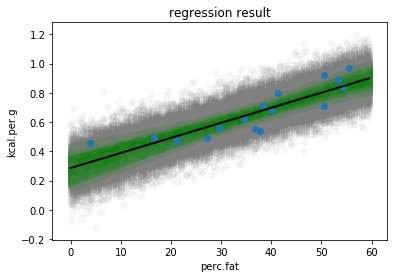

In [49]:
expr = 'kcal.per.g ~ perc.fat'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_sigma]

solution_regression_fat = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_fat, ['a_fat','b_fat','sigma_fat'])
posterior_plot_univariate_regression(solution_regression_fat, np.arange(0,60,0.5), data, names = ['perc.fat','kcal.per.g'])

      fun: -16.95233305327079
 hess_inv: array([[ 3.20196074e-03, -6.30327318e-05, -1.18141515e-05],
       [-6.30327318e-05,  1.33536507e-06,  2.93145741e-07],
       [-1.18141515e-05,  2.93145741e-07,  1.11065355e-04]])
      jac: array([ 5.10215759e-05,  4.48799133e-03, -1.89542770e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 522
      nit: 29
     njev: 102
   status: 2
  success: False
        x: array([ 1.22277836, -0.01185233,  0.06109681])
                mean        SD      7.5%     92.5%
a_lact      1.224754  0.054375  1.147803  1.305926
c_lact     -0.011875  0.001117 -0.013538 -0.010287
sigma_lact  0.061746  0.010168  0.047213  0.076330


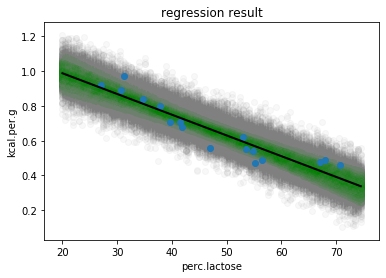

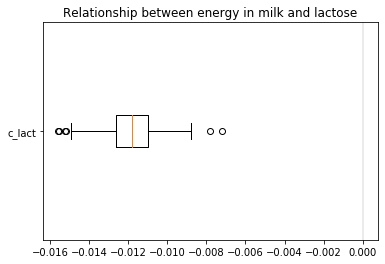

In [51]:
expr = 'kcal.per.g ~ perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_c_lact, prior_sigma]

solution_regression_lact = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression_lact, ['a_lact','c_lact','sigma_lact'])
posterior_plot_univariate_regression(solution_regression_lact, np.arange(20,75,0.5), data, names = ['perc.lactose','kcal.per.g'])

posterior_samples = post_sample_Laplace(solution_regression_lact, 1000)

boxes = []
boxes.append(posterior_samples[:,1])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose')
plt.show()

We see that in both cases, these two variables seem to be good predictors of the energy per gramm. 
It is interesting to notice that the posterior means for perc.fat and perc.lactose seem to be mirror images of one another. We see that b_fat = 0.01 while b_lact = -0.01. Moreover the 85% posterior interval for b_fat is [0.008, 0.012], while the one for b_lact is [-0.013, -0.010], both these intervals lying entirely on one side or the other of zero.

Given the strong association of the two variables with the outcome, we might conclude that both variables are reliable predictors of the total energy in milk across species. The more fat, the more kilocalories in milk, and the more lactose the fewer kilocalories in milk. This observation naturally leads to the following question:

**2) What happens if we regress kcal.per.g with respect to both perc.fat and perc.lactose ?**

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -16.233559429468578
 hess_inv: array([[ 5.58406580e-02, -6.30974215e-04, -6.91061369e-04,
        -3.12420649e-05],
       [-6.30974215e-04,  7.55758398e-06,  7.53571370e-06,
         2.28340989e-07],
       [-6.91061369e-04,  7.53571370e-06,  8.81942308e-06,
         4.55527146e-07],
       [-3.12420649e-05,  2.28340989e-07,  4.55527146e-07,
         1.10873152e-04]])
      jac: array([ 5.12599945e-05, -3.75628471e-03,  9.23633575e-03, -3.52859497e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 31
     njev: 82
   status: 2
  success: False
        x: array([ 1.0791092 ,  0.0017147 , -0.01013611,  0.06038502])
            mean        SD      7.5%     92.5%
a       1.093854  0.236430  0.754718  1.429663
b_fat   0.001600  0.002778 -0.002195  0.005634
c_lact -0.010353  0.002953 -0.014601 -0.005997
sigma   0.059961  0.010567  0.045141  0.076178


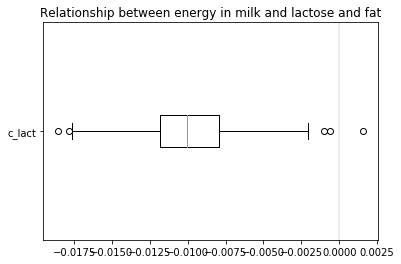

In [52]:
expr = 'kcal.per.g ~ perc.fat + perc.lactose'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_fat_mean = 0
prior_b_fat_sigma = 1
prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

prior_c_lact_mean = 0
prior_c_lact_sigma = 1
prior_c_lact = ['gaussian', [prior_c_lact_mean, prior_c_lact_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_fat, prior_c_lact, prior_sigma]

solution_regression = laplace_solution_regression(expr, data, likelihood, priors)
posterior_stats(solution_regression, ['a','b_fat', 'c_lact', 'sigma'])

posterior_samples = post_sample_Laplace(solution_regression, 1000)

boxes = []
boxes.append(posterior_samples[:,2])

plt.figure()
plt.boxplot(boxes,vert=0)
plt.yticks([1], ['c_lact'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Relationship between energy in milk and lactose and fat')
plt.show()

We observe that the posterior means for both b_fat and c_lact are closer to zero, and their standard deviation is twice as large as in their respective bivariate model. The effect is much bigger for b_fat whose posterior mean is essentially zero, with a value of b_fat which has decreased of an order of magnitude, and a posterior interval covering both negative and positive values ([-0.002, 0.005]). Concerning c_lact, the tendency of the posterior mean to be closer to zero can be seen through the comparison of the two box-plots above. We see that the uncertainty is twice bigger and the median value has been slightly shifted towards zero. However, the posterior interval doesn't cross zero and despite this effect, c_lact remains a predictor able to explain the data.

**3) Can you explain the differences observed between the results of questions 1 and 2 ?**

The main reason of what we observed earlier is that perc.fat and perc.lactose contain pretty much the same information. They are substitutes for one another.

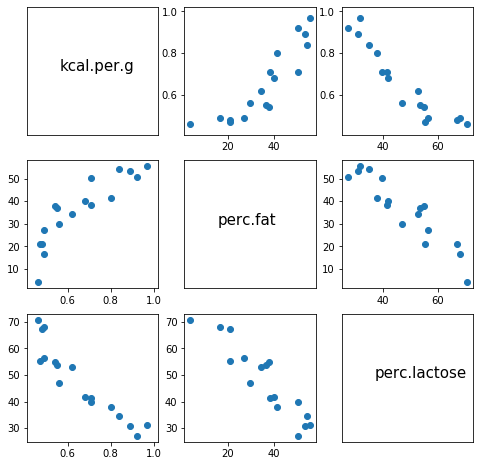

In [45]:
fields = ['kcal.per.g', 'perc.fat', 'perc.lactose']

plt.figure(figsize=(8,8))

for i, field in enumerate(fields):
    
    for j in range(len(fields)):
    
        plt.subplot(len(fields), len(fields), len(fields)*i + j + 1)
        
        if i==j:
            plt.text(0.25,0.5, field, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.scatter(data[fields[j]],data[field])

The plot above proposes to visualize how the different variables are related to each other. In each scatterplot off the diagonal, the vertical axis variable is the variable labeled on the same row and the horizontal axis is the variable labeled on the same column.

What is striking here is the strong correlation between perc.fat and perc.lactose. The points line up almost perfectly on a straight line. They are negatively correlated and so strongly that they are almost redundant.

In [47]:
from scipy.stats import pearsonr

pearsonr(data['perc.fat'], data['perc.lactose'])[0]


-0.9246954581668912

We find a correlation coefficient of -0.92 between the two variables, indicating an almost negative-linear relationship between them. So finally, when we feed the model with these two variables, we're giving him redundant information, and the posterior distribution ends up describing multiple combinations of b_fat and c_lact that are equally plausible to describe the data, thus increasing the standard deviation of these two variables as we saw before. 

The strong predictive power of perc.fat in question 1 was only due to its strong correlation with perc.lact. Indeed in question 2 when we model the data with both variables, the model tells us that it only needs the perc.lact to explain the data. The effect of perc.lact is removed from perc.fat and we see that what's remaining has no impact on the prediction.

**4) Study the effect of correlation between predictors**

To answer this question you will create a dummy variable whose correlation with perc.fat varies. Then you will fit many linear regressions (let's say 10) using these two variables and observe the effect on the mean standard deviation of b_fat.

[0.   0.11 0.22 0.33 0.44 0.55 0.66 0.77 0.88 0.99]


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404266
 hess_inv: array([[ 2.57385957e-03, -6.08358243e-05,  5.15684075e-06,
         1.80149577e-05],
       [-6.08358243e-05,  1.67649988e-06,  1.90816636e-08,
        -4.62078230e-07],
       [ 5.15684075e-06,  1.90816636e-08,  1.35355040e-06,
         4.16881699e-07],
       [ 1.80149577e-05, -4.62078230e-07,  4.16881699e-07,
         1.64326015e-04]])
      jac: array([2.86102295e-06, 1.13964081e-04, 4.41074371e-06, 4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 42
     njev: 110
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330743054
 hess_inv: array([[ 2.67935064e-03, -6.38241864e-05,  4.99547901e-06,
         4.67002696e-07],
       [-6.38241864e-05,  1.76736687e-06,  6.89198426e-09,
         4.49610647e-08],
       [ 4.99547901e-06,  6.89198426e-09,  1.39384830e-06,
         4.13558431e-08],
       [ 4.67002696e-07,  4.49610647e-08,  4.13558431e-08,
         1.79498467e-04]])
      jac: array([ 4.01735306e-05,  1.80613995e-03,  1.08754635e-03, -7.31945038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 30
     njev: 101
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307413954
 hess_inv: array([[ 2.41532468e-03, -5.70591100e-05,  5.19518634e-06,
         1.99433381e-05],
       [-5.70591100e-05,  1.58464718e-06, -1.95550938e-08,
        -6.47778771e-07],
       [ 5.19518634e-06, -1.95550938e-08,  1.30913195e-06,
         2.85052490e-07],
       [ 1.99433381e-05, -6.47778771e-07,  2.85052490e-07,
         1.69982785e-04]])
      jac: array([-1.35898590e-05, -3.20434570e-04,  1.27434731e-04,  3.21865082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 45
     njev: 113
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407186
 hess_inv: array([[ 2.65693168e-03, -6.34322390e-05,  5.18722148e-06,
         4.99355581e-06],
       [-6.34322390e-05,  1.78041963e-06,  4.60425484e-10,
         2.56648944e-07],
       [ 5.18722148e-06,  4.60425484e-10,  1.37677084e-06,
         2.19374251e-07],
       [ 4.99355581e-06,  2.56648944e-07,  2.19374251e-07,
         1.79536435e-04]])
      jac: array([ 4.05311584e-06,  2.06947327e-04, -7.62939453e-06,  3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 35
     njev: 92
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307405344
 hess_inv: array([[ 3.68035206e-04, -1.00963364e-05, -6.73888864e-06,
        -3.27621676e-04],
       [-1.00963364e-05,  5.29305004e-07,  2.84264304e-07,
         8.18483889e-06],
       [-6.73888864e-06,  2.84264304e-07,  1.45375379e-06,
         1.80914185e-06],
       [-3.2762167

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307409037
 hess_inv: array([[ 2.54750154e-03, -5.98122089e-05,  6.78654041e-06,
        -2.54694154e-06],
       [-5.98122089e-05,  1.63004266e-06, -7.85924759e-08,
         6.17431142e-08],
       [ 6.78654041e-06, -7.85924759e-08,  1.26242765e-06,
        -5.04708454e-08],
       [-2.54694154e-06,  6.17431142e-08, -5.04708454e-08,
         1.79860748e-04]])
      jac: array([ 3.19480896e-05,  1.33132935e-03, -6.78420067e-04,  6.31809235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033074042
 hess_inv: array([[ 2.41958468e-03, -5.52088384e-05,  2.88207498e-06,
        -1.67894603e-05],
       [-5.52088384e-05,  1.45626101e-06,  9.22418183e-08,
         4.88489015e-07],
       [ 2.88207498e-06,  9.22418183e-08,  1.29752019e-06,
        -3.85377989e-07],
       [-1.67894603e-05,  4.88489015e-07, -3.85377989e-07,
         1.78171147e-04]])
      jac: array([-2.38418579e-07, -3.09944153e-06,  2.74181366e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 47
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307447975
 hess_inv: array([[ 2.82735109e-03, -6.75063219e-05,  2.80904077e-06,
         3.12870547e-05],
       [-6.75063219e-05,  1.87324091e-06,  5.22841081e-08,
        -8.41472435e-07],
       [ 2.80904077e-06,  5.22841081e-08,  1.50019268e-06,
        -1.08924769e-06],
       [ 3.12870547e-05, -8.41472435e-07, -1.08924769e-06,
         1.95619613e-04]])
      jac: array([-9.56058502e-05, -2.36511230e-03,  1.84893608e-03, -4.45842743e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 33
     njev: 119
   status: 2
  success: False
        x: array([0.28595108, 0.01037746, 0.00066485, 0.07823317])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307670808
 hess_inv: array([[ 2.36591998e-03, -5.42636012e-05,  9.89565579e-07,
        -1.89208937e-05],
       [-5.42636012e-05,  1.45345429e-06,  1.20667472e-07,
         4.41252739e-07],
       [ 9.89565579e-07,  1.20667472e-07,  1.30496086e-06,
         1.71288135e-07],
       [-1.89208937e-05,  4.41252739e-07,  1.71288135e-07,
         1.70939811e-04]])
      jac: array([-0.00058806, -0.01242912,  0.01390529,  0.00093126])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 33
     njev: 94
   status: 2
  success: False
        x: array([0.28595046, 0.01037747, 0.00066486, 0.07823342])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307412444
 hess_inv: array([[ 2.67848450e-03, -6.36372073e-05,  5.58434724e-06,
         8.64858234e-06],
       [-6.36372073e-05,  1.76689089e-06,  5.11205713e-09,
        -3.21706381e-07],
       [ 5.58434724e-06,  5.11205713e-09,  1.45160004e-06,
         7.61087709e-08],
       [ 8.64858234e-06, -3.21706381e-07,  7.61087709e-08,
         1.78457334e-04]])
      jac: array([ 3.33786011e-06,  2.79188156e-04,  1.19209290e-06, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407941
 hess_inv: array([[ 2.55758048e-03, -6.06489251e-05,  4.61550479e-06,
        -2.00808950e-05],
       [-6.06489251e-05,  1.67753542e-06,  2.15756470e-08,
         4.78982197e-07],
       [ 4.61550479e-06,  2.15756470e-08,  1.26257011e-06,
         1.80516596e-07],
       [-2.00808950e-05,  4.78982197e-07,  1.80516596e-07,
         1.75820348e-04]])
      jac: array([ 6.43730164e-06,  3.20672989e-04,  3.69548798e-06, -3.48091125e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 43
     njev: 101
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307515032
 hess_inv: array([[ 2.58443732e-03, -6.01334950e-05,  3.58982689e-06,
         1.98624511e-05],
       [-6.01334950e-05,  1.66227677e-06,  3.44887629e-08,
        -8.46534631e-08],
       [ 3.58982689e-06,  3.44887629e-08,  1.40059637e-06,
        -2.63499751e-07],
       [ 1.98624511e-05, -8.46534631e-08, -2.63499751e-07,
         1.84910487e-04]])
      jac: array([1.32441521e-04, 6.65223598e-03, 8.97145271e-03, 9.51290131e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066486, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404504
 hess_inv: array([[ 2.58344966e-03, -6.11940676e-05,  3.16838380e-06,
         3.95840490e-05],
       [-6.11940676e-05,  1.68637244e-06,  4.50630486e-08,
        -9.58664161e-07],
       [ 3.16838380e-06,  4.50630486e-08,  1.30933864e-06,
        -6.09169829e-08],
       [ 3.95840490e-05, -9.58664161e-07, -6.09169829e-08,
         1.63753508e-04]])
      jac: array([-7.15255737e-07, -2.62260437e-06,  1.19209290e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 42
     njev: 62
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406238
 hess_inv: array([[ 2.54251426e-03, -6.09228714e-05,  1.26316234e-06,
         4.11891504e-06],
       [-6.09228714e-05,  1.69189110e-06,  4.69523476e-08,
        -3.38360322e-07],
       [ 1.26316234e-06,  4.69523476e-08,  1.14006822e-06,
         1.82044034e-07],
       [ 4.11891504e-06, -3.38360322e-07,  1.82044034e-07,
         1.69827370e-04]])
      jac: array([ 5.00679016e-06,  3.42011452e-04, -6.43253326e-04, -5.19752502e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823324])
      fun: -11.832803307412897
 hess_inv: array([[ 2.28603938e-03, -5.32187223e-05,  3.64544140e-06,
         1.29594636e-05],
       [-5.32187223e-05,  1.48209153e-06,  4.29526030e-08,
        -3.91545622e-07],
       [ 3.64544140e-06,  4.29526030e-08,  1.39568333e-06,
        -9.79005089e-09],
       [ 1.295946

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404617
 hess_inv: array([[ 1.21527758e-04, -5.65839226e-06,  1.83510438e-05,
         2.61288352e-04],
       [-5.65839226e-06,  5.10892561e-07, -9.15039547e-07,
        -1.15884218e-05],
       [ 1.83510438e-05, -9.15039547e-07,  6.42124669e-06,
         4.68755316e-05],
       [ 2.61288352e-04, -1.15884218e-05,  4.68755316e-05,
         5.82368212e-04]])
      jac: array([-4.76837158e-07, -2.71797180e-05,  2.74181366e-05,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 457
      nit: 43
     njev: 74
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307404482
 hess_inv: array([[ 3.85636340e-04, -6.08320140e-06, -4.45615395e-06,
        -2.74421836e-04],
       [-6.08320140e-06,  4.63576681e-07, -2.28221067e-08,
         3.75503802e-06],
       [-4.45615395e-06, -2.28221067e-08,  1.46674088e-06,
         2.27660360e-06],
       [-2.7442183

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742554
 hess_inv: array([[ 2.71673099e-03, -6.48909231e-05,  3.79360739e-06,
         3.16500548e-06],
       [-6.48909231e-05,  1.80317941e-06,  4.69637014e-08,
        -8.89944010e-08],
       [ 3.79360739e-06,  4.69637014e-08,  1.39916686e-06,
         1.48829047e-07],
       [ 3.16500548e-06, -8.89944010e-08,  1.48829047e-07,
         1.78789367e-04]])
      jac: array([ 7.62939453e-06,  7.53879547e-04, -5.01394272e-04,  7.48634338e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 24
     njev: 104
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066484, 0.07823326])
      fun: -11.832803307406323
 hess_inv: array([[ 2.65704292e-03, -6.35880707e-05,  6.58394174e-06,
        -3.40094472e-07],
       [-6.35880707e-05,  1.77163001e-06, -2.27238146e-08,
         4.75543543e-08],
       [ 6.58394174e-06, -2.27238146e-08,  1.37572315e-06,
        -2.95544183e-07],
       [-3.4009447

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405726
 hess_inv: array([[ 2.64372926e-03, -6.29122990e-05,  4.12851340e-06,
        -9.12912663e-06],
       [-6.29122990e-05,  1.74497638e-06,  3.00735955e-08,
         1.08018930e-07],
       [ 4.12851340e-06,  3.00735955e-08,  1.37265641e-06,
        -2.58492428e-07],
       [-9.12912663e-06,  1.08018930e-07, -2.58492428e-07,
         1.74000003e-04]])
      jac: array([-1.26361847e-05, -3.67879868e-04, -2.17318535e-04, -1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 609
      nit: 38
     njev: 99
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307427138
 hess_inv: array([[ 2.70242535e-03, -6.40139088e-05,  6.99909829e-06,
        -3.23448599e-07],
       [-6.40139088e-05,  1.76917670e-06, -2.57983615e-08,
        -7.54012271e-08],
       [ 6.99909829e-06, -2.57983615e-08,  1.51083508e-06,
        -6.22524297e-08],
       [-3.23448599e-07, -7.54012271e-08, -6.22524297e-08,
         1.83442967e-04]])
      jac: array([ 2.14576721e-05,  1.25670433e-03, -3.04937363e-04, -5.88893890e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 803
      nit: 24
     njev: 129
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403314
 hess_inv: array([[ 2.63391297e-03, -6.31229531e-05,  5.46835625e-06,
         5.94689825e-06],
       [-6.31229531e-05,  1.75911000e-06,  3.90148981e-09,
        -4.56011734e-08],
       [ 5.46835625e-06,  3.90148981e-09,  1.39565550e-06,
        -1.27936547e-07],
       [ 5.94689825e-06, -4.56011734e-08, -1.27936547e-07,
         1.76838158e-04]])
      jac: array([0.00000000e+00, 2.38418579e-07, 2.38418579e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 371
      nit: 33
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404586
 hess_inv: array([[ 1.58337159e-06, -2.67620627e-07,  1.28850977e-06,
        -8.60295190e-07],
       [-2.67620627e-07,  2.65034177e-07, -2.01892463e-09,
         2.93228835e-07],
       [ 1.28850977e-06, -2.01892463e-09,  1.28662182e-06,
        -5.67997678e-07],
       [-8.60295190e-07,  2.93228835e-07, -5.67997678e-07,
         1.77638906e-04]])
      jac: array([-7.15255737e-07, -1.78813934e-05,  9.29832458e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 43
     njev: 73
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403537
 hess_inv: array([[ 2.52516716e-03, -5.97757173e-05,  2.17945390e-06,
         1.17964835e-05],
       [-5.97757173e-05,  1.66901402e-06,  6.27456869e-08,
        -3.38511308e-07],
       [ 2.17945390e-06,  6.27456869e-08,  1.35758729e-06,
         2.19652727e-07],
       [ 1.17964835e-05, -3.38511308e-07,  2.19652727e-07,
         1.79684792e-04]])
      jac: array([ 1.19209290e-07, -3.57627869e-07,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 39
     njev: 53
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307539336
 hess_inv: array([[ 2.50127664e-03, -5.90017620e-05,  9.38057629e-06,
        -1.16541721e-05],
       [-5.90017620e-05,  1.63195053e-06, -8.92533932e-08,
         1.73421931e-07],
       [ 9.38057629e-06, -8.92533932e-08,  1.21530121e-06,
        -3.22756397e-07],
       [-1.16541721e-05,  1.73421931e-07, -3.22756397e-07,
         1.57284724e-04]])
      jac: array([-0.00026917, -0.00430214, -0.00531244, -0.0005753 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([0.2859507 , 0.01037747, 0.00066484, 0.07823315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307440098
 hess_inv: array([[ 2.36976627e-03, -5.74871018e-05,  1.23307923e-06,
        -2.71573288e-05],
       [-5.74871018e-05,  1.62716964e-06,  5.86585603e-08,
         7.84634751e-07],
       [ 1.23307923e-06,  5.86585603e-08,  1.29679343e-06,
         1.89404662e-07],
       [-2.71573288e-05,  7.84634751e-07,  1.89404662e-07,
         1.51627644e-04]])
      jac: array([-0.00014544, -0.00458193,  0.0038197 , -0.00035071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 42
     njev: 96
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307404792
 hess_inv: array([[ 2.09958220e-03, -4.82058668e-05,  5.57531895e-06,
         5.33123947e-06],
       [-4.82058668e-05,  1.34306076e-06, -1.27173474e-08,
         4.51196444e-08],
       [ 5.57531895e-06, -1.27173474e-08,  1.33997236e-06,
        -1.72736277e-07],
       [ 5.33123947e-06,  4.51196444e-08, -1.72736277e-07,
         1.73396798e-04]])
      jac: array([2.44379044e-05, 8.83221626e-04, 3.71932983e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 931
      nit: 28
     njev: 149
   status: 2
  success: False
        x: array([0.28595118, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.83280330756873
 hess_inv: array([[ 2.65863582e-03, -6.30235789e-05,  4.79046898e-06,
        -3.95699497e-06],
       [-6.30235789e-05,  1.74854037e-06,  2.25585762e-08,
         2.25699876e-07],
       [ 4.79046898e-06,  2.25585762e-08,  1.40461448e-06,
        -5.38065358e-08],
       [-3.95699497e-06,  2.25699876e-07, -5.38065358e-08,
         1.80663021e-04]])
      jac: array([-0.00018144, -0.00294626,  0.00075638,  0.00038791])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 32
     njev: 90
   status: 2
  success: False
        x: array([0.28595088, 0.01037746, 0.00066485, 0.07823332])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307409627
 hess_inv: array([[ 2.60699079e-03, -6.14122307e-05,  6.66619924e-06,
        -6.02676266e-06],
       [-6.14122307e-05,  1.69023004e-06, -3.96351458e-08,
         2.97728672e-07],
       [ 6.66619924e-06, -3.96351458e-08,  1.29673443e-06,
         4.85318846e-07],
       [-6.02676266e-06,  2.97728672e-07,  4.85318846e-07,
         1.66145549e-04]])
      jac: array([ 9.05990601e-06,  3.92436981e-04,  2.36272812e-04, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 35
     njev: 82
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740337
 hess_inv: array([[ 2.08744941e-03, -5.03478929e-05,  4.08831262e-06,
        -1.01896305e-05],
       [-5.03478929e-05,  1.43954521e-06,  2.81758648e-08,
        -1.92016512e-07],
       [ 4.08831262e-06,  2.81758648e-08,  1.40678777e-06,
        -8.44034946e-07],
       [-1.01896305e-05, -1.92016512e-07, -8.44034946e-07,
         1.74035958e-04]])
      jac: array([ 3.57627869e-07,  4.76837158e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 303
      nit: 35
     njev: 50
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307818931
 hess_inv: array([[ 2.03901164e-03, -4.56962118e-05,  4.27901254e-06,
         1.53508982e-04],
       [-4.56962118e-05,  1.23355659e-06,  1.42481758e-08,
        -4.68180162e-06],
       [ 4.27901254e-06,  1.42481758e-08,  1.30320863e-06,
         4.33228733e-07],
       [ 1.53508982e-04, -4.68180162e-06,  4

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403768
 hess_inv: array([[ 2.64807847e-03, -6.33510442e-05,  1.57589291e-06,
         2.70074775e-05],
       [-6.33510442e-05,  1.74758593e-06,  8.62788873e-08,
        -5.46126030e-07],
       [ 1.57589291e-06,  8.62788873e-08,  1.32799589e-06,
        -2.09480042e-07],
       [ 2.70074775e-05, -5.46126030e-07, -2.09480042e-07,
         1.78142771e-04]])
      jac: array([ 1.19209290e-07,  5.84125519e-06, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 48
     njev: 69
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404268
 hess_inv: array([[ 2.71071108e-03, -6.53594629e-05,  2.98023373e-06,
         7.10447636e-06],
       [-6.53594629e-05,  1.81545732e-06,  3.18375284e-08,
        -7.96711314e-08],
       [ 2.98023373e-06,  3.18375284e-08,  1.39563801e-06,
         5.73233475e-07],
       [ 7.10447636e-06, -7.96711314e-08,  5.73233475e-07,
         1.75009681e-04]])
      jac: array([ 0.00000000e+00,  8.46385956e-06,  2.50339508e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307416835
 hess_inv: array([[ 2.38188089e-03, -5.25245490e-05,  7.94671533e-06,
        -5.88942703e-06],
       [-5.25245490e-05,  1.33854290e-06, -9.23431973e-08,
         2.05997989e-07],
       [ 7.94671533e-06, -9.23431973e-08,  1.30036957e-06,
        -6.29690956e-07],
       [-5.88942703e-06,  2.05997989e-07, -6.29690956e-07,
         1.64885818e-04]])
      jac: array([ 4.62532043e-05,  1.88708305e-03,  4.30345535e-05, -2.62260437e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([0.28595118, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740363
 hess_inv: array([[ 2.16128957e-03, -5.15914324e-05,  4.75215187e-06,
         1.90335169e-05],
       [-5.15914324e-05,  1.46874266e-06,  1.84409118e-08,
        -4.00161571e-07],
       [ 4.75215187e-06,  1.84409118e-08,  1.35466529e-06,
         4.11053243e-07],
       [ 1.90335169e-05, -4.00161571e-07,  4.11053243e-07,
         1.91162044e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-06,  7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 38
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406984
 hess_inv: array([[ 2.35658858e-03, -5.60611265e-05,  4.80346733e-06,
         1.19335636e-05],
       [-5.60611265e-05,  1.56712827e-06, -4.23441038e-09,
        -3.91575079e-07],
       [ 4.80346733e-06, -4.23441038e-09,  1.37104154e-06,
         6.27094220e-08],
       [ 1.19335636e-05, -3.91575079e-07,  6.27094220e-08,
         1.73671554e-04]])
      jac: array([-1.66893005e-06, -1.04904175e-05,  8.01086426e-05,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307406216
 hess_inv: array([[ 2.62191665e-03, -6.24383928e-05,  3.72601362e-06,
         7.30695355e-06],
       [-6.24383928e-05,  1.74286578e-06,  3.98604376e-08,
        -1.48302055e-07],
       [ 3.72601362e-06,  3.98604376e-08,  1.37449805e-06,
        -3.96083143e-08],
       [ 7.306953

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803308121282
 hess_inv: array([[ 2.42549122e-03, -6.02096806e-05, -3.13005405e-06,
         1.44837566e-05],
       [-6.02096806e-05,  1.70893292e-06,  1.27982107e-07,
        -3.67570983e-07],
       [-3.13005405e-06,  1.27982107e-07,  1.11702741e-06,
         8.32619683e-07],
       [ 1.44837566e-05, -3.67570983e-07,  8.32619683e-07,
         1.39438673e-04]])
      jac: array([-0.00038028,  0.01047301,  0.0162394 , -0.00016451])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 44
     njev: 90
   status: 2
  success: False
        x: array([0.28594957, 0.0103775 , 0.00066487, 0.07823322])
      fun: -11.832803307415315
 hess_inv: array([[ 2.40401045e-03, -5.80358417e-05,  1.48989099e-06,
        -1.61408048e-05],
       [-5.80358417e-05,  1.60904824e-06, -2.72031972e-08,
         5.11952456e-07],
       [ 1.48989099e-06, -2.72031972e-08,  8.84055882e-07,
         5.06501995e-07],
       [-1.61408048e-05,  5.119524

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408351
 hess_inv: array([[ 1.86556464e-03, -4.88283425e-05,  1.19113939e-05,
         1.56370343e-05],
       [-4.88283425e-05,  1.47815333e-06, -1.06244125e-07,
        -1.28209318e-07],
       [ 1.19113939e-05, -1.06244125e-07,  1.26103589e-06,
         1.09176438e-07],
       [ 1.56370343e-05, -1.28209318e-07,  1.09176438e-07,
         1.76703733e-04]])
      jac: array([-3.09944153e-06, -1.90734863e-06, -1.16467476e-04, -1.07288361e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 32
     njev: 117
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740385
 hess_inv: array([[ 9.07701497e-04, -4.27430299e-05, -1.12147681e-04,
         9.28825746e-04],
       [-4.27430299e-05,  2.38987566e-06,  6.04217989e-06,
        -4.39403542e-05],
       [-1.12147681e-04,  6.04217989e-06,  1.84957808e-05,
        -1.15213140e-04],
       [ 9.28825746e-04, -4.39403542e-05, -1.15213140e-04,
         9.51122060e-04]])
      jac: array([ 0.00000000e+00,  9.17911530e-06,  1.57356262e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 398
      nit: 38
     njev: 65
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.83280330741682
 hess_inv: array([[ 2.21290993e-03, -5.45102071e-05,  2.72315603e-06,
         5.53357397e-05],
       [-5.45102071e-05,  1.56574218e-06,  3.66267934e-08,
        -8.32945070e-07],
       [ 2.72315603e-06,  3.66267934e-08,  1.31644560e-06,
         1.54278733e-07],
       [ 5.53357397e-05, -8.32945070e-07,  1.54278733e-07,
         1.67132480e-04]])
      jac: array([-5.87701797e-05, -1.90007687e-03,  4.90307808e-04,  9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 41
     njev: 124
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330749361
 hess_inv: array([[ 2.67149335e-03, -6.36922854e-05,  4.68860698e-06,
        -2.63208263e-06],
       [-6.36922854e-05,  1.78033563e-06,  3.74817475e-08,
         1.50029661e-07],
       [ 4.68860698e-06,  3.74817475e-08,  1.43119727e-06,
         1.80186663e-07],
       [-2.63208263e-06,  1.50029661e-07,  1.80186663e-07,
         1.79479689e-04]])
      jac: array([ 8.49962234e-05,  4.51791286e-03,  1.75833702e-03, -1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 33
     njev: 89
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740322
 hess_inv: array([[ 2.74003204e-03, -6.54076699e-05,  4.91875484e-06,
        -5.36881573e-06],
       [-6.54076699e-05,  1.80954693e-06,  8.53212331e-09,
         1.55250409e-07],
       [ 4.91875484e-06,  8.53212331e-09,  1.38040757e-06,
        -3.48261533e-09],
       [-5.36881573e-06,  1.55250409e-07, -3.48261533e-09,
         1.79554493e-04]])
      jac: array([-1.19209290e-07, -1.13248825e-05, -3.57627869e-07,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 35
     njev: 95
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033074046
 hess_inv: array([[ 2.63611381e-03, -6.35755895e-05,  4.80862984e-06,
         6.82911845e-06],
       [-6.35755895e-05,  1.78848733e-06,  1.46716582e-08,
        -2.97740554e-07],
       [ 4.80862984e-06,  1.46716582e-08,  1.39575128e-06,
        -8.42373086e-09],
       [ 6.82911845e-06, -2.97740554e-07, -8.42373086e-09,
         1.78048046e-04]])
      jac: array([-7.15255737e-07, -4.76837158e-06,  1.31130219e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 34
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330740453
 hess_inv: array([[ 2.63678570e-03, -6.48083575e-05,  7.03065016e-06,
         1.08603023e-05],
       [-6.48083575e-05,  1.83248057e-06, -3.47668810e-08,
        -3.59630445e-07],
       [ 7.03065016e-06, -3.47668810e-08,  1.30694205e-06,
        -2.87373329e-07],
       [ 1.08603023e-05, -3.59630445e-07, -2.8

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330761191
 hess_inv: array([[ 2.75022293e-03, -6.58391500e-05,  5.84378864e-06,
        -1.11299945e-05],
       [-6.58391500e-05,  1.84230745e-06, -3.70398748e-09,
         4.90203685e-07],
       [ 5.84378864e-06, -3.70398748e-09,  1.40897662e-06,
         1.50997397e-07],
       [-1.11299945e-05,  4.90203685e-07,  1.50997397e-07,
         1.80685634e-04]])
      jac: array([ 0.00038648,  0.01858962, -0.0012182 ,  0.00012565])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 822
      nit: 31
     njev: 134
   status: 2
  success: False
        x: array([0.28595102, 0.01037747, 0.00066485, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307453057
 hess_inv: array([[ 2.16313192e-03, -5.18272925e-05,  3.55434294e-06,
        -6.73234650e-05],
       [-5.18272925e-05,  1.43955820e-06,  5.39942868e-08,
         1.78274332e-06],
       [ 3.55434294e-06,  5.39942868e-08,  1.33568230e-06,
        -2.47603552e-07],
       [-6.73234650e-05,  1.78274332e-06, -2.47603552e-07,
         1.70265786e-04]])
      jac: array([-0.00011146, -0.00327957,  0.00318873,  0.00027466])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 39
     njev: 133
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066485, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307474396
 hess_inv: array([[ 2.33462197e-03, -5.74027939e-05,  1.83479496e-06,
        -1.42517002e-05],
       [-5.74027939e-05,  1.63985101e-06,  5.64330081e-08,
         3.30979599e-07],
       [ 1.83479496e-06,  5.64330081e-08,  7.37375094e-07,
         2.69349688e-07],
       [-1.42517002e-05,  3.30979599e-07,  2.69349688e-07,
         1.78846156e-04]])
      jac: array([-0.00021815, -0.00631714,  0.00148702,  0.0003016 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([0.285951  , 0.01037746, 0.00066485, 0.0782333 ])
      fun: -11.832803307403848
 hess_inv: array([[ 2.55918881e-03, -5.99988463e-05,  6.02452554e-06,
        -2.93160454e-05],
       [-5.99988463e-05,  1.63037523e-06, -7.67379151e-08,
         8.51395519e-07],
       [ 6.02452554e-06, -7.67379151e-08,  1.18804499e-06,
         6.95884936e-07],
       [-2.93160454e-05,  8.51395

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307440582
 hess_inv: array([[ 2.74668256e-03, -6.48418421e-05,  7.57371684e-06,
         3.63147546e-06],
       [-6.48418421e-05,  1.78312284e-06, -5.56019766e-08,
        -4.32755557e-07],
       [ 7.57371684e-06, -5.56019766e-08,  1.37327261e-06,
        -9.43604087e-07],
       [ 3.63147546e-06, -4.32755557e-07, -9.43604087e-07,
         1.82802809e-04]])
      jac: array([-0.00034475, -0.011271  ,  0.00133848,  0.00013232])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 25
     njev: 108
   status: 2
  success: False
        x: array([0.28595097, 0.01037746, 0.00066485, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307423301
 hess_inv: array([[ 2.73264125e-03, -6.51801014e-05,  5.14496623e-06,
        -2.28001230e-05],
       [-6.51801014e-05,  1.80923725e-06,  4.73770835e-09,
         6.03514661e-07],
       [ 5.14496623e-06,  4.73770835e-09,  1.41285005e-06,
        -3.65402686e-08],
       [-2.28001230e-05,  6.03514661e-07, -3.65402686e-08,
         1.90670965e-04]])
      jac: array([-2.95639038e-05, -6.42895699e-04, -1.40190125e-04, -6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 28
     njev: 94
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307425838
 hess_inv: array([[ 2.10606827e-03, -4.79746320e-05,  8.68418467e-06,
        -7.23443084e-07],
       [-4.79746320e-05,  1.30554773e-06, -1.28370949e-07,
        -2.75713201e-07],
       [ 8.68418467e-06, -1.28370949e-07,  1.28148759e-06,
        -8.18719849e-07],
       [-7.23443084e-07, -2.75713201e-07, -8.18719849e-07,
         1.72502107e-04]])
      jac: array([-8.32080841e-05, -2.44688988e-03,  4.14252281e-04, -2.30073929e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 43
     njev: 116
   status: 2
  success: False
        x: array([0.28595111, 0.01037746, 0.00066485, 0.07823321])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307439626
 hess_inv: array([[ 2.86874781e-03, -6.75661213e-05,  3.68747853e-06,
         2.29572576e-06],
       [-6.75661213e-05,  1.88724254e-06,  3.96208339e-08,
        -8.64977859e-08],
       [ 3.68747853e-06,  3.96208339e-08,  1.46204946e-06,
         5.02460512e-08],
       [ 2.29572576e-06, -8.64977859e-08,  5.02460512e-08,
         1.80203324e-04]])
      jac: array([-2.08616257e-05, -6.87837601e-05,  2.83718109e-05,  3.88622284e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 750
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066485, 0.07823326])
      fun: -11.832803307405424
 hess_inv: array([[ 4.37296829e-04, -1.93575641e-05, -1.41880098e-06,
        -3.41367553e-04],
       [-1.93575641e-05,  1.31059543e-06,  2.63518185e-07,
         1.46225822e-05],
       [-1.41880098e-06,  2.63518185e-07,  1.30105485e-06,
         1.09079908e-06],
       [-3.413675

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307428247
 hess_inv: array([[ 2.03367756e-03, -4.91216742e-05,  1.17545964e-05,
        -2.41155860e-05],
       [-4.91216742e-05,  1.35480245e-06, -2.42247877e-07,
         6.71560247e-07],
       [ 1.17545964e-05, -2.42247877e-07,  1.16876700e-06,
        -4.48706114e-08],
       [-2.41155860e-05,  6.71560247e-07, -4.48706114e-08,
         1.73643987e-04]])
      jac: array([-6.84261322e-05, -1.82914734e-03, -1.97172165e-04,  2.61068344e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066484, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404355
 hess_inv: array([[ 2.68581847e-03, -6.38339159e-05,  5.21853372e-06,
         1.67975796e-06],
       [-6.38339159e-05,  1.76824122e-06,  3.31972435e-09,
        -1.16969762e-07],
       [ 5.21853372e-06,  3.31972435e-09,  1.40434121e-06,
        -1.03323324e-07],
       [ 1.67975796e-06, -1.16969762e-07, -1.03323324e-07,
         1.83699291e-04]])
      jac: array([ 0.00000000e+00,  4.29153442e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 40
     njev: 64
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307565797
 hess_inv: array([[ 2.43171117e-03, -5.77836857e-05,  6.14495647e-06,
        -2.70232558e-05],
       [-5.77836857e-05,  1.62040698e-06, -4.36397926e-08,
         6.89034703e-07],
       [ 6.14495647e-06, -4.36397926e-08,  1.20399892e-06,
        -2.43308734e-07],
       [-2.70232558e-05,  6.89034703e-07, -2.43308734e-07,
         1.67733519e-04]])
      jac: array([ 6.49929047e-04,  2.84585953e-02, -4.08482552e-03,  6.77108765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 36
     njev: 129
   status: 2
  success: False
        x: array([0.28595108, 0.01037747, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740489
 hess_inv: array([[ 2.02941984e-03, -5.42565739e-05, -2.23772320e-06,
        -5.16613698e-05],
       [-5.42565739e-05,  1.94629820e-06,  4.25649177e-07,
         3.88586917e-06],
       [-2.23772320e-06,  4.25649177e-07,  1.52998786e-06,
         2.76139289e-06],
       [-5.16613698e-05,  3.88586917e-06,  2.76139289e-06,
         2.02942198e-04]])
      jac: array([5.96046448e-07, 3.37362289e-05, 2.98023224e-06, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 854
      nit: 40
     njev: 140
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403257
 hess_inv: array([[ 2.56476068e-03, -6.02929107e-05,  6.03468056e-06,
        -1.97632372e-05],
       [-6.02929107e-05,  1.67238244e-06, -4.35010763e-09,
         5.38185663e-07],
       [ 6.03468056e-06, -4.35010763e-09,  1.42064064e-06,
         7.36168754e-08],
       [-1.97632372e-05,  5.38185663e-07,  7.36168754e-08,
         1.77925402e-04]])
      jac: array([ 2.38418579e-07, -5.96046448e-06, -5.96046448e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 37
     njev: 56
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407866
 hess_inv: array([[ 2.89196552e-03, -6.74721920e-05,  6.78639102e-06,
         4.53601908e-06],
       [-6.74721920e-05,  1.83365034e-06, -2.06334183e-08,
        -1.34226622e-07],
       [ 6.78639102e-06, -2.06334183e-08,  1.41067588e-06,
        -2.03110709e-07],
       [ 4.53601908e-06, -1.34226622e-07, -2.03110709e-07,
         1.86795554e-04]])
      jac: array([ 1.19209290e-05,  5.23924828e-04, -1.33395195e-04,  2.74181366e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 37
     njev: 83
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])
      fun: -11.832803307810892
 hess_inv: array([[ 2.59924233e-03, -5.99104607e-05,  6.10262672e-06,
         9.21507018e-06],
       [-5.99104607e-05,  1.57754657e-06, -4.91746006e-08,
        -2.35544729e-07],
       [ 6.10262672e-06, -4.91746006e-08,  1.29340297e-06,
        -6.25980953e-07],
       [ 9.2150701

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033074294
 hess_inv: array([[ 2.68909485e-03, -6.42541007e-05,  5.07951221e-06,
        -5.38496829e-07],
       [-6.42541007e-05,  1.79288178e-06,  7.12846574e-09,
         2.07336540e-08],
       [ 5.07951221e-06,  7.12846574e-09,  1.45954638e-06,
         9.14653886e-09],
       [-5.38496829e-07,  2.07336540e-08,  9.14653886e-09,
         1.80338895e-04]])
      jac: array([-1.53779984e-05, -7.73668289e-05,  6.66379929e-05, -1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 38
     njev: 81
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307413212
 hess_inv: array([[ 2.53006944e-03, -5.96476707e-05,  5.34843796e-06,
         2.09017404e-05],
       [-5.96476707e-05,  1.65339589e-06, -6.85006417e-09,
        -4.19987863e-07],
       [ 5.34843796e-06, -6.85006417e-09,  1.25333184e-06,
        -4.92736905e-07],
       [ 2.09017404e-05, -4.19987863e-07, -4.92736905e-07,
         1.63051368e-04]])
      jac: array([1.71661377e-05, 7.68661499e-04, 7.31945038e-05, 4.05311584e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 40
     njev: 88
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307727822
 hess_inv: array([[ 2.31894979e-03, -5.39438061e-05,  1.79216872e-06,
        -8.09718457e-06],
       [-5.39438061e-05,  1.49111378e-06,  1.14556691e-07,
         3.16353823e-07],
       [ 1.79216872e-06,  1.14556691e-07,  1.28108699e-06,
         6.56655336e-07],
       [-8.09718457e-06,  3.16353823e-07,  6.56655336e-07,
         1.64729680e-04]])
      jac: array([ 1.35898590e-05,  7.35735893e-03,  1.18942261e-02, -1.09195709e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 40
     njev: 118
   status: 2
  success: False
        x: array([0.2859508 , 0.01037747, 0.00066486, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307452318
 hess_inv: array([[ 2.39317853e-03, -5.64126815e-05, -1.22551871e-06,
         2.33580211e-05],
       [-5.64126815e-05,  1.56334178e-06,  1.77257241e-07,
        -4.50827023e-07],
       [-1.22551871e-06,  1.77257241e-07,  1.03587488e-06,
         2.56505401e-06],
       [ 2.33580211e-05, -4.50827023e-07,  2.56505401e-06,
         1.56218434e-04]])
      jac: array([-1.56164169e-05,  9.79781151e-04, -2.85065174e-03, -1.27792358e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([0.28595105, 0.01037746, 0.00066484, 0.07823323])
      fun: -11.832803307471867
 hess_inv: array([[ 2.79785932e-03, -6.50711167e-05,  6.26665383e-06,
        -1.89613325e-05],
       [-6.50711167e-05,  1.80388033e-06, -5.39813591e-09,
         3.44739731e-08],
       [ 6.26665383e-06, -5.39813591e-09,  1.41695380e-06,
        -4.92585302e-07],
       [-1.896133

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403918
 hess_inv: array([[ 2.54781014e-03, -5.97865156e-05,  6.90400232e-06,
        -4.67121206e-06],
       [-5.97865156e-05,  1.64050669e-06, -4.20478657e-08,
        -3.08144539e-07],
       [ 6.90400232e-06, -4.20478657e-08,  1.30823078e-06,
        -2.68596893e-07],
       [-4.67121206e-06, -3.08144539e-07, -2.68596893e-07,
         1.59611147e-04]])
      jac: array([1.43051147e-06, 5.57899475e-05, 1.59740448e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740366
 hess_inv: array([[ 2.75102654e-03, -6.52593170e-05,  6.56514051e-06,
         2.04728656e-06],
       [-6.52593170e-05,  1.79813236e-06, -3.26710122e-08,
        -5.17362151e-08],
       [ 6.56514051e-06, -3.26710122e-08,  1.36274279e-06,
         4.40010192e-07],
       [ 2.04728656e-06, -5.17362151e-08,  4.40010192e-07,
         1.76894735e-04]])
      jac: array([ 0.00000000e+00,  2.38418579e-07,  3.57627869e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 33
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307404443
 hess_inv: array([[ 1.56973097e-03, -4.84387663e-05,  2.05900401e-05,
        -7.94759570e-04],
       [-4.84387663e-05,  1.75857277e-06, -5.90580071e-07,
         2.45033882e-05],
       [ 2.05900401e-05, -5.90580071e-07,  1.73863694e-06,
        -1.11601997e-05],
       [-7.94759570e-04,  2.45033882e-05, -1

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405538
 hess_inv: array([[ 2.29028914e-03, -5.43270102e-05,  3.18477854e-06,
         4.13791226e-06],
       [-5.43270102e-05,  1.52944186e-06,  5.12194251e-08,
        -1.61892146e-07],
       [ 3.18477854e-06,  5.12194251e-08,  1.37013718e-06,
        -1.01817750e-07],
       [ 4.13791226e-06, -1.61892146e-07, -1.01817750e-07,
         1.79463510e-04]])
      jac: array([-3.57627869e-07,  2.05039978e-05, -5.36441803e-05,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 36
     njev: 101
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740389
 hess_inv: array([[ 2.67405517e-03, -6.36905073e-05,  5.02957359e-06,
         9.49607262e-07],
       [-6.36905073e-05,  1.76805634e-06,  8.10563282e-09,
        -3.00847046e-09],
       [ 5.02957359e-06,  8.10563282e-09,  1.38790552e-06,
        -3.60948191e-09],
       [ 9.49607262e-07, -3.00847046e-09, -3.60948191e-09,
         1.80531289e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 39
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033075047
 hess_inv: array([[ 2.66972582e-03, -6.32578943e-05,  6.07552383e-06,
        -2.03695602e-05],
       [-6.32578943e-05,  1.75000075e-06, -1.49834745e-08,
         5.97243101e-07],
       [ 6.07552383e-06, -1.49834745e-08,  1.41231644e-06,
         1.93663712e-07],
       [-2.03695602e-05,  5.97243101e-07,  1.93663712e-07,
         1.73206006e-04]])
      jac: array([-0.00046217, -0.01423275,  0.00476992,  0.00017047])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 843
      nit: 29
     njev: 137
   status: 2
  success: False
        x: array([0.28595086, 0.01037746, 0.00066485, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404188
 hess_inv: array([[ 2.66773291e-03, -6.34997248e-05,  5.28202604e-06,
        -2.01189299e-06],
       [-6.34997248e-05,  1.76188709e-06,  6.81100006e-09,
         4.55684980e-08],
       [ 5.28202604e-06,  6.81100006e-09,  1.40756502e-06,
         2.70817419e-08],
       [-2.01189299e-06,  4.55684980e-08,  2.70817419e-08,
         1.80052116e-04]])
      jac: array([ 0.00000000e+00,  3.33786011e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 327
      nit: 35
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330743033
 hess_inv: array([[ 2.68517598e-03, -6.41513192e-05,  4.39937654e-06,
        -5.68788070e-06],
       [-6.41513192e-05,  1.80672599e-06,  6.81926025e-08,
         5.08191171e-07],
       [ 4.39937654e-06,  6.81926025e-08,  1.47148859e-06,
         7.10014165e-07],
       [-5.68788070e-06,  5.08191171e-07,  7.10014165e-07,
         1.86025402e-04]])
      jac: array([ 0.00019348,  0.00774801,  0.00061929, -0.00042248])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 39
     njev: 86
   status: 2
  success: False
        x: array([0.2859512 , 0.01037746, 0.00066485, 0.07823317])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403777
 hess_inv: array([[ 2.42309099e-03, -5.78683622e-05,  6.00447008e-06,
        -4.17114937e-05],
       [-5.78683622e-05,  1.63150014e-06, -2.73777462e-09,
         8.69650017e-07],
       [ 6.00447008e-06, -2.73777462e-09,  1.33284224e-06,
         5.49549601e-07],
       [-4.17114937e-05,  8.69650017e-07,  5.49549601e-07,
         1.60622956e-04]])
      jac: array([ 3.57627869e-07,  7.03334808e-06, -4.41074371e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 42
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403022
 hess_inv: array([[ 2.55595441e-03, -6.12617431e-05,  4.12072304e-06,
         3.29296170e-05],
       [-6.12617431e-05,  1.73091003e-06,  2.75241296e-08,
        -9.99742881e-07],
       [ 4.12072304e-06,  2.75241296e-08,  1.38937061e-06,
         3.04631751e-07],
       [ 3.29296170e-05, -9.99742881e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330741744
 hess_inv: array([[ 2.56545796e-03, -6.10590509e-05,  5.93467599e-06,
         1.21671446e-06],
       [-6.10590509e-05,  1.69914100e-06, -2.20173297e-09,
        -3.93489346e-08],
       [ 5.93467599e-06, -2.20173297e-09,  1.14342351e-06,
         8.93389516e-07],
       [ 1.21671446e-06, -3.93489346e-08,  8.93389516e-07,
         1.76580295e-04]])
      jac: array([-4.05311584e-06, -6.62803650e-05,  1.24490261e-03,  2.40802765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 32
     njev: 102
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330758437
 hess_inv: array([[ 2.46301597e-03, -5.62947370e-05,  6.64567580e-06,
        -1.16173805e-05],
       [-5.62947370e-05,  1.44235971e-06, -1.94945163e-08,
         1.51943725e-07],
       [ 6.64567580e-06, -1.94945163e-08,  1.25677783e-06,
         7.97997490e-07],
       [-1.16173805e-05,  1.51943725e-07,  7.97997490e-07,
         1.75217856e-04]])
      jac: array([0.00012708, 0.0081141 , 0.0003382 , 0.00021505])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([0.285951  , 0.01037746, 0.00066485, 0.07823329])
      fun: -11.832803307403598
 hess_inv: array([[ 2.47916555e-03, -5.93870469e-05,  4.82456503e-06,
         2.60054332e-06],
       [-5.93870469e-05,  1.67050625e-06,  5.70139952e-10,
         6.00887511e-08],
       [ 4.82456503e-06,  5.70139952e-10,  1.30480645e-06,
        -8.39366509e-08],
       [ 2.60054332e-06,  6.00887511e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408566
 hess_inv: array([[ 2.66519082e-03, -6.33184338e-05,  6.31327783e-06,
        -6.09582735e-06],
       [-6.33184338e-05,  1.75725922e-06,  4.63609143e-09,
         1.35163087e-07],
       [ 6.31327783e-06,  4.63609143e-09,  1.55467256e-06,
        -8.13085837e-08],
       [-6.09582735e-06,  1.35163087e-07, -8.13085837e-08,
         1.79382567e-04]])
      jac: array([4.88758087e-06, 2.15411186e-04, 2.48551369e-04, 5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330760466
 hess_inv: array([[ 2.60717627e-03, -6.07773883e-05,  7.82942194e-06,
         1.50013996e-06],
       [-6.07773883e-05,  1.63210463e-06, -1.38512135e-07,
        -1.29692939e-07],
       [ 7.82942194e-06, -1.38512135e-07,  1.24531695e-06,
        -2.31708893e-07],
       [ 1.50013996e-06, -1.29692939e-07, -2.31708893e-07,
         1.79140236e-04]])
      jac: array([-0.00048399, -0.00998759, -0.00194502,  0.0008893 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 26
     njev: 102
   status: 2
  success: False
        x: array([0.2859505 , 0.01037747, 0.00066484, 0.07823341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330761863
 hess_inv: array([[ 2.27148341e-03, -5.31689270e-05,  9.32572475e-07,
         1.37666876e-05],
       [-5.31689270e-05,  1.47084599e-06,  1.21342514e-07,
         1.90257762e-08],
       [ 9.32572475e-07,  1.21342514e-07,  1.34333060e-06,
        -3.17721369e-07],
       [ 1.37666876e-05,  1.90257762e-08, -3.17721369e-07,
         1.62374550e-04]])
      jac: array([-0.00022793, -0.00266981,  0.01463461, -0.00049829])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 37
     njev: 121
   status: 2
  success: False
        x: array([0.28595081, 0.01037747, 0.00066486, 0.07823316])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307481985
 hess_inv: array([[ 2.10165443e-03, -5.18171987e-05,  6.51512783e-06,
        -2.51047065e-06],
       [-5.18171987e-05,  1.48869928e-06, -1.07343069e-07,
         9.68038442e-08],
       [ 6.51512783e-06, -1.07343069e-07,  1.03173339e-06,
         1.45312676e-07],
       [-2.51047065e-06,  9.68038442e-08,  1.45312676e-07,
         1.79930574e-04]])
      jac: array([6.31809235e-06, 1.70171261e-03, 3.98159027e-05, 7.89165497e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 42
     njev: 111
   status: 2
  success: False
        x: array([0.28595108, 0.01037746, 0.00066485, 0.07823326])
      fun: -11.832803307403637
 hess_inv: array([[ 2.56363023e-03, -6.16106139e-05,  5.07084076e-06,
         2.18638885e-05],
       [-6.16106139e-05,  1.71622723e-06,  6.09408553e-09,
        -4.31498870e-07],
       [ 5.07084076e-06,  6.09408553e-09,  1.31033988e-06,
        -1.44628407e-07],
       [ 2.18638885e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406314
 hess_inv: array([[ 8.32834716e-05, -2.06763902e-06,  5.53152066e-07,
        -1.19088533e-04],
       [-2.06763902e-06,  1.16468237e-06,  5.87636090e-07,
         2.08531516e-06],
       [ 5.53152066e-07,  5.87636090e-07,  1.62940364e-06,
        -6.32034501e-07],
       [-1.19088533e-04,  2.08531516e-06, -6.32034501e-07,
         1.76439326e-04]])
      jac: array([ 2.74181366e-06,  1.33156776e-04,  2.74181366e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 35
     njev: 119
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330760967
 hess_inv: array([[ 1.60673345e-03, -3.87039661e-05, -5.50314776e-06,
         6.89042121e-05],
       [-3.87039661e-05,  1.16996747e-06,  2.47472354e-07,
        -1.30375444e-06],
       [-5.50314776e-06,  2.47472354e-07,  1.14352146e-06,
         5.38590609e-07],
       [ 6.89042121e-05, -1.30375444e-06,  5.38590609e-07,
         1.67902471e-04]])
      jac: array([-0.00021744, -0.00089836, -0.00556803, -0.00056958])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 41
     njev: 115
   status: 2
  success: False
        x: array([0.28595062, 0.01037747, 0.00066484, 0.07823315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403744
 hess_inv: array([[ 2.69622203e-03, -6.43617808e-05,  5.04003033e-06,
        -1.30783829e-06],
       [-6.43617808e-05,  1.78923414e-06,  9.97822203e-09,
         4.17839744e-08],
       [ 5.04003033e-06,  9.97822203e-09,  1.38215304e-06,
         2.39494694e-08],
       [-1.30783829e-06,  4.17839744e-08,  2.39494694e-08,
         1.80037085e-04]])
      jac: array([ 2.38418579e-07,  7.39097595e-06, -8.10623169e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 278
      nit: 27
     njev: 45
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803308035604
 hess_inv: array([[ 2.63619786e-03, -6.18121882e-05,  4.66547150e-06,
        -2.50428821e-05],
       [-6.18121882e-05,  1.67155447e-06,  2.80136642e-08,
         9.78636888e-07],
       [ 4.66547150e-06,  2.80136642e-08,  1.35398170e-06,
        -2.64541816e-07],
       [-2.50428821e-05,  9.78636888e-07, -2.64541816e-07,
         1.61242902e-04]])
      jac: array([ 0.00026703,  0.03228986, -0.00804651, -0.0005486 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 36
     njev: 114
   status: 2
  success: False
        x: array([0.28594979, 0.0103775 , 0.00066484, 0.07823315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403864
 hess_inv: array([[ 2.40297761e-03, -5.80378597e-05,  3.58336882e-06,
         5.44606159e-06],
       [-5.80378597e-05,  1.64836789e-06,  2.69235936e-08,
        -1.69992702e-07],
       [ 3.58336882e-06,  2.69235936e-08,  1.21766811e-06,
        -1.11612899e-07],
       [ 5.44606159e-06, -1.69992702e-07, -1.11612899e-07,
         1.77388121e-04]])
      jac: array([-2.38418579e-07, -2.86102295e-06,  5.72204590e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307501495
 hess_inv: array([[ 2.48598566e-03, -5.84259923e-05,  6.77902303e-06,
         3.64196631e-05],
       [-5.84259923e-05,  1.60139905e-06, -4.65545714e-08,
        -5.59628190e-07],
       [ 6.77902303e-06, -4.65545714e-08,  1.31815198e-06,
         2.01615459e-07],
       [ 3.64196631e-05, -5.59628190e-07,  2.01615459e-07,
         1.61786164e-04]])
      jac: array([-0.00040662, -0.01043451, -0.00294054, -0.00053668])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([0.28595073, 0.01037746, 0.00066484, 0.07823315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407056
 hess_inv: array([[ 2.36967565e-03, -5.66380526e-05, -1.21254960e-06,
         2.79799875e-05],
       [-5.66380526e-05,  1.59611004e-06,  1.41609915e-07,
        -4.78288814e-07],
       [-1.21254960e-06,  1.41609915e-07,  1.07749951e-06,
         1.98247422e-06],
       [ 2.79799875e-05, -4.78288814e-07,  1.98247422e-06,
         1.65677826e-04]])
      jac: array([-3.81469727e-06, -2.94446945e-05, -2.93850899e-04, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740438
 hess_inv: array([[ 2.34756048e-03, -5.57421786e-05,  5.58371287e-06,
        -7.46604902e-06],
       [-5.57421786e-05,  1.57402812e-06, -5.02805033e-09,
         2.35361854e-07],
       [ 5.58371287e-06, -5.02805033e-09,  1.33691113e-06,
        -2.40827588e-07],
       [-7.46604902e-06,  2.35361854e-07, -2.40827588e-07,
         1.72720760e-04]])
      jac: array([-2.38418579e-07,  9.53674316e-07, -1.78813934e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 38
     njev: 64
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405197
 hess_inv: array([[ 2.46852135e-03, -5.94897626e-05,  2.68514899e-06,
        -7.63835938e-06],
       [-5.94897626e-05,  1.66560115e-06,  4.32077100e-08,
         2.35277241e-07],
       [ 2.68514899e-06,  4.32077100e-08,  1.29146784e-06,
        -2.50331846e-07],
       [-7.63835938e-06,  2.35277241e-07, -2.50331846e-07,
         1.78262564e-04]])
      jac: array([-2.62260437e-06, -7.47442245e-05,  6.98566437e-05, -3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 43
     njev: 117
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307405616
 hess_inv: array([[ 2.69959242e-03, -6.42074299e-05,  5.59678055e-06,
         6.86403502e-06],
       [-6.42074299e-05,  1.78053098e-06, -4.57481305e-09,
        -1.67435904e-07],
       [ 5.59678055e-06, -4.57481305e-09,  1.40913854e-06,
         6.79584369e-09],
       [ 6.864035

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330756391
 hess_inv: array([[ 2.17314699e-03, -5.10529683e-05,  4.09649873e-06,
        -2.66158734e-05],
       [-5.10529683e-05,  1.40815137e-06, -4.08326541e-08,
         7.50848187e-07],
       [ 4.09649873e-06, -4.08326541e-08,  1.26221213e-06,
        -6.86588883e-08],
       [-2.66158734e-05,  7.50848187e-07, -6.86588883e-08,
         1.66137352e-04]])
      jac: array([ 0.00015211,  0.0095607 , -0.002321  ,  0.00056672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 26
     njev: 119
   status: 2
  success: False
        x: array([0.28595096, 0.01037746, 0.00066484, 0.07823335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307466952
 hess_inv: array([[ 1.63845285e-03, -4.09502984e-05,  1.31168602e-05,
         8.84372124e-06],
       [-4.09502984e-05,  1.26093224e-06, -1.80606974e-07,
        -2.68850696e-08],
       [ 1.31168602e-05, -1.80606974e-07,  1.30068158e-06,
        -2.17639236e-07],
       [ 8.84372124e-06, -2.68850696e-08, -2.17639236e-07,
         1.63210637e-04]])
      jac: array([-1.28984451e-04, -3.56280804e-03,  2.06792355e-03, -9.08374786e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 41
     njev: 112
   status: 2
  success: False
        x: array([0.28595106, 0.01037746, 0.00066485, 0.07823323])
      fun: -11.832803307771137
 hess_inv: array([[ 2.31783069e-03, -5.49423596e-05, -1.59572359e-06,
        -4.86093973e-05],
       [-5.49423596e-05,  1.52938090e-06,  7.99161583e-08,
         1.46729515e-06],
       [-1.59572359e-06,  7.99161583e-08,  8.94849631e-07,
         9.99745705e-07],
       [-4.860939

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307404895
 hess_inv: array([[ 2.42519423e-03, -5.73394804e-05,  1.35267746e-06,
        -1.03951704e-05],
       [-5.73394804e-05,  1.60900317e-06,  8.77522397e-08,
         2.46156584e-07],
       [ 1.35267746e-06,  8.77522397e-08,  1.44839154e-06,
        -6.60241062e-08],
       [-1.03951704e-05,  2.46156584e-07, -6.60241062e-08,
         1.80739234e-04]])
      jac: array([-2.38418579e-07,  2.59876251e-05, -2.20537186e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403461
 hess_inv: array([[ 2.66872846e-03, -6.34467257e-05,  4.99118580e-06,
         2.68212426e-06],
       [-6.34467257e-05,  1.76287263e-06,  1.33194673e-08,
         2.65100752e-08],
       [ 4.99118580e-06,  1.33194673e-08,  1.39499069e-06,
         1.03842215e-07],
       [ 2.68212426e-06,  2.65100752e-08,  1.03842215e-07,
         1.82537287e-04]])
      jac: array([ 2.38418579e-07, -5.96046448e-07, -3.57627869e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 29
     njev: 61
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330741481
 hess_inv: array([[ 2.61667596e-03, -6.21067450e-05,  4.54824087e-06,
        -7.43033228e-06],
       [-6.21067450e-05,  1.70884453e-06,  1.04685013e-08,
        -3.32218506e-08],
       [ 4.54824087e-06,  1.04685013e-08,  1.34207470e-06,
        -4.60548771e-07],
       [-7.43033228e-06, -3.32218506e-08, -4.60548771e-07,
         1.74391919e-04]])
      jac: array([ 3.31401825e-05,  1.55639648e-03, -6.91890717e-04, -1.53541565e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330749277
 hess_inv: array([[ 2.64067555e-03, -6.30996142e-05,  5.38503685e-06,
        -1.15870421e-05],
       [-6.30996142e-05,  1.75320743e-06,  3.63194048e-08,
         5.12842621e-07],
       [ 5.38503685e-06,  3.63194048e-08,  1.36479651e-06,
        -2.79805815e-07],
       [-1.15870421e-05,  5.12842621e-07, -2.79805815e-07,
         1.71566609e-04]])
      jac: array([ 0.00021291,  0.0109607 , -0.00653851,  0.00019693])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([0.28595101, 0.01037746, 0.00066484, 0.07823329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307700392
 hess_inv: array([[ 1.74485653e-03, -4.11254136e-05, -9.95090736e-06,
        -6.05960647e-06],
       [-4.11254136e-05,  1.17300681e-06,  3.10151801e-07,
         1.13101212e-06],
       [-9.95090736e-06,  3.10151801e-07,  1.00192270e-06,
         1.89718596e-06],
       [-6.05960647e-06,  1.13101212e-06,  1.89718596e-06,
         1.52754381e-04]])
      jac: array([6.08921051e-04, 2.94899940e-02, 8.91804695e-03, 6.72340393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([0.28595097, 0.01037747, 0.00066486, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404053
 hess_inv: array([[ 2.78604867e-03, -6.57562824e-05,  5.57336385e-06,
         4.98842518e-06],
       [-6.57562824e-05,  1.78960239e-06, -1.50214454e-08,
        -1.82805111e-07],
       [ 5.57336385e-06, -1.50214454e-08,  1.28624852e-06,
        -3.55448511e-07],
       [ 4.98842518e-06, -1.82805111e-07, -3.55448511e-07,
         1.67212116e-04]])
      jac: array([-1.19209290e-07,  1.19209290e-07,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 41
     njev: 55
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307410867
 hess_inv: array([[ 2.68330592e-03, -6.38857182e-05,  4.71906115e-06,
        -1.07844473e-07],
       [-6.38857182e-05,  1.77199538e-06,  1.65009415e-08,
        -4.79661983e-09],
       [ 4.71906115e-06,  1.65009415e-08,  1.39557471e-06,
        -5.73683402e-08],
       [-1.07844473e-07, -4.79661983e-09, -5.73683402e-08,
         1.79757069e-04]])
      jac: array([-5.24520874e-06, -1.09672546e-04,  2.94446945e-04,  1.21593475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 32
     njev: 127
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407037
 hess_inv: array([[ 2.55193807e-03, -6.07621943e-05,  4.95933073e-06,
        -5.15756071e-06],
       [-6.07621943e-05,  1.69006951e-06,  7.52042169e-09,
         3.21296192e-07],
       [ 4.95933073e-06,  7.52042169e-09,  1.33012000e-06,
         5.93266866e-08],
       [-5.15756071e-06,  3.21296192e-07,  5.93266866e-08,
         1.74559355e-04]])
      jac: array([-5.72204590e-06, -1.34468079e-04,  8.71419907e-05, -3.38554382e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 41
     njev: 93
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307871487
 hess_inv: array([[ 2.62509677e-03, -6.16395545e-05,  7.13397334e-06,
        -3.81573280e-05],
       [-6.16395545e-05,  1.69003218e-06, -4.59179529e-08,
         1.26014836e-06],
       [ 7.13397334e-06, -4.59179529e-08,  1.39165866e-06,
         4.68267767e-07],
       [-3.81573280e-05,  1.26014836e-06,  4.68267767e-07,
         1.63524684e-04]])
      jac: array([ 0.00049818,  0.02911115,  0.00472474, -0.00019312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 835
      nit: 33
     njev: 135
   status: 2
  success: False
        x: array([0.28595067, 0.01037748, 0.00066485, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307690842
 hess_inv: array([[ 2.89180135e-03, -6.79983411e-05,  6.36877716e-06,
        -7.29462800e-07],
       [-6.79983411e-05,  1.86068257e-06, -8.04387725e-10,
         7.01953530e-08],
       [ 6.36877716e-06, -8.04387725e-10,  1.41669743e-06,
         3.84632529e-07],
       [-7.29462800e-07,  7.01953530e-08,  3.84632529e-07,
         1.77735630e-04]])
      jac: array([-1.19209290e-05,  1.00101233e-02, -8.81540775e-03, -7.13348389e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 34
     njev: 95
   status: 2
  success: False
        x: array([0.28595046, 0.01037748, 0.00066483, 0.07823312])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404069
 hess_inv: array([[ 2.55303390e-03, -6.06134043e-05,  5.71682073e-06,
         1.17078211e-05],
       [-6.06134043e-05,  1.68405584e-06, -7.47746075e-09,
        -3.27885217e-07],
       [ 5.71682073e-06, -7.47746075e-09,  1.39285705e-06,
        -6.37041946e-08],
       [ 1.17078211e-05, -3.27885217e-07, -6.37041946e-08,
         1.77138428e-04]])
      jac: array([-2.38418579e-07, -3.69548798e-06, -1.19209290e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 32
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307415158
 hess_inv: array([[ 2.39382499e-03, -5.85948488e-05,  1.09122598e-06,
        -2.44954602e-05],
       [-5.85948488e-05,  1.65188617e-06,  4.94010534e-08,
         4.51856329e-07],
       [ 1.09122598e-06,  4.94010534e-08,  1.19551441e-06,
        -1.11270989e-07],
       [-2.44954602e-05,  4.51856329e-07, -1.11270989e-07,
         1.77596036e-04]])
      jac: array([ 2.50339508e-05,  1.11448765e-03,  5.11407852e-05, -4.57763672e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 32
     njev: 96
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307530522
 hess_inv: array([[ 2.54120616e-03, -6.03068309e-05,  4.81493757e-06,
        -8.40570105e-06],
       [-6.03068309e-05,  1.65997639e-06, -3.61606617e-08,
         4.91820871e-07],
       [ 4.81493757e-06, -3.61606617e-08,  1.21246111e-06,
         9.60345105e-07],
       [-8.40570105e-06,  4.91820871e-07,  9.60345105e-07,
         1.74505940e-04]])
      jac: array([2.92062759e-05, 4.70292568e-03, 6.41202927e-03, 9.98020172e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([0.28595098, 0.01037746, 0.00066485, 0.07823343])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307496794
 hess_inv: array([[ 2.43616876e-03, -5.64959314e-05,  4.26836448e-06,
         5.88340835e-05],
       [-5.64959314e-05,  1.55013982e-06,  2.90197996e-08,
        -1.76512373e-06],
       [ 4.26836448e-06,  2.90197996e-08,  1.36300724e-06,
         2.47981113e-07],
       [ 5.88340835e-05, -1.76512373e-06,  2.47981113e-07,
         1.65507142e-04]])
      jac: array([ 2.49147415e-05,  3.59904766e-03, -4.02081013e-03, -1.43051147e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 23
     njev: 120
   status: 2
  success: False
        x: array([0.28595099, 0.01037746, 0.00066484, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408689
 hess_inv: array([[ 3.03856061e-03, -7.21221881e-05,  2.50538300e-06,
         8.65735472e-07],
       [-7.21221881e-05,  1.96736009e-06,  6.68522415e-08,
         3.32272177e-09],
       [ 2.50538300e-06,  6.68522415e-08,  1.39590228e-06,
         5.78616076e-08],
       [ 8.65735472e-07,  3.32272177e-09,  5.78616076e-08,
         1.80127464e-04]])
      jac: array([ 2.38418579e-06,  1.78098679e-04, -6.31809235e-06, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330815694
 hess_inv: array([[ 2.58829109e-03, -6.22855888e-05,  2.42089617e-06,
         2.67752575e-05],
       [-6.22855888e-05,  1.72740200e-06,  7.04338660e-08,
        -6.25306621e-07],
       [ 2.42089617e-06,  7.04338660e-08,  1.30013242e-06,
         7.70276871e-07],
       [ 2.67752575e-05, -6.25306621e-07,  7.70276871e-07,
         1.33577697e-04]])
      jac: array([-0.00022197,  0.01840115,  0.01582265,  0.00024652])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 41
     njev: 100
   status: 2
  success: False
        x: array([0.28594948, 0.0103775 , 0.00066487, 0.07823329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330765009
 hess_inv: array([[ 2.66524491e-03, -6.41649134e-05,  5.28800714e-06,
         5.04393137e-07],
       [-6.41649134e-05,  1.79193821e-06, -1.02650571e-08,
         2.59185072e-08],
       [ 5.28800714e-06, -1.02650571e-08,  1.39729017e-06,
        -3.05368555e-07],
       [ 5.04393137e-07,  2.59185072e-08, -3.05368555e-07,
         1.74145487e-04]])
      jac: array([2.40802765e-05, 5.60295582e-03, 6.06000423e-03, 4.22954559e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([0.28595091, 0.01037747, 0.00066485, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307585852
 hess_inv: array([[ 2.83328211e-03, -6.85278378e-05,  5.00935376e-06,
        -3.31347908e-05],
       [-6.85278378e-05,  1.91728325e-06,  1.59153818e-09,
         9.94672597e-07],
       [ 5.00935376e-06,  1.59153818e-09,  1.41242275e-06,
        -1.97090990e-07],
       [-3.31347908e-05,  9.94672597e-07, -1.97090990e-07,
         1.83744588e-04]])
      jac: array([-9.20295715e-05,  1.55997276e-03,  9.24587250e-04,  8.68082047e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 28
     njev: 125
   status: 2
  success: False
        x: array([0.28595083, 0.01037747, 0.00066485, 0.07823341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307431442
 hess_inv: array([[ 2.58460850e-03, -6.11315910e-05,  5.01132069e-06,
         2.65942823e-05],
       [-6.11315910e-05,  1.68695211e-06,  2.77292121e-09,
        -5.33603736e-07],
       [ 5.01132069e-06,  2.77292121e-09,  1.31945331e-06,
        -6.78611079e-08],
       [ 2.65942823e-05, -5.33603736e-07, -6.78611079e-08,
         1.66509866e-04]])
      jac: array([-3.01599503e-05, -1.99913979e-04, -6.65783882e-04, -3.29256058e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 847
      nit: 40
     njev: 138
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066484, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307498189
 hess_inv: array([[ 2.59422216e-03, -6.21742271e-05,  7.66132962e-06,
         1.41051203e-05],
       [-6.21742271e-05,  1.73775777e-06, -4.49780029e-08,
        -2.83286274e-07],
       [ 7.66132962e-06, -4.49780029e-08,  1.34336055e-06,
        -2.34845345e-07],
       [ 1.41051203e-05, -2.83286274e-07, -2.34845345e-07,
         1.79124892e-04]])
      jac: array([-7.15255737e-06,  4.31084633e-03, -7.52234459e-03,  6.27279282e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 35
     njev: 94
   status: 2
  success: False
        x: array([0.28595084, 0.01037746, 0.00066483, 0.07823336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403406
 hess_inv: array([[ 2.62528311e-03, -6.18308797e-05,  4.70202741e-06,
        -1.76178080e-05],
       [-6.18308797e-05,  1.70964540e-06,  2.81986723e-08,
         4.51400103e-07],
       [ 4.70202741e-06,  2.81986723e-08,  1.39588013e-06,
        -6.38903773e-07],
       [-1.76178080e-05,  4.51400103e-07, -6.38903773e-07,
         1.68498898e-04]])
      jac: array([ 4.76837158e-07, -2.74181366e-06,  2.38418579e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 36
     njev: 56
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307400923
 hess_inv: array([[ 2.50933415e-03, -5.97210862e-05,  4.92092196e-06,
        -2.05120783e-05],
       [-5.97210862e-05,  1.67296261e-06,  1.03584103e-08,
         5.05495670e-07],
       [ 4.92092196e-06,  1.03584103e-08,  1.39221444e-06,
         5.78038597e-08],
       [-2.05120783e-05,  5.05495670e-07,  5.78038597e-08,
         1.76224876e-04]])
      jac: array([ 1.66893005e-06, -4.76837158e-07, -2.86102295e-06,  2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 278
      nit: 26
     njev: 44
   status: 0
  success: True
        x: array([0.28595118, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403847
 hess_inv: array([[ 2.59731847e-03, -6.22560063e-05,  4.26211077e-06,
        -3.09520998e-05],
       [-6.22560063e-05,  1.73245039e-06,  2.27062012e-09,
         6.44678909e-07],
       [ 4.26211077e-06,  2.27062012e-09,  1.23996608e-06,
        -1.41240823e-06],
       [-3.09520998e-05,  6.44678909e-07, -1.41240823e-06,
         1.56676497e-04]])
      jac: array([1.19209290e-07, 3.57627869e-07, 3.33786011e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 43
     njev: 55
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307461145
 hess_inv: array([[ 2.52485963e-03, -5.90413143e-05,  3.03556767e-06,
        -1.22468015e-05],
       [-5.90413143e-05,  1.62224316e-06,  8.84574871e-08,
         4.70435048e-07],
       [ 3.03556767e-06,  8.84574871e-08,  1.03952458e-06,
         2.83412103e-07],
       [-1.22468015e-05,  4.70435048e-07,  2.83

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404482
 hess_inv: array([[ 2.64279969e-03, -6.28244942e-05,  5.18251749e-06,
         2.19341558e-06],
       [-6.28244942e-05,  1.74249906e-06, -4.29432956e-11,
        -9.38722309e-09],
       [ 5.18251749e-06, -4.29432956e-11,  1.37740243e-06,
         5.83711648e-08],
       [ 2.19341558e-06, -9.38722309e-09,  5.83711648e-08,
         1.78022353e-04]])
      jac: array([-2.38418579e-07,  1.19209290e-06,  1.90734863e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 32
     njev: 64
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405019
 hess_inv: array([[ 2.54510712e-03, -5.93421975e-05,  4.49752649e-06,
         1.63417143e-05],
       [-5.93421975e-05,  1.62417946e-06,  3.10301501e-08,
        -4.71130438e-07],
       [ 4.49752649e-06,  3.10301501e-08,  1.29887032e-06,
        -9.95377406e-09],
       [ 1.63417143e-05, -4.71130438e-07, -9.95377406e-09,
         1.69952811e-04]])
      jac: array([ 3.81469727e-06,  1.59263611e-04, -2.27689743e-05,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 47
     njev: 89
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330755086
 hess_inv: array([[ 2.43609691e-03, -5.94604788e-05,  2.05256128e-06,
         5.20203490e-06],
       [-5.94604788e-05,  1.66006552e-06,  3.36227445e-08,
        -5.33490103e-07],
       [ 2.05256128e-06,  3.36227445e-08,  1.24530231e-06,
        -1.14073872e-07],
       [ 5.20203490

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307473284
 hess_inv: array([[ 2.55419982e-03, -6.06269567e-05,  5.38660135e-06,
         8.37314852e-06],
       [-6.06269567e-05,  1.68138621e-06, -2.62832886e-08,
        -2.24765887e-07],
       [ 5.38660135e-06, -2.62832886e-08,  1.34877169e-06,
         1.10987800e-08],
       [ 8.37314852e-06, -2.24765887e-07,  1.10987800e-08,
         1.79393823e-04]])
      jac: array([-0.00018001, -0.00431108,  0.00149715, -0.00064826])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 38
     njev: 75
   status: 2
  success: False
        x: array([0.28595097, 0.01037746, 0.00066485, 0.07823313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405023
 hess_inv: array([[ 2.24505499e-03, -5.36904802e-05,  4.15688543e-06,
        -7.01533038e-06],
       [-5.36904802e-05,  1.52045345e-06,  2.29460383e-08,
         1.86765851e-07],
       [ 4.15688543e-06,  2.29460383e-08,  1.34401919e-06,
         4.97181810e-08],
       [-7.01533038e-06,  1.86765851e-07,  4.97181810e-08,
         1.79515213e-04]])
      jac: array([ 9.53674316e-07,  4.48226929e-05,  4.41074371e-05, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 41
     njev: 82
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307532025
 hess_inv: array([[ 2.56252996e-03, -6.15926827e-05,  4.46663305e-06,
        -7.32511781e-06],
       [-6.15926827e-05,  1.72684089e-06,  7.95415199e-09,
         1.20856521e-07],
       [ 4.46663305e-06,  7.95415199e-09,  1.31353268e-06,
        -1.34025921e-07],
       [-7.3251178

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404475
 hess_inv: array([[ 2.78287916e-03, -6.60898743e-05,  7.27586438e-06,
        -1.66839981e-05],
       [-6.60898743e-05,  1.82140767e-06, -4.41839769e-08,
         5.38503192e-07],
       [ 7.27586438e-06, -4.41839769e-08,  1.38810323e-06,
         5.15570321e-07],
       [-1.66839981e-05,  5.38503192e-07,  5.15570321e-07,
         1.73187613e-04]])
      jac: array([ 4.76837158e-07,  2.38418579e-05, -1.16825104e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 36
     njev: 122
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307579638
 hess_inv: array([[ 2.46241957e-03, -5.79185294e-05,  8.48345443e-06,
         2.54410863e-06],
       [-5.79185294e-05,  1.57515880e-06, -1.44113161e-07,
        -1.07634299e-07],
       [ 8.48345443e-06, -1.44113161e-07,  1.11586207e-06,
        -5.56665534e-08],
       [ 2.54410863e-06, -1.07634299e-07, -5.56665534e-08,
         1.79941975e-04]])
      jac: array([ 5.53131104e-05,  8.57734680e-03, -5.65767288e-03,  9.51528549e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 38
     njev: 96
   status: 2
  success: False
        x: array([0.28595074, 0.01037747, 0.00066484, 0.07823342])
      fun: -11.832803307423575
 hess_inv: array([[ 2.71740016e-03, -6.45813259e-05,  3.84074026e-06,
         7.75005906e-07],
       [-6.45813259e-05,  1.78796341e-06,  4.99915708e-08,
        -9.73525887e-10],
       [ 3.84074026e-06,  4.99915708e-08,  1.31412975e-06,
         2.97151379e-07],
       [ 7.7500590

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403061
 hess_inv: array([[ 2.30393689e-03, -5.26372936e-05,  1.47678217e-05,
         1.24649221e-05],
       [-5.26372936e-05,  1.42659910e-06, -2.77131877e-07,
        -5.66023630e-07],
       [ 1.47678217e-05, -2.77131877e-07,  1.26234288e-06,
        -8.19176595e-07],
       [ 1.24649221e-05, -5.66023630e-07, -8.19176595e-07,
         1.70315065e-04]])
      jac: array([ 2.38418579e-07, -3.33786011e-06, -3.45706940e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 37
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307440287
 hess_inv: array([[ 2.51350358e-03, -5.91303988e-05,  3.76735838e-06,
        -9.35711299e-07],
       [-5.91303988e-05,  1.61964592e-06,  4.80036073e-08,
        -6.99576655e-08],
       [ 3.76735838e-06,  4.80036073e-08,  1.21424296e-06,
         1.96295148e-07],
       [-9.35711299e-07, -6.99576655e-08,  1.96295148e-07,
         1.79321942e-04]])
      jac: array([ 2.62260437e-05,  1.56116486e-03,  6.11424446e-04, -9.10758972e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 45
     njev: 120
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307744314
 hess_inv: array([[ 2.35958136e-03, -5.60851022e-05,  3.56160654e-06,
        -5.36094352e-05],
       [-5.60851022e-05,  1.56628735e-06,  4.84769989e-08,
         1.68606576e-06],
       [ 3.56160654e-06,  4.84769989e-08,  1.33590399e-06,
        -2.41444243e-07],
       [-5.36094352e-05,  1.68606576e-06, -2.41444243e-07,
         1.62132373e-04]])
      jac: array([ 1.81674957e-04,  1.52187347e-02, -5.41257858e-03,  4.26769257e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 40
     njev: 106
   status: 2
  success: False
        x: array([0.28595066, 0.01037747, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307410167
 hess_inv: array([[ 2.65423771e-03, -6.36118215e-05,  3.37252433e-06,
        -1.10901961e-05],
       [-6.36118215e-05,  1.79479329e-06,  8.57897837e-08,
         5.78352465e-07],
       [ 3.37252433e-06,  8.57897837e-08,  1.42764709e-06,
         5.83746443e-07],
       [-1.10901961e-05,  5.78352465e-07,  5.83746443e-07,
         1.85073302e-04]])
      jac: array([9.53674316e-06, 4.35590744e-04, 2.01702118e-04, 4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 34
     njev: 106
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307688083
 hess_inv: array([[ 2.47993667e-03, -5.54439848e-05,  1.04488322e-05,
         2.03165117e-05],
       [-5.54439848e-05,  1.40891818e-06, -2.22636608e-07,
        -3.53400073e-07],
       [ 1.04488322e-05, -2.22636608e-07,  1.12979115e-06,
        -4.55009179e-07],
       [ 2.03165117e-05, -3.53400073e-07, -4.55009179e-07,
         1.62477268e-04]])
      jac: array([-0.00079584, -0.01725399,  0.00064647, -0.00085235])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([0.28595014, 0.01037748, 0.00066484, 0.0782331 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740416
 hess_inv: array([[ 2.46998704e-03, -5.83870178e-05,  2.95015789e-06,
         9.07482920e-06],
       [-5.83870178e-05,  1.61426474e-06,  5.41934342e-08,
        -1.02583274e-07],
       [ 2.95015789e-06,  5.41934342e-08,  1.37195203e-06,
         3.89667351e-07],
       [ 9.07482920e-06, -1.02583274e-07,  3.89667351e-07,
         1.71924506e-04]])
      jac: array([ 1.19209290e-07,  3.93390656e-06,  1.90734863e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 321
      nit: 37
     njev: 53
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403275
 hess_inv: array([[ 2.51858402e-03, -6.13809546e-05,  1.14170987e-06,
         6.80988763e-06],
       [-6.13809546e-05,  1.73010952e-06,  8.01236715e-08,
        -1.56364162e-07],
       [ 1.14170987e-06,  8.01236715e-08,  1.39140813e-06,
         9.11004995e-08],
       [ 6.80988763e-06, -1.56364162e-07,  9.11004995e-08,
         1.79097140e-04]])
      jac: array([ 2.38418579e-07,  6.19888306e-06,  2.50339508e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 325
      nit: 34
     njev: 53
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307582564
 hess_inv: array([[ 2.41522336e-03, -5.65691996e-05,  1.00567005e-05,
        -2.19192317e-05],
       [-5.65691996e-05,  1.54804415e-06, -1.35353533e-07,
         2.20678449e-07],
       [ 1.00567005e-05, -1.35353533e-07,  1.29705744e-06,
         2.43117211e-07],
       [-2.19192317e-05,  2.20678449e-07,  2.43117211e-07,
         1.59082659e-04]])
      jac: array([-0.00017774, -0.00184238, -0.00187409, -0.00038218])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 39
     njev: 93
   status: 2
  success: False
        x: array([0.2859508 , 0.01037746, 0.00066484, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307432279
 hess_inv: array([[ 2.04235656e-03, -4.98431955e-05,  2.32483278e-06,
         1.49127702e-05],
       [-4.98431955e-05,  1.45022559e-06,  5.81804715e-08,
        -4.52459989e-07],
       [ 2.32483278e-06,  5.81804715e-08,  1.35202508e-06,
        -5.71438165e-07],
       [ 1.49127702e-05, -4.52459989e-07, -5.71438165e-07,
         1.66978239e-04]])
      jac: array([-4.14848328e-05, -9.14096832e-04,  5.65767288e-04, -1.97649002e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 40
     njev: 127
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066485, 0.07823321])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307501607
 hess_inv: array([[ 1.99459614e-03, -4.69875092e-05, -2.87484109e-06,
        -4.77277404e-06],
       [-4.69875092e-05,  1.34648591e-06,  1.83253956e-07,
         1.33567342e-07],
       [-2.87484109e-06,  1.83253956e-07,  1.21473981e-06,
         8.91794588e-07],
       [-4.77277404e-06,  1.33567342e-07,  8.91794588e-07,
         1.64820020e-04]])
      jac: array([ 7.91549683e-05,  5.62536716e-03, -3.15022469e-03, -3.69071960e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([0.28595101, 0.01037746, 0.00066484, 0.07823318])
      fun: -11.832803307422171
 hess_inv: array([[ 2.00865201e-03, -5.02155451e-05,  4.11672290e-06,
         2.88012526e-05],
       [-5.02155451e-05,  1.42190274e-06, -6.34119334e-08,
         3.34566863e-07],
       [ 4.11672290e-06, -6.34119334e-08,  1.27812104e-06,
         1.39238389e-06],
       [ 2.880125

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404973
 hess_inv: array([[ 2.49314020e-03, -5.99530322e-05,  5.73954493e-06,
        -8.06962982e-06],
       [-5.99530322e-05,  1.67096071e-06, -5.53963999e-09,
         2.14149945e-07],
       [ 5.73954493e-06, -5.53963999e-09,  1.29605165e-06,
         1.25194697e-07],
       [-8.06962982e-06,  2.14149945e-07,  1.25194697e-07,
         1.79549976e-04]])
      jac: array([ 4.05311584e-06,  1.44481659e-04,  1.21593475e-04, -1.28746033e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 30
     njev: 113
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404927
 hess_inv: array([[ 3.14134733e-03, -7.30238586e-05,  1.23898887e-05,
         8.49996058e-06],
       [-7.30238586e-05,  1.93317884e-06, -1.68079771e-07,
         6.17179907e-08],
       [ 1.23898887e-05, -1.68079771e-07,  1.20749483e-06,
         1.55587273e-07],
       [ 8.49996058e-06,  6.17179907e-08,  1.55587273e-07,
         1.70605184e-04]])
      jac: array([-7.15255737e-07, -5.96046448e-06,  4.41074371e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307556073
 hess_inv: array([[ 1.95091466e-03, -5.01738248e-05,  6.00522569e-06,
        -7.16899593e-05],
       [-5.01738248e-05,  1.46802285e-06, -4.66282034e-08,
         1.80673298e-06],
       [ 6.00522569e-06, -4.66282034e-08,  1.36308294e-06,
         6.17540270e-07],
       [-7.16899593e-05,  1.80673298e-06,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307484115
 hess_inv: array([[ 2.50912307e-03, -6.05175692e-05,  6.16670436e-06,
        -2.09752359e-05],
       [-6.05175692e-05,  1.69378578e-06, -1.41924201e-08,
         5.08602441e-07],
       [ 6.16670436e-06, -1.41924201e-08,  1.36783008e-06,
        -4.18479629e-07],
       [-2.09752359e-05,  5.08602441e-07, -4.18479629e-07,
         1.62017208e-04]])
      jac: array([-3.09944153e-05,  2.91955471e-03, -8.16214085e-03,  3.02553177e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 43
     njev: 104
   status: 2
  success: False
        x: array([0.28595086, 0.01037746, 0.00066483, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307469241
 hess_inv: array([[ 2.97401774e-03, -6.90197147e-05,  5.22456980e-06,
         6.81364213e-06],
       [-6.90197147e-05,  1.89266854e-06, -3.06898173e-08,
         4.17661059e-07],
       [ 5.22456980e-06, -3.06898173e-08,  1.49674418e-06,
        -6.38712176e-07],
       [ 6.81364213e-06,  4.17661059e-07, -6.38712176e-07,
         1.89934448e-04]])
      jac: array([ 1.94311142e-05,  1.95872784e-03, -1.61886215e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 29
     njev: 109
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307450153
 hess_inv: array([[ 2.68152989e-03, -6.40218495e-05,  4.88104870e-06,
         2.00513104e-06],
       [-6.40218495e-05,  1.78791627e-06,  1.91568562e-08,
        -6.78909442e-08],
       [ 4.88104870e-06,  1.91568562e-08,  1.40234227e-06,
        -1.90653055e-08],
       [ 2.00513104e-06, -6.78909442e-08, -1.90653055e-08,
         1.78405612e-04]])
      jac: array([-5.36441803e-05, -9.97185707e-04,  1.53064728e-04, -1.23023987e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823323])
      fun: 380.1768709425392
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  -9.41507339, -394.30879974,   -1.9877243 ,  -61.71707153])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 66
      nit: 0
     nje

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307668334
 hess_inv: array([[ 2.49836123e-03, -5.95219246e-05,  4.49526802e-06,
        -2.90251407e-06],
       [-5.95219246e-05,  1.66297207e-06,  1.56162949e-08,
         3.12583510e-07],
       [ 4.49526802e-06,  1.56162949e-08,  1.30418149e-06,
         5.22207047e-08],
       [-2.90251407e-06,  3.12583510e-07,  5.22207047e-08,
         1.70325186e-04]])
      jac: array([ 0.00052464,  0.02544725, -0.00125396, -0.00028324])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 32
     njev: 88
   status: 2
  success: False
        x: array([0.28595095, 0.01037747, 0.00066485, 0.0782332 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803308092355
 hess_inv: array([[ 2.53219112e-03, -6.12552436e-05,  4.42017318e-06,
         5.22855249e-05],
       [-6.12552436e-05,  1.71241890e-06,  3.02621855e-08,
        -1.16170221e-06],
       [ 4.42017318e-06,  3.02621855e-08,  1.28515357e-06,
        -1.57201285e-06],
       [ 5.22855249e-05, -1.16170221e-06, -1.57201285e-06,
         1.15286892e-04]])
      jac: array([-7.03334808e-06,  2.28869915e-02,  1.80113316e-02, -9.56058502e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([0.28594978, 0.0103775 , 0.00066487, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404928
 hess_inv: array([[ 2.41079522e-03, -5.71164622e-05,  5.78192599e-06,
         1.64854718e-06],
       [-5.71164622e-05,  1.59209198e-06, -2.02899668e-08,
         4.45634965e-08],
       [ 5.78192599e-06, -2.02899668e-08,  1.33007180e-06,
         2.06882959e-07],
       [ 1.64854718e-06,  4.45634965e-08,  2.06882959e-07,
         1.78233121e-04]])
      jac: array([ 3.69548798e-06,  1.51515007e-04,  2.50339508e-06, -8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 41
     njev: 118
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330766311
 hess_inv: array([[ 2.65215459e-03, -6.26343237e-05,  4.99560265e-06,
        -1.32059015e-05],
       [-6.26343237e-05,  1.74343202e-06,  3.57484422e-08,
         3.30078566e-07],
       [ 4.99560265e-06,  3.57484422e-08,  1.42460828e-06,
        -1.46068116e-07],
       [-1.32059015e-05,  3.30078566e-07, -1.46068116e-07,
         1.86614191e-04]])
      jac: array([-0.00065422, -0.01639104,  0.01346302, -0.00022745])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 30
     njev: 119
   status: 2
  success: False
        x: array([0.28595053, 0.01037747, 0.00066486, 0.07823321])
      fun: -11.832803307898054
 hess_inv: array([[ 2.64454328e-03, -6.32512579e-05,  2.46428355e-06,
        -1.91450416e-05],
       [-6.32512579e-05,  1.76122098e-06,  5.04716691e-08,
         2.42864941e-07],
       [ 2.46428355e-06,  5.04716691e-08,  1.10238518e-06,
        -4.58042428e-07],
       [-1.91450416e-05,  2.428649

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404202
 hess_inv: array([[ 7.39010455e-05,  8.51234295e-06, -3.25365248e-05,
        -2.17170935e-05],
       [ 8.51234295e-06,  1.32726906e-06, -3.60870893e-06,
        -2.40915290e-06],
       [-3.25365248e-05, -3.60870893e-06,  1.45009955e-05,
         9.67872659e-06],
       [-2.17170935e-05, -2.40915290e-06,  9.67872659e-06,
         6.50225194e-06]])
      jac: array([ 4.76837158e-07,  1.64508820e-05, -8.58306885e-06,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 44
     njev: 84
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406085
 hess_inv: array([[ 2.50880034e-03, -6.03728314e-05,  3.71506390e-06,
        -1.49984215e-05],
       [-6.03728314e-05,  1.68016114e-06, -1.74938107e-08,
         9.91999545e-08],
       [ 3.71506390e-06, -1.74938107e-08,  1.22697136e-06,
        -1.10228918e-06],
       [-1.49984215e-05,  9.91999545e-08, -1.10228918e-06,
         1.69592843e-04]])
      jac: array([-1.54972076e-06, -4.63724136e-05,  2.04801559e-04, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 36
     njev: 114
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307480109
 hess_inv: array([[ 2.46398247e-03, -5.98009563e-05,  3.50822805e-06,
         1.88145191e-05],
       [-5.98009563e-05,  1.70675039e-06,  5.64640112e-08,
        -2.76142868e-07],
       [ 3.50822805e-06,  5.64640112e-08,  1.41922802e-06,
         3.24176093e-07],
       [ 1.88145191e-05, -2.76142868e-07,  3.24176093e-07,
         1.72477948e-04]])
      jac: array([-4.27961349e-05,  2.69055367e-04, -1.56712532e-03,  1.59740448e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([0.28595103, 0.01037746, 0.00066484, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 72.78135037162278
 hess_inv: array([[ 9.99461709e-01, -2.37503896e-02,  1.81932970e-03,
         3.28821900e-04],
       [-2.37503896e-02,  3.25958185e-03,  1.50782276e-03,
        -3.22675335e-04],
       [ 1.81932970e-03,  1.50782276e-03,  2.06614954e-02,
        -1.68373911e-02],
       [ 3.28821900e-04, -3.22675335e-04, -1.68373911e-02,
         4.64683252e-01]])
      jac: array([ -1.51239395, -65.82778263,  -8.01989651,  -0.41223431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 134
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([ 1.35002671, -0.30011298, -0.30970412,  9.99773599])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033074149
 hess_inv: array([[ 2.65915762e-03, -6.27947517e-05,  5.93670718e-06,
        -4.91475451e-06],
       [-6.27947517e-05,  1.72172105e-06, -3.56721830e-08,
         1.69258153e-07],
       [ 5.93670718e-06, -3.56721830e-08,  1.35207230e-06,
         4.71378166e-08],
       [-4.91475451e-06,  1.69258153e-07,  4.71378166e-08,
         1.74996431e-04]])
      jac: array([-1.31130219e-06,  1.27553940e-05,  1.05082989e-03, -1.07288361e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 30
     njev: 103
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307521353
 hess_inv: array([[ 2.49263113e-03, -6.02173104e-05,  5.64778459e-06,
         2.41952846e-06],
       [-6.02173104e-05,  1.70105618e-06, -9.29838465e-09,
        -5.31860164e-08],
       [ 5.64778459e-06, -9.29838465e-09,  1.28872751e-06,
         2.65585927e-07],
       [ 2.41952846e-06, -5.31860164e-08,  2.65585927e-07,
         1.64444530e-04]])
      jac: array([ 1.46389008e-04,  7.17067719e-03,  3.74627113e-03, -6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066485, 0.07823324])
      fun: -11.832803307406557
 hess_inv: array([[ 1.68265449e-03, -4.22507304e-05, -7.27179131e-06,
         4.54044445e-05],
       [-4.22507304e-05,  1.29380126e-06,  2.68253846e-07,
        -8.52414463e-07],
       [-7.27179131e-06,  2.68253846e-07,  1.17914291e-06,
         8.98760209e-07],
       [ 4.540444

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404514
 hess_inv: array([[ 2.51029067e-03, -5.99584877e-05,  4.44835549e-06,
         3.07213189e-05],
       [-5.99584877e-05,  1.67052761e-06,  6.96444997e-10,
        -7.67816758e-07],
       [ 4.44835549e-06,  6.96444997e-10,  1.32336826e-06,
         1.43064821e-06],
       [ 3.07213189e-05, -7.67816758e-07,  1.43064821e-06,
         1.39626180e-04]])
      jac: array([ 7.62939453e-06,  3.18288803e-04, -2.13146210e-04,  1.09672546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 46
     njev: 94
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404006
 hess_inv: array([[ 2.41079521e-03, -5.74020462e-05,  3.73646284e-06,
         4.05624802e-06],
       [-5.74020462e-05,  1.60653876e-06,  3.36037219e-08,
        -4.72426818e-07],
       [ 3.73646284e-06,  3.36037219e-08,  1.31065464e-06,
         8.40477720e-08],
       [ 4.05624802e-06, -4.72426818e-07,  8.40477720e-08,
         1.91586833e-04]])
      jac: array([ 0.00000000e+00,  2.14576721e-06,  3.57627869e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307480486
 hess_inv: array([[ 2.06840078e-03, -4.85121995e-05,  1.15993107e-06,
         5.09822624e-05],
       [-4.85121995e-05,  1.37352477e-06,  1.06871506e-07,
        -1.37961794e-06],
       [ 1.15993107e-06,  1.06871506e-07,  1.32906059e-06,
         1.03290496e-06],
       [ 5.09822624e-05, -1.37961794e-06,  1.03290496e-06,
         1.63222557e-04]])
      jac: array([-1.33514404e-05,  1.32107735e-03, -1.74832344e-03, -3.93390656e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 40
     njev: 112
   status: 2
  success: False
        x: array([0.28595104, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403548
 hess_inv: array([[ 2.48835095e-03, -5.87154671e-05,  5.59295387e-06,
        -7.76293372e-06],
       [-5.87154671e-05,  1.62494120e-06, -9.11737957e-09,
         1.28514134e-07],
       [ 5.59295387e-06, -9.11737957e-09,  1.28618186e-06,
        -7.96172448e-08],
       [-7.76293372e-06,  1.28514134e-07, -7.96172448e-08,
         1.80157639e-04]])
      jac: array([-2.38418579e-07, -9.29832458e-06,  4.52995300e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 48
     njev: 61
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403825
 hess_inv: array([[ 3.05056805e-03, -7.35049013e-05,  8.74905769e-06,
         3.75643687e-05],
       [-7.35049013e-05,  2.01935719e-06, -6.84498684e-08,
        -1.13452819e-06],
       [ 8.74905769e-06, -6.84498684e-08,  1.39071878e-06,
         6.67590905e-07],
       [ 3.75643687e-05, -1.13452819e-06,  6.67590905e-07,
         1.80335490e-04]])
      jac: array([ 0.00000000e+00,  2.86102295e-06, -1.31130219e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 409
      nit: 37
     njev: 66
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404047
 hess_inv: array([[ 2.55246649e-03, -5.24556733e-05, -2.40954472e-05,
         1.23796525e-03],
       [-5.24556733e-05,  1.32249343e-06,  5.83450765e-07,
        -2.52579552e-05],
       [-2.40954472e-05,  5.83450765e-07,  1.57164970e-06,
        -1.10310149e-05],
       [ 1.23796525e-03, -2.52579552e-05, -1.10310149e-05,
         6.03326431e-04]])
      jac: array([ 5.96046448e-07,  1.58548355e-05, -7.27176666e-06,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 45
     njev: 59
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.8328033077415
 hess_inv: array([[ 1.74683272e-03, -4.16899197e-05,  8.24064474e-06,
         8.06043539e-05],
       [-4.16899197e-05,  1.22905979e-06, -8.78856483e-08,
        -2.07681139e-06],
       [ 8.24064474e-06, -8.78856483e-08,  1.31786117e-06,
        -1.70172344e-07],
       [ 8.06043539e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307768037
 hess_inv: array([[ 2.66360911e-03, -6.34660141e-05,  4.56931739e-06,
         5.54726857e-07],
       [-6.34660141e-05,  1.76326168e-06,  1.81919723e-08,
        -7.85739479e-09],
       [ 4.56931739e-06,  1.81919723e-08,  1.38488521e-06,
         2.42628377e-08],
       [ 5.54726857e-07, -7.85739479e-09,  2.42628377e-08,
         1.80047656e-04]])
      jac: array([0.00069797, 0.03594434, 0.00283325, 0.00081491])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 26
     njev: 114
   status: 2
  success: False
        x: array([0.28595076, 0.01037748, 0.00066485, 0.0782334 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742371
 hess_inv: array([[ 2.65667389e-03, -6.33234633e-05,  5.02638476e-06,
         2.89776487e-06],
       [-6.33234633e-05,  1.75067822e-06,  9.42792922e-09,
        -2.21828648e-07],
       [ 5.02638476e-06,  9.42792922e-09,  1.36217210e-06,
        -1.07766572e-07],
       [ 2.89776487e-06, -2.21828648e-07, -1.07766572e-07,
         1.76431059e-04]])
      jac: array([2.30073929e-05, 1.13713741e-03, 3.13282013e-04, 2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 34
     njev: 94
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740647
 hess_inv: array([[ 2.40657351e-03, -5.73296396e-05,  7.77970867e-06,
         5.74783131e-05],
       [-5.73296396e-05,  1.61338147e-06, -5.57267552e-08,
        -1.09182910e-06],
       [ 7.77970867e-06, -5.57267552e-08,  1.26805220e-06,
        -9.04626838e-07],
       [ 5.74783131e-05, -1.09182910e-06, -9.04626838e-07,
         1.55383611e-04]])
      jac: array([-1.82390213e-05, -6.21438026e-04,  2.28285789e-04,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307440916
 hess_inv: array([[ 2.55891336e-03, -6.06048471e-05,  6.06629002e-06,
         5.84552713e-07],
       [-6.06048471e-05,  1.62683515e-06, -2.97024465e-08,
         8.27076716e-08],
       [ 6.06629002e-06, -2.97024465e-08,  1.35260413e-06,
         6.93980333e-07],
       [ 5.84552713e-07,  8.27076716e-08,  6.93980333e-07,
         1.65395603e-04]])
      jac: array([-1.90734863e-06,  1.01876259e-03, -7.57217407e-04, -3.42845917e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 437
      nit: 33
     njev: 71
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066484, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740758
 hess_inv: array([[ 2.63246327e-03, -6.23709227e-05,  5.99121970e-06,
         3.51542926e-06],
       [-6.23709227e-05,  1.74272346e-06, -5.03014261e-08,
         7.21491697e-08],
       [ 5.99121970e-06, -5.03014261e-08,  1.43603681e-06,
        -4.78988706e-07],
       [ 3.51542926e-06,  7.21491697e-08, -4.78988706e-07,
         1.77945462e-04]])
      jac: array([ 4.76837158e-06,  2.22682953e-04,  1.32083893e-04, -1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 39
     njev: 117
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404847
 hess_inv: array([[ 2.55436110e-03, -6.06453006e-05,  4.40317539e-06,
        -1.69954893e-05],
       [-6.06453006e-05,  1.61040871e-06,  1.10117900e-07,
         3.16878508e-08],
       [ 4.40317539e-06,  1.10117900e-07,  1.21246107e-06,
         8.01271505e-07],
       [-1.69954893e-05,  3.16878508e-08,  8.01271505e-07,
         1.73821872e-04]])
      jac: array([ 9.53674316e-06,  3.70740891e-04, -9.14335251e-05, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 44
     njev: 84
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307426467
 hess_inv: array([[ 2.48562342e-03, -5.91909101e-05,  3.00365299e-06,
        -8.42058127e-06],
       [-5.91909101e-05,  1.64608636e-06,  8.81802690e-08,
         4.81467561e-07],
       [ 3.00365299e-06,  8.81802690e-08,  9.18472226e-07,
         4.10837008e-07],
       [-8.4205812

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405289
 hess_inv: array([[ 2.75919519e-03, -6.56480931e-05,  6.18732405e-06,
         7.78695976e-06],
       [-6.56480931e-05,  1.82508441e-06, -1.80312159e-08,
         1.24823100e-08],
       [ 6.18732405e-06, -1.80312159e-08,  1.41180686e-06,
         2.00302230e-07],
       [ 7.78695976e-06,  1.24823100e-08,  2.00302230e-07,
         1.84219759e-04]])
      jac: array([-9.53674316e-07, -9.77516174e-06, -3.17096710e-05,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307898608
 hess_inv: array([[ 2.72601831e-03, -6.54173210e-05,  8.54246542e-06,
        -7.73129495e-07],
       [-6.54173210e-05,  1.78700986e-06, -4.78944653e-08,
         3.45330231e-09],
       [ 8.54246542e-06, -4.78944653e-08,  1.38603426e-06,
         1.17832364e-08],
       [-7.73129495e-07,  3.45330231e-09,  1.17832364e-08,
         1.80030267e-04]])
      jac: array([-0.00030041,  0.00122166,  0.00197339,  0.00042129])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([0.2859503 , 0.01037748, 0.00066485, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403317
 hess_inv: array([[ 2.61652523e-03, -6.23357348e-05,  5.38093233e-06,
         4.04159474e-06],
       [-6.23357348e-05,  1.73900230e-06,  1.13257514e-09,
        -1.38006224e-07],
       [ 5.38093233e-06,  1.13257514e-09,  1.39190433e-06,
         8.55031169e-08],
       [ 4.04159474e-06, -1.38006224e-07,  8.55031169e-08,
         1.79621862e-04]])
      jac: array([ 3.57627869e-07, -1.54972076e-06, -2.38418579e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 40
     njev: 55
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307671202
 hess_inv: array([[ 2.53889955e-03, -5.92619629e-05,  9.49827092e-06,
         1.70305314e-06],
       [-5.92619629e-05,  1.61133327e-06, -1.08142971e-07,
         2.64030195e-07],
       [ 9.49827092e-06, -1.08142971e-07,  1.10321675e-06,
        -8.21295365e-08],
       [ 1.70305314e-06,  2.64030195e-07, -8.21295365e-08,
         1.67833171e-04]])
      jac: array([ 2.38418579e-07,  6.19077682e-03, -3.26275826e-04, -5.22851944e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 42
     njev: 117
   status: 2
  success: False
        x: array([0.28595078, 0.01037747, 0.00066484, 0.07823316])
      fun: -11.83280330742965
 hess_inv: array([[ 2.23413871e-03, -5.12707056e-05,  3.43413655e-06,
        -5.77535817e-05],
       [-5.12707056e-05,  1.38128932e-06,  5.37268700e-08,
         1.09879263e-06],
       [ 3.43413655e-06,  5.37268700e-08,  1.36637587e-06,
        -6.35925574e-07],
       [-5.7753581

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307443122
 hess_inv: array([[ 2.67551616e-03, -6.36931806e-05,  5.23419806e-06,
         9.29184265e-06],
       [-6.36931806e-05,  1.77107460e-06,  4.76540060e-09,
        -3.04954549e-07],
       [ 5.23419806e-06,  4.76540060e-09,  1.40338552e-06,
         1.11489344e-07],
       [ 9.29184265e-06, -3.04954549e-07,  1.11489344e-07,
         1.80754682e-04]])
      jac: array([3.69548798e-05, 2.02512741e-03, 1.42812729e-04, 3.57627869e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 32
     njev: 127
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033080079
 hess_inv: array([[ 2.56485967e-03, -6.30787239e-05, -1.39589147e-07,
         9.28687300e-06],
       [-6.30787239e-05,  1.75730743e-06,  2.73981180e-08,
        -3.17639914e-07],
       [-1.39589147e-07,  2.73981180e-08,  1.10972225e-06,
        -1.47077882e-07],
       [ 9.28687300e-06, -3.17639914e-07, -1.47077882e-07,
         1.69516872e-04]])
      jac: array([-2.19345093e-05,  1.76303387e-02,  2.46453285e-03,  1.10602379e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 31
     njev: 101
   status: 2
  success: False
        x: array([0.28595   , 0.01037749, 0.00066485, 0.07823345])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330756039
 hess_inv: array([[ 2.95234721e-03, -7.00682391e-05,  5.59244650e-06,
        -3.94757877e-05],
       [-7.00682391e-05,  1.91497039e-06, -7.40092692e-09,
         9.22035258e-07],
       [ 5.59244650e-06, -7.40092692e-09,  1.41873277e-06,
        -2.15018460e-07],
       [-3.94757877e-05,  9.22035258e-07, -2.15018460e-07,
         1.90097382e-04]])
      jac: array([ 7.62939453e-06,  3.49521637e-03, -3.59058380e-04,  2.69412994e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 38
     njev: 137
   status: 2
  success: False
        x: array([0.28595097, 0.01037746, 0.00066484, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307421088
 hess_inv: array([[ 2.66412545e-03, -6.32695208e-05,  4.42973400e-06,
        -3.51497509e-07],
       [-6.32695208e-05,  1.74389848e-06,  6.46791540e-09,
         1.41945199e-08],
       [ 4.42973400e-06,  6.46791540e-09,  1.33206938e-06,
         7.41922895e-08],
       [-3.51497509e-07,  1.41945199e-08,  7.41922895e-08,
         1.80387411e-04]])
      jac: array([ 5.84125519e-05,  2.56729126e-03, -1.04498863e-03,  5.36441803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307470478
 hess_inv: array([[ 2.55524330e-03, -5.97191280e-05,  5.76765198e-06,
         6.29520859e-06],
       [-5.97191280e-05,  1.63200402e-06, -2.15350960e-09,
        -1.16900179e-07],
       [ 5.76765198e-06, -2.15350960e-09,  1.29105662e-06,
        -2.68857967e-10],
       [ 6.29520859e-06, -1.16900179e-07, -2.68857967e-10,
         1.76890801e-04]])
      jac: array([-1.22785568e-04, -3.08132172e-03,  4.01020050e-04,  6.67572021e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 29
     njev: 113
   status: 2
  success: False
        x: array([0.28595104, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742869
 hess_inv: array([[ 2.70793772e-03, -6.46686279e-05,  5.27813018e-06,
        -6.84390727e-06],
       [-6.46686279e-05,  1.81287701e-06,  3.48429166e-08,
         4.01542374e-07],
       [ 5.27813018e-06,  3.48429166e-08,  1.55180819e-06,
         2.28514167e-07],
       [-6.84390727e-06,  4.01542374e-07,  2.28514167e-07,
         1.84244487e-04]])
      jac: array([ 7.98702240e-06,  7.26580620e-04,  1.20401382e-04, -1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 28
     njev: 118
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403466
 hess_inv: array([[ 2.57614457e-03, -6.11687980e-05,  4.74061178e-06,
         5.52484608e-06],
       [-6.11687980e-05,  1.70027545e-06,  1.00980877e-08,
        -1.50008057e-07],
       [ 4.74061178e-06,  1.00980877e-08,  1.37856315e-06,
         1.33822142e-07],
       [ 5.5248460

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307511671
 hess_inv: array([[ 2.38582496e-03, -5.46955235e-05,  3.43788570e-06,
        -6.05085437e-06],
       [-5.46955235e-05,  1.46798332e-06,  4.87193095e-08,
         3.83352202e-07],
       [ 3.43788570e-06,  4.87193095e-08,  1.31760623e-06,
         1.54432385e-06],
       [-6.05085437e-06,  3.83352202e-07,  1.54432385e-06,
         1.44042810e-04]])
      jac: array([-9.29832458e-05, -1.27100945e-03,  9.27805901e-03, -3.93390656e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 41
     njev: 101
   status: 2
  success: False
        x: array([0.28595105, 0.01037746, 0.00066486, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307452384
 hess_inv: array([[ 2.31632515e-03, -5.69909726e-05,  3.57791657e-06,
        -5.30295781e-06],
       [-5.69909726e-05,  1.63408855e-06,  2.03131531e-08,
         2.12991827e-07],
       [ 3.57791657e-06,  2.03131531e-08,  1.09947261e-06,
         5.53073995e-08],
       [-5.30295781e-06,  2.12991827e-07,  5.53073995e-08,
         1.78320413e-04]])
      jac: array([ 2.45332718e-04,  9.92321968e-03, -8.53419304e-04,  9.17911530e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 30
     njev: 99
   status: 2
  success: False
        x: array([0.28595119, 0.01037746, 0.00066485, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403815
 hess_inv: array([[ 2.44906465e-03, -5.75294916e-05,  4.05097124e-06,
         1.22873431e-05],
       [-5.75294916e-05,  1.58983030e-06,  2.55191142e-08,
        -2.56430723e-07],
       [ 4.05097124e-06,  2.55191142e-08,  1.36944127e-06,
         3.25189483e-07],
       [ 1.22873431e-05, -2.56430723e-07,  3.25189483e-07,
         1.72638626e-04]])
      jac: array([ 2.38418579e-07,  1.04904175e-05, -1.54972076e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 35
     njev: 120
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307503543
 hess_inv: array([[ 2.64119729e-03, -6.35210084e-05,  4.68194859e-06,
         1.19175615e-05],
       [-6.35210084e-05,  1.79933117e-06,  3.19234939e-08,
        -3.29588564e-07],
       [ 4.68194859e-06,  3.19234939e-08,  1.37190324e-06,
         2.03909890e-07],
       [ 1.19175615e-05, -3.29588564e-07,  2.03909890e-07,
         1.76645448e-04]])
      jac: array([-0.0001812 , -0.00208759, -0.00502181, -0.0006659 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([0.28595079, 0.01037746, 0.00066484, 0.07823313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307724589
 hess_inv: array([[ 2.41625039e-03, -5.91391227e-05,  5.77192163e-06,
         1.14871440e-05],
       [-5.91391227e-05,  1.64495636e-06, -7.88260066e-08,
        -1.19325684e-07],
       [ 5.77192163e-06, -7.88260066e-08,  1.05721637e-06,
         4.54356247e-07],
       [ 1.14871440e-05, -1.19325684e-07,  4.54356247e-07,
         1.78802339e-04]])
      jac: array([0.0001471 , 0.01344991, 0.00571024, 0.00098467])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 39
     njev: 129
   status: 2
  success: False
        x: array([0.28595074, 0.01037747, 0.00066485, 0.07823343])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403115
 hess_inv: array([[ 2.54401916e-03, -6.02930626e-05,  4.84008677e-06,
         8.11691228e-07],
       [-6.02930626e-05,  1.67964439e-06,  1.11870054e-08,
        -3.65526327e-08],
       [ 4.84008677e-06,  1.11870054e-08,  1.40662492e-06,
        -1.10318665e-07],
       [ 8.11691228e-07, -3.65526327e-08, -1.10318665e-07,
         1.78600801e-04]])
      jac: array([ 2.38418579e-07, -1.90734863e-06, -2.02655792e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 32
     njev: 62
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307411071
 hess_inv: array([[ 2.68923799e-03, -6.39838303e-05,  5.21720649e-06,
         1.39412082e-06],
       [-6.39838303e-05,  1.77427965e-06,  5.38474829e-09,
        -4.83780879e-08],
       [ 5.21720649e-06,  5.38474829e-09,  1.40355270e-06,
         7.91106250e-08],
       [ 1.39412082e-06, -4.83780879e-08,  7.91106250e-08,
         1.80344297e-04]])
      jac: array([-6.55651093e-06, -1.58905983e-04,  3.78012657e-04,  9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307764916
 hess_inv: array([[ 2.54962007e-03, -5.93539253e-05,  1.04892066e-05,
        -4.71119600e-05],
       [-5.93539253e-05,  1.62877415e-06, -1.25193080e-07,
         1.03794688e-06],
       [ 1.04892066e-05, -1.25193080e-07,  1.38583596e-06,
         6.33990122e-08],
       [-4.7111960

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403157
 hess_inv: array([[ 2.68952757e-03, -6.43041353e-05,  5.69352452e-06,
        -7.30053427e-06],
       [-6.43041353e-05,  1.78853631e-06, -1.28573924e-09,
         2.85343784e-07],
       [ 5.69352452e-06, -1.28573924e-09,  1.40836601e-06,
        -1.94215743e-07],
       [-7.30053427e-06,  2.85343784e-07, -1.94215743e-07,
         1.84115673e-04]])
      jac: array([ 1.19209290e-07, -8.22544098e-06,  9.53674316e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 321
      nit: 38
     njev: 53
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307469518
 hess_inv: array([[ 2.91544690e-03, -6.80525773e-05,  5.73615128e-06,
         2.42016447e-06],
       [-6.80525773e-05,  1.82881115e-06,  2.31595394e-08,
         1.50732851e-07],
       [ 5.73615128e-06,  2.31595394e-08,  1.35905457e-06,
        -2.11439478e-07],
       [ 2.42016447e-06,  1.50732851e-07, -2.11439478e-07,
         1.81551955e-04]])
      jac: array([ 0.00028443,  0.01207328, -0.00242579, -0.00017357])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740421
 hess_inv: array([[ 2.56071104e-03, -6.12048424e-05,  4.55356298e-06,
         2.19069537e-05],
       [-6.12048424e-05,  1.71326297e-06,  1.95846396e-08,
        -6.53743448e-07],
       [ 4.55356298e-06,  1.95846396e-08,  1.30780049e-06,
        -2.42932341e-08],
       [ 2.19069537e-05, -6.53743448e-07, -2.42932341e-08,
         1.54333697e-04]])
      jac: array([-5.96046448e-07, -5.36441803e-06,  1.31130219e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 39
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408852
 hess_inv: array([[ 2.72389925e-03, -6.47903996e-05,  6.44930302e-06,
        -3.15432202e-06],
       [-6.47903996e-05,  1.78310617e-06, -2.95487344e-08,
         2.96225935e-07],
       [ 6.44930302e-06, -2.95487344e-08,  1.36482549e-06,
        -1.52463785e-07],
       [-3.15432202e-06,  2.96225935e-07, -1.52463785e-07,
         1.74601657e-04]])
      jac: array([-1.19209290e-06,  3.91006470e-05,  9.94205475e-05, -1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307771826
 hess_inv: array([[ 1.99412218e-03, -4.92998802e-05,  6.00798790e-06,
        -1.14553029e-06],
       [-4.92998802e-05,  1.41253991e-06, -1.12417088e-07,
         1.80095541e-07],
       [ 6.00798790e-06, -1.12417088e-07,  1.20052012e-06,
         4.41782504e-07],
       [-1.14553029e-06,  1.80095541e-07,  4.41782504e-07,
         1.82816961e-04]])
      jac: array([-1.17778778e-04,  3.50308418e-03,  1.68347359e-03, -9.03606415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.28595064, 0.01037747, 0.00066485, 0.07823323])
      fun: -11.832803307403495
 hess_inv: array([[ 2.55998654e-03, -6.19594140e-05,  4.76007729e-06,
         1.34001536e-05],
       [-6.19594140e-05,  1.73692895e-06, -8.06476719e-09,
        -1.65171380e-07],
       [ 4.76007729e-06, -8.06476719e-09,  1.21462725e-06,
         4.51781679e-07],
       [ 1.340015

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406461
 hess_inv: array([[ 2.76663104e-03, -6.53035623e-05,  4.75374733e-06,
         1.49986417e-05],
       [-6.53035623e-05,  1.78724069e-06,  2.66817113e-08,
        -3.21887285e-07],
       [ 4.75374733e-06,  2.66817113e-08,  1.34663636e-06,
        -2.40923759e-07],
       [ 1.49986417e-05, -3.21887285e-07, -2.40923759e-07,
         1.79739155e-04]])
      jac: array([ 4.52995300e-06,  2.32577324e-04, -9.17911530e-05,  2.86102295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 36
     njev: 87
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404063
 hess_inv: array([[ 7.35988444e-03, -2.10994672e-04, -3.11778403e-05,
        -2.58342515e-03],
       [-2.10994672e-04,  6.31020254e-06,  1.05326906e-06,
         7.41833766e-05],
       [-3.11778403e-05,  1.05326906e-06,  1.48736639e-06,
         1.05986103e-05],
       [-2.58342515e-03,  7.41833766e-05,  1.05986103e-05,
         9.07040294e-04]])
      jac: array([2.38418579e-07, 1.52587891e-05, 1.31130219e-06, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 48
     njev: 65
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307404053
 hess_inv: array([[ 2.64150057e-03, -6.34642695e-05,  3.21988926e-06,
        -1.54668716e-05],
       [-6.34642695e-05,  1.77576410e-06,  5.53046277e-08,
         4.26402339e-07],
       [ 3.21988926e-06,  5.53046277e-08,  1.41658689e-06,
         7.49889237e-08],
       [-1.54668716e-05,  4.26402339e-07,  7.49889237e-08,
         1.72463995e-04]])
      jac: array([-7.15255737e-06, -2.51770020e-04,  2.92062759e-05, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 34
     njev: 121
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403653
 hess_inv: array([[ 2.64699104e-03, -6.32597512e-05,  4.47396898e-06,
         1.32296043e-07],
       [-6.32597512e-05,  1.76427857e-06,  2.27951245e-08,
        -1.75217370e-08],
       [ 4.47396898e-06,  2.27951245e-08,  1.37803615e-06,
        -1.64456870e-07],
       [ 1.32296043e-07, -1.75217370e-08, -1.64456870e-07,
         1.78199305e-04]])
      jac: array([ 8.34465027e-07,  3.08752060e-05,  1.51395798e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 42
     njev: 115
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307409883
 hess_inv: array([[ 2.27626431e-03, -5.62470996e-05, -7.14776075e-06,
         1.79230439e-05],
       [-5.62470996e-05,  1.60985915e-06,  2.06761026e-07,
        -3.20988497e-07],
       [-7.14776075e-06,  2.06761026e-07,  7.86225587e-07,
         1.23614173e-06],
       [ 1.79230439e-05, -3.20988497e-07,  1.23614173e-06,
         1.77270768e-04]])
      jac: array([-2.38418579e-06,  5.38825989e-05, -1.49965286e-04, -1.07288361e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307497231
 hess_inv: array([[ 2.56434407e-03, -6.09397055e-05,  3.05616150e-06,
        -3.76242354e-05],
       [-6.09397055e-05,  1.69928454e-06,  5.38312901e-08,
         8.79919405e-07],
       [ 3.05616150e-06,  5.38312901e-08,  1.36137498e-06,
        -6.01256737e-07],
       [-3.762423

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740886
 hess_inv: array([[ 2.53491674e-03, -6.10322600e-05,  3.86377394e-06,
         4.02079021e-05],
       [-6.10322600e-05,  1.71444106e-06,  2.78543705e-08,
        -6.39761855e-07],
       [ 3.86377394e-06,  2.78543705e-08,  1.40085776e-06,
         5.92399601e-07],
       [ 4.02079021e-05, -6.39761855e-07,  5.92399601e-07,
         1.63724472e-04]])
      jac: array([-2.62260437e-06,  8.34465027e-06, -2.49147415e-05,  1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 491
      nit: 29
     njev: 78
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307414352
 hess_inv: array([[ 2.75375291e-03, -6.59979399e-05,  4.67223835e-06,
         5.38849896e-07],
       [-6.59979399e-05,  1.83734690e-06,  1.38828716e-08,
         3.02717152e-08],
       [ 4.67223835e-06,  1.38828716e-08,  1.43789904e-06,
        -2.26560446e-09],
       [ 5.38849896e-07,  3.02717152e-08, -2.26560446e-09,
         1.83714670e-04]])
      jac: array([ 5.34057617e-05,  1.97005272e-03,  1.01089478e-03, -4.86373901e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 30
     njev: 127
   status: 2
  success: False
        x: array([0.28595119, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307436986
 hess_inv: array([[ 2.24708733e-03, -5.04451376e-05,  5.76121325e-06,
         1.73343816e-05],
       [-5.04451376e-05,  1.33097261e-06, -1.63659588e-08,
        -2.18766450e-07],
       [ 5.76121325e-06, -1.63659588e-08,  1.37960503e-06,
         3.62275763e-07],
       [ 1.73343816e-05, -2.18766450e-07,  3.62275763e-07,
         1.66731624e-04]])
      jac: array([ 3.52859497e-05,  1.99270248e-03, -5.70774078e-04, -6.74724579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307890305
 hess_inv: array([[ 2.64244444e-03, -6.30015067e-05,  3.54842737e-06,
         1.07250699e-05],
       [-6.30015067e-05,  1.75259012e-06,  4.01428518e-08,
        -2.51762154e-07],
       [ 3.54842737e-06,  4.01428518e-08,  1.33868919e-06,
         3.78559194e-07],
       [ 1.07250699e-05, -2.51762154e-07,  3.78559194e-07,
         1.76214765e-04]])
      jac: array([ 0.00067186,  0.03999376, -0.00135267, -0.00086737])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.28595041, 0.01037748, 0.00066485, 0.07823309])
      fun: -11.832803307436617
 hess_inv: array([[ 2.47564944e-03, -5.93547757e-05,  2.35391884e-06,
         1.56755326e-05],
       [-5.93547757e-05,  1.64646350e-06,  6.55438181e-08,
        -2.78889624e-07],
       [ 2.35391884e-06,  6.55438181e-08,  1.38158359e-06,
         4.24682212e-07],
       [ 1.56755326e-05, -2.78889

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403534
 hess_inv: array([[ 2.57705416e-03, -6.16662981e-05,  6.12275043e-06,
         6.59275783e-06],
       [-6.16662981e-05,  1.70919271e-06, -2.06205389e-08,
        -2.17446488e-08],
       [ 6.12275043e-06, -2.06205389e-08,  1.31680081e-06,
         7.57554598e-07],
       [ 6.59275783e-06, -2.17446488e-08,  7.57554598e-07,
         1.67011034e-04]])
      jac: array([ 2.38418579e-07,  8.34465027e-07, -2.38418579e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 43
     njev: 62
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403655
 hess_inv: array([[ 2.56574356e-03, -6.06705534e-05,  4.08789274e-06,
         6.83329208e-06],
       [-6.06705534e-05,  1.67732668e-06,  1.75500621e-08,
        -5.91831907e-08],
       [ 4.08789274e-06,  1.75500621e-08,  1.36098277e-06,
        -8.65813930e-09],
       [ 6.83329208e-06, -5.91831907e-08, -8.65813930e-09,
         1.68692917e-04]])
      jac: array([ 2.38418579e-07,  1.07288361e-05, -2.26497650e-06,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 36
     njev: 118
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307442337
 hess_inv: array([[ 2.50605005e-03, -6.07220018e-05,  5.06147205e-06,
         1.09849866e-05],
       [-6.07220018e-05,  1.66338749e-06,  4.67348045e-09,
         1.34836730e-07],
       [ 5.06147205e-06,  4.67348045e-09,  1.28148830e-06,
        -4.64732399e-08],
       [ 1.09849866e-05,  1.34836730e-07, -4.64732399e-08,
         1.77215546e-04]])
      jac: array([-9.82284546e-05, -2.79784203e-03,  7.43269920e-04, -7.24792480e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 35
     njev: 105
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307468613
 hess_inv: array([[ 2.47349455e-03, -6.02555029e-05,  3.58099006e-07,
        -4.07361560e-05],
       [-6.02555029e-05,  1.60013518e-06,  8.90472509e-08,
         5.84693913e-07],
       [ 3.58099006e-07,  8.90472509e-08,  1.13543305e-06,
        -1.28239085e-06],
       [-4.07361560e-05,  5.84693913e-07, -1.28239085e-06,
         1.70999789e-04]])
      jac: array([-5.88297844e-04, -1.70768499e-02, -3.82328033e-03, -1.59740448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.28595067, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307610106
 hess_inv: array([[ 2.75625086e-03, -6.66128809e-05,  4.78046115e-06,
        -1.89707312e-05],
       [-6.66128809e-05,  1.87465876e-06,  1.71629971e-08,
         7.29322416e-07],
       [ 4.78046115e-06,  1.71629971e-08,  1.43452743e-06,
         1.71559858e-07],
       [-1.89707312e-05,  7.29322416e-07,  1.71559858e-07,
         1.86680151e-04]])
      jac: array([-0.00032115, -0.00637531, -0.00091541,  0.00034857])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.28595071, 0.01037747, 0.00066484, 0.07823331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307424246
 hess_inv: array([[ 1.95247939e-03, -5.17588970e-05, -2.80003403e-06,
         5.08428139e-07],
       [-5.17588970e-05,  1.54229414e-06,  1.25195599e-07,
        -1.30065166e-07],
       [-2.80003403e-06,  1.25195599e-07,  1.22216146e-06,
        -3.65786821e-07],
       [ 5.08428139e-07, -1.30065166e-07, -3.65786821e-07,
         1.78974337e-04]])
      jac: array([-5.00679016e-06,  3.55005264e-04,  1.26600266e-03, -3.96490097e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 801
      nit: 40
     njev: 131
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404792
 hess_inv: array([[ 2.68569213e-03, -6.43582796e-05,  4.61081418e-06,
        -2.85788987e-06],
       [-6.43582796e-05,  1.79090123e-06,  8.55736833e-09,
        -5.98886027e-08],
       [ 4.61081418e-06,  8.55736833e-09,  1.40859094e-06,
         2.42388722e-07],
       [-2.85788987e-06, -5.98886027e-08,  2.42388722e-07,
         1.83110583e-04]])
      jac: array([1.43051147e-06, 5.35249710e-05, 5.65052032e-05, 3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 470
      nit: 35
     njev: 76
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404873
 hess_inv: array([[ 4.13669830e-05, -1.75200099e-06, -7.26338118e-06,
         1.20002817e-06],
       [-1.75200099e-06,  3.06050595e-07,  2.82712245e-07,
         8.70640212e-07],
       [-7.26338118e-06,  2.82712245e-07,  1.39330863e-06,
        -3.45599258e-07],
       [ 1.20002817e-06,  8.70640212e-07, -3.45599258e-07,
         1.91733492e-04]])
      jac: array([ 0.00000000e+00,  3.12328339e-05, -8.82148743e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 40
     njev: 120
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403598
 hess_inv: array([[ 2.55067801e-03, -6.07739582e-05,  4.74548234e-06,
        -1.95168468e-05],
       [-6.07739582e-05,  1.68772028e-06,  1.01319812e-08,
         7.93466570e-07],
       [ 4.74548234e-06,  1.01319812e-08,  1.32842322e-06,
         3.76553671e-07],
       [-1.95168468e-05,  7.93466570e-07,  3.76553671e-07,
         1.64709444e-04]])
      jac: array([ 2.38418579e-07, -2.62260437e-06,  3.57627869e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 331
      nit: 45
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307463239
 hess_inv: array([[ 2.48200812e-03, -5.83499641e-05,  4.14996546e-06,
        -2.89138468e-05],
       [-5.83499641e-05,  1.56836324e-06,  5.98837427e-08,
         3.18398455e-07],
       [ 4.14996546e-06,  5.98837427e-08,  1.25958253e-06,
         4.62655984e-07],
       [-2.89138468e-05,  3.18398455e-07,  4.62655984e-07,
         1.70286413e-04]])
      jac: array([ 0.00022674,  0.00998747, -0.00270522, -0.00028372])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 43
     njev: 115
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066484, 0.0782332 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330756805
 hess_inv: array([[ 2.45314030e-03, -5.86809681e-05,  4.16663492e-06,
         9.14535607e-07],
       [-5.86809681e-05,  1.56660061e-06, -5.19574494e-08,
        -2.88560124e-07],
       [ 4.16663492e-06, -5.19574494e-08,  1.26044007e-06,
        -5.94246966e-07],
       [ 9.14535607e-07, -2.88560124e-07, -5.94246966e-07,
         1.77116736e-04]])
      jac: array([ 7.66515732e-05,  5.84125519e-03,  1.67131424e-03, -2.20537186e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 625
      nit: 34
     njev: 101
   status: 2
  success: False
        x: array([0.28595101, 0.01037746, 0.00066485, 0.07823321])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330783986
 hess_inv: array([[ 2.43923299e-03, -5.98874932e-05,  1.65924778e-06,
        -2.31570432e-05],
       [-5.98874932e-05,  1.67477453e-06, -3.85467921e-08,
         6.98265934e-07],
       [ 1.65924778e-06, -3.85467921e-08,  9.78331417e-07,
         3.13696627e-07],
       [-2.31570432e-05,  6.98265934e-07,  3.13696627e-07,
         1.70800593e-04]])
      jac: array([ 0.0007844 ,  0.04325247, -0.00514174,  0.00075269])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([0.28595049, 0.01037748, 0.00066484, 0.07823339])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307426264
 hess_inv: array([[ 2.49349179e-03, -5.95639475e-05,  4.11376957e-06,
         9.15291107e-06],
       [-5.95639475e-05,  1.65183042e-06,  1.29998007e-08,
        -6.55799804e-08],
       [ 4.11376957e-06,  1.29998007e-08,  1.13463254e-06,
        -2.27801126e-06],
       [ 9.15291107e-06, -6.55799804e-08, -2.27801126e-06,
         1.54322211e-04]])
      jac: array([ 1.59740448e-05,  5.83887100e-04,  4.73356247e-03, -9.34600830e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 830
      nit: 41
     njev: 135
   status: 2
  success: False
        x: array([0.2859512 , 0.01037746, 0.00066485, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307426971
 hess_inv: array([[ 2.43634314e-03, -5.61346370e-05,  1.20375708e-05,
        -3.50173380e-05],
       [-5.61346370e-05,  1.50139208e-06, -2.84528340e-07,
         1.41043509e-06],
       [ 1.20375708e-05, -2.84528340e-07,  8.02262003e-07,
         1.73161312e-06],
       [-3.50173380e-05,  1.41043509e-06,  1.73161312e-06,
         1.71531342e-04]])
      jac: array([-7.62939453e-06,  8.98838043e-05,  4.74572182e-04, -4.22000885e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 40
     njev: 115
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823324])
      fun: -11.832803307404136
 hess_inv: array([[ 2.72604667e-03, -6.49468538e-05,  5.18072978e-06,
         3.93310754e-06],
       [-6.49468538e-05,  1.80012388e-06,  6.87261318e-10,
        -6.43422605e-08],
       [ 5.18072978e-06,  6.87261318e-10,  1.41241814e-06,
        -5.02079384e-08],
       [ 3.933107

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330744985
 hess_inv: array([[ 2.51912133e-03, -5.95492676e-05,  1.61651007e-06,
         3.78096619e-06],
       [-5.95492676e-05,  1.64775393e-06,  1.09659705e-07,
         1.62251812e-08],
       [ 1.61651007e-06,  1.09659705e-07,  1.25202425e-06,
         7.67275162e-08],
       [ 3.78096619e-06,  1.62251812e-08,  7.67275162e-08,
         1.78383071e-04]])
      jac: array([-0.00017357, -0.00471973,  0.00143766,  0.00065804])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 38
     njev: 84
   status: 2
  success: False
        x: array([0.28595101, 0.01037746, 0.00066485, 0.07823337])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740471
 hess_inv: array([[ 2.77997953e-03, -6.58783065e-05,  5.46158436e-06,
         2.15609694e-05],
       [-6.58783065e-05,  1.81260277e-06, -7.95133371e-09,
        -6.64513900e-07],
       [ 5.46158436e-06, -7.95133371e-09,  1.38583848e-06,
        -2.11279277e-07],
       [ 2.15609694e-05, -6.64513900e-07, -2.11279277e-07,
         1.77044879e-04]])
      jac: array([-7.15255737e-07, -4.52995300e-06,  2.14576721e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 302
      nit: 36
     njev: 50
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: 68.0855958170992
 hess_inv: array([[ 0.99945972, -0.02351284,  0.00173667,  0.00166515],
       [-0.02351284,  0.00983851, -0.00376633,  0.07351303],
       [ 0.00173667, -0.00376633,  0.0274028 , -0.07474879],
       [ 0.00166515,  0.07351303, -0.07474879,  0.99103444]])
      jac: array([-0.08548546, -9.75424862, 22.96796799, 

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742015
 hess_inv: array([[ 3.11354645e-03, -7.36398865e-05,  8.91321037e-06,
         4.69306294e-05],
       [-7.36398865e-05,  1.99343441e-06, -7.79855117e-08,
        -1.03614699e-06],
       [ 8.91321037e-06, -7.79855117e-08,  1.42475842e-06,
         3.37007582e-07],
       [ 4.69306294e-05, -1.03614699e-06,  3.37007582e-07,
         1.84744833e-04]])
      jac: array([-1.38282776e-05, -1.41620636e-04, -1.55210495e-04, -1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405136
 hess_inv: array([[ 2.69303154e-03, -6.41058012e-05,  5.53850575e-06,
        -3.12755888e-06],
       [-6.41058012e-05,  1.77742186e-06, -4.98859726e-09,
         8.93563124e-08],
       [ 5.53850575e-06, -4.98859726e-09,  1.41585115e-06,
        -1.16310726e-07],
       [-3.12755888e-06,  8.93563124e-08, -1.16310726e-07,
         1.80683434e-04]])
      jac: array([-4.52995300e-06, -1.56879425e-04,  1.17063522e-04,  5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307671252
 hess_inv: array([[ 2.51763820e-03, -5.72821632e-05,  7.84358235e-06,
        -1.78856385e-05],
       [-5.72821632e-05,  1.50281065e-06, -9.54896575e-08,
         3.39296535e-07],
       [ 7.84358235e-06, -9.54896575e-08,  1.27570553e-06,
         4.71340805e-07],
       [-1.78856385e-05,  3.39296535e-07,  4.71340805e-07,
         1.55244416e-04]])
      jac: array([-9.89675522e-04, -2.44356394e-02, -8.22544098e-05,  9.53674316e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 35
     njev: 77
   status: 2
  success: False
        x: array([0.28595008, 0.01037748, 0.00066484, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403722
 hess_inv: array([[ 2.66659901e-03, -6.25066788e-05,  6.38326162e-06,
        -2.16434262e-05],
       [-6.25066788e-05,  1.71277306e-06, -1.38467922e-08,
         3.35654477e-07],
       [ 6.38326162e-06, -1.38467922e-08,  1.30826226e-06,
         2.26609182e-07],
       [-2.16434262e-05,  3.35654477e-07,  2.26609182e-07,
         1.58090080e-04]])
      jac: array([-2.38418579e-07, -1.43051147e-06,  4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 290
      nit: 32
     njev: 48
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307404108
 hess_inv: array([[ 2.61287285e-03, -6.14821826e-05,  3.64809888e-06,
         1.29730530e-05],
       [-6.14821826e-05,  1.68823998e-06,  3.44960270e-08,
        -1.95404307e-07],
       [ 3.64809888e-06,  3.44960270e-08,  1.29944503e-06,
        -6.38423261e-09],
       [ 1.29730530e-05, -1.95404307e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330753486
 hess_inv: array([[ 2.50861614e-03, -5.92193881e-05,  4.02648092e-06,
        -5.40215888e-06],
       [-5.92193881e-05,  1.63167622e-06,  1.90380682e-08,
         1.95799407e-07],
       [ 4.02648092e-06,  1.90380682e-08,  1.18073424e-06,
         2.07809301e-08],
       [-5.40215888e-06,  1.95799407e-07,  2.07809301e-08,
         1.79692545e-04]])
      jac: array([-0.00034785, -0.00899458,  0.00186956,  0.00060558])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 28
     njev: 89
   status: 2
  success: False
        x: array([0.28595082, 0.01037746, 0.00066485, 0.07823336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307437768
 hess_inv: array([[ 2.62762046e-03, -6.28994982e-05,  4.69514661e-06,
        -2.09868924e-05],
       [-6.28994982e-05,  1.76141745e-06,  2.68453500e-08,
         5.11414605e-07],
       [ 4.69514661e-06,  2.68453500e-08,  1.43795028e-06,
        -7.80489807e-08],
       [-2.09868924e-05,  5.11414605e-07, -7.80489807e-08,
         1.81570026e-04]])
      jac: array([-8.24928284e-05, -1.55472755e-03, -3.75032425e-04, -5.67436218e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 29
     njev: 113
   status: 2
  success: False
        x: array([0.28595105, 0.01037746, 0.00066484, 0.07823315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307423838
 hess_inv: array([[ 2.36578588e-03, -6.02020328e-05,  5.96681302e-07,
         1.22490102e-05],
       [-6.02020328e-05,  1.67466359e-06, -1.34156808e-09,
        -2.19914026e-08],
       [ 5.96681302e-07, -1.34156808e-09,  1.25199627e-06,
         7.27230233e-07],
       [ 1.22490102e-05, -2.19914026e-08,  7.27230233e-07,
         1.65046552e-04]])
      jac: array([-1.54972076e-05,  1.95503235e-05, -8.78572464e-04, -1.22785568e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 781
      nit: 37
     njev: 127
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066484, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307948794
 hess_inv: array([[ 2.47081617e-03, -5.81987192e-05,  8.06554585e-06,
        -7.54540852e-05],
       [-5.81987192e-05,  1.52525651e-06, -1.46102553e-07,
         1.61957690e-06],
       [ 8.06554585e-06, -1.46102553e-07,  1.20615680e-06,
         9.47231895e-07],
       [-7.54540852e-05,  1.61957690e-06,  9.47231895e-07,
         1.49785740e-04]])
      jac: array([-0.00086117, -0.01095641,  0.00435019,  0.00076127])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 38
     njev: 94
   status: 2
  success: False
        x: array([0.28594959, 0.01037749, 0.00066485, 0.07823339])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330770712
 hess_inv: array([[ 2.44979434e-03, -5.96461991e-05,  2.63719353e-06,
        -1.43939914e-05],
       [-5.96461991e-05,  1.69264912e-06,  5.19820519e-08,
         3.85665140e-07],
       [ 2.63719353e-06,  5.19820519e-08,  1.24138435e-06,
        -8.86561184e-08],
       [-1.43939914e-05,  3.85665140e-07, -8.86561184e-08,
         1.72298127e-04]])
      jac: array([-0.0001111 ,  0.00484204, -0.00620532,  0.00045514])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([0.28595053, 0.01037747, 0.00066484, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307485118
 hess_inv: array([[ 2.65849271e-03, -6.33212017e-05,  5.11166980e-06,
        -2.64934921e-06],
       [-6.33212017e-05,  1.75860360e-06,  1.26342672e-09,
         1.17037865e-07],
       [ 5.11166980e-06,  1.26342672e-09,  1.37405558e-06,
         2.22058680e-07],
       [-2.64934921e-06,  1.17037865e-07,  2.22058680e-07,
         1.77601485e-04]])
      jac: array([ 4.19616699e-05,  2.62665749e-03,  4.47916985e-03, -7.10487366e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 34
     njev: 106
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307477505
 hess_inv: array([[ 2.58510696e-03, -6.20860884e-05,  5.86505852e-06,
         4.94690189e-06],
       [-6.20860884e-05,  1.71485064e-06, -7.85980861e-08,
        -3.61095788e-07],
       [ 5.86505852e-06, -7.85980861e-08,  1.04450474e-06,
         2.40241949e-07],
       [ 4.94690189e-06, -3.61095788e-07,  2.40241949e-07,
         1.66960745e-04]])
      jac: array([-4.26769257e-05,  9.88721848e-04, -5.06162643e-04, -7.06672668e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 35
     njev: 133
   status: 2
  success: False
        x: array([0.28595099, 0.01037746, 0.00066484, 0.07823312])
      fun: -11.832803307408499
 hess_inv: array([[ 2.80474601e-03, -6.61178831e-05,  6.13208012e-06,
        -6.12508708e-07],
       [-6.61178831e-05,  1.81321984e-06, -1.38552921e-08,
         3.23122548e-10],
       [ 6.13208012e-06, -1.38552921e-08,  1.45287724e-06,
         1.48474045e-07],
       [-6.125087

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307752283
 hess_inv: array([[ 2.75167034e-03, -6.48446492e-05,  4.63900454e-06,
         7.93823530e-06],
       [-6.48446492e-05,  1.78498624e-06,  2.06746061e-08,
        -6.37728026e-08],
       [ 4.63900454e-06,  2.06746061e-08,  1.34638191e-06,
         1.90534025e-07],
       [ 7.93823530e-06, -6.37728026e-08,  1.90534025e-07,
         1.91660545e-04]])
      jac: array([-9.94205475e-05,  7.85613060e-03,  1.70922279e-03, -1.28579140e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 30
     njev: 124
   status: 2
  success: False
        x: array([0.28595041, 0.01037748, 0.00066485, 0.07823302])
      fun: -11.832803307405648
 hess_inv: array([[ 6.98491931e-10, -2.18278728e-11,  4.54747351e-13,
         0.00000000e+00],
       [-2.18278728e-11,  4.21676634e-07,  1.90004281e-07,
         7.36826033e-08],
       [ 4.54747351e-13,  1.90004281e-07,  1.43702674e-06,
         9.69548604e-08],
       [ 0.000000

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307420587
 hess_inv: array([[ 2.73424149e-03, -6.49051144e-05,  6.25094699e-06,
        -2.37645217e-05],
       [-6.49051144e-05,  1.79377777e-06, -1.68219614e-08,
         3.60461164e-07],
       [ 6.25094699e-06, -1.68219614e-08,  1.42405597e-06,
        -4.31441881e-07],
       [-2.37645217e-05,  3.60461164e-07, -4.31441881e-07,
         2.04694176e-04]])
      jac: array([ 3.36170197e-05,  1.68442726e-03, -8.76188278e-04, -9.10758972e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307480773
 hess_inv: array([[ 2.45852161e-03, -5.87501294e-05,  1.66476725e-06,
         9.84610902e-06],
       [-5.87501294e-05,  1.63764688e-06,  6.27730539e-08,
        -8.67540850e-08],
       [ 1.66476725e-06,  6.27730539e-08,  1.29169910e-06,
        -2.51068031e-07],
       [ 9.84610902e-06, -8.67540850e-08, -2.51068031e-07,
         1.64047347e-04]])
      jac: array([-4.76837158e-07,  1.39117241e-03,  9.40799713e-04, -1.64031982e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 39
     njev: 122
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404214
 hess_inv: array([[ 2.75329981e-03, -6.58128152e-05,  2.59682870e-06,
         9.03629448e-06],
       [-6.58128152e-05,  1.82553871e-06,  7.61803941e-08,
        -2.33435547e-07],
       [ 2.59682870e-06,  7.61803941e-08,  1.48651973e-06,
        -2.46882359e-07],
       [ 9.03629448e-06, -2.33435547e-07, -2.46882359e-07,
         1.85593358e-04]])
      jac: array([0.00000000e+00, 2.50339508e-06, 6.55651093e-06, 1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 282
      nit: 31
     njev: 47
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403822
 hess_inv: array([[ 2.66672376e-03, -6.36872720e-05,  6.43221675e-06,
         5.22060557e-06],
       [-6.36872720e-05,  1.75704327e-06, -2.49839418e-08,
        -6.53249970e-08],
       [ 6.43221675e-06, -2.49839418e-08,  1.35867058e-06,
         1.30749697e-07],
       [ 5.22060557e-06, -6.53249970e-08,  1.30

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307412878
 hess_inv: array([[ 2.78811431e-03, -6.66395486e-05,  5.07113787e-06,
        -8.07204764e-07],
       [-6.66395486e-05,  1.84333814e-06,  1.02945865e-08,
         1.29516929e-08],
       [ 5.07113787e-06,  1.02945865e-08,  1.39307916e-06,
         1.37097554e-08],
       [-8.07204764e-07,  1.29516929e-08,  1.37097554e-08,
         1.80086041e-04]])
      jac: array([1.19209290e-06, 1.94549561e-04, 1.44481659e-04, 1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 28
     njev: 105
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403385
 hess_inv: array([[ 2.15666137e-03, -5.07094734e-05,  8.25887133e-06,
         2.06986858e-05],
       [-5.07094734e-05,  1.44119525e-06, -7.44410948e-08,
        -5.72509071e-07],
       [ 8.25887133e-06, -7.44410948e-08,  1.26672695e-06,
        -2.19116780e-07],
       [ 2.06986858e-05, -5.72509071e-07, -2.19116780e-07,
         1.77433785e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07, -7.51018524e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742306
 hess_inv: array([[ 2.68606579e-03, -6.34780542e-05,  5.04467933e-06,
         8.47744787e-06],
       [-6.34780542e-05,  1.73521092e-06,  1.95446389e-09,
        -2.06260278e-07],
       [ 5.04467933e-06,  1.95446389e-09,  1.39473545e-06,
        -5.97586984e-08],
       [ 8.47744787e-06, -2.06260278e-07, -5.97586984e-08,
         1.75132011e-04]])
      jac: array([ 1.33514404e-05,  8.89539719e-04, -3.63588333e-04,  2.98023224e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404301
 hess_inv: array([[ 2.51618295e-03, -6.00909406e-05,  4.60896459e-06,
        -2.50077712e-05],
       [-6.00909406e-05,  1.67760877e-06,  5.06299252e-09,
         6.24518819e-07],
       [ 4.60896459e-06,  5.06299252e-09,  1.32171067e-06,
         6.56357105e-08],
       [-2.50077712e-05,  6.24518819e-07,  6.56357105e-08,
         1.72682229e-04]])
      jac: array([-4.76837158e-07, -7.15255737e-07,  1.19209290e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 36
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307420576
 hess_inv: array([[ 2.02328950e-03, -5.12203414e-05,  1.03490196e-05,
         4.86394092e-05],
       [-5.12203414e-05,  1.50525206e-06, -9.76165727e-08,
        -8.64805887e-07],
       [ 1.03490196e-05, -9.76165727e-08,  1.27888754e-06,
        -8.78770862e-07],
       [ 4.86394092e-05, -8.64805887e-07, -8.78770862e-07,
         1.72937503e-04]])
      jac: array([-1.06811523e-04, -3.56364250e-03,  1.04320049e-03, -5.36441803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307401425
 hess_inv: array([[ 2.34601132e-03, -5.60708271e-05,  5.92225887e-06,
        -5.86887518e-05],
       [-5.60708271e-05,  1.58463042e-06, -1.20518520e-08,
         1.59480529e-06],
       [ 5.92225887e-06, -1.20518520e-08,  1.30365001e-06,
         4.95742746e-07],
       [-5.86887518e-05,  1.59480529e-06,  4.95742746e-07,
         1.59176430e-04]])
      jac: array([ 9.53674316e-07, -7.74860382e-06, -9.41753387e-06,  3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 47
     njev: 64
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307487175
 hess_inv: array([[ 2.11350199e-03, -5.18185205e-05, -7.73890650e-06,
        -4.78826141e-06],
       [-5.18185205e-05,  1.50259118e-06,  2.50799421e-07,
         2.52717806e-07],
       [-7.73890650e-06,  2.50799421e-07,  8.68181332e-07,
        -4.52062318e-07],
       [-4.78826141e-06,  2.52717806e-07, -4.52062318e-07,
         1.76066017e-04]])
      jac: array([-0.00012147, -0.0029732 ,  0.00599909, -0.00031185])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([0.28595107, 0.01037746, 0.00066485, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404136
 hess_inv: array([[ 2.69925369e-03, -6.40955112e-05,  4.46477591e-06,
        -7.32336465e-06],
       [-6.40955112e-05,  1.77039760e-06,  2.34207301e-08,
         2.23393322e-07],
       [ 4.46477591e-06,  2.34207301e-08,  1.38545580e-06,
        -4.07918137e-07],
       [-7.32336465e-06,  2.23393322e-07, -4.07918137e-07,
         1.70873115e-04]])
      jac: array([-2.38418579e-07, -1.78813934e-06,  1.19209290e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 29
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408135
 hess_inv: array([[ 2.72314569e-03, -6.48722471e-05,  5.01078892e-06,
         8.35410065e-06],
       [-6.48722471e-05,  1.83559083e-06, -2.00192585e-08,
        -3.58805928e-07],
       [ 5.01078892e-06, -2.00192585e-08,  1.46495630e-06,
        -2.60884994e-07],
       [ 8.35410065e-06, -3.58805928e-07, -2.60884994e-07,
         1.85190882e-04]])
      jac: array([6.67572021e-06, 2.87055969e-04, 2.44736671e-04, 1.26361847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 27
     njev: 89
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307441663
 hess_inv: array([[ 1.72971204e-03, -4.29283272e-05, -4.24353984e-06,
         6.41756545e-05],
       [-4.29283272e-05,  1.29309198e-06,  1.99091481e-07,
        -1.36899624e-06],
       [-4.24353984e-06,  1.99091481e-07,  1.20689312e-06,
         1.53659402e-06],
       [ 6.41756545e-05, -1.36899624e-06,  1.53659402e-06,
         1.66840486e-04]])
      jac: array([ 2.26497650e-05,  1.57058239e-03,  1.44362450e-04, -1.76668167e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 41
     njev: 108
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066485, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403548
 hess_inv: array([[ 2.56488501e-03, -6.16661876e-05,  6.45219883e-06,
         3.64538312e-06],
       [-6.16661876e-05,  1.72543211e-06, -3.70300174e-08,
        -3.78819519e-08],
       [ 6.45219883e-06, -3.70300174e-08,  1.31454700e-06,
        -2.55669397e-08],
       [ 3.64538312e-06, -3.78819519e-08, -2.55669397e-08,
         1.75388134e-04]])
      jac: array([ 0.00000000e+00,  2.14576721e-06, -1.78813934e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 37
     njev: 53
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307412394
 hess_inv: array([[ 2.47285552e-03, -5.74317913e-05,  5.61480458e-06,
        -2.30078412e-06],
       [-5.74317913e-05,  1.54851828e-06,  3.55570106e-09,
         1.52914957e-07],
       [ 5.61480458e-06,  3.55570106e-09,  1.29599801e-06,
         3.20054560e-07],
       [-2.30078412e-06,  1.52914957e-07,  3.20054560e-07,
         1.78408549e-04]])
      jac: array([ 4.76837158e-06,  3.00645828e-04,  2.50816345e-04, -5.38825989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 44
     njev: 126
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330745226
 hess_inv: array([[ 2.10266009e-03, -4.96556207e-05, -5.01434277e-06,
         6.23345921e-05],
       [-4.96556207e-05,  1.41048693e-06,  2.41853337e-07,
        -1.51063133e-06],
       [-5.01434277e-06,  2.41853337e-07,  1.07250089e-06,
         2.35808185e-06],
       [ 6.23345921e-05, -1.51063133e-06,  2.35808185e-06,
         1.61621573e-04]])
      jac: array([-2.55107880e-05,  3.78608704e-04, -1.88279152e-03, -3.60012054e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([0.28595107, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307413865
 hess_inv: array([[ 2.33662177e-03, -5.59440323e-05,  1.05555451e-06,
         1.85598245e-05],
       [-5.59440323e-05,  1.58152480e-06,  8.96348100e-08,
        -4.46588244e-07],
       [ 1.05555451e-06,  8.96348100e-08,  1.26196119e-06,
         4.56170813e-07],
       [ 1.85598245e-05, -4.46588244e-07,  4.56170813e-07,
         1.78060458e-04]])
      jac: array([ 2.55107880e-05,  1.10340118e-03, -8.35657120e-05,  5.31673431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 33
     njev: 95
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403712
 hess_inv: array([[ 2.00876984e-03, -4.85335379e-05,  2.22807146e-06,
        -4.36047219e-05],
       [-4.85335379e-05,  1.41703115e-06,  6.78814516e-08,
         9.98851941e-07],
       [ 2.22807146e-06,  6.78814516e-08,  1.37401584e-06,
        -2.94132576e-08],
       [-4.36047219e-05,  9.98851941e-07, -2.94132576e-08,
         1.64929759e-04]])
      jac: array([ 0.00000000e+00, -1.66893005e-06,  3.57627869e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 41
     njev: 61
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407413
 hess_inv: array([[ 2.53394985e-03, -5.84464847e-05,  3.40075910e-06,
        -1.34667552e-05],
       [-5.84464847e-05,  1.53623902e-06,  1.18930008e-07,
         9.50916164e-07],
       [ 3.40075910e-06,  1.18930008e-07,  1.27450801e-06,
         1.98912081e-08],
       [-1.34667552e-05,  9.50916164e-07,  1.98912081e-08,
         1.55909889e-04]])
      jac: array([-1.26361847e-05, -3.41653824e-04, -1.51038170e-04, -6.72340393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 35
     njev: 118
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823324])
      fun: -11.832803307403289
 hess_inv: array([[ 2.65107827e-03, -6.31910514e-05,  6.24133961e-06,
        -1.12659536e-06],
       [-6.31910514e-05,  1.75355100e-06, -9.78272089e-09,
        -6.17388126e-08],
       [ 6.24133961e-06, -9.78272089e-09,  1.32872212e-06,
         7.47407575e-07],
       [-1.126595

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307409552
 hess_inv: array([[ 1.40065958e-03, -3.82031703e-05, -2.04108662e-06,
        -6.97405982e-07],
       [-3.82031703e-05,  1.23998860e-06,  1.39751412e-07,
        -4.40209700e-08],
       [-2.04108662e-06,  1.39751412e-07,  1.28900730e-06,
         7.21036623e-08],
       [-6.97405982e-07, -4.40209700e-08,  7.21036623e-08,
         1.79845328e-04]])
      jac: array([ 5.24520874e-06,  2.79426575e-04,  1.52707100e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 452
      nit: 37
     njev: 73
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330748564
 hess_inv: array([[ 2.04260191e-03, -5.10614331e-05,  2.31993884e-06,
         3.87467930e-05],
       [-5.10614331e-05,  1.49643573e-06,  5.72697387e-08,
        -4.81986678e-07],
       [ 2.31993884e-06,  5.72697387e-08,  1.36635496e-06,
        -1.43413487e-07],
       [ 3.87467930

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742387
 hess_inv: array([[ 2.62928938e-03, -6.23405270e-05,  4.50958353e-06,
         2.03873081e-06],
       [-6.23405270e-05,  1.70049827e-06,  2.58778906e-08,
        -1.14428897e-07],
       [ 4.50958353e-06,  2.58778906e-08,  1.39545478e-06,
         2.02097693e-08],
       [ 2.03873081e-06, -1.14428897e-07,  2.02097693e-08,
         1.79816240e-04]])
      jac: array([ 2.57492065e-05,  1.06000900e-03,  3.57079506e-03, -2.45809555e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 429
      nit: 34
     njev: 69
   status: 2
  success: False
        x: array([0.28595119, 0.01037746, 0.00066485, 0.07823321])
      fun: -11.832803307403712
 hess_inv: array([[ 2.48648959e-03, -6.00600418e-05,  3.03522319e-06,
         2.67962936e-05],
       [-6.00600418e-05,  1.69424691e-06,  6.70261775e-08,
        -7.91271799e-07],
       [ 3.03522319e-06,  6.70261775e-08,  1.34989323e-06,
        -3.47545817e-07],
       [ 2.67962936

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407055
 hess_inv: array([[ 2.44898398e-03, -5.81749346e-05,  5.58475352e-06,
        -3.33115892e-08],
       [-5.81749346e-05,  1.61256841e-06, -1.68723263e-08,
        -3.16385459e-07],
       [ 5.58475352e-06, -1.68723263e-08,  1.32503564e-06,
        -8.14214261e-07],
       [-3.33115892e-08, -3.16385459e-07, -8.14214261e-07,
         1.68568018e-04]])
      jac: array([ 6.19888306e-06,  2.97546387e-04, -5.79357147e-05,  3.83853912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 44
     njev: 108
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307443472
 hess_inv: array([[ 2.67380779e-03, -6.36298160e-05,  5.06304920e-06,
        -1.07961307e-07],
       [-6.36298160e-05,  1.76601675e-06,  7.77528914e-09,
        -1.43370448e-08],
       [ 5.06304920e-06,  7.77528914e-09,  1.39208908e-06,
        -1.63439023e-08],
       [-1.07961307e-07, -1.43370448e-08, -1.63439023e-08,
         1.79953584e-04]])
      jac: array([ 5.00679016e-06,  9.70482826e-04, -2.61425972e-04,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 31
     njev: 89
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307409531
 hess_inv: array([[ 2.55318353e-03, -5.95681930e-05,  7.92258373e-06,
        -2.40567334e-06],
       [-5.95681930e-05,  1.62561823e-06, -9.69134685e-08,
         9.94364909e-08],
       [ 7.92258373e-06, -9.69134685e-08,  1.30021316e-06,
         1.04301842e-07],
       [-2.40567334e-06,  9.94364909e-08,  1.04301842e-07,
         1.79844117e-04]])
      jac: array([ 2.62260437e-06,  1.88350677e-04,  9.46521759e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 488
      nit: 38
     njev: 79
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307750112
 hess_inv: array([[ 2.07085835e-03, -5.17628312e-05,  3.21039969e-06,
        -9.07170042e-06],
       [-5.17628312e-05,  1.50891136e-06,  5.65478953e-08,
         7.81877384e-07],
       [ 3.21039969e-06,  5.65478953e-08,  1.30787530e-06,
        -1.99564021e-07],
       [-9.07170042e-06,  7.81877384e-07, -1.99564021e-07,
         1.63993782e-04]])
      jac: array([ 9.53674316e-05,  1.15487576e-02, -3.10003757e-03,  2.27928162e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([0.28595068, 0.01037747, 0.00066484, 0.07823329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307411272
 hess_inv: array([[ 2.78628494e-03, -6.71233596e-05,  3.81633896e-06,
         1.22469220e-05],
       [-6.71233596e-05,  1.87175774e-06,  4.36779132e-08,
        -4.20142368e-07],
       [ 3.81633896e-06,  4.36779132e-08,  1.45737703e-06,
        -1.97937458e-07],
       [ 1.22469220e-05, -4.20142368e-07, -1.97937458e-07,
         1.81626581e-04]])
      jac: array([-3.57627869e-07,  1.25527382e-04,  1.09672546e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 32
     njev: 94
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307490185
 hess_inv: array([[ 2.55244760e-03, -5.94634557e-05,  2.16835920e-06,
        -9.77815265e-06],
       [-5.94634557e-05,  1.61771953e-06,  1.22430035e-07,
        -1.93991492e-08],
       [ 2.16835920e-06,  1.22430035e-07,  1.00702564e-06,
         1.04490189e-07],
       [-9.7781526

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403763
 hess_inv: array([[ 2.66103327e-03, -6.33497613e-05,  5.00070358e-06,
         1.07402779e-06],
       [-6.33497613e-05,  1.75926199e-06,  9.75818175e-09,
        -5.53615849e-08],
       [ 5.00070358e-06,  9.75818175e-09,  1.39594572e-06,
        -1.22538311e-08],
       [ 1.07402779e-06, -5.53615849e-08, -1.22538311e-08,
         1.79095348e-04]])
      jac: array([-1.19209290e-07, -4.17232513e-06, -3.57627869e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 304
      nit: 33
     njev: 50
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740362
 hess_inv: array([[ 2.51753229e-03, -5.95101119e-05,  4.99641054e-06,
        -1.63007044e-05],
       [-5.95101119e-05,  1.64986817e-06, -4.67822499e-09,
         3.65812207e-07],
       [ 4.99641054e-06, -4.67822499e-09,  1.35217314e-06,
         3.96679585e-07],
       [-1.63007044e-05,  3.65812207e-07,  3.96679585e-07,
         1.64014511e-04]])
      jac: array([ 3.57627869e-07, -1.19209290e-07, -7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 40
     njev: 65
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307479338
 hess_inv: array([[ 2.14093313e-03, -5.17846916e-05, -4.03338770e-06,
         5.65354790e-05],
       [-5.17846916e-05,  1.48436436e-06,  1.86562628e-07,
        -1.16424516e-06],
       [-4.03338770e-06,  1.86562628e-07,  1.11931114e-06,
         8.38902508e-07],
       [ 5.65354790e-05, -1.16424516e-06,  8

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8328033079321
 hess_inv: array([[ 2.55926754e-03, -6.08807244e-05,  2.49073301e-06,
         3.60644228e-05],
       [-6.08807244e-05,  1.59136340e-06,  6.91103904e-08,
        -7.32343008e-07],
       [ 2.49073301e-06,  6.91103904e-08,  1.34593205e-06,
         6.50166331e-07],
       [ 3.60644228e-05, -7.32343008e-07,  6.50166331e-07,
         1.68903676e-04]])
      jac: array([-0.00083804, -0.01169789,  0.01773643, -0.00011921])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 33
     njev: 86
   status: 2
  success: False
        x: array([0.28594976, 0.01037749, 0.00066487, 0.07823323])
      fun: -11.832803307613453
 hess_inv: array([[ 2.46182947e-03, -5.62947419e-05,  3.90545320e-06,
         2.16668624e-06],
       [-5.62947419e-05,  1.50649586e-06,  2.91248061e-08,
        -1.38696632e-07],
       [ 3.90545320e-06,  2.91248061e-08,  1.23870775e-06,
        -7.31582053e-07],
       [ 2.16668624e-06, -1.38696632

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307414514
 hess_inv: array([[ 2.34963049e-03, -5.67321486e-05,  3.90654875e-06,
         2.88778673e-05],
       [-5.67321486e-05,  1.60456223e-06,  6.73212279e-09,
        -4.76119987e-07],
       [ 3.90654875e-06,  6.73212279e-09,  1.34084286e-06,
         5.63951420e-07],
       [ 2.88778673e-05, -4.76119987e-07,  5.63951420e-07,
         1.61380627e-04]])
      jac: array([-6.67572021e-05, -2.24435329e-03,  6.56962395e-04,  7.86781311e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403978
 hess_inv: array([[ 2.63076102e-03, -6.22565088e-05,  6.41226726e-06,
         1.57580637e-05],
       [-6.22565088e-05,  1.70632273e-06, -3.92581949e-08,
        -5.07788055e-07],
       [ 6.41226726e-06, -3.92581949e-08,  1.33530146e-06,
         1.00958770e-08],
       [ 1.57580637e-05, -5.07788055e-07,  1.00958770e-08,
         1.76466581e-04]])
      jac: array([-4.76837158e-07, -3.33786011e-06,  3.57627869e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 41
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307428577
 hess_inv: array([[ 2.45203500e-03, -5.87664557e-05,  4.77521288e-06,
        -4.90649340e-06],
       [-5.87664557e-05,  1.62898619e-06,  2.38278194e-08,
         1.72309444e-07],
       [ 4.77521288e-06,  2.38278194e-08,  1.39197295e-06,
        -8.16417561e-08],
       [-4.90649340e-06,  1.72309444e-07, -8.16417561e-08,
         1.75731290e-04]])
      jac: array([ 2.19345093e-05,  1.31177902e-03, -3.68595123e-04,  4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 528
      nit: 29
     njev: 84
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307608692
 hess_inv: array([[ 2.39962214e-03, -6.06771803e-05,  1.58345418e-06,
        -1.71692616e-05],
       [-6.06771803e-05,  1.64993600e-06, -9.96509700e-08,
        -5.27425948e-08],
       [ 1.58345418e-06, -9.96509700e-08,  1.05345100e-06,
        -2.64555617e-08],
       [-1.71692616e-05, -5.27425948e-08, -2.64555617e-08,
         1.70331703e-04]])
      jac: array([ 0.00046325,  0.0214138 ,  0.00244164, -0.00038385])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([0.28595106, 0.01037747, 0.00066485, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408586
 hess_inv: array([[ 2.67932595e-03, -6.37426348e-05,  4.98997337e-06,
        -1.97522204e-06],
       [-6.37426348e-05,  1.77047802e-06,  1.10170719e-08,
         9.80124749e-08],
       [ 4.98997337e-06,  1.10170719e-08,  1.39500261e-06,
        -2.32503208e-09],
       [-1.97522204e-06,  9.80124749e-08, -2.32503208e-09,
         1.80576475e-04]])
      jac: array([ 8.10623169e-06,  4.13417816e-04, -1.91330910e-04,  7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 41
     njev: 124
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307477626
 hess_inv: array([[ 2.06590371e-03, -4.75797618e-05, -2.12884774e-06,
         3.94952502e-05],
       [-4.75797618e-05,  1.32678571e-06,  1.71499143e-07,
        -1.08405319e-06],
       [-2.12884774e-06,  1.71499143e-07,  1.24640733e-06,
         7.62322548e-07],
       [ 3.94952502e-05, -1.08405319e-06,  7.62322548e-07,
         1.70096279e-04]])
      jac: array([ 1.13010406e-04,  5.79118729e-03, -1.92689896e-03, -2.88486481e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 43
     njev: 120
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307706541
 hess_inv: array([[ 2.37882258e-03, -5.59848387e-05,  3.16729825e-06,
         4.78442733e-05],
       [-5.59848387e-05,  1.54324990e-06,  5.41438960e-08,
        -2.00284368e-06],
       [ 3.16729825e-06,  5.41438960e-08,  1.25830315e-06,
         9.45586474e-07],
       [ 4.78442733e-05, -2.00284368e-06,  9.45586474e-07,
         1.43939886e-04]])
      jac: array([ 0.00031972,  0.01923084, -0.00507355,  0.00015378])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 33
     njev: 96
   status: 2
  success: False
        x: array([0.28595078, 0.01037747, 0.00066484, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404042
 hess_inv: array([[ 6.28820924e-03, -4.20700668e-05, -2.10308735e-04,
         3.01809916e-03],
       [-4.20700668e-05,  7.14515359e-07,  1.18995733e-06,
        -2.00788353e-05],
       [-2.10308735e-04,  1.18995733e-06,  8.95627609e-06,
        -1.00097970e-04],
       [ 3.01809916e-03, -2.00788353e-05, -1.00097970e-04,
         1.44920745e-03]])
      jac: array([ 0.00000000e+00,  1.07288361e-06,  7.15255737e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 594
      nit: 41
     njev: 97
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307471632
 hess_inv: array([[ 2.57722532e-03, -6.20937336e-05,  4.59873432e-06,
         3.13413433e-05],
       [-6.20937336e-05,  1.71261928e-06,  6.81077140e-09,
        -8.34091554e-07],
       [ 4.59873432e-06,  6.81077140e-09,  1.29661619e-06,
        -6.45365425e-07],
       [ 3.13413433e-05, -8.34091554e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330745165
 hess_inv: array([[ 2.45448623e-03, -5.93309837e-05,  1.14000956e-05,
        -1.03065593e-06],
       [-5.93309837e-05,  1.68085326e-06, -1.17702376e-07,
        -1.75543334e-08],
       [ 1.14000956e-05, -1.17702376e-07,  1.21309401e-06,
        -8.40780381e-08],
       [-1.03065593e-06, -1.75543334e-08, -8.40780381e-08,
         1.70863386e-04]])
      jac: array([-9.53674316e-07,  9.61184502e-04, -4.44650650e-05,  2.60114670e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 29
     njev: 91
   status: 2
  success: False
        x: array([0.28595111, 0.01037746, 0.00066485, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330744722
 hess_inv: array([[ 2.68275864e-03, -6.39183064e-05,  4.75183411e-06,
        -7.82931422e-06],
       [-6.39183064e-05,  1.77322426e-06,  1.74653548e-08,
         1.44967388e-07],
       [ 4.75183411e-06,  1.74653548e-08,  1.42343710e-06,
         2.79653878e-07],
       [-7.82931422e-06,  1.44967388e-07,  2.79653878e-07,
         1.90827529e-04]])
      jac: array([-2.33650208e-05, -4.17232513e-06, -3.23057175e-05,  9.91821289e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.28595111, 0.01037746, 0.00066485, 0.07823327])
      fun: -11.832803307415745
 hess_inv: array([[ 2.48232281e-03, -5.93659977e-05,  5.83107929e-06,
        -1.27726714e-05],
       [-5.93659977e-05,  1.65612643e-06, -3.36207173e-08,
        -4.26354173e-08],
       [ 5.83107929e-06, -3.36207173e-08,  1.31327234e-06,
        -1.47518228e-06],
       [-1.2772671

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403568
 hess_inv: array([[ 2.39789412e-03, -5.70699836e-05,  3.18866438e-06,
        -1.29481856e-05],
       [-5.70699836e-05,  1.60258547e-06,  3.96645696e-08,
         3.13698110e-07],
       [ 3.18866438e-06,  3.96645696e-08,  1.30295398e-06,
         1.69850668e-07],
       [-1.29481856e-05,  3.13698110e-07,  1.69850668e-07,
         1.76203325e-04]])
      jac: array([2.38418579e-07, 5.96046448e-07, 5.96046448e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 382
      nit: 40
     njev: 62
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307495135
 hess_inv: array([[ 2.80461357e-03, -6.62267684e-05,  4.44790409e-06,
         3.18900231e-06],
       [-6.62267684e-05,  1.81715111e-06,  2.56242675e-08,
        -4.75503274e-08],
       [ 4.44790409e-06,  2.56242675e-08,  1.42555609e-06,
        -4.29535442e-07],
       [ 3.18900231e-06, -4.75503274e-08, -4.29

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330767623
 hess_inv: array([[ 1.48014431e-03, -3.88922674e-05, -8.92611002e-06,
        -2.99690869e-05],
       [-3.88922674e-05,  1.22913944e-06,  2.96568847e-07,
         3.61495557e-08],
       [-8.92611002e-06,  2.96568847e-07,  1.23489240e-06,
        -4.54285924e-07],
       [-2.99690869e-05,  3.61495557e-08, -4.54285924e-07,
         1.43452212e-04]])
      jac: array([-2.50339508e-04, -1.50394440e-03,  1.82688236e-02, -8.98838043e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 44
     njev: 111
   status: 2
  success: False
        x: array([0.28595069, 0.01037747, 0.00066487, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307556798
 hess_inv: array([[ 1.86375882e-03, -4.66838905e-05,  1.06929461e-05,
        -3.25278609e-05],
       [-4.66838905e-05,  1.40351475e-06, -1.38923942e-07,
         8.36564928e-07],
       [ 1.06929461e-05, -1.38923942e-07,  8.72280359e-07,
         1.23296078e-06],
       [-3.25278609e-05,  8.36564928e-07,  1.23296078e-06,
         1.75098882e-04]])
      jac: array([0.00016344, 0.00900638, 0.01120067, 0.00018907])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 804
      nit: 36
     njev: 131
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066486, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404308
 hess_inv: array([[ 2.75881947e-03, -6.62658215e-05,  4.59915243e-06,
        -1.37211359e-06],
       [-6.62658215e-05,  1.84836656e-06,  2.62806080e-08,
         1.34242976e-07],
       [ 4.59915243e-06,  2.62806080e-08,  1.41649024e-06,
         1.05032434e-07],
       [-1.37211359e-06,  1.34242976e-07,  1.05032434e-07,
         1.84362392e-04]])
      jac: array([ 4.76837158e-07,  2.14576721e-05, -1.90734863e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404658
 hess_inv: array([[ 2.36933190e-03, -5.75050420e-05, -1.13525006e-06,
         3.04339741e-06],
       [-5.75050420e-05,  1.63540069e-06,  1.19205592e-07,
         1.19199453e-08],
       [-1.13525006e-06,  1.19205592e-07,  1.19574250e-06,
        -1.27604915e-07],
       [ 3.04339741e-06,  1.19199453e-08, -1.27604915e-07,
         1.75843717e-04]])
      jac: array([-8.34465027e-07, -2.49147415e-05,  1.70469284e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 46
     njev: 111
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307404458
 hess_inv: array([[ 2.35871669e-03, -5.58922007e-05,  9.67204620e-06,
        -2.00076594e-05],
       [-5.58922007e-05,  1.56608945e-06, -1.30708763e-07,
         5.20969939e-07],
       [ 9.67204620e-06, -1.30708763e-07,  1.20365190e-06,
        -1.88258810e-08],
       [-2.000765

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330746334
 hess_inv: array([[ 2.81625867e-03, -6.62485822e-05,  5.60431975e-06,
        -1.49578755e-05],
       [-6.62485822e-05,  1.81602726e-06,  1.48250028e-08,
         1.98683216e-07],
       [ 5.60431975e-06,  1.48250028e-08,  1.60813693e-06,
         3.79077812e-08],
       [-1.49578755e-05,  1.98683216e-07,  3.79077812e-08,
         1.89802611e-04]])
      jac: array([-3.02553177e-04, -8.67593288e-03, -2.33507156e-03, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.2859509 , 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403623
 hess_inv: array([[ 2.49007118e-03, -5.85398883e-05,  3.32636180e-06,
        -3.75553308e-06],
       [-5.85398883e-05,  1.61158468e-06,  7.05331573e-08,
         5.40446606e-07],
       [ 3.32636180e-06,  7.05331573e-08,  1.29300664e-06,
        -6.25346652e-07],
       [-3.75553308e-06,  5.40446606e-07, -6.25346652e-07,
         1.71055371e-04]])
      jac: array([ 0.00000000e+00, -5.72204590e-06,  2.98023224e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 429
      nit: 39
     njev: 68
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404017
 hess_inv: array([[ 2.58314040e-03, -6.13565115e-05,  5.49559311e-06,
        -3.74380808e-06],
       [-6.13565115e-05,  1.68853906e-06, -1.03839288e-08,
         5.36454683e-08],
       [ 5.49559311e-06, -1.03839288e-08,  1.33204316e-06,
        -1.40342665e-07],
       [-3.74380808e-06,  5.36454683e-08, -1.40342665e-07,
         1.79068748e-04]])
      jac: array([-2.38418579e-07,  1.43051147e-06, -3.33786011e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 43
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307404504
 hess_inv: array([[ 1.17626830e-04, -6.83941601e-06,  5.63486640e-07,
        -2.29540984e-04],
       [-6.83941601e-06,  7.11989212e-07,  8.64292003e-09,
         1.29495497e-05],
       [ 5.63486640e-07,  8.64292003e-09,  1.39486380e-06,
        -3.92534245e-06],
       [-2.29540984e-04,  1.29495497e-05, -3.92534245e-06,
         4.53983045e-04]])
      jac: array([ 4.76837158e-07,  2.83718109e-05, -8.70227814e-06,  3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 433
      nit: 31
     njev: 69
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403964
 hess_inv: array([[ 2.71053455e-03, -6.45968143e-05,  4.76313452e-06,
        -9.08103263e-07],
       [-6.45968143e-05,  1.79287340e-06,  1.67546906e-08,
         2.72653689e-08],
       [ 4.76313452e-06,  1.67546906e-08,  1.41560171e-06,
         1.19384497e-07],
       [-9.08103263e-07,  2.72653689e-08,  1.19384497e-07,
         1.80724865e-04]])
      jac: array([-2.38418579e-07, -6.07967377e-06,  2.46763229e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 31
     njev: 122
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403495
 hess_inv: array([[ 2.60873509e-03, -6.22801990e-05,  4.71541401e-06,
        -1.53753769e-05],
       [-6.22801990e-05,  1.71442262e-06,  7.21905295e-09,
         4.18015246e-07],
       [ 4.71541401e-06,  7.21905295e-09,  1.34604337e-06,
         2.89688069e-07],
       [-1.53753769e-05,  4.18015246e-07,  2.89688069e-07,
         1.71377721e-04]])
      jac: array([-1.19209290e-07, -7.15255737e-07,  1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 43
     njev: 55
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404195
 hess_inv: array([[ 2.75176749e-03, -6.51956453e-05,  5.64064644e-06,
         1.83470674e-05],
       [-6.51956453e-05,  1.79382046e-06, -9.92817495e-09,
        -3.99826229e-07],
       [ 5.64064644e-06, -9.92817495e-09,  1.40619035e-06,
        -2.48970491e-07],
       [ 1.83470674e-05, -3.99826229e-07, -2.48970491e-07,
         1.90229316e-04]])
      jac: array([-4.76837158e-07, -1.16825104e-05, -8.82148743e-06,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 31
     njev: 83
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307422525
 hess_inv: array([[ 2.72947078e-03, -6.55254601e-05,  7.21212090e-06,
         2.62780583e-06],
       [-6.55254601e-05,  1.82726844e-06, -5.33825113e-08,
        -1.15148873e-07],
       [ 7.21212090e-06, -5.33825113e-08,  1.37474204e-06,
         3.79033024e-07],
       [ 2.62780583e-06, -1.15148873e-07,  3.79033024e-07,
         1.79489273e-04]])
      jac: array([-3.61204147e-05, -1.05297565e-03,  1.36840343e-03, -1.49250031e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 31
     njev: 110
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823322])
      fun: -11.83280330744803
 hess_inv: array([[ 2.18702614e-03, -5.37023911e-05,  1.23094697e-05,
         4.59379153e-05],
       [-5.37023911e-05,  1.55072945e-06, -1.32347579e-07,
        -5.50188490e-07],
       [ 1.23094697e-05, -1.32347579e-07,  1.15715711e-06,
        -8.97759678e-07],
       [ 4.5937915

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307488533
 hess_inv: array([[ 1.57974274e-03, -4.07019710e-05,  1.24762206e-05,
         4.46952022e-07],
       [-4.07019710e-05,  1.26917033e-06, -1.53052443e-07,
         1.96380568e-07],
       [ 1.24762206e-05, -1.53052443e-07,  1.25614228e-06,
        -5.29168692e-08],
       [ 4.46952022e-07,  1.96380568e-07, -5.29168692e-08,
         1.77214276e-04]])
      jac: array([-7.55786896e-05, -1.12271309e-03,  1.07526779e-03, -1.65700912e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 40
     njev: 122
   status: 2
  success: False
        x: array([0.28595105, 0.01037746, 0.00066485, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407975
 hess_inv: array([[ 2.80317485e-03, -6.56075916e-05,  6.19956303e-06,
         2.08545428e-05],
       [-6.56075916e-05,  1.79256650e-06, -1.05623621e-08,
        -3.56491726e-07],
       [ 6.19956303e-06, -1.05623621e-08,  1.40501697e-06,
         2.27630961e-07],
       [ 2.08545428e-05, -3.56491726e-07,  2.27630961e-07,
         1.77887591e-04]])
      jac: array([-9.29832458e-06, -2.39610672e-04, -7.49826431e-05,  5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 36
     njev: 118
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307509131
 hess_inv: array([[ 2.70804763e-03, -6.47062400e-05,  5.01350875e-06,
         3.69653319e-06],
       [-6.47062400e-05,  1.79994395e-06,  1.00867667e-08,
        -1.08639210e-07],
       [ 5.01350875e-06,  1.00867667e-08,  1.41298930e-06,
         6.99255476e-08],
       [ 3.69653319e-06, -1.08639210e-07,  6.99255476e-08,
         1.81051212e-04]])
      jac: array([ 7.51018524e-05,  4.69636917e-03,  1.48653984e-04, -7.48634338e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([0.28595107, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403804
 hess_inv: array([[ 2.62663574e-03, -6.30014682e-05,  3.74966865e-06,
         3.23262099e-06],
       [-6.30014682e-05,  1.75141611e-06,  3.56045513e-08,
        -7.82320022e-08],
       [ 3.74966865e-06,  3.56045513e-08,  1.38294699e-06,
        -8.91173198e-08],
       [ 3.23262099e-06, -7.82320022e-08, -8.91173198e-08,
         1.71631170e-04]])
      jac: array([-2.38418579e-07,  0.00000000e+00,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 42
     njev: 64
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330744974
 hess_inv: array([[ 2.72558131e-03, -6.59121433e-05,  1.24204273e-06,
         1.26501878e-05],
       [-6.59121433e-05,  1.87436842e-06,  1.63905584e-07,
        -6.76015401e-07],
       [ 1.24204273e-06,  1.63905584e-07,  1.75484862e-06,
        -8.32912063e-07],
       [ 1.26501878e-05, -6.76015401e-07, -8.32912063e-07,
         1.86361436e-04]])
      jac: array([ 3.74317169e-05,  2.11763382e-03,  7.13467598e-04, -6.34193420e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 34
     njev: 71
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403916
 hess_inv: array([[ 2.50957409e-03, -5.97291688e-05,  4.67749530e-06,
        -9.49331811e-06],
       [-5.97291688e-05,  1.66434671e-06,  2.10616823e-08,
        -8.55013144e-09],
       [ 4.67749530e-06,  2.10616823e-08,  1.33544094e-06,
        -2.52812885e-07],
       [-9.49331811e-06, -8.55013144e-09, -2.52812885e-07,
         1.69424699e-04]])
      jac: array([-1.19209290e-07,  8.34465027e-07,  8.34465027e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 39
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307411545
 hess_inv: array([[ 2.39412362e-03, -5.88790979e-05,  5.05479647e-06,
        -4.56478871e-06],
       [-5.88790979e-05,  1.66793597e-06,  1.18005732e-08,
         1.11704071e-07],
       [ 5.05479647e-06,  1.18005732e-08,  1.31873323e-06,
         7.25887341e-07],
       [-4.56478871e-06,  1.11704071e-07,  7.25887341e-07,
         1.72795037e-04]])
      jac: array([ 1.81198120e-05,  8.33988190e-04, -1.10268593e-04, -7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307834162
 hess_inv: array([[ 2.48745934e-03, -5.87844393e-05,  2.63412379e-06,
        -3.36291451e-05],
       [-5.87844393e-05,  1.61940005e-06,  8.24600935e-08,
         1.07754895e-06],
       [ 2.63412379e-06,  8.24600935e-08,  1.29284274e-06,
        -1.63535428e-07],
       [-3.36291451e-05,  1.07754895e-06, -1.63535428e-07,
         1.70414544e-04]])
      jac: array([5.31673431e-05, 1.48265362e-02, 7.36320019e-03, 1.27959251e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 37
     njev: 99
   status: 2
  success: False
        x: array([0.28595041, 0.01037748, 0.00066486, 0.07823348])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307752727
 hess_inv: array([[ 2.58744902e-03, -5.99168727e-05,  7.70643661e-06,
        -1.60749703e-05],
       [-5.99168727e-05,  1.60384468e-06, -1.02148941e-07,
         5.42606361e-07],
       [ 7.70643661e-06, -1.02148941e-07,  1.09928504e-06,
        -3.86321764e-07],
       [-1.60749703e-05,  5.42606361e-07, -3.86321764e-07,
         1.67746119e-04]])
      jac: array([ 2.71797180e-05,  1.06322765e-02, -6.93225861e-03, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([0.28595053, 0.01037747, 0.00066484, 0.07823325])
      fun: -11.832803307888799
 hess_inv: array([[ 2.42128448e-03, -5.48181064e-05,  6.94001448e-06,
         1.47810392e-05],
       [-5.48181064e-05,  1.45244181e-06, -6.15989406e-08,
        -3.75024235e-07],
       [ 6.94001448e-06, -6.15989406e-08,  1.40375070e-06,
         1.53843692e-07],
       [ 1.478103

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307402688
 hess_inv: array([[ 1.85438136e-03, -4.27481364e-05, -3.27198635e-06,
         2.16764070e-05],
       [-4.27481364e-05,  1.21861879e-06,  2.43095676e-07,
        -3.93509035e-07],
       [-3.27198635e-06,  2.43095676e-07,  1.26347468e-06,
        -2.87782015e-07],
       [ 2.16764070e-05, -3.93509035e-07, -2.87782015e-07,
         1.73845794e-04]])
      jac: array([ 4.76837158e-07,  3.57627869e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 40
     njev: 63
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330748173
 hess_inv: array([[ 2.70562071e-03, -6.43192002e-05,  6.70532185e-06,
         9.93916960e-06],
       [-6.43192002e-05,  1.78778950e-06, -4.38665247e-08,
        -5.94238925e-07],
       [ 6.70532185e-06, -4.38665247e-08,  1.37965383e-06,
         9.92539837e-08],
       [ 9.93916960e-06, -5.94238925e-07,  9.92539837e-08,
         1.91048511e-04]])
      jac: array([ 0.00023413,  0.01075172, -0.00404358,  0.00016069])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 31
     njev: 114
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066484, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405005
 hess_inv: array([[ 2.59919940e-03, -6.17323937e-05,  4.65270894e-06,
         5.33993146e-06],
       [-6.17323937e-05,  1.72443449e-06,  4.16946254e-08,
        -3.64955086e-09],
       [ 4.65270894e-06,  4.16946254e-08,  1.45146085e-06,
         4.07748919e-07],
       [ 5.33993146e-06, -3.64955086e-09,  4.07748919e-07,
         1.75468084e-04]])
      jac: array([ 4.76837158e-07,  2.45571136e-05, -3.09944153e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307440965
 hess_inv: array([[ 2.67458470e-03, -6.46150835e-05,  8.17125612e-07,
        -3.61218459e-05],
       [-6.46150835e-05,  1.80404309e-06,  1.13180190e-07,
         9.65058526e-07],
       [ 8.17125612e-07,  1.13180190e-07,  1.38820469e-06,
        -2.04098106e-07],
       [-3.61218459e-05,  9.65058526e-07, -2.04098106e-07,
         1.76018003e-04]])
      jac: array([-6.41345978e-05, -1.47211552e-03,  4.92095947e-04, -2.65836716e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 40
     njev: 113
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066485, 0.0782332 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404394
 hess_inv: array([[ 2.71877593e-03, -6.50507540e-05,  5.06749034e-06,
        -2.16698269e-06],
       [-6.50507540e-05,  1.81123137e-06,  1.19646948e-08,
         3.71105274e-08],
       [ 5.06749034e-06,  1.19646948e-08,  1.38354655e-06,
        -6.34831810e-08],
       [-2.16698269e-06,  3.71105274e-08, -6.34831810e-08,
         1.82991599e-04]])
      jac: array([-4.76837158e-07,  4.76837158e-07, -1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330741785
 hess_inv: array([[ 2.69353299e-03, -6.30743336e-05,  8.68329623e-06,
         9.26128969e-06],
       [-6.30743336e-05,  1.71550131e-06, -9.79678264e-08,
        -1.65553308e-07],
       [ 8.68329623e-06, -9.79678264e-08,  1.40625208e-06,
         2.71008807e-07],
       [ 9.26128969e-06, -1.65553308e-07,  2.71008807e-07,
         1.77362197e-04]])
      jac: array([ 3.65972519e-05,  1.55127048e-03, -1.27553940e-05,  1.57356262e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 34
     njev: 95
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404705
 hess_inv: array([[ 7.73843889e-05,  3.67022666e-07,  2.62879208e-07,
        -7.65459673e-05],
       [ 3.67022666e-07,  2.60390442e-07,  1.91203803e-07,
         2.22937583e-07],
       [ 2.62879208e-07,  1.91203803e-07,  1.45472201e-06,
        -1.14399072e-06],
       [-7.65459673e-05,  2.22937583e-07, -1.14399072e-06,
         7.83587708e-05]])
      jac: array([4.76837158e-07, 2.99215317e-05, 2.98023224e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 39
     njev: 102
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307478397
 hess_inv: array([[ 2.44720668e-03, -5.71784526e-05,  4.70456872e-06,
        -4.54933231e-06],
       [-5.71784526e-05,  1.56865058e-06, -1.55206216e-08,
         4.24269938e-07],
       [ 4.70456872e-06, -1.55206216e-08,  1.21503002e-06,
         2.02009515e-06],
       [-4.54933231e-06,  4.24269938e-07,  2.02009515e-06,
         1.56286589e-04]])
      jac: array([-2.37226486e-05,  1.21474266e-04,  6.46424294e-03, -5.05447388e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066485, 0.07823324])
      fun: -11.832803307405129
 hess_inv: array([[ 2.52819708e-03, -6.01103692e-05,  4.36437841e-06,
         4.21258602e-05],
       [-6.01103692e-05,  1.66438409e-06,  1.43442871e-08,
        -1.01850204e-06],
       [ 4.36437841e-06,  1.43442871e-08,  1.28945726e-06,
         1.09645053e-07],
       [ 4.212586

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403957
 hess_inv: array([[ 2.62947900e-03, -6.27139873e-05,  5.81727524e-06,
         2.96559929e-06],
       [-6.27139873e-05,  1.74692405e-06, -8.99414193e-09,
        -1.20420040e-07],
       [ 5.81727524e-06, -8.99414193e-09,  1.38463048e-06,
         2.19835434e-09],
       [ 2.96559929e-06, -1.20420040e-07,  2.19835434e-09,
         1.77774868e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 40
     njev: 68
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404298
 hess_inv: array([[ 2.39314582e-03, -5.83773467e-05,  5.71686283e-06,
        -1.19317614e-05],
       [-5.83773467e-05,  1.65367487e-06, -1.13958314e-08,
         2.33919898e-07],
       [ 5.71686283e-06, -1.13958314e-08,  1.32843762e-06,
        -7.82704221e-08],
       [-1.19317614e-05,  2.33919898e-07, -7.82704221e-08,
         1.78624323e-04]])
      jac: array([ 1.43051147e-06,  5.26905060e-05,  2.71797180e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307413435
 hess_inv: array([[ 2.56503054e-03, -6.08538420e-05,  2.30586145e-06,
        -1.35286352e-05],
       [-6.08538420e-05,  1.68372527e-06,  6.45874779e-08,
         2.58925438e-07],
       [ 2.30586145e-06,  6.45874779e-08,  1.19852973e-06,
        -9.56710764e-07],
       [-1.35286352e-05,  2.58925438e-07, -9.56710764e-07,
         1.75354610e-04]])
      jac: array([-1.06096268e-05, -1.56998634e-04, -3.17335129e-04,  1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 39
     njev: 104
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823325])
      fun: -11.83280330769384
 hess_inv: array([[ 1.96727417e-03, -5.11585434e-05,  1.33908880e-05,
         4.67615096e-05],
       [-5.11585434e-05,  1.52681585e-06, -1.18235133e-07,
        -1.00696834e-06],
       [ 1.33908880e-05, -1.18235133e-07,  1.18914082e-06,
        -1.11142731e-06],
       [ 4.6761509

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408518
 hess_inv: array([[ 2.32797300e-03, -5.54994499e-05,  1.10334216e-05,
         4.21826530e-05],
       [-5.54994499e-05,  1.56685969e-06, -1.74586364e-07,
        -1.08106184e-06],
       [ 1.10334216e-05, -1.74586364e-07,  1.01908514e-06,
        -1.80502792e-06],
       [ 4.21826530e-05, -1.08106184e-06, -1.80502792e-06,
         1.65090273e-04]])
      jac: array([-1.21593475e-05, -3.83853912e-04,  2.76207924e-04,  9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307686923
 hess_inv: array([[ 1.85645397e-03, -4.19101255e-05,  7.23955825e-06,
        -8.55251198e-05],
       [-4.19101255e-05,  1.10791491e-06, -1.33627894e-07,
         1.76287286e-06],
       [ 7.23955825e-06, -1.33627894e-07,  1.28812243e-06,
        -5.65001001e-07],
       [-8.552511

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307893105
 hess_inv: array([[ 1.65545658e-03, -3.80713241e-05, -6.20545169e-06,
        -1.10218543e-04],
       [-3.80713241e-05,  1.11403079e-06,  2.83423319e-07,
         2.74483477e-06],
       [-6.20545169e-06,  2.83423319e-07,  8.37534894e-07,
         7.79966190e-08],
       [-1.10218543e-04,  2.74483477e-06,  7.79966190e-08,
         1.64140563e-04]])
      jac: array([-5.20944595e-04, -6.35170937e-03,  3.63957882e-03, -9.10758972e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 40
     njev: 132
   status: 2
  success: False
        x: array([0.2859502 , 0.01037748, 0.00066485, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307591412
 hess_inv: array([[ 2.69487181e-03, -6.42392320e-05,  5.22336324e-06,
         1.69870108e-06],
       [-6.42392320e-05,  1.78338008e-06,  2.55262599e-09,
        -4.90310615e-09],
       [ 5.22336324e-06,  2.55262599e-09,  1.34287321e-06,
         7.74776941e-08],
       [ 1.69870108e-06, -4.90310615e-09,  7.74776941e-08,
         1.75453128e-04]])
      jac: array([-0.00075388, -0.01977825, -0.00076675, -0.00036931])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 24
     njev: 125
   status: 2
  success: False
        x: array([0.28595041, 0.01037747, 0.00066484, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403745
 hess_inv: array([[ 2.66846053e-03, -6.41485752e-05,  2.85253588e-06,
         7.58068314e-06],
       [-6.41485752e-05,  1.79324965e-06,  7.32480331e-08,
        -2.68759744e-07],
       [ 2.85253588e-06,  7.32480331e-08,  1.45343858e-06,
        -5.02214557e-07],
       [ 7.58068314e-06, -2.68759744e-07, -5.02214557e-07,
         1.69745820e-04]])
      jac: array([1.19209290e-07, 5.96046448e-07, 2.26497650e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 343
      nit: 32
     njev: 56
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307412291
 hess_inv: array([[ 2.68898859e-03, -6.39951417e-05,  5.40059672e-06,
         1.24663018e-06],
       [-6.39951417e-05,  1.77589319e-06,  3.52307249e-09,
        -1.28040302e-08],
       [ 5.40059672e-06,  3.52307249e-09,  1.41398618e-06,
         1.20746886e-07],
       [ 1.24663018e-06, -1.28040302e-08,  1.20746886e-07,
         1.81922127e-04]])
      jac: array([-1.40666962e-05, -3.69429588e-04,  2.37941742e-04, -1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404266
 hess_inv: array([[ 2.74719674e-03, -6.53307353e-05,  5.00212039e-06,
        -2.75435345e-05],
       [-6.53307353e-05,  1.82662171e-06,  1.19280518e-08,
         8.89237770e-07],
       [ 5.00212039e-06,  1.19280518e-08,  1.43106285e-06,
        -1.59096929e-07],
       [-2.75435345e-05,  8.89237770e-07, -1.59096929e-07,
         1.84639830e-04]])
      jac: array([-1.47819519e-05, -5.32150269e-04,  1.06096268e-04,  4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 43
     njev: 90
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823326])
      fun: -11.832803307744644
 hess_inv: array([[ 2.34600846e-03, -5.33890277e-05,  1.02698818e-05,
        -2.56748739e-05],
       [-5.33890277e-05,  1.37299104e-06, -1.68132091e-07,
         4.93333794e-07],
       [ 1.02698818e-05, -1.68132091e-07,  1.30960427e-06,
         4.60131657e-07],
       [-2.5674873

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307409556
 hess_inv: array([[ 2.73154237e-03, -6.49601173e-05,  5.88985620e-06,
        -1.95575944e-06],
       [-6.49601173e-05,  1.79748788e-06, -3.32819820e-09,
         8.07966156e-08],
       [ 5.88985620e-06, -3.32819820e-09,  1.42268075e-06,
         6.12909661e-08],
       [-1.95575944e-06,  8.07966156e-08,  6.12909661e-08,
         1.80665249e-04]])
      jac: array([ 1.19209290e-06,  1.44958496e-04,  5.69820404e-05, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 28
     njev: 106
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307415038
 hess_inv: array([[ 2.23281079e-03, -5.50237428e-05,  2.73612557e-06,
         3.72567278e-05],
       [-5.50237428e-05,  1.58517683e-06,  6.04656117e-08,
        -4.78331447e-07],
       [ 2.73612557e-06,  6.04656117e-08,  1.33565730e-06,
         3.27007237e-07],
       [ 3.72567278e-05, -4.78331447e-07,  3.27007237e-07,
         1.70315351e-04]])
      jac: array([-2.81333923e-05, -7.39097595e-04, -2.18153000e-04, -1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 45
     njev: 111
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307416011
 hess_inv: array([[ 2.40936137e-03, -5.76667986e-05, -1.98627644e-07,
        -1.99283701e-05],
       [-5.76667986e-05,  1.62018507e-06,  1.05364962e-07,
         5.22334039e-07],
       [-1.98627644e-07,  1.05364962e-07,  7.04011888e-07,
        -1.73052510e-06],
       [-1.99283701e-05,  5.22334039e-07, -1.73052510e-06,
         1.74003849e-04]])
      jac: array([-1.71661377e-05, -5.65528870e-04,  1.37972832e-03, -3.17096710e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 31
     njev: 91
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740368
 hess_inv: array([[ 2.63578926e-03, -6.23517853e-05,  3.92023391e-06,
         3.16398716e-06],
       [-6.23517853e-05,  1.72520248e-06,  4.16836560e-08,
        -1.05740986e-07],
       [ 3.92023391e-06,  4.16836560e-08,  1.38262521e-06,
         2.58499189e-08],
       [ 3.16398716e-06, -1.05740986e-07,  2.58499189e-08,
         1.80747651e-04]])
      jac: array([ 2.38418579e-07, -7.62939453e-06,  4.17232513e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 37
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740531
 hess_inv: array([[ 6.03668741e-04, -1.45174736e-05,  3.15272234e-06,
        -2.73015291e-04],
       [-1.45174736e-05,  5.96144296e-07,  5.34560573e-08,
         6.40668372e-06],
       [ 3.15272234e-06,  5.34560573e-08,  1.41323777e-06,
        -7.96323884e-07],
       [-2.73015291e-04,  6.40668372e-06, -7.96323884e-07,
         1.33205910e-04]])
      jac: array([-7.15255737e-07,  1.19209290e-06,  2.07424164e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 48
     njev: 132
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307838606
 hess_inv: array([[ 2.54354417e-03, -6.10135354e-05,  5.19358534e-06,
         7.55357846e-06],
       [-6.10135354e-05,  1.70603886e-06, -3.78356254e-08,
        -5.46933107e-07],
       [ 5.19358534e-06, -3.78356254e-08,  1.11435858e-06,
        -1.65513954e-06],
       [ 7.5535784

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740468
 hess_inv: array([[ 2.63644756e-03, -6.20808409e-05,  6.78261788e-06,
         2.83148089e-06],
       [-6.20808409e-05,  1.70774456e-06, -2.16522250e-08,
         7.13183072e-08],
       [ 6.78261788e-06, -2.16522250e-08,  1.41684859e-06,
         1.51658706e-07],
       [ 2.83148089e-06,  7.13183072e-08,  1.51658706e-07,
         1.79371998e-04]])
      jac: array([-5.96046448e-07, -1.10864639e-05,  1.53779984e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307493016
 hess_inv: array([[ 2.55221480e-03, -6.03128982e-05,  1.49334199e-06,
        -2.90572696e-05],
       [-6.03128982e-05,  1.68518919e-06,  1.27892580e-07,
         9.43334285e-07],
       [ 1.49334199e-06,  1.27892580e-07,  1.43577144e-06,
        -1.24920658e-07],
       [-2.9057269

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307813334
 hess_inv: array([[ 2.34672392e-03, -5.42504297e-05,  9.96187540e-06,
        -1.72278828e-05],
       [-5.42504297e-05,  1.47808198e-06, -1.65055025e-07,
         5.37524076e-07],
       [ 9.96187540e-06, -1.65055025e-07,  1.15753816e-06,
         1.35973441e-07],
       [-1.72278828e-05,  5.37524076e-07,  1.35973441e-07,
         1.78658468e-04]])
      jac: array([-0.00031674,  0.00079453,  0.01381862,  0.00102568])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 661
      nit: 32
     njev: 107
   status: 2
  success: False
        x: array([0.28595034, 0.01037748, 0.00066486, 0.07823344])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307414263
 hess_inv: array([[ 2.23185761e-03, -4.77800145e-05,  7.91538591e-06,
        -3.21981378e-05],
       [-4.77800145e-05,  1.12763431e-06, -1.07450042e-07,
         5.58636067e-07],
       [ 7.91538591e-06, -1.07450042e-07,  1.35067399e-06,
        -1.69748630e-07],
       [-3.21981378e-05,  5.58636067e-07, -1.69748630e-07,
         1.68663666e-04]])
      jac: array([-4.76837158e-06, -2.00271606e-05,  5.48720360e-04, -7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307604618
 hess_inv: array([[ 2.46911533e-03, -5.76586545e-05,  5.09765113e-06,
        -4.99950819e-05],
       [-5.76586545e-05,  1.52910122e-06, -2.48769238e-08,
         6.70096884e-07],
       [ 5.09765113e-06, -2.48769238e-08,  1.30625043e-06,
        -4.82995295e-07],
       [-4.99950819e-05,  6.70096884e-07, -4.82995295e-07,
         1.58068081e-04]])
      jac: array([-0.00045872, -0.00736523, -0.00883102, -0.00032258])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 39
     njev: 110
   status: 2
  success: False
        x: array([0.28595037, 0.01037747, 0.00066483, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307475114
 hess_inv: array([[ 2.67560868e-03, -6.30677942e-05,  4.61737183e-06,
        -3.08685228e-06],
       [-6.30677942e-05,  1.73612153e-06,  2.04588001e-08,
         9.91358447e-08],
       [ 4.61737183e-06,  2.04588001e-08,  1.39323961e-06,
         7.33571778e-08],
       [-3.08685228e-06,  9.91358447e-08,  7.33571778e-08,
         1.73008172e-04]])
      jac: array([6.50882721e-05, 3.53550911e-03, 1.52468681e-03, 2.49385834e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066485, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405062
 hess_inv: array([[ 5.05307902e-05, -1.40394564e-06, -3.66562909e-07,
        -9.73633019e-05],
       [-1.40394564e-06,  2.78776861e-07,  1.36629247e-07,
         2.42269804e-06],
       [-3.66562909e-07,  1.36629247e-07,  1.33674672e-06,
        -4.84450997e-08],
       [-9.73633019e-05,  2.42269804e-06, -4.84450997e-08,
         1.93129630e-04]])
      jac: array([-2.38418579e-07,  2.16960907e-05,  4.17232513e-06,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403609
 hess_inv: array([[ 2.52143554e-03, -6.04886921e-05,  5.06104198e-06,
         1.48588145e-05],
       [-6.04886921e-05,  1.69523124e-06, -1.94540964e-09,
        -5.22338777e-07],
       [ 5.06104198e-06, -1.94540964e-09,  1.30442530e-06,
         1.93159496e-07],
       [ 1.48588145e-05, -5.22338777e-07,  1.93159496e-07,
         1.67968826e-04]])
      jac: array([2.38418579e-07, 4.52995300e-06, 2.02655792e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 49
     njev: 65
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404449
 hess_inv: array([[ 5.84103100e-04, -1.44169581e-05, -2.90771906e-07,
        -2.86969394e-04],
       [-1.44169581e-05,  6.64836474e-07,  9.96163985e-08,
         6.91807672e-06],
       [-2.90771906e-07,  9.96163985e-08,  1.40263461e-06,
        -8.22433889e-07],
       [-2.86969394e-04,  6.91807672e-06, -8.22433889e-07,
         1.41737167e-04]])
      jac: array([ 4.76837158e-07,  1.60932541e-05, -2.98023224e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 840
      nit: 39
     njev: 136
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404061
 hess_inv: array([[ 2.52924327e-03, -6.13424783e-05,  2.18622922e-06,
         2.10360868e-05],
       [-6.13424783e-05,  1.72921317e-06,  6.73083198e-08,
        -4.40287726e-07],
       [ 2.18622922e-06,  6.73083198e-08,  1.28557526e-06,
         5.18703981e-07],
       [ 2.10360868e-05, -4.40287726e-07,  5.18703981e-07,
         1.67618397e-04]])
      jac: array([-3.57627869e-07, -5.36441803e-06, -9.65595245e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 421
      nit: 44
     njev: 68
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307410309
 hess_inv: array([[ 2.30753891e-03, -5.42109211e-05,  2.30073173e-06,
        -3.02535490e-05],
       [-5.42109211e-05,  1.51940163e-06,  8.25516403e-08,
         7.34643426e-07],
       [ 2.30073173e-06,  8.25516403e-08,  1.29802685e-06,
        -5.60125517e-07],
       [-3.02535490e-05,  7.34643426e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403516
 hess_inv: array([[ 2.52791471e-03, -6.03290635e-05,  4.53968978e-06,
        -2.33172553e-05],
       [-6.03290635e-05,  1.68196785e-06,  5.14335881e-09,
         4.99575050e-07],
       [ 4.53968978e-06,  5.14335881e-09,  1.34432086e-06,
         3.67724672e-07],
       [-2.33172553e-05,  4.99575050e-07,  3.67724672e-07,
         1.53321172e-04]])
      jac: array([ 2.38418579e-07,  1.78813934e-06, -1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307434586
 hess_inv: array([[ 2.68937302e-03, -6.40349966e-05,  4.66500697e-06,
         8.63092179e-07],
       [-6.40349966e-05,  1.76676649e-06,  3.60962501e-09,
         1.15750137e-07],
       [ 4.66500697e-06,  3.60962501e-09,  1.34452807e-06,
         2.42166286e-07],
       [ 8.63092179e-07,  1.15750137e-07,  2.42166286e-07,
         1.77953295e-04]])
      jac: array([5.62667847e-05, 2.49183178e-03, 6.81996346e-04, 5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 33
     njev: 120
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307737517
 hess_inv: array([[ 2.51599081e-03, -6.04511291e-05,  1.03768217e-05,
        -1.92135380e-05],
       [-6.04511291e-05,  1.67015907e-06, -8.19115270e-08,
         6.93915838e-07],
       [ 1.03768217e-05, -8.19115270e-08,  1.20542311e-06,
         2.19413495e-07],
       [-1.92135380e-05,  6.93915838e-07,  2.19413495e-07,
         1.59104064e-04]])
      jac: array([-0.0001688 ,  0.00435853, -0.00429976, -0.00082874])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 41
     njev: 121
   status: 2
  success: False
        x: array([0.28595042, 0.01037748, 0.00066484, 0.0782331 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307696924
 hess_inv: array([[ 2.68454294e-03, -6.39649411e-05,  5.70803641e-06,
         5.38818672e-06],
       [-6.39649411e-05,  1.78261649e-06, -4.54645724e-10,
        -1.24956224e-08],
       [ 5.70803641e-06, -4.54645724e-10,  1.42864063e-06,
         2.07803266e-07],
       [ 5.38818672e-06, -1.24956224e-08,  2.07803266e-07,
         1.81421305e-04]])
      jac: array([ 0.00010991,  0.01001358,  0.00825632, -0.00039721])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 26
     njev: 118
   status: 2
  success: False
        x: array([0.28595087, 0.01037747, 0.00066486, 0.07823318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307723038
 hess_inv: array([[ 2.53978157e-03, -6.15727116e-05,  9.77996484e-06,
        -2.48355564e-05],
       [-6.15727116e-05,  1.61931445e-06, -1.05375165e-07,
         5.21035108e-07],
       [ 9.77996484e-06, -1.05375165e-07,  1.03839271e-06,
         6.56991448e-07],
       [-2.48355564e-05,  5.21035108e-07,  6.56991448e-07,
         1.75142937e-04]])
      jac: array([-5.18321991e-04, -1.13149881e-02,  9.05811787e-03, -1.26361847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 34
     njev: 122
   status: 2
  success: False
        x: array([0.28595055, 0.01037747, 0.00066486, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740438
 hess_inv: array([[ 5.78679859e-07, -3.32810699e-07, -2.36095959e-07,
        -6.99710509e-07],
       [-3.32810699e-07,  3.25825780e-07,  2.34615301e-07,
         6.86730201e-07],
       [-2.36095959e-07,  2.34615301e-07,  1.55205906e-06,
         1.12955537e-06],
       [-6.99710509e-07,  6.86730201e-07,  1.12955537e-06,
         1.87690006e-04]])
      jac: array([2.38418579e-07, 1.31130219e-05, 3.33786011e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330749952
 hess_inv: array([[ 2.36996594e-03, -5.55820336e-05,  1.08997965e-05,
         1.57428147e-05],
       [-5.55820336e-05,  1.53505329e-06, -1.78822803e-07,
        -7.32238142e-07],
       [ 1.08997965e-05, -1.78822803e-07,  9.72788338e-07,
        -3.60743265e-07],
       [ 1.57428147e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330779295
 hess_inv: array([[ 2.47509982e-03, -6.21563190e-05,  5.83510670e-06,
        -4.45648315e-05],
       [-6.21563190e-05,  1.73594476e-06, -9.81552545e-09,
         9.56366786e-07],
       [ 5.83510670e-06, -9.81552545e-09,  1.31347894e-06,
        -3.53229499e-07],
       [-4.45648315e-05,  9.56366786e-07, -3.53229499e-07,
         1.40968590e-04]])
      jac: array([-0.00063157, -0.00624561, -0.00451088, -0.00097036])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 32
     njev: 100
   status: 2
  success: False
        x: array([0.28594986, 0.01037749, 0.00066484, 0.07823308])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307420525
 hess_inv: array([[ 2.75231345e-03, -6.58291580e-05,  5.54684179e-06,
        -1.71452509e-05],
       [-6.58291580e-05,  1.82735994e-06, -6.32971138e-10,
         4.67797284e-07],
       [ 5.54684179e-06, -6.32971138e-10,  1.43871707e-06,
        -1.06726534e-08],
       [-1.71452509e-05,  4.67797284e-07, -1.06726534e-08,
         1.82348212e-04]])
      jac: array([ 7.15255737e-07,  3.35097313e-04,  2.75373459e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 33
     njev: 114
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307417151
 hess_inv: array([[ 2.70298266e-03, -6.40789867e-05,  5.36029182e-06,
        -5.57063406e-06],
       [-6.40789867e-05,  1.76511879e-06,  3.62552123e-09,
         1.71368746e-07],
       [ 5.36029182e-06,  3.62552123e-09,  1.40797321e-06,
        -3.24997067e-08],
       [-5.57063406e-06,  1.71368746e-07, -3.24997067e-08,
         1.80265016e-04]])
      jac: array([ 1.08718872e-04,  4.12535667e-03,  8.26120377e-05, -4.45842743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 36
     njev: 122
   status: 2
  success: False
        x: array([0.2859512 , 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404358
 hess_inv: array([[ 2.56250477e-03, -5.99023200e-05,  8.68768939e-06,
        -1.23449637e-04],
       [-5.99023200e-05,  1.63612578e-06, -8.09576787e-08,
         2.88534988e-06],
       [ 8.68768939e-06, -8.09576787e-08,  1.32332482e-06,
        -2.35240337e-07],
       [-1.23449637e-04,  2.88534988e-06, -2.35240337e-07,
         1.79857587e-04]])
      jac: array([-1.07288361e-06, -2.03847885e-05, -4.17232513e-05,  1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 43
     njev: 116
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307702878
 hess_inv: array([[ 2.40419431e-03, -5.71673598e-05,  8.85652063e-07,
         2.17878370e-05],
       [-5.71673598e-05,  1.60313282e-06,  1.58830556e-07,
        -4.64961006e-07],
       [ 8.85652063e-07,  1.58830556e-07,  9.72378874e-07,
        -5.70808171e-07],
       [ 2.17878370e-05, -4.64961006e-07, -5.70808171e-07,
         1.66599388e-04]])
      jac: array([ 0.00086236,  0.04051399,  0.00724745, -0.00029254])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 42
     njev: 112
   status: 2
  success: False
        x: array([0.28595093, 0.01037747, 0.00066486, 0.0782332 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307448511
 hess_inv: array([[ 2.67665272e-03, -6.36939504e-05,  5.45453800e-06,
        -7.94592040e-07],
       [-6.36939504e-05,  1.76568004e-06, -6.36460517e-09,
        -2.97639625e-09],
       [ 5.45453800e-06, -6.36460517e-09,  1.43174282e-06,
        -7.52182800e-08],
       [-7.94592040e-07, -2.97639625e-09, -7.52182800e-08,
         1.79240512e-04]])
      jac: array([-0.00038099, -0.01261115,  0.00385022,  0.00016475])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 31
     njev: 105
   status: 2
  success: False
        x: array([0.28595097, 0.01037746, 0.00066485, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407314
 hess_inv: array([[ 2.60343066e-03, -6.19322387e-05,  5.59738720e-06,
        -7.85915904e-06],
       [-6.19322387e-05,  1.70596519e-06, -1.38372415e-08,
         1.57966677e-07],
       [ 5.59738720e-06, -1.38372415e-08,  1.36736367e-06,
         1.16061577e-07],
       [-7.85915904e-06,  1.57966677e-07,  1.16061577e-07,
         1.78896024e-04]])
      jac: array([2.80141830e-05, 1.06537342e-03, 2.33650208e-05, 2.31266022e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 502
      nit: 31
     njev: 81
   status: 2
  success: False
        x: array([0.28595118, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403926
 hess_inv: array([[ 1.46234646e-05,  7.99310344e-07, -5.82119760e-06,
        -4.14596285e-06],
       [ 7.99310344e-07,  3.69734020e-07, -2.75875682e-07,
         4.04724671e-08],
       [-5.82119760e-06, -2.75875682e-07,  3.15424786e-06,
         1.70961740e-06],
       [-4.14596285e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307425959
 hess_inv: array([[ 2.56748300e-03, -6.10198580e-05,  4.57253680e-06,
        -9.07396673e-06],
       [-6.10198580e-05,  1.69579054e-06,  6.70214880e-09,
         1.48226752e-07],
       [ 4.57253680e-06,  6.70214880e-09,  1.35287440e-06,
         1.03264193e-07],
       [-9.07396673e-06,  1.48226752e-07,  1.03264193e-07,
         1.65459343e-04]])
      jac: array([ 3.45706940e-05,  1.74224377e-03, -4.26292419e-04, -7.72476196e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 30
     njev: 98
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307450902
 hess_inv: array([[ 2.64652070e-03, -6.38116467e-05,  7.76941482e-06,
         5.94352596e-07],
       [-6.38116467e-05,  1.77437491e-06, -7.54693648e-09,
         2.77281385e-08],
       [ 7.76941482e-06, -7.54693648e-09,  1.24131753e-06,
        -1.16512759e-07],
       [ 5.94352596e-07,  2.77281385e-08, -1.16512759e-07,
         1.79052804e-04]])
      jac: array([ 6.91413879e-05,  3.38220596e-03, -2.00271606e-04,  1.00851059e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 522
      nit: 29
     njev: 83
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404166
 hess_inv: array([[ 2.58364986e-03, -6.16758814e-05,  5.80076496e-06,
         6.33187475e-05],
       [-6.16758814e-05,  1.70671322e-06, -1.95649485e-08,
        -1.49568824e-06],
       [ 5.80076496e-06, -1.95649485e-08,  1.30831634e-06,
         3.49086101e-07],
       [ 6.33187475e-05, -1.49568824e-06,  3.49086101e-07,
         1.76896140e-04]])
      jac: array([-2.38418579e-07, -1.66893005e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 44
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307592986
 hess_inv: array([[ 2.62810783e-03, -6.25830686e-05,  5.78674866e-06,
        -7.75474913e-06],
       [-6.25830686e-05,  1.73868853e-06, -2.29179791e-08,
         1.64336959e-07],
       [ 5.78674866e-06, -2.29179791e-08,  1.25181836e-06,
        -2.08150361e-08],
       [-7.75474913e-06,  1.64336959e-07, -2.08150361e-08,
         1.78572045e-04]])
      jac: array([-0.00019455, -0.00073099, -0.00099349,  0.00103807])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([0.28595069, 0.01037747, 0.00066484, 0.07823344])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330742384
 hess_inv: array([[ 2.14912547e-03, -5.53806832e-05, -2.21871011e-06,
         3.69618700e-05],
       [-5.53806832e-05,  1.61388708e-06,  8.00754295e-08,
        -7.29358584e-07],
       [-2.21871011e-06,  8.00754295e-08,  1.20850580e-06,
        -2.85705470e-08],
       [ 3.69618700e-05, -7.29358584e-07, -2.85705470e-08,
         1.58652758e-04]])
      jac: array([ 2.72393227e-04,  1.11774206e-02, -4.77087498e-03,  2.88486481e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 43
     njev: 120
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307414613
 hess_inv: array([[ 2.51396593e-03, -6.00974395e-05,  5.75249206e-06,
        -6.16308195e-06],
       [-6.00974395e-05,  1.65594489e-06, -8.00991071e-08,
         3.58923850e-08],
       [ 5.75249206e-06, -8.00991071e-08,  1.23310920e-06,
        -3.93258029e-07],
       [-6.16308195e-06,  3.58923850e-08, -3.93258029e-07,
         1.68299780e-04]])
      jac: array([-6.79492950e-06, -1.43885612e-04,  6.11662865e-04, -4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 45
     njev: 96
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330741739
 hess_inv: array([[ 2.53923167e-03, -6.04702482e-05,  4.27076873e-06,
        -1.65574767e-05],
       [-6.04702482e-05,  1.67829510e-06,  1.83349204e-08,
         3.59198767e-07],
       [ 4.27076873e-06,  1.83349204e-08,  1.30776039e-06,
         2.39772583e-07],
       [-1.65574767e-05,  3.59198767e-07,  2.39772583e-07,
         1.76464273e-04]])
      jac: array([ 2.19345093e-05,  1.08885765e-03, -2.82049179e-04, -7.15255737e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 37
     njev: 86
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405175
 hess_inv: array([[ 2.51269870e-03, -5.93613077e-05,  4.77589718e-06,
         6.36718315e-06],
       [-5.93613077e-05,  1.64356361e-06,  6.01143742e-09,
        -4.97580510e-07],
       [ 4.77589718e-06,  6.01143742e-09,  1.29162428e-06,
         1.69579380e-07],
       [ 6.36718315e-06, -4.97580510e-07,  1.69579380e-07,
         1.64349310e-04]])
      jac: array([-3.57627869e-06, -1.00374222e-04, -2.51531601e-05,  1.50203705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 43
     njev: 112
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740348
 hess_inv: array([[ 2.44423974e-03, -5.85398391e-05,  3.57211845e-06,
         4.37831231e-06],
       [-5.85398391e-05,  1.64847290e-06,  5.20730629e-08,
        -7.94467228e-08],
       [ 3.57211845e-06,  5.20730629e-08,  1.28399465e-06,
         3.53983187e-07],
       [ 4.37831231e-06, -7.94467228e-08,  3.53983187e-07,
         1.67196132e-04]])
      jac: array([ 0.00000000e+00,  7.15255737e-07, -2.02655792e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307466559
 hess_inv: array([[ 2.81993841e-03, -6.77616103e-05,  6.76392258e-06,
        -1.05533964e-05],
       [-6.77616103e-05,  1.89005953e-06, -5.05294718e-08,
         6.27329589e-07],
       [ 6.76392258e-06, -5.05294718e-08,  1.43635224e-06,
        -6.19286783e-07],
       [-1.05533964e-05,  6.27329589e-07, -6

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307452284
 hess_inv: array([[ 2.48807064e-03, -5.76854546e-05,  7.07266116e-06,
        -1.08800646e-05],
       [-5.76854546e-05,  1.54815921e-06, -7.49611349e-08,
        -1.11357798e-08],
       [ 7.07266116e-06, -7.49611349e-08,  1.31545683e-06,
        -8.12616293e-07],
       [-1.08800646e-05, -1.11357798e-08, -8.12616293e-07,
         1.63903033e-04]])
      jac: array([ 8.29696655e-05,  3.77678871e-03,  1.33228302e-03, -1.69515610e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 825
      nit: 35
     njev: 133
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307425266
 hess_inv: array([[ 2.66410970e-03, -6.47564011e-05,  6.52405643e-06,
         3.02777856e-05],
       [-6.47564011e-05,  1.82881867e-06, -3.20212747e-08,
        -5.15790079e-07],
       [ 6.52405643e-06, -3.20212747e-08,  1.42797612e-06,
         9.96366620e-08],
       [ 3.02777856e-05, -5.15790079e-07,  9.96366620e-08,
         1.73467168e-04]])
      jac: array([-5.80549240e-05, -1.61325932e-03, -2.30312347e-04,  6.55651093e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 35
     njev: 110
   status: 2
  success: False
        x: array([0.28595112, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307660782
 hess_inv: array([[ 2.43830128e-03, -6.01736655e-05,  8.01028510e-06,
         2.46028383e-05],
       [-6.01736655e-05,  1.68623307e-06, -3.88933323e-08,
        -7.34708615e-07],
       [ 8.01028510e-06, -3.88933323e-08,  1.32632871e-06,
         2.68637829e-07],
       [ 2.46028383e-05, -7.34708615e-07,  2.68637829e-07,
         1.62148232e-04]])
      jac: array([-3.14712524e-05,  1.08261108e-02, -1.24714375e-02, -6.75678253e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 454
      nit: 32
     njev: 73
   status: 2
  success: False
        x: array([0.28595033, 0.01037748, 0.00066483, 0.07823313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307404157
 hess_inv: array([[ 2.28618025e-03, -5.44088155e-05,  8.96247367e-07,
        -9.35315047e-06],
       [-5.44088155e-05,  1.53529285e-06,  9.89385199e-08,
         2.04232180e-07],
       [ 8.96247367e-07,  9.89385199e-08,  1.28975092e-06,
         2.67622186e-07],
       [-9.35315047e-06,  2.04232180e-07,  2.67622186e-07,
         1.77704794e-04]])
      jac: array([-1.19209290e-07,  4.64916229e-06, -2.26497650e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 37
     njev: 65
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307935531
 hess_inv: array([[ 2.57843101e-03, -6.14488144e-05,  5.08190544e-06,
        -2.63489408e-05],
       [-6.14488144e-05,  1.66794101e-06,  8.45901171e-08,
         7.99996693e-07],
       [ 5.08190544e-06,  8.45901171e-08,  1.06648702e-06,
         2.77693482e-07],
       [-2.63489408e-05,  7.99996693e-07,  2.77693482e-07,
         1.70256780e-04]])
      jac: array([-3.79085541e-05,  1.60125494e-02,  5.21922112e-03,  1.36971474e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 40
     njev: 102
   status: 2
  success: False
        x: array([0.28595007, 0.01037749, 0.00066485, 0.0782335 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330755842
 hess_inv: array([[ 2.66043768e-03, -6.34131737e-05,  4.69801801e-06,
         1.37253157e-05],
       [-6.34131737e-05,  1.75748844e-06,  7.29952192e-09,
        -2.88120984e-07],
       [ 4.69801801e-06,  7.29952192e-09,  1.38418487e-06,
         5.14101714e-09],
       [ 1.37253157e-05, -2.88120984e-07,  5.14101714e-09,
         1.74731750e-04]])
      jac: array([-0.00027442, -0.00629008,  0.01273763,  0.00042796])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 28
     njev: 94
   status: 2
  success: False
        x: array([0.2859509 , 0.01037746, 0.00066486, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330743183
 hess_inv: array([[ 2.49322647e-03, -6.05605266e-05,  5.37310576e-06,
        -4.20114220e-07],
       [-6.05605266e-05,  1.65897012e-06, -2.05467347e-08,
         1.77653249e-07],
       [ 5.37310576e-06, -2.05467347e-08,  1.36266614e-06,
        -4.56960779e-07],
       [-4.20114220e-07,  1.77653249e-07, -4.56960779e-07,
         1.66727528e-04]])
      jac: array([ 0.00023913,  0.00947416, -0.00156701,  0.00022578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([0.2859512 , 0.01037746, 0.00066484, 0.07823329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403182
 hess_inv: array([[ 2.12978667e-03, -5.16070129e-05, -7.05255858e-07,
        -6.00491056e-05],
       [-5.16070129e-05,  1.48340859e-06,  1.17332849e-07,
         1.01128145e-06],
       [-7.05255858e-07,  1.17332849e-07,  1.32650103e-06,
        -2.10745605e-06],
       [-6.00491056e-05,  1.01128145e-06, -2.10745605e-06,
         1.61779967e-04]])
      jac: array([3.57627869e-07, 5.60283661e-06, 4.05311584e-06, 1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 367
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307424044
 hess_inv: array([[ 3.02751415e-03, -7.37095485e-05,  2.35793790e-06,
        -2.51378786e-06],
       [-7.37095485e-05,  2.05450571e-06,  8.50939809e-08,
         1.11940596e-07],
       [ 2.35793790e-06,  8.50939809e-08,  1.42582592e-06,
         3.11179325e-07],
       [-2.51378786e-06,  1.11940596e-07,  3.11179325e-07,
         1.90183789e-04]])
      jac: array([ 8.82148743e-06,  7.66992569e-04, -3.76939774e-04, -5.69820404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 29
     njev: 108
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066484, 0.07823324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307518827
 hess_inv: array([[ 2.57887977e-03, -6.30589157e-05,  1.54577733e-07,
         1.03871407e-05],
       [-6.30589157e-05,  1.74490446e-06,  3.42472101e-08,
        -5.64384937e-07],
       [ 1.54577733e-07,  3.42472101e-08,  9.95516631e-07,
         1.84682658e-07],
       [ 1.03871407e-05, -5.64384937e-07,  1.84682658e-07,
         1.66276313e-04]])
      jac: array([-0.00025654, -0.00614786,  0.0045197 , -0.00070262])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 43
     njev: 105
   status: 2
  success: False
        x: array([0.2859509 , 0.01037746, 0.00066485, 0.07823312])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307758889
 hess_inv: array([[ 2.68553295e-03, -6.37313200e-05,  8.96568466e-06,
        -5.89802133e-05],
       [-6.37313200e-05,  1.76147603e-06, -6.16872028e-08,
         1.35541985e-06],
       [ 8.96568466e-06, -6.16872028e-08,  1.45629537e-06,
        -3.49219616e-07],
       [-5.89802133e-05,  1.35541985e-06, -3.49219616e-07,
         1.58720990e-04]])
      jac: array([ 3.38792801e-04,  2.10422277e-02, -2.99215317e-05, -6.40392303e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 37
     njev: 103
   status: 2
  success: False
        x: array([0.28595074, 0.01037747, 0.00066485, 0.07823314])
      fun: -11.832803307447666
 hess_inv: array([[ 2.53248812e-03, -5.93336466e-05,  7.04679533e-06,
         3.72047487e-06],
       [-5.93336466e-05,  1.58814357e-06, -1.45228123e-07,
        -5.52990683e-07],
       [ 7.04679533e-06, -1.45228123e-07,  1.00849578e-06,
        -1.14580729e-06],
       [ 3.720474

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330743667
 hess_inv: array([[ 2.32663733e-03, -5.63238043e-05,  5.53460988e-06,
        -3.00513072e-05],
       [-5.63238043e-05,  1.59199555e-06, -1.83271554e-08,
         8.14783510e-07],
       [ 5.53460988e-06, -1.83271554e-08,  1.38103167e-06,
         2.15971310e-07],
       [-3.00513072e-05,  8.14783510e-07,  2.15971310e-07,
         1.64995357e-04]])
      jac: array([ 4.05311584e-06,  8.18133354e-04, -3.31163406e-04, -8.34465027e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404687
 hess_inv: array([[ 2.61117758e-03, -6.23270806e-05,  4.57794147e-06,
         7.39613398e-06],
       [-6.23270806e-05,  1.73816831e-06,  1.92205775e-08,
        -1.75017461e-07],
       [ 4.57794147e-06,  1.92205775e-08,  1.38805244e-06,
         1.07401098e-07],
       [ 7.39613398e-06, -1.75017461e-07,  1.07401098e-07,
         1.78380981e-04]])
      jac: array([-5.96046448e-07, -5.96046448e-07, -4.88758087e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 26
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330783337
 hess_inv: array([[ 2.33746821e-03, -5.61999698e-05,  3.09790328e-06,
        -2.64282133e-05],
       [-5.61999698e-05,  1.59300362e-06,  7.29690531e-08,
         8.50844023e-07],
       [ 3.09790328e-06,  7.29690531e-08,  1.28506691e-06,
        -4.44479914e-07],
       [-2.64282133e-05,  8.50844023e-07, -4.44479914e-07,
         1.66724775e-04]])
      jac: array([ 8.16464424e-04,  4.36780453e-02, -7.09962845e-03, -2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 877
      nit: 31
     njev: 142
   status: 2
  success: False
        x: array([0.28595054, 0.01037748, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307470073
 hess_inv: array([[ 3.11105133e-03, -7.37065251e-05,  1.01610342e-05,
        -5.28074420e-05],
       [-7.37065251e-05,  2.01346023e-06, -1.34044802e-07,
         1.24803010e-06],
       [ 1.01610342e-05, -1.34044802e-07,  1.49982987e-06,
        -7.57183974e-07],
       [-5.28074420e-05,  1.24803010e-06, -7.57183974e-07,
         1.88809505e-04]])
      jac: array([-5.84125519e-06,  9.78827477e-04,  4.02688980e-04,  6.12735748e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 41
     njev: 126
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823326])
      fun: -11.832803307459692
 hess_inv: array([[ 2.79370762e-03, -6.43941098e-05,  4.47345628e-06,
         2.87744901e-05],
       [-6.43941098e-05,  1.73731236e-06,  9.62573686e-09,
        -8.04972387e-07],
       [ 4.47345628e-06,  9.62573686e-09,  1.38596096e-06,
         4.31361897e-08],
       [ 2.877449

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404653
 hess_inv: array([[ 2.56781975e-03, -6.10661176e-05,  3.70618999e-06,
        -1.62605940e-06],
       [-6.10661176e-05,  1.66089128e-06, -5.32013267e-08,
         2.38442096e-07],
       [ 3.70618999e-06, -5.32013267e-08,  1.14390959e-06,
         6.84055344e-07],
       [-1.62605940e-06,  2.38442096e-07,  6.84055344e-07,
         1.74091530e-04]])
      jac: array([ 3.45706940e-06,  1.45077705e-04, -4.22000885e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 40
     njev: 88
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307538562
 hess_inv: array([[ 2.64962883e-03, -6.41047442e-05,  3.40263446e-06,
        -1.50029947e-05],
       [-6.41047442e-05,  1.70258252e-06, -1.08358827e-07,
         2.73649418e-07],
       [ 3.40263446e-06, -1.08358827e-07,  8.36470381e-07,
         5.22457599e-07],
       [-1.50029947e-05,  2.73649418e-07,  5.22457599e-07,
         1.67601324e-04]])
      jac: array([-0.00038242, -0.01074791,  0.01194358,  0.00017023])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.28595089, 0.01037746, 0.00066486, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740433
 hess_inv: array([[ 2.69496076e-03, -6.45525045e-05,  4.41840121e-06,
        -1.08440536e-05],
       [-6.45525045e-05,  1.79877933e-06,  2.91323841e-08,
         3.12528086e-07],
       [ 4.41840121e-06,  2.91323841e-08,  1.41574261e-06,
         4.97206614e-07],
       [-1.08440536e-05,  3.12528086e-07,  4.97206614e-07,
         1.85123143e-04]])
      jac: array([0.00000000e+00, 2.14576721e-06, 1.90734863e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 32
     njev: 61
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307507767
 hess_inv: array([[ 3.04776351e-03, -7.08390516e-05,  4.87977197e-06,
         2.43478252e-05],
       [-7.08390516e-05,  1.91258552e-06,  2.62424853e-08,
        -5.38174865e-07],
       [ 4.87977197e-06,  2.62424853e-08,  1.44893153e-06,
        -5.28572061e-07],
       [ 2.43478252e-05, -5.38174865e-07, -5.28572061e-07,
         1.87991179e-04]])
      jac: array([-3.93390656e-05,  1.12390518e-03, -2.09438801e-03, -1.92165375e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 33
     njev: 110
   status: 2
  success: False
        x: array([0.28595098, 0.01037746, 0.00066484, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307539493
 hess_inv: array([[ 1.93284390e-03, -4.57964774e-05,  3.57115637e-06,
        -8.17918571e-05],
       [-4.57964774e-05,  1.31057260e-06,  8.93753452e-08,
         1.84513775e-06],
       [ 3.57115637e-06,  8.93753452e-08,  1.27734159e-06,
        -2.63920627e-07],
       [-8.17918571e-05,  1.84513775e-06, -2.63920627e-07,
         1.67550686e-04]])
      jac: array([-2.22206116e-04, -4.71389294e-03, -1.36232376e-03, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 797
      nit: 39
     njev: 130
   status: 2
  success: False
        x: array([0.28595087, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406634
 hess_inv: array([[ 2.39115115e-03, -5.64044308e-05,  4.45938238e-06,
        -1.31256093e-05],
       [-5.64044308e-05,  1.56944186e-06,  2.11336184e-08,
         3.50173600e-08],
       [ 4.45938238e-06,  2.11336184e-08,  1.30397791e-06,
        -2.04715541e-07],
       [-1.31256093e-05,  3.50173600e-08, -2.04715541e-07,
         1.71340212e-04]])
      jac: array([-9.53674316e-07,  1.37090683e-05,  9.97781754e-05, -2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 891
      nit: 40
     njev: 145
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404436
 hess_inv: array([[ 2.68266539e-03, -6.37930166e-05,  5.18110737e-06,
        -1.29354437e-06],
       [-6.37930166e-05,  1.76845097e-06,  1.64383809e-08,
         1.37341142e-08],
       [ 5.18110737e-06,  1.64383809e-08,  1.44539100e-06,
         5.05421285e-08],
       [-1.29354437e-06,  1.37341142e-08,  5.05421285e-08,
         1.77447401e-04]])
      jac: array([-2.38418579e-07,  3.57627869e-06, -1.31130219e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 32
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405133
 hess_inv: array([[ 2.02650252e-04, -5.35425266e-06,  2.33890144e-06,
        -1.90552719e-04],
       [-5.35425266e-06,  3.60085378e-07,  6.06311925e-08,
         4.71931159e-06],
       [ 2.33890144e-06,  6.06311925e-08,  1.54552115e-06,
        -2.46322395e-06],
       [-1.90552719e-04,  4.71931159e-06, -2.46322395e-06,
         1.84262523e-04]])
      jac: array([-7.15255737e-07,  1.66893005e-06, -5.12599945e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 47
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740406
 hess_inv: array([[ 1.36232279e-05, -5.73073576e-07, -1.79376349e-06,
        -6.44379000e-08],
       [-5.73073576e-07,  5.91502704e-07,  1.88116946e-07,
         8.42377821e-06],
       [-1.79376349e-06,  1.88116946e-07,  1.33097335e-06,
         5.41530555e-07],
       [-6.44379000e-08,  8.42377821e-06,  5.41530555e-07,
         3.86886033e-04]])
      jac: array([-2.98023224e-06, -1.03592873e-04,  5.96046448e-06, -3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 390
      nit: 43
     njev: 64
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403626
 hess_inv: array([[ 2.29014287e-03, -5.49275989e-05,  9.60367115e-06,
        -8.38586459e-06],
       [-5.49275989e-05,  1.56224893e-06, -1.04981085e-07,
         1.34828270e-07],
       [ 9.60367115e-06, -1.04981085e-07,  1.33549678e-06,
        -1.26908950e-07],
       [-8.38586459

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740335
 hess_inv: array([[ 2.38025163e-03, -5.72556362e-05,  6.20587598e-06,
         1.30322549e-05],
       [-5.72556362e-05,  1.62019924e-06, -1.22808359e-08,
        -2.91180817e-07],
       [ 6.20587598e-06, -1.22808359e-08,  1.35415111e-06,
         4.67151676e-07],
       [ 1.30322549e-05, -2.91180817e-07,  4.67151676e-07,
         1.70414860e-04]])
      jac: array([ 0.00000000e+00, -1.43051147e-06,  2.98023224e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 299
      nit: 36
     njev: 49
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403985
 hess_inv: array([[ 2.70448753e-03, -6.43620752e-05,  5.40533638e-06,
         1.45881836e-05],
       [-6.43620752e-05,  1.78463909e-06,  1.74256718e-09,
        -3.17196760e-07],
       [ 5.40533638e-06,  1.74256718e-09,  1.39160756e-06,
         2.45430300e-07],
       [ 1.45881836e-05, -3.17196760e-07,  2.45430300e-07,
         1.84662924e-04]])
      jac: array([-2.38418579e-07,  3.57627869e-07, -4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 38
     njev: 56
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307938308
 hess_inv: array([[ 2.81274090e-03, -6.60910020e-05,  6.51607799e-06,
        -6.81565425e-06],
       [-6.60910020e-05,  1.81283181e-06, -1.59429970e-08,
         6.44971753e-09],
       [ 6.51607799e-06, -1.59429970e-08,  1.35324617e-06,
         4.46591365e-07],
       [-6.81565425e-06,  6.44971753e-09,  4.46591365e-07,
         1.80057983e-04]])
      jac: array([0.00056005, 0.03615963, 0.00747573, 0.00085664])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([0.2859504 , 0.01037749, 0.00066486, 0.0782334 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307678248
 hess_inv: array([[ 2.63594032e-03, -6.20413887e-05,  5.30034149e-06,
         1.62719538e-06],
       [-6.20413887e-05,  1.69304029e-06, -1.70232596e-08,
        -5.53929053e-08],
       [ 5.30034149e-06, -1.70232596e-08,  1.29929569e-06,
        -9.75191845e-07],
       [ 1.62719538e-06, -5.53929053e-08, -9.75191845e-07,
         1.63980398e-04]])
      jac: array([-0.00013518,  0.00050926,  0.00309062, -0.00010729])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 32
     njev: 100
   status: 2
  success: False
        x: array([0.28595079, 0.01037747, 0.00066485, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307430215
 hess_inv: array([[ 2.89880163e-03, -7.12599179e-05,  3.83140074e-06,
         4.68449612e-05],
       [-7.12599179e-05,  2.02392538e-06,  4.80225155e-08,
        -1.58990575e-06],
       [ 3.83140074e-06,  4.80225155e-08,  1.39542759e-06,
        -2.78800012e-07],
       [ 4.68449612e-05, -1.58990575e-06, -2.78800012e-07,
         1.89530526e-04]])
      jac: array([ 1.09672546e-05,  9.00626183e-04,  2.62260437e-06, -1.74045563e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 37
     njev: 90
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307413538
 hess_inv: array([[ 2.87214725e-03, -6.85867806e-05,  9.51029976e-06,
         6.10014566e-06],
       [-6.85867806e-05,  1.90007673e-06, -1.00310399e-07,
         1.89697361e-08],
       [ 9.51029976e-06, -1.00310399e-07,  1.50349867e-06,
         6.47056087e-08],
       [ 6.10014566e-06,  1.89697361e-08,  6.47056087e-08,
         1.86747993e-04]])
      jac: array([1.43051147e-06, 2.34127045e-04, 4.31537628e-05, 1.74045563e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 35
     njev: 125
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403687
 hess_inv: array([[ 2.24902698e-03, -5.51325833e-05,  6.98632015e-06,
        -2.94416889e-07],
       [-5.51325833e-05,  1.58929965e-06, -2.31658704e-08,
         1.01532102e-07],
       [ 6.98632015e-06, -2.31658704e-08,  1.37163672e-06,
         6.77232565e-08],
       [-2.94416889e-07,  1.01532102e-07,  6.77232565e-08,
         1.73543776e-04]])
      jac: array([ 2.38418579e-07, -4.05311584e-06,  1.66893005e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 33
     njev: 60
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330741195
 hess_inv: array([[ 2.21229521e-03, -5.35264512e-05, -2.82170638e-06,
         5.17854062e-06],
       [-5.35264512e-05,  1.53327193e-06,  2.24048589e-07,
        -1.48463320e-07],
       [-2.82170638e-06,  2.24048589e-07,  7.94798725e-07,
         4.01224902e-07],
       [ 5.17854062e-06, -1.48463320e-07,  4.01224902e-07,
         1.79765887e-04]])
      jac: array([-4.29153442e-06, -7.20024109e-05,  5.19990921e-04,  2.55107880e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 39
     njev: 82
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307686289
 hess_inv: array([[ 2.25692283e-03, -5.21530527e-05, -7.01373413e-07,
         2.24428149e-05],
       [-5.21530527e-05,  1.43017646e-06,  1.54607420e-07,
        -5.62805517e-07],
       [-7.01373413e-07,  1.54607420e-07,  1.30133567e-06,
        -2.43859311e-07],
       [ 2.24428149e-05, -5.62805517e-07, -2.43859311e-07,
         1.58961156e-04]])
      jac: array([-0.00051332, -0.01029861,  0.01655424, -0.00042248])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 840
      nit: 32
     njev: 137
   status: 2
  success: False
        x: array([0.28595054, 0.01037747, 0.00066487, 0.07823317])
      fun: -11.832803307407382
 hess_inv: array([[ 2.36417241e-03, -5.62629155e-05,  3.36938841e-06,
        -1.70532911e-05],
       [-5.62629155e-05,  1.57916066e-06,  5.15978027e-08,
         3.43243167e-07],
       [ 3.36938841e-06,  5.15978027e-08,  1.30325848e-06,
         4.45108567e-08],
       [-1.70532911e-05,  3.43243

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307691037
 hess_inv: array([[ 2.57192904e-03, -6.13044499e-05,  4.48588874e-06,
         7.16137597e-06],
       [-6.13044499e-05,  1.66635015e-06, -5.07993815e-08,
        -6.04385004e-08],
       [ 4.48588874e-06, -5.07993815e-08,  1.22481173e-06,
         3.21828078e-07],
       [ 7.16137597e-06, -6.04385004e-08,  3.21828078e-07,
         1.79049653e-04]])
      jac: array([0.00024652, 0.01565719, 0.00174141, 0.00074124])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 545
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.28595084, 0.01037747, 0.00066485, 0.07823338])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307412735
 hess_inv: array([[ 2.63869737e-03, -6.24083814e-05,  4.75065219e-06,
        -9.97745842e-06],
       [-6.24083814e-05,  1.73472203e-06,  2.58274651e-08,
         5.96625463e-08],
       [ 4.75065219e-06,  2.58274651e-08,  1.40266827e-06,
        -1.85486678e-07],
       [-9.97745842e-06,  5.96625463e-08, -1.85486678e-07,
         1.85304246e-04]])
      jac: array([-4.12464142e-05, -1.34706497e-03,  4.24623489e-04, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 38
     njev: 97
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307406943
 hess_inv: array([[ 2.42555932e-03, -5.71991346e-05,  5.35498877e-06,
         3.50922054e-05],
       [-5.71991346e-05,  1.59268607e-06, -2.76105569e-08,
        -1.01094496e-06],
       [ 5.35498877e-06, -2.76105569e-08,  1.25301880e-06,
        -9.33905039e-07],
       [ 3.50922054e-05, -1.01094496e-06, -9.33905039e-07,
         1.63382176e-04]])
      jac: array([ 4.05311584e-06,  2.10642815e-04, -6.31809235e-06,  6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 37
     njev: 125
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330749225
 hess_inv: array([[ 2.44120371e-03, -5.71924808e-05,  1.73529594e-06,
        -1.50104689e-05],
       [-5.71924808e-05,  1.58642996e-06,  9.73739136e-08,
         3.61780760e-07],
       [ 1.73529594e-06,  9.73739136e-08,  1.33961039e-06,
        -3.53520975e-07],
       [-1.50104689e-05,  3.61780760e-07, -3.53520975e-07,
         1.76362637e-04]])
      jac: array([ 8.88109207e-05,  4.93752956e-03, -3.92079353e-04, -8.82148743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([0.28595109, 0.01037746, 0.00066485, 0.07823323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330743678
 hess_inv: array([[ 2.68163587e-03, -6.36299349e-05,  4.94527420e-06,
        -4.26256801e-06],
       [-6.36299349e-05,  1.73776031e-06,  6.00579644e-09,
         5.24206600e-07],
       [ 4.94527420e-06,  6.00579644e-09,  1.37568008e-06,
        -4.11576124e-07],
       [-4.26256801e-06,  5.24206600e-07, -4.11576124e-07,
         1.60845235e-04]])
      jac: array([ 7.08103180e-05,  3.19004059e-03, -4.08172607e-04,  3.67164612e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066485, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307414572
 hess_inv: array([[ 2.70048100e-03, -6.40706134e-05,  5.61710410e-06,
        -5.97637419e-06],
       [-6.40706134e-05,  1.76658431e-06, -9.05391331e-11,
        -1.71357067e-07],
       [ 5.61710410e-06, -9.05391331e-11,  1.40660078e-06,
        -6.62118219e-08],
       [-5.97637419e-06, -1.71357067e-07, -6.62118219e-08,
         1.68959406e-04]])
      jac: array([ 1.23143196e-04,  4.75966930e-03, -1.01470947e-03,  7.84397125e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([0.28595119, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405579
 hess_inv: array([[ 6.28890322e-04, -1.49400983e-05, -7.81511281e-07,
        -3.05961299e-04],
       [-1.49400983e-05,  5.22829458e-07,  1.65867027e-08,
         7.23719723e-06],
       [-7.81511281e-07,  1.65867027e-08,  1.11656188e-06,
        -2.98503253e-07],
       [-3.05961299e-04,  7.23719723e-06, -2.98503253e-07,
         1.54232842e-04]])
      jac: array([-1.78813934e-06, -4.39882278e-05,  1.41859055e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 44
     njev: 100
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307408927
 hess_inv: array([[ 2.77261537e-03, -6.58904549e-05,  3.59949035e-06,
        -2.54381363e-05],
       [-6.58904549e-05,  1.82719451e-06,  6.69679332e-08,
         5.91415308e-07],
       [ 3.59949035e-06,  6.69679332e-08,  1.49018615e-06,
         4.24209451e-07],
       [-2.543813

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307418668
 hess_inv: array([[ 2.51370842e-03, -5.93457549e-05,  7.47431953e-06,
        -1.06796728e-05],
       [-5.93457549e-05,  1.60809836e-06, -2.17436106e-08,
         2.61687105e-07],
       [ 7.47431953e-06, -2.17436106e-08,  1.23831768e-06,
        -1.09281182e-07],
       [-1.06796728e-05,  2.61687105e-07, -1.09281182e-07,
         1.78496801e-04]])
      jac: array([-4.79221344e-05, -1.32322311e-03, -4.80890274e-04,  2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 750
      nit: 39
     njev: 122
   status: 2
  success: False
        x: array([0.28595113, 0.01037746, 0.00066484, 0.07823325])
      fun: -11.832803307445843
 hess_inv: array([[ 2.44935314e-03, -5.64081106e-05,  5.95716607e-06,
         3.67752905e-06],
       [-5.64081106e-05,  1.49121017e-06, -3.15422510e-08,
        -6.37892955e-07],
       [ 5.95716607e-06, -3.15422510e-08,  1.37318120e-06,
         3.14719532e-07],
       [ 3.677529

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307549707
 hess_inv: array([[ 2.32553661e-03, -5.41383972e-05,  4.25168590e-06,
        -5.82347118e-05],
       [-5.41383972e-05,  1.44191333e-06, -7.25064597e-08,
         1.27048597e-06],
       [ 4.25168590e-06, -7.25064597e-08,  1.20746616e-06,
        -2.79336549e-07],
       [-5.82347118e-05,  1.27048597e-06, -2.79336549e-07,
         1.65907671e-04]])
      jac: array([-0.00081873, -0.02413499,  0.00761962,  0.00044227])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 457
      nit: 40
     njev: 74
   status: 2
  success: False
        x: array([0.28595056, 0.01037747, 0.00066485, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403779
 hess_inv: array([[ 2.66383679e-03, -6.33513024e-05,  5.04597473e-06,
        -7.93704438e-07],
       [-6.33513024e-05,  1.75762611e-06,  6.88082636e-09,
         2.25866149e-08],
       [ 5.04597473e-06,  6.88082636e-09,  1.36658704e-06,
        -7.49677403e-08],
       [-7.93704438e-07,  2.25866149e-08, -7.49677403e-08,
         1.76794048e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-06,  3.21865082e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 35
     njev: 57
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405454
 hess_inv: array([[ 2.57387624e-03, -6.04553156e-05,  5.27139095e-06,
         1.44548241e-06],
       [-6.04553156e-05,  1.66022313e-06, -9.05084026e-10,
         7.05157948e-08],
       [ 5.27139095e-06, -9.05084026e-10,  1.32023608e-06,
        -1.88515083e-07],
       [ 1.44548241e-06,  7.05157948e-08, -1.88515083e-07,
         1.61547572e-04]])
      jac: array([4.52995300e-06, 1.80840492e-04, 3.01599503e-05, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 43
     njev: 91
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404888
 hess_inv: array([[ 2.71183791e-03, -6.42855563e-05,  5.20432837e-06,
        -5.73294439e-07],
       [-6.42855563e-05,  1.77943872e-06,  1.19793408e-08,
        -1.57244885e-08],
       [ 5.20432837e-06,  1.19793408e-08,  1.40760577e-06,
        -1.18964925e-07],
       [-5.73294439e-07, -1.57244885e-08, -1.18964925e-07,
         1.78813226e-04]])
      jac: array([9.65595245e-06, 3.55362892e-04, 3.74317169e-05, 5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 40
     njev: 119
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307586431
 hess_inv: array([[ 2.76074241e-03, -6.43716582e-05,  7.22133638e-06,
        -1.50672810e-05],
       [-6.43716582e-05,  1.81679687e-06,  6.88885042e-08,
        -4.59486958e-07],
       [ 7.22133638e-06,  6.88885042e-08,  1.61976362e-06,
        -1.28058267e-06],
       [-1.50672810e-05, -4.59486958e-07, -1.28058267e-06,
         1.90848235e-04]])
      jac: array([0.00048018, 0.0214026 , 0.00075388, 0.00016093])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 29
     njev: 108
   status: 2
  success: False
        x: array([0.2859511 , 0.01037746, 0.00066485, 0.07823328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403573
 hess_inv: array([[ 2.57247877e-03, -6.14600212e-05,  2.54380629e-06,
        -2.80055805e-06],
       [-6.14600212e-05,  1.72735472e-06,  9.31203360e-08,
         1.23713802e-07],
       [ 2.54380629e-06,  9.31203360e-08,  1.37447705e-06,
        -6.22592321e-07],
       [-2.80055805e-06,  1.23713802e-07, -6.22592321e-07,
         1.75668485e-04]])
      jac: array([ 0.00000000e+00,  3.09944153e-06, -2.98023224e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 42
     njev: 51
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307410254
 hess_inv: array([[ 2.68765603e-03, -6.39708620e-05,  5.20265817e-06,
         4.84502235e-07],
       [-6.39708620e-05,  1.77431172e-06,  5.17647040e-10,
        -1.04415443e-09],
       [ 5.20265817e-06,  5.17647040e-10,  1.45171229e-06,
        -5.65877098e-08],
       [ 4.84502235e-07, -1.04415443e-09, -5.65877098e-08,
         1.80785858e-04]])
      jac: array([ 1.28746033e-05,  5.55276871e-04,  1.27434731e-04, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 29
     njev: 122
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740404
 hess_inv: array([[ 2.35963996e-03, -5.57923071e-05,  8.06838959e-07,
        -2.61826053e-05],
       [-5.57923071e-05,  1.55225634e-06,  1.15490734e-07,
         6.84484259e-07],
       [ 8.06838959e-07,  1.15490734e-07,  1.26125460e-06,
        -3.53570260e-07],
       [-2.61826053e-05,  6.84484259e-07, -3.53570260e-07,
         1.78474320e-04]])
      jac: array([-2.74181366e-06, -1.07169151e-04,  1.15513802e-04, -1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307858708
 hess_inv: array([[ 2.78155730e-03, -6.54777927e-05,  6.69303536e-06,
        -3.75937965e-05],
       [-6.54777927e-05,  1.80579999e-06, -2.51465100e-08,
         5.36361752e-07],
       [ 6.69303536e-06, -2.51465100e-08,  1.42823998e-06,
        -6.01034795e-07],
       [-3.7593796

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740265
 hess_inv: array([[ 2.34203117e-03, -5.57375658e-05,  3.72779422e-06,
        -3.17912174e-05],
       [-5.57375658e-05,  1.57255089e-06,  5.71943842e-08,
         8.06603074e-07],
       [ 3.72779422e-06,  5.71943842e-08,  1.33694828e-06,
        -5.56027388e-07],
       [-3.17912174e-05,  8.06603074e-07, -5.56027388e-07,
         1.66318534e-04]])
      jac: array([ 4.76837158e-07, -6.91413879e-06,  6.67572021e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 292
      nit: 34
     njev: 48
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307466747
 hess_inv: array([[ 1.26657857e-03, -3.12101735e-05, -5.37277323e-06,
         8.27594435e-05],
       [-3.12101735e-05,  1.00439150e-06,  2.43406074e-07,
        -2.14254991e-06],
       [-5.37277323e-06,  2.43406074e-07,  1.22474322e-06,
         3.24110816e-07],
       [ 8.27594435e-05, -2.14254991e-06,  3

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307689664
 hess_inv: array([[ 2.57709767e-03, -6.08453285e-05,  2.76521051e-06,
        -8.56105144e-06],
       [-6.08453285e-05,  1.66585179e-06,  4.64940374e-08,
         3.28571961e-07],
       [ 2.76521051e-06,  4.64940374e-08,  1.28171498e-06,
         5.05162045e-07],
       [-8.56105144e-06,  3.28571961e-07,  5.05162045e-07,
         1.65465352e-04]])
      jac: array([0.00010633, 0.01047003, 0.01384103, 0.0003016 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 36
     njev: 98
   status: 2
  success: False
        x: array([0.28595086, 0.01037747, 0.00066487, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307426868
 hess_inv: array([[ 2.83035673e-03, -6.68716675e-05,  4.16531980e-06,
         9.92868728e-06],
       [-6.68716675e-05,  1.84273811e-06,  3.66679848e-08,
        -1.90264175e-07],
       [ 4.16531980e-06,  3.66679848e-08,  1.49010206e-06,
         1.05864090e-07],
       [ 9.92868728e-06, -1.90264175e-07,  1.05864090e-07,
         1.80954332e-04]])
      jac: array([ 1.65700912e-05,  1.11877918e-03, -6.45160675e-04,  5.38825989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 485
      nit: 32
     njev: 78
   status: 2
  success: False
        x: array([0.28595114, 0.01037746, 0.00066484, 0.07823326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803308007481
 hess_inv: array([[ 2.68513033e-03, -6.29693583e-05,  2.03688032e-06,
        -2.31167200e-05],
       [-6.29693583e-05,  1.72990694e-06,  8.25036810e-08,
         6.66634406e-07],
       [ 2.03688032e-06,  8.25036810e-08,  1.32819488e-06,
        -8.57886854e-08],
       [-2.31167200e-05,  6.66634406e-07, -8.57886854e-08,
         1.63454512e-04]])
      jac: array([-0.00074649, -0.00605059,  0.01600266,  0.00042915])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 498
      nit: 36
     njev: 80
   status: 2
  success: False
        x: array([0.28594964, 0.01037749, 0.00066486, 0.07823333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403365
 hess_inv: array([[ 2.56938949e-03, -6.04772461e-05,  5.19098529e-06,
         1.59761095e-05],
       [-6.04772461e-05,  1.66829907e-06,  6.55055032e-09,
        -3.49968187e-07],
       [ 5.19098529e-06,  6.55055032e-09,  1.34091043e-06,
        -5.50232264e-07],
       [ 1.59761095e-05, -3.49968187e-07, -5.50232264e-07,
         1.65082722e-04]])
      jac: array([ 0.00000000e+00,  2.74181366e-06, -4.88758087e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 40
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307403692
 hess_inv: array([[ 2.59270695e-03, -6.16942738e-05,  6.24362720e-06,
        -7.21699233e-06],
       [-6.16942738e-05,  1.71037823e-06, -3.29486285e-08,
         3.39386683e-07],
       [ 6.24362720e-06, -3.29486285e-08,  1.33270157e-06,
        -2.29877605e-07],
       [-7.21699233e-06,  3.39386683e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404863
 hess_inv: array([[ 3.39811593e-03, -8.38367024e-05,  8.95958730e-06,
         9.14288337e-05],
       [-8.38367024e-05,  2.31217033e-06, -8.08778160e-08,
        -1.99193136e-06],
       [ 8.95958730e-06, -8.08778160e-08,  1.40715250e-06,
         1.56220359e-08],
       [ 9.14288337e-05, -1.99193136e-06,  1.56220359e-08,
         1.76958067e-04]])
      jac: array([-2.38418579e-07,  9.05990601e-06, -1.90734863e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 312
      nit: 25
     njev: 50
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330791047
 hess_inv: array([[ 2.24342664e-03, -5.63652174e-05, -5.22280413e-06,
         2.48551749e-05],
       [-5.63652174e-05,  1.62538083e-06,  1.77745737e-07,
        -4.94014007e-07],
       [-5.22280413e-06,  1.77745737e-07,  1.14237529e-06,
         2.33299456e-07],
       [ 2.48551749e-05, -4.94014007e-07,  2

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307405772
 hess_inv: array([[ 7.57087015e-04, -2.03214679e-05,  4.32308727e-06,
        -2.28505785e-04],
       [-2.03214679e-05,  7.67111693e-07, -1.62283395e-08,
         5.41322831e-06],
       [ 4.32308727e-06, -1.62283395e-08,  1.24026573e-06,
        -8.47588811e-07],
       [-2.28505785e-04,  5.41322831e-06, -8.47588811e-07,
         1.64023168e-04]])
      jac: array([ 2.38418579e-07,  3.44514847e-05, -1.54972076e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1031
      nit: 40
     njev: 168
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330809037
 hess_inv: array([[ 2.56850656e-03, -6.15610506e-05,  5.34233227e-08,
         1.76585066e-06],
       [-6.15610506e-05,  1.72240247e-06,  1.04803564e-07,
         3.50825146e-08],
       [ 5.34233227e-08,  1.04803564e-07,  1.16124352e-06,
         1.40215813e-07],
       [ 1.76585066e-06,  3.50825146e-08,  1.40215813e-07,
         1.78888865e-04]])
      jac: array([-0.00055242,  0.00274253,  0.01257789,  0.00059271])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([0.28594958, 0.0103775 , 0.00066486, 0.07823336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404028
 hess_inv: array([[ 2.51941522e-03, -5.94333828e-05,  4.68194223e-06,
        -1.41302721e-05],
       [-5.94333828e-05,  1.65204505e-06,  9.96317488e-09,
         6.08907935e-07],
       [ 4.68194223e-06,  9.96317488e-09,  1.32146423e-06,
         3.11009510e-07],
       [-1.41302721e-05,  6.08907935e-07,  3.11009510e-07,
         1.59662076e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07,  0.00000000e+00,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 40
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307549415
 hess_inv: array([[ 1.78932106e-03, -3.83332157e-05,  1.08871465e-05,
         2.32493068e-05],
       [-3.83332157e-05,  1.03950346e-06, -1.47732874e-07,
        -6.37677427e-07],
       [ 1.08871465e-05, -1.47732874e-07,  1.24813974e-06,
         4.42959839e-07],
       [ 2.32493068e-05, -6.37677427e-07,  4.42959839e-07,
         1.70042969e-04]])
      jac: array([-1.10864639e-04, -1.20472908e-03,  1.23345852e-03, -7.84397125e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 42
     njev: 129
   status: 2
  success: False
        x: array([0.28595096, 0.01037746, 0.00066485, 0.07823324])
      fun: -11.832803307408689
 hess_inv: array([[ 2.52580092e-03, -5.87450019e-05,  5.47958455e-06,
         2.87054343e-05],
       [-5.87450019e-05,  1.60093821e-06, -2.52289969e-08,
        -1.03235001e-06],
       [ 5.47958455e-06, -2.52289969e-08,  1.30367317e-06,
        -4.76664846e-07],
       [ 2.870543

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403383
 hess_inv: array([[ 2.55694309e-03, -6.06965455e-05,  5.36016297e-06,
         2.04662939e-05],
       [-6.06965455e-05,  1.68026102e-06, -9.40898159e-09,
        -9.37937727e-07],
       [ 5.36016297e-06, -9.40898159e-09,  1.36922600e-06,
        -7.29170083e-07],
       [ 2.04662939e-05, -9.37937727e-07, -7.29170083e-07,
         1.59770189e-04]])
      jac: array([ 1.19209290e-07, -6.79492950e-06, -1.31130219e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 37
     njev: 52
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.832803307408492
 hess_inv: array([[ 2.72529081e-03, -6.46005470e-05,  6.25179116e-06,
         8.56070950e-06],
       [-6.46005470e-05,  1.78222329e-06, -1.33398800e-08,
        -1.84922346e-07],
       [ 6.25179116e-06, -1.33398800e-08,  1.42896608e-06,
         2.67498678e-07],
       [ 8.56070950e-06, -1.84922346e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403484
 hess_inv: array([[ 2.75828551e-03, -6.62724524e-05,  5.01817127e-06,
        -9.31736931e-06],
       [-6.62724524e-05,  1.84729442e-06,  8.92583945e-09,
         2.69750065e-07],
       [ 5.01817127e-06,  8.92583945e-09,  1.39157980e-06,
        -7.23741154e-08],
       [-9.31736931e-06,  2.69750065e-07, -7.23741154e-08,
         1.79570689e-04]])
      jac: array([2.38418579e-07, 3.81469727e-06, 1.31130219e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 30
     njev: 54
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307535075
 hess_inv: array([[ 2.65171264e-03, -6.32393808e-05,  5.14332144e-06,
        -1.90932026e-05],
       [-6.32393808e-05,  1.76616722e-06,  2.39659888e-08,
         4.19460044e-07],
       [ 5.14332144e-06,  2.39659888e-08,  1.46628750e-06,
        -2.95696837e-07],
       [-1.90932026e-05,  4.19460044e-07, -2.95696837e-07,
         1.73778439e-04]])
      jac: array([-0.00053108, -0.01577985,  0.00552356,  0.00030231])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 32
     njev: 86
   status: 2
  success: False
        x: array([0.28595078, 0.01037746, 0.00066485, 0.0782333 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408472
 hess_inv: array([[ 2.34616538e-03, -5.54088085e-05, -6.51628802e-08,
        -1.70707279e-06],
       [-5.54088085e-05,  1.54533048e-06,  1.41044401e-07,
        -5.96697288e-08],
       [-6.51628802e-08,  1.41044401e-07,  1.24939710e-06,
         3.13974039e-07],
       [-1.70707279e-06, -5.96697288e-08,  3.13974039e-07,
         1.78297195e-04]])
      jac: array([-3.33786011e-06, -2.98023224e-05, -5.20944595e-05, -1.50203705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407886
 hess_inv: array([[ 2.64582075e-03, -6.27813140e-05,  5.34143893e-06,
        -1.49400072e-06],
       [-6.27813140e-05,  1.73315941e-06,  7.43576741e-09,
         1.04463212e-07],
       [ 5.34143893e-06,  7.43576741e-09,  1.38699651e-06,
        -6.60875235e-08],
       [-1.49400072e-06,  1.04463212e-07, -6.60875235e-08,
         1.79470375e-04]])
      jac: array([-4.29153442e-06, -8.83340836e-05,  8.01086426e-05, -1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404017
 hess_inv: array([[ 3.59897032e-04, -8.46076627e-06,  6.78816701e-07,
        -2.33746448e-04],
       [-8.46076627e-06,  4.61398616e-07,  6.79815005e-08,
         5.34905543e-06],
       [ 6.78816701e-07,  6.79815005e-08,  1.42288461e-06,
        -2.48325223e-08],
       [-2.33746448e-04,  5.34905543e-06, -2.48325223e-08,
         1.52284105e-04]])
      jac: array([ 0.00000000e+00,  2.86102295e-06, -8.34465027e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 48
     njev: 59
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307502765
 hess_inv: array([[ 2.00257193e-03, -4.70552742e-05, -9.30892908e-07,
        -4.49996346e-05],
       [-4.70552742e-05,  1.34389625e-06,  2.24350805e-07,
         9.91509885e-07],
       [-9.30892908e-07,  2.24350805e-07,  9.68342438e-07,
         2.16018832e-07],
       [-4.49996346e-05,  9.91509885e-07,  2.16018832e-07,
         1.70244817e-04]])
      jac: array([-0.00031447, -0.00841975, -0.00145376, -0.00015163])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([0.28595086, 0.01037746, 0.00066484, 0.07823322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307406854
 hess_inv: array([[ 2.87977260e-03, -6.88373776e-05,  4.66915096e-06,
         3.51245655e-06],
       [-6.88373776e-05,  1.90476437e-06,  2.64128959e-08,
         4.36552852e-08],
       [ 4.66915096e-06,  2.64128959e-08,  1.42197826e-06,
        -2.40750218e-09],
       [ 3.51245655e-06,  4.36552852e-08, -2.40750218e-09,
         1.83576239e-04]])
      jac: array([ 2.74181366e-05,  1.03700161e-03, -3.34978104e-05, -2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 29
     njev: 106
   status: 2
  success: False
        x: array([0.28595118, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307403832
 hess_inv: array([[ 2.69974818e-03, -6.39736907e-05,  5.31924083e-06,
        -9.82187897e-06],
       [-6.39736907e-05,  1.76183142e-06,  5.25500841e-09,
         3.00947579e-07],
       [ 5.31924083e-06,  5.25500841e-09,  1.39383787e-06,
         1.04096549e-07],
       [-9.82187897e-06,  3.00947579e-07,  1.04096549e-07,
         1.75727741e-04]])
      jac: array([-2.38418579e-07,  4.76837158e-07, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 40
     njev: 69
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307470204
 hess_inv: array([[ 2.57637059e-03, -6.15240212e-05,  4.82886658e-06,
        -1.41997408e-05],
       [-6.15240212e-05,  1.71996708e-06,  1.09543191e-08,
         2.86144977e-07],
       [ 4.82886658e-06,  1.09543191e-08,  1.40718100e-06,
         1.18417292e-07],
       [-1.41997408e-05,  2.86144977e-07,  1.18417292e-07,
         1.79842569e-04]])
      jac: array([ 4.86373901e-05,  5.22613525e-03, -6.54268265e-03,  6.09397888e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 451
      nit: 34
     njev: 73
   status: 2
  success: False
        x: array([0.28595094, 0.01037746, 0.00066484, 0.07823336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404127
 hess_inv: array([[ 1.51868371e-03, -4.51283363e-05, -8.87606629e-06,
        -3.84537665e-04],
       [-4.51283363e-05,  1.84627863e-06,  6.79689765e-07,
         1.14163853e-05],
       [-8.87606629e-06,  6.79689765e-07,  1.70584860e-06,
         1.61196002e-06],
       [-3.84537665e-04,  1.14163853e-05,  1.61196002e-06,
         9.96070777e-05]])
      jac: array([1.66893005e-06, 6.62803650e-05, 1.14440918e-05, 1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 41
     njev: 115
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: -11.83280330741573
 hess_inv: array([[ 2.54154293e-03, -5.97780409e-05,  4.09843556e-06,
         4.32362212e-06],
       [-5.97780409e-05,  1.64318725e-06,  1.33068209e-08,
         6.35913755e-08],
       [ 4.09843556e-06,  1.33068209e-08,  1.33713962e-06,
         3.08838407e-07],
       [ 4.32362212e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307492718
 hess_inv: array([[ 2.63920633e-03, -6.31306942e-05,  6.23400928e-06,
        -1.09328019e-05],
       [-6.31306942e-05,  1.74025459e-06, -3.24528809e-08,
         2.90170815e-07],
       [ 6.23400928e-06, -3.24528809e-08,  1.29729211e-06,
         1.71858769e-07],
       [-1.09328019e-05,  2.90170815e-07,  1.71858769e-07,
         1.73855859e-04]])
      jac: array([-4.29153442e-06,  1.67548656e-03,  3.60012054e-05,  3.10182571e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([0.28595105, 0.01037746, 0.00066485, 0.07823331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307408417
 hess_inv: array([[ 2.53287230e-03, -6.19224845e-05,  2.03895074e-06,
        -8.75313736e-06],
       [-6.19224845e-05,  1.73925035e-06,  5.54369182e-09,
         1.76631877e-07],
       [ 2.03895074e-06,  5.54369182e-09,  1.17634390e-06,
        -1.36411824e-07],
       [-8.75313736e-06,  1.76631877e-07, -1.36411824e-07,
         1.80122944e-04]])
      jac: array([-3.81469727e-06,  5.60283661e-06, -2.64763832e-04, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 29
     njev: 118
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307705255
 hess_inv: array([[ 2.64401976e-03, -6.27018068e-05,  5.10499133e-06,
         8.09133262e-06],
       [-6.27018068e-05,  1.73937325e-06,  2.28715903e-08,
        -1.73579161e-07],
       [ 5.10499133e-06,  2.28715903e-08,  1.49035760e-06,
         4.19447878e-07],
       [ 8.09133262e-06, -1.73579161e-07,  4.19447878e-07,
         1.80109968e-04]])
      jac: array([ 0.00026965,  0.01697743, -0.00285554, -0.00035143])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 29
     njev: 95
   status: 2
  success: False
        x: array([0.2859508 , 0.01037747, 0.00066484, 0.07823319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307460235
 hess_inv: array([[ 2.69766578e-03, -6.39158666e-05,  6.08101439e-06,
        -5.23162617e-06],
       [-6.39158666e-05,  1.75536904e-06, -3.06705405e-08,
         4.23686830e-08],
       [ 6.08101439e-06, -3.06705405e-08,  1.39779375e-06,
        -1.08774928e-08],
       [-5.23162617e-06,  4.23686830e-08, -1.08774928e-08,
         1.80490333e-04]])
      jac: array([-0.00016427, -0.00447178,  0.00518942, -0.00060225])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 661
      nit: 34
     njev: 108
   status: 2
  success: False
        x: array([0.28595104, 0.01037746, 0.00066485, 0.07823314])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307403921
 hess_inv: array([[ 2.56632058e-03, -6.18051644e-05,  3.97008438e-06,
         1.27840346e-05],
       [-6.18051644e-05,  1.73332558e-06,  3.54634212e-08,
        -5.19408380e-07],
       [ 3.97008438e-06,  3.54634212e-08,  1.31192019e-06,
        -6.49282643e-07],
       [ 1.27840346e-05, -5.19408380e-07, -6.49282643e-07,
         1.61448392e-04]])
      jac: array([0.00000000e+00, 4.64916229e-06, 2.14576721e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])
      fun: 10733.33262665537
 hess_inv: array([[ 9.99999968e-01, -1.18677084e-06,  1.42931250e-06,
         1.78223250e-04],
       [-1.18677084e-06,  9.99955664e-01,  5.33971622e-05,
         6.65817712e-03],
       [ 1.42931250e-06,  5.33971622e-05,  9.99935690e-01,
        -8.01891612e-03],
       [ 1.78223250e-04,  6.65817712e-03, -8.0189

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307419567
 hess_inv: array([[ 2.42147594e-03, -5.87714172e-05,  2.26822260e-07,
        -1.37450948e-05],
       [-5.87714172e-05,  1.62510723e-06,  1.23051885e-08,
         6.17237902e-07],
       [ 2.26822260e-07,  1.23051885e-08,  1.13518485e-06,
         3.98320803e-07],
       [-1.37450948e-05,  6.17237902e-07,  3.98320803e-07,
         1.69846506e-04]])
      jac: array([ 2.14576721e-05,  1.12700462e-03, -4.50730324e-04, -2.78949738e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 45
     njev: 123
   status: 2
  success: False
        x: array([0.28595115, 0.01037746, 0.00066484, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.832803307457816
 hess_inv: array([[ 2.43208278e-03, -5.66093688e-05,  3.62552050e-06,
        -6.32675709e-06],
       [-5.66093688e-05,  1.56062826e-06,  4.23226001e-08,
        -1.29696300e-07],
       [ 3.62552050e-06,  4.23226001e-08,  1.36396292e-06,
        -5.86238573e-07],
       [-6.32675709e-06, -1.29696300e-07, -5.86238573e-07,
         1.83150238e-04]])
      jac: array([ 6.60419464e-05,  3.65436077e-03, -1.62160397e-03,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 35
     njev: 121
   status: 2
  success: False
        x: array([0.28595111, 0.01037746, 0.00066484, 0.07823325])
      fun: -11.832803307403804
 hess_inv: array([[ 2.67722279e-03, -6.37128196e-05,  5.07767670e-06,
         1.01344861e-06],
       [-6.37128196e-05,  1.77385084e-06,  7.46212245e-09,
        -1.69040868e-08],
       [ 5.07767670e-06,  7.46212245e-09,  1.39670805e-06,
         3.94307947e-08],
       [ 1.013448

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307404129
 hess_inv: array([[ 2.48195080e-03, -5.96278671e-05,  5.75536839e-06,
         1.37688831e-05],
       [-5.96278671e-05,  1.67151445e-06, -1.92814612e-08,
        -4.20853813e-07],
       [ 5.75536839e-06, -1.92814612e-08,  1.33396464e-06,
         2.07505187e-07],
       [ 1.37688831e-05, -4.20853813e-07,  2.07505187e-07,
         1.73418607e-04]])
      jac: array([-1.90734863e-06, -6.21080399e-05,  3.39746475e-05,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 42
     njev: 111
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307485985
 hess_inv: array([[ 1.73014987e-03, -3.75214410e-05,  3.48049223e-06,
         4.16648132e-05],
       [-3.75214410e-05,  1.04034974e-06,  6.41895673e-08,
        -1.13069344e-06],
       [ 3.48049223e-06,  6.41895673e-08,  1.33350669e-06,
         2.70236307e-07],
       [ 4.16648132e-05, -1.13069344e-06,  2.70236307e-07,
         1.56254206e-04]])
      jac: array([ 0.00023818,  0.01027799,  0.00084364, -0.00028777])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 42
     njev: 109
   status: 2
  success: False
        x: array([0.28595116, 0.01037746, 0.00066485, 0.0782332 ])
      fun: -11.832803307450671
 hess_inv: array([[ 2.68476529e-03, -6.37327334e-05,  5.24808055e-06,
        -6.91991811e-06],
       [-6.37327334e-05,  1.76752590e-06,  1.18050077e-08,
         8.03730203e-08],
       [ 5.24808055e-06,  1.18050077e-08,  1.41522554e-06,
        -9.46960471e-08],
       [-6.91991811e-06,  8.03730

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.832803307407552
 hess_inv: array([[ 2.48950151e-03, -5.97744528e-05,  4.59088166e-07,
        -4.60206278e-05],
       [-5.97744528e-05,  1.68741905e-06,  1.19890757e-07,
         1.14743733e-06],
       [ 4.59088166e-07,  1.19890757e-07,  1.32509949e-06,
        -4.04701351e-07],
       [-4.60206278e-05,  1.14743733e-06, -4.04701351e-07,
         1.78626483e-04]])
      jac: array([-1.90734863e-06,  1.07288361e-05, -5.73396683e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.83280330740363
 hess_inv: array([[ 2.46694462e-03, -5.90496718e-05,  9.73594746e-06,
        -6.77729067e-06],
       [-5.90496718e-05,  1.65263616e-06, -1.30003518e-07,
         1.86573764e-07],
       [ 9.73594746e-06, -1.30003518e-07,  1.22558684e-06,
        -7.34383230e-08],
       [-6.77729067e-06,  1.86573764e-07, -7.34383230e-08,
         1.76251358e-04]])
      jac: array([ 2.38418579e-07,  7.39097595e-06, -5.84125519e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 384
      nit: 43
     njev: 62
   status: 0
  success: True
        x: array([0.28595117, 0.01037746, 0.00066485, 0.07823325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705610554
 hess_inv: array([[ 2.60270551e-03, -6.32275516e-05, -2.10433234e-05,
        -5.51060517e-05],
       [-6.32275516e-05,  1.75629974e-06,  6.89305483e-07,
         1.58929723e-06],
       [-2.10433234e-05,  6.89305483e-07,  1.89892771e-06,
        -8.12889999e-07],
       [-5.51060517e-05,  1.58929723e-06, -8.12889999e-07,
         1.64841395e-04]])
      jac: array([-0.00026727,  0.013399  , -0.00169957,  0.00107765])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 38
     njev: 117
   status: 2
  success: False
        x: array([0.27738427, 0.01058678, 0.00074868, 0.07833428])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862578
 hess_inv: array([[ 3.01849261e-03, -7.43029781e-05, -1.98528113e-05,
        -1.78262047e-05],
       [-7.43029781e-05,  2.09256539e-06,  6.74507977e-07,
         3.03306615e-07],
       [-1.98528113e-05,  6.74507977e-07,  2.12305289e-06,
        -6.70190640e-09],
       [-1.78262047e-05,  3.03306615e-07, -6.70190640e-09,
         1.87429479e-04]])
      jac: array([ 1.19209290e-06,  6.74724579e-05, -4.41074371e-06, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 31
     njev: 132
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860652
 hess_inv: array([[ 2.67322962e-03, -6.48033469e-05, -1.39281031e-05,
         1.91320191e-05],
       [-6.48033469e-05,  1.82274574e-06,  4.97678080e-07,
        -5.13555848e-07],
       [-1.39281031e-05,  4.97678080e-07,  1.93630439e-06,
        -4.71946686e-07],
       [ 1.91320191e-05, -5.13555848e-07, -4.71946686e-07,
         1.75474726e-04]])
      jac: array([-5.12599945e-06, -1.63078308e-04, -3.00407410e-05, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 29
     njev: 126
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704971035
 hess_inv: array([[ 2.94558485e-03, -7.11288788e-05, -1.70177862e-05,
         4.38212778e-05],
       [-7.11288788e-05,  1.98408911e-06,  6.05678718e-07,
        -8.24062773e-07],
       [-1.70177862e-05,  6.05678718e-07,  2.14014950e-06,
        -5.24002666e-07],
       [ 4.38212778e-05, -8.24062773e-07, -5.24002666e-07,
         2.03007711e-04]])
      jac: array([ 1.09910965e-04,  6.95919991e-03, -2.56180763e-03,  5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.27738579, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861256
 hess_inv: array([[ 2.65418690e-03, -6.51443062e-05, -1.76586263e-05,
        -2.12451811e-05],
       [-6.51443062e-05,  1.83665102e-06,  5.17363995e-07,
         4.90247036e-07],
       [-1.76586263e-05,  5.17363995e-07,  1.52310459e-06,
        -9.36683828e-07],
       [-2.12451811e-05,  4.90247036e-07, -9.36683828e-07,
         1.73165457e-04]])
      jac: array([ 0.00000000e+00, -1.45435333e-05,  6.74724579e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 517
      nit: 40
     njev: 84
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860643
 hess_inv: array([[ 2.63414898e-03, -6.51637909e-05, -1.94900177e-05,
        -3.35433301e-05],
       [-6.51637909e-05,  1.86271650e-06,  6.46738302e-07,
         8.36883164e-07],
       [-1.94900177e-05,  6.46738302e-07,  1.86770998e-06,
        -7.46640008e-07],
       [-3.35433301e-05,  8.36883164e-07, -7.46640008e-07,
         1.70022877e-04]])
      jac: array([ 2.38418579e-07, -1.31130219e-06,  5.12599945e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 299
      nit: 33
     njev: 49
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 87.84237382833808
 hess_inv: array([[ 0.99943614, -0.02472654, -0.00421654, -0.00732603],
       [-0.02472654,  0.00593864, -0.00854848,  0.05488782],
       [-0.00421654, -0.00854848,  0.07001972, -0.21208593],
       [-0.00732603,  0.05488782, -0.21208593,  1.83203833]])
      jac: array([ -1.96164036, -90.50502682,  33.36585712,  -3.40164852])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 92
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([ 1.95776322, -0.31176277,  0.77118933,  9.95584012])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704864809
 hess_inv: array([[ 3.22426850e-03, -8.00078982e-05, -2.10394080e-05,
        -1.74376171e-06],
       [-8.00078982e-05,  2.22855220e-06,  6.69356635e-07,
        -6.65025698e-08],
       [-2.10394080e-05,  6.69356635e-07,  2.08097938e-06,
        -2.98414220e-07],
       [-1.74376171e-06, -6.65025698e-08, -2.98414220e-07,
         1.79742665e-04]])
      jac: array([ 3.12328339e-05,  9.34839249e-04,  6.45995140e-04, -1.34944916e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 34
     njev: 98
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074868, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486289
 hess_inv: array([[ 2.99653538e-03, -7.24529118e-05, -1.69318288e-05,
        -1.46175974e-05],
       [-7.24529118e-05,  2.02966724e-06,  6.01167339e-07,
         1.68079516e-07],
       [-1.69318288e-05,  6.01167339e-07,  2.08056749e-06,
         5.90765171e-08],
       [-1.46175974e-05,  1.68079516e-07,  5.90765171e-08,
         1.84758596e-04]])
      jac: array([-7.39097595e-06, -2.56299973e-04,  6.75916672e-05, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 32
     njev: 102
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570492406
 hess_inv: array([[ 2.41695728e-03, -5.94928858e-05, -1.44626043e-05,
        -1.00092153e-04],
       [-5.94928858e-05,  1.71931139e-06,  5.29361857e-07,
         2.38940326e-06],
       [-1.44626043e-05,  5.29361857e-07,  2.08566965e-06,
         5.65098106e-07],
       [-1.00092153e-04,  2.38940326e-06,  5.65098106e-07,
         1.57518435e-04]])
      jac: array([-2.32458115e-05,  3.03745270e-04, -7.99894333e-05, -1.08957291e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 30
     njev: 125
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486654
 hess_inv: array([[ 2.85273553e-03, -7.00818063e-05, -1.75735084e-05,
        -4.50796640e-07],
       [-7.00818063e-05,  1.97778038e-06,  6.04034659e-07,
        -7.03403668e-09],
       [-1.75735084e-05,  6.04034659e-07,  2.08878713e-06,
        -3.63330608e-08],
       [-4.50796640e-07, -7.03403668e-09, -3.63330608e-08,
         1.81566724e-04]])
      jac: array([-3.33786011e-06, -3.55243683e-05,  2.50339508e-05, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 30
     njev: 102
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705007554
 hess_inv: array([[ 2.47359372e-03, -6.10444832e-05, -1.20687369e-05,
         3.69105618e-05],
       [-6.10444832e-05,  1.75061452e-06,  5.22042512e-07,
        -9.99401710e-07],
       [-1.20687369e-05,  5.22042512e-07,  1.74522725e-06,
        -2.80745481e-07],
       [ 3.69105618e-05, -9.99401710e-07, -2.80745481e-07,
         1.63204653e-04]])
      jac: array([ 0.00073886,  0.02859807,  0.00582242, -0.00017214])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 44
     njev: 97
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074869, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704932783
 hess_inv: array([[ 2.97266413e-03, -7.23927524e-05, -1.91475291e-05,
         1.11059836e-05],
       [-7.23927524e-05,  2.03131833e-06,  6.35276203e-07,
        -2.09296875e-07],
       [-1.91475291e-05,  6.35276203e-07,  2.13341470e-06,
         1.68251621e-07],
       [ 1.11059836e-05, -2.09296875e-07,  1.68251621e-07,
         1.83504153e-04]])
      jac: array([-0.00020409, -0.00710869,  0.00501657, -0.0005579 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 30
     njev: 86
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074868, 0.07833398])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704872423
 hess_inv: array([[ 2.62204114e-03, -6.29325286e-05, -1.65214487e-05,
        -3.75345932e-06],
       [-6.29325286e-05,  1.73847847e-06,  5.37287763e-07,
        -2.50150334e-08],
       [-1.65214487e-05,  5.37287763e-07,  1.60878780e-06,
        -1.39784061e-06],
       [-3.75345932e-06, -2.50150334e-08, -1.39784061e-06,
         1.75902497e-04]])
      jac: array([-2.08616257e-05, -1.45435333e-04, -8.66651535e-04,  1.59740448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 39
     njev: 118
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833409])
      fun: -11.810885704950003
 hess_inv: array([[ 2.84034687e-03, -6.90436809e-05, -1.48541083e-05,
        -7.80268637e-06],
       [-6.90436809e-05,  1.93594344e-06,  5.60711047e-07,
         2.48998780e-07],
       [-1.48541083e-05,  5.60711047e-07,  2.16433967e-06,
        -2.63784205e-07],
       [-7.802686

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705187193
 hess_inv: array([[ 1.39977702e-03, -3.30647788e-05, -4.04045023e-06,
        -1.13676137e-05],
       [-3.30647788e-05,  1.02716736e-06,  2.65052413e-07,
         2.46239328e-07],
       [-4.04045023e-06,  2.65052413e-07,  1.90619558e-06,
        -1.90427597e-07],
       [-1.13676137e-05,  2.46239328e-07, -1.90427597e-07,
         1.76511980e-04]])
      jac: array([-0.00017381,  0.00245571, -0.00322556,  0.00069427])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 36
     njev: 108
   status: 2
  success: False
        x: array([0.27738532, 0.01058675, 0.00074867, 0.07833421])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705009628
 hess_inv: array([[ 2.74314447e-03, -6.62688013e-05, -1.82344474e-05,
         3.09628445e-06],
       [-6.62688013e-05,  1.84259831e-06,  6.46012263e-07,
        -3.62174011e-08],
       [-1.82344474e-05,  6.46012263e-07,  2.09886193e-06,
         6.68829135e-07],
       [ 3.09628445e-06, -3.62174011e-08,  6.68829135e-07,
         1.82596034e-04]])
      jac: array([-5.72204590e-05,  6.99043274e-04, -2.90751457e-04, -9.96589661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 791
      nit: 31
     njev: 128
   status: 2
  success: False
        x: array([0.27738571, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860832
 hess_inv: array([[ 1.08750260e-03, -3.08113631e-05, -1.75632813e-05,
        -3.72753160e-04],
       [-3.08113631e-05,  1.27507274e-06,  1.05324911e-06,
         1.06952700e-05],
       [-1.75632813e-05,  1.05324911e-06,  3.23973465e-06,
         6.20599186e-06],
       [-3.72753160e-04,  1.06952700e-05,  6.20599186e-06,
         1.27822837e-04]])
      jac: array([-1.19209290e-07, -1.04904175e-05, -3.21865082e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 503
      nit: 43
     njev: 83
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704861143
 hess_inv: array([[ 2.68780834e-03, -6.59364499e-05, -1.62835369e-05,
        -1.65026828e-05],
       [-6.59364499e-05,  1.86245741e-06,  5.65246885e-07,
         4.91551317e-07],
       [-1.62835369e-05,  5.65246885e-07,  1.98657186e-06,
         6.02982254e-07],
       [-1.65026828e-05,  4.91551317e-07,  6.02982254e-07,
         1.75034532e-04]])
      jac: array([ 9.53674316e-07,  4.12464142e-05,  9.29832458e-06, -1.21593475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 31
     njev: 98
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705086362
 hess_inv: array([[ 2.46562629e-03, -5.93574872e-05, -1.52485752e-05,
        -3.89891131e-05],
       [-5.93574872e-05,  1.64678908e-06,  5.35245798e-07,
         6.65843185e-07],
       [-1.52485752e-05,  5.35245798e-07,  1.99231317e-06,
         8.63393467e-07],
       [-3.89891131e-05,  6.65843185e-07,  8.63393467e-07,
         1.62008150e-04]])
      jac: array([-0.00066125, -0.02074027,  0.01253951, -0.00037456])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.27738528, 0.01058675, 0.0007487 , 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705036895
 hess_inv: array([[ 2.38634309e-03, -5.92906736e-05, -1.77604332e-05,
        -2.65651625e-05],
       [-5.92906736e-05,  1.71721361e-06,  6.22302787e-07,
         7.56296800e-07],
       [-1.77604332e-05,  6.22302787e-07,  1.93634720e-06,
         2.25626596e-07],
       [-2.65651625e-05,  7.56296800e-07,  2.25626596e-07,
         1.72640841e-04]])
      jac: array([-6.36577606e-05,  1.21259689e-03, -7.91072845e-04,  2.18629837e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 40
     njev: 132
   status: 2
  success: False
        x: array([0.27738567, 0.01058674, 0.00074867, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486834
 hess_inv: array([[ 2.86425606e-03, -6.98135771e-05, -1.84305860e-05,
        -1.42618335e-06],
       [-6.98135771e-05,  1.96044377e-06,  6.26020849e-07,
         3.66580560e-08],
       [-1.84305860e-05,  6.26020849e-07,  2.09291047e-06,
         7.11023125e-08],
       [-1.42618335e-06,  3.66580560e-08,  7.11023125e-08,
         1.81160085e-04]])
      jac: array([-2.57492065e-05, -1.01566315e-03,  8.19683075e-04, -2.30550766e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 35
     njev: 102
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074868, 0.07833404])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860896
 hess_inv: array([[ 1.97886336e-04, -6.66243124e-06,  7.30276348e-07,
         1.85291517e-04],
       [-6.66243124e-06,  5.72179128e-07, -2.01780445e-07,
        -5.71984615e-06],
       [ 7.30276348e-07, -2.01780445e-07,  3.07232193e-06,
         3.39903330e-06],
       [ 1.85291517e-04, -5.71984615e-06,  3.39903330e-06,
         1.77250858e-04]])
      jac: array([ 3.57627869e-07,  2.14576721e-05, -1.34706497e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 37
     njev: 90
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885705675615
 hess_inv: array([[ 1.91969898e-03, -5.12070425e-05, -1.40859710e-05,
        -4.52232047e-05],
       [-5.12070425e-05,  1.54224146e-06,  5.02355208e-07,
         1.75904266e-06],
       [-1.40859710e-05,  5.02355208e-07,  1.93482986e-06,
         1.20044235e-06],
       [-4.5223204

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868612
 hess_inv: array([[ 2.58528383e-03, -6.31092981e-05, -1.26009013e-05,
        -1.14231257e-05],
       [-6.31092981e-05,  1.77730440e-06,  4.60510610e-07,
         4.54074334e-07],
       [-1.26009013e-05,  4.60510610e-07,  1.82391606e-06,
        -8.95503444e-08],
       [-1.14231257e-05,  4.54074334e-07, -8.95503444e-08,
         1.77030250e-04]])
      jac: array([ 1.85966492e-05,  8.40902328e-04, -8.09431076e-05, -8.74996185e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 38
     njev: 88
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705328289
 hess_inv: array([[ 2.43423084e-03, -5.98205477e-05, -1.59744120e-05,
        -8.46676069e-05],
       [-5.98205477e-05,  1.67839992e-06,  4.74691017e-07,
         2.36737298e-06],
       [-1.59744120e-05,  4.74691017e-07,  1.76544662e-06,
         3.41566656e-07],
       [-8.46676069e-05,  2.36737298e-06,  3.41566656e-07,
         1.56701069e-04]])
      jac: array([ 0.0002265 ,  0.02049279, -0.00544834, -0.00032353])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([0.27738524, 0.01058676, 0.00074867, 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865072
 hess_inv: array([[ 2.56838099e-03, -6.23533998e-05, -1.50475178e-05,
        -4.59431049e-06],
       [-6.23533998e-05,  1.76178164e-06,  5.36678414e-07,
        -3.23464835e-08],
       [-1.50475178e-05,  5.36678414e-07,  1.92751653e-06,
        -4.72796996e-07],
       [-4.59431049e-06, -3.23464835e-08, -4.72796996e-07,
         1.73426210e-04]])
      jac: array([-3.57627869e-06, -5.07831573e-05, -5.72204590e-06,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 48
     njev: 112
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570497402
 hess_inv: array([[ 2.93306419e-03, -7.07276814e-05, -1.56057778e-05,
        -2.18957656e-05],
       [-7.07276814e-05,  1.97061234e-06,  5.63768145e-07,
         4.55464083e-07],
       [-1.56057778e-05,  5.63768145e-07,  2.04057287e-06,
         4.81664935e-07],
       [-2.18957656e-05,  4.55464083e-07,  4.81664935e-07,
         1.85439189e-04]])
      jac: array([-8.46385956e-05, -9.20534134e-04, -1.67489052e-04,  1.86920166e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868346
 hess_inv: array([[ 2.46843672e-03, -6.04061004e-05, -1.72592137e-05,
        -7.13798259e-06],
       [-6.04061004e-05,  1.71971349e-06,  5.82053982e-07,
         1.55720811e-07],
       [-1.72592137e-05,  5.82053982e-07,  1.95054603e-06,
         9.17703252e-08],
       [-7.13798259e-06,  1.55720811e-07,  9.17703252e-08,
         1.80309305e-04]])
      jac: array([ 6.43730164e-06,  3.08990479e-04,  1.37209892e-04, -2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 44
     njev: 93
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860375
 hess_inv: array([[ 2.77136180e-03, -6.85644318e-05, -1.59018866e-05,
        -1.55815676e-05],
       [-6.85644318e-05,  1.94142847e-06,  5.49954369e-07,
         3.69790683e-07],
       [-1.59018866e-05,  5.49954369e-07,  1.92823976e-06,
         4.13107244e-07],
       [-1.55815676e-05,  3.69790683e-07,  4.13107244e-07,
         1.63271549e-04]])
      jac: array([-1.19209290e-07,  2.38418579e-07, -2.38418579e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 38
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704948532
 hess_inv: array([[ 2.40626608e-03, -5.83102895e-05, -9.31095237e-06,
         8.30708404e-06],
       [-5.83102895e-05,  1.66268286e-06,  4.05957833e-07,
        -3.61276907e-07],
       [-9.31095237e-06,  4.05957833e-07,  1.63834598e-06,
        -2.06591688e-07],
       [ 8.30708404e-06, -3.61276907e-07, -2.06591688e-07,
         1.72624580e-04]])
      jac: array([-8.58306885e-05, -1.38401985e-03, -7.46250153e-05,  3.01361084e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 21
     njev: 108
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074867, 0.07833414])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704971913
 hess_inv: array([[ 2.80427238e-03, -6.86527603e-05, -1.66052525e-05,
        -1.13257003e-06],
       [-6.86527603e-05,  1.94370677e-06,  6.07347840e-07,
         7.43924731e-08],
       [-1.66052525e-05,  6.07347840e-07,  2.17210366e-06,
         2.65835645e-07],
       [-1.13257003e-06,  7.43924731e-08,  2.65835645e-07,
         1.80685551e-04]])
      jac: array([ 2.86102295e-05,  3.13401222e-03, -5.58853149e-04, -7.17639923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 29
     njev: 116
   status: 2
  success: False
        x: array([0.27738579, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860022
 hess_inv: array([[ 2.80158953e-03, -6.86243263e-05, -1.70857506e-05,
        -2.63087268e-06],
       [-6.86243263e-05,  1.93654167e-06,  5.91264048e-07,
         9.13132451e-08],
       [-1.70857506e-05,  5.91264048e-07,  2.06540705e-06,
         1.24697049e-07],
       [-2.63087268e-06,  9.13132451e-08,  1.24697049e-07,
         1.81270180e-04]])
      jac: array([ 2.38418579e-07, -2.38418579e-07, -5.96046448e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 37
     njev: 52
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863928
 hess_inv: array([[ 2.36758760e-03, -5.73332392e-05, -1.85194275e-05,
        -2.70861028e-06],
       [-5.73332392e-05,  1.62293575e-06,  6.75464402e-07,
         4.23488373e-08],
       [-1.85194275e-05,  6.75464402e-07,  1.92680886e-06,
         2.12903506e-07],
       [-2.70861028e-06,  4.23488373e-08,  2.12903506e-07,
         1.76802723e-04]])
      jac: array([-2.75373459e-05, -8.13245773e-04, -1.85012817e-04, -1.26361847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 454
      nit: 32
     njev: 73
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704878167
 hess_inv: array([[ 2.61475068e-03, -6.33451494e-05, -2.07108244e-05,
        -4.11181418e-06],
       [-6.33451494e-05,  1.78344991e-06,  6.88370919e-07,
         5.42162050e-08],
       [-2.07108244e-05,  6.88370919e-07,  1.93176506e-06,
        -3.84617586e-07],
       [-4.11181418e-06,  5.42162050e-08, -3.84617586e-07,
         1.78305905e-04]])
      jac: array([ 5.72204590e-06,  5.38349152e-04, -5.25712967e-05,  1.77145004e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 781
      nit: 29
     njev: 125
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860667
 hess_inv: array([[ 5.67584828e-06,  3.44773608e-07,  3.53743709e-07,
         3.46562362e-07],
       [ 3.44773608e-07,  2.49857563e-07,  8.53916944e-08,
         2.88998011e-07],
       [ 3.53743709e-07,  8.53916944e-08,  2.50386221e-06,
        -1.85767272e-06],
       [ 3.46562362e-07,  2.88998011e-07, -1.85767272e-06,
         1.85619870e-04]])
      jac: array([ 9.53674316e-07,  4.48226929e-05, -2.71797180e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 41
     njev: 88
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704866942
 hess_inv: array([[ 2.92399606e-03, -7.14785280e-05, -1.66416842e-05,
        -1.37594783e-05],
       [-7.14785280e-05,  2.01438361e-06,  5.84436645e-07,
         4.15958021e-07],
       [-1.66416842e-05,  5.84436645e-07,  2.06428736e-06,
         1.03470403e-07],
       [-1.3759478

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704879349
 hess_inv: array([[ 3.11067688e-03, -7.74930226e-05, -1.59894598e-05,
         1.91072507e-05],
       [-7.74930226e-05,  2.20588967e-06,  5.86763464e-07,
        -2.93200191e-07],
       [-1.59894598e-05,  5.86763464e-07,  2.16643716e-06,
         3.83825568e-07],
       [ 1.91072507e-05, -2.93200191e-07,  3.83825568e-07,
         1.85822895e-04]])
      jac: array([-3.33786011e-06,  1.36613846e-04,  1.28626823e-04,  1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 29
     njev: 107
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860539
 hess_inv: array([[ 2.80021918e-03, -6.87819295e-05, -1.66629520e-05,
        -2.20291561e-05],
       [-6.87819295e-05,  1.94700975e-06,  5.84015662e-07,
         5.13701276e-07],
       [-1.66629520e-05,  5.84015662e-07,  2.07512532e-06,
        -2.59413929e-07],
       [-2.20291561e-05,  5.13701276e-07, -2.59413929e-07,
         1.72563135e-04]])
      jac: array([2.38418579e-07, 7.15255737e-07, 4.76837158e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 39
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860713
 hess_inv: array([[ 2.76570612e-03, -6.85418125e-05, -1.76480383e-05,
        -9.69161835e-06],
       [-6.85418125e-05,  1.94616591e-06,  6.10207792e-07,
         2.79333114e-07],
       [-1.76480383e-05,  6.10207792e-07,  2.06351949e-06,
        -1.29771651e-07],
       [-9.69161835e-06,  2.79333114e-07, -1.29771651e-07,
         1.76474967e-04]])
      jac: array([ 2.38418579e-07,  5.72204590e-06, -2.38418579e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 47
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705109065
 hess_inv: array([[ 1.90201162e-03, -4.03597028e-05, -3.45890391e-06,
        -4.75718762e-05],
       [-4.03597028e-05,  1.01162254e-06,  1.54144566e-07,
         9.25912907e-07],
       [-3.45890391e-06,  1.54144566e-07,  1.72570221e-06,
         7.06182426e-07],
       [-4.75718762e-05,  9.25912907e-07,  7.06182426e-07,
         1.68889690e-04]])
      jac: array([-0.00031257, -0.00855517,  0.00723481,  0.00034857])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([0.27738551, 0.01058674, 0.00074869, 0.07833415])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860532
 hess_inv: array([[ 2.33845951e-03, -5.83449987e-05, -1.42662746e-05,
        -2.92127305e-05],
       [-5.83449987e-05,  1.69238018e-06,  5.17559807e-07,
         6.21397538e-07],
       [-1.42662746e-05,  5.17559807e-07,  1.94384381e-06,
         2.74149797e-07],
       [-2.92127305e-05,  6.21397538e-07,  2.74149797e-07,
         1.76861513e-04]])
      jac: array([ 1.19209290e-07,  8.34465027e-06, -2.38418579e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 416
      nit: 48
     njev: 69
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704863676
 hess_inv: array([[ 2.74436025e-03, -6.73681127e-05, -1.61036447e-05,
        -5.39881297e-06],
       [-6.73681127e-05,  1.90835466e-06,  5.66424843e-07,
         1.16879439e-07],
       [-1.61036447e-05,  5.66424843e-07,  2.01837234e-06,
        -1.74856046e-07],
       [-5.39881297e-06,  1.16879439e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704939025
 hess_inv: array([[ 2.09891636e-03, -5.46191791e-05, -1.06209234e-05,
        -6.33140981e-05],
       [-5.46191791e-05,  1.63317755e-06,  4.44168757e-07,
         1.45938420e-06],
       [-1.06209234e-05,  4.44168757e-07,  1.99000758e-06,
         5.11531182e-07],
       [-6.33140981e-05,  1.45938420e-06,  5.11531182e-07,
         1.59326076e-04]])
      jac: array([ 5.74588776e-05,  2.38060951e-03,  2.77054310e-03, -2.36988068e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([0.27738587, 0.01058674, 0.00074868, 0.07833404])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704956391
 hess_inv: array([[ 2.69177595e-03, -6.67273228e-05, -1.65111748e-05,
        -3.73175497e-06],
       [-6.67273228e-05,  1.90248131e-06,  5.11826801e-07,
        -3.37341815e-07],
       [-1.65111748e-05,  5.11826801e-07,  2.25868416e-06,
         8.26147554e-07],
       [-3.73175497e-06, -3.37341815e-07,  8.26147554e-07,
         1.82924200e-04]])
      jac: array([-5.91278076e-05,  3.10397148e-03, -5.74874878e-03, -4.97341156e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 33
     njev: 109
   status: 2
  success: False
        x: array([0.27738564, 0.01058674, 0.00074866, 0.07833399])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862642
 hess_inv: array([[ 2.75945254e-03, -6.72692478e-05, -1.63215403e-05,
         9.49210580e-07],
       [-6.72692478e-05,  1.89035448e-06,  5.62408864e-07,
        -2.66561767e-08],
       [-1.63215403e-05,  5.62408864e-07,  2.04171321e-06,
         1.42309896e-08],
       [ 9.49210580e-07, -2.66561767e-08,  1.42309896e-08,
         1.80782419e-04]])
      jac: array([-8.10623169e-06, -2.59399414e-04,  3.62396240e-05,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 34
     njev: 69
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705082868
 hess_inv: array([[ 2.75385184e-03, -6.68012738e-05, -1.64797687e-05,
        -1.75170081e-05],
       [-6.68012738e-05,  1.86600961e-06,  5.61381879e-07,
         6.37486669e-07],
       [-1.64797687e-05,  5.61381879e-07,  1.90293643e-06,
         6.22041977e-07],
       [-1.75170081e-05,  6.37486669e-07,  6.22041977e-07,
         1.51031376e-04]])
      jac: array([-0.00035739, -0.00812006,  0.0021286 , -0.00072217])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([0.27738544, 0.01058675, 0.00074868, 0.07833395])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860869
 hess_inv: array([[ 2.71902909e-03, -6.70460207e-05, -1.80949607e-05,
        -1.33715868e-05],
       [-6.70460207e-05,  1.89703960e-06,  6.12213461e-07,
         3.63511375e-07],
       [-1.80949607e-05,  6.12213461e-07,  1.95418956e-06,
         1.91248032e-08],
       [-1.33715868e-05,  3.63511375e-07,  1.91248032e-08,
         1.77717259e-04]])
      jac: array([ 0.00000000e+00, -4.05311584e-06,  7.15255737e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 36
     njev: 51
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860357
 hess_inv: array([[ 2.31931765e-03, -5.74607800e-05, -1.78074233e-05,
        -3.63475775e-05],
       [-5.74607800e-05,  1.65809328e-06,  5.56214051e-07,
         1.11154933e-06],
       [-1.78074233e-05,  5.56214051e-07,  1.83729344e-06,
         1.59257804e-06],
       [-3.63475775e-05,  1.11154933e-06,  1.59257804e-06,
         1.71116534e-04]])
      jac: array([ 0.00000000e+00, -5.00679016e-06, -3.81469727e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 422
      nit: 45
     njev: 70
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486063
 hess_inv: array([[ 2.57777265e-03, -6.28941525e-05, -1.60172613e-05,
        -2.35206547e-06],
       [-6.28941525e-05,  1.77095558e-06,  5.31730106e-07,
        -4.38006252e-08],
       [-1.60172613e-05,  5.31730106e-07,  1.89617649e-06,
        -5.75292733e-07],
       [-2.35206547e-06, -4.38006252e-08, -5.75292733e-07,
         1.74299660e-04]])
      jac: array([-1.19209290e-07,  1.66893005e-06,  3.57627869e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 45
     njev: 63
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862113
 hess_inv: array([[ 2.68215866e-03, -6.60689549e-05, -1.70903063e-05,
         4.78451347e-06],
       [-6.60689549e-05,  1.86241675e-06,  6.24111788e-07,
        -2.80838190e-07],
       [-1.70903063e-05,  6.24111788e-07,  1.65296020e-06,
         1.65583843e-06],
       [ 4.78451347e-06, -2.80838190e-07,  1.65583843e-06,
         1.73400719e-04]])
      jac: array([ 7.98702240e-06,  5.23090363e-04, -4.79221344e-04, -1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570506753
 hess_inv: array([[ 2.62952213e-03, -6.42978605e-05, -1.99153089e-05,
        -2.23854466e-05],
       [-6.42978605e-05,  1.82006793e-06,  6.59491394e-07,
         1.09274132e-06],
       [-1.99153089e-05,  6.59491394e-07,  1.47876013e-06,
        -3.89039870e-07],
       [-2.23854466e-05,  1.09274132e-06, -3.89039870e-07,
         1.38458017e-04]])
      jac: array([ 9.91344452e-04,  4.25879955e-02, -1.80959702e-03, -3.71932983e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([0.2773858 , 0.01058675, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868475
 hess_inv: array([[ 2.90856865e-03, -6.97262792e-05, -1.37910340e-05,
        -3.31371082e-05],
       [-6.97262792e-05,  1.94887456e-06,  5.25870923e-07,
         2.48909265e-07],
       [-1.37910340e-05,  5.25870923e-07,  2.25459530e-06,
        -1.08860115e-06],
       [-3.31371082e-05,  2.48909265e-07, -1.08860115e-06,
         1.90650340e-04]])
      jac: array([-2.07424164e-05, -6.81400299e-04,  1.97887421e-04,  2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 33
     njev: 110
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705292746
 hess_inv: array([[ 2.75014179e-03, -6.69696263e-05, -1.60175007e-05,
        -1.42332010e-05],
       [-6.69696263e-05,  1.88140350e-06,  5.45568531e-07,
         5.91719240e-07],
       [-1.60175007e-05,  5.45568531e-07,  1.99232074e-06,
         7.92613459e-07],
       [-1.42332010e-05,  5.91719240e-07,  7.92613459e-07,
         1.71187789e-04]])
      jac: array([ 1.39474869e-05,  6.44111633e-03,  1.41314268e-02, -3.31163406e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 34
     njev: 115
   status: 2
  success: False
        x: array([0.27738527, 0.01058676, 0.00074871, 0.07833402])
      fun: -11.810885704860517
 hess_inv: array([[ 2.77864872e-03, -6.77350539e-05, -1.76230625e-05,
        -5.07612870e-06],
       [-6.77350539e-05,  1.90839360e-06,  6.04044879e-07,
         1.02030141e-07],
       [-1.76230625e-05,  6.04044879e-07,  2.05442022e-06,
         8.43447437e-08],
       [-5.076128

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860752
 hess_inv: array([[ 2.59078777e-03, -6.36757468e-05, -1.76509675e-05,
        -1.26862057e-05],
       [-6.36757468e-05,  1.80910043e-06,  6.02921401e-07,
         2.94975813e-07],
       [-1.76509675e-05,  6.02921401e-07,  1.99484865e-06,
        -9.54401839e-07],
       [-1.26862057e-05,  2.94975813e-07, -9.54401839e-07,
         1.75291478e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06,  1.19209290e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 413
      nit: 46
     njev: 68
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864024
 hess_inv: array([[ 2.85181711e-03, -6.99634472e-05, -1.78494218e-05,
        -9.40035733e-07],
       [-6.99634472e-05,  1.97191409e-06,  6.03929878e-07,
         5.04980468e-09],
       [-1.78494218e-05,  6.03929878e-07,  2.01725046e-06,
        -6.13522753e-08],
       [-9.40035733e-07,  5.04980468e-09, -6.13522753e-08,
         1.81067903e-04]])
      jac: array([4.76837158e-07, 7.12871552e-05, 4.76837158e-07, 6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 29
     njev: 107
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860993
 hess_inv: array([[ 2.94250259e-03, -7.24750729e-05, -1.65342027e-05,
        -2.43557737e-06],
       [-7.24750729e-05,  2.03999385e-06,  5.87790730e-07,
         1.36505445e-07],
       [-1.65342027e-05,  5.87790730e-07,  2.03995423e-06,
        -2.01507219e-08],
       [-2.43557737e-06,  1.36505445e-07, -2.01507219e-08,
         1.80330514e-04]])
      jac: array([-2.62260437e-06, -9.48905945e-05,  1.50203705e-05,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 35
     njev: 95
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704895437
 hess_inv: array([[ 2.06181231e-03, -5.16271620e-05, -1.30693993e-05,
         2.20793818e-05],
       [-5.16271620e-05,  1.53482224e-06,  4.68247573e-07,
        -7.65592177e-07],
       [-1.30693993e-05,  4.68247573e-07,  1.95892942e-06,
        -7.70697766e-07],
       [ 2.2079381

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860969
 hess_inv: array([[ 2.71594556e-03, -6.74919138e-05, -1.64665722e-05,
         1.24730407e-06],
       [-6.74919138e-05,  1.92674532e-06,  5.80688620e-07,
        -3.35967865e-08],
       [-1.64665722e-05,  5.80688620e-07,  1.93413471e-06,
         4.67228893e-07],
       [ 1.24730407e-06, -3.35967865e-08,  4.67228893e-07,
         1.80592365e-04]])
      jac: array([ 2.38418579e-07,  3.09944153e-06, -3.21865082e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 39
     njev: 61
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862393
 hess_inv: array([[ 2.64995820e-03, -6.44113965e-05, -1.59022069e-05,
        -8.77248417e-06],
       [-6.44113965e-05,  1.81365085e-06,  5.35516134e-07,
         1.30068914e-07],
       [-1.59022069e-05,  5.35516134e-07,  1.92270159e-06,
         5.45471523e-07],
       [-8.77248417e-06,  1.30068914e-07,  5.45471523e-07,
         1.56375762e-04]])
      jac: array([-1.09672546e-05, -4.09126282e-04,  1.34944916e-04,  3.21865082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 45
     njev: 81
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861676
 hess_inv: array([[ 2.88382357e-03, -7.09142783e-05, -1.67249975e-05,
        -3.85222721e-06],
       [-7.09142783e-05,  2.00105042e-06,  5.83376119e-07,
         9.53700106e-08],
       [-1.67249975e-05,  5.83376119e-07,  2.08250809e-06,
        -4.48230415e-08],
       [-3.85222721e-06,  9.53700106e-08, -4.48230415e-08,
         1.82449076e-04]])
      jac: array([-1.90734863e-06, -6.62803650e-05,  2.64644623e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 30
     njev: 70
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705271327
 hess_inv: array([[ 2.70114396e-03, -6.59532636e-05, -1.60976069e-05,
         2.45818167e-06],
       [-6.59532636e-05,  1.86290245e-06,  5.49200390e-07,
         5.62496985e-09],
       [-1.60976069e-05,  5.49200390e-07,  1.93635206e-06,
         5.38351069e-07],
       [ 2.45818167e-06,  5.62496985e-09,  5.38351069e-07,
         1.80031896e-04]])
      jac: array([ 0.00055766,  0.03072608, -0.0044595 ,  0.00013304])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 864
      nit: 37
     njev: 140
   status: 2
  success: False
        x: array([0.27738544, 0.01058675, 0.00074867, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704886896
 hess_inv: array([[ 2.51228183e-03, -5.97864356e-05, -1.39634591e-05,
         2.14739426e-05],
       [-5.97864356e-05,  1.66113071e-06,  4.71397994e-07,
        -8.45708419e-07],
       [-1.39634591e-05,  4.71397994e-07,  1.82398655e-06,
        -8.33921088e-07],
       [ 2.14739426e-05, -8.45708419e-07, -8.33921088e-07,
         1.67636031e-04]])
      jac: array([6.86645508e-05, 2.79164314e-03, 1.46389008e-04, 2.88486481e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 804
      nit: 42
     njev: 131
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704883134
 hess_inv: array([[ 2.93252665e-03, -7.27300175e-05, -1.53694479e-05,
         1.15478898e-05],
       [-7.27300175e-05,  2.05653616e-06,  5.37162046e-07,
        -2.41208297e-07],
       [-1.53694479e-05,  5.37162046e-07,  2.02756281e-06,
        -1.73516811e-07],
       [ 1.15478898e-05, -2.41208297e-07, -1.73516811e-07,
         1.77874902e-04]])
      jac: array([-3.71932983e-05, -1.04904175e-03,  2.83956528e-04,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 38
     njev: 96
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705633254
 hess_inv: array([[ 2.53001132e-03, -6.20589258e-05, -1.55805204e-05,
         1.21756298e-05],
       [-6.20589258e-05,  1.76313145e-06,  4.77635098e-07,
        -2.70910689e-07],
       [-1.55805204e-05,  4.77635098e-07,  1.49927583e-06,
         1.15100183e-07],
       [ 1.21756298e-05, -2.70910689e-07,  1.15100183e-07,
         1.79768978e-04]])
      jac: array([-0.00075233, -0.00643373,  0.0060482 , -0.00034809])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([0.27738415, 0.01058678, 0.0007487 , 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860883
 hess_inv: array([[ 2.68157269e-03, -6.39849029e-05, -1.42282724e-05,
        -2.87531932e-06],
       [-6.39849029e-05,  1.74838901e-06,  4.85417441e-07,
        -2.22042455e-07],
       [-1.42282724e-05,  4.85417441e-07,  1.94523241e-06,
        -3.53018274e-07],
       [-2.87531932e-06, -2.22042455e-07, -3.53018274e-07,
         1.77759172e-04]])
      jac: array([ 2.38418579e-07,  5.00679016e-06,  1.13248825e-05, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 40
     njev: 93
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705140004
 hess_inv: array([[ 2.18117588e-03, -5.96947802e-05, -1.68472196e-05,
         1.25147285e-05],
       [-5.96947802e-05,  1.80748850e-06,  5.99818038e-07,
        -2.72579670e-07],
       [-1.68472196e-05,  5.99818038e-07,  1.87318694e-06,
         1.01953477e-06],
       [ 1.25147285e-05, -2.72579670e-07,  1.01953477e-06,
         1.59413252e-04]])
      jac: array([ 0.00046086,  0.0220772 ,  0.00880826, -0.00110292])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 765
      nit: 35
     njev: 125
   status: 2
  success: False
        x: array([0.27738554, 0.01058675, 0.0007487 , 0.07833388])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705034318
 hess_inv: array([[ 2.63557905e-03, -6.41278911e-05, -1.75173239e-05,
        -1.20869616e-05],
       [-6.41278911e-05,  1.81396992e-06,  6.01081083e-07,
         2.92935772e-07],
       [-1.75173239e-05,  6.01081083e-07,  2.08581071e-06,
        -6.31629704e-08],
       [-1.20869616e-05,  2.92935772e-07, -6.31629704e-08,
         1.70423659e-04]])
      jac: array([ 0.00022411,  0.01131797, -0.00060642, -0.0001719 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.27738578, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048666
 hess_inv: array([[ 2.18042891e-03, -5.55688165e-05, -1.39999448e-05,
         1.05514878e-04],
       [-5.55688165e-05,  1.65136912e-06,  5.12970633e-07,
        -1.88983326e-06],
       [-1.39999448e-05,  5.12970633e-07,  1.94527375e-06,
         1.83575395e-07],
       [ 1.05514878e-04, -1.88983326e-06,  1.83575395e-07,
         1.54429904e-04]])
      jac: array([-3.40938568e-05, -1.07598305e-03, -3.45706940e-05,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 52
     njev: 103
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048902
 hess_inv: array([[ 2.66158196e-03, -6.36447556e-05, -1.02408754e-05,
        -1.81946766e-06],
       [-6.36447556e-05,  1.76199104e-06,  3.84545919e-07,
        -4.24255718e-09],
       [-1.02408754e-05,  3.84545919e-07,  1.89119083e-06,
         9.36406234e-08],
       [-1.81946766e-06, -4.24255718e-09,  9.36406234e-08,
         1.79473903e-04]])
      jac: array([-2.86102295e-05, -7.77959824e-04,  6.29425049e-04,  2.83718109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074868, 0.07833409])
      fun: -11.810885704860745
 hess_inv: array([[ 2.79176120e-03, -6.82886367e-05, -1.54546485e-05,
         2.45638936e-05],
       [-6.82886367e-05,  1.92650677e-06,  5.48845320e-07,
        -5.28220271e-07],
       [-1.54546485e-05,  5.48845320e-07,  2.06166358e-06,
        -1.07432986e-07],
       [ 2.45638936e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570533155
 hess_inv: array([[ 2.63424318e-03, -6.55593007e-05, -2.00853015e-05,
        -1.41999554e-05],
       [-6.55593007e-05,  1.86536323e-06,  6.74261707e-07,
         3.61126420e-09],
       [-2.00853015e-05,  6.74261707e-07,  1.94917704e-06,
         1.03520896e-07],
       [-1.41999554e-05,  3.61126420e-09,  1.03520896e-07,
         1.64625807e-04]])
      jac: array([0.00016594, 0.01701629, 0.00922596, 0.00144339])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 31
     njev: 124
   status: 2
  success: False
        x: array([0.27738506, 0.01058676, 0.0007487 , 0.07833434])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704861581
 hess_inv: array([[ 2.48917676e-03, -6.17146352e-05, -1.44654952e-05,
         1.84548411e-06],
       [-6.17146352e-05,  1.77194925e-06,  5.19821483e-07,
         5.03025923e-08],
       [-1.44654952e-05,  5.19821483e-07,  1.93974563e-06,
        -4.33953400e-07],
       [ 1.84548411e-06,  5.03025923e-08, -4.33953400e-07,
         1.76359362e-04]])
      jac: array([-9.53674316e-07,  5.24520874e-06, -4.61339951e-05, -2.40802765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 38
     njev: 127
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704969063
 hess_inv: array([[ 2.43421649e-03, -5.77636944e-05, -6.99781671e-06,
        -2.89658438e-05],
       [-5.77636944e-05,  1.57571159e-06,  3.03162316e-07,
         1.17483000e-06],
       [-6.99781671e-06,  3.03162316e-07,  1.74955397e-06,
         1.06503365e-06],
       [-2.89658438e-05,  1.17483000e-06,  1.06503365e-06,
         1.72161301e-04]])
      jac: array([ 1.09314919e-04,  4.82273102e-03,  2.26807594e-03, -4.86373901e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074868, 0.07833407])
      fun: -11.810885704867992
 hess_inv: array([[ 2.92401285e-03, -7.04712119e-05, -2.11702248e-05,
         4.10854805e-06],
       [-7.04712119e-05,  1.96705066e-06,  6.39329460e-07,
        -1.36543653e-07],
       [-2.11702248e-05,  6.39329460e-07,  2.30642508e-06,
        -2.06281516e-07],
       [ 4.1085480

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704905367
 hess_inv: array([[ 1.68882387e-03, -3.75142805e-05, -9.83257990e-06,
         4.79118218e-05],
       [-3.75142805e-05,  1.04117485e-06,  3.74486817e-07,
        -1.14243394e-06],
       [-9.83257990e-06,  3.74486817e-07,  1.98322981e-06,
         2.82533508e-07],
       [ 4.79118218e-05, -1.14243394e-06,  2.82533508e-07,
         1.67200205e-04]])
      jac: array([ 0.00011683,  0.00558901, -0.00143695, -0.00016904])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 33
     njev: 90
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862113
 hess_inv: array([[ 2.60509380e-03, -6.40105384e-05, -1.54073312e-05,
        -1.02935381e-05],
       [-6.40105384e-05,  1.81213463e-06,  5.32150177e-07,
        -5.05976274e-08],
       [-1.54073312e-05,  5.32150177e-07,  1.93020235e-06,
         5.50144191e-07],
       [-1.02935381e-05, -5.05976274e-08,  5.50144191e-07,
         1.67425656e-04]])
      jac: array([-9.53674316e-07, -1.43051147e-05,  1.77621841e-05,  1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 43
     njev: 107
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860214
 hess_inv: array([[ 2.71765358e-03, -6.65907132e-05, -1.69205180e-05,
        -1.04650325e-05],
       [-6.65907132e-05,  1.88738745e-06,  5.84377786e-07,
         2.68453296e-07],
       [-1.69205180e-05,  5.84377786e-07,  2.03249375e-06,
        -1.41246373e-07],
       [-1.04650325e-05,  2.68453296e-07, -1.41246373e-07,
         1.79003747e-04]])
      jac: array([2.38418579e-07, 0.00000000e+00, 1.19209290e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 36
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860585
 hess_inv: array([[ 2.83126081e-03, -6.95229052e-05, -1.80118732e-05,
         3.19035033e-06],
       [-6.95229052e-05,  1.97348441e-06,  6.25457666e-07,
        -1.01818229e-07],
       [-1.80118732e-05,  6.25457666e-07,  2.07668885e-06,
        -1.98392449e-08],
       [ 3.19035033e-06, -1.01818229e-07, -1.98392449e-08,
         1.80612873e-04]])
      jac: array([ 0.00000000e+00, -1.66893005e-06,  5.96046448e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 406
      nit: 36
     njev: 67
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704890232
 hess_inv: array([[ 2.92978702e-03, -7.20189772e-05, -1.84516958e-05,
         7.93549623e-07],
       [-7.20189772e-05,  2.02749240e-06,  6.24442333e-07,
         4.03309555e-08],
       [-1.84516958e-05,  6.24442333e-07,  2.12481098e-06,
        -1.77029065e-07],
       [ 7.93549623e-07,  4.03309555e-08, -1.77029065e-07,
         1.82549922e-04]])
      jac: array([ 0.00020742,  0.0083282 , -0.00068331, -0.00027323])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 29
     njev: 96
   status: 2
  success: False
        x: array([0.27738594, 0.01058674, 0.00074867, 0.07833403])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861349
 hess_inv: array([[ 2.71168358e-03, -6.67653665e-05, -1.54730251e-05,
        -4.48338713e-06],
       [-6.67653665e-05,  1.89987024e-06,  5.74018245e-07,
         1.14620104e-07],
       [-1.54730251e-05,  5.74018245e-07,  2.17789083e-06,
         4.91011390e-07],
       [-4.48338713e-06,  1.14620104e-07,  4.91011390e-07,
         1.77753554e-04]])
      jac: array([-5.00679016e-06, -1.63316727e-04,  3.09944153e-06,  7.86781311e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570488241
 hess_inv: array([[ 2.65319193e-03, -6.52129459e-05, -1.59834304e-05,
        -3.09243054e-06],
       [-6.52129459e-05,  1.82905612e-06,  6.01724690e-07,
        -1.07216193e-07],
       [-1.59834304e-05,  6.01724690e-07,  1.83131841e-06,
         5.01391098e-07],
       [-3.09243054e-06, -1.07216193e-07,  5.01391098e-07,
         1.79188939e-04]])
      jac: array([ 1.31130219e-05,  1.17063522e-03, -3.99947166e-04, -3.08275223e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 45
     njev: 89
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833403])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860823
 hess_inv: array([[ 2.59671989e-03, -6.47416295e-05, -1.86416516e-05,
         4.40596334e-05],
       [-6.47416295e-05,  1.85664097e-06,  6.03819361e-07,
        -9.22225821e-07],
       [-1.86416516e-05,  6.03819361e-07,  1.81812347e-06,
         1.13110012e-06],
       [ 4.40596334e-05, -9.22225821e-07,  1.13110012e-06,
         1.67531845e-04]])
      jac: array([-2.38418579e-07,  3.81469727e-06,  7.15255737e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 41
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.81088570492453
 hess_inv: array([[ 2.71163919e-03, -6.55316519e-05, -1.54486599e-05,
         5.58800236e-06],
       [-6.55316519e-05,  1.77650964e-06,  5.01856537e-07,
         1.06241045e-07],
       [-1.54486599e-05,  5.01856537e-07,  1.95595847e-06,
         2.97787995e-07],
       [ 5.58800236e-06,  1.06241045e-07,  2

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867433
 hess_inv: array([[ 2.65044347e-03, -6.54722453e-05, -1.83532886e-05,
         2.10011548e-05],
       [-6.54722453e-05,  1.86703115e-06,  5.90419130e-07,
        -7.28312288e-07],
       [-1.83532886e-05,  5.90419130e-07,  1.47626246e-06,
         1.88345443e-06],
       [ 2.10011548e-05, -7.28312288e-07,  1.88345443e-06,
         1.52170674e-04]])
      jac: array([ 1.68919563e-04,  6.47330284e-03, -7.51614571e-04, -8.41617584e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 38
     njev: 102
   status: 2
  success: False
        x: array([0.27738596, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570486181
 hess_inv: array([[ 2.61566798e-03, -6.47318585e-05, -1.05430367e-05,
         9.06271493e-06],
       [-6.47318585e-05,  1.83067697e-06,  4.17128078e-07,
        -7.74948848e-07],
       [-1.05430367e-05,  4.17128078e-07,  1.59359582e-06,
        -1.98677075e-06],
       [ 9.06271493e-06, -7.74948848e-07, -1.98677075e-06,
         1.62807874e-04]])
      jac: array([-2.14576721e-05, -7.07387924e-04, -8.28504562e-05,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 888
      nit: 35
     njev: 144
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704860375
 hess_inv: array([[ 2.70372309e-03, -6.63540696e-05, -1.66980833e-05,
        -1.30182040e-05],
       [-6.63540696e-05,  1.87255932e-06,  5.84018331e-07,
         3.80084685e-07],
       [-1.66980833e-05,  5.84018331e-07,  2.05191951e-06,
         2.22407497e-07],
       [-1.3018204

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705334819
 hess_inv: array([[ 2.71392420e-03, -6.63788600e-05, -1.73854055e-05,
        -3.55206942e-05],
       [-6.63788600e-05,  1.85955826e-06,  5.89655965e-07,
         7.70715399e-07],
       [-1.73854055e-05,  5.89655965e-07,  1.97862295e-06,
        -2.28942424e-07],
       [-3.55206942e-05,  7.70715399e-07, -2.28942424e-07,
         1.65827347e-04]])
      jac: array([-0.00067616, -0.00921965, -0.00028658,  0.00115442])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 50
     njev: 110
   status: 2
  success: False
        x: array([0.27738466, 0.01058676, 0.00074868, 0.07833429])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570495815
 hess_inv: array([[ 2.58279029e-03, -6.37695768e-05, -1.14613450e-05,
         2.76662360e-05],
       [-6.37695768e-05,  1.81020321e-06,  4.64870003e-07,
        -6.91242088e-07],
       [-1.14613450e-05,  4.64870003e-07,  1.70362905e-06,
        -2.90900553e-06],
       [ 2.76662360e-05, -6.91242088e-07, -2.90900553e-06,
         1.54224694e-04]])
      jac: array([-9.25064087e-05, -3.19695473e-03,  4.38749790e-03,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 41
     njev: 127
   status: 2
  success: False
        x: array([0.2773858 , 0.01058674, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860524
 hess_inv: array([[ 2.69759878e-03, -6.59152592e-05, -1.30220124e-05,
         2.94513035e-06],
       [-6.59152592e-05,  1.86496810e-06,  4.77497697e-07,
        -5.56061698e-08],
       [-1.30220124e-05,  4.77497697e-07,  1.80331256e-06,
         1.48403653e-07],
       [ 2.94513035e-06, -5.56061698e-08,  1.48403653e-07,
         1.77986524e-04]])
      jac: array([ 0.00000000e+00, -1.66893005e-06,  8.34465027e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 411
      nit: 38
     njev: 67
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862596
 hess_inv: array([[ 2.67387683e-03, -6.60803121e-05, -1.70408441e-05,
        -1.83882445e-05],
       [-6.60803121e-05,  1.86474400e-06,  5.47993898e-07,
         5.08170340e-07],
       [-1.70408441e-05,  5.47993898e-07,  1.89977113e-06,
         2.32554167e-07],
       [-1.83882445e-05,  5.08170340e-07,  2.32554167e-07,
         1.77619989e-04]])
      jac: array([-2.38418579e-07,  1.37090683e-05,  7.15255737e-06, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861544
 hess_inv: array([[ 2.31705844e-03, -5.93659828e-05, -2.17976038e-05,
         5.80308026e-05],
       [-5.93659828e-05,  1.74830105e-06,  6.63987733e-07,
        -7.94686148e-07],
       [-2.17976038e-05,  6.63987733e-07,  1.89532047e-06,
         8.92412343e-07],
       [ 5.80308026e-05, -7.94686148e-07,  8.92412343e-07,
         1.64394783e-04]])
      jac: array([-7.86781311e-06, -2.71320343e-04,  5.57899475e-05, -3.91006470e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705054393
 hess_inv: array([[ 2.77471017e-03, -6.96742976e-05, -1.55086933e-05,
         1.35943723e-05],
       [-6.96742976e-05,  2.01446769e-06,  5.58824419e-07,
        -3.61050536e-07],
       [-1.55086933e-05,  5.58824419e-07,  2.06716164e-06,
        -4.02141145e-07],
       [ 1.35943723e-05, -3.61050536e-07, -4.02141145e-07,
         1.83953689e-04]])
      jac: array([ 3.10897827e-04,  1.47922039e-02, -3.83853912e-05,  4.04834747e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 545
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074868, 0.07833416])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705060603
 hess_inv: array([[ 2.81953238e-03, -6.96179463e-05, -1.72758029e-05,
         2.93780296e-06],
       [-6.96179463e-05,  2.00051024e-06,  6.04961112e-07,
        -4.47381023e-07],
       [-1.72758029e-05,  6.04961112e-07,  2.12833789e-06,
         1.58022424e-08],
       [ 2.93780296e-06, -4.47381023e-07,  1.58022424e-08,
         1.95190676e-04]])
      jac: array([-2.21729279e-05,  1.59275532e-03,  2.72536278e-03, -1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 28
     njev: 91
   status: 2
  success: False
        x: array([0.2773857 , 0.01058674, 0.00074868, 0.07833408])
      fun: -11.81088570506936
 hess_inv: array([[ 2.27371590e-03, -6.15880604e-05, -1.34598559e-05,
         5.13978701e-05],
       [-6.15880604e-05,  1.82206984e-06,  5.10478516e-07,
        -8.37660248e-07],
       [-1.34598559e-05,  5.10478516e-07,  1.87973039e-06,
         4.72751509e-07],
       [ 5.13978701

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704895904
 hess_inv: array([[ 1.67610251e-03, -4.08731855e-05, -2.25790867e-05,
         1.63425849e-05],
       [-4.08731855e-05,  1.24899217e-06,  7.10528986e-07,
        -2.84231652e-07],
       [-2.25790867e-05,  7.10528986e-07,  1.90300440e-06,
         2.10242175e-08],
       [ 1.63425849e-05, -2.84231652e-07,  2.10242175e-08,
         1.67655666e-04]])
      jac: array([-4.07695770e-05, -8.25405121e-04, -1.78813934e-06, -2.16960907e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 53
     njev: 111
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570489555
 hess_inv: array([[ 2.58952027e-03, -6.34899400e-05, -1.70801876e-05,
        -1.80498589e-05],
       [-6.34899400e-05,  1.80625445e-06,  5.85527322e-07,
         3.71132473e-07],
       [-1.70801876e-05,  5.85527322e-07,  1.99484647e-06,
        -1.06760840e-07],
       [-1.80498589e-05,  3.71132473e-07, -1.06760840e-07,
         1.77664741e-04]])
      jac: array([-0.00018835, -0.00554681, -0.00020885,  0.00047565])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 37
     njev: 93
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074867, 0.07833417])
      fun: -11.810885704871154
 hess_inv: array([[ 2.51289827e-03, -5.96327377e-05, -1.24726762e-05,
         4.07736236e-05],
       [-5.96327377e-05,  1.65212084e-06,  4.33559510e-07,
        -1.50877823e-06],
       [-1.24726762e-05,  4.33559510e-07,  1.83401335e-06,
        -1.49548625e-06],
       [ 4.07736236e-05, -1.5087782

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704983566
 hess_inv: array([[ 2.79771130e-03, -6.81827754e-05, -1.81113442e-05,
        -2.88051100e-06],
       [-6.81827754e-05,  1.89055949e-06,  6.40957214e-07,
        -8.99205566e-08],
       [-1.81113442e-05,  6.40957214e-07,  1.68626494e-06,
        -4.24590214e-07],
       [-2.88051100e-06, -8.99205566e-08, -4.24590214e-07,
         1.70982774e-04]])
      jac: array([2.30073929e-05, 1.76620483e-03, 3.07106972e-03, 2.61545181e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 42
     njev: 132
   status: 2
  success: False
        x: array([0.27738581, 0.01058674, 0.00074868, 0.07833413])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704907736
 hess_inv: array([[ 2.64872115e-03, -6.39886276e-05, -1.46403298e-05,
        -1.06204079e-05],
       [-6.39886276e-05,  1.81045989e-06,  5.49917903e-07,
         4.33109671e-07],
       [-1.46403298e-05,  5.49917903e-07,  1.99359534e-06,
         6.61148814e-07],
       [-1.06204079e-05,  4.33109671e-07,  6.61148814e-07,
         1.79806421e-04]])
      jac: array([ 3.45706940e-05,  1.89256668e-03,  4.20570374e-04, -1.89065933e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860127
 hess_inv: array([[ 2.73762634e-03, -6.64384713e-05, -1.61203920e-05,
        -4.31358764e-05],
       [-6.64384713e-05,  1.87400464e-06,  5.78772600e-07,
         7.92965649e-07],
       [-1.61203920e-05,  5.78772600e-07,  2.09709609e-06,
        -2.48469195e-07],
       [-4.31358764e-05,  7.92965649e-07, -2.48469195e-07,
         1.92462097e-04]])
      jac: array([-6.43730164e-06, -1.30891800e-04, -2.28643417e-04,  3.64780426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 30
     njev: 109
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868635
 hess_inv: array([[ 2.80288319e-03, -6.86725960e-05, -1.73210826e-05,
         4.60343386e-06],
       [-6.86725960e-05,  1.93795525e-06,  5.91094130e-07,
        -1.82019244e-07],
       [-1.73210826e-05,  5.91094130e-07,  2.06794774e-06,
        -1.07379364e-07],
       [ 4.60343386e-06, -1.82019244e-07, -1.07379364e-07,
         1.83296193e-04]])
      jac: array([ 7.15255737e-07,  1.94549561e-04, -8.77380371e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 32
     njev: 110
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860844
 hess_inv: array([[ 2.75931175e-03, -6.76227528e-05, -1.79867734e-05,
         1.19234876e-05],
       [-6.76227528e-05,  1.90144481e-06,  6.06050327e-07,
        -8.99952346e-08],
       [-1.79867734e-05,  6.06050327e-07,  1.98000171e-06,
        -1.68360477e-08],
       [ 1.19234876e-05, -8.99952346e-08, -1.68360477e-08,
         1.47724874e-04]])
      jac: array([ 0.00000000e+00, -3.57627869e-06,  0.00000000e+00,  1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 45
     njev: 63
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.81088570486116
 hess_inv: array([[ 2.72846198e-03, -6.78315307e-05, -1.55985130e-05,
        -3.33294771e-05],
       [-6.78315307e-05,  1.90449092e-06,  5.33282146e-07,
         9.19580493e-07],
       [-1.55985130e-05,  5.33282146e-07,  1.99267391e-06,
         2.58517063e-07],
       [-3.33294771e-05,  9.19580493e-07,  2

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704871632
 hess_inv: array([[ 2.84208768e-03, -6.97169779e-05, -1.69095997e-05,
         7.92313042e-06],
       [-6.97169779e-05,  1.96504119e-06,  5.88620022e-07,
        -1.96568853e-07],
       [-1.69095997e-05,  5.88620022e-07,  2.06245892e-06,
        -1.81180145e-07],
       [ 7.92313042e-06, -1.96568853e-07, -1.81180145e-07,
         1.79175731e-04]])
      jac: array([ 1.35898590e-05,  7.06434250e-04, -1.34587288e-04,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 35
     njev: 127
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860487
 hess_inv: array([[ 2.78731939e-03, -6.87275145e-05, -1.69479838e-05,
        -6.14931694e-06],
       [-6.87275145e-05,  1.92691736e-06,  5.34933969e-07,
         1.40648462e-07],
       [-1.69479838e-05,  5.34933969e-07,  1.85255072e-06,
         1.22469321e-07],
       [-6.14931694e-06,  1.40648462e-07,  1.22469321e-07,
         1.64841421e-04]])
      jac: array([-1.19209290e-07, -2.38418579e-07,  1.19209290e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 37
     njev: 56
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860066
 hess_inv: array([[ 2.79234485e-03, -6.85046812e-05, -1.68995169e-05,
         1.59333651e-06],
       [-6.85046812e-05,  1.93439346e-06,  5.88052172e-07,
         5.88175709e-09],
       [-1.68995169e-05,  5.88052172e-07,  2.04879914e-06,
        -8.59425213e-08],
       [ 1.59333651e-06,  5.88175709e-09, -8.59425213e-08,
         1.78820698e-04]])
      jac: array([ 3.57627869e-07,  8.34465027e-06, -3.09944153e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862072
 hess_inv: array([[ 2.59547437e-03, -6.30867503e-05, -1.53287439e-05,
         2.31696693e-05],
       [-6.30867503e-05,  1.77111663e-06,  5.23969247e-07,
        -9.06605096e-07],
       [-1.53287439e-05,  5.23969247e-07,  1.97659972e-06,
        -2.39667047e-08],
       [ 2.31696693e-05, -9.06605096e-07, -2.39667047e-08,
         1.68054456e-04]])
      jac: array([-2.38418579e-07,  2.86102295e-06,  2.25305557e-05,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 42
     njev: 110
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705358793
 hess_inv: array([[ 2.79335496e-03, -6.90237857e-05, -1.58571591e-05,
        -9.95006670e-06],
       [-6.90237857e-05,  1.92216090e-06,  5.95811706e-07,
         8.35718364e-08],
       [-1.58571591e-05,  5.95811706e-07,  2.25123651e-06,
         1.68350664e-07],
       [-9.95006670e-06,  8.35718364e-08,  1.68350664e-07,
         1.71641537e-04]])
      jac: array([ 0.00061893,  0.03560364, -0.00363886,  0.00061727])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 40
     njev: 125
   status: 2
  success: False
        x: array([0.27738527, 0.01058676, 0.00074868, 0.07833419])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704967777
 hess_inv: array([[ 2.73239103e-03, -6.70270503e-05, -1.60686254e-05,
        -9.34242843e-06],
       [-6.70270503e-05,  1.86848287e-06,  5.71408531e-07,
         3.20421429e-07],
       [-1.60686254e-05,  5.71408531e-07,  1.82146553e-06,
        -2.38087235e-07],
       [-9.34242843e-06,  3.20421429e-07, -2.38087235e-07,
         1.78917192e-04]])
      jac: array([-2.67028809e-05,  2.75397301e-03, -1.30271912e-03,  9.36031342e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 32
     njev: 127
   status: 2
  success: False
        x: array([0.27738568, 0.01058674, 0.00074867, 0.07833425])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862473
 hess_inv: array([[ 2.58493492e-03, -6.26673774e-05, -1.42630392e-05,
         1.96954477e-05],
       [-6.26673774e-05,  1.75959231e-06,  5.01801101e-07,
        -4.55436955e-07],
       [-1.42630392e-05,  5.01801101e-07,  1.93872355e-06,
        -7.31054941e-09],
       [ 1.96954477e-05, -4.55436955e-07, -7.31054941e-09,
         1.69896425e-04]])
      jac: array([1.19209290e-06, 7.10487366e-05, 1.80006027e-05, 5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 45
     njev: 86
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862162
 hess_inv: array([[ 4.72839935e-05, -2.00534643e-06, -1.17751838e-05,
         1.58646654e-05],
       [-2.00534643e-06,  3.14454442e-07,  6.00062785e-07,
        -8.33266847e-07],
       [-1.17751838e-05,  6.00062785e-07,  3.47375500e-06,
        -4.62460350e-06],
       [ 1.58646654e-05, -8.33266847e-07, -4.62460350e-06,
         1.90270932e-04]])
      jac: array([ 0.00000000e+00,  7.15255737e-06,  1.22785568e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 351
      nit: 37
     njev: 58
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867054
 hess_inv: array([[ 2.88656255e-03, -7.02031773e-05, -1.72424007e-05,
        -4.92601016e-06],
       [-7.02031773e-05,  1.96133988e-06,  5.82301576e-07,
         7.01464733e-08],
       [-1.72424007e-05,  5.82301576e-07,  2.05577039e-06,
         1.37483068e-07],
       [-4.92601016e-06,  7.01464733e-08,  1.37483068e-07,
         1.82008717e-04]])
      jac: array([-1.19209290e-06,  1.05142593e-04, -9.77516174e-05,  1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705419526
 hess_inv: array([[ 2.53171338e-03, -6.49135707e-05, -1.48643284e-05,
        -8.86970492e-05],
       [-6.49135707e-05,  1.83904940e-06,  4.72814856e-07,
         1.61637385e-06],
       [-1.48643284e-05,  4.72814856e-07,  1.79407104e-06,
         1.26852408e-06],
       [-8.86970492e-05,  1.61637385e-06,  1.26852408e-06,
         1.48877620e-04]])
      jac: array([-0.00022078,  0.0031929 ,  0.0029192 , -0.00058699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 32
     njev: 78
   status: 2
  success: False
        x: array([0.27738503, 0.01058676, 0.00074869, 0.07833398])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864543
 hess_inv: array([[ 2.48744180e-03, -6.15987251e-05, -1.47353715e-05,
         2.78703552e-05],
       [-6.15987251e-05,  1.76818699e-06,  5.33368729e-07,
        -7.01907107e-07],
       [-1.47353715e-05,  5.33368729e-07,  2.00858322e-06,
        -7.95209869e-07],
       [ 2.78703552e-05, -7.01907107e-07, -7.95209869e-07,
         1.68046615e-04]])
      jac: array([-5.00679016e-06, -8.91685486e-05, -6.16312027e-05,  9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 38
     njev: 130
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704897837
 hess_inv: array([[ 2.89434548e-03, -7.05600147e-05, -1.64792054e-05,
        -2.70147460e-05],
       [-7.05600147e-05,  1.97675824e-06,  5.81171677e-07,
         5.28681559e-07],
       [-1.64792054e-05,  5.81171677e-07,  2.13271458e-06,
        -4.49478565e-07],
       [-2.70147460e-05,  5.28681559e-07, -4.49478565e-07,
         1.90281011e-04]])
      jac: array([-1.96695328e-05,  1.07765198e-04, -4.10676003e-04,  3.09944153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860217
 hess_inv: array([[ 2.79184947e-03, -6.84711202e-05, -1.67229123e-05,
         1.07085037e-06],
       [-6.84711202e-05,  1.93108125e-06,  5.80552223e-07,
        -3.79806125e-08],
       [-1.67229123e-05,  5.80552223e-07,  2.05648688e-06,
        -2.51060710e-08],
       [ 1.07085037e-06, -3.79806125e-08, -2.51060710e-08,
         1.80370449e-04]])
      jac: array([-1.19209290e-07,  0.00000000e+00, -1.19209290e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 30
     njev: 55
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857049155
 hess_inv: array([[ 2.81327234e-03, -6.87483542e-05, -1.96738699e-05,
         5.86313768e-06],
       [-6.87483542e-05,  1.93277861e-06,  6.68415579e-07,
        -2.16181592e-07],
       [-1.96738699e-05,  6.68415579e-07,  1.99459465e-06,
        -5.18377021e-08],
       [ 5.86313768e-06, -2.16181592e-07, -5.18377021e-08,
         1.73825917e-04]])
      jac: array([-3.00407410e-05,  5.88417053e-04, -1.53923035e-03,  1.49965286e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 33
     njev: 76
   status: 2
  success: False
        x: array([0.27738582, 0.01058674, 0.00074867, 0.07833411])
      fun: -11.810885704860866
 hess_inv: array([[ 2.74373191e-03, -6.78655752e-05, -1.73050963e-05,
         7.71791993e-06],
       [-6.78655752e-05,  1.91728118e-06,  5.80732249e-07,
        -3.71688304e-07],
       [-1.73050963e-05,  5.80732249e-07,  1.96751617e-06,
         5.50907639e-07],
       [ 7.71791993e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704883063
 hess_inv: array([[ 2.50358629e-03, -6.13888014e-05, -1.51494078e-05,
        -2.22950775e-07],
       [-6.13888014e-05,  1.73994405e-06,  5.54973093e-07,
        -9.15665010e-08],
       [-1.51494078e-05,  5.54973093e-07,  2.02124428e-06,
         3.42255003e-07],
       [-2.22950775e-07, -9.15665010e-08,  3.42255003e-07,
         1.76314030e-04]])
      jac: array([ 4.49419022e-05,  1.96957588e-03, -4.79221344e-05,  8.55922699e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.0783341 ])
      fun: -11.81088570489306
 hess_inv: array([[ 2.75372676e-03, -6.71448812e-05, -2.15564150e-05,
        -2.15444082e-05],
       [-6.71448812e-05,  1.88520996e-06,  6.94316963e-07,
         4.48997620e-07],
       [-2.15564150e-05,  6.94316963e-07,  1.92394504e-06,
        -7.42458643e-07],
       [-2.1544408

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860649
 hess_inv: array([[ 2.87253107e-03, -7.04006694e-05, -1.70886272e-05,
         6.27319893e-06],
       [-7.04006694e-05,  1.97913990e-06,  5.94531499e-07,
        -1.92813153e-07],
       [-1.70886272e-05,  5.94531499e-07,  2.06003591e-06,
        -2.61510969e-07],
       [ 6.27319893e-06, -1.92813153e-07, -2.61510969e-07,
         1.91407097e-04]])
      jac: array([ 0.00000000e+00, -4.17232513e-06, -7.98702240e-06,  3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 31
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486158
 hess_inv: array([[ 2.81031787e-03, -6.88870706e-05, -1.71127600e-05,
         3.07161690e-07],
       [-6.88870706e-05,  1.94365818e-06,  5.89412075e-07,
        -9.49072297e-09],
       [-1.71127600e-05,  5.89412075e-07,  2.06636479e-06,
         3.42028577e-09],
       [ 3.07161690e-07, -9.49072297e-09,  3.42028577e-09,
         1.80014782e-04]])
      jac: array([ 0.00000000e+00,  1.19209290e-06, -5.96046448e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 31
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: 77.46363157591855
 hess_inv: array([[ 0.99943813, -0.02404007, -0.00532156, -0.00292871],
       [-0.02404007,  0.00644641,  0.00627818, -0.04119428],
       [-0.00532156,  0.00627818,  0.03450405, -0.06463243],
       [-0.00292871, -0.04119428, -0.06463243,  1.04205605]])
      jac: array([ 2.22318554, 84.59331799,  1.78059387,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705293702
 hess_inv: array([[ 2.77828590e-03, -6.93051115e-05, -1.38070495e-05,
        -5.74184126e-08],
       [-6.93051115e-05,  1.96661865e-06,  5.36373188e-07,
         3.24050765e-07],
       [-1.38070495e-05,  5.36373188e-07,  2.03725577e-06,
        -6.51836897e-07],
       [-5.74184126e-08,  3.24050765e-07, -6.51836897e-07,
         1.71447788e-04]])
      jac: array([0.00066841, 0.03159189, 0.01042163, 0.00036001])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([0.27738544, 0.01058676, 0.0007487 , 0.07833415])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705741422
 hess_inv: array([[ 2.72074005e-03, -6.75002304e-05, -1.08025556e-05,
        -1.24844541e-05],
       [-6.75002304e-05,  1.91210416e-06,  4.61155410e-07,
        -2.85480055e-08],
       [-1.08025556e-05,  4.61155410e-07,  1.47498583e-06,
         2.39408772e-07],
       [-1.24844541e-05, -2.85480055e-08,  2.39408772e-07,
         1.53060036e-04]])
      jac: array([-0.00023377,  0.02290905, -0.00467718, -0.00020623])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 41
     njev: 104
   status: 2
  success: False
        x: array([0.27738376, 0.01058679, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861882
 hess_inv: array([[ 3.51577132e-04, -8.90846779e-06, -1.77387118e-06,
         2.28325150e-04],
       [-8.90846779e-06,  4.80564000e-07,  2.12884311e-07,
        -5.66650626e-06],
       [-1.77387118e-06,  2.12884311e-07,  1.97202983e-06,
        -8.09894617e-07],
       [ 2.28325150e-04, -5.66650626e-06, -8.09894617e-07,
         1.50633100e-04]])
      jac: array([ 0.00000000e+00,  3.12328339e-05, -1.68085098e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 30
     njev: 122
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: 67.60125091356645
 hess_inv: array([[ 1.00010422, -0.0254676 , -0.00509237,  0.00851557],
       [-0.0254676 ,  0.00953313, -0.00266445, -0.07336711],
       [-0.00509237, -0.00266445,  0.0350991 ,  0.0602767 ],
       [ 0.00851557, -0.07336711,  0.0602767 ,  1.12035924]])
      jac: array([  0.8135852

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865163
 hess_inv: array([[ 2.62364855e-03, -6.57982815e-05, -1.34250261e-05,
        -5.12453850e-05],
       [-6.57982815e-05,  1.84913732e-06,  4.08559856e-07,
         8.59680715e-08],
       [-1.34250261e-05,  4.08559856e-07,  1.37521985e-06,
        -3.07315514e-07],
       [-5.12453850e-05,  8.59680715e-08, -3.07315514e-07,
         1.50499979e-04]])
      jac: array([-1.89423561e-04, -6.60991669e-03,  3.19600105e-04, -2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 38
     njev: 119
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704889948
 hess_inv: array([[ 2.88536203e-03, -7.19453713e-05, -1.92217574e-05,
         1.19079701e-05],
       [-7.19453713e-05,  2.06747771e-06,  6.76670864e-07,
        -4.59536341e-07],
       [-1.92217574e-05,  6.76670864e-07,  2.28331359e-06,
        -3.57076702e-07],
       [ 1.19079701e-05, -4.59536341e-07, -3.57076702e-07,
         1.84818619e-04]])
      jac: array([-8.34465027e-06,  8.89301300e-05,  2.41637230e-04, -1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 36
     njev: 107
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486588
 hess_inv: array([[ 2.81375862e-03, -6.91470393e-05, -1.63930189e-05,
         2.52382005e-06],
       [-6.91470393e-05,  1.95618179e-06,  5.76029572e-07,
        -8.34918179e-08],
       [-1.63930189e-05,  5.76029572e-07,  2.06520149e-06,
         2.79821479e-07],
       [ 2.52382005e-06, -8.34918179e-08,  2.79821479e-07,
         1.81008456e-04]])
      jac: array([-2.31266022e-05, -1.59859657e-03,  2.23004818e-03, -4.81605530e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 32
     njev: 88
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857050159
 hess_inv: array([[ 1.85409045e-03, -4.73342319e-05, -3.13895078e-06,
         1.04337263e-04],
       [-4.73342319e-05,  1.44438106e-06,  2.38579160e-07,
        -2.09898180e-06],
       [-3.13895078e-06,  2.38579160e-07,  1.75471342e-06,
        -8.90760643e-07],
       [ 1.04337263e-04, -2.09898180e-06, -8.90760643e-07,
         1.41884880e-04]])
      jac: array([ 1.81913376e-04,  9.30452347e-03, -3.08752060e-05, -2.67505646e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 30
     njev: 106
   status: 2
  success: False
        x: array([0.27738579, 0.01058674, 0.00074868, 0.07833403])
      fun: -11.81088570486623
 hess_inv: array([[ 2.70011627e-03, -6.67131343e-05, -1.67778078e-05,
        -8.36429188e-06],
       [-6.67131343e-05,  1.89645951e-06,  5.82356657e-07,
         1.32837113e-08],
       [-1.67778078e-05,  5.82356657e-07,  2.04022609e-06,
        -7.77121243e-08],
       [-8.36429188e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864065
 hess_inv: array([[ 2.34805773e-03, -6.32555282e-05, -2.22391097e-05,
         2.17231455e-05],
       [-6.32555282e-05,  1.82624449e-06,  6.01718937e-07,
        -1.69968868e-08],
       [-2.22391097e-05,  6.01718937e-07,  1.84827421e-06,
         1.73154576e-07],
       [ 2.17231455e-05, -1.69968868e-08,  1.73154576e-07,
         1.76935953e-04]])
      jac: array([-6.62803650e-05, -2.04634666e-03, -4.31299210e-04, -5.96046448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 484
      nit: 37
     njev: 79
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860457
 hess_inv: array([[ 2.82614576e-03, -6.91168886e-05, -1.71541030e-05,
        -3.48513231e-06],
       [-6.91168886e-05,  1.94714774e-06,  5.89974345e-07,
         6.40001105e-08],
       [-1.71541030e-05,  5.89974345e-07,  2.07860539e-06,
        -1.17917087e-07],
       [-3.48513231e-06,  6.40001105e-08, -1.17917087e-07,
         1.82306520e-04]])
      jac: array([0.00000000e+00, 2.38418579e-07, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 38
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704859745
 hess_inv: array([[ 2.61159111e-03, -6.41906669e-05, -1.45530682e-05,
         1.07277102e-06],
       [-6.41906669e-05,  1.82603225e-06,  5.37523991e-07,
         5.70113574e-08],
       [-1.45530682e-05,  5.37523991e-07,  1.98507463e-06,
         7.29526813e-07],
       [ 1.07277102e-06,  5.70113574e-08,  7.29526813e-07,
         1.71018484e-04]])
      jac: array([ 4.76837158e-07, -3.81469727e-06,  4.41074371e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705065896
 hess_inv: array([[ 2.79086283e-03, -6.76888829e-05, -1.79018389e-05,
        -4.57104697e-06],
       [-6.76888829e-05,  1.86496765e-06,  6.30647631e-07,
         2.47265093e-07],
       [-1.79018389e-05,  6.30647631e-07,  2.04935837e-06,
         4.85394493e-07],
       [-4.57104697e-06,  2.47265093e-07,  4.85394493e-07,
         1.84421538e-04]])
      jac: array([ 0.0005312 ,  0.02408147, -0.00181007,  0.00035095])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 29
     njev: 107
   status: 2
  success: False
        x: array([0.27738578, 0.01058674, 0.00074868, 0.07833415])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048694
 hess_inv: array([[ 2.51239811e-03, -6.00541625e-05, -1.62041865e-05,
         5.55786173e-05],
       [-6.00541625e-05,  1.66305338e-06,  5.42678985e-07,
        -1.92115872e-06],
       [-1.62041865e-05,  5.42678985e-07,  1.95950047e-06,
         3.59977845e-07],
       [ 5.55786173e-05, -1.92115872e-06,  3.59977845e-07,
         1.55682167e-04]])
      jac: array([ 3.40938568e-05,  1.49798393e-03, -3.57866287e-04,  1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 43
     njev: 121
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865786
 hess_inv: array([[ 2.81644131e-03, -6.90465773e-05, -1.69600371e-05,
         3.31483835e-06],
       [-6.90465773e-05,  1.94800271e-06,  5.87939475e-07,
        -9.21875322e-08],
       [-1.69600371e-05,  5.87939475e-07,  2.06612173e-06,
        -9.91000893e-08],
       [ 3.31483835e-06, -9.21875322e-08, -9.91000893e-08,
         1.81531581e-04]])
      jac: array([1.81198120e-05, 6.18696213e-04, 2.15888023e-04, 2.43186951e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 33
     njev: 117
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860564
 hess_inv: array([[ 2.55246332e-03, -6.27340934e-05, -1.18929746e-05,
         2.48286444e-05],
       [-6.27340934e-05,  1.78997514e-06,  4.41884205e-07,
        -7.48566501e-07],
       [-1.18929746e-05,  4.41884205e-07,  1.91325713e-06,
         1.84549495e-08],
       [ 2.48286444e-05, -7.48566501e-07,  1.84549495e-08,
         1.67975441e-04]])
      jac: array([-2.38418579e-07, -1.14440918e-05,  1.00135803e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 45
     njev: 77
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704883711
 hess_inv: array([[ 2.82371873e-03, -6.92187420e-05, -1.83721243e-05,
        -4.88132544e-06],
       [-6.92187420e-05,  1.91710444e-06,  6.19618877e-07,
         3.42392532e-07],
       [-1.83721243e-05,  6.19618877e-07,  2.09469415e-06,
         2.51117586e-07],
       [-4.88132544e-06,  3.42392532e-07,  2.51117586e-07,
         1.80115795e-04]])
      jac: array([ 2.14576721e-06,  2.71081924e-04,  4.32372093e-04, -2.00271606e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])
      fun: 73.63755374109074
 hess_inv: array([[ 0.99951187, -0.02400409, -0.0051525 , -0.0031923 ],
       [-0.02400409,  0.00724097,  0.00896853, -0.0513661 ],
       [-0.0051525 ,  0.00896853,  0.04161916, -0.10758874],
       [-0.0031923 , -0.0513661 , -0.10758874,  0.99994216]])
      jac: array([ 2.07297897

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705037638
 hess_inv: array([[ 2.54046650e-03, -6.16919781e-05, -1.55334033e-05,
         2.33750625e-05],
       [-6.16919781e-05,  1.74437906e-06,  5.70491606e-07,
        -6.81521095e-07],
       [-1.55334033e-05,  5.70491606e-07,  1.99237409e-06,
         1.55031679e-07],
       [ 2.33750625e-05, -6.81521095e-07,  1.55031679e-07,
         1.22833574e-04]])
      jac: array([0.00037098, 0.01641655, 0.00230908, 0.00073671])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([0.27738579, 0.01058674, 0.00074868, 0.07833422])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857049857
 hess_inv: array([[ 2.74031279e-03, -6.65981176e-05, -1.25688665e-05,
        -1.34929863e-05],
       [-6.65981176e-05,  1.74412856e-06,  4.09499577e-07,
         2.66878498e-07],
       [-1.25688665e-05,  4.09499577e-07,  1.73377360e-06,
         4.57174100e-07],
       [-1.34929863e-05,  2.66878498e-07,  4.57174100e-07,
         1.72072796e-04]])
      jac: array([ 0.00034857,  0.01781464, -0.00477922,  0.00070596])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 38
     njev: 114
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833421])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860574
 hess_inv: array([[ 2.61228135e-03, -6.40729480e-05, -1.73153542e-05,
        -2.18877168e-05],
       [-6.40729480e-05,  1.81193209e-06,  5.99766773e-07,
         5.02615424e-07],
       [-1.73153542e-05,  5.99766773e-07,  2.06111233e-06,
        -1.46731101e-08],
       [-2.18877168e-05,  5.02615424e-07, -1.46731101e-08,
         1.66398460e-04]])
      jac: array([0.00000000e+00, 9.53674316e-07, 4.76837158e-07, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704906351
 hess_inv: array([[ 1.93692649e-03, -5.11165510e-05, -2.11964063e-05,
         6.63700223e-05],
       [-5.11165510e-05,  1.56555508e-06,  6.61633933e-07,
        -1.14024932e-06],
       [-2.11964063e-05,  6.61633933e-07,  1.88282303e-06,
         1.40046298e-06],
       [ 6.63700223e-05, -1.14024932e-06,  1.40046298e-06,
         1.67001404e-04]])
      jac: array([-1.08957291e-04, -2.80141830e-03, -4.83751297e-04, -5.98430634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 36
     njev: 108
   status: 2
  success: False
        x: array([0.27738581, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705154806
 hess_inv: array([[ 2.48713627e-03, -6.22141460e-05, -1.92790304e-05,
        -8.27358198e-05],
       [-6.22141460e-05,  1.80325928e-06,  6.30062452e-07,
         1.66819200e-06],
       [-1.92790304e-05,  6.30062452e-07,  1.98703501e-06,
        -3.71806241e-07],
       [-8.27358198e-05,  1.66819200e-06, -3.71806241e-07,
         1.56857432e-04]])
      jac: array([-0.00098085, -0.02619815,  0.00197673, -0.00017858])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([0.27738493, 0.01058675, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857050591
 hess_inv: array([[ 2.75072763e-03, -6.65681534e-05, -1.77566353e-05,
         2.91872480e-05],
       [-6.65681534e-05,  1.85880767e-06,  6.11918264e-07,
        -8.45864216e-07],
       [-1.77566353e-05,  6.11918264e-07,  2.11275349e-06,
         1.31086802e-07],
       [ 2.91872480e-05, -8.45864216e-07,  1.31086802e-07,
         1.81815162e-04]])
      jac: array([-0.00029516, -0.00385857, -0.00453997, -0.00033474])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 28
     njev: 126
   status: 2
  success: False
        x: array([0.27738543, 0.01058675, 0.00074867, 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704924365
 hess_inv: array([[ 2.64506069e-03, -6.49840221e-05, -1.66500074e-05,
         6.13571821e-06],
       [-6.49840221e-05,  1.79296284e-06,  6.02047214e-07,
         4.13762958e-07],
       [-1.66500074e-05,  6.02047214e-07,  2.01224833e-06,
        -1.24116119e-06],
       [ 6.13571821e-06,  4.13762958e-07, -1.24116119e-06,
         1.49795514e-04]])
      jac: array([-7.12871552e-05, -3.87597084e-03,  8.60083103e-03, -2.44617462e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([0.27738584, 0.01058674, 0.00074869, 0.07833404])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861555
 hess_inv: array([[ 1.86032095e-04, -5.37687141e-06, -1.01613111e-06,
        -1.83282016e-04],
       [-5.37687141e-06,  4.17406710e-07,  3.93571637e-08,
         5.27871572e-06],
       [-1.01613111e-06,  3.93571637e-08,  3.01992391e-06,
        -5.01321569e-06],
       [-1.83282016e-04,  5.27871572e-06, -5.01321569e-06,
         1.93271835e-04]])
      jac: array([ 2.38418579e-07,  1.45435333e-05, -9.29832458e-06,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 861
      nit: 46
     njev: 141
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857049743
 hess_inv: array([[ 2.70369932e-03, -6.80460769e-05, -1.89983904e-05,
         2.20981010e-06],
       [-6.80460769e-05,  1.91652123e-06,  5.82991199e-07,
        -1.10607492e-07],
       [-1.89983904e-05,  5.82991199e-07,  1.99812322e-06,
        -1.68687998e-07],
       [ 2.20981010e-06, -1.10607492e-07, -1.68687998e-07,
         1.75404469e-04]])
      jac: array([0.00032544, 0.01185942, 0.00551689, 0.00010443])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 28
     njev: 114
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074869, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704895805
 hess_inv: array([[ 2.80437287e-03, -6.87816711e-05, -1.68355645e-05,
        -1.10864246e-06],
       [-6.87816711e-05,  1.93957087e-06,  5.84366647e-07,
        -3.79584074e-08],
       [-1.68355645e-05,  5.84366647e-07,  2.05930629e-06,
         8.25363194e-08],
       [-1.10864246e-06, -3.79584074e-08,  8.25363194e-08,
         1.80056278e-04]])
      jac: array([-1.18613243e-04, -3.44419479e-03, -1.74403191e-04, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 32
     njev: 117
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704897949
 hess_inv: array([[ 2.98579605e-03, -7.29610350e-05, -1.85411827e-05,
         2.70879789e-05],
       [-7.29610350e-05,  2.04719791e-06,  6.28077299e-07,
        -7.35676776e-07],
       [-1.85411827e-05,  6.28077299e-07,  2.08022936e-06,
        -3.23871903e-07],
       [ 2.70879789e-05, -7.35676776e-07, -3.23871903e-07,
         1.86257202e-04]])
      jac: array([6.91413879e-06, 6.64949417e-04, 4.50491905e-04, 7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 33
     njev: 114
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074868, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862486
 hess_inv: array([[ 4.94386604e-06, -2.07475074e-07, -1.02107551e-06,
         9.97161434e-08],
       [-2.07475074e-07,  2.75974738e-07,  2.07796359e-07,
        -2.17027718e-07],
       [-1.02107551e-06,  2.07796359e-07,  2.01677567e-06,
        -9.30869754e-07],
       [ 9.97161434e-08, -2.17027718e-07, -9.30869754e-07,
         2.02472643e-04]])
      jac: array([-7.15255737e-07,  1.66893005e-06,  8.34465027e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 552
      nit: 37
     njev: 89
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486089
 hess_inv: array([[ 3.61407882e-03, -7.61535204e-05, -2.74635479e-05,
        -6.57128357e-05],
       [-7.61535204e-05,  1.96647780e-06,  7.05845608e-07,
         1.69078708e-06],
       [-2.74635479e-05,  7.05845608e-07,  1.97073968e-06,
         2.32498262e-06],
       [-6.57128357e-05,  1.69078708e-06,  2.32498262e-06,
         3.25175047e-06]])
      jac: array([-4.76837158e-07, -1.57356262e-05,  2.38418579e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 365
      nit: 34
     njev: 60
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860397
 hess_inv: array([[ 2.73142809e-03, -6.72399237e-05, -1.33241914e-05,
        -1.15136732e-05],
       [-6.72399237e-05,  1.89340491e-06,  5.46397182e-07,
         3.28317160e-07],
       [-1.33241914e-05,  5.46397182e-07,  1.63550849e-06,
         1.01262428e-07],
       [-1.15136732e-05,  3.28317160e-07,  1.01262428e-07,
         1.71957865e-04]])
      jac: array([ 0.00000000e+00, -8.58306885e-06,  5.72204590e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 406
      nit: 53
     njev: 66
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704861068
 hess_inv: array([[ 2.76777093e-03, -6.75218789e-05, -1.51609119e-05,
        -2.13695390e-05],
       [-6.75218789e-05,  1.88727411e-06,  5.02543128e-07,
         6.80862642e-07],
       [-1.51609119e-05,  5.02543128e-07,  1.73818671e-06,
         7.32454213e-09],
       [-2.13695390e-05,  6.80862642e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857055193
 hess_inv: array([[ 2.62214194e-03, -6.33130434e-05, -1.25793602e-05,
        -2.23783744e-05],
       [-6.33130434e-05,  1.74789597e-06,  4.74063186e-07,
         8.23397481e-07],
       [-1.25793602e-05,  4.74063186e-07,  1.93470225e-06,
         5.92644738e-08],
       [-2.23783744e-05,  8.23397481e-07,  5.92644738e-08,
         1.64931354e-04]])
      jac: array([ 0.00011206,  0.03108311, -0.01240158, -0.00024581])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([0.2773843 , 0.01058678, 0.00074866, 0.07833404])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860375
 hess_inv: array([[ 2.37446855e-03, -5.93131054e-05, -1.55776630e-05,
         1.62894461e-06],
       [-5.93131054e-05,  1.72027357e-06,  5.34391874e-07,
        -2.23220790e-08],
       [-1.55776630e-05,  5.34391874e-07,  1.90697069e-06,
        -1.86621645e-07],
       [ 1.62894461e-06, -2.23220790e-08, -1.86621645e-07,
         1.80266166e-04]])
      jac: array([ 2.14576721e-06,  1.23500824e-04, -1.03712082e-04, -1.69277191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 41
     njev: 86
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861668
 hess_inv: array([[ 1.62703728e-06,  1.80525098e-06, -1.03055055e-06,
        -1.25859001e-06],
       [ 1.80525098e-06,  3.72439103e-06, -8.83357617e-08,
        -2.01275088e-06],
       [-1.03055055e-06, -8.83357617e-08,  1.98323613e-06,
         1.04159022e-06],
       [-1.25859001e-06, -2.01275088e-06,  1.04159022e-06,
         1.84586789e-06]])
      jac: array([-2.38418579e-07,  1.83582306e-05, -1.90734863e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 30
     njev: 129
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704892197
 hess_inv: array([[ 2.60506885e-03, -6.66164776e-05, -9.82479243e-06,
         3.95888522e-06],
       [-6.66164776e-05,  1.87371697e-06,  5.39173050e-07,
         1.12588919e-07],
       [-9.82479243e-06,  5.39173050e-07,  1.76534886e-06,
         5.51090952e-07],
       [ 3.95888522e-06,  1.12588919e-07,  5.51090952e-07,
         1.51570079e-04]])
      jac: array([ 4.05311584e-05,  3.42631340e-03, -2.32195854e-03, -4.78506088e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 42
     njev: 118
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.078334  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860619
 hess_inv: array([[ 2.72963163e-03, -6.60278193e-05, -1.52451322e-05,
         4.03446070e-06],
       [-6.60278193e-05,  1.84570239e-06,  5.33091120e-07,
        -2.98302216e-07],
       [-1.52451322e-05,  5.33091120e-07,  1.87350026e-06,
         2.93834029e-07],
       [ 4.03446070e-06, -2.98302216e-07,  2.93834029e-07,
         1.61265157e-04]])
      jac: array([-9.53674316e-07, -2.55107880e-05, -4.64916229e-06,  3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 44
     njev: 83
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704887417
 hess_inv: array([[ 2.86211812e-03, -7.00932957e-05, -1.73956878e-05,
         1.08217610e-06],
       [-7.00932957e-05,  2.00412390e-06,  5.93790507e-07,
        -4.12608332e-07],
       [-1.73956878e-05,  5.93790507e-07,  2.09957604e-06,
        -3.00603580e-08],
       [ 1.08217610e-06, -4.12608332e-07, -3.00603580e-08,
         1.85233825e-04]])
      jac: array([ 4.72068787e-05,  2.22516060e-03, -2.77638435e-04,  2.86102295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 36
     njev: 121
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860429
 hess_inv: array([[ 2.78221912e-03, -6.85488906e-05, -1.68866339e-05,
         1.00041633e-05],
       [-6.85488906e-05,  1.93208671e-06,  5.94978254e-07,
        -2.27210594e-07],
       [-1.68866339e-05,  5.94978254e-07,  2.05561967e-06,
        -3.47691763e-08],
       [ 1.00041633e-05, -2.27210594e-07, -3.47691763e-08,
         1.78523004e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07,  1.19209290e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 431
      nit: 35
     njev: 70
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704934254
 hess_inv: array([[ 2.54045252e-03, -6.00469168e-05, -1.47824245e-05,
         2.48115411e-05],
       [-6.00469168e-05,  1.62079226e-06,  5.09933556e-07,
        -8.49253595e-07],
       [-1.47824245e-05,  5.09933556e-07,  1.92141155e-06,
         1.23885904e-07],
       [ 2.48115411e-05, -8.49253595e-07,  1.23885904e-07,
         1.77210410e-04]])
      jac: array([ 1.47819519e-05,  3.16929817e-03, -1.44100189e-03, -6.58988953e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 39
     njev: 111
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074867, 0.07833396])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705038405
 hess_inv: array([[ 2.70700773e-03, -6.69345748e-05, -1.39306922e-05,
        -1.64102700e-05],
       [-6.69345748e-05,  1.91005961e-06,  5.25374420e-07,
         4.17134085e-07],
       [-1.39306922e-05,  5.25374420e-07,  1.85040845e-06,
         1.50977923e-06],
       [-1.64102700e-05,  4.17134085e-07,  1.50977923e-06,
         1.70063940e-04]])
      jac: array([-0.00014544, -0.00066876, -0.00252104, -0.00014877])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 29
     njev: 119
   status: 2
  success: False
        x: array([0.2773856 , 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865324
 hess_inv: array([[ 2.71898821e-03, -6.66197355e-05, -1.72977788e-05,
        -7.02518637e-06],
       [-6.66197355e-05,  1.87836956e-06,  5.95930536e-07,
         1.18466864e-07],
       [-1.72977788e-05,  5.95930536e-07,  2.02783700e-06,
        -2.31729574e-07],
       [-7.02518637e-06,  1.18466864e-07, -2.31729574e-07,
         1.78144013e-04]])
      jac: array([ 2.14576721e-06,  1.71422958e-04, -2.90870667e-05,  6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 568
      nit: 32
     njev: 92
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860647
 hess_inv: array([[ 2.77342673e-03, -6.79649300e-05, -1.76547560e-05,
         8.10032537e-06],
       [-6.79649300e-05,  1.91181601e-06,  6.01357559e-07,
        -2.97301649e-07],
       [-1.76547560e-05,  6.01357559e-07,  2.00872819e-06,
         9.82556945e-09],
       [ 8.10032537e-06, -2.97301649e-07,  9.82556945e-09,
         1.80694435e-04]])
      jac: array([ 1.19209290e-06,  3.88622284e-05,  1.32322311e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 39
     njev: 108
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705168117
 hess_inv: array([[ 3.00723444e-03, -7.36692938e-05, -1.58959942e-05,
         2.23037283e-05],
       [-7.36692938e-05,  2.07645743e-06,  5.65362773e-07,
        -5.93626493e-07],
       [-1.58959942e-05,  5.65362773e-07,  2.12626423e-06,
         5.49411839e-07],
       [ 2.23037283e-05, -5.93626493e-07,  5.49411839e-07,
         1.86372457e-04]])
      jac: array([-9.53674316e-07,  8.18955898e-03, -4.93562222e-03,  2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 26
     njev: 120
   status: 2
  success: False
        x: array([0.27738544, 0.01058675, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861079
 hess_inv: array([[ 2.77156041e-03, -6.79809170e-05, -1.61468436e-05,
        -4.28500665e-07],
       [-6.79809170e-05,  1.91590953e-06,  5.61735669e-07,
         1.13106347e-07],
       [-1.61468436e-05,  5.61735669e-07,  2.03673045e-06,
         1.90387568e-09],
       [-4.28500665e-07,  1.13106347e-07,  1.90387568e-09,
         1.76569288e-04]])
      jac: array([-2.38418579e-07, -3.81469727e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 33
     njev: 54
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704901258
 hess_inv: array([[ 2.54616598e-03, -6.27981765e-05, -1.36533605e-05,
         1.07197747e-05],
       [-6.27981765e-05,  1.80454981e-06,  5.14879454e-07,
        -2.41938435e-07],
       [-1.36533605e-05,  5.14879454e-07,  1.99958835e-06,
        -1.07462712e-07],
       [ 1.07197747e-05, -2.41938435e-07, -1.07462712e-07,
         1.80061470e-04]])
      jac: array([ 1.38282776e-05,  1.78587437e-03, -1.38866901e-03,  1.24216080e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 31
     njev: 118
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705668303
 hess_inv: array([[ 2.86711467e-03, -7.06860782e-05, -1.54254917e-05,
        -1.27827604e-05],
       [-7.06860782e-05,  1.99848264e-06,  5.40899486e-07,
         3.58333453e-07],
       [-1.54254917e-05,  5.40899486e-07,  2.09896516e-06,
        -3.47052892e-07],
       [-1.27827604e-05,  3.58333453e-07, -3.47052892e-07,
         1.87793752e-04]])
      jac: array([ 0.00014246,  0.02387476,  0.01336157, -0.00032353])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 32
     njev: 107
   status: 2
  success: False
        x: array([0.27738445, 0.01058678, 0.00074871, 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705353355
 hess_inv: array([[ 2.45400634e-03, -5.88520394e-05, -2.46348111e-05,
        -2.73820588e-05],
       [-5.88520394e-05,  1.61883231e-06,  7.41295101e-07,
         3.28183457e-07],
       [-2.46348111e-05,  7.41295101e-07,  1.79500081e-06,
        -1.07140667e-06],
       [-2.73820588e-05,  3.28183457e-07, -1.07140667e-06,
         1.68488951e-04]])
      jac: array([-0.00097573, -0.02333808,  0.01050651,  0.00031877])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([0.27738461, 0.01058676, 0.0007487 , 0.07833414])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861068
 hess_inv: array([[ 2.65141426e-03, -6.50763070e-05, -1.84278269e-05,
        -2.54628623e-05],
       [-6.50763070e-05,  1.84069220e-06,  6.35690279e-07,
         8.11702420e-07],
       [-1.84278269e-05,  6.35690279e-07,  2.01651275e-06,
         1.97377777e-07],
       [-2.54628623e-05,  8.11702420e-07,  1.97377777e-07,
         1.70672084e-04]])
      jac: array([-2.38418579e-07, -2.14576721e-06,  3.57627869e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 406
      nit: 46
     njev: 67
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867335
 hess_inv: array([[ 2.49690933e-03, -6.01436887e-05, -1.84759507e-05,
        -1.53777872e-06],
       [-6.01436887e-05,  1.67462114e-06,  6.21702609e-07,
         8.38230320e-08],
       [-1.84759507e-05,  6.21702609e-07,  1.93623560e-06,
        -4.09507471e-07],
       [-1.53777872e-06,  8.38230320e-08, -4.09507471e-07,
         1.78941361e-04]])
      jac: array([-7.31945038e-05, -2.24065781e-03, -3.29971313e-04, -1.34468079e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 471
      nit: 39
     njev: 76
   status: 2
  success: False
        x: array([0.27738587, 0.01058674, 0.00074867, 0.07833406])
      fun: -11.810885704871922
 hess_inv: array([[ 2.45179365e-03, -5.92869180e-05, -2.68475359e-05,
        -1.56736584e-05],
       [-5.92869180e-05,  1.66925590e-06,  8.69961195e-07,
         1.41817169e-07],
       [-2.68475359e-05,  8.69961195e-07,  1.32871379e-06,
        -9.58903435e-08],
       [-1.5673658

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705072053
 hess_inv: array([[ 2.49441710e-03, -6.29237973e-05, -1.20567591e-05,
         5.77859609e-08],
       [-6.29237973e-05,  1.81419979e-06,  4.40039533e-07,
         5.22937195e-07],
       [-1.20567591e-05,  4.40039533e-07,  1.63492645e-06,
         1.64039995e-06],
       [ 5.77859609e-08,  5.22937195e-07,  1.64039995e-06,
         1.63890166e-04]])
      jac: array([ 0.00024724,  0.01167822,  0.00249779, -0.00019836])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 32
     njev: 89
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860878
 hess_inv: array([[ 2.79780178e-03, -6.93342438e-05, -1.58520061e-05,
        -3.81796437e-05],
       [-6.93342438e-05,  1.95046703e-06,  5.19467025e-07,
         1.44376555e-06],
       [-1.58520061e-05,  5.19467025e-07,  1.85920481e-06,
         1.19321716e-06],
       [-3.81796437e-05,  1.44376555e-06,  1.19321716e-06,
         1.70337292e-04]])
      jac: array([-4.76837158e-07, -5.24520874e-06, -1.78813934e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 41
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704865083
 hess_inv: array([[ 2.39374884e-03, -5.84259253e-05, -1.95226446e-05,
         2.98162002e-05],
       [-5.84259253e-05,  1.67447880e-06,  6.55887162e-07,
        -7.33557868e-07],
       [-1.95226446e-05,  6.55887162e-07,  1.97719178e-06,
         1.17203640e-06],
       [ 2.98162002e-05, -7.33557868e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865884
 hess_inv: array([[ 3.26490527e-03, -7.91965794e-05, -1.84855725e-05,
         5.71297976e-06],
       [-7.91965794e-05,  2.18297372e-06,  6.16818609e-07,
        -2.20055941e-07],
       [-1.84855725e-05,  6.16818609e-07,  2.14384946e-06,
        -1.00142679e-07],
       [ 5.71297976e-06, -2.20055941e-07, -1.00142679e-07,
         1.82392017e-04]])
      jac: array([-1.69277191e-05, -5.38587570e-04,  6.83069229e-05,  2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 527
      nit: 39
     njev: 85
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860876
 hess_inv: array([[ 2.87892291e-03, -7.09895363e-05, -1.77700050e-05,
        -7.22548440e-06],
       [-7.09895363e-05,  2.00223624e-06,  6.25739514e-07,
         6.40923584e-07],
       [-1.77700050e-05,  6.25739514e-07,  2.07663454e-06,
        -2.17780993e-07],
       [-7.22548440e-06,  6.40923584e-07, -2.17780993e-07,
         1.62635666e-04]])
      jac: array([-7.15255737e-07, -3.43322754e-05,  2.27689743e-05,  3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704885774
 hess_inv: array([[ 2.81621843e-03, -6.89282788e-05, -1.75064066e-05,
         1.96249013e-06],
       [-6.89282788e-05,  1.94040767e-06,  5.89579352e-07,
         2.20085973e-08],
       [-1.75064066e-05,  5.89579352e-07,  2.07668739e-06,
        -4.30592280e-08],
       [ 1.96249013e-06,  2.20085973e-08, -4.30592280e-08,
         1.80884232e-04]])
      jac: array([-1.54972076e-05, -2.65836716e-05, -2.21133232e-04, -3.36170197e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 31
     njev: 108
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861466
 hess_inv: array([[ 2.74595927e-03, -6.67671019e-05, -1.58122978e-05,
        -1.90129843e-05],
       [-6.67671019e-05,  1.87037493e-06,  5.46429121e-07,
         4.52945974e-07],
       [-1.58122978e-05,  5.46429121e-07,  1.95411874e-06,
         3.44575182e-09],
       [-1.90129843e-05,  4.52945974e-07,  3.44575182e-09,
         1.73738063e-04]])
      jac: array([ 2.86102295e-06,  1.03235245e-04,  2.78949738e-05, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705026745
 hess_inv: array([[ 2.78757394e-03, -6.82090978e-05, -1.54898653e-05,
         1.55537206e-05],
       [-6.82090978e-05,  1.92550244e-06,  5.45254711e-07,
        -3.91827556e-07],
       [-1.54898653e-05,  5.45254711e-07,  2.03172406e-06,
        -3.25348729e-07],
       [ 1.55537206e-05, -3.91827556e-07, -3.25348729e-07,
         1.77999477e-04]])
      jac: array([ 0.0004108 ,  0.0171268 ,  0.00565505, -0.00077868])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 28
     njev: 113
   status: 2
  success: False
        x: array([0.2773858 , 0.01058674, 0.00074869, 0.07833394])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570495416
 hess_inv: array([[ 3.09791530e-03, -7.50378560e-05, -1.84134797e-05,
        -1.38114121e-05],
       [-7.50378560e-05,  2.07912497e-06,  6.24395347e-07,
         3.69011788e-07],
       [-1.84134797e-05,  6.24395347e-07,  2.17815256e-06,
        -6.43669884e-07],
       [-1.38114121e-05,  3.69011788e-07, -6.43669884e-07,
         1.88965141e-04]])
      jac: array([ 1.28746033e-04,  6.89387321e-03, -1.67524815e-03,  7.15255737e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863832
 hess_inv: array([[ 2.11891210e-04, -8.79594363e-06, -8.48036701e-06,
        -1.96897418e-04],
       [-8.79594363e-06,  8.84223305e-07,  8.49795482e-07,
         7.44113484e-06],
       [-8.48036701e-06,  8.49795482e-07,  2.64871546e-06,
         4.46350392e-06],
       [-1.96897418e-04,  7.44113484e-06,  4.46350392e-06,
         1.90164880e-04]])
      jac: array([2.14576721e-06, 1.14440918e-04, 1.07288361e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704953593
 hess_inv: array([[ 2.26461459e-03, -5.52788832e-05, -1.70056003e-05,
         9.39906192e-06],
       [-5.52788832e-05,  1.54445103e-06,  5.33468452e-07,
        -5.37770542e-08],
       [-1.70056003e-05,  5.33468452e-07,  1.93923602e-06,
         3.28694261e-07],
       [ 9.39906192e-06, -5.37770542e-08,  3.28694261e-07,
         1.79397890e-04]])
      jac: array([0.00011158, 0.00442958, 0.00296104, 0.00023174])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 876
      nit: 33
     njev: 142
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074868, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704897096
 hess_inv: array([[ 2.53919486e-03, -6.09602238e-05, -1.35102205e-05,
        -2.19366626e-05],
       [-6.09602238e-05,  1.71021590e-06,  4.70236504e-07,
         6.55846398e-07],
       [-1.35102205e-05,  4.70236504e-07,  1.38661655e-06,
        -3.85138450e-07],
       [-2.19366626e-05,  6.55846398e-07, -3.85138450e-07,
         1.71730183e-04]])
      jac: array([-2.72512436e-04, -8.63671303e-03, -1.67250633e-04, -6.17504120e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 33
     njev: 93
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704853625
 hess_inv: array([[ 2.12274594e-03, -5.21584546e-05, -1.03870430e-05,
        -1.70443623e-05],
       [-5.21584546e-05,  1.52404876e-06,  4.23895848e-07,
         4.57485509e-07],
       [-1.03870430e-05,  4.23895848e-07,  1.88963066e-06,
         2.35286007e-07],
       [-1.70443623e-05,  4.57485509e-07,  2.35286007e-07,
         1.79654639e-04]])
      jac: array([ 3.57627869e-06,  6.43730164e-06, -9.65595245e-06,  1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 39
     njev: 58
   status: 0
  success: True
        x: array([0.27738593, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704879922
 hess_inv: array([[ 2.86362418e-03, -7.03451000e-05, -1.60400076e-05,
        -1.11015803e-05],
       [-7.03451000e-05,  1.98363140e-06,  5.62702901e-07,
         2.95619710e-07],
       [-1.60400076e-05,  5.62702901e-07,  2.06311859e-06,
        -2.93318506e-08],
       [-1.11015803e-05,  2.95619710e-07, -2.93318506e-08,
         1.85104192e-04]])
      jac: array([2.81333923e-05, 1.24561787e-03, 1.38401985e-04, 1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869008
 hess_inv: array([[ 2.46557762e-03, -6.07147788e-05, -1.10500607e-05,
        -1.55577158e-05],
       [-6.07147788e-05,  1.74294230e-06,  4.44057684e-07,
         4.27999585e-07],
       [-1.10500607e-05,  4.44057684e-07,  1.88941496e-06,
         2.20514284e-07],
       [-1.55577158e-05,  4.27999585e-07,  2.20514284e-07,
         1.79161252e-04]])
      jac: array([-4.70876694e-05, -1.85298920e-03,  8.43048096e-04,  1.33752823e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074868, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869303
 hess_inv: array([[ 2.36096166e-03, -5.54789599e-05, -2.26669323e-05,
         1.19241306e-05],
       [-5.54789599e-05,  1.51584068e-06,  7.81358943e-07,
        -2.41342165e-07],
       [-2.26669323e-05,  7.81358943e-07,  1.74940391e-06,
         1.04806679e-07],
       [ 1.19241306e-05, -2.41342165e-07,  1.04806679e-07,
         1.79722245e-04]])
      jac: array([ 1.71661377e-05,  7.09295273e-04,  9.64403152e-05, -3.98159027e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 43
     njev: 122
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705165427
 hess_inv: array([[ 2.28697879e-03, -5.63691192e-05, -2.89445849e-05,
        -2.31869761e-05],
       [-5.63691192e-05,  1.61601668e-06,  7.74476123e-07,
         8.18352489e-07],
       [-2.89445849e-05,  7.74476123e-07,  1.43797645e-06,
         5.59246138e-07],
       [-2.31869761e-05,  8.18352489e-07,  5.59246138e-07,
         1.69326426e-04]])
      jac: array([-7.77840614e-04, -2.26759911e-02,  9.63985920e-03, -1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 40
     njev: 86
   status: 2
  success: False
        x: array([0.27738513, 0.01058675, 0.00074869, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486134
 hess_inv: array([[ 2.68710632e-03, -6.55261939e-05, -1.62585802e-05,
        -2.42729482e-05],
       [-6.55261939e-05,  1.85062844e-06,  5.68714041e-07,
         6.48713974e-07],
       [-1.62585802e-05,  5.68714041e-07,  2.04167744e-06,
        -9.96339057e-08],
       [-2.42729482e-05,  6.48713974e-07, -9.96339057e-08,
         1.67313484e-04]])
      jac: array([ 5.96046448e-06,  2.21967697e-04,  2.80141830e-05, -2.12192535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 41
     njev: 111
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863818
 hess_inv: array([[ 2.82580203e-03, -6.94079735e-05, -1.74831301e-05,
        -5.06339787e-06],
       [-6.94079735e-05,  1.96011821e-06,  5.98622228e-07,
         2.15751403e-07],
       [-1.74831301e-05,  5.98622228e-07,  2.04163081e-06,
         4.15050589e-07],
       [-5.06339787e-06,  2.15751403e-07,  4.15050589e-07,
         1.80225697e-04]])
      jac: array([-7.15255737e-06, -4.70399857e-04,  6.88433647e-04, -6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833407])
      fun: -11.810885704890229
 hess_inv: array([[ 2.33085376e-03, -5.94886146e-05, -7.69235861e-06,
         1.37367506e-05],
       [-5.94886146e-05,  1.71466769e-06,  2.80099546e-07,
        -2.70205026e-07],
       [-7.69235861e-06,  2.80099546e-07,  1.37527364e-06,
        -6.52409131e-07],
       [ 1.373675

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704888609
 hess_inv: array([[ 2.92198401e-03, -7.08658331e-05, -1.93501163e-05,
        -1.33023716e-05],
       [-7.08658331e-05,  1.97072512e-06,  6.01954042e-07,
         4.58063906e-07],
       [-1.93501163e-05,  6.01954042e-07,  1.95874717e-06,
         6.70494448e-07],
       [-1.33023716e-05,  4.58063906e-07,  6.70494448e-07,
         1.71791052e-04]])
      jac: array([ 0.00024939,  0.00977802, -0.0004288 ,  0.00040221])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 30
     njev: 99
   status: 2
  success: False
        x: array([0.27738595, 0.01058674, 0.00074867, 0.07833416])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486192
 hess_inv: array([[ 2.63324634e-03, -6.39834272e-05, -1.39980271e-05,
         1.85986760e-05],
       [-6.39834272e-05,  1.78996655e-06,  5.03405594e-07,
        -6.07338924e-07],
       [-1.39980271e-05,  5.03405594e-07,  1.91947928e-06,
        -1.45442792e-07],
       [ 1.85986760e-05, -6.07338924e-07, -1.45442792e-07,
         1.72602386e-04]])
      jac: array([7.15255737e-07, 3.43322754e-05, 1.41859055e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 45
     njev: 83
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048687
 hess_inv: array([[ 2.81368309e-03, -6.86263837e-05, -1.70815400e-05,
         2.33280072e-06],
       [-6.86263837e-05,  1.94167507e-06,  5.81633027e-07,
         1.46037940e-08],
       [-1.70815400e-05,  5.81633027e-07,  2.05904900e-06,
        -7.70162146e-08],
       [ 2.33280072e-06,  1.46037940e-08, -7.70162146e-08,
         1.80776223e-04]])
      jac: array([ 0.00012732,  0.00480151, -0.00026703, -0.00013256])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 487
      nit: 35
     njev: 79
   status: 2
  success: False
        x: array([0.27738595, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861224
 hess_inv: array([[ 1.87068298e-05,  7.89373463e-08,  6.10498935e-06,
         2.63444499e-05],
       [ 7.89373463e-08,  2.37440635e-07, -5.05036977e-08,
        -2.83341826e-06],
       [ 6.10498935e-06, -5.05036977e-08,  2.05388147e-06,
         9.76450893e-06],
       [ 2.63444499e-05, -2.83341826e-06,  9.76450893e-06,
         4.98074756e-04]])
      jac: array([-2.38418579e-07, -1.02519989e-05,  6.19888306e-06,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 369
      nit: 45
     njev: 61
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570486823
 hess_inv: array([[ 2.76851746e-03, -6.77270687e-05, -1.53552812e-05,
         4.64836488e-06],
       [-6.77270687e-05,  1.90951253e-06,  5.42688283e-07,
        -6.33756638e-09],
       [-1.53552812e-05,  5.42688283e-07,  1.95290918e-06,
        -2.68483381e-07],
       [ 4.64836488e-06, -6.33756638e-09, -2.68483381e-07,
         1.72342125e-04]])
      jac: array([-5.74588776e-05, -2.11048126e-03,  5.55992126e-04,  3.09944153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 37
     njev: 123
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860985
 hess_inv: array([[ 2.62509274e-03, -6.43142281e-05, -1.87737110e-05,
        -4.51581980e-05],
       [-6.43142281e-05,  1.82079501e-06,  6.11971488e-07,
         9.96212036e-07],
       [-1.87737110e-05,  6.11971488e-07,  1.89735151e-06,
        -3.81194382e-07],
       [-4.51581980e-05,  9.96212036e-07, -3.81194382e-07,
         1.73285577e-04]])
      jac: array([-1.19209290e-07,  1.43051147e-06,  4.29153442e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 288
      nit: 33
     njev: 47
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704905662
 hess_inv: array([[ 2.54443567e-03, -5.87463755e-05, -9.47378443e-06,
        -1.65900202e-05],
       [-5.87463755e-05,  1.49135197e-06,  2.09906891e-07,
        -1.12769122e-07],
       [-9.47378443e-06,  2.09906891e-07,  1.58784535e-06,
        -4.10994037e-07],
       [-1.65900202e-05, -1.12769122e-07, -4.10994037e-07,
         1.70309004e-04]])
      jac: array([ 7.45058060e-05,  3.06773186e-03,  8.97884369e-04, -1.59740448e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861645
 hess_inv: array([[ 3.10360826e-03, -7.69452664e-05, -2.14612896e-05,
        -2.36149031e-06],
       [-7.69452664e-05,  2.16901394e-06,  7.35742434e-07,
         1.16965819e-07],
       [-2.14612896e-05,  7.35742434e-07,  2.28446580e-06,
         3.23908840e-07],
       [-2.36149031e-06,  1.16965819e-07,  3.23908840e-07,
         1.81299729e-04]])
      jac: array([2.74181366e-06, 8.58306885e-05, 8.11815262e-05, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 33
     njev: 90
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704860027
 hess_inv: array([[ 2.69955853e-03, -6.63688489e-05, -1.76682813e-05,
         7.75228914e-06],
       [-6.63688489e-05,  1.86720696e-06,  5.92905000e-07,
         2.02033394e-07],
       [-1.76682813e-05,  5.92905000e-07,  1.94876868e-06,
         1.05775907e-06],
       [ 7.75228914e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705622422
 hess_inv: array([[ 2.75713354e-03, -6.77549713e-05, -1.36543298e-05,
         5.14660916e-06],
       [-6.77549713e-05,  1.91079565e-06,  5.07399028e-07,
        -1.51680562e-07],
       [-1.36543298e-05,  5.07399028e-07,  1.80998031e-06,
         1.27916829e-07],
       [ 5.14660916e-06, -1.51680562e-07,  1.27916829e-07,
         1.65781234e-04]])
      jac: array([-0.00044584,  0.01402903, -0.00815701,  0.0001142 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 32
     njev: 93
   status: 2
  success: False
        x: array([0.27738384, 0.01058679, 0.00074867, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704882104
 hess_inv: array([[ 2.83771667e-03, -6.94981933e-05, -1.75978079e-05,
         2.72585477e-06],
       [-6.94981933e-05,  1.96257236e-06,  6.33178651e-07,
        -7.83940255e-08],
       [-1.75978079e-05,  6.33178651e-07,  2.19669878e-06,
        -1.55102174e-07],
       [ 2.72585477e-06, -7.83940255e-08, -1.55102174e-07,
         1.80739150e-04]])
      jac: array([-2.69412994e-05, -5.57899475e-04, -9.11951065e-05,  4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 32
     njev: 95
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704870262
 hess_inv: array([[ 2.60509286e-03, -6.39264204e-05, -1.58650885e-05,
         2.87427027e-06],
       [-6.39264204e-05,  1.80073650e-06,  5.41648225e-07,
        -1.30353764e-07],
       [-1.58650885e-05,  5.41648225e-07,  1.86465243e-06,
        -4.77078962e-07],
       [ 2.87427027e-06, -1.30353764e-07, -4.77078962e-07,
         1.79175541e-04]])
      jac: array([-6.91413879e-06, -1.34944916e-04,  1.08718872e-04,  2.83718109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 40
     njev: 106
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705426477
 hess_inv: array([[ 2.81567569e-03, -6.89995391e-05, -1.67338355e-05,
        -4.12615134e-06],
       [-6.89995391e-05,  1.95300407e-06,  5.68321541e-07,
         1.19413739e-07],
       [-1.67338355e-05,  5.68321541e-07,  2.09353524e-06,
        -1.73676733e-07],
       [-4.12615134e-06,  1.19413739e-07, -1.73676733e-07,
         1.83153625e-04]])
      jac: array([0.00067413, 0.03542662, 0.00506914, 0.00018644])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 30
     njev: 97
   status: 2
  success: False
        x: array([0.27738529, 0.01058676, 0.00074869, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704871797
 hess_inv: array([[ 2.66218623e-03, -6.48070594e-05, -1.69547055e-05,
        -1.63509806e-05],
       [-6.48070594e-05,  1.82526444e-06,  5.80634443e-07,
         4.86436178e-07],
       [-1.69547055e-05,  5.80634443e-07,  2.05315185e-06,
        -5.46233293e-08],
       [-1.63509806e-05,  4.86436178e-07, -5.46233293e-08,
         1.71965661e-04]])
      jac: array([ 1.23977661e-05,  8.13722610e-04, -4.51326370e-04, -1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 28
     njev: 94
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704859995
 hess_inv: array([[ 2.80614278e-03, -6.86816595e-05, -1.61998938e-05,
         1.30390044e-05],
       [-6.86816595e-05,  1.93751638e-06,  5.69635747e-07,
        -3.02534379e-07],
       [-1.61998938e-05,  5.69635747e-07,  2.06557174e-06,
         2.78843560e-08],
       [ 1.30390044e-05, -3.02534379e-07,  2.78843560e-08,
         1.79954101e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 33
     njev: 61
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865402
 hess_inv: array([[ 2.46469862e-03, -6.05809186e-05, -1.34165935e-05,
         3.23064917e-05],
       [-6.05809186e-05,  1.72456434e-06,  5.02812873e-07,
        -7.24351695e-07],
       [-1.34165935e-05,  5.02812873e-07,  2.02369212e-06,
        -5.00791007e-07],
       [ 3.23064917e-05, -7.24351695e-07, -5.00791007e-07,
         1.69250798e-04]])
      jac: array([-1.90734863e-06,  3.14712524e-05, -6.05583191e-05,  4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 41
     njev: 108
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861038
 hess_inv: array([[ 2.60834430e-03, -6.33251824e-05, -1.70308203e-05,
         1.30376831e-05],
       [-6.33251824e-05,  1.76688549e-06,  6.10312035e-07,
        -2.47971945e-07],
       [-1.70308203e-05,  6.10312035e-07,  2.04433289e-06,
         9.30620717e-08],
       [ 1.30376831e-05, -2.47971945e-07,  9.30620717e-08,
         1.72952910e-04]])
      jac: array([ 1.19209290e-07,  6.43730164e-06, -1.07288361e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704949023
 hess_inv: array([[ 2.80602318e-03, -6.91693668e-05, -1.79341534e-05,
        -6.50495287e-06],
       [-6.91693668e-05,  1.96227277e-06,  6.24768331e-07,
         8.09831788e-08],
       [-1.79341534e-05,  6.24768331e-07,  2.12277580e-06,
        -2.27916377e-07],
       [-6.50495287e-06,  8.09831788e-08, -2.27916377e-07,
         1.79577558e-04]])
      jac: array([ 4.77433205e-04,  2.15897560e-02, -5.32126427e-03, -5.38825989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 797
      nit: 38
     njev: 129
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705138165
 hess_inv: array([[ 2.34792606e-03, -5.69107219e-05, -1.87163713e-05,
        -5.13815295e-05],
       [-5.69107219e-05,  1.60603085e-06,  5.71811122e-07,
         1.18392374e-06],
       [-1.87163713e-05,  5.71811122e-07,  1.74640397e-06,
        -1.23827236e-06],
       [-5.13815295e-05,  1.18392374e-06, -1.23827236e-06,
         1.70957703e-04]])
      jac: array([-0.0004499 , -0.00931311,  0.00028086,  0.00074863])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 31
     njev: 124
   status: 2
  success: False
        x: array([0.27738529, 0.01058675, 0.00074868, 0.07833422])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705285044
 hess_inv: array([[ 1.97729572e-03, -4.84815391e-05, -2.92780581e-05,
         6.07183085e-06],
       [-4.84815391e-05,  1.33106365e-06,  9.17093308e-07,
        -2.28838034e-07],
       [-2.92780581e-05,  9.17093308e-07,  1.87060815e-06,
         1.54149054e-07],
       [ 6.07183085e-06, -2.28838034e-07,  1.54149054e-07,
         1.62367596e-04]])
      jac: array([-0.00042164, -0.00288677, -0.0017637 ,  0.00104427])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 841
      nit: 34
     njev: 136
   status: 2
  success: False
        x: array([0.27738496, 0.01058676, 0.00074868, 0.07833427])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 93.04920380549217
 hess_inv: array([[ 0.99939956, -0.02413618, -0.00518849, -0.00192679],
       [-0.02413618,  0.00577075,  0.00814391, -0.02712909],
       [-0.00518849,  0.00814391,  0.05737991, -0.15953883],
       [-0.00192679, -0.02712909, -0.15953883,  0.97993384]])
      jac: array([  2.64189053, 111.22260761, -30.59959984,  -4.43023205])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 2
     njev: 13
   status: 2
  success: False
        x: array([ 3.62687677,  0.30487728, -0.66279066,  9.98854571])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570495303
 hess_inv: array([[ 2.44562530e-03, -6.05254427e-05, -1.23740716e-05,
         3.61941237e-06],
       [-6.05254427e-05,  1.73975809e-06,  4.89171059e-07,
        -4.25941114e-07],
       [-1.23740716e-05,  4.89171059e-07,  1.93669960e-06,
        -4.28406566e-07],
       [ 3.61941237e-06, -4.25941114e-07, -4.28406566e-07,
         1.65482599e-04]])
      jac: array([ 0.00041294,  0.01543903,  0.00460947, -0.00047159])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 867
      nit: 40
     njev: 142
   status: 2
  success: False
        x: array([0.27738594, 0.01058674, 0.00074869, 0.078334  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705037467
 hess_inv: array([[ 2.60446401e-03, -6.40659587e-05, -1.60551087e-05,
        -2.00409974e-05],
       [-6.40659587e-05,  1.83045651e-06,  5.62694976e-07,
         4.86212026e-07],
       [-1.60551087e-05,  5.62694976e-07,  1.98002031e-06,
         8.85993529e-08],
       [-2.00409974e-05,  4.86212026e-07,  8.85993529e-08,
         1.69395093e-04]])
      jac: array([0.00015473, 0.00833058, 0.00080657, 0.00033712])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 30
     njev: 106
   status: 2
  success: False
        x: array([0.27738576, 0.01058674, 0.00074868, 0.07833414])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704871001
 hess_inv: array([[ 2.46655660e-03, -6.19286816e-05, -2.10910680e-05,
         2.19290742e-05],
       [-6.19286816e-05,  1.78078930e-06,  6.40004061e-07,
        -3.05601760e-07],
       [-2.10910680e-05,  6.40004061e-07,  1.91787609e-06,
         1.38143848e-06],
       [ 2.19290742e-05, -3.05601760e-07,  1.38143848e-06,
         1.61561061e-04]])
      jac: array([-3.17096710e-05, -3.72648239e-04, -1.24502182e-03, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 36
     njev: 96
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860894
 hess_inv: array([[ 2.82594337e-03, -6.91674522e-05, -1.75013279e-05,
        -6.89153852e-06],
       [-6.91674522e-05,  1.94712372e-06,  5.98491562e-07,
         1.55249250e-07],
       [-1.75013279e-05,  5.98491562e-07,  2.09222538e-06,
         1.10139185e-07],
       [-6.89153852e-06,  1.55249250e-07,  1.10139185e-07,
         1.76436292e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07, -4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704979455
 hess_inv: array([[ 2.44921439e-03, -5.82861320e-05, -1.56589580e-05,
        -4.33343370e-05],
       [-5.82861320e-05,  1.62285243e-06,  5.69882739e-07,
         8.99532058e-07],
       [-1.56589580e-05,  5.69882739e-07,  1.82909316e-06,
         1.78212464e-06],
       [-4.33343370e-05,  8.99532058e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864333
 hess_inv: array([[ 2.82523620e-03, -6.92690111e-05, -1.74768177e-05,
         4.43024483e-06],
       [-6.92690111e-05,  1.93998927e-06,  6.15446785e-07,
        -2.09274202e-08],
       [-1.74768177e-05,  6.15446785e-07,  2.06148924e-06,
        -1.50704754e-07],
       [ 4.43024483e-06, -2.09274202e-08, -1.50704754e-07,
         1.86640842e-04]])
      jac: array([ 4.76837158e-07,  9.25064087e-05, -5.61475754e-05, -1.76429749e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 30
     njev: 116
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704866102
 hess_inv: array([[ 2.54307186e-03, -6.31423674e-05, -1.60659589e-05,
        -6.39752228e-06],
       [-6.31423674e-05,  1.80376997e-06,  5.48220942e-07,
         1.90024315e-07],
       [-1.60659589e-05,  5.48220942e-07,  1.95578351e-06,
        -2.39679835e-07],
       [-6.397522

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704989456
 hess_inv: array([[ 2.45010610e-03, -5.66141550e-05, -1.04107297e-05,
         1.62283587e-05],
       [-5.66141550e-05,  1.45096181e-06,  3.33849097e-07,
        -9.61619069e-07],
       [-1.04107297e-05,  3.33849097e-07,  1.88927738e-06,
         1.25901912e-07],
       [ 1.62283587e-05, -9.61619069e-07,  1.25901912e-07,
         1.68475759e-04]])
      jac: array([-0.00013614, -0.00155997, -0.00080574, -0.00056601])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 777
      nit: 37
     njev: 127
   status: 2
  success: False
        x: array([0.27738566, 0.01058674, 0.00074867, 0.07833398])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705032955
 hess_inv: array([[ 2.40987916e-03, -5.70151990e-05, -2.01247187e-05,
        -9.82050078e-07],
       [-5.70151990e-05,  1.56350075e-06,  7.32875226e-07,
         3.60477139e-07],
       [-2.01247187e-05,  7.32875226e-07,  1.87669198e-06,
        -1.47354107e-06],
       [-9.82050078e-07,  3.60477139e-07, -1.47354107e-06,
         1.64684455e-04]])
      jac: array([ 0.00026941,  0.01164198,  0.00917757, -0.00088859])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([0.27738572, 0.01058675, 0.0007487 , 0.07833392])
      fun: -11.810885704865424
 hess_inv: array([[ 2.58480765e-03, -6.33636758e-05, -1.27404656e-05,
         4.78135487e-06],
       [-6.33636758e-05,  1.79240192e-06,  5.01837114e-07,
         1.75875556e-08],
       [-1.27404656e-05,  5.01837114e-07,  1.85966516e-06,
         1.84563369e-07],
       [ 4.78135487e-06,  1.75875

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704859878
 hess_inv: array([[ 2.81569651e-03, -6.93040880e-05, -1.64159098e-05,
         1.21604149e-06],
       [-6.93040880e-05,  1.96291111e-06,  5.80077083e-07,
        -7.12348440e-09],
       [-1.64159098e-05,  5.80077083e-07,  1.99880391e-06,
        -7.92148721e-08],
       [ 1.21604149e-06, -7.12348440e-09, -7.92148721e-08,
         1.74169991e-04]])
      jac: array([ 4.76837158e-07,  6.19888306e-06, -5.84125519e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 299
      nit: 23
     njev: 48
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705049394
 hess_inv: array([[ 2.63045391e-03, -6.43570287e-05, -1.66313354e-05,
         5.10429718e-06],
       [-6.43570287e-05,  1.79229318e-06,  5.77061731e-07,
         1.84983262e-07],
       [-1.66313354e-05,  5.77061731e-07,  2.05094499e-06,
         2.85081611e-07],
       [ 5.10429718e-06,  1.84983262e-07,  2.85081611e-07,
         1.68687291e-04]])
      jac: array([ 8.14676285e-04,  3.23092937e-02,  6.49952888e-03, -4.26769257e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([0.27738587, 0.01058675, 0.00074869, 0.07833408])
      fun: -11.810885704862153
 hess_inv: array([[ 3.01348408e-03, -7.36984192e-05, -2.04022405e-05,
         1.40837920e-05],
       [-7.36984192e-05,  2.05752874e-06,  6.66924272e-07,
        -3.38168287e-07],
       [-2.04022405e-05,  6.66924272e-07,  2.09392371e-06,
        -1.46732952e-08],
       [ 1.408379

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705082747
 hess_inv: array([[ 2.20275454e-03, -5.22023345e-05, -1.06409533e-05,
        -6.96170158e-06],
       [-5.22023345e-05,  1.48408968e-06,  4.10983482e-07,
         4.11730581e-08],
       [-1.06409533e-05,  4.10983482e-07,  1.86859032e-06,
        -7.56316426e-09],
       [-6.96170158e-06,  4.11730581e-08, -7.56316426e-09,
         1.63386695e-04]])
      jac: array([ 0.00022554,  0.01214218, -0.00027478, -0.00019121])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.27738572, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862503
 hess_inv: array([[ 2.90265926e-06, -5.33027860e-07, -1.35608167e-07,
         1.63472302e-06],
       [-5.33027860e-07,  8.50681430e-07,  2.33420066e-07,
        -6.94728648e-07],
       [-1.35608167e-07,  2.33420066e-07,  1.79160821e-06,
        -1.85232845e-07],
       [ 1.63472302e-06, -6.94728648e-07, -1.85232845e-07,
         1.25296865e-06]])
      jac: array([-4.76837158e-07,  2.40802765e-05, -1.43051147e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 44
     njev: 87
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704910532
 hess_inv: array([[ 2.81962550e-03, -6.95006225e-05, -1.84018555e-05,
         8.16576354e-06],
       [-6.95006225e-05,  1.96195150e-06,  6.26095220e-07,
        -2.06016242e-07],
       [-1.84018555e-05,  6.26095220e-07,  2.03300029e-06,
        -2.12357918e-07],
       [ 8.16576354e-06, -2.06016242e-07, -2.12357918e-07,
         1.82033285e-04]])
      jac: array([-5.14984131e-05, -1.64914131e-03,  1.71828270e-03,  2.01940536e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074868, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860759
 hess_inv: array([[ 2.80450446e-03, -6.91079041e-05, -1.78555895e-05,
         9.28848749e-06],
       [-6.91079041e-05,  1.96216710e-06,  6.22549469e-07,
        -3.41768162e-07],
       [-1.78555895e-05,  6.22549469e-07,  2.10800705e-06,
        -2.39602859e-07],
       [ 9.28848749e-06, -3.41768162e-07, -2.39602859e-07,
         1.84912490e-04]])
      jac: array([-1.19209290e-07,  6.91413879e-06,  4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 34
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704880453
 hess_inv: array([[ 2.67659625e-03, -6.44811336e-05, -1.44731956e-05,
         1.78109835e-06],
       [-6.44811336e-05,  1.79677061e-06,  4.98942395e-07,
        -1.24497576e-07],
       [-1.44731956e-05,  4.98942395e-07,  2.01220107e-06,
         1.19498547e-08],
       [ 1.78109835e-06, -1.24497576e-07,  1.19498547e-08,
         1.81586631e-04]])
      jac: array([1.14440918e-05, 7.08818436e-04, 4.85181808e-05, 7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 38
     njev: 114
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705378517
 hess_inv: array([[ 2.72486016e-03, -6.75595208e-05, -1.87873128e-05,
         2.57970938e-05],
       [-6.75595208e-05,  1.88869799e-06,  5.81483615e-07,
        -3.17989275e-07],
       [-1.87873128e-05,  5.81483615e-07,  1.80122388e-06,
         2.80014025e-07],
       [ 2.57970938e-05, -3.17989275e-07,  2.80014025e-07,
         1.71568588e-04]])
      jac: array([-0.00089097, -0.02051282,  0.0103538 , -0.0001502 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.27738465, 0.01058676, 0.0007487 , 0.07833406])
      fun: -11.810885704861064
 hess_inv: array([[ 7.26677535e-05, -2.02086210e-07, -5.17852950e-06,
         1.35984491e-04],
       [-2.02086210e-07,  3.87265758e-07,  2.51485106e-08,
         6.18478547e-07],
       [-5.17852950e-06,  2.51485106e-08,  2.20661684e-06,
        -6.96833312e-06],
       [ 1.35984491e-04,  6.18478

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705514416
 hess_inv: array([[ 2.87364560e-03, -6.99926849e-05, -1.69225060e-05,
         1.43644698e-05],
       [-6.99926849e-05,  1.94628371e-06,  5.37506070e-07,
        -4.81445025e-08],
       [-1.69225060e-05,  5.37506070e-07,  1.98740090e-06,
         9.83551402e-07],
       [ 1.43644698e-05, -4.81445025e-08,  9.83551402e-07,
         1.83466663e-04]])
      jac: array([ 0.00024414,  0.0305227 , -0.00575292,  0.00114584])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 30
     njev: 111
   status: 2
  success: False
        x: array([0.2773846 , 0.01058677, 0.00074868, 0.07833429])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704923658
 hess_inv: array([[ 2.50330520e-03, -6.23611073e-05, -1.91729089e-05,
         1.67805166e-05],
       [-6.23611073e-05,  1.77699339e-06,  5.85137093e-07,
        -1.63705939e-07],
       [-1.91729089e-05,  5.85137093e-07,  1.77035314e-06,
         7.06354684e-07],
       [ 1.67805166e-05, -1.63705939e-07,  7.06354684e-07,
         1.77916272e-04]])
      jac: array([-1.54972076e-06,  1.65534019e-03, -1.35576725e-03, -1.31607056e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 40
     njev: 111
   status: 2
  success: False
        x: array([0.27738582, 0.01058674, 0.00074867, 0.07833406])
      fun: -11.810885704916743
 hess_inv: array([[ 2.47033076e-03, -6.08410861e-05, -1.42329373e-05,
         7.14068726e-06],
       [-6.08410861e-05,  1.73730186e-06,  5.18263102e-07,
        -2.13670084e-07],
       [-1.42329373e-05,  5.18263102e-07,  1.95671273e-06,
        -3.63206813e-07],
       [ 7.140687

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861466
 hess_inv: array([[ 2.74502125e-03, -6.69368584e-05, -1.45491236e-05,
        -1.16582204e-05],
       [-6.69368584e-05,  1.88397493e-06,  5.04668512e-07,
         3.92528273e-07],
       [-1.45491236e-05,  5.04668512e-07,  1.88858870e-06,
         7.44934449e-07],
       [-1.16582204e-05,  3.92528273e-07,  7.44934449e-07,
         1.76341964e-04]])
      jac: array([-4.76837158e-07,  1.19209290e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 36
     njev: 52
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486514
 hess_inv: array([[ 2.64863453e-03, -6.46019544e-05, -1.52560905e-05,
         1.03369299e-05],
       [-6.46019544e-05,  1.81447245e-06,  5.45654318e-07,
        -5.38129800e-07],
       [-1.52560905e-05,  5.45654318e-07,  2.01264517e-06,
        -7.92201938e-07],
       [ 1.03369299e-05, -5.38129800e-07, -7.92201938e-07,
         1.56405744e-04]])
      jac: array([-2.14576721e-06,  3.45706940e-05, -1.15633011e-04,  2.93254852e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869717
 hess_inv: array([[ 2.61095657e-03, -6.54917973e-05, -1.71277286e-05,
        -2.43704564e-05],
       [-6.54917973e-05,  1.83321219e-06,  5.85611498e-07,
         7.18023777e-08],
       [-1.71277286e-05,  5.85611498e-07,  1.99353178e-06,
         4.47008677e-07],
       [-2.43704564e-05,  7.18023777e-08,  4.47008677e-07,
         1.71235811e-04]])
      jac: array([ 6.89029694e-05,  2.91776657e-03, -7.48872757e-04, -3.19480896e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 453
      nit: 39
     njev: 72
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704932966
 hess_inv: array([[ 1.98507123e-03, -4.85347376e-05, -6.48127780e-06,
         1.99279774e-06],
       [-4.85347376e-05,  1.42749604e-06,  3.20765659e-07,
         1.84934863e-07],
       [-6.48127780e-06,  3.20765659e-07,  1.91640776e-06,
         3.99738664e-07],
       [ 1.9927977

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704939917
 hess_inv: array([[ 2.50247026e-03, -5.88354717e-05, -1.35286523e-05,
        -1.84418823e-05],
       [-5.88354717e-05,  1.55677250e-06,  4.87262582e-07,
         1.01342618e-06],
       [-1.35286523e-05,  4.87262582e-07,  1.97602322e-06,
        -7.80675102e-08],
       [-1.84418823e-05,  1.01342618e-06, -7.80675102e-08,
         1.75516090e-04]])
      jac: array([ 0.00012469,  0.00600529, -0.00058949,  0.00012088])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 43
     njev: 112
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048607
 hess_inv: array([[ 2.90218400e-03, -7.19641901e-05, -1.82840104e-05,
         1.20803336e-05],
       [-7.19641901e-05,  2.01978597e-06,  6.09301725e-07,
        -3.32717960e-07],
       [-1.82840104e-05,  6.09301725e-07,  1.97738708e-06,
        -1.21105453e-07],
       [ 1.20803336e-05, -3.32717960e-07, -1.21105453e-07,
         1.69034276e-04]])
      jac: array([-1.19209290e-07,  2.14576721e-06,  3.57627869e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 456
      nit: 53
     njev: 75
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861285
 hess_inv: array([[ 2.66917730e-03, -6.51357695e-05, -1.86593708e-05,
        -7.58785339e-07],
       [-6.51357695e-05,  1.83892251e-06,  6.36345395e-07,
        -1.82983057e-08],
       [-1.86593708e-05,  6.36345395e-07,  2.01458577e-06,
        -2.11494850e-08],
       [-7.58785339e-07, -1.82983057e-08, -2.11494850e-08,
         1.80064395e-04]])
      jac: array([-1.64508820e-05, -5.78880310e-04,  1.72853470e-05,  1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704894512
 hess_inv: array([[ 2.74871286e-03, -6.76884738e-05, -1.53050344e-05,
         2.22357616e-06],
       [-6.76884738e-05,  1.91928588e-06,  5.33203977e-07,
         1.21333441e-07],
       [-1.53050344e-05,  5.33203977e-07,  1.94067522e-06,
         7.19292712e-07],
       [ 2.22357616e-06,  1.21333441e-07,  7.19292712e-07,
         1.72939226e-04]])
      jac: array([5.12599945e-06, 2.98500061e-04, 1.06382370e-03, 2.38418579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 880
      nit: 36
     njev: 143
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074868, 0.07833409])
      fun: -11.810885704863344
 hess_inv: array([[ 2.45997841e-03, -6.07619232e-05, -7.80440685e-06,
         1.85813065e-05],
       [-6.07619232e-05,  1.74914776e-06,  3.64454547e-07,
        -2.30383271e-07],
       [-7.80440685e-06,  3.64454547e-07,  1.70599693e-06,
        -6.27931310e-07],
       [ 1.85813065e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861185
 hess_inv: array([[ 1.21483517e-04, -1.06405521e-06,  3.10113383e-06,
        -1.82464797e-04],
       [-1.06405521e-06,  3.68396087e-07,  4.64376389e-07,
         1.22555490e-07],
       [ 3.10113383e-06,  4.64376389e-07,  2.81640368e-06,
        -9.77621396e-06],
       [-1.82464797e-04,  1.22555490e-07, -9.77621396e-06,
         2.87756217e-04]])
      jac: array([-5.96046448e-07,  9.53674316e-07, -1.90734863e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 47
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570507831
 hess_inv: array([[ 2.61296287e-03, -6.27752929e-05, -1.10287823e-05,
         3.78379264e-05],
       [-6.27752929e-05,  1.71528463e-06,  2.70658756e-07,
        -1.65590128e-06],
       [-1.10287823e-05,  2.70658756e-07,  1.22704123e-06,
        -1.49124421e-06],
       [ 3.78379264e-05, -1.65590128e-06, -1.49124421e-06,
         1.58963450e-04]])
      jac: array([ 0.00062966,  0.03027749, -0.00243092, -0.00099659])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 501
      nit: 41
     njev: 81
   status: 2
  success: False
        x: array([0.27738564, 0.01058675, 0.00074868, 0.0783339 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705442892
 hess_inv: array([[ 2.28552653e-03, -5.42380544e-05, -1.09569141e-05,
         8.52601067e-05],
       [-5.42380544e-05,  1.51921527e-06,  3.98155555e-07,
        -2.86472848e-06],
       [-1.09569141e-05,  3.98155555e-07,  1.82171772e-06,
        -1.21193280e-06],
       [ 8.52601067e-05, -2.86472848e-06, -1.21193280e-06,
         1.49975957e-04]])
      jac: array([ 0.00088263,  0.0512805 , -0.00619268,  0.00054169])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 41
     njev: 133
   status: 2
  success: False
        x: array([0.27738497, 0.01058677, 0.00074868, 0.07833418])
      fun: -11.810885705287731
 hess_inv: array([[ 2.60867964e-03, -6.38447911e-05, -1.50726974e-05,
        -1.79679234e-05],
       [-6.38447911e-05,  1.84576883e-06,  5.51977773e-07,
         5.40566571e-08],
       [-1.50726974e-05,  5.51977773e-07,  2.00939572e-06,
         4.26446027e-07],
       [-1.79679234e-05,  5.40566

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860173
 hess_inv: array([[ 2.63183831e-03, -6.40804512e-05, -1.85608112e-05,
        -3.10209150e-06],
       [-6.40804512e-05,  1.81451142e-06,  6.28554163e-07,
         6.32935464e-08],
       [-1.85608112e-05,  6.28554163e-07,  2.04214531e-06,
        -2.25073743e-08],
       [-3.10209150e-06,  6.32935464e-08, -2.25073743e-08,
         1.79454721e-04]])
      jac: array([ 2.38418579e-07, -9.53674316e-06,  6.19888306e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 32
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704861548
 hess_inv: array([[ 7.32364974e-05, -2.09478452e-06, -2.84471995e-06,
         8.25924301e-05],
       [-2.09478452e-06,  2.98775290e-07,  2.37912401e-07,
        -1.95451386e-06],
       [-2.84471995e-06,  2.37912401e-07,  1.92473287e-06,
        -7.52225095e-07],
       [ 8.25924301e-05, -1.95451386e-06, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863496
 hess_inv: array([[ 2.78525578e-03, -6.77718081e-05, -1.70995457e-05,
         1.12451444e-05],
       [-6.77718081e-05,  1.89678091e-06,  5.96362892e-07,
        -4.50654663e-07],
       [-1.70995457e-05,  5.96362892e-07,  2.04858463e-06,
         1.67201712e-07],
       [ 1.12451444e-05, -4.50654663e-07,  1.67201712e-07,
         1.76173672e-04]])
      jac: array([ 2.98023224e-06,  1.56879425e-04, -3.44514847e-05,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 30
     njev: 101
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704861507
 hess_inv: array([[ 2.26745206e-03, -6.00953258e-05, -2.22523181e-05,
        -1.38546638e-05],
       [-6.00953258e-05,  1.77835887e-06,  6.37629735e-07,
         2.58813346e-07],
       [-2.22523181e-05,  6.37629735e-07,  1.92237210e-06,
        -6.17409464e-07],
       [-1.385466

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570493825
 hess_inv: array([[ 2.90993303e-03, -7.06705618e-05, -1.07718332e-05,
         2.26674693e-06],
       [-7.06705618e-05,  1.99961500e-06,  4.01024237e-07,
        -1.62557136e-07],
       [-1.07718332e-05,  4.01024237e-07,  2.68358926e-06,
         9.41223067e-08],
       [ 2.26674693e-06, -1.62557136e-07,  9.41223067e-08,
         1.86810258e-04]])
      jac: array([-0.00010419, -0.00135756, -0.00139725,  0.00049067])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 31
     njev: 120
   status: 2
  success: False
        x: array([0.27738574, 0.01058674, 0.00074867, 0.07833417])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704935812
 hess_inv: array([[ 2.77273036e-03, -6.81704076e-05, -1.64038106e-05,
         8.84496337e-07],
       [-6.81704076e-05,  1.92904181e-06,  5.71956107e-07,
         4.31819714e-08],
       [-1.64038106e-05,  5.71956107e-07,  2.02035698e-06,
         1.46760510e-07],
       [ 8.84496337e-07,  4.31819714e-08,  1.46760510e-07,
         1.77912783e-04]])
      jac: array([0.00039864, 0.01570773, 0.00116885, 0.00056314])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 440
      nit: 34
     njev: 71
   status: 2
  success: False
        x: array([0.27738594, 0.01058674, 0.00074868, 0.07833418])
      fun: -11.810885704862752
 hess_inv: array([[ 2.64266237e-03, -6.41979183e-05, -1.50304614e-05,
         2.96398155e-05],
       [-6.41979183e-05,  1.79541494e-06,  5.14450669e-07,
        -6.80666480e-07],
       [-1.50304614e-05,  5.14450669e-07,  1.87783764e-06,
         4.13425327e-08],
       [ 2.96398155e-05, -6.80666480e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704865875
 hess_inv: array([[ 2.44982704e-03, -5.94048488e-05, -9.15609577e-06,
         1.00502802e-05],
       [-5.94048488e-05,  1.68247326e-06,  3.85358899e-07,
        -1.65298098e-07],
       [-9.15609577e-06,  3.85358899e-07,  1.70928759e-06,
        -2.33374844e-07],
       [ 1.00502802e-05, -1.65298098e-07, -2.33374844e-07,
         1.79365119e-04]])
      jac: array([-8.46385956e-06, -1.65224075e-04, -9.94205475e-05, -1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 41
     njev: 89
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705542313
 hess_inv: array([[ 2.62194650e-03, -6.48362061e-05, -1.70979674e-05,
        -6.63271627e-05],
       [-6.48362061e-05,  1.83632537e-06,  6.38165067e-07,
         1.64390751e-06],
       [-1.70979674e-05,  6.38165067e-07,  1.68975122e-06,
         1.33092901e-06],
       [-6.63271627e-05,  1.64390751e-06,  1.33092901e-06,
         1.39902860e-04]])
      jac: array([-0.0003612 ,  0.00615323,  0.01044643, -0.00127983])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 42
     njev: 99
   status: 2
  success: False
        x: array([0.2773843 , 0.01058678, 0.00074871, 0.07833385])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864024
 hess_inv: array([[ 2.82762966e-03, -6.91895877e-05, -1.68659888e-05,
        -5.52949437e-08],
       [-6.91895877e-05,  1.94814038e-06,  5.83886749e-07,
        -1.85867241e-08],
       [-1.68659888e-05,  5.83886749e-07,  2.05721624e-06,
        -5.38539283e-08],
       [-5.52949437e-08, -1.85867241e-08, -5.38539283e-08,
         1.80282902e-04]])
      jac: array([-2.14576721e-06, -6.81877136e-05,  1.18255615e-04, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704872582
 hess_inv: array([[ 2.83583925e-03, -6.95237947e-05, -1.78891832e-05,
        -9.45446526e-06],
       [-6.95237947e-05,  1.95891488e-06,  6.14516999e-07,
         1.92968075e-07],
       [-1.78891832e-05,  6.14516999e-07,  2.10719160e-06,
         2.86279681e-07],
       [-9.45446526e-06,  1.92968075e-07,  2.86279681e-07,
         1.80871194e-04]])
      jac: array([4.05311584e-06, 3.32355499e-04, 3.05175781e-05, 6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 33
     njev: 75
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704939295
 hess_inv: array([[ 2.87191614e-03, -7.05140233e-05, -1.73674948e-05,
        -5.44844035e-06],
       [-7.05140233e-05,  1.98831640e-06,  5.97932246e-07,
         1.28127161e-07],
       [-1.73674948e-05,  5.97932246e-07,  2.07360176e-06,
         7.42271761e-08],
       [-5.44844035e-06,  1.28127161e-07,  7.42271761e-08,
         1.81239406e-04]])
      jac: array([-0.00014329, -0.00296283,  0.00151765, -0.0008738 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 458
      nit: 34
     njev: 74
   status: 2
  success: False
        x: array([0.27738569, 0.01058674, 0.00074868, 0.07833393])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860123
 hess_inv: array([[ 2.72226476e-03, -6.81328849e-05, -1.79915487e-05,
         4.29274556e-06],
       [-6.81328849e-05,  1.94706932e-06,  5.90342021e-07,
        -2.00401507e-08],
       [-1.79915487e-05,  5.90342021e-07,  2.01421974e-06,
         9.42663437e-08],
       [ 4.29274556e-06, -2.00401507e-08,  9.42663437e-08,
         1.80245346e-04]])
      jac: array([ 1.19209290e-07,  3.81469727e-06, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 33
     njev: 61
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704884395
 hess_inv: array([[ 2.75435663e-03, -6.72974660e-05, -1.71919789e-05,
         3.37892495e-06],
       [-6.72974660e-05,  1.88780173e-06,  5.59455778e-07,
         1.71443011e-07],
       [-1.71919789e-05,  5.59455778e-07,  1.95754425e-06,
         7.06710349e-07],
       [ 3.37892495e-06,  1.71443011e-07,  7.06710349e-07,
         1.70631953e-04]])
      jac: array([-3.21865082e-04, -1.18565559e-02,  3.23557854e-03, -7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 29
     njev: 76
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074868, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867346
 hess_inv: array([[ 2.51101434e-03, -6.06240184e-05, -1.33456798e-05,
        -1.48294325e-05],
       [-6.06240184e-05,  1.71139131e-06,  5.01972159e-07,
         2.52095318e-07],
       [-1.33456798e-05,  5.01972159e-07,  1.97201727e-06,
         5.04305170e-07],
       [-1.48294325e-05,  2.52095318e-07,  5.04305170e-07,
         1.69326926e-04]])
      jac: array([-2.40802765e-05, -7.19070435e-04, -3.52859497e-05, -1.50203705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860826
 hess_inv: array([[ 2.81252345e-03, -6.87260144e-05, -1.71969992e-05,
         4.62992620e-07],
       [-6.87260144e-05,  1.93654444e-06,  5.87596146e-07,
        -2.30602114e-08],
       [-1.71969992e-05,  5.87596146e-07,  2.06839343e-06,
        -6.45093406e-08],
       [ 4.62992620e-07, -2.30602114e-08, -6.45093406e-08,
         1.75554184e-04]])
      jac: array([ 0.00000000e+00,  7.15255737e-07, -1.07288361e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 290
      nit: 31
     njev: 48
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704863502
 hess_inv: array([[ 2.48147872e-03, -6.03389554e-05, -8.12588478e-06,
         2.75129944e-06],
       [-6.03389554e-05,  1.72055293e-06,  3.62339222e-07,
        -1.16405027e-07],
       [-8.12588478e-06,  3.62339222e-07,  1.79443817e-06,
         5.21362256e-08],
       [ 2.75129944e-06, -1.16405027e-07,  5.21362256e-08,
         1.70425921e-04]])
      jac: array([-8.10623169e-06, -2.10285187e-04, -8.26120377e-05,  3.86238098e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 35
     njev: 119
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704885813
 hess_inv: array([[ 2.55480989e-03, -6.28614393e-05, -1.85198085e-05,
        -1.62538937e-05],
       [-6.28614393e-05,  1.79540162e-06,  6.19490860e-07,
         5.09194095e-07],
       [-1.85198085e-05,  6.19490860e-07,  1.87562086e-06,
        -1.62297822e-07],
       [-1.62538937e-05,  5.09194095e-07, -1.62297822e-07,
         1.76648981e-04]])
      jac: array([-2.95639038e-05, -1.75714493e-04, -9.06944275e-04,  1.83343887e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 33
     njev: 99
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705281372
 hess_inv: array([[ 2.51962309e-03, -6.12199817e-05, -7.52464680e-06,
        -3.57415097e-06],
       [-6.12199817e-05,  1.67648643e-06,  3.34773219e-07,
         3.22890253e-07],
       [-7.52464680e-06,  3.34773219e-07,  1.55155669e-06,
        -2.71305134e-07],
       [-3.57415097e-06,  3.22890253e-07, -2.71305134e-07,
         1.78811110e-04]])
      jac: array([-0.00037122, -0.00616837,  0.0056448 ,  0.00058055])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([0.2773852 , 0.01058675, 0.00074869, 0.07833419])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704905804
 hess_inv: array([[ 2.62900726e-03, -6.50490511e-05, -1.65844480e-05,
         1.09477126e-05],
       [-6.50490511e-05,  1.85095746e-06,  5.76420961e-07,
        -3.66146969e-07],
       [-1.65844480e-05,  5.76420961e-07,  1.95099076e-06,
         6.10207645e-07],
       [ 1.09477126e-05, -3.66146969e-07,  6.10207645e-07,
         1.73971447e-04]])
      jac: array([ 8.65459442e-05,  5.36561012e-03, -2.60615349e-03, -4.27961349e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([0.27738584, 0.01058674, 0.00074867, 0.07833401])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704932828
 hess_inv: array([[ 1.81181388e-03, -4.10757016e-05, -3.88958656e-06,
         4.33511266e-05],
       [-4.10757016e-05,  1.15297066e-06,  2.46314901e-07,
        -9.56036888e-07],
       [-3.88958656e-06,  2.46314901e-07,  1.81873318e-06,
        -6.17063009e-07],
       [ 4.33511266e-05, -9.56036888e-07, -6.17063009e-07,
         1.71434724e-04]])
      jac: array([ 1.66893005e-06,  1.66523457e-03, -8.86082649e-04, -7.48634338e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([0.27738582, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570499696
 hess_inv: array([[ 2.56203724e-03, -6.34263916e-05, -1.06145966e-05,
        -2.84226213e-05],
       [-6.34263916e-05,  1.79010700e-06,  4.78538639e-07,
         8.71585431e-07],
       [-1.06145966e-05,  4.78538639e-07,  1.82249507e-06,
         1.46396031e-06],
       [-2.84226213e-05,  8.71585431e-07,  1.46396031e-06,
         1.55523483e-04]])
      jac: array([ 0.00044656,  0.01757383,  0.00330579, -0.00024533])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 35
     njev: 118
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074868, 0.07833404])
      fun: -11.810885704916462
 hess_inv: array([[ 2.47134991e-03, -6.08748252e-05, -1.45670205e-05,
         5.90030470e-06],
       [-6.08748252e-05,  1.73695562e-06,  5.10889077e-07,
         7.43622726e-08],
       [-1.45670205e-05,  5.10889077e-07,  1.90365762e-06,
        -4.42083251e-07],
       [ 5.90030470e-06,  7.436227

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868983
 hess_inv: array([[ 2.64122870e-03, -6.36805368e-05, -1.35312774e-05,
        -8.83431099e-06],
       [-6.36805368e-05,  1.76072504e-06,  4.71727710e-07,
        -2.28767923e-07],
       [-1.35312774e-05,  4.71727710e-07,  1.90230678e-06,
        -1.24577170e-07],
       [-8.83431099e-06, -2.28767923e-07, -1.24577170e-07,
         1.70813114e-04]])
      jac: array([ 7.39097595e-06,  3.41415405e-04,  1.04188919e-04, -1.50203705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 832
      nit: 42
     njev: 136
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705282336
 hess_inv: array([[ 2.70522740e-03, -6.62579390e-05, -1.70307599e-05,
         1.98891410e-05],
       [-6.62579390e-05,  1.86654753e-06,  5.98021723e-07,
        -6.65132781e-07],
       [-1.70307599e-05,  5.98021723e-07,  2.02663387e-06,
        -3.46343349e-07],
       [ 1.98891410e-05, -6.65132781e-07, -3.46343349e-07,
         1.64775525e-04]])
      jac: array([ 0.00035751,  0.01997495,  0.01295745, -0.00071692])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 34
     njev: 95
   status: 2
  success: False
        x: array([0.27738533, 0.01058676, 0.00074871, 0.07833395])
      fun: -11.810885704862944
 hess_inv: array([[ 2.66727619e-03, -6.59660276e-05, -1.54992032e-05,
        -1.74170906e-05],
       [-6.59660276e-05,  1.87056059e-06,  5.25966214e-07,
         3.42346225e-07],
       [-1.54992032e-05,  5.25966214e-07,  1.66596645e-06,
        -4.21050303e-07],
       [-1.74170906e-05,  3.423462

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705533789
 hess_inv: array([[ 2.80834171e-03, -6.85801491e-05, -1.74298398e-05,
         1.50399575e-06],
       [-6.85801491e-05,  1.89722797e-06,  6.33368982e-07,
        -1.37458705e-07],
       [-1.74298398e-05,  6.33368982e-07,  2.02402979e-06,
         1.64743587e-07],
       [ 1.50399575e-06, -1.37458705e-07,  1.64743587e-07,
         1.80298622e-04]])
      jac: array([-0.00027049,  0.00783777,  0.00706673, -0.00124002])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 29
     njev: 109
   status: 2
  success: False
        x: array([0.2773845 , 0.01058677, 0.0007487 , 0.07833386])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705306045
 hess_inv: array([[ 2.55013520e-03, -6.02261069e-05, -1.17141527e-05,
        -1.57213645e-05],
       [-6.02261069e-05,  1.59645206e-06,  3.89033459e-07,
         8.02100587e-07],
       [-1.17141527e-05,  3.89033459e-07,  1.91211186e-06,
         1.02401474e-06],
       [-1.57213645e-05,  8.02100587e-07,  1.02401474e-06,
         1.67038818e-04]])
      jac: array([0.00058579, 0.02837896, 0.0099566 , 0.00031853])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 41
     njev: 114
   status: 2
  success: False
        x: array([0.27738544, 0.01058676, 0.0007487 , 0.07833414])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705201759
 hess_inv: array([[ 2.84537943e-03, -6.99333362e-05, -1.63502333e-05,
         7.03072154e-06],
       [-6.99333362e-05,  1.98066499e-06,  5.48794456e-07,
        -3.79624443e-08],
       [-1.63502333e-05,  5.48794456e-07,  2.06312358e-06,
        -2.69276442e-07],
       [ 7.03072154e-06, -3.79624443e-08, -2.69276442e-07,
         1.86598395e-04]])
      jac: array([-0.00084436, -0.02007508,  0.00252843,  0.0009234 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 29
     njev: 101
   status: 2
  success: False
        x: array([0.27738489, 0.01058676, 0.00074868, 0.07833425])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705429087
 hess_inv: array([[ 2.64963334e-03, -6.40898088e-05, -1.01751500e-05,
        -4.07526986e-05],
       [-6.40898088e-05,  1.76530988e-06,  2.53286300e-07,
         6.90763168e-07],
       [-1.01751500e-05,  2.53286300e-07,  1.07643700e-06,
        -2.19629298e-06],
       [-4.07526986e-05,  6.90763168e-07, -2.19629298e-06,
         1.41418708e-04]])
      jac: array([-5.34057617e-05,  1.86091661e-02, -9.72557068e-03,  7.04288483e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 509
      nit: 34
     njev: 83
   status: 2
  success: False
        x: array([0.27738465, 0.01058677, 0.00074867, 0.07833421])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705011533
 hess_inv: array([[ 2.13725895e-03, -5.13734252e-05, -1.24421094e-05,
        -4.81145904e-05],
       [-5.13734252e-05,  1.47306263e-06,  4.53214062e-07,
         1.52204879e-06],
       [-1.24421094e-05,  4.53214062e-07,  1.97463709e-06,
         1.45164784e-06],
       [-4.81145904e-05,  1.52204879e-06,  1.45164784e-06,
         1.53121906e-04]])
      jac: array([-9.20295715e-05, -3.19325924e-03,  8.67235661e-03,  2.24351883e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 35
     njev: 100
   status: 2
  success: False
        x: array([0.27738573, 0.01058674, 0.00074869, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570488185
 hess_inv: array([[ 2.83060228e-03, -6.97389410e-05, -1.78202826e-05,
         9.70743603e-07],
       [-6.97389410e-05,  1.98705583e-06,  6.27326781e-07,
        -9.17534399e-09],
       [-1.78202826e-05,  6.27326781e-07,  2.09207602e-06,
         8.50270820e-08],
       [ 9.70743603e-07, -9.17534399e-09,  8.50270820e-08,
         1.76930738e-04]])
      jac: array([-1.76429749e-05,  3.73005867e-04, -1.26731396e-03, -1.87873840e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704869085
 hess_inv: array([[ 2.89007687e-03, -7.00964505e-05, -1.39161818e-05,
         9.35017224e-07],
       [-7.00964505e-05,  1.95294317e-06,  5.14516180e-07,
        -7.10022856e-08],
       [-1.39161818e-05,  5.14516180e-07,  2.12053053e-06,
         4.70521684e-08],
       [ 9.35017224e-07, -7.10022856e-08,  4.70521684e-08,
         1.81366537e-04]])
      jac: array([-5.36441803e-06, -9.20295715e-05,  1.43170357e-04, -5.31673431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 31
     njev: 106
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861917
 hess_inv: array([[ 2.61512381e-03, -6.41380839e-05, -1.65874928e-05,
         1.11566128e-05],
       [-6.41380839e-05,  1.81157041e-06,  5.66742964e-07,
        -2.26716244e-07],
       [-1.65874928e-05,  5.66742964e-07,  1.96295579e-06,
         6.84643690e-07],
       [ 1.11566128e-05, -2.26716244e-07,  6.84643690e-07,
         1.74614657e-04]])
      jac: array([2.62260437e-06, 1.09195709e-04, 5.24520874e-06, 5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 46
     njev: 103
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705180787
 hess_inv: array([[ 2.06523385e-03, -4.86058913e-05, -3.63081592e-06,
        -5.87527544e-05],
       [-4.86058913e-05,  1.37014929e-06,  1.52702250e-07,
         1.19498336e-06],
       [-3.63081592e-06,  1.52702250e-07,  1.44322918e-06,
        -1.51272674e-06],
       [-5.87527544e-05,  1.19498336e-06, -1.51272674e-06,
         1.57392082e-04]])
      jac: array([-5.24520874e-05,  7.64751434e-03, -6.22224808e-03, -1.43527985e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 38
     njev: 124
   status: 2
  success: False
        x: array([0.27738535, 0.01058675, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861626
 hess_inv: array([[ 2.81837706e-03, -7.01765853e-05, -1.80741807e-05,
        -2.46676379e-05],
       [-7.01765853e-05,  2.00375367e-06,  6.25308219e-07,
         5.91903059e-07],
       [-1.80741807e-05,  6.25308219e-07,  2.09623416e-06,
         1.06378712e-07],
       [-2.46676379e-05,  5.91903059e-07,  1.06378712e-07,
         1.79545002e-04]])
      jac: array([-4.76837158e-07, -1.19209290e-06, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 30
     njev: 57
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 74.46535370450434
 hess_inv: array([[ 1.00095222e+00, -2.38107951e-02, -4.99835876e-03,
         3.38742087e-03],
       [-2.38107951e-02,  3.18531943e-03,  1.54177623e-03,
         2.88411131e-04],
       [-4.99835876e-03,  1.54177623e-03,  2.65943479e-02,
         5.78932202e-03],
       [ 3.38742087e-03,  2.88411131e-04,  5.78932202e-03,
         4.37286039e-01]])
      jac: array([ 1.97035122, 67.81434631,  6.10984421, -0.69179821])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 3
     njev: 18
   status: 2
  success: False
        x: array([8.98046127, 0.09388309, 0.32093139, 9.98191805])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705333362
 hess_inv: array([[ 2.79570896e-03, -6.87048174e-05, -1.58627134e-05,
         8.69277680e-07],
       [-6.87048174e-05,  1.94156698e-06,  5.64063285e-07,
         3.46193581e-09],
       [-1.58627134e-05,  5.64063285e-07,  2.01051574e-06,
         7.50971059e-08],
       [ 8.69277680e-07,  3.46193581e-09,  7.50971059e-08,
         1.79772672e-04]])
      jac: array([0.00078297, 0.03884149, 0.00051665, 0.00014329])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([0.27738543, 0.01058676, 0.00074868, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704866891
 hess_inv: array([[ 2.66032609e-03, -6.59286775e-05, -1.88633559e-05,
        -1.80384905e-05],
       [-6.59286775e-05,  1.87835333e-06,  6.18874963e-07,
         3.30302227e-07],
       [-1.88633559e-05,  6.18874963e-07,  1.98782193e-06,
        -5.48048775e-07],
       [-1.80384905e-05,  3.30302227e-07, -5.48048775e-07,
         1.75988156e-04]])
      jac: array([-8.82148743e-06, -1.29222870e-04, -1.84535980e-04,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885705244637
 hess_inv: array([[ 2.56915241e-03, -6.06912040e-05, -8.00533999e-06,
        -9.15686245e-06],
       [-6.06912040e-05,  1.60048064e-06,  2.45467530e-07,
        -5.64105010e-07],
       [-8.00533999e-06,  2.45467530e-07,  1.69768777e-06,
         9.95889888e-08],
       [-9.156862

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705476286
 hess_inv: array([[ 2.91107788e-03, -7.07899741e-05, -1.51757986e-05,
        -3.48508314e-06],
       [-7.07899741e-05,  1.99140772e-06,  5.60986971e-07,
        -3.57329281e-07],
       [-1.51757986e-05,  5.60986971e-07,  2.15973217e-06,
        -8.57059830e-07],
       [-3.48508314e-06, -3.57329281e-07, -8.57059830e-07,
         2.00206719e-04]])
      jac: array([0.0004704 , 0.03189623, 0.00832856, 0.00118995])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 33
     njev: 99
   status: 2
  success: False
        x: array([0.2773849 , 0.01058677, 0.0007487 , 0.0783343 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862097
 hess_inv: array([[ 2.80233524e-03, -6.83380650e-05, -1.80392818e-05,
         3.56214131e-06],
       [-6.83380650e-05,  1.88637060e-06,  6.48382761e-07,
        -6.01339152e-07],
       [-1.80392818e-05,  6.48382761e-07,  1.97607861e-06,
         8.56556726e-07],
       [ 3.56214131e-06, -6.01339152e-07,  8.56556726e-07,
         1.71008288e-04]])
      jac: array([ 1.63316727e-05,  6.72817230e-04, -1.80125237e-04, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705666713
 hess_inv: array([[ 2.91398575e-03, -7.09136887e-05, -1.48859018e-05,
         3.36372856e-05],
       [-7.09136887e-05,  1.99166413e-06,  5.23948745e-07,
        -6.92297950e-07],
       [-1.48859018e-05,  5.23948745e-07,  2.18771334e-06,
         5.11989562e-07],
       [ 3.36372856e-05, -6.92297950e-07,  5.11989562e-07,
         1.93523136e-04]])
      jac: array([0.00013971, 0.02695966, 0.00765014, 0.00113797])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 32
     njev: 114
   status: 2
  success: False
        x: array([0.27738432, 0.01058678, 0.0007487 , 0.07833429])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486098
 hess_inv: array([[ 1.25644451e-03, -4.57774183e-05, -4.58908963e-05,
        -6.48757325e-04],
       [-4.57774183e-05,  2.05635789e-06,  2.27013577e-06,
         2.40380197e-05],
       [-4.58908963e-05,  2.27013577e-06,  4.73603149e-06,
         2.54909159e-05],
       [-6.48757325e-04,  2.40380197e-05,  2.54909159e-05,
         3.39682405e-04]])
      jac: array([1.43051147e-06, 5.55515289e-05, 2.09808350e-05, 2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 419
      nit: 47
     njev: 69
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705251174
 hess_inv: array([[ 2.01544319e-03, -4.75179547e-05, -2.03466600e-05,
        -4.26443417e-05],
       [-4.75179547e-05,  1.35216827e-06,  6.70846818e-07,
         1.40234942e-06],
       [-2.03466600e-05,  6.70846818e-07,  2.03758457e-06,
         2.58798500e-07],
       [-4.26443417e-05,  1.40234942e-06,  2.58798500e-07,
         1.54296390e-04]])
      jac: array([ 0.00019574,  0.01346445,  0.00517941, -0.00069785])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 32
     njev: 94
   status: 2
  success: False
        x: array([0.27738545, 0.01058675, 0.00074869, 0.07833396])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860302
 hess_inv: array([[ 1.73537470e-03, -4.26334288e-05, -9.60264956e-06,
        -5.28422733e-05],
       [-4.26334288e-05,  1.29394057e-06,  4.10340168e-07,
         1.36462181e-06],
       [-9.60264956e-06,  4.10340168e-07,  1.56174897e-06,
         6.77929224e-07],
       [-5.28422733e-05,  1.36462181e-06,  6.77929224e-07,
         1.72311509e-04]])
      jac: array([ 2.38418579e-07,  2.74181366e-06, -2.02655792e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 412
      nit: 47
     njev: 68
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860524
 hess_inv: array([[ 2.45071649e-03, -6.09469045e-05, -1.79290792e-05,
        -2.74133283e-05],
       [-6.09469045e-05,  1.75517524e-06,  5.94098955e-07,
         3.91303423e-07],
       [-1.79290792e-05,  5.94098955e-07,  1.93823667e-06,
        -8.87735310e-07],
       [-2.74133283e-05,  3.91303423e-07, -8.87735310e-07,
         1.73190770e-04]])
      jac: array([ 1.19209290e-06,  4.43458557e-05,  4.64916229e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 42
     njev: 119
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704880867
 hess_inv: array([[ 2.39712258e-03, -5.64105340e-05, -8.11820821e-06,
         8.33989021e-06],
       [-5.64105340e-05,  1.55109162e-06,  2.99288367e-07,
        -5.12867764e-07],
       [-8.11820821e-06,  2.99288367e-07,  1.72786429e-06,
         3.68924670e-07],
       [ 8.33989021e-06, -5.12867764e-07,  3.68924670e-07,
         1.69060102e-04]])
      jac: array([ 1.35898590e-05,  7.55548477e-04,  1.99556351e-04, -7.77244568e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 452
      nit: 42
     njev: 73
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705174844
 hess_inv: array([[ 2.15385871e-03, -5.09606257e-05, -1.99633696e-05,
         5.10894706e-05],
       [-5.09606257e-05,  1.43570403e-06,  6.67439334e-07,
        -1.23272186e-06],
       [-1.99633696e-05,  6.67439334e-07,  1.90758596e-06,
        -7.56913917e-07],
       [ 5.10894706e-05, -1.23272186e-06, -7.56913917e-07,
         1.67910298e-04]])
      jac: array([ 6.19888306e-05,  1.02796555e-02, -2.51734257e-03, -7.59601593e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 44
     njev: 122
   status: 2
  success: False
        x: array([0.27738543, 0.01058675, 0.00074867, 0.07833395])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704879741
 hess_inv: array([[ 3.15186736e-03, -7.76621746e-05, -1.58276020e-05,
         3.37931188e-05],
       [-7.76621746e-05,  2.18097664e-06,  5.55121739e-07,
        -8.22811588e-07],
       [-1.58276020e-05,  5.55121739e-07,  2.14029253e-06,
         6.24622083e-07],
       [ 3.37931188e-05, -8.22811588e-07,  6.24622083e-07,
         1.87587048e-04]])
      jac: array([-3.21865082e-05, -9.07182693e-04,  2.18153000e-04, -7.15255737e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 34
     njev: 78
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570535648
 hess_inv: array([[ 2.71242374e-03, -6.61387595e-05, -1.94103048e-05,
         2.64411048e-05],
       [-6.61387595e-05,  1.81237329e-06,  6.89920090e-07,
        -5.22076615e-07],
       [-1.94103048e-05,  6.89920090e-07,  1.81518903e-06,
         1.18445393e-07],
       [ 2.64411048e-05, -5.22076615e-07,  1.18445393e-07,
         1.72358009e-04]])
      jac: array([-0.0004344 , -0.00124502,  0.00248313, -0.00134516])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 44
     njev: 88
   status: 2
  success: False
        x: array([0.27738474, 0.01058676, 0.00074869, 0.07833384])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705170323
 hess_inv: array([[ 2.57602886e-03, -6.20028437e-05, -1.99604707e-05,
         2.11435847e-05],
       [-6.20028437e-05,  1.72436300e-06,  6.63622603e-07,
        -3.21817886e-07],
       [-1.99604707e-05,  6.63622603e-07,  1.91635870e-06,
        -3.62361046e-07],
       [ 2.11435847e-05, -3.21817886e-07, -3.62361046e-07,
         1.66040122e-04]])
      jac: array([-0.00072408, -0.01888263,  0.00687706, -0.00084639])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 466
      nit: 38
     njev: 75
   status: 2
  success: False
        x: array([0.27738507, 0.01058675, 0.00074869, 0.07833393])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705196664
 hess_inv: array([[ 2.74794844e-03, -6.73626895e-05, -1.66164365e-05,
         6.00514577e-06],
       [-6.73626895e-05,  1.90659637e-06,  5.79093929e-07,
        -1.52099203e-07],
       [-1.66164365e-05,  5.79093929e-07,  2.06921108e-06,
         2.22237005e-07],
       [ 6.00514577e-06, -1.52099203e-07,  2.22237005e-07,
         1.86430001e-04]])
      jac: array([-7.60555267e-05,  7.07149506e-03, -6.11805916e-03, -6.15119934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 27
     njev: 122
   status: 2
  success: False
        x: array([0.27738532, 0.01058675, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704939118
 hess_inv: array([[ 2.54364916e-03, -6.14862532e-05, -1.39760041e-05,
         9.62789049e-06],
       [-6.14862532e-05,  1.73079992e-06,  5.37519728e-07,
        -2.55723716e-07],
       [-1.39760041e-05,  5.37519728e-07,  1.87838288e-06,
        -8.25256345e-08],
       [ 9.62789049e-06, -2.55723716e-07, -8.25256345e-08,
         1.74981868e-04]])
      jac: array([0.00010943, 0.00511456, 0.00016749, 0.00011444])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 32
     njev: 98
   status: 2
  success: False
        x: array([0.27738587, 0.01058674, 0.00074868, 0.0783341 ])
      fun: -11.810885704861683
 hess_inv: array([[ 2.73725865e-03, -6.74508061e-05, -1.64799870e-05,
        -3.23907508e-06],
       [-6.74508061e-05,  1.91942127e-06,  5.80241144e-07,
         6.31633958e-08],
       [-1.64799870e-05,  5.80241144e-07,  2.06386859e-06,
         3.86742399e-08],
       [-3.23907508e-06,  6.31633958e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704935146
 hess_inv: array([[ 2.43517296e-03, -5.83915913e-05, -2.22485981e-05,
         7.53244786e-06],
       [-5.83915913e-05,  1.62832630e-06,  6.97797814e-07,
         3.07147266e-07],
       [-2.22485981e-05,  6.97797814e-07,  1.78626746e-06,
         7.70610354e-07],
       [ 7.53244786e-06,  3.07147266e-07,  7.70610354e-07,
         1.67606714e-04]])
      jac: array([ 2.31981277e-04,  1.08817816e-02, -2.87783146e-03,  6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([0.27738587, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704893344
 hess_inv: array([[ 2.90884899e-03, -7.14843095e-05, -1.72445084e-05,
        -6.97058550e-06],
       [-7.14843095e-05,  2.01762267e-06,  5.98445402e-07,
         2.08622450e-07],
       [-1.72445084e-05,  5.98445402e-07,  2.08022261e-06,
        -2.30771383e-07],
       [-6.97058550e-06,  2.08622450e-07, -2.30771383e-07,
         1.85212258e-04]])
      jac: array([-2.43186951e-05, -9.37938690e-04,  1.55401230e-03, -7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 29
     njev: 105
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704996384
 hess_inv: array([[ 2.90037931e-03, -6.95346334e-05, -2.27123187e-05,
         1.07621684e-05],
       [-6.95346334e-05,  1.92171979e-06,  7.08418824e-07,
        -4.32457835e-07],
       [-2.27123187e-05,  7.08418824e-07,  2.18112499e-06,
         9.26017454e-08],
       [ 1.07621684e-05, -4.32457835e-07,  9.26017454e-08,
         1.66069627e-04]])
      jac: array([-0.00028896, -0.00481033, -0.00414062,  0.00059891])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 36
     njev: 120
   status: 2
  success: False
        x: array([0.27738551, 0.01058674, 0.00074867, 0.07833419])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704863168
 hess_inv: array([[ 4.42423837e-04, -1.43173324e-05, -2.10466526e-05,
        -5.93776307e-04],
       [-1.43173324e-05,  7.11183757e-07,  8.37939249e-07,
         1.84448657e-05],
       [-2.10466526e-05,  8.37939249e-07,  2.79122095e-06,
         2.58432797e-05],
       [-5.93776307e-04,  1.84448657e-05,  2.58432797e-05,
         8.09494597e-04]])
      jac: array([0.00000000e+00, 2.16960907e-05, 2.72989273e-05, 9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 45
     njev: 113
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860828
 hess_inv: array([[ 2.72517989e-03, -6.60648285e-05, -1.73048568e-05,
        -6.60597062e-05],
       [-6.60648285e-05,  1.97437729e-06,  5.11096600e-07,
         1.97359876e-06],
       [-1.73048568e-05,  5.11096600e-07,  2.05296844e-06,
         5.11391277e-07],
       [-6.60597062e-05,  1.97359876e-06,  5.11391277e-07,
         1.99618334e-06]])
      jac: array([ 2.38418579e-07,  1.04904175e-05, -1.54972076e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 491
      nit: 46
     njev: 81
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705365973
 hess_inv: array([[ 2.86789514e-03, -7.05923424e-05, -1.66905509e-05,
         1.16993666e-05],
       [-7.05923424e-05,  1.99402220e-06,  5.66155389e-07,
        -2.96166679e-07],
       [-1.66905509e-05,  5.66155389e-07,  2.15705107e-06,
        -1.40359060e-07],
       [ 1.16993666e-05, -2.96166679e-07, -1.40359060e-07,
         1.83180695e-04]])
      jac: array([0.00043213, 0.02860546, 0.00827146, 0.00145411])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 31
     njev: 99
   status: 2
  success: False
        x: array([0.27738502, 0.01058677, 0.0007487 , 0.07833435])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704896371
 hess_inv: array([[ 2.00069995e-03, -4.62966989e-05, -1.42815518e-05,
        -5.16713828e-05],
       [-4.62966989e-05,  1.31429081e-06,  4.98200508e-07,
         1.31286166e-06],
       [-1.42815518e-05,  4.98200508e-07,  2.05964382e-06,
         1.92810220e-07],
       [-5.16713828e-05,  1.31286166e-06,  1.92810220e-07,
         1.76734901e-04]])
      jac: array([-1.21593475e-05,  3.11613083e-04, -3.19123268e-04, -5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([0.27738587, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860297
 hess_inv: array([[ 2.57618192e-03, -6.34898894e-05, -1.65185022e-05,
        -1.56447818e-06],
       [-6.34898894e-05,  1.81964397e-06,  5.64348777e-07,
        -5.51760017e-08],
       [-1.65185022e-05,  5.64348777e-07,  1.94390982e-06,
         6.05009398e-07],
       [-1.56447818e-06, -5.51760017e-08,  6.05009398e-07,
         1.63424204e-04]])
      jac: array([ 9.53674316e-07,  4.17232513e-05, -1.16825104e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 41
     njev: 111
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.81088570490585
 hess_inv: array([[ 2.51760241e-03, -6.33315388e-05, -1.42208917e-05,
        -6.02219867e-06],
       [-6.33315388e-05,  1.81404300e-06,  5.17525024e-07,
         4.66113419e-07],
       [-1.42208917e-05,  5.17525024e-07,  1.91196216e-06,
        -2.51633622e-07],
       [-6.0221986

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862429
 hess_inv: array([[ 2.46640160e-03, -6.06017391e-05, -1.73689141e-05,
         5.99086808e-06],
       [-6.06017391e-05,  1.74097873e-06,  5.94103601e-07,
        -2.73831497e-07],
       [-1.73689141e-05,  5.94103601e-07,  2.05345051e-06,
        -5.83559823e-08],
       [ 5.99086808e-06, -2.73831497e-07, -5.83559823e-08,
         1.78285137e-04]])
      jac: array([-4.41074371e-06, -7.15255737e-05, -1.08957291e-04, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570540415
 hess_inv: array([[ 2.63650370e-03, -6.20411434e-05, -1.87542757e-05,
        -2.68226970e-05],
       [-6.20411434e-05,  1.67228127e-06,  6.63762082e-07,
         9.63997371e-07],
       [-1.87542757e-05,  6.63762082e-07,  2.02542259e-06,
         4.06823170e-08],
       [-2.68226970e-05,  9.63997371e-07,  4.06823170e-08,
         1.70401297e-04]])
      jac: array([ 0.0003159 ,  0.02830625, -0.00712395,  0.00078797])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([0.27738498, 0.01058676, 0.00074867, 0.07833422])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860352
 hess_inv: array([[ 2.76093157e-03, -6.78681928e-05, -1.75392372e-05,
         9.62080425e-06],
       [-6.78681928e-05,  1.90283491e-06,  5.94111336e-07,
        -1.83203845e-07],
       [-1.75392372e-05,  5.94111336e-07,  1.96698160e-06,
        -4.71706385e-07],
       [ 9.62080425e-06, -1.83203845e-07, -4.71706385e-07,
         1.53249934e-04]])
      jac: array([ 0.00000000e+00, -6.91413879e-06,  4.29153442e-06,  2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 40
     njev: 56
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705345168
 hess_inv: array([[ 2.18273884e-03, -5.24434274e-05, -2.15293181e-05,
         1.04294294e-05],
       [-5.24434274e-05,  1.46960662e-06,  7.02196513e-07,
        -4.58429471e-08],
       [-2.15293181e-05,  7.02196513e-07,  1.91197030e-06,
        -6.35854931e-08],
       [ 1.04294294e-05, -4.58429471e-08, -6.35854931e-08,
         1.78889979e-04]])
      jac: array([ 0.00046754,  0.03014731, -0.00400937,  0.00082755])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 29
     njev: 83
   status: 2
  success: False
        x: array([0.27738522, 0.01058676, 0.00074868, 0.07833423])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861214
 hess_inv: array([[ 2.85854469e-03, -6.96734461e-05, -1.85348605e-05,
         1.36185214e-06],
       [-6.96734461e-05,  1.95843667e-06,  6.17506823e-07,
        -2.05763462e-08],
       [-1.85348605e-05,  6.17506823e-07,  2.09300060e-06,
        -1.19156790e-08],
       [ 1.36185214e-06, -2.05763462e-08, -1.19156790e-08,
         1.80478501e-04]])
      jac: array([-2.38418579e-07, -9.53674316e-07,  5.96046448e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 33
     njev: 55
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.81088570486137
 hess_inv: array([[ 2.64372544e-03, -6.45273136e-05, -1.60732525e-05,
         4.23208673e-05],
       [-6.45273136e-05,  1.80949437e-06,  5.57572609e-07,
        -8.77924023e-07],
       [-1.60732525e-05,  5.57572609e-07,  1.93520233e-06,
        -6.16456589e-07],
       [ 4.23208673e-05, -8.77924023e-07, -6

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867168
 hess_inv: array([[ 2.31789524e-03, -5.73787644e-05, -2.43283059e-05,
         2.27217191e-05],
       [-5.73787644e-05,  1.66435016e-06,  7.47044505e-07,
        -6.20149467e-07],
       [-2.43283059e-05,  7.47044505e-07,  1.78432395e-06,
         1.08595333e-06],
       [ 2.27217191e-05, -6.20149467e-07,  1.08595333e-06,
         1.73329413e-04]])
      jac: array([-8.82148743e-06, -3.19480896e-05, -3.74436378e-04, -1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 812
      nit: 37
     njev: 132
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705070607
 hess_inv: array([[ 2.95644652e-03, -7.20345396e-05, -1.56505269e-05,
        -1.12453080e-05],
       [-7.20345396e-05,  2.01061354e-06,  5.59759501e-07,
         2.36796663e-07],
       [-1.56505269e-05,  5.59759501e-07,  2.07240998e-06,
        -9.64054560e-08],
       [-1.12453080e-05,  2.36796663e-07, -9.64054560e-08,
         1.81279913e-04]])
      jac: array([ 8.02278519e-05,  1.53584480e-02, -1.24778748e-02, -3.35693359e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 38
     njev: 115
   status: 2
  success: False
        x: array([0.2773853 , 0.01058675, 0.00074866, 0.07833402])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862084
 hess_inv: array([[ 2.63224392e-03, -6.40828408e-05, -1.53221683e-05,
         2.11550412e-06],
       [-6.40828408e-05,  1.80915912e-06,  5.52214048e-07,
        -2.76979983e-07],
       [-1.53221683e-05,  5.52214048e-07,  1.87574538e-06,
         3.60615356e-07],
       [ 2.11550412e-06, -2.76979983e-07,  3.60615356e-07,
         1.70698891e-04]])
      jac: array([-4.05311584e-06, -7.97510147e-05, -9.66787338e-05,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486077
 hess_inv: array([[ 5.52841161e-05, -4.00240851e-06, -6.39034928e-06,
         1.10369628e-04],
       [-4.00240851e-06,  1.02822135e-06,  1.79602086e-06,
        -7.99705358e-06],
       [-6.39034928e-06,  1.79602086e-06,  5.18593379e-06,
        -1.27727559e-05],
       [ 1.10369628e-04, -7.99705358e-06, -1.27727559e-05,
         2.20719523e-04]])
      jac: array([ 9.53674316e-07,  2.55107880e-05,  6.07967377e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 43
     njev: 114
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861771
 hess_inv: array([[ 2.70653808e-03, -6.59708389e-05, -1.60342457e-05,
        -5.54289731e-06],
       [-6.59708389e-05,  1.85160891e-06,  5.29782649e-07,
         4.61926218e-08],
       [-1.60342457e-05,  5.29782649e-07,  2.10774774e-06,
         4.09265520e-07],
       [-5.54289731e-06,  4.61926218e-08,  4.09265520e-07,
         1.82411740e-04]])
      jac: array([ 7.62939453e-06,  2.57492065e-04,  7.79628754e-05, -8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860397
 hess_inv: array([[ 2.91298642e-03, -7.05188614e-05, -1.00347351e-05,
         1.65405748e-04],
       [-7.05188614e-05,  2.00366359e-06,  6.35620748e-07,
        -1.74182797e-06],
       [-1.00347351e-05,  6.35620748e-07,  3.29779426e-06,
         1.29792771e-05],
       [ 1.65405748e-04, -1.74182797e-06,  1.29792771e-05,
         1.74127202e-04]])
      jac: array([1.90734863e-06, 4.52995300e-05, 6.00814819e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 497
      nit: 34
     njev: 79
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705354139
 hess_inv: array([[ 2.95154698e-03, -7.20480304e-05, -1.76950832e-05,
         5.23166593e-06],
       [-7.20480304e-05,  2.01686930e-06,  5.91975485e-07,
        -9.35748621e-08],
       [-1.76950832e-05,  5.91975485e-07,  2.11973082e-06,
        -7.32084656e-08],
       [ 5.23166593e-06, -9.35748621e-08, -7.32084656e-08,
         1.87017601e-04]])
      jac: array([ 0.00037754,  0.02180338,  0.00896025, -0.00054288])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 39
     njev: 98
   status: 2
  success: False
        x: array([0.27738533, 0.01058676, 0.0007487 , 0.07833398])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860956
 hess_inv: array([[ 2.79903276e-03, -6.84364710e-05, -1.72376646e-05,
        -1.35384567e-05],
       [-6.84364710e-05,  1.91581043e-06,  5.61399420e-07,
         2.11204728e-07],
       [-1.72376646e-05,  5.61399420e-07,  1.72983787e-06,
        -7.60352521e-07],
       [-1.35384567e-05,  2.11204728e-07, -7.60352521e-07,
         1.73333467e-04]])
      jac: array([-1.19209290e-07,  7.15255737e-07,  1.78813934e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 44
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048597
 hess_inv: array([[ 2.60451791e-03, -6.37252926e-05, -1.56334878e-05,
         1.49991125e-06],
       [-6.37252926e-05,  1.79304046e-06,  5.22584390e-07,
         2.54703017e-07],
       [-1.56334878e-05,  5.22584390e-07,  1.93528731e-06,
         4.96799098e-07],
       [ 1.49991125e-06,  2.54703017e-07,  4.96799098e-07,
         1.61721300e-04]])
      jac: array([ 2.38418579e-07, -5.48362732e-06, -1.54972076e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 37
     njev: 51
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862354
 hess_inv: array([[ 2.83430974e-03, -6.91889538e-05, -1.65283320e-05,
         3.82173975e-06],
       [-6.91889538e-05,  1.94686936e-06,  5.77422620e-07,
        -6.02203974e-08],
       [-1.65283320e-05,  5.77422620e-07,  2.03731264e-06,
        -8.36418286e-08],
       [ 3.82173975e-06, -6.02203974e-08, -8.36418286e-08,
         1.80511655e-04]])
      jac: array([-1.19209290e-06, -4.55379486e-05,  5.34057617e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 527
      nit: 35
     njev: 85
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704861327
 hess_inv: array([[ 3.91401933e-03, -9.94415162e-05, -1.73680250e-05,
         1.18647154e-04],
       [-9.94415162e-05,  2.75624988e-06,  6.08483699e-07,
        -2.76273002e-06],
       [-1.73680250e-05,  6.08483699e-07,  1.84202170e-06,
        -6.08126062e-07],
       [ 1.1864715

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860342
 hess_inv: array([[ 2.38056057e-03, -6.00917056e-05, -1.94682245e-05,
        -3.82802832e-05],
       [-6.00917056e-05,  1.75747821e-06,  6.39106115e-07,
         9.54120665e-07],
       [-1.94682245e-05,  6.39106115e-07,  2.01651229e-06,
         2.67305778e-07],
       [-3.82802832e-05,  9.54120665e-07,  2.67305778e-07,
         1.70846045e-04]])
      jac: array([ 2.38418579e-07,  4.76837158e-06,  1.07288361e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 39
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570570402
 hess_inv: array([[ 2.88735788e-03, -7.00814188e-05, -1.51973402e-05,
         1.51093692e-05],
       [-7.00814188e-05,  1.96303777e-06,  5.49038564e-07,
        -2.86390690e-07],
       [-1.51973402e-05,  5.49038564e-07,  2.14589635e-06,
         3.18896401e-07],
       [ 1.51093692e-05, -2.86390690e-07,  3.18896401e-07,
         1.84628766e-04]])
      jac: array([0.00035739, 0.03529108, 0.00519979, 0.00087094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([0.2773844 , 0.01058678, 0.0007487 , 0.07833424])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704860253
 hess_inv: array([[ 2.69760166e-03, -6.57344612e-05, -1.78730689e-05,
         2.29042524e-06],
       [-6.57344612e-05,  1.85524142e-06,  6.12255419e-07,
         2.66553021e-08],
       [-1.78730689e-05,  6.12255419e-07,  1.96862391e-06,
         2.93292115e-08],
       [ 2.29042524e-06,  2.66553021e-08,  2.93292115e-08,
         1.63918615e-04]])
      jac: array([ 1.19209290e-07,  3.09944153e-06, -1.19209290e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 422
      nit: 42
     njev: 69
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570486082
 hess_inv: array([[ 2.76556131e-03, -6.87955250e-05, -2.04442921e-05,
         3.86848947e-06],
       [-6.87955250e-05,  1.94710743e-06,  6.46507961e-07,
        -5.59916284e-08],
       [-2.04442921e-05,  6.46507961e-07,  1.92218952e-06,
        -3.66989345e-07],
       [ 3.86848947e-06, -5.59916284e-08, -3.66989345e-07,
         1.73845356e-04]])
      jac: array([-2.38418579e-07, -3.09944153e-06, -5.24520874e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 40
     njev: 70
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705123674
 hess_inv: array([[ 1.43207147e-03, -3.58007900e-05, -1.62444673e-05,
         3.85304441e-05],
       [-3.58007900e-05,  1.13427252e-06,  5.60953124e-07,
        -9.23035988e-07],
       [-1.62444673e-05,  5.60953124e-07,  1.94352456e-06,
        -8.81909740e-07],
       [ 3.85304441e-05, -9.23035988e-07, -8.81909740e-07,
         1.72996222e-04]])
      jac: array([-0.0002377 , -0.00389528,  0.00436568, -0.00081539])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 41
     njev: 102
   status: 2
  success: False
        x: array([0.27738544, 0.01058675, 0.00074868, 0.07833394])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868237
 hess_inv: array([[ 2.85886483e-03, -6.89802557e-05, -1.67963697e-05,
        -6.45449282e-06],
       [-6.89802557e-05,  1.93913247e-06,  5.82609489e-07,
         7.37248044e-08],
       [-1.67963697e-05,  5.82609489e-07,  2.06204521e-06,
         7.98282214e-08],
       [-6.45449282e-06,  7.37248044e-08,  7.98282214e-08,
         1.80758319e-04]])
      jac: array([-1.54972076e-06, -1.23977661e-05,  2.06232071e-04, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 762
      nit: 28
     njev: 123
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867303
 hess_inv: array([[ 2.75808624e-03, -6.79986384e-05, -1.52110168e-05,
        -4.29699377e-06],
       [-6.79986384e-05,  1.93150229e-06,  5.54890619e-07,
         5.33814485e-08],
       [-1.52110168e-05,  5.54890619e-07,  2.04950540e-06,
         3.16127209e-07],
       [-4.29699377e-06,  5.33814485e-08,  3.16127209e-07,
         1.80599293e-04]])
      jac: array([ 9.53674316e-06,  4.83036041e-04, -1.15871429e-04, -3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861235
 hess_inv: array([[ 2.75403724e-03, -6.69562665e-05, -1.50800595e-05,
        -2.55598657e-06],
       [-6.69562665e-05,  1.87138016e-06,  5.16698367e-07,
         1.20610998e-07],
       [-1.50800595e-05,  5.16698367e-07,  1.96382312e-06,
         1.70995787e-07],
       [-2.55598657e-06,  1.20610998e-07,  1.70995787e-07,
         1.78319711e-04]])
      jac: array([9.53674316e-07, 3.56435776e-05, 1.43051147e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863075
 hess_inv: array([[ 6.34172575e-06, -5.86747277e-07, -2.98445345e-06,
         1.38310087e-06],
       [-5.86747277e-07,  2.94100655e-07,  6.96600144e-08,
        -1.11321570e-07],
       [-2.98445345e-06,  6.96600144e-08,  2.97959727e-06,
         3.16137782e-08],
       [ 1.38310087e-06, -1.11321570e-07,  3.16137782e-08,
         6.52926027e-07]])
      jac: array([-4.76837158e-07,  1.90734863e-05, -1.34706497e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1186
      nit: 51
     njev: 193
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860109
 hess_inv: array([[ 2.57925844e-03, -6.35184480e-05, -1.72740051e-05,
        -1.77913957e-05],
       [-6.35184480e-05,  1.81698706e-06,  6.02331075e-07,
         3.57600817e-07],
       [-1.72740051e-05,  6.02331075e-07,  1.89605681e-06,
        -3.67162914e-07],
       [-1.77913957e-05,  3.57600817e-07, -3.67162914e-07,
         1.71684948e-04]])
      jac: array([ 4.76837158e-07, -7.15255737e-07,  1.90734863e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 37
     njev: 61
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860905
 hess_inv: array([[ 1.60662217e-03, -3.98730719e-05, -1.92147484e-05,
        -5.12203099e-05],
       [-3.98730719e-05,  1.22398741e-06,  6.28719841e-07,
         1.21764957e-06],
       [-1.92147484e-05,  6.28719841e-07,  1.95717143e-06,
        -5.93481629e-07],
       [-5.12203099e-05,  1.21764957e-06, -5.93481629e-07,
         1.75788596e-04]])
      jac: array([-2.38418579e-06, -3.49998474e-04,  7.28845596e-04, -1.22785568e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 46
     njev: 124
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863407
 hess_inv: array([[ 2.80301409e-03, -6.88161232e-05, -1.70606666e-05,
         4.07137469e-06],
       [-6.88161232e-05,  1.94349107e-06,  5.87932531e-07,
        -2.62176708e-08],
       [-1.70606666e-05,  5.87932531e-07,  2.05741960e-06,
         9.76074473e-08],
       [ 4.07137469e-06, -2.62176708e-08,  9.76074473e-08,
         1.76564301e-04]])
      jac: array([-1.85966492e-05, -5.76496124e-04, -9.33408737e-05,  1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 36
     njev: 124
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705093714
 hess_inv: array([[ 2.31551606e-03, -5.35292918e-05, -1.59852368e-05,
         1.63172445e-05],
       [-5.35292918e-05,  1.39558319e-06,  4.69829460e-07,
        -1.41974255e-07],
       [-1.59852368e-05,  4.69829460e-07,  1.95404921e-06,
         3.32023455e-07],
       [ 1.63172445e-05, -1.41974255e-07,  3.32023455e-07,
         1.72410201e-04]])
      jac: array([-0.00015211, -0.00400233,  0.01228905, -0.00022197])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([0.27738556, 0.01058675, 0.0007487 , 0.07833404])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705391442
 hess_inv: array([[ 2.07795363e-03, -5.02642514e-05, -2.44973739e-05,
        -9.39518113e-06],
       [-5.02642514e-05,  1.45865677e-06,  8.35220763e-07,
        -1.87301569e-08],
       [-2.44973739e-05,  8.35220763e-07,  1.70441913e-06,
         1.13973034e-06],
       [-9.39518113e-06, -1.87301569e-08,  1.13973034e-06,
         1.64279582e-04]])
      jac: array([-1.59740448e-05,  8.98623466e-03,  8.89539719e-03, -8.26358795e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 42
     njev: 110
   status: 2
  success: False
        x: array([0.2773851 , 0.01058676, 0.0007487 , 0.07833393])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863093
 hess_inv: array([[ 2.43059606e-03, -6.00228260e-05, -2.01494169e-05,
         2.74760305e-05],
       [-6.00228260e-05,  1.73565232e-06,  6.54274121e-07,
        -5.50962702e-07],
       [-2.01494169e-05,  6.54274121e-07,  1.82917729e-06,
         6.27012081e-07],
       [ 2.74760305e-05, -5.50962702e-07,  6.27012081e-07,
         1.73308064e-04]])
      jac: array([-4.05311584e-06, -1.03950500e-04, -2.03847885e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 44
     njev: 111
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704912117
 hess_inv: array([[ 2.55730707e-03, -6.52105091e-05, -1.55444728e-05,
        -9.28912717e-06],
       [-6.52105091e-05,  1.81622570e-06,  5.59122939e-07,
        -7.21813359e-08],
       [-1.55444728e-05,  5.59122939e-07,  1.95823824e-06,
        -4.99675307e-07],
       [-9.28912717e-06, -7.21813359e-08, -4.99675307e-07,
         1.76425690e-04]])
      jac: array([ 2.02655792e-04,  7.91239738e-03,  4.38928604e-04, -6.84261322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074868, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861175
 hess_inv: array([[ 2.50292925e-03, -5.95081010e-05, -1.37603259e-05,
        -6.22331105e-05],
       [-5.95081010e-05,  1.54242076e-06,  4.40368816e-07,
         2.02474496e-06],
       [-1.37603259e-05,  4.40368816e-07,  1.98967917e-06,
         3.72308025e-07],
       [-6.22331105e-05,  2.02474496e-06,  3.72308025e-07,
         1.61400050e-04]])
      jac: array([-3.31401825e-05, -1.28579140e-03,  3.02314758e-04, -3.91006470e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 43
     njev: 95
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861757
 hess_inv: array([[ 1.52397062e-04, -2.85184449e-06, -1.36323466e-06,
        -2.28342982e-04],
       [-2.85184449e-06,  3.09005406e-07,  1.84148723e-07,
         4.41922015e-06],
       [-1.36323466e-06,  1.84148723e-07,  1.99353270e-06,
         4.03463302e-06],
       [-2.28342982e-04,  4.41922015e-06,  4.03463302e-06,
         3.47118668e-04]])
      jac: array([-4.76837158e-07,  1.90734863e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 33
     njev: 57
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570495599
 hess_inv: array([[ 2.48246734e-03, -6.22716037e-05, -1.61603988e-05,
         2.75721100e-05],
       [-6.22716037e-05,  1.78187048e-06,  4.74704148e-07,
        -5.07236301e-08],
       [-1.61603988e-05,  4.74704148e-07,  1.72520968e-06,
         1.61102475e-06],
       [ 2.75721100e-05, -5.07236301e-08,  1.61102475e-06,
         1.57585735e-04]])
      jac: array([-0.00040948, -0.01372814,  0.00400782,  0.00027275])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 35
     njev: 113
   status: 2
  success: False
        x: array([0.27738564, 0.01058674, 0.00074868, 0.07833413])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705742983
 hess_inv: array([[ 2.61872836e-03, -6.48625147e-05, -2.38905566e-05,
         5.07246592e-06],
       [-6.48625147e-05,  1.85583358e-06,  7.34473628e-07,
        -1.61271381e-07],
       [-2.38905566e-05,  7.34473628e-07,  1.77966626e-06,
        -5.48775749e-08],
       [ 5.07246592e-06, -1.61271381e-07, -5.48775749e-08,
         1.75960329e-04]])
      jac: array([ 4.04000282e-04,  3.90942097e-02,  1.12929344e-02, -6.34193420e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 30
     njev: 104
   status: 2
  success: False
        x: array([0.27738417, 0.01058679, 0.00074871, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570571523
 hess_inv: array([[ 2.98769896e-03, -7.12105902e-05, -1.48056458e-05,
        -2.05765481e-05],
       [-7.12105902e-05,  1.97639456e-06,  5.39534741e-07,
         3.78798639e-07],
       [-1.48056458e-05,  5.39534741e-07,  2.14052019e-06,
        -2.78312404e-07],
       [-2.05765481e-05,  3.78798639e-07, -2.78312404e-07,
         1.95060359e-04]])
      jac: array([ 0.00044298,  0.03736329,  0.01008904, -0.00018835])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 30
     njev: 121
   status: 2
  success: False
        x: array([0.27738442, 0.01058678, 0.00074871, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704910671
 hess_inv: array([[ 2.88976493e-03, -7.23862994e-05, -2.13595207e-05,
        -1.80673977e-05],
       [-7.23862994e-05,  2.07743458e-06,  7.18365882e-07,
         3.66215843e-07],
       [-2.13595207e-05,  7.18365882e-07,  2.10494977e-06,
        -3.34509418e-07],
       [-1.80673977e-05,  3.66215843e-07, -3.34509418e-07,
         1.75386133e-04]])
      jac: array([ 9.53674316e-07,  9.63211060e-04, -1.88112259e-04, -7.58171082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 30
     njev: 130
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704953911
 hess_inv: array([[ 3.31327267e-03, -8.06472624e-05, -1.42990791e-05,
         2.64149359e-06],
       [-8.06472624e-05,  2.23969220e-06,  5.12522523e-07,
         5.13046776e-07],
       [-1.42990791e-05,  5.12522523e-07,  2.18943704e-06,
        -4.21522970e-07],
       [ 2.64149359e-06,  5.13046776e-07, -4.21522970e-07,
         1.96240195e-04]])
      jac: array([0.00039649, 0.01511097, 0.00230074, 0.00011516])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 811
      nit: 30
     njev: 131
   status: 2
  success: False
        x: array([0.27738595, 0.01058674, 0.00074868, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704978826
 hess_inv: array([[ 2.71712502e-03, -6.61115340e-05, -1.41141490e-05,
        -1.37417325e-05],
       [-6.61115340e-05,  1.82777854e-06,  6.23751356e-07,
         4.28072867e-07],
       [-1.41141490e-05,  6.23751356e-07,  1.52300929e-06,
         2.96275555e-07],
       [-1.37417325e-05,  4.28072867e-07,  2.96275555e-07,
         1.48308368e-04]])
      jac: array([-0.00039983, -0.01194882,  0.00222921, -0.00052738])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([0.27738558, 0.01058674, 0.00074868, 0.07833399])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705076704
 hess_inv: array([[ 2.66837904e-03, -6.48578642e-05, -1.63158576e-05,
        -4.01911035e-05],
       [-6.48578642e-05,  1.81168652e-06,  5.61451263e-07,
         1.33556733e-06],
       [-1.63158576e-05,  5.61451263e-07,  1.99259964e-06,
         1.72543256e-07],
       [-4.01911035e-05,  1.33556733e-06,  1.72543256e-07,
         1.66489416e-04]])
      jac: array([ 0.00040364,  0.01879787, -0.00071049,  0.00021863])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([0.27738577, 0.01058674, 0.00074868, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861139
 hess_inv: array([[ 2.83694046e-03, -6.99810060e-05, -1.75185402e-05,
        -6.82659285e-07],
       [-6.99810060e-05,  1.98194878e-06,  5.99327449e-07,
        -1.66589393e-09],
       [-1.75185402e-05,  5.99327449e-07,  1.97901373e-06,
         2.22234932e-07],
       [-6.82659285e-07, -1.66589393e-09,  2.22234932e-07,
         1.79538133e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07,  2.14576721e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 296
      nit: 28
     njev: 49
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861072
 hess_inv: array([[ 6.17178378e-04, -2.25377454e-05, -6.14343911e-06,
        -3.05517353e-04],
       [-2.25377454e-05,  1.87266561e-06,  5.66298638e-07,
         1.09857234e-05],
       [-6.14343911e-06,  5.66298638e-07,  1.96276358e-06,
         2.09033777e-06],
       [-3.05517353e-04,  1.09857234e-05,  2.09033777e-06,
         1.51713537e-04]])
      jac: array([-2.38418579e-07,  5.24520874e-06, -2.86102295e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 309
      nit: 39
     njev: 51
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705426774
 hess_inv: array([[ 2.30450404e-03, -5.87403622e-05, -1.51454137e-05,
        -3.76970168e-05],
       [-5.87403622e-05,  1.73940179e-06,  5.42062919e-07,
         7.91267861e-07],
       [-1.51454137e-05,  5.42062919e-07,  1.58523899e-06,
        -9.74167896e-07],
       [-3.76970168e-05,  7.91267861e-07, -9.74167896e-07,
         1.63724303e-04]])
      jac: array([-0.00021982,  0.00777268, -0.00539088,  0.00038981])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 40
     njev: 126
   status: 2
  success: False
        x: array([0.27738486, 0.01058676, 0.00074867, 0.07833415])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705181924
 hess_inv: array([[ 2.90406330e-03, -7.09209436e-05, -1.88082060e-05,
        -5.91857092e-06],
       [-7.09209436e-05,  2.00242074e-06,  6.55610365e-07,
         1.72144653e-08],
       [-1.88082060e-05,  6.55610365e-07,  2.15306268e-06,
        -4.76194358e-08],
       [-5.91857092e-06,  1.72144653e-08, -4.76194358e-08,
         1.80762474e-04]])
      jac: array([ 0.00029826,  0.02682495, -0.01362181, -0.00020289])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 817
      nit: 33
     njev: 133
   status: 2
  success: False
        x: array([0.27738514, 0.01058676, 0.00074866, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705006925
 hess_inv: array([[ 3.01100845e-03, -7.38985404e-05, -1.18222856e-05,
        -1.01732202e-05],
       [-7.38985404e-05,  2.06722266e-06,  4.61374571e-07,
         3.07672422e-07],
       [-1.18222856e-05,  4.61374571e-07,  2.16592987e-06,
        -4.10142322e-07],
       [-1.01732202e-05,  3.07672422e-07, -4.10142322e-07,
         1.78926388e-04]])
      jac: array([ 7.10487366e-05,  8.39996338e-03, -5.82146645e-03,  4.59432602e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.27738564, 0.01058674, 0.00074867, 0.07833417])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704945788
 hess_inv: array([[ 2.78924672e-03, -6.81682574e-05, -1.74382637e-05,
         4.43838297e-06],
       [-6.81682574e-05,  1.92123291e-06,  5.99094156e-07,
        -1.14788159e-07],
       [-1.74382637e-05,  5.99094156e-07,  2.05973348e-06,
         1.85481943e-08],
       [ 4.43838297e-06, -1.14788159e-07,  1.85481943e-08,
         1.80170723e-04]])
      jac: array([ 6.27040863e-05,  5.85961342e-03, -4.13000584e-03, -2.76803970e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 28
     njev: 119
   status: 2
  success: False
        x: array([0.27738576, 0.01058674, 0.00074867, 0.07833403])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570547804
 hess_inv: array([[ 2.56171398e-03, -6.51375579e-05, -2.38419156e-05,
         5.00119333e-05],
       [-6.51375579e-05,  1.85715137e-06,  6.90218329e-07,
        -7.00183703e-07],
       [-2.38419156e-05,  6.90218329e-07,  1.77526912e-06,
         7.33811966e-07],
       [ 5.00119333e-05, -7.00183703e-07,  7.33811966e-07,
         1.67166879e-04]])
      jac: array([-0.00071788, -0.00866032,  0.00463915, -0.00096631])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([0.27738442, 0.01058677, 0.00074869, 0.07833391])
      fun: -11.810885704860727
 hess_inv: array([[ 2.59905466e-03, -6.07273343e-05, -1.19946958e-05,
        -1.25020001e-05],
       [-6.07273343e-05,  1.56249495e-06,  3.16533499e-07,
         4.04727308e-07],
       [-1.19946958e-05,  3.16533499e-07,  1.75557396e-06,
        -1.87973454e-07],
       [-1.25020001e-05,  4.0472730

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863193
 hess_inv: array([[ 2.28924271e-03, -5.82936626e-05, -2.09451763e-05,
        -1.99854492e-05],
       [-5.82936626e-05,  1.70580929e-06,  6.10300881e-07,
         5.85213659e-07],
       [-2.09451763e-05,  6.10300881e-07,  1.79058326e-06,
         1.10360990e-08],
       [-1.99854492e-05,  5.85213659e-07,  1.10360990e-08,
         1.77113708e-04]])
      jac: array([-1.14440918e-05, -5.68509102e-04,  4.97460365e-04, -2.12192535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 44
     njev: 118
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705007017
 hess_inv: array([[ 2.46482371e-03, -6.26247278e-05, -1.22131148e-05,
         1.03165475e-05],
       [-6.26247278e-05,  1.81035795e-06,  5.00127214e-07,
        -3.64158283e-07],
       [-1.22131148e-05,  5.00127214e-07,  1.79888637e-06,
         1.46954823e-07],
       [ 1.03165475e-05, -3.64158283e-07,  1.46954823e-07,
         1.78092320e-04]])
      jac: array([ 0.00012589,  0.00994539, -0.00183535, -0.00108886])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 47
     njev: 122
   status: 2
  success: False
        x: array([0.27738562, 0.01058675, 0.00074867, 0.07833389])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861501
 hess_inv: array([[ 2.79277297e-05, -1.04200143e-06, -2.76702163e-06,
         6.04338873e-05],
       [-1.04200143e-06,  2.84649865e-07,  3.48574763e-07,
        -1.33704593e-06],
       [-2.76702163e-06,  3.48574763e-07,  7.96076077e-06,
         5.47861208e-06],
       [ 6.04338873e-05, -1.33704593e-06,  5.47861208e-06,
         1.86415609e-04]])
      jac: array([-2.38418579e-07, -2.40802765e-05,  4.49419022e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 839
      nit: 34
     njev: 136
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705475847
 hess_inv: array([[ 2.81713702e-03, -6.87379879e-05, -1.71447882e-05,
         4.09419990e-07],
       [-6.87379879e-05,  1.93807885e-06,  5.95557138e-07,
        -1.88028535e-08],
       [-1.71447882e-05,  5.95557138e-07,  2.06359195e-06,
        -1.16828061e-07],
       [ 4.09419990e-07, -1.88028535e-08, -1.16828061e-07,
         1.81446209e-04]])
      jac: array([6.19888306e-06, 1.34358406e-02, 7.64203072e-03, 1.12104416e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 31
     njev: 102
   status: 2
  success: False
        x: array([0.27738488, 0.01058677, 0.0007487 , 0.07833429])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860471
 hess_inv: array([[ 2.91762975e-03, -7.08814012e-05, -1.99362988e-05,
         4.60392724e-05],
       [-7.08814012e-05,  1.96474808e-06,  6.45431130e-07,
        -1.12876917e-06],
       [-1.99362988e-05,  6.45431130e-07,  1.96340832e-06,
        -4.35774660e-07],
       [ 4.60392724e-05, -1.12876917e-06, -4.35774660e-07,
         1.71433533e-04]])
      jac: array([0.00000000e+00, 2.38418579e-07, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 46
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704870454
 hess_inv: array([[ 2.63877803e-03, -6.47872811e-05, -1.56287042e-05,
        -1.28212950e-05],
       [-6.47872811e-05,  1.82918751e-06,  5.25190319e-07,
         4.70608575e-08],
       [-1.56287042e-05,  5.25190319e-07,  1.73796215e-06,
        -2.25810192e-06],
       [-1.28212950e-05,  4.70608575e-08, -2.25810192e-06,
         1.61641574e-04]])
      jac: array([2.95639038e-05, 9.02414322e-04, 6.87122345e-04, 5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 40
     njev: 92
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860898
 hess_inv: array([[ 2.79909577e-03, -6.85626360e-05, -1.53308315e-05,
        -1.04896527e-05],
       [-6.85626360e-05,  1.92089442e-06,  5.51502797e-07,
         1.25797616e-08],
       [-1.53308315e-05,  5.51502797e-07,  2.08647803e-06,
        -8.42599093e-08],
       [-1.04896527e-05,  1.25797616e-08, -8.42599093e-08,
         1.76665232e-04]])
      jac: array([-2.38418579e-07, -9.05990601e-06,  2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570488092
 hess_inv: array([[ 2.86090104e-03, -7.02220259e-05, -1.57955972e-05,
         1.45448721e-05],
       [-7.02220259e-05,  2.02010595e-06,  5.86378209e-07,
        -6.33040438e-07],
       [-1.57955972e-05,  5.86378209e-07,  2.27821717e-06,
         1.54645000e-06],
       [ 1.45448721e-05, -6.33040438e-07,  1.54645000e-06,
         1.97561968e-04]])
      jac: array([ 9.77516174e-06,  5.06758690e-04,  3.67999077e-04, -1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860073
 hess_inv: array([[ 2.85582108e-03, -7.03629183e-05, -1.73575573e-05,
        -3.11420773e-06],
       [-7.03629183e-05,  1.98898977e-06,  6.01646551e-07,
         7.56914329e-08],
       [-1.73575573e-05,  6.01646551e-07,  2.05771480e-06,
        -1.97918937e-09],
       [-3.11420773e-06,  7.56914329e-08, -1.97918937e-09,
         1.80069482e-04]])
      jac: array([ 4.76837158e-07,  3.09944153e-06, -4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 36
     njev: 55
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570565528
 hess_inv: array([[ 2.79205464e-03, -6.85163822e-05, -1.61913920e-05,
        -1.68673142e-05],
       [-6.85163822e-05,  1.95393301e-06,  5.50827152e-07,
         8.72812827e-07],
       [-1.61913920e-05,  5.50827152e-07,  2.20248934e-06,
        -4.92690124e-07],
       [-1.68673142e-05,  8.72812827e-07, -4.92690124e-07,
         1.82204699e-04]])
      jac: array([ 0.0004406 ,  0.0421735 , -0.00599468, -0.00054312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 30
     njev: 114
   status: 2
  success: False
        x: array([0.27738435, 0.01058678, 0.00074868, 0.07833398])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861578
 hess_inv: array([[ 2.81338630e-03, -6.90225298e-05, -1.79016419e-05,
        -3.49291001e-06],
       [-6.90225298e-05,  1.94877386e-06,  6.12241869e-07,
         7.58265714e-08],
       [-1.79016419e-05,  6.12241869e-07,  2.05896355e-06,
        -1.26815188e-07],
       [-3.49291001e-06,  7.58265714e-08, -1.26815188e-07,
         1.80462965e-04]])
      jac: array([-8.82148743e-06, -2.76803970e-04, -3.25441360e-05, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 43
     njev: 122
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704875894
 hess_inv: array([[ 2.79420140e-03, -6.84934302e-05, -1.68585496e-05,
        -7.42046327e-07],
       [-6.84934302e-05,  1.93336973e-06,  5.89315320e-07,
         2.78804408e-08],
       [-1.68585496e-05,  5.89315320e-07,  2.03095896e-06,
        -6.35675131e-08],
       [-7.42046327e-07,  2.78804408e-08, -6.35675131e-08,
         1.80238270e-04]])
      jac: array([-2.28881836e-05, -5.34534454e-04,  1.07288361e-05, -6.19888306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705183788
 hess_inv: array([[ 2.74858602e-03, -6.73061389e-05, -1.39182636e-05,
         1.22306372e-05],
       [-6.73061389e-05,  1.91051136e-06,  4.88641760e-07,
        -3.10567498e-07],
       [-1.39182636e-05,  4.88641760e-07,  1.99467698e-06,
        -2.16595081e-07],
       [ 1.22306372e-05, -3.10567498e-07, -2.16595081e-07,
         1.83473694e-04]])
      jac: array([ 5.18560410e-05,  5.97429276e-03,  6.43455982e-03, -4.74929810e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 26
     njev: 100
   status: 2
  success: False
        x: array([0.27738554, 0.01058675, 0.00074869, 0.078334  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860002
 hess_inv: array([[ 2.76476405e-03, -6.76904931e-05, -1.71164272e-05,
         5.52036411e-07],
       [-6.76904931e-05,  1.91465225e-06,  5.87087777e-07,
         1.67740931e-08],
       [-1.71164272e-05,  5.87087777e-07,  2.07843871e-06,
        -2.64247823e-08],
       [ 5.52036411e-07,  1.67740931e-08, -2.64247823e-08,
         1.81175879e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07, -2.38418579e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869044
 hess_inv: array([[ 2.89198701e-03, -7.11842413e-05, -1.68100652e-05,
         8.40213740e-07],
       [-7.11842413e-05,  2.00983850e-06,  5.79534251e-07,
         5.64270228e-08],
       [-1.68100652e-05,  5.79534251e-07,  2.04850313e-06,
         7.76251744e-08],
       [ 8.40213740e-07,  5.64270228e-08,  7.76251744e-08,
         1.80957143e-04]])
      jac: array([-6.43730164e-06, -1.36137009e-04,  8.51154327e-05,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 30
     njev: 110
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860869
 hess_inv: array([[ 7.89713157e-06,  3.68205168e-07, -3.53833156e-06,
         4.17911808e-06],
       [ 3.68205168e-07,  6.26653815e-07,  1.25048142e-07,
         4.93675097e-07],
       [-3.53833156e-06,  1.25048142e-07,  1.83145584e-06,
        -1.70541594e-06],
       [ 4.17911808e-06,  4.93675097e-07, -1.70541594e-06,
         2.38412687e-06]])
      jac: array([ 2.38418579e-07,  1.66893005e-05, -2.86102295e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 417
      nit: 45
     njev: 68
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705041272
 hess_inv: array([[ 2.49758881e-03, -6.32979103e-05, -1.83845661e-05,
         5.84713131e-05],
       [-6.32979103e-05,  1.79768986e-06,  5.58384485e-07,
        -8.76511337e-07],
       [-1.83845661e-05,  5.58384485e-07,  1.90180189e-06,
         2.30109807e-07],
       [ 5.84713131e-05, -8.76511337e-07,  2.30109807e-07,
         1.68258535e-04]])
      jac: array([-0.00051737, -0.01268411,  0.0014677 , -0.00105262])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 39
     njev: 120
   status: 2
  success: False
        x: array([0.27738531, 0.01058675, 0.00074868, 0.07833389])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704897505
 hess_inv: array([[ 2.55457473e-03, -6.18764553e-05, -1.65041321e-05,
         4.01466782e-05],
       [-6.18764553e-05,  1.71944544e-06,  6.01129937e-07,
        -1.45701991e-06],
       [-1.65041321e-05,  6.01129937e-07,  1.89444532e-06,
         1.41822495e-06],
       [ 4.01466782e-05, -1.45701991e-06,  1.41822495e-06,
         1.60141041e-04]])
      jac: array([ 1.50442123e-04,  7.39192963e-03, -3.03697586e-03, -4.60147858e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 40
     njev: 107
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704891705
 hess_inv: array([[ 2.61974409e-03, -6.37860194e-05, -1.50655224e-05,
         1.57376200e-05],
       [-6.37860194e-05,  1.79265592e-06,  5.26660015e-07,
        -5.75376737e-07],
       [-1.50655224e-05,  5.26660015e-07,  1.96833204e-06,
        -1.73815019e-06],
       [ 1.57376200e-05, -5.75376737e-07, -1.73815019e-06,
         1.42470929e-04]])
      jac: array([ 1.83582306e-05, -4.52995300e-05,  3.16274166e-03, -2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486353
 hess_inv: array([[ 2.68024353e-03, -6.60979101e-05, -1.60996700e-05,
        -2.71907268e-07],
       [-6.60979101e-05,  1.86927443e-06,  5.64471249e-07,
         3.99769106e-08],
       [-1.60996700e-05,  5.64471249e-07,  2.05094764e-06,
         1.53041717e-07],
       [-2.71907268e-07,  3.99769106e-08,  1.53041717e-07,
         1.64416651e-04]])
      jac: array([ 9.29832458e-06,  5.42879105e-04, -3.82065773e-04, -4.31537628e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 44
     njev: 117
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861114
 hess_inv: array([[ 2.65088176e-03, -6.18714609e-05, -1.26353445e-05,
        -1.85129975e-05],
       [-6.18714609e-05,  1.68061610e-06,  4.52471519e-07,
         5.10619987e-07],
       [-1.26353445e-05,  4.52471519e-07,  1.91249219e-06,
         2.07611722e-07],
       [-1.85129975e-05,  5.10619987e-07,  2.07611722e-07,
         1.68281308e-04]])
      jac: array([ 0.00000000e+00,  6.67572021e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 40
     njev: 52
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705498698
 hess_inv: array([[ 2.37849279e-03, -5.83940670e-05, -1.50392204e-05,
        -8.16123261e-05],
       [-5.83940670e-05,  1.63784722e-06,  4.84993930e-07,
         2.10324957e-06],
       [-1.50392204e-05,  4.84993930e-07,  1.93043703e-06,
        -1.92625247e-07],
       [-8.16123261e-05,  2.10324957e-06, -1.92625247e-07,
         1.56592234e-04]])
      jac: array([-5.12599945e-05,  1.47149563e-02, -4.86660004e-03, -7.51018524e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 26
     njev: 112
   status: 2
  success: False
        x: array([0.27738484, 0.01058677, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864422
 hess_inv: array([[ 2.78432739e-03, -6.76872583e-05, -1.65690576e-05,
        -4.04846001e-06],
       [-6.76872583e-05,  1.90307765e-06,  5.70648426e-07,
         5.78477269e-08],
       [-1.65690576e-05,  5.70648426e-07,  2.07721671e-06,
         5.27115302e-08],
       [-4.04846001e-06,  5.78477269e-08,  5.27115302e-08,
         1.82153510e-04]])
      jac: array([2.74181366e-06, 1.44481659e-04, 7.17639923e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486073
 hess_inv: array([[ 2.59119999e-03, -6.38335888e-05, -1.60375235e-05,
        -1.85353402e-05],
       [-6.38335888e-05,  1.82009881e-06,  5.65838534e-07,
         4.10205321e-07],
       [-1.60375235e-05,  5.65838534e-07,  2.05684997e-06,
         8.99801827e-08],
       [-1.85353402e-05,  4.10205321e-07,  8.99801827e-08,
         1.79220382e-04]])
      jac: array([2.38418579e-07, 4.05311584e-06, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 33
     njev: 58
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570507507
 hess_inv: array([[ 2.70179799e-03, -6.58103842e-05, -2.09812614e-05,
         5.21985294e-05],
       [-6.58103842e-05,  1.86777570e-06,  7.69233192e-07,
        -1.74174129e-06],
       [-2.09812614e-05,  7.69233192e-07,  2.33373105e-06,
        -2.96253023e-08],
       [ 5.21985294e-05, -1.74174129e-06, -2.96253023e-08,
         1.72021366e-04]])
      jac: array([-0.00042653, -0.01182008,  0.0057441 ,  0.00077367])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 27
     njev: 110
   status: 2
  success: False
        x: array([0.27738544, 0.01058675, 0.00074869, 0.07833422])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704876615
 hess_inv: array([[ 2.56323357e-03, -6.26854666e-05, -1.51156033e-05,
        -2.86723146e-06],
       [-6.26854666e-05,  1.76988582e-06,  5.28358620e-07,
        -1.14198837e-07],
       [-1.51156033e-05,  5.28358620e-07,  1.98983736e-06,
         8.34882501e-07],
       [-2.86723146e-06, -1.14198837e-07,  8.34882501e-07,
         1.59569542e-04]])
      jac: array([ 1.47819519e-05,  1.28698349e-03, -1.15084648e-03,  4.45842743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 568
      nit: 42
     njev: 92
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570485992
 hess_inv: array([[ 2.34954005e-03, -5.77348507e-05, -8.70362503e-06,
        -1.83055914e-05],
       [-5.77348507e-05,  1.68107691e-06,  3.76461859e-07,
         5.23511814e-07],
       [-8.70362503e-06,  3.76461859e-07,  1.86444956e-06,
         4.39064549e-07],
       [-1.83055914e-05,  5.23511814e-07,  4.39064549e-07,
         1.79748450e-04]])
      jac: array([ 2.38418579e-07,  5.24520874e-06,  2.86102295e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 36
     njev: 55
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862088
 hess_inv: array([[ 2.51802026e-03, -6.02623082e-05, -2.14975072e-05,
        -1.73586260e-05],
       [-6.02623082e-05,  1.67896697e-06,  7.20104968e-07,
         5.36309087e-07],
       [-2.14975072e-05,  7.20104968e-07,  1.85216243e-06,
         7.86996630e-07],
       [-1.73586260e-05,  5.36309087e-07,  7.86996630e-07,
         1.71886723e-04]])
      jac: array([ 2.14576721e-06,  9.67979431e-05, -4.29153442e-06, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 600
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704860388
 hess_inv: array([[ 4.44373034e-05, -1.02414528e-07,  8.63969110e-07,
        -8.79077575e-05],
       [-1.02414528e-07,  1.65135890e-06,  7.29246146e-07,
        -7.17283694e-07],
       [ 8.63969110e-07,  7.29246146e-07,  2.05657634e-06,
        -4.00606664e-07],
       [-8.7907757

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704873337
 hess_inv: array([[ 2.92589546e-03, -7.12409423e-05, -2.03246116e-05,
         3.31347407e-06],
       [-7.12409423e-05,  1.98898534e-06,  6.49726412e-07,
        -2.48248597e-08],
       [-2.03246116e-05,  6.49726412e-07,  2.15103001e-06,
        -2.89160995e-08],
       [ 3.31347407e-06, -2.48248597e-08, -2.89160995e-08,
         1.80016360e-04]])
      jac: array([8.22544098e-05, 2.80618668e-03, 7.37786293e-04, 9.87052917e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 27
     njev: 81
   status: 2
  success: False
        x: array([0.27738594, 0.01058674, 0.00074868, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704912522
 hess_inv: array([[ 2.89040220e-03, -7.01774210e-05, -1.84226171e-05,
         2.09187335e-05],
       [-7.01774210e-05,  1.96524658e-06,  6.14645538e-07,
        -3.32353406e-07],
       [-1.84226171e-05,  6.14645538e-07,  2.08647013e-06,
        -3.76357339e-07],
       [ 2.09187335e-05, -3.32353406e-07, -3.76357339e-07,
         1.85386451e-04]])
      jac: array([-7.36713409e-05, -1.68585777e-03,  2.30073929e-05, -1.10149384e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.27738583, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486506
 hess_inv: array([[ 2.60767574e-03, -6.33433741e-05, -1.29943698e-05,
        -9.57268457e-06],
       [-6.33433741e-05,  1.76884551e-06,  4.75992396e-07,
         1.08065802e-07],
       [-1.29943698e-05,  4.75992396e-07,  1.92493356e-06,
         2.46728475e-07],
       [-9.57268457e-06,  1.08065802e-07,  2.46728475e-07,
         1.79434970e-04]])
      jac: array([-4.19616699e-05, -1.53350830e-03,  4.41193581e-04,  2.24590302e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 41
     njev: 87
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861409
 hess_inv: array([[ 2.57130673e-03, -6.25004179e-05, -1.38742967e-05,
         9.18758938e-06],
       [-6.25004179e-05,  1.75292797e-06,  4.84090513e-07,
        -2.40897897e-07],
       [-1.38742967e-05,  4.84090513e-07,  1.97009505e-06,
         7.96658702e-08],
       [ 9.18758938e-06, -2.40897897e-07,  7.96658702e-08,
         1.79307985e-04]])
      jac: array([-5.96046448e-07, -3.81469727e-06,  1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 309
      nit: 41
     njev: 51
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861722
 hess_inv: array([[ 4.43317776e-05, -1.21134205e-06,  5.94094523e-08,
        -8.70887645e-05],
       [-1.21134205e-06,  3.08856671e-07,  1.43770699e-07,
         2.10355379e-06],
       [ 5.94094523e-08,  1.43770699e-07,  1.88467740e-06,
        -2.65098444e-07],
       [-8.70887645e-05,  2.10355379e-06, -2.65098444e-07,
         1.72087014e-04]])
      jac: array([ 2.38418579e-07,  1.45435333e-05,  2.38418579e-07, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 46
     njev: 129
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704981501
 hess_inv: array([[ 2.81205542e-03, -7.01079792e-05, -2.00225348e-05,
         5.45350966e-06],
       [-7.01079792e-05,  2.00135182e-06,  6.93911323e-07,
        -2.02632401e-07],
       [-2.00225348e-05,  6.93911323e-07,  2.11777603e-06,
         1.46308092e-07],
       [ 5.453509

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705808634
 hess_inv: array([[ 2.78976371e-03, -6.89782152e-05, -1.84263173e-05,
         6.64981935e-06],
       [-6.89782152e-05,  1.94279764e-06,  5.62413962e-07,
        -8.35158106e-09],
       [-1.84263173e-05,  5.62413962e-07,  1.40145098e-06,
        -5.21105949e-08],
       [ 6.64981935e-06, -8.35158106e-09, -5.21105949e-08,
         1.62575772e-04]])
      jac: array([-5.74588776e-05,  2.94996500e-02, -1.14357471e-03,  2.82287598e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 30
     njev: 103
   status: 2
  success: False
        x: array([0.27738375, 0.0105868 , 0.00074869, 0.07833413])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862056
 hess_inv: array([[ 3.35471185e-03, -8.24271609e-05, -2.03824844e-05,
        -6.08300743e-05],
       [-8.24271609e-05,  2.27366883e-06,  6.66996819e-07,
         1.53708951e-06],
       [-2.03824844e-05,  6.66996819e-07,  2.05935567e-06,
         1.84048362e-07],
       [-6.08300743e-05,  1.53708951e-06,  1.84048362e-07,
         1.79786338e-04]])
      jac: array([-4.76837158e-07,  1.07288361e-06, -4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 28
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704940553
 hess_inv: array([[ 2.27028940e-03, -5.30903948e-05, -1.30324042e-05,
        -9.64304270e-06],
       [-5.30903948e-05,  1.47889335e-06,  4.69788399e-07,
         1.93736809e-07],
       [-1.30324042e-05,  4.69788399e-07,  1.80166792e-06,
         2.96042829e-07],
       [-9.64304270e-06,  1.93736809e-07,  2.96042829e-07,
         1.73159282e-04]])
      jac: array([-0.00027514, -0.00840902,  0.00078726,  0.00014162])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 39
     njev: 120
   status: 2
  success: False
        x: array([0.27738571, 0.01058674, 0.00074868, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860599
 hess_inv: array([[ 2.78632332e-03, -6.83422900e-05, -1.82461658e-05,
        -2.28846262e-07],
       [-6.83422900e-05,  1.92704985e-06,  6.18889678e-07,
        -5.87305076e-08],
       [-1.82461658e-05,  6.18889678e-07,  2.08440729e-06,
        -1.00753644e-07],
       [-2.28846262e-07, -5.87305076e-08, -1.00753644e-07,
         1.79765876e-04]])
      jac: array([ 2.38418579e-07,  6.67572021e-06,  3.33786011e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 31
     njev: 50
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860699
 hess_inv: array([[ 3.05805719e-03, -7.67838917e-05, -1.62616983e-05,
         4.73430812e-05],
       [-7.67838917e-05,  2.15970605e-06,  5.73613361e-07,
        -1.23607165e-06],
       [-1.62616983e-05,  5.73613361e-07,  1.90034903e-06,
         2.91845207e-07],
       [ 4.73430812e-05, -1.23607165e-06,  2.91845207e-07,
         1.73501835e-04]])
      jac: array([ 0.00000000e+00,  1.78813934e-06, -1.78813934e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 416
      nit: 47
     njev: 69
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869385
 hess_inv: array([[ 2.54752162e-03, -6.29335383e-05, -1.64756792e-05,
        -5.25661376e-06],
       [-6.29335383e-05,  1.79525391e-06,  5.78289505e-07,
        -1.70103676e-08],
       [-1.64756792e-05,  5.78289505e-07,  1.59052335e-06,
        -8.33906640e-07],
       [-5.25661376e-06, -1.70103676e-08, -8.33906640e-07,
         1.77508033e-04]])
      jac: array([-5.92470169e-05, -2.10189819e-03,  5.69820404e-04, -1.45673752e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 35
     njev: 95
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570542178
 hess_inv: array([[ 2.14563317e-03, -5.48122164e-05, -1.48705972e-05,
        -5.71051566e-06],
       [-5.48122164e-05,  1.64463391e-06,  5.26513220e-07,
         2.09035149e-07],
       [-1.48705972e-05,  5.26513220e-07,  2.08854020e-06,
         5.18907804e-07],
       [-5.71051566e-06,  2.09035149e-07,  5.18907804e-07,
         1.75434446e-04]])
      jac: array([-0.00023425,  0.0039947 , -0.00033867,  0.00054049])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 39
     njev: 106
   status: 2
  success: False
        x: array([0.27738499, 0.01058676, 0.00074868, 0.07833418])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486062
 hess_inv: array([[ 2.03726829e-03, -5.00048649e-05, -1.68049617e-05,
        -7.62377858e-06],
       [-5.00048649e-05,  1.47398408e-06,  5.79380245e-07,
         2.59991715e-07],
       [-1.68049617e-05,  5.79380245e-07,  2.01826442e-06,
         4.91506478e-07],
       [-7.62377858e-06,  2.59991715e-07,  4.91506478e-07,
         1.75624562e-04]])
      jac: array([ 2.38418579e-07,  1.90734863e-06, -3.57627869e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 321
      nit: 37
     njev: 53
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705092765
 hess_inv: array([[ 2.46352453e-03, -5.84253359e-05, -5.18764928e-06,
        -4.93609886e-05],
       [-5.84253359e-05,  1.61195626e-06,  2.00931190e-07,
         1.19429070e-06],
       [-5.18764928e-06,  2.00931190e-07,  1.37457071e-06,
         1.22168043e-06],
       [-4.93609886e-05,  1.19429070e-06,  1.22168043e-06,
         1.67949396e-04]])
      jac: array([-3.02076340e-04, -4.01568413e-03, -3.99255753e-03,  6.77108765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 31
     njev: 111
   status: 2
  success: False
        x: array([0.27738541, 0.01058675, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705154046
 hess_inv: array([[ 2.65291375e-03, -6.50328810e-05, -1.49881221e-05,
         9.58756299e-06],
       [-6.50328810e-05,  1.83089765e-06,  5.16661330e-07,
        -4.81349457e-07],
       [-1.49881221e-05,  5.16661330e-07,  1.84340442e-06,
         9.07136373e-09],
       [ 9.58756299e-06, -4.81349457e-07,  9.07136373e-09,
         1.74598843e-04]])
      jac: array([ 0.00031161,  0.02208304, -0.00404167, -0.0013001 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 38
     njev: 82
   status: 2
  success: False
        x: array([0.27738534, 0.01058675, 0.00074867, 0.07833385])
      fun: -11.810885704860699
 hess_inv: array([[ 2.66883846e-03, -6.45075282e-05, -1.71025531e-05,
        -1.13664554e-05],
       [-6.45075282e-05,  1.81101878e-06,  5.92733838e-07,
         3.69972483e-07],
       [-1.71025531e-05,  5.92733838e-07,  2.05118511e-06,
         1.19962072e-09],
       [-1.13664554e-05,  3.699724

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704867083
 hess_inv: array([[ 2.43608308e-03, -5.94546654e-05, -1.27416318e-05,
         9.38417503e-06],
       [-5.94546654e-05,  1.68179665e-06,  4.70374742e-07,
        -9.16004125e-08],
       [-1.27416318e-05,  4.70374742e-07,  1.91667622e-06,
        -7.88285630e-08],
       [ 9.38417503e-06, -9.16004125e-08, -7.88285630e-08,
         1.79386619e-04]])
      jac: array([ 4.52995300e-06,  4.74929810e-04, -4.68730927e-04, -5.12599945e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 40
     njev: 112
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705220816
 hess_inv: array([[ 2.75282100e-03, -6.80473604e-05, -1.70137584e-05,
        -1.11090410e-05],
       [-6.80473604e-05,  1.92853525e-06,  5.88040294e-07,
         1.01670972e-07],
       [-1.70137584e-05,  5.88040294e-07,  2.06073970e-06,
        -2.38952384e-09],
       [-1.11090410e-05,  1.01670972e-07, -2.38952384e-09,
         1.77184246e-04]])
      jac: array([ 4.64916229e-05,  7.63630867e-03,  1.52730942e-03, -1.91688538e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([0.2773855 , 0.01058675, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704967355
 hess_inv: array([[ 2.55313007e-03, -6.19382707e-05, -1.59604836e-05,
         1.05839244e-05],
       [-6.19382707e-05,  1.73545498e-06,  5.93059054e-07,
        -2.90482756e-07],
       [-1.59604836e-05,  5.93059054e-07,  1.56809132e-06,
         1.17232976e-07],
       [ 1.05839244e-05, -2.90482756e-07,  1.17232976e-07,
         1.79978994e-04]])
      jac: array([-6.48498535e-05,  9.70363617e-05, -1.08766556e-03, -1.63316727e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 40
     njev: 121
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704904493
 hess_inv: array([[ 2.40005425e-03, -5.60579480e-05, -1.19992442e-05,
         2.94839559e-05],
       [-5.60579480e-05,  1.49886216e-06,  3.99086275e-07,
        -8.53412269e-07],
       [-1.19992442e-05,  3.99086275e-07,  1.84553877e-06,
        -5.04905445e-07],
       [ 2.94839559e-05, -8.53412269e-07, -5.04905445e-07,
         1.77963674e-04]])
      jac: array([ 0.00011325,  0.00539875, -0.00125098, -0.00022912])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 38
     njev: 100
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833404])
      fun: -11.810885705178567
 hess_inv: array([[ 2.44631274e-03, -6.05944241e-05, -1.30310905e-05,
        -3.05993173e-05],
       [-6.05944241e-05,  1.69039362e-06,  3.64859179e-07,
         7.83972754e-07],
       [-1.30310905e-05,  3.64859179e-07,  1.63794275e-06,
        -2.12152153e-07],
       [-3.05993173e-05,  7.83972

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704974632
 hess_inv: array([[ 2.44176546e-03, -6.14844044e-05, -1.73082031e-05,
        -4.44547817e-05],
       [-6.14844044e-05,  1.77547150e-06,  5.60901566e-07,
         9.52231139e-07],
       [-1.73082031e-05,  5.60901566e-07,  1.97141460e-06,
        -3.09919223e-07],
       [-4.44547817e-05,  9.52231139e-07, -3.09919223e-07,
         1.70029400e-04]])
      jac: array([-1.11818314e-04, -1.40047073e-03, -1.20139122e-03,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 40
     njev: 110
   status: 2
  success: False
        x: array([0.27738572, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704928781
 hess_inv: array([[ 2.80988317e-03, -6.88254939e-05, -1.71521414e-05,
        -1.57905250e-06],
       [-6.88254939e-05,  1.94013613e-06,  6.05344987e-07,
         5.19039804e-08],
       [-1.71521414e-05,  6.05344987e-07,  2.05816967e-06,
         3.52523378e-07],
       [-1.579052

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704873508
 hess_inv: array([[ 2.44429499e-03, -6.13124708e-05, -1.06397448e-05,
         9.12607821e-06],
       [-6.13124708e-05,  1.76815219e-06,  4.57628694e-07,
        -1.31481683e-07],
       [-1.06397448e-05,  4.57628694e-07,  1.87541106e-06,
        -1.02161144e-06],
       [ 9.12607821e-06, -1.31481683e-07, -1.02161144e-06,
         1.69817931e-04]])
      jac: array([-1.46627426e-05, -4.18663025e-04,  3.23653221e-04, -3.24249268e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 560
      nit: 42
     njev: 91
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570504792
 hess_inv: array([[ 2.77465057e-03, -6.78889207e-05, -1.65127737e-05,
        -1.49667100e-06],
       [-6.78889207e-05,  1.91151842e-06,  5.68821468e-07,
         3.55071586e-09],
       [-1.65127737e-05,  5.68821468e-07,  1.93846785e-06,
        -1.44510013e-07],
       [-1.49667100e-06,  3.55071586e-09, -1.44510013e-07,
         1.79964250e-04]])
      jac: array([ 3.33786011e-05,  5.07593155e-03, -7.58409500e-04,  4.90188599e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([0.27738568, 0.01058674, 0.00074867, 0.07833417])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486116
 hess_inv: array([[ 2.79830798e-03, -6.86676063e-05, -1.70088890e-05,
         5.33905575e-06],
       [-6.86676063e-05,  1.94042284e-06,  5.91997980e-07,
        -1.12104144e-07],
       [-1.70088890e-05,  5.91997980e-07,  2.04578484e-06,
         3.61506057e-08],
       [ 5.33905575e-06, -1.12104144e-07,  3.61506057e-08,
         1.80798066e-04]])
      jac: array([-4.76837158e-07, -9.53674316e-07, -1.19209290e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 32
     njev: 54
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868248
 hess_inv: array([[ 2.51034248e-03, -6.04936994e-05, -1.75423075e-05,
        -1.98467528e-05],
       [-6.04936994e-05,  1.68991547e-06,  6.06655202e-07,
         3.34845374e-07],
       [-1.75423075e-05,  6.06655202e-07,  1.95392841e-06,
         5.22935625e-07],
       [-1.98467528e-05,  3.34845374e-07,  5.22935625e-07,
         1.78230557e-04]])
      jac: array([ 7.39097595e-06,  5.66959381e-04, -3.04698944e-04, -1.65462494e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 45
     njev: 112
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074867, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860858
 hess_inv: array([[ 2.78075970e-03, -6.77190880e-05, -1.62541601e-05,
        -1.96913116e-05],
       [-6.77190880e-05,  1.89239878e-06,  5.61016516e-07,
         4.22991908e-07],
       [-1.62541601e-05,  5.61016516e-07,  1.98495208e-06,
        -6.33713363e-08],
       [-1.96913116e-05,  4.22991908e-07, -6.33713363e-08,
         1.74334061e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06, -1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570493139
 hess_inv: array([[ 2.48052724e-03, -6.36202470e-05, -2.32840735e-05,
        -3.41628893e-05],
       [-6.36202470e-05,  1.82110220e-06,  5.62132472e-07,
         1.81483070e-07],
       [-2.32840735e-05,  5.62132472e-07,  1.39289327e-06,
        -1.22500684e-06],
       [-3.41628893e-05,  1.81483070e-07, -1.22500684e-06,
         1.70540369e-04]])
      jac: array([ 0.00025582,  0.00933981,  0.00289106, -0.00017023])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 45
     njev: 106
   status: 2
  success: False
        x: array([0.27738594, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704988557
 hess_inv: array([[ 2.65618704e-03, -6.47141792e-05, -1.83421043e-05,
        -2.55021111e-05],
       [-6.47141792e-05,  1.82425271e-06,  5.94026397e-07,
         6.50289297e-07],
       [-1.83421043e-05,  5.94026397e-07,  1.88823920e-06,
         4.15851749e-08],
       [-2.55021111e-05,  6.50289297e-07,  4.15851749e-08,
         1.63224289e-04]])
      jac: array([-6.94751740e-04, -2.27146149e-02,  5.38527966e-03,  7.36713409e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([0.27738544, 0.01058674, 0.00074868, 0.0783341 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570539729
 hess_inv: array([[ 2.13978447e-03, -5.27702441e-05, -2.57602816e-05,
        -3.75479912e-05],
       [-5.27702441e-05,  1.54940066e-06,  7.96148684e-07,
         1.04304529e-06],
       [-2.57602816e-05,  7.96148684e-07,  1.70020488e-06,
         6.04395688e-07],
       [-3.75479912e-05,  1.04304529e-06,  6.04395688e-07,
         1.70821079e-04]])
      jac: array([0.00037241, 0.0260253 , 0.00589681, 0.00127935])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 33
     njev: 103
   status: 2
  success: False
        x: array([0.27738507, 0.01058676, 0.0007487 , 0.07833431])
      fun: -11.810885704968513
 hess_inv: array([[ 2.65320359e-03, -6.39414752e-05, -1.59253523e-05,
         1.21396667e-05],
       [-6.39414752e-05,  1.77852820e-06,  5.54686914e-07,
         1.87834681e-07],
       [-1.59253523e-05,  5.54686914e-07,  1.87354676e-06,
        -1.01623119e-06],
       [ 1.21396667e-05,  1.87834681e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704859881
 hess_inv: array([[ 2.51553279e-03, -6.08766416e-05, -5.25888840e-06,
         4.54967782e-06],
       [-6.08766416e-05,  1.70770555e-06,  2.44239477e-07,
        -1.21463774e-08],
       [-5.25888840e-06,  2.44239477e-07,  1.42394796e-06,
         3.72223433e-07],
       [ 4.54967782e-06, -1.21463774e-08,  3.72223433e-07,
         1.78180146e-04]])
      jac: array([ 2.38418579e-07, -7.62939453e-06,  9.05990601e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 33
     njev: 59
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861095
 hess_inv: array([[ 2.62800993e-03, -6.48440574e-05, -1.50045694e-05,
         4.19072117e-05],
       [-6.48440574e-05,  1.84761893e-06,  5.28552165e-07,
        -1.13260056e-06],
       [-1.50045694e-05,  5.28552165e-07,  1.95226020e-06,
         2.98709101e-08],
       [ 4.19072117e-05, -1.13260056e-06,  2.98709101e-08,
         1.67676858e-04]])
      jac: array([-1.19209290e-07,  2.62260437e-06, -3.57627869e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 45
     njev: 62
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863006
 hess_inv: array([[ 1.99321236e-03, -5.12001223e-05, -2.30111374e-05,
         1.68250473e-05],
       [-5.12001223e-05,  1.55109332e-06,  6.98234013e-07,
        -2.96269458e-07],
       [-2.30111374e-05,  6.98234013e-07,  1.92586361e-06,
         7.15650167e-07],
       [ 1.68250473e-05, -2.96269458e-07,  7.15650167e-07,
         1.73784046e-04]])
      jac: array([-2.74181366e-06, -4.07695770e-05, -4.44650650e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704904543
 hess_inv: array([[ 2.21587863e-03, -5.30718231e-05, -1.32870488e-05,
         1.64538817e-05],
       [-5.30718231e-05,  1.51490086e-06,  4.89945370e-07,
        -4.01849065e-07],
       [-1.32870488e-05,  4.89945370e-07,  2.00375305e-06,
         5.20988210e-07],
       [ 1.64538817e-05, -4.01849065e-07,  5.20988210e-07,
         1.67544579e-04]])
      jac: array([5.55515289e-05, 1.04451180e-03, 4.87208366e-03, 2.50577927e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 39
     njev: 86
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833413])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861644
 hess_inv: array([[ 2.60591886e-03, -6.40208628e-05, -2.15894468e-05,
         2.86922458e-06],
       [-6.40208628e-05,  1.82116838e-06,  6.72039759e-07,
        -1.52347976e-07],
       [-2.15894468e-05,  6.72039759e-07,  1.79236149e-06,
         4.44206015e-07],
       [ 2.86922458e-06, -1.52347976e-07,  4.44206015e-07,
         1.73737744e-04]])
      jac: array([ 2.86102295e-06,  1.36852264e-04, -4.50611115e-05, -8.34465027e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 39
     njev: 100
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860766
 hess_inv: array([[ 2.79153476e-03, -6.84699714e-05, -1.68749188e-05,
        -2.07345609e-07],
       [-6.84699714e-05,  1.93316881e-06,  5.84628782e-07,
         2.28775877e-10],
       [-1.68749188e-05,  5.84628782e-07,  2.05723356e-06,
         2.90002571e-08],
       [-2.07345609e-07,  2.28775877e-10,  2.90002571e-08,
         1.80126023e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 35
     njev: 55
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860816
 hess_inv: array([[ 2.85478220e-03, -7.04816438e-05, -1.88286533e-05,
         2.43326693e-06],
       [-7.04816438e-05,  1.98863475e-06,  6.44855731e-07,
        -1.79122349e-07],
       [-1.88286533e-05,  6.44855731e-07,  2.03933761e-06,
         8.48880769e-08],
       [ 2.43326693e-06, -1.79122349e-07,  8.48880769e-08,
         1.82091474e-04]])
      jac: array([2.38418579e-07, 7.15255737e-07, 1.19209290e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 34
     njev: 56
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486163
 hess_inv: array([[ 2.95832612e-03, -7.20122039e-05, -1.61325437e-05,
        -1.33528681e-06],
       [-7.20122039e-05,  2.00950055e-06,  5.70217251e-07,
         3.16934763e-08],
       [-1.61325437e-05,  5.70217251e-07,  2.07408859e-06,
         6.85404472e-08],
       [-1.33528681e-06,  3.16934763e-08,  6.85404472e-08,
         1.81196059e-04]])
      jac: array([-4.76837158e-07, -1.90734863e-05,  2.81333923e-05,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 26
     njev: 103
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861022
 hess_inv: array([[ 2.94552015e-03, -7.28651267e-05, -1.95364718e-05,
         9.43561413e-06],
       [-7.28651267e-05,  2.05762787e-06,  6.56885977e-07,
        -2.50605035e-07],
       [-1.95364718e-05,  6.56885977e-07,  2.09344795e-06,
        -5.29073787e-08],
       [ 9.43561413e-06, -2.50605035e-07, -5.29073787e-08,
         1.78710891e-04]])
      jac: array([-2.38418579e-07,  2.38418579e-06,  1.19209290e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 36
     njev: 61
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704877387
 hess_inv: array([[ 2.45674224e-03, -5.96464958e-05, -1.22641909e-05,
        -8.42241130e-06],
       [-5.96464958e-05,  1.68786840e-06,  4.77067288e-07,
         7.09617202e-08],
       [-1.22641909e-05,  4.77067288e-07,  1.66858200e-06,
         6.16694604e-07],
       [-8.42241130e-06,  7.09617202e-08,  6.16694604e-07,
         1.78278575e-04]])
      jac: array([ 1.81198120e-05, -1.11222267e-04,  2.72262096e-03,  1.84535980e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 42
     njev: 102
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074868, 0.07833412])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705088737
 hess_inv: array([[ 2.53262682e-03, -6.08108112e-05, -9.24747788e-06,
        -2.04852552e-07],
       [-6.08108112e-05,  1.69019805e-06,  3.21475194e-07,
         2.38098138e-07],
       [-9.24747788e-06,  3.21475194e-07,  1.71186037e-06,
        -3.85935925e-07],
       [-2.04852552e-07,  2.38098138e-07, -3.85935925e-07,
         1.56101401e-04]])
      jac: array([ 0.00011539,  0.01301193, -0.00765371, -0.00046921])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 39
     njev: 92
   status: 2
  success: False
        x: array([0.27738548, 0.01058675, 0.00074866, 0.078334  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864264
 hess_inv: array([[ 2.82685745e-03, -6.93419149e-05, -1.64989087e-05,
         1.01224344e-05],
       [-6.93419149e-05,  1.95655509e-06,  5.72948041e-07,
        -3.34675144e-07],
       [-1.64989087e-05,  5.72948041e-07,  2.13474247e-06,
         5.68555264e-07],
       [ 1.01224344e-05, -3.34675144e-07,  5.68555264e-07,
         1.93398334e-04]])
      jac: array([-3.45706940e-06, -4.47273254e-04,  9.28759575e-04,  6.05583191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 777
      nit: 29
     njev: 127
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074868, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861025
 hess_inv: array([[ 3.65834894e-04, -1.18295379e-05, -2.78651694e-05,
        -3.43152031e-04],
       [-1.18295379e-05,  6.34436092e-07,  1.19011812e-06,
         1.08201797e-05],
       [-2.78651694e-05,  1.19011812e-06,  5.21853746e-06,
         2.39839935e-05],
       [-3.43152031e-04,  1.08201797e-05,  2.39839935e-05,
         3.23532130e-04]])
      jac: array([4.76837158e-07, 1.66893005e-06, 1.28746033e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 45
     njev: 123
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704918611
 hess_inv: array([[ 2.73645782e-03, -6.70975852e-05, -1.65464576e-05,
        -1.22086519e-05],
       [-6.70975852e-05,  1.90675755e-06,  5.70428227e-07,
         3.23400678e-07],
       [-1.65464576e-05,  5.70428227e-07,  2.07015702e-06,
        -7.54978464e-08],
       [-1.22086519e-05,  3.23400678e-07, -7.54978464e-08,
         1.81132649e-04]])
      jac: array([ 7.65323639e-05,  2.76231766e-03,  2.32946873e-03, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 29
     njev: 104
   status: 2
  success: False
        x: array([0.2773859 , 0.01058674, 0.00074868, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860947
 hess_inv: array([[ 2.64331323e-03, -6.41246468e-05, -1.50890354e-05,
         2.25909319e-05],
       [-6.41246468e-05,  1.78820790e-06,  5.26511418e-07,
        -4.17223409e-07],
       [-1.50890354e-05,  5.26511418e-07,  1.98100014e-06,
         3.22296738e-07],
       [ 2.25909319e-05, -4.17223409e-07,  3.22296738e-07,
         1.66840088e-04]])
      jac: array([ 2.38418579e-07,  1.19209290e-06,  3.44514847e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 41
     njev: 94
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704952149
 hess_inv: array([[ 3.18620334e-03, -7.88880346e-05, -1.57102631e-05,
        -1.52815562e-05],
       [-7.88880346e-05,  2.21747394e-06,  5.41454760e-07,
         4.40034311e-07],
       [-1.57102631e-05,  5.41454760e-07,  2.10186331e-06,
        -3.42222234e-07],
       [-1.52815562e-05,  4.40034311e-07, -3.42222234e-07,
         1.85088711e-04]])
      jac: array([0.00025558, 0.00910187, 0.00603259, 0.00051308])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 851
      nit: 35
     njev: 139
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074869, 0.07833418])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704963184
 hess_inv: array([[ 2.83496978e-03, -6.95211766e-05, -1.70602865e-05,
         1.87229762e-06],
       [-6.95211766e-05,  1.96061798e-06,  5.90839978e-07,
        -1.63621541e-07],
       [-1.70602865e-05,  5.90839978e-07,  2.05872166e-06,
         1.33421373e-07],
       [ 1.87229762e-06, -1.63621541e-07,  1.33421373e-07,
         1.73031617e-04]])
      jac: array([ 0.00000000e+00,  6.98328018e-04,  2.61235237e-03, -5.29289246e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.27738582, 0.01058674, 0.00074868, 0.07833407])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704930712
 hess_inv: array([[ 2.93703510e-03, -7.24568946e-05, -1.86841085e-05,
         4.76661602e-06],
       [-7.24568946e-05,  2.07155325e-06,  6.93811133e-07,
        -1.24881534e-07],
       [-1.86841085e-05,  6.93811133e-07,  2.24062938e-06,
         1.74258442e-07],
       [ 4.76661602e-06, -1.24881534e-07,  1.74258442e-07,
         1.82272613e-04]])
      jac: array([ 0.00012946,  0.0088973 , -0.0045929 ,  0.00076032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 33
     njev: 120
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833422])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705051547
 hess_inv: array([[ 2.73840905e-03, -6.79110595e-05, -1.54375921e-05,
         1.16930366e-05],
       [-6.79110595e-05,  1.92457470e-06,  5.59702713e-07,
        -1.64861710e-07],
       [-1.54375921e-05,  5.59702713e-07,  2.04096474e-06,
        -2.90383274e-07],
       [ 1.16930366e-05, -1.64861710e-07, -2.90383274e-07,
         1.80229826e-04]])
      jac: array([-0.00019622,  0.00123262, -0.00581384, -0.00083685])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 24
     njev: 98
   status: 2
  success: False
        x: array([0.27738538, 0.01058675, 0.00074867, 0.07833393])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704909285
 hess_inv: array([[ 2.46320876e-03, -6.17155183e-05, -6.55647152e-06,
        -3.54679423e-05],
       [-6.17155183e-05,  1.77894213e-06,  4.06547099e-07,
         7.77078686e-07],
       [-6.55647152e-06,  4.06547099e-07,  1.65618519e-06,
         1.55022862e-06],
       [-3.54679423e-05,  7.77078686e-07,  1.55022862e-06,
         1.61016506e-04]])
      jac: array([-6.67572021e-06, -5.67436218e-04,  3.11017036e-03, -1.63555145e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 39
     njev: 115
   status: 2
  success: False
        x: array([0.27738588, 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860846
 hess_inv: array([[ 2.84309786e-03, -6.98194135e-05, -1.74287280e-05,
        -3.01505673e-06],
       [-6.98194135e-05,  1.96844056e-06,  5.98655580e-07,
         6.15327458e-08],
       [-1.74287280e-05,  5.98655580e-07,  2.06104405e-06,
        -5.28092807e-08],
       [-3.01505673e-06,  6.15327458e-08, -5.28092807e-08,
         1.81450807e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07,  1.19209290e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 28
     njev: 53
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704903388
 hess_inv: array([[ 2.79523152e-03, -6.84125996e-05, -1.41150489e-05,
        -1.98471754e-05],
       [-6.84125996e-05,  1.93530939e-06,  5.25551460e-07,
         3.21655684e-07],
       [-1.41150489e-05,  5.25551460e-07,  2.12431974e-06,
        -1.07862487e-06],
       [-1.98471754e-05,  3.21655684e-07, -1.07862487e-06,
         1.94279131e-04]])
      jac: array([ 4.48226929e-05,  2.94256210e-03, -1.10340118e-03, -2.97069550e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 35
     njev: 119
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833403])
      fun: -11.810885704863978
 hess_inv: array([[ 3.04276712e-03, -7.47527389e-05, -1.73824614e-05,
        -1.84403970e-05],
       [-7.47527389e-05,  2.11002648e-06,  6.58804450e-07,
         1.59941476e-07],
       [-1.73824614e-05,  6.58804450e-07,  2.28098826e-06,
        -1.12233624e-06],
       [-1.844039

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570506924
 hess_inv: array([[ 2.20931037e-03, -5.43283755e-05, -9.69197295e-06,
        -5.65071829e-05],
       [-5.43283755e-05,  1.58311037e-06,  4.16768405e-07,
         1.39966806e-06],
       [-9.69197295e-06,  4.16768405e-07,  1.90659250e-06,
         9.33806963e-07],
       [-5.65071829e-05,  1.39966806e-06,  9.33806963e-07,
         1.73337856e-04]])
      jac: array([0.00012779, 0.00782871, 0.0050602 , 0.00096536])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 26
     njev: 89
   status: 2
  success: False
        x: array([0.27738565, 0.01058675, 0.00074869, 0.07833426])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705668824
 hess_inv: array([[ 2.15202467e-03, -5.04444418e-05, -1.60616098e-05,
        -1.02567080e-04],
       [-5.04444418e-05,  1.41723269e-06,  5.57344568e-07,
         2.83207132e-06],
       [-1.60616098e-05,  5.57344568e-07,  1.78412492e-06,
         1.01319097e-06],
       [-1.02567080e-04,  2.83207132e-06,  1.01319097e-06,
         1.61349656e-04]])
      jac: array([-7.27176666e-05,  1.56797171e-02,  1.17218494e-03, -4.76837158e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 35
     njev: 115
   status: 2
  success: False
        x: array([0.27738461, 0.01058677, 0.00074869, 0.07833407])
      fun: -11.810885704860823
 hess_inv: array([[ 2.95125447e-03, -7.30562499e-05, -1.88210050e-05,
         3.83244574e-06],
       [-7.30562499e-05,  2.07854488e-06,  6.34642641e-07,
        -7.20562968e-08],
       [-1.88210050e-05,  6.34642641e-07,  2.11550345e-06,
        -2.06334441e-07],
       [ 3.832445

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704868216
 hess_inv: array([[ 2.56141248e-03, -6.36834021e-05, -1.47864447e-05,
         7.49312662e-06],
       [-6.36834021e-05,  1.83919566e-06,  5.31054174e-07,
        -2.07256620e-07],
       [-1.47864447e-05,  5.31054174e-07,  2.06730109e-06,
         4.24224095e-09],
       [ 7.49312662e-06, -2.07256620e-07,  4.24224095e-09,
         1.76836759e-04]])
      jac: array([ 4.86373901e-05,  2.20775604e-03, -8.39710236e-04,  6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704864308
 hess_inv: array([[ 2.73722123e-03, -6.62492443e-05, -1.52664103e-05,
        -8.73723030e-08],
       [-6.62492443e-05,  1.85650864e-06,  5.45303132e-07,
         2.44730223e-08],
       [-1.52664103e-05,  5.45303132e-07,  1.95154000e-06,
         7.31190981e-07],
       [-8.73723030e-08,  2.44730223e-08,  7.31190981e-07,
         1.76392801e-04]])
      jac: array([ 8.34465027e-06,  2.93970108e-04,  1.82867050e-04, -6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 41
     njev: 84
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833407])
      fun: -11.810885704930373
 hess_inv: array([[ 2.99293694e-03, -7.31978478e-05, -1.50282171e-05,
         3.71004866e-05],
       [-7.31978478e-05,  2.02499214e-06,  4.88100931e-07,
        -1.20000188e-06],
       [-1.50282171e-05,  4.88100931e-07,  1.94018976e-06,
        -5.04572570e-07],
       [ 3.7100486

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704954636
 hess_inv: array([[ 2.37386305e-03, -5.47947343e-05, -1.05807763e-05,
        -2.17675019e-05],
       [-5.47947343e-05,  1.44723250e-06,  3.58045275e-07,
         6.16618995e-07],
       [-1.05807763e-05,  3.58045275e-07,  1.88086453e-06,
         2.50840937e-07],
       [-2.17675019e-05,  6.16618995e-07,  2.50840937e-07,
         1.79188439e-04]])
      jac: array([6.41345978e-05, 2.99167633e-03, 2.55358219e-03, 3.59535217e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([0.27738585, 0.01058674, 0.00074868, 0.07833415])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861635
 hess_inv: array([[ 5.64684160e-04, -1.43794331e-05, -8.28399307e-06,
        -2.79412893e-04],
       [-1.43794331e-05,  6.35211275e-07,  3.48410881e-07,
         7.11272467e-06],
       [-8.28399307e-06,  3.48410881e-07,  1.82817123e-06,
         8.30450625e-07],
       [-2.79412893e-04,  7.11272467e-06,  8.30450625e-07,
         1.45284173e-04]])
      jac: array([-8.34465027e-07, -1.59740448e-05,  5.96046448e-07, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 47
     njev: 113
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704908502
 hess_inv: array([[ 2.90796965e-03, -7.17222331e-05, -2.08201347e-05,
         8.35213435e-06],
       [-7.17222331e-05,  2.02908542e-06,  6.89988271e-07,
        -3.15849778e-07],
       [-2.08201347e-05,  6.89988271e-07,  2.21207434e-06,
         1.78524943e-07],
       [ 8.35213435e-06, -3.15849778e-07,  1.78524943e-07,
         1.80717562e-04]])
      jac: array([-0.00040698, -0.01193571, -0.00184286, -0.00022984])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.27738563, 0.01058674, 0.00074867, 0.07833404])
      fun: -11.810885704863573
 hess_inv: array([[ 2.77157573e-03, -6.78589670e-05, -1.66121564e-05,
         3.58934013e-06],
       [-6.78589670e-05,  1.91530772e-06,  5.75298994e-07,
        -6.15581480e-08],
       [-1.66121564e-05,  5.75298994e-07,  2.04962595e-06,
         9.45743085e-09],
       [ 3.58934013e-06, -6.15581

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704976913
 hess_inv: array([[ 2.14045409e-03, -5.49005002e-05, -2.34251749e-05,
        -2.81702043e-05],
       [-5.49005002e-05,  1.63491686e-06,  6.72264142e-07,
         4.70492949e-07],
       [-2.34251749e-05,  6.72264142e-07,  1.72217159e-06,
        -1.15540021e-06],
       [-2.81702043e-05,  4.70492949e-07, -1.15540021e-06,
         1.76224856e-04]])
      jac: array([-1.90734863e-05,  3.07846069e-03, -3.56972218e-03,  1.26123428e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 42
     njev: 102
   status: 2
  success: False
        x: array([0.27738571, 0.01058674, 0.00074867, 0.07833411])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704862656
 hess_inv: array([[ 2.60907456e-03, -6.38836923e-05, -1.39416689e-05,
         3.05072533e-05],
       [-6.38836923e-05,  1.81371994e-06,  5.16235603e-07,
        -4.96606718e-07],
       [-1.39416689e-05,  5.16235603e-07,  1.89749029e-06,
         5.75899935e-09],
       [ 3.05072533e-05, -4.96606718e-07,  5.75899935e-09,
         1.72351485e-04]])
      jac: array([3.19480896e-05, 1.10173225e-03, 1.29222870e-04, 3.17096710e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 45
     njev: 122
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857049396
 hess_inv: array([[ 2.54460299e-03, -6.07751630e-05, -1.40483011e-05,
        -2.84923744e-05],
       [-6.07751630e-05,  1.61222756e-06,  3.47907245e-07,
         7.95264026e-07],
       [-1.40483011e-05,  3.47907245e-07,  1.75588052e-06,
         3.16963448e-07],
       [-2.84923744e-05,  7.95264026e-07,  3.16963448e-07,
         1.68120761e-04]])
      jac: array([ 0.00015044,  0.00723743, -0.00118279, -0.00014877])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 38
     njev: 91
   status: 2
  success: False
        x: array([0.27738586, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885705185473
 hess_inv: array([[ 2.47363724e-03, -5.85230528e-05, -1.08025614e-05,
        -6.56505314e-05],
       [-5.85230528e-05,  1.54551731e-06,  3.41466246e-07,
         1.18154883e-06],
       [-1.08025614e-05,  3.41466246e-07,  1.80895394e-06,
         1.07223232e-06],
       [-6.56505314e-05,  1.18154883e-06,  1.07223232e-06,
         1.56490253e-04]])
      jac: array([-0.00034106, -0.00686502,  0.00301909, -0.00016499])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 559
      nit: 32
     njev: 90
   status: 2
  success: False
        x: array([0.27738538, 0.01058675, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860478
 hess_inv: array([[ 2.66449595e-03, -6.55442833e-05, -1.45849613e-05,
         2.48477269e-05],
       [-6.55442833e-05,  1.84537273e-06,  5.22653023e-07,
        -3.57463822e-07],
       [-1.45849613e-05,  5.22653023e-07,  1.97729352e-06,
         2.31437953e-07],
       [ 2.48477269e-05, -3.57463822e-07,  2.31437953e-07,
         1.69303790e-04]])
      jac: array([-1.19209290e-07, -7.15255737e-06,  4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 45
     njev: 67
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704869353
 hess_inv: array([[ 2.55674246e-03, -6.14266769e-05, -1.65254390e-05,
        -6.94786111e-06],
       [-6.14266769e-05,  1.72362716e-06,  5.79618307e-07,
         1.05783354e-07],
       [-1.65254390e-05,  5.79618307e-07,  1.94366528e-06,
         7.20180590e-07],
       [-6.94786111e-06,  1.05783354e-07,  7.20180590e-07,
         1.63849973e-04]])
      jac: array([ 5.17368317e-05,  1.97792053e-03,  3.24249268e-05, -1.05857849e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 39
     njev: 97
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074867, 0.07833406])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704875723
 hess_inv: array([[ 2.53513360e-03, -6.24006065e-05, -1.12420842e-05,
        -4.24849925e-06],
       [-6.24006065e-05,  1.76813856e-06,  4.60783074e-07,
         2.30827781e-07],
       [-1.12420842e-05,  4.60783074e-07,  1.78227820e-06,
         2.50346194e-07],
       [-4.24849925e-06,  2.30827781e-07,  2.50346194e-07,
         1.79174477e-04]])
      jac: array([-1.12056732e-05, -6.41345978e-05, -1.74999237e-04, -2.98023224e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 39
     njev: 83
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862542
 hess_inv: array([[ 8.70296023e-04, -3.34356998e-05,  2.66730830e-05,
        -4.33456950e-04],
       [-3.34356998e-05,  1.88701561e-06, -1.80578337e-06,
         1.66975273e-05],
       [ 2.66730830e-05, -1.80578337e-06,  5.47703951e-06,
        -1.42543454e-05],
       [-4.33456950e-04,  1.66975273e-05, -1.42543454e-05,
         2.16117665e-04]])
      jac: array([ 1.90734863e-06,  1.07765198e-04, -4.92334366e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 36
     njev: 121
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861015
 hess_inv: array([[ 2.75292284e-03, -6.77330720e-05, -1.56736011e-05,
        -3.78686546e-05],
       [-6.77330720e-05,  1.90681101e-06,  5.72905550e-07,
         9.95092818e-07],
       [-1.56736011e-05,  5.72905550e-07,  1.80639944e-06,
         7.14770886e-07],
       [-3.78686546e-05,  9.95092818e-07,  7.14770886e-07,
         1.74739489e-04]])
      jac: array([-4.76837158e-07,  2.86102295e-06, -4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 45
     njev: 60
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705090982
 hess_inv: array([[ 2.83413756e-03, -6.94397227e-05, -1.18935736e-05,
        -8.76464340e-08],
       [-6.94397227e-05,  1.95816444e-06,  4.72179377e-07,
         2.22997910e-08],
       [-1.18935736e-05,  4.72179377e-07,  2.14577456e-06,
        -4.45055466e-07],
       [-8.76464340e-08,  2.22997910e-08, -4.45055466e-07,
         1.80413744e-04]])
      jac: array([-2.21014023e-04, -4.00018692e-03,  9.80019569e-04,  6.31809235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 473
      nit: 30
     njev: 77
   status: 2
  success: False
        x: array([0.27738555, 0.01058674, 0.00074868, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705002086
 hess_inv: array([[ 2.16328084e-03, -5.36130788e-05, -1.39407924e-05,
         9.09915519e-06],
       [-5.36130788e-05,  1.48291319e-06,  3.57278174e-07,
         1.20843122e-08],
       [-1.39407924e-05,  3.57278174e-07,  1.75220144e-06,
         4.13590537e-08],
       [ 9.09915519e-06,  1.20843122e-08,  4.13590537e-08,
         1.78029853e-04]])
      jac: array([ 3.51667404e-04,  1.55894756e-02, -1.08981133e-03,  5.31673431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 40
     njev: 107
   status: 2
  success: False
        x: array([0.27738585, 0.01058674, 0.00074867, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704993188
 hess_inv: array([[ 2.47616676e-03, -6.25089389e-05, -1.65303938e-05,
        -1.00655377e-06],
       [-6.25089389e-05,  1.70055395e-06,  4.66934175e-07,
        -1.21689238e-07],
       [-1.65303938e-05,  4.66934175e-07,  1.83303596e-06,
        -3.43097113e-07],
       [-1.00655377e-06, -1.21689238e-07, -3.43097113e-07,
         1.79949755e-04]])
      jac: array([ 0.00012827,  0.00813985, -0.0021348 , -0.00042796])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([0.27738575, 0.01058674, 0.00074867, 0.07833401])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704862734
 hess_inv: array([[ 2.64718589e-03, -6.49140877e-05, -1.72277750e-05,
         2.59696437e-05],
       [-6.49140877e-05,  1.85577170e-06,  6.14498328e-07,
        -6.47327215e-07],
       [-1.72277750e-05,  6.14498328e-07,  2.11210461e-06,
        -1.41245226e-07],
       [ 2.59696437e-05, -6.47327215e-07, -1.41245226e-07,
         1.80858410e-04]])
      jac: array([ 5.72204590e-06,  2.91347504e-04, -1.22070312e-04,  1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 29
     njev: 121
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704863399
 hess_inv: array([[ 2.86346793e-03, -7.02007895e-05, -1.51006702e-05,
        -3.90744441e-06],
       [-7.02007895e-05,  1.96722987e-06,  5.58409751e-07,
         3.42326285e-08],
       [-1.51006702e-05,  5.58409751e-07,  1.42180257e-06,
         9.92611426e-07],
       [-3.90744441e-06,  3.42326285e-08,  9.92611426e-07,
         1.78792669e-04]])
      jac: array([2.38418579e-06, 1.69277191e-05, 2.50101089e-04, 1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 467
      nit: 32
     njev: 74
   status: 2
  success: False
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705036084
 hess_inv: array([[ 2.57763484e-03, -6.35972780e-05, -1.06833719e-05,
         1.39121594e-05],
       [-6.35972780e-05,  1.81152596e-06,  4.61700791e-07,
        -6.52861774e-07],
       [-1.06833719e-05,  4.61700791e-07,  1.55629033e-06,
        -1.26837169e-06],
       [ 1.39121594e-05, -6.52861774e-07, -1.26837169e-06,
         1.63905999e-04]])
      jac: array([-3.98159027e-05, -3.69906425e-04,  1.03608370e-02, -6.45875931e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.27738566, 0.01058674, 0.0007487 , 0.07833397])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860132
 hess_inv: array([[ 2.67459877e-03, -6.63454938e-05, -1.59477541e-05,
        -1.30355329e-05],
       [-6.63454938e-05,  1.89296220e-06,  5.67165242e-07,
         2.67396831e-07],
       [-1.59477541e-05,  5.67165242e-07,  2.00016626e-06,
         4.00271303e-08],
       [-1.30355329e-05,  2.67396831e-07,  4.00271303e-08,
         1.76649699e-04]])
      jac: array([ 4.76837158e-07,  4.05311584e-06, -3.57627869e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 37
     njev: 56
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.81088570486001
 hess_inv: array([[ 2.61625426e-03, -6.31106609e-05, -1.09704355e-05,
        -3.15858939e-05],
       [-6.31106609e-05,  1.78127900e-06,  3.89387607e-07,
         8.33728688e-07],
       [-1.09704355e-05,  3.89387607e-07,  1.93540932e-06,
         9.51593889e-07],
       [-3.15858939e-05,  8.33728688e-07,  9.51593889e-07,
         1.78223895e-04]])
      jac: array([ 2.38418579e-07, -1.19209290e-06, -1.07288361e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 448
      nit: 32
     njev: 73
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8108857048718
 hess_inv: array([[ 2.68971862e-03, -6.50039198e-05, -1.31541553e-05,
         1.13046596e-05],
       [-6.50039198e-05,  1.80482863e-06,  4.73587852e-07,
        -3.23073690e-07],
       [-1.31541553e-05,  4.73587852e-07,  1.85591195e-06,
        -1.65293529e-06],
       [ 1.13046596e-05, -3.23073690e-07, -1.65293529e-06,
         1.55993639e-04]])
      jac: array([3.52859497e-05, 1.13749504e-03, 6.96420670e-04, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 517
      nit: 37
     njev: 84
   status: 2
  success: False
        x: array([0.27738593, 0.01058674, 0.00074868, 0.07833409])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486012
 hess_inv: array([[ 2.61361354e-03, -6.38837706e-05, -1.62036644e-05,
        -5.47634538e-05],
       [-6.38837706e-05,  1.80357363e-06,  5.53812182e-07,
         1.33180229e-06],
       [-1.62036644e-05,  5.53812182e-07,  1.98340260e-06,
         5.74367749e-07],
       [-5.47634538e-05,  1.33180229e-06,  5.74367749e-07,
         1.58894755e-04]])
      jac: array([ 0.00000000e+00,  3.09944153e-06, -3.57627869e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 42
     njev: 54
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885705440521
 hess_inv: array([[ 2.21806131e-03, -5.61859567e-05, -1.12241963e-05,
        -7.74813005e-05],
       [-5.61859567e-05,  1.64186493e-06,  3.29967042e-07,
         1.68551827e-06],
       [-1.12241963e-05,  3.29967042e-07,  1.28709590e-06,
         1.33873940e-07],
       [-7.74813005e-05,  1.68551827e-06,  1.33873940e-07,
         1.64417670e-04]])
      jac: array([-0.00043952, -0.00106585, -0.00243843,  0.00027966])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 36
     njev: 105
   status: 2
  success: False
        x: array([0.2773848 , 0.01058676, 0.00074868, 0.07833413])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704861406
 hess_inv: array([[ 3.19730176e-04, -1.21296388e-05, -3.41734204e-06,
        -3.18339246e-04],
       [-1.21296388e-05,  7.67834500e-07,  2.97303967e-07,
         1.21084804e-05],
       [-3.41734204e-06,  2.97303967e-07,  1.84847193e-06,
         3.41303513e-06],
       [-3.18339246e-04,  1.21084804e-05,  3.41303513e-06,
         3.18921555e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 39
     njev: 63
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704871836
 hess_inv: array([[ 2.66565667e-03, -6.52075369e-05, -1.57033973e-05,
         1.40726475e-05],
       [-6.52075369e-05,  1.85016476e-06,  5.57516462e-07,
        -3.62301034e-07],
       [-1.57033973e-05,  5.57516462e-07,  2.04683487e-06,
        -1.23451612e-07],
       [ 1.40726475e-05, -3.62301034e-07, -1.23451612e-07,
         1.79094112e-04]])
      jac: array([ 1.93119049e-05,  9.32455063e-04, -1.60813332e-04, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 476
      nit: 31
     njev: 77
   status: 2
  success: False
        x: array([0.27738591, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704983319
 hess_inv: array([[ 2.58109751e-03, -6.43363763e-05, -1.91906166e-05,
        -1.76347643e-05],
       [-6.43363763e-05,  1.76749912e-06,  5.47131766e-07,
         3.19111323e-07],
       [-1.91906166e-05,  5.47131766e-07,  1.85257509e-06,
        -9.08929919e-07],
       [-1.76347643e-05,  3.19111323e-07, -9.08929919e-07,
         1.74265878e-04]])
      jac: array([ 4.54187393e-05,  3.32903862e-03,  9.45448875e-04, -1.60932541e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([0.2773858 , 0.01058674, 0.00074868, 0.07833405])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704860844
 hess_inv: array([[ 2.94223082e-03, -7.22752524e-05, -1.75112293e-05,
        -1.01018027e-05],
       [-7.22752524e-05,  2.06741250e-06,  6.36135850e-07,
         2.56242184e-07],
       [-1.75112293e-05,  6.36135850e-07,  2.10710447e-06,
         2.31696759e-07],
       [-1.01018027e-05,  2.56242184e-07,  2.31696759e-07,
         1.84526536e-04]])
      jac: array([ 0.00000000e+00,  1.43051147e-06, -2.62260437e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 36
     njev: 52
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])
      fun: -11.810885704859501
 hess_inv: array([[ 2.66211586e-03, -6.52419147e-05, -1.55323696e-05,
         1.66738531e-05],
       [-6.52419147e-05,  1.85371595e-06,  5.52963665e-07,
        -4.09952464e-07],
       [-1.55323696e-05,  5.52963665e-07,  2.04722042e-06,
        -1.54627689e-07],
       [ 1.66738531e-05, -4.09952464e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.810885704887339
 hess_inv: array([[ 2.44460181e-03, -5.99594420e-05, -1.40637124e-05,
         1.95904259e-06],
       [-5.99594420e-05,  1.71530650e-06,  4.98110849e-07,
         8.39906998e-09],
       [-1.40637124e-05,  4.98110849e-07,  1.93424832e-06,
        -2.15799978e-07],
       [ 1.95904259e-06,  8.39906998e-09, -2.15799978e-07,
         1.79907060e-04]])
      jac: array([ 0.00012422,  0.00598669, -0.00200737,  0.00043988])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 33
     njev: 117
   status: 2
  success: False
        x: array([0.27738589, 0.01058674, 0.00074867, 0.07833416])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.810885704861306
 hess_inv: array([[ 2.82687675e-03, -6.93214004e-05, -1.71217949e-05,
         1.00637107e-06],
       [-6.93214004e-05,  1.95439368e-06,  5.92226148e-07,
        -6.21337669e-08],
       [-1.71217949e-05,  5.92226148e-07,  2.04979416e-06,
         1.11885565e-07],
       [ 1.00637107e-06, -6.21337669e-08,  1.11885565e-07,
         1.78859846e-04]])
      jac: array([ 0.00000000e+00,  4.76837158e-07, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 29
     njev: 66
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.81088570486061
 hess_inv: array([[ 2.66161370e-03, -6.59800341e-05, -1.43596377e-05,
        -2.26066984e-05],
       [-6.59800341e-05,  1.88744219e-06,  5.14955309e-07,
         6.70333041e-07],
       [-1.43596377e-05,  5.14955309e-07,  1.90109946e-06,
         1.05387606e-06],
       [-2.26066984e-05,  6.70333041e-07,  1.05387606e-06,
         1.53833145e-04]])
      jac: array([ 0.00000000e+00,  1.66893005e-06, -3.21865082e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 409
      nit: 44
     njev: 67
   status: 0
  success: True
        x: array([0.27738592, 0.01058674, 0.00074867, 0.07833408])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424347358
 hess_inv: array([[ 1.82890352e-03, -4.46647555e-05, -3.62057437e-06,
         5.32393888e-06],
       [-4.46647555e-05,  1.27275481e-06, -6.53725237e-08,
        -1.50698366e-07],
       [-3.62057437e-06, -6.53725237e-08,  1.17833711e-06,
         6.92066261e-09],
       [ 5.32393888e-06, -1.50698366e-07,  6.92066261e-09,
         1.33108566e-04]])
      jac: array([ 3.33786011e-06,  8.60023499e-03, -3.38447094e-03, -1.17135048e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 35
     njev: 97
   status: 2
  success: False
        x: array([0.26516591, 0.01035601, 0.00286264, 0.06752661])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243513654
 hess_inv: array([[ 1.37105531e-03, -3.34474428e-05, -1.32334295e-05,
        -2.25585386e-05],
       [-3.34474428e-05,  1.00121845e-06,  5.46201484e-08,
         6.39092928e-07],
       [-1.32334295e-05,  5.46201484e-08,  1.19753609e-06,
         3.60530590e-07],
       [-2.25585386e-05,  6.39092928e-07,  3.60530590e-07,
         1.26526010e-04]])
      jac: array([-0.00031233, -0.00518727,  0.00449812, -0.00017905])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 39
     njev: 88
   status: 2
  success: False
        x: array([0.26516586, 0.01035601, 0.00286266, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542433651
 hess_inv: array([[ 2.02978487e-03, -4.70329875e-05, -8.60332900e-06,
        -2.99476555e-06],
       [-4.70329875e-05,  1.30005360e-06, -5.76536903e-09,
         2.74351519e-08],
       [-8.60332900e-06, -5.76536903e-09,  1.19801224e-06,
        -5.10363851e-07],
       [-2.99476555e-06,  2.74351519e-08, -5.10363851e-07,
         1.32077737e-04]])
      jac: array([-0.00015867, -0.00104487,  0.00592101, -0.00115252])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 38
     njev: 105
   status: 2
  success: False
        x: array([0.26516596, 0.01035601, 0.00286266, 0.06752661])
      fun: -14.33465424329981
 hess_inv: array([[ 1.02651682e-03, -2.41981043e-05, -3.09035791e-06,
        -3.94610000e-06],
       [-2.41981043e-05,  7.10759878e-07,  5.78619057e-08,
         3.71055290e-07],
       [-3.09035791e-06,  5.78619057e-08,  7.62858150e-07,
        -5.59311841e-07],
       [-3.94610000e-06,  3.71055290

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243507249
 hess_inv: array([[ 1.87539453e-03, -4.42060140e-05, -4.89045152e-06,
        -5.52343194e-06],
       [-4.42060140e-05,  1.20859941e-06,  5.75163936e-08,
         4.82234795e-07],
       [-4.89045152e-06,  5.75163936e-08,  6.90402669e-07,
         1.26996996e-07],
       [-5.52343194e-06,  4.82234795e-07,  1.26996996e-07,
         1.17192938e-04]])
      jac: array([ 0.00050318,  0.02498972,  0.00408626, -0.00030446])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 47
     njev: 113
   status: 2
  success: False
        x: array([0.26516609, 0.01035601, 0.00286265, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243584474
 hess_inv: array([[ 1.97824149e-03, -4.65131774e-05, -7.42570815e-06,
        -2.54776288e-05],
       [-4.65131774e-05,  1.29065100e-06, -8.15309183e-09,
         5.82487363e-07],
       [-7.42570815e-06, -8.15309183e-09,  1.19091271e-06,
         3.14067793e-07],
       [-2.54776288e-05,  5.82487363e-07,  3.14067793e-07,
         1.20568278e-04]])
      jac: array([-1.92403793e-04,  4.73260880e-04,  6.94179535e-03,  9.01222229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 39
     njev: 127
   status: 2
  success: False
        x: array([0.26516581, 0.01035601, 0.00286266, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203529
 hess_inv: array([[ 1.99959303e-03, -4.72583332e-05, -8.71960419e-06,
        -2.27519067e-06],
       [-4.72583332e-05,  1.31661455e-06, -9.64488028e-09,
        -7.37014288e-08],
       [-8.71960419e-06, -9.64488028e-09,  1.30891100e-06,
        -1.65048551e-07],
       [-2.27519067e-06, -7.37014288e-08, -1.65048551e-07,
         1.32867434e-04]])
      jac: array([-1.19209290e-07,  4.17232513e-06,  7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 38
     njev: 62
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243639886
 hess_inv: array([[ 1.97032420e-03, -4.52794099e-05, -9.83955180e-06,
        -1.05393825e-05],
       [-4.52794099e-05,  1.24554015e-06,  3.68940892e-08,
         3.61668353e-07],
       [-9.83955180e-06,  3.68940892e-08,  1.29769743e-06,
        -3.11888530e-07],
       [-1.05393825e-05,  3.61668353e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243225202
 hess_inv: array([[ 2.12213516e-03, -4.96385029e-05, -1.01883360e-05,
         1.20216740e-05],
       [-4.96385029e-05,  1.37629152e-06,  3.51930448e-08,
        -3.10412948e-07],
       [-1.01883360e-05,  3.51930448e-08,  1.38993834e-06,
        -4.07172903e-07],
       [ 1.20216740e-05, -3.10412948e-07, -4.07172903e-07,
         1.36538717e-04]])
      jac: array([8.10623169e-06, 6.28232956e-04, 5.54800034e-04, 8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 34
     njev: 108
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243357608
 hess_inv: array([[ 2.00542459e-03, -4.64623865e-05, -8.67254307e-06,
        -3.44317050e-06],
       [-4.64623865e-05,  1.28485764e-06,  7.51072015e-10,
         9.78870034e-08],
       [-8.67254307e-06,  7.51072015e-10,  1.29249416e-06,
         4.26855344e-07],
       [-3.44317050e-06,  9.78870034e-08,  4.26855344e-07,
         1.31047320e-04]])
      jac: array([-8.51511955e-04, -2.61663198e-02,  5.37395477e-04,  7.96318054e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([0.26516579, 0.01035601, 0.00286266, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424327747
 hess_inv: array([[ 1.81906910e-03, -4.28266393e-05, -8.56250445e-06,
         7.22469230e-06],
       [-4.28266393e-05,  1.20412744e-06, -6.62826583e-09,
         3.12826646e-08],
       [-8.56250445e-06, -6.62826583e-09,  1.29664351e-06,
         5.28015165e-07],
       [ 7.22469230e-06,  3.12826646e-08,  5.28015165e-07,
         1.16420056e-04]])
      jac: array([-5.41210175e-05, -8.10146332e-04,  8.52608681e-03,  4.18901443e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([0.26516614, 0.010356  , 0.00286266, 0.06752682])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202927
 hess_inv: array([[ 1.98535341e-03, -4.67940969e-05, -8.77437901e-06,
        -9.06406501e-06],
       [-4.67940969e-05,  1.29880884e-06,  8.90769484e-09,
         1.20089777e-07],
       [-8.77437901e-06,  8.90769484e-09,  1.25916105e-06,
         3.78048100e-07],
       [-9.06406501e-06,  1.20089777e-07,  3.78048100e-07,
         1.30669800e-04]])
      jac: array([ 1.19209290e-07, -1.78813934e-06,  2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 42
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243810371
 hess_inv: array([[ 1.44623252e-03, -3.29313498e-05, -2.01310416e-05,
         1.71649824e-05],
       [-3.29313498e-05,  9.45025227e-07,  3.10347996e-07,
        -4.60851127e-07],
       [-2.01310416e-05,  3.10347996e-07,  9.68379622e-07,
        -2.86603966e-07],
       [ 1.71649824e-05, -4.60851127e-07, -2.86603966e-07,
         1.23731793e-04]])
      jac: array([ 0.00058234,  0.0399133 ,  0.01756275, -0.00131917])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 40
     njev: 112
   status: 2
  success: False
        x: array([0.26516543, 0.01035603, 0.00286267, 0.06752659])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243950975
 hess_inv: array([[ 2.01798741e-03, -4.60014108e-05, -8.65515302e-06,
        -1.68531527e-05],
       [-4.60014108e-05,  1.17118079e-06, -7.67514506e-10,
         8.25376091e-07],
       [-8.65515302e-06, -7.67514506e-10,  1.23029548e-06,
        -5.02909701e-07],
       [-1.68531527e-05,  8.25376091e-07, -5.02909701e-07,
         1.06335786e-04]])
      jac: array([ 0.00048876,  0.04192352,  0.00412643, -0.00142312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 36
     njev: 111
   status: 2
  success: False
        x: array([0.26516526, 0.01035603, 0.00286265, 0.06752658])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202952
 hess_inv: array([[ 1.81560132e-03, -4.13352234e-05, -8.28096172e-06,
        -1.94829538e-05],
       [-4.13352234e-05,  1.14385349e-06, -1.21169224e-08,
         4.27464024e-07],
       [-8.28096172e-06, -1.21169224e-08,  1.27772187e-06,
         2.46319522e-07],
       [-1.94829538e-05,  4.27464024e-07,  2.46319522e-07,
         1.30315975e-04]])
      jac: array([3.57627869e-07, 3.57627869e-07, 1.43051147e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: 76.83340632030888
 hess_inv: array([[ 0.99963789, -0.02351568, -0.00395714, -0.00238527],
       [-0.02351568,  0.0086627 , -0.00965838,  0.05541159],
       [-0.00395714, -0.00965838,  0.03388367, -0.08228389],
       [-0.00238527,  0.05541159, -0.08228389,  1.04417974]])
      jac: array([ -1.77903461, -83.34700871, -18.72270679,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243204422
 hess_inv: array([[ 2.15218218e-03, -5.01211094e-05, -9.44186101e-06,
        -1.14340638e-05],
       [-5.01211094e-05,  1.37735532e-06,  1.62815963e-08,
         2.71808053e-07],
       [-9.44186101e-06,  1.62815963e-08,  1.32076057e-06,
         8.59566712e-08],
       [-1.14340638e-05,  2.71808053e-07,  8.59566712e-08,
         1.35127564e-04]])
      jac: array([-4.76837158e-07,  2.62260437e-06,  5.84125519e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 32
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424340262
 hess_inv: array([[ 2.07474670e-03, -4.79562569e-05, -7.62033524e-06,
         6.71850305e-06],
       [-4.79562569e-05,  1.31975249e-06, -1.76460788e-08,
        -2.42058250e-07],
       [-7.62033524e-06, -1.76460788e-08,  1.31604794e-06,
         1.94735929e-07],
       [ 6.71850305e-06, -2.42058250e-07,  1.94735929e-07,
         1.29153784e-04]])
      jac: array([-0.00010002,  0.0014919 , -0.00486529,  0.00039601])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 454
      nit: 30
     njev: 73
   status: 2
  success: False
        x: array([0.26516605, 0.01035601, 0.00286264, 0.06752682])
      fun: -14.334654243323644
 hess_inv: array([[ 2.11095224e-03, -4.95221029e-05, -1.02559825e-05,
        -1.03638162e-05],
       [-4.95221029e-05,  1.37268768e-06,  2.89715132e-08,
         2.28091434e-07],
       [-1.02559825e-05,  2.89715132e-08,  1.36013156e-06,
         1.20265500e-07],
       [-1.03638162e-05,  2.2809143

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424338193
 hess_inv: array([[ 1.87716718e-03, -4.45793773e-05, -6.39101791e-06,
        -1.57432534e-05],
       [-4.45793773e-05,  1.25016238e-06, -4.76426458e-08,
         4.39614475e-07],
       [-6.39101791e-06, -4.76426458e-08,  1.26150538e-06,
        -4.50376169e-07],
       [-1.57432534e-05,  4.39614475e-07, -4.50376169e-07,
         1.14610639e-04]])
      jac: array([ 5.12599945e-05,  1.04575157e-02, -1.18451118e-02,  7.56025314e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 44
     njev: 123
   status: 2
  success: False
        x: array([0.26516599, 0.01035601, 0.00286263, 0.06752687])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424321925
 hess_inv: array([[ 2.04709011e-03, -4.77910620e-05, -8.57551858e-06,
         7.02665374e-06],
       [-4.77910620e-05,  1.32729723e-06, -1.24411431e-09,
        -1.89649848e-07],
       [-8.57551858e-06, -1.24411431e-09,  1.33152801e-06,
         3.53017015e-08],
       [ 7.02665374e-06, -1.89649848e-07,  3.53017015e-08,
         1.39678829e-04]])
      jac: array([ 1.37090683e-05,  7.54237175e-04,  3.80158424e-04, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 36
     njev: 128
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542439313
 hess_inv: array([[ 2.00068432e-03, -4.72909786e-05, -6.71584212e-06,
        -9.50767525e-06],
       [-4.72909786e-05,  1.31500985e-06, -1.58784746e-08,
         4.19864294e-08],
       [-6.71584212e-06, -1.58784746e-08,  1.22748585e-06,
         4.27665969e-07],
       [-9.50767525e-06,  4.19864294e-08,  4.27665969e-07,
         1.30822295e-04]])
      jac: array([-1.08659267e-03, -1.05320215e-02, -1.47078037e-02, -5.98430634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 33
     njev: 101
   status: 2
  success: False
        x: array([0.2651647 , 0.01035604, 0.00286264, 0.06752676])
      fun: -14.334654243202987
 hess_inv: array([[ 1.88784896e-03, -4.40276743e-05, -7.83528972e-06,
         6.78690714e-06],
       [-4.40276743e-05,  1.21567436e-06,  2.92787974e-09,
         1.42748922e-07],
       [-7.83528972e-06,  2.92787974e-09,  1.28083966e-06,
        -2.83489829e-07],
       [ 6.78690714

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243211013
 hess_inv: array([[ 2.23492492e-03, -5.18898648e-05, -8.05736314e-06,
        -1.02495386e-06],
       [-5.18898648e-05,  1.41840134e-06, -2.44362647e-08,
        -9.24355627e-08],
       [-8.05736314e-06, -2.44362647e-08,  1.35746857e-06,
         2.30764436e-07],
       [-1.02495386e-06, -9.24355627e-08,  2.30764436e-07,
         1.40637544e-04]])
      jac: array([2.38418579e-06, 2.16722488e-04, 9.82284546e-05, 1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243315772
 hess_inv: array([[ 1.96799268e-03, -4.55635227e-05, -7.19339807e-06,
        -1.23925642e-06],
       [-4.55635227e-05,  1.23200528e-06,  2.04369727e-08,
        -1.46240369e-07],
       [-7.19339807e-06,  2.04369727e-08,  1.15578432e-06,
         7.82053539e-07],
       [-1.23925642e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203278
 hess_inv: array([[ 1.91848868e-03, -4.46631674e-05, -7.29250641e-06,
         1.34694388e-05],
       [-4.46631674e-05,  1.23720363e-06, -2.97107592e-08,
        -3.58569615e-07],
       [-7.29250641e-06, -2.97107592e-08,  1.24313598e-06,
         8.69087542e-08],
       [ 1.34694388e-05, -3.58569615e-07,  8.69087542e-08,
         1.32558179e-04]])
      jac: array([1.19209290e-06, 4.62532043e-05, 2.49147415e-05, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 44
     njev: 124
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424341116
 hess_inv: array([[ 1.90222440e-03, -4.40272887e-05, -7.19709297e-06,
         1.97626565e-06],
       [-4.40272887e-05,  1.21666498e-06, -3.46978845e-08,
         3.75956311e-07],
       [-7.19709297e-06, -3.46978845e-08,  1.14277675e-06,
        -7.34483074e-07],
       [ 1.97626565e-06,  3.75956311e-07, -7.34483074e-07,
         1.17618056e-04]])
      jac: array([ 3.11017036e-04,  1.69790983e-02, -3.45647335e-03, -8.20159912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 40
     njev: 109
   status: 2
  success: False
        x: array([0.26516614, 0.01035601, 0.00286264, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424322413
 hess_inv: array([[ 1.71451872e-03, -3.80594368e-05, -6.32066878e-06,
         2.92525093e-05],
       [-3.80594368e-05,  1.02315311e-06, -5.68375987e-08,
        -9.54593865e-07],
       [-6.32066878e-06, -5.68375987e-08,  1.24327809e-06,
        -4.59461116e-07],
       [ 2.92525093e-05, -9.54593865e-07, -4.59461116e-07,
         1.28929881e-04]])
      jac: array([ 0.00011873,  0.00456119,  0.00273514, -0.00027323])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 39
     njev: 115
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243525383
 hess_inv: array([[ 1.88176954e-03, -4.48832452e-05, -5.22305080e-06,
         2.30605720e-06],
       [-4.48832452e-05,  1.22408820e-06,  2.32493433e-08,
        -9.42121476e-07],
       [-5.22305080e-06,  2.32493433e-08,  1.02182627e-06,
         1.54278472e-06],
       [ 2.30605720e-06, -9.42121476e-07,  1.54278472e-06,
         1.17735355e-04]])
      jac: array([ 0.00059116,  0.0358969 , -0.00564682, -0.00136399])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 40
     njev: 90
   status: 2
  success: False
        x: array([0.26516583, 0.01035602, 0.00286264, 0.06752658])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243540605
 hess_inv: array([[ 2.49707663e-03, -5.94205277e-05, -8.90393102e-06,
         2.60357243e-05],
       [-5.94205277e-05,  1.62871254e-06,  2.26025641e-09,
        -6.64391643e-07],
       [-8.90393102e-06,  2.26025641e-09,  1.31578953e-06,
        -4.45948902e-08],
       [ 2.60357243e-05, -6.64391643e-07, -4.45948902e-08,
         1.35663398e-04]])
      jac: array([ 0.00016081,  0.01345026, -0.00025749, -0.00048995])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 26
     njev: 96
   status: 2
  success: False
        x: array([0.26516598, 0.01035601, 0.00286265, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203573
 hess_inv: array([[ 2.06843031e-03, -4.80816538e-05, -8.99891988e-06,
         1.91830512e-06],
       [-4.80816538e-05,  1.32908135e-06,  3.74925435e-09,
        -6.03251583e-08],
       [-8.99891988e-06,  3.74925435e-09,  1.31971098e-06,
         3.77900221e-08],
       [ 1.91830512e-06, -6.03251583e-08,  3.77900221e-08,
         1.32753563e-04]])
      jac: array([-4.76837158e-07, -5.96046448e-06,  3.45706940e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 432
      nit: 36
     njev: 70
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243261166
 hess_inv: array([[ 2.03908410e-03, -4.75483516e-05, -8.53037568e-06,
        -8.97642480e-07],
       [-4.75483516e-05,  1.32101733e-06, -5.25585923e-09,
        -1.14243814e-08],
       [-8.53037568e-06, -5.25585923e-09,  1.31216720e-06,
         1.66165542e-07],
       [-8.97642480e-07, -1.14243814e-08,  1.66165542e-07,
         1.32473856e-04]])
      jac: array([-5.50746918e-05, -5.53131104e-04, -2.09581852e-03,  2.24113464e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([0.26516622, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243691823
 hess_inv: array([[ 7.54686128e-04, -1.80166721e-05, -2.37524443e-06,
         1.03624433e-05],
       [-1.80166721e-05,  6.21048781e-07, -1.31151887e-07,
        -5.10373328e-07],
       [-2.37524443e-06, -1.31151887e-07,  1.26772754e-06,
         1.45573607e-08],
       [ 1.03624433e-05, -5.10373328e-07,  1.45573607e-08,
         1.23201505e-04]])
      jac: array([-0.00030291, -0.00061071,  0.00530505, -0.00028968])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 46
     njev: 125
   status: 2
  success: False
        x: array([0.26516565, 0.01035602, 0.00286266, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424321085
 hess_inv: array([[ 1.89519063e-03, -4.36020262e-05, -1.07328352e-05,
         3.21356259e-06],
       [-4.36020262e-05,  1.20708562e-06,  7.16240100e-08,
        -3.10289809e-07],
       [-1.07328352e-05,  7.16240100e-08,  1.15631133e-06,
         8.78623786e-07],
       [ 3.21356259e-06, -3.10289809e-07,  8.78623786e-07,
         1.23126229e-04]])
      jac: array([ 3.93390656e-06,  3.11732292e-04, -1.95741653e-04, -9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 33
     njev: 123
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424321068
 hess_inv: array([[ 2.09168826e-03, -4.89889884e-05, -8.63936502e-06,
        -3.07054073e-06],
       [-4.89889884e-05,  1.36182091e-06, -9.82682197e-09,
         7.61147996e-08],
       [-8.63936502e-06, -9.82682197e-09,  1.33551279e-06,
         1.16028778e-08],
       [-3.07054073e-06,  7.61147996e-08,  1.16028778e-08,
         1.33414468e-04]])
      jac: array([1.84774399e-05, 7.94529915e-04, 2.21014023e-04, 1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 27
     njev: 113
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243873446
 hess_inv: array([[ 1.88304609e-03, -4.33025010e-05, -7.94245726e-06,
        -1.53939336e-05],
       [-4.33025010e-05,  1.20133347e-06, -1.94618933e-08,
         2.71327606e-07],
       [-7.94245726e-06, -1.94618933e-08,  1.30071715e-06,
         3.40166032e-08],
       [-1.53939336e-05,  2.71327606e-07,  3.40166032e-08,
         1.24139926e-04]])
      jac: array([-0.00125802, -0.02159202, -0.00580382,  0.00072646])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 42
     njev: 83
   status: 2
  success: False
        x: array([0.2651648 , 0.01035603, 0.00286265, 0.06752687])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424359613
 hess_inv: array([[ 1.95629535e-03, -4.39552185e-05, -8.81379550e-06,
         1.35527441e-05],
       [-4.39552185e-05,  1.14152394e-06,  8.68494553e-08,
        -6.19478381e-07],
       [-8.81379550e-06,  8.68494553e-08,  1.02963155e-06,
        -1.50552003e-08],
       [ 1.35527441e-05, -6.19478381e-07, -1.50552003e-08,
         1.25652583e-04]])
      jac: array([-0.00135159, -0.03384042, -0.0091213 ,  0.00031781])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 40
     njev: 106
   status: 2
  success: False
        x: array([0.26516522, 0.01035602, 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320325
 hess_inv: array([[ 2.03647215e-03, -4.73192217e-05, -9.03503242e-06,
        -1.59977826e-06],
       [-4.73192217e-05,  1.31104667e-06,  5.55218074e-09,
         8.87957237e-08],
       [-9.03503242e-06,  5.55218074e-09,  1.30768428e-06,
        -2.53760398e-07],
       [-1.59977826e-06,  8.87957237e-08, -2.53760398e-07,
         1.31718550e-04]])
      jac: array([-1.19209290e-07, -1.19209290e-06,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243224882
 hess_inv: array([[ 2.09652072e-03, -4.86906990e-05, -9.79374150e-06,
         1.40639222e-05],
       [-4.86906990e-05,  1.34291460e-06,  1.84219353e-08,
        -2.75952575e-07],
       [-9.79374150e-06,  1.84219353e-08,  1.33145041e-06,
        -1.65976439e-07],
       [ 1.40639222e-05, -2.75952575e-07, -1.65976439e-07,
         1.35559967e-04]])
      jac: array([-9.53674316e-07,  2.83956528e-04,  6.60896301e-04, -3.64780426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752676])
      fun: 85.2298935929257
 hess_inv: array([[ 0.99974959, -0.02219871, -0.00511199, -0.00783585],
       [-0.02219871,  0.00907912, -0.01075701, -0.05048309],
       [-0.00511199, -0.01075701,  0.03588756,  0.09310565],
       [-0.00783585, -0.05048309,  0.09310565,  1.17811127]])
      jac: array([  2.77369881,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243244179
 hess_inv: array([[ 1.98066680e-03, -4.69049206e-05, -6.60222293e-06,
        -3.33170466e-06],
       [-4.69049206e-05,  1.32008879e-06, -3.90299492e-08,
         1.83677987e-07],
       [-6.60222293e-06, -3.90299492e-08,  1.26487358e-06,
        -3.56033969e-08],
       [-3.33170466e-06,  1.83677987e-07, -3.56033969e-08,
         1.35036108e-04]])
      jac: array([ 1.41859055e-05,  1.33693218e-03, -1.99913979e-04, -1.00135803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243726948
 hess_inv: array([[ 1.95065880e-03, -4.53134957e-05, -8.72787380e-06,
        -4.30334611e-05],
       [-4.53134957e-05,  1.23547875e-06,  5.15766953e-09,
         9.66115966e-07],
       [-8.72787380e-06,  5.15766953e-09,  1.22633682e-06,
        -6.39849488e-08],
       [-4.30334611e-05,  9.66115966e-07, -6.39849488e-08,
         1.11990693e-04]])
      jac: array([-0.00083673, -0.01514804, -0.00261712, -0.00083947])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([0.26516532, 0.01035602, 0.00286265, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320596
 hess_inv: array([[ 2.14285035e-03, -4.99507595e-05, -8.76475810e-06,
         1.23497912e-05],
       [-4.99507595e-05,  1.38233863e-06,  4.77290491e-09,
        -2.24325155e-07],
       [-8.76475810e-06,  4.77290491e-09,  1.34839311e-06,
         1.09345530e-07],
       [ 1.23497912e-05, -2.24325155e-07,  1.09345530e-07,
         1.36585709e-04]])
      jac: array([0.00000000e+00, 2.78949738e-05, 1.28507614e-04, 1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243320518
 hess_inv: array([[ 2.08996605e-03, -4.89666802e-05, -1.06730649e-05,
         8.20185984e-07],
       [-4.89666802e-05,  1.35497356e-06,  4.02385789e-08,
        -2.53084744e-08],
       [-1.06730649e-05,  4.02385789e-08,  1.35670754e-06,
         4.20102087e-08],
       [ 8.20185984e-07, -2.53084744e-08,  4.20102087e-08,
         1.31930107e-04]])
      jac: array([-0.00030553, -0.00662625, -0.00606561, -0.00077152])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([0.26516603, 0.01035601, 0.00286264, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203435
 hess_inv: array([[ 1.98486427e-03, -4.61662919e-05, -8.10270609e-06,
        -1.72909657e-05],
       [-4.61662919e-05,  1.26520526e-06, -1.21593368e-08,
         4.59101163e-07],
       [-8.10270609e-06, -1.21593368e-08,  1.25468992e-06,
        -8.10818067e-08],
       [-1.72909657e-05,  4.59101163e-07, -8.10818067e-08,
         1.27419167e-04]])
      jac: array([0.00000000e+00, 4.76837158e-07, 2.62260437e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 37
     njev: 54
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203959
 hess_inv: array([[ 1.71171120e-03, -4.10591533e-05, -9.52114824e-06,
        -1.06536645e-05],
       [-4.10591533e-05,  1.17887583e-06,  1.93362750e-08,
         7.14441244e-08],
       [-9.52114824e-06,  1.93362750e-08,  1.29638828e-06,
        -6.21550844e-07],
       [-1.06536645e-05,  7.14441244e-08, -6.21550844e-07,
         1.32742935e-04]])
      jac: array([-1.31130219e-06, -4.11272049e-05, -2.32458115e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 40
     njev: 108
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243212327
 hess_inv: array([[ 1.06454253e-03, -2.36238493e-05, -7.32233687e-06,
         1.90790867e-05],
       [-2.36238493e-05,  7.22067738e-07, -3.49535891e-08,
        -6.97629160e-07],
       [-7.32233687e-06, -3.49535891e-08,  1.26896204e-06,
         4.58917108e-07],
       [ 1.90790867e-05, -6.97629160e-07,  4.58917108e-07,
         1.23280786e-04]])
      jac: array([ 9.05990601e-05,  3.52430344e-03,  6.23464584e-04, -2.02655792e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 39
     njev: 86
   status: 2
  success: False
        x: array([0.2651663 , 0.010356  , 0.00286265, 0.06752674])
      fun: 996.4742024412624
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ -16.397789  , -684.84501648, -153.33679199, -184.96266937])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 41
      nit: 0
     njev

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243206195
 hess_inv: array([[ 1.88189146e-03, -4.37268426e-05, -7.02213901e-06,
        -2.05653508e-05],
       [-4.37268426e-05,  1.21208143e-06, -5.58764357e-08,
         5.14922890e-07],
       [-7.02213901e-06, -5.58764357e-08,  1.26825573e-06,
        -2.81526903e-08],
       [-2.05653508e-05,  5.14922890e-07, -2.81526903e-08,
         1.28149876e-04]])
      jac: array([-1.23977661e-05, -4.11510468e-04,  1.28149986e-04, -3.76701355e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 36
     njev: 89
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424320321
 hess_inv: array([[ 2.02784487e-03, -4.72957660e-05, -8.44366016e-06,
         5.30519576e-06],
       [-4.72957660e-05,  1.30880708e-06, -1.05840038e-08,
        -3.70085055e-08],
       [-8.44366016e-06, -1.05840038e-08,  1.31115158e-06,
         3.89017343e-08],
       [ 5.30519576e-06, -3.70085055e-08,  3.89017343e-08,
         1.33379195e-04]])
      jac: array([ 1.19209290e-07,  2.74181366e-06,  4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 438
      nit: 36
     njev: 71
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202475
 hess_inv: array([[ 2.01853897e-03, -4.72381233e-05, -7.81890204e-06,
         3.38969867e-06],
       [-4.72381233e-05,  1.31674263e-06, -2.39939772e-08,
        -4.20758992e-08],
       [-7.81890204e-06, -2.39939772e-08,  1.31495936e-06,
         6.94506993e-08],
       [ 3.38969867e-06, -4.20758992e-08,  6.94506993e-08,
         1.32007285e-04]])
      jac: array([ 4.76837158e-07, -4.05311584e-06,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 40
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243453137
 hess_inv: array([[ 1.73948509e-03, -4.00636291e-05, -8.94213709e-06,
        -2.95639435e-05],
       [-4.00636291e-05,  1.11072725e-06,  2.36973878e-08,
         8.60202662e-07],
       [-8.94213709e-06,  2.36973878e-08,  1.25549541e-06,
        -4.87653271e-08],
       [-2.95639435e-05,  8.60202662e-07, -4.87653271e-08,
         1.30124686e-04]])
      jac: array([0.0001359 , 0.01295233, 0.00448048, 0.00160265])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 44
     njev: 115
   status: 2
  success: False
        x: array([0.26516591, 0.01035601, 0.00286265, 0.06752698])
      fun: -14.334654243203808
 hess_inv: array([[ 5.89630282e-06, -1.45741127e-07, -2.95872662e-06,
         5.21956973e-07],
       [-1.45741127e-07,  2.32021084e-07,  1.24729559e-09,
        -4.91534463e-08],
       [-2.95872662e-06,  1.24729559e-09,  1.98927144e-06,
        -3.36088226e-07],
       [ 5.21956973e-07, -4.91534463e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203751
 hess_inv: array([[ 2.13105852e-03, -5.04885158e-05, -6.95410076e-06,
         1.45904820e-05],
       [-5.04885158e-05,  1.40868181e-06, -4.84938173e-08,
        -4.01875027e-07],
       [-6.95410076e-06, -4.84938173e-08,  1.38486150e-06,
        -2.49661150e-07],
       [ 1.45904820e-05, -4.01875027e-07, -2.49661150e-07,
         1.40340523e-04]])
      jac: array([-3.57627869e-07,  0.00000000e+00, -1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.33465424322019
 hess_inv: array([[ 1.84410774e-03, -4.23752413e-05, -7.72047672e-06,
         4.09773409e-06],
       [-4.23752413e-05,  1.16964860e-06, -3.27716737e-08,
        -4.30827215e-07],
       [-7.72047672e-06, -3.27716737e-08,  1.30009404e-06,
         6.29292891e-08],
       [ 4.09773409e-06, -4.30827215e-07,  6

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243285677
 hess_inv: array([[ 1.86868716e-03, -4.33071412e-05, -6.57177283e-06,
         6.07798186e-06],
       [-4.33071412e-05,  1.14612242e-06, -3.26831980e-08,
        -6.64795336e-07],
       [-6.57177283e-06, -3.26831980e-08,  1.20996016e-06,
         3.55889965e-08],
       [ 6.07798186e-06, -6.64795336e-07,  3.55889965e-08,
         1.29986138e-04]])
      jac: array([ 0.00026286,  0.01099384,  0.00353146, -0.00013638])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244160006
 hess_inv: array([[ 1.54050674e-03, -3.54816068e-05, -2.92944594e-06,
        -4.36240158e-05],
       [-3.54816068e-05,  9.87228490e-07, -6.06447020e-08,
         1.19907012e-06],
       [-2.92944594e-06, -6.06447020e-08,  9.83173760e-07,
         5.38141919e-07],
       [-4.36240158e-05,  1.19907012e-06,  5.38141919e-07,
         1.28729072e-04]])
      jac: array([-0.00038886,  0.0179143 ,  0.00035238,  0.00116611])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([0.26516464, 0.01035604, 0.00286265, 0.06752692])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542432033
 hess_inv: array([[ 4.93517856e-04, -1.03307060e-05, -3.75904620e-06,
        -5.78750115e-06],
       [-1.03307060e-05,  5.01635631e-07, -1.78575399e-07,
         5.02410753e-07],
       [-3.75904620e-06, -1.78575399e-07,  1.25050220e-06,
         2.24007212e-08],
       [-5.78750115e-06,  5.02410753e-07,  2.24007212e-08,
         1.28867786e-04]])
      jac: array([2.38418579e-07, 5.84125519e-06, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 42
     njev: 65
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320357
 hess_inv: array([[ 1.87829867e-03, -4.32951676e-05, -8.65167970e-06,
         1.63810708e-05],
       [-4.32951676e-05,  1.20508998e-06,  2.84162967e-09,
        -4.53223910e-07],
       [-8.65167970e-06,  2.84162967e-09,  1.22319533e-06,
         4.81865404e-07],
       [ 1.63810708e-05, -4.53223910e-07,  4.81865404e-07,
         1.18984634e-04]])
      jac: array([ 3.33786011e-06,  1.39713287e-04, -1.87158585e-05,  6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 37
     njev: 128
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202948
 hess_inv: array([[ 1.84314569e-03, -4.37512229e-05, -7.95373618e-06,
         2.40999760e-05],
       [-4.37512229e-05,  1.24491934e-06,  6.53632781e-09,
        -6.61007893e-07],
       [-7.95373618e-06,  6.53632781e-09,  1.23007506e-06,
         1.70371202e-07],
       [ 2.40999760e-05, -6.61007893e-07,  1.70371202e-07,
         1.23525309e-04]])
      jac: array([ 0.00000000e+00,  9.53674316e-07, -3.57627869e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 37
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205662
 hess_inv: array([[ 1.85694901e-03, -4.30477473e-05, -6.75792449e-06,
        -3.64856114e-05],
       [-4.30477473e-05,  1.18991827e-06, -7.42000606e-08,
         1.00063940e-06],
       [-6.75792449e-06, -7.42000606e-08,  1.27222761e-06,
        -1.72517008e-08],
       [-3.64856114e-05,  1.00063940e-06, -1.72517008e-08,
         1.20783739e-04]])
      jac: array([ 1.43051147e-06,  1.19447708e-04, -1.95503235e-05, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 48
     njev: 114
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424325961
 hess_inv: array([[ 1.80036034e-03, -4.07995430e-05, -1.02150641e-05,
        -2.04295881e-05],
       [-4.07995430e-05,  1.12559979e-06,  6.75193946e-08,
         5.26160195e-07],
       [-1.02150641e-05,  6.75193946e-08,  1.11445172e-06,
         3.08168889e-07],
       [-2.04295881e-05,  5.26160195e-07,  3.08168889e-07,
         1.25059037e-04]])
      jac: array([-0.00015342, -0.00451958,  0.00020313, -0.0001545 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 45
     njev: 88
   status: 2
  success: False
        x: array([0.26516619, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424364995
 hess_inv: array([[ 1.63834444e-03, -3.86542762e-05, -8.09152059e-07,
        -3.37969144e-05],
       [-3.86542762e-05,  1.09193746e-06, -1.64074396e-07,
         1.24510777e-06],
       [-8.09152059e-07, -1.64074396e-07,  1.10338086e-06,
         7.12232067e-07],
       [-3.37969144e-05,  1.24510777e-06,  7.12232067e-07,
         1.21869866e-04]])
      jac: array([0.00048494, 0.02707458, 0.00650418, 0.00011516])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 39
     njev: 122
   status: 2
  success: False
        x: array([0.26516593, 0.01035601, 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424329605
 hess_inv: array([[ 1.99361960e-03, -4.65235514e-05, -8.28118888e-06,
         2.11670833e-06],
       [-4.65235514e-05,  1.28900712e-06,  1.05024468e-08,
         2.20117067e-08],
       [-8.28118888e-06,  1.05024468e-08,  1.25024810e-06,
        -2.55921973e-07],
       [ 2.11670833e-06,  2.20117067e-08, -2.55921973e-07,
         1.25695852e-04]])
      jac: array([0.00019121, 0.00875449, 0.001477  , 0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243338978
 hess_inv: array([[ 1.94271098e-03, -4.49192940e-05, -8.33400429e-06,
        -2.00712045e-05],
       [-4.49192940e-05,  1.23711744e-06, -3.81989288e-09,
         7.12204534e-07],
       [-8.33400429e-06, -3.81989288e-09,  1.30790256e-06,
        -1.12452756e-08],
       [-2.00712045e-05,  7.12204534e-07, -1.12452756e-08,
         1.18339469e-04]])
      jac: array([ 0.00015438,  0.00789821,  0.00599408, -0.0003314 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([0.26516618, 0.01035601, 0.00286265, 0.06752672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202571
 hess_inv: array([[ 1.89783031e-03, -4.51559512e-05, -5.94997766e-06,
         1.61027334e-06],
       [-4.51559512e-05,  1.27449673e-06, -4.62764923e-08,
        -9.12095151e-08],
       [-5.94997766e-06, -4.62764923e-08,  1.24339091e-06,
         1.08634821e-07],
       [ 1.61027334e-06, -9.12095151e-08,  1.08634821e-07,
         1.32887060e-04]])
      jac: array([ 4.76837158e-07,  2.86102295e-06,  1.43051147e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243290853
 hess_inv: array([[ 1.94745140e-03, -4.43331232e-05, -9.58246860e-06,
         9.36996942e-07],
       [-4.43331232e-05,  1.16095239e-06,  2.75559731e-08,
        -8.68747270e-08],
       [-9.58246860e-06,  2.75559731e-08,  1.26460454e-06,
        -7.69661107e-07],
       [ 9.36996942e-07, -8.68747270e-08, -7.69661107e-07,
         1.21179218e-04]])
      jac: array([-3.76701355e-05,  4.69446182e-04,  9.72676277e-03, -5.81741333e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 55
     njev: 109
   status: 2
  success: False
        x: array([0.26516611, 0.010356  , 0.00286266, 0.06752669])
      fun: -14.33465424320504
 hess_inv: array([[ 5.62071635e-04, -1.52171841e-05, -8.98099594e-06,
         2.53238574e-04],
       [-1.52171841e-05,  7.45644808e-07,  2.97266324e-08,
        -7.49291311e-06],
       [-8.98099594e-06,  2.97266324e-08,  1.31895626e-06,
        -5.32055773e-07],
       [ 2.5323857

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243239054
 hess_inv: array([[ 1.80884673e-03, -4.23748745e-05, -7.42187037e-06,
         4.59124195e-06],
       [-4.23748745e-05,  1.18798437e-06, -1.03132628e-08,
        -5.46399359e-08],
       [-7.42187037e-06, -1.03132628e-08,  1.23515634e-06,
        -3.60218988e-07],
       [ 4.59124195e-06, -5.46399359e-08, -3.60218988e-07,
         1.32191434e-04]])
      jac: array([ 4.62532043e-05,  2.47657299e-03, -9.56058502e-05, -1.73091888e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 775
      nit: 40
     njev: 126
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243216402
 hess_inv: array([[ 2.04944487e-03, -4.81152986e-05, -7.52450086e-06,
         1.36176539e-05],
       [-4.81152986e-05,  1.33505427e-06, -1.86500968e-08,
        -2.97297665e-08],
       [-7.52450086e-06, -1.86500968e-08,  1.26864071e-06,
        -4.68738723e-07],
       [ 1.36176539e-05, -2.97297665e-08, -4.68738723e-07,
         1.19354941e-04]])
      jac: array([ 7.58171082e-05,  2.98035145e-03,  5.58376312e-04, -4.45842743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243214604
 hess_inv: array([[ 1.94220488e-03, -4.52506812e-05, -8.43914382e-06,
        -1.20725212e-05],
       [-4.52506812e-05,  1.25332495e-06,  9.43707281e-09,
         1.52219781e-07],
       [-8.43914382e-06,  9.43707281e-09,  1.14345199e-06,
         3.59513529e-07],
       [-1.20725212e-05,  1.52219781e-07,  3.59513529e-07,
         1.30817615e-04]])
      jac: array([-6.19888306e-06,  2.26497650e-05, -4.78029251e-05, -1.17778778e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 39
     njev: 93
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203676
 hess_inv: array([[ 2.03394429e-03, -4.74566931e-05, -8.28869657e-06,
         2.03187637e-06],
       [-4.74566931e-05,  1.31841213e-06, -1.02429324e-08,
        -4.44902047e-08],
       [-8.28869657e-06, -1.02429324e-08,  1.29989264e-06,
        -8.69828453e-08],
       [ 2.03187637e-06, -4.44902047e-08, -8.69828453e-08,
         1.34634304e-04]])
      jac: array([0.00000000e+00, 5.96046448e-07, 4.76837158e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 35
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243206135
 hess_inv: array([[ 2.04886768e-03, -4.78007265e-05, -8.69636266e-06,
         3.41763609e-07],
       [-4.78007265e-05,  1.32634844e-06, -1.54844269e-09,
        -1.64978162e-08],
       [-8.69636266e-06, -1.54844269e-09,  1.31719839e-06,
         1.74077907e-08],
       [ 3.41763609e-07, -1.64978162e-08,  1.74077907e-08,
         1.34948609e-04]])
      jac: array([ 2.02655792e-06,  1.22666359e-04,  1.16825104e-05, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 509
      nit: 31
     njev: 82
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320433
 hess_inv: array([[ 1.86982201e-03, -4.38298722e-05, -7.83674585e-06,
        -1.34395938e-05],
       [-4.38298722e-05,  1.23301155e-06, -9.11569495e-09,
         3.80137235e-07],
       [-7.83674585e-06, -9.11569495e-09,  1.25080159e-06,
         9.05264545e-08],
       [-1.34395938e-05,  3.80137235e-07,  9.05264545e-08,
         1.33749055e-04]])
      jac: array([-4.76837158e-07, -1.43051147e-06, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 43
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243202728
 hess_inv: array([[ 1.92670161e-03, -4.47190374e-05, -9.01088130e-06,
        -1.19023920e-05],
       [-4.47190374e-05,  1.23980582e-06,  3.21702647e-09,
         4.31323260e-07],
       [-9.01088130e-06,  3.21702647e-09,  1.29490193e-06,
        -5.27974061e-07],
       [-1.19023920e-05,  4.31323260e-07, -5

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243213206
 hess_inv: array([[ 1.89014151e-03, -4.44547436e-05, -7.76902741e-06,
        -1.64339959e-06],
       [-4.44547436e-05,  1.24087889e-06, -1.32664219e-08,
        -3.44569004e-07],
       [-7.76902741e-06, -1.32664219e-08,  1.22203567e-06,
         1.23540248e-07],
       [-1.64339959e-06, -3.44569004e-07,  1.23540248e-07,
         1.24045952e-04]])
      jac: array([-5.60283661e-06, -3.56435776e-05,  1.34348869e-04,  8.29696655e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 38
     njev: 101
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243269505
 hess_inv: array([[ 1.72897660e-03, -3.84888591e-05, -1.02256567e-05,
         3.25266373e-05],
       [-3.84888591e-05,  1.04126033e-06,  7.82652295e-08,
        -1.10211189e-06],
       [-1.02256567e-05,  7.82652295e-08,  1.21970361e-06,
         5.75933368e-07],
       [ 3.25266373e-05, -1.10211189e-06,  5.75933368e-07,
         1.21646522e-04]])
      jac: array([-7.67707825e-05, -1.14750862e-03, -2.31027603e-03,  9.01222229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 38
     njev: 126
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243207515
 hess_inv: array([[ 2.06192903e-03, -4.86236043e-05, -7.65192487e-06,
        -1.02207233e-05],
       [-4.86236043e-05,  1.36494967e-06, -1.22339051e-08,
         3.12934538e-07],
       [-7.65192487e-06, -1.22339051e-08,  1.27815275e-06,
         3.39012289e-07],
       [-1.02207233e-05,  3.12934538e-07,  3.39012289e-07,
         1.34239411e-04]])
      jac: array([ 2.74181366e-06,  2.36153603e-04, -2.15291977e-04, -9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 40
     njev: 115
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243599704
 hess_inv: array([[ 1.80800966e-03, -4.17627141e-05, -1.16872522e-05,
         4.90063078e-05],
       [-4.17627141e-05,  1.15104092e-06,  1.35317930e-07,
        -1.30935652e-06],
       [-1.16872522e-05,  1.35317930e-07,  9.45046821e-07,
         1.07647386e-06],
       [ 4.90063078e-05, -1.30935652e-06,  1.07647386e-06,
         1.22707572e-04]])
      jac: array([-0.00032842,  0.00253356, -0.00381327, -0.00170135])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 43
     njev: 126
   status: 2
  success: False
        x: array([0.26516553, 0.01035602, 0.00286265, 0.06752654])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243246945
 hess_inv: array([[ 1.78347202e-03, -4.16848191e-05, -4.37215905e-06,
         2.05666716e-05],
       [-4.16848191e-05,  1.17736551e-06, -8.80111460e-08,
        -5.14116104e-07],
       [-4.37215905e-06, -8.80111460e-08,  1.18391927e-06,
        -5.05826148e-07],
       [ 2.05666716e-05, -5.14116104e-07, -5.05826148e-07,
         1.30804413e-04]])
      jac: array([2.71797180e-05, 1.73413754e-03, 1.64818764e-03, 4.00304794e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 33
     njev: 127
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752682])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243207828
 hess_inv: array([[ 1.97731260e-03, -4.66848761e-05, -8.35073780e-06,
        -4.08564591e-06],
       [-4.66848761e-05,  1.31154339e-06, -5.76351580e-10,
         1.90471660e-07],
       [-8.35073780e-06, -5.76351580e-10,  1.33613012e-06,
         4.75326473e-07],
       [-4.08564591e-06,  1.90471660e-07,  4.75326473e-07,
         1.31761339e-04]])
      jac: array([-1.10864639e-05, -3.66330147e-04,  1.78694725e-04,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 38
     njev: 116
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202689
 hess_inv: array([[ 1.94195665e-03, -4.50933621e-05, -6.68344801e-06,
         1.12742650e-05],
       [-4.50933621e-05,  1.25064033e-06, -2.48621291e-08,
        -2.61800623e-07],
       [-6.68344801e-06, -2.48621291e-08,  1.21226456e-06,
         8.58057393e-09],
       [ 1.12742650e-05, -2.61800623e-07,  8.58057393e-09,
         1.30714792e-04]])
      jac: array([ 5.96046448e-07, -2.38418579e-07,  4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 321
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203452
 hess_inv: array([[ 2.04357016e-03, -4.76554287e-05, -8.62302714e-06,
        -5.19313432e-07],
       [-4.76554287e-05,  1.32214743e-06, -4.31748444e-09,
         6.39647475e-09],
       [-8.62302714e-06, -4.31748444e-09,  1.31113774e-06,
        -2.20465752e-08],
       [-5.19313432e-07,  6.39647475e-09, -2.20465752e-08,
         1.34481076e-04]])
      jac: array([-4.76837158e-07,  7.15255737e-07,  1.43051147e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 36
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243249012
 hess_inv: array([[ 1.60577523e-03, -3.47825573e-05, -6.42740388e-06,
        -9.92849221e-06],
       [-3.47825573e-05,  9.10285195e-07,  6.34052712e-08,
         1.98424981e-07],
       [-6.42740388e-06,  6.34052712e-08,  7.98330590e-07,
         4.26902576e-07],
       [-9.92849221e-06,  1.98424981e-07,  4.26902576e-07,
         1.27932562e-04]])
      jac: array([-4.60386276e-04, -1.49461031e-02, -4.11200523e-03, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 39
     njev: 117
   status: 2
  success: False
        x: array([0.26516609, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243304271
 hess_inv: array([[ 1.58581603e-03, -3.84719795e-05,  1.18100359e-06,
        -4.00596719e-05],
       [-3.84719795e-05,  1.11658361e-06, -2.31641276e-07,
         6.55514990e-07],
       [ 1.18100359e-06, -2.31641276e-07,  9.15053396e-07,
         7.18509583e-07],
       [-4.00596719e-05,  6.55514990e-07,  7.18509583e-07,
         1.29525019e-04]])
      jac: array([-9.67979431e-05, -1.70803070e-03,  6.74486160e-04,  3.98159027e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([0.26516617, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424323845
 hess_inv: array([[ 1.81579828e-03, -4.19538740e-05, -5.45295228e-06,
         6.20942078e-06],
       [-4.19538740e-05,  1.16901234e-06, -6.88351372e-08,
         5.42870818e-08],
       [-5.45295228e-06, -6.88351372e-08,  1.24804594e-06,
        -3.71135404e-08],
       [ 6.20942078e-06,  5.42870818e-08, -3.71135404e-08,
         1.24112171e-04]])
      jac: array([-0.00025022, -0.0076791 , -0.00375724, -0.00021338])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([0.26516617, 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203012
 hess_inv: array([[ 2.08246286e-03, -4.82180821e-05, -1.04928606e-05,
         8.85012571e-07],
       [-4.82180821e-05,  1.32375501e-06,  4.67090492e-08,
        -8.29727409e-09],
       [-1.04928606e-05,  4.67090492e-08,  1.29892679e-06,
         2.62838283e-07],
       [ 8.85012571e-07, -8.29727409e-09,  2.62838283e-07,
         1.30200904e-04]])
      jac: array([0.00000000e+00, 1.43051147e-06, 1.43051147e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 41
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243489162
 hess_inv: array([[ 1.82011923e-03, -4.18980376e-05, -1.09981032e-05,
        -1.28898809e-05],
       [-4.18980376e-05,  1.15160006e-06,  1.06138750e-07,
         1.51747719e-07],
       [-1.09981032e-05,  1.06138750e-07,  1.16692296e-06,
        -9.45979326e-08],
       [-1.28898809e-05,  1.51747719e-07, -9.45979326e-08,
         1.23707588e-04]])
      jac: array([ 0.00081587,  0.03733683,  0.01528001, -0.00066257])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 41
     njev: 115
   status: 2
  success: False
        x: array([0.26516605, 0.01035601, 0.00286266, 0.06752668])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320444
 hess_inv: array([[ 1.91435350e-03, -4.43990267e-05, -7.59811426e-06,
         2.16848305e-05],
       [-4.43990267e-05,  1.23418114e-06, -2.76220523e-08,
        -3.46954790e-07],
       [-7.59811426e-06, -2.76220523e-08,  1.23820238e-06,
        -3.23118629e-07],
       [ 2.16848305e-05, -3.46954790e-07, -3.23118629e-07,
         1.21699145e-04]])
      jac: array([ 1.19209290e-06,  8.36849213e-05, -6.07967377e-05,  8.34465027e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203754
 hess_inv: array([[ 1.82931295e-03, -4.15797303e-05, -7.86113004e-06,
        -1.28710310e-05],
       [-4.15797303e-05,  1.13316894e-06, -3.75368010e-09,
         1.30395696e-07],
       [-7.86113004e-06, -3.75368010e-09,  1.27576042e-06,
         1.39221165e-07],
       [-1.28710310e-05,  1.30395696e-07,  1.39221165e-07,
         1.25802391e-04]])
      jac: array([ 3.33786011e-06,  1.01566315e-04,  2.78711319e-04, -4.60147858e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243336121
 hess_inv: array([[ 2.03693476e-03, -4.75716528e-05, -8.32509856e-06,
        -8.69605048e-07],
       [-4.75716528e-05,  1.32854702e-06, -1.10293294e-08,
        -1.59459490e-07],
       [-8.32509856e-06, -1.10293294e-08,  1.31318860e-06,
         2.65589333e-08],
       [-8.69605048e-07, -1.59459490e-07,  2.65589333e-08,
         1.37910164e-04]])
      jac: array([-1.64985657e-04, -3.63969803e-03,  1.31893158e-03,  6.00814819e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 801
      nit: 35
     njev: 130
   status: 2
  success: False
        x: array([0.26516611, 0.01035601, 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424320243
 hess_inv: array([[ 1.85734376e-03, -4.35339618e-05, -6.87169793e-06,
        -2.21510345e-05],
       [-4.35339618e-05,  1.22180100e-06, -4.32129112e-08,
         6.71497094e-07],
       [-6.87169793e-06, -4.32129112e-08,  1.24646416e-06,
         2.40281414e-07],
       [-2.21510345e-05,  6.71497094e-07,  2.40281414e-07,
         1.28415179e-04]])
      jac: array([ 3.57627869e-07, -3.09944153e-06, -6.19888306e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 438
      nit: 41
     njev: 71
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243216816
 hess_inv: array([[ 2.06436582e-03, -4.82617358e-05, -8.79082774e-06,
        -4.70381632e-06],
       [-4.82617358e-05,  1.33846613e-06, -5.03439448e-10,
         1.31937928e-07],
       [-8.79082774e-06, -5.03439448e-10,  1.32096922e-06,
         8.29015490e-08],
       [-4.70381632e-06,  1.31937928e-07,  8.29015490e-08,
         1.34987345e-04]])
      jac: array([ 2.61068344e-05,  1.23703480e-03,  4.66108322e-05, -5.14984131e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])
      fun: 73.87125976815373
 hess_inv: array([[ 9.99464362e-01, -2.31829594e-02, -4.17385068e-03,
        -1.64298594e-04],
       [-2.31829594e-02,  8.93232050e-03, -9.86069483e-03,
        -5.90655388e-02],
       [-4.17385068e-03, -9.86069483e-03,  3.39498438e-02,
         8.30225713e-02],
       [-1.64298594

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243235974
 hess_inv: array([[ 1.83995350e-03, -4.38679684e-05, -7.84609062e-06,
        -3.03287879e-05],
       [-4.38679684e-05,  1.20677081e-06,  1.92292368e-08,
         4.55334024e-07],
       [-7.84609062e-06,  1.92292368e-08,  1.27207156e-06,
        -4.74897747e-09],
       [-3.03287879e-05,  4.55334024e-07, -4.74897747e-09,
         1.24234407e-04]])
      jac: array([ 1.78813934e-05,  1.69396400e-03, -2.12812424e-03, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243204884
 hess_inv: array([[ 1.99867695e-03, -4.63161326e-05, -9.29349108e-06,
         7.29511470e-07],
       [-4.63161326e-05,  1.28377030e-06,  1.14925372e-08,
        -2.31986062e-09],
       [-9.29349108e-06,  1.14925372e-08,  1.32925456e-06,
         7.13650073e-08],
       [ 7.2951147

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243518191
 hess_inv: array([[ 1.87131551e-03, -4.19135744e-05, -1.23709563e-05,
        -1.90684849e-05],
       [-4.19135744e-05,  1.10005179e-06,  2.09236359e-07,
         5.51310274e-07],
       [-1.23709563e-05,  2.09236359e-07,  9.66639158e-07,
         3.47168539e-07],
       [-1.90684849e-05,  5.51310274e-07,  3.47168539e-07,
         1.14273891e-04]])
      jac: array([0.00093484, 0.04214573, 0.01502299, 0.00034022])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 30
     njev: 93
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286266, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203861
 hess_inv: array([[ 2.01039496e-03, -4.64956367e-05, -8.84938009e-06,
         3.19006415e-05],
       [-4.64956367e-05,  1.27301643e-06,  1.00810757e-08,
        -7.02193117e-07],
       [-8.84938009e-06,  1.00810757e-08,  1.23811235e-06,
        -4.38549540e-07],
       [ 3.19006415e-05, -7.02193117e-07, -4.38549540e-07,
         1.30690155e-04]])
      jac: array([-8.34465027e-07, -2.98023224e-06, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 47
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320272
 hess_inv: array([[ 2.07519119e-03, -4.82118433e-05, -9.04820068e-06,
         4.09298575e-06],
       [-4.82118433e-05,  1.33057976e-06,  7.01097243e-09,
        -6.98317846e-08],
       [-9.04820068e-06,  7.01097243e-09,  1.33278715e-06,
        -4.87633703e-08],
       [ 4.09298575e-06, -6.98317846e-08, -4.87633703e-08,
         1.34643885e-04]])
      jac: array([2.38418579e-07, 4.76837158e-06, 4.88758087e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243211853
 hess_inv: array([[ 2.00390588e-03, -4.63890251e-05, -9.31356349e-06,
         1.15498730e-05],
       [-4.63890251e-05,  1.28255546e-06,  1.96092758e-08,
        -3.56841945e-07],
       [-9.31356349e-06,  1.96092758e-08,  1.29340724e-06,
         2.75186468e-07],
       [ 1.15498730e-05, -3.56841945e-07,  2.75186468e-07,
         1.30314307e-04]])
      jac: array([-1.06096268e-05, -2.19225883e-04, -8.90493393e-05,  1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 34
     njev: 99
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243211297
 hess_inv: array([[ 1.82352143e-03, -3.94015904e-05, -1.37584399e-05,
        -9.70718662e-06],
       [-3.94015904e-05,  9.55593864e-07,  2.79394308e-07,
        -1.57090009e-07],
       [-1.37584399e-05,  2.79394308e-07,  1.00779813e-06,
         6.33367408e-07],
       [-9.70718662e-06, -1.57090009e-07,  6.33367408e-07,
         1.28527882e-04]])
      jac: array([ 1.04904175e-05,  5.85317612e-04, -2.08854675e-04, -2.93254852e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 39
     njev: 82
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243223584
 hess_inv: array([[ 1.91730532e-03, -4.35578520e-05, -1.13102475e-05,
        -9.60646057e-06],
       [-4.35578520e-05,  1.16783206e-06,  9.13046523e-08,
         1.75384918e-07],
       [-1.13102475e-05,  9.13046523e-08,  1.17715887e-06,
         2.04364490e-07],
       [-9.60646057e-06,  1.75384918e-07,  2.04364490e-07,
         1.29879441e-04]])
      jac: array([ 1.99079514e-05,  1.27947330e-03, -3.99827957e-04,  3.21149826e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 31
     njev: 101
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202635
 hess_inv: array([[ 1.99901879e-03, -4.66783214e-05, -7.92002672e-06,
         1.77242749e-05],
       [-4.66783214e-05,  1.29829183e-06, -1.58649698e-08,
        -3.67333816e-07],
       [-7.92002672e-06, -1.58649698e-08,  1.29504311e-06,
        -9.00313868e-08],
       [ 1.77242749e-05, -3.67333816e-07, -9.00313868e-08,
         1.22309537e-04]])
      jac: array([ 4.76837158e-07,  8.34465027e-06, -2.38418579e-07, -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 39
     njev: 56
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424329749
 hess_inv: array([[ 2.04408442e-03, -4.75560135e-05, -8.68290572e-06,
         3.97923322e-06],
       [-4.75560135e-05,  1.31856288e-06, -6.51492511e-09,
        -1.42828610e-08],
       [-8.68290572e-06, -6.51492511e-09,  1.30883860e-06,
         6.23708534e-08],
       [ 3.97923322e-06, -1.42828610e-08,  6.23708534e-08,
         1.33280220e-04]])
      jac: array([ 9.53674316e-05,  5.64742088e-03, -7.41481781e-04, -2.95877457e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([0.26516622, 0.01035601, 0.00286265, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424335243
 hess_inv: array([[ 1.80850042e-03, -4.19657765e-05, -7.30378073e-06,
         3.22762243e-05],
       [-4.19657765e-05,  1.16991127e-06, -4.17595174e-08,
        -9.60312929e-07],
       [-7.30378073e-06, -4.17595174e-08,  1.26824625e-06,
        -1.21555132e-06],
       [ 3.22762243e-05, -9.60312929e-07, -1.21555132e-06,
         1.00566639e-04]])
      jac: array([8.57114792e-05, 5.73027134e-03, 9.56046581e-03, 4.65631485e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([0.26516611, 0.01035601, 0.00286266, 0.06752683])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243667615
 hess_inv: array([[ 1.85882364e-03, -4.45319834e-05, -9.26501853e-06,
        -1.99008962e-05],
       [-4.45319834e-05,  1.23953057e-06,  4.59630696e-08,
         4.43609250e-07],
       [-9.26501853e-06,  4.59630696e-08,  1.24386876e-06,
         9.63672463e-08],
       [-1.99008962e-05,  4.43609250e-07,  9.63672463e-08,
         1.20638563e-04]])
      jac: array([-0.00016046,  0.00405526,  0.00011992, -0.00020504])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 55
     njev: 113
   status: 2
  success: False
        x: array([0.26516577, 0.01035602, 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203907
 hess_inv: array([[ 1.47832911e-04, -3.59945580e-06,  2.26146846e-06,
        -1.35798837e-04],
       [-3.59945580e-06,  3.17826831e-07, -2.43164432e-07,
         2.47148516e-06],
       [ 2.26146846e-06, -2.43164432e-07,  1.18845929e-06,
         6.00638476e-07],
       [-1.35798837e-04,  2.47148516e-06,  6.00638476e-07,
         1.32050391e-04]])
      jac: array([-2.38418579e-07,  3.57627869e-06,  9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 465
      nit: 45
     njev: 77
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203289
 hess_inv: array([[ 2.28786620e-03, -5.26167120e-05, -9.52046836e-06,
         5.38992755e-06],
       [-5.26167120e-05,  1.42344487e-06,  1.34027540e-08,
        -1.03927694e-07],
       [-9.52046836e-06,  1.34027540e-08,  1.31353108e-06,
        -4.19696052e-08],
       [ 5.38992755e-06, -1.03927694e-07, -4.19696052e-08,
         1.34374347e-04]])
      jac: array([-1.19209290e-07,  1.31130219e-06,  0.00000000e+00, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 41
     njev: 67
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243313507
 hess_inv: array([[ 2.12553803e-03, -4.94296617e-05, -8.65276797e-06,
         4.03061831e-07],
       [-4.94296617e-05,  1.36237838e-06, -9.15190863e-09,
         6.32456818e-08],
       [-8.65276797e-06, -9.15190863e-09,  1.44262320e-06,
        -1.99918643e-07],
       [ 4.03061831e-07,  6.32456818e-08, -1.99918643e-07,
         1.37252910e-04]])
      jac: array([-0.00028622, -0.00831091,  0.001917  ,  0.00033474])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 28
     njev: 126
   status: 2
  success: False
        x: array([0.26516608, 0.010356  , 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243220541
 hess_inv: array([[ 1.60984101e-03, -3.79541169e-05, -7.19820717e-06,
         4.51501621e-05],
       [-3.79541169e-05,  1.09248087e-06, -2.31803974e-08,
        -8.42547024e-07],
       [-7.19820717e-06, -2.31803974e-08,  1.23902042e-06,
         6.97929614e-08],
       [ 4.51501621e-05, -8.42547024e-07,  6.97929614e-08,
         1.25177666e-04]])
      jac: array([-1.87158585e-05, -3.45945358e-04, -4.69684601e-05, -1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 44
     njev: 121
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243202763
 hess_inv: array([[ 1.96208060e-03, -4.57543541e-05, -7.74142322e-06,
        -4.00912411e-06],
       [-4.57543541e-05,  1.26772491e-06, -1.38341262e-08,
         1.52135486e-07],
       [-7.74142322e-06, -1.38341262e-08,  1.26559038e-06,
        -4.21853710e-07],
       [-4.00912411e-06,  1.52135486e-07, -4.21853710e-07,
         1.28117236e-04]])
      jac: array([ 2.38418579e-07,  3.81469727e-06, -4.88758087e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 39
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203177
 hess_inv: array([[ 1.54484221e-03, -3.17619418e-05, -6.33470474e-05,
        -1.14851729e-03],
       [-3.17619418e-05,  8.55643727e-07,  1.10187984e-06,
         2.38062567e-05],
       [-6.33470474e-05,  1.10187984e-06,  4.06324564e-06,
         4.70329895e-05],
       [-1.14851729e-03,  2.38062567e-05,  4.70329895e-05,
         8.70409371e-04]])
      jac: array([1.19209290e-07, 1.51395798e-05, 2.05039978e-05, 2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 47
     njev: 110
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243484241
 hess_inv: array([[ 1.94907505e-03, -4.61743289e-05, -7.19872729e-06,
        -6.10900268e-06],
       [-4.61743289e-05,  1.29720865e-06, -2.38342981e-08,
         1.83847355e-07],
       [-7.19872729e-06, -2.38342981e-08,  1.21024246e-06,
        -1.78993813e-08],
       [-6.10900268e-06,  1.83847355e-07, -1.78993813e-08,
         1.26871018e-04]])
      jac: array([ 0.00011671,  0.01206613, -0.00016689,  0.00121856])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 38
     njev: 98
   status: 2
  success: False
        x: array([0.26516595, 0.01035601, 0.00286265, 0.06752693])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243539863
 hess_inv: array([[ 1.89538692e-03, -4.30643911e-05, -1.26011322e-05,
        -1.85082632e-05],
       [-4.30643911e-05,  1.18969231e-06,  1.00250307e-07,
         6.05868779e-07],
       [-1.26011322e-05,  1.00250307e-07,  1.16528831e-06,
        -4.98291522e-07],
       [-1.85082632e-05,  6.05868779e-07, -4.98291522e-07,
         1.31562493e-04]])
      jac: array([-0.0006032 , -0.00894189, -0.0139699 ,  0.00082278])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([0.2651656 , 0.01035602, 0.00286264, 0.06752688])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320328
 hess_inv: array([[ 2.00872806e-03, -4.68705499e-05, -8.87398492e-06,
        -1.34183928e-05],
       [-4.68705499e-05,  1.29488203e-06,  1.70971322e-08,
         3.45365755e-07],
       [-8.87398492e-06,  1.70971322e-08,  1.25972474e-06,
         1.35167460e-07],
       [-1.34183928e-05,  3.45365755e-07,  1.35167460e-07,
         1.29146469e-04]])
      jac: array([ 1.19209290e-07, -1.78813934e-06, -5.96046448e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 33
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243385167
 hess_inv: array([[ 1.53896823e-03, -3.21836617e-05, -1.20185009e-05,
        -1.73702439e-05],
       [-3.21836617e-05,  8.13382893e-07,  1.69061535e-07,
         5.05274689e-07],
       [-1.20185009e-05,  1.69061535e-07,  1.13909665e-06,
         2.41699245e-07],
       [-1.73702439e-05,  5.05274689e-07,  2.41699245e-07,
         1.28250530e-04]])
      jac: array([-1.08957291e-04,  5.17368317e-05, -1.98268890e-03, -2.65598297e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 41
     njev: 114
   status: 2
  success: False
        x: array([0.26516608, 0.01035601, 0.00286265, 0.06752673])
      fun: -14.334654243204149
 hess_inv: array([[ 2.55328977e-05, -8.63378990e-07, -7.55013713e-06,
        -5.96634668e-06],
       [-8.63378990e-07,  2.62250070e-07,  1.87834981e-07,
         6.04943925e-07],
       [-7.55013713e-06,  1.87834981e-07,  2.47189771e-06,
         1.80626517e-06],
       [-5.966346

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203547
 hess_inv: array([[ 1.71950644e-03, -4.09954534e-05, -8.35460921e-06,
         7.49449234e-05],
       [-4.09954534e-05,  1.17729968e-06, -1.27399606e-08,
        -1.92973460e-06],
       [-8.35460921e-06, -1.27399606e-08,  1.17757553e-06,
        -7.32117727e-07],
       [ 7.49449234e-05, -1.92973460e-06, -7.32117727e-07,
         1.49490184e-04]])
      jac: array([ 2.74181366e-06,  1.06930733e-04,  3.25441360e-05, -2.21729279e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 884
      nit: 46
     njev: 144
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424326565
 hess_inv: array([[ 1.77945310e-03, -3.97054870e-05, -1.09337922e-05,
         4.93795660e-06],
       [-3.97054870e-05,  1.07471803e-06,  7.63874000e-08,
         5.43281618e-08],
       [-1.09337922e-05,  7.63874000e-08,  1.19289963e-06,
         9.80598772e-08],
       [ 4.93795660e-06,  5.43281618e-08,  9.80598772e-08,
         1.28016805e-04]])
      jac: array([-2.65836716e-05,  2.11834908e-04,  1.57809258e-03, -3.80754471e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 827
      nit: 42
     njev: 135
   status: 2
  success: False
        x: array([0.26516621, 0.010356  , 0.00286265, 0.06752672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243237285
 hess_inv: array([[ 1.97636816e-03, -4.59883676e-05, -8.35590435e-06,
        -1.15942814e-05],
       [-4.59883676e-05,  1.27510865e-06,  1.28599775e-09,
         3.18668125e-07],
       [-8.35590435e-06,  1.28599775e-09,  1.26177006e-06,
        -5.88196135e-07],
       [-1.15942814e-05,  3.18668125e-07, -5.88196135e-07,
         1.21630756e-04]])
      jac: array([-1.00851059e-04, -2.72691250e-03, -1.89375877e-03, -6.67572021e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 33
     njev: 120
   status: 2
  success: False
        x: array([0.26516623, 0.010356  , 0.00286265, 0.06752676])
      fun: -14.334654243203477
 hess_inv: array([[ 8.81511573e-06, -1.35441319e-06,  4.32645478e-06,
        -3.67010349e-05],
       [-1.35441319e-06,  7.01471234e-07, -1.09206616e-06,
         1.61346810e-05],
       [ 4.32645478e-06, -1.09206616e-06,  2.59824382e-06,
        -2.74427793e-05],
       [-3.670103

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424321378
 hess_inv: array([[ 1.89565042e-03, -4.58283182e-05, -5.41829277e-06,
        -2.24106193e-05],
       [-4.58283182e-05,  1.22342079e-06,  7.09052431e-08,
        -8.30872212e-08],
       [-5.41829277e-06,  7.09052431e-08,  1.01096676e-06,
         1.27141107e-06],
       [-2.24106193e-05, -8.30872212e-08,  1.27141107e-06,
         1.27643975e-04]])
      jac: array([ 9.32216644e-05,  3.83710861e-03, -8.27550888e-04, -3.52859497e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 42
     njev: 115
   status: 2
  success: False
        x: array([0.2651663 , 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243243063
 hess_inv: array([[ 1.46775368e-03, -3.57026000e-05, -5.07834417e-06,
         3.82396753e-05],
       [-3.57026000e-05,  1.06420122e-06, -8.35401600e-08,
        -6.66425986e-07],
       [-5.07834417e-06, -8.35401600e-08,  1.27362341e-06,
         2.11231268e-07],
       [ 3.82396753e-05, -6.66425986e-07,  2.11231268e-07,
         1.21581590e-04]])
      jac: array([-3.11136246e-05, -3.05294991e-04, -4.14967537e-04, -8.91685486e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 43
     njev: 133
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202657
 hess_inv: array([[ 1.74043896e-03, -4.20627800e-05, -4.24601088e-06,
        -2.06009764e-05],
       [-4.20627800e-05,  1.21545462e-06, -7.57605146e-08,
         4.68013719e-07],
       [-4.24601088e-06, -7.57605146e-08,  1.18702864e-06,
         4.78371851e-07],
       [-2.06009764e-05,  4.68013719e-07,  4.78371851e-07,
         1.30565506e-04]])
      jac: array([ 3.57627869e-07,  9.17911530e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 44
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202676
 hess_inv: array([[ 1.93612427e-03, -4.54891628e-05, -6.71656222e-06,
         1.91880679e-05],
       [-4.54891628e-05,  1.27743649e-06, -4.17710426e-08,
        -3.43127601e-07],
       [-6.71656222e-06, -4.17710426e-08,  1.28185489e-06,
        -3.05382763e-07],
       [ 1.91880679e-05, -3.43127601e-07, -3.05382763e-07,
         1.28827461e-04]])
      jac: array([ 1.19209290e-07, -5.60283661e-06, -1.43051147e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 291
      nit: 30
     njev: 48
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202824
 hess_inv: array([[ 1.91559297e-03, -4.49674080e-05, -6.02053372e-06,
         1.32920599e-05],
       [-4.49674080e-05,  1.24660695e-06, -4.38134955e-08,
        -4.07391696e-07],
       [-6.02053372e-06, -4.38134955e-08,  1.21533341e-06,
        -3.86278972e-07],
       [ 1.32920599e-05, -4.07391696e-07, -3.86278972e-07,
         1.30683901e-04]])
      jac: array([ 2.38418579e-07, -8.82148743e-06, -5.00679016e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 297
      nit: 37
     njev: 49
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243371041
 hess_inv: array([[ 1.63469406e-03, -3.85975508e-05, -7.99776381e-06,
         3.97262243e-06],
       [-3.85975508e-05,  1.10612623e-06, -2.65035844e-10,
        -2.50503909e-07],
       [-7.99776381e-06, -2.65035844e-10,  1.27073578e-06,
        -2.42954565e-07],
       [ 3.97262243e-06, -2.50503909e-07, -2.42954565e-07,
         1.24484311e-04]])
      jac: array([ 0.00052929,  0.02380621,  0.01470613, -0.00081134])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 533
      nit: 35
     njev: 86
   status: 2
  success: False
        x: array([0.26516611, 0.01035601, 0.00286266, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243606199
 hess_inv: array([[ 1.02367791e-03, -2.68782165e-05, -6.36049524e-06,
        -6.92245165e-06],
       [-2.68782165e-05,  8.87251480e-07, -2.58548998e-08,
         3.78511966e-07],
       [-6.36049524e-06, -2.58548998e-08,  1.23004569e-06,
         6.52686409e-08],
       [-6.92245165e-06,  3.78511966e-07,  6.52686409e-08,
         1.18805122e-04]])
      jac: array([0.00103927, 0.04950774, 0.0155642 , 0.00078559])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 43
     njev: 97
   status: 2
  success: False
        x: array([0.26516592, 0.01035602, 0.00286266, 0.06752687])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203213
 hess_inv: array([[ 2.01551962e-03, -4.73733676e-05, -1.09867995e-05,
        -3.69913448e-05],
       [-4.73733676e-05,  1.31485076e-06,  5.50871414e-08,
         1.02856666e-06],
       [-1.09867995e-05,  5.50871414e-08,  1.30563287e-06,
         5.05724986e-07],
       [-3.69913448e-05,  1.02856666e-06,  5.05724986e-07,
         1.17198613e-04]])
      jac: array([-1.19209290e-07, -1.78813934e-06,  4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 380
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203483
 hess_inv: array([[ 2.03236963e-03, -4.72833964e-05, -8.37932843e-06,
         1.76375172e-08],
       [-4.72833964e-05,  1.30832473e-06, -6.20179261e-09,
         2.44759217e-08],
       [-8.37932843e-06, -6.20179261e-09,  1.28608363e-06,
        -1.03757348e-07],
       [ 1.76375172e-08,  2.44759217e-08, -1.03757348e-07,
         1.34440511e-04]])
      jac: array([-3.57627869e-07, -8.34465027e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 28
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203248
 hess_inv: array([[ 1.97913541e-03, -4.59918568e-05, -9.68965688e-06,
         5.73205271e-06],
       [-4.59918568e-05,  1.28377047e-06,  7.87506684e-09,
        -1.30347832e-07],
       [-9.68965688e-06,  7.87506684e-09,  1.35460001e-06,
         3.19834998e-08],
       [ 5.73205271e-06, -1.30347832e-07,  3.19834998e-08,
         1.27393016e-04]])
      jac: array([ 1.19209290e-07,  4.41074371e-06,  4.52995300e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243254299
 hess_inv: array([[ 2.07473659e-03, -4.88567217e-05, -9.91783294e-06,
        -5.23058238e-07],
       [-4.88567217e-05,  1.38204728e-06,  3.30840385e-08,
        -7.36420650e-08],
       [-9.91783294e-06,  3.30840385e-08,  1.44021845e-06,
        -4.89515391e-08],
       [-5.23058238e-07, -7.36420650e-08, -4.89515391e-08,
         1.34886534e-04]])
      jac: array([ 1.10864639e-05,  1.29544735e-03,  5.99861145e-04, -5.74588776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203122
 hess_inv: array([[ 1.80072489e-03, -4.10394129e-05, -7.89171307e-06,
         1.80622571e-05],
       [-4.10394129e-05,  1.13702905e-06, -2.57174413e-08,
        -6.72603008e-07],
       [-7.89171307e-06, -2.57174413e-08,  1.29664801e-06,
         6.14660334e-08],
       [ 1.80622571e-05, -6.72603008e-07,  6.14660334e-08,
         1.21828568e-04]])
      jac: array([-3.17096710e-05, -1.18398666e-03,  1.00851059e-04, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 30
     njev: 109
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243218958
 hess_inv: array([[ 1.80312976e-03, -4.20108151e-05, -6.94825337e-06,
         9.10107921e-06],
       [-4.20108151e-05,  1.17907381e-06, -3.13061532e-08,
        -2.19707701e-07],
       [-6.94825337e-06, -3.13061532e-08,  1.22735681e-06,
         6.24220362e-07],
       [ 9.10107921e-06, -2.19707701e-07,  6.24220362e-07,
         1.26549883e-04]])
      jac: array([ 7.98702240e-06,  7.70449638e-04,  2.99215317e-04, -3.80277634e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 37
     njev: 87
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243300138
 hess_inv: array([[ 1.79131019e-03, -4.08158995e-05, -1.30264508e-05,
         4.83670337e-06],
       [-4.08158995e-05,  1.11705834e-06,  1.78022065e-07,
        -1.68371401e-07],
       [-1.30264508e-05,  1.78022065e-07,  9.40538267e-07,
        -3.32178524e-07],
       [ 4.83670337e-06, -1.68371401e-07, -3.32178524e-07,
         1.31280874e-04]])
      jac: array([ 0.00038111,  0.01700222,  0.00456703, -0.00095797])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 43
     njev: 116
   status: 2
  success: False
        x: array([0.26516622, 0.01035601, 0.00286265, 0.06752664])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243211123
 hess_inv: array([[ 1.50034523e-03, -3.40858180e-05, -1.38185147e-05,
         5.82972628e-05],
       [-3.40858180e-05,  9.68051163e-07,  1.40846173e-07,
        -1.34558442e-06],
       [-1.38185147e-05,  1.40846173e-07,  1.16394739e-06,
         9.62040519e-07],
       [ 5.82972628e-05, -1.34558442e-06,  9.62040519e-07,
         1.24090281e-04]])
      jac: array([ 2.38418579e-07,  1.10268593e-04,  2.77280807e-04, -4.33921814e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 44
     njev: 114
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202756
 hess_inv: array([[ 1.98772952e-03, -4.60134758e-05, -8.53508479e-06,
         2.02460228e-05],
       [-4.60134758e-05,  1.26809859e-06,  1.19641827e-09,
        -5.40183145e-07],
       [-8.53508479e-06,  1.19641827e-09,  1.25833466e-06,
        -2.39950390e-07],
       [ 2.02460228e-05, -5.40183145e-07, -2.39950390e-07,
         1.22215324e-04]])
      jac: array([ 0.00000000e+00,  6.67572021e-06,  2.02655792e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 30
     njev: 53
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243582616
 hess_inv: array([[ 1.78655997e-03, -4.08675242e-05, -3.30143883e-06,
        -2.57352740e-05],
       [-4.08675242e-05,  1.12646085e-06, -1.30945904e-07,
         1.17372350e-06],
       [-3.30143883e-06, -1.30945904e-07,  1.06563664e-06,
        -4.26972945e-07],
       [-2.57352740e-05,  1.17372350e-06, -4.26972945e-07,
         1.14302530e-04]])
      jac: array([ 0.00071168,  0.03649306,  0.00053108, -0.00040102])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 27
     njev: 98
   status: 2
  success: False
        x: array([0.265166  , 0.01035602, 0.00286264, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424331413
 hess_inv: array([[ 1.74243303e-03, -3.82583085e-05, -5.37790392e-06,
        -1.26303505e-05],
       [-3.82583085e-05,  9.99095766e-07, -9.60665786e-08,
         2.94582234e-07],
       [-5.37790392e-06, -9.60665786e-08,  1.23719927e-06,
        -5.11210939e-07],
       [-1.26303505e-05,  2.94582234e-07, -5.11210939e-07,
         1.22423425e-04]])
      jac: array([ 0.000247  ,  0.0111804 ,  0.00379837, -0.00044107])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 33
     njev: 95
   status: 2
  success: False
        x: array([0.26516623, 0.01035601, 0.00286265, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424387234
 hess_inv: array([[ 1.52146246e-03, -3.49540335e-05, -1.90586986e-05,
         3.76052361e-06],
       [-3.49540335e-05,  9.97561368e-07,  2.59409888e-07,
         9.75668673e-08],
       [-1.90586986e-05,  2.59409888e-07,  1.08616294e-06,
        -2.47881634e-07],
       [ 3.76052361e-06,  9.75668673e-08, -2.47881634e-07,
         1.10085021e-04]])
      jac: array([-0.00032723,  0.01283729,  0.00148582, -0.00191379])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 42
     njev: 100
   status: 2
  success: False
        x: array([0.265165  , 0.01035603, 0.00286265, 0.06752651])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424326991
 hess_inv: array([[ 1.90780778e-03, -4.40498213e-05, -7.98388571e-06,
        -8.83472759e-06],
       [-4.40498213e-05,  1.22009816e-06, -9.80724394e-09,
         3.62218823e-07],
       [-7.98388571e-06, -9.80724394e-09,  1.27727118e-06,
         1.17903669e-07],
       [-8.83472759e-06,  3.62218823e-07,  1.17903669e-07,
         1.26615047e-04]])
      jac: array([-7.70092010e-05, -1.29354000e-03, -1.11484528e-03, -2.16245651e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 852
      nit: 37
     njev: 138
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243248982
 hess_inv: array([[ 1.59606954e-03, -3.86211193e-05, -5.03415743e-06,
         2.28911829e-05],
       [-3.86211193e-05,  1.12789780e-06, -7.21465516e-08,
        -3.91873361e-07],
       [-5.03415743e-06, -7.21465516e-08,  1.19513891e-06,
        -6.86849910e-07],
       [ 2.28911829e-05, -3.91873361e-07, -6.86849910e-07,
         1.29885849e-04]])
      jac: array([ 0.00010693,  0.00655472, -0.00627029,  0.00022578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 40
     njev: 108
   status: 2
  success: False
        x: array([0.26516625, 0.01035601, 0.00286264, 0.0675268 ])
      fun: -14.33465424320314
 hess_inv: array([[ 4.43393397e-04, -6.19915628e-06,  1.17398954e-05,
        -4.25045728e-04],
       [-6.19915628e-06,  3.07789035e-07, -2.97589603e-07,
         5.58613789e-06],
       [ 1.17398954e-05, -2.97589603e-07,  1.55943811e-06,
        -9.87988095e-06],
       [-4.25045728e-04,  5.586137

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320256
 hess_inv: array([[ 2.05506706e-03, -4.84119068e-05, -7.50809663e-06,
        -2.12572257e-06],
       [-4.84119068e-05,  1.34959413e-06, -4.14406237e-08,
         5.62066833e-08],
       [-7.50809663e-06, -4.14406237e-08,  1.25676171e-06,
        -3.02665557e-09],
       [-2.12572257e-06,  5.62066833e-08, -3.02665557e-09,
         1.34031977e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-06, -2.62260437e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 27
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243215574
 hess_inv: array([[ 1.65451578e-03, -3.96105713e-05, -4.97444910e-06,
        -6.55417030e-06],
       [-3.96105713e-05,  1.14557736e-06, -7.34434488e-08,
         8.58757969e-08],
       [-4.97444910e-06, -7.34434488e-08,  1.27747719e-06,
        -4.95632182e-08],
       [-6.55417030e-06,  8.58757969e-08, -4

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244023573
 hess_inv: array([[ 1.98722468e-03, -4.75769937e-05, -9.45056061e-06,
         1.51910810e-05],
       [-4.75769937e-05,  1.26442326e-06, -3.51474827e-09,
        -1.81739363e-07],
       [-9.45056061e-06, -3.51474827e-09,  1.16465309e-06,
        -7.82628836e-07],
       [ 1.51910810e-05, -1.81739363e-07, -7.82628836e-07,
         1.19198609e-04]])
      jac: array([-0.00036395,  0.01443183,  0.01181388, -0.00133371])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 39
     njev: 114
   status: 2
  success: False
        x: array([0.26516476, 0.01035604, 0.00286267, 0.06752659])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205534
 hess_inv: array([[ 2.44580256e-05, -4.07706339e-06,  3.20228538e-06,
         6.14509878e-05],
       [-4.07706339e-06,  1.83161923e-06, -1.83895111e-06,
        -7.61853945e-06],
       [ 3.20228538e-06, -1.83895111e-06,  3.03223117e-06,
         6.18399371e-06],
       [ 6.14509878e-05, -7.61853945e-06,  6.18399371e-06,
         1.63798960e-04]])
      jac: array([ 3.93390656e-06,  1.71661377e-04, -1.19209290e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 861
      nit: 34
     njev: 141
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243206085
 hess_inv: array([[ 2.07141663e-03, -4.81073585e-05, -8.11595553e-06,
        -2.90093037e-06],
       [-4.81073585e-05,  1.32765103e-06, -1.57766753e-08,
         7.58598634e-08],
       [-8.11595553e-06, -1.57766753e-08,  1.31874069e-06,
         7.55741277e-08],
       [-2.90093037e-06,  7.58598634e-08,  7.55741277e-08,
         1.34792888e-04]])
      jac: array([-1.19209290e-07,  6.22272491e-05, -9.58442688e-05,  2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243710606
 hess_inv: array([[ 2.01501984e-03, -4.69412130e-05, -8.24893985e-06,
         9.78866311e-06],
       [-4.69412130e-05,  1.30769359e-06, -1.66917919e-08,
        -2.38618956e-07],
       [-8.24893985e-06, -1.66917919e-08,  1.31970075e-06,
        -1.36028659e-07],
       [ 9.78866311e-06, -2.38618956e-07, -1.36028659e-07,
         1.29752406e-04]])
      jac: array([-0.00084782, -0.01300693, -0.01144469, -0.00087023])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 34
     njev: 133
   status: 2
  success: False
        x: array([0.26516527, 0.01035603, 0.00286264, 0.06752665])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243204309
 hess_inv: array([[ 2.71409937e-06,  3.66454831e-07, -2.06204170e-06,
        -3.54278146e-06],
       [ 3.66454831e-07,  3.89651029e-07, -6.91809623e-07,
        -1.96710336e-06],
       [-2.06204170e-06, -6.91809623e-07,  2.60612375e-06,
         5.11269644e-06],
       [-3.54278146e-06, -1.96710336e-06,  5.11269644e-06,
         1.48846348e-04]])
      jac: array([ 1.43051147e-06,  7.37905502e-05, -2.09808350e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 38
     njev: 115
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.33465424375309
 hess_inv: array([[ 1.24437661e-03, -2.52668906e-05, -1.92983418e-05,
        -3.03967304e-05],
       [-2.52668906e-05,  6.78730528e-07,  3.33645060e-07,
         5.10382297e-07],
       [-1.92983418e-05,  3.33645060e-07,  1.08050639e-06,
         4.34817093e-07],
       [-3.0396730

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243210256
 hess_inv: array([[ 1.80654182e-03, -4.26036882e-05, -6.72431761e-06,
         9.12054255e-06],
       [-4.26036882e-05,  1.19568372e-06, -2.25257348e-08,
        -2.25915174e-07],
       [-6.72431761e-06, -2.25257348e-08,  1.21292840e-06,
         1.26325389e-07],
       [ 9.12054255e-06, -2.25915174e-07,  1.26325389e-07,
         1.33269827e-04]])
      jac: array([-6.89029694e-05, -1.90639496e-03, -2.56407261e-03, -1.26838684e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 44
     njev: 129
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243268282
 hess_inv: array([[ 1.78506361e-03, -4.16824471e-05, -5.50657283e-06,
         4.58941358e-05],
       [-4.16824471e-05,  1.17480042e-06, -4.35482223e-08,
        -9.03641447e-07],
       [-5.50657283e-06, -4.35482223e-08,  1.16845188e-06,
        -9.20215092e-07],
       [ 4.58941358e-05, -9.03641447e-07, -9.20215092e-07,
         1.13221688e-04]])
      jac: array([-0.00016177, -0.00460017, -0.00056005,  0.00014877])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 791
      nit: 43
     njev: 129
   status: 2
  success: False
        x: array([0.26516618, 0.010356  , 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243725696
 hess_inv: array([[ 1.84930608e-03, -4.17514120e-05, -1.48187367e-05,
         3.11236073e-05],
       [-4.17514120e-05,  1.11574801e-06,  2.45789171e-07,
        -1.02243369e-06],
       [-1.48187367e-05,  2.45789171e-07,  8.86205885e-07,
         3.83749816e-07],
       [ 3.11236073e-05, -1.02243369e-06,  3.83749816e-07,
         1.20295994e-04]])
      jac: array([ 0.00014246,  0.02481949, -0.0126065 , -0.0007143 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 41
     njev: 112
   status: 2
  success: False
        x: array([0.2651655 , 0.01035603, 0.00286263, 0.06752667])
      fun: -14.334654243207309
 hess_inv: array([[ 2.06278806e-03, -4.80313126e-05, -7.79477475e-06,
        -2.74197822e-06],
       [-4.80313126e-05,  1.32916156e-06, -2.03005437e-08,
         6.70955851e-08],
       [-7.79477475e-06, -2.03005437e-08,  1.32439055e-06,
        -3.02937746e-08],
       [-2.74197822e-06,  6.70955

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243304403
 hess_inv: array([[ 1.83048836e-03, -4.25884472e-05, -6.48626953e-06,
        -2.21679915e-05],
       [-4.25884472e-05,  1.20867746e-06, -6.90963431e-08,
         4.73222234e-07],
       [-6.48626953e-06, -6.90963431e-08,  1.31245224e-06,
         4.22255641e-08],
       [-2.21679915e-05,  4.73222234e-07,  4.22255641e-08,
         1.26717149e-04]])
      jac: array([-7.72476196e-05, -8.45670700e-04, -4.31537628e-04,  8.98838043e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 26
     njev: 107
   status: 2
  success: False
        x: array([0.26516617, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203406
 hess_inv: array([[ 5.84461048e-05, -5.71525781e-06,  6.55988701e-06,
        -6.00858463e-05],
       [-5.71525781e-06,  5.72589088e-07, -5.56440840e-07,
         5.88678863e-06],
       [ 6.55988701e-06, -5.56440840e-07,  1.56204758e-06,
        -7.24409776e-06],
       [-6.00858463e-05,  5.88678863e-06, -7.24409776e-06,
         2.76779791e-04]])
      jac: array([-1.19209290e-07, -1.19209290e-06,  7.15255737e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 382
      nit: 34
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243325403
 hess_inv: array([[ 1.90158703e-03, -4.47734405e-05, -7.47097179e-06,
        -9.83637420e-06],
       [-4.47734405e-05,  1.26718922e-06, -3.40038286e-08,
         5.37976862e-08],
       [-7.47097179e-06, -3.40038286e-08,  1.31740964e-06,
         1.70551178e-07],
       [-9.83637420e-06,  5.37976862e-08,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203776
 hess_inv: array([[ 5.83333792e-06,  4.94959731e-07, -2.60120254e-06,
         5.01877302e-07],
       [ 4.94959731e-07,  2.34991839e-07, -1.30991666e-07,
         5.97666191e-07],
       [-2.60120254e-06, -1.30991666e-07,  1.23511181e-06,
         5.94195613e-08],
       [ 5.01877302e-07,  5.97666191e-07,  5.94195613e-08,
         1.20550633e-04]])
      jac: array([-3.57627869e-07, -1.07288361e-05, -1.90734863e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 389
      nit: 38
     njev: 63
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243415123
 hess_inv: array([[ 1.74456209e-03, -4.00970537e-05, -1.59701405e-05,
         2.87429025e-05],
       [-4.00970537e-05,  1.11949517e-06,  1.85626257e-07,
        -7.75684822e-07],
       [-1.59701405e-05,  1.85626257e-07,  1.03008527e-06,
        -2.58652734e-07],
       [ 2.87429025e-05, -7.75684822e-07, -2.58652734e-07,
         1.19274489e-04]])
      jac: array([-0.00051153, -0.01076686, -0.00714302, -0.00104618])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 37
     njev: 125
   status: 2
  success: False
        x: array([0.26516582, 0.01035601, 0.00286264, 0.06752663])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424335433
 hess_inv: array([[ 1.98892772e-03, -4.69915622e-05, -7.93614899e-06,
         3.84817216e-06],
       [-4.69915622e-05,  1.26609298e-06,  7.47581221e-08,
        -3.10829005e-07],
       [-7.93614899e-06,  7.47581221e-08,  1.15480567e-06,
         3.13287649e-07],
       [ 3.84817216e-06, -3.10829005e-07,  3.13287649e-07,
         1.34331916e-04]])
      jac: array([-0.00035286, -0.0098511 ,  0.00618839,  0.00027609])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 794
      nit: 52
     njev: 129
   status: 2
  success: False
        x: array([0.26516598, 0.01035601, 0.00286266, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243208547
 hess_inv: array([[ 2.01769213e-03, -4.72017291e-05, -8.37548099e-06,
         4.97364460e-06],
       [-4.72017291e-05,  1.31467991e-06, -2.36261629e-10,
         5.14810410e-09],
       [-8.37548099e-06, -2.36261629e-10,  1.26302782e-06,
        -2.89439693e-08],
       [ 4.97364460e-06,  5.14810410e-09, -2.89439693e-08,
         1.35429848e-04]])
      jac: array([-5.31673431e-05, -1.79827213e-03, -2.51770020e-04, -1.12295151e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 26
     njev: 91
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243225904
 hess_inv: array([[ 1.34001837e-03, -2.91785689e-05, -1.66242457e-05,
         1.13289018e-05],
       [-2.91785689e-05,  8.29284365e-07,  2.19550448e-07,
        -8.75689762e-08],
       [-1.66242457e-05,  2.19550448e-07,  1.14517626e-06,
        -2.42057124e-07],
       [ 1.13289018e-05, -8.75689762e-08, -2.42057124e-07,
         1.25132897e-04]])
      jac: array([-0.00018656, -0.0063082 ,  0.00067091, -0.00030017])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 36
     njev: 120
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286265, 0.06752673])
      fun: -14.334654243229878
 hess_inv: array([[ 1.84426688e-03, -4.49084987e-05, -7.19983314e-06,
         9.47600937e-06],
       [-4.49084987e-05,  1.25452260e-06,  3.31552177e-08,
        -2.35508051e-07],
       [-7.19983314e-06,  3.31552177e-08,  1.09968535e-06,
         2.75188855e-07],
       [ 9.47600937e-06, -2.35508

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243219896
 hess_inv: array([[ 2.07027653e-03, -4.83181532e-05, -8.43619918e-06,
         9.64098873e-06],
       [-4.83181532e-05,  1.34256961e-06, -1.90257137e-08,
        -1.24775993e-07],
       [-8.43619918e-06, -1.90257137e-08,  1.34710573e-06,
        -3.37927485e-07],
       [ 9.64098873e-06, -1.24775993e-07, -3.37927485e-07,
         1.40447694e-04]])
      jac: array([ 1.11222267e-04,  4.50623035e-03, -2.51173973e-04,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 33
     njev: 125
   status: 2
  success: False
        x: array([0.2651663 , 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203001
 hess_inv: array([[ 2.12746969e-03, -4.96249460e-05, -8.72470043e-06,
         4.05339945e-06],
       [-4.96249460e-05,  1.36818027e-06,  4.75940967e-09,
        -1.59632139e-07],
       [-8.72470043e-06,  4.75940967e-09,  1.34846509e-06,
        -1.10200354e-07],
       [ 4.05339945e-06, -1.59632139e-07, -1.10200354e-07,
         1.33987238e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 31
     njev: 52
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203406
 hess_inv: array([[ 1.88324032e-03, -4.42407332e-05, -7.73436074e-06,
         2.97400050e-06],
       [-4.42407332e-05,  1.23281751e-06, -1.76424768e-09,
        -2.80790665e-07],
       [-7.73436074e-06, -1.76424768e-09,  1.22989856e-06,
         3.12322495e-07],
       [ 2.97400050e-06, -2.80790665e-07,  3.12322495e-07,
         1.30103896e-04]])
      jac: array([-4.76837158e-07,  5.24520874e-06, -3.21865082e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 393
      nit: 51
     njev: 65
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243212025
 hess_inv: array([[ 1.79505213e-03, -4.09595932e-05, -1.08840355e-05,
         2.99082035e-05],
       [-4.09595932e-05,  1.12347368e-06,  8.58087535e-08,
        -1.00717612e-06],
       [-1.08840355e-05,  8.58087535e-08,  1.20882144e-06,
         1.02177607e-06],
       [ 2.99082035e-05, -1.00717612e-06,  1.02177607e-06,
         1.23788322e-04]])
      jac: array([-1.19209290e-05, -1.80244446e-04, -5.04970551e-04, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203428
 hess_inv: array([[ 1.90027414e-03, -4.54465090e-05, -7.03900980e-06,
         9.17683766e-06],
       [-4.54465090e-05,  1.29609099e-06, -2.16957988e-08,
        -3.05115433e-07],
       [-7.03900980e-06, -2.16957988e-08,  1.21996054e-06,
         3.08492591e-07],
       [ 9.17683766e-06, -3.05115433e-07,  3.08492591e-07,
         1.23101201e-04]])
      jac: array([-1.19209290e-07,  1.54972076e-06, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243264506
 hess_inv: array([[ 1.27092489e-03, -2.97181213e-05, -6.49305141e-06,
        -3.03036233e-05],
       [-2.97181213e-05,  9.02331822e-07, -5.95418417e-08,
         6.01177342e-07],
       [-6.49305141e-06, -5.95418417e-08,  1.26651075e-06,
         5.61131831e-07],
       [-3.03036233e-05,  6.01177342e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202326
 hess_inv: array([[ 2.05209685e-03, -4.75969917e-05, -9.05638707e-06,
         2.11620206e-06],
       [-4.75969917e-05,  1.31802195e-06,  1.65429141e-08,
        -2.25793081e-08],
       [-9.05638707e-06,  1.65429141e-08,  1.31841481e-06,
         1.69380466e-07],
       [ 2.11620206e-06, -2.25793081e-08,  1.69380466e-07,
         1.34288212e-04]])
      jac: array([5.96046448e-07, 3.09944153e-06, 6.91413879e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 33
     njev: 53
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424339619
 hess_inv: array([[ 1.80693344e-03, -4.30703663e-05, -5.41257131e-06,
        -2.74601754e-05],
       [-4.30703663e-05,  1.22585701e-06, -7.38484083e-08,
         5.62263193e-07],
       [-5.41257131e-06, -7.38484083e-08,  1.26262767e-06,
         6.58136613e-07],
       [-2.74601754e-05,  5.62263193e-07,  6.58136613e-07,
         1.00175408e-04]])
      jac: array([ 1.00374222e-04,  1.20992661e-02, -1.19979382e-02, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([0.26516602, 0.01035601, 0.00286263, 0.06752677])
      fun: -14.334654243298782
 hess_inv: array([[ 1.76480731e-03, -4.24772512e-05, -1.27927066e-05,
         4.09733618e-06],
       [-4.24772512e-05,  1.21383529e-06,  6.28914787e-08,
        -1.27690478e-07],
       [-1.27927066e-05,  6.28914787e-08,  1.10531651e-06,
         1.16319512e-06],
       [ 4.09733618

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424361712
 hess_inv: array([[ 1.90990294e-03, -4.61406945e-05, -3.26510842e-06,
         9.17312366e-06],
       [-4.61406945e-05,  1.30063829e-06, -6.95508802e-08,
        -1.74554454e-07],
       [-3.26510842e-06, -6.95508802e-08,  1.07772452e-06,
        -2.07458378e-07],
       [ 9.17312366e-06, -1.74554454e-07, -2.07458378e-07,
         1.14060414e-04]])
      jac: array([-4.96268272e-04, -7.97545910e-03, -4.60147858e-05, -7.00235367e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 815
      nit: 40
     njev: 131
   status: 2
  success: False
        x: array([0.26516565, 0.01035602, 0.00286265, 0.06752667])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203694
 hess_inv: array([[ 2.04673963e-03, -4.78376430e-05, -8.59420925e-06,
         6.73381931e-08],
       [-4.78376430e-05,  1.32954555e-06, -2.36415379e-09,
        -9.62262824e-09],
       [-8.59420925e-06, -2.36415379e-09,  1.31235225e-06,
        -4.71820470e-08],
       [ 6.73381931e-08, -9.62262824e-09, -4.71820470e-08,
         1.34815876e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 33
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243228885
 hess_inv: array([[ 2.08685304e-03, -4.84412076e-05, -9.17840676e-06,
        -1.87693561e-05],
       [-4.84412076e-05,  1.33845473e-06,  5.71581572e-09,
         3.34996773e-07],
       [-9.17840676e-06,  5.71581572e-09,  1.31467754e-06,
         1.15295042e-08],
       [-1.87693561e-05,  3.34996773e-07,  1.15295042e-08,
         1.33276011e-04]])
      jac: array([-5.04255295e-05, -1.24299526e-03, -7.74860382e-04,  4.69684601e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 31
     njev: 115
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203133
 hess_inv: array([[ 4.23735020e-05, -1.25519910e-06, -1.27746118e-06,
        -8.30076069e-05],
       [-1.25519910e-06,  2.62688213e-07, -1.59787224e-07,
         2.66101772e-06],
       [-1.27746118e-06, -1.59787224e-07,  1.30181357e-06,
         1.25340710e-06],
       [-8.30076069e-05,  2.66101772e-06,  1.25340710e-06,
         1.64842774e-04]])
      jac: array([-7.15255737e-07, -2.59876251e-05, -7.74860382e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 47
     njev: 65
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203627
 hess_inv: array([[ 1.98126171e-03, -4.62411129e-05, -1.16245251e-05,
         8.63721726e-06],
       [-4.62411129e-05,  1.29064297e-06,  6.33235837e-08,
        -1.81498359e-07],
       [-1.16245251e-05,  6.33235837e-08,  1.37572709e-06,
        -4.35470064e-07],
       [ 8.63721726e-06, -1.81498359e-07, -4.35470064e-07,
         1.36623996e-04]])
      jac: array([-3.57627869e-07,  5.96046448e-07,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243218694
 hess_inv: array([[ 1.83500337e-03, -4.33445081e-05, -6.40798651e-06,
         1.94412286e-05],
       [-4.33445081e-05,  1.22402282e-06, -4.25209350e-08,
        -3.85074681e-07],
       [-6.40798651e-06, -4.25209350e-08,  1.26879123e-06,
        -6.03250290e-08],
       [ 1.94412286e-05, -3.85074681e-07, -6.03250290e-08,
         1.31047229e-04]])
      jac: array([-1.71661377e-05, -3.47614288e-04,  1.02519989e-05,  7.46250153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 33
     njev: 109
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320386
 hess_inv: array([[ 2.23486083e-04,  2.90868620e-06, -2.03029713e-05,
         3.46934177e-04],
       [ 2.90868620e-06,  3.41373497e-07, -7.26770233e-07,
         4.29284177e-06],
       [-2.03029713e-05, -7.26770233e-07,  3.88792305e-06,
        -3.25836330e-05],
       [ 3.46934177e-04,  4.29284177e-06, -3.25836330e-05,
         5.43166247e-04]])
      jac: array([ 1.07288361e-06,  4.27961349e-05, -1.57356262e-05,  3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 791
      nit: 38
     njev: 130
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203996
 hess_inv: array([[ 1.79201021e-03, -4.20330515e-05, -7.16313311e-06,
         2.85764984e-05],
       [-4.20330515e-05,  1.18188336e-06, -1.43995262e-08,
        -6.02284069e-07],
       [-7.16313311e-06, -1.43995262e-08,  1.21846336e-06,
        -1.89559468e-07],
       [ 2.85764984e-05, -6.02284069e-07, -1.89559468e-07,
         1.30554870e-04]])
      jac: array([-1.01327896e-05, -3.33786011e-04, -1.22547150e-04,  2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654244154681
 hess_inv: array([[ 1.84207590e-03, -4.35179181e-05, -5.22137587e-06,
        -6.66865140e-05],
       [-4.35179181e-05,  1.17522398e-06,  9.09747437e-08,
         1.59354355e-06],
       [-5.22137587e-06,  9.09747437e-08,  7.11282870e-07,
         2.91200664e-07],
       [-6.66865140e-05,  1.59354355e-06,  2.91200664e-07,
         1.09984996e-04]])
      jac: array([-0.00058794,  0.01773405,  0.00154591, -0.00127029])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 41
     njev: 93
   status: 2
  success: False
        x: array([0.26516423, 0.01035605, 0.00286266, 0.0675266 ])
      fun: -14.33465424351617
 hess_inv: array([[ 1.82662456e-03, -4.34633966e-05,  3.11664085e-07,
         7.19989062e-06],
       [-4.34633966e-05,  1.23431694e-06, -1.86486622e-07,
        -2.26028128e-07],
       [ 3.11664085e-07, -1.86486622e-07,  9.10016173e-07,
         1.63449923e-07],
       [ 7.19989062e-06, -2.2602812

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243405867
 hess_inv: array([[ 1.57492553e-03, -3.40749297e-05, -9.81441197e-06,
         8.03683986e-06],
       [-3.40749297e-05,  9.14923594e-07,  3.25384130e-08,
        -4.77684341e-07],
       [-9.81441197e-06,  3.25384130e-08,  1.30663056e-06,
         1.83212921e-07],
       [ 8.03683986e-06, -4.77684341e-07,  1.83212921e-07,
         1.17683251e-04]])
      jac: array([ 6.33001328e-05,  8.51452351e-03, -6.35707378e-03, -4.68969345e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286264, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203133
 hess_inv: array([[ 2.02694473e-03, -4.73665693e-05, -7.70248239e-06,
        -2.37611655e-06],
       [-4.73665693e-05,  1.31494101e-06, -1.78407268e-08,
         1.43542280e-07],
       [-7.70248239e-06, -1.78407268e-08,  1.30181456e-06,
         7.65537354e-08],
       [-2.37611655e-06,  1.43542280e-07,  7.65537354e-08,
         1.28380238e-04]])
      jac: array([2.38418579e-07, 1.90734863e-06, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 38
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243381516
 hess_inv: array([[ 1.35396881e-03, -2.81429760e-05, -1.15551393e-05,
        -2.00196377e-05],
       [-2.81429760e-05,  7.63598188e-07,  8.56294630e-08,
         5.38561968e-07],
       [-1.15551393e-05,  8.56294630e-08,  1.19636917e-06,
         9.96733889e-07],
       [-2.00196377e-05,  5.38561968e-07,  9.96733889e-07,
         1.21385591e-04]])
      jac: array([1.89542770e-05, 4.33433056e-03, 9.33313370e-03, 7.48395920e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([0.26516604, 0.01035601, 0.00286266, 0.06752687])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203133
 hess_inv: array([[ 1.82273336e-03, -4.24993011e-05, -9.53418675e-06,
        -7.70199381e-06],
       [-4.24993011e-05,  1.19255762e-06,  3.35973246e-08,
         1.48072637e-07],
       [-9.53418675e-06,  3.35973246e-08,  1.24054522e-06,
         3.40306614e-07],
       [-7.70199381e-06,  1.48072637e-07,  3.40306614e-07,
         1.31502232e-04]])
      jac: array([-1.19209290e-07, -3.21865082e-06, -4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 391
      nit: 41
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203898
 hess_inv: array([[ 2.17546350e-03, -5.30057285e-05, -8.44241548e-06,
        -2.26369561e-05],
       [-5.30057285e-05,  1.50424410e-06,  1.01848177e-08,
         7.58387412e-07],
       [-8.44241548e-06,  1.01848177e-08,  1.23877642e-06,
        -6.12155761e-07],
       [-2.26369561e-05,  7.58387412e-07, -6.12155761e-07,
         9.78725509e-07]])
      jac: array([3.57627869e-07, 2.58684158e-05, 3.93390656e-06, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 470
      nit: 41
     njev: 77
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243225343
 hess_inv: array([[ 1.61731046e-03, -3.76174189e-05, -5.28104663e-06,
         2.79367896e-05],
       [-3.76174189e-05,  1.08268169e-06, -7.42594287e-08,
        -5.81668372e-07],
       [-5.28104663e-06, -7.42594287e-08,  1.20409942e-06,
         2.19641010e-07],
       [ 2.79367896e-05, -5.81668372e-07,  2.19641010e-07,
         1.23925402e-04]])
      jac: array([-2.41994858e-05, -4.94837761e-04,  4.97102737e-05, -2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 41
     njev: 111
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203635
 hess_inv: array([[ 3.43349079e-03, -7.76258950e-05,  2.66648134e-05,
        -8.65368056e-04],
       [-7.76258950e-05,  1.95659262e-06, -8.03279301e-07,
         1.97145986e-05],
       [ 2.66648134e-05, -8.03279301e-07,  1.68723705e-06,
        -8.15031410e-06],
       [-8.65368056e-04,  1.97145986e-05, -8.15031410e-06,
         2.19548166e-04]])
      jac: array([-8.34465027e-07, -1.60932541e-05, -8.94069672e-06,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 50
     njev: 103
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243343548
 hess_inv: array([[ 2.04797810e-03, -4.76387622e-05, -8.59949354e-06,
         4.42878327e-06],
       [-4.76387622e-05,  1.32273727e-06, -4.11669724e-09,
        -8.77045589e-08],
       [-8.59949354e-06, -4.11669724e-09,  1.32671624e-06,
        -1.32103484e-07],
       [ 4.42878327e-06, -8.77045589e-08, -1.32103484e-07,
         1.35399720e-04]])
      jac: array([-0.00013053, -0.00127161,  0.00787115,  0.00098395])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.26516601, 0.01035601, 0.00286266, 0.0675269 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320245
 hess_inv: array([[ 1.98781564e-03, -4.65288398e-05, -7.52294077e-06,
        -7.13472527e-06],
       [-4.65288398e-05,  1.29189056e-06, -2.06802777e-08,
         1.62886025e-07],
       [-7.52294077e-06, -2.06802777e-08,  1.26953456e-06,
        -1.61648100e-07],
       [-7.13472527e-06,  1.62886025e-07, -1.61648100e-07,
         1.27309988e-04]])
      jac: array([ 0.00000000e+00,  4.05311584e-06,  5.96046448e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 28
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243203701
 hess_inv: array([[ 1.86295287e-03, -4.33142708e-05, -7.75036829e-06,
         8.04134624e-06],
       [-4.33142708e-05,  1.20936130e-06, -2.30255516e-09,
        -2.76063193e-07],
       [-7.75036829e-06, -2.30255516e-09,  1.23335288e-06,
         7.13069241e-07],
       [ 8.04134624e-06, -2.76063193e-07,  7

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203307
 hess_inv: array([[ 7.91986506e-04, -9.66031722e-05,  1.85645875e-04,
        -1.11591534e-03],
       [-9.66031722e-05,  1.22919189e-05, -2.34969306e-05,
         1.33910436e-04],
       [ 1.85645875e-04, -2.34969306e-05,  4.62184372e-05,
        -2.55343425e-04],
       [-1.11591534e-03,  1.33910436e-04, -2.55343425e-04,
         1.58715126e-03]])
      jac: array([ 9.53674316e-07,  2.64644623e-05, -1.03712082e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 30
     njev: 111
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243215777
 hess_inv: array([[ 1.94488801e-03, -4.52518867e-05, -9.08537122e-06,
        -1.93747175e-05],
       [-4.52518867e-05,  1.26350605e-06,  6.71034369e-09,
         4.84706085e-07],
       [-9.08537122e-06,  6.71034369e-09,  1.26564566e-06,
        -9.20157183e-08],
       [-1.93747175e-05,  4.84706085e-07, -9.20157183e-08,
         1.29478779e-04]])
      jac: array([-7.15255737e-06, -3.67164612e-05,  6.16312027e-05, -3.29017639e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 37
     njev: 123
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243458665
 hess_inv: array([[ 1.83288968e-03, -4.22212346e-05, -1.32386784e-05,
        -2.80496825e-06],
       [-4.22212346e-05,  1.16941107e-06,  1.47251874e-07,
        -2.90417947e-08],
       [-1.32386784e-05,  1.47251874e-07,  1.12411589e-06,
         1.54824744e-07],
       [-2.80496825e-06, -2.90417947e-08,  1.54824744e-07,
         1.16027565e-04]])
      jac: array([ 2.45571136e-05,  6.43944740e-03,  7.86912441e-03, -7.97271729e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([0.26516597, 0.01035601, 0.00286266, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243208764
 hess_inv: array([[ 1.89068484e-03, -4.37608378e-05, -5.28735833e-06,
         4.64197815e-06],
       [-4.37608378e-05,  1.21081336e-06, -8.74402425e-08,
        -6.85214829e-08],
       [-5.28735833e-06, -8.74402425e-08,  1.18927731e-06,
        -5.69837131e-07],
       [ 4.64197815e-06, -6.85214829e-08, -5.69837131e-07,
         1.30667355e-04]])
      jac: array([ 8.58306885e-06,  3.83615494e-04,  2.19583511e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 39
     njev: 121
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243240195
 hess_inv: array([[ 1.86886087e-03, -4.20513338e-05, -1.21468067e-05,
        -1.21467849e-05],
       [-4.20513338e-05,  1.11844483e-06,  1.55612356e-07,
         2.76833439e-08],
       [-1.21468067e-05,  1.55612356e-07,  1.06688866e-06,
         8.18744987e-07],
       [-1.21467849e-05,  2.76833439e-08,  8.18744987e-07,
         1.25754927e-04]])
      jac: array([ 3.86238098e-05,  2.73656845e-03, -2.40421295e-03, -2.80618668e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 37
     njev: 83
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286264, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243228641
 hess_inv: array([[ 2.15683680e-03, -4.86767138e-05, -9.52756847e-06,
        -1.76038121e-05],
       [-4.86767138e-05,  1.33357261e-06, -7.08887610e-09,
         1.10099006e-07],
       [-9.52756847e-06, -7.08887610e-09,  1.34580370e-06,
         3.13701286e-07],
       [-1.76038121e-05,  1.10099006e-07,  3.13701286e-07,
         1.37626500e-04]])
      jac: array([-1.50680542e-04, -5.12552261e-03,  9.21845436e-04,  2.43186951e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([0.26516622, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243275102
 hess_inv: array([[ 1.80598731e-03, -4.32615744e-05, -8.43826089e-06,
         8.70209895e-06],
       [-4.32615744e-05,  1.20993514e-06, -1.31850272e-09,
         2.72871942e-08],
       [-8.43826089e-06, -1.31850272e-09,  1.23505610e-06,
        -2.41991522e-07],
       [ 8.70209895e-06,  2.72871942e-08, -2.41991522e-07,
         1.32200377e-04]])
      jac: array([-6.28232956e-05, -8.07166100e-04, -4.99844551e-04, -1.60932541e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 42
     njev: 111
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286265, 0.06752675])
      fun: -14.334654243396784
 hess_inv: array([[ 1.97565452e-03, -4.59294132e-05, -7.52910266e-06,
         8.78034167e-06],
       [-4.59294132e-05,  1.27636487e-06, -3.17945684e-08,
        -1.65402684e-07],
       [-7.52910266e-06, -3.17945684e-08,  1.27748916e-06,
         1.46623025e-07],
       [ 8.780341

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243397736
 hess_inv: array([[ 2.05500429e-03, -4.78738692e-05, -7.07456000e-06,
         1.54870219e-05],
       [-4.78738692e-05,  1.32642099e-06, -4.33999860e-08,
        -4.44368828e-07],
       [-7.07456000e-06, -4.33999860e-08,  1.24875898e-06,
        -8.44699864e-07],
       [ 1.54870219e-05, -4.44368828e-07, -8.44699864e-07,
         1.26201549e-04]])
      jac: array([0.00016332, 0.00952363, 0.01002574, 0.00049782])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 37
     njev: 119
   status: 2
  success: False
        x: array([0.26516608, 0.01035601, 0.00286266, 0.06752683])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243501507
 hess_inv: array([[ 1.56215762e-03, -3.33980141e-05, -6.61452648e-06,
        -1.78165862e-05],
       [-3.33980141e-05,  8.80763858e-07, -4.19881733e-08,
         3.70220931e-07],
       [-6.61452648e-06, -4.19881733e-08,  1.28437381e-06,
         1.19469650e-07],
       [-1.78165862e-05,  3.70220931e-07,  1.19469650e-07,
         1.16995474e-04]])
      jac: array([ 0.00047255,  0.02364326,  0.01071048, -0.00059819])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 882
      nit: 39
     njev: 144
   status: 2
  success: False
        x: array([0.26516604, 0.01035601, 0.00286266, 0.06752669])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243288252
 hess_inv: array([[ 1.65488423e-03, -3.69156938e-05, -9.69717428e-06,
        -5.22041778e-06],
       [-3.69156938e-05,  1.02358073e-06,  2.26779520e-08,
         1.77852743e-07],
       [-9.69717428e-06,  2.26779520e-08,  1.22970180e-06,
         5.94553115e-07],
       [-5.22041778e-06,  1.77852743e-07,  5.94553115e-07,
         1.23124976e-04]])
      jac: array([-3.23534012e-04, -1.01203918e-02,  1.16109848e-03, -6.93798065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 33
     njev: 126
   status: 2
  success: False
        x: array([0.2651661 , 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243222857
 hess_inv: array([[ 2.01032161e-03, -4.70475482e-05, -8.20132979e-06,
         6.87419043e-07],
       [-4.70475482e-05,  1.29946740e-06,  3.81365282e-09,
        -1.41319362e-07],
       [-8.20132979e-06,  3.81365282e-09,  1.28317447e-06,
         1.80559884e-07],
       [ 6.87419043e-07, -1.41319362e-07,  1.80559884e-07,
         1.32618494e-04]])
      jac: array([-3.87430191e-05, -1.02734566e-03, -2.26974487e-04,  1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424326959
 hess_inv: array([[ 2.07028939e-03, -4.81947862e-05, -8.63441672e-06,
         3.18265751e-06],
       [-4.81947862e-05,  1.33469692e-06, -5.39044801e-09,
        -1.20580528e-07],
       [-8.63441672e-06, -5.39044801e-09,  1.31812832e-06,
         9.74993904e-08],
       [ 3.18265751e-06, -1.20580528e-07,  9.74993904e-08,
         1.37641817e-04]])
      jac: array([-8.82148743e-05, -1.35004520e-03, -3.11875343e-03,  2.44140625e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 451
      nit: 30
     njev: 73
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286264, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243225323
 hess_inv: array([[ 1.83669610e-03, -4.32850389e-05, -7.15374542e-06,
         2.78305001e-05],
       [-4.32850389e-05,  1.21880584e-06, -3.73620265e-08,
        -6.22796496e-07],
       [-7.15374542e-06, -3.73620265e-08,  1.30305568e-06,
        -5.08061190e-08],
       [ 2.78305001e-05, -6.22796496e-07, -5.08061190e-08,
         1.06022080e-04]])
      jac: array([-2.24113464e-05, -6.16908073e-04,  1.89900398e-03,  2.53677368e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 37
     njev: 123
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244095113
 hess_inv: array([[ 1.81799119e-03, -4.15275097e-05, -1.11392132e-05,
        -3.94981306e-06],
       [-4.15275097e-05,  1.14755574e-06,  7.42922906e-08,
         1.06411252e-07],
       [-1.11392132e-05,  7.42922906e-08,  1.27074431e-06,
        -4.09690266e-08],
       [-3.94981306e-06,  1.06411252e-07, -4.09690266e-08,
         1.28667353e-04]])
      jac: array([6.63995743e-05, 2.44597197e-02, 6.68287277e-03, 4.60147858e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([0.26516521, 0.01035603, 0.00286266, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204003
 hess_inv: array([[ 1.98557009e-03, -4.63227895e-05, -7.96682008e-06,
         3.15258299e-06],
       [-4.63227895e-05,  1.28486107e-06, -1.48210213e-08,
        -1.83001623e-07],
       [-7.96682008e-06, -1.48210213e-08,  1.30474350e-06,
         1.38288709e-07],
       [ 3.15258299e-06, -1.83001623e-07,  1.38288709e-07,
         1.25472467e-04]])
      jac: array([2.62260437e-06, 9.60826874e-05, 4.52995300e-05, 1.31130219e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 36
     njev: 114
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202666
 hess_inv: array([[ 1.96754390e-03, -4.52446335e-05, -9.08855961e-06,
         1.40208477e-05],
       [-4.52446335e-05,  1.24710535e-06,  1.44533274e-08,
        -3.73579944e-07],
       [-9.08855961e-06,  1.44533274e-08,  1.30114633e-06,
         8.53021675e-08],
       [ 1.40208477e-05, -3.73579944e-07,  8.53021675e-08,
         1.30433992e-04]])
      jac: array([-1.19209290e-07, -7.27176666e-06,  2.02655792e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 31
     njev: 51
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204067
 hess_inv: array([[ 1.92844444e-03, -4.49910365e-05, -7.29838347e-06,
        -2.65644570e-06],
       [-4.49910365e-05,  1.24441234e-06, -1.39369411e-08,
         2.59488642e-07],
       [-7.29838347e-06, -1.39369411e-08,  1.24445093e-06,
        -8.47830171e-07],
       [-2.65644570e-06,  2.59488642e-07, -8.47830171e-07,
         1.19593285e-04]])
      jac: array([-3.81469727e-06, -1.25765800e-04, -4.07695770e-05,  1.54972076e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 859
      nit: 44
     njev: 141
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243210085
 hess_inv: array([[ 1.98334408e-03, -4.59643035e-05, -8.15916509e-06,
        -4.85240135e-07],
       [-4.59643035e-05,  1.27338708e-06, -1.24366274e-08,
         2.59798440e-08],
       [-8.15916509e-06, -1.24366274e-08,  1.30456962e-06,
         5.43541997e-08],
       [-4.85240135e-07,  2.59798440e-08,  5.43541997e-08,
         1.31306330e-04]])
      jac: array([9.89437103e-06, 4.65393066e-04, 1.76429749e-04, 5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 33
     njev: 114
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424330299
 hess_inv: array([[ 1.93615492e-03, -4.57349387e-05, -1.18270074e-05,
        -1.34116497e-05],
       [-4.57349387e-05,  1.28799187e-06,  5.93799087e-08,
         3.37814649e-07],
       [-1.18270074e-05,  5.93799087e-08,  1.28386698e-06,
         1.26398954e-07],
       [-1.34116497e-05,  3.37814649e-07,  1.26398954e-07,
         1.30979371e-04]])
      jac: array([-9.64403152e-05,  1.42061710e-03, -9.56141949e-03,  5.62906265e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 30
     njev: 114
   status: 2
  success: False
        x: array([0.2651661 , 0.01035601, 0.00286264, 0.06752684])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320337
 hess_inv: array([[ 2.04213945e-03, -4.73264516e-05, -8.79908339e-06,
         4.06584785e-06],
       [-4.73264516e-05,  1.30617942e-06,  6.72050381e-09,
        -1.26286132e-07],
       [-8.79908339e-06,  6.72050381e-09,  1.26843269e-06,
        -1.15799853e-07],
       [ 4.06584785e-06, -1.26286132e-07, -1.15799853e-07,
         1.31848204e-04]])
      jac: array([-8.10623169e-06, -2.57015228e-04, -2.15768814e-04,  4.81605530e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 28
     njev: 94
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203403
 hess_inv: array([[ 1.89377805e-03, -4.55580910e-05, -6.94354313e-06,
         2.25585481e-06],
       [-4.55580910e-05,  1.28958245e-06, -5.12842681e-09,
        -1.29396912e-07],
       [-6.94354313e-06, -5.12842681e-09,  1.14538116e-06,
         4.83050859e-08],
       [ 2.25585481e-06, -1.29396912e-07,  4.83050859e-08,
         1.33613037e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 294
      nit: 35
     njev: 49
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320325
 hess_inv: array([[ 1.92549406e-03, -4.49610362e-05, -7.99603085e-06,
        -1.33771229e-05],
       [-4.49610362e-05,  1.23415379e-06, -2.51191182e-08,
         1.53450060e-07],
       [-7.99603085e-06, -2.51191182e-08,  1.30918205e-06,
        -3.18915084e-09],
       [-1.33771229e-05,  1.53450060e-07, -3.18915084e-09,
         1.22512146e-04]])
      jac: array([ 8.58306885e-06,  3.35097313e-04, -2.74181366e-05,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 39
     njev: 82
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320353
 hess_inv: array([[ 1.85527780e-03, -4.29109034e-05, -9.04944187e-06,
        -1.80348310e-05],
       [-4.29109034e-05,  1.19279524e-06, -2.62655364e-10,
         4.67426981e-07],
       [-9.04944187e-06, -2.62655364e-10,  1.30601065e-06,
        -2.81370187e-07],
       [-1.80348310e-05,  4.67426981e-07, -2.81370187e-07,
         1.27236421e-04]])
      jac: array([-2.38418579e-07, -3.81469727e-06,  2.44379044e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 849
      nit: 45
     njev: 139
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203055
 hess_inv: array([[ 2.12152519e-03, -5.05002308e-05, -4.99641198e-06,
        -3.16540766e-05],
       [-5.05002308e-05,  1.41852419e-06, -1.11221506e-07,
         9.95651729e-07],
       [-4.99641198e-06, -1.11221506e-07,  1.42273405e-06,
        -1.03251855e-06],
       [-3.16540766e-05,  9.95651729e-07, -1.03251855e-06,
         1.42540814e-04]])
      jac: array([ 3.57627869e-07, -1.19209290e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 35
     njev: 61
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424326845
 hess_inv: array([[ 1.93493038e-03, -4.47194010e-05, -9.17183742e-06,
         6.59992758e-06],
       [-4.47194010e-05,  1.24263945e-06, -8.48508756e-09,
        -2.44757623e-07],
       [-9.17183742e-06, -8.48508756e-09,  1.26259074e-06,
         1.34616754e-07],
       [ 6.59992758e-06, -2.44757623e-07,  1.34616754e-07,
         1.34707355e-04]])
      jac: array([1.64508820e-04, 6.86979294e-03, 3.77094746e-03, 2.00271606e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424320362
 hess_inv: array([[ 1.93715457e-03, -4.51565053e-05, -9.48029007e-06,
        -1.58211223e-05],
       [-4.51565053e-05,  1.25779742e-06,  3.45072318e-08,
         5.97092196e-07],
       [-9.48029007e-06,  3.45072318e-08,  1.21159181e-06,
        -6.94177549e-07],
       [-1.58211223e-05,  5.97092196e-07, -6.94177549e-07,
         1.21337171e-04]])
      jac: array([-5.96046448e-07, -1.43051147e-06,  1.66893005e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 475
      nit: 40
     njev: 77
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243281935
 hess_inv: array([[ 1.53337623e-03, -3.65796655e-05, -1.00439893e-05,
         8.25575672e-05],
       [-3.65796655e-05,  1.06902348e-06,  4.79214494e-08,
        -1.84130294e-06],
       [-1.00439893e-05,  4.79214494e-08,  1.21716599e-06,
         1.13369533e-06],
       [ 8.25575672e-05, -1.84130294e-06,  1.13369533e-06,
         1.09617493e-04]])
      jac: array([-2.58684158e-04, -7.11596012e-03, -4.20928001e-03,  9.29832458e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 39
     njev: 118
   status: 2
  success: False
        x: array([0.26516613, 0.01035601, 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243904044
 hess_inv: array([[ 1.96063901e-03, -4.46444440e-05, -8.28304770e-06,
        -2.71899750e-05],
       [-4.46444440e-05,  1.20575712e-06,  1.12564565e-08,
         8.00519072e-07],
       [-8.28304770e-06,  1.12564565e-08,  1.15717410e-06,
         8.12799969e-07],
       [-2.71899750e-05,  8.00519072e-07,  8.12799969e-07,
         1.16718516e-04]])
      jac: array([-0.00049686,  0.00060987,  0.00737691, -0.00079584])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.26516518, 0.01035603, 0.00286266, 0.06752666])
      fun: -14.334654243202946
 hess_inv: array([[ 2.01219846e-03, -4.63844345e-05, -8.46963151e-06,
        -3.44898720e-06],
       [-4.63844345e-05,  1.27377709e-06, -5.49438037e-10,
         7.32001676e-08],
       [-8.46963151e-06, -5.49438037e-10,  1.26682547e-06,
        -3.78665373e-08],
       [-3.44898720e-06,  7.32001

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243222264
 hess_inv: array([[ 2.10832345e-03, -4.89087401e-05, -1.06019213e-05,
        -2.34240248e-05],
       [-4.89087401e-05,  1.34289152e-06,  1.32591948e-08,
         4.61431607e-07],
       [-1.06019213e-05,  1.32591948e-08,  9.49742021e-07,
        -9.01183100e-07],
       [-2.34240248e-05,  4.61431607e-07, -9.01183100e-07,
         1.33215524e-04]])
      jac: array([-9.89437103e-05, -2.71391869e-03, -3.07416916e-03, -8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 765
      nit: 48
     njev: 125
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243316352
 hess_inv: array([[ 1.73427058e-03, -4.05834306e-05, -1.13828538e-05,
         1.43525922e-05],
       [-4.05834306e-05,  1.14607665e-06,  6.66595952e-08,
        -4.05826535e-07],
       [-1.13828538e-05,  6.66595952e-08,  1.13664218e-06,
         4.90579994e-07],
       [ 1.43525922e-05, -4.05826535e-07,  4.90579994e-07,
         1.32379138e-04]])
      jac: array([-1.96695328e-05,  1.52266026e-03, -1.55091286e-04, -1.60694122e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 36
     njev: 93
   status: 2
  success: False
        x: array([0.26516618, 0.01035601, 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424333502
 hess_inv: array([[ 2.12847258e-03, -4.93995427e-05, -7.36155130e-06,
        -1.23122041e-05],
       [-4.93995427e-05,  1.37304034e-06, -5.74146840e-08,
         4.18840238e-07],
       [-7.36155130e-06, -5.74146840e-08,  1.39235583e-06,
        -4.88774651e-07],
       [-1.23122041e-05,  4.18840238e-07, -4.88774651e-07,
         1.37671701e-04]])
      jac: array([-3.29017639e-05,  2.18391418e-03, -3.84259224e-03, -1.00612640e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 29
     njev: 106
   status: 2
  success: False
        x: array([0.26516615, 0.01035601, 0.00286264, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243403694
 hess_inv: array([[ 1.94865630e-03, -4.50286922e-05, -6.91936667e-06,
        -7.42634912e-06],
       [-4.50286922e-05,  1.23271161e-06, -7.37780097e-08,
         3.21766881e-07],
       [-6.91936667e-06, -7.37780097e-08,  1.27808239e-06,
         2.11223593e-07],
       [-7.42634912e-06,  3.21766881e-07,  2.11223593e-07,
         1.32963649e-04]])
      jac: array([-7.43865967e-05,  9.84668732e-04,  1.91402435e-03,  2.81572342e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 37
     njev: 93
   status: 2
  success: False
        x: array([0.26516607, 0.01035601, 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243499749
 hess_inv: array([[ 1.58914938e-03, -3.60350933e-05, -1.69930895e-06,
         4.45828794e-06],
       [-3.60350933e-05,  1.00947990e-06, -1.98349891e-07,
        -3.25216791e-07],
       [-1.69930895e-06, -1.98349891e-07,  1.16382701e-06,
        -1.59496957e-08],
       [ 4.45828794e-06, -3.25216791e-07, -1.59496957e-08,
         1.27530117e-04]])
      jac: array([ 0.00033188,  0.02177954, -0.00577843, -0.00075817])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 43
     njev: 114
   status: 2
  success: False
        x: array([0.26516598, 0.01035602, 0.00286264, 0.06752667])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424324898
 hess_inv: array([[ 2.10926854e-03, -5.02054298e-05, -5.86823444e-06,
        -2.82274401e-05],
       [-5.02054298e-05,  1.41836206e-06, -9.91394972e-08,
         1.04799536e-06],
       [-5.86823444e-06, -9.91394972e-08,  1.40774018e-06,
        -8.25462714e-07],
       [-2.82274401e-05,  1.04799536e-06, -8.25462714e-07,
         1.45685837e-04]])
      jac: array([ 3.09944153e-06,  1.01828575e-03, -2.49624252e-04,  2.59876251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 41
     njev: 112
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243260783
 hess_inv: array([[ 2.06227795e-03, -4.82866012e-05, -8.56095565e-06,
        -1.46079188e-05],
       [-4.82866012e-05,  1.33525629e-06,  2.13367739e-08,
         2.03098988e-07],
       [-8.56095565e-06,  2.13367739e-08,  1.28662690e-06,
         3.92989638e-07],
       [-1.46079188e-05,  2.03098988e-07,  3.92989638e-07,
         1.38499625e-04]])
      jac: array([ 1.23977661e-05,  1.50156021e-03,  2.63690948e-04, -1.43051147e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 36
     njev: 96
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244068915
 hess_inv: array([[ 1.89006954e-03, -4.44723106e-05, -6.58147325e-06,
        -4.63319919e-05],
       [-4.44723106e-05,  1.24433316e-06, -9.72277204e-09,
         1.26692029e-06],
       [-6.58147325e-06, -9.72277204e-09,  1.08489052e-06,
         2.25497344e-07],
       [-4.63319919e-05,  1.26692029e-06,  2.25497344e-07,
         1.05844385e-04]])
      jac: array([0.00087929, 0.06028175, 0.00837445, 0.00093031])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 43
     njev: 118
   status: 2
  success: False
        x: array([0.26516514, 0.01035604, 0.00286265, 0.06752689])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203829
 hess_inv: array([[ 1.95271702e-03, -4.56818425e-05, -1.04766775e-05,
         2.05380095e-05],
       [-4.56818425e-05,  1.26528744e-06,  6.37729678e-08,
        -5.40253557e-07],
       [-1.04766775e-05,  6.37729678e-08,  1.29030966e-06,
         1.28964009e-07],
       [ 2.05380095e-05, -5.40253557e-07,  1.28964009e-07,
         1.25131288e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  2.38418579e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 349
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243204007
 hess_inv: array([[ 2.06157547e-03, -4.76625773e-05, -9.45841817e-06,
         7.17704219e-06],
       [-4.76625773e-05,  1.31348191e-06,  1.23592549e-08,
        -1.08655731e-07],
       [-9.45841817e-06,  1.23592549e-08,  1.32810840e-06,
        -1.75401453e-07],
       [ 7.17704219e-06, -1.08655731e-07, -1.75401453e-07,
         1.35625793e-04]])
      jac: array([-1.60932541e-05, -6.10947609e-04,  2.11477280e-04, -1.59740448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243229007
 hess_inv: array([[ 1.57020248e-03, -4.13544830e-05, -6.44867712e-07,
        -3.18243671e-05],
       [-4.13544830e-05,  1.22106711e-06, -7.50364738e-08,
         2.42932611e-07],
       [-6.44867712e-07, -7.50364738e-08,  5.52907178e-07,
        -5.50311105e-07],
       [-3.18243671e-05,  2.42932611e-07, -5.50311105e-07,
         1.26304289e-04]])
      jac: array([-0.00025988, -0.00822902, -0.00400853,  0.00018549])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.26516618, 0.010356  , 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244105607
 hess_inv: array([[ 1.65078722e-03, -3.67585625e-05, -1.39300232e-05,
        -4.13707313e-05],
       [-3.67585625e-05,  9.63100739e-07,  1.10003781e-07,
         1.07038538e-06],
       [-1.39300232e-05,  1.10003781e-07,  1.20571211e-06,
        -8.67971274e-07],
       [-4.13707313e-05,  1.07038538e-06, -8.67971274e-07,
         1.21912427e-04]])
      jac: array([-7.02619553e-04,  3.83853912e-04,  1.72519684e-03,  7.53402710e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.26516482, 0.01035604, 0.00286266, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243324831
 hess_inv: array([[ 2.14540820e-03, -4.96296157e-05, -6.20453204e-06,
        -3.65191489e-05],
       [-4.96296157e-05,  1.35272126e-06, -7.19736773e-08,
         1.00908563e-06],
       [-6.20453204e-06, -7.19736773e-08,  1.31479069e-06,
        -3.14741269e-08],
       [-3.65191489e-05,  1.00908563e-06, -3.14741269e-08,
         1.35697825e-04]])
      jac: array([1.02281570e-04, 5.94139099e-03, 1.21927261e-03, 3.81469727e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 32
     njev: 92
   status: 2
  success: False
        x: array([0.2651662 , 0.01035601, 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243231192
 hess_inv: array([[ 2.07768941e-03, -4.88975809e-05, -7.06337993e-06,
        -7.43502694e-06],
       [-4.88975809e-05,  1.38011713e-06, -5.06184941e-08,
         3.67013430e-07],
       [-7.06337993e-06, -5.06184941e-08,  1.36034724e-06,
        -2.95369159e-07],
       [-7.43502694e-06,  3.67013430e-07, -2.95369159e-07,
         1.41083204e-04]])
      jac: array([1.67846680e-04, 6.78753853e-03, 1.26361847e-04, 8.58306885e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 36
     njev: 107
   status: 2
  success: False
        x: array([0.2651663 , 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203332
 hess_inv: array([[ 1.52839206e-04, -4.59260019e-06, -4.68002837e-06,
        -1.49636338e-04],
       [-4.59260019e-06,  3.74727903e-07,  4.22799187e-08,
         4.45051257e-06],
       [-4.68002837e-06,  4.22799187e-08,  1.81700686e-06,
         4.05807423e-06],
       [-1.49636338e-04,  4.45051257e-06,  4.05807423e-06,
         1.46796107e-04]])
      jac: array([1.19209290e-06, 3.43322754e-05, 1.54972076e-05, 9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 316
      nit: 40
     njev: 52
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243203277
 hess_inv: array([[ 1.97007969e-03, -4.60636712e-05, -8.72789162e-06,
        -1.03162812e-05],
       [-4.60636712e-05,  1.27237694e-06,  9.24963429e-10,
         1.54297470e-07],
       [-8.72789162e-06,  9.24963429e-10,  1.26820944e-06,
         2.01780717e-07],
       [-1.03162812e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243216733
 hess_inv: array([[ 1.83317458e-03, -4.15537321e-05, -1.00400498e-05,
         2.52818957e-05],
       [-4.15537321e-05,  1.12749594e-06,  4.60229176e-08,
        -9.62484515e-07],
       [-1.00400498e-05,  4.60229176e-08,  1.26052719e-06,
         7.36095433e-07],
       [ 2.52818957e-05, -9.62484515e-07,  7.36095433e-07,
         1.22459713e-04]])
      jac: array([ 1.69277191e-05,  1.00421906e-03, -6.67095184e-04,  1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 41
     njev: 108
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])
      fun: 77.9826594167641
 hess_inv: array([[ 1.00061439, -0.0246205 , -0.00713648, -0.01926685],
       [-0.0246205 ,  0.00631716,  0.0025546 ,  0.04311361],
       [-0.00713648,  0.0025546 ,  0.04430431,  0.1291938 ],
       [-0.01926685,  0.04311361,  0.1291938 ,  1.33576078]])
      jac: array([ -1.79737854

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424335234
 hess_inv: array([[ 1.94398951e-03, -4.49434366e-05, -8.35536498e-06,
        -1.13978334e-05],
       [-4.49434366e-05,  1.23662889e-06,  8.95247997e-09,
         5.31646767e-07],
       [-8.35536498e-06,  8.95247997e-09,  1.26690714e-06,
        -9.62342490e-08],
       [-1.13978334e-05,  5.31646767e-07, -9.62342490e-08,
         1.24729420e-04]])
      jac: array([2.11477280e-04, 1.05988979e-02, 1.40452385e-03, 1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 35
     njev: 99
   status: 2
  success: False
        x: array([0.2651662 , 0.01035601, 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243201797
 hess_inv: array([[ 1.71659418e-03, -3.97846373e-05, -5.80031511e-06,
        -3.24688541e-05],
       [-3.97846373e-05,  1.13126019e-06, -6.08485972e-08,
         8.02513024e-07],
       [-5.80031511e-06, -6.08485972e-08,  1.24068585e-06,
         2.07929504e-07],
       [-3.24688541e-05,  8.02513024e-07,  2.07929504e-07,
         1.22790850e-04]])
      jac: array([ 7.15255737e-07, -6.19888306e-06, -5.12599945e-06,  1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 46
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243235178
 hess_inv: array([[ 1.91312254e-03, -4.36648156e-05, -7.17402428e-06,
        -8.78384591e-07],
       [-4.36648156e-05,  1.15364884e-06, -7.03551930e-08,
        -6.15570324e-07],
       [-7.17402428e-06, -7.03551930e-08,  1.18335893e-06,
        -2.64701010e-07],
       [-8.78384591e-07, -6.15570324e-07, -2.64701010e-07,
         1.25362781e-04]])
      jac: array([ 1.24692917e-04,  5.01501560e-03,  1.50585175e-03, -3.07559967e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 41
     njev: 110
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])
      fun: -14.334654243203712
 hess_inv: array([[ 1.87372528e-03, -4.40695443e-05, -6.66410199e-06,
        -1.29207962e-05],
       [-4.40695443e-05,  1.23865537e-06, -3.45689921e-08,
         3.23408019e-07],
       [-6.66410199e-06, -3.45689921e-08,  1.23454387e-06,
        -1.66451980e-07],
       [-1.292079

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243206217
 hess_inv: array([[ 2.11645698e-03, -4.94582065e-05, -8.29069802e-06,
         5.88677567e-06],
       [-4.94582065e-05,  1.37265237e-06, -1.95737973e-08,
        -9.45218724e-08],
       [-8.29069802e-06, -1.95737973e-08,  1.32959497e-06,
         4.32081569e-08],
       [ 5.88677567e-06, -9.45218724e-08,  4.32081569e-08,
         1.37905744e-04]])
      jac: array([7.39097595e-06, 3.20196152e-04, 8.91685486e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 525
      nit: 36
     njev: 84
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204323
 hess_inv: array([[ 1.86527842e-03, -4.32533580e-05, -6.79357444e-06,
        -2.98858506e-06],
       [-4.32533580e-05,  1.17823915e-06,  7.33159237e-08,
         2.79087636e-07],
       [-6.79357444e-06,  7.33159237e-08,  8.25983443e-07,
        -9.13796121e-07],
       [-2.98858506e-06,  2.79087636e-07, -9.13796121e-07,
         1.31777507e-04]])
      jac: array([-1.07288361e-05, -2.31981277e-04, -8.56518745e-04,  8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 38
     njev: 82
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654244124202
 hess_inv: array([[ 2.02052700e-03, -4.72142999e-05, -7.12095062e-06,
         5.45936737e-06],
       [-4.72142999e-05,  1.31684199e-06, -3.17709109e-08,
        -1.93296696e-08],
       [-7.12095062e-06, -3.17709109e-08,  1.12088972e-06,
         4.78356236e-07],
       [ 5.4593673

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243232892
 hess_inv: array([[ 1.88693264e-03, -4.31859720e-05, -7.18129674e-06,
        -1.80738424e-05],
       [-4.31859720e-05,  1.13287056e-06, -9.79670415e-08,
         3.16306129e-07],
       [-7.18129674e-06, -9.79670415e-08,  1.14881883e-06,
         6.38056439e-08],
       [-1.80738424e-05,  3.16306129e-07,  6.38056439e-08,
         1.31284263e-04]])
      jac: array([ 1.56164169e-05,  1.18982792e-03,  1.14560127e-04, -1.86920166e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 44
     njev: 113
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654244216079
 hess_inv: array([[ 1.68317844e-03, -4.03764811e-05, -1.66477400e-05,
        -6.00743027e-06],
       [-4.03764811e-05,  1.15971777e-06,  1.99650097e-07,
         3.73044050e-07],
       [-1.66477400e-05,  1.99650097e-07,  1.01020922e-06,
        -7.49707546e-07],
       [-6.00743027e-06,  3.73044050e-07, -7.49707546e-07,
         1.21896363e-04]])
      jac: array([ 0.00071943,  0.05967402,  0.01437092, -0.00029278])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 860
      nit: 40
     njev: 138
   status: 2
  success: False
        x: array([0.2651648 , 0.01035605, 0.00286266, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243210327
 hess_inv: array([[ 2.11245101e-03, -4.94464774e-05, -8.41181567e-06,
         4.90108419e-06],
       [-4.94464774e-05,  1.37933970e-06, -2.17460573e-08,
        -1.27084529e-07],
       [-8.41181567e-06, -2.17460573e-08,  1.38587695e-06,
        -3.95865644e-08],
       [ 4.90108419e-06, -1.27084529e-07, -3.95865644e-08,
         1.34748004e-04]])
      jac: array([-1.43051147e-06,  5.55515289e-05,  6.60419464e-05,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 39
     njev: 104
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243632919
 hess_inv: array([[ 1.87535711e-03, -4.24299522e-05, -9.18819208e-06,
         2.35270595e-05],
       [-4.24299522e-05,  1.15513857e-06,  7.16704367e-09,
        -5.86528894e-07],
       [-9.18819208e-06,  7.16704367e-09,  1.24611813e-06,
        -4.04786363e-07],
       [ 2.35270595e-05, -5.86528894e-07, -4.04786363e-07,
         1.11092106e-04]])
      jac: array([-0.00014794,  0.00343621,  0.00666142,  0.00050902])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 40
     njev: 120
   status: 2
  success: False
        x: array([0.26516577, 0.01035601, 0.00286266, 0.06752684])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243289396
 hess_inv: array([[ 1.95614159e-03, -4.57277974e-05, -9.93307925e-06,
        -1.59794300e-05],
       [-4.57277974e-05,  1.27989005e-06,  2.35293009e-08,
         3.31108785e-07],
       [-9.93307925e-06,  2.35293009e-08,  1.36551971e-06,
        -1.01128434e-07],
       [-1.59794300e-05,  3.31108785e-07, -1.01128434e-07,
         1.34579354e-04]])
      jac: array([9.42945480e-05, 4.73320484e-03, 2.89297104e-03, 1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 30
     njev: 116
   status: 2
  success: False
        x: array([0.26516623, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243204353
 hess_inv: array([[ 2.15273372e-03, -5.03532889e-05, -9.50759986e-06,
        -2.61593822e-06],
       [-5.03532889e-05,  1.40405806e-06,  7.98949443e-09,
         2.80564602e-08],
       [-9.50759986e-06,  7.98949443e-09,  1.35179944e-06,
         3.95621308e-08],
       [-2.61593822e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205017
 hess_inv: array([[ 1.86212414e-03, -4.30313586e-05, -1.21272852e-03,
        -1.28231137e-02],
       [-4.30313586e-05,  1.19302150e-06,  2.78922247e-05,
         2.96676380e-04],
       [-1.21272852e-03,  2.78922247e-05,  7.89890861e-04,
         8.35095816e-03],
       [-1.28231137e-02,  2.96676380e-04,  8.35095816e-03,
         8.85422198e-02]])
      jac: array([1.19209290e-07, 1.32322311e-05, 5.22136688e-05, 4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 415
      nit: 42
     njev: 68
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203367
 hess_inv: array([[ 2.06941551e-03, -4.79611852e-05, -8.91615346e-06,
         1.17978621e-05],
       [-4.79611852e-05,  1.32565760e-06,  8.67330517e-10,
        -2.38660232e-07],
       [-8.91615346e-06,  8.67330517e-10,  1.34562278e-06,
         1.58320033e-07],
       [ 1.17978621e-05, -2.38660232e-07,  1.58320033e-07,
         1.42613976e-04]])
      jac: array([2.38418579e-07, 1.26361847e-05, 2.14576721e-06, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 820
      nit: 37
     njev: 133
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243617056
 hess_inv: array([[ 2.07955121e-03, -4.88567906e-05, -5.84618420e-06,
        -9.18944829e-07],
       [-4.88567906e-05,  1.35942906e-06, -8.21262049e-08,
         3.36131911e-09],
       [-5.84618420e-06, -8.21262049e-08,  1.26453948e-06,
        -5.12681728e-08],
       [-9.18944829e-07,  3.36131911e-09, -5.12681728e-08,
         1.33846293e-04]])
      jac: array([0.00017047, 0.01466095, 0.00598478, 0.00059557])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 884
      nit: 31
     njev: 143
   status: 2
  success: False
        x: array([0.26516589, 0.01035601, 0.00286265, 0.06752685])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243217425
 hess_inv: array([[ 1.81270265e-03, -4.21280962e-05, -1.18305226e-05,
         1.25593728e-05],
       [-4.21280962e-05,  1.16982768e-06,  6.04266809e-08,
         1.25699094e-07],
       [-1.18305226e-05,  6.04266809e-08,  1.20345678e-06,
         2.90860781e-07],
       [ 1.25593728e-05,  1.25699094e-07,  2.90860781e-07,
         1.23889817e-04]])
      jac: array([1.56998634e-04, 5.93447685e-03, 1.30796432e-03, 8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 41
     njev: 130
   status: 2
  success: False
        x: array([0.26516631, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243203218
 hess_inv: array([[ 3.93694124e-04,  3.75360596e-05, -5.69331185e-05,
        -2.83840126e-04],
       [ 3.75360596e-05,  6.42982932e-06, -8.45918244e-06,
        -2.12321133e-05],
       [-5.69331185e-05, -8.45918244e-06,  1.25205377e-05,
         3.30057693e-05],
       [-2.83840126e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203783
 hess_inv: array([[ 2.21796165e-03, -5.34903311e-05, -1.42255012e-05,
        -4.91610469e-05],
       [-5.34903311e-05,  1.49581415e-06,  1.38611482e-07,
         1.07150057e-06],
       [-1.42255012e-05,  1.38611482e-07,  1.30030911e-06,
         3.35142119e-07],
       [-4.91610469e-05,  1.07150057e-06,  3.35142119e-07,
         1.06871751e-04]])
      jac: array([-3.57627869e-07,  3.09944153e-06,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 46
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203758
 hess_inv: array([[ 1.95592211e-03, -4.58048625e-05, -8.99738825e-06,
        -5.39389002e-06],
       [-4.58048625e-05,  1.27995283e-06,  1.71311732e-08,
         1.24997427e-07],
       [-8.99738825e-06,  1.71311732e-08,  1.25255363e-06,
         1.34586005e-07],
       [-5.39389002e-06,  1.24997427e-07,  1.34586005e-07,
         1.26679025e-04]])
      jac: array([-2.38418579e-07,  1.07288361e-06,  1.43051147e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 403
      nit: 43
     njev: 66
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243337008
 hess_inv: array([[ 1.66917930e-03, -3.75342075e-05, -1.26801180e-05,
        -5.74442864e-05],
       [-3.75342075e-05,  1.00202188e-06,  9.45248789e-08,
         1.89455289e-06],
       [-1.26801180e-05,  9.45248789e-08,  1.18161308e-06,
        -8.85573429e-07],
       [-5.74442864e-05,  1.89455289e-06, -8.85573429e-07,
         1.21470495e-04]])
      jac: array([3.31759453e-04, 1.50231123e-02, 9.30905342e-04, 3.74317169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([0.26516624, 0.01035601, 0.00286265, 0.06752677])
      fun: -14.334654243203527
 hess_inv: array([[ 1.96364690e-03, -4.55375781e-05, -7.82198713e-06,
         5.92548819e-05],
       [-4.55375781e-05,  1.25198602e-06, -4.54493534e-09,
        -1.33811393e-06],
       [-7.82198713e-06, -4.54493534e-09,  1.22384905e-06,
        -3.72869918e-07],
       [ 5.92548819e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424351217
 hess_inv: array([[ 1.60353503e-03, -4.16923025e-05, -3.56372185e-06,
        -1.96428443e-05],
       [-4.16923025e-05,  1.22320482e-06, -1.05764092e-08,
         5.10402508e-07],
       [-3.56372185e-06, -1.05764092e-08,  7.95195258e-07,
        -7.92561368e-07],
       [-1.96428443e-05,  5.10402508e-07, -7.92561368e-07,
         1.29632977e-04]])
      jac: array([-4.27126884e-04, -2.30824947e-03, -1.69864893e-02, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 38
     njev: 119
   status: 2
  success: False
        x: array([0.26516567, 0.01035602, 0.00286263, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203033
 hess_inv: array([[ 1.95941425e-03, -4.59000626e-05, -7.37198419e-06,
        -7.58126557e-06],
       [-4.59000626e-05,  1.28367926e-06, -2.05671385e-08,
         1.64971863e-07],
       [-7.37198419e-06, -2.05671385e-08,  1.26686169e-06,
         7.03659958e-08],
       [-7.58126557e-06,  1.64971863e-07,  7.03659958e-08,
         1.33642301e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07,  8.34465027e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 31
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243242305
 hess_inv: array([[ 1.96272751e-03, -4.56724534e-05, -8.39312204e-06,
        -1.32589642e-06],
       [-4.56724534e-05,  1.22364228e-06,  6.40362512e-08,
        -1.87177642e-07],
       [-8.39312204e-06,  6.40362512e-08,  1.17413804e-06,
         2.86354857e-07],
       [-1.32589642e-06, -1.87177642e-07,  2.86354857e-07,
         1.33104033e-04]])
      jac: array([-0.00020897, -0.00674772, -0.00054789,  0.00022745])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 39
     njev: 122
   status: 2
  success: False
        x: array([0.26516619, 0.010356  , 0.00286265, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320382
 hess_inv: array([[ 2.05710970e-03, -4.78784966e-05, -8.90119487e-06,
        -4.89833629e-06],
       [-4.78784966e-05,  1.32709034e-06, -1.50686327e-08,
         8.85892008e-08],
       [-8.90119487e-06, -1.50686327e-08,  1.41877033e-06,
        -1.77803539e-09],
       [-4.89833629e-06,  8.85892008e-08, -1.77803539e-09,
         1.34939771e-04]])
      jac: array([-3.57627869e-07, -2.98023224e-06, -5.36441803e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203012
 hess_inv: array([[ 2.04675753e-03, -4.76520375e-05, -8.68630158e-06,
        -5.78974415e-08],
       [-4.76520375e-05,  1.31859060e-06,  3.30940382e-09,
        -1.76682362e-08],
       [-8.68630158e-06,  3.30940382e-09,  1.30092534e-06,
         2.66649699e-08],
       [-5.78974415e-08, -1.76682362e-08,  2.66649699e-08,
         1.35418044e-04]])
      jac: array([ 2.38418579e-07,  8.34465027e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 31
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243416647
 hess_inv: array([[ 2.00992899e-03, -4.71444655e-05, -8.08225871e-06,
        -1.39803030e-07],
       [-4.71444655e-05,  1.32141908e-06, -2.23847166e-08,
         5.64728060e-08],
       [-8.08225871e-06, -2.23847166e-08,  1.33622520e-06,
         4.98447309e-08],
       [-1.39803030e-07,  5.64728060e-08,  4.98447309e-08,
         1.35578447e-04]])
      jac: array([ 0.00041473,  0.02086985,  0.00908923, -0.00109625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 36
     njev: 111
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286266, 0.06752662])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320731
 hess_inv: array([[ 1.93955164e-03, -4.52838232e-05, -8.05900723e-06,
        -4.77357635e-06],
       [-4.52838232e-05,  1.25781223e-06, -8.94927154e-09,
         2.63477226e-07],
       [-8.05900723e-06, -8.94927154e-09,  1.23257699e-06,
        -2.59209581e-07],
       [-4.77357635e-06,  2.63477226e-07, -2.59209581e-07,
         1.31309149e-04]])
      jac: array([ 1.03712082e-05,  4.55379486e-04,  1.26361847e-04, -7.84397125e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 37
     njev: 88
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])
      fun: -14.33465424320623
 hess_inv: array([[ 1.92949711e-03, -4.53384630e-05, -6.97051909e-06,
        -1.12853061e-05],
       [-4.53384630e-05,  1.25054359e-06, -7.03654125e-09,
        -6.84104998e-08],
       [-6.97051909e-06, -7.03654125e-09,  1.25346895e-06,
         3.25165173e-07],
       [-1.12853061e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203019
 hess_inv: array([[ 1.96275334e-03, -4.56417458e-05, -8.56049502e-06,
        -8.72090869e-06],
       [-4.56417458e-05,  1.26732218e-06, -1.08779866e-08,
         2.82898449e-07],
       [-8.56049502e-06, -1.08779866e-08,  1.29174715e-06,
        -2.65228463e-07],
       [-8.72090869e-06,  2.82898449e-07, -2.65228463e-07,
         1.23543428e-04]])
      jac: array([ 1.19209290e-07,  3.57627869e-07, -4.05311584e-06, -2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203257
 hess_inv: array([[ 2.00878172e-03, -4.67478237e-05, -9.35841420e-06,
        -5.82304002e-06],
       [-4.67478237e-05,  1.28841519e-06,  1.86351203e-08,
         2.18162019e-07],
       [-9.35841420e-06,  1.86351203e-08,  1.28619665e-06,
         1.24914443e-07],
       [-5.82304002e-06,  2.18162019e-07,  1.24914443e-07,
         1.25876202e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 44
     njev: 69
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424375407
 hess_inv: array([[ 2.05352875e-03, -4.73357124e-05, -1.03951991e-05,
        -5.92004859e-06],
       [-4.73357124e-05,  1.30761445e-06,  2.50712058e-08,
         1.46341554e-07],
       [-1.03951991e-05,  2.50712058e-08,  1.32951214e-06,
        -6.46374901e-08],
       [-5.92004859e-06,  1.46341554e-07, -6.46374901e-08,
         1.36301675e-04]])
      jac: array([ 0.00145292,  0.07255149,  0.01713324, -0.00047874])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 28
     njev: 83
   status: 2
  success: False
        x: array([0.26516566, 0.01035603, 0.00286266, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203389
 hess_inv: array([[ 1.79811417e-03, -4.12612988e-05, -1.22328072e-05,
        -1.42065394e-05],
       [-4.12612988e-05,  1.14746308e-06,  1.09976252e-07,
         4.01649922e-07],
       [-1.22328072e-05,  1.09976252e-07,  1.13930101e-06,
         1.14254830e-07],
       [-1.42065394e-05,  4.01649922e-07,  1.14254830e-07,
         1.30717376e-04]])
      jac: array([-3.57627869e-07, -4.64916229e-06, -5.24520874e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 432
      nit: 43
     njev: 71
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320271
 hess_inv: array([[ 2.01342884e-03, -4.68306387e-05, -8.43658819e-06,
         2.80605828e-07],
       [-4.68306387e-05,  1.29993892e-06, -5.59259465e-09,
         3.61103092e-08],
       [-8.43658819e-06, -5.59259465e-09,  1.25289828e-06,
        -2.77659245e-07],
       [ 2.80605828e-07,  3.61103092e-08, -2.77659245e-07,
         1.29002666e-04]])
      jac: array([ 2.38418579e-07, -7.15255737e-07, -1.90734863e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 327
      nit: 40
     njev: 54
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202184
 hess_inv: array([[ 1.92236138e-03, -4.41337217e-05, -7.69338107e-06,
         1.89717356e-06],
       [-4.41337217e-05,  1.21810128e-06, -3.23466772e-08,
        -5.02933337e-08],
       [-7.69338107e-06, -3.23466772e-08,  1.33747439e-06,
         1.47495174e-07],
       [ 1.89717356e-06, -5.02933337e-08,  1.47495174e-07,
         1.34670758e-04]])
      jac: array([ 0.00000000e+00, -2.14576721e-06,  1.90734863e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243223358
 hess_inv: array([[ 1.79262903e-03, -4.20722391e-05, -1.04607961e-05,
        -3.87293247e-06],
       [-4.20722391e-05,  1.17572559e-06,  2.83283206e-08,
         1.77285163e-07],
       [-1.04607961e-05,  2.83283206e-08,  1.27947421e-06,
         2.14559903e-07],
       [-3.87293247e-06,  1.77285163e-07,  2.14559903e-07,
         1.29713848e-04]])
      jac: array([-5.48362732e-06,  3.42130661e-04, -8.89062881e-04, -4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 40
     njev: 88
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424350096
 hess_inv: array([[ 2.16058144e-03, -4.98797027e-05, -7.59401249e-06,
         1.73327056e-05],
       [-4.98797027e-05,  1.36999904e-06, -4.16307560e-08,
        -4.40936403e-07],
       [-7.59401249e-06, -4.16307560e-08,  1.42537712e-06,
        -1.81805032e-07],
       [ 1.73327056e-05, -4.40936403e-07, -1.81805032e-07,
         1.46076284e-04]])
      jac: array([ 0.00064349,  0.03268862, -0.00199533, -0.00051832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 33
     njev: 93
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286264, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243863515
 hess_inv: array([[ 1.63517638e-03, -3.81532772e-05, -1.24688602e-05,
         4.34032863e-06],
       [-3.81532772e-05,  1.09896429e-06,  9.27852870e-08,
        -1.66013542e-07],
       [-1.24688602e-05,  9.27852870e-08,  1.23872920e-06,
        -1.82754542e-08],
       [ 4.34032863e-06, -1.66013542e-07, -1.82754542e-08,
         1.27353526e-04]])
      jac: array([0.00048494, 0.0334425 , 0.00327682, 0.00016379])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 34
     njev: 118
   status: 2
  success: False
        x: array([0.26516566, 0.01035602, 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424327916
 hess_inv: array([[ 1.68966896e-03, -4.24994413e-05, -1.23786872e-05,
        -9.97460387e-06],
       [-4.24994413e-05,  1.22052266e-06,  4.20159366e-08,
        -1.36084862e-07],
       [-1.23786872e-05,  4.20159366e-08,  1.12801693e-06,
        -3.12546204e-07],
       [-9.97460387e-06, -1.36084862e-07, -3.12546204e-07,
         1.31395054e-04]])
      jac: array([ 0.00023842,  0.01106262,  0.00163424, -0.00077772])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 45
     njev: 111
   status: 2
  success: False
        x: array([0.26516623, 0.01035601, 0.00286265, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243477985
 hess_inv: array([[ 1.65688429e-03, -3.96823474e-05, -6.90871809e-06,
        -1.11246334e-05],
       [-3.96823474e-05,  1.07832300e-06,  8.64427902e-08,
         4.22774467e-07],
       [-6.90871809e-06,  8.64427902e-08,  1.06208216e-06,
        -4.86876487e-07],
       [-1.11246334e-05,  4.22774467e-07, -4.86876487e-07,
         1.32225756e-04]])
      jac: array([ 0.00020242,  0.0145185 , -0.0021441 ,  0.00079441])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 39
     njev: 110
   status: 2
  success: False
        x: array([0.26516603, 0.01035601, 0.00286264, 0.06752687])
      fun: -14.334654243203616
 hess_inv: array([[ 1.94590422e-03, -4.60903281e-05, -6.56810404e-06,
         1.25670035e-06],
       [-4.60903281e-05,  1.30038081e-06, -4.02936128e-08,
        -2.59337383e-08],
       [-6.56810404e-06, -4.02936128e-08,  1.27250105e-06,
         8.19683667e-08],
       [ 1.25670035e-06, -2.59337

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243316962
 hess_inv: array([[ 1.62144694e-03, -3.77637915e-05, -2.48824547e-06,
         9.47409672e-06],
       [-3.77637915e-05,  1.07835476e-06, -1.25528967e-07,
        -1.39006188e-07],
       [-2.48824547e-06, -1.25528967e-07,  1.15854152e-06,
         3.59378311e-07],
       [ 9.47409672e-06, -1.39006188e-07,  3.59378311e-07,
         1.20414450e-04]])
      jac: array([-0.0001123 , -0.00171447, -0.00050712, -0.00027776])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 30
     njev: 95
   status: 2
  success: False
        x: array([0.26516614, 0.01035601, 0.00286265, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243210466
 hess_inv: array([[ 1.87237510e-03, -4.43695236e-05, -7.09183319e-06,
        -6.04658791e-06],
       [-4.43695236e-05,  1.25997655e-06, -3.05995523e-08,
         9.11260724e-08],
       [-7.09183319e-06, -3.05995523e-08,  1.30270961e-06,
        -7.14926115e-08],
       [-6.04658791e-06,  9.11260724e-08, -7.14926115e-08,
         1.33193512e-04]])
      jac: array([-7.41481781e-05, -2.62713432e-03,  4.25338745e-04, -3.86238098e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203065
 hess_inv: array([[ 1.93718726e-03, -4.52394996e-05, -5.82712854e-06,
        -1.42514532e-05],
       [-4.52394996e-05,  1.25596420e-06, -4.41944889e-08,
         2.44369756e-07],
       [-5.82712854e-06, -4.41944889e-08,  1.20977268e-06,
         5.09245621e-07],
       [-1.42514532e-05,  2.44369756e-07,  5.09245621e-07,
         1.20572385e-04]])
      jac: array([ 2.38418579e-07,  6.43730164e-06, -7.74860382e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243395018
 hess_inv: array([[ 1.73877284e-03, -4.17850206e-05, -2.87540537e-06,
        -4.45174250e-06],
       [-4.17850206e-05,  1.19819925e-06, -8.71779433e-08,
        -1.63002309e-07],
       [-2.87540537e-06, -8.71779433e-08,  1.05050934e-06,
         5.57262585e-07],
       [-4.45174250e-06, -1.63002309e-07,  5.57262585e-07,
         1.28045523e-04]])
      jac: array([ 0.00068784,  0.03280377,  0.00207329, -0.00123405])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 35
     njev: 97
   status: 2
  success: False
        x: array([0.26516611, 0.01035601, 0.00286265, 0.0675266 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424329411
 hess_inv: array([[ 2.00017362e-03, -4.65891325e-05, -7.96652687e-06,
        -2.85989157e-05],
       [-4.65891325e-05,  1.29670405e-06, -2.09865843e-08,
         7.31785368e-07],
       [-7.96652687e-06, -2.09865843e-08,  1.30915941e-06,
         2.03468006e-07],
       [-2.85989157e-05,  7.31785368e-07,  2.03468006e-07,
         1.11943292e-04]])
      jac: array([-3.17096710e-05,  9.47475433e-04,  5.24520874e-05, -4.92572784e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 28
     njev: 68
   status: 2
  success: False
        x: array([0.26516618, 0.010356  , 0.00286265, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243340054
 hess_inv: array([[ 1.79059380e-03, -3.87322957e-05, -1.65416124e-05,
         1.80964021e-05],
       [-3.87322957e-05,  1.00023910e-06,  3.12766060e-07,
        -3.62685789e-07],
       [-1.65416124e-05,  3.12766060e-07,  8.49327820e-07,
        -3.33950059e-07],
       [ 1.80964021e-05, -3.62685789e-07, -3.33950059e-07,
         1.20173720e-04]])
      jac: array([-0.00084257, -0.02579403, -0.00300789, -0.0003624 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 40
     njev: 128
   status: 2
  success: False
        x: array([0.26516582, 0.01035601, 0.00286265, 0.06752672])
      fun: -14.334654243232912
 hess_inv: array([[ 1.71304708e-03, -3.86095560e-05, -8.00095988e-06,
        -1.76621876e-06],
       [-3.86095560e-05,  1.06776313e-06, -6.62118614e-09,
        -1.47736702e-07],
       [-8.00095988e-06, -6.62118614e-09,  1.23276855e-06,
         4.91293277e-07],
       [-1.76621876e-06, -1.47736

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203552
 hess_inv: array([[ 1.93411480e-03, -4.49011027e-05, -9.00267566e-06,
        -1.30701787e-05],
       [-4.49011027e-05,  1.23877297e-06,  2.11087958e-08,
         4.32323280e-07],
       [-9.00267566e-06,  2.11087958e-08,  1.25954287e-06,
        -3.58596377e-07],
       [-1.30701787e-05,  4.32323280e-07, -3.58596377e-07,
         1.29082857e-04]])
      jac: array([-2.38418579e-07,  2.14576721e-06, -1.81198120e-05, -5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 37
     njev: 120
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203065
 hess_inv: array([[ 1.31094375e-03, -7.50623329e-05,  4.42151899e-05,
        -1.18952828e-03],
       [-7.50623329e-05,  4.66539931e-06, -2.95791827e-06,
         6.78323797e-05],
       [ 4.42151899e-05, -2.95791827e-06,  2.99241440e-06,
        -4.13076952e-05],
       [-1.18952828e-03,  6.78323797e-05, -4.13076952e-05,
         1.08187843e-03]])
      jac: array([9.53674316e-07, 2.98023224e-05, 0.00000000e+00, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 43
     njev: 104
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202916
 hess_inv: array([[ 3.70489281e-05, -1.34029104e-06, -3.18525625e-07,
        -6.69342351e-05],
       [-1.34029104e-06,  5.58083386e-07,  2.90188890e-07,
         9.84082048e-07],
       [-3.18525625e-07,  2.90188890e-07,  1.76202460e-06,
        -1.91622274e-07],
       [-6.69342351e-05,  9.84082048e-07, -1.91622274e-07,
         1.30981358e-04]])
      jac: array([-7.15255737e-07, -4.24385071e-05, -1.02519989e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 44
     njev: 66
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202987
 hess_inv: array([[ 1.90415689e-03, -4.46251797e-05, -8.10715943e-06,
        -2.19781740e-05],
       [-4.46251797e-05,  1.24667488e-06,  1.60638972e-08,
         7.40713565e-07],
       [-8.10715943e-06,  1.60638972e-08,  1.20686281e-06,
        -4.37670703e-07],
       [-2.19781740e-05,  7.40713565e-07, -4.37670703e-07,
         1.19885352e-04]])
      jac: array([ 0.00000000e+00, -8.34465027e-06,  5.60283661e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243241168
 hess_inv: array([[ 1.88011590e-03, -4.21805491e-05, -9.47436050e-06,
        -7.64736090e-06],
       [-4.21805491e-05,  1.13811062e-06,  2.57203560e-08,
         2.19319452e-07],
       [-9.47436050e-06,  2.57203560e-08,  1.15037790e-06,
        -3.51228650e-07],
       [-7.64736090e-06,  2.19319452e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243763753
 hess_inv: array([[ 1.49941589e-03, -3.95148308e-05,  6.13420142e-06,
         1.69133876e-05],
       [-3.95148308e-05,  1.17088947e-06, -2.43556743e-07,
         1.38671201e-07],
       [ 6.13420142e-06, -2.43556743e-07,  8.94584702e-07,
        -2.55126683e-08],
       [ 1.69133876e-05,  1.38671201e-07, -2.55126683e-08,
         1.21054588e-04]])
      jac: array([-0.00017512,  0.01602685, -0.01643836, -0.00047946])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 47
     njev: 122
   status: 2
  success: False
        x: array([0.26516531, 0.01035603, 0.00286263, 0.0675267 ])
      fun: -14.334654243204174
 hess_inv: array([[ 1.88983868e-03, -4.43576636e-05, -9.27959261e-06,
         2.53513101e-05],
       [-4.43576636e-05,  1.24138339e-06,  9.51965667e-09,
        -2.69955800e-07],
       [-9.27959261e-06,  9.51965667e-09,  1.30747195e-06,
        -4.66857235e-07],
       [ 2.53513101e-05, -2.69955

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243212533
 hess_inv: array([[ 2.08667149e-03, -4.91995578e-05, -6.26126159e-06,
        -6.23491318e-06],
       [-4.91995578e-05,  1.37761664e-06, -7.82842410e-08,
         2.17479839e-07],
       [-6.26126159e-06, -7.82842410e-08,  1.38766433e-06,
        -2.26851923e-07],
       [-6.23491318e-06,  2.17479839e-07, -2.26851923e-07,
         1.34933370e-04]])
      jac: array([-3.81469727e-06,  1.06334686e-04, -3.70383263e-04, -4.07695770e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 30
     njev: 96
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244032984
 hess_inv: array([[ 1.93823410e-03, -4.52984828e-05, -1.05829575e-05,
        -4.26379852e-06],
       [-4.52984828e-05,  1.24648276e-06,  7.88603116e-08,
        -2.08609607e-08],
       [-1.05829575e-05,  7.88603116e-08,  1.18421642e-06,
         3.54226070e-07],
       [-4.26379852e-06, -2.08609607e-08,  3.54226070e-07,
         1.25817418e-04]])
      jac: array([0.00013006, 0.03020179, 0.02021313, 0.00075197])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 825
      nit: 39
     njev: 135
   status: 2
  success: False
        x: array([0.26516495, 0.01035604, 0.00286267, 0.06752687])
      fun: -14.334654243680761
 hess_inv: array([[ 2.12107258e-03, -4.86766378e-05, -1.04576583e-05,
         1.24014883e-05],
       [-4.86766378e-05,  1.34109717e-06,  2.42286041e-08,
        -2.58771907e-07],
       [-1.04576583e-05,  2.42286041e-08,  1.37571397e-06,
        -8.26517705e-08],
       [ 1.24014883e-05, -2.58771907e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243325817
 hess_inv: array([[ 1.77124913e-03, -3.99054596e-05, -7.90964381e-06,
         3.02631850e-05],
       [-3.99054596e-05,  1.08484726e-06, -4.29561549e-08,
        -1.23806600e-06],
       [-7.90964381e-06, -4.29561549e-08,  1.23361502e-06,
        -1.43681827e-07],
       [ 3.02631850e-05, -1.23806600e-06, -1.43681827e-07,
         1.19949692e-04]])
      jac: array([6.44326210e-04, 2.66033411e-02, 4.30297852e-03, 2.71797180e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 39
     njev: 132
   status: 2
  success: False
        x: array([0.2651663 , 0.01035601, 0.00286265, 0.06752677])
      fun: -14.334654243717047
 hess_inv: array([[ 2.64817111e-03, -6.34772475e-05, -5.41404237e-06,
         5.22579725e-05],
       [-6.34772475e-05,  1.73936545e-06, -9.13975309e-08,
        -1.28299458e-06],
       [-5.41404237e-06, -9.13975309e-08,  1.37669243e-06,
         2.08027104e-07],
       [ 5.22579725e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203182
 hess_inv: array([[ 1.75272647e-03, -4.01962398e-05, -6.88017839e-06,
        -2.72710611e-06],
       [-4.01962398e-05,  1.12319501e-06, -3.36692873e-08,
         4.85851418e-08],
       [-6.88017839e-06, -3.36692873e-08,  1.25663402e-06,
        -2.70129026e-07],
       [-2.72710611e-06,  4.85851418e-08, -2.70129026e-07,
         1.30042790e-04]])
      jac: array([ 0.00000000e+00,  1.07288361e-06, -5.96046448e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 38
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243328746
 hess_inv: array([[ 2.11090418e-03, -4.90038545e-05, -9.90400122e-06,
         1.99449668e-05],
       [-4.90038545e-05,  1.35465665e-06,  2.59325551e-08,
        -4.03541585e-07],
       [-9.90400122e-06,  2.59325551e-08,  1.35070309e-06,
        -2.89303890e-07],
       [ 1.99449668e-05, -4.03541585e-07, -2.89303890e-07,
         1.42516125e-04]])
      jac: array([-4.76837158e-05,  7.95841217e-04, -8.21471214e-04, -9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 36
     njev: 137
   status: 2
  success: False
        x: array([0.26516616, 0.01035601, 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243459191
 hess_inv: array([[ 2.06218659e-03, -4.79247713e-05, -9.00570344e-06,
        -6.89399604e-06],
       [-4.79247713e-05,  1.32548889e-06,  2.11153545e-09,
         1.35841946e-07],
       [-9.00570344e-06,  2.11153545e-09,  1.32442288e-06,
         1.57140397e-07],
       [-6.89399604e-06,  1.35841946e-07,  1.57140397e-07,
         1.35228611e-04]])
      jac: array([-2.14576721e-05,  5.33318520e-03,  6.18290901e-03, -1.00827217e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 29
     njev: 114
   status: 2
  success: False
        x: array([0.26516594, 0.01035601, 0.00286266, 0.06752663])
      fun: -14.334654243304875
 hess_inv: array([[ 1.88988768e-03, -4.38768611e-05, -1.12496482e-05,
         1.28015894e-05],
       [-4.38768611e-05,  1.22945525e-06,  6.12048883e-08,
        -3.20900789e-07],
       [-1.12496482e-05,  6.12048883e-08,  1.25127726e-06,
         5.75844830e-07],
       [ 1.280158

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203973
 hess_inv: array([[ 1.54891403e-06,  1.03751820e-07, -1.54681856e-06,
         1.56583982e-06],
       [ 1.03751820e-07,  1.88581190e-07, -1.03802751e-07,
        -8.34583378e-08],
       [-1.54681856e-06, -1.03802751e-07,  1.54678218e-06,
        -1.56572340e-06],
       [ 1.56583982e-06, -8.34583378e-08, -1.56572340e-06,
         1.36799110e-04]])
      jac: array([ 3.57627869e-07,  1.51395798e-05,  8.34465027e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 40
     njev: 87
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243662374
 hess_inv: array([[ 1.82244321e-03, -4.35786837e-05, -7.92988101e-06,
         3.90116776e-06],
       [-4.35786837e-05,  1.23561831e-06, -6.73747361e-10,
        -3.08559780e-07],
       [-7.92988101e-06, -6.73747361e-10,  1.22059203e-06,
        -1.86791953e-07],
       [ 3.90116776e-06, -3.08559780e-07, -1.86791953e-07,
         1.25229374e-04]])
      jac: array([ 0.0007602 ,  0.04222095,  0.01033258, -0.00142145])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 38
     njev: 88
   status: 2
  success: False
        x: array([0.26516574, 0.01035602, 0.00286266, 0.06752658])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424324929
 hess_inv: array([[ 1.79575282e-03, -3.96983502e-05, -9.50578180e-06,
         3.86382687e-05],
       [-3.96983502e-05,  1.04643966e-06,  1.73033507e-08,
        -1.43830104e-06],
       [-9.50578180e-06,  1.73033507e-08,  1.29172539e-06,
         3.69876192e-07],
       [ 3.86382687e-05, -1.43830104e-06,  3.69876192e-07,
         1.19184195e-04]])
      jac: array([ 1.12295151e-04,  5.05566597e-03,  3.31401825e-05, -1.31130219e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 42
     njev: 95
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243355523
 hess_inv: array([[ 1.58677336e-03, -3.88616378e-05,  3.67060405e-07,
        -6.28022876e-05],
       [-3.88616378e-05,  1.14211871e-06, -1.85073196e-07,
         1.03865524e-06],
       [ 3.67060405e-07, -1.85073196e-07,  1.08475386e-06,
         1.63264921e-06],
       [-6.28022876

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424333582
 hess_inv: array([[ 1.89344539e-03, -4.41461078e-05, -7.93319568e-06,
        -6.89976435e-06],
       [-4.41461078e-05,  1.14977148e-06,  3.81840613e-08,
         3.67384780e-07],
       [-7.93319568e-06,  3.81840613e-08,  1.17790643e-06,
         3.17021442e-07],
       [-6.89976435e-06,  3.67384780e-07,  3.17021442e-07,
         1.31444861e-04]])
      jac: array([ 0.00046825,  0.02083349,  0.0029918 , -0.00073957])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([0.26516623, 0.01035601, 0.00286265, 0.06752667])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243335077
 hess_inv: array([[ 1.84886034e-03, -4.45548523e-05, -1.02947607e-05,
         1.47202283e-05],
       [-4.45548523e-05,  1.25206368e-06,  3.05694191e-08,
        -4.80883629e-07],
       [-1.02947607e-05,  3.05694191e-08,  1.25563338e-06,
        -4.61737995e-07],
       [ 1.47202283e-05, -4.80883629e-07, -4.61737995e-07,
         1.14322252e-04]])
      jac: array([-0.0004555 , -0.01067817,  0.00060844, -0.00142312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 39
     njev: 121
   status: 2
  success: False
        x: array([0.26516586, 0.01035601, 0.00286265, 0.06752658])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243875285
 hess_inv: array([[ 1.91687134e-03, -4.42640215e-05, -1.00238621e-05,
        -1.88307538e-05],
       [-4.42640215e-05,  1.21765641e-06,  1.97104205e-08,
         4.57410498e-07],
       [-1.00238621e-05,  1.97104205e-08,  1.26248780e-06,
         4.99405249e-08],
       [-1.88307538e-05,  4.57410498e-07,  4.99405249e-08,
         1.20758001e-04]])
      jac: array([-0.0002296 ,  0.00668526,  0.00277781,  0.00010085])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 27
     njev: 115
   status: 2
  success: False
        x: array([0.26516548, 0.01035602, 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243271611
 hess_inv: array([[ 1.94003096e-03, -4.47776641e-05, -8.62724394e-06,
        -1.43970881e-05],
       [-4.47776641e-05,  1.23875951e-06,  1.32175314e-08,
         4.72284107e-07],
       [-8.62724394e-06,  1.32175314e-08,  1.21982949e-06,
         6.18179051e-08],
       [-1.43970881e-05,  4.72284107e-07,  6.18179051e-08,
         1.23949075e-04]])
      jac: array([ 2.60591507e-04,  1.11613274e-02,  1.02162361e-04, -6.27040863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 858
      nit: 36
     njev: 138
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203246
 hess_inv: array([[ 2.05179221e-03, -4.77955506e-05, -8.27670647e-06,
         1.45470749e-06],
       [-4.77955506e-05,  1.32456630e-06, -1.15229546e-08,
        -3.18456955e-08],
       [-8.27670647e-06, -1.15229546e-08,  1.32026435e-06,
         3.68958100e-08],
       [ 1.45470749e-06, -3.18456955e-08,  3.68958100e-08,
         1.34260081e-04]])
      jac: array([-3.57627869e-07, -2.14576721e-06, -1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 41
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: 159.78094663760254
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  -4.91086769, -209.73871803,   -3.71191978,  -17.68583679])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 0
     njev: 9
   status: 2
  succe

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424377848
 hess_inv: array([[ 1.83074104e-03, -4.31614516e-05, -1.78020453e-06,
         3.16946907e-05],
       [-4.31614516e-05,  1.22193970e-06, -1.62765827e-07,
        -9.53658482e-07],
       [-1.78020453e-06, -1.62765827e-07,  9.55799340e-07,
        -1.44962320e-06],
       [ 3.16946907e-05, -9.53658482e-07, -1.44962320e-06,
         1.08859985e-04]])
      jac: array([ 0.00065386,  0.04674971, -0.00596213, -0.0011878 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 38
     njev: 91
   status: 2
  success: False
        x: array([0.26516545, 0.01035603, 0.00286263, 0.06752661])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424334198
 hess_inv: array([[ 2.04094010e-03, -4.75317544e-05, -8.99719994e-06,
         5.56150043e-06],
       [-4.75317544e-05,  1.31675039e-06,  7.71301569e-09,
        -1.30042272e-07],
       [-8.99719994e-06,  7.71301569e-09,  1.32769443e-06,
        -2.15062512e-07],
       [ 5.56150043e-06, -1.30042272e-07, -2.15062512e-07,
         1.36467659e-04]])
      jac: array([0.00055599, 0.02355456, 0.01368022, 0.00064826])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 32
     njev: 115
   status: 2
  success: False
        x: array([0.26516619, 0.01035601, 0.00286266, 0.06752685])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424321586
 hess_inv: array([[ 2.05938703e-03, -4.78953421e-05, -6.31714637e-06,
         5.51078080e-06],
       [-4.78953421e-05,  1.31788604e-06, -4.05092215e-08,
        -1.54261374e-07],
       [-6.31714637e-06, -4.05092215e-08,  1.30025136e-06,
         1.42092345e-08],
       [ 5.51078080e-06, -1.54261374e-07,  1.42092345e-08,
         1.33677866e-04]])
      jac: array([8.70227814e-06, 5.30838966e-04, 1.77025795e-04, 4.33921814e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 31
     njev: 76
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203246
 hess_inv: array([[ 2.01599302e-03, -4.72970971e-05, -8.88248991e-06,
        -5.33177453e-06],
       [-4.72970971e-05,  1.32136311e-06,  5.12842640e-09,
         9.17488486e-08],
       [-8.88248991e-06,  5.12842640e-09,  1.32231520e-06,
        -5.41755240e-08],
       [-5.33177453e-06,  9.17488486e-08, -5.41755240e-08,
         1.35433183e-04]])
      jac: array([-1.19209290e-07,  2.38418579e-07,  4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 34
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243249638
 hess_inv: array([[ 1.92614086e-03, -4.46071550e-05, -9.14776935e-06,
         1.41601708e-06],
       [-4.46071550e-05,  1.24220098e-06,  7.77316663e-09,
        -3.95871870e-08],
       [-9.14776935e-06,  7.77316663e-09,  1.34495835e-06,
         4.87791702e-07],
       [ 1.41601708e-06, -3.95871870e-08,  4.87791702e-07,
         1.39522274e-04]])
      jac: array([-3.29017639e-05, -3.71456146e-04,  2.72631645e-04, -2.12192535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 29
     njev: 92
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320281
 hess_inv: array([[ 1.94752267e-03, -4.51959723e-05, -8.08130883e-06,
        -2.74937933e-05],
       [-4.51959723e-05,  1.24664730e-06,  8.59658835e-10,
         7.42628832e-07],
       [-8.08130883e-06,  8.59658835e-10,  1.23946776e-06,
        -1.59111006e-07],
       [-2.74937933e-05,  7.42628832e-07, -1.59111006e-07,
         1.26518085e-04]])
      jac: array([4.76837158e-07, 2.02655792e-06, 1.19209290e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 42
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243291359
 hess_inv: array([[ 1.62122208e-03, -3.97252008e-05,  3.11088711e-06,
         3.53250142e-05],
       [-3.97252008e-05,  1.15803425e-06, -2.02432883e-07,
        -5.91899529e-07],
       [ 3.11088711e-06, -2.02432883e-07,  8.84928897e-07,
        -1.94162296e-06],
       [ 3.53250142e-05, -5.91899529e-07, -1.94162296e-06,
         1.21074267e-04]])
      jac: array([-6.33001328e-05, -9.95993614e-04,  3.70883942e-03, -1.36852264e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([0.26516617, 0.010356  , 0.00286265, 0.06752675])
      fun: -14.334654243202953
 hess_inv: array([[ 1.97063268e-03, -4.52062985e-05, -1.03774484e-05,
         1.43320332e-05],
       [-4.52062985e-05,  1.23752073e-06,  4.08923214e-08,
        -2.31848347e-07],
       [-1.03774484e-05,  4.08923214e-08,  1.22758729e-06,
        -3.63563586e-07],
       [ 1.433203

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243308066
 hess_inv: array([[ 2.04773334e-03, -4.76167835e-05, -8.17375410e-06,
         5.63864228e-06],
       [-4.76167835e-05,  1.32218436e-06, -1.77021560e-08,
        -9.54785942e-08],
       [-8.17375410e-06, -1.77021560e-08,  1.32579237e-06,
         1.37534374e-07],
       [ 5.63864228e-06, -9.54785942e-08,  1.37534374e-07,
         1.36789537e-04]])
      jac: array([-1.90258026e-04, -4.54425812e-03, -2.22396851e-03, -3.00407410e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 33
     njev: 109
   status: 2
  success: False
        x: array([0.26516613, 0.01035601, 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203037
 hess_inv: array([[ 2.05463128e-03, -4.70860884e-05, -9.84837525e-06,
         1.85757813e-05],
       [-4.70860884e-05,  1.27285989e-06,  3.70272398e-08,
        -2.08762537e-07],
       [-9.84837525e-06,  3.70272398e-08,  1.26035504e-06,
        -4.51844062e-07],
       [ 1.85757813e-05, -2.08762537e-07, -4.51844062e-07,
         1.30624667e-04]])
      jac: array([-2.38418579e-07, -5.24520874e-06,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 390
      nit: 43
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243289384
 hess_inv: array([[ 2.05779322e-03, -4.82199526e-05, -8.11218612e-06,
         1.64334891e-06],
       [-4.82199526e-05,  1.34431984e-06, -1.49682229e-08,
        -4.52013000e-08],
       [-8.11218612e-06, -1.49682229e-08,  1.31458335e-06,
        -1.78387722e-08],
       [ 1.64334891e-06, -4.52013000e-08, -1.78387722e-08,
         1.33973186e-04]])
      jac: array([ 4.11272049e-05,  3.10552120e-03,  6.71267509e-04, -1.36613846e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 33
     njev: 86
   status: 2
  success: False
        x: array([0.26516622, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424328277
 hess_inv: array([[ 2.30561744e-03, -5.28641983e-05, -9.06092656e-06,
         2.60065472e-05],
       [-5.28641983e-05,  1.43339513e-06, -2.57671132e-09,
        -3.24847486e-07],
       [-9.06092656e-06, -2.57671132e-09,  1.32522335e-06,
        -3.75951977e-07],
       [ 2.60065472e-05, -3.24847486e-07, -3.75951977e-07,
         1.45474017e-04]])
      jac: array([-4.13656235e-05, -2.51531601e-04,  1.93834305e-03, -6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 40
     njev: 99
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203687
 hess_inv: array([[ 2.05593437e-03, -4.74027741e-05, -7.60412930e-06,
        -2.34162692e-06],
       [-4.74027741e-05,  1.29819479e-06, -1.90170991e-08,
        -3.54693714e-08],
       [-7.60412930e-06, -1.90170991e-08,  1.32716690e-06,
         1.41911320e-07],
       [-2.34162692e-06, -3.54693714e-08,  1.41911320e-07,
         1.29854388e-04]])
      jac: array([ 1.43051147e-06,  6.25848770e-05, -7.86781311e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 40
     njev: 116
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243818095
 hess_inv: array([[ 1.77136472e-03, -4.23595306e-05,  3.32594157e-07,
         4.53663919e-05],
       [-4.23595306e-05,  1.21564261e-06, -1.63072955e-07,
        -1.07850575e-06],
       [ 3.32594157e-07, -1.63072955e-07,  7.39278737e-07,
        -1.17174868e-06],
       [ 4.53663919e-05, -1.07850575e-06, -1.17174868e-06,
         1.14813235e-04]])
      jac: array([ 0.00118411,  0.06585824,  0.0057683 , -0.00099874])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([0.26516552, 0.01035603, 0.00286265, 0.06752663])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243292572
 hess_inv: array([[ 2.02192054e-03, -4.72058203e-05, -8.42963892e-06,
         2.53053325e-06],
       [-4.72058203e-05,  1.31005334e-06, -3.28720175e-09,
        -3.99373554e-08],
       [-8.42963892e-06, -3.28720175e-09,  1.29943444e-06,
         1.15878192e-07],
       [ 2.53053325e-06, -3.99373554e-08,  1.15878192e-07,
         1.30651596e-04]])
      jac: array([6.15119934e-05, 3.77368927e-03, 2.06685066e-03, 3.41653824e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 37
     njev: 112
   status: 2
  success: False
        x: array([0.26516621, 0.010356  , 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243212258
 hess_inv: array([[ 1.52738196e-03, -3.63876698e-05, -2.46791427e-06,
         5.47106256e-05],
       [-3.63876698e-05,  1.07146975e-06, -1.22078526e-07,
        -1.19815188e-06],
       [-2.46791427e-06, -1.22078526e-07,  1.07787345e-06,
        -9.17919245e-07],
       [ 5.47106256e-05, -1.19815188e-06, -9.17919245e-07,
         1.27486799e-04]])
      jac: array([-5.96046448e-07,  1.22189522e-04,  1.80602074e-04,  4.43458557e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243369581
 hess_inv: array([[ 1.93397946e-03, -4.52445855e-05, -6.93101119e-06,
        -3.94833788e-06],
       [-4.52445855e-05,  1.27033525e-06, -4.23259882e-08,
         6.44302797e-08],
       [-6.93101119e-06, -4.23259882e-08,  1.29031835e-06,
         3.96356179e-08],
       [-3.948337

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542438528
 hess_inv: array([[ 1.42469462e-03, -3.59736311e-05, -9.85686747e-06,
        -2.24514715e-05],
       [-3.59736311e-05,  1.09912053e-06,  4.38813194e-08,
         5.82500551e-07],
       [-9.85686747e-06,  4.38813194e-08,  9.55023989e-07,
        -1.57207305e-06],
       [-2.24514715e-05,  5.82500551e-07, -1.57207305e-06,
         1.21966966e-04]])
      jac: array([ 0.00080347,  0.05515778, -0.00703764,  0.00054145])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 43
     njev: 100
   status: 2
  success: False
        x: array([0.26516536, 0.01035604, 0.00286263, 0.06752684])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243211629
 hess_inv: array([[ 2.04274269e-03, -4.77041645e-05, -8.62127405e-06,
        -5.45777018e-08],
       [-4.77041645e-05,  1.32673376e-06, -5.85231255e-09,
         4.10604934e-08],
       [-8.62127405e-06, -5.85231255e-09,  1.33262704e-06,
        -1.03706262e-07],
       [-5.45777018e-08,  4.10604934e-08, -1.03706262e-07,
         1.34910153e-04]])
      jac: array([-3.21865082e-06, -4.63724136e-05,  6.76155090e-04, -3.52859497e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 775
      nit: 34
     njev: 126
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])
      fun: -14.334654243204685
 hess_inv: array([[ 1.84875300e-03, -4.22093897e-05, -1.02633592e-05,
        -3.87120230e-05],
       [-4.22093897e-05,  1.15114161e-06,  7.76576695e-08,
         8.61225337e-07],
       [-1.02633592e-05,  7.76576695e-08,  1.19540204e-06,
         2.25322977e-07],
       [-3.871202

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205138
 hess_inv: array([[ 1.88940261e-03, -4.38154959e-05, -7.05319296e-06,
         1.37993020e-05],
       [-4.38154959e-05,  1.20502075e-06, -1.15223834e-08,
        -2.01936690e-07],
       [-7.05319296e-06, -1.15223834e-08,  1.22316065e-06,
        -1.11932360e-07],
       [ 1.37993020e-05, -2.01936690e-07, -1.11932360e-07,
         1.31097980e-04]])
      jac: array([1.19209290e-07, 2.77757645e-05, 4.44650650e-05, 5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 48
     njev: 112
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203504
 hess_inv: array([[ 2.02682093e-03, -4.69315660e-05, -6.82671144e-06,
        -2.65462734e-06],
       [-4.69315660e-05,  1.29285089e-06, -3.59064441e-08,
         7.01146874e-08],
       [-6.82671144e-06, -3.59064441e-08,  1.21145877e-06,
        -1.43343549e-07],
       [-2.65462734e-06,  7.01146874e-08, -1.43343549e-07,
         1.31226896e-04]])
      jac: array([-3.57627869e-07, -1.54972076e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 47
     njev: 69
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243513253
 hess_inv: array([[ 1.88802075e-03, -4.33084907e-05, -9.41153707e-06,
        -1.85300814e-05],
       [-4.33084907e-05,  1.18274378e-06,  2.17182537e-08,
         9.57135107e-07],
       [-9.41153707e-06,  2.17182537e-08,  1.23527176e-06,
        -8.23396732e-08],
       [-1.85300814e-05,  9.57135107e-07, -8.23396732e-08,
         1.21125122e-04]])
      jac: array([ 5.08666039e-04,  2.52948999e-02,  3.42082977e-03, -3.60012054e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 34
     njev: 124
   status: 2
  success: False
        x: array([0.26516609, 0.01035601, 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243247837
 hess_inv: array([[ 1.89603935e-03, -4.41438287e-05, -8.16382513e-06,
        -1.51495590e-05],
       [-4.41438287e-05,  1.20046866e-06, -1.52282777e-08,
         4.85952696e-07],
       [-8.16382513e-06, -1.52282777e-08,  1.27989498e-06,
        -5.27378712e-07],
       [-1.51495590e-05,  4.85952696e-07, -5.27378712e-07,
         1.22241295e-04]])
      jac: array([ 5.38825989e-05,  2.81906128e-03,  1.26528740e-03, -3.07559967e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 41
     njev: 104
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320314
 hess_inv: array([[ 1.75722353e-03, -4.28116528e-05, -7.85003249e-06,
         1.25716510e-06],
       [-4.28116528e-05,  1.24086126e-06, -1.47359566e-09,
         8.01481094e-08],
       [-7.85003249e-06, -1.47359566e-09,  1.23881250e-06,
        -4.53540313e-07],
       [ 1.25716510e-06,  8.01481094e-08, -4.53540313e-07,
         1.26360126e-04]])
      jac: array([-2.38418579e-07,  6.91413879e-06, -1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243218026
 hess_inv: array([[ 2.02808365e-03, -4.74722753e-05, -8.62128761e-06,
         2.99459044e-06],
       [-4.74722753e-05,  1.31430266e-06, -5.44307343e-09,
        -1.80591099e-08],
       [-8.62128761e-06, -5.44307343e-09,  1.31188504e-06,
         8.33249812e-08],
       [ 2.99459044e-06, -1.80591099e-08,  8.33249812e-08,
         1.32916334e-04]])
      jac: array([ 7.04526901e-05,  2.79533863e-03,  6.62326813e-04, -5.60283661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 811
      nit: 31
     njev: 131
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243208554
 hess_inv: array([[ 2.06065996e-03, -4.79177772e-05, -8.25810914e-06,
        -6.67164955e-06],
       [-4.79177772e-05,  1.32820976e-06, -1.83246463e-08,
         1.48410948e-07],
       [-8.25810914e-06, -1.83246463e-08,  1.32471159e-06,
         2.14469147e-08],
       [-6.67164955e-06,  1.48410948e-07,  2.14469147e-08,
         1.36491214e-04]])
      jac: array([3.45706940e-06, 2.14695930e-04, 1.38998032e-04, 5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 472
      nit: 36
     njev: 76
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243760507
 hess_inv: array([[ 1.52758609e-03, -3.60781095e-05, -5.10802796e-06,
        -6.04834908e-05],
       [-3.60781095e-05,  1.07201587e-06, -6.45717593e-08,
         1.56593130e-06],
       [-5.10802796e-06, -6.45717593e-08,  1.27468477e-06,
         2.18602086e-07],
       [-6.04834908e-05,  1.56593130e-06,  2.18602086e-07,
         1.25023986e-04]])
      jac: array([-0.00043428, -0.00247884, -0.00358677,  0.00018692])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 40
     njev: 124
   status: 2
  success: False
        x: array([0.26516555, 0.01035602, 0.00286265, 0.06752679])
      fun: -14.334654243664268
 hess_inv: array([[ 1.90093554e-03, -4.65005384e-05, -3.45162462e-06,
        -2.88178755e-05],
       [-4.65005384e-05,  1.23929581e-06, -2.06448160e-08,
         5.33797311e-07],
       [-3.45162462e-06, -2.06448160e-08,  1.12140971e-06,
         8.84328877e-07],
       [-2.88178755e-05,  5.33797

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243292368
 hess_inv: array([[ 2.15556092e-03, -5.05500615e-05, -4.96803803e-06,
         1.88164696e-05],
       [-5.05500615e-05,  1.39240359e-06, -9.65500348e-08,
        -3.85256635e-07],
       [-4.96803803e-06, -9.65500348e-08,  1.41131319e-06,
         5.17290930e-07],
       [ 1.88164696e-05, -3.85256635e-07,  5.17290930e-07,
         1.34811284e-04]])
      jac: array([ 7.71284103e-05,  4.25279140e-03,  6.13701344e-03, -4.27484512e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 35
     njev: 104
   status: 2
  success: False
        x: array([0.26516619, 0.010356  , 0.00286266, 0.06752671])
      fun: -14.334654243203616
 hess_inv: array([[ 1.25567497e-04, -3.04540671e-06, -4.58086924e-07,
        -1.25526751e-04],
       [-3.04540671e-06,  3.22907549e-07, -1.90721397e-07,
         3.04428621e-06],
       [-4.58086924e-07, -1.90721397e-07,  1.26582290e-06,
         4.57928672e-07],
       [-1.255267

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203909
 hess_inv: array([[ 2.15838229e-03, -4.79290903e-05, -1.10032534e-05,
         3.49297000e-06],
       [-4.79290903e-05,  1.26458801e-06,  3.78416779e-08,
         6.98567400e-08],
       [-1.10032534e-05,  3.78416779e-08,  1.22676920e-06,
        -3.04062107e-07],
       [ 3.49297000e-06,  6.98567400e-08, -3.04062107e-07,
         1.25378905e-04]])
      jac: array([-5.96046448e-07, -9.65595245e-06, -1.66893005e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 289
      nit: 29
     njev: 47
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202783
 hess_inv: array([[ 5.08393928e-05,  7.48466511e-06,  1.51435815e-06,
         1.07648860e-04],
       [ 7.48466511e-06,  1.37605854e-06, -4.16713704e-08,
         1.63870601e-05],
       [ 1.51435815e-06, -4.16713704e-08,  1.26089157e-06,
         1.72615700e-06],
       [ 1.07648860e-04,  1.63870601e-05,  1.72615700e-06,
         2.29958681e-04]])
      jac: array([-1.19209290e-07, -2.13384628e-05,  4.76837158e-06,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 489
      nit: 54
     njev: 80
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243207288
 hess_inv: array([[ 1.59597838e-03, -3.89961223e-05, -4.31126745e-06,
         1.60294223e-05],
       [-3.89961223e-05,  1.13984773e-06, -8.30844687e-08,
        -2.67358674e-07],
       [-4.31126745e-06, -8.30844687e-08,  1.20833332e-06,
         3.16890329e-07],
       [ 1.60294223e-05, -2.67358674e-07,  3.16890329e-07,
         1.29840549e-04]])
      jac: array([ 4.56571579e-05,  1.75714493e-03,  6.47187233e-04, -2.23159790e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202497
 hess_inv: array([[ 1.66927667e-03, -3.88451124e-05, -6.35136165e-06,
        -2.41885984e-05],
       [-3.88451124e-05,  1.10661670e-06, -3.65714180e-08,
         5.33087802e-07],
       [-6.35136165e-06, -3.65714180e-08,  1.28497486e-06,
         1.32343696e-07],
       [-2.41885984e-05,  5.33087802e-07,  1.32343696e-07,
         1.12692082e-04]])
      jac: array([4.76837158e-07, 1.43051147e-06, 2.38418579e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 46
     njev: 60
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424325399
 hess_inv: array([[ 2.03456352e-03, -4.74039790e-05, -8.61402339e-06,
         2.06751034e-06],
       [-4.74039790e-05,  1.31616247e-06, -3.55719817e-09,
        -9.11142856e-08],
       [-8.61402339e-06, -3.55719817e-09,  1.32810258e-06,
        -4.33009393e-08],
       [ 2.06751034e-06, -9.11142856e-08, -4.33009393e-08,
         1.34773418e-04]])
      jac: array([ 4.55379486e-05,  2.49481201e-03,  1.24084949e-03, -1.09910965e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 762
      nit: 42
     njev: 124
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202849
 hess_inv: array([[ 1.90018825e-03, -4.42267638e-05, -7.82015868e-06,
         1.18350946e-06],
       [-4.42267638e-05,  1.22530878e-06, -9.16418740e-09,
        -1.31151019e-07],
       [-7.82015868e-06, -9.16418740e-09,  1.24536118e-06,
        -3.45678886e-07],
       [ 1.18350946e-06, -1.31151019e-07, -3.45678886e-07,
         1.27136397e-04]])
      jac: array([4.76837158e-07, 1.90734863e-06, 2.62260437e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 44
     njev: 61
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243271963
 hess_inv: array([[ 2.03023595e-03, -4.73580349e-05, -8.35665750e-06,
        -5.47983290e-07],
       [-4.73580349e-05,  1.31507405e-06, -6.61354164e-09,
         3.29216757e-08],
       [-8.35665750e-06, -6.61354164e-09,  1.29303034e-06,
        -2.37906920e-08],
       [-5.47983290e-07,  3.29216757e-08, -2.37906920e-08,
         1.32490114e-04]])
      jac: array([0.00014067, 0.00658393, 0.00042593, 0.0003233 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 31
     njev: 110
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203897
 hess_inv: array([[ 1.89090626e-03, -4.42025806e-05, -6.48000371e-06,
        -1.82036283e-05],
       [-4.42025806e-05,  1.23228720e-06, -4.61035694e-08,
         5.21325895e-07],
       [-6.48000371e-06, -4.61035694e-08,  1.28336233e-06,
         3.95288139e-07],
       [-1.82036283e-05,  5.21325895e-07,  3.95288139e-07,
         1.15946995e-04]])
      jac: array([-7.15255737e-07, -2.38418579e-06, -1.19209290e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 448
      nit: 46
     njev: 73
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243512318
 hess_inv: array([[ 1.74353153e-03, -4.43817244e-05,  7.51940994e-07,
        -2.96550213e-05],
       [-4.43817244e-05,  1.27008600e-06, -1.07246505e-07,
         4.91743364e-07],
       [ 7.51940994e-07, -1.07246505e-07,  1.02426407e-06,
         8.97431168e-07],
       [-2.96550213e-05,  4.91743364e-07,  8.97431168e-07,
         1.11112949e-04]])
      jac: array([ 2.74181366e-05,  8.90052319e-03, -1.99151039e-03, -8.29458237e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([0.26516594, 0.01035601, 0.00286265, 0.06752666])
      fun: -14.3346542432084
 hess_inv: array([[ 3.73406755e-05, -8.36154873e-07, -1.39700430e-06,
        -7.16108728e-05],
       [-8.36154873e-07,  2.22600318e-07, -1.78884760e-07,
         1.40596477e-06],
       [-1.39700430e-06, -1.78884760e-07,  1.42532742e-06,
         1.72645798e-06],
       [-7.16108728

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243332523
 hess_inv: array([[ 1.81518948e-03, -4.33408885e-05, -8.70750025e-06,
         2.69762074e-06],
       [-4.33408885e-05,  1.20716295e-06, -2.14236029e-08,
        -1.92970927e-07],
       [-8.70750025e-06, -2.14236029e-08,  1.17993665e-06,
         7.11684042e-08],
       [ 2.69762074e-06, -1.92970927e-07,  7.11684042e-08,
         1.33277947e-04]])
      jac: array([ 0.00020349,  0.00976753,  0.00520301, -0.00044036])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 39
     njev: 120
   status: 2
  success: False
        x: array([0.26516619, 0.01035601, 0.00286265, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203023
 hess_inv: array([[ 2.08806218e-03, -4.79491886e-05, -9.57811447e-06,
         5.97349433e-06],
       [-4.79491886e-05,  1.33147272e-06, -7.19673912e-09,
        -2.20144786e-08],
       [-9.57811447e-06, -7.19673912e-09,  1.35598209e-06,
        -1.45028721e-07],
       [ 5.97349433e-06, -2.20144786e-08, -1.45028721e-07,
         1.34960353e-04]])
      jac: array([1.19209290e-07, 4.41074371e-06, 0.00000000e+00, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243579806
 hess_inv: array([[ 1.93312428e-03, -4.50026157e-05, -1.26500576e-05,
        -3.28554990e-05],
       [-4.50026157e-05,  1.22299807e-06,  1.18609660e-07,
         6.12605236e-07],
       [-1.26500576e-05,  1.18609660e-07,  9.27566487e-07,
        -1.64471363e-06],
       [-3.28554990e-05,  6.12605236e-07, -1.64471363e-06,
         1.21469540e-04]])
      jac: array([-0.0007    , -0.0131371 , -0.00661325,  0.001194  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 41
     njev: 118
   status: 2
  success: False
        x: array([0.26516554, 0.01035602, 0.00286265, 0.06752693])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243590284
 hess_inv: array([[ 1.71519858e-03, -3.93253910e-05, -7.92797419e-06,
        -5.72744945e-05],
       [-3.93253910e-05,  1.10504981e-06, -1.82944718e-08,
         1.36944299e-06],
       [-7.92797419e-06, -1.82944718e-08,  1.29124285e-06,
         1.17420689e-07],
       [-5.72744945e-05,  1.36944299e-06,  1.17420689e-07,
         1.22656095e-04]])
      jac: array([-0.0001632 ,  0.00192416,  0.0006696 ,  0.00014138])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 39
     njev: 106
   status: 2
  success: False
        x: array([0.26516586, 0.01035601, 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203548
 hess_inv: array([[ 1.96979100e-03, -4.58972847e-05, -8.97308322e-06,
        -2.50702528e-05],
       [-4.58972847e-05,  1.27369866e-06,  7.22343497e-09,
         5.27711986e-07],
       [-8.97308322e-06,  7.22343497e-09,  1.26517824e-06,
         3.55855733e-07],
       [-2.50702528e-05,  5.27711986e-07,  3.55855733e-07,
         1.26462403e-04]])
      jac: array([-1.19209290e-07,  9.53674316e-07,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 44
     njev: 56
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204085
 hess_inv: array([[ 1.90199877e-03, -4.44549022e-05, -1.11544592e-05,
        -9.44409952e-06],
       [-4.44549022e-05,  1.23328521e-06,  8.30257286e-08,
         2.80861857e-07],
       [-1.11544592e-05,  8.30257286e-08,  1.29431087e-06,
        -3.19861097e-07],
       [-9.44409952e-06,  2.80861857e-07, -3.19861097e-07,
         1.31317066e-04]])
      jac: array([-4.76837158e-07,  5.48362732e-06, -1.66893005e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243218024
 hess_inv: array([[ 2.06889226e-03, -4.80799859e-05, -8.66334874e-06,
         1.44404726e-05],
       [-4.80799859e-05,  1.32483773e-06,  1.76807162e-09,
        -3.97155591e-07],
       [-8.66334874e-06,  1.76807162e-09,  1.29962483e-06,
         1.09075071e-07],
       [ 1.44404726e-05, -3.97155591e-07,  1.09075071e-07,
         1.37137586e-04]])
      jac: array([-1.75237656e-05, -3.81350517e-04,  3.79085541e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 28
     njev: 118
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.3346542432046
 hess_inv: array([[ 2.04079824e-03, -4.76646179e-05, -8.18209373e-06,
        -1.26673804e-06],
       [-4.76646179e-05,  1.32854815e-06, -3.04018983e-08,
         8.33322073e-08],
       [-8.18209373e-06, -3.04018983e-08,  1.35691048e-06,
        -7.65572070e-08],
       [-1.26673804

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243204227
 hess_inv: array([[ 1.56641587e-04, -5.11768519e-06, -3.73266113e-06,
        -1.44058114e-04],
       [-5.11768519e-06,  5.07855069e-07, -4.58118374e-08,
         4.70143925e-06],
       [-3.73266113e-06, -4.58118374e-08,  1.36905307e-06,
         1.04036320e-06],
       [-1.44058114e-04,  4.70143925e-06,  1.04036320e-06,
         1.37275948e-04]])
      jac: array([-2.38418579e-07,  1.57356262e-05,  6.67572021e-06,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 26
     njev: 99
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243450538
 hess_inv: array([[ 2.12689399e-03, -5.05493829e-05, -7.89537154e-06,
        -2.21563881e-06],
       [-5.05493829e-05,  1.44362233e-06, -1.65941315e-08,
         2.30200564e-09],
       [-7.89537154e-06, -1.65941315e-08,  1.28527538e-06,
         3.45170665e-07],
       [-2.21563881e-06,  2.30200564e-09,  3.45170665e-07,
         1.30057489e-04]])
      jac: array([ 0.00041592,  0.02029002,  0.01161373, -0.00052619])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 30
     njev: 121
   status: 2
  success: False
        x: array([0.26516607, 0.01035601, 0.00286266, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243381184
 hess_inv: array([[ 1.20024862e-03, -2.89695232e-05, -3.13171749e-06,
         8.67865905e-05],
       [-2.89695232e-05,  8.90055665e-07, -1.09059375e-07,
        -1.56173300e-06],
       [-3.13171749e-06, -1.09059375e-07,  1.20610815e-06,
        -8.94731792e-07],
       [ 8.67865905e-05, -1.56173300e-06, -8.94731792e-07,
         1.18013833e-04]])
      jac: array([-1.16586685e-04, -1.07860565e-03,  2.22039223e-03, -5.26905060e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 42
     njev: 108
   status: 2
  success: False
        x: array([0.26516608, 0.01035601, 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424341604
 hess_inv: array([[ 2.04266154e-03, -4.76869141e-05, -8.35838079e-06,
        -1.80401047e-06],
       [-4.76869141e-05,  1.33165258e-06, -1.50390697e-08,
         8.75970649e-08],
       [-8.35838079e-06, -1.50390697e-08,  1.31337670e-06,
        -1.96937528e-08],
       [-1.80401047e-06,  8.75970649e-08, -1.96937528e-08,
         1.34557067e-04]])
      jac: array([-0.00022125,  0.00075746, -0.00718188, -0.00132155])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 36
     njev: 101
   status: 2
  success: False
        x: array([0.26516586, 0.01035601, 0.00286264, 0.06752659])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243805629
 hess_inv: array([[ 1.56857121e-03, -3.69019042e-05, -5.89351842e-06,
        -7.86169020e-05],
       [-3.69019042e-05,  1.02769414e-06, -9.24479992e-08,
         1.67249242e-06],
       [-5.89351842e-06, -9.24479992e-08,  1.22871440e-06,
         3.06570859e-07],
       [-7.86169020e-05,  1.67249242e-06,  3.06570859e-07,
         1.20634472e-04]])
      jac: array([-0.00014818,  0.00751841,  0.0035392 ,  0.00011301])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([0.2651656 , 0.01035602, 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243254786
 hess_inv: array([[ 1.77265300e-03, -3.93708134e-05, -8.80798404e-06,
         2.09176273e-05],
       [-3.93708134e-05,  1.03900410e-06,  3.44206110e-08,
        -9.14710333e-07],
       [-8.80798404e-06,  3.44206110e-08,  1.20358399e-06,
         4.32650538e-07],
       [ 2.09176273e-05, -9.14710333e-07,  4.32650538e-07,
         1.29585749e-04]])
      jac: array([ 7.98702240e-05,  4.32801247e-03, -5.68509102e-04, -4.04834747e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203637
 hess_inv: array([[ 1.90612482e-03, -4.45357651e-05, -7.83473958e-06,
         8.59582313e-06],
       [-4.45357651e-05,  1.23697696e-06, -1.06181065e-08,
        -1.30320452e-07],
       [-7.83473958e-06, -1.06181065e-08,  1.22466091e-06,
        -1.62069990e-07],
       [ 8.59582313e-06, -1.30320452e-07, -1.62069990e-07,
         1.32738805e-04]])
      jac: array([-1.66893005e-06, -4.83989716e-05, -1.31130219e-06,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 40
     njev: 84
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203259
 hess_inv: array([[ 2.02184549e-03, -4.73366654e-05, -7.53330280e-06,
        -2.49546701e-06],
       [-4.73366654e-05,  1.31743576e-06, -1.71830234e-08,
        -9.60793277e-09],
       [-7.53330280e-06, -1.71830234e-08,  1.24940350e-06,
         2.67335636e-07],
       [-2.49546701e-06, -9.60793277e-09,  2.67335636e-07,
         1.33710144e-04]])
      jac: array([-4.41074371e-06, -1.78694725e-04,  1.51753426e-04, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 29
     njev: 119
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204511
 hess_inv: array([[ 2.04932675e-03, -4.77766989e-05, -6.07753354e-06,
         2.76337450e-05],
       [-4.77766989e-05,  1.31271157e-06, -4.98064374e-08,
        -6.11295429e-07],
       [-6.07753354e-06, -4.98064374e-08,  1.20868485e-06,
        -3.29153107e-08],
       [ 2.76337450e-05, -6.11295429e-07, -3.29153107e-08,
         1.22126480e-04]])
      jac: array([-9.53674316e-07, -2.62260437e-06,  1.54972076e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 46
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542434404
 hess_inv: array([[ 1.62838389e-03, -3.92676070e-05, -2.29369922e-06,
        -3.33479827e-05],
       [-3.92676070e-05,  1.15099622e-06, -1.24459681e-07,
         7.25783504e-07],
       [-2.29369922e-06, -1.24459681e-07,  1.20092117e-06,
         3.49338934e-07],
       [-3.33479827e-05,  7.25783504e-07,  3.49338934e-07,
         1.30318591e-04]])
      jac: array([-0.00044703, -0.00642776, -0.00948524,  0.00132084])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 488
      nit: 31
     njev: 79
   status: 2
  success: False
        x: array([0.26516576, 0.01035601, 0.00286264, 0.06752694])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203282
 hess_inv: array([[ 2.03519599e-03, -4.74581844e-05, -8.28661335e-06,
         2.88162648e-06],
       [-4.74581844e-05,  1.31757508e-06, -1.10301906e-08,
        -6.12938410e-08],
       [-8.28661335e-06, -1.10301906e-08,  1.29932841e-06,
         1.19091014e-07],
       [ 2.88162648e-06, -6.12938410e-08,  1.19091014e-07,
         1.32311011e-04]])
      jac: array([-4.76837158e-07,  7.15255737e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 31
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244169778
 hess_inv: array([[ 2.04295019e-03, -4.75985576e-05, -8.51713706e-06,
        -5.29836448e-06],
       [-4.75985576e-05,  1.31536339e-06, -5.60627582e-09,
         2.48152824e-08],
       [-8.51713706e-06, -5.60627582e-09,  1.40915491e-06,
         2.70336929e-07],
       [-5.29836448e-06,  2.48152824e-08,  2.70336929e-07,
         1.37698606e-04]])
      jac: array([-0.00054872,  0.00948536,  0.00842321,  0.00035071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 34
     njev: 125
   status: 2
  success: False
        x: array([0.26516465, 0.01035604, 0.00286266, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243261081
 hess_inv: array([[ 1.87410834e-03, -4.33279990e-05, -9.25647157e-06,
         2.14662300e-06],
       [-4.33279990e-05,  1.20093593e-06,  2.37525977e-08,
        -2.11491489e-07],
       [-9.25647157e-06,  2.37525977e-08,  1.22980628e-06,
        -1.33725160e-07],
       [ 2.14662300e-06, -2.11491489e-07, -1.33725160e-07,
         1.30633120e-04]])
      jac: array([ 0.00031221,  0.01320565,  0.0030632 , -0.00072885])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 40
     njev: 111
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752667])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424385438
 hess_inv: array([[ 1.94954796e-03, -4.63277553e-05, -5.89301994e-06,
         1.98217805e-05],
       [-4.63277553e-05,  1.28330373e-06, -3.62141779e-08,
        -5.73988199e-07],
       [-5.89301994e-06, -3.62141779e-08,  1.22050177e-06,
        -1.38600052e-07],
       [ 1.98217805e-05, -5.73988199e-07, -1.38600052e-07,
         1.15696357e-04]])
      jac: array([-0.00054836,  0.00641346, -0.016289  , -0.0007515 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 53
     njev: 113
   status: 2
  success: False
        x: array([0.265165  , 0.01035604, 0.00286263, 0.06752667])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243207137
 hess_inv: array([[ 1.92835548e-03, -4.56280035e-05, -8.78517188e-06,
        -1.85750866e-05],
       [-4.56280035e-05,  1.25333796e-06, -1.51805523e-08,
         3.64741110e-08],
       [-8.78517188e-06, -1.51805523e-08,  1.20557975e-06,
         1.37346563e-07],
       [-1.85750866e-05,  3.64741110e-08,  1.37346563e-07,
         1.27505400e-04]])
      jac: array([ 4.04119492e-05,  1.53458118e-03,  2.77996063e-04, -1.66893005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243237498
 hess_inv: array([[ 1.74348392e-03, -4.24282751e-05, -1.20119689e-06,
        -1.01624443e-05],
       [-4.24282751e-05,  1.20522774e-06, -1.51466863e-07,
         2.80970463e-08],
       [-1.20119689e-06, -1.51466863e-07,  1.00640385e-06,
         3.05422561e-07],
       [-1.01624443e-05,  2.80970463e-08,  3.05422561e-07,
         1.32748987e-04]])
      jac: array([-0.0001514 , -0.0048188 , -0.00044441,  0.00014353])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 43
     njev: 87
   status: 2
  success: False
        x: array([0.26516621, 0.010356  , 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424334616
 hess_inv: array([[ 1.96841255e-03, -4.55154593e-05, -1.02133400e-05,
        -1.96621890e-05],
       [-4.55154593e-05,  1.25445113e-06,  3.71590474e-08,
         4.61316650e-07],
       [-1.02133400e-05,  3.71590474e-08,  1.06706432e-06,
         2.84768104e-07],
       [-1.96621890e-05,  4.61316650e-07,  2.84768104e-07,
         1.22583946e-04]])
      jac: array([-0.00024521, -0.00608671,  0.00054801, -0.00023413])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 42
     njev: 125
   status: 2
  success: False
        x: array([0.26516607, 0.01035601, 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243232405
 hess_inv: array([[ 2.05550587e-03, -4.80921917e-05, -7.86691237e-06,
        -1.56518620e-06],
       [-4.80921917e-05,  1.33386120e-06, -1.55733352e-08,
         1.03888916e-07],
       [-7.86691237e-06, -1.55733352e-08,  1.30959437e-06,
        -1.23366617e-07],
       [-1.56518620e-06,  1.03888916e-07, -1.23366617e-07,
         1.34333317e-04]])
      jac: array([-7.51018524e-06,  2.19106674e-04,  2.79426575e-04,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 32
     njev: 114
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424372936
 hess_inv: array([[ 1.91493598e-03, -4.22220275e-05, -1.46232023e-05,
         1.03390099e-05],
       [-4.22220275e-05,  1.08858311e-06,  2.66739591e-07,
        -2.40391709e-07],
       [-1.46232023e-05,  2.66739591e-07,  8.88623322e-07,
         9.77301848e-08],
       [ 1.03390099e-05, -2.40391709e-07,  9.77301848e-08,
         1.10949789e-04]])
      jac: array([-0.0003984 ,  0.00729012, -0.00759292, -0.00185347])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 41
     njev: 94
   status: 2
  success: False
        x: array([0.26516519, 0.01035603, 0.00286264, 0.06752652])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.33465424378203
 hess_inv: array([[ 1.54184665e-03, -3.35326936e-05, -5.07173008e-07,
         5.57884652e-05],
       [-3.35326936e-05,  9.15843482e-07, -2.31400110e-07,
        -1.44835855e-06],
       [-5.07173008e-07, -2.31400110e-07,  1.03792061e-06,
        -1.61033158e-06],
       [ 5.57884652e-05, -1.44835855e-06, -1.61033158e-06,
         1.22547903e-04]])
      jac: array([ 4.36306000e-05,  1.38367414e-02,  9.03940201e-03, -2.44855881e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.26516564, 0.01035602, 0.00286266, 0.06752673])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204225
 hess_inv: array([[ 2.13323886e-03, -4.93878899e-05, -8.88888559e-06,
        -2.38414987e-06],
       [-4.93878899e-05,  1.35465381e-06, -7.86471792e-10,
         8.95266922e-08],
       [-8.88888559e-06, -7.86471792e-10,  1.31190384e-06,
         5.06671153e-08],
       [-2.38414987e-06,  8.95266922e-08,  5.06671153e-08,
         1.34030592e-04]])
      jac: array([-7.15255737e-07, -2.14576721e-06,  2.74181366e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 32
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243899902
 hess_inv: array([[ 2.05393779e-03, -4.78008942e-05, -8.20500838e-06,
        -3.38586767e-06],
       [-4.78008942e-05,  1.32484413e-06, -1.51523098e-08,
         1.33999432e-07],
       [-8.20500838e-06, -1.51523098e-08,  1.32168082e-06,
        -8.92229523e-08],
       [-3.38586767e-06,  1.33999432e-07, -8.92229523e-08,
         1.31002192e-04]])
      jac: array([0.00054967, 0.04060423, 0.02353168, 0.00045562])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 30
     njev: 114
   status: 2
  success: False
        x: array([0.26516528, 0.01035603, 0.00286267, 0.06752683])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320385
 hess_inv: array([[ 1.78705437e-03, -2.54386104e-05, -2.64383511e-04,
        -3.05804030e-03],
       [-2.54386104e-05,  5.59827341e-07,  3.57090661e-06,
         4.40108247e-05],
       [-2.64383511e-04,  3.57090661e-06,  4.06559488e-05,
         4.49302732e-04],
       [-3.05804030e-03,  4.40108247e-05,  4.49302732e-04,
         5.24021735e-03]])
      jac: array([-2.38418579e-07,  9.05990601e-06,  1.16825104e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 47
     njev: 132
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243230794
 hess_inv: array([[ 2.00677384e-03, -4.63125358e-05, -7.83658066e-06,
        -6.93683015e-06],
       [-4.63125358e-05,  1.27040593e-06, -2.20723854e-08,
         3.37621990e-07],
       [-7.83658066e-06, -2.20723854e-08,  1.27130199e-06,
        -9.68456123e-08],
       [-6.93683015e-06,  3.37621990e-07, -9.68456123e-08,
         1.30437008e-04]])
      jac: array([ 2.38418579e-06,  5.77688217e-04,  3.61323357e-04, -8.55922699e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 37
     njev: 99
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243385444
 hess_inv: array([[ 2.34372510e-03, -5.25619749e-05, -1.24289339e-05,
        -5.52664473e-05],
       [-5.25619749e-05,  1.40339284e-06,  5.15029139e-08,
         8.68069944e-07],
       [-1.24289339e-05,  5.15029139e-08,  1.40624173e-06,
         8.46206910e-07],
       [-5.52664473e-05,  8.68069944e-07,  8.46206910e-07,
         1.47167511e-04]])
      jac: array([-0.00018454, -0.00275326, -0.00221992,  0.00023484])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286265, 0.0675268 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424407665
 hess_inv: array([[ 1.09531086e-03, -2.88400823e-05,  4.66128858e-06,
        -5.78961152e-05],
       [-2.88400823e-05,  9.43229843e-07, -2.56117421e-07,
         1.21997556e-06],
       [ 4.66128858e-06, -2.56117421e-07,  8.92170823e-07,
         1.06740457e-06],
       [-5.78961152e-05,  1.21997556e-06,  1.06740457e-06,
         1.28825919e-04]])
      jac: array([-0.00050616,  0.00756192,  0.01300859, -0.000108  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([0.26516479, 0.01035604, 0.00286267, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204415
 hess_inv: array([[ 1.13935586e-05, -1.54837481e-06, -1.43712404e-08,
         1.53400357e-06],
       [-1.54837481e-06,  2.80453791e-07, -2.33620610e-07,
        -5.14074400e-07],
       [-1.43712404e-08, -2.33620610e-07,  2.29567560e-06,
         2.52932895e-06],
       [ 1.53400357e-06, -5.14074400e-07,  2.52932895e-06,
         3.04386901e-06]])
      jac: array([-2.38418579e-07,  8.46385956e-06,  1.04904175e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 994
      nit: 40
     njev: 162
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203175
 hess_inv: array([[ 1.89821098e-03, -4.40021645e-05, -6.04711330e-06,
         4.13508374e-07],
       [-4.40021645e-05,  1.22246423e-06, -7.84224552e-08,
        -2.58900518e-08],
       [-6.04711330e-06, -7.84224552e-08,  1.09368023e-06,
        -3.30598646e-07],
       [ 4.13508374e-07, -2.58900518e-08, -3.30598646e-07,
         1.35251764e-04]])
      jac: array([ 1.19209290e-06,  4.49419022e-05,  1.57356262e-05, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 910
      nit: 42
     njev: 148
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243231785
 hess_inv: array([[ 1.76645336e-03, -4.11147944e-05, -7.80593956e-06,
         4.49820560e-06],
       [-4.11147944e-05,  1.14971369e-06, -4.10204735e-09,
        -2.22332083e-07],
       [-7.80593956e-06, -4.10204735e-09,  1.22265527e-06,
         4.02434448e-07],
       [ 4.49820560e-06, -2.22332083e-07,  4.02434448e-07,
         1.32040001e-04]])
      jac: array([-6.67572021e-06,  3.55720520e-04,  1.94668770e-03, -4.54902649e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([0.26516624, 0.010356  , 0.00286265, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320754
 hess_inv: array([[ 2.03179008e-03, -4.73592265e-05, -8.78160614e-06,
         1.98891888e-06],
       [-4.73592265e-05,  1.31817876e-06, -5.94623528e-09,
        -4.06269004e-08],
       [-8.78160614e-06, -5.94623528e-09,  1.32378227e-06,
        -3.37751327e-08],
       [ 1.98891888e-06, -4.06269004e-08, -3.37751327e-08,
         1.34368315e-04]])
      jac: array([3.33786011e-06, 1.72615051e-04, 1.53541565e-04, 4.19616699e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 33
     njev: 122
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243208051
 hess_inv: array([[ 1.86980236e-03, -4.49866790e-05, -6.10310247e-06,
        -1.09183986e-05],
       [-4.49866790e-05,  1.19137478e-06,  2.02980995e-08,
         1.89583753e-07],
       [-6.10310247e-06,  2.02980995e-08,  1.20509647e-06,
         5.97005729e-07],
       [-1.09183986e-05,  1.89583753e-07,  5.97005729e-07,
         1.26562863e-04]])
      jac: array([ 2.24113464e-05,  9.58681107e-04, -1.69277191e-05, -9.63211060e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 41
     njev: 89
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205549
 hess_inv: array([[ 1.78506115e-03, -3.88828240e-05, -6.74818479e-06,
        -1.29098921e-05],
       [-3.88828240e-05,  1.01416961e-06, -6.71977004e-08,
         2.32857071e-07],
       [-6.74818479e-06, -6.71977004e-08,  1.24463752e-06,
         2.25637407e-07],
       [-1.29098921e-05,  2.32857071e-07,  2.25637407e-07,
         1.30827179e-04]])
      jac: array([ 2.86102295e-06,  1.39474869e-04, -2.71797180e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 489
      nit: 36
     njev: 79
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243316908
 hess_inv: array([[ 1.85041520e-03, -4.26020772e-05, -8.21365053e-06,
        -5.80098866e-06],
       [-4.26020772e-05,  1.15232389e-06,  6.85720738e-09,
         6.23044941e-08],
       [-8.21365053e-06,  6.85720738e-09,  1.22398555e-06,
        -3.28866113e-07],
       [-5.80098866e-06,  6.23044941e-08, -3.28866113e-07,
         1.31816383e-04]])
      jac: array([-0.00019836, -0.0027554 , -0.0026902 , -0.00110435])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([0.26516604, 0.01035601, 0.00286265, 0.06752662])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243781973
 hess_inv: array([[ 1.41866587e-03, -3.26456046e-05, -5.98917573e-06,
        -3.54907544e-05],
       [-3.26456046e-05,  9.60897697e-07, -5.13670239e-08,
         9.01249715e-07],
       [-5.98917573e-06, -5.13670239e-08,  1.05738231e-06,
        -5.31919095e-07],
       [-3.54907544e-05,  9.01249715e-07, -5.31919095e-07,
         1.24350037e-04]])
      jac: array([0.00070703, 0.04009521, 0.0175364 , 0.00033474])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 38
     njev: 126
   status: 2
  success: False
        x: array([0.26516567, 0.01035602, 0.00286267, 0.06752681])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243216775
 hess_inv: array([[ 1.88012191e-03, -4.37140824e-05, -1.01427233e-05,
         9.82565760e-06],
       [-4.37140824e-05,  1.21580826e-06,  5.08751746e-08,
        -3.12189543e-07],
       [-1.01427233e-05,  5.08751746e-08,  1.22937545e-06,
         4.56698831e-07],
       [ 9.82565760e-06, -3.12189543e-07,  4.56698831e-07,
         1.31592729e-04]])
      jac: array([2.69412994e-05, 1.11556053e-03, 9.49144363e-04, 2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 37
     njev: 96
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202783
 hess_inv: array([[ 2.12587607e-03, -4.97739625e-05, -8.34004139e-06,
        -2.68500751e-05],
       [-4.97739625e-05,  1.37698247e-06, -1.17923276e-09,
         6.28063681e-07],
       [-8.34004139e-06, -1.17923276e-09,  1.26094815e-06,
         2.85483511e-07],
       [-2.68500751e-05,  6.28063681e-07,  2.85483511e-07,
         1.30750722e-04]])
      jac: array([ 1.19209290e-07,  8.34465027e-07, -1.19209290e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 39
     njev: 64
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243226257
 hess_inv: array([[ 1.84009943e-03, -4.21490130e-05, -8.04547916e-06,
        -1.43443285e-05],
       [-4.21490130e-05,  1.15166057e-06, -7.94850305e-09,
         2.12119823e-07],
       [-8.04547916e-06, -7.94850305e-09,  1.27813138e-06,
        -3.07278087e-07],
       [-1.43443285e-05,  2.12119823e-07, -3.07278087e-07,
         1.25493597e-04]])
      jac: array([-2.45571136e-05, -4.64916229e-04,  6.86526299e-04, -2.41518021e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203293
 hess_inv: array([[ 2.05089177e-03, -4.78482265e-05, -8.46099332e-06,
         1.81608264e-07],
       [-4.78482265e-05,  1.32499012e-06, -8.02627383e-09,
        -3.77095988e-08],
       [-8.46099332e-06, -8.02627383e-09,  1.37835385e-06,
        -1.31561106e-07],
       [ 1.81608264e-07, -3.77095988e-08, -1.31561106e-07,
         1.34728899e-04]])
      jac: array([-1.43051147e-06, -4.17232513e-05, -4.76837158e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243206247
 hess_inv: array([[ 1.61391261e-03, -3.89053011e-05,  2.45732343e-06,
         1.49041486e-05],
       [-3.89053011e-05,  1.13122406e-06, -2.10374131e-07,
        -2.25626086e-07],
       [ 2.45732343e-06, -2.10374131e-07,  9.45988095e-07,
         3.28114331e-08],
       [ 1.49041486e-05, -2.25626086e-07,  3.28114331e-08,
         1.28399925e-04]])
      jac: array([0.0002588 , 0.00957978, 0.00138652, 0.00010538])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([0.26516635, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424328037
 hess_inv: array([[ 1.92512830e-03, -4.59518699e-05, -6.29801508e-06,
        -2.90095323e-05],
       [-4.59518699e-05,  1.28325114e-06, -2.70561131e-08,
         4.52615277e-07],
       [-6.29801508e-06, -2.70561131e-08,  1.20579505e-06,
         3.13032445e-07],
       [-2.90095323e-05,  4.52615277e-07,  3.13032445e-07,
         1.25625460e-04]])
      jac: array([-3.21269035e-04, -1.01102591e-02,  3.20672989e-05,  1.23262405e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 25
     njev: 125
   status: 2
  success: False
        x: array([0.26516611, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204605
 hess_inv: array([[ 2.08733574e-03, -4.87165973e-05, -8.46765687e-06,
         2.13355299e-06],
       [-4.87165973e-05,  1.34882574e-06, -7.20230370e-09,
        -5.59996946e-08],
       [-8.46765687e-06, -7.20230370e-09,  1.30858165e-06,
        -6.22368664e-08],
       [ 2.13355299e-06, -5.59996946e-08, -6.22368664e-08,
         1.33136961e-04]])
      jac: array([4.41074371e-06, 1.77979469e-04, 8.47578049e-05, 4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320344
 hess_inv: array([[ 2.01422607e-03, -4.68564239e-05, -8.16488047e-06,
         2.45728179e-05],
       [-4.68564239e-05,  1.29174972e-06, -3.09030241e-09,
        -5.39032007e-07],
       [-8.16488047e-06, -3.09030241e-09,  1.22362018e-06,
        -1.52680617e-07],
       [ 2.45728179e-05, -5.39032007e-07, -1.52680617e-07,
         1.25168188e-04]])
      jac: array([-1.19209290e-07,  8.34465027e-07,  2.62260437e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 46
     njev: 62
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320276
 hess_inv: array([[ 1.67821397e-05,  2.53361404e-06, -1.79206570e-05,
         7.02104430e-05],
       [ 2.53361404e-06,  5.48157884e-07, -2.80859520e-06,
         1.13705849e-05],
       [-1.79206570e-05, -2.80859520e-06,  1.93122199e-05,
        -7.58483544e-05],
       [ 7.02104430e-05,  1.13705849e-05, -7.58483544e-05,
         4.37232819e-04]])
      jac: array([-1.19209290e-07, -1.50203705e-05,  1.07288361e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 425
      nit: 48
     njev: 70
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243506002
 hess_inv: array([[ 2.13866659e-03, -5.06599434e-05, -5.92197305e-06,
         4.63248686e-07],
       [-5.06599434e-05,  1.42657857e-06, -1.23047748e-07,
        -6.55835054e-08],
       [-5.92197305e-06, -1.23047748e-07,  1.61852653e-06,
        -1.10817804e-06],
       [ 4.63248686e-07, -6.55835054e-08, -1.10817804e-06,
         1.51560630e-04]])
      jac: array([ 0.00099015,  0.04464269,  0.01008916, -0.00051808])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 26
     njev: 94
   status: 2
  success: False
        x: array([0.2651661 , 0.01035601, 0.00286265, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424333712
 hess_inv: array([[ 1.74984656e-03, -4.07406218e-05, -2.61343507e-06,
        -5.58716145e-05],
       [-4.07406218e-05,  1.10968647e-06, -7.20324006e-08,
         9.76519505e-07],
       [-2.61343507e-06, -7.20324006e-08,  1.04203200e-06,
         2.16147221e-06],
       [-5.58716145e-05,  9.76519505e-07,  2.16147221e-06,
         1.14819305e-04]])
      jac: array([ 1.00135803e-05,  2.44581699e-03,  7.17973709e-03, -1.46389008e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 45
     njev: 131
   status: 2
  success: False
        x: array([0.26516613, 0.010356  , 0.00286266, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243447046
 hess_inv: array([[ 1.80704970e-03, -4.21160563e-05, -4.14658874e-06,
        -2.10952761e-05],
       [-4.21160563e-05,  1.19001638e-06, -6.83018670e-08,
         5.46773772e-07],
       [-4.14658874e-06, -6.83018670e-08,  6.21212432e-07,
        -7.38584725e-08],
       [-2.10952761e-05,  5.46773772e-07, -7.38584725e-08,
         1.11408778e-04]])
      jac: array([ 0.00062382,  0.03461039, -0.00534308, -0.00129819])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 36
     njev: 102
   status: 2
  success: False
        x: array([0.26516596, 0.01035602, 0.00286264, 0.06752659])
      fun: -14.334654243203087
 hess_inv: array([[ 1.93079102e-03, -4.56553711e-05, -6.31327458e-06,
        -1.29751854e-05],
       [-4.56553711e-05,  1.28047845e-06, -5.66467180e-08,
         1.68970985e-07],
       [-6.31327458e-06, -5.66467180e-08,  1.25497711e-06,
         3.95225627e-07],
       [-1.29751854e-05,  1.68970

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243207169
 hess_inv: array([[ 1.94568104e-03, -4.50196414e-05, -7.21633675e-06,
        -9.14402106e-07],
       [-4.50196414e-05,  1.24498547e-06, -3.87410203e-09,
         2.71280926e-08],
       [-7.21633675e-06, -3.87410203e-09,  1.06834344e-06,
        -9.24586629e-07],
       [-9.14402106e-07,  2.71280926e-08, -9.24586629e-07,
         1.15665885e-04]])
      jac: array([3.25441360e-05, 1.16646290e-03, 6.61134720e-04, 1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 35
     njev: 106
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202596
 hess_inv: array([[ 2.01799059e-03, -4.70658653e-05, -8.33824722e-06,
        -2.00935919e-07],
       [-4.70658653e-05,  1.30990435e-06, -9.40039633e-09,
        -3.06961253e-08],
       [-8.33824722e-06, -9.40039633e-09,  1.31283771e-06,
        -1.66936189e-08],
       [-2.00935919e-07, -3.06961253e-08, -1.66936189e-08,
         1.35128991e-04]])
      jac: array([7.15255737e-07, 4.64916229e-06, 1.19209290e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 331
      nit: 31
     njev: 54
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320483
 hess_inv: array([[ 5.80410125e-04, -1.52935390e-05,  1.88023384e-06,
         5.70794397e-04],
       [-1.52935390e-05,  6.03491606e-07, -2.44771017e-07,
        -1.50056122e-05],
       [ 1.88023384e-06, -2.44771017e-07,  1.21560622e-06,
         2.09511106e-06],
       [ 5.70794397e-04, -1.50056122e-05,  2.09511106e-06,
         5.66654069e-04]])
      jac: array([-8.34465027e-07,  3.93390656e-06, -3.09944153e-06, -2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 470
      nit: 45
     njev: 78
   status: 0
  success: True
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203374
 hess_inv: array([[ 1.91381431e-03, -4.48032555e-05, -8.96107690e-06,
         1.60851260e-05],
       [-4.48032555e-05,  1.24702176e-06,  1.37181946e-08,
        -2.68308728e-07],
       [-8.96107690e-06,  1.37181946e-08,  1.26984843e-06,
        -4.12406517e-07],
       [ 1.60851260e-05, -2.68308728e-07, -4.12406517e-07,
         1.27740807e-04]])
      jac: array([-4.76837158e-07, -8.58306885e-06, -1.54972076e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 48
     njev: 67
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243398127
 hess_inv: array([[ 1.91157301e-03, -4.53306055e-05, -6.25558854e-06,
         1.59415671e-05],
       [-4.53306055e-05,  1.22635696e-06,  2.60357682e-08,
        -4.05940325e-07],
       [-6.25558854e-06,  2.60357682e-08,  1.10624972e-06,
         9.31750877e-09],
       [ 1.59415671e-05, -4.05940325e-07,  9.31750877e-09,
         1.31587276e-04]])
      jac: array([-8.34465027e-07,  3.49628925e-03,  4.24480438e-03, -3.44753265e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 803
      nit: 36
     njev: 131
   status: 2
  success: False
        x: array([0.26516608, 0.01035601, 0.00286265, 0.06752672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243224485
 hess_inv: array([[ 1.89883141e-03, -4.35319822e-05, -7.64806416e-06,
         4.09525604e-06],
       [-4.35319822e-05,  1.14820732e-06, -2.07252174e-08,
        -5.71845376e-08],
       [-7.64806416e-06, -2.07252174e-08,  1.25760691e-06,
        -6.05880465e-07],
       [ 4.09525604e-06, -5.71845376e-08, -6.05880465e-07,
         1.27201696e-04]])
      jac: array([ 3.79085541e-05,  1.78790092e-03,  3.14950943e-04, -9.44137573e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243317122
 hess_inv: array([[ 1.97799862e-03, -4.63040871e-05, -6.90396521e-06,
        -4.87811829e-06],
       [-4.63040871e-05,  1.29575163e-06, -3.82337132e-08,
         9.76092285e-08],
       [-6.90396521e-06, -3.82337132e-08,  1.14825149e-06,
         1.41328465e-07],
       [-4.87811829e-06,  9.76092285e-08,  1.41328465e-07,
         1.33695512e-04]])
      jac: array([-0.00013471, -0.00247526, -0.00149417,  0.00018287])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 41
     njev: 104
   status: 2
  success: False
        x: array([0.26516614, 0.01035601, 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424326852
 hess_inv: array([[ 1.76385939e-03, -4.19640370e-05, -9.99521390e-06,
         1.29970549e-05],
       [-4.19640370e-05,  1.20033262e-06,  3.15034148e-08,
        -3.78434162e-07],
       [-9.99521390e-06,  3.15034148e-08,  1.14905790e-06,
         3.53673245e-07],
       [ 1.29970549e-05, -3.78434162e-07,  3.53673245e-07,
         1.31202266e-04]])
      jac: array([-0.0001297 , -0.00297165, -0.00237274,  0.00037742])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([0.26516618, 0.010356  , 0.00286265, 0.06752682])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424322597
 hess_inv: array([[ 2.05719699e-03, -4.88194583e-05, -8.91678888e-06,
         6.72226237e-06],
       [-4.88194583e-05,  1.37864954e-06,  4.92554526e-09,
        -6.91637300e-09],
       [-8.91678888e-06,  4.92554526e-09,  1.32735303e-06,
         6.83369416e-08],
       [ 6.72226237e-06, -6.91637300e-09,  6.83369416e-08,
         1.31316583e-04]])
      jac: array([ 1.78813934e-06,  4.74214554e-04,  8.36849213e-05, -1.35898590e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203634
 hess_inv: array([[ 1.94414109e-03, -4.54046952e-05, -7.44790836e-06,
        -3.66230480e-06],
       [-4.54046952e-05,  1.25642275e-06,  8.25919599e-09,
         1.04788819e-07],
       [-7.44790836e-06,  8.25919599e-09,  1.11241032e-06,
         3.47498918e-07],
       [-3.66230480e-06,  1.04788819e-07,  3.47498918e-07,
         1.32631049e-04]])
      jac: array([ 2.14576721e-06,  8.67843628e-05,  1.02519989e-05, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 29
     njev: 106
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243253006
 hess_inv: array([[ 2.03142867e-03, -4.77001869e-05, -7.48718594e-06,
         3.34279372e-06],
       [-4.77001869e-05,  1.33358413e-06, -3.89812346e-08,
        -1.25797245e-08],
       [-7.48718594e-06, -3.89812346e-08,  1.34223822e-06,
        -1.70247594e-07],
       [ 3.34279372e-06, -1.25797245e-08, -1.70247594e-07,
         1.32896310e-04]])
      jac: array([-0.00013149, -0.00389946,  0.00237441, -0.00037789])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([0.26516618, 0.010356  , 0.00286265, 0.06752672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243534926
 hess_inv: array([[ 1.85108829e-03, -4.36517360e-05, -7.43148768e-06,
        -4.62614222e-05],
       [-4.36517360e-05,  1.21746423e-06, -9.48778112e-09,
         1.26321652e-06],
       [-7.43148768e-06, -9.48778112e-09,  1.25378748e-06,
        -5.18588665e-07],
       [-4.62614222e-05,  1.26321652e-06, -5.18588665e-07,
         1.11467947e-04]])
      jac: array([-0.00030649, -0.00100052, -0.00984347, -0.00048494])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 34
     njev: 94
   status: 2
  success: False
        x: array([0.26516579, 0.01035602, 0.00286264, 0.0675267 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203577
 hess_inv: array([[ 1.89901194e-03, -4.30455507e-05, -1.02537886e-05,
         1.06674653e-05],
       [-4.30455507e-05,  1.14172850e-06,  9.55724653e-08,
        -2.49582113e-07],
       [-1.02537886e-05,  9.55724653e-08,  1.17939451e-06,
         2.01147814e-08],
       [ 1.06674653e-05, -2.49582113e-07,  2.01147814e-08,
         1.33593036e-04]])
      jac: array([-2.50339508e-06, -7.64131546e-05, -1.57356262e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 42
     njev: 104
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243457688
 hess_inv: array([[ 1.93079545e-03, -4.47062472e-05, -8.30247776e-06,
        -1.77282419e-06],
       [-4.47062472e-05,  1.23782365e-06,  1.92234919e-09,
        -3.69142453e-08],
       [-8.30247776e-06,  1.92234919e-09,  1.28876097e-06,
         1.28065443e-07],
       [-1.772824

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203582
 hess_inv: array([[ 1.83432860e-03, -4.31910488e-05, -6.59544833e-06,
         1.92570728e-05],
       [-4.31910488e-05,  1.22918309e-06, -5.35846249e-08,
        -3.28423143e-07],
       [-6.59544833e-06, -5.35846249e-08,  1.26455162e-06,
        -2.22849723e-07],
       [ 1.92570728e-05, -3.28423143e-07, -2.22849723e-07,
         1.24422976e-04]])
      jac: array([-3.57627869e-07, -1.06096268e-05,  9.53674316e-07,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243304644
 hess_inv: array([[ 2.04970288e-03, -4.74238328e-05, -8.05516297e-06,
        -7.70485739e-06],
       [-4.74238328e-05,  1.30671095e-06, -1.14127489e-08,
         1.03401846e-07],
       [-8.05516297e-06, -1.14127489e-08,  1.40457874e-06,
         1.06042137e-07],
       [-7.70485739e-06,  1.03401846e-07,  1.06042137e-07,
         1.37873413e-04]])
      jac: array([-1.30891800e-04, -3.09991837e-03,  2.09331512e-03,  5.12599945e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 904
      nit: 39
     njev: 148
   status: 2
  success: False
        x: array([0.26516615, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203925
 hess_inv: array([[ 2.03944164e-03, -4.73427252e-05, -7.55450695e-06,
        -8.48180187e-07],
       [-4.73427252e-05,  1.30858092e-06, -4.19468741e-08,
        -6.34764376e-09],
       [-7.55450695e-06, -4.19468741e-08,  1.36391032e-06,
         1.09475435e-07],
       [-8.48180187e-07, -6.34764376e-09,  1.09475435e-07,
         1.34905892e-04]])
      jac: array([-7.15255737e-07, -8.58306885e-06, -3.93390656e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243347881
 hess_inv: array([[ 1.87133758e-03, -4.34561342e-05, -6.35969765e-06,
         2.41470276e-05],
       [-4.34561342e-05,  1.20627438e-06, -2.79862192e-08,
        -6.57839648e-07],
       [-6.35969765e-06, -2.79862192e-08,  1.18196160e-06,
        -1.10363727e-06],
       [ 2.41470276e-05, -6.57839648e-07, -1.10363727e-06,
         1.05763097e-04]])
      jac: array([0.00036228, 0.01582158, 0.00621414, 0.00037599])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 789
      nit: 35
     njev: 129
   status: 2
  success: False
        x: array([0.26516622, 0.01035601, 0.00286265, 0.06752682])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320579
 hess_inv: array([[ 2.06717576e-03, -4.82341711e-05, -8.70957802e-06,
        -3.03986581e-06],
       [-4.82341711e-05,  1.33586605e-06,  8.06656731e-10,
         3.04462010e-08],
       [-8.70957802e-06,  8.06656731e-10,  1.31973410e-06,
        -8.45099533e-08],
       [-3.03986581e-06,  3.04462010e-08, -8.45099533e-08,
         1.35313431e-04]])
      jac: array([4.76837158e-07, 5.12599945e-05, 1.03473663e-04, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 31
     njev: 112
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243212817
 hess_inv: array([[ 1.20303175e-03, -2.95207461e-05, -4.25935287e-06,
         1.43437279e-05],
       [-2.95207461e-05,  9.20572076e-07, -8.95279956e-08,
        -3.20134678e-07],
       [-4.25935287e-06, -8.95279956e-08,  1.23575076e-06,
        -3.03509343e-07],
       [ 1.43437279e-05, -3.20134678e-07, -3.03509343e-07,
         1.33723738e-04]])
      jac: array([ 5.22136688e-05,  2.04968452e-03,  1.83546543e-03, -3.32117081e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 42
     njev: 94
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752672])
      fun: -14.33465424323751
 hess_inv: array([[ 1.89204158e-03, -4.38229551e-05, -7.74932849e-06,
        -6.89336113e-06],
       [-4.38229551e-05,  1.20478372e-06, -2.49146986e-08,
         1.27454609e-07],
       [-7.74932849e-06, -2.49146986e-08,  1.30396519e-06,
        -3.06180624e-07],
       [-6.89336113

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203929
 hess_inv: array([[ 2.06444060e-03, -4.84866310e-05, -5.87160618e-06,
         4.85093405e-06],
       [-4.84866310e-05,  1.33756165e-06, -4.52395838e-08,
        -1.10570219e-07],
       [-5.87160618e-06, -4.52395838e-08,  1.23804468e-06,
         1.29126765e-07],
       [ 4.85093405e-06, -1.10570219e-07,  1.29126765e-07,
         1.32186280e-04]])
      jac: array([-3.57627869e-07,  2.14576721e-06, -3.09944153e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 29
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203728
 hess_inv: array([[ 1.88659672e-03, -4.47013808e-05, -9.84897980e-06,
         1.11089567e-06],
       [-4.47013808e-05,  1.25478591e-06,  2.71443020e-08,
        -1.79979205e-07],
       [-9.84897980e-06,  2.71443020e-08,  1.23003514e-06,
        -4.44695678e-07],
       [ 1.11089567e-06, -1.79979205e-07, -4.44695678e-07,
         1.30469432e-04]])
      jac: array([ 9.17911530e-06,  3.35574150e-04,  1.39951706e-04, -3.17096710e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 39
     njev: 124
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203413
 hess_inv: array([[ 2.05531642e-03, -4.79679824e-05, -8.28019047e-06,
        -4.16301197e-07],
       [-4.79679824e-05,  1.33085726e-06, -1.11731533e-08,
         2.14311144e-08],
       [-8.28019047e-06, -1.11731533e-08,  1.32148371e-06,
        -5.45260059e-08],
       [-4.16301197e-07,  2.14311144e-08, -5.45260059e-08,
         1.36988526e-04]])
      jac: array([ 0.00000000e+00, -1.07288361e-06, -4.76837158e-06,  1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 384
      nit: 37
     njev: 63
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243236724
 hess_inv: array([[ 1.80279187e-03, -4.08204127e-05, -1.03304998e-05,
         9.91667819e-06],
       [-4.08204127e-05,  1.09301384e-06,  1.06228746e-07,
        -3.40079394e-07],
       [-1.03304998e-05,  1.06228746e-07,  1.11355161e-06,
         4.99115283e-07],
       [ 9.91667819e-06, -3.40079394e-07,  4.99115283e-07,
         1.32365404e-04]])
      jac: array([ 0.00013638,  0.00620532, -0.00173759, -0.00024199])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286264, 0.06752674])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203289
 hess_inv: array([[ 2.13023079e-03, -5.01113688e-05, -9.76106701e-06,
         6.77265488e-06],
       [-5.01113688e-05,  1.39279978e-06,  3.15649996e-08,
        -1.78800488e-07],
       [-9.76106701e-06,  3.15649996e-08,  1.33194796e-06,
        -4.16068180e-10],
       [ 6.77265488e-06, -1.78800488e-07, -4.16068180e-10,
         1.33765999e-04]])
      jac: array([-1.19209290e-07, -4.17232513e-06, -7.15255737e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 29
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203277
 hess_inv: array([[ 2.10237065e-04, -6.01652426e-06, -6.61189131e-06,
        -2.03378373e-04],
       [-6.01652426e-06,  3.95420711e-07,  1.81406813e-08,
         5.99360327e-06],
       [-6.61189131e-06,  1.81406813e-08,  1.55564935e-06,
         5.05875580e-06],
       [-2.03378373e-04,  5.99360327e-06,  5.05875580e-06,
         1.98402330e-04]])
      jac: array([1.19209290e-07, 1.07288361e-06, 0.00000000e+00, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 38
     njev: 59
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243838578
 hess_inv: array([[ 1.92020831e-03, -4.59209934e-05, -9.11670849e-06,
        -1.96009968e-05],
       [-4.59209934e-05,  1.29248096e-06,  4.42216138e-08,
         1.90723122e-07],
       [-9.11670849e-06,  4.42216138e-08,  8.81470963e-07,
         7.62739482e-08],
       [-1.96009968e-05,  1.90723122e-07,  7.62739482e-08,
         1.20835882e-04]])
      jac: array([-0.00057614,  0.00420749,  0.00263882, -0.00196862])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 41
     njev: 87
   status: 2
  success: False
        x: array([0.26516489, 0.01035603, 0.00286266, 0.0675265 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203515
 hess_inv: array([[ 2.02451888e-03, -4.72857791e-05, -8.07756472e-06,
         6.11964343e-06],
       [-4.72857791e-05,  1.31552063e-06, -1.50305993e-08,
        -1.44456888e-07],
       [-8.07756472e-06, -1.50305993e-08,  1.30484120e-06,
        -7.46034770e-08],
       [ 6.11964343e-06, -1.44456888e-07, -7.46034770e-08,
         1.34599354e-04]])
      jac: array([-1.19209290e-07,  1.31130219e-06,  1.31130219e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 35
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203545
 hess_inv: array([[ 1.89774239e-03, -4.50161013e-05, -7.80774117e-06,
        -1.06202597e-05],
       [-4.50161013e-05,  1.26427558e-06, -3.42466422e-08,
        -1.41679351e-07],
       [-7.80774117e-06, -3.42466422e-08,  1.27600708e-06,
         3.01994937e-08],
       [-1.06202597e-05, -1.41679351e-07,  3.01994937e-08,
         1.14562283e-04]])
      jac: array([ 8.34465027e-06,  3.22103500e-04, -6.19888306e-06,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 661
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203545
 hess_inv: array([[ 1.14315586e-04, -2.34268415e-06, -1.32479535e-06,
        -1.17737760e-04],
       [-2.34268415e-06,  2.80908366e-07, -2.91004846e-07,
         2.76136550e-06],
       [-1.32479535e-06, -2.91004846e-07,  1.61633399e-06,
         8.89661417e-07],
       [-1.17737760e-04,  2.76136550e-06,  8.89661417e-07,
         1.21884698e-04]])
      jac: array([ 4.76837158e-07,  1.26361847e-05, -4.29153442e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 42
     njev: 68
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424324391
 hess_inv: array([[ 1.37892722e-03, -3.17588614e-05, -1.25187794e-05,
         1.61224986e-05],
       [-3.17588614e-05,  9.32597419e-07,  1.06965920e-07,
        -4.12287747e-07],
       [-1.25187794e-05,  1.06965920e-07,  1.24851696e-06,
        -2.48545222e-08],
       [ 1.61224986e-05, -4.12287747e-07, -2.48545222e-08,
         1.30055567e-04]])
      jac: array([-6.07967377e-05, -1.28269196e-03, -1.11222267e-03,  1.26600266e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([0.26516623, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203218
 hess_inv: array([[ 2.10160727e-03, -4.88851004e-05, -8.70089678e-06,
         9.91458369e-07],
       [-4.88851004e-05,  1.34529968e-06,  1.37413328e-08,
         1.23267758e-08],
       [-8.70089678e-06,  1.37413328e-08,  1.27020932e-06,
        -2.90593633e-07],
       [ 9.91458369e-07,  1.23267758e-08, -2.90593633e-07,
         1.33954126e-04]])
      jac: array([-1.43051147e-06, -2.69412994e-05, -9.39369202e-05,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 36
     njev: 83
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243219475
 hess_inv: array([[ 2.03515552e-03, -4.74004443e-05, -8.91998699e-06,
         8.19120061e-06],
       [-4.74004443e-05,  1.31678380e-06, -1.43346907e-09,
        -8.67600081e-08],
       [-8.91998699e-06, -1.43346907e-09,  1.27621690e-06,
         4.53727441e-07],
       [ 8.1912006

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243363037
 hess_inv: array([[ 2.01258989e-03, -4.68388670e-05, -8.86318339e-06,
         1.00058203e-05],
       [-4.68388670e-05,  1.30084879e-06, -2.02558946e-09,
        -3.18464772e-07],
       [-8.86318339e-06, -2.02558946e-09,  1.30071280e-06,
         6.96278329e-08],
       [ 1.00058203e-05, -3.18464772e-07,  6.96278329e-08,
         1.28255337e-04]])
      jac: array([-0.00019085, -0.0029825 , -0.00169492, -0.0006032 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 31
     njev: 89
   status: 2
  success: False
        x: array([0.26516605, 0.01035601, 0.00286265, 0.06752669])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424342339
 hess_inv: array([[ 2.15262165e-03, -4.94340707e-05, -1.08791067e-05,
         8.22050087e-06],
       [-4.94340707e-05,  1.34974396e-06,  4.28919506e-08,
        -1.19180039e-07],
       [-1.08791067e-05,  4.28919506e-08,  1.32616891e-06,
        -1.55526239e-08],
       [ 8.22050087e-06, -1.19180039e-07, -1.55526239e-08,
         1.36846978e-04]])
      jac: array([-6.33001328e-05,  1.52444839e-03,  4.68301773e-03, -3.69548798e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([0.26516605, 0.01035601, 0.00286266, 0.06752676])
      fun: 93.84798111602667
 hess_inv: array([[ 9.99446760e-01, -2.31637865e-02, -3.87636888e-03,
         2.48996732e-04],
       [-2.31637865e-02,  3.03728193e-02, -1.60110000e-01,
         1.10398171e-02],
       [-3.87636888e-03, -1.60110000e-01,  9.94207479e-01,
         7.73782095e-03],
       [ 2.48996732e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204142
 hess_inv: array([[ 2.15300821e-03, -4.95663315e-05, -1.05031621e-05,
        -1.20964974e-06],
       [-4.95663315e-05,  1.34826621e-06,  4.95472724e-08,
        -1.80051430e-08],
       [-1.05031621e-05,  4.95472724e-08,  1.29240492e-06,
         7.20767669e-08],
       [-1.20964974e-06, -1.80051430e-08,  7.20767669e-08,
         1.34051975e-04]])
      jac: array([4.76837158e-07, 3.14712524e-05, 2.11000443e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 32
     njev: 112
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654244205161
 hess_inv: array([[ 2.03750722e-03, -4.75606904e-05, -8.30647127e-06,
        -1.58192322e-06],
       [-4.75606904e-05,  1.31631173e-06, -3.74837796e-09,
         4.09079930e-08],
       [-8.30647127e-06, -3.74837796e-09,  1.30360470e-06,
        -9.77486287e-08],
       [-1.58192322e-06,  4.09079930e-08, -9.77486287e-08,
         1.30783904e-04]])
      jac: array([ 5.17368317e-05,  3.53317261e-02,  1.83687210e-02, -9.60826874e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 837
      nit: 33
     njev: 136
   status: 2
  success: False
        x: array([0.26516456, 0.01035605, 0.00286267, 0.06752675])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243275619
 hess_inv: array([[ 1.99823808e-03, -4.62315086e-05, -9.20675067e-06,
         2.33426029e-06],
       [-4.62315086e-05,  1.27615116e-06,  2.39227401e-08,
        -1.04959006e-07],
       [-9.20675067e-06,  2.39227401e-08,  1.30679657e-06,
        -3.02699898e-08],
       [ 2.33426029e-06, -1.04959006e-07, -3.02699898e-08,
         1.34474463e-04]])
      jac: array([-5.67436218e-05, -3.15904617e-05, -3.44347954e-03,  1.34706497e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 609
      nit: 30
     njev: 99
   status: 2
  success: False
        x: array([0.2651662 , 0.010356  , 0.00286264, 0.06752679])
      fun: -14.334654243203268
 hess_inv: array([[ 5.25970431e-06,  4.06065719e-07, -5.43899299e-06,
        -1.94027348e-05],
       [ 4.06065719e-07,  2.53473601e-07, -6.66327788e-07,
        -1.96863255e-06],
       [-5.43899299e-06, -6.66327788e-07,  6.11662397e-06,
         2.14270139e-05],
       [-1.9402734

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203293
 hess_inv: array([[ 2.30608212e-03, -7.17175367e-05,  2.30608212e-03,
         1.10996715e-03],
       [-7.17175367e-05,  2.47241387e-06, -7.17175367e-05,
        -3.43551020e-05],
       [ 2.30608212e-03, -7.17175367e-05,  2.30608212e-03,
         1.10996715e-03],
       [ 1.10996715e-03, -3.43551020e-05,  1.10996715e-03,
         5.35599262e-04]])
      jac: array([ 0.00000000e+00,  2.86102295e-06, -1.20401382e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 407
      nit: 43
     njev: 67
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243238923
 hess_inv: array([[ 1.80373752e-03, -4.19640425e-05, -4.35439135e-06,
         2.61965265e-05],
       [-4.19640425e-05,  1.17196153e-06, -8.09586547e-08,
        -7.23995538e-07],
       [-4.35439135e-06, -8.09586547e-08,  1.12762030e-06,
        -1.05628947e-06],
       [ 2.61965265e-05, -7.23995538e-07, -1.05628947e-06,
         1.23071372e-04]])
      jac: array([ 1.45435333e-05,  9.69171524e-04,  1.80554390e-03, -5.29289246e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 764
      nit: 43
     njev: 125
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752676])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424338915
 hess_inv: array([[ 1.55299601e-03, -3.68208567e-05, -6.21756063e-06,
        -3.55689663e-05],
       [-3.68208567e-05,  1.07187348e-06, -4.74808522e-08,
         5.64464852e-07],
       [-6.21756063e-06, -4.74808522e-08,  1.23032516e-06,
         1.43391019e-06],
       [-3.55689663e-05,  5.64464852e-07,  1.43391019e-06,
         1.08823669e-04]])
      jac: array([-8.67843628e-05,  6.74962997e-04,  1.04651451e-02, -5.03063202e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 33
     njev: 122
   status: 2
  success: False
        x: array([0.26516599, 0.01035601, 0.00286266, 0.0675267 ])
      fun: -14.334654243209798
 hess_inv: array([[ 1.73970380e-03, -3.95556434e-05,  3.14313171e-07,
         2.50235523e-05],
       [-3.95556434e-05,  1.09859038e-06, -2.52530620e-07,
        -6.11898489e-07],
       [ 3.14313171e-07, -2.52530620e-07,  9.47176502e-07,
        -1.28663295e-06],
       [ 2.5023552

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243257704
 hess_inv: array([[ 1.92740807e-03, -4.49517191e-05, -6.43896063e-06,
         1.75848370e-05],
       [-4.49517191e-05,  1.22146275e-06,  9.36505268e-08,
        -1.79856391e-07],
       [-6.43896063e-06,  9.36505268e-08,  4.91310298e-07,
        -3.26833271e-07],
       [ 1.75848370e-05, -1.79856391e-07, -3.26833271e-07,
         1.26225540e-04]])
      jac: array([-1.19209290e-07,  9.98616219e-04,  1.58619881e-03, -3.51667404e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 50
     njev: 121
   status: 2
  success: False
        x: array([0.26516623, 0.010356  , 0.00286265, 0.06752672])
      fun: -14.334654243203431
 hess_inv: array([[ 2.14907845e-03, -4.99004505e-05, -9.12837698e-06,
         3.12434777e-05],
       [-4.99004505e-05,  1.35992741e-06,  1.12577598e-08,
        -7.40539531e-07],
       [-9.12837698e-06,  1.12577598e-08,  1.26860653e-06,
        -2.19831902e-07],
       [ 3.124347

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243205602
 hess_inv: array([[ 1.76605325e-03, -3.87785145e-05, -1.02642770e-05,
         1.42313450e-05],
       [-3.87785145e-05,  1.03827379e-06,  3.56581458e-08,
        -5.68880319e-07],
       [-1.02642770e-05,  3.56581458e-08,  1.30252861e-06,
         1.98024485e-07],
       [ 1.42313450e-05, -5.68880319e-07,  1.98024485e-07,
         1.28724798e-04]])
      jac: array([-3.37362289e-05, -1.35350227e-03,  1.14917755e-03,  1.30891800e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 50
     njev: 120
   status: 2
  success: False
        x: array([0.26516627, 0.010356  , 0.00286265, 0.06752679])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243289535
 hess_inv: array([[ 1.37575285e-03, -3.28508101e-05, -8.65412197e-06,
        -1.76287288e-05],
       [-3.28508101e-05,  9.74970690e-07, -2.30935305e-08,
         5.73885735e-07],
       [-8.65412197e-06, -2.30935305e-08,  1.28937083e-06,
         2.83356597e-07],
       [-1.76287288e-05,  5.73885735e-07,  2.83356597e-07,
         1.27633163e-04]])
      jac: array([-6.11543655e-05, -7.56144524e-04,  1.08742714e-03, -9.05990601e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 41
     njev: 87
   status: 2
  success: False
        x: array([0.26516619, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243203254
 hess_inv: array([[ 2.16757932e-03, -4.84956399e-05, -9.91432374e-06,
        -1.04628727e-05],
       [-4.84956399e-05,  1.29917565e-06,  2.46271641e-08,
         3.41295648e-08],
       [-9.91432374e-06,  2.46271641e-08,  1.24359780e-06,
         1.24427447e-06],
       [-1.0462872

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203317
 hess_inv: array([[ 1.94562408e-03, -4.46540334e-05, -9.93613958e-06,
         2.50258484e-07],
       [-4.46540334e-05,  1.23120723e-06,  4.01629988e-08,
        -4.80352522e-08],
       [-9.93613958e-06,  4.01629988e-08,  1.28936570e-06,
        -1.56264150e-08],
       [ 2.50258484e-07, -4.80352522e-08, -1.56264150e-08,
         1.29872921e-04]])
      jac: array([-2.38418579e-07,  5.72204590e-06,  1.66893005e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 31
     njev: 56
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203316
 hess_inv: array([[ 2.09792452e-03, -4.90649287e-05, -8.55499019e-06,
        -3.18163380e-06],
       [-4.90649287e-05,  1.36527246e-06, -8.81154617e-09,
         1.85358596e-07],
       [-8.55499019e-06, -8.81154617e-09,  1.29194557e-06,
        -2.48063817e-07],
       [-3.18163380e-06,  1.85358596e-07, -2.48063817e-07,
         1.27801627e-04]])
      jac: array([-1.19209290e-07,  5.96046448e-07, -1.19209290e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 39
     njev: 54
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243630979
 hess_inv: array([[ 1.76416712e-03, -4.12349906e-05, -6.90396558e-06,
        -3.79545208e-05],
       [-4.12349906e-05,  1.15550373e-06, -5.61566018e-08,
         1.04246412e-06],
       [-6.90396558e-06, -5.61566018e-08,  1.28845901e-06,
         1.25937113e-07],
       [-3.79545208e-05,  1.04246412e-06,  1.25937113e-07,
         1.20757281e-04]])
      jac: array([ 0.00020218,  0.02071464, -0.00827432, -0.00058365])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 39
     njev: 108
   status: 2
  success: False
        x: array([0.26516578, 0.01035602, 0.00286264, 0.06752669])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243204037
 hess_inv: array([[ 1.87717687e-03, -4.46102118e-05, -7.67113909e-06,
         2.17788790e-05],
       [-4.46102118e-05,  1.26437838e-06, -1.40947921e-08,
        -5.31224737e-07],
       [-7.67113909e-06, -1.40947921e-08,  1.24387014e-06,
        -7.45420193e-08],
       [ 2.17788790e-05, -5.31224737e-07, -7.45420193e-08,
         1.25572864e-04]])
      jac: array([-3.57627869e-07, -6.55651093e-06, -1.54972076e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 37
     njev: 55
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])
      fun: -14.334654243203426
 hess_inv: array([[ 2.05889006e-03, -4.82134039e-05, -8.05417243e-06,
        -9.70987228e-06],
       [-4.82134039e-05,  1.34175971e-06, -1.72966669e-08,
         2.89788180e-07],
       [-8.05417243e-06, -1.72966669e-08,  1.31237578e-06,
         2.74869426e-08],
       [-9.70987228e-06,  2.89788180e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203778
 hess_inv: array([[ 1.67604769e-03, -4.25889677e-05, -2.97048223e-06,
        -1.19243866e-05],
       [-4.25889677e-05,  1.23239559e-06, -6.50181928e-08,
         3.19992819e-07],
       [-2.97048223e-06, -6.50181928e-08,  1.18698396e-06,
         4.37976661e-07],
       [-1.19243866e-05,  3.19992819e-07,  4.37976661e-07,
         1.26938344e-04]])
      jac: array([ 8.34465027e-07,  6.07967377e-05, -7.87973404e-05, -5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 32
     njev: 88
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243203243
 hess_inv: array([[ 2.00290656e-03, -4.67673041e-05, -8.09562977e-06,
        -2.64155825e-06],
       [-4.67673041e-05,  1.29787341e-06, -7.98043306e-09,
         5.40175562e-08],
       [-8.09562977e-06, -7.98043306e-09,  1.24750581e-06,
         5.16149315e-08],
       [-2.64155825e-06,  5.40175562e-08,  5.16149315e-08,
         1.34331035e-04]])
      jac: array([-2.38418579e-07, -3.57627869e-06, -4.64916229e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320531
 hess_inv: array([[ 4.90010373e-04, -1.09762123e-05, -2.41117305e-06,
        -2.35698630e-04],
       [-1.09762123e-05,  4.73314039e-07, -1.47944165e-07,
         5.11097990e-06],
       [-2.41117305e-06, -1.47944165e-07,  1.31131821e-06,
         1.31299080e-06],
       [-2.35698630e-04,  5.11097990e-06,  1.31299080e-06,
         1.14072760e-04]])
      jac: array([-2.14576721e-06, -4.55379486e-05, -1.02519989e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 42
     njev: 99
   status: 2
  success: False
        x: array([0.26516628, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -14.334654243203083
 hess_inv: array([[ 3.85992615e-07, -2.96910179e-07,  2.06547567e-07,
         1.16415322e-09],
       [-2.96910179e-07,  2.93402448e-07, -2.06885725e-07,
        -1.14232535e-09],
       [ 2.06547567e-07, -2.06885725e-07,  1.24708079e-06,
        -4.54747351e-12],
       [ 1.16415322e-09, -1.14232535e-09, -4.54747351e-12,
         4.80795279e-08]])
      jac: array([ 4.76837158e-07,  1.33514404e-05,  2.14576721e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 853
      nit: 37
     njev: 138
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243592428
 hess_inv: array([[ 1.37014484e-03, -3.34613123e-05, -1.49128437e-06,
        -8.19387358e-05],
       [-3.34613123e-05,  9.44079105e-07, -1.65712447e-09,
         1.44565733e-06],
       [-1.49128437e-06, -1.65712447e-09,  8.86245086e-07,
         1.41124315e-06],
       [-8.19387358e-05,  1.44565733e-06,  1.41124315e-06,
         1.23038835e-04]])
      jac: array([-6.96539879e-04, -1.58351660e-02, -2.12240219e-03, -5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 38
     njev: 132
   status: 2
  success: False
        x: array([0.26516564, 0.01035601, 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.3346542439293
 hess_inv: array([[ 1.82999290e-03, -4.28012067e-05, -9.19647217e-06,
        -2.17661242e-05],
       [-4.28012067e-05,  1.20450415e-06,  2.13709507e-08,
         7.58803624e-07],
       [-9.19647217e-06,  2.13709507e-08,  1.18105844e-06,
         1.61343427e-07],
       [-2.17661242e-05,  7.58803624e-07,  1.61343427e-07,
         1.18370862e-04]])
      jac: array([ 0.00107908,  0.06097889,  0.01637769, -0.00039864])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 839
      nit: 47
     njev: 136
   status: 2
  success: False
        x: array([0.26516545, 0.01035603, 0.00286266, 0.06752671])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424320341
 hess_inv: array([[ 8.47437327e-05, -1.58791430e-06,  8.15039036e-07,
        -1.21237164e-04],
       [-1.58791430e-06,  2.84315908e-07, -2.30802800e-07,
         1.29260575e-06],
       [ 8.15039036e-07, -2.30802800e-07,  1.23019093e-06,
         6.98514644e-07],
       [-1.21237164e-04,  1.29260575e-06,  6.98514644e-07,
         1.78645361e-04]])
      jac: array([-7.15255737e-07, -2.40802765e-05, -3.57627869e-06,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 39
     njev: 76
   status: 2
  success: False
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243576278
 hess_inv: array([[ 1.67446722e-03, -4.02702709e-05, -7.40446859e-06,
        -3.73723900e-05],
       [-4.02702709e-05,  1.16620083e-06, -2.26179115e-08,
         8.00659692e-07],
       [-7.40446859e-06, -2.26179115e-08,  1.14958240e-06,
         9.34513557e-07],
       [-3.73723900e-05,  8.00659692e-07,  9.34513557e-07,
         1.25041696e-04]])
      jac: array([1.78813934e-05, 7.70020485e-03, 5.79535961e-03, 1.31130219e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 466
      nit: 32
     njev: 75
   status: 2
  success: False
        x: array([0.26516591, 0.01035601, 0.00286266, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243202806
 hess_inv: array([[ 1.77080764e-03, -4.17585259e-05, -6.29280280e-06,
        -4.28027190e-05],
       [-4.17585259e-05,  1.18370417e-06, -4.34466135e-08,
         9.05305665e-07],
       [-6.29280280e-06, -4.34466135e-08,  1.25066564e-06,
         3.13964456e-08],
       [-4.28027190e-05,  9.05305665e-07,  3.13964456e-08,
         1.23403335e-04]])
      jac: array([1.19209290e-07, 4.88758087e-06, 9.53674316e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([0.26516629, 0.010356  , 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424325981
 hess_inv: array([[ 1.37588496e-03, -2.96977584e-05, -1.02655163e-05,
         3.52406424e-07],
       [-2.96977584e-05,  8.22546636e-07,  5.17823111e-08,
         3.43593703e-09],
       [-1.02655163e-05,  5.17823111e-08,  1.26392937e-06,
         4.20993072e-07],
       [ 3.52406424e-07,  3.43593703e-09,  4.20993072e-07,
         1.29204174e-04]])
      jac: array([ 9.29832458e-05,  4.86087799e-03, -6.18219376e-04, -3.55720520e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([0.26516625, 0.010356  , 0.00286265, 0.06752672])
      fun: -14.334654243305852
 hess_inv: array([[ 1.98972711e-03, -4.69621648e-05, -7.27072177e-06,
        -1.49973484e-06],
       [-4.69621648e-05,  1.25580387e-06,  8.74270536e-08,
         4.33725126e-07],
       [-7.27072177e-06,  8.74270536e-08,  1.04160248e-06,
        -8.06416837e-07],
       [-1.4997348

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 72.37946442551848
 hess_inv: array([[ 9.99450137e-01, -2.31373860e-02, -4.13817999e-03,
        -2.83764046e-04],
       [-2.31373860e-02,  4.27804213e-03, -4.65622168e-03,
        -2.34767388e-03],
       [-4.13817999e-03, -4.65622168e-03,  2.16066207e-02,
         8.80555120e-03],
       [-2.83764046e-04, -2.34767388e-03,  8.80555120e-03,
         4.18669887e-01]])
      jac: array([ -1.58478355, -63.3468256 , -23.56789684,  -0.33806705])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 3
     njev: 18
   status: 2
  success: False
        x: array([-0.14763353, -0.16797092, -0.36161625,  9.98911954])
      fun: -14.334654243203198
 hess_inv: array([[ 2.02466939e-03, -4.66312253e-05, -8.00623560e-06,
         4.65270160e-06],
       [-4.66312253e-05,  1.27320744e-06, -6.15066691e-09,
        -1.59269774e-07],
       [-8.00623560e-06, -6.15066691e-09,  1.28294078e-06,
         1.65450958e-07],
       [ 4.65270160e-06, -1.5

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243632372
 hess_inv: array([[ 1.74393621e-03, -3.77064439e-05, -6.09108459e-06,
         3.99922041e-05],
       [-3.77064439e-05,  9.72738025e-07, -1.21515311e-07,
        -1.10055557e-06],
       [-6.09108459e-06, -1.21515311e-07,  1.14442071e-06,
        -2.26045750e-07],
       [ 3.99922041e-05, -1.10055557e-06, -2.26045750e-07,
         1.24111275e-04]])
      jac: array([ 0.00060272,  0.03386497,  0.02026081, -0.00078773])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 43
     njev: 84
   status: 2
  success: False
        x: array([0.26516573, 0.01035602, 0.00286267, 0.06752666])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.334654243379186
 hess_inv: array([[ 1.71490397e-03, -3.91674784e-05, -5.04007305e-06,
        -2.60264006e-05],
       [-3.91674784e-05,  1.08215595e-06, -4.74954835e-08,
         7.00390215e-07],
       [-5.04007305e-06, -4.74954835e-08,  1.08697677e-06,
         2.03399841e-07],
       [-2.60264006e-05,  7.00390215e-07,  2.03399841e-07,
         1.31989530e-04]])
      jac: array([-0.00021636, -0.00407922, -0.00189042,  0.00025749])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([0.26516606, 0.01035601, 0.00286265, 0.0675268 ])
      fun: -14.334654243204401
 hess_inv: array([[ 2.13981882e-03, -4.99471221e-05, -8.74890825e-06,
        -1.49342820e-07],
       [-4.99471221e-05,  1.37632647e-06, -1.76364003e-09,
         1.73771369e-08],
       [-8.74890825e-06, -1.76364003e-09,  1.35287966e-06,
         1.70965160e-07],
       [-1.49342820e-07,  1.73771

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424339603
 hess_inv: array([[ 1.91010163e-03, -4.53296789e-05, -7.47367766e-06,
        -3.52487600e-05],
       [-4.53296789e-05,  1.27838900e-06, -8.19142313e-09,
         5.38869649e-07],
       [-7.47367766e-06, -8.19142313e-09,  1.26106871e-06,
         4.76041338e-07],
       [-3.52487600e-05,  5.38869649e-07,  4.76041338e-07,
         1.23377635e-04]])
      jac: array([-1.99437141e-04, -3.33940983e-03, -1.03330612e-03, -9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 36
     njev: 120
   status: 2
  success: False
        x: array([0.26516605, 0.01035601, 0.00286265, 0.06752677])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -14.33465424322074
 hess_inv: array([[ 1.96496909e-03, -4.58473451e-05, -7.99878500e-06,
         9.39538687e-06],
       [-4.58473451e-05,  1.28584581e-06, -3.01120112e-08,
        -3.92642380e-07],
       [-7.99878500e-06, -3.01120112e-08,  1.33820982e-06,
         3.76627550e-07],
       [ 9.39538687e-06, -3.92642380e-07,  3.76627550e-07,
         1.39103397e-04]])
      jac: array([-2.24113464e-05, -5.38587570e-04,  2.42233276e-04,  6.58035278e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.26516626, 0.010356  , 0.00286265, 0.06752678])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372974
 hess_inv: array([[ 3.74042725e-03, -7.26180642e-05, -5.26583070e-05,
         2.09552435e-05],
       [-7.26180642e-05,  1.80834216e-06,  5.18574603e-07,
        -5.39451926e-07],
       [-5.26583070e-05,  5.18574603e-07,  2.25557792e-06,
        -1.49168179e-07],
       [ 2.09552435e-05, -5.39451926e-07, -1.49168179e-07,
         1.71097621e-04]])
      jac: array([-4.05311584e-06, -1.67608261e-04,  5.69820404e-05,  7.86781311e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 42
     njev: 118
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368709
 hess_inv: array([[ 3.24656251e-03, -6.11329614e-05, -4.59383344e-05,
         3.62287528e-06],
       [-6.11329614e-05,  1.53502013e-06,  3.83236973e-07,
         6.35845280e-08],
       [-4.59383344e-05,  3.83236973e-07,  2.12793106e-06,
        -1.44886346e-07],
       [ 3.62287528e-06,  6.35845280e-08, -1.44886346e-07,
         1.78675736e-04]])
      jac: array([ 3.57627869e-07, -6.19888306e-06,  1.78813934e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 40
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606257315
 hess_inv: array([[ 4.03959452e-03, -7.43631690e-05, -6.46157107e-05,
        -5.91286085e-06],
       [-7.43631690e-05,  1.71092336e-06,  7.88955971e-07,
         2.63027457e-07],
       [-6.46157107e-05,  7.88955971e-07,  2.28197317e-06,
        -3.65251572e-07],
       [-5.91286085e-06,  2.63027457e-07, -3.65251572e-07,
         1.67384197e-04]])
      jac: array([0.00012732, 0.02226508, 0.00440156, 0.00039363])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 30
     njev: 128
   status: 2
  success: False
        x: array([0.26191544, 0.01061278, 0.00085978, 0.07826921])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369954
 hess_inv: array([[ 4.36383468e-03, -8.50326425e-05, -6.24814140e-05,
        -1.73185707e-05],
       [-8.50326425e-05,  2.04723133e-06,  7.28145575e-07,
         3.86787366e-07],
       [-6.24814140e-05,  7.28145575e-07,  2.45896790e-06,
         1.95610101e-07],
       [-1.73185707e-05,  3.86787366e-07,  1.95610101e-07,
         1.74593782e-04]])
      jac: array([2.38418579e-07, 2.38418579e-07, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 380
      nit: 47
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605392635
 hess_inv: array([[ 3.51567220e-03, -6.83927150e-05, -4.64281593e-05,
         1.91381877e-05],
       [-6.83927150e-05,  1.71496050e-06,  4.40267528e-07,
        -3.24557303e-07],
       [-4.64281593e-05,  4.40267528e-07,  2.01914645e-06,
        -1.95517330e-09],
       [ 1.91381877e-05, -3.24557303e-07, -1.95517330e-09,
         1.71943828e-04]])
      jac: array([-0.00023246, -0.00750852, -0.00385165, -0.00026536])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 895
      nit: 45
     njev: 147
   status: 2
  success: False
        x: array([0.26191685, 0.01061274, 0.00085976, 0.0782691 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605600218
 hess_inv: array([[ 4.05659949e-03, -8.06174961e-05, -5.87731702e-05,
        -3.06490022e-05],
       [-8.06174961e-05,  1.91445423e-06,  7.06690323e-07,
         5.25914351e-07],
       [-5.87731702e-05,  7.06690323e-07,  2.20860164e-06,
         6.97249254e-08],
       [-3.06490022e-05,  5.25914351e-07,  6.97249254e-08,
         1.69852141e-04]])
      jac: array([-0.00049996, -0.00565851, -0.01614988,  0.0004077 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([0.26191633, 0.01061276, 0.00085975, 0.07826922])
      fun: -11.824948605368972
 hess_inv: array([[ 3.76931607e-03, -6.98733260e-05, -5.80966064e-05,
        -1.45011843e-07],
       [-6.98733260e-05,  1.67105755e-06,  6.04196927e-07,
        -2.25884728e-08],
       [-5.80966064e-05,  6.04196927e-07,  2.38407370e-06,
         6.76490941e-08],
       [-1.45011843e-07, -2.25884

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8249486053721
 hess_inv: array([[ 8.66171064e-06, -4.22477689e-07,  3.78502330e-07,
        -5.23634365e-07],
       [-4.22477689e-07,  6.48220759e-07, -1.60437405e-06,
         2.29361117e-06],
       [ 3.78502330e-07, -1.60437405e-06,  6.70019088e-06,
        -1.07480393e-05],
       [-5.23634365e-07,  2.29361117e-06, -1.07480393e-05,
         2.03233464e-04]])
      jac: array([ 2.38418579e-06,  6.36577606e-05,  1.11341476e-04, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 398
      nit: 31
     njev: 65
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370395
 hess_inv: array([[ 3.95848429e-03, -7.71301346e-05, -5.53094451e-05,
        -2.95847537e-05],
       [-7.71301346e-05,  1.89487737e-06,  5.83316448e-07,
         5.96345740e-07],
       [-5.53094451e-05,  5.83316448e-07,  2.28814673e-06,
         4.73302320e-07],
       [-2.95847537e-05,  5.96345740e-07,  4.73302320e-07,
         1.54087007e-04]])
      jac: array([-4.76837158e-07,  2.86102295e-06,  6.19888306e-06, -4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 46
     njev: 62
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605411176
 hess_inv: array([[ 3.26002568e-03, -6.54620685e-05, -4.46903785e-05,
         7.19916428e-05],
       [-6.54620685e-05,  1.68892727e-06,  4.53279170e-07,
        -1.13301486e-06],
       [-4.46903785e-05,  4.53279170e-07,  2.01706684e-06,
        -1.15228195e-06],
       [ 7.19916428e-05, -1.13301486e-06, -1.15228195e-06,
         1.65987683e-04]])
      jac: array([-1.74999237e-04, -6.10888004e-03, -1.74140930e-03,  7.20024109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 36
     njev: 89
   status: 2
  success: False
        x: array([0.26191684, 0.01061274, 0.00085977, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605379632
 hess_inv: array([[ 4.22209474e-03, -7.90210873e-05, -6.81396991e-05,
        -2.07438048e-05],
       [-7.90210873e-05,  1.86349860e-06,  8.34664480e-07,
         7.01249917e-07],
       [-6.81396991e-05,  8.34664480e-07,  2.38034793e-06,
        -6.59727353e-07],
       [-2.07438048e-05,  7.01249917e-07, -6.59727353e-07,
         1.75920520e-04]])
      jac: array([-6.46114349e-05, -1.69944763e-03, -1.67894363e-03,  1.06096268e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 41
     njev: 88
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.8249486054093
 hess_inv: array([[ 4.26335827e-03, -8.19170518e-05, -6.31935196e-05,
         4.63150213e-06],
       [-8.19170518e-05,  1.97715146e-06,  7.10900144e-07,
        -8.22029875e-08],
       [-6.31935196e-05,  7.10900144e-07,  2.53578279e-06,
         9.16516778e-08],
       [ 4.63150213e-06, -8.22029875e-08,  9.16516778e-08,
         1.81922950e-04]])
      jac: array([4.19616699e-05, 1.91545486e-03, 9.72390175e-04, 1.59740448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860568692
 hess_inv: array([[ 3.69510027e-03, -7.77681273e-05, -4.61204816e-05,
        -4.26356976e-05],
       [-7.77681273e-05,  1.88957592e-06,  6.17838372e-07,
         5.28897796e-07],
       [-4.61204816e-05,  6.17838372e-07,  1.93010356e-06,
         3.03271824e-07],
       [-4.26356976e-05,  5.28897796e-07,  3.03271824e-07,
         1.56564907e-04]])
      jac: array([-0.00058317, -0.01555395, -0.00677228, -0.00031543])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 50
     njev: 117
   status: 2
  success: False
        x: array([0.2619162 , 0.01061275, 0.00085977, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605401506
 hess_inv: array([[ 3.10605605e-03, -5.71677710e-05, -4.81205603e-05,
        -2.03044954e-05],
       [-5.71677710e-05,  1.44343274e-06,  3.92247929e-07,
         7.00950796e-07],
       [-4.81205603e-05,  3.92247929e-07,  2.25494789e-06,
        -4.58659533e-08],
       [-2.03044954e-05,  7.00950796e-07, -4.58659533e-08,
         1.69190166e-04]])
      jac: array([ 0.00017834,  0.00921988, -0.00054216,  0.00019431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 36
     njev: 103
   status: 2
  success: False
        x: array([0.26191702, 0.01061274, 0.00085976, 0.07826918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860611607
 hess_inv: array([[ 3.89067486e-03, -7.59924557e-05, -4.89660892e-05,
        -2.47778649e-05],
       [-7.59924557e-05,  1.86090969e-06,  4.53656930e-07,
         6.29202419e-08],
       [-4.89660892e-05,  4.53656930e-07,  1.88313437e-06,
         1.04861214e-06],
       [-2.47778649e-05,  6.29202419e-08,  1.04861214e-06,
         1.62206626e-04]])
      jac: array([ 8.44001770e-05,  2.93771029e-02, -5.33151627e-03, -9.16004181e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 33
     njev: 99
   status: 2
  success: False
        x: array([0.26191528, 0.01061279, 0.00085976, 0.07826898])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605436658
 hess_inv: array([[ 4.61664979e-03, -8.84358806e-05, -7.13509834e-05,
        -2.64772669e-06],
       [-8.84358806e-05,  2.10346434e-06,  8.51978192e-07,
         1.11186201e-07],
       [-7.13509834e-05,  8.51978192e-07,  2.72017480e-06,
        -9.83484423e-08],
       [-2.64772669e-06,  1.11186201e-07, -9.83484423e-08,
         1.81036330e-04]])
      jac: array([4.52995300e-06, 7.92860985e-04, 7.56382942e-04, 8.60691071e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 929
      nit: 30
     njev: 151
   status: 2
  success: False
        x: array([0.26191689, 0.01061274, 0.00085976, 0.07826916])
      fun: -11.824948605990466
 hess_inv: array([[ 3.42361612e-03, -7.16896715e-05, -4.82576567e-05,
        -6.98678864e-05],
       [-7.16896715e-05,  1.82239404e-06,  5.14935710e-07,
         1.23664286e-06],
       [-4.82576567e-05,  5.14935710e-07,  2.06919802e-06,
         1.86791352e-06],
       [-6.98678864e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605513832
 hess_inv: array([[ 4.59402338e-03, -9.10026608e-05, -6.59030233e-05,
        -1.28554518e-05],
       [-9.10026608e-05,  2.20145581e-06,  7.99950380e-07,
         3.40099534e-07],
       [-6.59030233e-05,  7.99950380e-07,  2.51333833e-06,
         3.00454633e-07],
       [-1.28554518e-05,  3.40099534e-07,  3.00454633e-07,
         1.82517890e-04]])
      jac: array([-4.10079956e-05,  1.37329102e-04,  6.19292259e-04, -1.49965286e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([0.26191676, 0.01061274, 0.00085977, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605370608
 hess_inv: array([[ 3.34185088e-03, -7.00299766e-05, -3.24734931e-05,
        -2.84873003e-07],
       [-7.00299766e-05,  1.80303131e-06,  3.29939592e-07,
         2.27207071e-07],
       [-3.24734931e-05,  3.29939592e-07,  1.40568714e-06,
        -6.00860873e-07],
       [-2.84873003e-07,  2.27207071e-07, -6.00860873e-07,
         1.76591851e-04]])
      jac: array([ 9.53674316e-07,  3.83853912e-05,  2.69412994e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605372295
 hess_inv: array([[ 2.97503326e-04, -7.99886488e-06,  1.41446398e-07,
        -2.89568083e-04],
       [-7.99886488e-06,  6.41474222e-07, -5.99424440e-07,
         7.65699738e-06],
       [ 1.41446398e-07, -5.99424440e-07,  1.75656965e-06,
        -4.20473901e-07],
       [-2.89568083e-04,  7.65699738e-06, -4.20473901e-07,
         2.82123127e-04]])
      jac: array([-1.43051147e-06, -4.00543213e-05,  1.54972076e-05, -7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 35
     njev: 85
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605469036
 hess_inv: array([[ 3.73412870e-03, -7.02931014e-05, -5.81177870e-05,
         4.74425698e-05],
       [-7.02931014e-05,  1.70737269e-06,  5.99906488e-07,
        -1.45942218e-06],
       [-5.81177870e-05,  5.99906488e-07,  2.40646121e-06,
         3.78078401e-08],
       [ 4.74425698e-05, -1.45942218e-06,  3.78078401e-08,
         1.54937727e-04]])
      jac: array([-1.95503235e-05,  2.04849243e-03, -2.07805634e-03,  5.69820404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 47
     njev: 110
   status: 2
  success: False
        x: array([0.26191686, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605373645
 hess_inv: array([[ 4.49558275e-03, -8.52767071e-05, -6.70025694e-05,
         1.60235847e-08],
       [-8.52767071e-05,  2.03094168e-06,  7.52740247e-07,
        -9.39356054e-08],
       [-6.70025694e-05,  7.52740247e-07,  2.59642682e-06,
         3.21850615e-07],
       [ 1.60235847e-08, -9.39356054e-08,  3.21850615e-07,
         1.82687711e-04]])
      jac: array([-1.78813934e-05, -3.65376472e-04, -5.94854355e-04,  1.55448914e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 37
     njev: 82
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605394805
 hess_inv: array([[ 3.57102957e-03, -6.76676590e-05, -5.66842138e-05,
         1.04851600e-05],
       [-6.76676590e-05,  1.55763525e-06,  6.73357837e-07,
         1.07595324e-06],
       [-5.66842138e-05,  6.73357837e-07,  2.31766113e-06,
        -1.04137091e-06],
       [ 1.04851600e-05,  1.07595324e-06, -1.04137091e-06,
         1.66723338e-04]])
      jac: array([9.13143158e-05, 4.28295135e-03, 4.72307205e-04, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 31
     njev: 98
   status: 2
  success: False
        x: array([0.26191699, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369066
 hess_inv: array([[ 4.06854509e-03, -7.81876760e-05, -5.80868345e-05,
         3.49934906e-07],
       [-7.81876760e-05,  1.89452804e-06,  6.20973244e-07,
        -8.91852096e-08],
       [-5.80868345e-05,  6.20973244e-07,  2.35658896e-06,
         1.53659062e-07],
       [ 3.49934906e-07, -8.91852096e-08,  1.53659062e-07,
         1.78263790e-04]])
      jac: array([ 0.00000000e+00, -1.43051147e-06, -2.14576721e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 40
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369277
 hess_inv: array([[ 4.32478179e-03, -8.13040902e-05, -6.25908002e-05,
        -2.04569305e-05],
       [-8.13040902e-05,  1.89012226e-06,  7.17458057e-07,
         1.05148008e-06],
       [-6.25908002e-05,  7.17458057e-07,  2.37021507e-06,
        -6.65185970e-08],
       [-2.04569305e-05,  1.05148008e-06, -6.65185970e-08,
         1.59204975e-04]])
      jac: array([ 0.00000000e+00, -8.34465027e-06, -1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369919
 hess_inv: array([[ 4.16468322e-03, -8.13898090e-05, -6.35758642e-05,
         7.63191863e-05],
       [-8.13898090e-05,  1.97407131e-06,  7.74761907e-07,
        -1.42084476e-06],
       [-6.35758642e-05,  7.74761907e-07,  2.40979303e-06,
        -1.64588649e-06],
       [ 7.63191863e-05, -1.42084476e-06, -1.64588649e-06,
         1.67375852e-04]])
      jac: array([0.00000000e+00, 2.38418579e-06, 1.90734863e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 46
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605585316
 hess_inv: array([[ 3.95189842e-03, -7.62484228e-05, -5.77923534e-05,
        -3.00723855e-05],
       [-7.62484228e-05,  1.83990410e-06,  7.16444853e-07,
         6.60609867e-07],
       [-5.77923534e-05,  7.16444853e-07,  2.06149960e-06,
         5.80415291e-07],
       [-3.00723855e-05,  6.60609867e-07,  5.80415291e-07,
         1.55509046e-04]])
      jac: array([ 0.00034523,  0.01676345,  0.00512743, -0.00046587])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 42
     njev: 118
   status: 2
  success: False
        x: array([0.26191676, 0.01061275, 0.00085977, 0.07826906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371226
 hess_inv: array([[ 3.89960275e-03, -7.51200596e-05, -5.93379357e-05,
        -3.30113638e-06],
       [-7.51200596e-05,  1.83442422e-06,  6.37675702e-07,
         1.09039972e-07],
       [-5.93379357e-05,  6.37675702e-07,  2.28490658e-06,
        -4.25471871e-07],
       [-3.30113638e-06,  1.09039972e-07, -4.25471871e-07,
         1.78883529e-04]])
      jac: array([ 2.86102295e-06,  6.24656677e-05,  1.75952911e-04, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605383813
 hess_inv: array([[ 4.00271167e-03, -7.44154738e-05, -6.29713277e-05,
        -2.60598991e-05],
       [-7.44154738e-05,  1.75894187e-06,  7.07538049e-07,
         6.86874187e-07],
       [-6.29713277e-05,  7.07538049e-07,  2.50192558e-06,
         2.61264721e-07],
       [-2.60598991e-05,  6.86874187e-07,  2.61264721e-07,
         1.74507611e-04]])
      jac: array([ 7.58171082e-05,  3.41224670e-03,  4.51922417e-04, -3.93390656e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 43
     njev: 88
   status: 2
  success: False
        x: array([0.261917  , 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369606
 hess_inv: array([[ 3.99813633e-03, -7.65616114e-05, -5.71830748e-05,
        -3.16956869e-05],
       [-7.65616114e-05,  1.91029831e-06,  5.30708439e-07,
         1.11193432e-06],
       [-5.71830748e-05,  5.30708439e-07,  2.45125431e-06,
         8.98667555e-08],
       [-3.16956869e-05,  1.11193432e-06,  8.98667555e-08,
         1.81917532e-04]])
      jac: array([ 0.00000000e+00,  1.66893005e-06, -1.43051147e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 282
      nit: 29
     njev: 47
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371791
 hess_inv: array([[ 3.93668955e-03, -7.61977592e-05, -5.83510698e-05,
        -3.60972136e-05],
       [-7.61977592e-05,  1.83251642e-06,  6.11867641e-07,
         5.97171202e-07],
       [-5.83510698e-05,  6.11867641e-07,  2.33925503e-06,
         8.96303782e-07],
       [-3.60972136e-05,  5.97171202e-07,  8.96303782e-07,
         1.73508974e-04]])
      jac: array([ 2.38418579e-07,  4.14848328e-05,  1.09672546e-05, -1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 32
     njev: 119
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372299
 hess_inv: array([[ 4.23000431e-03, -8.13936030e-05, -6.41797337e-05,
        -1.05138645e-05],
       [-8.13936030e-05,  1.96974547e-06,  7.35832500e-07,
         1.93067789e-07],
       [-6.41797337e-05,  7.35832500e-07,  2.51462231e-06,
         3.98518775e-07],
       [-1.05138645e-05,  1.93067789e-07,  3.98518775e-07,
         1.87102604e-04]])
      jac: array([-4.76837158e-06, -6.31809235e-05, -1.83105469e-04, -5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605855448
 hess_inv: array([[ 4.31994974e-03, -8.18560325e-05, -6.30411671e-05,
        -3.54741601e-06],
       [-8.18560325e-05,  1.98096289e-06,  6.52171519e-07,
         9.59511550e-08],
       [-6.30411671e-05,  6.52171519e-07,  2.60884000e-06,
        -4.50235486e-07],
       [-3.54741601e-06,  9.59511550e-08, -4.50235486e-07,
         1.89836188e-04]])
      jac: array([-0.00044823, -0.00251079, -0.01052189,  0.00075507])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 29
     njev: 128
   status: 2
  success: False
        x: array([0.26191594, 0.01061276, 0.00085976, 0.07826928])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605376541
 hess_inv: array([[ 6.42685879e-05, -5.60890619e-07, -2.26520309e-06,
        -1.17729896e-04],
       [-5.60890619e-07,  4.35986841e-07, -5.03391544e-07,
         1.82609905e-06],
       [-2.26520309e-06, -5.03391544e-07,  1.94905444e-06,
        -1.75701893e-06],
       [-1.17729896e-04,  1.82609905e-06, -1.75701893e-06,
         2.37018767e-04]])
      jac: array([ 1.78813934e-06,  1.22904778e-04,  8.27312469e-05, -7.15255737e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 884
      nit: 39
     njev: 145
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605595463
 hess_inv: array([[ 3.72073142e-03, -7.16650066e-05, -5.71560076e-05,
         3.00190993e-05],
       [-7.16650066e-05,  1.75596180e-06,  6.24176751e-07,
        -4.24957199e-07],
       [-5.71560076e-05,  6.24176751e-07,  2.38004949e-06,
        -1.18520589e-07],
       [ 3.00190993e-05, -4.24957199e-07, -1.18520589e-07,
         1.58741909e-04]])
      jac: array([ 0.00038671,  0.01666284,  0.0083909 , -0.00024724])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 33
     njev: 105
   status: 2
  success: False
        x: array([0.26191674, 0.01061275, 0.00085977, 0.0782691 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605387778
 hess_inv: array([[ 3.35590518e-03, -6.82167779e-05, -4.84887944e-05,
         1.86336436e-05],
       [-6.82167779e-05,  1.73392303e-06,  5.14379546e-07,
         9.57735378e-08],
       [-4.84887944e-05,  5.14379546e-07,  2.17494025e-06,
        -8.83423321e-07],
       [ 1.86336436e-05,  9.57735378e-08, -8.83423321e-07,
         1.74290475e-04]])
      jac: array([-9.44137573e-05, -3.17168236e-03, -1.21021271e-03, -1.28030777e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 46
     njev: 108
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536913
 hess_inv: array([[ 4.07894770e-05, -6.28532169e-07, -1.40568325e-07,
        -8.22414180e-05],
       [-6.28532169e-07,  4.70044895e-07, -5.13092109e-07,
         1.21248190e-06],
       [-1.40568325e-07, -5.13092109e-07,  1.48473031e-06,
         1.25092358e-06],
       [-8.22414180e-05,  1.21248190e-06,  1.25092358e-06,
         1.66944379e-04]])
      jac: array([ 0.00000000e+00, -1.26361847e-05, -2.86102295e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 44
     njev: 69
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606108443
 hess_inv: array([[ 3.46157009e-03, -6.62141779e-05, -5.98914204e-05,
         6.51663834e-05],
       [-6.62141779e-05,  1.63972108e-06,  7.27251959e-07,
        -1.21490177e-06],
       [-5.98914204e-05,  7.27251959e-07,  2.20338218e-06,
        -8.63508184e-07],
       [ 6.51663834e-05, -1.21490177e-06, -8.63508184e-07,
         1.64696902e-04]])
      jac: array([ 0.00071001,  0.04896629,  0.01068628, -0.00126791])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 39
     njev: 85
   status: 2
  success: False
        x: array([0.26191534, 0.01061278, 0.00085978, 0.07826892])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370476
 hess_inv: array([[ 4.11872198e-03, -7.92714868e-05, -6.00610202e-05,
         4.42493594e-06],
       [-7.92714868e-05,  1.92910209e-06,  6.49819017e-07,
        -1.28287253e-07],
       [-6.00610202e-05,  6.49819017e-07,  2.40808139e-06,
        -1.17901620e-08],
       [ 4.42493594e-06, -1.28287253e-07, -1.17901620e-08,
         1.76532473e-04]])
      jac: array([ 0.00000000e+00, -8.10623169e-06,  3.20672989e-05,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605370636
 hess_inv: array([[ 3.88274586e-03, -7.38327768e-05, -5.76381629e-05,
         2.11721593e-05],
       [-7.38327768e-05,  1.78763323e-06,  6.10640303e-07,
        -9.22680903e-07],
       [-5.76381629e-05,  6.10640303e-07,  2.33387852e-06,
         2.00477006e-07],
       [ 2.117215

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370071
 hess_inv: array([[ 4.13378812e-03, -7.88773881e-05, -6.16777598e-05,
        -8.46876286e-06],
       [-7.88773881e-05,  1.89817585e-06,  6.80521478e-07,
         1.91664799e-07],
       [-6.16777598e-05,  6.80521478e-07,  2.43082603e-06,
         8.44397216e-08],
       [-8.46876286e-06,  1.91664799e-07,  8.44397216e-08,
         1.79046604e-04]])
      jac: array([-4.76837158e-07, -3.81469727e-06, -2.62260437e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605463518
 hess_inv: array([[ 3.37329070e-03, -5.97350689e-05, -5.57564492e-05,
         1.58685117e-06],
       [-5.97350689e-05,  1.38136453e-06,  5.82806359e-07,
        -4.05125776e-07],
       [-5.57564492e-05,  5.82806359e-07,  2.29301344e-06,
         3.74925063e-07],
       [ 1.58685117e-06, -4.05125776e-07,  3.74925063e-07,
         1.76798214e-04]])
      jac: array([ 1.90734863e-05,  2.46477127e-03, -1.24454498e-04, -1.04427338e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 38
     njev: 98
   status: 2
  success: False
        x: array([0.26191687, 0.01061274, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605538353
 hess_inv: array([[ 4.23582868e-03, -8.14398387e-05, -6.17135483e-05,
         8.81666945e-06],
       [-8.14398387e-05,  1.98279920e-06,  6.29066670e-07,
        -5.25145187e-07],
       [-6.17135483e-05,  6.29066670e-07,  2.66254668e-06,
         1.25865762e-06],
       [ 8.81666945e-06, -5.25145187e-07,  1.25865762e-06,
         1.96573276e-04]])
      jac: array([0.00025558, 0.01199174, 0.00413597, 0.00024939])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.26191683, 0.01061274, 0.00085977, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605636159
 hess_inv: array([[ 4.01539638e-03, -7.71154221e-05, -5.90040938e-05,
         5.10134986e-05],
       [-7.71154221e-05,  1.81208398e-06,  7.01020464e-07,
        -4.60193156e-07],
       [-5.90040938e-05,  7.01020464e-07,  2.29623057e-06,
        -6.75523872e-07],
       [ 5.10134986e-05, -4.60193156e-07, -6.75523872e-07,
         1.58404800e-04]])
      jac: array([-0.00074458, -0.0194267 , -0.01062953, -0.00088072])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 37
     njev: 81
   status: 2
  success: False
        x: array([0.26191607, 0.01061275, 0.00085977, 0.07826898])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537718
 hess_inv: array([[ 4.35971094e-03, -8.20156462e-05, -6.33822428e-05,
        -1.84599348e-05],
       [-8.20156462e-05,  1.98222526e-06,  6.63710867e-07,
         1.71241539e-07],
       [-6.33822428e-05,  6.63710867e-07,  2.51857341e-06,
         3.64605589e-07],
       [-1.84599348e-05,  1.71241539e-07,  3.64605589e-07,
         1.79954899e-04]])
      jac: array([-9.53674316e-07,  1.21831894e-04, -6.31809235e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536855
 hess_inv: array([[ 4.11400393e-03, -7.92910946e-05, -6.00234798e-05,
         8.86208066e-06],
       [-7.92910946e-05,  1.92613191e-06,  6.63584620e-07,
        -1.41234289e-07],
       [-6.00234798e-05,  6.63584620e-07,  2.38433434e-06,
        -4.15073892e-08],
       [ 8.86208066e-06, -1.41234289e-07, -4.15073892e-08,
         1.79933232e-04]])
      jac: array([4.76837158e-07, 4.52995300e-06, 3.57627869e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 285
      nit: 34
     njev: 47
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.82494860537284
 hess_inv: array([[ 4.11009240e-03, -7.90857105e-05, -6.20540598e-05,
         9.46506843e-06],
       [-7.90857105e-05,  1.91889990e-06,  6.99702995e-07,
        -2.31395024e-07],
       [-6.20540598e-05,  6.99702995e-07,  2.30681956e-06,
         5.77918531e-07],
       [ 9.46506843e-06, -2.31395024e-07,  5.7791

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605451496
 hess_inv: array([[ 4.34901179e-03, -8.38814493e-05, -6.39857017e-05,
         1.98530200e-05],
       [-8.38814493e-05,  2.03676838e-06,  7.13604700e-07,
        -9.13013034e-07],
       [-6.39857017e-05,  7.13604700e-07,  2.52533285e-06,
         4.16938689e-07],
       [ 1.98530200e-05, -9.13013034e-07,  4.16938689e-07,
         2.01555198e-04]])
      jac: array([ 6.63995743e-05,  9.16850567e-03, -5.87105751e-03, -3.13758850e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.26191688, 0.01061275, 0.00085975, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605596479
 hess_inv: array([[ 3.97132905e-03, -7.59494436e-05, -5.83240304e-05,
         3.66542505e-05],
       [-7.59494436e-05,  1.81529284e-06,  6.29071781e-07,
        -5.85403012e-07],
       [-5.83240304e-05,  6.29071781e-07,  2.29438797e-06,
        -1.36765098e-06],
       [ 3.66542505e-05, -5.85403012e-07, -1.36765098e-06,
         1.68349155e-04]])
      jac: array([-6.07967377e-05, -6.10709190e-04,  8.32068920e-03, -1.14178658e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([0.26191626, 0.01061275, 0.00085979, 0.07826894])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369311
 hess_inv: array([[ 4.02126882e-03, -7.44398867e-05, -6.25663076e-05,
        -4.52473251e-07],
       [-7.44398867e-05,  1.72424006e-06,  7.46676334e-07,
        -2.91729616e-07],
       [-6.25663076e-05,  7.46676334e-07,  2.35963390e-06,
         3.57158374e-07],
       [-4.52473251e-07, -2.91729616e-07,  3.57158374e-07,
         1.69025653e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-07,  0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 39
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605368476
 hess_inv: array([[ 3.69587195e-03, -6.98692239e-05, -5.63296596e-05,
        -7.98352910e-07],
       [-6.98692239e-05,  1.72217299e-06,  5.63833255e-07,
        -1.54259733e-08],
       [-5.63296596e-05,  5.63833255e-07,  2.36143092e-06,
        -8.64523106e-08],
       [-7.98352910e-07, -1.54259733e-08, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605374605
 hess_inv: array([[ 4.45813993e-03, -8.58665582e-05, -6.68533695e-05,
         4.16453737e-06],
       [-8.58665582e-05,  2.06614908e-06,  7.78454511e-07,
        -6.27370720e-08],
       [-6.68533695e-05,  7.78454511e-07,  2.56807607e-06,
        -9.21224831e-08],
       [ 4.16453737e-06, -6.27370720e-08, -9.21224831e-08,
         1.83980521e-04]])
      jac: array([-3.03983688e-05, -9.61542130e-04, -5.30838966e-04, -1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605370434
 hess_inv: array([[ 4.34548873e-03, -8.27881506e-05, -6.56407421e-05,
        -5.77335462e-06],
       [-8.27881506e-05,  1.98578615e-06,  7.34088376e-07,
         7.90388049e-08],
       [-6.56407421e-05,  7.34088376e-07,  2.57517375e-06,
         1.48990560e-07],
       [-5.77335462e-06,  7.90388049e-08,  1.48990560e-07,
         1.80471630e-04]])
      jac: array([-4.76837158e-07, -2.14576721e-06,  4.88758087e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 402
      nit: 36
     njev: 65
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605861099
 hess_inv: array([[ 3.78056585e-03, -7.30088361e-05, -5.22848055e-05,
        -4.64162927e-05],
       [-7.30088361e-05,  1.77175235e-06,  5.42598943e-07,
         1.25304344e-06],
       [-5.22848055e-05,  5.42598943e-07,  2.15975676e-06,
         1.08370951e-06],
       [-4.64162927e-05,  1.25304344e-06,  1.08370951e-06,
         1.68782619e-04]])
      jac: array([0.00079727, 0.03602481, 0.01931381, 0.00033426])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 41
     njev: 123
   status: 2
  success: False
        x: array([0.26191623, 0.01061276, 0.00085979, 0.0782692 ])
      fun: -11.824948605398639
 hess_inv: array([[ 3.99474378e-03, -7.64735787e-05, -5.88468565e-05,
         2.99545192e-06],
       [-7.64735787e-05,  1.84344775e-06,  6.47309038e-07,
         8.54691967e-08],
       [-5.88468565e-05,  6.47309038e-07,  2.34401978e-06,
        -2.37585459e-07],
       [ 2.99545192e-06,  8.54691967e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860540373
 hess_inv: array([[ 3.89803418e-03, -7.64227769e-05, -5.24338721e-05,
         1.89654876e-05],
       [-7.64227769e-05,  1.74344317e-06,  8.66096967e-07,
         5.88603055e-07],
       [-5.24338721e-05,  8.66096967e-07,  1.46439814e-06,
        -2.00297990e-06],
       [ 1.89654876e-05,  5.88603055e-07, -2.00297990e-06,
         1.71050459e-04]])
      jac: array([-9.51290131e-05, -5.19180298e-03,  2.92181969e-03, -1.18017197e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 39
     njev: 119
   status: 2
  success: False
        x: array([0.26191682, 0.01061274, 0.00085977, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368704
 hess_inv: array([[ 4.11009547e-03, -8.03092744e-05, -5.97236395e-05,
        -6.81228292e-07],
       [-8.03092744e-05,  1.94958950e-06,  6.87095324e-07,
        -3.01383520e-08],
       [-5.97236395e-05,  6.87095324e-07,  2.36575853e-06,
         6.29216492e-08],
       [-6.81228292e-07, -3.01383520e-08,  6.29216492e-08,
         1.62148156e-04]])
      jac: array([ 7.15255737e-07,  5.72204590e-06,  6.91413879e-06, -6.43730164e-06])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 36
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605368995
 hess_inv: array([[ 4.04961909e-03, -7.81150942e-05, -5.88387971e-05,
         3.18468607e-06],
       [-7.81150942e-05,  1.89214229e-06,  6.51026986e-07,
        -3.23404699e-08],
       [-5.88387971e-05,  6.51026986e-07,  2.34183928e-06,
        -3.29216896e-07],
       [ 3.18468607e-06, -3.23404699e-08, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.8249486053966
 hess_inv: array([[ 2.97613576e-03, -5.13897857e-05, -5.40570925e-05,
        -1.14948818e-05],
       [-5.13897857e-05,  1.22820078e-06,  5.41232528e-07,
        -2.38522140e-07],
       [-5.40570925e-05,  5.41232528e-07,  2.28878945e-06,
         1.19269823e-06],
       [-1.14948818e-05, -2.38522140e-07,  1.19269823e-06,
         1.68122441e-04]])
      jac: array([ 1.74045563e-05,  1.15013123e-03,  2.40802765e-04, -2.09331512e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 43
     njev: 133
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606217992
 hess_inv: array([[ 4.22032503e-03, -8.13286506e-05, -5.98457182e-05,
        -1.84188939e-06],
       [-8.13286506e-05,  1.96319362e-06,  6.82598920e-07,
         1.16799086e-07],
       [-5.98457182e-05,  6.82598920e-07,  2.27681049e-06,
         7.17240803e-08],
       [-1.84188939e-06,  1.16799086e-07,  7.17240803e-08,
         1.68377184e-04]])
      jac: array([0.00066495, 0.04897463, 0.00730646, 0.00042367])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([0.26191536, 0.01061279, 0.00085977, 0.07826922])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605421252
 hess_inv: array([[ 3.59524844e-03, -6.44786161e-05, -5.28504645e-05,
         2.30902585e-05],
       [-6.44786161e-05,  1.45725559e-06,  4.78496727e-07,
        -1.21072111e-06],
       [-5.28504645e-05,  4.78496727e-07,  2.24863439e-06,
        -2.99181474e-07],
       [ 2.30902585e-05, -1.21072111e-06, -2.99181474e-07,
         1.72351193e-04]])
      jac: array([ 1.15394592e-04,  5.37943840e-03,  1.12700462e-03, -3.36170197e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 860
      nit: 41
     njev: 141
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537042
 hess_inv: array([[ 5.92126367e-06, -1.47257518e-06,  8.18636080e-07,
         5.49486674e-06],
       [-1.47257518e-06,  5.48952515e-07, -7.43454765e-07,
        -3.42542027e-06],
       [ 8.18636080e-07, -7.43454765e-07,  2.15316981e-06,
         8.34721122e-06],
       [ 5.49486674e-06, -3.42542027e-06,  8.34721122e-06,
         2.92416954e-04]])
      jac: array([-2.38418579e-07,  4.05311584e-06, -1.14440918e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 34
     njev: 65
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605573525
 hess_inv: array([[ 3.85444295e-03, -7.40516757e-05, -5.94464713e-05,
        -1.94089164e-06],
       [-7.40516757e-05,  1.76830774e-06,  6.62431303e-07,
        -8.33782083e-07],
       [-5.94464713e-05,  6.62431303e-07,  2.42486537e-06,
        -2.99935422e-08],
       [-1.94089164e-06, -8.33782083e-07, -2.99935422e-08,
         1.52255610e-04]])
      jac: array([ 0.00040889,  0.01433992,  0.01630068, -0.00045848])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 818
      nit: 45
     njev: 134
   status: 2
  success: False
        x: array([0.26191654, 0.01061274, 0.00085979, 0.07826906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536952
 hess_inv: array([[ 3.95592010e-03, -7.56092367e-05, -5.85984273e-05,
         3.75238319e-05],
       [-7.56092367e-05,  1.81304166e-06,  6.64116699e-07,
        -1.02986737e-06],
       [-5.85984273e-05,  6.64116699e-07,  2.30415945e-06,
         3.50795839e-08],
       [ 3.75238319e-05, -1.02986737e-06,  3.50795839e-08,
         1.72330374e-04]])
      jac: array([ 1.19209290e-06,  6.19888306e-05, -9.53674316e-07,  1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 46
     njev: 107
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860565177
 hess_inv: array([[ 4.14400997e-03, -8.08250597e-05, -5.68368542e-05,
        -2.00269948e-05],
       [-8.08250597e-05,  1.90386569e-06,  7.33743793e-07,
        -2.51920679e-07],
       [-5.68368542e-05,  7.33743793e-07,  1.96697432e-06,
         1.11932571e-06],
       [-2.00269948e-05, -2.51920679e-07,  1.11932571e-06,
         1.68962110e-04]])
      jac: array([0.00019979, 0.01047039, 0.00619423, 0.00051928])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 522
      nit: 29
     njev: 85
   status: 2
  success: False
        x: array([0.26191659, 0.01061275, 0.00085977, 0.07826924])
      fun: -11.824948605370013
 hess_inv: array([[ 5.82125412e-06, -1.77135771e-06,  1.40714945e-06,
         1.75979869e-06],
       [-1.77135771e-06,  1.35300929e-06, -1.20133108e-06,
        -5.37921385e-07],
       [ 1.40714945e-06, -1.20133108e-06,  2.05732940e-06,
         7.54600866e-07],
       [ 1.75979869e-06, -5.37921385e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605378133
 hess_inv: array([[ 4.28402288e-03, -8.26068253e-05, -6.23113741e-05,
         1.06688040e-06],
       [-8.26068253e-05,  1.99860851e-06,  6.93557170e-07,
        -4.37681688e-08],
       [-6.23113741e-05,  6.93557170e-07,  2.46519837e-06,
         2.70813920e-08],
       [ 1.06688040e-06, -4.37681688e-08,  2.70813920e-08,
         1.80383454e-04]])
      jac: array([-1.66893005e-06,  1.37567520e-04, -1.36613846e-04,  1.43051147e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])
      fun: -11.824948605461607
 hess_inv: array([[ 3.75512773e-03, -7.36298714e-05, -5.63690081e-05,
         1.39550025e-05],
       [-7.36298714e-05,  1.74641214e-06,  6.74312026e-07,
         3.62135070e-07],
       [-5.63690081e-05,  6.74312026e-07,  2.26740846e-06,
        -1.00116118e-06],
       [ 1.395500

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605382154
 hess_inv: array([[ 3.89930870e-03, -7.44405675e-05, -5.78856208e-05,
         7.43006535e-06],
       [-7.44405675e-05,  1.78871010e-06,  6.56863462e-07,
        -4.63942789e-07],
       [-5.78856208e-05,  6.56863462e-07,  2.27376212e-06,
        -9.09759212e-08],
       [ 7.43006535e-06, -4.63942789e-07, -9.09759212e-08,
         1.75290432e-04]])
      jac: array([-8.29696655e-05, -2.81381607e-03, -1.17158890e-03,  1.47342682e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 40
     njev: 95
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605549206
 hess_inv: array([[ 4.06051109e-03, -7.71852624e-05, -6.16483409e-05,
         5.99531644e-06],
       [-7.71852624e-05,  1.82895507e-06,  6.64395549e-07,
         3.44520809e-07],
       [-6.16483409e-05,  6.64395549e-07,  2.45572266e-06,
         1.09493913e-07],
       [ 5.99531644e-06,  3.44520809e-07,  1.09493913e-07,
         1.72578782e-04]])
      jac: array([-0.00014234, -0.00687623,  0.00960755, -0.00032544])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 870
      nit: 31
     njev: 141
   status: 2
  success: False
        x: array([0.26191634, 0.01061274, 0.00085979, 0.07826908])
      fun: -11.82494860548826
 hess_inv: array([[ 3.74874018e-03, -7.07892624e-05, -5.25828755e-05,
        -4.62331370e-05],
       [-7.07892624e-05,  1.72221119e-06,  4.76905173e-07,
         5.71813195e-07],
       [-5.25828755e-05,  4.76905173e-07,  2.20249725e-06,
         1.21552845e-06],
       [-4.62331370e-05,  5.718131

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371794
 hess_inv: array([[ 4.05733443e-03, -7.79754562e-05, -5.96744076e-05,
         2.63434606e-07],
       [-7.79754562e-05,  1.88692141e-06,  6.59986273e-07,
         1.78893824e-08],
       [-5.96744076e-05,  6.59986273e-07,  2.40921034e-06,
        -3.06388344e-08],
       [ 2.63434606e-07,  1.78893824e-08, -3.06388344e-08,
         1.80126449e-04]])
      jac: array([ 5.96046448e-06,  2.83956528e-04,  4.45842743e-05, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860573214
 hess_inv: array([[ 4.17908965e-03, -8.00649658e-05, -6.18227511e-05,
         1.01194593e-05],
       [-8.00649658e-05,  1.92614717e-06,  6.95218172e-07,
        -1.77919077e-07],
       [-6.18227511e-05,  6.95218172e-07,  2.42442803e-06,
        -2.58941560e-07],
       [ 1.01194593e-05, -1.77919077e-07, -2.58941560e-07,
         1.75943208e-04]])
      jac: array([-0.00050998, -0.01373577, -0.0022037 , -0.000561  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 31
     njev: 113
   status: 2
  success: False
        x: array([0.26191608, 0.01061275, 0.00085978, 0.07826904])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605420303
 hess_inv: array([[ 3.47138076e-03, -6.50236588e-05, -4.46630782e-05,
         2.21869798e-05],
       [-6.50236588e-05,  1.61223314e-06,  3.07601046e-07,
        -2.17363821e-07],
       [-4.46630782e-05,  3.07601046e-07,  2.02907261e-06,
        -5.61598723e-07],
       [ 2.21869798e-05, -2.17363821e-07, -5.61598723e-07,
         1.49516047e-04]])
      jac: array([ 4.36306000e-05,  1.13630295e-03,  3.06761265e-03, -2.99692154e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([0.26191688, 0.01061274, 0.00085977, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605527183
 hess_inv: array([[ 4.35595961e-03, -8.38074108e-05, -6.34144463e-05,
        -3.46839339e-06],
       [-8.38074108e-05,  2.01548961e-06,  7.18947593e-07,
         9.11011166e-08],
       [-6.34144463e-05,  7.18947593e-07,  2.47426902e-06,
         5.49225543e-08],
       [-3.46839339e-06,  9.11011166e-08,  5.49225543e-08,
         1.80656190e-04]])
      jac: array([ 3.88622284e-05,  3.24010849e-03,  1.73830986e-03, -7.17639923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 33
     njev: 99
   status: 2
  success: False
        x: array([0.26191677, 0.01061274, 0.00085977, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605387707
 hess_inv: array([[ 3.99184083e-03, -7.75692914e-05, -5.58734775e-05,
         3.11786681e-05],
       [-7.75692914e-05,  1.91718795e-06,  5.62972779e-07,
        -4.95238290e-07],
       [-5.58734775e-05,  5.62972779e-07,  2.38817366e-06,
        -7.83473790e-07],
       [ 3.11786681e-05, -4.95238290e-07, -7.83473790e-07,
         1.75992896e-04]])
      jac: array([-6.74724579e-05, -1.27935410e-03, -2.30753422e-03, -8.13007355e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 27
     njev: 125
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605367776
 hess_inv: array([[ 3.07840863e-03, -5.77866105e-05, -4.73542833e-05,
        -9.54855323e-05],
       [-5.77866105e-05,  1.47123224e-06,  4.09714158e-07,
         2.05235536e-06],
       [-4.73542833e-05,  4.09714158e-07,  2.20861164e-06,
         1.14379246e-06],
       [-9.54855323e-05,  2.05235536e-06,  1.14379246e-06,
         1.81229096e-04]])
      jac: array([ 2.38418579e-07, -2.14576721e-06,  0.00000000e+00,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 323
      nit: 40
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860579542
 hess_inv: array([[ 3.79750436e-03, -7.34919291e-05, -5.39960065e-05,
        -1.48629537e-04],
       [-7.34919291e-05,  1.82480301e-06,  5.42362088e-07,
         2.68243330e-06],
       [-5.39960065e-05,  5.42362088e-07,  2.36103630e-06,
         2.69610058e-06],
       [-1.48629537e-04,  2.68243330e-06,  2.69610058e-06,
         1.49859766e-04]])
      jac: array([-2.33650208e-05,  5.41830063e-03,  5.83600998e-03, -1.08885765e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 35
     njev: 123
   status: 2
  success: False
        x: array([0.26191608, 0.01061276, 0.00085978, 0.07826895])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370643
 hess_inv: array([[ 1.87191339e-04, -3.64624438e-06, -3.85941077e-06,
        -1.81067126e-04],
       [-3.64624438e-06,  5.52622941e-07, -4.27722136e-07,
         3.78726497e-06],
       [-3.85941077e-06, -4.27722136e-07,  1.64963769e-06,
         2.41664036e-06],
       [-1.81067126e-04,  3.78726497e-06,  2.41664036e-06,
         1.76765875e-04]])
      jac: array([9.53674316e-07, 3.64780426e-05, 1.40666962e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 30
     njev: 128
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368721
 hess_inv: array([[ 4.17316062e-03, -7.99016678e-05, -6.19853108e-05,
         6.52577557e-06],
       [-7.99016678e-05,  1.93112072e-06,  6.80459565e-07,
        -2.08638222e-07],
       [-6.19853108e-05,  6.80459565e-07,  2.47991311e-06,
         1.48757924e-08],
       [ 6.52577557e-06, -2.08638222e-07,  1.48757924e-08,
         1.78965370e-04]])
      jac: array([4.76837158e-07, 7.15255737e-07, 1.43051147e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 44
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605372668
 hess_inv: array([[ 4.08945742e-03, -7.75369807e-05, -6.01844486e-05,
        -8.79436098e-06],
       [-7.75369807e-05,  1.85150162e-06,  6.68362720e-07,
         9.56130290e-08],
       [-6.01844486e-05,  6.68362720e-07,  2.37838670e-06,
         9.70610363e-08],
       [-8.79436098e-06,  9.56130290e-08,  9.70610363e-08,
         1.74740992e-04]])
      jac: array([-9.87052917e-05, -3.28040123e-03, -1.77884102e-03,  9.48905945e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605376505
 hess_inv: array([[ 2.26184172e-03, -3.54979610e-05, -4.99189481e-05,
        -4.38941194e-06],
       [-3.54979610e-05,  8.76936149e-07,  4.35377056e-07,
        -1.44460940e-07],
       [-4.99189481e-05,  4.35377056e-07,  2.30844814e-06,
         5.84045574e-07],
       [-4.38941194e-06, -1.44460940e-07,  5.84045574e-07,
         1.76659793e-04]])
      jac: array([-5.48362732e-06, -1.02758408e-04, -5.93662262e-05, -4.38690186e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 42
     njev: 101
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605373425
 hess_inv: array([[ 3.68330245e-03, -6.82790864e-05, -5.67932080e-05,
         4.92455814e-06],
       [-6.82790864e-05,  1.65946807e-06,  5.56247168e-07,
        -1.52663653e-07],
       [-5.67932080e-05,  5.56247168e-07,  2.39098259e-06,
        -3.34856350e-07],
       [ 4.924558

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860540885
 hess_inv: array([[ 4.70156922e-03, -9.01681972e-05, -6.39950587e-05,
         3.60135559e-05],
       [-9.01681972e-05,  2.13292219e-06,  7.24516581e-07,
        -6.60587091e-07],
       [-6.39950587e-05,  7.24516581e-07,  2.46626279e-06,
        -1.94176032e-07],
       [ 3.60135559e-05, -6.60587091e-07, -1.94176032e-07,
         1.83837273e-04]])
      jac: array([-5.22136688e-05, -1.24931335e-03, -8.00371170e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 31
     njev: 102
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605537465
 hess_inv: array([[ 3.23428193e-03, -5.91547980e-05, -5.72186987e-05,
         1.40747566e-05],
       [-5.91547980e-05,  1.44233466e-06,  6.14639333e-07,
        -2.77790657e-07],
       [-5.72186987e-05,  6.14639333e-07,  2.33694270e-06,
         5.34302209e-07],
       [ 1.40747566e-05, -2.77790657e-07,  5.34302209e-07,
         1.73579630e-04]])
      jac: array([-0.00015783, -0.00258636, -0.00253797, -0.00033307])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 33
     njev: 94
   status: 2
  success: False
        x: array([0.26191668, 0.01061274, 0.00085976, 0.07826908])
      fun: -11.824948605455806
 hess_inv: array([[ 4.01811329e-03, -7.70544976e-05, -6.20215528e-05,
        -1.64718561e-05],
       [-7.70544976e-05,  1.80956315e-06,  7.75397786e-07,
         4.90255592e-07],
       [-6.20215528e-05,  7.75397786e-07,  2.22927150e-06,
        -5.70742446e-07],
       [-1.64718561e-05,  4.902555

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605445048
 hess_inv: array([[ 3.85397007e-03, -7.47848440e-05, -5.57358998e-05,
        -3.54178272e-05],
       [-7.47848440e-05,  1.75916629e-06,  6.82107579e-07,
         6.07844778e-07],
       [-5.57358998e-05,  6.82107579e-07,  2.19936794e-06,
         6.66121005e-08],
       [-3.54178272e-05,  6.07844778e-07,  6.66121005e-08,
         1.70247740e-04]])
      jac: array([ 9.53674316e-05,  4.93597984e-03,  1.31070614e-03, -3.30448151e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 805
      nit: 43
     njev: 132
   status: 2
  success: False
        x: array([0.2619169 , 0.01061274, 0.00085976, 0.07826908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860543039
 hess_inv: array([[ 4.11280163e-03, -7.75117008e-05, -6.13744780e-05,
         6.38094663e-07],
       [-7.75117008e-05,  1.84715834e-06,  6.54357115e-07,
         2.46236422e-07],
       [-6.13744780e-05,  6.54357115e-07,  2.48176335e-06,
        -3.10274891e-07],
       [ 6.38094663e-07,  2.46236422e-07, -3.10274891e-07,
         1.80738588e-04]])
      jac: array([-0.00039744, -0.0105319 , -0.00919628, -0.00027442])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 941
      nit: 30
     njev: 153
   status: 2
  success: False
        x: array([0.26191673, 0.01061274, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605453677
 hess_inv: array([[ 4.10680235e-03, -7.94171180e-05, -5.72430427e-05,
        -4.46345151e-05],
       [-7.94171180e-05,  1.93733114e-06,  6.11673366e-07,
         6.44087999e-07],
       [-5.72430427e-05,  6.11673366e-07,  2.39418564e-06,
         8.92595830e-07],
       [-4.46345151e-05,  6.44087999e-07,  8.92595830e-07,
         1.75243552e-04]])
      jac: array([ 0.00029254,  0.0105176 ,  0.00729775, -0.00018764])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 32
     njev: 97
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085977, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605544098
 hess_inv: array([[ 1.98128325e-03, -3.25210621e-05, -4.27706707e-05,
         2.25773841e-06],
       [-3.25210621e-05,  8.92366862e-07,  2.76971511e-07,
         1.10937857e-08],
       [-4.27706707e-05,  2.76971511e-07,  2.29000536e-06,
        -1.10788214e-07],
       [ 2.25773841e-06,  1.10937857e-08, -1.10788214e-07,
         1.59213577e-04]])
      jac: array([ 0.00021422,  0.00608528,  0.01373065, -0.00020742])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 31
     njev: 92
   status: 2
  success: False
        x: array([0.26191654, 0.01061274, 0.00085979, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605376736
 hess_inv: array([[ 3.71056360e-03, -6.76180735e-05, -5.76140046e-05,
        -2.36437955e-06],
       [-6.76180735e-05,  1.58808652e-06,  5.99286488e-07,
         9.02485917e-08],
       [-5.76140046e-05,  5.99286488e-07,  2.26264496e-06,
         1.20891101e-07],
       [-2.36437955e-06,  9.02485917e-08,  1.20891101e-07,
         1.79892593e-04]])
      jac: array([2.57492065e-05, 7.77244568e-04, 8.37087631e-04, 3.40938568e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 774
      nit: 27
     njev: 125
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370214
 hess_inv: array([[ 4.16804798e-03, -7.98409903e-05, -6.14464211e-05,
        -2.94621264e-06],
       [-7.98409903e-05,  1.92709033e-06,  6.77463255e-07,
         3.70159795e-08],
       [-6.14464211e-05,  6.77463255e-07,  2.45204950e-06,
         1.11604663e-07],
       [-2.94621264e-06,  3.70159795e-08,  1.11604663e-07,
         1.77399968e-04]])
      jac: array([-7.15255737e-07, -8.34465027e-06, -2.62260437e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 35
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605382847
 hess_inv: array([[ 3.31703345e-03, -6.56195961e-05, -4.79652013e-05,
         7.05399431e-05],
       [-6.56195961e-05,  1.66439187e-06,  4.76574626e-07,
        -1.13802196e-06],
       [-4.79652013e-05,  4.76574626e-07,  2.20349846e-06,
        -9.04465217e-07],
       [ 7.05399431e-05, -1.13802196e-06, -9.04465217e-07,
         1.69499411e-04]])
      jac: array([-2.67028809e-05, -7.34329224e-04, -4.28676605e-04,  7.15255737e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 34
     njev: 87
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537054
 hess_inv: array([[ 2.07678400e-06, -3.42082072e-07, -1.05150233e-06,
         6.39502398e-07],
       [-3.42082072e-07,  4.91252994e-07, -4.00934045e-07,
         7.67861159e-08],
       [-1.05150233e-06, -4.00934045e-07,  1.65146722e-06,
        -7.26204730e-07],
       [ 6.39502398e-07,  7.67861159e-08, -7.26204730e-07,
         3.57599188e-07]])
      jac: array([4.76837158e-07, 2.26497650e-05, 1.09672546e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 854
      nit: 43
     njev: 140
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605571063
 hess_inv: array([[ 3.94866167e-03, -7.52072432e-05, -5.67312518e-05,
        -4.08535707e-05],
       [-7.52072432e-05,  1.80763820e-06,  6.23219738e-07,
         9.59002558e-07],
       [-5.67312518e-05,  6.23219738e-07,  2.26223672e-06,
         3.20360100e-07],
       [-4.08535707e-05,  9.59002558e-07,  3.20360100e-07,
         1.54666175e-04]])
      jac: array([-0.00014997, -0.00185275, -0.00233531, -0.00027966])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 46
     njev: 123
   status: 2
  success: False
        x: array([0.26191664, 0.01061275, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.82494860536995
 hess_inv: array([[ 1.98715413e-06, -5.54547179e-07,  5.78846559e-07,
        -1.06464336e-05],
       [-5.54547179e-07,  5.19644411e-07, -5.93408024e-07,
         9.98763933e-06],
       [ 5.78846559e-07, -5.93408024e-07,  1.54624964e-06,
        -8.65275278e-06],
       [-1.06464336e-05,  9.98763933e-06, -8.65275278e-06,
         9.91138858e-04]])
      jac: array([2.38418579e-07, 1.28746033e-05, 1.90734863e-06, 2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 40
     njev: 129
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538141
 hess_inv: array([[ 4.29012201e-03, -8.21991274e-05, -6.19325784e-05,
         7.56625446e-06],
       [-8.21991274e-05,  1.98553666e-06,  6.66982906e-07,
        -3.59291894e-07],
       [-6.19325784e-05,  6.66982906e-07,  2.46468089e-06,
         1.26587381e-07],
       [ 7.56625446e-06, -3.59291894e-07,  1.26587381e-07,
         1.83808812e-04]])
      jac: array([-9.65595245e-05, -1.96743011e-03, -3.39281559e-03,  1.80006027e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605566515
 hess_inv: array([[ 4.48157454e-03, -8.57862373e-05, -6.91599405e-05,
        -1.06167593e-05],
       [-8.57862373e-05,  2.04732576e-06,  8.14010456e-07,
         1.02249729e-07],
       [-6.91599405e-05,  8.14010456e-07,  2.66375714e-06,
         3.94314940e-07],
       [-1.06167593e-05,  1.02249729e-07,  3.94314940e-07,
         1.84751722e-04]])
      jac: array([-0.000283  , -0.00259829, -0.00948572, -0.00027728])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 36
     njev: 93
   status: 2
  success: False
        x: array([0.26191658, 0.01061275, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370658
 hess_inv: array([[ 4.33709305e-03, -8.31374505e-05, -6.51436221e-05,
         2.44163279e-06],
       [-8.31374505e-05,  2.00273913e-06,  7.40725053e-07,
         4.95445216e-08],
       [-6.51436221e-05,  7.40725053e-07,  2.56665729e-06,
         4.79566888e-08],
       [ 2.44163279e-06,  4.95445216e-08,  4.79566888e-08,
         1.84533548e-04]])
      jac: array([4.76837158e-07, 3.31401825e-05, 7.27176666e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605375619
 hess_inv: array([[ 3.98757996e-03, -7.57591068e-05, -6.17501484e-05,
         5.50389474e-06],
       [-7.57591068e-05,  1.83932083e-06,  6.81951792e-07,
        -1.25778460e-07],
       [-6.17501484e-05,  6.81951792e-07,  2.45659894e-06,
         8.40139238e-09],
       [ 5.50389474e-06, -1.25778460e-07,  8.40139238e-09,
         1.80127654e-04]])
      jac: array([-3.57627869e-06, -2.05039978e-05, -9.70363617e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 35
     njev: 112
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537028
 hess_inv: array([[ 4.24834944e-03, -7.86799684e-05, -6.64645512e-05,
         5.62577459e-05],
       [-7.86799684e-05,  1.84016700e-06,  7.53377010e-07,
        -1.11407459e-06],
       [-6.64645512e-05,  7.53377010e-07,  2.49762791e-06,
        -9.74031074e-07],
       [ 5.62577459e-05, -1.11407459e-06, -9.74031074e-07,
         1.71039287e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 47
     njev: 59
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605749075
 hess_inv: array([[ 3.49472305e-03, -6.46755277e-05, -5.52695745e-05,
        -4.37347694e-05],
       [-6.46755277e-05,  1.56080456e-06,  5.94668952e-07,
         9.40214151e-07],
       [-5.52695745e-05,  5.94668952e-07,  2.09498300e-06,
         1.61097568e-06],
       [-4.37347694e-05,  9.40214151e-07,  1.61097568e-06,
         1.70727449e-04]])
      jac: array([0.00013685, 0.00722098, 0.01089621, 0.00023389])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 39
     njev: 102
   status: 2
  success: False
        x: array([0.2619163 , 0.01061275, 0.00085979, 0.07826919])
      fun: -11.824948605395381
 hess_inv: array([[ 3.89860811e-03, -7.39321210e-05, -6.08493022e-05,
        -3.45817958e-05],
       [-7.39321210e-05,  1.80091165e-06,  6.59111767e-07,
         8.12876166e-07],
       [-6.08493022e-05,  6.59111767e-07,  2.37749202e-06,
        -2.82807992e-07],
       [-3.45817958e-05,  8.12876166e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860544638
 hess_inv: array([[ 4.24129236e-03, -8.08807747e-05, -6.35235844e-05,
         3.91220572e-06],
       [-8.08807747e-05,  1.93767220e-06,  7.61846778e-07,
         4.58574755e-08],
       [-6.35235844e-05,  7.61846778e-07,  2.33896069e-06,
        -4.82780821e-07],
       [ 3.91220572e-06,  4.58574755e-08, -4.82780821e-07,
         1.81025573e-04]])
      jac: array([7.74860382e-05, 1.30152702e-03, 6.55221939e-03, 3.58581543e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 828
      nit: 39
     njev: 135
   status: 2
  success: False
        x: array([0.2619168 , 0.01061274, 0.00085977, 0.07826921])
      fun: -11.824948605369794
 hess_inv: array([[ 4.02215505e-03, -7.81478818e-05, -5.84414218e-05,
        -2.53912635e-05],
       [-7.81478818e-05,  1.87382613e-06,  6.66769853e-07,
         3.14393634e-07],
       [-5.84414218e-05,  6.66769853e-07,  2.33446017e-06,
         4.90251383e-07],
       [-2.53912635e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605432576
 hess_inv: array([[ 3.82382765e-03, -7.42987996e-05, -5.27973051e-05,
        -1.76047566e-05],
       [-7.42987996e-05,  1.83889715e-06,  5.55472460e-07,
         4.49490712e-07],
       [-5.27973051e-05,  5.55472460e-07,  2.17193942e-06,
         1.14880314e-07],
       [-1.76047566e-05,  4.49490712e-07,  1.14880314e-07,
         1.79492130e-04]])
      jac: array([-0.00025904, -0.00812268, -0.00363183,  0.00039768])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 34
     njev: 92
   status: 2
  success: False
        x: array([0.26191677, 0.01061274, 0.00085976, 0.07826922])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605428023
 hess_inv: array([[ 4.51244464e-03, -9.06231701e-05, -6.32717661e-05,
        -9.87724798e-06],
       [-9.06231701e-05,  2.25298248e-06,  7.51426871e-07,
         3.48582223e-07],
       [-6.32717661e-05,  7.51426871e-07,  2.44599488e-06,
        -2.80357891e-08],
       [-9.87724798e-06,  3.48582223e-07, -2.80357891e-08,
         1.81226055e-04]])
      jac: array([0.00041747, 0.01848865, 0.00349784, 0.00035214])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([0.26191703, 0.01061274, 0.00085976, 0.07826921])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369304
 hess_inv: array([[ 3.99041294e-03, -7.79817298e-05, -5.64105559e-05,
        -1.36680964e-06],
       [-7.79817298e-05,  1.81220630e-06,  7.58725538e-07,
         6.52916069e-08],
       [-5.64105559e-05,  7.58725538e-07,  2.09764185e-06,
        -1.85630740e-07],
       [-1.36680964e-06,  6.52916069e-08, -1.85630740e-07,
         1.77426791e-04]])
      jac: array([1.19209290e-06, 3.55243683e-05, 3.05175781e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 44
     njev: 87
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369851
 hess_inv: array([[ 4.30325337e-03, -8.35986505e-05, -6.20922834e-05,
        -1.76039581e-05],
       [-8.35986505e-05,  2.04169542e-06,  6.67055449e-07,
         5.49035725e-07],
       [-6.20922834e-05,  6.67055449e-07,  2.56569074e-06,
        -4.28075502e-07],
       [-1.76039581e-05,  5.49035725e-07, -4.28075502e-07,
         1.83727327e-04]])
      jac: array([-2.38418579e-07,  4.76837158e-07, -5.00679016e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 33
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372729
 hess_inv: array([[ 4.00370095e-03, -7.69426730e-05, -5.88888080e-05,
        -1.71613577e-05],
       [-7.69426730e-05,  1.86723862e-06,  6.36725038e-07,
         2.08629615e-07],
       [-5.88888080e-05,  6.36725038e-07,  2.36834855e-06,
         5.36866340e-07],
       [-1.71613577e-05,  2.08629615e-07,  5.36866340e-07,
         1.76982766e-04]])
      jac: array([ 1.66893005e-06,  9.56058502e-05,  4.18424606e-05, -1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605430347
 hess_inv: array([[ 4.17810391e-03, -8.01893309e-05, -6.17165610e-05,
        -2.94093656e-06],
       [-8.01893309e-05,  1.94039647e-06,  6.83821496e-07,
         2.30426035e-08],
       [-6.17165610e-05,  6.83821496e-07,  2.44266477e-06,
         4.67259754e-08],
       [-2.94093656e-06,  2.30426035e-08,  4.67259754e-08,
         1.79005359e-04]])
      jac: array([-0.000211  , -0.00715303, -0.00207448,  0.00019097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 26
     njev: 102
   status: 2
  success: False
        x: array([0.2619168 , 0.01061274, 0.00085977, 0.07826918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372292
 hess_inv: array([[ 4.21074387e-03, -8.09274053e-05, -5.98640631e-05,
         1.62128825e-06],
       [-8.09274053e-05,  1.95491275e-06,  6.50401045e-07,
        -4.09019876e-08],
       [-5.98640631e-05,  6.50401045e-07,  2.39513778e-06,
         7.75819482e-08],
       [ 1.62128825e-06, -4.09019876e-08,  7.75819482e-08,
         1.81611302e-04]])
      jac: array([-7.41481781e-05, -2.04658508e-03, -2.00080872e-03,  8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 38
     njev: 102
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860554046
 hess_inv: array([[ 3.84679277e-03, -7.37688764e-05, -5.70729102e-05,
        -1.46018219e-06],
       [-7.37688764e-05,  1.75887499e-06,  6.40540636e-07,
        -5.15032945e-07],
       [-5.70729102e-05,  6.40540636e-07,  2.31619837e-06,
        -5.58432808e-07],
       [-1.46018219e-06, -5.15032945e-07, -5.58432808e-07,
         1.47456030e-04]])
      jac: array([0.00044942, 0.01830125, 0.00882053, 0.00013399])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 800
      nit: 45
     njev: 131
   status: 2
  success: False
        x: array([0.26191685, 0.01061274, 0.00085977, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605468855
 hess_inv: array([[ 3.70833317e-03, -7.22198931e-05, -5.44170539e-05,
        -1.77527475e-05],
       [-7.22198931e-05,  1.75724729e-06,  6.76853927e-07,
         2.90058459e-07],
       [-5.44170539e-05,  6.76853927e-07,  2.04950888e-06,
         4.38858762e-08],
       [-1.77527475e-05,  2.90058459e-07,  4.38858762e-08,
         1.72807424e-04]])
      jac: array([-0.00023746, -0.00672841, -0.00368786,  0.00013638])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 35
     njev: 127
   status: 2
  success: False
        x: array([0.26191675, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605419596
 hess_inv: array([[ 4.24137150e-03, -8.15886260e-05, -6.14956712e-05,
         7.03240355e-06],
       [-8.15886260e-05,  1.97638453e-06,  6.79439384e-07,
        -7.14709456e-08],
       [-6.14956712e-05,  6.79439384e-07,  2.43919850e-06,
        -1.00182057e-07],
       [ 7.03240355e-06, -7.14709456e-08, -1.00182057e-07,
         1.81693692e-04]])
      jac: array([-0.00047421, -0.01522732, -0.00764406,  0.0002768 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 24
     njev: 95
   status: 2
  success: False
        x: array([0.26191669, 0.01061274, 0.00085976, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605481865
 hess_inv: array([[ 4.11779354e-03, -7.90892582e-05, -6.13046690e-05,
         2.17981296e-05],
       [-7.90892582e-05,  1.92413141e-06,  6.79976941e-07,
        -4.68749577e-07],
       [-6.13046690e-05,  6.79976941e-07,  2.42815376e-06,
        -7.25323327e-07],
       [ 2.17981296e-05, -4.68749577e-07, -7.25323327e-07,
         1.62043676e-04]])
      jac: array([-0.00038314, -0.01531386,  0.00253439, -0.00035882])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 528
      nit: 31
     njev: 86
   status: 2
  success: False
        x: array([0.26191645, 0.01061274, 0.00085978, 0.07826908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605386087
 hess_inv: array([[ 3.87551642e-03, -7.63993498e-05, -5.86727679e-05,
        -1.21491367e-05],
       [-7.63993498e-05,  1.87110568e-06,  6.52186203e-07,
        -8.53935372e-08],
       [-5.86727679e-05,  6.52186203e-07,  2.39817408e-06,
         9.57345606e-07],
       [-1.21491367e-05, -8.53935372e-08,  9.57345606e-07,
         1.62810691e-04]])
      jac: array([-2.24113464e-05,  1.73830986e-03, -3.57294083e-03, -2.09331512e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 43
     njev: 72
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605396248
 hess_inv: array([[ 4.24686020e-03, -8.12888769e-05, -6.11695515e-05,
         1.00551549e-05],
       [-8.12888769e-05,  1.94580883e-06,  6.82716795e-07,
        -1.44283571e-07],
       [-6.11695515e-05,  6.82716795e-07,  2.40613106e-06,
        -2.48877601e-07],
       [ 1.00551549e-05, -1.44283571e-07, -2.48877601e-07,
         1.79754266e-04]])
      jac: array([-1.21593475e-05, -2.47716904e-04,  1.90258026e-04,  1.23739243e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 470
      nit: 27
     njev: 76
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605428052
 hess_inv: array([[ 3.61987960e-03, -6.60247582e-05, -4.88852264e-05,
         5.13500846e-06],
       [-6.60247582e-05,  1.58057522e-06,  3.73735658e-07,
        -2.39080857e-07],
       [-4.88852264e-05,  3.73735658e-07,  2.05691700e-06,
        -1.07056063e-07],
       [ 5.13500846e-06, -2.39080857e-07, -1.07056063e-07,
         1.55270317e-04]])
      jac: array([ 1.58548355e-04,  6.61659241e-03,  2.52890587e-03, -4.31537628e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 45
     njev: 97
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605437747
 hess_inv: array([[ 4.25124466e-03, -8.13717390e-05, -6.35041426e-05,
        -4.02467598e-06],
       [-8.13717390e-05,  1.96584879e-06,  6.97324383e-07,
         5.83896201e-08],
       [-6.35041426e-05,  6.97324383e-07,  2.54927567e-06,
         9.08470619e-08],
       [-4.02467598e-06,  5.83896201e-08,  9.08470619e-08,
         1.83439124e-04]])
      jac: array([-4.17232513e-05, -6.18219376e-04, -2.58684158e-04, -1.12771988e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 29
     njev: 92
   status: 2
  success: False
        x: array([0.26191687, 0.01061274, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605396784
 hess_inv: array([[ 4.13691356e-03, -7.86884962e-05, -6.17198107e-05,
        -1.48292617e-05],
       [-7.86884962e-05,  1.89901682e-06,  6.76130932e-07,
         2.40183862e-07],
       [-6.17198107e-05,  6.76130932e-07,  2.44843987e-06,
         3.09563688e-07],
       [-1.48292617e-05,  2.40183862e-07,  3.09563688e-07,
         1.80517004e-04]])
      jac: array([-8.24928284e-05, -2.69794464e-03, -8.74757767e-04, -1.49726868e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 35
     njev: 121
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605413653
 hess_inv: array([[ 4.24573358e-03, -8.16865165e-05, -6.29053983e-05,
        -8.01269148e-06],
       [-8.16865165e-05,  1.97351522e-06,  7.09725206e-07,
         2.72832440e-07],
       [-6.29053983e-05,  7.09725206e-07,  2.48359197e-06,
        -2.69716096e-07],
       [-8.01269148e-06,  2.72832440e-07, -2.69716096e-07,
         1.59227306e-04]])
      jac: array([ 1.21593475e-05,  1.31750107e-03,  3.84569168e-04, -4.34398651e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 28
     njev: 116
   status: 2
  success: False
        x: array([0.2619169 , 0.01061274, 0.00085976, 0.07826907])
      fun: -11.824948605370132
 hess_inv: array([[ 4.07141959e-03, -7.92205484e-05, -5.72136643e-05,
         3.69310747e-05],
       [-7.92205484e-05,  1.92561369e-06,  6.35209146e-07,
        -7.09371628e-07],
       [-5.72136643e-05,  6.35209146e-07,  2.25680839e-06,
        -4.80290765e-07],
       [ 3.693107

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605516113
 hess_inv: array([[ 3.66828880e-03, -6.79617257e-05, -5.58744809e-05,
         2.84363788e-05],
       [-6.79617257e-05,  1.63426108e-06,  5.40359838e-07,
        -3.99583222e-07],
       [-5.58744809e-05,  5.40359838e-07,  2.37780521e-06,
        -7.60745968e-07],
       [ 2.84363788e-05, -3.99583222e-07, -7.60745968e-07,
         1.58305218e-04]])
      jac: array([ 4.69684601e-05,  3.04150581e-03,  2.51054764e-03, -1.95503235e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 41
     njev: 114
   status: 2
  success: False
        x: array([0.26191678, 0.01061274, 0.00085977, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606037902
 hess_inv: array([[ 2.36316573e-03, -4.47644089e-05, -3.24613694e-05,
        -1.06896199e-04],
       [-4.47644089e-05,  1.17764879e-06,  2.80407704e-07,
         2.30444424e-06],
       [-3.24613694e-05,  2.80407704e-07,  1.54553510e-06,
         1.46679992e-06],
       [-1.06896199e-04,  2.30444424e-06,  1.46679992e-06,
         1.71879061e-04]])
      jac: array([ 1.38759613e-04,  1.44281387e-02,  7.61735439e-03, -1.76429749e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([0.26191592, 0.01061276, 0.00085978, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370743
 hess_inv: array([[ 4.17227518e-03, -7.99271613e-05, -6.02856952e-05,
        -2.29370245e-05],
       [-7.99271613e-05,  1.91584051e-06,  6.76952111e-07,
         5.55612871e-07],
       [-6.02856952e-05,  6.76952111e-07,  2.38455445e-06,
         3.37574713e-07],
       [-2.29370245e-05,  5.55612871e-07,  3.37574713e-07,
         1.74055040e-04]])
      jac: array([-1.13248825e-05, -1.92642212e-04, -4.50968742e-04, -6.03199005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 497
      nit: 41
     njev: 79
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369677
 hess_inv: array([[ 3.96207671e-03, -7.53526909e-05, -5.90780825e-05,
         3.53997765e-05],
       [-7.53526909e-05,  1.82906496e-06,  6.34692983e-07,
        -7.25703378e-07],
       [-5.90780825e-05,  6.34692983e-07,  2.39867652e-06,
        -5.23982883e-07],
       [ 3.53997765e-05, -7.25703378e-07, -5.23982883e-07,
         1.75272475e-04]])
      jac: array([-1.19209290e-07, -3.45706940e-06,  1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369077
 hess_inv: array([[ 4.13334856e-03, -8.20271812e-05, -5.98806858e-05,
        -1.71357210e-05],
       [-8.20271812e-05,  2.02473604e-06,  7.02935820e-07,
         4.91310604e-07],
       [-5.98806858e-05,  7.02935820e-07,  2.32618690e-06,
         7.61777432e-07],
       [-1.71357210e-05,  4.91310604e-07,  7.61777432e-07,
         1.73359899e-04]])
      jac: array([ 2.38418579e-07,  2.14576721e-06,  1.19209290e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369634
 hess_inv: array([[ 4.18334442e-03, -8.04053176e-05, -6.09430689e-05,
         1.81472567e-05],
       [-8.04053176e-05,  1.96095130e-06,  6.46598225e-07,
        -8.88405584e-08],
       [-6.09430689e-05,  6.46598225e-07,  2.48351084e-06,
        -6.15498782e-07],
       [ 1.81472567e-05, -8.88405584e-08, -6.15498782e-07,
         1.79295196e-04]])
      jac: array([-4.05311584e-06, -1.52111053e-04, -2.90870667e-05,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605593587
 hess_inv: array([[ 3.22937311e-03, -6.05814567e-05, -6.04266568e-05,
         2.06287645e-05],
       [-6.05814567e-05,  1.50414746e-06,  7.17224271e-07,
        -1.67038507e-07],
       [-6.04266568e-05,  7.17224271e-07,  2.25138403e-06,
        -9.20886577e-07],
       [ 2.06287645e-05, -1.67038507e-07, -9.20886577e-07,
         1.75902725e-04]])
      jac: array([-6.78300858e-05,  1.72412395e-03,  2.95865536e-03, -1.27482414e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([0.26191637, 0.01061275, 0.00085978, 0.07826891])
      fun: -11.82494860539213
 hess_inv: array([[ 3.48203291e-03, -6.77760489e-05, -5.55589735e-05,
        -1.39198651e-05],
       [-6.77760489e-05,  1.72045715e-06,  5.70005911e-07,
         2.38957973e-07],
       [-5.55589735e-05,  5.70005911e-07,  2.40501294e-06,
         7.76228086e-08],
       [-1.3919865

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605382426
 hess_inv: array([[ 4.52685830e-03, -8.78731324e-05, -6.63041215e-05,
         7.22085805e-05],
       [-8.78731324e-05,  2.15102508e-06,  7.18239418e-07,
        -1.06577258e-06],
       [-6.63041215e-05,  7.18239418e-07,  2.67828623e-06,
        -1.75825552e-06],
       [ 7.22085805e-05, -1.06577258e-06, -1.75825552e-06,
         2.04793262e-04]])
      jac: array([-2.08616257e-05,  7.36713409e-05, -1.28638744e-03,  8.72612000e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 35
     njev: 94
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605392237
 hess_inv: array([[ 4.26043891e-03, -8.25790371e-05, -6.22010426e-05,
         1.58418408e-05],
       [-8.25790371e-05,  2.01619715e-06,  7.00910758e-07,
        -6.10152387e-07],
       [-6.22010426e-05,  7.00910758e-07,  2.45267773e-06,
        -1.24698116e-07],
       [ 1.58418408e-05, -6.10152387e-07, -1.24698116e-07,
         1.86679598e-04]])
      jac: array([5.41210175e-05, 2.53558159e-03, 4.53352928e-04, 3.74317169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605561875
 hess_inv: array([[ 4.29318086e-03, -8.31106513e-05, -6.17149224e-05,
         7.71391091e-06],
       [-8.31106513e-05,  2.01830304e-06,  6.84834091e-07,
        -1.65245001e-07],
       [-6.17149224e-05,  6.84834091e-07,  2.42467031e-06,
        -1.23430202e-07],
       [ 7.71391091e-06, -1.65245001e-07, -1.23430202e-07,
         1.81062198e-04]])
      jac: array([0.00035155, 0.01425374, 0.00911069, 0.00048637])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 33
     njev: 129
   status: 2
  success: False
        x: array([0.26191674, 0.01061274, 0.00085977, 0.07826923])
      fun: -11.824948605371262
 hess_inv: array([[ 1.00659450e-05,  2.38337150e-07, -1.85167992e-06,
        -1.27211373e-05],
       [ 2.38337150e-07,  3.71438160e-07, -4.07830582e-07,
         1.89992071e-06],
       [-1.85167992e-06, -4.07830582e-07,  1.68055212e-06,
         9.78176684e-06],
       [-1.27211373e-05,  1.89992071e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605862627
 hess_inv: array([[ 1.84595633e-03, -3.00358992e-05, -2.56690942e-05,
         5.16708765e-05],
       [-3.00358992e-05,  8.34525720e-07, -5.32251337e-08,
        -8.37234370e-07],
       [-2.56690942e-05, -5.32251337e-08,  1.78637691e-06,
        -6.58675914e-07],
       [ 5.16708765e-05, -8.37234370e-07, -6.58675914e-07,
         1.72446622e-04]])
      jac: array([ 5.50746918e-05,  9.13333893e-03,  5.71966171e-03, -7.86066055e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 44
     njev: 83
   status: 2
  success: False
        x: array([0.26191612, 0.01061276, 0.00085978, 0.078269  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605383012
 hess_inv: array([[ 4.04377739e-03, -7.69762073e-05, -6.05812656e-05,
        -1.67409989e-05],
       [-7.69762073e-05,  1.85770341e-06,  6.49136837e-07,
         1.73420095e-07],
       [-6.05812656e-05,  6.49136837e-07,  2.38579768e-06,
         7.26496074e-07],
       [-1.67409989e-05,  1.73420095e-07,  7.26496074e-07,
         1.62548068e-04]])
      jac: array([-1.12056732e-05,  5.28335571e-04, -1.21831894e-03, -1.57117844e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826912])
      fun: 119.2873335100572
 hess_inv: array([[ 1.00040297e+00, -2.57166839e-02, -1.58783155e-03,
         3.48599567e-02],
       [-2.57166839e-02,  4.67994640e-02, -8.43489587e-02,
        -2.85350401e-01],
       [-1.58783155e-03, -8.43489587e-02,  1.59472496e-01,
         5.13423008e-01],
       [ 3.48599567e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605406448
 hess_inv: array([[ 3.58927308e-03, -7.23122950e-05, -5.29920964e-05,
         6.40047606e-05],
       [-7.23122950e-05,  1.79851223e-06,  5.82442274e-07,
        -1.10639245e-06],
       [-5.29920964e-05,  5.82442274e-07,  2.29509957e-06,
        -1.86030622e-07],
       [ 6.40047606e-05, -1.10639245e-06, -1.86030622e-07,
         1.59640053e-04]])
      jac: array([-2.42233276e-04, -7.76934624e-03, -3.91507149e-03, -9.08374786e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 44
     njev: 120
   status: 2
  success: False
        x: array([0.26191683, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605416065
 hess_inv: array([[ 4.31890242e-03, -8.29618872e-05, -6.20641840e-05,
         9.28180092e-06],
       [-8.29618872e-05,  1.98971082e-06,  6.88998460e-07,
        -1.90819551e-07],
       [-6.20641840e-05,  6.88998460e-07,  2.49699713e-06,
        -2.76241058e-07],
       [ 9.28180092e-06, -1.90819551e-07, -2.76241058e-07,
         1.82580848e-04]])
      jac: array([-3.62396240e-05, -7.23600388e-04, -2.91585922e-04,  3.83853912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 33
     njev: 91
   status: 2
  success: False
        x: array([0.2619169 , 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605372178
 hess_inv: array([[ 3.84369339e-03, -7.43436280e-05, -5.59325285e-05,
         8.67289590e-06],
       [-7.43436280e-05,  1.80689585e-06,  6.19069342e-07,
        -2.53848081e-07],
       [-5.59325285e-05,  6.19069342e-07,  2.26539767e-06,
         3.27480704e-07],
       [ 8.67289590e-06, -2.53848081e-07,  3.27480704e-07,
         1.76477549e-04]])
      jac: array([-3.33786011e-06, -1.18494034e-04,  3.24249268e-05,  9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 792
      nit: 39
     njev: 129
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])
      fun: -11.824948605398362
 hess_inv: array([[ 4.04294373e-03, -7.80828954e-05, -5.94370149e-05,
        -4.17148233e-06],
       [-7.80828954e-05,  1.85785242e-06,  6.54518472e-07,
         5.44573838e-07],
       [-5.94370149e-05,  6.54518472e-07,  2.41855259e-06,
        -2.95794245e-07],
       [-4.171482

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605612244
 hess_inv: array([[ 4.17524353e-03, -8.03630756e-05, -6.13791707e-05,
        -5.16606102e-06],
       [-8.03630756e-05,  1.94793315e-06,  6.79930506e-07,
        -1.27042275e-08],
       [-6.13791707e-05,  6.79930506e-07,  2.44949679e-06,
         1.70767215e-07],
       [-5.16606102e-06, -1.27042275e-08,  1.70767215e-07,
         1.80915763e-04]])
      jac: array([0.00076485, 0.02842283, 0.02308714, 0.00012541])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.26191648, 0.01061275, 0.00085979, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605577159
 hess_inv: array([[ 4.17029410e-03, -8.03467424e-05, -6.17232203e-05,
         1.94342340e-05],
       [-8.03467424e-05,  1.90346130e-06,  7.16449493e-07,
        -1.39833530e-06],
       [-6.17232203e-05,  7.16449493e-07,  2.44317638e-06,
         5.74663998e-07],
       [ 1.94342340e-05, -1.39833530e-06,  5.74663998e-07,
         1.49240902e-04]])
      jac: array([-5.36203384e-04, -1.45094395e-02, -8.81695747e-03,  5.57899475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 25
     njev: 105
   status: 2
  success: False
        x: array([0.26191644, 0.01061275, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860540049
 hess_inv: array([[ 3.98055316e-03, -7.57181729e-05, -5.78780180e-05,
         1.86210541e-05],
       [-7.57181729e-05,  1.81166908e-06,  6.31169991e-07,
        -1.46284018e-07],
       [-5.78780180e-05,  6.31169991e-07,  2.28792037e-06,
        -7.68468288e-07],
       [ 1.86210541e-05, -1.46284018e-07, -7.68468288e-07,
         1.77426625e-04]])
      jac: array([-5.17368317e-05, -1.94716454e-03,  1.00874901e-03, -5.35011292e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 48
     njev: 94
   status: 2
  success: False
        x: array([0.26191686, 0.01061274, 0.00085977, 0.07826905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370754
 hess_inv: array([[ 5.47118723e-04,  7.84447901e-06, -4.64895584e-05,
        -4.81158985e-04],
       [ 7.84447901e-06,  7.81836904e-07, -1.68032606e-06,
        -6.13579649e-06],
       [-4.64895584e-05, -1.68032606e-06,  6.41236881e-06,
         3.83930810e-05],
       [-4.81158985e-04, -6.13579649e-06,  3.83930810e-05,
         4.29018251e-04]])
      jac: array([-4.76837158e-07, -2.76565552e-05,  2.20537186e-05,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 562
      nit: 42
     njev: 91
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605374178
 hess_inv: array([[ 3.89957220e-03, -7.45612873e-05, -5.68617808e-05,
         9.97080253e-06],
       [-7.45612873e-05,  1.81584072e-06,  5.76479838e-07,
        -5.44958635e-07],
       [-5.68617808e-05,  5.76479838e-07,  2.37116240e-06,
        -5.72229707e-08],
       [ 9.97080253e-06, -5.44958635e-07, -5.72229707e-08,
         1.57133242e-04]])
      jac: array([5.00679016e-06, 4.07695770e-05, 4.15802002e-04, 4.81605530e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 502
      nit: 38
     njev: 81
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369677
 hess_inv: array([[ 3.78238026e-03, -7.42187399e-05, -5.55880487e-05,
        -2.21310321e-05],
       [-7.42187399e-05,  1.83469391e-06,  6.04641508e-07,
         1.99337864e-07],
       [-5.55880487e-05,  6.04641508e-07,  2.32938933e-06,
         4.13328782e-07],
       [-2.21310321e-05,  1.99337864e-07,  4.13328782e-07,
         1.67473196e-04]])
      jac: array([0.00000000e+00, 2.38418579e-06, 2.38418579e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 37
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860539553
 hess_inv: array([[ 4.96434385e-03, -1.00132867e-04, -7.25897075e-05,
         9.99183430e-05],
       [-1.00132867e-04,  2.44842863e-06,  9.56711678e-07,
        -2.52823076e-06],
       [-7.25897075e-05,  9.56711678e-07,  2.58463594e-06,
        -1.00380006e-06],
       [ 9.99183430e-05, -2.52823076e-06, -1.00380006e-06,
         1.89887681e-04]])
      jac: array([-4.48226929e-05, -1.08265877e-03, -8.83102417e-04,  5.84125519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 30
     njev: 111
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605474987
 hess_inv: array([[ 3.95638514e-03, -7.50662938e-05, -5.91854052e-05,
        -2.14084619e-05],
       [-7.50662938e-05,  1.83007879e-06,  6.14748663e-07,
         4.87537425e-07],
       [-5.91854052e-05,  6.14748663e-07,  2.43993521e-06,
         2.88473267e-07],
       [-2.14084619e-05,  4.87537425e-07,  2.88473267e-07,
         1.77323771e-04]])
      jac: array([0.00038338, 0.01369643, 0.0105412 , 0.00055647])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 23
     njev: 95
   status: 2
  success: False
        x: array([0.26191684, 0.01061274, 0.00085977, 0.07826924])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605484543
 hess_inv: array([[ 3.54939477e-03, -6.42734052e-05, -5.58724042e-05,
         4.95535339e-05],
       [-6.42734052e-05,  1.50084300e-06,  5.79344134e-07,
        -1.28752098e-06],
       [-5.58724042e-05,  5.79344134e-07,  2.33211312e-06,
        -8.02924318e-07],
       [ 4.95535339e-05, -1.28752098e-06, -8.02924318e-07,
         1.68053814e-04]])
      jac: array([ 0.0004437 ,  0.01647663,  0.01111948, -0.0005734 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 33
     njev: 113
   status: 2
  success: False
        x: array([0.26191683, 0.01061274, 0.00085977, 0.07826904])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605549803
 hess_inv: array([[ 3.69714078e-03, -6.98155239e-05, -4.95604921e-05,
        -1.82738940e-05],
       [-6.98155239e-05,  1.64676092e-06,  5.38511106e-07,
         6.68311431e-07],
       [-4.95604921e-05,  5.38511106e-07,  1.88627025e-06,
         2.97877464e-07],
       [-1.82738940e-05,  6.68311431e-07,  2.97877464e-07,
         1.77262679e-04]])
      jac: array([ 7.10487366e-05,  6.59668446e-03, -4.64797020e-04,  2.72512436e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 37
     njev: 84
   status: 2
  success: False
        x: array([0.26191677, 0.01061275, 0.00085976, 0.07826919])
      fun: -11.824948605534175
 hess_inv: array([[ 3.21865390e-03, -5.81614701e-05, -5.25922694e-05,
         4.32048176e-05],
       [-5.81614701e-05,  1.39710107e-06,  5.22205030e-07,
        -1.12583824e-06],
       [-5.25922694e-05,  5.22205030e-07,  2.26274136e-06,
         2.33887282e-08],
       [ 4.3204817

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605421188
 hess_inv: array([[ 3.84772629e-03, -7.24822039e-05, -6.16441577e-05,
        -3.32419211e-05],
       [-7.24822039e-05,  1.74177365e-06,  7.45061065e-07,
         5.59646625e-07],
       [-6.16441577e-05,  7.45061065e-07,  1.91158600e-06,
        -1.72210946e-08],
       [-3.32419211e-05,  5.59646625e-07, -1.72210946e-08,
         1.73656699e-04]])
      jac: array([ 0.00027061,  0.00966167,  0.00620413, -0.00028872])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 42
     njev: 120
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085977, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605374999
 hess_inv: array([[ 6.73446626e-05,  1.86606160e-06, -4.03142802e-06,
        -1.10787918e-04],
       [ 1.86606160e-06,  1.08133607e-06, -1.12154346e-06,
        -3.32841138e-06],
       [-4.03142802e-06, -1.12154346e-06,  2.21044753e-06,
         6.34757366e-06],
       [-1.10787918e-04, -3.32841138e-06,  6.34757366e-06,
         2.19338911e-04]])
      jac: array([ 4.05311584e-06,  2.40802765e-04,  3.00407410e-05, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537022
 hess_inv: array([[ 4.50606521e-03, -8.58749005e-05, -6.97735458e-05,
        -1.65826862e-05],
       [-8.58749005e-05,  2.01009941e-06,  8.96971346e-07,
         4.27796130e-07],
       [-6.97735458e-05,  8.96971346e-07,  2.32971625e-06,
         6.17543647e-08],
       [-1.65826862e-05,  4.27796130e-07,  6.17543647e-08,
         1.70247031e-04]])
      jac: array([-4.76837158e-07,  3.33786011e-06,  5.24520874e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 43
     njev: 62
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605399717
 hess_inv: array([[ 3.90120131e-03, -7.38557029e-05, -6.25039120e-05,
        -5.21687232e-06],
       [-7.38557029e-05,  1.75662019e-06,  8.43055963e-07,
         7.38172017e-08],
       [-6.25039120e-05,  8.43055963e-07,  1.72391967e-06,
        -5.87411418e-07],
       [-5.21687232e-06,  7.38172017e-08, -5.87411418e-07,
         1.77634621e-04]])
      jac: array([ 8.27312469e-05,  2.68292427e-03,  2.58338451e-03, -5.41210175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085977, 0.07826913])
      fun: -11.824948605439467
 hess_inv: array([[ 3.60348624e-03, -6.75136516e-05, -5.40850396e-05,
        -3.57330302e-05],
       [-6.75136516e-05,  1.65834305e-06,  5.12913689e-07,
         5.09212894e-07],
       [-5.40850396e-05,  5.12913689e-07,  2.32392691e-06,
         6.04634828e-07],
       [-3.573303

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369144
 hess_inv: array([[ 4.22128126e-03, -8.14692985e-05, -6.00611356e-05,
         1.00888565e-06],
       [-8.14692985e-05,  1.94152332e-06,  6.92469366e-07,
        -1.02463605e-07],
       [-6.00611356e-05,  6.92469366e-07,  2.34193596e-06,
         1.52552328e-07],
       [ 1.00888565e-06, -1.02463605e-07,  1.52552328e-07,
         1.73551152e-04]])
      jac: array([0.00000000e+00, 9.53674316e-07, 2.14576721e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605415871
 hess_inv: array([[ 2.28730836e-03, -4.33914991e-05, -3.00549883e-05,
        -4.69868528e-06],
       [-4.33914991e-05,  1.21292641e-06,  8.52807674e-08,
        -2.82756215e-08],
       [-3.00549883e-05,  8.52807674e-08,  1.86296592e-06,
         2.64791035e-07],
       [-4.69868528e-06, -2.82756215e-08,  2.64

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606410373
 hess_inv: array([[ 4.21127569e-03, -8.07802493e-05, -6.24968376e-05,
        -1.13845102e-05],
       [-8.07802493e-05,  1.94550387e-06,  7.14546838e-07,
         3.87946024e-07],
       [-6.24968376e-05,  7.14546838e-07,  2.42004635e-06,
        -5.14907906e-07],
       [-1.13845102e-05,  3.87946024e-07, -5.14907906e-07,
         1.72228156e-04]])
      jac: array([-0.00014019,  0.02118254,  0.00422311,  0.00092649])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 41
     njev: 89
   status: 2
  success: False
        x: array([0.26191441, 0.01061279, 0.0008598 , 0.07826931])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368995
 hess_inv: array([[ 4.21139783e-03, -8.10404499e-05, -6.17743390e-05,
         5.39375383e-06],
       [-8.10404499e-05,  1.96544268e-06,  6.83850593e-07,
        -2.07243743e-07],
       [-6.17743390e-05,  6.83850593e-07,  2.45628216e-06,
        -3.98746500e-08],
       [ 5.39375383e-06, -2.07243743e-07, -3.98746500e-08,
         1.84002189e-04]])
      jac: array([ 1.19209290e-07,  6.31809235e-06,  9.53674316e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 325
      nit: 38
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370697
 hess_inv: array([[ 3.98625444e-03, -7.77491381e-05, -5.69475281e-05,
         4.27535912e-05],
       [-7.77491381e-05,  1.89389216e-06,  6.39285713e-07,
        -9.53944954e-07],
       [-5.69475281e-05,  6.39285713e-07,  2.25545131e-06,
        -2.28120302e-07],
       [ 4.27535912e-05, -9.53944954e-07, -2.28120302e-07,
         1.70534070e-04]])
      jac: array([-4.76837158e-07,  7.39097595e-06,  7.74860382e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 415
      nit: 50
     njev: 68
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606055905
 hess_inv: array([[ 4.00731998e-03, -7.73051245e-05, -5.51239780e-05,
        -2.62773982e-05],
       [-7.73051245e-05,  1.81058178e-06,  6.98072123e-07,
         8.40803269e-07],
       [-5.51239780e-05,  6.98072123e-07,  1.76388051e-06,
         5.59364043e-07],
       [-2.62773982e-05,  8.40803269e-07,  5.59364043e-07,
         1.74905840e-04]])
      jac: array([0.00035667, 0.02441716, 0.02746534, 0.00049806])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([0.26191481, 0.01061278, 0.00085982, 0.07826923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369762
 hess_inv: array([[ 4.23593928e-03, -8.15127605e-05, -6.12934352e-05,
        -7.28372098e-06],
       [-8.15127605e-05,  1.97265702e-06,  6.72122314e-07,
         1.41673589e-07],
       [-6.12934352e-05,  6.72122314e-07,  2.44769026e-06,
         1.50275613e-07],
       [-7.28372098e-06,  1.41673589e-07,  1.50275613e-07,
         1.80721688e-04]])
      jac: array([ 1.19209290e-07, -1.31130219e-06, -1.54972076e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 37
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369965
 hess_inv: array([[ 3.97885261e-03, -7.80661121e-05, -5.46892715e-05,
         6.23952974e-06],
       [-7.80661121e-05,  1.86479946e-06,  6.79242336e-07,
         5.96204574e-07],
       [-5.46892715e-05,  6.79242336e-07,  2.07160040e-06,
        -1.43175610e-06],
       [ 6.23952974e-06,  5.96204574e-07, -1.43175610e-06,
         1.70523972e-04]])
      jac: array([-2.14576721e-06, -1.32322311e-04,  8.98838043e-05, -3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 821
      nit: 42
     njev: 133
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370437
 hess_inv: array([[ 1.57821956e-06, -4.88921390e-07,  5.68276238e-07,
         1.39713588e-07],
       [-4.88921390e-07,  4.72408604e-07, -5.90176871e-07,
        -1.45970912e-07],
       [ 5.68276238e-07, -5.90176871e-07,  1.63173959e-06,
         2.92345000e-07],
       [ 1.39713588e-07, -1.45970912e-07,  2.92345000e-07,
         1.79598359e-04]])
      jac: array([-2.38418579e-07,  2.74181366e-06, -4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 446
      nit: 37
     njev: 74
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605366536
 hess_inv: array([[ 4.00304528e-03, -7.57337199e-05, -6.18738391e-05,
        -6.11662097e-06],
       [-7.57337199e-05,  1.61976185e-06,  9.78937228e-07,
         1.13657773e-06],
       [-6.18738391e-05,  9.78937228e-07,  1.99670053e-06,
        -1.73580119e-06],
       [-6.11662097e-06,  1.13657773e-06, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371478
 hess_inv: array([[ 4.50571978e-03, -8.52508798e-05, -6.80621374e-05,
         1.46432906e-06],
       [-8.52508798e-05,  2.01806860e-06,  7.78837601e-07,
        -2.42233624e-08],
       [-6.80621374e-05,  7.78837601e-07,  2.58447826e-06,
         2.25101273e-08],
       [ 1.46432906e-06, -2.42233624e-08,  2.25101273e-08,
         1.79363289e-04]])
      jac: array([ 1.19209290e-07,  3.81469727e-06,  3.60012054e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 31
     njev: 96
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605496814
 hess_inv: array([[ 1.82734101e-03, -3.12049030e-05, -3.08897768e-05,
         6.79562173e-05],
       [-3.12049030e-05,  9.00021870e-07,  5.95639287e-08,
        -1.45030435e-06],
       [-3.08897768e-05,  5.95639287e-08,  2.01084757e-06,
        -2.83839918e-07],
       [ 6.79562173e-05, -1.45030435e-06, -2.83839918e-07,
         1.66342736e-04]])
      jac: array([-4.25577164e-05,  3.78727913e-04, -4.39286232e-04, -6.79492950e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([0.2619168 , 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369244
 hess_inv: array([[ 4.24295601e-03, -8.14268296e-05, -6.19500246e-05,
         2.65551599e-06],
       [-8.14268296e-05,  1.96612427e-06,  6.86173046e-07,
        -2.31536810e-08],
       [-6.19500246e-05,  6.86173046e-07,  2.46419548e-06,
        -9.34720283e-08],
       [ 2.65551599e-06, -2.31536810e-08, -9.34720283e-08,
         1.80445479e-04]])
      jac: array([ 0.00000000e+00,  4.52995300e-06,  1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 33
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370409
 hess_inv: array([[ 4.30974774e-03, -8.34666976e-05, -6.05785404e-05,
        -1.93280714e-05],
       [-8.34666976e-05,  2.01489672e-06,  6.77620486e-07,
         3.66205185e-07],
       [-6.05785404e-05,  6.77620486e-07,  2.35980262e-06,
         1.58215275e-07],
       [-1.93280714e-05,  3.66205185e-07,  1.58215275e-07,
         1.71001466e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-07, -2.38418579e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 36
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369084
 hess_inv: array([[ 4.23428577e-03, -8.13582139e-05, -6.20426126e-05,
        -3.23426100e-07],
       [-8.13582139e-05,  1.96652414e-06,  6.87868742e-07,
         4.83410770e-09],
       [-6.20426126e-05,  6.87868742e-07,  2.45989265e-06,
         5.14190398e-08],
       [-3.23426100e-07,  4.83410770e-09,  5.14190398e-08,
         1.79454609e-04]])
      jac: array([ 2.38418579e-07,  9.89437103e-06,  7.15255737e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 34
     njev: 66
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368983
 hess_inv: array([[ 4.25150135e-03, -8.17564980e-05, -6.17837792e-05,
        -5.78025036e-07],
       [-8.17564980e-05,  1.97483903e-06,  6.83978620e-07,
         3.18820796e-08],
       [-6.17837792e-05,  6.83978620e-07,  2.45875421e-06,
        -6.05122216e-08],
       [-5.78025036e-07,  3.18820796e-08, -6.05122216e-08,
         1.81281228e-04]])
      jac: array([ 2.38418579e-07,  2.38418579e-07, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371311
 hess_inv: array([[ 2.57089293e-03, -4.69553711e-05, -3.74636425e-05,
         1.49243921e-05],
       [-4.69553711e-05,  1.24450733e-06,  2.06699667e-07,
        -1.23250361e-07],
       [-3.74636425e-05,  2.06699667e-07,  2.01598788e-06,
        -3.92227778e-07],
       [ 1.49243921e-05, -1.23250361e-07, -3.92227778e-07,
         1.66512118e-04]])
      jac: array([-7.86781311e-06, -3.28302383e-04,  1.43051147e-06, -1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 51
     njev: 129
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605391585
 hess_inv: array([[ 3.90045832e-03, -7.53465843e-05, -5.51723976e-05,
         4.02918546e-05],
       [-7.53465843e-05,  1.83275933e-06,  6.12222077e-07,
        -8.11616867e-07],
       [-5.51723976e-05,  6.12222077e-07,  2.22829831e-06,
        -4.95976001e-07],
       [ 4.02918546e-05, -8.11616867e-07, -4.95976001e-07,
         1.50506201e-04]])
      jac: array([3.61204147e-05, 1.42920017e-03, 8.88347626e-04, 6.69956207e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 40
     njev: 120
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826916])
      fun: -11.824948605644124
 hess_inv: array([[ 4.12682615e-03, -8.01408849e-05, -5.88033985e-05,
        -2.94597174e-05],
       [-8.01408849e-05,  1.90747275e-06,  7.42713043e-07,
         8.22490397e-07],
       [-5.88033985e-05,  7.42713043e-07,  2.08205808e-06,
        -1.86268879e-07],
       [-2.94597174e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369297
 hess_inv: array([[ 4.09157882e-03, -7.58413531e-05, -6.38076037e-05,
         5.61016976e-05],
       [-7.58413531e-05,  1.79634736e-06,  7.00363690e-07,
        -9.99815548e-07],
       [-6.38076037e-05,  7.00363690e-07,  2.48553215e-06,
        -7.95691055e-07],
       [ 5.61016976e-05, -9.99815548e-07, -7.95691055e-07,
         1.56367574e-04]])
      jac: array([-4.76837158e-07, -9.53674316e-07, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 408
      nit: 40
     njev: 66
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860543857
 hess_inv: array([[ 3.47546920e-03, -7.17706316e-05, -5.44343757e-05,
        -1.85228098e-05],
       [-7.17706316e-05,  1.69864607e-06,  9.17186594e-07,
        -1.00721162e-07],
       [-5.44343757e-05,  9.17186594e-07,  1.56262451e-06,
         8.19684020e-07],
       [-1.85228098e-05, -1.00721162e-07,  8.19684020e-07,
         1.78821457e-04]])
      jac: array([-9.81092453e-05, -2.94387341e-03, -6.10232353e-04,  8.05854797e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 42
     njev: 111
   status: 2
  success: False
        x: array([0.26191684, 0.01061274, 0.00085977, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605399893
 hess_inv: array([[ 3.55705297e-03, -7.18761648e-05, -4.29715893e-05,
         2.61190421e-05],
       [-7.18761648e-05,  1.82365258e-06,  4.38582926e-07,
         2.17637628e-08],
       [-4.29715893e-05,  4.38582926e-07,  1.79422898e-06,
        -1.01182769e-06],
       [ 2.61190421e-05,  2.17637628e-08, -1.01182769e-06,
         1.62642488e-04]])
      jac: array([-1.54972076e-05, -1.45816803e-03,  2.22659111e-03, -1.38282776e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 41
     njev: 97
   status: 2
  success: False
        x: array([0.26191689, 0.01061274, 0.00085977, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605817706
 hess_inv: array([[ 3.84806528e-03, -7.90996683e-05, -5.54282260e-05,
        -2.94095458e-05],
       [-7.90996683e-05,  1.94772874e-06,  6.61770949e-07,
         3.08639188e-07],
       [-5.54282260e-05,  6.61770949e-07,  2.25935873e-06,
         2.69715217e-07],
       [-2.94095458e-05,  3.08639188e-07,  2.69715217e-07,
         1.67638349e-04]])
      jac: array([-0.00079012, -0.01760769, -0.00424027,  0.00153303])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 368
      nit: 28
     njev: 59
   status: 2
  success: False
        x: array([0.26191534, 0.01061277, 0.00085979, 0.07826942])
      fun: -11.824948605402234
 hess_inv: array([[ 3.97627891e-03, -7.65577342e-05, -5.84951726e-05,
        -2.95249067e-05],
       [-7.65577342e-05,  1.84656591e-06,  6.46396829e-07,
         6.16144669e-07],
       [-5.84951726e-05,  6.46396829e-07,  2.30104950e-06,
         1.99284048e-07],
       [-2.95249067e-05,  6.161446

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536953
 hess_inv: array([[ 1.05330239e-03, -1.10178779e-05, -1.16659684e-04,
        -5.73016293e-04],
       [-1.10178779e-05,  4.74899522e-07,  6.90315765e-07,
         6.46585490e-06],
       [-1.16659684e-04,  6.90315765e-07,  1.56254195e-05,
         5.93145935e-05],
       [-5.73016293e-04,  6.46585490e-06,  5.93145935e-05,
         4.08236679e-04]])
      jac: array([-3.57627869e-07, -8.82148743e-06, -1.54972076e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 589
      nit: 41
     njev: 96
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537338
 hess_inv: array([[ 4.10949469e-03, -7.72668639e-05, -6.25836581e-05,
         2.61230879e-06],
       [-7.72668639e-05,  1.79138130e-06,  7.72482017e-07,
         1.23833951e-07],
       [-6.25836581e-05,  7.72482017e-07,  2.34810760e-06,
        -3.21227941e-07],
       [ 2.61230879e-06,  1.23833951e-07, -3.21227941e-07,
         1.73381574e-04]])
      jac: array([ 9.53674316e-06,  4.53829765e-04,  6.83069229e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 34
     njev: 115
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606339698
 hess_inv: array([[ 4.19795535e-03, -8.12220111e-05, -6.12989749e-05,
        -7.46868095e-06],
       [-8.12220111e-05,  1.94885365e-06,  6.91557280e-07,
         2.68995726e-07],
       [-6.12989749e-05,  6.91557280e-07,  2.45267741e-06,
         5.12969699e-08],
       [-7.46868095e-06,  2.68995726e-07,  5.12969699e-08,
         1.74774183e-04]])
      jac: array([-0.00012732,  0.02022016,  0.00459492,  0.00123453])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 38
     njev: 126
   status: 2
  success: False
        x: array([0.26191452, 0.01061279, 0.0008598 , 0.07826937])
      fun: -11.824948605369265
 hess_inv: array([[ 3.97390606e-03, -7.63264801e-05, -5.95661219e-05,
        -8.48886606e-06],
       [-7.63264801e-05,  1.86175240e-06,  6.42975003e-07,
         3.43595923e-07],
       [-5.95661219e-05,  6.42975003e-07,  2.34920049e-06,
        -7.87966694e-08],
       [-8.48886606e-06,  3.43595

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369514
 hess_inv: array([[ 4.49192319e-04, -1.47647681e-05, -1.42251302e-06,
        -4.56555634e-04],
       [-1.47647681e-05,  9.51326561e-07, -5.07092922e-07,
         1.56383947e-05],
       [-1.42251302e-06, -5.07092922e-07,  1.57403737e-06,
         7.48348653e-07],
       [-4.56555634e-04,  1.56383947e-05,  7.48348653e-07,
         4.75461981e-04]])
      jac: array([-1.19209290e-06, -4.60147858e-05, -7.39097595e-06, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 309
      nit: 36
     njev: 51
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605389686
 hess_inv: array([[ 4.19859460e-03, -8.10028220e-05, -6.08397047e-05,
         2.14268612e-05],
       [-8.10028220e-05,  1.95745061e-06,  6.86465221e-07,
        -1.52810681e-07],
       [-6.08397047e-05,  6.86465221e-07,  2.40345006e-06,
        -6.75978418e-07],
       [ 2.14268612e-05, -1.52810681e-07, -6.75978418e-07,
         1.76145488e-04]])
      jac: array([-3.09467316e-04, -1.10437870e-02, -3.84986401e-03, -3.21865082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([0.26191681, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605732772
 hess_inv: array([[ 4.16645365e-03, -8.01377302e-05, -6.12919493e-05,
        -3.49623029e-06],
       [-8.01377302e-05,  1.94469427e-06,  6.74370898e-07,
         7.05203570e-08],
       [-6.12919493e-05,  6.74370898e-07,  2.45283697e-06,
         2.47453170e-08],
       [-3.49623029e-06,  7.05203570e-08,  2.47453170e-08,
         1.80337785e-04]])
      jac: array([0.00053334, 0.02180505, 0.02011943, 0.00062585])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 568
      nit: 31
     njev: 92
   status: 2
  success: False
        x: array([0.26191622, 0.01061275, 0.00085979, 0.07826926])
      fun: -11.824948605368373
 hess_inv: array([[ 3.46453266e-03, -6.75048618e-05, -5.29966100e-05,
        -5.22695229e-05],
       [-6.75048618e-05,  1.71172213e-06,  5.38581186e-07,
         9.26194819e-07],
       [-5.29966100e-05,  5.38581186e-07,  2.29113755e-06,
         7.13302665e-07],
       [-5.22695229e-05,  9.26194819e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369675
 hess_inv: array([[ 4.19009460e-03, -7.97794999e-05, -6.12562221e-05,
         8.16676793e-06],
       [-7.97794999e-05,  1.92517812e-06,  6.53322404e-07,
         8.01544820e-08],
       [-6.12562221e-05,  6.53322404e-07,  2.45158836e-06,
        -3.19949423e-07],
       [ 8.16676793e-06,  8.01544820e-08, -3.19949423e-07,
         1.74554275e-04]])
      jac: array([ 0.00000000e+00, -3.93390656e-06, -1.90734863e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 36
     njev: 62
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605447211
 hess_inv: array([[ 3.45480449e-03, -7.02534555e-05, -5.54312047e-05,
        -6.37235299e-05],
       [-7.02534555e-05,  1.79132053e-06,  5.68223848e-07,
         8.88769536e-07],
       [-5.54312047e-05,  5.68223848e-07,  2.34419033e-06,
         1.03136384e-06],
       [-6.37235299e-05,  8.88769536e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605403153
 hess_inv: array([[ 3.65530221e-03, -7.20119327e-05, -4.64491325e-05,
         4.79829128e-05],
       [-7.20119327e-05,  1.80706060e-06,  4.42852184e-07,
        -7.66426878e-07],
       [-4.64491325e-05,  4.42852184e-07,  2.02215616e-06,
        -1.29950807e-06],
       [ 4.79829128e-05, -7.66426878e-07, -1.29950807e-06,
         1.76072138e-04]])
      jac: array([ 3.50475311e-05,  1.70111656e-03,  6.59823418e-04, -1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605624503
 hess_inv: array([[ 3.99086931e-03, -7.55153213e-05, -6.20899819e-05,
        -6.47058316e-06],
       [-7.55153213e-05,  1.70337865e-06,  9.90567067e-07,
         2.63478111e-07],
       [-6.20899819e-05,  9.90567067e-07,  1.65264821e-06,
        -5.04741480e-07],
       [-6.47058316e-06,  2.63478111e-07, -5.04741480e-07,
         1.79097810e-04]])
      jac: array([ 6.86645508e-05,  1.31564140e-02, -5.87844849e-03,  7.17401505e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 35
     njev: 92
   status: 2
  success: False
        x: array([0.26191657, 0.01061275, 0.00085975, 0.07826927])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369926
 hess_inv: array([[ 4.25440133e-03, -8.24953104e-05, -6.09830603e-05,
        -9.60928851e-06],
       [-8.24953104e-05,  2.00482114e-06,  6.89560391e-07,
         1.65536540e-07],
       [-6.09830603e-05,  6.89560391e-07,  2.41559408e-06,
         4.02292641e-07],
       [-9.60928851e-06,  1.65536540e-07,  4.02292641e-07,
         1.79005950e-04]])
      jac: array([2.38418579e-06, 8.84532928e-05, 5.60283661e-05, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 38
     njev: 75
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369759
 hess_inv: array([[ 3.97779048e-03, -7.56962238e-05, -6.06632241e-05,
         3.08841612e-06],
       [-7.56962238e-05,  1.83367428e-06,  6.66488090e-07,
        -1.14416586e-07],
       [-6.06632241e-05,  6.66488090e-07,  2.45352437e-06,
         2.52180909e-08],
       [ 3.08841612e-06, -1.14416586e-07,  2.52180909e-08,
         1.80005456e-04]])
      jac: array([2.14576721e-06, 8.86917114e-05, 1.97887421e-05, 5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 35
     njev: 105
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605384833
 hess_inv: array([[ 3.62714853e-03, -7.07273565e-05, -5.31999279e-05,
        -2.20340276e-05],
       [-7.07273565e-05,  1.75867431e-06,  5.49282952e-07,
         6.45177206e-07],
       [-5.31999279e-05,  5.49282952e-07,  2.28046243e-06,
        -3.87679991e-07],
       [-2.20340276e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537752
 hess_inv: array([[ 3.62641883e-03, -7.33138471e-05, -4.57405024e-05,
        -1.88762580e-05],
       [-7.33138471e-05,  1.85917902e-06,  4.73093420e-07,
         2.30700083e-07],
       [-4.57405024e-05,  4.73093420e-07,  2.01608197e-06,
         5.55634034e-07],
       [-1.88762580e-05,  2.30700083e-07,  5.55634034e-07,
         1.78523486e-04]])
      jac: array([-2.55107880e-05, -1.25169754e-03,  3.82304192e-04, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 36
     njev: 89
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372317
 hess_inv: array([[ 6.93134717e-04, -1.53662993e-05, -9.56307139e-06,
        -3.46700867e-04],
       [-1.53662993e-05,  7.85280546e-07, -2.84023902e-07,
         7.74932151e-06],
       [-9.56307139e-06, -2.84023902e-07,  1.68427895e-06,
         5.30418761e-06],
       [-3.46700867e-04,  7.74932151e-06,  5.30418761e-06,
         1.82344029e-04]])
      jac: array([-3.81469727e-06, -1.09195709e-04, -3.69548798e-05, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 459
      nit: 34
     njev: 76
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605471892
 hess_inv: array([[ 4.12595528e-03, -7.98342942e-05, -6.02201009e-05,
        -4.37052556e-06],
       [-7.98342942e-05,  1.96292834e-06,  6.74680490e-07,
        -1.42112397e-07],
       [-6.02201009e-05,  6.74680490e-07,  2.25154250e-06,
         3.49014643e-07],
       [-4.3705255

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.8249486053731
 hess_inv: array([[ 6.12640603e-04, -1.09568385e-05, -1.04267202e-05,
        -2.85944329e-04],
       [-1.09568385e-05,  5.87952503e-07, -2.87552010e-07,
         5.15679125e-06],
       [-1.04267202e-05, -2.87552010e-07,  1.60786935e-06,
         4.31582070e-06],
       [-2.85944329e-04,  5.15679125e-06,  4.31582070e-06,
         1.36630438e-04]])
      jac: array([ 2.14576721e-06,  1.40905380e-04,  2.76565552e-05, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 36
     njev: 124
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370022
 hess_inv: array([[ 3.64169210e-03, -6.96411093e-05, -5.31596145e-05,
         5.10599653e-06],
       [-6.96411093e-05,  1.72942241e-06,  4.97982002e-07,
        -2.33369132e-07],
       [-5.31596145e-05,  4.97982002e-07,  2.29562441e-06,
         2.45298670e-08],
       [ 5.10599653e-06, -2.33369132e-07,  2.45298670e-08,
         1.75410192e-04]])
      jac: array([4.76837158e-07, 2.62260437e-05, 3.57627869e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605376385
 hess_inv: array([[ 4.31202965e-03, -8.38067917e-05, -6.39641632e-05,
        -1.40383375e-05],
       [-8.38067917e-05,  2.04824846e-06,  7.47226146e-07,
         4.62496920e-07],
       [-6.39641632e-05,  7.47226146e-07,  2.52462175e-06,
         2.86982360e-07],
       [-1.40383375e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605680362
 hess_inv: array([[ 4.48830344e-03, -8.54884621e-05, -6.58976624e-05,
        -4.88436626e-05],
       [-8.54884621e-05,  2.03242474e-06,  7.48070389e-07,
         7.01526459e-07],
       [-6.58976624e-05,  7.48070389e-07,  2.53688699e-06,
         9.46172765e-07],
       [-4.88436626e-05,  7.01526459e-07,  9.46172765e-07,
         1.89038997e-04]])
      jac: array([-2.81333923e-05,  2.53939629e-03,  2.44104862e-03,  2.53915787e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 36
     njev: 102
   status: 2
  success: False
        x: array([0.2619165 , 0.01061275, 0.00085977, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369713
 hess_inv: array([[ 4.45998157e-03, -8.69174704e-05, -5.99289223e-05,
        -2.85904839e-05],
       [-8.69174704e-05,  2.10739080e-06,  6.30285863e-07,
         5.59844737e-07],
       [-5.99289223e-05,  6.30285863e-07,  2.51317015e-06,
        -5.60050886e-09],
       [-2.85904839e-05,  5.59844737e-07, -5.60050886e-09,
         1.88031009e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-06, -1.43051147e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 37
     njev: 67
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605376534
 hess_inv: array([[ 3.96547088e-03, -7.47053428e-05, -5.91791397e-05,
        -3.39183801e-05],
       [-7.47053428e-05,  1.73526835e-06,  6.30318648e-07,
         5.18198240e-07],
       [-5.91791397e-05,  6.30318648e-07,  2.40965899e-06,
        -2.59714937e-07],
       [-3.39183801e-05,  5.18198240e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370063
 hess_inv: array([[ 1.16240477e-03, -2.55830986e-05, -2.62723561e-05,
        -3.61651525e-04],
       [-2.55830986e-05,  9.83363924e-07,  2.13567095e-07,
         7.80084723e-06],
       [-2.62723561e-05,  2.13567095e-07,  2.39034160e-06,
         7.81820037e-06],
       [-3.61651525e-04,  7.80084723e-06,  7.81820037e-06,
         1.12743935e-04]])
      jac: array([4.76837158e-07, 1.54972076e-05, 8.70227814e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 882
      nit: 41
     njev: 144
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605479237
 hess_inv: array([[ 4.22433996e-03, -8.10535937e-05, -6.25567550e-05,
        -2.89287309e-06],
       [-8.10535937e-05,  1.96316109e-06,  6.70244017e-07,
        -1.13673241e-07],
       [-6.25567550e-05,  6.70244017e-07,  2.61863205e-06,
         1.02997967e-06],
       [-2.89287309e-06, -1.13673241e-07,  1.02997967e-06,
         1.87618427e-04]])
      jac: array([-5.72204590e-05,  9.58800316e-04, -2.71260738e-03, -1.08718872e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 33
     njev: 113
   status: 2
  success: False
        x: array([0.26191683, 0.01061274, 0.00085976, 0.07826912])
      fun: -11.82494860537469
 hess_inv: array([[ 4.30841735e-03, -8.31166074e-05, -6.49241419e-05,
        -2.83048388e-05],
       [-8.31166074e-05,  2.00630313e-06,  7.45436821e-07,
         4.49761577e-07],
       [-6.49241419e-05,  7.45436821e-07,  2.53812287e-06,
         4.70750318e-07],
       [-2.8304838

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605832603
 hess_inv: array([[ 3.48983646e-03, -6.94931756e-05, -4.82092947e-05,
         6.41156989e-05],
       [-6.94931756e-05,  1.77540020e-06,  4.73795339e-07,
        -9.48970365e-07],
       [-4.82092947e-05,  4.73795339e-07,  2.19681927e-06,
        -1.40739799e-06],
       [ 6.41156989e-05, -9.48970365e-07, -1.40739799e-06,
         1.71869983e-04]])
      jac: array([-0.00052261, -0.01373529,  0.00135279,  0.00052643])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 33
     njev: 93
   status: 2
  success: False
        x: array([0.2619158 , 0.01061276, 0.00085979, 0.07826924])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860546407
 hess_inv: array([[ 3.98128071e-03, -7.74661245e-05, -5.60201075e-05,
         2.33529728e-05],
       [-7.74661245e-05,  1.89090123e-06,  5.81000639e-07,
        -6.39869161e-07],
       [-5.60201075e-05,  5.81000639e-07,  2.38621695e-06,
        -4.40156770e-07],
       [ 2.33529728e-05, -6.39869161e-07, -4.40156770e-07,
         1.74587878e-04]])
      jac: array([-0.00019789, -0.00621271, -0.00099254, -0.0005362 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 35
     njev: 94
   status: 2
  success: False
        x: array([0.26191671, 0.01061274, 0.00085977, 0.07826905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606456411
 hess_inv: array([[ 4.17208183e-03, -8.19522500e-05, -5.75410725e-05,
         2.74744482e-07],
       [-8.19522500e-05,  1.94464291e-06,  7.51915031e-07,
        -3.12574686e-07],
       [-5.75410725e-05,  7.51915031e-07,  1.95449395e-06,
        -7.10637011e-07],
       [ 2.74744482e-07, -3.12574686e-07, -7.10637011e-07,
         1.55884740e-04]])
      jac: array([-0.00028586,  0.01864588, -0.00011194, -0.00036097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 42
     njev: 113
   status: 2
  success: False
        x: array([0.26191427, 0.0106128 , 0.00085979, 0.07826908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605483554
 hess_inv: array([[ 3.80732078e-03, -7.31600750e-05, -5.16526333e-05,
        -3.74519094e-05],
       [-7.31600750e-05,  1.77478332e-06,  5.69275244e-07,
         1.16214981e-06],
       [-5.16526333e-05,  5.69275244e-07,  2.00536640e-06,
         2.17687909e-07],
       [-3.74519094e-05,  1.16214981e-06,  2.17687909e-07,
         1.60898881e-04]])
      jac: array([-0.00037861, -0.01006377, -0.0062393 , -0.0007565 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([0.26191659, 0.01061275, 0.00085976, 0.07826901])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371677
 hess_inv: array([[ 4.00286581e-03, -7.69421511e-05, -5.83612646e-05,
         5.29043344e-06],
       [-7.69421511e-05,  1.86290119e-06,  6.42191086e-07,
         1.13353605e-07],
       [-5.83612646e-05,  6.42191086e-07,  2.39059068e-06,
        -4.46495746e-07],
       [ 5.29043344e-06,  1.13353605e-07, -4.46495746e-07,
         1.78008148e-04]])
      jac: array([-1.66893005e-06,  1.13010406e-04, -2.26259232e-04, -6.12735748e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 560
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605397548
 hess_inv: array([[ 3.48670771e-03, -6.79839267e-05, -4.47496425e-05,
         1.77964006e-05],
       [-6.79839267e-05,  1.69955118e-06,  4.24712035e-07,
        -2.91120086e-08],
       [-4.47496425e-05,  4.24712035e-07,  1.92799283e-06,
        -3.20207689e-07],
       [ 1.77964006e-05, -2.91120086e-08, -3.20207689e-07,
         1.70742045e-04]])
      jac: array([-4.76837158e-06,  3.48806381e-04, -1.16467476e-04, -1.44958496e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369482
 hess_inv: array([[ 3.99950881e-03, -7.47890620e-05, -5.92778824e-05,
        -8.30024749e-06],
       [-7.47890620e-05,  1.78829141e-06,  6.19307102e-07,
         4.43317998e-08],
       [-5.92778824e-05,  6.19307102e-07,  2.38891567e-06,
         2.26373436e-07],
       [-8.30024749e-06,  4.43317998e-08,  2.26373436e-07,
         1.70123978e-04]])
      jac: array([-2.38418579e-07, -1.90734863e-06, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 29
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369663
 hess_inv: array([[ 3.96321247e-03, -7.81271729e-05, -5.26820807e-05,
        -3.30057443e-05],
       [-7.81271729e-05,  1.89790671e-06,  5.91662993e-07,
         2.89636731e-07],
       [-5.26820807e-05,  5.91662993e-07,  2.14867152e-06,
         1.12524187e-06],
       [-3.30057443e-05,  2.89636731e-07,  1.12524187e-06,
         1.69488047e-04]])
      jac: array([ 1.19209290e-07,  8.10623169e-06, -5.12599945e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 39
     njev: 64
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860550812
 hess_inv: array([[ 3.83518824e-03, -7.34858278e-05, -5.90681571e-05,
        -7.02920195e-05],
       [-7.34858278e-05,  1.66769264e-06,  7.62830104e-07,
         1.64165532e-06],
       [-5.90681571e-05,  7.62830104e-07,  2.28183669e-06,
        -2.17555805e-07],
       [-7.02920195e-05,  1.64165532e-06, -2.17555805e-07,
         1.59416396e-04]])
      jac: array([-0.00040698, -0.00842047, -0.01076555, -0.0001955 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([0.26191661, 0.01061275, 0.00085976, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369393
 hess_inv: array([[ 4.19674211e-03, -8.10798614e-05, -5.97179398e-05,
        -1.35605661e-05],
       [-8.10798614e-05,  1.95862556e-06,  6.59704685e-07,
         2.74546922e-07],
       [-5.97179398e-05,  6.59704685e-07,  2.36768864e-06,
         1.12862364e-07],
       [-1.35605661e-05,  2.74546922e-07,  1.12862364e-07,
         1.73828253e-04]])
      jac: array([-2.38418579e-07, -9.53674316e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 42
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860541809
 hess_inv: array([[ 4.21105742e-03, -8.17310613e-05, -6.23398270e-05,
         3.16482036e-06],
       [-8.17310613e-05,  1.97962803e-06,  7.21683648e-07,
         2.94810019e-08],
       [-6.23398270e-05,  7.21683648e-07,  2.42701488e-06,
        -1.77078669e-07],
       [ 3.16482036e-06,  2.94810019e-08, -1.77078669e-07,
         1.79443938e-04]])
      jac: array([3.29017639e-05, 1.89256668e-03, 5.81264496e-04, 9.10758972e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369343
 hess_inv: array([[ 4.09996421e-03, -8.17040183e-05, -5.50378043e-05,
         1.69495652e-05],
       [-8.17040183e-05,  1.93217499e-06,  7.84006134e-07,
        -2.22259712e-07],
       [-5.50378043e-05,  7.84006134e-07,  1.88869307e-06,
        -4.51643319e-07],
       [ 1.69495652e-05, -2.22259712e-07, -4.51643319e-07,
         1.65111200e-04]])
      jac: array([ 0.00000000e+00,  9.77516174e-06, -6.19888306e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370107
 hess_inv: array([[ 4.09830744e-03, -8.09526866e-05, -5.61480827e-05,
        -3.17945229e-05],
       [-8.09526866e-05,  1.95720592e-06,  6.59109258e-07,
         4.98502943e-07],
       [-5.61480827e-05,  6.59109258e-07,  2.20709872e-06,
         7.86675611e-07],
       [-3.17945229e-05,  4.98502943e-07,  7.86675611e-07,
         1.79062256e-04]])
      jac: array([2.38418579e-07, 1.19209290e-06, 4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 41
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537038
 hess_inv: array([[ 4.22779515e-03, -8.12837897e-05, -6.18890547e-05,
        -5.61358287e-06],
       [-8.12837897e-05,  1.96688095e-06,  6.82069192e-07,
         1.37862216e-07],
       [-6.18890547e-05,  6.82069192e-07,  2.47431366e-06,
         8.09081461e-08],
       [-5.61358287e-06,  1.37862216e-07,  8.09081461e-08,
         1.80526830e-04]])
      jac: array([-5.72204590e-06, -1.85728073e-04, -9.27448273e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605458076
 hess_inv: array([[ 4.82067039e-03, -8.96092773e-05, -7.40158757e-05,
        -3.18696364e-05],
       [-8.96092773e-05,  2.11582652e-06,  8.25625308e-07,
         2.69445113e-07],
       [-7.40158757e-05,  8.25625308e-07,  2.76611671e-06,
         9.75372105e-07],
       [-3.18696364e-05,  2.69445113e-07,  9.75372105e-07,
         1.83681978e-04]])
      jac: array([-3.07559967e-05, -6.76870346e-04,  1.21545792e-03, -1.20401382e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([0.26191683, 0.01061274, 0.00085977, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606026066
 hess_inv: array([[ 2.81087474e-03, -5.07784078e-05, -3.52901045e-05,
         9.84843081e-05],
       [-5.07784078e-05,  1.28669938e-06,  1.45028758e-07,
        -1.96524122e-06],
       [-3.52901045e-05,  1.45028758e-07,  1.90138467e-06,
        -1.66134652e-06],
       [ 9.84843081e-05, -1.96524122e-06, -1.66134652e-06,
         1.56870623e-04]])
      jac: array([-1.75476074e-04,  5.10144234e-03, -9.76800919e-04,  2.38418579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 39
     njev: 101
   status: 2
  success: False
        x: array([0.26191589, 0.01061276, 0.00085977, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369087
 hess_inv: array([[ 3.96729863e-03, -7.57477473e-05, -5.79021358e-05,
         5.97546289e-07],
       [-7.57477473e-05,  1.82283100e-06,  6.27137278e-07,
        -2.54472187e-07],
       [-5.79021358e-05,  6.27137278e-07,  2.34922445e-06,
        -2.03903743e-07],
       [ 5.97546289e-07, -2.54472187e-07, -2.03903743e-07,
         1.64044523e-04]])
      jac: array([ 3.09944153e-06,  1.24692917e-04,  3.74317169e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 550
      nit: 48
     njev: 89
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605377038
 hess_inv: array([[ 4.03119199e-03, -7.65139759e-05, -6.09537452e-05,
        -1.67902898e-05],
       [-7.65139759e-05,  1.84127796e-06,  6.75059922e-07,
         1.75080762e-07],
       [-6.09537452e-05,  6.75059922e-07,  2.37240056e-06,
         4.90472994e-07],
       [-1.67902898e-05,  1.75080762e-07,  4.90472994e-07,
         1.71736258e-04]])
      jac: array([ 1.47819519e-05,  7.41958618e-04,  9.31024551e-05, -4.00543213e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 37
     njev: 100
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369872
 hess_inv: array([[ 4.22198729e-03, -8.12697891e-05, -6.12333666e-05,
        -5.78756163e-07],
       [-8.12697891e-05,  1.96205175e-06,  6.81417225e-07,
        -3.39711207e-09],
       [-6.12333666e-05,  6.81417225e-07,  2.38391077e-06,
         3.82252566e-07],
       [-5.78756163e-07, -3.39711207e-09,  3.82252566e-07,
         1.71572320e-04]])
      jac: array([0.00000000e+00, 8.34465027e-07, 4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 36
     njev: 67
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605373761
 hess_inv: array([[ 3.89998008e-03, -7.56355730e-05, -5.66471215e-05,
         1.09414884e-06],
       [-7.56355730e-05,  1.84696903e-06,  6.31587729e-07,
        -2.58914102e-08],
       [-5.66471215e-05,  6.31587729e-07,  2.31180760e-06,
         2.59924497e-07],
       [ 1.09414884e-06, -2.58914102e-08,  2.59924497e-07,
         1.60695861e-04]])
      jac: array([-1.63316727e-05, -5.37395477e-04, -2.26259232e-04,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 40
     njev: 122
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860553241
 hess_inv: array([[ 3.04786355e-03, -5.11569011e-05, -5.62696672e-05,
         6.16751381e-05],
       [-5.11569011e-05,  1.18093098e-06,  5.76942041e-07,
        -2.01980054e-06],
       [-5.62696672e-05,  5.76942041e-07,  2.31225430e-06,
         2.05259698e-07],
       [ 6.16751381e-05, -2.01980054e-06,  2.05259698e-07,
         1.59357515e-04]])
      jac: array([ 9.17911530e-05,  7.12633133e-03, -3.50952148e-04, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([0.26191681, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605385348
 hess_inv: array([[ 4.51851969e-03, -8.69505364e-05, -6.63483593e-05,
        -2.80721259e-05],
       [-8.69505364e-05,  2.08533502e-06,  7.69367407e-07,
         6.22457434e-07],
       [-6.63483593e-05,  7.69367407e-07,  2.52795705e-06,
         4.92702777e-07],
       [-2.80721259e-05,  6.22457434e-07,  4.92702777e-07,
         1.96586298e-04]])
      jac: array([ 1.26361847e-05,  3.19004059e-04,  8.23020935e-04, -4.45842743e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605370366
 hess_inv: array([[ 4.11210599e-03, -7.86989811e-05, -5.95178264e-05,
        -2.19831632e-05],
       [-7.86989811e-05,  1.89892360e-06,  6.56077821e-07,
         4.17607596e-07],
       [-5.95178264e-05,  6.56077821e-07,  2.37204258e-06,
         5.67717399e-07],
       [-2.19831632e-05,  4.17607596e-07,  5.67717399e-07,
         1.76615250e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  5.48362732e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 40
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368984
 hess_inv: array([[ 4.21027952e-03, -8.08583190e-05, -6.16034019e-05,
         7.05682660e-07],
       [-8.08583190e-05,  1.94952434e-06,  6.97216509e-07,
        -1.46333428e-07],
       [-6.16034019e-05,  6.97216509e-07,  2.39885637e-06,
         4.32430346e-07],
       [ 7.05682660e-07, -1.46333428e-07,  4.32430346e-07,
         1.76080144e-04]])
      jac: array([ 2.38418579e-07,  0.00000000e+00, -1.19209290e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 30
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538352
 hess_inv: array([[ 4.57121805e-03, -8.75107248e-05, -7.22651476e-05,
         1.35392233e-05],
       [-8.75107248e-05,  2.08541006e-06,  8.53675349e-07,
        -8.20980258e-08],
       [-7.22651476e-05,  8.53675349e-07,  2.80913493e-06,
        -7.58320864e-07],
       [ 1.35392233e-05, -8.20980258e-08, -7.58320864e-07,
         1.83654454e-04]])
      jac: array([ 7.27176666e-06,  6.19292259e-04, -1.08480453e-04,  8.41617584e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536893
 hess_inv: array([[ 4.03976367e-03, -7.64682204e-05, -6.21820823e-05,
        -5.37142601e-06],
       [-7.64682204e-05,  1.84852948e-06,  6.84911255e-07,
         8.04531093e-08],
       [-6.21820823e-05,  6.84911255e-07,  2.45201518e-06,
         1.40440056e-08],
       [-5.37142601e-06,  8.04531093e-08,  1.40440056e-08,
         1.80969972e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 415
      nit: 37
     njev: 67
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369553
 hess_inv: array([[ 4.72038583e-03, -9.17284531e-05, -6.50306497e-05,
        -9.67996710e-06],
       [-9.17284531e-05,  2.15039076e-06,  7.86205338e-07,
         3.67442912e-07],
       [-6.50306497e-05,  7.86205338e-07,  2.24957210e-06,
         1.98607216e-08],
       [-9.67996710e-06,  3.67442912e-07,  1.98607216e-08,
         1.77348432e-04]])
      jac: array([2.38418579e-07, 7.62939453e-06, 3.33786011e-06, 1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 38
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536858
 hess_inv: array([[ 3.95472827e-03, -7.80064941e-05, -5.54452332e-05,
         1.59169803e-05],
       [-7.80064941e-05,  1.91637745e-06,  6.24624429e-07,
        -3.01870718e-07],
       [-5.54452332e-05,  6.24624429e-07,  2.23586652e-06,
         4.20752016e-07],
       [ 1.59169803e-05, -3.01870718e-07,  4.20752016e-07,
         1.61754183e-04]])
      jac: array([ 4.76837158e-07,  7.86781311e-06,  6.67572021e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 40
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605670876
 hess_inv: array([[ 4.21722244e-03, -8.10287209e-05, -6.15236522e-05,
        -2.44745627e-06],
       [-8.10287209e-05,  1.94247372e-06,  6.94502009e-07,
         1.55115597e-08],
       [-6.15236522e-05,  6.94502009e-07,  2.42854452e-06,
         1.77400038e-07],
       [-2.44745627e-06,  1.55115597e-08,  1.77400038e-07,
         1.78829241e-04]])
      jac: array([ 3.91006470e-04,  1.47147179e-02,  1.70984268e-02, -7.31945038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 36
     njev: 110
   status: 2
  success: False
        x: array([0.26191638, 0.01061275, 0.00085979, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536944
 hess_inv: array([[ 4.02981657e-03, -7.71883954e-05, -5.88206542e-05,
         7.84027847e-06],
       [-7.71883954e-05,  1.86381282e-06,  6.82883057e-07,
        -2.41641793e-07],
       [-5.88206542e-05,  6.82883057e-07,  2.17914460e-06,
        -2.34627282e-08],
       [ 7.84027847e-06, -2.41641793e-07, -2.34627282e-08,
         1.73827934e-04]])
      jac: array([-2.38418579e-07, -2.14576721e-06, -3.69548798e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 41
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537237
 hess_inv: array([[ 4.11774434e-03, -7.85146601e-05, -6.15015884e-05,
         4.73528072e-06],
       [-7.85146601e-05,  1.86483287e-06,  8.17425882e-07,
        -8.80210058e-07],
       [-6.15015884e-05,  8.17425882e-07,  2.09622021e-06,
         1.37922081e-06],
       [ 4.73528072e-06, -8.80210058e-07,  1.37922081e-06,
         1.76637085e-04]])
      jac: array([ 1.07288361e-05, -2.25543976e-04,  1.24490261e-03,  1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605517942
 hess_inv: array([[ 3.97447919e-03, -7.58058526e-05, -5.93124553e-05,
        -2.07432716e-05],
       [-7.58058526e-05,  1.83300179e-06,  6.44544950e-07,
         4.66760559e-08],
       [-5.93124553e-05,  6.44544950e-07,  2.35196123e-06,
         9.46518164e-07],
       [-2.07432716e-05,  4.66760559e-08,  9.46518164e-07,
         1.65842254e-04]])
      jac: array([ 0.00017667,  0.01009333,  0.00116706, -0.00038195])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 41
     njev: 120
   status: 2
  success: False
        x: array([0.26191684, 0.01061274, 0.00085976, 0.07826907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605377188
 hess_inv: array([[ 4.28130061e-03, -8.26939116e-05, -6.49148607e-05,
         3.63501247e-06],
       [-8.26939116e-05,  1.97457052e-06,  7.55785200e-07,
         1.13249546e-08],
       [-6.49148607e-05,  7.55785200e-07,  2.51845914e-06,
        -7.16247557e-08],
       [ 3.63501247e-06,  1.13249546e-08, -7.16247557e-08,
         1.79991927e-04]])
      jac: array([-5.24520874e-06,  1.64508820e-05, -2.40564346e-04,  2.02655792e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 35
     njev: 123
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605380719
 hess_inv: array([[ 4.46544883e-03, -8.54662149e-05, -6.23366714e-05,
         1.21091833e-05],
       [-8.54662149e-05,  2.03987922e-06,  6.89558408e-07,
        -2.05113450e-07],
       [-6.23366714e-05,  6.89558408e-07,  2.49004820e-06,
        -1.10086376e-07],
       [ 1.21091833e-05, -2.05113450e-07, -1.10086376e-07,
         1.81215632e-04]])
      jac: array([-2.43186951e-05, -7.44342804e-04, -2.74896622e-04,  1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 39
     njev: 92
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536914
 hess_inv: array([[ 4.26276854e-03, -8.20687170e-05, -6.25999113e-05,
        -3.58017656e-06],
       [-8.20687170e-05,  1.98408065e-06,  6.96334933e-07,
         8.69550750e-08],
       [-6.25999113e-05,  6.96334933e-07,  2.48741615e-06,
         5.59174746e-08],
       [-3.58017656e-06,  8.69550750e-08,  5.59174746e-08,
         1.79982513e-04]])
      jac: array([ 1.66893005e-06,  5.12599945e-05,  4.55379486e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 481
      nit: 32
     njev: 78
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536963
 hess_inv: array([[ 4.08676001e-03, -7.86614121e-05, -6.03329071e-05,
        -1.29629379e-05],
       [-7.86614121e-05,  1.89593843e-06,  6.92826671e-07,
         2.46569763e-07],
       [-6.03329071e-05,  6.92826671e-07,  2.34368254e-06,
         4.27317151e-07],
       [-1.29629379e-05,  2.46569763e-07,  4.27317151e-07,
         1.83030910e-04]])
      jac: array([9.53674316e-07, 5.31673431e-05, 2.38418579e-06, 3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 460
      nit: 39
     njev: 74
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605375624
 hess_inv: array([[ 3.82443372e-03, -7.43207625e-05, -5.37330459e-05,
        -1.37830896e-05],
       [-7.43207625e-05,  1.82092322e-06,  6.34135483e-07,
         4.71120993e-07],
       [-5.37330459e-05,  6.34135483e-07,  1.76534311e-06,
        -5.81004873e-07],
       [-1.37830896e-05,  4.71120993e-07, -5.81004873e-07,
         1.77456290e-04]])
      jac: array([-1.57356262e-05, -1.00755692e-03,  6.72817230e-04, -3.91006470e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605493763
 hess_inv: array([[ 3.86273174e-03, -7.36287418e-05, -5.69242616e-05,
        -4.41898150e-06],
       [-7.36287418e-05,  1.79351336e-06,  5.99273997e-07,
         1.23067343e-07],
       [-5.69242616e-05,  5.99273997e-07,  2.29884636e-06,
        -3.12070328e-07],
       [-4.41898150e-06,  1.23067343e-07, -3.12070328e-07,
         1.78423681e-04]])
      jac: array([-2.47955322e-05,  2.10261345e-03, -1.79886818e-03,  2.68697739e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([0.26191682, 0.01061274, 0.00085976, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605563115
 hess_inv: array([[ 4.12037047e-03, -8.03707847e-05, -6.06675926e-05,
        -5.04657620e-06],
       [-8.03707847e-05,  1.96927343e-06,  6.89136786e-07,
         2.86954436e-08],
       [-6.06675926e-05,  6.89136786e-07,  2.48835051e-06,
         3.11501087e-07],
       [-5.04657620e-06,  2.86954436e-08,  3.11501087e-07,
         1.81986040e-04]])
      jac: array([-5.00679016e-06,  2.90870667e-03, -3.33786011e-06, -6.86645508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 35
     njev: 119
   status: 2
  success: False
        x: array([0.26191672, 0.01061274, 0.00085977, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368569
 hess_inv: array([[ 3.96985727e-03, -7.60531758e-05, -5.70136292e-05,
         2.24985557e-05],
       [-7.60531758e-05,  1.83640960e-06,  6.09102260e-07,
        -5.00734585e-07],
       [-5.70136292e-05,  6.09102260e-07,  2.29044211e-06,
        -3.30976973e-08],
       [ 2.24985557e-05, -5.00734585e-07, -3.30976973e-08,
         1.80415890e-04]])
      jac: array([-2.38418579e-07, -6.43730164e-06, -3.21865082e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605373926
 hess_inv: array([[ 3.79638309e-03, -7.19251666e-05, -5.61818713e-05,
         2.28286099e-05],
       [-7.19251666e-05,  1.72469758e-06,  5.85006205e-07,
        -8.19288457e-07],
       [-5.61818713e-05,  5.85006205e-07,  2.36706513e-06,
        -3.98348042e-08],
       [ 2.28286099e-05, -8.19288457e-07, -3.98348042e-08,
         1.69403829e-04]])
      jac: array([8.34465027e-06, 3.42130661e-04, 1.87635422e-04, 8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 45
     njev: 113
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])
      fun: 71.24419552566654
 hess_inv: array([[ 0.99943704, -0.01919461, -0.01413259,  0.00129386],
       [-0.01919461,  0.00658557, -0.00539519,  0.01889472],
       [-0.01413259, -0.00539519,  0.03374438,  0.09544754],
       [ 0.00129386,  0.01889472,  0.09544754,  1.0081405 ]])
      jac: array([ -1.44270229, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605533518
 hess_inv: array([[ 2.89141618e-03, -5.04582829e-05, -5.56002241e-05,
        -3.54466427e-05],
       [-5.04582829e-05,  1.25528637e-06,  5.41138262e-07,
         8.42683853e-07],
       [-5.56002241e-05,  5.41138262e-07,  2.35070281e-06,
         1.24012578e-07],
       [-3.54466427e-05,  8.42683853e-07,  1.24012578e-07,
         1.49806047e-04]])
      jac: array([ 7.00950623e-05,  8.04400444e-03, -2.70569324e-03, -2.91824341e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 44
     njev: 126
   status: 2
  success: False
        x: array([0.26191679, 0.01061275, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605451223
 hess_inv: array([[ 4.47995828e-03, -8.46306915e-05, -6.79566085e-05,
        -3.99753889e-05],
       [-8.46306915e-05,  2.00244018e-06,  8.03034650e-07,
         9.17579705e-07],
       [-6.79566085e-05,  8.03034650e-07,  2.50015802e-06,
         2.49657619e-07],
       [-3.99753889e-05,  9.17579705e-07,  2.49657619e-07,
         1.85207081e-04]])
      jac: array([-0.00054312, -0.01849365, -0.00569224,  0.0005331 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 33
     njev: 93
   status: 2
  success: False
        x: array([0.26191654, 0.01061274, 0.00085977, 0.07826924])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370395
 hess_inv: array([[ 4.34187619e-03, -8.81662544e-05, -5.70535630e-05,
        -6.25369638e-05],
       [-8.81662544e-05,  2.11278424e-06,  7.48449265e-07,
         9.95860300e-07],
       [-5.70535630e-05,  7.48449265e-07,  2.15782452e-06,
         1.20688923e-06],
       [-6.25369638e-05,  9.95860300e-07,  1.20688923e-06,
         1.57306604e-04]])
      jac: array([1.19209290e-07, 6.55651093e-06, 5.96046448e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 411
      nit: 33
     njev: 67
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 82.74243964881764
 hess_inv: array([[ 0.99984251, -0.01865478, -0.01491301,  0.00250251],
       [-0.01865478,  0.0063183 , -0.00579005,  0.01406665],
       [-0.01491301, -0.00579005,  0.01475022, -0.00162318],
       [ 0.00250251,  0.01406665, -0.00162318,  0.26268278]])
      jac: array([  0.20121384,  22.00728035, -31.73884678,  -2.21704102])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 91
      nit: 3
     njev: 13
   status: 2
  success: False
        x: array([ 9.80990561,  0.22190032, -1.09271565,  9.99086601])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605370686
 hess_inv: array([[ 4.35954165e-03, -8.36897283e-05, -6.38718413e-05,
         7.29617864e-06],
       [-8.36897283e-05,  2.01305507e-06,  7.18901381e-07,
        -9.75507201e-08],
       [-6.38718413e-05,  7.18901381e-07,  2.49529429e-06,
        -1.08025738e-07],
       [ 7.29617864e-06, -9.75507201e-08, -1.08025738e-07,
         1.83878806e-04]])
      jac: array([2.38418579e-07, 1.04904175e-05, 6.43730164e-06, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 27
     njev: 122
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605383698
 hess_inv: array([[ 3.49802987e-03, -6.64251914e-05, -5.25627676e-05,
         6.29512762e-07],
       [-6.64251914e-05,  1.63581855e-06,  5.18266630e-07,
         4.50139504e-07],
       [-5.25627676e-05,  5.18266630e-07,  2.31996901e-06,
        -4.57963135e-07],
       [ 6.29512762e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369244
 hess_inv: array([[ 1.72388677e-03,  1.28389016e-05, -9.69919649e-05,
        -5.65845208e-04],
       [ 1.28389016e-05,  1.99001790e-06, -3.63064254e-06,
        -2.97210800e-06],
       [-9.69919649e-05, -3.63064254e-06,  1.08450734e-05,
         2.99306298e-05],
       [-5.65845208e-04, -2.97210800e-06,  2.99306298e-05,
         1.86761799e-04]])
      jac: array([ 1.19209290e-06,  5.81741333e-05, -7.39097595e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 415
      nit: 45
     njev: 68
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605586243
 hess_inv: array([[ 4.46176443e-03, -8.50476801e-05, -6.60731538e-05,
        -5.37463636e-06],
       [-8.50476801e-05,  2.02880201e-06,  7.42939626e-07,
         1.88557625e-07],
       [-6.60731538e-05,  7.42939626e-07,  2.62235000e-06,
         1.75376694e-07],
       [-5.37463636e-06,  1.88557625e-07,  1.75376694e-07,
         1.89965372e-04]])
      jac: array([0.00024939, 0.01486731, 0.00073791, 0.00016856])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 34
     njev: 93
   status: 2
  success: False
        x: array([0.26191678, 0.01061275, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605415399
 hess_inv: array([[ 4.17365115e-03, -8.04819777e-05, -5.92656427e-05,
         1.13968749e-05],
       [-8.04819777e-05,  1.94657532e-06,  6.48598859e-07,
        -1.91640292e-07],
       [-5.92656427e-05,  6.48598859e-07,  2.36227678e-06,
        -5.18263223e-07],
       [ 1.13968749e-05, -1.91640292e-07, -5.18263223e-07,
         1.77542558e-04]])
      jac: array([6.66379929e-05, 2.73454189e-03, 1.64830685e-03, 1.18970871e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 24
     njev: 106
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605718358
 hess_inv: array([[ 4.67973532e-03, -9.09109352e-05, -6.47550445e-05,
         4.54318623e-06],
       [-9.09109352e-05,  2.17225462e-06,  7.58087348e-07,
        -3.16521464e-07],
       [-6.47550445e-05,  7.58087348e-07,  2.48858675e-06,
        -1.99560701e-07],
       [ 4.54318623e-06, -3.16521464e-07, -1.99560701e-07,
         1.82285530e-04]])
      jac: array([ 0.0007875 ,  0.03183842,  0.02312613, -0.00046992])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 37
     njev: 123
   status: 2
  success: False
        x: array([0.26191629, 0.01061275, 0.00085979, 0.07826906])
      fun: -11.824948605369475
 hess_inv: array([[ 3.52719682e-06,  6.08166170e-07,  1.41754936e-06,
         1.92734106e-06],
       [ 6.08166170e-07,  6.11253747e-07, -4.04961326e-07,
         1.01808970e-06],
       [ 1.41754936e-06, -4.04961326e-07,  1.48797262e-06,
        -6.69653612e-08],
       [ 1.92734106e-06,  1.01808

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370288
 hess_inv: array([[ 3.79801567e-03, -7.06675646e-05, -5.37025560e-05,
         1.14168720e-05],
       [-7.06675646e-05,  1.74021784e-06,  4.77206969e-07,
        -5.33718938e-08],
       [-5.37025560e-05,  4.77206969e-07,  2.27676050e-06,
        -1.89236066e-07],
       [ 1.14168720e-05, -5.33718938e-08, -1.89236066e-07,
         1.81234574e-04]])
      jac: array([-2.38418579e-07,  4.76837158e-07,  3.57627869e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 38
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369187
 hess_inv: array([[ 4.37147404e-03, -8.59092924e-05, -6.28027478e-05,
         1.91712102e-05],
       [-8.59092924e-05,  2.08937424e-06,  7.44031185e-07,
        -3.96522229e-07],
       [-6.28027478e-05,  7.44031185e-07,  2.40820873e-06,
        -7.19703283e-07],
       [ 1.91712102e-05, -3.96522229e-07, -7.19703283e-07,
         1.77072173e-04]])
      jac: array([ 2.38418579e-07,  2.38418579e-07, -7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 33
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605482701
 hess_inv: array([[ 3.61455545e-03, -6.94416991e-05, -5.13392813e-05,
         5.96489475e-05],
       [-6.94416991e-05,  1.70366681e-06,  5.28465340e-07,
        -1.16737594e-06],
       [-5.13392813e-05,  5.28465340e-07,  2.20812272e-06,
        -1.07980140e-06],
       [ 5.96489475e-05, -1.16737594e-06, -1.07980140e-06,
         1.60754032e-04]])
      jac: array([-3.91721725e-04, -1.03173256e-02, -8.16309452e-03, -1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 37
     njev: 133
   status: 2
  success: False
        x: array([0.26191667, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605901962
 hess_inv: array([[ 2.33530626e-03, -4.26044198e-05, -2.32336472e-05,
        -2.87395446e-05],
       [-4.26044198e-05,  1.14318836e-06, -4.61814289e-08,
         1.05799416e-06],
       [-2.32336472e-05, -4.61814289e-08,  1.56152886e-06,
        -7.86155493e-08],
       [-2.873954

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606203026
 hess_inv: array([[ 4.09952441e-03, -7.86034862e-05, -6.28098474e-05,
        -5.18416103e-06],
       [-7.86034862e-05,  1.82623163e-06,  9.18044120e-07,
         8.00509684e-07],
       [-6.28098474e-05,  9.18044120e-07,  1.85323350e-06,
        -5.96445572e-07],
       [-5.18416103e-06,  8.00509684e-07, -5.96445572e-07,
         1.47245895e-04]])
      jac: array([0.00109053, 0.06337023, 0.0190208 , 0.00026035])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([0.26191527, 0.01061279, 0.00085979, 0.07826919])
      fun: -11.824948605595019
 hess_inv: array([[ 3.92716269e-03, -7.19523763e-05, -6.13995821e-05,
        -2.64404817e-05],
       [-7.19523763e-05,  1.55701159e-06,  6.99935973e-07,
         6.80351130e-07],
       [-6.13995821e-05,  6.99935973e-07,  2.38289778e-06,
         3.52818365e-07],
       [-2.64404817e-05,  6.80351130e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605871676
 hess_inv: array([[ 4.46646031e-03, -8.82328290e-05, -6.02504500e-05,
        -5.25152867e-05],
       [-8.82328290e-05,  2.16685685e-06,  6.39113093e-07,
         1.48232331e-06],
       [-6.02504500e-05,  6.39113093e-07,  2.46824409e-06,
        -3.20083920e-07],
       [-5.25152867e-05,  1.48232331e-06, -3.20083920e-07,
         1.90270776e-04]])
      jac: array([ 0.00125051,  0.05781555,  0.02366352, -0.00032306])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 27
     njev: 109
   status: 2
  success: False
        x: array([0.26191611, 0.01061277, 0.00085978, 0.07826909])
      fun: -11.824948605627394
 hess_inv: array([[ 3.16915212e-03, -6.02018711e-05, -4.25985828e-05,
        -7.47712670e-06],
       [-6.02018711e-05,  1.41969024e-06,  5.58303708e-07,
        -1.22489502e-07],
       [-4.25985828e-05,  5.58303708e-07,  1.56401396e-06,
         9.76350464e-07],
       [-7.47712670e-06, -1.22489

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372946
 hess_inv: array([[ 4.25234196e-03, -8.17791975e-05, -6.20113627e-05,
        -4.40919522e-06],
       [-8.17791975e-05,  1.97487545e-06,  6.92841313e-07,
         8.79569529e-08],
       [-6.20113627e-05,  6.92841313e-07,  2.44053839e-06,
         3.19913711e-08],
       [-4.40919522e-06,  8.79569529e-08,  3.19913711e-08,
         1.77910168e-04]])
      jac: array([1.07288361e-06, 6.90221786e-05, 3.42130661e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 32
     njev: 90
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605941058
 hess_inv: array([[ 3.22922397e-03, -6.41180382e-05, -4.45997868e-05,
        -1.05225478e-04],
       [-6.41180382e-05,  1.52968503e-06,  5.73280045e-07,
         2.42648258e-06],
       [-4.45997868e-05,  5.73280045e-07,  1.88198143e-06,
         7.25379120e-07],
       [-1.05225478e-04,  2.42648258e-06,  7.25379120e-07,
         1.63778021e-04]])
      jac: array([ 0.0002408 ,  0.02318633, -0.00033128,  0.00045991])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([0.26191614, 0.01061276, 0.00085976, 0.07826923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536287
 hess_inv: array([[ 3.44683147e-03, -6.52072497e-05, -4.24927425e-05,
        -2.36340040e-05],
       [-6.52072497e-05,  1.63263834e-06,  3.01006409e-07,
         4.34569547e-07],
       [-4.24927425e-05,  3.01006409e-07,  1.80000829e-06,
         1.12785886e-07],
       [-2.36340040e-05,  4.34569547e-07,  1.12785886e-07,
         1.71132428e-04]])
      jac: array([-6.91413879e-06,  1.76191330e-04, -9.08255577e-04, -6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 40
     njev: 133
   status: 2
  success: False
        x: array([0.26191699, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605374367
 hess_inv: array([[ 3.93024204e-03, -7.53542246e-05, -5.83136618e-05,
        -1.33228901e-05],
       [-7.53542246e-05,  1.81991378e-06,  6.50347025e-07,
         2.24445628e-07],
       [-5.83136618e-05,  6.50347025e-07,  2.27517056e-06,
         2.30412284e-08],
       [-1.33228901e-05,  2.24445628e-07,  2.30412284e-08,
         1.79229803e-04]])
      jac: array([2.86102295e-06, 1.85012817e-04, 2.59876251e-05, 7.86781311e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 789
      nit: 44
     njev: 129
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605913068
 hess_inv: array([[ 3.83792198e-03, -7.16708247e-05, -6.07084284e-05,
        -4.41822534e-05],
       [-7.16708247e-05,  1.54642477e-06,  9.88318164e-07,
         7.35530888e-07],
       [-6.07084284e-05,  9.88318164e-07,  1.84119763e-06,
         1.31866930e-06],
       [-4.41822534e-05,  7.35530888e-07,  1.31866930e-06,
         1.47562516e-04]])
      jac: array([ 0.00056124,  0.02908432,  0.02102709, -0.00116777])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 806
      nit: 38
     njev: 131
   status: 2
  success: False
        x: array([0.26191569, 0.01061276, 0.0008598 , 0.07826893])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369741
 hess_inv: array([[ 4.20202707e-03, -8.14785592e-05, -5.99482465e-05,
        -6.19382094e-06],
       [-8.14785592e-05,  1.98095546e-06,  6.58444124e-07,
         1.50276915e-07],
       [-5.99482465e-05,  6.58444124e-07,  2.40199754e-06,
        -4.93912733e-08],
       [-6.19382094e-06,  1.50276915e-07, -4.93912733e-08,
         1.79443867e-04]])
      jac: array([1.19209290e-06, 5.93662262e-05, 9.53674316e-06, 5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 38
     njev: 82
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605471432
 hess_inv: array([[ 4.12676126e-03, -8.15627423e-05, -5.75696165e-05,
         1.40923802e-05],
       [-8.15627423e-05,  1.96805794e-06,  7.00540991e-07,
        -3.63821962e-07],
       [-5.75696165e-05,  7.00540991e-07,  2.25391188e-06,
         2.20995949e-07],
       [ 1.40923802e-05, -3.63821962e-07,  2.20995949e-07,
         1.68538483e-04]])
      jac: array([0.00025034, 0.01315928, 0.00189579, 0.00088787])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 38
     njev: 87
   status: 2
  success: False
        x: array([0.26191685, 0.01061275, 0.00085976, 0.0782693 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 78.0269007357663
 hess_inv: array([[ 9.99438502e-01, -1.93096967e-02, -1.42742246e-02,
         7.70069918e-05],
       [-1.93096967e-02,  5.95471055e-03, -7.87435237e-03,
        -7.59821024e-03],
       [-1.42742246e-02, -7.87435237e-03,  2.36185948e-02,
         2.93717091e-03],
       [ 7.70069918e-05, -7.59821024e-03,  2.93717091e-03,
         4.44425775e-01]])
      jac: array([ -2.17930603, -89.53216553, -33.75785542,  -1.46796417])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 134
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([ 1.49251652, -0.32348814, -0.13487043,  9.9970626 ])
      fun: 71.60883187840412
 hess_inv: array([[ 0.99943233, -0.01915166, -0.01400834, -0.00202117],
       [-0.01915166,  0.00654546, -0.00593077, -0.01205414],
       [-0.01400834, -0.00593077,  0.03722027, -0.10884867],
       [-0.00202117, -0.01205414, -0.10884867,  1.0110326 ]])
      jac: array([ 1.67722607, 69.70788002

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368501
 hess_inv: array([[ 3.71751152e-03, -7.11432118e-05, -5.57594087e-05,
        -6.95514371e-05],
       [-7.11432118e-05,  1.75178561e-06,  5.81152680e-07,
         1.52256084e-06],
       [-5.57594087e-05,  5.81152680e-07,  2.31897319e-06,
         9.56325900e-07],
       [-6.95514371e-05,  1.52256084e-06,  9.56325900e-07,
         1.63570157e-04]])
      jac: array([ 1.19209290e-07, -4.17232513e-06, -2.26497650e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 45
     njev: 64
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605502316
 hess_inv: array([[ 3.80351692e-03, -7.57622575e-05, -4.74543009e-05,
         2.01258321e-05],
       [-7.57622575e-05,  1.82937999e-06,  6.09624504e-07,
        -3.76229717e-08],
       [-4.74543009e-05,  6.09624504e-07,  1.70406701e-06,
        -7.64425516e-07],
       [ 2.01258321e-05, -3.76229717e-08, -7.64425516e-07,
         1.77144588e-04]])
      jac: array([-9.47713852e-05,  1.41656399e-03, -3.23081017e-03,  1.02281570e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 31
     njev: 95
   status: 2
  success: False
        x: array([0.26191666, 0.01061275, 0.00085976, 0.07826933])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860586657
 hess_inv: array([[ 3.27764343e-03, -6.68717548e-05, -4.31493689e-05,
        -2.63948632e-05],
       [-6.68717548e-05,  1.74038358e-06,  4.13256656e-07,
         7.08133257e-07],
       [-4.31493689e-05,  4.13256656e-07,  2.01022739e-06,
        -2.36438725e-07],
       [-2.63948632e-05,  7.08133257e-07, -2.36438725e-07,
         1.62952513e-04]])
      jac: array([ 0.00045323,  0.03684568, -0.00263381,  0.00062466])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 502
      nit: 38
     njev: 81
   status: 2
  success: False
        x: array([0.26191607, 0.01061277, 0.00085975, 0.07826926])
      fun: -11.824948605374608
 hess_inv: array([[ 3.90449252e-03, -7.44726059e-05, -5.79235919e-05,
        -1.23299853e-05],
       [-7.44726059e-05,  1.80615398e-06,  6.28411384e-07,
        -5.46590066e-08],
       [-5.79235919e-05,  6.28411384e-07,  2.31468778e-06,
         1.16851187e-07],
       [-1.23299853e-05, -5.4659006

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370611
 hess_inv: array([[ 3.97343044e-03, -7.46208647e-05, -5.73348314e-05,
        -9.47306715e-07],
       [-7.46208647e-05,  1.77587505e-06,  5.72702875e-07,
        -1.59438065e-07],
       [-5.73348314e-05,  5.72702875e-07,  2.28063721e-06,
         1.51086608e-08],
       [-9.47306715e-07, -1.59438065e-07,  1.51086608e-08,
         1.76789602e-04]])
      jac: array([ 4.76837158e-07,  6.60419464e-05, -3.43322754e-05, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 43
     njev: 111
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370745
 hess_inv: array([[ 3.86457178e-03, -7.35802805e-05, -5.83805632e-05,
         3.40065240e-05],
       [-7.35802805e-05,  1.78618357e-06,  6.50167817e-07,
        -7.85769658e-07],
       [-5.83805632e-05,  6.50167817e-07,  2.32884350e-06,
        -3.95851469e-07],
       [ 3.40065240e-05, -7.85769658e-07, -3.95851469e-07,
         1.66715835e-04]])
      jac: array([-6.19888306e-06, -1.87397003e-04, -1.11937523e-04,  8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605424689
 hess_inv: array([[ 3.78876867e-03, -7.52980728e-05, -5.35802135e-05,
        -1.09961723e-05],
       [-7.52980728e-05,  1.85467825e-06,  5.49312830e-07,
         4.57368424e-07],
       [-5.35802135e-05,  5.49312830e-07,  2.03930151e-06,
        -2.47484548e-07],
       [-1.09961723e-05,  4.57368424e-07, -2.47484548e-07,
         1.74453797e-04]])
      jac: array([-2.77757645e-05, -3.66568565e-04,  4.87685204e-04,  5.06401062e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([0.26191686, 0.01061274, 0.00085977, 0.07826923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605973086
 hess_inv: array([[ 4.13105609e-03, -7.70786932e-05, -6.51974289e-05,
         1.16893380e-05],
       [-7.70786932e-05,  1.65757349e-06,  9.49335000e-07,
        -5.36254035e-07],
       [-6.51974289e-05,  9.49335000e-07,  2.20439779e-06,
        -3.26025169e-07],
       [ 1.16893380e-05, -5.36254035e-07, -3.26025169e-07,
         1.53905013e-04]])
      jac: array([ 0.00043035,  0.03526175,  0.00135672, -0.00099134])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 46
     njev: 120
   status: 2
  success: False
        x: array([0.26191585, 0.01061277, 0.00085976, 0.07826896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372324
 hess_inv: array([[ 4.08540786e-03, -7.51367150e-05, -6.55909191e-05,
        -7.87750047e-04],
       [-7.51367150e-05,  1.78939533e-06,  6.98895390e-07,
         1.45444204e-05],
       [-6.55909191e-05,  6.98895390e-07,  2.60498034e-06,
         1.22793904e-05],
       [-7.87750047e-04,  1.45444204e-05,  1.22793904e-05,
         1.86217566e-04]])
      jac: array([-1.19209290e-06, -4.52995300e-06, -1.54972076e-06, -3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 39
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372144
 hess_inv: array([[ 4.29773544e-03, -8.17496611e-05, -6.57972723e-05,
        -5.25762574e-06],
       [-8.17496611e-05,  1.96549942e-06,  7.23552292e-07,
         6.10517054e-08],
       [-6.57972723e-05,  7.23552292e-07,  2.64030000e-06,
         1.61832593e-07],
       [-5.25762574e-06,  6.10517054e-08,  1.61832593e-07,
         1.80130369e-04]])
      jac: array([1.47819519e-05, 5.96046448e-04, 2.08497047e-04, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 27
     njev: 108
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605879378
 hess_inv: array([[ 3.95123963e-03, -8.19094297e-05, -4.80536997e-05,
         6.87925561e-06],
       [-8.19094297e-05,  1.90147296e-06,  7.73181763e-07,
        -2.26617365e-07],
       [-4.80536997e-05,  7.73181763e-07,  1.70353357e-06,
         3.77542105e-07],
       [ 6.87925561e-06, -2.26617365e-07,  3.77542105e-07,
         1.60964105e-04]])
      jac: array([-0.00082707, -0.01208603, -0.01699173, -0.00072908])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 53
     njev: 102
   status: 2
  success: False
        x: array([0.26191552, 0.01061277, 0.00085976, 0.07826901])
      fun: -11.824948605758884
 hess_inv: array([[ 3.59244569e-03, -7.12365931e-05, -4.53132462e-05,
         4.24530124e-05],
       [-7.12365931e-05,  1.78501718e-06,  4.10140783e-07,
        -4.45759441e-07],
       [-4.53132462e-05,  4.10140783e-07,  2.00523171e-06,
        -7.89460802e-07],
       [ 4.24530124e-05, -4.45759

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536989
 hess_inv: array([[ 4.68741738e-03, -9.04632877e-05, -6.75769553e-05,
        -2.75113506e-06],
       [-9.04632877e-05,  2.15095485e-06,  8.00754391e-07,
         8.72127020e-08],
       [-6.75769553e-05,  8.00754391e-07,  2.53120926e-06,
        -1.30144175e-08],
       [-2.75113506e-06,  8.72127020e-08, -1.30144175e-08,
         1.83691291e-04]])
      jac: array([-1.19209290e-07,  1.78813934e-06,  5.96046448e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 31
     njev: 63
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370174
 hess_inv: array([[ 3.81926182e-03, -7.31997523e-05, -5.60429931e-05,
         1.35295505e-05],
       [-7.31997523e-05,  1.77661254e-06,  6.19514523e-07,
        -2.79165417e-07],
       [-5.60429931e-05,  6.19514523e-07,  2.24798050e-06,
        -2.78779338e-07],
       [ 1.35295505e-05, -2.79165417e-07, -2.78779338e-07,
         1.78511162e-04]])
      jac: array([-1.19209290e-07,  1.39474869e-05, -9.41753387e-06,  3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 45
     njev: 106
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 91.30894150833008
 hess_inv: array([[ 0.99956875, -0.01946233, -0.0142164 , -0.00268402],
       [-0.01946233,  0.0086436 , -0.0084587 ,  0.04303686],
       [-0.0142164 , -0.0084587 ,  0.02340574, -0.01173643],
       [-0.00268402,  0.04303686, -0.01173643,  1.07154334]])
      jac: array([ -1.51455116, -95.08977604,  -1.93456936,  -3.96427536])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 97
      nit: 2
     njev: 15
   status: 2
  success: False
        x: array([13.70028911, -0.83242967,  0.49896772,  9.86935418])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369045
 hess_inv: array([[ 4.06364231e-03, -7.87760102e-05, -5.87384074e-05,
        -7.79654675e-06],
       [-7.87760102e-05,  1.90359218e-06,  6.65956346e-07,
         2.00603802e-07],
       [-5.87384074e-05,  6.65956346e-07,  2.31978983e-06,
         2.70864391e-07],
       [-7.79654675e-06,  2.00603802e-07,  2.70864391e-07,
         1.78808779e-04]])
      jac: array([0.00000000e+00, 9.53674316e-07, 1.43051147e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 39
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605536182
 hess_inv: array([[ 4.05918322e-03, -7.61686016e-05, -6.32406286e-05,
        -1.43023563e-05],
       [-7.61686016e-05,  1.80550549e-06,  7.45725996e-07,
         4.47110676e-07],
       [-6.32406286e-05,  7.45725996e-07,  2.38023733e-06,
        -1.21159985e-07],
       [-1.43023563e-05,  4.47110676e-07, -1.21

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605407094
 hess_inv: array([[ 4.43056842e-03, -8.43093822e-05, -6.78304303e-05,
        -3.24733784e-05],
       [-8.43093822e-05,  2.04146360e-06,  7.33956849e-07,
         7.83164169e-07],
       [-6.78304303e-05,  7.33956849e-07,  2.70950248e-06,
         9.31779720e-07],
       [-3.24733784e-05,  7.83164169e-07,  9.31779720e-07,
         1.94642841e-04]])
      jac: array([4.69684601e-05, 1.22308731e-03, 2.48527527e-03, 2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 40
     njev: 130
   status: 2
  success: False
        x: array([0.26191692, 0.01061274, 0.00085977, 0.07826914])
      fun: -11.82494860586307
 hess_inv: array([[ 4.36414544e-03, -8.41075871e-05, -6.33658572e-05,
        -1.71573172e-05],
       [-8.41075871e-05,  2.03814877e-06,  7.03370270e-07,
         3.05625153e-07],
       [-6.33658572e-05,  7.03370270e-07,  2.50408464e-06,
         8.97745292e-08],
       [-1.71573172e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605384112
 hess_inv: array([[ 3.85039910e-03, -7.40211412e-05, -5.63978202e-05,
         2.70202221e-06],
       [-7.40211412e-05,  1.79545611e-06,  6.35953414e-07,
        -1.36996530e-07],
       [-5.63978202e-05,  6.35953414e-07,  2.23535287e-06,
        -7.02506291e-08],
       [ 2.70202221e-06, -1.36996530e-07, -7.02506291e-08,
         1.79103668e-04]])
      jac: array([7.03334808e-05, 2.70366669e-03, 1.21843815e-03, 2.18153000e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 36
     njev: 123
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826918])
      fun: -11.824948605729737
 hess_inv: array([[ 3.98614428e-03, -7.36441313e-05, -6.43245933e-05,
        -3.86055960e-05],
       [-7.36441313e-05,  1.69038488e-06,  8.22757082e-07,
         1.37569475e-06],
       [-6.43245933e-05,  8.22757082e-07,  2.30071496e-06,
        -6.96891744e-07],
       [-3.86055960e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860581887
 hess_inv: array([[ 4.00746992e-03, -7.91592677e-05, -5.25389978e-05,
        -6.29318562e-05],
       [-7.91592677e-05,  1.81948321e-06,  7.43507518e-07,
         6.90939663e-07],
       [-5.25389978e-05,  7.43507518e-07,  1.85789594e-06,
         2.36121268e-06],
       [-6.29318562e-05,  6.90939663e-07,  2.36121268e-06,
         1.58321572e-04]])
      jac: array([-0.00101161, -0.02816916,  0.00248301, -0.00070262])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 40
     njev: 96
   status: 2
  success: False
        x: array([0.26191484, 0.01061277, 0.00085981, 0.07826902])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536996
 hess_inv: array([[ 4.21444804e-03, -8.68690495e-05, -3.99579324e-05,
        -1.56368838e-05],
       [-8.68690495e-05,  2.24355737e-06,  1.19932749e-07,
         7.07870024e-07],
       [-3.99579324e-05,  1.19932749e-07,  2.47442752e-06,
        -7.84828559e-07],
       [-1.56368838e-05,  7.07870024e-07, -7.84828559e-07,
         4.97643805e-07]])
      jac: array([-7.15255737e-07, -7.51018524e-06, -2.40802765e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 356
      nit: 39
     njev: 58
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605393887
 hess_inv: array([[ 4.24458792e-03, -8.15292747e-05, -6.18274723e-05,
         1.22175254e-05],
       [-8.15292747e-05,  1.97727527e-06,  6.87658691e-07,
        -2.71832421e-07],
       [-6.18274723e-05,  6.87658691e-07,  2.46523759e-06,
        -9.13882014e-08],
       [ 1.22175254e-05, -2.71832421e-07, -9.13882014e-08,
         1.91494472e-04]])
      jac: array([-2.37226486e-05, -7.36474991e-04,  6.21080399e-05, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 33
     njev: 87
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369798
 hess_inv: array([[ 4.23089003e-03, -8.14818606e-05, -6.45317031e-05,
        -2.26868871e-05],
       [-8.14818606e-05,  1.96765089e-06,  7.54373546e-07,
         3.22997368e-07],
       [-6.45317031e-05,  7.54373546e-07,  2.49642617e-06,
         3.06996681e-07],
       [-2.26868871e-05,  3.22997368e-07,  3.06996681e-07,
         1.87219046e-04]])
      jac: array([-2.38418579e-07,  2.38418579e-07,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 30
     njev: 56
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370412
 hess_inv: array([[ 3.90900241e-03, -7.76365210e-05, -5.98841694e-05,
         1.62226829e-05],
       [-7.76365210e-05,  1.93752382e-06,  6.88368156e-07,
        -4.19038764e-07],
       [-5.98841694e-05,  6.88368156e-07,  2.40360559e-06,
        -2.47454599e-07],
       [ 1.62226829e-05, -4.19038764e-07, -2.47454599e-07,
         1.84553947e-04]])
      jac: array([-2.38418579e-07,  2.62260437e-06,  1.07288361e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 38
     njev: 52
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605934818
 hess_inv: array([[ 4.05255845e-03, -7.85368347e-05, -5.91525019e-05,
         1.76775705e-05],
       [-7.85368347e-05,  1.91718697e-06,  6.56535939e-07,
        -2.99019695e-07],
       [-5.91525019e-05,  6.56535939e-07,  2.38347874e-06,
        -1.67472039e-07],
       [ 1.76775705e-05, -2.99019695e-07, -1.67472039e-07,
         1.78017687e-04]])
      jac: array([ 0.00059366,  0.03784299,  0.01101351, -0.00155663])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 477
      nit: 29
     njev: 77
   status: 2
  success: False
        x: array([0.26191574, 0.01061277, 0.00085978, 0.07826886])
      fun: -11.824948606364023
 hess_inv: array([[ 4.22868781e-03, -8.11913599e-05, -6.25334508e-05,
        -3.53115365e-07],
       [-8.11913599e-05,  1.95514202e-06,  7.21454503e-07,
        -6.12453902e-08],
       [-6.25334508e-05,  7.21454503e-07,  2.38621573e-06,
         4.17618749e-07],
       [-3.53115365e-07, -6.124539

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538624
 hess_inv: array([[ 4.20745562e-03, -8.09666557e-05, -6.18957280e-05,
        -6.61995011e-07],
       [-8.09666557e-05,  1.95715929e-06,  6.87700297e-07,
         3.77428715e-09],
       [-6.18957280e-05,  6.87700297e-07,  2.45567289e-06,
        -3.21720109e-09],
       [-6.61995011e-07,  3.77428715e-09, -3.21720109e-09,
         1.80171195e-04]])
      jac: array([8.34465027e-06, 4.68015671e-04, 2.81572342e-04, 2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369482
 hess_inv: array([[ 4.20071518e-03, -7.98424051e-05, -6.40684633e-05,
         3.70670443e-05],
       [-7.98424051e-05,  1.91663685e-06,  7.12934240e-07,
        -5.00091126e-07],
       [-6.40684633e-05,  7.12934240e-07,  2.53051893e-06,
        -1.46672941e-06],
       [ 3.70670443e-05, -5.00091126e-07, -1.46672941e-06,
         1.78574471e-04]])
      jac: array([ 9.53674316e-07,  4.91142273e-05,  1.23977661e-05, -3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 37
     njev: 98
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368899
 hess_inv: array([[ 4.03782911e-03, -7.87476881e-05, -5.88647990e-05,
        -1.89745360e-05],
       [-7.87476881e-05,  1.88964709e-06,  6.84122066e-07,
         3.72402134e-07],
       [-5.88647990e-05,  6.84122066e-07,  2.35569514e-06,
         4.21254480e-07],
       [-1.89745360e-05,  3.72402134e-07,  4.21254480e-07,
         1.74436618e-04]])
      jac: array([3.57627869e-07, 9.17911530e-06, 1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 31
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605734022
 hess_inv: array([[ 1.89532630e-03, -2.59263232e-05, -4.21264438e-05,
         2.58613540e-05],
       [-2.59263232e-05,  6.28002654e-07,  2.47842957e-07,
        -9.88793357e-07],
       [-4.21264438e-05,  2.47842957e-07,  2.18745062e-06,
         6.70483551e-07],
       [ 2.58613540e-05, -9.88793357e-07,  6.70483551e-07,
         1.71536374e-04]])
      jac: array([ 0.0002234 ,  0.01518512,  0.0027535 , -0.00041699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 45
     njev: 105
   status: 2
  success: False
        x: array([0.26191652, 0.01061275, 0.00085977, 0.07826907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605444135
 hess_inv: array([[ 3.55743939e-03, -7.45948055e-05, -4.12985517e-05,
        -2.31885530e-05],
       [-7.45948055e-05,  1.84898882e-06,  5.70616056e-07,
         4.17670288e-07],
       [-4.12985517e-05,  5.70616056e-07,  1.66111058e-06,
         1.56394100e-07],
       [-2.31885530e-05,  4.17670288e-07,  1.56394100e-07,
         1.58443956e-04]])
      jac: array([ 0.00011444,  0.00435889,  0.00372767, -0.00033426])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 38
     njev: 114
   status: 2
  success: False
        x: array([0.26191688, 0.01061274, 0.00085977, 0.07826908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605453006
 hess_inv: array([[ 4.33614662e-03, -8.30858618e-05, -6.45910535e-05,
        -2.28738060e-06],
       [-8.30858618e-05,  1.99093663e-06,  7.38824682e-07,
         3.07293259e-07],
       [-6.45910535e-05,  7.38824682e-07,  2.46380439e-06,
         8.50014962e-08],
       [-2.28738060e-06,  3.07293259e-07,  8.50014962e-08,
         1.61390697e-04]])
      jac: array([ 0.00023341,  0.01106381,  0.00188744, -0.00023174])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 42
     njev: 133
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.0782691 ])
      fun: -11.824948605396058
 hess_inv: array([[ 4.27468597e-03, -8.22287406e-05, -6.38938137e-05,
        -3.35481788e-05],
       [-8.22287406e-05,  1.98402685e-06,  7.26938227e-07,
         5.61881716e-07],
       [-6.38938137e-05,  7.26938227e-07,  2.53622243e-06,
         1.20439652e-06],
       [-3.35481788e-05,  5.61881

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605960628
 hess_inv: array([[ 3.89005379e-03, -7.66031292e-05, -5.48013031e-05,
         1.34495645e-05],
       [-7.66031292e-05,  1.89837313e-06,  5.92669218e-07,
        -5.16653035e-07],
       [-5.48013031e-05,  5.92669218e-07,  2.22348495e-06,
        -4.57712171e-07],
       [ 1.34495645e-05, -5.16653035e-07, -4.57712171e-07,
         1.36408634e-04]])
      jac: array([ 0.00085926,  0.05544519,  0.0046339 , -0.00011826])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([0.26191582, 0.01061278, 0.00085976, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605384323
 hess_inv: array([[ 3.82346165e-03, -7.25728523e-05, -5.67741820e-05,
         5.32053124e-06],
       [-7.25728523e-05,  1.75019093e-06,  6.63729651e-07,
        -1.49690982e-07],
       [-5.67741820e-05,  6.63729651e-07,  2.01480417e-06,
        -3.86165572e-07],
       [ 5.32053124e-06, -1.49690982e-07, -3.86165572e-07,
         1.78428992e-04]])
      jac: array([ 3.52859497e-05,  1.43063068e-03,  6.71029091e-04, -1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372672
 hess_inv: array([[ 1.62664471e-04, -3.14421822e-06,  1.59647844e-06,
         5.32159480e-07],
       [-3.14421822e-06,  4.42142199e-07, -5.09706063e-07,
        -1.69902021e-07],
       [ 1.59647844e-06, -5.09706063e-07,  1.61461689e-06,
         5.38206238e-07],
       [ 5.32159480e-07, -1.69902021e-07,  5.38206238e-07,
         1.79421482e-07]])
      jac: array([-2.38418579e-07,  2.50339508e-05,  1.14440918e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 44
     njev: 107
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605370107
 hess_inv: array([[ 3.79048288e-07, -8.46193871e-09, -5.31645128e-09,
        -1.53086148e-08],
       [-8.46193871e-09,  4.35473115e-07, -5.04728148e-07,
         5.96551803e-07],
       [-5.31645128e-09, -5.04728148e-07,  1.52371621e-06,
         9.20719524e-08],
       [-1.53086148e-08,  5.96551803e-07,  9.20719524e-08,
         1.85411584e-04]])
      jac: array([2.38418579e-07, 1.31130219e-05, 3.57627869e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 414
      nit: 41
     njev: 67
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605393699
 hess_inv: array([[ 4.36366540e-03, -8.47067238e-05, -6.37957600e-05,
         2.03222814e-06],
       [-8.47067238e-05,  2.05707730e-06,  7.29995930e-07,
        -1.25983767e-07],
       [-6.37957600e-05,  7.29995930e-07,  2.48789310e-06,
        -3.87516412e-08],
       [ 2.03222814e-06, -1.25983767e-07, -3.87516412e-08,
         1.81713750e-04]])
      jac: array([0.00014687, 0.00391841, 0.00552738, 0.00022674])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 38
     njev: 99
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085977, 0.07826918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605556928
 hess_inv: array([[ 4.02807732e-03, -7.61773668e-05, -6.24463602e-05,
         1.01927579e-05],
       [-7.61773668e-05,  1.82638291e-06,  7.15475546e-07,
        -3.84898297e-07],
       [-6.24463602e-05,  7.15475546e-07,  2.41202087e-06,
         5.23821755e-07],
       [ 1.01927579e-05, -3.84898297e-07,  5.23821755e-07,
         1.73875239e-04]])
      jac: array([0.0003438 , 0.01272011, 0.01436651, 0.00095272])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([0.26191651, 0.01061275, 0.00085979, 0.07826932])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369464
 hess_inv: array([[ 4.10868808e-03, -7.62247297e-05, -6.61191963e-05,
         4.91746094e-06],
       [-7.62247297e-05,  1.76033121e-06,  8.65545682e-07,
        -4.22720417e-07],
       [-6.61191963e-05,  8.65545682e-07,  2.13081765e-06,
         1.14694255e-06],
       [ 4.91746094e-06, -4.22720417e-07,  1.14694255e-06,
         1.74279677e-04]])
      jac: array([ 0.00000000e+00,  3.33786011e-06, -8.10623169e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606123638
 hess_inv: array([[ 3.47716349e-03, -6.78370554e-05, -5.73362566e-05,
        -9.55297467e-05],
       [-6.78370554e-05,  1.71566151e-06,  6.11420247e-07,
         2.02250382e-06],
       [-5.73362566e-05,  6.11420247e-07,  2.25094758e-06,
         1.22044352e-06],
       [-9.55297467e-05,  2.02250382e-06,  1.22044352e-06,
         1.52413771e-04]])
      jac: array([0.00072241, 0.0521462 , 0.00604391, 0.00075078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 503
      nit: 39
     njev: 82
   status: 2
  success: False
        x: array([0.26191543, 0.01061279, 0.00085977, 0.07826928])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606153566
 hess_inv: array([[ 4.12412233e-03, -7.99119735e-05, -5.95704298e-05,
         9.91153437e-07],
       [-7.99119735e-05,  1.94487299e-06,  6.58840942e-07,
        -1.32221930e-07],
       [-5.95704298e-05,  6.58840942e-07,  2.36885765e-06,
         3.12354445e-07],
       [ 9.91153437e-07, -1.32221930e-07,  3.12354445e-07,
         1.56293954e-04]])
      jac: array([ 0.00034547,  0.03945684, -0.00213337, -0.00028348])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 37
     njev: 82
   status: 2
  success: False
        x: array([0.26191537, 0.01061279, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605588293
 hess_inv: array([[ 3.40390466e-03, -6.30181594e-05, -5.39208166e-05,
         1.70741204e-05],
       [-6.30181594e-05,  1.53699478e-06,  5.53944043e-07,
        -5.92104275e-07],
       [-5.39208166e-05,  5.53944043e-07,  2.24655744e-06,
        -6.36444354e-07],
       [ 1.70741204e-05, -5.92104275e-07, -6.36444354e-07,
         1.63260162e-04]])
      jac: array([ 6.12735748e-05,  6.79111481e-03,  9.22679901e-05, -4.97579575e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([0.26191668, 0.01061275, 0.00085976, 0.07826905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.8249486053823
 hess_inv: array([[ 3.87366202e-03, -7.13955084e-05, -5.82309159e-05,
        -1.39802310e-05],
       [-7.13955084e-05,  1.71653898e-06,  5.21307834e-07,
         7.19537503e-07],
       [-5.82309159e-05,  5.21307834e-07,  2.51978212e-06,
        -2.02437220e-07],
       [-1.39802310e-05,  7.19537503e-07, -2.02437220e-07,
         1.79743308e-04]])
      jac: array([7.51018524e-05, 3.17001343e-03, 7.39216805e-04, 2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([0.261917  , 0.01061274, 0.00085976, 0.07826915])
      fun: -11.824948606112502
 hess_inv: array([[ 4.06047192e-03, -7.93827444e-05, -5.76799171e-05,
        -1.31567237e-05],
       [-7.93827444e-05,  1.94304500e-06,  6.38173487e-07,
         1.26134737e-07],
       [-5.76799171e-05,  6.38173487e-07,  2.28346039e-06,
         4.50412887e-07],
       [-1.31567237e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371272
 hess_inv: array([[ 2.22582311e-04,  6.29371903e-08, -3.43110828e-07,
         2.21072797e-04],
       [ 6.29371903e-08,  6.30996709e-07, -3.05473529e-07,
        -5.25851688e-07],
       [-3.43110828e-07, -3.05473529e-07,  1.73886633e-06,
        -4.56625207e-09],
       [ 2.21072797e-04, -5.25851688e-07, -4.56625207e-09,
         2.21845333e-04]])
      jac: array([2.38418579e-06, 1.02996826e-04, 4.33921814e-05, 1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 321
      nit: 31
     njev: 53
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605407995
 hess_inv: array([[ 4.29705860e-03, -8.25682662e-05, -6.00798078e-05,
         2.73945951e-05],
       [-8.25682662e-05,  1.98899695e-06,  6.58181009e-07,
        -4.71619335e-07],
       [-6.00798078e-05,  6.58181009e-07,  2.47547265e-06,
         1.89280727e-07],
       [ 2.73945951e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605412054
 hess_inv: array([[ 4.11532740e-03, -7.88311045e-05, -6.03695117e-05,
         3.06040169e-05],
       [-7.88311045e-05,  1.91072388e-06,  6.57531171e-07,
        -6.03151629e-07],
       [-6.03695117e-05,  6.57531171e-07,  2.42148410e-06,
        -3.70065970e-07],
       [ 3.06040169e-05, -6.03151629e-07, -3.70065970e-07,
         1.54401822e-04]])
      jac: array([-3.68356705e-05, -7.79747963e-04, -3.29136848e-04,  1.72853470e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 42
     njev: 104
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605733303
 hess_inv: array([[ 3.96803581e-03, -7.42688005e-05, -6.48230030e-05,
        -3.41398034e-05],
       [-7.42688005e-05,  1.77207497e-06,  7.72569709e-07,
         1.15449436e-06],
       [-6.48230030e-05,  7.72569709e-07,  2.53646264e-06,
        -1.70023599e-07],
       [-3.41398034e-05,  1.15449436e-06, -1.70023599e-07,
         1.67359893e-04]])
      jac: array([ 1.15871429e-04,  1.91106796e-02, -7.58481026e-03,  3.09944153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 31
     njev: 111
   status: 2
  success: False
        x: array([0.26191639, 0.01061276, 0.00085975, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369073
 hess_inv: array([[ 3.26375266e-03, -6.12625028e-05, -4.72028360e-05,
        -1.04094605e-05],
       [-6.12625028e-05,  1.54244781e-06,  4.03042803e-07,
         2.22167900e-07],
       [-4.72028360e-05,  4.03042803e-07,  2.13956861e-06,
         8.23210646e-08],
       [-1.04094605e-05,  2.22167900e-07,  8.23210646e-08,
         1.71779185e-04]])
      jac: array([ 2.38418579e-07,  5.72204590e-06,  1.78813934e-06, -2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 47
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605522671
 hess_inv: array([[ 4.30177871e-03, -8.36635902e-05, -6.17372698e-05,
        -2.55725549e-05],
       [-8.36635902e-05,  2.04301833e-06,  6.82319656e-07,
         7.23070118e-07],
       [-6.17372698e-05,  6.82319656e-07,  2.45966986e-06,
        -2.52302490e-07],
       [-2.55725549e-05,  7.23070118e-07, -2.52302490e-07,
         1.93719642e-04]])
      jac: array([-4.72068787e-05, -1.80315971e-03,  4.52470779e-03, -3.60250473e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 30
     njev: 106
   status: 2
  success: False
        x: array([0.26191665, 0.01061274, 0.00085978, 0.07826908])
      fun: -11.824948605634935
 hess_inv: array([[ 4.08612541e-03, -7.87384061e-05, -6.10030388e-05,
         5.30703598e-06],
       [-7.87384061e-05,  1.89933801e-06,  6.77645569e-07,
        -2.44881245e-08],
       [-6.10030388e-05,  6.77645569e-07,  2.44802679e-06,
        -1.08350999e-07],
       [ 5.307035

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605471993
 hess_inv: array([[ 4.07309301e-03, -7.84701723e-05, -5.99895062e-05,
         5.36114931e-08],
       [-7.84701723e-05,  1.91286812e-06,  6.55941862e-07,
         3.69694336e-08],
       [-5.99895062e-05,  6.55941862e-07,  2.42262774e-06,
        -1.42200913e-07],
       [ 5.36114931e-08,  3.69694336e-08, -1.42200913e-07,
         1.76457116e-04]])
      jac: array([0.00010848, 0.00440192, 0.00368893, 0.00024605])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.26191685, 0.01061274, 0.00085977, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371118
 hess_inv: array([[ 2.81395243e-03, -5.36779716e-05, -4.95335344e-05,
         2.46866099e-05],
       [-5.36779716e-05,  1.41399121e-06,  4.63197937e-07,
        -2.70077413e-07],
       [-4.95335344e-05,  4.63197937e-07,  2.28667805e-06,
        -4.65584241e-07],
       [ 2.46866099e-05, -2.70077413e-07, -4.65584241e-07,
         1.75698068e-04]])
      jac: array([-4.52995300e-06, -1.22547150e-04, -8.66651535e-05, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605500186
 hess_inv: array([[ 4.22770958e-03, -8.11513748e-05, -6.21976556e-05,
         1.09288694e-05],
       [-8.11513748e-05,  1.95375793e-06,  6.95640226e-07,
        -1.54007328e-07],
       [-6.21976556e-05,  6.95640226e-07,  2.45603804e-06,
        -7.93127892e-08],
       [ 1.09288694e-05, -1.54007328e-07, -7.93127892e-08,
         1.83349877e-04]])
      jac: array([9.46521759e-05, 4.05621529e-03, 4.07290459e-03, 2.85863876e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 36
     njev: 98
   status: 2
  success: False
        x: array([0.2619168 , 0.01061274, 0.00085977, 0.0782692 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369368
 hess_inv: array([[ 4.13593685e-03, -7.98315273e-05, -6.00730077e-05,
         2.55694033e-05],
       [-7.98315273e-05,  1.92876019e-06,  6.73310114e-07,
        -3.89188071e-07],
       [-6.00730077e-05,  6.73310114e-07,  2.36395082e-06,
        -8.98409645e-07],
       [ 2.55694033e-05, -3.89188071e-07, -8.98409645e-07,
         1.71470371e-04]])
      jac: array([ 0.00000000e+00,  2.38418579e-07, -2.14576721e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 37
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605374502
 hess_inv: array([[ 4.25790600e-03, -8.26958266e-05, -6.03766892e-05,
        -6.91214976e-05],
       [-8.26958266e-05,  1.97957624e-06,  7.04074058e-07,
         1.26219846e-06],
       [-6.03766892e-05,  7.04074058e-07,  2.35135579e-06,
         1.05434517e-06],
       [-6.91214976e-05,  1.26219846e-06,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370977
 hess_inv: array([[ 5.10905521e-06, -7.64482835e-07,  1.21900638e-06,
         8.60462706e-08],
       [-7.64482835e-07,  4.37638554e-07, -5.16813246e-07,
         6.36398762e-08],
       [ 1.21900638e-06, -5.16813246e-07,  1.51434236e-06,
         4.17451864e-08],
       [ 8.60462706e-08,  6.36398762e-08,  4.17451864e-08,
         1.85606679e-04]])
      jac: array([-9.53674316e-07,  0.00000000e+00,  4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 313
      nit: 27
     njev: 51
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538823
 hess_inv: array([[ 3.98246144e-03, -7.67681820e-05, -5.57707756e-05,
        -1.39107873e-05],
       [-7.67681820e-05,  1.86022171e-06,  6.33808891e-07,
         2.80868232e-07],
       [-5.57707756e-05,  6.33808891e-07,  2.13639000e-06,
         5.60513684e-07],
       [-1.39107873e-05,  2.80868232e-07,  5.60513684e-07,
         1.55497008e-04]])
      jac: array([-2.23875046e-04, -7.85422325e-03, -3.00693512e-03, -3.45706940e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 785
      nit: 47
     njev: 128
   status: 2
  success: False
        x: array([0.26191686, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369219
 hess_inv: array([[ 4.19858435e-03, -7.95608208e-05, -6.34386755e-05,
         1.23871409e-05],
       [-7.95608208e-05,  1.88033797e-06,  7.32556373e-07,
         2.61917148e-08],
       [-6.34386755e-05,  7.32556373e-07,  2.44102950e-06,
        -4.11486831e-07],
       [ 1.23871409e-05,  2.61917148e-08, -4.11486831e-07,
         1.59108519e-04]])
      jac: array([-1.19209290e-07, -1.54972076e-06, -1.19209290e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 48
     njev: 66
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605370228
 hess_inv: array([[ 4.48243988e-03, -8.77051709e-05, -6.65446576e-05,
        -6.33218791e-06],
       [-8.77051709e-05,  2.10128028e-06,  8.12183727e-07,
         2.61724114e-07],
       [-6.65446576e-05,  8.12183727e-07,  2.46068593e-06,
         6.79571307e-07],
       [-6.33218791e-06,  2.61724114e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605421817
 hess_inv: array([[ 4.11116488e-03, -7.84071780e-05, -6.05583406e-05,
        -1.52892269e-05],
       [-7.84071780e-05,  1.87665010e-06,  6.60320336e-07,
         5.80183089e-07],
       [-6.05583406e-05,  6.60320336e-07,  2.45543456e-06,
         1.05663507e-07],
       [-1.52892269e-05,  5.80183089e-07,  1.05663507e-07,
         1.75936761e-04]])
      jac: array([ 0.00012469,  0.00703692, -0.0001204 ,  0.00053883])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 36
     njev: 123
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826924])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368998
 hess_inv: array([[ 4.36311309e-03, -8.14693361e-05, -6.44621121e-05,
        -4.11171260e-07],
       [-8.14693361e-05,  1.92307588e-06,  7.53073496e-07,
         2.26089908e-07],
       [-6.44621121e-05,  7.53073496e-07,  2.34867770e-06,
        -6.26550637e-07],
       [-4.11171260e-07,  2.26089908e-07, -6.26550637e-07,
         1.77371738e-04]])
      jac: array([ 0.00000000e+00,  1.43051147e-06, -2.38418579e-07, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 380
      nit: 38
     njev: 62
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605387336
 hess_inv: array([[ 4.22717857e-03, -8.08797150e-05, -6.20145575e-05,
        -1.04868402e-05],
       [-8.08797150e-05,  1.95175684e-06,  6.83580443e-07,
         1.13485599e-07],
       [-6.20145575e-05,  6.83580443e-07,  2.44919852e-06,
         4.75148629e-07],
       [-1.04868402e-05,  1.13485599e-07,  4.75148629e-07,
         1.74576452e-04]])
      jac: array([-4.05311584e-06, -1.78813934e-05,  2.10762024e-04, -4.12464142e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 25
     njev: 81
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369208
 hess_inv: array([[ 4.03626265e-03, -7.76291103e-05, -5.99775359e-05,
        -1.12116587e-05],
       [-7.76291103e-05,  1.87627042e-06,  6.79321617e-07,
         8.78518517e-08],
       [-5.99775359e-05,  6.79321617e-07,  2.36892363e-06,
         5.72004706e-07],
       [-1.12116587e-05,  8.78518517e-08,  5.72004706e-07,
         1.76053503e-04]])
      jac: array([0.00000000e+00, 2.14576721e-06, 4.76837158e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 274
      nit: 33
     njev: 45
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371148
 hess_inv: array([[2.69881177e-04, 1.49709986e-06, 7.32094638e-06, 2.77201891e-04],
       [1.49709986e-06, 6.69539709e-07, 1.29911452e-07, 1.62701859e-06],
       [7.32094638e-06, 1.29911452e-07, 3.09258811e-06, 1.04135436e-05],
       [2.77201891e-04, 1.62701859e-06, 1.04135436e-05, 2.87615493e-04]])
      jac: array([1.66893005e-06, 6.81877136e-05, 4.12464142e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 36
     njev: 63
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538095
 hess_inv: array([[ 4.19858290e-03, -8.02580932e-05, -6.19034743e-05,
        -4.89633650e-06],
       [-8.02580932e-05,  1.93496615e-06,  6.80683129e-07,
         9.95669076e-08],
       [-6.19034743e-05,  6.80683129e-07,  2.45775115e-06,
         1.90479429e-07],
       [-4.89633650e-06,  9.95669076e-08,  1.90479429e-07,
         1.78542535e-04]])
      jac: array([-3.81469727e-06,  3.62396240e-05, -4.80413437e-05,  3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 416
      nit: 27
     njev: 67
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369595
 hess_inv: array([[ 6.76797754e-06, -1.72481633e-06,  1.44538392e-06,
         3.83998929e-07],
       [-1.72481633e-06,  7.02039960e-07, -1.09531974e-06,
        -6.96235528e-07],
       [ 1.44538392e-06, -1.09531974e-06,  2.88674959e-06,
         2.31881217e-06],
       [ 3.83998929e-07, -6.96235528e-07,  2.31881217e-06,
         1.68139056e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-06, -1.19209290e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 42
     njev: 59
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605430908
 hess_inv: array([[ 4.31722199e-03, -8.34538639e-05, -6.30410419e-05,
        -4.67885428e-06],
       [-8.34538639e-05,  2.02575378e-06,  7.04539236e-07,
         7.27150244e-08],
       [-6.30410419e-05,  7.04539236e-07,  2.48373243e-06,
         1.83546202e-08],
       [-4.67885428e-06,  7.27150244e-08,  1.83546202e-08,
         1.85363253e-04]])
      jac: array([0.00032568, 0.01024389, 0.01015544, 0.00019455])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 424
      nit: 38
     njev: 68
   status: 2
  success: False
        x: array([0.2619169 , 0.01061274, 0.00085977, 0.07826918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537737
 hess_inv: array([[ 3.28987293e-03, -6.81548008e-05, -4.47910240e-05,
        -6.15224649e-06],
       [-6.81548008e-05,  1.76717951e-06,  4.74689089e-07,
         2.25822953e-07],
       [-4.47910240e-05,  4.74689089e-07,  2.05761198e-06,
         4.07893121e-07],
       [-6.15224649e-06,  2.25822953e-07,  4.07893121e-07,
         1.70306763e-04]])
      jac: array([-2.24113464e-05, -8.19921494e-04, -1.02162361e-04, -4.14848328e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 484
      nit: 32
     njev: 78
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605683952
 hess_inv: array([[ 4.26713629e-03, -8.14166616e-05, -6.36751172e-05,
         1.59913496e-05],
       [-8.14166616e-05,  1.96654290e-06,  6.86782221e-07,
        -2.52274099e-07],
       [-6.36751172e-05,  6.86782221e-07,  2.55287966e-06,
        -2.37686715e-07],
       [ 1.59913496e-05, -2.52274099e-07, -2.37686715e-07,
         1.90619845e-04]])
      jac: array([-7.41481781e-05,  1.36975050e-02, -1.24437809e-02,  2.90870667e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.26191633, 0.01061276, 0.00085975, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605598976
 hess_inv: array([[ 3.34207998e-03, -5.78262163e-05, -5.07970156e-05,
         3.71627159e-05],
       [-5.78262163e-05,  1.32042216e-06,  3.95295133e-07,
        -6.98693569e-07],
       [-5.07970156e-05,  3.95295133e-07,  2.29866393e-06,
        -8.99180946e-07],
       [ 3.71627159e-05, -6.98693569e-07, -8.99180946e-07,
         1.66282543e-04]])
      jac: array([ 2.16960907e-05,  8.65697861e-04,  8.12232494e-03, -3.33786011e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([0.2619165 , 0.01061274, 0.00085978, 0.07826908])
      fun: -11.824948605618697
 hess_inv: array([[ 3.38644916e-03, -6.17682715e-05, -4.26938297e-05,
         4.56130888e-05],
       [-6.17682715e-05,  1.50438223e-06,  2.64808208e-07,
        -9.38734427e-07],
       [-4.26938297e-05,  2.64808208e-07,  1.88562676e-06,
        -5.61405786e-07],
       [ 4.561308

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860541399
 hess_inv: array([[ 3.47717466e-03, -6.42254146e-05, -5.38379452e-05,
         7.51221809e-06],
       [-6.42254146e-05,  1.54723360e-06,  5.50960411e-07,
        -9.69537069e-08],
       [-5.38379452e-05,  5.50960411e-07,  2.27669314e-06,
         3.67235569e-07],
       [ 7.51221809e-06, -9.69537069e-08,  3.67235569e-07,
         1.64095651e-04]])
      jac: array([-4.10079956e-05, -7.32421875e-04, -6.38723373e-04, -9.53674316e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 44
     njev: 92
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605433306
 hess_inv: array([[ 4.23156763e-03, -8.10506529e-05, -6.04660299e-05,
         1.77909653e-05],
       [-8.10506529e-05,  1.93452712e-06,  6.83145396e-07,
        -4.48883700e-07],
       [-6.04660299e-05,  6.83145396e-07,  2.34418451e-06,
        -4.07549763e-07],
       [ 1.77909653e-05, -4.48883700e-07, -4.07549763e-07,
         1.76960060e-04]])
      jac: array([ 1.00374222e-04,  4.26864624e-03,  2.14171410e-03, -5.65052032e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 41
     njev: 100
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860546526
 hess_inv: array([[ 4.48743992e-03, -8.72451129e-05, -6.33569638e-05,
         3.03768229e-05],
       [-8.72451129e-05,  2.10740468e-06,  7.06619538e-07,
        -7.52991886e-07],
       [-6.33569638e-05,  7.06619538e-07,  2.54116691e-06,
        -6.79811334e-07],
       [ 3.03768229e-05, -7.52991886e-07, -6.79811334e-07,
         1.96044225e-04]])
      jac: array([ 0.00013185,  0.00670934,  0.00142562, -0.00010228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 36
     njev: 111
   status: 2
  success: False
        x: array([0.26191691, 0.01061274, 0.00085976, 0.07826913])
      fun: -11.824948605924423
 hess_inv: array([[ 4.16272180e-03, -7.92183330e-05, -6.36721051e-05,
        -5.27475139e-06],
       [-7.92183330e-05,  1.89029617e-06,  7.13199715e-07,
         3.01902959e-08],
       [-6.36721051e-05,  7.13199715e-07,  2.36510427e-06,
         3.52107673e-08],
       [-5.27475139e-06,  3.019029

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369482
 hess_inv: array([[ 3.77664083e-03, -7.08667533e-05, -5.86581025e-05,
        -1.35719078e-05],
       [-7.08667533e-05,  1.70205703e-06,  6.43165526e-07,
         2.50789300e-07],
       [-5.86581025e-05,  6.43165526e-07,  2.35558372e-06,
         2.31146613e-07],
       [-1.35719078e-05,  2.50789300e-07,  2.31146613e-07,
         1.78844007e-04]])
      jac: array([ 2.38418579e-07,  8.10623169e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 298
      nit: 38
     njev: 49
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605819436
 hess_inv: array([[ 3.37936034e-03, -6.44003755e-05, -5.75058771e-05,
        -8.89432684e-05],
       [-6.44003755e-05,  1.53814020e-06,  6.65561944e-07,
         2.52549521e-06],
       [-5.75058771e-05,  6.65561944e-07,  2.35046205e-06,
        -2.67580719e-08],
       [-8.89432684e-05,  2.52549521e-06, -2.67580719e-08,
         1.63925426e-04]])
      jac: array([0.00026345, 0.02063525, 0.00634086, 0.00156593])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 42
     njev: 126
   status: 2
  success: False
        x: array([0.26191603, 0.01061276, 0.00085978, 0.07826943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605865
 hess_inv: array([[ 4.20569256e-03, -8.09755835e-05, -6.13808494e-05,
        -8.04336546e-07],
       [-8.09755835e-05,  1.96746903e-06,  6.66740169e-07,
        -1.24828113e-07],
       [-6.13808494e-05,  6.66740169e-07,  2.47344495e-06,
         3.14128934e-07],
       [-8.04336546e-07, -1.24828113e-07,  3.14128934e-07,
         1.81168150e-04]])
      jac: array([-0.00106525, -0.02484155, -0.01434731,  0.00072098])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 34
     njev: 127
   status: 2
  success: False
        x: array([0.26191539, 0.01061277, 0.00085978, 0.07826927])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605382431
 hess_inv: array([[ 4.50649879e-03, -8.53072157e-05, -6.66293621e-05,
        -1.62730228e-05],
       [-8.53072157e-05,  2.02483063e-06,  7.48920530e-07,
         2.97169261e-07],
       [-6.66293621e-05,  7.48920530e-07,  2.55521945e-06,
         1.81248732e-07],
       [-1.62730228e-05,  2.97169261e-07,  1.81248732e-07,
         1.85465417e-04]])
      jac: array([9.53674316e-07, 2.04086304e-04, 9.11951065e-05, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605402007
 hess_inv: array([[ 3.82710657e-03, -7.31768003e-05, -5.73570403e-05,
        -5.73521579e-06],
       [-7.31768003e-05,  1.77512448e-06,  6.23065893e-07,
         1.18741826e-07],
       [-5.73570403e-05,  6.23065893e-07,  2.30502249e-06,
         3.34785171e-07],
       [-5.73521579e-06,  1.18741826e-07,  3.34785171e-07,
         1.79024672e-04]])
      jac: array([ 8.36849213e-05,  3.19647789e-03,  2.09450722e-03, -2.92301178e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 507
      nit: 40
     njev: 82
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605796244
 hess_inv: array([[ 3.97257200e-03, -7.46777914e-05, -6.35269532e-05,
        -4.63870694e-05],
       [-7.46777914e-05,  1.80268877e-06,  7.08971841e-07,
         1.06260279e-06],
       [-6.35269532e-05,  7.08971841e-07,  2.47589646e-06,
        -3.35969112e-07],
       [-4.63870694e-05,  1.06260279e-06, -3.35969112e-07,
         1.66745681e-04]])
      jac: array([ 0.00014138,  0.01108742,  0.00452971, -0.00011897])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 21
     njev: 114
   status: 2
  success: False
        x: array([0.2619164 , 0.01061275, 0.00085977, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606015194
 hess_inv: array([[ 2.26267821e-03, -4.46016113e-05, -3.36571586e-05,
        -4.24026814e-05],
       [-4.46016113e-05,  1.06931251e-06,  4.41581049e-07,
         8.72793510e-07],
       [-3.36571586e-05,  4.41581049e-07,  1.66074864e-06,
         1.60471195e-07],
       [-4.24026814e-05,  8.72793510e-07,  1.60471195e-07,
         1.71173248e-04]])
      jac: array([-0.00055742, -0.00684667, -0.00728559,  0.00044608])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.26191563, 0.01061277, 0.00085977, 0.07826922])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605562604
 hess_inv: array([[ 4.14767984e-03, -7.90423126e-05, -6.42788903e-05,
         2.70181703e-06],
       [-7.90423126e-05,  1.92828701e-06,  6.49572373e-07,
        -1.64608648e-07],
       [-6.42788903e-05,  6.49572373e-07,  2.82179012e-06,
         3.15453100e-07],
       [ 2.70181703e-06, -1.64608648e-07,  3.15453100e-07,
         1.82479767e-04]])
      jac: array([0.00078058, 0.03476381, 0.00974107, 0.00037289])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([0.26191685, 0.01061275, 0.00085976, 0.07826921])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605624837
 hess_inv: array([[ 3.47052780e-03, -6.28170716e-05, -5.62094199e-05,
        -5.89021257e-05],
       [-6.28170716e-05,  1.38895654e-06,  7.86274577e-07,
         8.80551419e-07],
       [-5.62094199e-05,  7.86274577e-07,  1.95322149e-06,
         1.78999127e-06],
       [-5.89021257e-05,  8.80551419e-07,  1.78999127e-06,
         1.65392007e-04]])
      jac: array([ 0.00030184,  0.01250243,  0.00991511, -0.00018716])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 33
     njev: 99
   status: 2
  success: False
        x: array([0.26191663, 0.01061275, 0.00085978, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368498
 hess_inv: array([[ 4.11728966e-03, -7.88315609e-05, -5.98054578e-05,
        -1.68454935e-05],
       [-7.88315609e-05,  1.89707780e-06,  6.58985754e-07,
         1.66581170e-07],
       [-5.98054578e-05,  6.58985754e-07,  2.36143583e-06,
         4.12351699e-07],
       [-1.68454935e-05,  1.66581170e-07,  4.12351699e-07,
         1.69812957e-04]])
      jac: array([ 4.76837158e-07, -1.90734863e-06,  1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 41
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605377458
 hess_inv: array([[ 3.98893121e-03, -7.81528111e-05, -5.85309868e-05,
        -2.71843579e-05],
       [-7.81528111e-05,  1.89052158e-06,  6.50722804e-07,
         4.55048126e-07],
       [-5.85309868e-05,  6.50722804e-07,  2.40539145e-06,
         1.13589216e-07],
       [-2.71843579e-05,  4.55048126e-07,  1.13589216e-07,
         1.54634027e-04]])
      jac: array([-1.85966492e-05, -9.60350037e-04,  4.55975533e-04, -9.65595245e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605451588
 hess_inv: array([[ 3.85651327e-03, -7.50491648e-05, -5.41619316e-05,
        -3.18741456e-06],
       [-7.50491648e-05,  1.84172605e-06,  5.83997537e-07,
         1.24011342e-07],
       [-5.41619316e-05,  5.83997537e-07,  2.21806758e-06,
        -1.69298325e-07],
       [-3.18741456e-06,  1.24011342e-07, -1.69298325e-07,
         1.79404972e-04]])
      jac: array([0.00020921, 0.00937569, 0.00294912, 0.00050449])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 35
     njev: 113
   status: 2
  success: False
        x: array([0.26191692, 0.01061274, 0.00085976, 0.07826923])
      fun: -11.824948605370047
 hess_inv: array([[ 4.78503271e-03, -8.89932516e-05, -6.76244652e-05,
         3.21849455e-05],
       [-8.89932516e-05,  2.03147189e-06,  7.65671949e-07,
        -4.59861033e-07],
       [-6.76244652e-05,  7.65671949e-07,  2.42076940e-06,
        -7.28390082e-07],
       [ 3.21849455e-05, -4.59861033e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605623458
 hess_inv: array([[ 4.05847219e-03, -7.80194711e-05, -5.95173676e-05,
        -8.10641773e-06],
       [-7.80194711e-05,  1.89287537e-06,  6.41223262e-07,
         6.20402272e-07],
       [-5.95173676e-05,  6.41223262e-07,  2.37857986e-06,
        -5.44044079e-07],
       [-8.10641773e-06,  6.20402272e-07, -5.44044079e-07,
         1.49236622e-04]])
      jac: array([ 2.58207321e-04,  2.25305557e-02, -5.93280792e-03,  8.91685486e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 876
      nit: 37
     njev: 143
   status: 2
  success: False
        x: array([0.26191661, 0.01061276, 0.00085975, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371848
 hess_inv: array([[ 4.31178422e-03, -8.42366613e-05, -6.27911693e-05,
        -4.60371035e-06],
       [-8.42366613e-05,  2.06264190e-06,  6.90222812e-07,
        -8.21670115e-08],
       [-6.27911693e-05,  6.90222812e-07,  2.56818114e-06,
         5.12787215e-07],
       [-4.60371035e-06, -8.21670115e-08,  5.12787215e-07,
         1.87366627e-04]])
      jac: array([-2.38418579e-06, -6.04391098e-05, -1.75237656e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 454
      nit: 34
     njev: 73
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370288
 hess_inv: array([[ 2.53263507e-06,  7.40606787e-07, -9.05905752e-07,
        -1.68374386e-06],
       [ 7.40606787e-07,  3.82338425e-07, -4.44884124e-07,
        -9.60266569e-07],
       [-9.05905752e-07, -4.44884124e-07,  1.38880061e-06,
         3.71691021e-06],
       [-1.68374386e-06, -9.60266569e-07,  3.71691021e-06,
         1.03233521e-05]])
      jac: array([ 2.38418579e-07,  1.20401382e-05,  3.45706940e-06, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 44
     njev: 90
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860551558
 hess_inv: array([[ 3.86434703e-03, -7.17144400e-05, -6.13734232e-05,
         5.60086839e-06],
       [-7.17144400e-05,  1.69664218e-06,  6.60423006e-07,
        -5.74777866e-07],
       [-6.13734232e-05,  6.60423006e-07,  2.42494623e-06,
         8.93372201e-08],
       [ 5.60086839e-06, -5.74777866e-07,  8.93372201e-08,
         1.64192152e-04]])
      jac: array([-0.00086594, -0.02901125, -0.00850844, -0.00010347])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([0.2619162 , 0.01061275, 0.00085978, 0.07826912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372402
 hess_inv: array([[ 7.13100478e-04, -2.00303335e-05, -5.10164166e-06,
        -4.56146561e-04],
       [-2.00303335e-05,  1.04399604e-06, -4.61872188e-07,
         1.33902773e-05],
       [-5.10164166e-06, -4.61872188e-07,  1.57460430e-06,
         1.80038183e-06],
       [-4.56146561e-04,  1.33902773e-05,  1.80038183e-06,
         3.00634639e-04]])
      jac: array([-1.66893005e-06, -9.77516174e-06, -1.78813934e-06, -2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 418
      nit: 43
     njev: 69
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605369622
 hess_inv: array([[ 4.23381169e-03, -8.11971563e-05, -6.23460878e-05,
         6.06458430e-06],
       [-8.11971563e-05,  1.96039724e-06,  6.97568312e-07,
        -1.94031085e-07],
       [-6.23460878e-05,  6.97568312e-07,  2.47128489e-06,
        -1.33859050e-08],
       [ 6.06458430e-06, -1.94031085e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.8249486054308
 hess_inv: array([[ 4.21944528e-03, -8.10573600e-05, -6.11902004e-05,
         9.62133680e-06],
       [-8.10573600e-05,  1.96216690e-06,  6.83905546e-07,
        -2.13491447e-08],
       [-6.11902004e-05,  6.83905546e-07,  2.47385144e-06,
         3.71083657e-07],
       [ 9.62133680e-06, -2.13491447e-08,  3.71083657e-07,
         1.87831583e-04]])
      jac: array([-4.30345535e-05, -6.62565231e-04, -5.16891479e-04,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 28
     njev: 111
   status: 2
  success: False
        x: array([0.26191688, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370027
 hess_inv: array([[ 9.59791436e-06, -1.71738168e-06,  2.96820762e-06,
        -3.05885354e-06],
       [-1.71738168e-06,  4.65809838e-07, -5.06117106e-07,
         1.07634858e-06],
       [ 2.96820762e-06, -5.06117106e-07,  1.32492278e-06,
        -7.31617833e-07],
       [-3.05885354e-06,  1.07634858e-06, -7.31617833e-07,
         2.17302110e-04]])
      jac: array([-3.57627869e-07,  2.50339508e-06,  1.07288361e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 35
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372217
 hess_inv: array([[ 4.30432262e-03, -8.24086192e-05, -6.24642021e-05,
         4.29125478e-06],
       [-8.24086192e-05,  2.02329500e-06,  6.19339949e-07,
        -2.53282709e-07],
       [-6.24642021e-05,  6.19339949e-07,  2.65103668e-06,
        -2.82559499e-08],
       [ 4.29125478e-06, -2.53282709e-07, -2.82559499e-08,
         1.83521749e-04]])
      jac: array([-4.41074371e-06, -2.56299973e-05, -2.20298767e-04,  7.24792480e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 33
     njev: 84
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605369457
 hess_inv: array([[ 3.93715776e-03, -7.61822868e-05, -5.41519737e-05,
        -4.36213614e-05],
       [-7.61822868e-05,  1.86236256e-06,  5.60284408e-07,
         6.31619059e-07],
       [-5.41519737e-05,  5.60284408e-07,  2.16184663e-06,
         1.14881983e-06],
       [-4.36213614e-05,  6.31619059e-07,  1.14881983e-06,
         1.69044684e-04]])
      jac: array([-2.38418579e-07, -3.81469727e-06, -1.19209290e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605370242
 hess_inv: array([[ 3.84225219e-03, -7.35636481e-05, -5.72662458e-05,
        -8.87624096e-05],
       [-7.35636481e-05,  1.79165970e-06,  6.16771238e-07,
         1.69764090e-06],
       [-5.72662458e-05,  6.16771238e-07,  2.31276459e-06,
         1.34701782e-06],
       [-8.87624096e-05,  1.69764090e-06,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369235
 hess_inv: array([[ 4.67978586e-05, -4.72262266e-07, -1.75335645e-06,
        -8.97285825e-05],
       [-4.72262266e-07,  3.97282081e-07, -6.47851005e-07,
         2.23232485e-06],
       [-1.75335645e-06, -6.47851005e-07,  2.59539385e-06,
        -1.68312348e-06],
       [-8.97285825e-05,  2.23232485e-06, -1.68312348e-06,
         1.82814972e-04]])
      jac: array([-4.76837158e-07, -2.00271606e-05, -1.90734863e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 407
      nit: 33
     njev: 67
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368453
 hess_inv: array([[ 4.05221259e-03, -7.83240273e-05, -5.71941535e-05,
        -1.55574524e-05],
       [-7.83240273e-05,  1.88877459e-06,  6.32242052e-07,
         5.62400271e-07],
       [-5.71941535e-05,  6.32242052e-07,  2.31556523e-06,
         2.66249320e-07],
       [-1.55574524e-05,  5.62400271e-07,  2.66249320e-07,
         1.76560760e-04]])
      jac: array([ 3.57627869e-07,  2.50339508e-06, -5.60283661e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 33
     njev: 64
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369412
 hess_inv: array([[ 4.51300332e-03, -8.80336305e-05, -6.49565308e-05,
         1.39310359e-06],
       [-8.80336305e-05,  2.12811092e-06,  7.54039695e-07,
        -1.01382206e-07],
       [-6.49565308e-05,  7.54039695e-07,  2.50803949e-06,
         5.22821796e-08],
       [ 1.39310359e-06, -1.01382206e-07,  5.22821796e-08,
         1.82295125e-04]])
      jac: array([0.00000000e+00, 2.38418579e-06, 3.57627869e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370137
 hess_inv: array([[ 4.16682811e-03, -7.93984460e-05, -6.20653329e-05,
        -6.77642451e-06],
       [-7.93984460e-05,  1.89118931e-06,  7.39668488e-07,
         3.90777786e-07],
       [-6.20653329e-05,  7.39668488e-07,  2.32050383e-06,
        -5.60767044e-07],
       [-6.77642451e-06,  3.90777786e-07, -5.60767044e-07,
         1.75001236e-04]])
      jac: array([-4.76837158e-07, -1.78813934e-06,  1.90734863e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 39
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372452
 hess_inv: array([[ 4.26430594e-03, -8.20326631e-05, -6.32849806e-05,
        -1.10765488e-05],
       [-8.20326631e-05,  1.98153563e-06,  7.15091535e-07,
         2.54645381e-07],
       [-6.32849806e-05,  7.15091535e-07,  2.50340074e-06,
         5.50798391e-07],
       [-1.10765488e-05,  2.54645381e-07,  5.50798391e-07,
         1.90238565e-04]])
      jac: array([5.72204590e-06, 2.73704529e-04, 5.96046448e-05, 1.07288361e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 27
     njev: 110
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605444192
 hess_inv: array([[ 4.27162154e-03, -8.17276637e-05, -6.34718149e-05,
         3.48024712e-06],
       [-8.17276637e-05,  1.97300323e-06,  6.98863542e-07,
        -3.95196712e-08],
       [-6.34718149e-05,  6.98863542e-07,  2.50805613e-06,
        -7.03280852e-08],
       [ 3.48024712e-06, -3.95196712e-08, -7.03280852e-08,
         1.80220948e-04]])
      jac: array([-1.00612640e-04, -1.89113617e-03, -2.34007835e-03,  3.74317169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 600
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([0.26191685, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369176
 hess_inv: array([[ 4.30562681e-03, -8.33911710e-05, -6.28991032e-05,
         5.58975065e-06],
       [-8.33911710e-05,  2.02652980e-06,  7.08838355e-07,
        -1.92389368e-07],
       [-6.28991032e-05,  7.08838355e-07,  2.51580828e-06,
         1.47306373e-07],
       [ 5.58975065e-06, -1.92389368e-07,  1.47306373e-07,
         1.81559613e-04]])
      jac: array([ 0.00000000e+00,  8.58306885e-06,  5.24520874e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 300
      nit: 33
     njev: 50
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605390883
 hess_inv: array([[ 3.08707516e-03, -5.98801530e-05, -3.98107702e-05,
         2.01871966e-05],
       [-5.98801530e-05,  1.54575103e-06,  2.87382311e-07,
        -5.65607057e-07],
       [-3.98107702e-05,  2.87382311e-07,  1.99236889e-06,
         5.15157320e-07],
       [ 2.01871966e-05, -5.65607057e-07,  5.15157320e-07,
         1.54257260e-04]])
      jac: array([-7.62939453e-06,  1.45268440e-03, -1.61528587e-03, -5.04016876e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 39
     njev: 101
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085976, 0.07826905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.82494860536967
 hess_inv: array([[ 1.51385091e-05,  2.73159600e-07, -7.56188931e-06,
        -1.51819863e-05],
       [ 2.73159600e-07,  3.66294091e-07, -2.30265870e-07,
        -4.58901926e-07],
       [-7.56188931e-06, -2.30265870e-07,  3.82294395e-06,
         7.65132486e-06],
       [-1.51819863e-05, -4.58901926e-07,  7.65132486e-06,
         1.53599843e-05]])
      jac: array([5.96046448e-07, 1.06096268e-05, 8.10623169e-06, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 921
      nit: 37
     njev: 149
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605831786
 hess_inv: array([[ 3.96371130e-03, -7.75654941e-05, -5.87413472e-05,
        -6.39806617e-05],
       [-7.75654941e-05,  1.90076956e-06,  6.59404300e-07,
         1.35371304e-06],
       [-5.87413472e-05,  6.59404300e-07,  2.32612280e-06,
         1.51206420e-07],
       [-6.39806617e-05,  1.35371304e-06,  1.51206420e-07,
         1.45573896e-04]])
      jac: array([ 0.00018883,  0.01401114,  0.00507522, -0.00043201])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 39
     njev: 106
   status: 2
  success: False
        x: array([0.26191633, 0.01061275, 0.00085977, 0.07826907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370519
 hess_inv: array([[ 4.02502992e-03, -7.85860779e-05, -5.49073874e-05,
         4.09816109e-06],
       [-7.85860779e-05,  1.92680120e-06,  5.98243281e-07,
         1.77917317e-07],
       [-5.49073874e-05,  5.98243281e-07,  2.01751533e-06,
        -1.54651146e-06],
       [ 4.09816109e-06,  1.77917317e-07, -1.54651146e-06,
         1.71357395e-04]])
      jac: array([ 7.15255737e-07,  8.82148743e-06,  5.88893890e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 786
      nit: 43
     njev: 128
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605370857
 hess_inv: array([[ 4.00817470e-03, -7.77403136e-05, -5.95096142e-05,
        -2.87295541e-05],
       [-7.77403136e-05,  1.86681822e-06,  6.72010305e-07,
         5.68916029e-07],
       [-5.95096142e-05,  6.72010305e-07,  2.41745077e-06,
         1.65073406e-07],
       [-2.872955

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605716617
 hess_inv: array([[ 4.00685601e-03, -7.76277545e-05, -6.03421717e-05,
         1.00491990e-05],
       [-7.76277545e-05,  1.86094983e-06,  7.42132128e-07,
        -7.38437124e-07],
       [-6.03421717e-05,  7.42132128e-07,  2.24867104e-06,
         1.94436707e-06],
       [ 1.00491990e-05, -7.38437124e-07,  1.94436707e-06,
         1.52082011e-04]])
      jac: array([0.00058341, 0.02405429, 0.02041888, 0.00082779])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 42
     njev: 107
   status: 2
  success: False
        x: array([0.26191623, 0.01061275, 0.00085979, 0.07826929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605372514
 hess_inv: array([[ 3.72449263e-03, -7.41110989e-05, -4.98236949e-05,
        -6.59476872e-06],
       [-7.41110989e-05,  1.84664864e-06,  5.34662359e-07,
         1.60934039e-07],
       [-4.98236949e-05,  5.34662359e-07,  2.12225632e-06,
         6.64406419e-07],
       [-6.59476872e-06,  1.60934039e-07,  6.64406419e-07,
         1.67823395e-04]])
      jac: array([-7.93933868e-05, -2.27999687e-03, -1.98590755e-03, -9.15527344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 37
     njev: 100
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605447318
 hess_inv: array([[ 4.00131812e-03, -7.70000356e-05, -5.90135409e-05,
         5.77091758e-06],
       [-7.70000356e-05,  1.87447847e-06,  6.74774581e-07,
        -3.95272357e-07],
       [-5.90135409e-05,  6.74774581e-07,  2.23280568e-06,
         8.96924681e-07],
       [ 5.77091758e-06, -3.95272357e-07,  8.96924681e-07,
         1.67181245e-04]])
      jac: array([ 0.00058031,  0.02176642,  0.01152253, -0.00040913])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085977, 0.07826907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536956
 hess_inv: array([[ 4.06940103e-03, -7.75302735e-05, -6.23303282e-05,
        -3.56702751e-06],
       [-7.75302735e-05,  1.85739734e-06,  7.10848938e-07,
         1.32059204e-07],
       [-6.23303282e-05,  7.10848938e-07,  2.43907840e-06,
         2.43555534e-07],
       [-3.56702751e-06,  1.32059204e-07,  2.43555534e-07,
         1.74121053e-04]])
      jac: array([0.00000000e+00, 4.76837158e-07, 1.43051147e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605464431
 hess_inv: array([[ 3.77849898e-03, -7.09404761e-05, -5.72230822e-05,
        -3.03787086e-05],
       [-7.09404761e-05,  1.71223984e-06,  5.85674474e-07,
         6.99193298e-07],
       [-5.72230822e-05,  5.85674474e-07,  2.21009332e-06,
         8.18837603e-07],
       [-3.03787086e-05,  6.99193298e-07,  8.18837603e-07,
         1.76810066e-04]])
      jac: array([0.00012398, 0.00584388, 0.00216985, 0.00015354])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([0.2619169 , 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605862861
 hess_inv: array([[ 4.14506689e-03, -8.04843062e-05, -5.91854826e-05,
        -1.64466571e-05],
       [-8.04843062e-05,  1.94145002e-06,  6.60292101e-07,
         5.55940166e-07],
       [-5.91854826e-05,  6.60292101e-07,  2.32859434e-06,
        -2.16864666e-07],
       [-1.64466571e-05,  5.55940166e-07, -2.16864666e-07,
         1.42797118e-04]])
      jac: array([-0.00041866,  0.00604177, -0.01272833, -0.00141764])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 36
     njev: 84
   status: 2
  success: False
        x: array([0.26191551, 0.01061278, 0.00085976, 0.07826889])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369066
 hess_inv: array([[ 1.00984829e-03, -1.93919877e-05, -2.59490839e-05,
         4.69271269e-04],
       [-1.93919877e-05,  7.60586428e-07,  3.40964601e-08,
        -9.28145868e-06],
       [-2.59490839e-05,  3.40964601e-08,  2.20307817e-06,
        -1.07544051e-05],
       [ 4.69271269e-04, -9.28145868e-06, -1.07544051e-05,
         2.19243382e-04]])
      jac: array([-4.76837158e-07, -1.57356262e-05, -1.27553940e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 505
      nit: 43
     njev: 83
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605373738
 hess_inv: array([[ 3.91384927e-03, -7.51423076e-05, -5.67502744e-05,
         7.03789881e-06],
       [-7.51423076e-05,  1.82396669e-06,  5.92047090e-07,
        -4.87910723e-07],
       [-5.67502744e-05,  5.92047090e-07,  2.36149505e-06,
         4.47977724e-07],
       [ 7.03789881e-06, -4.87910723e-07,  4.47977724e-07,
         1.51916735e-04]])
      jac: array([1.04904175e-05, 3.22818756e-04, 3.48329544e-04, 4.24385071e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 40
     njev: 113
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860536973
 hess_inv: array([[ 4.25316874e-03, -8.20757235e-05, -6.12104539e-05,
         3.04042924e-05],
       [-8.20757235e-05,  1.97226619e-06,  7.03716372e-07,
        -3.09878616e-07],
       [-6.12104539e-05,  7.03716372e-07,  2.38083212e-06,
        -1.10821096e-06],
       [ 3.04042924e-05, -3.09878616e-07, -1.10821096e-06,
         1.68511782e-04]])
      jac: array([ 2.38418579e-07,  7.86781311e-06, -9.29832458e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 32
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605389892
 hess_inv: array([[ 4.16076696e-03, -7.91127786e-05, -6.09417455e-05,
        -2.65480608e-05],
       [-7.91127786e-05,  1.91428118e-06,  6.43965781e-07,
         3.98699516e-07],
       [-6.09417455e-05,  6.43965781e-07,  2.47484448e-06,
         7.93460616e-07],
       [-2.65480608e-05,  3.98699516e-07,  7.93460616e-07,
         1.81194774e-04]])
      jac: array([1.28746033e-05, 7.24315643e-04, 3.01122665e-04, 4.48226929e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 30
     njev: 93
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860538048
 hess_inv: array([[ 4.68169929e-03, -9.05501922e-05, -6.59127476e-05,
        -1.15723556e-06],
       [-9.05501922e-05,  2.15954173e-06,  7.55307964e-07,
         5.03885686e-08],
       [-6.59127476e-05,  7.55307964e-07,  2.53141865e-06,
        -4.57356179e-08],
       [-1.15723556e-06,  5.03885686e-08, -4.57356179e-08,
         1.81140338e-04]])
      jac: array([ 1.52587891e-05,  7.98702240e-04,  9.98973846e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 33
     njev: 82
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605444522
 hess_inv: array([[ 3.50255764e-03, -6.57657337e-05, -5.08468207e-05,
         2.55337583e-05],
       [-6.57657337e-05,  1.60436138e-06,  4.84633585e-07,
        -9.18812477e-07],
       [-5.08468207e-05,  4.84633585e-07,  2.18221240e-06,
        -4.13153165e-08],
       [ 2.55337583

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605381387
 hess_inv: array([[ 3.53357167e-03, -7.10579113e-05, -4.62683712e-05,
        -7.66395238e-07],
       [-7.10579113e-05,  1.79042543e-06,  4.96324824e-07,
         3.73610591e-07],
       [-4.62683712e-05,  4.96324824e-07,  1.98015356e-06,
        -8.87496306e-07],
       [-7.66395238e-07,  3.73610591e-07, -8.87496306e-07,
         1.72588114e-04]])
      jac: array([-8.58306885e-06, -2.83479691e-04,  1.45435333e-04, -2.33650208e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605485247
 hess_inv: array([[ 4.55632719e-03, -8.72590146e-05, -6.90014453e-05,
         2.42899667e-05],
       [-8.72590146e-05,  2.06112391e-06,  8.13750337e-07,
        -1.78028147e-07],
       [-6.90014453e-05,  8.13750337e-07,  2.61512497e-06,
        -6.14680539e-07],
       [ 2.42899667e-05, -1.78028147e-07, -6.14680539e-07,
         1.80112933e-04]])
      jac: array([ 5.88536263e-04,  2.27831602e-02,  1.09589100e-02, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 32
     njev: 84
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085977, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605749995
 hess_inv: array([[ 3.48543029e-03, -6.96857732e-05, -4.78491831e-05,
         1.47248488e-05],
       [-6.96857732e-05,  1.78201130e-06,  4.61579821e-07,
        -4.64992460e-07],
       [-4.78491831e-05,  4.61579821e-07,  2.12793985e-06,
        -8.88309232e-07],
       [ 1.47248488e-05, -4.64992460e-07, -8.88309232e-07,
         1.57530988e-04]])
      jac: array([ 0.00054693,  0.03596568, -0.00032997, -0.00049877])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 38
     njev: 96
   status: 2
  success: False
        x: array([0.26191639, 0.01061276, 0.00085975, 0.07826905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860539163
 hess_inv: array([[ 4.20883203e-03, -8.03956466e-05, -6.12470262e-05,
        -7.82907126e-06],
       [-8.03956466e-05,  1.93315631e-06,  6.65693364e-07,
         2.89557935e-07],
       [-6.12470262e-05,  6.65693364e-07,  2.43359037e-06,
        -2.64109614e-07],
       [-7.82907126e-06,  2.89557935e-07, -2.64109614e-07,
         1.65865843e-04]])
      jac: array([-7.15255737e-06, -2.31742859e-04,  4.68969345e-04, -9.63211060e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 36
     njev: 128
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371493
 hess_inv: array([[ 3.87814261e-03, -7.27213019e-05, -5.37834269e-05,
         2.01086456e-05],
       [-7.27213019e-05,  1.72758220e-06,  5.26986529e-07,
        -7.69400492e-07],
       [-5.37834269e-05,  5.26986529e-07,  2.24429104e-06,
        -3.26469394e-07],
       [ 2.01086456e-05, -7.69400492e-07, -3.26469394e-07,
         1.69930767e-04]])
      jac: array([ 4.76837158e-06,  1.79767609e-04,  1.12652779e-04, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 40
     njev: 125
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605422339
 hess_inv: array([[ 3.97291202e-03, -7.65959819e-05, -5.86867596e-05,
        -1.76427289e-05],
       [-7.65959819e-05,  1.83766071e-06,  6.78350955e-07,
         4.34318175e-09],
       [-5.86867596e-05,  6.78350955e-07,  2.32195866e-06,
         4.24370406e-07],
       [-1.76427289e-05,  4.34318175e-09,  4.24370406e-07,
         1.75465695e-04]])
      jac: array([-4.79221344e-05, -1.87337399e-03,  1.06084347e-03,  2.40087509e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([0.26191687, 0.01061274, 0.00085977, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369025
 hess_inv: array([[ 4.17483271e-03, -8.05010996e-05, -6.17030283e-05,
        -3.67401299e-05],
       [-8.05010996e-05,  1.95902810e-06,  6.84192121e-07,
         5.62977440e-07],
       [-6.17030283e-05,  6.84192121e-07,  2.46088785e-06,
         4.37114717e-07],
       [-3.67401299e-05,  5.62977440e-07,  4.37114717e-07,
         1.81494565e-04]])
      jac: array([ 1.19209290e-07, -7.86781311e-06, -2.38418579e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 32
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369777
 hess_inv: array([[ 1.37766039e-05, -3.43211731e-06, -5.95722553e-07,
        -2.84291402e-06],
       [-3.43211731e-06,  9.49604930e-07, -2.34046179e-07,
         1.18338917e-06],
       [-5.95722553e-07, -2.34046179e-07,  1.59312406e-06,
        -1.82714659e-06],
       [-2.84291402e-06,  1.18338917e-06, -1.82714659e-06,
         3.01769531e-06]])
      jac: array([ 2.38418579e-07,  1.50203705e-05,  5.48362732e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 961
      nit: 50
     njev: 157
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605401957
 hess_inv: array([[ 4.34727919e-03, -8.23925174e-05, -6.72551910e-05,
        -2.03255268e-06],
       [-8.23925174e-05,  1.98087498e-06,  7.17907168e-07,
         5.59640588e-08],
       [-6.72551910e-05,  7.17907168e-07,  2.85851843e-06,
         1.05908591e-07],
       [-2.03255268e-06,  5.59640588e-08,  1.05908591e-07,
         1.80628012e-04]])
      jac: array([ 5.34057617e-05,  2.08377838e-03,  1.55735016e-03, -2.28404999e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 31
     njev: 104
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.0782691 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605387327
 hess_inv: array([[ 4.26051727e-03, -8.18542369e-05, -6.19717065e-05,
         1.46016803e-05],
       [-8.18542369e-05,  1.99233191e-06,  6.56526626e-07,
        -2.62118343e-07],
       [-6.19717065e-05,  6.56526626e-07,  2.52411341e-06,
        -2.47378641e-07],
       [ 1.46016803e-05, -2.62118343e-07, -2.47378641e-07,
         1.86993251e-04]])
      jac: array([-2.14576721e-06,  2.12669373e-04, -3.07559967e-05,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 31
     njev: 110
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369663
 hess_inv: array([[ 5.29602579e-05, -1.62735475e-06, -7.99975814e-07,
        -9.93749778e-05],
       [-1.62735475e-06,  5.50466472e-07, -8.93354989e-07,
         1.39319669e-07],
       [-7.99975814e-07, -8.93354989e-07,  3.19392559e-06,
         8.37175370e-06],
       [-9.93749778e-05,  1.39319669e-07,  8.37175370e-06,
         2.06655235e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 322
      nit: 36
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370876
 hess_inv: array([[ 4.03766061e-03, -7.70780100e-05, -5.92018308e-05,
         6.92972728e-06],
       [-7.70780100e-05,  1.84421589e-06,  6.76072966e-07,
        -9.97766563e-08],
       [-5.92018308e-05,  6.76072966e-07,  2.33190055e-06,
        -2.12970772e-07],
       [ 6.92972728e-06, -9.97766563e-08, -2.12970772e-07,
         1.76958891e-04]])
      jac: array([5.00679016e-06, 1.48057938e-04, 1.88708305e-04, 6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 34
     njev: 103
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605416495
 hess_inv: array([[ 4.05203844e-03, -7.82173957e-05, -5.72333943e-05,
        -1.28472970e-05],
       [-7.82173957e-05,  1.91224889e-06,  6.05138833e-07,
         2.10929475e-07],
       [-5.72333943e-05,  6.05138833e-07,  2.33445023e-06,
         3.44000856e-07],
       [-1.28472970e-05,  2.10929475e-07,  3.44000856e-07,
         1.78733259e-04]])
      jac: array([ 1.10626221e-04,  4.46724892e-03,  2.14815140e-03, -8.20159912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 43
     njev: 102
   status: 2
  success: False
        x: array([0.26191695, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605916173
 hess_inv: array([[ 4.35101354e-03, -8.33786196e-05, -6.23551081e-05,
         1.44480387e-05],
       [-8.33786196e-05,  2.00196105e-06,  6.90477935e-07,
        -2.50220462e-07],
       [-6.23551081e-05,  6.90477935e-07,  2.46636680e-06,
        -7.37831025e-08],
       [ 1.44480387e-05, -2.50220462e-07, -7.37831025e-08,
         1.80996982e-04]])
      jac: array([1.06763840e-03, 5.52418232e-02, 1.39909983e-02, 6.05583191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.26191614, 0.01061277, 0.00085977, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369524
 hess_inv: array([[ 4.15777593e-03, -8.04927539e-05, -6.01507494e-05,
        -5.69633837e-06],
       [-8.04927539e-05,  1.95534678e-06,  6.63340520e-07,
         6.29107825e-08],
       [-6.01507494e-05,  6.63340520e-07,  2.42068196e-06,
         2.08301787e-07],
       [-5.69633837e-06,  6.29107825e-08,  2.08301787e-07,
         1.79429400e-04]])
      jac: array([ 2.38418579e-07,  0.00000000e+00, -4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 322
      nit: 29
     njev: 53
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605395981
 hess_inv: array([[ 4.23701843e-03, -8.23583387e-05, -5.76781879e-05,
         5.41071150e-05],
       [-8.23583387e-05,  1.99319212e-06,  6.53094413e-07,
        -1.03903789e-06],
       [-5.76781879e-05,  6.53094413e-07,  2.21614121e-06,
        -1.09077082e-06],
       [ 5.41071150e-05, -1.03903789e-06, -1.09077082e-06,
         1.58146653e-04]])
      jac: array([ 7.55786896e-05,  4.31644917e-03, -6.43253326e-04,  1.25408173e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 32
     njev: 115
   status: 2
  success: False
        x: array([0.26191699, 0.01061274, 0.00085976, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368604
 hess_inv: array([[ 4.17228046e-03, -8.05151974e-05, -6.10476329e-05,
         7.83962684e-06],
       [-8.05151974e-05,  1.95262126e-06,  6.74457716e-07,
        -1.81585788e-07],
       [-6.10476329e-05,  6.74457716e-07,  2.44749420e-06,
         2.23211121e-08],
       [ 7.83962684e-06, -1.81585788e-07,  2.23211121e-08,
         1.80951482e-04]])
      jac: array([2.38418579e-07, 1.31130219e-06, 8.34465027e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 37
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537993
 hess_inv: array([[ 3.49558953e-03, -6.71591221e-05, -5.37641636e-05,
        -1.21405028e-05],
       [-6.71591221e-05,  1.68322821e-06,  5.22014291e-07,
         1.66901823e-07],
       [-5.37641636e-05,  5.22014291e-07,  2.25767060e-06,
         1.57680299e-07],
       [-1.21405028e-05,  1.66901823e-07,  1.57680299e-07,
         1.79547256e-04]])
      jac: array([-2.38418579e-07,  1.64985657e-04, -3.14712524e-05,  2.36034393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 28
     njev: 103
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605377298
 hess_inv: array([[ 3.97356663e-03, -7.64080351e-05, -5.84746440e-05,
         2.01938805e-06],
       [-7.64080351e-05,  1.84913921e-06,  6.22930404e-07,
        -5.60968203e-07],
       [-5.84746440e-05,  6.22930404e-07,  2.40822367e-06,
         2.94935474e-07],
       [ 2.01938805e-06, -5.60968203e-07,  2.94935474e-07,
         1.47178993e-04]])
      jac: array([2.50339508e-05, 7.11679459e-04, 9.03844833e-04, 7.91549683e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 42
     njev: 111
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605374535
 hess_inv: array([[ 3.58602913e-03, -6.78628735e-05, -5.54684558e-05,
         3.74364847e-05],
       [-6.78628735e-05,  1.66932318e-06,  5.45873050e-07,
        -7.38118878e-07],
       [-5.54684558e-05,  5.45873050e-07,  2.39107719e-06,
        -3.09680930e-07],
       [ 3.74364847e-05, -7.38118878e-07, -3.09680930e-07,
         1.71971584e-04]])
      jac: array([-3.81469727e-06, -2.86102295e-06, -1.46031380e-04,  4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 44
     njev: 113
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605370743
 hess_inv: array([[ 2.09309197e-04, -1.90774256e-06, -8.01921548e-06,
        -1.94652078e-04],
       [-1.90774256e-06,  4.23212754e-07, -4.23710966e-07,
         3.16661203e-06],
       [-8.01921548e-06, -4.23710966e-07,  1.83569614e-06,
         3.91964162e-06],
       [-1.946520

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368425
 hess_inv: array([[ 4.21254540e-03, -8.14630991e-05, -6.11703140e-05,
         3.92166019e-06],
       [-8.14630991e-05,  1.96704337e-06,  6.94056164e-07,
        -4.93235485e-08],
       [-6.11703140e-05,  6.94056164e-07,  2.41689447e-06,
        -1.36463022e-07],
       [ 3.92166019e-06, -4.93235485e-08, -1.36463022e-07,
         1.79920273e-04]])
      jac: array([ 3.57627869e-07, -3.57627869e-07,  1.19209290e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 341
      nit: 31
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537232
 hess_inv: array([[ 4.29896665e-03, -8.28894904e-05, -6.27640896e-05,
         6.86912460e-06],
       [-8.28894904e-05,  2.00235996e-06,  7.06268772e-07,
        -1.46008790e-07],
       [-6.27640896e-05,  7.06268772e-07,  2.47035669e-06,
        -1.46465710e-07],
       [ 6.86912460e-06, -1.46008790e-07, -1.46465710e-07,
         1.81884424e-04]])
      jac: array([-6.55651093e-06, -3.35574150e-04,  1.43527985e-04,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 36
     njev: 80
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372793
 hess_inv: array([[ 3.92015765e-03, -7.58548031e-05, -5.57224149e-05,
         2.83430289e-05],
       [-7.58548031e-05,  1.84540316e-06,  6.19242015e-07,
        -6.72035203e-07],
       [-5.57224149e-05,  6.19242015e-07,  2.18751987e-06,
        -6.37006334e-07],
       [ 2.83430289e-05, -6.72035203e-07, -6.37006334e-07,
         1.74746192e-04]])
      jac: array([-2.14576721e-06, -2.06708908e-04,  2.36034393e-04,  4.88758087e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605597879
 hess_inv: array([[ 3.52290490e-03, -6.57366597e-05, -5.26707772e-05,
         2.80241764e-05],
       [-6.57366597e-05,  1.60566316e-06,  5.81218403e-07,
        -6.11483471e-07],
       [-5.26707772e-05,  5.81218403e-07,  1.78245737e-06,
        -3.14930746e-07],
       [ 2.80241764e-05, -6.11483471e-07, -3.14930746e-07,
         1.63672230e-04]])
      jac: array([0.0003984 , 0.02134705, 0.00439072, 0.00104046])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([0.26191666, 0.01061275, 0.00085976, 0.07826933])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605371885
 hess_inv: array([[ 3.63720200e-03, -6.90262696e-05, -4.97002683e-05,
         7.18072832e-05],
       [-6.90262696e-05,  1.64279393e-06,  6.05803846e-07,
        -1.46700842e-06],
       [-4.97002683e-05,  6.05803846e-07,  1.76891642e-06,
        -1.87075527e-06],
       [ 7.18072832e-05, -1.46700842e-06, -1.87075527e-06,
         1.66690229e-04]])
      jac: array([2.86102295e-06, 1.44720078e-04, 3.95774841e-05, 1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 32
     njev: 99
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605375345
 hess_inv: array([[ 3.77656871e-03, -7.17557156e-05, -5.50407849e-05,
        -4.57662982e-05],
       [-7.17557156e-05,  1.73178004e-06,  5.64913417e-07,
         6.45968555e-07],
       [-5.50407849e-05,  5.64913417e-07,  2.33707926e-06,
         9.02276050e-07],
       [-4.57662982e-05,  6.45968555e-07,  9.02276050e-07,
         1.61061775e-04]])
      jac: array([ 4.64916229e-06,  9.34600830e-05,  3.57151031e-04, -2.40802765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 39
     njev: 110
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.82494860536903
 hess_inv: array([[ 4.30563012e-03, -8.17057096e-05, -6.66994332e-05,
         2.68760686e-05],
       [-8.17057096e-05,  1.92352174e-06,  7.97127681e-07,
        -4.48193883e-07],
       [-6.66994332e-05,  7.97127681e-07,  2.48631913e-06,
         7.77523193e-08],
       [ 2.68760686e-05, -4.48193883e-07,  7.77523193e-08,
         1.69753760e-04]])
      jac: array([2.38418579e-07, 3.81469727e-06, 1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 446
      nit: 41
     njev: 73
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369682
 hess_inv: array([[ 6.97112418e-04, -9.34995990e-06, -1.27311756e-05,
         3.37408539e-04],
       [-9.34995990e-06,  6.73179196e-07, -3.58742218e-07,
        -4.51638630e-06],
       [-1.27311756e-05, -3.58742218e-07,  1.69529080e-06,
        -5.69543679e-06],
       [ 3.37408539e-04, -4.51638630e-06, -5.69543679e-06,
         1.63599319e-04]])
      jac: array([ 1.19209290e-07, -1.43051147e-06,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 450
      nit: 50
     njev: 74
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860542046
 hess_inv: array([[ 3.64446252e-03, -6.87692605e-05, -5.65290827e-05,
         1.67398269e-05],
       [-6.87692605e-05,  1.67777745e-06,  5.95773547e-07,
        -9.62785880e-08],
       [-5.65290827e-05,  5.95773547e-07,  2.35229097e-06,
        -1.45565182e-07],
       [ 1.67398269e-05, -9.62785880e-08, -1.45565182e-07,
         1.72205726e-04]])
      jac: array([0.00037408, 0.01421237, 0.00677943, 0.00046539])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 43
     njev: 120
   status: 2
  success: False
        x: array([0.26191699, 0.01061274, 0.00085977, 0.07826923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370235
 hess_inv: array([[ 4.34440621e-03, -8.34673011e-05, -6.43105007e-05,
        -8.33599552e-06],
       [-8.34673011e-05,  2.01284419e-06,  7.23142979e-07,
         2.15611919e-07],
       [-6.43105007e-05,  7.23142979e-07,  2.52471037e-06,
         2.10947343e-07],
       [-8.33599552e-06,  2.15611919e-07,  2.10947343e-07,
         1.83960862e-04]])
      jac: array([-3.57627869e-07, -5.36441803e-06,  3.57627869e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 36
     njev: 57
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369677
 hess_inv: array([[ 4.19555574e-03, -8.06046360e-05, -6.09384784e-05,
         1.67578007e-05],
       [-8.06046360e-05,  1.94941247e-06,  6.73367807e-07,
        -3.25026932e-07],
       [-6.09384784e-05,  6.73367807e-07,  2.41876663e-06,
        -4.46060260e-07],
       [ 1.67578007e-05, -3.25026932e-07, -4.46060260e-07,
         1.74790891e-04]])
      jac: array([-4.76837158e-07, -7.86781311e-06, -6.19888306e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 77.43148943413077
 hess_inv: array([[ 1.00317306e+00, -1.83882077e-02, -1.54978090e-02,
         2.87950345e-03],
       [-1.83882077e-02,  4.42027849e-03, -5.74763373e-03,
        -6.59025875e-04],
       [-1.54978090e-02, -5.74763373e-03,  2.13881062e-02,
        -8.73278075e-03],
       [ 2.87950345e-03, -6.59025875e-04, -8.73278075e-03,
         3.85801553e-01]])
      jac: array([ 1.80369091, 64.21003914,  5.7691927 , -0.97479916])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 130
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([ 1.96536279e+01,  4.06356216e-03, -6.45362869e-01,  9.94846322e+00])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368682
 hess_inv: array([[ 3.90899747e-03, -7.63036917e-05, -5.59970780e-05,
        -1.73924022e-05],
       [-7.63036917e-05,  1.87558731e-06,  6.03311522e-07,
         4.20125958e-07],
       [-5.59970780e-05,  6.03311522e-07,  2.30439702e-06,
        -1.41130867e-07],
       [-1.73924022e-05,  4.20125958e-07, -1.41130867e-07,
         1.77156212e-04]])
      jac: array([2.38418579e-07, 4.29153442e-06, 7.15255737e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 44
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369901
 hess_inv: array([[ 4.42053572e-03, -8.85489854e-05, -5.46556034e-05,
        -8.12678054e-05],
       [-8.85489854e-05,  2.15002289e-06,  6.23645456e-07,
         1.68649443e-06],
       [-5.46556034e-05,  6.23645456e-07,  2.12334720e-06,
         1.47291042e-06],
       [-8.12678054e-05,  1.68649443e-06,  1.47291042e-06,
         1.47766829e-04]])
      jac: array([ 0.00000000e+00, -1.66893005e-06, -5.00679016e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605457628
 hess_inv: array([[ 4.27604278e-03, -8.26623311e-05, -6.25639487e-05,
        -1.40525431e-05],
       [-8.26623311e-05,  2.01181591e-06,  7.04916021e-07,
         5.31650614e-07],
       [-6.25639487e-05,  7.04916021e-07,  2.49771799e-06,
         2.36438821e-07],
       [-1.40525431e-05,  5.31650614e-07,  2.36438821e-07,
         1.86646823e-04]])
      jac: array([ 0.00024152,  0.01385355, -0.00039411, -0.0006578 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 34
     njev: 125
   status: 2
  success: False
        x: array([0.2619169 , 0.01061275, 0.00085976, 0.07826902])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860546971
 hess_inv: array([[ 4.23730326e-03, -8.12069663e-05, -6.29642062e-05,
        -6.51532150e-06],
       [-8.12069663e-05,  1.96680236e-06,  7.03193924e-07,
         2.99743743e-07],
       [-6.29642062e-05,  7.03193924e-07,  2.46051292e-06,
        -2.22539555e-07],
       [-6.51532150e-06,  2.99743743e-07, -2.22539555e-07,
         1.80315857e-04]])
      jac: array([ 3.69548798e-06,  3.01659107e-03, -1.92975998e-03,  3.50475311e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 31
     njev: 119
   status: 2
  success: False
        x: array([0.26191687, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605373809
 hess_inv: array([[ 2.51635775e-04, -1.09476751e-05,  1.12995544e-05,
        -3.61379304e-04],
       [-1.09476751e-05,  9.76125524e-07, -1.22839222e-06,
         1.61318650e-05],
       [ 1.12995544e-05, -1.22839222e-06,  2.67191362e-06,
        -1.76517647e-05],
       [-3.61379304e-04,  1.61318650e-05, -1.76517647e-05,
         5.39314823e-04]])
      jac: array([-1.43051147e-06,  3.07559967e-05, -6.46114349e-05,  9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 342
      nit: 31
     njev: 55
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605581817
 hess_inv: array([[ 4.36993074e-03, -8.37423407e-05, -6.24340602e-05,
         5.89908021e-07],
       [-8.37423407e-05,  2.00993581e-06,  6.93774456e-07,
        -9.30618520e-09],
       [-6.24340602e-05,  6.93774456e-07,  2.46134239e-06,
        -3.28676790e-09],
       [ 5.89908021e-07, -9.30618520e-09, -3.28676790e-09,
         1.78726211e-04]])
      jac: array([0.00013328, 0.00476313, 0.00911117, 0.00025463])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 32
     njev: 125
   status: 2
  success: False
        x: array([0.26191659, 0.01061274, 0.00085978, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605929736
 hess_inv: array([[ 3.80178229e-03, -7.35624916e-05, -5.15171658e-05,
        -7.83898042e-06],
       [-7.35624916e-05,  1.82429421e-06,  5.05740093e-07,
         1.12833439e-07],
       [-5.15171658e-05,  5.05740093e-07,  2.16209159e-06,
         3.81181113e-07],
       [-7.83898042e-06,  1.12833439e-07,  3.81181113e-07,
         1.79075610e-04]])
      jac: array([-0.00010335,  0.00305831,  0.00624049, -0.00055766])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 29
     njev: 92
   status: 2
  success: False
        x: array([0.26191591, 0.01061276, 0.00085979, 0.07826904])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368451
 hess_inv: array([[ 4.06481086e-03, -7.84946494e-05, -5.80819052e-05,
         1.35991161e-05],
       [-7.84946494e-05,  1.91430428e-06,  6.22950850e-07,
        -1.25039187e-07],
       [-5.80819052e-05,  6.22950850e-07,  2.35532908e-06,
        -5.60337168e-07],
       [ 1.35991161e-05, -1.25039187e-07, -5.60337168e-07,
         1.70506594e-04]])
      jac: array([ 4.76837158e-07,  7.15255737e-07, -2.86102295e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 31
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605382904
 hess_inv: array([[ 4.56578398e-03, -8.70364888e-05, -7.10306606e-05,
         4.23790551e-05],
       [-8.70364888e-05,  2.06834276e-06,  8.34932670e-07,
        -6.03168307e-07],
       [-7.10306606e-05,  8.34932670e-07,  2.78828506e-06,
        -1.73580645e-06],
       [ 4.23790551e-05, -6.03168307e-07, -1.73580645e-06,
         1.90999676e-04]])
      jac: array([-5.00679016e-05, -2.33483315e-03,  5.32746315e-04, -5.74588776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 35
     njev: 106
   status: 2
  success: False
        x: array([0.26191693, 0.01061274, 0.00085977, 0.07826913])
      fun: -11.82494860536969
 hess_inv: array([[ 4.14882443e-03, -8.13857149e-05, -5.73795733e-05,
        -1.20393227e-05],
       [-8.13857149e-05,  1.96896640e-06,  6.63044236e-07,
        -5.47146010e-08],
       [-5.73795733e-05,  6.63044236e-07,  2.22428935e-06,
         6.95175643e-07],
       [-1.2039322

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605380518
 hess_inv: array([[ 3.95949972e-03, -7.66351793e-05, -5.60238297e-05,
         7.86253005e-06],
       [-7.66351793e-05,  1.88603344e-06,  5.83558331e-07,
        -1.08242717e-07],
       [-5.60238297e-05,  5.83558331e-07,  2.32503376e-06,
        -8.31400170e-08],
       [ 7.86253005e-06, -1.08242717e-07, -8.31400170e-08,
         1.76623699e-04]])
      jac: array([-7.15255737e-07, -1.83582306e-05,  2.65240669e-04,  3.64780426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([0.26191696, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368768
 hess_inv: array([[ 4.27032812e-03, -8.22129410e-05, -6.19910254e-05,
         4.73478408e-06],
       [-8.22129410e-05,  1.98390027e-06,  6.81437624e-07,
        -7.83188684e-08],
       [-6.19910254e-05,  6.81437624e-07,  2.43867071e-06,
         1.22489829e-08],
       [ 4.73478408e-06, -7.83188684e-08,  1.22489829e-08,
         1.79462655e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07, -2.38418579e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 37
     njev: 58
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369798
 hess_inv: array([[ 3.96089292e-03, -7.83094050e-05, -5.79383784e-05,
         1.14452940e-06],
       [-7.83094050e-05,  1.94313982e-06,  6.49069684e-07,
        -1.31492518e-07],
       [-5.79383784e-05,  6.49069684e-07,  2.36384383e-06,
        -4.05532496e-07],
       [ 1.14452940e-06, -1.31492518e-07, -4.05532496e-07,
         1.66333431e-04]])
      jac: array([-4.76837158e-07, -3.33786011e-06, -2.38418579e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 301
      nit: 36
     njev: 50
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368533
 hess_inv: array([[ 3.86785840e-03, -7.36709746e-05, -5.82490068e-05,
        -9.60877033e-06],
       [-7.36709746e-05,  1.79498843e-06,  6.27114395e-07,
         1.71742103e-07],
       [-5.82490068e-05,  6.27114395e-07,  2.38195996e-06,
        -3.76293020e-08],
       [-9.60877033e-06,  1.71742103e-07, -3.76293020e-08,
         1.70562179e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-07,  1.19209290e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 36
     njev: 65
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368444
 hess_inv: array([[ 3.70519104e-03, -6.96012790e-05, -5.97603060e-05,
        -1.98447097e-05],
       [-6.96012790e-05,  1.68950974e-06,  6.56251595e-07,
         6.25597356e-07],
       [-5.97603060e-05,  6.56251595e-07,  2.37812954e-06,
        -3.89780076e-07],
       [-1.98447097e-05,  6.25597356e-07, -3.89780076e-07,
         1.76703420e-04]])
      jac: array([5.96046448e-07, 4.41074371e-06, 4.17232513e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 45
     njev: 59
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605540637
 hess_inv: array([[ 4.36600876e-03, -8.25373493e-05, -6.58291885e-05,
         1.06183556e-05],
       [-8.25373493e-05,  1.97883644e-06,  7.27431770e-07,
        -2.59419067e-07],
       [-6.58291885e-05,  7.27431770e-07,  2.56840462e-06,
        -4.68099088e-07],
       [ 1.06183556e-05, -2.59419067e-07, -4.68099088e-07,
         1.82155192e-04]])
      jac: array([-1.68561935e-04,  5.69820404e-05, -6.68334961e-03, -3.73601913e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 797
      nit: 27
     njev: 128
   status: 2
  success: False
        x: array([0.26191668, 0.01061275, 0.00085976, 0.07826908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370295
 hess_inv: array([[ 1.78230201e-04, -3.01989414e-06, -3.44277026e-06,
         1.71108859e-04],
       [-3.01989414e-06,  4.88276251e-07, -3.71807322e-07,
        -2.88805839e-06],
       [-3.44277026e-06, -3.71807322e-07,  1.58481044e-06,
        -2.21794053e-06],
       [ 1.71108859e-04, -2.88805839e-06, -2.21794053e-06,
         1.66051870e-04]])
      jac: array([7.15255737e-07, 3.93390656e-05, 1.76429749e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 362
      nit: 40
     njev: 60
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370846
 hess_inv: array([[ 3.64590537e-07, -3.55258002e-07, -1.84322394e-08,
        -1.34871986e-07],
       [-3.55258002e-07,  1.03802936e-06, -1.36554999e-06,
         6.91682164e-08],
       [-1.84322394e-08, -1.36554999e-06,  2.76796491e-06,
         1.31407538e-07],
       [-1.34871986e-07,  6.91682164e-08,  1.31407538e-07,
         1.81543948e-04]])
      jac: array([ 0.00000000e+00,  3.07559967e-05, -2.24113464e-05, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 39
     njev: 59
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605441772
 hess_inv: array([[ 3.81615126e-03, -7.31814807e-05, -5.64605886e-05,
         1.91795394e-05],
       [-7.31814807e-05,  1.78557638e-06,  6.07316663e-07,
        -3.76895445e-07],
       [-5.64605886e-05,  6.07316663e-07,  2.27247603e-06,
        -5.27295140e-07],
       [ 1.91795394e-05, -3.76895445e-07, -5.27295140e-07,
         1.78150069e-04]])
      jac: array([ 6.94990158e-05,  3.66401672e-03,  2.70712376e-03, -7.94172287e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 38
     njev: 100
   status: 2
  success: False
        x: array([0.26191681, 0.01061274, 0.00085977, 0.078269  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860558267
 hess_inv: array([[ 2.75780425e-03, -5.51316548e-05, -4.20218022e-05,
        -6.34875527e-05],
       [-5.51316548e-05,  1.43882697e-06,  3.33692448e-07,
         1.14153693e-06],
       [-4.20218022e-05,  3.33692448e-07,  2.16379817e-06,
         1.12079405e-06],
       [-6.34875527e-05,  1.14153693e-06,  1.12079405e-06,
         1.74744801e-04]])
      jac: array([-8.67843628e-05, -5.22375107e-04,  1.59859657e-04,  1.15394592e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 781
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([0.26191665, 0.01061274, 0.00085977, 0.07826916])
      fun: -11.824948605369975
 hess_inv: array([[ 4.20325196e-03, -8.06440922e-05, -6.21140466e-05,
        -6.28144252e-06],
       [-8.06440922e-05,  1.94859682e-06,  6.89069640e-07,
         1.49534131e-07],
       [-6.21140466e-05,  6.89069640e-07,  2.45676085e-06,
        -5.11724806e-08],
       [-6.2814425

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605413425
 hess_inv: array([[ 4.58621643e-03, -9.03316860e-05, -5.94478865e-05,
        -1.05328185e-05],
       [-9.03316860e-05,  2.20265955e-06,  6.27574655e-07,
         1.25892112e-07],
       [-5.94478865e-05,  6.27574655e-07,  2.51336395e-06,
         5.62323555e-08],
       [-1.05328185e-05,  1.25892112e-07,  5.62323555e-08,
         1.83952000e-04]])
      jac: array([ 7.15255737e-05,  2.69699097e-03,  2.05779076e-03, -1.28746033e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 33
     njev: 100
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085977, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605370281
 hess_inv: array([[ 4.17689580e-03, -7.94590987e-05, -6.47867844e-05,
        -2.69505883e-05],
       [-7.94590987e-05,  1.87670409e-06,  8.23794942e-07,
         6.45381948e-07],
       [-6.47867844e-05,  8.23794942e-07,  2.21176220e-06,
         2.30432891e-08],
       [-2.69505883e-05,  6.45381948e-07,  2.30432891e-08,
         1.73761676e-04]])
      jac: array([-4.76837158e-07, -3.93390656e-06,  7.03334808e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: 72.60209458976941
 hess_inv: array([[ 9.99482334e-01, -1.91902985e-02, -1.43547867e-02,
        -1.85628543e-04],
       [-1.91902985e-02,  1.95449977e-02, -2.20446505e-02,
        -1.10027237e-01],
       [-1.43547867e-02, -2.20446505e-02,  4.02149782e-02,
         1.23236924e-01],
       [-1.85628543e-04, -1.10027237e-01,  1.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605376377
 hess_inv: array([[ 4.03800651e-03, -7.82506710e-05, -5.79716589e-05,
        -2.80926219e-05],
       [-7.82506710e-05,  1.87836862e-06,  6.80658849e-07,
         4.37867896e-07],
       [-5.79716589e-05,  6.80658849e-07,  2.24908776e-06,
         2.84631231e-07],
       [-2.80926219e-05,  4.37867896e-07,  2.84631231e-07,
         1.74181155e-04]])
      jac: array([ 2.02655792e-06,  1.55806541e-04,  5.60283661e-05, -6.12735748e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605915186
 hess_inv: array([[ 3.84652729e-03, -7.31860575e-05, -6.30516769e-05,
         5.90774025e-05],
       [-7.31860575e-05,  1.77100809e-06,  7.06341627e-07,
        -8.05753892e-07],
       [-6.30516769e-05,  7.06341627e-07,  2.42754328e-06,
        -3.60675731e-07],
       [ 5.90774025e-05, -8.05753892e-07, -3.60675731e-07,
         1.47719839e-04]])
      jac: array([-0.00061035, -0.01249957, -0.00600481, -0.00021362])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 805
      nit: 44
     njev: 132
   status: 2
  success: False
        x: array([0.26191579, 0.01061276, 0.00085978, 0.0782691 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605625288
 hess_inv: array([[ 3.90021848e-03, -7.53981446e-05, -5.59293739e-05,
         2.72738900e-05],
       [-7.53981446e-05,  1.79285884e-06,  7.72307826e-07,
        -6.58296349e-07],
       [-5.59293739e-05,  7.72307826e-07,  1.71870997e-06,
         5.91779491e-08],
       [ 2.72738900e-05, -6.58296349e-07,  5.91779491e-08,
         1.77376875e-04]])
      jac: array([-0.00031328, -0.00254464, -0.00876379,  0.00085855])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 40
     njev: 123
   status: 2
  success: False
        x: array([0.26191641, 0.01061275, 0.00085976, 0.0782693 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860537075
 hess_inv: array([[ 4.34748750e-03, -8.40192127e-05, -6.25990971e-05,
        -2.50499976e-05],
       [-8.40192127e-05,  2.03756480e-06,  6.93929655e-07,
         5.17153090e-07],
       [-6.25990971e-05,  6.93929655e-07,  2.48415341e-06,
         2.06811283e-07],
       [-2.50499976e-05,  5.17153090e-07,  2.06811283e-07,
         1.85792663e-04]])
      jac: array([-4.76837158e-07,  8.82148743e-06, -7.86781311e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 391
      nit: 32
     njev: 64
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605480241
 hess_inv: array([[ 3.73811710e-03, -7.71442322e-05, -5.23040725e-05,
         4.84623295e-05],
       [-7.71442322e-05,  1.84035460e-06,  7.20565488e-07,
        -5.96003533e-07],
       [-5.23040725e-05,  7.20565488e-07,  2.10754553e-06,
        -2.12419109e-07],
       [ 4.84623295e-05, -5.96003533e-07, -2.12419109e-07,
         1.59165409e-04]])
      jac: array([0.00074553, 0.02708483, 0.01738572, 0.00026321])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.26191685, 0.01061274, 0.00085978, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605498896
 hess_inv: array([[ 3.91796588e-03, -7.60482498e-05, -5.07139947e-05,
        -2.58538320e-05],
       [-7.60482498e-05,  1.82586306e-06,  6.70901551e-07,
         2.26200292e-07],
       [-5.07139947e-05,  6.70901551e-07,  1.43567716e-06,
         8.68760630e-07],
       [-2.58538320e-05,  2.26200292e-07,  8.68760630e-07,
         1.59096341e-04]])
      jac: array([-0.00016141, -0.00494456, -0.00018072, -0.00015903])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([0.26191671, 0.01061274, 0.00085977, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369144
 hess_inv: array([[ 4.19872918e-03, -8.05910145e-05, -6.16600353e-05,
        -3.71367675e-06],
       [-8.05910145e-05,  1.94828032e-06,  6.82262399e-07,
         1.07807902e-08],
       [-6.16600353e-05,  6.82262399e-07,  2.44660270e-06,
         1.45877185e-07],
       [-3.71367675e-06,  1.07807902e-08,  1.45877185e-07,
         1.81541350e-04]])
      jac: array([-2.38418579e-07, -2.38418579e-07, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 336
      nit: 36
     njev: 54
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605504556
 hess_inv: array([[ 4.18574929e-03, -7.90113632e-05, -6.33141433e-05,
        -9.29158320e-06],
       [-7.90113632e-05,  1.79077833e-06,  8.94926843e-07,
         2.75065513e-08],
       [-6.33141433e-05,  8.94926843e-07,  1.94171350e-06,
         1.61201268e-07],
       [-9.29158320e-06,  2.75065513e-08,  1.61201268e-07,
         1.63542359e-04]])
      jac: array([-3.79085541e-05,  2.84838676e-03, -2.92348862e-03,  5.86748123e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 794
      nit: 36
     njev: 130
   status: 2
  success: False
        x: array([0.26191677, 0.01061275, 0.00085976, 0.07826925])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369418
 hess_inv: array([[ 4.52084356e-03, -9.56064026e-05, -1.06554244e-04,
        -2.49928690e-04],
       [-9.56064026e-05,  2.43827266e-06,  1.95887499e-06,
         5.61541815e-06],
       [-1.06554244e-04,  1.95887499e-06,  4.93741024e-06,
         7.87422116e-06],
       [-2.49928690e-04,  5.61541815e-06,  7.87422116e-06,
         1.63054683e-05]])
      jac: array([4.76837158e-07, 2.02655792e-05, 1.19209290e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 381
      nit: 39
     njev: 63
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605383167
 hess_inv: array([[ 2.61032758e-03, -5.28379764e-05, -2.29674332e-05,
        -2.85449556e-06],
       [-5.28379764e-05,  1.44167235e-06,  3.27819111e-08,
         1.76047763e-08],
       [-2.29674332e-05,  3.27819111e-08,  1.46262812e-06,
        -1.55854212e-07],
       [-2.85449556e-06,  1.76047763e-08, -1.55854212e-07,
         1.75148157e-04]])
      jac: array([ 1.12056732e-05,  5.34057617e-04,  3.12089920e-04, -5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 47
     njev: 126
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860546015
 hess_inv: array([[ 3.86922539e-03, -7.67298448e-05, -5.20721257e-05,
        -6.89533005e-05],
       [-7.67298448e-05,  1.87641399e-06,  5.47312674e-07,
         2.43981142e-07],
       [-5.20721257e-05,  5.47312674e-07,  2.03614346e-06,
         2.22348210e-06],
       [-6.89533005e-05,  2.43981142e-07,  2.22348210e-06,
         1.51815058e-04]])
      jac: array([-1.23977661e-04, -4.82058525e-03,  1.39451027e-03, -6.05583191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 33
     njev: 114
   status: 2
  success: False
        x: array([0.26191676, 0.01061274, 0.00085977, 0.07826913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369944
 hess_inv: array([[ 3.83469991e-03, -7.03121330e-05, -6.18944155e-05,
         2.32455361e-05],
       [-7.03121330e-05,  1.67397796e-06,  6.45097481e-07,
         2.09012249e-08],
       [-6.18944155e-05,  6.45097481e-07,  2.49610443e-06,
        -1.40770556e-06],
       [ 2.32455361e-05,  2.09012249e-08, -1.40770556e-06,
         1.75313167e-04]])
      jac: array([ 4.76837158e-07,  3.43322754e-05, -6.91413879e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605454022
 hess_inv: array([[ 3.46582765e-03, -6.91989520e-05, -4.52617007e-05,
        -5.53372913e-05],
       [-6.91989520e-05,  1.75458979e-06,  4.36468500e-07,
         6.36205964e-07],
       [-4.52617007e-05,  4.36468500e-07,  2.06395166e-06,
         2.04101597e-06],
       [-5.53372913e-05,  6.36205964e-07,  2.04101597e-06,
         1.48529846e-04]])
      jac: array([-0.00026631, -0.00271726, -0.010777  , -0.00025392])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 49
     njev: 112
   status: 2
  success: False
        x: array([0.26191674, 0.01061275, 0.00085975, 0.0782691 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368748
 hess_inv: array([[ 4.22824001e-03, -8.19446414e-05, -6.13664583e-05,
         3.86678302e-06],
       [-8.19446414e-05,  1.99210818e-06,  6.83065159e-07,
        -6.42079191e-08],
       [-6.13664583e-05,  6.83065159e-07,  2.44426716e-06,
        -1.11453084e-07],
       [ 3.86678302e-06, -6.42079191e-08, -1.11453084e-07,
         1.79001965e-04]])
      jac: array([1.19209290e-07, 1.31130219e-06, 1.19209290e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 35
     njev: 55
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])
      fun: -11.824948605754715
 hess_inv: array([[ 3.36187200e-03, -6.55944012e-05, -4.93746326e-05,
        -9.23789224e-05],
       [-6.55944012e-05,  1.66207321e-06,  5.13651238e-07,
         2.04402031e-06],
       [-4.93746326e-05,  5.13651238e-07,  2.04342119e-06,
         1.07014328e-07],
       [-9.23789224e-05,  2.04402031e-06,  1.07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948606150713
 hess_inv: array([[ 3.54042082e-03, -5.78640796e-05, -6.07738733e-05,
        -1.81728404e-05],
       [-5.78640796e-05,  1.15159942e-06,  6.67147252e-07,
         1.85400184e-07],
       [-6.07738733e-05,  6.67147252e-07,  2.27824939e-06,
         2.11186302e-06],
       [-1.81728404e-05,  1.85400184e-07,  2.11186302e-06,
         1.52284830e-04]])
      jac: array([ 0.00068331,  0.03937101,  0.0243094 , -0.00076628])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([0.26191517, 0.01061278, 0.00085981, 0.07826901])
      fun: -11.824948605406693
 hess_inv: array([[ 3.77333109e-03, -7.41531570e-05, -5.27699371e-05,
        -4.36640588e-05],
       [-7.41531570e-05,  1.78063229e-06,  6.20986261e-07,
         8.45939756e-07],
       [-5.27699371e-05,  6.20986261e-07,  2.13967191e-06,
         6.42794023e-07],
       [-4.36640588e-05,  8.45939

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605368927
 hess_inv: array([[ 4.13945197e-03, -7.88980266e-05, -6.18896698e-05,
         1.34371487e-06],
       [-7.88980266e-05,  1.88385440e-06,  7.22106906e-07,
        -2.27163109e-07],
       [-6.18896698e-05,  7.22106906e-07,  2.35782833e-06,
         1.38432221e-07],
       [ 1.34371487e-06, -2.27163109e-07,  1.38432221e-07,
         1.70599780e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07, -7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 32
     njev: 52
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369727
 hess_inv: array([[ 3.95858447e-03, -7.64574819e-05, -5.90508686e-05,
        -4.57844041e-06],
       [-7.64574819e-05,  1.85556533e-06,  6.78752895e-07,
         1.72419371e-07],
       [-5.90508686e-05,  6.78752895e-07,  2.32812893e-06,
         1.66549488e-08],
       [-4.57844041e-06,  1.72419371e-07,  1.66549488e-08,
         1.76011931e-04]])
      jac: array([-8.10623169e-06, -2.24113464e-04, -1.90019608e-04, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 394
      nit: 38
     njev: 63
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605372583
 hess_inv: array([[ 4.25875265e-03, -8.13564223e-05, -6.23388811e-05,
        -3.80512666e-06],
       [-8.13564223e-05,  1.95071424e-06,  6.94558937e-07,
         2.76634119e-07],
       [-6.23388811e-05,  6.94558937e-07,  2.46115328e-06,
        -4.12981897e-08],
       [-3.80512666e-06,  2.76634119e-07, -4.12981897e-08,
         1.76455971e-04]])
      jac: array([-1.02519989e-05, -2.53677368e-04, -2.64644623e-04,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([0.26191697, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.82494860553382
 hess_inv: array([[ 4.08751381e-03, -7.87868173e-05, -5.99738900e-05,
        -9.41474746e-06],
       [-7.87868173e-05,  1.89827143e-06,  6.79418799e-07,
         3.82602871e-07],
       [-5.99738900e-05,  6.79418799e-07,  2.30840441e-06,
         7.57480673e-07],
       [-9.41474746e-06,  3.82602871e-07,  7.57480673e-07,
         1.68979800e-04]])
      jac: array([0.00051665, 0.02011871, 0.01113987, 0.00014806])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 32
     njev: 109
   status: 2
  success: False
        x: array([0.26191684, 0.01061274, 0.00085977, 0.07826917])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605808082
 hess_inv: array([[ 4.00474279e-03, -7.83449506e-05, -5.53109174e-05,
        -1.57811941e-05],
       [-7.83449506e-05,  1.93506517e-06,  5.87176212e-07,
         2.79140303e-07],
       [-5.53109174e-05,  5.87176212e-07,  2.27164963e-06,
         3.89636863e-07],
       [-1.57811941e-05,  2.79140303e-07,  3.89636863e-07,
         1.79577647e-04]])
      jac: array([-6.24656677e-05,  4.05406952e-03,  3.29375267e-03, -7.69138336e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([0.26191618, 0.01061275, 0.00085978, 0.078269  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.824948605819719
 hess_inv: array([[ 4.56489188e-03, -8.86563112e-05, -6.20629478e-05,
        -4.22247735e-05],
       [-8.86563112e-05,  2.11321516e-06,  7.01284313e-07,
         1.12926851e-06],
       [-6.20629478e-05,  7.01284313e-07,  2.46861297e-06,
        -3.18767099e-08],
       [-4.22247735e-05,  1.12926851e-06, -3.18767099e-08,
         1.83229716e-04]])
      jac: array([-0.00067163, -0.01551068, -0.00857103, -0.00019097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 31
     njev: 128
   status: 2
  success: False
        x: array([0.26191593, 0.01061276, 0.00085977, 0.07826911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605369897
 hess_inv: array([[ 2.16690364e-04, -3.27907093e-06, -2.18994732e-06,
        -2.14401056e-04],
       [-3.27907093e-06,  6.43329378e-07, -6.66262811e-07,
         6.56881580e-07],
       [-2.18994732e-06, -6.66262811e-07,  1.69968631e-06,
         6.92103701e-06],
       [-2.14401056e-04,  6.56881580e-07,  6.92103701e-06,
         2.26950322e-04]])
      jac: array([ 4.76837158e-07,  2.33650208e-05,  2.14576721e-06, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 42
     njev: 117
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605377703
 hess_inv: array([[ 3.79549259e-03, -7.19498632e-05, -5.48767492e-05,
         3.55733610e-05],
       [-7.19498632e-05,  1.74102518e-06,  5.60383805e-07,
        -9.66026933e-07],
       [-5.48767492e-05,  5.60383805e-07,  2.30788835e-06,
        -5.80587476e-07],
       [ 3.55733610e-05, -9.66026933e-07, -5.80587476e-07,
         1.59450049e-04]])
      jac: array([2.67028809e-05, 9.61065292e-04, 6.35147095e-04, 2.43186951e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605367803
 hess_inv: array([[ 3.96545452e-03, -7.66912780e-05, -5.60916110e-05,
        -1.81840073e-05],
       [-7.66912780e-05,  1.86726452e-06,  5.90311037e-07,
         1.56327319e-07],
       [-5.60916110e-05,  5.90311037e-07,  2.30278438e-06,
         9.47787732e-07],
       [-1.81840073e-05,  1.56327319e-07,  9.47787732e-07,
         1.59107634e-04]])
      jac: array([ 2.38418579e-07,  4.76837158e-06, -7.86781311e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 371
      nit: 44
     njev: 60
   status: 0
  success: True
        x: array([0.26191698, 0.01061274, 0.00085976, 0.07826914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.824948605383298
 hess_inv: array([[ 4.09606977e-03, -7.76991653e-05, -5.94816729e-05,
        -1.19986652e-05],
       [-7.76991653e-05,  1.85623716e-06,  6.45038519e-07,
         1.16795191e-07],
       [-5.94816729e-05,  6.45038519e-07,  2.27964760e-06,
         2.63141017e-07],
       [-1.19986652e-05,  1.16795191e-07,  2.63141017e-07,
         1.73474054e-04]])
      jac: array([-3.09944153e-05, -1.08027458e-03, -4.64916229e-05,  2.81572342e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 22
     njev: 125
   status: 2
  success: False
        x: array([0.26191694, 0.01061274, 0.00085976, 0.07826919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404277
 hess_inv: array([[ 1.24319683e-03, -2.66167789e-05, -1.45604434e-05,
        -1.34536706e-05],
       [-2.66167789e-05,  9.00611003e-07, -4.25333809e-07,
         2.61622471e-07],
       [-1.45604434e-05, -4.25333809e-07,  2.71932983e-06,
        -1.80570203e-07],
       [-1.34536706e-05,  2.61622471e-07, -1.80570203e-07,
         9.56678810e-05]])
      jac: array([ 5.53131104e-05,  2.05326080e-03,  5.72919846e-04, -4.52995300e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 802
      nit: 38
     njev: 131
   status: 2
  success: False
        x: array([0.24603011, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240112
 hess_inv: array([[ 1.45040205e-03, -2.99523782e-05, -1.58093718e-05,
         7.30337502e-06],
       [-2.99523782e-05,  9.54248261e-07, -4.08494158e-07,
        -3.49578840e-07],
       [-1.58093718e-05, -4.08494158e-07,  2.67414012e-06,
         1.62437673e-07],
       [ 7.30337502e-06, -3.49578840e-07,  1.62437673e-07,
         9.47469032e-05]])
      jac: array([2.38418579e-07, 4.05311584e-06, 2.62260437e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 50
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240276
 hess_inv: array([[ 1.48712304e-03, -3.13545193e-05, -1.58903569e-05,
         7.35655928e-07],
       [-3.13545193e-05,  9.96767785e-07, -4.09172690e-07,
        -1.32296785e-07],
       [-1.58903569e-05, -4.09172690e-07,  2.75711597e-06,
         6.46588915e-07],
       [ 7.35655928e-07, -1.32296785e-07,  6.46588915e-07,
         8.97875475e-05]])
      jac: array([ 3.93390656e-05,  1.45101547e-03,  4.17232513e-05, -1.49011612e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 37
     njev: 132
   status: 2
  success: False
        x: array([0.24603011, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404277
 hess_inv: array([[ 1.47893975e-03, -3.06286735e-05, -1.69695506e-05,
        -1.21764322e-05],
       [-3.06286735e-05,  9.95985405e-07, -4.20032970e-07,
         2.80450827e-07],
       [-1.69695506e-05, -4.20032970e-07,  2.81723547e-06,
         1.31173267e-07],
       [-1.21764322e-05,  2.80450827e-07,  1.31173267e-07,
         9.76547927e-05]])
      jac: array([-1.47819519e-05, -4.61816788e-04,  4.29153442e-05,  1.54733658e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 817
      nit: 44
     njev: 134
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401315
 hess_inv: array([[ 1.53422339e-03, -3.12963625e-05, -1.87508202e-05,
         2.76107928e-06],
       [-3.12963625e-05,  9.55816005e-07, -3.04567481e-07,
         7.30380444e-08],
       [-1.87508202e-05, -3.04567481e-07,  2.66315548e-06,
        -3.43108965e-07],
       [ 2.76107928e-06,  7.30380444e-08, -3.43108965e-07,
         9.31413997e-05]])
      jac: array([ 0.00000000e+00, -4.05311584e-06,  1.90734863e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 48
     njev: 61
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])
      fun: 83.36460524419942
 hess_inv: array([[ 0.99954538, -0.02078148, -0.01098155, -0.00122982],
       [-0.02078148,  0.00911742, -0.02485046, -0.03278371],
       [-0.01098155, -0.02485046,  0.11170282,  0.19273419],
       [-0.00122982, -0.03278371,  0.19273419,  1.03298938]])
      jac: array([ -1.95811081, -86.27444839, -37.75429

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682424414
 hess_inv: array([[ 8.29482251e-04, -1.40891935e-05, -1.20783148e-05,
         3.04439399e-06],
       [-1.40891935e-05,  5.44146328e-07, -5.10518622e-07,
        -1.57900906e-07],
       [-1.20783148e-05, -5.10518622e-07,  2.76024958e-06,
         2.68841535e-07],
       [ 3.04439399e-06, -1.57900906e-07,  2.68841535e-07,
         9.54110227e-05]])
      jac: array([-0.00020647, -0.00673246, -0.00499249, -0.00033903])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 47
     njev: 105
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648547, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240223
 hess_inv: array([[ 3.53107938e-04,  6.47647038e-07, -1.19106809e-05,
         3.51514737e-04],
       [ 6.47647038e-07,  3.84774147e-07, -8.07944998e-07,
        -1.09415713e-07],
       [-1.19106809e-05, -8.07944998e-07,  3.08163943e-06,
        -1.02976322e-05],
       [ 3.51514737e-04, -1.09415713e-07, -1.02976322e-05,
         3.51977808e-04]])
      jac: array([9.53674316e-07, 3.91006470e-05, 9.05990601e-06, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 39
     njev: 73
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682544652
 hess_inv: array([[ 1.52843096e-03, -3.22797912e-05, -1.52838802e-05,
        -1.32153654e-05],
       [-3.22797912e-05,  9.52109765e-07, -1.57778400e-07,
         1.57478536e-07],
       [-1.52838802e-05, -1.57778400e-07,  1.82217251e-06,
         1.39922830e-07],
       [-1.32153654e-05,  1.57478536e-07,  1.39922830e-07,
         8.66020650e-05]])
      jac: array([0.0002749 , 0.01601315, 0.00621963, 0.00180912])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([0.2460299 , 0.00939162, 0.00648548, 0.05771474])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682447372
 hess_inv: array([[ 1.33825463e-03, -2.58418362e-05, -1.76775083e-05,
        -1.02587685e-05],
       [-2.58418362e-05,  7.92927610e-07, -3.33177662e-07,
         2.92413076e-07],
       [-1.76775083e-05, -3.33177662e-07,  2.64474852e-06,
        -1.44827434e-07],
       [-1.02587685e-05,  2.92413076e-07, -1.44827434e-07,
         9.72453672e-05]])
      jac: array([-0.00013614, -0.0038662 , -0.00152183, -0.00032258])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 887
      nit: 37
     njev: 144
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648548, 0.05771453])
      fun: 85.01713017924658
 hess_inv: array([[ 0.99948631, -0.02166801, -0.00733773, -0.00121691],
       [-0.02166801,  0.09690856, -0.28921311, -0.04870904],
       [-0.00733773, -0.28921311,  0.9330407 , -0.01249394],
       [-0.00121691, -0.04870904, -0.01249394,  0.99774855]])
      jac: array([  0.53861618,   8.0752821 ,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403617
 hess_inv: array([[ 1.45164278e-03, -3.07768002e-05, -1.45326545e-05,
        -1.01732684e-05],
       [-3.07768002e-05,  9.00326837e-07, -1.93067122e-07,
         2.00476296e-07],
       [-1.45326545e-05, -1.93067122e-07,  2.07837895e-06,
        -3.70748854e-08],
       [-1.01732684e-05,  2.00476296e-07, -3.70748854e-08,
         9.69589418e-05]])
      jac: array([ 2.14576721e-06,  1.14440918e-04,  3.55243683e-05, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 40
     njev: 103
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400956
 hess_inv: array([[ 1.44373658e-03, -2.97293440e-05, -1.49837760e-05,
         7.05314446e-07],
       [-2.97293440e-05,  9.57371180e-07, -4.78525123e-07,
         8.17436976e-08],
       [-1.49837760e-05, -4.78525123e-07,  2.75273163e-06,
        -1.81444980e-07],
       [ 7.05314446e-07,  8.17436976e-08, -1.81444980e-07,
         9.55792609e-05]])
      jac: array([-1.26361847e-05, -4.47988510e-04, -7.27176666e-05, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 44
     njev: 102
   status: 2
  success: False
        x: array([0.24603009, 0.00939161, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824745
 hess_inv: array([[ 1.38191666e-03, -2.92259171e-05, -1.64210141e-05,
         2.38087578e-05],
       [-2.92259171e-05,  9.47795328e-07, -4.16601150e-07,
        -2.43908216e-07],
       [-1.64210141e-05, -4.16601150e-07,  2.75371803e-06,
         9.08330036e-07],
       [ 2.38087578e-05, -2.43908216e-07,  9.08330036e-07,
         7.94361479e-05]])
      jac: array([-0.00049353, -0.01588345, -0.00779986,  0.00018549])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 827
      nit: 44
     njev: 135
   status: 2
  success: False
        x: array([0.24602997, 0.00939162, 0.00648547, 0.05771458])
      fun: -17.00384768240206
 hess_inv: array([[ 8.25333797e-04,  1.93418484e-05, -1.03125099e-04,
        -3.16780633e-04],
       [ 1.93418484e-05,  1.77600094e-06, -5.62124551e-06,
        -5.32759410e-06],
       [-1.03125099e-04, -5.62124551e-06,  2.16194135e-05,
         3.36017405e-05],
       [-3.16780633e-04, -5.32759410

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682408324
 hess_inv: array([[ 1.42493377e-03, -2.85305799e-05, -1.53101769e-05,
        -4.23504213e-06],
       [-2.85305799e-05,  8.69671422e-07, -3.94625403e-07,
         5.01891606e-08],
       [-1.53101769e-05, -3.94625403e-07,  2.70384438e-06,
        -9.81492463e-08],
       [-4.23504213e-06,  5.01891606e-08, -9.81492463e-08,
         8.91124661e-05]])
      jac: array([ 3.17096710e-05,  1.27291679e-03,  4.11748886e-04, -1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 43
     njev: 123
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682643524
 hess_inv: array([[ 1.33686222e-03, -2.47545685e-05, -2.58297519e-05,
        -1.49311912e-05],
       [-2.47545685e-05,  7.04593635e-07, -8.30888825e-09,
         7.94012996e-07],
       [-2.58297519e-05, -8.30888825e-09,  2.17830967e-06,
        -1.38927190e-06],
       [-1.49311912e-05,  7.94012996e-07, -1.38927190e-06,
         9.47024821e-05]])
      jac: array([-2.38418579e-06,  4.63080406e-03, -1.90687180e-03,  2.00986862e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 32
     njev: 122
   status: 2
  success: False
        x: array([0.24602997, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240239
 hess_inv: array([[ 1.01602537e-04, -1.59943893e-06, -3.12513592e-06,
         9.61437310e-05],
       [-1.59943893e-06,  4.06920035e-07, -7.48488337e-07,
        -1.92840527e-06],
       [-3.12513592e-06, -7.48488337e-07,  2.77374446e-06,
        -1.08922780e-06],
       [ 9.61437310e-05, -1.92840527e-06, -1.08922780e-06,
         9.31535719e-05]])
      jac: array([-4.76837158e-07,  2.86102295e-06,  2.38418579e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682411674
 hess_inv: array([[ 1.76726450e-03, -3.67045758e-05, -1.81807636e-05,
         1.29273997e-05],
       [-3.67045758e-05,  1.09279619e-06, -3.41230948e-07,
        -1.51525538e-07],
       [-1.81807636e-05, -3.41230948e-07,  2.68905306e-06,
        -1.16478590e-07],
       [ 1.29273997e-05, -1.51525538e-07, -1

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682754955
 hess_inv: array([[ 1.47096051e-03, -3.08887852e-05, -1.41437517e-05,
        -4.46160859e-06],
       [-3.08887852e-05,  8.98859575e-07, -3.50348157e-07,
         8.54098201e-07],
       [-1.41437517e-05, -3.50348157e-07,  2.53419743e-06,
        -8.32184918e-07],
       [-4.46160859e-06,  8.54098201e-07, -8.32184918e-07,
         9.19203109e-05]])
      jac: array([0.00044847, 0.0238533 , 0.00151277, 0.00012302])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648546, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682432408
 hess_inv: array([[ 1.26236394e-03, -2.43010974e-05, -2.58880132e-05,
        -1.13069699e-05],
       [-2.43010974e-05,  7.67685537e-07, -4.05602687e-08,
         6.29555017e-07],
       [-2.58880132e-05, -4.05602687e-08,  1.91462783e-06,
        -2.06767606e-06],
       [-1.13069699e-05,  6.29555017e-07, -2.06767606e-06,
         9.26704097e-05]])
      jac: array([ 3.29017639e-05,  2.87985802e-03,  3.30233574e-03, -8.16106796e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 853
      nit: 40
     njev: 140
   status: 2
  success: False
        x: array([0.24603   , 0.00939162, 0.00648549, 0.05771448])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682724043
 hess_inv: array([[ 1.53784325e-03, -3.24931233e-05, -1.59638591e-05,
        -1.28114380e-06],
       [-3.24931233e-05,  1.00995584e-06, -3.62759376e-07,
        -1.43177628e-07],
       [-1.59638591e-05, -3.62759376e-07,  2.62243959e-06,
         3.96176978e-07],
       [-1.28114380e-06, -1.43177628e-07,  3.96176978e-07,
         9.72101837e-05]])
      jac: array([-0.0006392 , -0.01502395, -0.0049963 ,  0.00084209])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 30
     njev: 87
   status: 2
  success: False
        x: array([0.24602968, 0.00939162, 0.00648548, 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682497035
 hess_inv: array([[ 1.42272236e-03, -2.99802471e-05, -1.43567693e-05,
         5.44644157e-06],
       [-2.99802471e-05,  8.92337479e-07, -2.92521400e-07,
        -1.32465232e-08],
       [-1.43567693e-05, -2.92521400e-07,  2.45561325e-06,
        -6.99335430e-07],
       [ 5.44644157e-06, -1.32465232e-08, -6.99335430e-07,
         8.55736661e-05]])
      jac: array([ 0.00062442,  0.025702  ,  0.00653362, -0.00081611])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 39
     njev: 92
   status: 2
  success: False
        x: array([0.24603012, 0.00939162, 0.00648547, 0.05771448])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401958
 hess_inv: array([[ 1.79798325e-04, -2.41654570e-06, -4.78443469e-06,
        -1.19881148e-04],
       [-2.41654570e-06,  1.43945028e-06, -2.35857545e-06,
         3.35686065e-06],
       [-4.78443469e-06, -2.35857545e-06,  5.26626283e-06,
        -1.38216622e-07],
       [-1.19881148e-04,  3.35686065e-06, -1.38216622e-07,
         8.22048221e-05]])
      jac: array([1.90734863e-06, 8.70227814e-05, 1.12056732e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 45
     njev: 73
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682414918
 hess_inv: array([[ 1.47178050e-03, -3.05945456e-05, -1.61712980e-05,
        -1.33437254e-05],
       [-3.05945456e-05,  9.21041545e-07, -2.87272906e-07,
         7.83553466e-08],
       [-1.61712980e-05, -2.87272906e-07,  2.46850434e-06,
         5.00175864e-07],
       [-1.33437254e-05,  7.83553466e-08,  5.00175864e-07,
         9.46203284e-05]])
      jac: array([ 9.53674316e-06,  6.02245331e-04, -2.96115875e-04, -1.19686127e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 803
      nit: 39
     njev: 131
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240734
 hess_inv: array([[ 1.52356304e-03, -3.10312498e-05, -1.80629202e-05,
         8.08744818e-06],
       [-3.10312498e-05,  9.93013334e-07, -3.91443977e-07,
         2.26121335e-07],
       [-1.80629202e-05, -3.91443977e-07,  2.82731626e-06,
        -4.59386572e-07],
       [ 8.08744818e-06,  2.26121335e-07, -4.59386572e-07,
         1.07557702e-04]])
      jac: array([-3.40938568e-05, -1.08480453e-03, -2.22206116e-04, -2.67028809e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 37
     njev: 118
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402323
 hess_inv: array([[ 1.50053084e-03, -3.13796970e-05, -1.51994833e-05,
         7.07290755e-07],
       [-3.13796970e-05,  1.00127526e-06, -4.29565764e-07,
         1.19493170e-07],
       [-1.51994833e-05, -4.29565764e-07,  2.72385629e-06,
        -5.21843745e-07],
       [ 7.07290755e-07,  1.19493170e-07, -5.21843745e-07,
         9.44812441e-05]])
      jac: array([ 5.00679016e-06,  2.02894211e-04,  5.26905060e-05, -2.52723694e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 45
     njev: 84
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682601396
 hess_inv: array([[ 1.41773124e-03, -2.82938154e-05, -1.86221230e-05,
         2.05149587e-05],
       [-2.82938154e-05,  8.94103854e-07, -3.63302602e-07,
        -6.92474889e-07],
       [-1.86221230e-05, -3.63302602e-07,  2.79912309e-06,
         4.05474657e-07],
       [ 2.05149587e-05, -6.92474889e-07,  4.05474657e-07,
         8.41522057e-05]])
      jac: array([-0.00016689,  0.00043726,  0.00706792,  0.00037384])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 44
     njev: 103
   status: 2
  success: False
        x: array([0.24602971, 0.00939162, 0.0064855 , 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402608
 hess_inv: array([[ 1.56830439e-03, -3.25232033e-05, -1.80086248e-05,
        -7.13814362e-06],
       [-3.25232033e-05,  1.03404129e-06, -4.17054657e-07,
         1.10203059e-07],
       [-1.80086248e-05, -4.17054657e-07,  2.95878114e-06,
         5.20385300e-07],
       [-7.13814362e-06,  1.10203059e-07,  5.20385300e-07,
         1.01825869e-04]])
      jac: array([ 1.41143799e-04,  5.15365601e-03,  1.62887573e-03, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 36
     njev: 120
   status: 2
  success: False
        x: array([0.24603012, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682400465
 hess_inv: array([[ 1.37717331e-03, -2.72808927e-05, -1.91331724e-05,
         1.50082482e-05],
       [-2.72808927e-05,  8.78801888e-07, -3.45974434e-07,
        -4.64682340e-07],
       [-1.91331724e-05, -3.45974434e-07,  2.78916452e-06,
         3.41153920e-07],
       [ 1.500824

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240208
 hess_inv: array([[ 1.38976032e-03, -2.99127571e-05, -2.22843477e-05,
        -4.47967166e-05],
       [-2.99127571e-05,  9.77310203e-07, -3.00665766e-07,
         1.06335679e-06],
       [-2.22843477e-05, -3.00665766e-07,  2.90666309e-06,
         1.18876237e-06],
       [-4.47967166e-05,  1.06335679e-06,  1.18876237e-06,
         9.58484323e-05]])
      jac: array([-2.38418579e-07,  1.19209290e-06,  9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401357
 hess_inv: array([[ 1.49417657e-03, -3.13370359e-05, -1.65877622e-05,
        -1.27775976e-05],
       [-3.13370359e-05,  9.96325519e-07, -3.90331301e-07,
         3.78176883e-07],
       [-1.65877622e-05, -3.90331301e-07,  2.68852749e-06,
         5.95487931e-08],
       [-1.27775976e-05,  3.78176883e-07,  5.95487931e-08,
         9.49785713e-05]])
      jac: array([0.00000000e+00, 4.52995300e-06, 1.43051147e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 276
      nit: 32
     njev: 45
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768244591
 hess_inv: array([[ 1.54886273e-03, -3.23537603e-05, -1.66935855e-05,
         2.55632251e-07],
       [-3.23537603e-05,  1.03468856e-06, -4.35101353e-07,
         2.69191734e-08],
       [-1.66935855e-05, -4.35101353e-07,  2.87653918e-06,
        -9.66126768e-08],
       [ 2.55632251e-07,  2.69191734e-08, -9.66126768e-08,
         9.96354236e-05]])
      jac: array([-9.03606415e-05, -2.39634514e-03, -1.00278854e-03, -3.57627869e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 35
     njev: 112
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824014
 hess_inv: array([[ 1.56261604e-03, -3.26715884e-05, -1.69205148e-05,
        -2.74116206e-06],
       [-3.26715884e-05,  1.03633842e-06, -4.14364292e-07,
         3.99457923e-08],
       [-1.69205148e-05, -4.14364292e-07,  2.80488071e-06,
        -1.72636009e-07],
       [-2.74116206e-06,  3.99457923e-08, -1.72636009e-07,
         9.64429827e-05]])
      jac: array([ 4.76837158e-07, -9.53674316e-07, -4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 38
     njev: 62
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400444
 hess_inv: array([[ 1.63231957e-03, -3.43039365e-05, -1.67294731e-05,
         1.46768986e-05],
       [-3.43039365e-05,  1.06065353e-06, -3.81857713e-07,
        -3.29788246e-07],
       [-1.67294731e-05, -3.81857713e-07,  2.70091079e-06,
         1.75774517e-07],
       [ 1.46768986e-05, -3.29788246e-07,  1.75774517e-07,
         9.72579962e-05]])
      jac: array([ 7.15255737e-07,  5.48362732e-06,  8.10623169e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 30
     njev: 61
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683744652
 hess_inv: array([[ 1.54216860e-03, -3.22411142e-05, -1.65404384e-05,
        -6.87351193e-07],
       [-3.22411142e-05,  1.02825016e-06, -4.30115639e-07,
         1.55611134e-08],
       [-1.65404384e-05, -4.30115639e-07,  2.84403231e-06,
         4.26044632e-09],
       [-6.87351193e-07,  1.55611134e-08,  4.26044632e-09,
         9.85548248e-05]])
      jac: array([-8.58306885e-06,  4.16419506e-02,  4.56213951e-03, -1.08647346e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 34
     njev: 136
   status: 2
  success: False
        x: array([0.24602867, 0.00939166, 0.00648547, 0.05771445])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682450356
 hess_inv: array([[ 1.59494715e-03, -3.30628694e-05, -1.74558994e-05,
         1.82970749e-06],
       [-3.30628694e-05,  1.05002308e-06, -4.44643750e-07,
         6.31834770e-08],
       [-1.74558994e-05, -4.44643750e-07,  2.97465138e-06,
        -3.62697211e-07],
       [ 1.82970749e-06,  6.31834770e-08, -3.62697211e-07,
         9.89670737e-05]])
      jac: array([-1.04904175e-05,  5.17606735e-04, -1.16109848e-03, -7.05718994e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648547, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768288211
 hess_inv: array([[ 1.44965221e-03, -2.99125310e-05, -1.78599424e-05,
         5.90759941e-07],
       [-2.99125310e-05,  9.45762878e-07, -3.50330553e-07,
        -2.38229748e-07],
       [-1.78599424e-05, -3.50330553e-07,  2.72195318e-06,
         5.81374614e-08],
       [ 5.90759941e-07, -2.38229748e-07,  5.81374614e-08,
         8.88979229e-05]])
      jac: array([ 0.00089216,  0.04958797,  0.02216005, -0.00116754])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 49
     njev: 116
   status: 2
  success: False
        x: array([0.24602951, 0.00939163, 0.0064855 , 0.05771445])
      fun: -17.003847682616485
 hess_inv: array([[ 1.32349604e-03, -2.97998098e-05, -1.17391304e-05,
         2.47081986e-05],
       [-2.97998098e-05,  9.65398873e-07, -4.10531122e-07,
        -5.15244079e-08],
       [-1.17391304e-05, -4.10531122e-07,  2.56662060e-06,
        -1.49762465e-06],
       [ 2.47081986e-05, -5.152440

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682435143
 hess_inv: array([[ 1.69724860e-03, -3.54926985e-05, -2.24177865e-05,
         9.02961281e-06],
       [-3.54926985e-05,  1.10354855e-06, -3.21450145e-07,
        -1.45211604e-07],
       [-2.24177865e-05, -3.21450145e-07,  3.12355198e-06,
        -4.76625022e-07],
       [ 9.02961281e-06, -1.45211604e-07, -4.76625022e-07,
         1.00587893e-04]])
      jac: array([-2.14576721e-05, -1.20878220e-04,  5.24520874e-06, -2.00271606e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 36
     njev: 123
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682704315
 hess_inv: array([[ 1.49538338e-03, -3.12350434e-05, -1.73760334e-05,
        -7.09957090e-06],
       [-3.12350434e-05,  9.82904096e-07, -3.64043204e-07,
         1.25354898e-07],
       [-1.73760334e-05, -3.64043204e-07,  2.72719380e-06,
        -3.31266917e-07],
       [-7.099570

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768249961
 hess_inv: array([[ 1.30882959e-03, -2.88364630e-05, -1.32324361e-05,
        -3.69054091e-05],
       [-2.88364630e-05,  9.54995598e-07, -4.11132883e-07,
         3.17624774e-07],
       [-1.32324361e-05, -4.11132883e-07,  2.52691987e-06,
         4.60219183e-07],
       [-3.69054091e-05,  3.17624774e-07,  4.60219183e-07,
         8.54549039e-05]])
      jac: array([ 0.00070786,  0.02906251,  0.00724363, -0.00087452])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 37
     njev: 85
   status: 2
  success: False
        x: array([0.24603013, 0.00939162, 0.00648547, 0.05771447])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682485308
 hess_inv: array([[ 1.56280260e-03, -3.25982593e-05, -1.60599021e-05,
        -3.66588641e-06],
       [-3.25982593e-05,  1.03583312e-06, -4.45494214e-07,
         1.27141743e-07],
       [-1.60599021e-05, -4.45494214e-07,  2.86817195e-06,
        -2.11492575e-07],
       [-3.66588641e-06,  1.27141743e-07, -2.11492575e-07,
         9.96238617e-05]])
      jac: array([ 0.00013661,  0.00768065, -0.00352263, -0.00079298])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([0.24603012, 0.00939162, 0.00648546, 0.05771448])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682435904
 hess_inv: array([[ 1.25502572e-03, -2.72869486e-05, -1.02891383e-05,
         9.57461657e-06],
       [-2.72869486e-05,  9.20007728e-07, -4.80328405e-07,
        -3.86592776e-08],
       [-1.02891383e-05, -4.80328405e-07,  2.52126917e-06,
        -6.42811451e-07],
       [ 9.57461657e-06, -3.86592776e-08, -6.42811451e-07,
         9.66639844e-05]])
      jac: array([-7.20024109e-05, -1.88064575e-03, -3.27110291e-04, -9.87052917e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 501
      nit: 40
     njev: 80
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240428
 hess_inv: array([[ 3.59686051e-07, -2.12163373e-07, -8.27618303e-08,
        -7.20523308e-07],
       [-2.12163373e-07,  4.55769225e-07, -9.42983643e-07,
         1.20919478e-06],
       [-8.27618303e-08, -9.42983643e-07,  2.99447525e-06,
        -2.18655484e-06],
       [-7.20523308e-07,  1.20919478e-06, -2.18655484e-06,
         1.10804356e-04]])
      jac: array([4.76837158e-07, 6.12735748e-05, 3.57627869e-06, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 839
      nit: 38
     njev: 138
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768264244
 hess_inv: array([[ 1.62092358e-03, -3.48943825e-05, -1.35083625e-05,
         8.01390322e-06],
       [-3.48943825e-05,  1.12092733e-06, -5.29863340e-07,
        -3.00441242e-07],
       [-1.35083625e-05, -5.29863340e-07,  2.95457686e-06,
         4.16249266e-07],
       [ 8.01390322e-06, -3.00441242e-07,  4.16249266e-07,
         1.00417977e-04]])
      jac: array([-0.00036073, -0.00362349,  0.00774455, -0.0004847 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 37
     njev: 98
   status: 2
  success: False
        x: array([0.24602953, 0.00939162, 0.00648551, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240087
 hess_inv: array([[ 1.39126897e-03, -2.73834443e-05, -1.93489792e-05,
        -3.27541953e-06],
       [-2.73834443e-05,  8.68514089e-07, -3.26595822e-07,
         4.98657835e-09],
       [-1.93489792e-05, -3.26595822e-07,  2.74831895e-06,
         2.28096868e-07],
       [-3.27541953e-06,  4.98657835e-09,  2.28096868e-07,
         9.49612904e-05]])
      jac: array([ 2.38418579e-07,  3.09944153e-06, -6.43730164e-06,  2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 286
      nit: 28
     njev: 45
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402547
 hess_inv: array([[ 1.46811945e-03, -3.05156129e-05, -1.62514614e-05,
         6.52196800e-07],
       [-3.05156129e-05,  9.39283559e-07, -3.37041217e-07,
         1.19299963e-07],
       [-1.62514614e-05, -3.37041217e-07,  2.59958202e-06,
        -3.02222023e-07],
       [ 6.52196800e-07,  1.19299963e-07, -3.02222023e-07,
         9.78052060e-05]])
      jac: array([-1.66893005e-05, -5.79118729e-04, -2.42233276e-04, -2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768241275
 hess_inv: array([[ 1.40125950e-03, -2.94397386e-05, -1.68664184e-05,
        -3.35012599e-06],
       [-2.94397386e-05,  9.52650116e-07, -3.81515399e-07,
         4.28969391e-09],
       [-1.68664184e-05, -3.81515399e-07,  2.67498012e-06,
         3.58380386e-07],
       [-3.35012599e-06,  4.28969391e-09,  3.58380386e-07,
         9.69250064e-05]])
      jac: array([ 1.97887421e-05,  9.15288925e-04,  3.40938568e-05, -3.33786011e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 42
     njev: 88
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682422432
 hess_inv: array([[ 1.12708866e-03, -2.38095992e-05, -1.53552030e-05,
         5.31288418e-06],
       [-2.38095992e-05,  8.47362411e-07, -4.39834748e-07,
         7.36078078e-08],
       [-1.53552030e-05, -4.39834748e-07,  2.80124144e-06,
        -5.36910167e-07],
       [ 5.31288418e-06,  7.36078078e-08, -5.36910167e-07,
         9.01509141e-05]])
      jac: array([-1.38282776e-05, -7.72476196e-05,  9.25064087e-05, -5.67436218e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 37
     njev: 99
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682447194
 hess_inv: array([[ 1.63216235e-03, -3.35154272e-05, -1.99613292e-05,
         6.25328959e-07],
       [-3.35154272e-05,  1.04618058e-06, -3.86516575e-07,
        -1.56760173e-07],
       [-1.99613292e-05, -3.86516575e-07,  3.01847978e-06,
         3.73230242e-07],
       [ 6.2532895

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768255167
 hess_inv: array([[ 1.22842208e-03, -2.70590821e-05, -8.88438598e-06,
         3.19748130e-05],
       [-2.70590821e-05,  9.17727552e-07, -5.10507154e-07,
        -3.86104876e-07],
       [-8.88438598e-06, -5.10507154e-07,  2.52316481e-06,
        -5.31987286e-07],
       [ 3.19748130e-05, -3.86104876e-07, -5.31987286e-07,
         9.01587418e-05]])
      jac: array([-9.79900360e-05, -4.89950180e-04,  9.22679901e-05, -2.17199326e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 45
     njev: 112
   status: 2
  success: False
        x: array([0.24602996, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682624972
 hess_inv: array([[ 1.39251184e-03, -2.77869686e-05, -1.35449333e-05,
        -2.21760856e-05],
       [-2.77869686e-05,  8.88976226e-07, -5.10093654e-07,
         4.80278308e-07],
       [-1.35449333e-05, -5.10093654e-07,  2.58199047e-06,
         1.50386326e-07],
       [-2.21760856e-05,  4.80278308e-07,  1.50386326e-07,
         8.99056361e-05]])
      jac: array([-0.00089931, -0.02362704, -0.0016036 ,  0.00082064])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 40
     njev: 85
   status: 2
  success: False
        x: array([0.2460295 , 0.00939162, 0.0064855 , 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401194
 hess_inv: array([[ 1.53073298e-03, -3.19533812e-05, -1.60780352e-05,
        -8.17121890e-06],
       [-3.19533812e-05,  1.02064618e-06, -4.29924244e-07,
         1.49021398e-07],
       [-1.60780352e-05, -4.29924244e-07,  2.78643753e-06,
         1.09987221e-07],
       [-8.17121890e-06,  1.49021398e-07,  1.09987221e-07,
         9.76870345e-05]])
      jac: array([4.76837158e-07, 5.48362732e-06, 4.05311584e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 435
      nit: 23
     njev: 69
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682408225
 hess_inv: array([[ 1.37666702e-03, -2.90773779e-05, -1.53244474e-05,
        -2.96346092e-06],
       [-2.90773779e-05,  9.39273922e-07, -4.03821256e-07,
         1.46992408e-07],
       [-1.53244474e-05, -4.03821256e-07,  2.75052160e-06,
        -1.73509990e-08],
       [-2.96346092e-06,  1.46992408e-07, -1.73509990e-08,
         9.51768897e-05]])
      jac: array([-2.38418579e-07,  1.17063522e-04, -1.20878220e-04, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768330813
 hess_inv: array([[ 1.33593881e-03, -2.71511451e-05, -1.45322618e-05,
        -4.06957042e-05],
       [-2.71511451e-05,  8.55126507e-07, -3.69462343e-07,
         1.25745502e-06],
       [-1.45322618e-05, -3.69462343e-07,  2.53491117e-06,
        -2.49007050e-07],
       [-4.06957042e-05,  1.25745502e-06, -2.49007050e-07,
         8.85310200e-05]])
      jac: array([1.23500824e-04, 2.51283646e-02, 3.96680832e-03, 9.56058502e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 35
     njev: 84
   status: 2
  success: False
        x: array([0.24602941, 0.00939164, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240256
 hess_inv: array([[ 1.55291990e-03, -3.19848142e-05, -1.78934659e-05,
         3.70474250e-06],
       [-3.19848142e-05,  1.01985855e-06, -4.31821353e-07,
         3.91756910e-12],
       [-1.78934659e-05, -4.31821353e-07,  2.97655939e-06,
        -2.99819461e-07],
       [ 3.70474250e-06,  3.91756911e-12, -2.99819461e-07,
         1.00141524e-04]])
      jac: array([-3.57627869e-06, -1.12056732e-04,  2.14576721e-05, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 39
     njev: 130
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682505636
 hess_inv: array([[ 1.54920230e-03, -3.23718836e-05, -1.64126801e-05,
        -1.07409887e-06],
       [-3.23718836e-05,  1.03151928e-06, -4.33435659e-07,
         3.44979227e-08],
       [-1.64126801e-05, -4.33435659e-07,  2.85144226e-06,
        -2.83626341e-08],
       [-1.07409887e-06,  3.44979227e-08, -2.83626341e-08,
         9.81893831e-05]])
      jac: array([ 4.91142273e-05,  3.92818451e-03, -1.23357773e-03, -4.01735306e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 37
     njev: 125
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648547, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402633
 hess_inv: array([[ 1.18395554e-03, -2.36211199e-05, -1.23620716e-05,
        -4.26514295e-07],
       [-2.36211199e-05,  8.14268223e-07, -5.17322333e-07,
        -9.45328640e-08],
       [-1.23620716e-05, -5.17322333e-07,  2.73422988e-06,
         2.82105683e-07],
       [-4.26514295e-07, -9.45328640e-08,  2.82105683e-07,
         9.57905271e-05]])
      jac: array([-2.38418579e-07,  1.90734863e-05,  3.57627869e-06,  3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 914
      nit: 40
     njev: 149
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768247816
 hess_inv: array([[ 1.58434725e-03, -3.36042952e-05, -1.54599950e-05,
        -6.75648220e-06],
       [-3.36042952e-05,  1.07553379e-06, -4.72057863e-07,
         2.64766519e-07],
       [-1.54599950e-05, -4.72057863e-07,  2.93996695e-06,
        -9.72299218e-08],
       [-6.75648220e-06,  2.64766519e-07, -9.72299218e-08,
         1.01559907e-04]])
      jac: array([ 0.00068069,  0.02718449,  0.00480199, -0.00053644])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 44
     njev: 121
   status: 2
  success: False
        x: array([0.24603019, 0.00939162, 0.00648547, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682766086
 hess_inv: array([[ 1.25034477e-03, -2.30609823e-05, -2.21536465e-05,
         3.43701938e-05],
       [-2.30609823e-05,  7.23145942e-07, -2.09114317e-07,
        -8.28531679e-07],
       [-2.21536465e-05, -2.09114317e-07,  2.56232620e-06,
         4.85201177e-07],
       [ 3.43701938e-05, -8.28531679e-07,  4.85201177e-07,
         8.77499766e-05]])
      jac: array([-0.00025463, -0.00170827, -0.00282836, -0.00023079])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 40
     njev: 92
   status: 2
  success: False
        x: array([0.2460298 , 0.00939162, 0.00648547, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683118803
 hess_inv: array([[ 1.23473799e-03, -2.06857096e-05, -3.14532559e-05,
         2.78103043e-05],
       [-2.06857096e-05,  5.77098331e-07,  1.71924643e-07,
        -8.95129509e-07],
       [-3.14532559e-05,  1.71924643e-07,  1.91000957e-06,
         4.35931066e-07],
       [ 2.78103043e-05, -8.95129509e-07,  4.35931066e-07,
         9.10234936e-05]])
      jac: array([-0.00141454, -0.02423143, -0.02212071, -0.00100899])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 41
     njev: 118
   status: 2
  success: False
        x: array([0.24602906, 0.00939165, 0.00648545, 0.05771446])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768241488
 hess_inv: array([[ 1.46611046e-03, -3.04641203e-05, -1.57181942e-05,
        -1.78760241e-05],
       [-3.04641203e-05,  9.47652616e-07, -3.03772449e-07,
         3.32220014e-07],
       [-1.57181942e-05, -3.03772449e-07,  2.31790842e-06,
         3.43646983e-07],
       [-1.78760241e-05,  3.32220014e-07,  3.43646983e-07,
         8.90990645e-05]])
      jac: array([-5.19752502e-05, -1.59239769e-03, -3.97682190e-04, -3.14712524e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240202
 hess_inv: array([[ 1.56130837e-03, -3.26073322e-05, -1.68007481e-05,
        -1.05347460e-06],
       [-3.26073322e-05,  1.03649075e-06, -4.24131102e-07,
         2.01086218e-08],
       [-1.68007481e-05, -4.24131102e-07,  2.85520703e-06,
         2.47710922e-08],
       [-1.05347460e-06,  2.01086218e-08,  2.47710922e-08,
         9.80995021e-05]])
      jac: array([-1.19209290e-06, -3.88622284e-05, -1.66893005e-05,  2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 485
      nit: 31
     njev: 77
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682513445
 hess_inv: array([[ 1.41217664e-03, -2.73597680e-05, -2.07548405e-05,
         4.54139679e-06],
       [-2.73597680e-05,  7.86181966e-07, -1.38674732e-07,
        -1.45535062e-07],
       [-2.07548405e-05, -1.38674732e-07,  2.25224567e-06,
         2.13472674e-07],
       [ 4.54139679e-06, -1.45535062e-07,  2.13472674e-07,
         9.77372041e-05]])
      jac: array([0.0002985 , 0.01514292, 0.00927043, 0.001086  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([0.24602992, 0.00939162, 0.00648549, 0.05771467])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240166
 hess_inv: array([[ 1.61779348e-03, -3.38821706e-05, -1.56225674e-05,
        -7.80573214e-06],
       [-3.38821706e-05,  1.05780871e-06, -4.43142396e-07,
         1.90297076e-07],
       [-1.56225674e-05, -4.43142396e-07,  2.82796451e-06,
        -2.71319050e-07],
       [-7.80573214e-06,  1.90297076e-07, -2.71319050e-07,
         9.78417638e-05]])
      jac: array([-4.76837158e-07, -7.15255737e-07,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 41
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240174
 hess_inv: array([[ 2.47719854e-06,  6.19948965e-07, -2.46299587e-06,
         1.61777966e-07],
       [ 6.19948965e-07,  3.08325134e-07, -6.20327314e-07,
         2.37647788e-07],
       [-2.46299587e-06, -6.20327314e-07,  2.46287218e-06,
        -1.62243627e-07],
       [ 1.61777966e-07,  2.37647788e-07, -1.62243627e-07,
         9.78322028e-05]])
      jac: array([2.38418579e-07, 1.66893005e-05, 3.81469727e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 473
      nit: 47
     njev: 77
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682443727
 hess_inv: array([[ 1.35772925e-03, -2.89400877e-05, -1.24709129e-05,
        -3.70236651e-05],
       [-2.89400877e-05,  9.63323683e-07, -4.87793544e-07,
         5.42761187e-07],
       [-1.24709129e-05, -4.87793544e-07,  2.58914040e-06,
         9.86016404e-07],
       [-3.70236651e-05,  5.42761187e-07,  9.86016404e-07,
         8.85866068e-05]])
      jac: array([-1.29699707e-04, -3.68261337e-03,  6.86645508e-05,  8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([0.24603001, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242752
 hess_inv: array([[ 1.57948505e-03, -3.31897016e-05, -1.52805894e-05,
        -1.13070390e-06],
       [-3.31897016e-05,  1.05526308e-06, -4.58051333e-07,
         7.67102879e-09],
       [-1.52805894e-05, -4.58051333e-07,  2.98243140e-06,
        -2.37384695e-07],
       [-1.13070390e-06,  7.67102879e-09, -2.37384695e-07,
         9.85158537e-05]])
      jac: array([-0.00018835, -0.00626135, -0.00332856,  0.00010252])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648547, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682451052
 hess_inv: array([[ 1.30561017e-03, -2.50443377e-05, -1.63110702e-05,
         1.97315323e-06],
       [-2.50443377e-05,  8.00913205e-07, -4.44419143e-07,
         1.12325238e-07],
       [-1.63110702e-05, -4.44419143e-07,  2.79781039e-06,
        -1.13650594e-07],
       [ 1.97315323e-06,  1.12325238e-07, -1.13650594e-07,
         9.08394696e-05]])
      jac: array([ 2.36034393e-04,  9.48309898e-03,  2.16960907e-03, -4.64916229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 35
     njev: 118
   status: 2
  success: False
        x: array([0.24603012, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240188
 hess_inv: array([[ 1.51971165e-03, -3.20515605e-05, -1.53339187e-05,
         6.23057931e-06],
       [-3.20515605e-05,  1.02040513e-06, -4.31598996e-07,
        -1.81276851e-07],
       [-1.53339187e-05, -4.31598996e-07,  2.76382519e-06,
         1.35693100e-07],
       [ 6.23057931e-06, -1.81276851e-07,  1.35693100e-07,
         9.67607812e-05]])
      jac: array([-4.76837158e-07, -4.05311584e-06, -1.66893005e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 38
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401403
 hess_inv: array([[ 1.53337422e-03, -3.20946999e-05, -1.61892523e-05,
         2.55358357e-07],
       [-3.20946999e-05,  9.89476653e-07, -3.25545672e-07,
        -1.30710108e-07],
       [-1.61892523e-05, -3.25545672e-07,  2.50137281e-06,
         4.54458338e-07],
       [ 2.55358357e-07, -1.30710108e-07,  4.54458338e-07,
         9.67328774e-05]])
      jac: array([0.00000000e+00, 0.00000000e+00, 1.43051147e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 37
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768241522
 hess_inv: array([[ 1.37944775e-03, -3.00473762e-05, -1.09419085e-05,
         1.87541114e-05],
       [-3.00473762e-05,  9.75238444e-07, -4.49656390e-07,
        -2.24303865e-07],
       [-1.09419085e-05, -4.49656390e-07,  2.51324677e-06,
        -1.02627018e-06],
       [ 1.87541114e-05, -2.24303865e-07, -1.02627018e-06,
         9.04442808e-05]])
      jac: array([ 0.00015378,  0.00600243,  0.00297713, -0.0001688 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 550
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([0.24603009, 0.00939161, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682910344
 hess_inv: array([[ 1.05152381e-03, -2.15341481e-05, -8.66104236e-06,
         7.13387008e-06],
       [-2.15341481e-05,  7.93711808e-07, -6.00728250e-07,
        -7.71091279e-08],
       [-8.66104236e-06, -6.00728250e-07,  2.65778169e-06,
        -1.24402037e-07],
       [ 7.13387008e-06, -7.71091279e-08, -1.24402037e-07,
         9.19826628e-05]])
      jac: array([0.00086427, 0.04525971, 0.00303221, 0.00046277])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([0.24602992, 0.00939163, 0.00648545, 0.05771461])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401982
 hess_inv: array([[ 1.44316502e-03, -3.12124667e-05, -1.35644905e-05,
        -1.57308130e-06],
       [-3.12124667e-05,  1.01639381e-06, -4.51856839e-07,
         4.05515904e-08],
       [-1.35644905e-05, -4.51856839e-07,  2.70343482e-06,
        -1.93519168e-07],
       [-1.57308130e-06,  4.05515904e-08, -1.93519168e-07,
         9.67778994e-05]])
      jac: array([8.10623169e-06, 3.30448151e-04, 2.81333923e-04, 3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 42
     njev: 107
   status: 2
  success: False
        x: array([0.24603009, 0.00939161, 0.00648548, 0.05771456])
      fun: -17.003847682486725
 hess_inv: array([[ 1.52687254e-03, -3.20953824e-05, -1.55018268e-05,
        -5.51972957e-06],
       [-3.20953824e-05,  1.03549813e-06, -4.56750315e-07,
         6.78136290e-08],
       [-1.55018268e-05, -4.56750315e-07,  2.83037201e-06,
         2.05909100e-07],
       [-5.51972957e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682402935
 hess_inv: array([[ 1.47548946e-03, -3.12096495e-05, -1.56204142e-05,
        -4.16967782e-06],
       [-3.12096495e-05,  8.85802390e-07, -2.16068342e-07,
         3.41218801e-07],
       [-1.56204142e-05, -2.16068342e-07,  2.37189961e-06,
        -3.44256525e-07],
       [-4.16967782e-06,  3.41218801e-07, -3.44256525e-07,
         9.68129643e-05]])
      jac: array([-2.95639038e-05, -1.02162361e-03, -2.74181366e-04, -4.05311584e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 41
     njev: 128
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407535
 hess_inv: array([[ 1.57802719e-03, -3.29071604e-05, -1.72726172e-05,
        -5.67520971e-06],
       [-3.29071604e-05,  1.03576298e-06, -3.92088885e-07,
         7.56790802e-08],
       [-1.72726172e-05, -3.92088885e-07,  2.77732396e-06,
         2.85969216e-07],
       [-5.67520971e-06,  7.56790802e-08,  2.85969216e-07,
         9.50087814e-05]])
      jac: array([-0.00023055, -0.0079298 , -0.00122309,  0.0001092 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 38
     njev: 95
   status: 2
  success: False
        x: array([0.24603002, 0.00939161, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682499178
 hess_inv: array([[ 1.36641801e-03, -2.92888617e-05, -1.04093264e-05,
        -2.71185843e-05],
       [-2.92888617e-05,  9.42439339e-07, -4.65593126e-07,
         3.96934283e-07],
       [-1.04093264e-05, -4.65593126e-07,  2.50538594e-06,
         1.39022048e-06],
       [-2.71185843e-05,  3.96934283e-07,  1.39022048e-06,
         8.43918209e-05]])
      jac: array([-0.0006485 , -0.02002811, -0.01170492, -0.00046968])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 826
      nit: 43
     njev: 134
   status: 2
  success: False
        x: array([0.24602993, 0.00939162, 0.00648546, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240292
 hess_inv: array([[ 1.47673231e-03, -3.04288499e-05, -1.78042782e-05,
         2.03419708e-05],
       [-3.04288499e-05,  9.58758797e-07, -3.63489306e-07,
        -4.04205961e-07],
       [-1.78042782e-05, -3.63489306e-07,  2.72639328e-06,
        -1.72737977e-07],
       [ 2.03419708e-05, -4.04205961e-07, -1.72737977e-07,
         8.85226999e-05]])
      jac: array([-7.15255737e-07, -4.29153442e-06,  1.66893005e-06,  5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 405
      nit: 46
     njev: 67
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682686963
 hess_inv: array([[ 1.20525438e-03, -2.48624838e-05, -1.16205015e-05,
        -1.55862462e-05],
       [-2.48624838e-05,  7.79208621e-07, -3.82373718e-07,
         7.59292031e-07],
       [-1.16205015e-05, -3.82373718e-07,  2.46776284e-06,
        -5.38970834e-07],
       [-1.55862462e-05,  7.59292031e-07, -5.38970834e-07,
         9.52120229e-05]])
      jac: array([ 7.72476196e-05,  8.58807564e-03, -2.26974487e-03,  2.31981277e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768240367
 hess_inv: array([[ 1.56662916e-03, -3.26008140e-05, -1.70495537e-05,
         3.45665942e-06],
       [-3.26008140e-05,  1.03318450e-06, -4.20661697e-07,
        -6.81729617e-08],
       [-1.70495537e-05, -4.20661697e-07,  2.87304356e-06,
        -8.56291080e-08],
       [ 3.45665942e-06, -6.81729617e-08, -8.56291080e-08,
         9.95451692e-05]])
      jac: array([ 6.91413879e-06,  2.91109085e-04,  2.83718109e-05, -3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 33
     njev: 135
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401627
 hess_inv: array([[ 1.53739246e-03, -3.20221676e-05, -1.65025128e-05,
         3.49731714e-06],
       [-3.20221676e-05,  1.02289724e-06, -4.31625623e-07,
        -6.17845699e-08],
       [-1.65025128e-05, -4.31625623e-07,  2.84749727e-06,
         4.11026009e-08],
       [ 3.49731714e-06, -6.17845699e-08,  4.11026009e-08,
         1.00495044e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07, -4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 431
      nit: 37
     njev: 70
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682517872
 hess_inv: array([[ 1.63671533e-03, -3.40370580e-05, -1.63113580e-05,
         1.04539907e-05],
       [-3.40370580e-05,  1.09696225e-06, -5.43262822e-07,
        -4.42223339e-07],
       [-1.63113580e-05, -5.43262822e-07,  3.19931348e-06,
         8.35207771e-07],
       [ 1.04539907e-05, -4.42223339e-07,  8.35207771e-07,
         1.05078343e-04]])
      jac: array([ 3.02791595e-05,  3.44610214e-03,  1.43504143e-03, -1.93595886e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([0.24603001, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768260405
 hess_inv: array([[ 1.36512536e-03, -2.83845560e-05, -1.06813958e-05,
        -1.11863597e-05],
       [-2.83845560e-05,  9.05127312e-07, -4.58037927e-07,
         5.86681030e-07],
       [-1.06813958e-05, -4.58037927e-07,  2.36684183e-06,
        -1.38686886e-07],
       [-1.11863597e-05,  5.86681030e-07, -1.38686886e-07,
         9.21599970e-05]])
      jac: array([0.00035143, 0.01673627, 0.00366497, 0.00023365])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 33
     njev: 120
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400917
 hess_inv: array([[ 1.44103280e-03, -3.02444110e-05, -1.55610115e-05,
         5.18463309e-06],
       [-3.02444110e-05,  9.78737651e-07, -4.42724908e-07,
        -1.69841489e-07],
       [-1.55610115e-05, -4.42724908e-07,  2.80331673e-06,
         1.48985004e-07],
       [ 5.18463309e-06, -1.69841489e-07,  1.48985004e-07,
         9.71047169e-05]])
      jac: array([ 2.38418579e-07, -2.38418579e-07, -4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 44
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401062
 hess_inv: array([[ 1.45309254e-03, -3.08947592e-05, -1.39866607e-05,
        -1.31475946e-06],
       [-3.08947592e-05,  1.00348539e-06, -4.61258515e-07,
        -7.66595488e-08],
       [-1.39866607e-05, -4.61258515e-07,  2.69000982e-06,
         3.71713129e-07],
       [-1.31475946e-06, -7.66595488e-08,  3.71713129e-07,
         9.53713003e-05]])
      jac: array([2.38418579e-07, 1.19209290e-06, 1.19209290e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 43
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401652
 hess_inv: array([[ 1.53060574e-03, -3.18790264e-05, -1.69917468e-05,
         3.21724930e-06],
       [-3.18790264e-05,  1.01908032e-06, -4.23758504e-07,
        -9.12478409e-08],
       [-1.69917468e-05, -4.23758504e-07,  2.84048845e-06,
         1.63130205e-07],
       [ 3.21724930e-06, -9.12478409e-08,  1.63130205e-07,
         9.79913704e-05]])
      jac: array([ 2.38418579e-07,  1.19209290e-06,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240174
 hess_inv: array([[ 1.45276221e-03, -3.00444244e-05, -1.61931113e-05,
        -2.24925450e-06],
       [-3.00444244e-05,  9.66207461e-07, -4.04791140e-07,
        -2.08993402e-08],
       [-1.61931113e-05, -4.04791140e-07,  2.67979190e-06,
         1.56713962e-07],
       [-2.24925450e-06, -2.08993402e-08,  1.56713962e-07,
         9.61113257e-05]])
      jac: array([2.86102295e-06, 1.14679337e-04, 2.47955322e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 44
     njev: 128
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403077
 hess_inv: array([[ 2.05173010e-04,  1.12430517e-06, -1.90086652e-05,
         1.87340205e-04],
       [ 1.12430517e-06,  4.48771321e-07, -1.13195325e-06,
         6.85867033e-07],
       [-1.90086652e-05, -1.13195325e-06,  5.08371038e-06,
        -1.56463242e-05],
       [ 1.87340205e-04,  6.85867033e-07, -1.56463242e-05,
         1.72946432e-04]])
      jac: array([ 0.00000000e+00,  1.54972076e-05, -1.38282776e-05,  3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 414
      nit: 50
     njev: 68
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682463043
 hess_inv: array([[ 1.52359116e-03, -3.05416381e-05, -1.85642520e-05,
        -5.90103638e-06],
       [-3.05416381e-05,  9.68009816e-07, -4.37956921e-07,
         1.94009811e-07],
       [-1.85642520e-05, -4.37956921e-07,  3.03612084e-06,
         4.86861692e-08],
       [-5.90103638e-06,  1.94009811e-07,  4.86861692e-08,
         9.86149426e-05]])
      jac: array([-0.00048947, -0.01584744, -0.00415373, -0.00010753])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 27
     njev: 109
   status: 2
  success: False
        x: array([0.24602992, 0.00939162, 0.00648548, 0.05771455])
      fun: -17.003847682399467
 hess_inv: array([[ 1.42088120e-03, -2.91110544e-05, -2.01419214e-05,
        -7.87620598e-06],
       [-2.91110544e-05,  9.11962248e-07, -2.04543350e-07,
         3.12344834e-07],
       [-2.01419214e-05, -2.04543350e-07,  1.93123391e-06,
        -1.50408766e-06],
       [-7.87620598e-06,  3.12344

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401243
 hess_inv: array([[ 1.43706518e-03, -2.99119039e-05, -1.57687654e-05,
        -7.72695039e-06],
       [-2.99119039e-05,  9.62609397e-07, -4.22963318e-07,
         2.07951724e-07],
       [-1.57687654e-05, -4.22963318e-07,  2.80324168e-06,
         9.03147998e-08],
       [-7.72695039e-06,  2.07951724e-07,  9.03147998e-08,
         8.28243897e-05]])
      jac: array([-2.38418579e-07, -8.58306885e-06, -2.38418579e-06,  3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 434
      nit: 42
     njev: 71
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242854
 hess_inv: array([[ 1.55308741e-03, -3.16732685e-05, -1.84984318e-05,
         1.58672962e-06],
       [-3.16732685e-05,  1.00347297e-06, -4.06392460e-07,
         2.20250720e-08],
       [-1.84984318e-05, -4.06392460e-07,  2.89155987e-06,
        -1.61457892e-07],
       [ 1.58672962e-06,  2.20250720e-08, -1.61457892e-07,
         9.81213638e-05]])
      jac: array([ 2.21729279e-05,  1.31630898e-03,  1.99794769e-04, -6.67572021e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 39
     njev: 99
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771455])
      fun: -17.0038476824962
 hess_inv: array([[ 1.54671792e-03, -3.19606317e-05, -1.74251985e-05,
        -1.14009455e-05],
       [-3.19606317e-05,  1.00064241e-06, -3.87338186e-07,
         4.47780211e-07],
       [-1.74251985e-05, -3.87338186e-07,  2.80245230e-06,
        -5.19103520e-07],
       [-1.14009455e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682912905
 hess_inv: array([[ 1.28900702e-03, -2.54820202e-05, -1.23463263e-05,
         1.11495913e-05],
       [-2.54820202e-05,  8.37642428e-07, -5.39457372e-07,
        -5.44617211e-07],
       [-1.23463263e-05, -5.39457372e-07,  2.75126711e-06,
         1.25333523e-07],
       [ 1.11495913e-05, -5.44617211e-07,  1.25333523e-07,
         8.63695525e-05]])
      jac: array([ 0.00039363,  0.02499461,  0.00368857, -0.00010085])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 53
     njev: 114
   status: 2
  success: False
        x: array([0.24602984, 0.00939163, 0.00648547, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682409585
 hess_inv: array([[ 1.46940607e-03, -3.14825756e-05, -1.37638048e-05,
        -7.76611066e-07],
       [-3.14825756e-05,  1.01451646e-06, -4.37135317e-07,
        -8.35479470e-08],
       [-1.37638048e-05, -4.37135317e-07,  2.67372647e-06,
         3.50137658e-07],
       [-7.76611066e-07, -8.35479470e-08,  3.50137658e-07,
         9.64625401e-05]])
      jac: array([-3.09944153e-05, -9.40084457e-04, -1.28507614e-04,  1.08957291e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 39
     njev: 88
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768246259
 hess_inv: array([[ 1.64928911e-03, -3.34245969e-05, -2.06377378e-05,
        -1.13575459e-05],
       [-3.34245969e-05,  1.05335943e-06, -4.12695855e-07,
         3.54864312e-09],
       [-2.06377378e-05, -4.12695855e-07,  3.10109376e-06,
         8.95701366e-07],
       [-1.13575459e-05,  3.54864312e-09,  8.95701366e-07,
         1.01394302e-04]])
      jac: array([-9.05990601e-05, -1.99937820e-03,  1.82867050e-04,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401492
 hess_inv: array([[ 1.48628707e-03, -2.98302866e-05, -1.84295223e-05,
        -5.93924368e-06],
       [-2.98302866e-05,  9.09559715e-07, -3.26248650e-07,
         1.22812323e-07],
       [-1.84295223e-05, -3.26248650e-07,  2.68052381e-06,
         2.30968111e-07],
       [-5.93924368e-06,  1.22812323e-07,  2.30968111e-07,
         9.60864592e-05]])
      jac: array([ 0.00000000e+00,  1.43051147e-06, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 46
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682401112
 hess_inv: array([[ 1.48231734e-03, -3.10112177e-05, -1.70530115e-05,
        -3.07320488e-06],
       [-3.10112177e-05,  1.01267340e-06, -4.18054076e-07,
         2.92643633e-08],
       [-1.70530115e-05, -4.18054076e-07,  2.76921701e-06,
         2.42365581e-07],
       [-3.07320488e-06,  2.92643633e-08,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242225
 hess_inv: array([[ 1.52375582e-03, -3.13861528e-05, -1.76124775e-05,
        -6.71278371e-06],
       [-3.13861528e-05,  9.88396738e-07, -3.90601714e-07,
         1.37146175e-07],
       [-1.76124775e-05, -3.90601714e-07,  2.84718212e-06,
         7.01626292e-09],
       [-6.71278371e-06,  1.37146175e-07,  7.01626292e-09,
         9.58991317e-05]])
      jac: array([-8.98838043e-05, -2.79927254e-03, -8.24928284e-04, -6.72340393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 27
     njev: 76
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824016
 hess_inv: array([[ 1.52100699e-03, -3.09156135e-05, -1.81771688e-05,
         2.26818219e-05],
       [-3.09156135e-05,  9.61944434e-07, -3.56702354e-07,
        -4.15347947e-07],
       [-1.81771688e-05, -3.56702354e-07,  2.70988241e-06,
        -3.77877427e-07],
       [ 2.26818219e-05, -4.15347947e-07, -3.77877427e-07,
         9.72530294e-05]])
      jac: array([-2.38418579e-07,  2.62260437e-06,  1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 47
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682415664
 hess_inv: array([[ 1.41082430e-03, -2.72920284e-05, -2.06592703e-05,
        -1.35023938e-05],
       [-2.72920284e-05,  8.14403635e-07, -1.93321143e-07,
         3.34276646e-07],
       [-2.06592703e-05, -1.93321143e-07,  2.43315106e-06,
         6.33636635e-08],
       [-1.35023938e-05,  3.34276646e-07,  6.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768258352
 hess_inv: array([[ 1.38495031e-03, -2.72951067e-05, -2.01201120e-05,
         1.74064190e-05],
       [-2.72951067e-05,  8.53146021e-07, -2.27774220e-07,
        -4.10351248e-07],
       [-2.01201120e-05, -2.27774220e-07,  2.38751180e-06,
        -2.92131655e-07],
       [ 1.74064190e-05, -4.10351248e-07, -2.92131655e-07,
         8.27111889e-05]])
      jac: array([ 0.00118828,  0.04902291,  0.0125494 , -0.00022149])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 31
     njev: 98
   status: 2
  success: False
        x: array([0.24603014, 0.00939162, 0.00648547, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401542
 hess_inv: array([[ 1.46614801e-03, -3.04805366e-05, -1.49928265e-05,
        -8.72003683e-06],
       [-3.04805366e-05,  9.67339166e-07, -4.65859024e-07,
         2.58369034e-07],
       [-1.49928265e-05, -4.65859024e-07,  2.76012052e-06,
        -1.75919871e-07],
       [-8.72003683e-06,  2.58369034e-07, -1.75919871e-07,
         9.44549313e-05]])
      jac: array([ 0.00000000e+00, -1.43051147e-06, -4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 41
     njev: 60
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768256896
 hess_inv: array([[ 1.57604173e-03, -3.39341727e-05, -1.45299575e-05,
         1.35199286e-06],
       [-3.39341727e-05,  1.08989057e-06, -4.59028445e-07,
         2.54064459e-07],
       [-1.45299575e-05, -4.59028445e-07,  2.76493393e-06,
        -7.87335286e-07],
       [ 1.35199286e-06,  2.54064459e-07, -7.87335286e-07,
         9.38172303e-05]])
      jac: array([6.15119934e-05, 5.58209419e-03, 1.87587738e-03, 4.14371490e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 30
     njev: 104
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648548, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 94.59197481689432
 hess_inv: array([[ 9.99673978e-01, -2.10619580e-02, -1.04523127e-02,
         8.56595704e-05],
       [-2.10619580e-02,  1.42639194e-02, -4.02809355e-02,
         6.72683650e-02],
       [-1.04523127e-02, -4.02809355e-02,  1.65421921e-01,
        -2.72741253e-01],
       [ 8.56595704e-05,  6.72683650e-02, -2.72741253e-01,
         9.18431755e-01]])
      jac: array([  2.38167953, 116.18075371,  21.8456068 ,  -4.58451271])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 2
     njev: 13
   status: 2
  success: False
        x: array([-8.13518438,  0.88588298, -0.76945491,  9.9950569 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682934335
 hess_inv: array([[ 1.55453608e-03, -3.20939525e-05, -1.56883446e-05,
        -2.28223876e-06],
       [-3.20939525e-05,  1.04751339e-06, -4.31789296e-07,
         1.14948327e-07],
       [-1.56883446e-05, -4.31789296e-07,  3.08111246e-06,
         1.51398286e-07],
       [-2.28223876e-06,  1.14948327e-07,  1.51398286e-07,
         1.00497273e-04]])
      jac: array([ 0.00036263,  0.0265069 ,  0.00905657, -0.00111389])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 31
     njev: 103
   status: 2
  success: False
        x: array([0.24602965, 0.00939163, 0.00648549, 0.05771445])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401904
 hess_inv: array([[ 1.35324315e-03, -2.91877778e-05, -1.03649681e-05,
        -1.07716601e-05],
       [-2.91877778e-05,  9.73884745e-07, -5.37165788e-07,
         2.32748260e-07],
       [-1.03649681e-05, -5.37165788e-07,  2.65896272e-06,
         4.51906984e-08],
       [-1.07716601e-05,  2.32748260e-07,  4.51906984e-08,
         9.62321152e-05]])
      jac: array([-4.76837158e-07, -9.53674316e-06, -2.86102295e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 327
      nit: 39
     njev: 54
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240162
 hess_inv: array([[ 1.68174652e-05,  5.14683179e-07, -1.12386648e-05,
        -5.86951728e-06],
       [ 5.14683179e-07,  3.15748433e-07, -6.70127788e-07,
        -4.93067434e-07],
       [-1.12386648e-05, -6.70127788e-07,  8.19015954e-06,
         4.43048286e-06],
       [-5.86951728e-06, -4.93067434e-07,  4.43048286e-06,
         2.46948091e-06]])
      jac: array([-2.38418579e-07, -1.47819519e-05, -7.15255737e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 438
      nit: 42
     njev: 72
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683278885
 hess_inv: array([[ 1.21197771e-03, -2.70210288e-05, -6.73456286e-06,
        -5.63042918e-06],
       [-2.70210288e-05,  9.16110886e-07, -5.20121108e-07,
         4.23883773e-07],
       [-6.73456286e-06, -5.20121108e-07,  2.39330332e-06,
        -1.13453239e-06],
       [-5.63042918e-06,  4.23883773e-07, -1.13453239e-06,
         8.28402182e-05]])
      jac: array([-0.00139117, -0.0164175 , -0.02042866, -0.00124097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 42
     njev: 101
   status: 2
  success: False
        x: array([0.24602881, 0.00939165, 0.00648545, 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682469406
 hess_inv: array([[ 8.70630621e-04, -1.74441163e-05, -8.43149484e-06,
        -1.14984003e-05],
       [-1.74441163e-05,  6.83803154e-07, -5.58031414e-07,
         1.97346047e-07],
       [-8.43149484e-06, -5.58031414e-07,  2.56496231e-06,
        -2.22050751e-07],
       [-1.14984003e-05,  1.97346047e-07, -2.22050751e-07,
         9.33052051e-05]])
      jac: array([-2.38418579e-05,  5.41210175e-04, -1.10626221e-04, -2.75850296e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 42
     njev: 130
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240683
 hess_inv: array([[ 1.29483361e-03, -2.88398532e-05, -1.21086328e-05,
         2.83537106e-05],
       [-2.88398532e-05,  9.57395879e-07, -4.34246323e-07,
        -2.87835191e-07],
       [-1.21086328e-05, -4.34246323e-07,  2.58386033e-06,
        -4.63218432e-07],
       [ 2.83537106e-05, -2.87835191e-07, -4.63218432e-07,
         9.30544544e-05]])
      jac: array([-3.48091125e-05, -1.13677979e-03, -2.34842300e-04, -1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 47
     njev: 104
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401393
 hess_inv: array([[ 1.01918094e-04, -2.28583610e-06, -2.45318557e-06,
        -9.36554978e-05],
       [-2.28583610e-06,  4.58417632e-07, -2.41592952e-07,
         1.38015897e-06],
       [-2.45318557e-06, -2.41592952e-07,  5.33292177e-06,
        -2.27233230e-06],
       [-9.36554978e-05,  1.38015897e-06, -2.27233230e-06,
         9.24795427e-05]])
      jac: array([ 0.00000000e+00,  4.76837158e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 472
      nit: 35
     njev: 77
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 77.36310711891633
 hess_inv: array([[ 1.02396589, -0.02527799, -0.00821322, -0.00385362],
       [-0.02527799,  0.00949269, -0.02113234, -0.00146552],
       [-0.00821322, -0.02113234,  0.07160247,  0.01686946],
       [-0.00385362, -0.00146552,  0.01686946,  0.38937678]])
      jac: array([ -0.60739517, -57.70711708, -14.87890816,  -0.77480316])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 3
     njev: 15
   status: 2
  success: False
        x: array([23.6129599 , -0.73986776, -0.10349741,  9.95748602])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404967
 hess_inv: array([[ 1.25847586e-03, -2.61538166e-05, -1.60776617e-05,
         3.47522656e-06],
       [-2.61538166e-05,  8.46244730e-07, -2.92499093e-07,
        -9.29245084e-08],
       [-1.60776617e-05, -2.92499093e-07,  2.40497807e-06,
        -1.68117808e-07],
       [ 3.47522656e-06, -9.29245084e-08, -1.68117808e-07,
         9.63160813e-05]])
      jac: array([-1.95503235e-05, -6.22272491e-04,  7.00950623e-05,  1.51634216e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([0.24603008, 0.00939161, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401688
 hess_inv: array([[ 1.58008573e-03, -3.28692339e-05, -1.71433673e-05,
        -3.12135425e-06],
       [-3.28692339e-05,  1.04020976e-06, -4.23468957e-07,
         4.52915906e-08],
       [-1.71433673e-05, -4.23468957e-07,  2.87004087e-06,
         1.29220813e-07],
       [-3.12135425e-06,  4.52915906e-08,  1.29220813e-07,
         9.81200859e-05]])
      jac: array([-2.38418579e-07,  4.05311584e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 327
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682468898
 hess_inv: array([[ 1.39375120e-03, -3.01100274e-05, -1.17455130e-05,
        -1.63354373e-05],
       [-3.01100274e-05,  8.99544052e-07, -2.26328862e-07,
         6.74755330e-07],
       [-1.17455130e-05, -2.26328862e-07,  1.94350460e-06,
        -8.77644169e-07],
       [-1.63354373e-05,  6.74755330e-07, -8.77644169e-07,
         8.91104624e-05]])
      jac: array([-0.00033259, -0.01040006, -0.00356483, -0.00020432])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 50
     njev: 89
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682601464
 hess_inv: array([[ 1.56360389e-03, -3.33274963e-05, -1.65233545e-05,
         5.83176674e-06],
       [-3.33274963e-05,  1.07210978e-06, -4.14323041e-07,
        -6.29611405e-08],
       [-1.65233545e-05, -4.14323041e-07,  2.84372670e-06,
         2.30952989e-08],
       [ 5.83176674e-06, -6.29611405e-08,  2.30952989e-08,
         9.96898056e-05]])
      jac: array([ 0.00058889,  0.02579808,  0.00739455, -0.00027061])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 29
     njev: 117
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768260358
 hess_inv: array([[ 1.55537307e-03, -3.27328906e-05, -1.58966141e-05,
         9.28538361e-07],
       [-3.27328906e-05,  1.04993297e-06, -4.60664344e-07,
         1.24592313e-08],
       [-1.58966141e-05, -4.60664344e-07,  2.91748064e-06,
        -2.36586374e-07],
       [ 9.28538361e-07,  1.24592313e-08, -2.36586374e-07,
         9.68305718e-05]])
      jac: array([-0.00111866, -0.03229666, -0.00571513, -0.00016737])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 36
     njev: 96
   status: 2
  success: False
        x: array([0.2460295 , 0.00939162, 0.00648549, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682705235
 hess_inv: array([[ 1.32221384e-03, -2.90509297e-05, -1.49429941e-05,
         2.34459446e-05],
       [-2.90509297e-05,  9.74412764e-07, -4.34576792e-07,
        -1.10006012e-07],
       [-1.49429941e-05, -4.34576792e-07,  2.67022442e-06,
        -1.22972069e-06],
       [ 2.34459446e-05, -1.10006012e-07, -1.22972069e-06,
         8.58721920e-05]])
      jac: array([ 0.00049663,  0.02854204, -0.00421572,  0.00108266])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 38
     njev: 98
   status: 2
  success: False
        x: array([0.24603001, 0.00939163, 0.00648545, 0.05771467])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682441418
 hess_inv: array([[ 1.71169168e-03, -3.57955819e-05, -1.65260664e-05,
         2.48902986e-06],
       [-3.57955819e-05,  1.11115515e-06, -4.53662214e-07,
        -1.89029397e-07],
       [-1.65260664e-05, -4.53662214e-07,  2.99323448e-06,
         5.00362112e-07],
       [ 2.48902986e-06, -1.89029397e-07,  5.00362112e-07,
         1.00341001e-04]])
      jac: array([1.35898590e-04, 5.65648079e-03, 1.48272514e-03, 8.51154327e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768256898
 hess_inv: array([[ 1.34373683e-03, -2.52661871e-05, -1.98976551e-05,
        -5.84025213e-06],
       [-2.52661871e-05,  7.95762650e-07, -2.99449307e-07,
         2.01292956e-07],
       [-1.98976551e-05, -2.99449307e-07,  2.62225316e-06,
        -1.09079811e-07],
       [-5.84025213e-06,  2.01292956e-07, -1.09079811e-07,
         9.78022305e-05]])
      jac: array([-0.00021148, -0.00408578, -0.0016942 , -0.00038958])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 29
     njev: 105
   status: 2
  success: False
        x: array([0.24602993, 0.00939162, 0.00648548, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682628535
 hess_inv: array([[ 1.16110200e-03, -2.32497014e-05, -7.44750940e-06,
         4.59243973e-05],
       [-2.32497014e-05,  7.91331531e-07, -5.78697034e-07,
        -1.13161501e-06],
       [-7.44750940e-06, -5.78697034e-07,  2.43880837e-06,
        -1.36747887e-06],
       [ 4.59243973e-05, -1.13161501e-06, -1.36747887e-06,
         8.75359151e-05]])
      jac: array([3.02076340e-04, 1.55141354e-02, 4.94074821e-03, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 460
      nit: 42
     njev: 74
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240167
 hess_inv: array([[ 1.52718015e-03, -3.21265255e-05, -1.56302320e-05,
        -1.07007437e-06],
       [-3.21265255e-05,  1.01808558e-06, -4.13963963e-07,
         9.22081224e-08],
       [-1.56302320e-05, -4.13963963e-07,  2.74855034e-06,
        -1.87530369e-07],
       [-1.07007437e-06,  9.22081224e-08, -1.87530369e-07,
         9.58304140e-05]])
      jac: array([ 0.00000000e+00, -9.53674316e-07,  4.76837158e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 390
      nit: 38
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682730886
 hess_inv: array([[ 1.74112116e-03, -3.52069134e-05, -2.19491695e-05,
        -2.59725001e-05],
       [-3.52069134e-05,  1.07705586e-06, -3.73044072e-07,
         3.69254068e-07],
       [-2.19491695e-05, -3.73044072e-07,  3.13706507e-06,
         8.86761011e-07],
       [-2.59725001e-05,  3.69254068e-07,  8.86761011e-07,
         1.00986949e-04]])
      jac: array([0.00076365, 0.03723073, 0.01537323, 0.00093317])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.24602982, 0.00939162, 0.00648549, 0.05771465])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 69.01951232450432
 hess_inv: array([[ 2.05602962e+01, -4.29469040e-01,  2.47088431e-02,
         9.45506456e-01],
       [-4.29469040e-01,  1.46982361e-02, -1.26070388e-02,
        -2.23098945e-02],
       [ 2.47088431e-02, -1.26070388e-02,  4.51356300e-02,
        -5.89787983e-02],
       [ 9.45506456e-01, -2.23098945e-02, -5.89787983e-02,
         5.02416635e-01]])
      jac: array([-0.50035667,  6.97354507,  1.62369728,  0.7734375 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 178
      nit: 7
     njev: 28
   status: 2
  success: False
        x: array([-20.24698022,   0.47322726,   0.18868538,   9.98239432])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402156
 hess_inv: array([[ 3.11311290e-04, -1.46652145e-05,  4.20021989e-05,
        -1.91255670e-04],
       [-1.46652145e-05,  1.34153065e-06, -4.45447328e-06,
         8.30991565e-06],
       [ 4.20021989e-05, -4.45447328e-06,  1.80395650e-05,
        -2.23809684e-05],
       [-1.91255670e-04,  8.30991565e-06, -2.23809684e-05,
         1.20902700e-04]])
      jac: array([-2.38418579e-07,  2.38418579e-06,  7.15255737e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 509
      nit: 30
     njev: 81
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240072
 hess_inv: array([[ 1.33012314e-03, -2.51403466e-05, -1.72445138e-05,
         1.86121411e-06],
       [-2.51403466e-05,  7.25531520e-07, -3.09596767e-07,
        -1.96995612e-07],
       [-1.72445138e-05, -3.09596767e-07,  2.64639152e-06,
         2.74188819e-07],
       [ 1.86121411e-06, -1.96995612e-07,  2.74188819e-07,
         9.75933011e-05]])
      jac: array([-0.00010848, -0.00390387, -0.00177264,  0.00027013])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 40
     njev: 122
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682725986
 hess_inv: array([[ 1.42375901e-03, -2.89608562e-05, -1.55497254e-05,
        -8.34688195e-06],
       [-2.89608562e-05,  8.75008543e-07, -3.60102959e-07,
         1.03950874e-07],
       [-1.55497254e-05, -3.60102959e-07,  2.58241489e-06,
        -3.11825990e-07],
       [-8.34688195e-06,  1.03950874e-07, -3.11825990e-07,
         9.43205442e-05]])
      jac: array([ 0.00037694,  0.02224827,  0.00710845, -0.00123835])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 762
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.24602984, 0.00939162, 0.00648548, 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401616
 hess_inv: array([[ 1.58754896e-03, -3.36589743e-05, -1.23057237e-05,
         6.42641603e-06],
       [-3.36589743e-05,  1.03460417e-06, -4.51615215e-07,
        -3.39714896e-07],
       [-1.23057237e-05, -4.51615215e-07,  2.60504911e-06,
         8.49295938e-07],
       [ 6.42641603e-06, -3.39714896e-07,  8.49295938e-07,
         9.46013887e-05]])
      jac: array([ 2.38418579e-07,  2.38418579e-07, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 43
     njev: 55
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768254372
 hess_inv: array([[ 1.25478790e-03, -2.40847664e-05, -1.86309988e-05,
         1.99169118e-05],
       [-2.40847664e-05,  7.53718513e-07, -2.59347305e-07,
        -6.15988588e-07],
       [-1.86309988e-05, -2.59347305e-07,  2.49261656e-06,
         5.94117053e-07],
       [ 1.99169118e-05, -6.15988588e-07,  5.94117053e-07,
         9.49999430e-05]])
      jac: array([-8.10623169e-06,  3.21817398e-03, -4.66823578e-03, -5.97238541e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 38
     njev: 90
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648546, 0.0577145 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240168
 hess_inv: array([[ 1.42273142e-03, -3.07515645e-05, -1.20096717e-05,
        -2.33224881e-05],
       [-3.07515645e-05,  1.00354842e-06, -4.73595348e-07,
         5.08402421e-07],
       [-1.20096717e-05, -4.73595348e-07,  2.61129099e-06,
         4.97903486e-07],
       [-2.33224881e-05,  5.08402421e-07,  4.97903486e-07,
         9.19360244e-05]])
      jac: array([-2.38418579e-07,  3.09944153e-06, -3.33786011e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 37
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401844
 hess_inv: array([[ 1.49777236e-03, -3.18707777e-05, -1.61674978e-05,
        -1.29222402e-05],
       [-3.18707777e-05,  1.03464192e-06, -3.99399961e-07,
         4.51862336e-07],
       [-1.61674978e-05, -3.99399961e-07,  2.75203677e-06,
        -1.83532370e-07],
       [-1.29222402e-05,  4.51862336e-07, -1.83532370e-07,
         9.66737595e-05]])
      jac: array([ 4.76837158e-07,  3.36170197e-05,  5.31673431e-05, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 792
      nit: 43
     njev: 129
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240213
 hess_inv: array([[ 1.41961211e-03, -2.99525154e-05, -1.39903647e-05,
        -3.48608512e-05],
       [-2.99525154e-05,  9.76482748e-07, -4.56684467e-07,
         8.42270574e-07],
       [-1.39903647e-05, -4.56684467e-07,  2.71666354e-06,
         2.51580712e-07],
       [-3.48608512e-05,  8.42270574e-07,  2.51580712e-07,
         9.52701160e-05]])
      jac: array([-4.76837158e-07, -9.53674316e-07, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 288
      nit: 33
     njev: 48
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401943
 hess_inv: array([[ 1.34412743e-04, -2.00252501e-05,  2.31160561e-05,
        -5.65921138e-06],
       [-2.00252501e-05,  2.98722069e-06, -3.39008581e-06,
         8.62417137e-07],
       [ 2.31160561e-05, -3.39008581e-06,  5.01320656e-06,
        -5.89661376e-07],
       [-5.65921138e-06,  8.62417137e-07, -5.89661376e-07,
         3.82843852e-07]])
      jac: array([ 4.76837158e-07,  1.95503235e-05,  3.81469727e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 799
      nit: 44
     njev: 130
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404654
 hess_inv: array([[ 1.53596506e-03, -3.16881421e-05, -1.70859710e-05,
         4.79867618e-07],
       [-3.16881421e-05,  1.01809617e-06, -4.52965746e-07,
        -2.06063845e-07],
       [-1.70859710e-05, -4.52965746e-07,  2.97007067e-06,
         5.30891807e-07],
       [ 4.79867618e-07, -2.06063845e-07,  5.30891807e-07,
         9.92544468e-05]])
      jac: array([ 2.45571136e-05,  9.48429108e-04,  3.71456146e-04, -5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 39
     njev: 99
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682402917
 hess_inv: array([[ 1.58823075e-03, -3.30750170e-05, -1.74866728e-05,
         8.85615491e-06],
       [-3.30750170e-05,  1.04186135e-06, -4.09967807e-07,
        -2.40751386e-07],
       [-1.74866728e-05, -4.09967807e-07,  2.86397883e-06,
        -1.44897275e-07],
       [ 8.85615491e-06, -2.40751386e-07, -1.44897275e-07,
         9.90344028e-05]])
      jac: array([4.29153442e-06, 1.83105469e-04, 4.36306000e-05, 2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682474188
 hess_inv: array([[ 1.55823046e-03, -3.23197835e-05, -1.66020482e-05,
         2.53007468e-06],
       [-3.23197835e-05,  1.03178572e-06, -4.42574783e-07,
         5.63820086e-10],
       [-1.66020482e-05, -4.42574783e-07,  2.90040241e-06,
        -1.24132870e-07],
       [ 2.53007468e-06,  5.63820086e-10, -1.24132870e-07,
         9.93711094e-05]])
      jac: array([5.98430634e-05, 3.52454185e-03, 1.01661682e-03, 4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 37
     njev: 120
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682485542
 hess_inv: array([[ 1.54412517e-03, -3.24001786e-05, -1.53424767e-05,
        -2.52246853e-06],
       [-3.24001786e-05,  1.00168842e-06, -3.55988488e-07,
         6.64361703e-08],
       [-1.53424767e-05, -3.55988488e-07,  2.55562695e-06,
        -5.59442341e-08],
       [-2.52246853e-06,  6.64361703e-08, -5.59442341e-08,
         9.80981209e-05]])
      jac: array([-1.08003616e-04, -1.55663490e-03,  3.13949585e-03, -3.50475311e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 30
     njev: 81
   status: 2
  success: False
        x: array([0.24602993, 0.00939162, 0.00648549, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404842
 hess_inv: array([[ 1.47231536e-03, -3.12834313e-05, -1.49426483e-05,
        -2.17883599e-06],
       [-3.12834313e-05,  9.86376358e-07, -3.95532432e-07,
         1.42256087e-08],
       [-1.49426483e-05, -3.95532432e-07,  2.67608093e-06,
         3.53288183e-07],
       [-2.17883599e-06,  1.42256087e-08,  3.53288183e-07,
         9.51268648e-05]])
      jac: array([-3.09944153e-06, -3.55243683e-05, -4.19616699e-05, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 37
     njev: 119
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768250664
 hess_inv: array([[ 1.47083897e-03, -3.11015812e-05, -1.47341058e-05,
        -1.59027875e-05],
       [-3.11015812e-05,  1.00798233e-06, -4.53972628e-07,
         3.39398639e-07],
       [-1.47341058e-05, -4.53972628e-07,  2.81185020e-06,
        -4.27443720e-08],
       [-1.59027875e-05,  3.39398639e-07, -4.27443720e-08,
         9.71704551e-05]])
      jac: array([-2.71797180e-05,  1.01327896e-03, -8.32080841e-05,  1.05619431e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 29
     njev: 122
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648548, 0.05771457])
      fun: -17.00384768300555
 hess_inv: array([[ 1.24702486e-03, -2.17165800e-05, -1.35869373e-05,
         1.67920498e-06],
       [-2.17165800e-05,  6.33951166e-07, -4.72232833e-07,
         2.00207062e-07],
       [-1.35869373e-05, -4.72232833e-07,  2.65233494e-06,
        -7.61861692e-07],
       [ 1.67920498

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682501856
 hess_inv: array([[ 1.61037718e-03, -3.18742153e-05, -2.06445928e-05,
         3.62975527e-06],
       [-3.18742153e-05,  1.03392325e-06, -4.73450482e-07,
         1.38906257e-07],
       [-2.06445928e-05, -4.73450482e-07,  3.21442361e-06,
        -7.56527441e-07],
       [ 3.62975527e-06,  1.38906257e-07, -7.56527441e-07,
         1.02959676e-04]])
      jac: array([-3.27587128e-04, -9.33957100e-03, -9.89198685e-04, -9.75131989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 35
     njev: 118
   status: 2
  success: False
        x: array([0.24602991, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401222
 hess_inv: array([[ 1.41467382e-03, -3.03813473e-05, -1.39665836e-05,
        -1.19003031e-05],
       [-3.03813473e-05,  9.91149366e-07, -4.32528533e-07,
        -1.46509335e-08],
       [-1.39665836e-05, -4.32528533e-07,  2.66706382e-06,
         5.54013486e-07],
       [-1.19003031e-05, -1.46509335e-08,  5.54013486e-07,
         9.25304430e-05]])
      jac: array([0.00000000e+00, 4.29153442e-06, 4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 434
      nit: 51
     njev: 72
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403368
 hess_inv: array([[ 4.03410035e-04, -1.05351749e-05, -7.57467116e-06,
        -1.88862711e-04],
       [-1.05351749e-05,  6.39838838e-07, -5.49747125e-07,
         5.49741399e-06],
       [-7.57467116e-06, -5.49747125e-07,  2.81067479e-06,
         1.25153408e-06],
       [-1.88862711e-04,  5.49741399e-06,  1.25153408e-06,
         9.04311202e-05]])
      jac: array([-2.38418579e-07,  2.16960907e-05,  4.29153442e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404494
 hess_inv: array([[ 1.43464691e-03, -3.06697693e-05, -1.32704452e-05,
        -1.68851781e-05],
       [-3.06697693e-05,  9.68153716e-07, -4.01170860e-07,
         1.24457386e-08],
       [-1.32704452e-05, -4.01170860e-07,  2.58985439e-06,
         8.77914143e-07],
       [-1.68851781e-05,  1.24457386e-08,  8.77914143e-07,
         9.30382779e-05]])
      jac: array([ 1.31130219e-05,  5.34772873e-04,  1.32560730e-04, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682570164
 hess_inv: array([[ 1.43077545e-03, -2.98277248e-05, -1.52548245e-05,
        -1.37035407e-05],
       [-2.98277248e-05,  8.55300688e-07, -2.02212818e-07,
        -6.25001855e-08],
       [-1.52548245e-05, -2.02212818e-07,  2.22234501e-06,
         1.27341538e-06],
       [-1.37035407e-05, -6.25001855e-08,  1.27341538e-06,
         9.32770350e-05]])
      jac: array([ 0.00028253,  0.01412272,  0.00092268, -0.00068355])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 43
     njev: 124
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648547, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768271788
 hess_inv: array([[ 1.40171758e-03, -3.01162285e-05, -1.03773724e-05,
         4.82202474e-07],
       [-3.01162285e-05,  9.86673356e-07, -4.66259854e-07,
         1.14631764e-07],
       [-1.03773724e-05, -4.66259854e-07,  2.26161432e-06,
        -4.01819323e-07],
       [ 4.82202474e-07,  1.14631764e-07, -4.01819323e-07,
         8.41713535e-05]])
      jac: array([0.00129938, 0.05772662, 0.00864482, 0.00016117])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 42
     njev: 109
   status: 2
  success: False
        x: array([0.2460301 , 0.00939163, 0.00648546, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402142
 hess_inv: array([[ 2.16819921e-04, -5.70946911e-06, -7.48490323e-06,
        -1.86710210e-04],
       [-5.70946911e-06,  5.71652321e-07, -6.09178906e-07,
         6.94392581e-06],
       [-7.48490323e-06, -6.09178906e-07,  2.64441881e-06,
         1.40020109e-07],
       [-1.86710210e-04,  6.94392581e-06,  1.40020109e-07,
         1.80346668e-04]])
      jac: array([-7.15255737e-07,  2.62260437e-06, -9.53674316e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 42
     njev: 62
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240105
 hess_inv: array([[ 1.57358267e-03, -3.26368120e-05, -1.77118332e-05,
         3.77536458e-06],
       [-3.26368120e-05,  1.03192276e-06, -4.08826923e-07,
        -5.05558952e-08],
       [-1.77118332e-05, -4.08826923e-07,  2.87185653e-06,
        -1.10905055e-07],
       [ 3.77536458e-06, -5.05558952e-08, -1.10905055e-07,
         9.80621989e-05]])
      jac: array([ 0.00000000e+00, -9.53674316e-07, -1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 40
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682493184
 hess_inv: array([[ 1.53407104e-03, -3.18685231e-05, -1.64424617e-05,
         3.28478576e-06],
       [-3.18685231e-05,  1.00987782e-06, -4.23580247e-07,
        -1.57595985e-07],
       [-1.64424617e-05, -4.23580247e-07,  2.82938451e-06,
         4.83536279e-08],
       [ 3.28478576e-06, -1.57595985e-07,  4.83536279e-08,
         9.65703592e-05]])
      jac: array([ 0.00014257,  0.00723815,  0.00147796, -0.00055885])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 37
     njev: 118
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771451])
      fun: -17.003847682409486
 hess_inv: array([[ 1.52732904e-03, -3.19326372e-05, -1.59332251e-05,
        -7.00303610e-07],
       [-3.19326372e-05,  1.02116563e-06, -4.36614294e-07,
         2.59893850e-08],
       [-1.59332251e-05, -4.36614294e-07,  2.81800341e-06,
         4.04742877e-09],
       [-7.00303610e-07,  2.59893

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682900158
 hess_inv: array([[ 1.28934706e-03, -2.76100012e-05, -6.47668435e-06,
         5.82332508e-07],
       [-2.76100012e-05,  9.31973288e-07, -5.98046903e-07,
        -3.46325636e-07],
       [-6.47668435e-06, -5.98046903e-07,  2.31387609e-06,
         8.56641187e-07],
       [ 5.82332508e-07, -3.46325636e-07,  8.56641187e-07,
         8.55838821e-05]])
      jac: array([ 0.00024796,  0.02780533, -0.00840306, -0.00142574])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 501
      nit: 44
     njev: 81
   status: 2
  success: False
        x: array([0.24602972, 0.00939164, 0.00648544, 0.05771442])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401272
 hess_inv: array([[ 1.48456109e-03, -3.11538086e-05, -1.63972343e-05,
         1.30938940e-05],
       [-3.11538086e-05,  9.91250662e-07, -3.97033853e-07,
        -2.01249181e-07],
       [-1.63972343e-05, -3.97033853e-07,  2.72801951e-06,
        -8.56415001e-09],
       [ 1.30938940e-05, -2.01249181e-07, -8.56415001e-09,
         8.77589194e-05]])
      jac: array([ 0.00000000e+00, -3.33786011e-06, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 457
      nit: 46
     njev: 75
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768245978
 hess_inv: array([[ 1.43009549e-03, -2.88524534e-05, -1.69081233e-05,
        -7.83576817e-06],
       [-2.88524534e-05,  9.18523113e-07, -3.90317725e-07,
        -9.51337579e-08],
       [-1.69081233e-05, -3.90317725e-07,  2.70197813e-06,
         7.43202860e-07],
       [-7.83576817e-06, -9.51337579e-08,  7.43202860e-07,
         8.27608816e-05]])
      jac: array([-9.46521759e-05, -2.14219093e-03, -3.19719315e-04,  4.15563583e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 39
     njev: 99
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648548, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768241695
 hess_inv: array([[ 1.40665111e-03, -2.84332559e-05, -1.53442714e-05,
         3.09921607e-05],
       [-2.84332559e-05,  8.91151435e-07, -3.88798578e-07,
        -8.67142867e-07],
       [-1.53442714e-05, -3.88798578e-07,  2.66740066e-06,
        -2.57534038e-07],
       [ 3.09921607e-05, -8.67142867e-07, -2.57534038e-07,
         8.31194426e-05]])
      jac: array([4.93526459e-05, 2.08187103e-03, 7.43627548e-04, 5.03063202e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 764
      nit: 37
     njev: 125
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682602913
 hess_inv: array([[ 1.25631531e-03, -2.63413373e-05, -1.02363529e-05,
        -1.60233286e-05],
       [-2.63413373e-05,  8.88101933e-07, -4.97642354e-07,
         2.52378930e-07],
       [-1.02363529e-05, -4.97642354e-07,  2.49318071e-06,
         4.41017546e-07],
       [-1.60233286e-05,  2.52378930e-07,  4.41017546e-07,
         9.57234372e-05]])
      jac: array([-0.00028372, -0.00585437, -0.00030875,  0.00019002])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([0.24602985, 0.00939162, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240172
 hess_inv: array([[ 1.53804751e-03, -3.22317383e-05, -1.59572314e-05,
        -4.61282035e-06],
       [-3.22317383e-05,  1.03009210e-06, -4.39228186e-07,
         9.98783473e-08],
       [-1.59572314e-05, -4.39228186e-07,  2.83112942e-06,
         6.91792296e-08],
       [-4.61282035e-06,  9.98783473e-08,  6.91792296e-08,
         9.72333960e-05]])
      jac: array([-2.38418579e-07,  1.90734863e-06,  0.00000000e+00, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 29
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682665366
 hess_inv: array([[ 1.59152936e-03, -3.37937292e-05, -1.49145606e-05,
         5.31457684e-06],
       [-3.37937292e-05,  1.07373743e-06, -4.71784828e-07,
        -2.48253532e-07],
       [-1.49145606e-05, -4.71784828e-07,  2.90711257e-06,
         1.34193258e-07],
       [ 5.31457684e-06, -2.48253532e-07,  1.34193258e-07,
         9.79284837e-05]])
      jac: array([-0.00036645, -0.00610113,  0.0026226 ,  0.0005722 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([0.24602968, 0.00939162, 0.00648549, 0.05771462])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682977614
 hess_inv: array([[ 1.54461488e-03, -3.19265116e-05, -1.71317523e-05,
        -5.23653237e-06],
       [-3.19265116e-05,  1.00515977e-06, -4.08743464e-07,
         2.84047276e-08],
       [-1.71317523e-05, -4.08743464e-07,  2.85191719e-06,
         3.34886334e-07],
       [-5.23653237e-06,  2.84047276e-08,  3.34886334e-07,
         1.03055635e-04]])
      jac: array([-0.00187492, -0.04556584, -0.01766348, -0.00050211])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 27
     njev: 97
   status: 2
  success: False
        x: array([0.24602896, 0.00939164, 0.00648548, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407333
 hess_inv: array([[ 1.44686304e-03, -2.95492291e-05, -1.60187412e-05,
        -5.00106259e-06],
       [-2.95492291e-05,  9.09457650e-07, -3.55289336e-07,
         1.71443099e-08],
       [-1.60187412e-05, -3.55289336e-07,  2.61831286e-06,
         1.10307404e-07],
       [-5.00106259e-06,  1.71443099e-08,  1.10307404e-07,
         9.69981251e-05]])
      jac: array([ 6.43730164e-06,  3.77655029e-04,  3.24249268e-04, -6.72340393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682597105
 hess_inv: array([[ 1.17825372e-03, -2.27040562e-05, -2.39067315e-05,
        -1.68510472e-05],
       [-2.27040562e-05,  7.51352265e-07, -1.80275933e-07,
         6.32641225e-07],
       [-2.39067315e-05, -1.80275933e-07,  2.56732522e-06,
        -1.07785302e-06],
       [-1.68510472e-05,  6.32641225e-07, -1.07785302e-06,
         8.60235170e-05]])
      jac: array([ 0.00060105,  0.02993584,  0.01777816, -0.00045776])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 45
     njev: 104
   status: 2
  success: False
        x: array([0.24602977, 0.00939162, 0.00648551, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682414435
 hess_inv: array([[ 1.38930866e-03, -2.89760151e-05, -1.52297929e-05,
        -4.15485984e-06],
       [-2.89760151e-05,  9.10357351e-07, -2.81006312e-07,
         3.37472643e-08],
       [-1.52297929e-05, -2.81006312e-07,  2.20383836e-06,
         2.09782243e-07],
       [-4.15485984e-06,  3.37472643e-08,  2.09782243e-07,
         9.52942410e-05]])
      jac: array([-3.21865082e-05, -9.00030136e-04, -3.11374664e-04, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 48
     njev: 94
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682534154
 hess_inv: array([[ 1.32898354e-03, -2.89038566e-05, -7.79280158e-06,
         6.17686240e-06],
       [-2.89038566e-05,  9.39879226e-07, -4.35588257e-07,
         3.43823301e-07],
       [-7.79280158e-06, -4.35588257e-07,  1.94015889e-06,
        -1.52452767e-06],
       [ 6.17686240e-06,  3.43823301e-07, -1.52452767e-06,
         9.15332743e-05]])
      jac: array([-3.00407410e-05,  3.64875793e-03,  6.73437119e-03, -7.11679459e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 36
     njev: 76
   status: 2
  success: False
        x: array([0.24602982, 0.00939162, 0.0064855 , 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240377
 hess_inv: array([[ 1.40192923e-04, -2.92028117e-06, -2.20737100e-06,
        -1.03265489e-04],
       [-2.92028117e-06,  4.18301020e-07, -7.23390283e-07,
         1.76042397e-06],
       [-2.20737100e-06, -7.23390283e-07,  2.62050665e-06,
         1.64414144e-06],
       [-1.03265489e-04,  1.76042397e-06,  1.64414144e-06,
         1.00886996e-04]])
      jac: array([-4.76837158e-07,  1.88350677e-05,  1.66893005e-06, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 982
      nit: 44
     njev: 160
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240103
 hess_inv: array([[ 1.45891418e-03, -3.01329073e-05, -1.53595554e-05,
         3.03593476e-06],
       [-3.01329073e-05,  9.61948153e-07, -4.26326873e-07,
         1.48656541e-07],
       [-1.53595554e-05, -4.26326873e-07,  2.69226453e-06,
         1.98894200e-07],
       [ 3.03593476e-06,  1.48656541e-07,  1.98894200e-07,
         8.70530168e-05]])
      jac: array([ 2.38418579e-07, -7.15255737e-06, -2.14576721e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 435
      nit: 46
     njev: 70
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683275712
 hess_inv: array([[ 1.52992273e-03, -3.16198314e-05, -1.78683728e-05,
         6.29710798e-06],
       [-3.16198314e-05,  1.00549728e-06, -3.87243525e-07,
        -1.78663244e-07],
       [-1.78683728e-05, -3.87243525e-07,  2.78120475e-06,
         1.67407426e-07],
       [ 6.29710798e-06, -1.78663244e-07,  1.67407426e-07,
         9.87935627e-05]])
      jac: array([0.00150371, 0.08452654, 0.0268085 , 0.00100875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 978
      nit: 38
     njev: 160
   status: 2
  success: False
        x: array([0.24602925, 0.00939164, 0.00648549, 0.05771466])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682400576
 hess_inv: array([[ 1.27208493e-03, -2.34604949e-05, -2.21581652e-05,
         5.53606088e-06],
       [-2.34604949e-05,  7.85418484e-07, -3.44900362e-07,
         2.13815569e-07],
       [-2.21581652e-05, -3.44900362e-07,  2.89253109e-06,
        -1.15540052e-06],
       [ 5.53606088e-06,  2.13815569e-07, -1.15540052e-06,
         9.51561295e-05]])
      jac: array([ 7.15255737e-07,  6.67572021e-06,  2.86102295e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 412
      nit: 36
     njev: 67
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824013
 hess_inv: array([[ 1.44969069e-03, -3.05615686e-05, -1.54222270e-05,
         5.40344137e-06],
       [-3.05615686e-05,  9.90482143e-07, -4.13911167e-07,
        -1.19038663e-07],
       [-1.54222270e-05, -4.13911167e-07,  2.65333923e-06,
        -3.21302137e-07],
       [ 5.40344137e-06, -1.19038663e-07, -3.21302137e-07,
         9.10590874e-05]])
      jac: array([0.00000000e+00, 6.67572021e-06, 2.86102295e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 331
      nit: 37
     njev: 55
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401183
 hess_inv: array([[ 1.47859661e-03, -3.10328840e-05, -1.61451867e-05,
        -1.07230530e-06],
       [-3.10328840e-05,  9.87137624e-07, -4.15627626e-07,
         1.90023663e-07],
       [-1.61451867e-05, -4.15627626e-07,  2.77224257e-06,
        -4.17521205e-08],
       [-1.07230530e-06,  1.90023663e-07, -4.17521205e-08,
         8.85616636e-05]])
      jac: array([ 0.00000000e+00, -2.38418579e-06, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 451
      nit: 52
     njev: 73
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401663
 hess_inv: array([[ 1.38139147e-03, -2.74223600e-05, -1.79837387e-05,
        -6.59944004e-06],
       [-2.74223600e-05,  8.74842458e-07, -3.54969297e-07,
         9.35381988e-08],
       [-1.79837387e-05, -3.54969297e-07,  2.68935420e-06,
         1.25096597e-07],
       [-6.59944004e-06,  9.35381988e-08,  1.25096597e-07,
         9.62824321e-05]])
      jac: array([ 0.00000000e+00,  2.38418579e-07,  2.38418579e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 411
      nit: 48
     njev: 68
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682948603
 hess_inv: array([[ 1.37007067e-03, -2.67576507e-05, -1.82566054e-05,
        -1.25639010e-05],
       [-2.67576507e-05,  8.66117918e-07, -4.42544359e-07,
         1.91789244e-07],
       [-1.82566054e-05, -4.42544359e-07,  3.10529019e-06,
         7.86135049e-07],
       [-1.25639010e-05,  1.91789244e-07,  7.86135049e-07,
         9.98587186e-05]])
      jac: array([-0.00090551, -0.01792717, -0.00772357, -0.00095081])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([0.2460294 , 0.00939163, 0.00648548, 0.05771447])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682529038
 hess_inv: array([[ 1.34767987e-03, -2.89789095e-05, -1.46194625e-05,
        -1.53029710e-05],
       [-2.89789095e-05,  9.49906394e-07, -4.07620909e-07,
         2.76394131e-07],
       [-1.46194625e-05, -4.07620909e-07,  2.67780513e-06,
        -5.01637841e-07],
       [-1.53029710e-05,  2.76394131e-07, -5.01637841e-07,
         8.45943238e-05]])
      jac: array([ 0.00073409,  0.03152037,  0.01433825, -0.00063801])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 35
     njev: 90
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648549, 0.0577145 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401855
 hess_inv: array([[ 1.59982055e-03, -3.40264542e-05, -1.77506053e-05,
         1.45699329e-05],
       [-3.40264542e-05,  1.04784399e-06, -3.18542915e-07,
        -4.26933632e-07],
       [-1.77506053e-05, -3.18542915e-07,  2.58892120e-06,
        -1.73378512e-07],
       [ 1.45699329e-05, -4.26933632e-07, -1.73378512e-07,
         9.68248104e-05]])
      jac: array([-4.76837158e-07, -1.19209290e-06, -7.15255737e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 37
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683152166
 hess_inv: array([[ 1.09254541e-03, -2.18511290e-05, -1.77402477e-05,
        -3.22588296e-05],
       [-2.18511290e-05,  7.57521708e-07, -3.90238113e-07,
         7.87532995e-07],
       [-1.77402477e-05, -3.90238113e-07,  2.66643713e-06,
        -3.39197010e-07],
       [-3.22588296e-05,  7.87532995e-07, -3.39197010e-07,
         9.52768679e-05]])
      jac: array([-0.00056243, -0.00222683, -0.00922465,  0.00031781])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 38
     njev: 102
   status: 2
  success: False
        x: array([0.24602945, 0.00939163, 0.00648546, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682406516
 hess_inv: array([[ 3.43712975e-04, -6.80982098e-06, -5.92303551e-06,
        -1.56469803e-04],
       [-6.80982098e-06,  4.66993663e-07, -6.17756606e-07,
         3.25411478e-06],
       [-5.92303551e-06, -6.17756606e-07,  2.69570211e-06,
         1.52305265e-06],
       [-1.56469803e-04,  3.25411478e-06,  1.52305265e-06,
         7.36806647e-05]])
      jac: array([-3.57627869e-06, -3.67164612e-05, -2.57492065e-05, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1013
      nit: 43
     njev: 165
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240149
 hess_inv: array([[ 1.54652448e-03, -3.15035106e-05, -1.76323421e-05,
        -2.19122604e-05],
       [-3.15035106e-05,  9.74390397e-07, -3.64106895e-07,
        -6.05856048e-08],
       [-1.76323421e-05, -3.64106895e-07,  2.71276581e-06,
         1.57265346e-06],
       [-2.19122604e-05, -6.05856048e-08,  1.57265346e-06,
         8.79395275e-05]])
      jac: array([0.00000000e+00, 1.43051147e-06, 0.00000000e+00, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 41
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401315
 hess_inv: array([[ 1.62779697e-03, -3.42688144e-05, -1.72408434e-05,
         8.94711927e-06],
       [-3.42688144e-05,  1.07310072e-06, -4.08926565e-07,
        -2.07795582e-07],
       [-1.72408434e-05, -4.08926565e-07,  2.88661622e-06,
         7.58328862e-08],
       [ 8.94711927e-06, -2.07795582e-07,  7.58328862e-08,
         9.91429886e-05]])
      jac: array([-2.38418579e-07, -1.90734863e-06, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401403
 hess_inv: array([[ 1.48839943e-03, -3.12079337e-05, -1.62700102e-05,
         7.71470358e-06],
       [-3.12079337e-05,  1.00438262e-06, -4.22978977e-07,
        -1.50123108e-07],
       [-1.62700102e-05, -4.22978977e-07,  2.82044596e-06,
        -6.11710539e-08],
       [ 7.71470358e-06, -1.50123108e-07, -6.11710539e-08,
         9.55771667e-05]])
      jac: array([2.38418579e-07, 4.76837158e-07, 9.53674316e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 27
     njev: 54
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401165
 hess_inv: array([[ 1.51668428e-03, -3.21718479e-05, -1.51351843e-05,
        -9.31468974e-07],
       [-3.21718479e-05,  1.02421618e-06, -4.27186113e-07,
         2.23192759e-10],
       [-1.51351843e-05, -4.27186113e-07,  2.76651088e-06,
         8.54907928e-08],
       [-9.31468974e-07,  2.23192759e-10,  8.54907928e-08,
         9.81368234e-05]])
      jac: array([-2.38418579e-07, -1.90734863e-06, -9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 315
      nit: 35
     njev: 52
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682414047
 hess_inv: array([[ 1.41049714e-03, -2.93660074e-05, -1.45261112e-05,
        -5.41577451e-06],
       [-2.93660074e-05,  9.26804867e-07, -3.82892772e-07,
        -7.25599461e-08],
       [-1.45261112e-05, -3.82892772e-07,  2.53581362e-06,
         4.65225198e-07],
       [-5.41577451e-06, -7.25599461e-08,  4.65225198e-07,
         9.70558514e-05]])
      jac: array([-9.05990601e-05, -2.83050537e-03, -3.29017639e-04,  4.53472137e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 45
     njev: 104
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771461])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682459615
 hess_inv: array([[ 1.45767414e-03, -3.07340066e-05, -1.39292797e-05,
         1.11195704e-05],
       [-3.07340066e-05,  9.46574021e-07, -3.13995163e-07,
        -1.76678357e-07],
       [-1.39292797e-05, -3.13995163e-07,  2.25013596e-06,
         7.74853359e-09],
       [ 1.11195704e-05, -1.76678357e-07,  7.74853359e-09,
         9.36193298e-05]])
      jac: array([ 1.21593475e-05,  1.69157982e-03,  6.39915466e-04, -3.11374664e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682445787
 hess_inv: array([[ 1.42381308e-03, -2.94710889e-05, -1.42934900e-05,
        -2.21427217e-05],
       [-2.94710889e-05,  9.19743027e-07, -3.73616824e-07,
         3.69052671e-07],
       [-1.42934900e-05, -3.73616824e-07,  2.54497142e-06,
         8.53814932e-07],
       [-2.21427217e-05,  3.69052671e-07,  8.53814932e-07,
         8.81865133e-05]])
      jac: array([ 0.00031233,  0.01251316,  0.00551128, -0.00018811])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 31
     njev: 87
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240192
 hess_inv: array([[ 1.45089225e-03, -3.01175311e-05, -1.53779511e-05,
        -9.79065692e-06],
       [-3.01175311e-05,  9.66689640e-07, -4.35131186e-07,
         2.31050953e-07],
       [-1.53779511e-05, -4.35131186e-07,  2.75858992e-06,
         1.89153618e-09],
       [-9.79065692e-06,  2.31050953e-07,  1.89153618e-09,
         9.76977933e-05]])
      jac: array([-4.76837158e-07, -3.57627869e-06, -9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 43
     njev: 62
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683091855
 hess_inv: array([[ 1.10142261e-03, -2.76342919e-05, -5.32196797e-06,
         9.28746526e-06],
       [-2.76342919e-05,  9.77506936e-07, -5.44529887e-07,
        -2.83710210e-07],
       [-5.32196797e-06, -5.44529887e-07,  2.48133524e-06,
        -3.47065227e-08],
       [ 9.28746526e-06, -2.83710210e-07, -3.47065227e-08,
         8.28252730e-05]])
      jac: array([-0.0009501 , -0.01301146, -0.00681973, -0.00159025])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.24602916, 0.00939164, 0.00648548, 0.0577144 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768243859
 hess_inv: array([[ 1.53793541e-03, -3.25268863e-05, -1.53363160e-05,
        -1.78035844e-07],
       [-3.25268863e-05,  1.05037946e-06, -4.61810220e-07,
         7.51487367e-10],
       [-1.53363160e-05, -4.61810220e-07,  2.83450794e-06,
         7.09880805e-09],
       [-1.78035844e-07,  7.51487367e-10,  7.09880805e-09,
         9.80621251e-05]])
      jac: array([-1.07049942e-04, -3.13019753e-03, -1.12104416e-03, -3.86238098e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401727
 hess_inv: array([[ 1.37684388e-03, -2.85460278e-05, -1.49094652e-05,
        -6.11383863e-06],
       [-2.85460278e-05,  9.13496637e-07, -3.79841660e-07,
         1.78381717e-07],
       [-1.49094652e-05, -3.79841660e-07,  2.61136317e-06,
        -1.72398462e-07],
       [-6.11383863e-06,  1.78381717e-07, -1.72398462e-07,
         9.56408874e-05]])
      jac: array([-4.52995300e-06, -1.53064728e-04, -3.52859497e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768271474
 hess_inv: array([[ 1.52598280e-03, -3.04170836e-05, -1.97757164e-05,
         5.69605730e-06],
       [-3.04170836e-05,  9.51962004e-07, -2.99981768e-07,
        -8.60756833e-08],
       [-1.97757164e-05, -2.99981768e-07,  2.45552500e-06,
        -1.71792254e-08],
       [ 5.69605730e-06, -8.60756833e-08, -1.71792254e-08,
         9.82726900e-05]])
      jac: array([-0.00018549,  0.00016832, -0.00136209,  0.00084352])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([0.24602983, 0.00939162, 0.00648548, 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400295
 hess_inv: array([[ 1.10638624e-03, -2.27639402e-05, -1.23230847e-05,
        -2.50008292e-05],
       [-2.27639402e-05,  8.21801422e-07, -5.11998261e-07,
         4.32606164e-07],
       [-1.23230847e-05, -5.11998261e-07,  2.74752668e-06,
         3.04553179e-07],
       [-2.50008292e-05,  4.32606164e-07,  3.04553179e-07,
         9.25876564e-05]])
      jac: array([ 7.15255737e-07, -1.66893005e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 42
     njev: 59
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404544
 hess_inv: array([[ 1.51707390e-03, -3.15669741e-05, -1.62215015e-05,
         1.26957973e-06],
       [-3.15669741e-05,  9.94192654e-07, -4.07604171e-07,
         7.95308118e-09],
       [-1.62215015e-05, -4.07604171e-07,  2.79150564e-06,
        -6.50290251e-08],
       [ 1.26957973e-06,  7.95308118e-09, -6.50290251e-08,
         9.76539745e-05]])
      jac: array([7.15255737e-07, 7.89165497e-05, 7.34329224e-05, 8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 37
     njev: 87
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402693
 hess_inv: array([[ 1.27560742e-03, -2.78774817e-05, -1.20298195e-05,
         8.39366368e-06],
       [-2.78774817e-05,  9.43901970e-07, -4.88865299e-07,
        -2.43280868e-07],
       [-1.20298195e-05, -4.88865299e-07,  2.74539033e-06,
         1.24644343e-07],
       [ 8.39366368e-06, -2.43280868e-07,  1.24644343e-07,
         9.54674601e-05]])
      jac: array([ 0.00000000e+00,  1.81198120e-05,  0.00000000e+00, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 46
     njev: 115
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403915
 hess_inv: array([[ 1.33745057e-03, -2.63533173e-05, -1.71225379e-05,
         4.78770118e-06],
       [-2.63533173e-05,  8.53428307e-07, -3.90787603e-07,
        -1.86643928e-07],
       [-1.71225379e-05, -3.90787603e-07,  2.72711565e-06,
         6.88015465e-08],
       [ 4.78770118e-06, -1.86643928e-07,  6.88015465e-08,
         9.53391009e-05]])
      jac: array([ 4.52995300e-06,  2.21252441e-04,  5.53131104e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 40
     njev: 102
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682418204
 hess_inv: array([[ 1.44950389e-03, -3.06353993e-05, -1.61325517e-05,
         6.58436086e-06],
       [-3.06353993e-05,  9.81090487e-07, -4.12212818e-07,
         1.06386970e-07],
       [-1.61325517e-05, -4.12212818e-07,  2.72818694e-06,
        -5.62165392e-07],
       [ 6.58436086e-06,  1.06386970e-07, -5.62165392e-07,
         9.40152826e-05]])
      jac: array([-7.15255737e-06,  8.05854797e-05,  1.38282776e-05, -6.55651093e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 32
     njev: 79
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240813
 hess_inv: array([[ 1.34753369e-03, -2.77680390e-05, -1.32069995e-05,
         1.02108933e-05],
       [-2.77680390e-05,  9.16151035e-07, -4.92248647e-07,
        -2.41675115e-07],
       [-1.32069995e-05, -4.92248647e-07,  2.73169025e-06,
         2.80722539e-07],
       [ 1.02108933e-05, -2.41675115e-07,  2.80722539e-07,
         9.34773831e-05]])
      jac: array([2.98023224e-05, 1.22857094e-03, 7.46726990e-04, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 36
     njev: 99
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682779146
 hess_inv: array([[ 1.52284619e-03, -3.18384807e-05, -1.70259853e-05,
         1.34971971e-05],
       [-3.18384807e-05,  1.00634979e-06, -3.94136452e-07,
        -4.75475800e-07],
       [-1.70259853e-05, -3.94136452e-07,  2.79127609e-06,
         4.81169335e-07],
       [ 1.34971971e-05, -4.75475800e-07,  4.81169335e-07,
         9.26804946e-05]])
      jac: array([-0.00016403,  0.00482368,  0.00349092,  0.0015614 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 30
     njev: 118
   status: 2
  success: False
        x: array([0.24602963, 0.00939162, 0.00648549, 0.05771471])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240189
 hess_inv: array([[ 1.56149799e-03, -3.28550073e-05, -1.64296680e-05,
         9.49179834e-07],
       [-3.28550073e-05,  1.04913084e-06, -4.31851900e-07,
        -3.57381681e-08],
       [-1.64296680e-05, -4.31851900e-07,  2.86058706e-06,
         6.11232325e-08],
       [ 9.49179834e-07, -3.57381681e-08,  6.11232325e-08,
         9.98399958e-05]])
      jac: array([0.00000000e+00, 8.58306885e-06, 3.33786011e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 399
      nit: 30
     njev: 65
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 83.79905641198555
 hess_inv: array([[ 0.99980793, -0.02040037, -0.01073205,  0.00108715],
       [-0.02040037,  0.02599295, -0.05561798,  0.1105768 ],
       [-0.01073205, -0.05561798,  0.14628136, -0.2525337 ],
       [ 0.00108715,  0.1105768 , -0.2525337 ,  0.91693036]])
      jac: array([ -2.45428467, -82.0876112 , -37.52613544,  -2.46922207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 100
      nit: 2
     njev: 15
   status: 2
  success: False
        x: array([-10.50386749,   0.20861028,  -0.88660162,   9.93362522])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683024432
 hess_inv: array([[ 1.28006655e-03, -2.60407312e-05, -1.67172920e-05,
         3.72630548e-05],
       [-2.60407312e-05,  8.73628422e-07, -3.98240901e-07,
        -1.27874328e-06],
       [-1.67172920e-05, -3.98240901e-07,  2.68889566e-06,
         1.23275299e-06],
       [ 3.72630548e-05, -1.27874328e-06,  1.23275299e-06,
         7.33532153e-05]])
      jac: array([ 3.74317169e-05,  1.70450211e-02, -5.66577911e-03,  8.71181488e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 553
      nit: 35
     njev: 90
   status: 2
  success: False
        x: array([0.2460297 , 0.00939163, 0.00648545, 0.05771465])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768250358
 hess_inv: array([[ 1.56472012e-03, -3.22261804e-05, -1.67272440e-05,
         3.33510909e-06],
       [-3.22261804e-05,  9.97085426e-07, -3.68286324e-07,
        -6.87379056e-08],
       [-1.67272440e-05, -3.68286324e-07,  2.65981648e-06,
        -1.46218811e-07],
       [ 3.33510909e-06, -6.87379056e-08, -1.46218811e-07,
         9.73510636e-05]])
      jac: array([ 6.98566437e-05,  4.46105003e-03,  1.29675865e-03, -1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 31
     njev: 116
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407077
 hess_inv: array([[ 1.27398649e-03, -2.70956582e-05, -1.16187865e-05,
         1.98478887e-07],
       [-2.70956582e-05,  9.19133928e-07, -4.76204283e-07,
         1.44143281e-07],
       [-1.16187865e-05, -4.76204283e-07,  2.54523415e-06,
        -4.97455093e-07],
       [ 1.98478887e-07,  1.44143281e-07, -4.97455093e-07,
         9.41123581e-05]])
      jac: array([-1.33514404e-05, -3.70502472e-04, -1.08718872e-04, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 39
     njev: 115
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683798973
 hess_inv: array([[ 1.48971423e-03, -3.21898001e-05, -1.34363826e-05,
         5.51309842e-06],
       [-3.21898001e-05,  1.02672822e-06, -4.28570868e-07,
        -1.15701376e-07],
       [-1.34363826e-05, -4.28570868e-07,  2.56247185e-06,
         1.40742622e-07],
       [ 5.51309842e-06, -1.15701376e-07,  1.40742622e-07,
         8.86420346e-05]])
      jac: array([ 1.59740448e-05,  5.10537624e-02,  8.58306885e-05, -7.30037689e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 47
     njev: 105
   status: 2
  success: False
        x: array([0.24602847, 0.00939167, 0.00648546, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768288851
 hess_inv: array([[ 1.43675504e-03, -2.92785960e-05, -1.71853840e-05,
        -8.66447034e-06],
       [-2.92785960e-05,  9.44848686e-07, -4.13382091e-07,
         2.42466555e-07],
       [-1.71853840e-05, -4.13382091e-07,  2.79995185e-06,
        -7.87538353e-08],
       [-8.66447034e-06,  2.42466555e-07, -7.87538353e-08,
         8.87250091e-05]])
      jac: array([-0.00055671, -0.00763917,  0.00078654, -0.00049949])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 33
     njev: 109
   status: 2
  success: False
        x: array([0.24602947, 0.00939162, 0.00648549, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682433975
 hess_inv: array([[ 1.36486017e-03, -2.70554979e-05, -1.65073677e-05,
        -1.38934423e-05],
       [-2.70554979e-05,  8.55437664e-07, -4.25769439e-07,
         1.04190927e-07],
       [-1.65073677e-05, -4.25769439e-07,  2.83537854e-06,
        -1.04399031e-07],
       [-1.38934423e-05,  1.04190927e-07, -1.04399031e-07,
         8.75112533e-05]])
      jac: array([-4.69684601e-05, -9.00030136e-04,  7.15255737e-04, -2.05755234e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 40
     njev: 111
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682416918
 hess_inv: array([[ 1.51779393e-03, -3.15965947e-05, -1.69648874e-05,
        -1.61716419e-06],
       [-3.15965947e-05,  1.00692528e-06, -4.15128324e-07,
        -6.84610175e-10],
       [-1.69648874e-05, -4.15128324e-07,  2.82603719e-06,
        -3.76338136e-08],
       [-1.61716419e-06, -6.84610175e-10, -3.76338136e-08,
         9.70535784e-05]])
      jac: array([-8.34465027e-06, -2.83718109e-05, -2.97546387e-04,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 410
      nit: 32
     njev: 64
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 94.87735558854945
 hess_inv: array([[ 1.00007816, -0.02231376, -0.00764362, -0.00499953],
       [-0.02231376,  0.02391135, -0.05445368,  0.09438074],
       [-0.00764362, -0.05445368,  0.15410982, -0.26144808],
       [-0.00499953,  0.09438074, -0.26144808,  0.9478359 ]])
      jac: array([  -2.49540138, -116.09176254,  -45.24809647,   -4.69320869])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 94
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([12.51719185, -0.44510856, -0.96192996,  9.87667429])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683095106
 hess_inv: array([[ 1.49629201e-03, -3.15205606e-05, -1.60410818e-05,
        -2.25082373e-07],
       [-3.15205606e-05,  1.00432008e-06, -4.01372865e-07,
         1.01152549e-07],
       [-1.60410818e-05, -4.01372865e-07,  2.70797760e-06,
         1.07587447e-07],
       [-2.25082373e-07,  1.01152549e-07,  1.07587447e-07,
         9.30605253e-05]])
      jac: array([0.00130296, 0.07182145, 0.02102971, 0.00192904])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([0.24602945, 0.00939164, 0.00648549, 0.05771475])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401677
 hess_inv: array([[ 1.45826278e-03, -3.03374113e-05, -1.59559377e-05,
        -2.69501796e-06],
       [-3.03374113e-05,  9.61155865e-07, -3.84826276e-07,
        -1.01233644e-07],
       [-1.59559377e-05, -3.84826276e-07,  2.70872435e-06,
         5.50848331e-07],
       [-2.69501796e-06, -1.01233644e-07,  5.50848331e-07,
         8.92915077e-05]])
      jac: array([-7.15255737e-07, -2.14576721e-05, -1.93119049e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682579206
 hess_inv: array([[ 1.54504639e-03, -3.21853552e-05, -1.64241335e-05,
        -4.47316888e-07],
       [-3.21853552e-05,  1.02512322e-06, -4.33170531e-07,
        -8.69147202e-09],
       [-1.64241335e-05, -4.33170531e-07,  2.84619366e-06,
         2.01927658e-08],
       [-4.47316888e-07, -8.69147202e-09,  2.01927658e-08,
         9.80051929e-05]])
      jac: array([-8.46385956e-05,  4.32801247e-03,  4.83441353e-03, -1.64079666e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 36
     njev: 103
   status: 2
  success: False
        x: array([0.24602975, 0.00939162, 0.00648549, 0.0577144 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768251944
 hess_inv: array([[ 9.93654317e-04, -2.20388524e-05, -9.27078469e-06,
         8.29045877e-06],
       [-2.20388524e-05,  8.06894201e-07, -4.99178282e-07,
         1.79631349e-07],
       [-9.27078469e-06, -4.99178282e-07,  2.55840760e-06,
        -8.83520377e-07],
       [ 8.29045877e-06,  1.79631349e-07, -8.83520377e-07,
         9.41253656e-05]])
      jac: array([ 0.00032163,  0.0149951 ,  0.00709414, -0.0006814 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 41
     njev: 95
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648549, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402434
 hess_inv: array([[ 6.09827196e-07,  3.40119191e-07, -7.44947001e-07,
        -1.38534233e-08],
       [ 3.40119191e-07,  3.46854156e-07, -7.38467991e-07,
         3.56521923e-10],
       [-7.44947001e-07, -7.38467991e-07,  2.75269295e-06,
         3.60159902e-10],
       [-1.38534233e-08,  3.56521923e-10,  3.60159902e-10,
         7.10133463e-09]])
      jac: array([0.00000000e+00, 1.16825104e-05, 4.29153442e-06, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 341
      nit: 32
     njev: 56
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401684
 hess_inv: array([[ 1.55510662e-03, -3.24701378e-05, -1.66161047e-05,
        -1.68234387e-06],
       [-3.24701378e-05,  1.03137319e-06, -4.24444720e-07,
         4.16294218e-08],
       [-1.66161047e-05, -4.24444720e-07,  2.84051221e-06,
         1.18694158e-08],
       [-1.68234387e-06,  4.16294218e-08,  1.18694158e-08,
         9.81212397e-05]])
      jac: array([-2.38418579e-07, -2.38418579e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 313
      nit: 28
     njev: 51
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401897
 hess_inv: array([[ 1.58578925e-03, -3.31972396e-05, -1.64392702e-05,
        -4.22712090e-06],
       [-3.31972396e-05,  1.03875959e-06, -4.18410781e-07,
         1.41850510e-07],
       [-1.64392702e-05, -4.18410781e-07,  2.82687236e-06,
        -9.38679352e-08],
       [-4.22712090e-06,  1.41850510e-07, -9.38679352e-08,
         9.63440006e-05]])
      jac: array([0.00000000e+00, 4.76837158e-06, 1.90734863e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 272
      nit: 32
     njev: 45
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683248768
 hess_inv: array([[ 1.27231137e-03, -2.80860840e-05, -5.28664564e-06,
         3.94811625e-05],
       [-2.80860840e-05,  9.38701251e-07, -5.31989186e-07,
        -8.65855800e-07],
       [-5.28664564e-06, -5.31989186e-07,  2.10873395e-06,
        -8.18975046e-07],
       [ 3.94811625e-05, -8.65855800e-07, -8.18975046e-07,
         8.92820218e-05]])
      jac: array([-0.00020051,  0.02198672,  0.00011539, -0.00243378])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 36
     njev: 117
   status: 2
  success: False
        x: array([0.24602907, 0.00939164, 0.00648547, 0.05771432])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401332
 hess_inv: array([[ 1.47307530e-03, -2.94276150e-05, -1.90524991e-05,
        -6.16665053e-06],
       [-2.94276150e-05,  9.31255462e-07, -3.69644577e-07,
         2.31551668e-07],
       [-1.90524991e-05, -3.69644577e-07,  2.82261000e-06,
        -5.07831733e-08],
       [-6.16665053e-06,  2.31551668e-07, -5.07831733e-08,
         9.33772485e-05]])
      jac: array([ 0.00000000e+00, -4.76837158e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 37
     njev: 60
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])
      fun: -17.00384768251191
 hess_inv: array([[ 1.49287369e-03, -3.08139757e-05, -1.71037530e-05,
        -1.45052884e-06],
       [-3.08139757e-05,  9.73027455e-07, -3.49135786e-07,
        -1.79217518e-07],
       [-1.71037530e-05, -3.49135786e-07,  2.46422112e-06,
        -1.04852888e-07],
       [-1.45052884e-06, -1.79217518e-07, -1

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682415802
 hess_inv: array([[ 1.50520386e-03, -3.15129627e-05, -1.55972820e-05,
        -1.44955660e-05],
       [-3.15129627e-05,  1.00463982e-06, -4.31536750e-07,
         2.15208278e-07],
       [-1.55972820e-05, -4.31536750e-07,  2.78894934e-06,
         6.02511393e-07],
       [-1.44955660e-05,  2.15208278e-07,  6.02511393e-07,
         8.86719798e-05]])
      jac: array([ 1.95503235e-05,  9.78946686e-04, -9.48905945e-05, -9.08374786e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683144407
 hess_inv: array([[ 8.95279651e-04, -1.92372605e-05, -1.57385690e-05,
        -2.86677796e-07],
       [-1.92372605e-05,  7.47125176e-07, -3.93716838e-07,
         3.40634964e-07],
       [-1.57385690e-05, -3.93716838e-07,  2.71309083e-06,
        -7.89051931e-07],
       [-2.86677796e-07,  3.40634964e-07, -7.89051931e-07,
         7.98748870e-05]])
      jac: array([ 0.00118208,  0.0661037 ,  0.02368784, -0.00076485])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 825
      nit: 37
     njev: 135
   status: 2
  success: False
        x: array([0.2460294 , 0.00939163, 0.0064855 , 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683204604
 hess_inv: array([[ 1.69255903e-03, -3.49066765e-05, -1.91932070e-05,
        -2.07841007e-05],
       [-3.49066765e-05,  1.12583000e-06, -4.18214810e-07,
         3.79898913e-08],
       [-1.91932070e-05, -4.18214810e-07,  2.97178473e-06,
         4.00053284e-07],
       [-2.07841007e-05,  3.79898913e-08,  4.00053284e-07,
         1.04171508e-04]])
      jac: array([-0.00116658, -0.01209807,  0.00045848, -0.00124073])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.24602868, 0.00939164, 0.0064855 , 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682533006
 hess_inv: array([[ 1.54606405e-03, -3.21639427e-05, -1.67981614e-05,
        -1.99323250e-06],
       [-3.21639427e-05,  1.02889327e-06, -4.46695790e-07,
         1.61743845e-07],
       [-1.67981614e-05, -4.46695790e-07,  2.94840685e-06,
        -4.97495747e-07],
       [-1.99323250e-06,  1.61743845e-07, -4.97495747e-07,
         1.00682071e-04]])
      jac: array([0.00034595, 0.01527333, 0.00448608, 0.00039816])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 750
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682450427
 hess_inv: array([[ 1.46131933e-03, -2.99456660e-05, -1.67371108e-05,
        -6.78051866e-06],
       [-2.99456660e-05,  8.33193222e-07, -8.36942993e-08,
         1.54401685e-07],
       [-1.67371108e-05, -8.36942993e-08,  1.95832221e-06,
         3.29716512e-07],
       [-6.78051866e-06,  1.54401685e-07,  3.29716512e-07,
         8.88503694e-05]])
      jac: array([-9.10758972e-05, -2.27022171e-03, -1.41859055e-03, -2.44140625e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401492
 hess_inv: array([[ 1.43110227e-03, -2.97628928e-05, -1.82632048e-05,
         5.84850655e-06],
       [-2.97628928e-05,  9.60137538e-07, -3.30647949e-07,
        -3.23090660e-07],
       [-1.82632048e-05, -3.30647949e-07,  2.58734837e-06,
         5.13694538e-07],
       [ 5.84850655e-06, -3.23090660e-07,  5.13694538e-07,
         9.33760022e-05]])
      jac: array([2.38418579e-07, 4.52995300e-06, 3.57627869e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 408
      nit: 38
     njev: 66
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683203826
 hess_inv: array([[ 1.32923596e-03, -2.76031892e-05, -1.52511231e-05,
         2.33176684e-05],
       [-2.76031892e-05,  9.15353194e-07, -4.07646165e-07,
        -5.53627232e-07],
       [-1.52511231e-05, -4.07646165e-07,  2.64607451e-06,
         1.47987707e-09],
       [ 2.33176684e-05, -5.53627232e-07,  1.47987707e-09,
         9.17079363e-05]])
      jac: array([0.00070715, 0.04566741, 0.00934815, 0.00102615])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 36
     njev: 85
   status: 2
  success: False
        x: array([0.24602956, 0.00939164, 0.00648547, 0.05771466])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768254345
 hess_inv: array([[ 1.55448400e-03, -3.21373475e-05, -1.77832795e-05,
         5.28195907e-06],
       [-3.21373475e-05,  1.01799070e-06, -4.02393756e-07,
        -1.21812826e-07],
       [-1.77832795e-05, -4.02393756e-07,  2.86208650e-06,
         5.14430608e-08],
       [ 5.28195907e-06, -1.21812826e-07,  5.14430608e-08,
         9.93812543e-05]])
      jac: array([ 0.00085783,  0.03550076,  0.00530076, -0.00039077])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 30
     njev: 109
   status: 2
  success: False
        x: array([0.24603019, 0.00939162, 0.00648546, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682465967
 hess_inv: array([[ 1.13651074e-03, -2.34341236e-05, -9.35948036e-06,
         1.31881662e-05],
       [-2.34341236e-05,  8.31082368e-07, -5.74657670e-07,
        -1.10212311e-07],
       [-9.35948036e-06, -5.74657670e-07,  2.61085868e-06,
        -1.34857229e-07],
       [ 1.31881662e-05, -1.10212311e-07, -1.34857229e-07,
         9.14978098e-05]])
      jac: array([ 7.62939453e-06,  1.64175034e-03,  1.35850906e-03, -1.42574310e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 811
      nit: 34
     njev: 132
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682426773
 hess_inv: array([[ 1.23600246e-03, -2.61470552e-05, -1.27437186e-05,
         2.59105868e-05],
       [-2.61470552e-05,  8.88671790e-07, -4.44923584e-07,
        -3.41478812e-07],
       [-1.27437186e-05, -4.44923584e-07,  2.59178310e-06,
        -5.41674249e-07],
       [ 2.59105868e-05, -3.41478812e-07, -5.41674249e-07,
         8.98707153e-05]])
      jac: array([-6.38961792e-05, -1.82104111e-03, -7.22408295e-04, -2.02655792e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407066
 hess_inv: array([[ 1.27408460e-03, -2.60533941e-05, -1.49799633e-05,
         1.94311028e-06],
       [-2.60533941e-05,  8.66204472e-07, -3.96933290e-07,
        -1.06350142e-07],
       [-1.49799633e-05, -3.96933290e-07,  2.58016854e-06,
         4.84960276e-07],
       [ 1.94311028e-06, -1.06350142e-07,  4.84960276e-07,
         9.45696655e-05]])
      jac: array([-1.31130219e-05, -3.44038010e-04,  3.93390656e-05, -3.43322754e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 380
      nit: 35
     njev: 61
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768289547
 hess_inv: array([[ 1.63245997e-03, -3.30793032e-05, -1.99978712e-05,
        -7.56948377e-06],
       [-3.30793032e-05,  1.04710342e-06, -4.33538788e-07,
         1.77891902e-07],
       [-1.99978712e-05, -4.33538788e-07,  3.12987771e-06,
        -9.06359805e-08],
       [-7.56948377e-06,  1.77891902e-07, -9.06359805e-08,
         9.96985906e-05]])
      jac: array([ 4.67300415e-05,  1.27453804e-02, -9.97543335e-04, -8.17775726e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 833
      nit: 28
     njev: 134
   status: 2
  success: False
        x: array([0.24602977, 0.00939163, 0.00648547, 0.05771448])
      fun: -17.00384768241214
 hess_inv: array([[ 1.34845174e-03, -2.65228008e-05, -2.29029367e-05,
         1.85446757e-05],
       [-2.65228008e-05,  8.29109568e-07, -1.31795627e-07,
        -6.15695911e-07],
       [-2.29029367e-05, -1.31795627e-07,  2.11007349e-06,
         1.58494239e-06],
       [ 1.85446757

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401272
 hess_inv: array([[ 1.53750568e-03, -3.21181486e-05, -1.64639667e-05,
         5.94929748e-07],
       [-3.21181486e-05,  1.02280957e-06, -4.20274908e-07,
        -1.73706029e-08],
       [-1.64639667e-05, -4.20274908e-07,  2.81034607e-06,
         2.08641365e-08],
       [ 5.94929748e-07, -1.73706029e-08,  2.08641365e-08,
         9.78975297e-05]])
      jac: array([2.38418579e-07, 4.29153442e-06, 1.19209290e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 37
     njev: 55
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768243125
 hess_inv: array([[ 1.54642765e-03, -3.19255784e-05, -1.70777886e-05,
        -3.15141908e-06],
       [-3.19255784e-05,  1.03716795e-06, -4.57747531e-07,
        -1.49743637e-07],
       [-1.70777886e-05, -4.57747531e-07,  2.91031120e-06,
         3.45015469e-07],
       [-3.15141908e-06, -1.49743637e-07,  3.45015469e-07,
         9.92934929e-05]])
      jac: array([ 0.00015044,  0.00606799,  0.0017128 , -0.00021982])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 27
     njev: 115
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682419526
 hess_inv: array([[ 1.58496205e-03, -3.32424485e-05, -1.67165045e-05,
        -1.53873903e-06],
       [-3.32424485e-05,  1.05378549e-06, -4.22492018e-07,
        -9.87967899e-09],
       [-1.67165045e-05, -4.22492018e-07,  2.84952355e-06,
         3.04666382e-08],
       [-1.53873903e-06, -9.87967899e-09,  3.04666382e-08,
         9.92958862e-05]])
      jac: array([-8.41617584e-05, -2.63285637e-03, -3.97682190e-04,  1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 37
     njev: 82
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401258
 hess_inv: array([[ 1.40745782e-03, -2.93509211e-05, -1.45074554e-05,
         4.79545928e-06],
       [-2.93509211e-05,  9.47221930e-07, -4.60173665e-07,
        -1.70322676e-09],
       [-1.45074554e-05, -4.60173665e-07,  2.80585375e-06,
        -1.37012890e-07],
       [ 4.79545928e-06, -1.70322676e-09, -1.37012890e-07,
         9.51882411e-05]])
      jac: array([ 0.00000000e+00,  8.34465027e-06,  1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 456
      nit: 40
     njev: 73
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682403766
 hess_inv: array([[ 1.99328286e-04, -4.01578185e-06, -3.47876908e-06,
        -1.24025425e-04],
       [-4.01578185e-06,  4.45499676e-07, -1.01066485e-06,
         2.74131916e-06],
       [-3.47876908e-06, -1.01066485e-06,  5.69493062e-06,
        -2.06871168e-07],
       [-1.24025425e-04,  2.74131916e-06, -2.06871168e-07,
         7.93245985e-05]])
      jac: array([ 2.62260437e-06,  1.32560730e-04,  7.22408295e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 914
      nit: 40
     njev: 148
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682766715
 hess_inv: array([[ 1.57573015e-03, -3.32452273e-05, -1.43272255e-05,
        -4.66826269e-06],
       [-3.32452273e-05,  1.06865859e-06, -5.27932243e-07,
         7.72102572e-08],
       [-1.43272255e-05, -5.27932243e-07,  3.00582684e-06,
         5.03423542e-08],
       [-4.66826269e-06,  7.72102572e-08,  5.03423542e-08,
         9.89124161e-05]])
      jac: array([ 0.00038266,  0.02223492,  0.0089643 , -0.00046396])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 35
     njev: 100
   status: 2
  success: False
        x: array([0.24602982, 0.00939162, 0.00648549, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402792
 hess_inv: array([[ 1.42538749e-03, -3.15800587e-05, -1.21275782e-05,
        -2.39231123e-05],
       [-3.15800587e-05,  9.40505524e-07, -2.80390995e-07,
        -1.63702258e-07],
       [-1.21275782e-05, -2.80390995e-07,  2.29021818e-06,
         1.32803457e-06],
       [-2.39231123e-05, -1.63702258e-07,  1.32803457e-06,
         9.17193385e-05]])
      jac: array([2.2649765e-05, 8.3398819e-04, 1.6617775e-04, 1.1920929e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 44
     njev: 103
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768246413
 hess_inv: array([[ 1.24669431e-03, -2.36102879e-05, -1.62782095e-05,
        -5.13434254e-06],
       [-2.36102879e-05,  7.27159565e-07, -2.91153169e-07,
         1.34434395e-07],
       [-1.62782095e-05, -2.91153169e-07,  2.42879825e-06,
         1.22880306e-07],
       [-5.13434254e-06,  1.34434395e-07,  1.22880306e-07,
         9.56895042e-05]])
      jac: array([-4.35590744e-04, -1.41456127e-02, -5.71513176e-03, -5.12599945e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 43
     njev: 106
   status: 2
  success: False
        x: array([0.24602997, 0.00939162, 0.00648547, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768272327
 hess_inv: array([[ 1.55854099e-03, -3.34592420e-05, -1.43077530e-05,
         1.13429087e-07],
       [-3.34592420e-05,  1.10487000e-06, -5.54863514e-07,
         4.93481780e-07],
       [-1.43077530e-05, -5.54863514e-07,  3.05046978e-06,
        -1.15315791e-06],
       [ 1.13429087e-07,  4.93481780e-07, -1.15315791e-06,
         8.65584949e-05]])
      jac: array([-1.66654587e-04,  4.20331955e-04, -7.56263733e-04,  6.58035278e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 32
     njev: 93
   status: 2
  success: False
        x: array([0.24602984, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768264287
 hess_inv: array([[ 1.67346577e-03, -3.28551473e-05, -2.21154483e-05,
        -2.51329177e-05],
       [-3.28551473e-05,  1.03808584e-06, -4.16278844e-07,
         1.15397399e-07],
       [-2.21154483e-05, -4.16278844e-07,  3.12705757e-06,
         1.20725757e-06],
       [-2.51329177e-05,  1.15397399e-07,  1.20725757e-06,
         1.03549258e-04]])
      jac: array([-0.00020266, -0.00063396,  0.00542521,  0.00029612])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 774
      nit: 32
     njev: 126
   status: 2
  success: False
        x: array([0.24602971, 0.00939162, 0.0064855 , 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240149
 hess_inv: array([[ 1.35373262e-03, -2.86884969e-05, -1.42957103e-05,
         4.34873414e-06],
       [-2.86884969e-05,  9.23579438e-07, -3.49985593e-07,
         1.09760080e-07],
       [-1.42957103e-05, -3.49985593e-07,  2.42969513e-06,
        -7.68418708e-07],
       [ 4.34873414e-06,  1.09760080e-07, -7.68418708e-07,
         9.54945677e-05]])
      jac: array([ 2.38418579e-07,  5.24520874e-06, -9.05990601e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 44
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768260492
 hess_inv: array([[ 1.27482057e-03, -2.77947007e-05, -1.05950023e-05,
        -2.80134260e-06],
       [-2.77947007e-05,  9.23543967e-07, -4.63738110e-07,
        -1.77292719e-08],
       [-1.05950023e-05, -4.63738110e-07,  2.55589190e-06,
         4.30780436e-09],
       [-2.80134260e-06, -1.77292719e-08,  4.30780436e-09,
         9.66497084e-05]])
      jac: array([-0.00082922, -0.02446795, -0.01066732,  0.00030613])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 30
     njev: 109
   status: 2
  success: False
        x: array([0.24602978, 0.00939162, 0.00648547, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682408594
 hess_inv: array([[ 1.48398782e-03, -3.04041266e-05, -1.56477826e-05,
         2.05218430e-05],
       [-3.04041266e-05,  9.72137392e-07, -4.49791366e-07,
        -6.70733977e-07],
       [-1.56477826e-05, -4.49791366e-07,  2.88555429e-06,
         1.72611153e-07],
       [ 2.05218430e-05, -6.70733977e-07,  1.72611153e-07,
         9.96497632e-05]])
      jac: array([-3.98159027e-05, -1.34038925e-03, -1.51300430e-03, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648547, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682412857
 hess_inv: array([[ 1.62264132e-03, -3.33601508e-05, -1.83292269e-05,
        -5.85626552e-07],
       [-3.33601508e-05,  1.05482302e-06, -4.23473202e-07,
         8.74606006e-08],
       [-1.83292269e-05, -4.23473202e-07,  2.92364831e-06,
        -1.59398723e-07],
       [-5.85626552e-07,  8.74606006e-08, -1.59398723e-07,
         1.00404058e-04]])
      jac: array([-2.14576721e-06,  1.39713287e-04,  9.36985016e-05,  1.93119049e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401382
 hess_inv: array([[ 1.49679609e-03, -3.11574061e-05, -1.57355624e-05,
         1.20508063e-05],
       [-3.11574061e-05,  9.80568282e-07, -3.96347217e-07,
        -2.55760166e-07],
       [-1.57355624e-05, -3.96347217e-07,  2.68704075e-06,
         5.49866401e-08],
       [ 1.20508063e-05, -2.55760166e-07,  5.49866401e-08,
         9.30101329e-05]])
      jac: array([ 2.38418579e-07,  0.00000000e+00, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 41
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402615
 hess_inv: array([[ 1.47822187e-03, -3.05992831e-05, -1.75726658e-05,
         1.13678998e-05],
       [-3.05992831e-05,  9.56411268e-07, -3.36313563e-07,
        -2.07572917e-07],
       [-1.75726658e-05, -3.36313563e-07,  2.63091769e-06,
        -2.01731164e-07],
       [ 1.13678998e-05, -2.07572917e-07, -2.01731164e-07,
         9.44399745e-05]])
      jac: array([-7.15255737e-06, -2.42233276e-04, -2.15053558e-04,  2.19345093e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 609
      nit: 36
     njev: 99
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682524214
 hess_inv: array([[ 1.27614800e-03, -2.45031703e-05, -1.83015893e-05,
        -2.34576306e-05],
       [-2.45031703e-05,  7.74114996e-07, -3.46051514e-07,
         7.46605184e-07],
       [-1.83015893e-05, -3.46051514e-07,  2.74574304e-06,
        -6.69467085e-07],
       [-2.34576306e-05,  7.46605184e-07, -6.69467085e-07,
         9.19941210e-05]])
      jac: array([-0.00062132, -0.01911902, -0.00951958,  0.00036383])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([0.24602991, 0.00939162, 0.00648547, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240162
 hess_inv: array([[ 1.54145796e-03, -3.21606431e-05, -1.60778556e-05,
        -7.61468041e-07],
       [-3.21606431e-05,  1.02558253e-06, -4.37124949e-07,
         8.09325479e-09],
       [-1.60778556e-05, -4.37124949e-07,  2.83629569e-06,
        -5.57568926e-08],
       [-7.61468041e-07,  8.09325479e-09, -5.57568926e-08,
         9.83037606e-05]])
      jac: array([-2.38418579e-07, -7.15255737e-06, -3.33786011e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 409
      nit: 37
     njev: 67
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401307
 hess_inv: array([[ 3.17364494e-06,  5.26891608e-07, -3.13167722e-06,
        -2.41000250e-05],
       [ 5.26891608e-07,  4.12904352e-07, -5.28095779e-07,
         1.16623036e-05],
       [-3.13167722e-06, -5.28095779e-07,  3.13063130e-06,
         2.40590614e-05],
       [-2.41000250e-05,  1.16623036e-05,  2.40590614e-05,
         1.58997784e-03]])
      jac: array([7.15255737e-07, 1.35898590e-05, 5.24520874e-06, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 36
     njev: 57
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682405873
 hess_inv: array([[ 1.45812863e-03, -2.99993809e-05, -1.57069544e-05,
         2.42152842e-06],
       [-2.99993809e-05,  9.44819058e-07, -3.91086297e-07,
        -9.02184187e-08],
       [-1.57069544e-05, -3.91086297e-07,  2.65355501e-06,
         6.77583164e-08],
       [ 2.42152842e-06, -9.02184187e-08,  6.77583164e-08,
         9.78957131e-05]])
      jac: array([-5.72204590e-06, -1.13725662e-04,  3.74317169e-05,  1.69277191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 36
     njev: 136
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402025
 hess_inv: array([[ 1.41297146e-03, -2.94501707e-05, -1.60945907e-05,
         1.28254482e-05],
       [-2.94501707e-05,  9.47466935e-07, -3.99855012e-07,
        -1.98851292e-07],
       [-1.60945907e-05, -3.99855012e-07,  2.74274707e-06,
        -3.88187472e-07],
       [ 1.28254482e-05, -1.98851292e-07, -3.88187472e-07,
         9.43643441e-05]])
      jac: array([-1.90734863e-06, -5.62667847e-05, -2.62260437e-05,  5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 39
     njev: 83
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768248658
 hess_inv: array([[ 1.39895810e-03, -3.01753358e-05, -1.15602715e-05,
        -3.49890013e-06],
       [-3.01753358e-05,  9.73881012e-07, -4.46265775e-07,
        -1.20657718e-07],
       [-1.15602715e-05, -4.46265775e-07,  2.51613241e-06,
        -2.21742472e-07],
       [-3.49890013e-06, -1.20657718e-07, -2.21742472e-07,
         8.53944187e-05]])
      jac: array([-0.0008862 , -0.02829385, -0.01296425, -0.00051236])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 43
     njev: 90
   status: 2
  success: False
        x: array([0.24602985, 0.00939162, 0.00648547, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683218638
 hess_inv: array([[ 1.43412873e-03, -3.07062961e-05, -1.41426315e-05,
        -4.24065467e-07],
       [-3.07062961e-05,  9.89091005e-07, -3.94347046e-07,
        -6.53314936e-08],
       [-1.41426315e-05, -3.94347046e-07,  2.52105255e-06,
        -2.59063442e-08],
       [-4.24065467e-07, -6.53314936e-08, -2.59063442e-08,
         7.43410201e-05]])
      jac: array([0.00191283, 0.0991993 , 0.02604818, 0.00076914])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([0.24602942, 0.00939164, 0.00648548, 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.0038476824244
 hess_inv: array([[ 1.41883233e-03, -2.92381422e-05, -1.58712009e-05,
        -7.89246771e-06],
       [-2.92381422e-05,  9.38214447e-07, -3.95268522e-07,
        -2.85336360e-07],
       [-1.58712009e-05, -3.95268522e-07,  2.60925910e-06,
         1.98716574e-06],
       [-7.89246771e-06, -2.85336360e-07,  1.98716574e-06,
         8.02780389e-05]])
      jac: array([-1.21593475e-05, -5.07831573e-05, -1.21378899e-03,  5.81741333e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648547, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682421735
 hess_inv: array([[ 1.45050521e-03, -2.99420319e-05, -1.87585900e-05,
         1.99955669e-06],
       [-2.99420319e-05,  9.76614083e-07, -4.16539518e-07,
        -8.55075489e-08],
       [-1.87585900e-05, -4.16539518e-07,  2.98363793e-06,
         2.54082812e-07],
       [ 1.99955669e-06, -8.55075489e-08,  2.54082812e-07,
         9.81331487e-05]])
      jac: array([2.47955322e-05, 1.24120712e-03, 1.51634216e-04, 4.76837158e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 34
     njev: 90
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771457])
      fun: -17.003847682401258
 hess_inv: array([[ 1.47315692e-03, -3.15079362e-05, -1.43183050e-05,
        -9.09953673e-06],
       [-3.15079362e-05,  1.00658008e-06, -4.30425805e-07,
         1.84380501e-07],
       [-1.43183050e-05, -4.30425805e-07,  2.73066211e-06,
         4.65328069e-09],
       [-9.09953673e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682455827
 hess_inv: array([[ 1.02005166e-03, -2.52924331e-05, -1.55906941e-06,
        -2.58670115e-05],
       [-2.52924331e-05,  8.92188517e-07, -5.14173069e-07,
         7.57615076e-07],
       [-1.55906941e-06, -5.14173069e-07,  2.11001434e-06,
        -6.24549452e-07],
       [-2.58670115e-05,  7.57615076e-07, -6.24549452e-07,
         8.64271687e-05]])
      jac: array([-9.63211060e-05, -2.45761871e-03, -1.45244598e-03, -3.86238098e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768243817
 hess_inv: array([[ 1.50140556e-03, -3.11656228e-05, -1.58266998e-05,
         5.11578633e-06],
       [-3.11656228e-05,  9.94061974e-07, -4.32964718e-07,
        -4.34783756e-08],
       [-1.58266998e-05, -4.32964718e-07,  2.75536683e-06,
        -2.98320675e-07],
       [ 5.11578633e-06, -4.34783756e-08, -2.98320675e-07,
         9.61759017e-05]])
      jac: array([4.33921814e-05, 2.23803520e-03, 4.65869904e-04, 1.44958496e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 32
     njev: 111
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771457])
      fun: -17.003847682401776
 hess_inv: array([[ 1.63182030e-04, -4.95351582e-07, -3.57562589e-05,
        -1.45215446e-04],
       [-4.95351582e-07,  3.21729415e-07, -3.89038384e-07,
         1.95394304e-06],
       [-3.57562589e-05, -3.89038384e-07,  9.90588759e-06,
         2.30981173e-05],
       [-1.45215446e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682412843
 hess_inv: array([[ 1.44213903e-03, -3.04863474e-05, -1.60112217e-05,
        -3.25517668e-07],
       [-3.04863474e-05,  9.66740250e-07, -3.96739401e-07,
         4.70775807e-08],
       [-1.60112217e-05, -3.96739401e-07,  2.67146256e-06,
        -2.03066904e-07],
       [-3.25517668e-07,  4.70775807e-08, -2.03066904e-07,
         9.79347523e-05]])
      jac: array([-1.43051147e-06,  3.15189362e-04,  2.84671783e-04, -3.24249268e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401663
 hess_inv: array([[ 1.51351312e-03, -3.18688302e-05, -1.54981543e-05,
         4.05321808e-07],
       [-3.18688302e-05,  1.02258846e-06, -4.36759997e-07,
        -2.59526116e-08],
       [-1.54981543e-05, -4.36759997e-07,  2.77300883e-06,
         5.02202325e-08],
       [ 4.05321808e-07, -2.59526116e-08,  5.02202325e-08,
         9.62102300e-05]])
      jac: array([0.00000000e+00, 3.57627869e-06, 2.86102295e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 317
      nit: 30
     njev: 52
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401965
 hess_inv: array([[ 1.31578673e-03, -3.16161308e-05, -3.17537618e-06,
        -1.26626185e-05],
       [-3.16161308e-05,  9.82243906e-07, -3.47928537e-07,
         2.27916728e-08],
       [-3.17537618e-06, -3.47928537e-07,  1.70550848e-06,
         7.80958506e-07],
       [-1.26626185e-05,  2.27916728e-08,  7.80958506e-07,
         9.57037877e-05]])
      jac: array([ 4.76837158e-07,  2.69412994e-05,  2.16960907e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 42
     njev: 123
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682401272
 hess_inv: array([[ 1.51421894e-03, -3.18054680e-05, -1.49082654e-05,
        -4.64443082e-06],
       [-3.18054680e-05,  9.90091832e-07, -4.04566827e-07,
         5.19062738e-08],
       [-1.49082654e-05, -4.04566827e-07,  2.61606470e-06,
        -2.32121735e-08],
       [-4.644430

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403904
 hess_inv: array([[ 1.58738231e-03, -3.24902010e-05, -1.88971850e-05,
         1.59263739e-06],
       [-3.24902010e-05,  1.04000098e-06, -4.22188717e-07,
        -1.21877189e-07],
       [-1.88971850e-05, -4.22188717e-07,  3.00429371e-06,
        -1.59528420e-08],
       [ 1.59263739e-06, -1.21877189e-07, -1.59528420e-08,
         9.93212381e-05]])
      jac: array([-1.95503235e-05, -6.61611557e-04, -1.92165375e-04,  1.28746033e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682652385
 hess_inv: array([[ 1.25578731e-03, -2.22376772e-05, -1.55334346e-05,
        -6.03617855e-07],
       [-2.22376772e-05,  6.36590566e-07, -4.25871505e-07,
        -2.47472682e-07],
       [-1.55334346e-05, -4.25871505e-07,  2.72900371e-06,
         6.79282474e-07],
       [-6.03617855e-07, -2.47472682e-07,  6.79282474e-07,
         9.35700035e-05]])
      jac: array([ 0.00018311,  0.01174259,  0.00247598, -0.00041056])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([0.24602996, 0.00939162, 0.00648548, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682478348
 hess_inv: array([[ 1.54541931e-03, -3.21934291e-05, -1.63964284e-05,
         1.87178212e-06],
       [-3.21934291e-05,  1.02595973e-06, -4.29453433e-07,
        -2.02934881e-08],
       [-1.63964284e-05, -4.29453433e-07,  2.84480587e-06,
         2.80624711e-08],
       [ 1.87178212e-06, -2.02934881e-08,  2.80624711e-08,
         9.83766333e-05]])
      jac: array([ 1.82151794e-04,  8.05020332e-03,  1.49369240e-03, -8.27312469e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 31
     njev: 121
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768247944
 hess_inv: array([[ 1.51435169e-03, -3.15005405e-05, -1.53840346e-05,
         3.01415326e-06],
       [-3.15005405e-05,  1.01148954e-06, -4.69432076e-07,
        -2.67047033e-07],
       [-1.53840346e-05, -4.69432076e-07,  2.86868733e-06,
         6.79120443e-07],
       [ 3.01415326e-06, -2.67047033e-07,  6.79120443e-07,
         9.70226078e-05]])
      jac: array([0.00030375, 0.01259375, 0.00187135, 0.00036573])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 34
     njev: 118
   status: 2
  success: False
        x: array([0.24603013, 0.00939162, 0.00648547, 0.0577146 ])
      fun: -17.003847682400394
 hess_inv: array([[ 1.38475876e-03, -2.88767780e-05, -1.61029581e-05,
         1.26287089e-06],
       [-2.88767780e-05,  9.37508371e-07, -3.90486578e-07,
        -1.79903416e-07],
       [-1.61029581e-05, -3.90486578e-07,  2.71085122e-06,
         4.99172764e-07],
       [ 1.26287090e-06, -1.79903416e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401386
 hess_inv: array([[ 3.14829797e-06,  5.48701745e-07, -4.01228874e-06,
         4.61577526e-07],
       [ 5.48701745e-07,  4.44500572e-07, -1.44029313e-06,
         2.99930832e-08],
       [-4.01228874e-06, -1.44029313e-06,  6.87832672e-06,
        -5.21039823e-07],
       [ 4.61577526e-07,  2.99930832e-08, -5.21039823e-07,
         9.58365908e-05]])
      jac: array([4.76837158e-07, 2.26497650e-05, 1.88350677e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 50
     njev: 70
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682430752
 hess_inv: array([[ 1.59247825e-03, -3.24905717e-05, -1.91942331e-05,
         1.23805684e-05],
       [-3.24905717e-05,  1.02809054e-06, -4.12621608e-07,
        -7.61783039e-08],
       [-1.91942331e-05, -4.12621608e-07,  2.98619692e-06,
        -6.60549791e-07],
       [ 1.23805684e-05, -7.61783039e-08, -6.60549791e-07,
         1.01036279e-04]])
      jac: array([-1.19209290e-05,  1.35183334e-04,  3.29017639e-05, -6.67572021e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 29
     njev: 116
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682422794
 hess_inv: array([[ 1.48383816e-03, -3.09201655e-05, -1.57891245e-05,
         1.14422710e-06],
       [-3.09201655e-05,  9.24330547e-07, -3.30799797e-07,
         1.72678795e-08],
       [-1.57891245e-05, -3.30799797e-07,  2.65193527e-06,
        -2.98927021e-07],
       [ 1.14422710e-06,  1.72678795e-08, -2.98927021e-07,
         9.19821770e-05]])
      jac: array([-6.31809235e-05, -1.80697441e-03, -6.99520111e-04,  3.68595123e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 28
     njev: 100
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682640668
 hess_inv: array([[ 1.77989881e-03, -3.99749128e-05, -1.14309234e-05,
        -5.14249498e-06],
       [-3.99749128e-05,  1.31010635e-06, -6.96993407e-07,
         2.45787314e-07],
       [-1.14309234e-05, -6.96993407e-07,  3.31518742e-06,
        -3.30005663e-07],
       [-5.14249498e-06,  2.45787314e-07, -3.30005663e-07,
         1.00779504e-04]])
      jac: array([ 1.29222870e-04,  9.94801521e-03, -3.80706787e-03, -5.53131104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 27
     njev: 91
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648546, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682411887
 hess_inv: array([[ 1.49684528e-03, -3.08470410e-05, -1.66885165e-05,
         1.18449123e-06],
       [-3.08470410e-05,  9.85534723e-07, -4.21752336e-07,
         9.49452978e-09],
       [-1.66885165e-05, -4.21752336e-07,  2.83747644e-06,
         4.49846914e-08],
       [ 1.18449123e-06,  9.49452978e-09,  4.49846914e-08,
         9.40440911e-05]])
      jac: array([-1.78813934e-05, -4.44650650e-04, -5.69820404e-05,  3.24249268e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682551733
 hess_inv: array([[ 1.56453397e-03, -3.30376771e-05, -1.72843550e-05,
         5.82682523e-06],
       [-3.30376771e-05,  1.06072456e-06, -4.40750630e-07,
        -2.58636336e-08],
       [-1.72843550e-05, -4.40750630e-07,  2.99779149e-06,
         5.33262221e-07],
       [ 5.82682523e-06, -2.58636336e-08,  5.33262221e-07,
         8.69609897e-05]])
      jac: array([-2.50339508e-05,  2.27236748e-03,  2.42781639e-03,  1.21355057e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 27
     njev: 107
   status: 2
  success: False
        x: array([0.24602994, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242192
 hess_inv: array([[ 1.48543366e-03, -3.17497537e-05, -1.37329693e-05,
         1.05855939e-05],
       [-3.17497537e-05,  9.79474001e-07, -3.49154762e-07,
        -1.95804298e-07],
       [-1.37329693e-05, -3.49154762e-07,  2.20632416e-06,
        -7.45079203e-07],
       [ 1.05855939e-05, -1.95804298e-07, -7.45079203e-07,
         9.47599363e-05]])
      jac: array([-4.76837158e-07,  3.35931778e-04, -1.31654739e-03,  1.56402588e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 525
      nit: 36
     njev: 85
   status: 2
  success: False
        x: array([0.24603011, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682410882
 hess_inv: array([[ 1.09992954e-03, -2.22932555e-05, -1.39249456e-05,
         1.70844952e-05],
       [-2.22932555e-05,  8.09648477e-07, -5.00950359e-07,
        -4.12621292e-07],
       [-1.39249456e-05, -5.00950359e-07,  2.87042328e-06,
        -6.21438994e-08],
       [ 1.70844952e-05, -4.12621292e-07, -6.21438994e-08,
         9.57703189e-05]])
      jac: array([-1.76429749e-05, -4.48226929e-04, -1.62839890e-04, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 463
      nit: 34
     njev: 73
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402363
 hess_inv: array([[ 8.26715314e-05, -2.99198085e-06,  6.39220439e-07,
         1.19495561e-04],
       [-2.99198085e-06,  4.70404079e-07, -8.10940082e-07,
        -4.58411570e-06],
       [ 6.39220439e-07, -8.10940082e-07,  2.64708410e-06,
         2.40465317e-06],
       [ 1.19495561e-04, -4.58411570e-06,  2.40465317e-06,
         1.75006180e-04]])
      jac: array([-4.76837158e-07,  9.53674316e-07,  9.53674316e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 46
     njev: 66
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768267972
 hess_inv: array([[ 1.43712991e-03, -2.91596889e-05, -1.48742135e-05,
        -1.82211247e-05],
       [-2.91596889e-05,  9.28698262e-07, -4.25399894e-07,
         6.46036483e-07],
       [-1.48742135e-05, -4.25399894e-07,  2.56249736e-06,
        -5.76685710e-07],
       [-1.82211247e-05,  6.46036483e-07, -5.76685710e-07,
         8.37798373e-05]])
      jac: array([-0.00086212, -0.02285767, -0.00800753, -0.00094414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 37
     njev: 87
   status: 2
  success: False
        x: array([0.24602963, 0.00939162, 0.00648548, 0.05771447])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682517705
 hess_inv: array([[ 1.23003389e-03, -2.22851056e-05, -1.94426662e-05,
        -1.03357102e-05],
       [-2.22851056e-05,  6.73179509e-07, -2.54883072e-07,
         1.87426676e-07],
       [-1.94426662e-05, -2.54883072e-07,  2.62361583e-06,
         5.53386376e-07],
       [-1.03357102e-05,  1.87426676e-07,  5.53386376e-07,
         9.16434981e-05]])
      jac: array([-2.55107880e-05,  1.37996674e-03, -7.50780106e-04, -2.98738480e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648548, 0.05771453])
      fun: 915.3876763640172
 hess_inv: array([[ 9.99998979e-01, -3.56487981e-05, -1.75146887e-05,
         1.00969146e-03],
       [-3.56487981e-05,  9.98755369e-01, -6.11502140e-04,
         3.52520390e-02],
       [-1.75146887e-05, -6.11502140e-04,  9.99699562e-01,
         1.73197562e-02],
       [ 1.00969146

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407546
 hess_inv: array([[ 1.47629278e-03, -3.05662950e-05, -1.62712911e-05,
        -5.25462973e-06],
       [-3.05662950e-05,  9.72233616e-07, -3.95679241e-07,
         3.69978859e-08],
       [-1.62712911e-05, -3.95679241e-07,  2.69357429e-06,
         9.53565640e-08],
       [-5.25462973e-06,  3.69978859e-08,  9.53565640e-08,
         9.61050782e-05]])
      jac: array([ 3.33786011e-06,  2.28643417e-04, -1.05857849e-04, -3.26633453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682689738
 hess_inv: array([[ 1.44854079e-03, -3.00568518e-05, -1.46612465e-05,
         1.86238880e-06],
       [-3.00568518e-05,  9.80657812e-07, -4.69298823e-07,
        -3.62840602e-08],
       [-1.46612465e-05, -4.69298823e-07,  2.78910134e-06,
        -2.73767158e-07],
       [ 1.86238880e-06, -3.62840602e-08, -2.73767158e-07,
         9.45215758e-05]])
      jac: array([6.43730164e-05, 8.14247131e-03, 1.60527229e-03, 5.15222549e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 33
     njev: 105
   status: 2
  success: False
        x: array([0.24602991, 0.00939162, 0.00648548, 0.05771461])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682424777
 hess_inv: array([[ 1.43978856e-03, -2.98554739e-05, -1.65221676e-05,
         1.13256125e-05],
       [-2.98554739e-05,  9.27272002e-07, -3.27572680e-07,
        -3.99771920e-07],
       [-1.65221676e-05, -3.27572680e-07,  2.58455952e-06,
        -1.96958896e-08],
       [ 1.13256125e-05, -3.99771920e-07, -1.96958896e-08,
         9.31724703e-05]])
      jac: array([-2.74181366e-05, -5.75065613e-04, -6.89029694e-04,  1.22547150e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240151
 hess_inv: array([[ 1.45078579e-03, -3.05206895e-05, -1.47307627e-05,
        -1.06088518e-05],
       [-3.05206895e-05,  9.67477683e-07, -3.81872819e-07,
         4.07708095e-07],
       [-1.47307627e-05, -3.81872819e-07,  2.54940461e-06,
        -1.46374399e-07],
       [-1.06088518e-05,  4.07708095e-07, -1.46374399e-07,
         1.02325046e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 47
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682752465
 hess_inv: array([[ 1.41862598e-03, -2.77028348e-05, -2.11999504e-05,
         1.07555496e-05],
       [-2.77028348e-05,  8.06609721e-07, -2.47923582e-07,
        -3.69386017e-08],
       [-2.11999504e-05, -2.47923582e-07,  2.58840869e-06,
        -9.45463173e-08],
       [ 1.07555496e-05, -3.69386017e-08, -9.45463173e-08,
         9.16295795e-05]])
      jac: array([-0.00168204, -0.04324341, -0.00755787,  0.00053072])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 31
     njev: 106
   status: 2
  success: False
        x: array([0.24602902, 0.00939163, 0.0064855 , 0.05771461])
      fun: -17.003847682401677
 hess_inv: array([[ 1.56052010e-03, -3.24101815e-05, -1.62426741e-05,
         6.89480235e-06],
       [-3.24101815e-05,  9.92052391e-07, -3.41777868e-07,
        -2.24829652e-07],
       [-1.62426741e-05, -3.41777868e-07,  2.51670050e-06,
         1.12566112e-07],
       [ 6.89480235e-06, -2.24829

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401208
 hess_inv: array([[ 5.21041537e-05,  3.31555055e-06, -9.43243139e-06,
        -7.22559214e-05],
       [ 3.31555055e-06,  7.34357242e-07, -1.43720094e-06,
        -2.33624026e-06],
       [-9.43243139e-06, -1.43720094e-06,  4.08180594e-06,
         6.49538626e-06],
       [-7.22559214e-05, -2.33624026e-06,  6.49538626e-06,
         1.24687527e-04]])
      jac: array([-2.38418579e-06, -9.05990601e-05, -1.47819519e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 457
      nit: 40
     njev: 74
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401084
 hess_inv: array([[ 1.47672189e-03, -3.15574391e-05, -1.42299339e-05,
         1.97052709e-05],
       [-3.15574391e-05,  1.01003180e-06, -4.16069127e-07,
        -3.87577188e-07],
       [-1.42299339e-05, -4.16069127e-07,  2.58830274e-06,
        -9.97217415e-08],
       [ 1.97052709e-05, -3.87577188e-07, -9.97217415e-08,
         8.94921281e-05]])
      jac: array([ 2.38418579e-07, -3.33786011e-06, -4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 44
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768253082
 hess_inv: array([[ 1.35653299e-03, -2.52012408e-05, -2.10279481e-05,
         2.01816148e-06],
       [-2.52012408e-05,  6.79236533e-07, -6.85281543e-08,
        -2.05520430e-07],
       [-2.10279481e-05, -6.85281543e-08,  2.24666026e-06,
         8.15896058e-08],
       [ 2.01816148e-06, -2.05520430e-07,  8.15896058e-08,
         9.65612103e-05]])
      jac: array([ 7.10487366e-05,  5.16486168e-03,  1.99580193e-03, -1.84297562e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 48
     njev: 116
   status: 2
  success: False
        x: array([0.24603001, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401826
 hess_inv: array([[ 3.82467264e-05,  1.80018649e-07, -5.20197939e-06,
        -4.76453555e-05],
       [ 1.80018649e-07,  4.66248925e-07, -6.04642092e-07,
         1.23289239e-06],
       [-5.20197939e-06, -6.04642092e-07,  2.40827635e-06,
         1.44991125e-07],
       [-4.76453555e-05,  1.23289239e-06,  1.44991125e-07,
         9.10682148e-05]])
      jac: array([-2.38418579e-07,  0.00000000e+00, -7.15255737e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 42
     njev: 62
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768287122
 hess_inv: array([[ 1.03056590e-03, -2.19678952e-05, -1.14392989e-05,
        -2.43401530e-05],
       [-2.19678952e-05,  7.83901985e-07, -3.98697790e-07,
         3.70207329e-07],
       [-1.14392989e-05, -3.98697790e-07,  2.31742866e-06,
         2.62115685e-07],
       [-2.43401530e-05,  3.70207329e-07,  2.62115685e-07,
         9.08465859e-05]])
      jac: array([0.00027299, 0.0196135 , 0.00449419, 0.00037742])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([0.24602981, 0.00939162, 0.00648548, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240119
 hess_inv: array([[ 1.53791227e-03, -3.21045023e-05, -1.63022167e-05,
        -7.68424790e-07],
       [-3.21045023e-05,  1.01481024e-06, -4.16435699e-07,
         1.25620375e-08],
       [-1.63022167e-05, -4.16435699e-07,  2.80712272e-06,
         5.32813299e-08],
       [-7.68424790e-07,  1.25620375e-08,  5.32813299e-08,
         9.56376384e-05]])
      jac: array([6.43730164e-06, 2.36034393e-04, 4.48226929e-05, 1.50203705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 425
      nit: 33
     njev: 67
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402178
 hess_inv: array([[ 1.40379859e-03, -2.96557984e-05, -1.26815030e-05,
        -3.05747942e-06],
       [-2.96557984e-05,  9.48191103e-07, -4.13544803e-07,
         5.52968334e-09],
       [-1.26815030e-05, -4.13544803e-07,  2.48476140e-06,
         2.39072173e-07],
       [-3.05747942e-06,  5.52968334e-09,  2.39072173e-07,
         9.77909558e-05]])
      jac: array([-1.26361847e-05, -4.49419022e-04, -1.90973282e-04,  2.24113464e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 50
     njev: 91
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682405546
 hess_inv: array([[ 1.53461887e-03, -3.24557933e-05, -1.68733866e-05,
         5.80692828e-06],
       [-3.24557933e-05,  1.04607003e-06, -4.17261798e-07,
         8.58851385e-09],
       [-1.68733866e-05, -4.17261798e-07,  2.90093979e-06,
        -3.53868741e-07],
       [ 5.80692828e-06,  8.58851385e-09, -3.53868741e-07,
         9.91805457e-05]])
      jac: array([0.00020218, 0.00750732, 0.00302863, 0.00027251])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 31
     njev: 92
   status: 2
  success: False
        x: array([0.24603012, 0.00939161, 0.00648548, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240107
 hess_inv: array([[ 2.50873742e-04,  1.14976372e-05, -4.19646602e-05,
        -2.44930906e-04],
       [ 1.14976372e-05,  1.83993411e-06, -4.90933559e-06,
        -1.40273416e-05],
       [-4.19646602e-05, -4.90933559e-06,  1.47389308e-05,
         4.74023283e-05],
       [-2.44930906e-04, -1.40273416e-05,  4.74023283e-05,
         2.60777801e-04]])
      jac: array([ 2.38418579e-07, -7.15255737e-07, -7.15255737e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 447
      nit: 48
     njev: 73
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768246594
 hess_inv: array([[ 1.41036383e-03, -2.88089741e-05, -1.50880664e-05,
         2.82102356e-05],
       [-2.88089741e-05,  9.08511648e-07, -3.72810594e-07,
        -7.55432331e-07],
       [-1.50880664e-05, -3.72810594e-07,  2.55414169e-06,
        -5.80306278e-08],
       [ 2.82102356e-05, -7.55432331e-07, -5.80306278e-08,
         7.27768525e-05]])
      jac: array([0.00030327, 0.01250839, 0.00368738, 0.00057173])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 39
     njev: 94
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771462])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401904
 hess_inv: array([[ 1.49819633e-03, -3.15268332e-05, -1.53825981e-05,
         1.05751228e-05],
       [-3.15268332e-05,  9.93480599e-07, -3.99239461e-07,
        -2.04304654e-07],
       [-1.53825981e-05, -3.99239461e-07,  2.64884989e-06,
         3.75641128e-08],
       [ 1.05751228e-05, -2.04304654e-07,  3.75641128e-08,
         9.46421544e-05]])
      jac: array([-2.38418579e-07, -5.48362732e-06, -1.43051147e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 46
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682475687
 hess_inv: array([[ 1.05806839e-03, -2.19315377e-05, -1.80502361e-05,
         6.50960648e-05],
       [-2.19315377e-05,  8.00773971e-07, -3.66387144e-07,
        -1.26639041e-06],
       [-1.80502361e-05, -3.66387144e-07,  2.61761383e-06,
         1.93167193e-07],
       [ 6.50960648e-05, -1.26639041e-06,  1.93167193e-07,
         8.64193414e-05]])
      jac: array([-2.35080719e-04, -6.92582130e-03, -2.21776962e-03,  5.43594360e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 43
     njev: 108
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682408107
 hess_inv: array([[ 1.44251143e-03, -2.95718757e-05, -1.61062252e-05,
         1.61977422e-06],
       [-2.95718757e-05,  9.19008023e-07, -3.78566298e-07,
        -4.10782608e-08],
       [-1.61062252e-05, -3.78566298e-07,  2.69321734e-06,
        -1.55992981e-07],
       [ 1.61977422e-06, -4.10782608e-08, -1.55992981e-07,
         9.76220696e-05]])
      jac: array([ 4.76837158e-06,  3.11613083e-04,  1.53779984e-04, -1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 43
     njev: 117
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476826929
 hess_inv: array([[ 1.44276145e-03, -3.17017804e-05, -1.25337538e-05,
        -1.48071049e-05],
       [-3.17017804e-05,  9.77154779e-07, -3.41156251e-07,
        -1.06181417e-07],
       [-1.25337538e-05, -3.41156251e-07,  2.38084068e-06,
         1.18335842e-06],
       [-1.48071049e-05, -1.06181417e-07,  1.18335842e-06,
         9.44666740e-05]])
      jac: array([-0.000494  , -0.00943637,  0.00278854,  0.00018167])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 41
     njev: 111
   status: 2
  success: False
        x: array([0.24602959, 0.00939162, 0.0064855 , 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682449873
 hess_inv: array([[ 1.54915333e-03, -3.22688644e-05, -1.64928028e-05,
        -3.13291789e-06],
       [-3.22688644e-05,  1.02906943e-06, -4.28951591e-07,
        -1.84668997e-09],
       [-1.64928028e-05, -4.28951591e-07,  2.83597581e-06,
         3.51636911e-08],
       [-3.13291789e-06, -1.84668997e-09,  3.51636911e-08,
         9.99407979e-05]])
      jac: array([ 1.62124634e-05,  1.47032738e-03, -2.02655792e-04, -2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 32
     njev: 111
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240186
 hess_inv: array([[ 1.04193838e-04, -4.59710800e-06,  5.54232327e-06,
        -9.95483617e-05],
       [-4.59710800e-06,  6.84678799e-07, -1.39533988e-06,
         3.86149766e-06],
       [ 5.54232327e-06, -1.39533988e-06,  3.92658804e-06,
        -3.19247565e-06],
       [-9.95483617e-05,  3.86149766e-06, -3.19247565e-06,
         1.00862907e-04]])
      jac: array([-1.19209290e-06, -3.62396240e-05,  5.00679016e-06, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 346
      nit: 42
     njev: 57
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404327
 hess_inv: array([[ 1.45577534e-03, -3.02201858e-05, -1.61928089e-05,
        -1.58595810e-06],
       [-3.02201858e-05,  9.67079714e-07, -4.18526948e-07,
        -6.47258660e-08],
       [-1.61928089e-05, -4.18526948e-07,  2.80307938e-06,
         2.73049002e-07],
       [-1.58595810e-06, -6.47258660e-08,  2.73049002e-07,
         9.59078878e-05]])
      jac: array([-3.81469727e-06, -8.24928284e-05, -8.17775726e-05, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 45
     njev: 95
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682406857
 hess_inv: array([[ 1.60240571e-03, -3.29783263e-05, -1.88459379e-05,
        -8.66802727e-06],
       [-3.29783263e-05,  1.04938863e-06, -4.29360525e-07,
         2.99985072e-07],
       [-1.88459379e-05, -4.29360525e-07,  3.02659391e-06,
        -1.66772456e-07],
       [-8.66802727e-06,  2.99985072e-07, -1.66772456e-07,
         1.02424179e-04]])
      jac: array([ 2.86102295e-06,  2.08616257e-04, -1.57356262e-05, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682558447
 hess_inv: array([[ 1.34035864e-03, -3.13766389e-05, -8.50172369e-06,
        -2.14072303e-05],
       [-3.13766389e-05,  9.59633770e-07, -3.39431732e-07,
        -5.64560258e-07],
       [-8.50172369e-06, -3.39431732e-07,  2.22419856e-06,
         2.45255915e-06],
       [-2.14072303e-05, -5.64560258e-07,  2.45255915e-06,
         8.71311015e-05]])
      jac: array([ 2.78949738e-05,  6.64687157e-03, -6.17504120e-03, -1.21116638e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 42
     njev: 94
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648546, 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682846978
 hess_inv: array([[ 1.50746242e-03, -3.20597471e-05, -1.42802330e-05,
         4.07676408e-06],
       [-3.20597471e-05,  1.02471699e-06, -4.42888394e-07,
        -3.90267510e-09],
       [-1.42802330e-05, -4.42888394e-07,  2.70318470e-06,
        -3.00331603e-07],
       [ 4.07676408e-06, -3.90267510e-09, -3.00331603e-07,
         9.45639400e-05]])
      jac: array([-9.56058502e-05,  5.99813461e-03, -2.74491310e-03,  6.32524490e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 805
      nit: 29
     njev: 129
   status: 2
  success: False
        x: array([0.2460298 , 0.00939163, 0.00648547, 0.05771462])
      fun: -17.003847682401663
 hess_inv: array([[ 1.52274972e-03, -3.20275622e-05, -1.66539389e-05,
        -1.73848501e-05],
       [-3.20275622e-05,  1.01394408e-06, -3.93552595e-07,
         4.24282331e-07],
       [-1.66539389e-05, -3.93552595e-07,  2.74655201e-06,
         5.57773796e-08],
       [-1.738485

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401346
 hess_inv: array([[ 1.51840312e-03, -3.16613140e-05, -1.64392744e-05,
         2.48507600e-06],
       [-3.16613140e-05,  1.01783024e-06, -4.35667243e-07,
        -5.89655691e-08],
       [-1.64392744e-05, -4.35667243e-07,  2.83960789e-06,
        -5.52188966e-08],
       [ 2.48507600e-06, -5.89655691e-08, -5.52188966e-08,
         9.69760320e-05]])
      jac: array([ 2.38418579e-07,  7.15255737e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 42
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768257968
 hess_inv: array([[ 1.71404995e-03, -3.73160987e-05, -1.49524221e-05,
        -6.70795881e-07],
       [-3.73160987e-05,  1.17319178e-06, -4.61745681e-07,
         6.88660268e-08],
       [-1.49524221e-05, -4.61745681e-07,  2.82895659e-06,
        -6.48014888e-08],
       [-6.70795881e-07,  6.88660268e-08, -6.48014888e-08,
         9.85694799e-05]])
      jac: array([-1.88350677e-05,  2.71487236e-03, -1.12533569e-04,  8.39233398e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 35
     njev: 120
   status: 2
  success: False
        x: array([0.24602998, 0.00939162, 0.00648548, 0.05771457])
      fun: -17.00384768287759
 hess_inv: array([[ 1.57596321e-03, -3.24627632e-05, -1.73122695e-05,
         1.35866719e-05],
       [-3.24627632e-05,  1.06229733e-06, -4.88086897e-07,
        -2.58557429e-07],
       [-1.73122695e-05, -4.88086897e-07,  3.01820451e-06,
        -3.95657684e-07],
       [ 1.35866719

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683025302
 hess_inv: array([[ 1.96517547e-03, -4.19177871e-05, -1.72207145e-05,
        -4.97771024e-05],
       [-4.19177871e-05,  1.25618772e-06, -4.31329333e-07,
         9.96292040e-07],
       [-1.72207145e-05, -4.31329333e-07,  3.01085164e-06,
         8.37288177e-07],
       [-4.97771024e-05,  9.96292040e-07,  8.37288177e-07,
         1.07971728e-04]])
      jac: array([-0.000108  ,  0.01089811,  0.00553751, -0.00053287])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 33
     njev: 122
   status: 2
  success: False
        x: array([0.24602949, 0.00939163, 0.00648549, 0.05771451])
      fun: -17.003847682402274
 hess_inv: array([[ 1.45583060e-03, -3.11770989e-05, -1.49665229e-05,
        -2.77333784e-06],
       [-3.11770989e-05,  1.00861342e-06, -4.59638546e-07,
         7.01139369e-08],
       [-1.49665229e-05, -4.59638546e-07,  2.80492607e-06,
         1.25186135e-07],
       [-2.77333784e-06,  7.01139

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682402426
 hess_inv: array([[ 1.57324625e-03, -3.26913283e-05, -1.83320404e-05,
         7.94590785e-06],
       [-3.26913283e-05,  1.01875357e-06, -3.51332067e-07,
        -4.14313236e-07],
       [-1.83320404e-05, -3.51332067e-07,  2.70512472e-06,
         6.21573622e-07],
       [ 7.94590785e-06, -4.14313236e-07,  6.21573622e-07,
         9.19226089e-05]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  2.38418579e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 436
      nit: 38
     njev: 71
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402053
 hess_inv: array([[ 1.53902634e-03, -3.22180452e-05, -1.62697946e-05,
         3.25051362e-06],
       [-3.22180452e-05,  1.02802778e-06, -4.30547076e-07,
        -1.97194460e-08],
       [-1.62697946e-05, -4.30547076e-07,  2.83121743e-06,
        -1.47491021e-07],
       [ 3.25051362e-06, -1.97194460e-08, -1.47491021e-07,
         9.50565817e-05]])
      jac: array([-5.72204590e-06, -1.98841095e-04, -1.91688538e-04,  3.12328339e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682629768
 hess_inv: array([[ 1.54378543e-03, -3.22078259e-05, -1.64454154e-05,
         2.95578703e-06],
       [-3.22078259e-05,  1.02035579e-06, -4.22981411e-07,
        -1.16823441e-07],
       [-1.64454154e-05, -4.22981411e-07,  2.81884430e-06,
         4.42747648e-07],
       [ 2.95578703e-06, -1.16823441e-07,  4.42747648e-07,
         9.90599610e-05]])
      jac: array([-0.0002315 , -0.00362945, -0.00157738, -0.00029969])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 33
     njev: 111
   status: 2
  success: False
        x: array([0.24602988, 0.00939162, 0.00648548, 0.05771453])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768266788
 hess_inv: array([[ 1.04962859e-03, -2.14987669e-05, -1.16096614e-05,
        -6.42289806e-06],
       [-2.14987669e-05,  7.76951601e-07, -4.77157531e-07,
         4.05562253e-07],
       [-1.16096614e-05, -4.77157531e-07,  2.35741333e-06,
        -1.37744811e-06],
       [-6.42289806e-06,  4.05562253e-07, -1.37744811e-06,
         9.25024659e-05]])
      jac: array([-0.00041413, -0.00859356, -0.00515771,  0.00095344])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 40
     njev: 93
   status: 2
  success: False
        x: array([0.24602982, 0.00939162, 0.00648547, 0.05771465])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401673
 hess_inv: array([[ 1.56153995e-03, -3.24985020e-05, -1.73067260e-05,
         7.03322563e-06],
       [-3.24985020e-05,  1.03042614e-06, -4.13631034e-07,
        -1.55286711e-07],
       [-1.73067260e-05, -4.13631034e-07,  2.86519482e-06,
        -1.13984834e-07],
       [ 7.03322563e-06, -1.55286711e-07, -1.13984834e-07,
         9.72527840e-05]])
      jac: array([-2.38418579e-07,  2.38418579e-06,  7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768239999
 hess_inv: array([[ 1.50730542e-03, -3.12044244e-05, -1.67773916e-05,
         1.25074006e-05],
       [-3.12044244e-05,  9.99480623e-07, -4.24558989e-07,
        -3.00981807e-07],
       [-1.67773916e-05, -4.24558989e-07,  2.85801766e-06,
        -5.38636791e-08],
       [ 1.25074006e-05, -3.00981807e-07, -5.38636791e-08,
         9.67697641e-05]])
      jac: array([ 7.15255737e-07, -9.29832458e-06,  2.38418579e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402043
 hess_inv: array([[ 1.32859283e-04, -2.06988906e-05,  1.23122108e-05,
        -4.22723803e-04],
       [-2.06988906e-05,  3.97780732e-06, -3.20109263e-06,
         6.84726272e-05],
       [ 1.23122108e-05, -3.20109263e-06,  4.36679579e-06,
        -4.56613655e-05],
       [-4.22723803e-04,  6.84726272e-05, -4.56613655e-05,
         1.35916108e-03]])
      jac: array([1.90734863e-06, 5.93662262e-05, 1.45435333e-05, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768255632
 hess_inv: array([[ 1.16046672e-03, -2.19996852e-05, -1.55458415e-05,
        -1.81929980e-05],
       [-2.19996852e-05,  7.47713376e-07, -4.73389243e-07,
         3.64679613e-07],
       [-1.55458415e-05, -4.73389243e-07,  2.75019899e-06,
        -7.46982282e-07],
       [-1.81929980e-05,  3.64679613e-07, -7.46982282e-07,
         8.79342261e-05]])
      jac: array([-0.00023985, -0.0051198 , -0.0062685 , -0.0004468 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648547, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682629267
 hess_inv: array([[ 1.45546610e-03, -2.92354085e-05, -1.69516510e-05,
        -2.99868843e-06],
       [-2.92354085e-05,  8.71014346e-07, -3.09366043e-07,
         4.86297151e-07],
       [-1.69516510e-05, -3.09366043e-07,  2.48044041e-06,
         1.17445693e-07],
       [-2.99868843e-06,  4.86297151e-07,  1.17445693e-07,
         9.06335038e-05]])
      jac: array([0.000808  , 0.03475142, 0.01006508, 0.00012946])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682478874
 hess_inv: array([[ 1.47746479e-03, -3.11822564e-05, -1.48360639e-05,
        -2.60376753e-06],
       [-3.11822564e-05,  1.00762428e-06, -4.58152729e-07,
         6.57753948e-08],
       [-1.48360639e-05, -4.58152729e-07,  2.82144941e-06,
         3.66458753e-08],
       [-2.60376753e-06,  6.57753948e-08,  3.66458753e-08,
         9.75901295e-05]])
      jac: array([6.65187836e-05, 4.85277176e-03, 8.98122787e-04, 1.11222267e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648548, 0.05771467])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683135014
 hess_inv: array([[ 1.41199316e-03, -3.00457211e-05, -1.38688253e-05,
        -2.54533002e-05],
       [-3.00457211e-05,  9.72133652e-07, -4.29996003e-07,
         3.24155796e-07],
       [-1.38688253e-05, -4.29996003e-07,  2.59894115e-06,
         1.17898904e-06],
       [-2.54533002e-05,  3.24155796e-07,  1.17898904e-06,
         9.03025097e-05]])
      jac: array([ 2.90870667e-05,  2.30338573e-02,  1.47378445e-02, -8.17775726e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.24602916, 0.00939163, 0.00648551, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682508162
 hess_inv: array([[ 1.25150758e-03, -2.51875270e-05, -1.37649016e-05,
        -4.65016546e-06],
       [-2.51875270e-05,  8.57782326e-07, -4.86900398e-07,
         1.82902687e-07],
       [-1.37649016e-05, -4.86900398e-07,  2.84712381e-06,
         1.58317245e-07],
       [-4.65016546e-06,  1.82902687e-07,  1.58317245e-07,
         9.65741989e-05]])
      jac: array([ 0.00029969,  0.01395535, -0.00347638,  0.00026584])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 38
     njev: 95
   status: 2
  success: False
        x: array([0.24603017, 0.00939162, 0.00648546, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401613
 hess_inv: array([[ 1.54229111e-03, -3.22310755e-05, -1.64445664e-05,
        -4.47844557e-06],
       [-3.22310755e-05,  1.02759989e-06, -4.29208443e-07,
         1.06176567e-07],
       [-1.64445664e-05, -4.29208443e-07,  2.84757311e-06,
        -1.09055135e-09],
       [-4.47844557e-06,  1.06176567e-07, -1.09055135e-09,
         9.81968635e-05]])
      jac: array([ 0.00000000e+00, -2.38418579e-07,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 390
      nit: 36
     njev: 64
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682607997
 hess_inv: array([[ 1.43395441e-03, -3.02951182e-05, -1.37558759e-05,
         1.36910740e-05],
       [-3.02951182e-05,  9.68853992e-07, -4.15759551e-07,
        -2.35045221e-07],
       [-1.37558759e-05, -4.15759551e-07,  2.45371158e-06,
        -1.69489774e-07],
       [ 1.36910740e-05, -2.35045221e-07, -1.69489774e-07,
         9.59328674e-05]])
      jac: array([-0.00038815, -0.00529003, -0.00200558, -0.00195456])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 528
      nit: 33
     njev: 85
   status: 2
  success: False
        x: array([0.2460297 , 0.00939162, 0.00648548, 0.05771437])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240996
 hess_inv: array([[ 1.50209289e-03, -3.13057525e-05, -1.47010876e-05,
        -3.28027161e-06],
       [-3.13057525e-05,  1.00057824e-06, -4.70904967e-07,
         1.73628720e-07],
       [-1.47010876e-05, -4.70904967e-07,  2.56683936e-06,
         5.24160396e-07],
       [-3.28027161e-06,  1.73628720e-07,  5.24160396e-07,
         9.54344295e-05]])
      jac: array([3.62396240e-05, 1.48057938e-03, 5.37633896e-04, 1.28746033e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682636618
 hess_inv: array([[ 1.45303562e-03, -2.90092349e-05, -2.06908301e-05,
         2.28615577e-05],
       [-2.90092349e-05,  7.75305408e-07,  1.23522367e-07,
        -5.67549941e-07],
       [-2.06908301e-05,  1.23522367e-07,  1.39163053e-06,
         2.06337746e-07],
       [ 2.28615577e-05, -5.67549941e-07,  2.06337746e-07,
         9.13987003e-05]])
      jac: array([ 0.00024033,  0.01630878, -0.00172329, -0.00148773])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([0.24602997, 0.00939162, 0.00648546, 0.05771441])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240451
 hess_inv: array([[ 1.55190569e-03, -3.24052732e-05, -1.65803316e-05,
        -3.69988163e-06],
       [-3.24052732e-05,  1.03142277e-06, -4.27917765e-07,
         1.33744581e-07],
       [-1.65803316e-05, -4.27917765e-07,  2.84342379e-06,
        -8.18470691e-08],
       [-3.69988163e-06,  1.33744581e-07, -8.18470691e-08,
         1.00395226e-04]])
      jac: array([-7.15255737e-07,  3.24249268e-05, -5.50746918e-05,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 492
      nit: 25
     njev: 78
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683456854
 hess_inv: array([[ 1.10659269e-03, -2.52883691e-05, -1.31327898e-05,
        -5.08774816e-05],
       [-2.52883691e-05,  8.49013588e-07, -2.97605031e-07,
         1.37712226e-06],
       [-1.31327898e-05, -2.97605031e-07,  2.29229883e-06,
        -1.01192676e-06],
       [-5.08774816e-05,  1.37712226e-06, -1.01192676e-06,
         8.66993752e-05]])
      jac: array([0.00036883, 0.04666471, 0.00959921, 0.00204277])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 41
     njev: 107
   status: 2
  success: False
        x: array([0.246029  , 0.00939165, 0.00648548, 0.05771476])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402096
 hess_inv: array([[ 9.13423328e-05, -8.56428351e-08, -7.57064596e-06,
         9.04951008e-05],
       [-8.56428351e-08,  6.18147342e-07, -1.96533954e-06,
        -1.31421045e-06],
       [-7.57064596e-06, -1.96533954e-06,  8.71557734e-06,
        -3.56796399e-06],
       [ 9.04951008e-05, -1.31421045e-06, -3.56796399e-06,
         9.31529166e-05]])
      jac: array([-9.53674316e-07, -2.38418579e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 39
     njev: 71
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768273465
 hess_inv: array([[ 8.60983428e-04, -1.86402377e-05, -1.05434459e-05,
        -1.55460361e-05],
       [-1.86402377e-05,  6.88321932e-07, -4.18477937e-07,
         6.13237575e-07],
       [-1.05434459e-05, -4.18477937e-07,  2.51699657e-06,
        -5.54473969e-07],
       [-1.55460361e-05,  6.13237575e-07, -5.54473969e-07,
         9.57780892e-05]])
      jac: array([ 0.00034738,  0.02046132, -0.00085926,  0.00077724])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 42
     njev: 107
   status: 2
  success: False
        x: array([0.24602999, 0.00939163, 0.00648546, 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240095
 hess_inv: array([[ 1.43556450e-03, -3.00786187e-05, -1.51127892e-05,
         1.44607521e-05],
       [-3.00786187e-05,  9.62223369e-07, -4.05928968e-07,
        -4.73875191e-07],
       [-1.51127892e-05, -4.05928968e-07,  2.65622337e-06,
         2.94413272e-07],
       [ 1.44607521e-05, -4.73875191e-07,  2.94413272e-07,
         9.35154174e-05]])
      jac: array([ 2.38418579e-07, -4.76837158e-06,  4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 38
     njev: 65
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240635
 hess_inv: array([[ 1.64879459e-03, -3.41871222e-05, -1.91708815e-05,
         1.31556632e-05],
       [-3.41871222e-05,  1.06987370e-06, -3.99495447e-07,
        -1.73138053e-07],
       [-1.91708815e-05, -3.99495447e-07,  2.97874171e-06,
        -6.27712388e-07],
       [ 1.31556632e-05, -1.73138053e-07, -6.27712388e-07,
         9.92553713e-05]])
      jac: array([-8.55922699e-05, -2.99644470e-03, -1.39427185e-03,  6.19888306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 31
     njev: 98
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682456303
 hess_inv: array([[ 1.37677451e-03, -2.81442672e-05, -1.63380371e-05,
         1.63076982e-05],
       [-2.81442672e-05,  8.96395186e-07, -3.94968277e-07,
        -7.76211134e-07],
       [-1.63380371e-05, -3.94968277e-07,  2.79275360e-06,
         5.10763593e-07],
       [ 1.63076982e-05, -7.76211134e-07,  5.10763593e-07,
         8.58625839e-05]])
      jac: array([4.57763672e-05, 2.70152092e-03, 1.13534927e-03, 1.03950500e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 47
     njev: 126
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768244377
 hess_inv: array([[ 1.31803621e-03, -2.68594759e-05, -1.89444166e-05,
         1.50022535e-05],
       [-2.68594759e-05,  8.94794992e-07, -3.60125842e-07,
        -4.83381983e-07],
       [-1.89444166e-05, -3.60125842e-07,  2.68679481e-06,
         1.06074273e-06],
       [ 1.50022535e-05, -4.83381983e-07,  1.06074273e-06,
         8.89569528e-05]])
      jac: array([ 8.53538513e-05,  4.06336784e-03, -2.02322006e-03, -3.03268433e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 40
     njev: 120
   status: 2
  success: False
        x: array([0.24603013, 0.00939162, 0.00648547, 0.05771453])
      fun: -17.00384768258358
 hess_inv: array([[ 1.36300301e-03, -2.53023733e-05, -2.00881277e-05,
        -4.18517433e-05],
       [-2.53023733e-05,  7.49161570e-07, -2.41840953e-07,
         1.96456832e-06],
       [-2.00881277e-05, -2.41840953e-07,  2.45611270e-06,
        -2.47118572e-06],
       [-4.18517433

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682602448
 hess_inv: array([[ 1.58142708e-03, -3.22213450e-05, -1.86058576e-05,
        -1.85513308e-05],
       [-3.22213450e-05,  1.01556716e-06, -4.04107828e-07,
         7.54541349e-08],
       [-1.86058576e-05, -4.04107828e-07,  2.91564895e-06,
         8.93738821e-07],
       [-1.85513308e-05,  7.54541349e-08,  8.93738821e-07,
         1.06348592e-04]])
      jac: array([-0.00024366, -0.00446081, -0.00016594,  0.00026941])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 27
     njev: 95
   status: 2
  success: False
        x: array([0.24602987, 0.00939162, 0.00648548, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402252
 hess_inv: array([[ 1.46136374e-03, -3.12868203e-05, -1.42546771e-05,
         1.08900356e-05],
       [-3.12868203e-05,  1.01890013e-06, -4.51638544e-07,
        -3.34910269e-07],
       [-1.42546771e-05, -4.51638544e-07,  2.71691426e-06,
         1.87105864e-07],
       [ 1.08900356e-05, -3.34910269e-07,  1.87105864e-07,
         8.86861113e-05]])
      jac: array([-4.76837158e-07, -4.76837158e-07, -1.43051147e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 50
     njev: 62
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824639
 hess_inv: array([[ 1.25591465e-03, -2.24262001e-05, -1.72114574e-05,
        -9.18063562e-06],
       [-2.24262001e-05,  6.57595452e-07, -3.11142837e-07,
         1.83541398e-07],
       [-1.72114574e-05, -3.11142837e-07,  2.56180171e-06,
         8.48277187e-07],
       [-9.18063562e-06,  1.83541398e-07,  8.48277187e-07,
         8.93589553e-05]])
      jac: array([-0.00015545, -0.00341988,  0.00032353, -0.00080824])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([0.24602996, 0.00939162, 0.00648548, 0.05771448])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768244541
 hess_inv: array([[ 1.40516296e-03, -2.95793728e-05, -1.32619348e-05,
         1.57998742e-05],
       [-2.95793728e-05,  9.51817811e-07, -4.32190878e-07,
        -7.77232785e-09],
       [-1.32619348e-05, -4.32190878e-07,  2.54065242e-06,
        -1.53634837e-06],
       [ 1.57998742e-05, -7.77232785e-09, -1.53634837e-06,
         8.99056487e-05]])
      jac: array([ 7.86781311e-06,  1.16991997e-03,  8.20636749e-04, -3.19480896e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 45
     njev: 125
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240148
 hess_inv: array([[ 1.42842485e-03, -2.89289506e-05, -1.64827557e-05,
        -1.71579449e-06],
       [-2.89289506e-05,  9.28849181e-07, -4.16062061e-07,
        -5.71315748e-08],
       [-1.64827557e-05, -4.16062061e-07,  2.77157814e-06,
         1.79060053e-07],
       [-1.71579449e-06, -5.71315748e-08,  1.79060053e-07,
         9.28482824e-05]])
      jac: array([-4.76837158e-07, -3.33786011e-06, -1.19209290e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 37
     njev: 58
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768258543
 hess_inv: array([[ 1.26375104e-03, -2.54575128e-05, -1.34727816e-05,
         3.49410179e-05],
       [-2.54575128e-05,  8.39459865e-07, -4.47932539e-07,
        -7.52825904e-07],
       [-1.34727816e-05, -4.47932539e-07,  2.61352152e-06,
        -8.33606018e-07],
       [ 3.49410179e-05, -7.52825904e-07, -8.33606018e-07,
         9.27115448e-05]])
      jac: array([-3.86238098e-05,  4.95982170e-03,  5.11240959e-03, -1.28865242e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 43
     njev: 92
   status: 2
  success: False
        x: array([0.24602979, 0.00939162, 0.00648549, 0.05771443])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240198
 hess_inv: array([[ 1.56837947e-03, -3.28239763e-05, -1.61803761e-05,
        -4.53451879e-06],
       [-3.28239763e-05,  1.03668096e-06, -4.22702107e-07,
         8.61686746e-08],
       [-1.61803761e-05, -4.22702107e-07,  2.82224697e-06,
        -2.26330586e-08],
       [-4.53451879e-06,  8.61686746e-08, -2.26330586e-08,
         9.91552129e-05]])
      jac: array([-7.15255737e-07, -1.97887421e-05, -2.00271606e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 25
     njev: 105
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682464183
 hess_inv: array([[ 1.49264287e-03, -3.04361006e-05, -1.64443038e-05,
        -8.31969032e-06],
       [-3.04361006e-05,  9.64425136e-07, -4.29219119e-07,
         2.56716271e-07],
       [-1.64443038e-05, -4.29219119e-07,  2.83376301e-06,
         1.08022031e-07],
       [-8.31969032e-06,  2.56716271e-07,  1.08022031e-07,
         9.68637518e-05]])
      jac: array([ 2.25305557e-04,  9.37056541e-03,  2.73203850e-03, -1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 833
      nit: 38
     njev: 136
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683046665
 hess_inv: array([[ 1.52627447e-03, -3.19805247e-05, -1.65815255e-05,
         9.17852681e-06],
       [-3.19805247e-05,  1.02849173e-06, -4.43047483e-07,
        -5.79848477e-08],
       [-1.65815255e-05, -4.43047483e-07,  2.89916821e-06,
        -7.20001598e-08],
       [ 9.17852681e-06, -5.79848477e-08, -7.20001598e-08,
         9.64313472e-05]])
      jac: array([-0.00063491, -0.00705576, -0.00164723, -0.00050569])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([0.24602937, 0.00939163, 0.00648549, 0.05771451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768259965
 hess_inv: array([[ 1.39503174e-03, -3.07876519e-05, -1.11662466e-05,
        -1.59073389e-05],
       [-3.07876519e-05,  8.63266578e-07, -2.58996017e-07,
         1.14924677e-07],
       [-1.11662466e-05, -2.58996017e-07,  2.26453609e-06,
         1.13745237e-06],
       [-1.59073389e-05,  1.14924677e-07,  1.13745237e-06,
         9.18507970e-05]])
      jac: array([4.33921814e-05, 6.16741180e-03, 5.22303581e-03, 2.55107880e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 33
     njev: 116
   status: 2
  success: False
        x: array([0.24602988, 0.00939162, 0.00648549, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682406352
 hess_inv: array([[ 1.48725271e-03, -3.14269439e-05, -1.48311581e-05,
         5.37515044e-06],
       [-3.14269439e-05,  1.01956128e-06, -4.69427199e-07,
        -2.75113674e-07],
       [-1.48311581e-05, -4.69427199e-07,  2.82254733e-06,
         9.39489429e-08],
       [ 5.37515044e-06, -2.75113674e-07,  9.39489429e-08,
         9.89610517e-05]])
      jac: array([1.16825104e-05, 5.14984131e-04, 3.23772430e-04, 9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 30
     njev: 110
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682840107
 hess_inv: array([[ 1.01057623e-03, -1.90073239e-05, -1.41936601e-05,
         1.34126374e-05],
       [-1.90073239e-05,  6.68610941e-07, -4.04415979e-07,
        -4.70519180e-07],
       [-1.41936601e-05, -4.04415979e-07,  2.58759866e-06,
         7.04463945e-07],
       [ 1.34126374e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401467
 hess_inv: array([[ 1.57852598e-03, -3.26224745e-05, -1.85114339e-05,
        -2.47874826e-06],
       [-3.26224745e-05,  1.02922265e-06, -3.99037590e-07,
         7.21637466e-08],
       [-1.85114339e-05, -3.99037590e-07,  2.93048004e-06,
        -4.04101993e-08],
       [-2.47874826e-06,  7.21637466e-08, -4.04101993e-08,
         9.66632600e-05]])
      jac: array([2.38418579e-07, 1.57356262e-05, 2.00271606e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 40
     njev: 84
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683239314
 hess_inv: array([[ 1.53574376e-03, -3.19642935e-05, -1.58494574e-05,
        -3.69748990e-06],
       [-3.19642935e-05,  1.02112753e-06, -4.44980401e-07,
         7.54982873e-08],
       [-1.58494574e-05, -4.44980401e-07,  2.80666452e-06,
         1.61753653e-07],
       [-3.69748990e-06,  7.54982873e-08,  1.61753653e-07,
         9.91742477e-05]])
      jac: array([-2.04086304e-04,  2.09686756e-02, -1.36945248e-02,  6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 34
     njev: 99
   status: 2
  success: False
        x: array([0.24602933, 0.00939165, 0.00648543, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768295478
 hess_inv: array([[ 1.36933848e-03, -2.67759354e-05, -1.87197889e-05,
        -1.09863582e-05],
       [-2.67759354e-05,  7.70607385e-07, -9.39893838e-08,
         2.71227801e-07],
       [-1.87197889e-05, -9.39893838e-08,  1.99180449e-06,
        -1.54967900e-07],
       [-1.09863582e-05,  2.71227801e-07, -1.54967900e-07,
         8.81368104e-05]])
      jac: array([-0.00101399, -0.02228284, -0.01027536, -0.00038791])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([0.24602942, 0.00939163, 0.00648547, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682910564
 hess_inv: array([[ 1.24618467e-03, -3.07931175e-05, -8.35826758e-06,
         1.53337436e-05],
       [-3.07931175e-05,  9.50449556e-07, -3.42377929e-07,
        -4.06274831e-07],
       [-8.35826758e-06, -3.42377929e-07,  2.34099936e-06,
        -3.62984493e-07],
       [ 1.53337436e-05, -4.06274831e-07, -3.62984493e-07,
         8.99495274e-05]])
      jac: array([ 0.00038695,  0.0328114 ,  0.01644397, -0.00177217])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 35
     njev: 118
   status: 2
  success: False
        x: array([0.24602936, 0.00939163, 0.0064855 , 0.05771439])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768267265
 hess_inv: array([[ 1.38289412e-03, -2.91333010e-05, -1.52800969e-05,
        -9.02694638e-06],
       [-2.91333010e-05,  9.54268057e-07, -4.47674326e-07,
        -4.30437454e-08],
       [-1.52800969e-05, -4.47674326e-07,  2.41043089e-06,
         6.16116541e-07],
       [-9.02694638e-06, -4.30437454e-08,  6.16116541e-07,
         9.33715389e-05]])
      jac: array([ 0.00012445,  0.01197195,  0.00324607, -0.00135684])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.24602985, 0.00939162, 0.00648548, 0.05771443])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403414
 hess_inv: array([[ 9.49671957e-05, -3.16031185e-06, -2.17902170e-06,
        -1.73008984e-04],
       [-3.16031185e-06,  4.32412981e-07, -6.40329261e-07,
         5.18280678e-06],
       [-2.17902170e-06, -6.40329261e-07,  2.54196924e-06,
         4.34757797e-06],
       [-1.73008984e-04,  5.18280678e-06,  4.34757797e-06,
         3.20299373e-04]])
      jac: array([4.76837158e-07, 4.43458557e-05, 1.52587891e-05, 5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 44
     njev: 121
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768249313
 hess_inv: array([[ 1.20132067e-03, -2.55278632e-05, -5.63340721e-06,
        -8.83074276e-07],
       [-2.55278632e-05,  8.62528193e-07, -5.19654110e-07,
         9.60921625e-08],
       [-5.63340721e-06, -5.19654110e-07,  2.03826693e-06,
        -3.19240007e-08],
       [-8.83074276e-07,  9.60921625e-08, -3.19240007e-08,
         9.52878818e-05]])
      jac: array([6.24656677e-05, 4.02975082e-03, 1.49965286e-03, 1.29222870e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 46
     njev: 121
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402203
 hess_inv: array([[ 1.55947828e-03, -3.21983601e-05, -2.16130753e-05,
         1.78377330e-05],
       [-3.21983601e-05,  9.93909422e-07, -2.66793726e-07,
        -3.10961947e-07],
       [-2.16130753e-05, -2.66793726e-07,  2.75002131e-06,
        -2.92281128e-07],
       [ 1.78377330e-05, -3.10961947e-07, -2.92281128e-07,
         9.53587131e-05]])
      jac: array([-9.53674316e-07, -1.19209290e-06, -7.15255737e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 44
     njev: 58
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682506958
 hess_inv: array([[ 1.55945516e-03, -3.29963906e-05, -1.46858741e-05,
         2.13502389e-05],
       [-3.29963906e-05,  1.07223682e-06, -5.30354327e-07,
        -8.11679535e-07],
       [-1.46858741e-05, -5.30354327e-07,  2.99694529e-06,
         3.25509273e-07],
       [ 2.13502389e-05, -8.11679535e-07,  3.25509273e-07,
         9.55075666e-05]])
      jac: array([9.10758972e-05, 5.31053543e-03, 1.72972679e-03, 1.14202499e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 30
     njev: 99
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240092
 hess_inv: array([[ 1.53440569e-03, -3.21071671e-05, -1.64875750e-05,
         3.89708927e-07],
       [-3.21071671e-05,  1.02908904e-06, -4.34209042e-07,
         2.37536704e-08],
       [-1.64875750e-05, -4.34209042e-07,  2.86631073e-06,
        -3.70518223e-08],
       [ 3.89708927e-07,  2.37536704e-08, -3.70518223e-08,
         9.80157694e-05]])
      jac: array([2.38418579e-07, 9.53674316e-07, 7.15255737e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240242
 hess_inv: array([[ 1.52132594e-03, -3.15558092e-05, -1.75844485e-05,
         2.80556820e-06],
       [-3.15558092e-05,  9.88372121e-07, -3.53862355e-07,
        -1.20897516e-07],
       [-1.75844485e-05, -3.53862355e-07,  2.68975434e-06,
         1.53126971e-07],
       [ 2.80556820e-06, -1.20897516e-07,  1.53126971e-07,
         9.46327081e-05]])
      jac: array([-4.76837158e-07,  7.15255737e-07, -3.33786011e-06,  5.96046448e-06])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 35
     njev: 56
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682490136
 hess_inv: array([[ 1.04143612e-03, -2.37989296e-05, -1.05368726e-05,
        -1.12582068e-06],
       [-2.37989296e-05,  8.63234913e-07, -5.64115969e-07,
         9.59992203e-08],
       [-1.05368726e-05, -5.64115969e-07,  2.69493530e-06,
        -1.90294307e-07],
       [-1.12582068e-06,  9.59992203e-08, -1.90294307e-07,
         9.21916556e-05]])
      jac: array([ 3.50475311e-05,  3.19790840e-03, -4.64677811e-04,  6.42776489e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 54
     njev: 110
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648547, 0.05771462])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240167
 hess_inv: array([[ 1.41962580e-03, -2.91507881e-05, -1.69916876e-05,
         1.28449552e-05],
       [-2.91507881e-05,  9.64371154e-07, -4.46485478e-07,
        -4.06080231e-07],
       [-1.69916876e-05, -4.46485478e-07,  2.90539932e-06,
         2.45264024e-07],
       [ 1.28449552e-05, -4.06080231e-07,  2.45264024e-07,
         9.52327833e-05]])
      jac: array([ 0.00000000e+00, -4.76837158e-07,  4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 36
     njev: 59
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682453245
 hess_inv: array([[ 1.41876399e-03, -3.09010188e-05, -1.19868129e-05,
        -1.97581464e-05],
       [-3.09010188e-05,  9.16973803e-07, -2.54937711e-07,
        -9.40094558e-07],
       [-1.19868129e-05, -2.54937711e-07,  2.11555566e-06,
         3.56495083e-06],
       [-1.97581464e-05, -9.40094558e-07,  3.56495083e-06,
         8.01828332e-05]])
      jac: array([ 1.11579895e-04,  4.99200821e-03, -8.59022141e-04,  2.21729279e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 839
      nit: 40
     njev: 137
   status: 2
  success: False
        x: array([0.24603012, 0.00939162, 0.00648547, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401393
 hess_inv: array([[ 1.43912424e-03, -3.01088811e-05, -1.33168583e-05,
        -1.14148107e-05],
       [-3.01088811e-05,  9.84186679e-07, -4.94996246e-07,
         2.54601631e-07],
       [-1.33168583e-05, -4.94996246e-07,  2.75413823e-06,
         2.92867809e-07],
       [-1.14148107e-05,  2.54601631e-07,  2.92867809e-07,
         9.63902212e-05]])
      jac: array([-2.38418579e-07, -4.29153442e-06, -2.38418579e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 413
      nit: 38
     njev: 67
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682964736
 hess_inv: array([[ 6.98594325e-04, -1.74424275e-05, -7.06165797e-06,
        -1.26164335e-06],
       [-1.74424275e-05,  7.55082459e-07, -5.41540984e-07,
         4.45056898e-07],
       [-7.06165797e-06, -5.41540984e-07,  2.48949448e-06,
        -1.48451494e-06],
       [-1.26164335e-06,  4.45056898e-07, -1.48451494e-06,
         8.44952101e-05]])
      jac: array([ 0.0004487 ,  0.0355022 , -0.00560975, -0.00108862])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 37
     njev: 103
   status: 2
  success: False
        x: array([0.24602974, 0.00939164, 0.00648544, 0.05771445])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682420698
 hess_inv: array([[ 1.59307368e-03, -3.31530464e-05, -1.67444633e-05,
         2.01947706e-07],
       [-3.31530464e-05,  1.04352074e-06, -4.21926721e-07,
        -1.15455090e-07],
       [-1.67444633e-05, -4.21926721e-07,  2.83928906e-06,
         4.36890865e-08],
       [ 2.01947706e-07, -1.15455090e-07,  4.36890865e-08,
         9.80152842e-05]])
      jac: array([ 4.86373901e-05,  2.09712982e-03,  3.67403030e-04, -8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 28
     njev: 115
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240154
 hess_inv: array([[ 1.48217740e-03, -3.09127935e-05, -1.57182870e-05,
        -1.38909174e-05],
       [-3.09127935e-05,  9.99004997e-07, -4.45036815e-07,
         3.03782932e-07],
       [-1.57182870e-05, -4.45036815e-07,  2.82739964e-06,
         1.84226029e-07],
       [-1.38909174e-05,  3.03782932e-07,  1.84226029e-07,
         9.50764151e-05]])
      jac: array([-2.38418579e-07, -2.14576721e-06, -1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 32
     njev: 60
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682638927
 hess_inv: array([[ 1.55960774e-03, -3.26334746e-05, -1.65649866e-05,
        -7.52482222e-06],
       [-3.26334746e-05,  1.04530584e-06, -4.45689292e-07,
         1.23910375e-07],
       [-1.65649866e-05, -4.45689292e-07,  2.88761744e-06,
         2.39359172e-07],
       [-7.52482222e-06,  1.23910375e-07,  2.39359172e-07,
         9.92629102e-05]])
      jac: array([-0.00040913, -0.0094552 , -0.00171375,  0.00021172])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 501
      nit: 40
     njev: 81
   status: 2
  success: False
        x: array([0.2460298 , 0.00939162, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768315729
 hess_inv: array([[ 1.56133168e-03, -3.21428275e-05, -1.79990614e-05,
         5.31416975e-06],
       [-3.21428275e-05,  1.03691863e-06, -4.48352937e-07,
         1.08893852e-08],
       [-1.79990614e-05, -4.48352937e-07,  3.06268891e-06,
        -4.25489782e-07],
       [ 5.31416975e-06,  1.08893852e-08, -4.25489782e-07,
         9.95157575e-05]])
      jac: array([-5.80310822e-04,  3.11183929e-03,  9.48905945e-05,  2.08473206e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.2460291 , 0.00939164, 0.00648549, 0.05771476])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682469498
 hess_inv: array([[ 1.58188190e-03, -3.32090450e-05, -1.55148877e-05,
         4.21439548e-06],
       [-3.32090450e-05,  1.06497700e-06, -4.75037893e-07,
        -6.80907666e-08],
       [-1.55148877e-05, -4.75037893e-07,  2.92744589e-06,
        -2.69155804e-07],
       [ 4.21439548e-06, -6.80907666e-08, -2.69155804e-07,
         1.01850655e-04]])
      jac: array([-3.69548798e-05,  1.09672546e-05,  3.83138657e-04, -3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 865
      nit: 35
     njev: 141
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682939245
 hess_inv: array([[ 1.38300925e-03, -2.90429864e-05, -1.52084949e-05,
        -4.68628213e-05],
       [-2.90429864e-05,  9.40223096e-07, -4.23292196e-07,
         6.91256977e-07],
       [-1.52084949e-05, -4.23292196e-07,  2.26134388e-06,
         4.45830240e-07],
       [-4.68628213e-05,  6.91256977e-07,  4.45830240e-07,
         8.16930703e-05]])
      jac: array([-0.00218463, -0.05093956, -0.0177238 , -0.00122213])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 497
      nit: 37
     njev: 80
   status: 2
  success: False
        x: array([0.24602866, 0.00939164, 0.00648549, 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682427807
 hess_inv: array([[ 9.00714421e-04, -1.91415410e-05,  4.37364103e-07,
         1.93952587e-05],
       [-1.91415410e-05,  7.39597526e-07, -7.15625348e-07,
        -2.59602074e-07],
       [ 4.37364103e-07, -7.15625348e-07,  2.19989042e-06,
        -6.34219252e-07],
       [ 1.93952587e-05, -2.59602074e-07, -6.34219252e-07,
         9.52873499e-05]])
      jac: array([-4.76837158e-06,  3.41653824e-04,  8.17775726e-05, -2.31266022e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 42
     njev: 115
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682430766
 hess_inv: array([[ 1.33866357e-03, -2.95972906e-05, -3.77945395e-06,
         8.06553655e-08],
       [-2.95972906e-05,  9.76498026e-07, -5.28388306e-07,
        -1.24111476e-07],
       [-3.77945395e-06, -5.28388306e-07,  1.68309057e-06,
         4.05843355e-07],
       [ 8.06553655e-08, -1.24111476e-07,  4.05843355e-07,
         9.70562045e-05]])
      jac: array([7.58171082e-05, 3.33857536e-03, 1.51324272e-03, 1.65700912e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682648935
 hess_inv: array([[ 1.58445033e-03, -3.34019297e-05, -1.59011840e-05,
        -3.35510131e-05],
       [-3.34019297e-05,  1.06130003e-06, -4.42874396e-07,
         9.18923490e-07],
       [-1.59011840e-05, -4.42874396e-07,  2.83744408e-06,
        -9.09978300e-07],
       [-3.35510131e-05,  9.18923490e-07, -9.09978300e-07,
         1.11139969e-04]])
      jac: array([-0.00058937, -0.01452684, -0.00675607,  0.00114894])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 31
     njev: 99
   status: 2
  success: False
        x: array([0.24602977, 0.00939162, 0.00648547, 0.05771467])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682437385
 hess_inv: array([[ 1.13864186e-03, -2.35285550e-05, -1.59157628e-05,
         2.78565157e-05],
       [-2.35285550e-05,  8.35624662e-07, -4.33379247e-07,
        -5.79884983e-07],
       [-1.59157628e-05, -4.33379247e-07,  2.80985867e-06,
         1.30044939e-08],
       [ 2.78565157e-05, -5.79884983e-07,  1.30044939e-08,
         9.56746256e-05]])
      jac: array([-5.07831573e-05, -1.15990639e-03, -4.28676605e-04,  9.82284546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 802
      nit: 37
     njev: 131
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240162
 hess_inv: array([[ 1.46835885e-03, -3.10495948e-05, -1.40861725e-05,
         1.88947113e-06],
       [-3.10495948e-05,  1.00508792e-06, -4.69950736e-07,
        -1.55266930e-07],
       [-1.40861725e-05, -4.69950736e-07,  2.73302861e-06,
         5.15990459e-07],
       [ 1.88947113e-06, -1.55266930e-07,  5.15990459e-07,
         9.22396031e-05]])
      jac: array([-4.76837158e-07, -5.96046448e-06, -3.33786011e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 380
      nit: 46
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682581245
 hess_inv: array([[ 1.62484604e-03, -3.43085541e-05, -1.47108061e-05,
         4.43487830e-06],
       [-3.43085541e-05,  1.10640823e-06, -5.60827124e-07,
         1.42257874e-07],
       [-1.47108061e-05, -5.60827124e-07,  3.21993328e-06,
        -6.20224962e-07],
       [ 4.43487830e-06,  1.42257874e-07, -6.20224962e-07,
         1.01129971e-04]])
      jac: array([-0.00071073, -0.02109385, -0.00940084,  0.00017381])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 26
     njev: 95
   status: 2
  success: False
        x: array([0.24602983, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683017067
 hess_inv: array([[ 1.52750467e-03, -3.17985038e-05, -1.66931260e-05,
        -2.59634576e-06],
       [-3.17985038e-05,  1.01622730e-06, -4.23564064e-07,
         6.51573655e-08],
       [-1.66931260e-05, -4.23564064e-07,  2.82848682e-06,
         1.71257990e-08],
       [-2.59634576e-06,  6.51573655e-08,  1.71257990e-08,
         9.73874698e-05]])
      jac: array([0.00113964, 0.0634408 , 0.01229739, 0.00218964])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 38
     njev: 98
   status: 2
  success: False
        x: array([0.24602961, 0.00939164, 0.00648547, 0.05771478])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682411234
 hess_inv: array([[ 1.49770694e-03, -3.13905314e-05, -1.50085548e-05,
        -3.45697018e-06],
       [-3.13905314e-05,  1.01290203e-06, -4.58279352e-07,
         6.80268158e-08],
       [-1.50085548e-05, -4.58279352e-07,  2.79825372e-06,
         1.24270677e-07],
       [-3.45697018e-06,  6.80268158e-08,  1.24270677e-07,
         9.74658218e-05]])
      jac: array([ 5.24520874e-06,  3.58819962e-04, -2.09808350e-05,  6.15119934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 31
     njev: 91
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403958
 hess_inv: array([[ 1.41790703e-03, -2.86347426e-05, -1.65346908e-05,
        -2.13414787e-06],
       [-2.86347426e-05,  8.83113351e-07, -3.69062725e-07,
        -4.73882412e-08],
       [-1.65346908e-05, -3.69062725e-07,  2.72780620e-06,
         3.30063732e-07],
       [-2.13414787e-06, -4.73882412e-08,  3.30063732e-07,
         9.66804987e-05]])
      jac: array([-3.33786011e-06, -7.46250153e-05, -1.05857849e-04, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 539
      nit: 39
     njev: 87
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682920995
 hess_inv: array([[ 1.46773835e-03, -2.86371798e-05, -2.11740619e-05,
         8.65811471e-06],
       [-2.86371798e-05,  8.41341135e-07, -1.69491304e-07,
        -1.17403631e-07],
       [-2.11740619e-05, -1.69491304e-07,  2.46363882e-06,
        -1.15109959e-07],
       [ 8.65811471e-06, -1.17403631e-07, -1.15109959e-07,
         9.21418688e-05]])
      jac: array([8.24928284e-05, 1.70540810e-02, 9.66382027e-03, 1.14107132e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 29
     njev: 82
   status: 2
  success: False
        x: array([0.24602952, 0.00939163, 0.0064855 , 0.05771467])
      fun: -17.003847682555534
 hess_inv: array([[ 1.51811508e-03, -3.18310625e-05, -1.65609169e-05,
        -2.55079457e-06],
       [-3.18310625e-05,  1.02324495e-06, -4.29579595e-07,
         5.17921029e-08],
       [-1.65609169e-05, -4.29579595e-07,  2.84858149e-06,
        -6.40340234e-08],
       [-2.55079457e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401897
 hess_inv: array([[ 1.27557831e-03, -2.58972939e-05, -1.48429056e-05,
        -1.47831118e-06],
       [-2.58972939e-05,  8.70470674e-07, -4.57399025e-07,
         1.43093137e-07],
       [-1.48429056e-05, -4.57399025e-07,  2.78474272e-06,
        -2.51146723e-07],
       [-1.47831118e-06,  1.43093137e-07, -2.51146723e-07,
         9.51071778e-05]])
      jac: array([ 0.00000000e+00,  0.00000000e+00,  4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 395
      nit: 46
     njev: 65
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847683298694
 hess_inv: array([[ 1.34415417e-03, -2.58160898e-05, -1.87108476e-05,
         1.44314191e-05],
       [-2.58160898e-05,  8.47354441e-07, -4.19812190e-07,
        -3.16279025e-07],
       [-1.87108476e-05, -4.19812190e-07,  2.99382898e-06,
        -1.08341442e-07],
       [ 1.44314191e-05, -3.16279025e-07, -1.08341442e-07,
         9.79570494e-05]])
      jac: array([-0.00063562,  0.0003581 , -0.01020241,  0.0005455 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 785
      nit: 31
     njev: 125
   status: 2
  success: False
        x: array([0.24602927, 0.00939164, 0.00648546, 0.05771461])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682790447
 hess_inv: array([[ 1.44138108e-03, -3.03121160e-05, -1.44361007e-05,
         1.88524588e-05],
       [-3.03121160e-05,  1.00019795e-06, -5.04291604e-07,
        -2.55819014e-07],
       [-1.44361007e-05, -5.04291604e-07,  2.90166118e-06,
        -5.56534413e-07],
       [ 1.88524588e-05, -2.55819014e-07, -5.56534413e-07,
         9.46072826e-05]])
      jac: array([-0.00104427, -0.02700257, -0.00950599, -0.00041127])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 28
     njev: 116
   status: 2
  success: False
        x: array([0.24602951, 0.00939163, 0.00648548, 0.05771452])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682716625
 hess_inv: array([[ 1.54624001e-03, -3.27276228e-05, -1.38514071e-05,
        -4.07044464e-06],
       [-3.27276228e-05,  1.05371942e-06, -5.14659444e-07,
         2.18239655e-07],
       [-1.38514071e-05, -5.14659444e-07,  2.96912650e-06,
        -7.41824216e-07],
       [-4.07044464e-06,  2.18239655e-07, -7.41824216e-07,
         9.96783891e-05]])
      jac: array([0.00028515, 0.01657748, 0.00254178, 0.00021553])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([0.24602996, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682691543
 hess_inv: array([[ 1.45830571e-03, -3.12918097e-05, -1.45618440e-05,
         2.38226841e-06],
       [-3.12918097e-05,  1.00373830e-06, -4.23140817e-07,
        -1.10080753e-07],
       [-1.45618440e-05, -4.23140817e-07,  2.71827857e-06,
        -2.52076769e-08],
       [ 2.38226841e-06, -1.10080753e-07, -2.52076769e-08,
         9.65852966e-05]])
      jac: array([-9.77516174e-05,  2.24757195e-03, -2.67028809e-05, -1.38521194e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 29
     njev: 122
   status: 2
  success: False
        x: array([0.24602987, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682488093
 hess_inv: array([[ 1.55509109e-03, -3.27966972e-05, -1.41922677e-05,
        -1.32656048e-05],
       [-3.27966972e-05,  1.04349740e-06, -4.57119201e-07,
         2.58059579e-07],
       [-1.41922677e-05, -4.57119201e-07,  2.75789872e-06,
         2.49434265e-09],
       [-1.32656048e-05,  2.58059579e-07,  2.49434265e-09,
         1.00682545e-04]])
      jac: array([-0.00019884, -0.00543332, -0.00426722, -0.0001049 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 29
     njev: 111
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648547, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400615
 hess_inv: array([[ 1.50144253e-03, -3.10333298e-05, -1.63917364e-05,
         1.58708450e-07],
       [-3.10333298e-05,  9.90566361e-07, -4.21425154e-07,
        -5.22690048e-08],
       [-1.63917364e-05, -4.21425154e-07,  2.80689037e-06,
         1.03398992e-07],
       [ 1.58708450e-07, -5.22690048e-08,  1.03398992e-07,
         9.83740765e-05]])
      jac: array([7.15255737e-07, 2.38418579e-06, 9.53674316e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401542
 hess_inv: array([[ 1.39657787e-03, -2.88056067e-05, -1.74353194e-05,
         3.53531837e-07],
       [-2.88056067e-05,  9.41854603e-07, -3.88518750e-07,
        -3.83109551e-08],
       [-1.74353194e-05, -3.88518750e-07,  2.77200077e-06,
         4.83466944e-08],
       [ 3.53531837e-07, -3.83109551e-08,  4.83466944e-08,
         9.72422519e-05]])
      jac: array([-4.76837158e-07,  1.19209290e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 38
     njev: 53
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476835896
 hess_inv: array([[ 1.57767930e-03, -3.28518651e-05, -1.66818865e-05,
        -6.48845258e-06],
       [-3.28518651e-05,  1.03547831e-06, -4.11938221e-07,
         9.91756868e-09],
       [-1.66818865e-05, -4.11938221e-07,  2.80363404e-06,
         5.87321541e-07],
       [-6.48845258e-06,  9.91756868e-09,  5.87321541e-07,
         9.68779742e-05]])
      jac: array([0.00015998, 0.03621531, 0.00592136, 0.00029445])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 31
     njev: 124
   status: 2
  success: False
        x: array([0.24602908, 0.00939164, 0.00648548, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768247116
 hess_inv: array([[ 1.53675200e-03, -3.32917711e-05, -1.42165462e-05,
         7.73869485e-06],
       [-3.32917711e-05,  1.10691978e-06, -5.77746834e-07,
        -1.71020681e-07],
       [-1.42165462e-05, -5.77746834e-07,  3.11419774e-06,
         1.63361033e-07],
       [ 7.73869485e-06, -1.71020681e-07,  1.63361033e-07,
         1.02224072e-04]])
      jac: array([5.67436218e-05, 4.22978401e-03, 5.32555580e-03, 3.35693359e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 41
     njev: 106
   status: 2
  success: False
        x: array([0.24602996, 0.00939162, 0.00648549, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240327
 hess_inv: array([[ 1.58241560e-03, -3.34637129e-05, -1.53448354e-05,
        -2.44630737e-06],
       [-3.34637129e-05,  1.06813808e-06, -4.62558171e-07,
         4.40353236e-08],
       [-1.53448354e-05, -4.62558171e-07,  2.84813336e-06,
        -1.11226488e-08],
       [-2.44630737e-06,  4.40353236e-08, -1.11226488e-08,
         9.83525134e-05]])
      jac: array([ 2.86102295e-06,  1.46627426e-04,  3.60012054e-05, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.0038476824588
 hess_inv: array([[ 1.58700731e-03, -3.29429211e-05, -1.72776546e-05,
         7.05266925e-06],
       [-3.29429211e-05,  1.03444453e-06, -4.03567405e-07,
        -1.02189096e-07],
       [-1.72776546e-05, -4.03567405e-07,  2.83692867e-06,
        -2.23634963e-07],
       [ 7.05266925e-06, -1.02189096e-07, -2.23634963e-07,
         9.93252845e-05]])
      jac: array([-1.31130219e-05,  6.21080399e-04,  3.27587128e-04,  9.77516174e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 34
     njev: 118
   status: 2
  success: False
        x: array([0.24603005, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476825391
 hess_inv: array([[ 8.73013951e-04, -2.31114461e-05,  3.07290974e-06,
        -1.22331961e-05],
       [-2.31114461e-05,  8.72428559e-07, -6.28923416e-07,
         5.45197604e-07],
       [ 3.07290974e-06, -6.28923416e-07,  2.12952118e-06,
        -5.76000168e-07],
       [-1.22331961e-05,  5.45197604e-07, -5.76000168e-07,
         8.06543715e-05]])
      jac: array([-0.0003171 , -0.00796819, -0.00623798, -0.0006752 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.24602997, 0.00939162, 0.00648547, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682444725
 hess_inv: array([[ 1.52212359e-03, -3.13603639e-05, -1.71807623e-05,
        -1.36008278e-06],
       [-3.13603639e-05,  9.91203871e-07, -4.00053834e-07,
         4.41582882e-08],
       [-1.71807623e-05, -4.00053834e-07,  2.81127411e-06,
         7.13751705e-08],
       [-1.36008278e-06,  4.41582882e-08,  7.13751705e-08,
         9.88334605e-05]])
      jac: array([ 4.93526459e-05,  2.56371498e-03, -1.92403793e-04,  5.29289246e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 29
     njev: 121
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240261
 hess_inv: array([[ 1.39307813e-03, -3.08711367e-05, -9.32749789e-06,
         2.10730338e-05],
       [-3.08711367e-05,  1.02473215e-06, -5.31719958e-07,
        -3.75052739e-07],
       [-9.32749789e-06, -5.31719958e-07,  2.59236941e-06,
        -4.71243685e-07],
       [ 2.10730338e-05, -3.75052739e-07, -4.71243685e-07,
         9.08502047e-05]])
      jac: array([-4.76837158e-07,  9.53674316e-07,  4.52995300e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 399
      nit: 37
     njev: 65
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768268065
 hess_inv: array([[ 1.53974716e-03, -3.24442359e-05, -1.51247632e-05,
         3.00470162e-06],
       [-3.24442359e-05,  1.07719688e-06, -4.99031242e-07,
        -1.04589994e-07],
       [-1.51247632e-05, -4.99031242e-07,  2.89634481e-06,
         2.36574586e-07],
       [ 3.00470162e-06, -1.04589994e-07,  2.36574586e-07,
         9.90708255e-05]])
      jac: array([-0.00021601, -0.00212336, -0.0047996 ,  0.00018501])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 803
      nit: 29
     njev: 131
   status: 2
  success: False
        x: array([0.24602991, 0.00939162, 0.00648547, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403546
 hess_inv: array([[ 1.56255500e-03, -3.26487838e-05, -1.68961558e-05,
        -5.36386080e-07],
       [-3.26487838e-05,  1.03862547e-06, -4.23442708e-07,
        -3.29916065e-08],
       [-1.68961558e-05, -4.23442708e-07,  2.86229520e-06,
         1.34399179e-07],
       [-5.36386080e-07, -3.29916065e-08,  1.34399179e-07,
         9.93788689e-05]])
      jac: array([ 2.38418579e-06,  1.17063522e-04, -3.79085541e-05,  9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 31
     njev: 95
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682698563
 hess_inv: array([[ 1.69973801e-03, -3.57348027e-05, -1.67172523e-05,
        -8.12409556e-06],
       [-3.57348027e-05,  1.10399187e-06, -4.10845283e-07,
         2.95613181e-07],
       [-1.67172523e-05, -4.10845283e-07,  2.80471060e-06,
        -3.96968240e-07],
       [-8.12409556e-06,  2.95613181e-07, -3.96968240e-07,
         9.38922813e-05]])
      jac: array([-0.00036001, -0.00542569, -0.00658798,  0.00118709])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.24602982, 0.00939162, 0.00648547, 0.05771468])
      fun: -17.003847682434554
 hess_inv: array([[ 1.40496572e-03, -2.87028112e-05, -1.70446136e-05,
        -1.19534259e-05],
       [-2.87028112e-05,  9.31368237e-07, -3.88274679e-07,
         3.60300033e-07],
       [-1.70446136e-05, -3.88274679e-07,  2.72828562e-06,
        -2.16570332e-07],
       [-1.19534259e-05,  3.60300

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401187
 hess_inv: array([[ 1.41728601e-03, -2.94164943e-05, -1.65532590e-05,
         2.67890735e-06],
       [-2.94164943e-05,  9.48631710e-07, -3.99430364e-07,
        -2.18298548e-07],
       [-1.65532590e-05, -3.99430364e-07,  2.76295011e-06,
         2.02207761e-07],
       [ 2.67890735e-06, -2.18298548e-07,  2.02207761e-07,
         9.44179679e-05]])
      jac: array([ 0.00000000e+00, -9.53674316e-07, -4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 412
      nit: 35
     njev: 66
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401737
 hess_inv: array([[ 1.49156360e-03, -3.16632617e-05, -1.31284088e-05,
         2.23368252e-05],
       [-3.16632617e-05,  1.00602225e-06, -4.46040141e-07,
        -5.27023148e-07],
       [-1.31284088e-05, -4.46040141e-07,  2.61027355e-06,
        -1.75285070e-08],
       [ 2.23368252e-05, -5.27023148e-07, -1.75285070e-08,
         9.45323435e-05]])
      jac: array([-2.38418579e-07,  4.76837158e-07,  1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768244733
 hess_inv: array([[ 1.50185363e-03, -3.13028047e-05, -1.60126915e-05,
         1.84216934e-06],
       [-3.13028047e-05,  9.90255906e-07, -3.82302677e-07,
         1.95640507e-07],
       [-1.60126915e-05, -3.82302677e-07,  2.60823450e-06,
        -7.78548995e-07],
       [ 1.84216934e-06,  1.95640507e-07, -7.78548995e-07,
         9.42710153e-05]])
      jac: array([0.00027657, 0.01112199, 0.00086784, 0.0005486 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 35
     njev: 100
   status: 2
  success: False
        x: array([0.24603015, 0.00939162, 0.00648547, 0.05771461])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824025
 hess_inv: array([[ 1.39788999e-03, -2.91599828e-05, -1.45365778e-05,
         1.68907076e-05],
       [-2.91599828e-05,  9.57793697e-07, -4.59432788e-07,
        -1.82906865e-07],
       [-1.45365778e-05, -4.59432788e-07,  2.74930485e-06,
        -6.63315077e-07],
       [ 1.68907076e-05, -1.82906865e-07, -6.63315077e-07,
         9.04722725e-05]])
      jac: array([-4.76837158e-06, -1.38759613e-04,  6.07967377e-05,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682744777
 hess_inv: array([[ 1.38247242e-03, -2.97995806e-05, -9.07565532e-06,
         2.62509223e-05],
       [-2.97995806e-05,  9.57996871e-07, -3.93729294e-07,
        -6.67583520e-07],
       [-9.07565532e-06, -3.93729294e-07,  1.80641182e-06,
        -4.77608576e-07],
       [ 2.62509223e-05, -6.67583520e-07, -4.77608576e-07,
         8.50249000e-05]])
      jac: array([ 0.00103331,  0.04724312,  0.00849867, -0.00075912])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 43
     njev: 127
   status: 2
  success: False
        x: array([0.24603003, 0.00939163, 0.00648546, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768316499
 hess_inv: array([[ 1.51209928e-03, -3.12362292e-05, -1.68291654e-05,
         3.41209944e-06],
       [-3.12362292e-05,  9.50480757e-07, -2.97096332e-07,
         1.97892808e-07],
       [-1.68291654e-05, -2.97096332e-07,  2.52917083e-06,
        -7.61873574e-07],
       [ 3.41209944e-06,  1.97892808e-07, -7.61873574e-07,
         9.54920676e-05]])
      jac: array([-0.00024676,  0.01121473, -0.00084639, -0.00147057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 31
     njev: 109
   status: 2
  success: False
        x: array([0.24602937, 0.00939163, 0.00648547, 0.05771442])
      fun: -17.003847682410633
 hess_inv: array([[ 1.43676643e-03, -2.95716471e-05, -1.58988831e-05,
         1.70713694e-05],
       [-2.95716471e-05,  9.33976303e-07, -3.92872751e-07,
        -4.00981750e-07],
       [-1.58988831e-05, -3.92872751e-07,  2.67626458e-06,
        -1.06993882e-07],
       [ 1.70713694e-05, -4.009817

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682410942
 hess_inv: array([[ 1.54333648e-03, -3.22842122e-05, -1.63119437e-05,
         1.43769532e-07],
       [-3.22842122e-05,  1.03467845e-06, -4.44769067e-07,
        -1.39082516e-07],
       [-1.63119437e-05, -4.44769067e-07,  2.86424967e-06,
         2.99265634e-07],
       [ 1.43769532e-07, -1.39082516e-07,  2.99265634e-07,
         1.01779940e-04]])
      jac: array([ 2.86102295e-06,  3.24964523e-04,  5.27143478e-04, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 32
     njev: 126
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682423853
 hess_inv: array([[ 1.58226790e-03, -3.38155486e-05, -1.78589590e-05,
        -7.19894404e-06],
       [-3.38155486e-05,  1.07366974e-06, -3.72547286e-07,
         1.88984993e-07],
       [-1.78589590e-05, -3.72547286e-07,  2.73251290e-06,
         2.36753917e-07],
       [-7.19894404e-06,  1.88984993e-07,  2.36753917e-07,
         9.87225408e-05]])
      jac: array([5.24520874e-05, 2.27904320e-03, 3.16619873e-04, 1.18732452e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 41
     njev: 137
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771457])
      fun: -17.00384768241878
 hess_inv: array([[ 1.43872521e-03, -2.91741257e-05, -1.41240645e-05,
         8.89380510e-06],
       [-2.91741257e-05,  9.17485035e-07, -4.81690369e-07,
        -1.04211945e-07],
       [-1.41240645e-05, -4.81690369e-07,  2.70805647e-06,
        -1.01770893e-06],
       [ 8.89380510e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240073
 hess_inv: array([[ 1.44634313e-03, -3.00409805e-05, -1.54712404e-05,
        -1.84998488e-06],
       [-3.00409805e-05,  9.65916568e-07, -4.36306521e-07,
        -3.34217166e-08],
       [-1.54712404e-05, -4.36306521e-07,  2.74615223e-06,
         6.29622675e-07],
       [-1.84998488e-06, -3.34217166e-08,  6.29622675e-07,
         9.18498747e-05]])
      jac: array([-3.09944153e-06, -1.09195709e-04, -2.14576721e-05,  1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 43
     njev: 111
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768286751
 hess_inv: array([[ 1.31935316e-03, -2.82002063e-05, -9.86003570e-06,
         9.38297392e-06],
       [-2.82002063e-05,  9.49930468e-07, -5.37708843e-07,
        -2.00233051e-07],
       [-9.86003570e-06, -5.37708843e-07,  2.62097183e-06,
        -8.78502413e-08],
       [ 9.38297392e-06, -2.00233051e-07, -8.78502413e-08,
         9.37318151e-05]])
      jac: array([-0.00047445, -0.00699925, -0.00364637,  0.0002799 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 27
     njev: 102
   status: 2
  success: False
        x: array([0.24602965, 0.00939162, 0.00648548, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768246453
 hess_inv: array([[ 1.46573472e-03, -3.03768187e-05, -1.62538886e-05,
        -1.01286774e-05],
       [-3.03768187e-05,  8.70557867e-07, -1.77313345e-07,
        -6.25334100e-07],
       [-1.62538886e-05, -1.77313345e-07,  2.19551646e-06,
         1.75367701e-06],
       [-1.01286774e-05, -6.25334100e-07,  1.75367701e-06,
         8.89486439e-05]])
      jac: array([ 1.43527985e-04,  6.35957718e-03,  6.91413879e-06, -8.53538513e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 33
     njev: 113
   status: 2
  success: False
        x: array([0.24603011, 0.00939162, 0.00648547, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240214
 hess_inv: array([[ 1.46574933e-03, -3.05201251e-05, -1.50660930e-05,
         2.21785782e-05],
       [-3.05201251e-05,  9.63218493e-07, -3.96630113e-07,
        -4.55782221e-07],
       [-1.50660930e-05, -3.96630113e-07,  2.63080909e-06,
        -2.81035908e-07],
       [ 2.21785782e-05, -4.55782221e-07, -2.81035908e-07,
         8.97107063e-05]])
      jac: array([-4.76837158e-07,  6.67572021e-06,  4.52995300e-06,  2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 429
      nit: 45
     njev: 71
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403627
 hess_inv: array([[ 1.63608451e-03, -3.47120034e-05, -1.62678890e-05,
        -1.03399552e-06],
       [-3.47120034e-05,  1.10244725e-06, -4.56262335e-07,
         3.26551037e-08],
       [-1.62678890e-05, -4.56262335e-07,  2.93950006e-06,
         2.36083863e-08],
       [-1.03399552e-06,  3.26551037e-08,  2.36083863e-08,
         9.78994041e-05]])
      jac: array([ 3.57627869e-06,  1.71661377e-04,  3.71932983e-05, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 32
     njev: 88
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402206
 hess_inv: array([[ 1.43645958e-03, -3.02231674e-05, -1.52424085e-05,
         4.09198070e-06],
       [-3.02231674e-05,  9.79510035e-07, -4.04116526e-07,
        -2.72258316e-07],
       [-1.52424085e-05, -4.04116526e-07,  2.62130305e-06,
         5.89536479e-07],
       [ 4.09198070e-06, -2.72258316e-07,  5.89536479e-07,
         8.82084304e-05]])
      jac: array([-2.38418579e-07,  7.15255737e-07, -1.19209290e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 422
      nit: 54
     njev: 70
   status: 0
  success: True
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683287404
 hess_inv: array([[ 1.31778276e-03, -2.86574404e-05, -1.54859625e-05,
        -3.76153306e-05],
       [-2.86574404e-05,  8.92708348e-07, -2.07524106e-07,
         6.27844736e-07],
       [-1.54859625e-05, -2.07524106e-07,  2.07125638e-06,
         3.13188615e-07],
       [-3.76153306e-05,  6.27844736e-07,  3.13188615e-07,
         9.04909760e-05]])
      jac: array([-0.00021863,  0.0234828 ,  0.00765848,  0.00237894])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 32
     njev: 112
   status: 2
  success: False
        x: array([0.24602888, 0.00939164, 0.00648549, 0.05771479])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682406843
 hess_inv: array([[ 1.52815013e-03, -3.19560076e-05, -1.56256196e-05,
         8.05612503e-06],
       [-3.19560076e-05,  1.03191148e-06, -4.58168310e-07,
        -6.47638057e-08],
       [-1.56256196e-05, -4.58168310e-07,  2.83779519e-06,
        -1.74311937e-07],
       [ 8.05612503e-06, -6.47638057e-08, -1.74311937e-07,
         1.01525586e-04]])
      jac: array([-3.33786011e-06, -3.21865082e-05, -1.15156174e-04,  5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 38
     njev: 110
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768267045
 hess_inv: array([[ 1.54630096e-03, -3.30747869e-05, -1.49897419e-05,
        -5.88884456e-06],
       [-3.30747869e-05,  1.11994776e-06, -5.78906183e-07,
         9.71953486e-08],
       [-1.49897419e-05, -5.78906183e-07,  3.09402658e-06,
         2.31554619e-07],
       [-5.88884456e-06,  9.71953486e-08,  2.31554619e-07,
         9.87684852e-05]])
      jac: array([-2.06232071e-04, -1.18350983e-03, -8.26597214e-03,  9.84668732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 41
     njev: 104
   status: 2
  success: False
        x: array([0.24602995, 0.00939162, 0.00648546, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682402103
 hess_inv: array([[ 1.27632604e-03, -2.77521433e-05, -8.96697116e-06,
         1.79816835e-05],
       [-2.77521433e-05,  9.40932948e-07, -5.40962673e-07,
        -2.01291153e-07],
       [-8.96697116e-06, -5.40962673e-07,  2.62317555e-06,
        -5.75118466e-07],
       [ 1.79816835e-05, -2.01291153e-07, -5.75118466e-07,
         9.20242565e-05]])
      jac: array([1.43051147e-06, 7.15255737e-05, 7.31945038e-05, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242965
 hess_inv: array([[ 1.22999858e-03, -2.69640135e-05, -9.96037501e-06,
        -1.50400574e-06],
       [-2.69640135e-05,  9.17242249e-07, -4.99281783e-07,
         3.39636197e-07],
       [-9.96037501e-06, -4.99281783e-07,  2.61394528e-06,
        -8.41350180e-07],
       [-1.50400574e-06,  3.39636197e-07, -8.41350180e-07,
         8.89139981e-05]])
      jac: array([-5.72204590e-06,  3.72886658e-04,  4.76837158e-04, -7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 41
     njev: 107
   status: 2
  success: False
        x: array([0.24603007, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240087
 hess_inv: array([[ 1.41718382e-03, -3.12645363e-05, -1.25061656e-05,
         4.72178380e-06],
       [-3.12645363e-05,  9.77230513e-07, -3.90524333e-07,
        -3.87581379e-08],
       [-1.25061656e-05, -3.90524333e-07,  2.59069365e-06,
        -3.70523337e-07],
       [ 4.72178380e-06, -3.87581379e-08, -3.70523337e-07,
         9.60816301e-05]])
      jac: array([1.66893005e-06, 6.29425049e-05, 2.36034393e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 45
     njev: 120
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682499234
 hess_inv: array([[ 1.52956344e-03, -3.16221588e-05, -1.80673690e-05,
         2.08837572e-06],
       [-3.16221588e-05,  9.97161009e-07, -3.47572997e-07,
        -8.79506797e-08],
       [-1.80673690e-05, -3.47572997e-07,  2.61624708e-06,
         2.52325811e-07],
       [ 2.08837572e-06, -8.79506797e-08,  2.52325811e-07,
         9.75484445e-05]])
      jac: array([-0.00013423, -0.00287127, -0.00230503,  0.00040722])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 774
      nit: 27
     njev: 126
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648547, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682418492
 hess_inv: array([[ 1.54103289e-03, -3.24512708e-05, -1.58051712e-05,
        -4.19142858e-07],
       [-3.24512708e-05,  9.96589695e-07, -3.51142626e-07,
        -8.14358154e-08],
       [-1.58051712e-05, -3.51142626e-07,  2.63038273e-06,
         1.88975997e-07],
       [-4.19142858e-07, -8.14358154e-08,  1.88975997e-07,
         9.78023596e-05]])
      jac: array([9.77516174e-05, 4.06002998e-03, 2.94852257e-03, 2.15530396e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 33
     njev: 96
   status: 2
  success: False
        x: array([0.24603007, 0.00939161, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768326409
 hess_inv: array([[ 1.22341039e-03, -2.93380105e-05, -3.76717023e-06,
         9.66552026e-06],
       [-2.93380105e-05,  9.67329160e-07, -5.07882757e-07,
         4.17450713e-07],
       [-3.76717023e-06, -5.07882757e-07,  2.27345202e-06,
        -1.28421615e-06],
       [ 9.66552026e-06,  4.17450713e-07, -1.28421615e-06,
         8.50018785e-05]])
      jac: array([-0.0004065 ,  0.00607657,  0.00159693,  0.00025821])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 40
     njev: 123
   status: 2
  success: False
        x: array([0.24602925, 0.00939163, 0.00648549, 0.05771459])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768247357
 hess_inv: array([[ 1.46050691e-03, -2.95480325e-05, -1.77253064e-05,
         5.02954161e-06],
       [-2.95480325e-05,  9.24232043e-07, -3.16024726e-07,
        -4.88913807e-07],
       [-1.77253064e-05, -3.16024726e-07,  2.51814801e-06,
         1.26776781e-06],
       [ 5.02954161e-06, -4.88913807e-07,  1.26776781e-06,
         8.31504033e-05]])
      jac: array([0.00047016, 0.0186255 , 0.00346279, 0.00010633])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 43
     njev: 109
   status: 2
  success: False
        x: array([0.24603016, 0.00939162, 0.00648547, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682608367
 hess_inv: array([[ 1.43364366e-03, -3.17931524e-05, -9.65816822e-06,
         3.39745124e-05],
       [-3.17931524e-05,  8.77228912e-07, -1.14907359e-07,
         3.90705349e-07],
       [-9.65816822e-06, -1.14907359e-07,  1.56252536e-06,
        -3.13854290e-06],
       [ 3.39745124e-05,  3.90705349e-07, -3.13854290e-06,
         8.51711540e-05]])
      jac: array([-0.00112891, -0.029109  , -0.00200057, -0.00114727])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([0.24602932, 0.00939162, 0.0064855 , 0.05771445])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240204
 hess_inv: array([[ 1.44711387e-03, -3.06955279e-05, -1.39594621e-05,
        -9.66729031e-06],
       [-3.06955279e-05,  1.00108275e-06, -4.44471204e-07,
         1.73989793e-07],
       [-1.39594621e-05, -4.44471204e-07,  2.61199775e-06,
         2.02641319e-07],
       [-9.66729031e-06,  1.73989793e-07,  2.02641319e-07,
         9.36937973e-05]])
      jac: array([-2.38418579e-07, -1.19209290e-06, -7.15255737e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 37
     njev: 62
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682510422
 hess_inv: array([[ 1.55891333e-03, -3.19265735e-05, -1.79869195e-05,
         8.75718594e-06],
       [-3.19265735e-05,  1.04449571e-06, -4.78460653e-07,
         3.20389801e-07],
       [-1.79869195e-05, -4.78460653e-07,  3.02488916e-06,
        -1.12774179e-06],
       [ 8.75718594e-06,  3.20389801e-07, -1.12774179e-06,
         1.04724818e-04]])
      jac: array([ 1.66893005e-06,  2.17461586e-03, -1.89304352e-03,  3.65257263e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648547, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768242186
 hess_inv: array([[ 1.60459900e-03, -3.33754794e-05, -1.95243425e-05,
        -5.12716772e-06],
       [-3.33754794e-05,  1.05528916e-06, -3.84305519e-07,
         1.12922515e-07],
       [-1.95243425e-05, -3.84305519e-07,  2.95874643e-06,
        -1.80324076e-07],
       [-5.12716772e-06,  1.12922515e-07, -1.80324076e-07,
         9.56880531e-05]])
      jac: array([-1.90734863e-06,  2.90870667e-04, -3.10182571e-04,  5.76972961e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 41
     njev: 121
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682635808
 hess_inv: array([[ 1.49442003e-03, -3.10750617e-05, -1.63161905e-05,
        -1.47525720e-06],
       [-3.10750617e-05,  9.79796208e-07, -3.59301804e-07,
         9.61524177e-08],
       [-1.63161905e-05, -3.59301804e-07,  2.56803869e-06,
        -8.58485393e-08],
       [-1.47525720e-06,  9.61524177e-08, -8.58485393e-08,
         9.59998721e-05]])
      jac: array([0.00055695, 0.02740669, 0.0022521 , 0.00141525])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 41
     njev: 77
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648546, 0.0577147 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768247689
 hess_inv: array([[ 1.29639307e-03, -2.50684929e-05, -1.61586852e-05,
         2.37911223e-05],
       [-2.50684929e-05,  7.86043403e-07, -3.96274097e-07,
        -7.71237289e-07],
       [-1.61586852e-05, -3.96274097e-07,  2.74422435e-06,
         4.82112165e-07],
       [ 2.37911223e-05, -7.71237289e-07,  4.82112165e-07,
         9.16026654e-05]])
      jac: array([ 0.00015664,  0.00736094,  0.00038362, -0.00051117])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 40
     njev: 128
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648547, 0.05771451])
      fun: -17.00384768244771
 hess_inv: array([[ 1.54998207e-03, -3.23338141e-05, -1.66088589e-05,
        -2.13434251e-06],
       [-3.23338141e-05,  1.03415422e-06, -4.37802795e-07,
         3.05683446e-08],
       [-1.66088589e-05, -4.37802795e-07,  2.86737308e-06,
         5.86054089e-08],
       [-2.13434251e-06,  3.0568344

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401414
 hess_inv: array([[ 1.52923658e-03, -3.19342335e-05, -1.60879595e-05,
         1.91744759e-06],
       [-3.19342335e-05,  1.01491061e-06, -4.23242833e-07,
        -5.63155268e-08],
       [-1.60879595e-05, -4.23242833e-07,  2.78733215e-06,
         2.85402216e-08],
       [ 1.91744759e-06, -5.63155268e-08,  2.85402216e-08,
         9.83575371e-05]])
      jac: array([2.38418579e-07, 1.19209290e-06, 9.53674316e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 30
     njev: 55
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682716152
 hess_inv: array([[ 1.40607275e-03, -3.00697028e-05, -1.58403888e-05,
         2.70768233e-06],
       [-3.00697028e-05,  9.74667696e-07, -3.92738771e-07,
        -1.59506214e-07],
       [-1.58403888e-05, -3.92738771e-07,  2.48338631e-06,
        -9.26344591e-08],
       [ 2.70768233e-06, -1.59506214e-07, -9.26344591e-08,
         9.65227168e-05]])
      jac: array([ 0.00049496,  0.02913308,  0.00566077, -0.00200796])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 39
     njev: 82
   status: 2
  success: False
        x: array([0.24602983, 0.00939163, 0.00648547, 0.05771436])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240214
 hess_inv: array([[ 1.75325748e-06, -8.09166063e-07,  1.95126064e-06,
         1.25602802e-06],
       [-8.09166063e-07,  4.02916837e-07, -9.74375218e-07,
        -6.20898123e-07],
       [ 1.95126064e-06, -9.74375218e-07,  3.93488004e-06,
         4.66566040e-06],
       [ 1.25602802e-06, -6.20898123e-07,  4.66566040e-06,
         1.11729110e-04]])
      jac: array([-4.76837158e-07, -1.45435333e-05, -9.29832458e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682412477
 hess_inv: array([[ 1.55293644e-03, -3.25912400e-05, -1.64348541e-05,
        -8.03286527e-07],
       [-3.25912400e-05,  1.12997150e-06, -6.92946739e-07,
        -5.82964111e-08],
       [-1.64348541e-05, -6.92946739e-07,  3.62682802e-06,
         1.45120307e-07],
       [-8.03286527e-07, -5.82964111e-08,  1.45120307e-07,
         1.00877944e-04]])
      jac: array([ 4.52995300e-06,  3.42845917e-04, -4.79221344e-05, -8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 35
     njev: 123
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240154
 hess_inv: array([[ 1.29614263e-03, -2.78408515e-05, -1.38501032e-05,
        -6.43841871e-06],
       [-2.78408515e-05,  9.30966103e-07, -4.26111228e-07,
         1.75361705e-07],
       [-1.38501032e-05, -4.26111228e-07,  2.67936255e-06,
         1.29018990e-08],
       [-6.43841871e-06,  1.75361705e-07,  1.29018990e-08,
         9.54182352e-05]])
      jac: array([-2.38418579e-07, -3.09944153e-06, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 37
     njev: 53
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])
      fun: -17.00384768244754
 hess_inv: array([[ 1.08403598e-03, -2.35436140e-05, -1.40459711e-05,
        -3.45282146e-05],
       [-2.35436140e-05,  8.00538880e-07, -3.42789426e-07,
         4.83323589e-07],
       [-1.40459711e-05, -3.42789426e-07,  2.53362661e-06,
         3.59725799e-07],
       [-3.45282146e-05,  4.83323589e-07,  3.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768240201
 hess_inv: array([[ 1.55915432e-03, -3.27854940e-05, -1.83986461e-05,
         2.28291260e-05],
       [-3.27854940e-05,  1.02101471e-06, -3.38589284e-07,
        -5.53503684e-07],
       [-1.83986461e-05, -3.38589284e-07,  2.72710659e-06,
        -2.17608548e-07],
       [ 2.28291260e-05, -5.53503684e-07, -2.17608548e-07,
         9.42161634e-05]])
      jac: array([-4.76837158e-07, -9.53674316e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 423
      nit: 42
     njev: 69
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682850875
 hess_inv: array([[ 1.40298482e-03, -2.92733822e-05, -1.68535701e-05,
         2.00897627e-06],
       [-2.92733822e-05,  9.61953011e-07, -4.03441692e-07,
        -6.47286490e-09],
       [-1.68535701e-05, -4.03441692e-07,  2.74140505e-06,
        -2.32509139e-08],
       [ 2.00897627e-06, -6.47286490e-09, -2.32509139e-08,
         9.28517393e-05]])
      jac: array([-0.00012302,  0.0047965 , -0.00246954,  0.00035596])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 41
     njev: 112
   status: 2
  success: False
        x: array([0.24602979, 0.00939162, 0.00648547, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682550237
 hess_inv: array([[ 1.34061565e-03, -2.69637831e-05, -1.97256107e-05,
         3.21794715e-05],
       [-2.69637831e-05,  8.58750939e-07, -2.58644905e-07,
        -9.23821238e-07],
       [-1.97256107e-05, -2.58644905e-07,  2.47371660e-06,
         1.31392470e-06],
       [ 3.21794715e-05, -9.23821238e-07,  1.31392470e-06,
         8.88854889e-05]])
      jac: array([-1.79529190e-04, -3.56507301e-03, -3.63969803e-03, -6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 43
     njev: 116
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648547, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401517
 hess_inv: array([[ 1.48773438e-03, -3.05511776e-05, -1.35334296e-05,
        -8.77175384e-06],
       [-3.05511776e-05,  9.51020838e-07, -4.34154470e-07,
         2.52835963e-07],
       [-1.35334296e-05, -4.34154470e-07,  2.54102407e-06,
         1.25928678e-07],
       [-8.77175384e-06,  2.52835963e-07,  1.25928678e-07,
         9.56215154e-05]])
      jac: array([ 0.00000000e+00,  4.52995300e-06, -7.15255737e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 45
     njev: 56
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683607987
 hess_inv: array([[ 1.41800347e-03, -2.96396658e-05, -1.50779105e-05,
        -4.43394531e-05],
       [-2.96396658e-05,  8.47546045e-07, -2.80479336e-08,
         9.46563905e-07],
       [-1.50779105e-05, -2.80479336e-08,  1.27801280e-06,
         6.04503081e-07],
       [-4.43394531e-05,  9.46563905e-07,  6.04503081e-07,
         8.17692790e-05]])
      jac: array([-0.00034237,  0.0312705 ,  0.00957251,  0.00162363])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 39
     njev: 111
   status: 2
  success: False
        x: array([0.2460284 , 0.00939165, 0.0064855 , 0.05771472])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682841645
 hess_inv: array([[ 1.40265915e-03, -2.77459886e-05, -1.56717273e-05,
        -1.94663074e-05],
       [-2.77459886e-05,  8.77146227e-07, -4.11269049e-07,
         7.75533388e-07],
       [-1.56717273e-05, -4.11269049e-07,  2.55317546e-06,
        -4.22289950e-07],
       [-1.94663074e-05,  7.75533388e-07, -4.22289950e-07,
         8.72147913e-05]])
      jac: array([-0.00090837, -0.01659536, -0.00459814, -0.00189137])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 512
      nit: 35
     njev: 83
   status: 2
  success: False
        x: array([0.2460293 , 0.00939163, 0.00648549, 0.05771438])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768244433
 hess_inv: array([[ 1.37611997e-03, -2.84889918e-05, -1.18460063e-05,
         2.36099927e-05],
       [-2.84889918e-05,  9.13694130e-07, -4.59352065e-07,
        -8.04890231e-07],
       [-1.18460063e-05, -4.59352065e-07,  2.50382466e-06,
        -4.72392577e-07],
       [ 2.36099927e-05, -8.04890231e-07, -4.72392577e-07,
         8.47728275e-05]])
      jac: array([1.36375427e-04, 5.77425957e-03, 2.24161148e-03, 4.88758087e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240117
 hess_inv: array([[ 1.39572682e-03, -3.06148806e-05, -9.42088996e-06,
        -6.06685559e-06],
       [-3.06148806e-05,  9.97534550e-07, -4.88501793e-07,
         1.30979315e-07],
       [-9.42088996e-06, -4.88501793e-07,  2.40939832e-06,
        -8.99376975e-08],
       [-6.06685559e-06,  1.30979315e-07, -8.99376975e-08,
         9.64838395e-05]])
      jac: array([ 2.38418579e-07,  2.38418579e-07, -3.33786011e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 35
     njev: 53
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240264
 hess_inv: array([[ 1.39818567e-03, -2.83645576e-05, -1.74384949e-05,
        -2.81167711e-07],
       [-2.83645576e-05,  9.07443149e-07, -3.86637890e-07,
         1.28158966e-07],
       [-1.74384949e-05, -3.86637890e-07,  2.81469764e-06,
        -2.23626707e-07],
       [-2.81167711e-07,  1.28158966e-07, -2.23626707e-07,
         9.44738061e-05]])
      jac: array([ 1.81198120e-05,  6.60896301e-04, -8.84532928e-05, -1.57356262e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 43
     njev: 119
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768302178
 hess_inv: array([[ 1.35212791e-03, -2.81504687e-05, -1.50325161e-05,
         6.74748117e-05],
       [-2.81504687e-05,  9.06679698e-07, -3.82599614e-07,
        -1.26576055e-06],
       [-1.50325161e-05, -3.82599614e-07,  2.58597885e-06,
        -1.07845299e-06],
       [ 6.74748117e-05, -1.26576055e-06, -1.07845299e-06,
         7.27402282e-05]])
      jac: array([-0.00014043,  0.01087427,  0.00732875,  0.00082731])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 42
     njev: 86
   status: 2
  success: False
        x: array([0.24602941, 0.00939163, 0.0064855 , 0.05771464])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401247
 hess_inv: array([[ 1.50311604e-03, -3.15952673e-05, -1.59551678e-05,
        -2.02755718e-06],
       [-3.15952673e-05,  9.86403886e-07, -3.51624177e-07,
         1.35360382e-07],
       [-1.59551678e-05, -3.51624177e-07,  2.59413541e-06,
        -4.48483845e-07],
       [-2.02755718e-06,  1.35360382e-07, -4.48483845e-07,
         9.40355418e-05]])
      jac: array([ 0.00000000e+00, -4.52995300e-06,  1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 415
      nit: 41
     njev: 68
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683486658
 hess_inv: array([[ 1.58020604e-03, -3.25492021e-05, -1.70697341e-05,
         1.22369664e-06],
       [-3.25492021e-05,  1.03128715e-06, -4.26670106e-07,
        -2.76330783e-08],
       [-1.70697341e-05, -4.26670106e-07,  2.86508332e-06,
        -5.46437847e-09],
       [ 1.22369664e-06, -2.76330783e-08, -5.46437847e-09,
         9.84059893e-05]])
      jac: array([0.00053477, 0.05413508, 0.00709605, 0.00193501])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 807
      nit: 32
     njev: 131
   status: 2
  success: False
        x: array([0.24602906, 0.00939165, 0.00648547, 0.05771475])
      fun: -17.003847682400693
 hess_inv: array([[ 1.35193318e-03, -2.84126115e-05, -1.61763992e-05,
         2.02550751e-06],
       [-2.84126115e-05,  9.34711586e-07, -3.99168275e-07,
         2.54828732e-08],
       [-1.61763992e-05, -3.99168275e-07,  2.71550376e-06,
        -1.73900674e-08],
       [ 2.02550751e-06,  2.54828732e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.0038476824896
 hess_inv: array([[ 1.15030480e-03, -2.40827340e-05, -8.70560585e-06,
        -1.37399695e-05],
       [-2.40827340e-05,  8.44614282e-07, -5.75401782e-07,
         2.52257784e-07],
       [-8.70560585e-06, -5.75401782e-07,  2.62224413e-06,
         8.26957170e-07],
       [-1.37399695e-05,  2.52257784e-07,  8.26957170e-07,
         9.16577442e-05]])
      jac: array([-0.00028825, -0.00716424, -0.00876355, -0.00084233])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 42
     njev: 98
   status: 2
  success: False
        x: array([0.24603003, 0.00939162, 0.00648546, 0.05771448])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682407297
 hess_inv: array([[ 1.48640298e-03, -3.14234815e-05, -1.77929455e-05,
        -1.41046239e-05],
       [-3.14234815e-05,  1.00934514e-06, -3.94736925e-07,
         1.31876665e-07],
       [-1.77929455e-05, -3.94736925e-07,  2.83558770e-06,
        -6.14691999e-08],
       [-1.41046239e-05,  1.31876665e-07, -6.14691999e-08,
         9.50746432e-05]])
      jac: array([-0.00011039, -0.0037322 , -0.00026226,  0.00022221])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 38
     njev: 101
   status: 2
  success: False
        x: array([0.24603005, 0.00939161, 0.00648548, 0.05771458])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683017597
 hess_inv: array([[ 1.33889699e-03, -2.73558047e-05, -1.28296408e-05,
        -3.74609943e-05],
       [-2.73558047e-05,  8.78928594e-07, -4.03623365e-07,
         7.21125747e-07],
       [-1.28296408e-05, -4.03623365e-07,  2.35159029e-06,
         9.94683775e-07],
       [-3.74609943e-05,  7.21125747e-07,  9.94683775e-07,
         8.81877604e-05]])
      jac: array([-0.00114441, -0.0171423 ,  0.00143051, -0.00107145])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 42
     njev: 95
   status: 2
  success: False
        x: array([0.24602886, 0.00939163, 0.00648551, 0.05771446])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683437503
 hess_inv: array([[ 1.40357048e-03, -2.91361050e-05, -1.71124203e-05,
        -1.27241269e-05],
       [-2.91361050e-05,  9.33453131e-07, -3.61553942e-07,
         7.72604841e-07],
       [-1.71124203e-05, -3.61553942e-07,  2.60043341e-06,
        -8.32052309e-07],
       [-1.27241269e-05,  7.72604841e-07, -8.32052309e-07,
         8.69317916e-05]])
      jac: array([ 0.00108123,  0.06940603,  0.01131654, -0.00063014])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 35
     njev: 120
   status: 2
  success: False
        x: array([0.24602934, 0.00939165, 0.00648546, 0.0577145 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768245572
 hess_inv: array([[ 1.65393522e-03, -3.43427637e-05, -1.85747108e-05,
         7.07543809e-06],
       [-3.43427637e-05,  1.08814180e-06, -4.13979596e-07,
        -2.81697864e-08],
       [-1.85747108e-05, -4.13979596e-07,  2.92601604e-06,
        -3.92958171e-07],
       [ 7.07543809e-06, -2.81697864e-08, -3.92958171e-07,
         1.00023674e-04]])
      jac: array([-8.41617584e-05, -1.97696686e-03, -8.74996185e-04, -7.70092010e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240204
 hess_inv: array([[ 1.55963926e-03, -3.25294971e-05, -1.66021289e-05,
        -5.20716651e-06],
       [-3.25294971e-05,  1.04553972e-06, -4.52465122e-07,
         1.75634109e-07],
       [-1.66021289e-05, -4.52465122e-07,  2.91535877e-06,
        -4.88107580e-08],
       [-5.20716651e-06,  1.75634109e-07, -4.88107580e-08,
         1.00403522e-04]])
      jac: array([ 3.33786011e-06,  1.27315521e-04,  8.10623169e-06, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 32
     njev: 91
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240318
 hess_inv: array([[ 1.65814782e-03, -3.38240778e-05, -1.85636938e-05,
        -2.88293067e-06],
       [-3.38240778e-05,  1.05774407e-06, -4.28713034e-07,
         2.40965454e-08],
       [-1.85636938e-05, -4.28713034e-07,  2.99743956e-06,
        -3.16029075e-07],
       [-2.88293067e-06,  2.40965454e-08, -3.16029075e-07,
         1.09050845e-04]])
      jac: array([ 2.74181366e-05,  1.05762482e-03,  4.42028046e-04, -8.01086426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 30
     njev: 86
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771455])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768240188
 hess_inv: array([[ 1.47517931e-03, -1.53396369e-05, -1.24085960e-04,
        -1.25459018e-04],
       [-1.53396369e-05,  5.31202635e-07,  4.17502066e-07,
         2.18154540e-06],
       [-1.24085960e-04,  4.17502066e-07,  1.36213194e-05,
         4.97503187e-06],
       [-1.25459018e-04,  2.18154540e-06,  4.97503187e-06,
         9.20264682e-05]])
      jac: array([-2.38418579e-07,  1.19209290e-06, -7.15255737e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 579
      nit: 35
     njev: 95
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240051
 hess_inv: array([[ 1.43433375e-03, -3.01970539e-05, -1.45915953e-05,
        -1.03193657e-05],
       [-3.01970539e-05,  9.72743075e-07, -4.33752117e-07,
         5.56418901e-07],
       [-1.45915953e-05, -4.33752117e-07,  2.71132684e-06,
        -5.06595928e-07],
       [-1.03193657e-05,  5.56418901e-07, -5.06595928e-07,
         8.47562222e-05]])
      jac: array([ 0.00000000e+00, -9.29832458e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 42
     njev: 55
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768261814
 hess_inv: array([[ 1.31105731e-03, -2.38911272e-05, -2.03754223e-05,
         2.34920211e-05],
       [-2.38911272e-05,  7.06829709e-07, -2.57002878e-07,
        -1.17491284e-06],
       [-2.03754223e-05, -2.57002878e-07,  2.66114711e-06,
         1.02470856e-06],
       [ 2.34920211e-05, -1.17491284e-06,  1.02470856e-06,
         9.00937387e-05]])
      jac: array([ 1.01327896e-04,  7.85899162e-03, -8.28504562e-04, -4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 43
     njev: 126
   status: 2
  success: False
        x: array([0.24603001, 0.00939162, 0.00648547, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682524928
 hess_inv: array([[ 1.53803227e-03, -3.24738789e-05, -1.55996676e-05,
         6.95636845e-07],
       [-3.24738789e-05,  1.05374241e-06, -4.69995629e-07,
         8.56166688e-08],
       [-1.55996676e-05, -4.69995629e-07,  2.86484260e-06,
        -1.57066910e-07],
       [ 6.95636845e-07,  8.56166688e-08, -1.57066910e-07,
         9.75261810e-05]])
      jac: array([-5.48362732e-05,  3.46899033e-04, -1.05619431e-03, -2.33650208e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 856
      nit: 27
     njev: 138
   status: 2
  success: False
        x: array([0.24603002, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682470244
 hess_inv: array([[ 1.63451574e-03, -3.42326887e-05, -1.73469666e-05,
        -1.51273828e-05],
       [-3.42326887e-05,  1.07507546e-06, -4.19212976e-07,
         2.73151519e-07],
       [-1.73469666e-05, -4.19212976e-07,  2.88032084e-06,
         2.86534528e-07],
       [-1.51273828e-05,  2.73151519e-07,  2.86534528e-07,
         1.01430351e-04]])
      jac: array([-5.05447388e-05, -4.90427017e-04, -1.38759613e-04,  4.81605530e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 31
     njev: 95
   status: 2
  success: False
        x: array([0.24603004, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682445567
 hess_inv: array([[ 1.08848482e-03, -2.81872666e-05,  1.49973168e-06,
        -4.04635774e-05],
       [-2.81872666e-05,  9.52725185e-07, -4.98405590e-07,
         4.72411883e-07],
       [ 1.49973168e-06, -4.98405590e-07,  1.85585142e-06,
         1.36360169e-06],
       [-4.04635774e-05,  4.72411883e-07,  1.36360169e-06,
         9.39908278e-05]])
      jac: array([ 3.07559967e-05,  2.06232071e-03,  1.09171867e-03, -2.22682953e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 425
      nit: 41
     njev: 68
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771454])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682718558
 hess_inv: array([[ 1.48332616e-03, -3.00262746e-05, -1.63870818e-05,
        -2.19908360e-06],
       [-3.00262746e-05,  9.31040956e-07, -3.80926597e-07,
        -1.42416483e-07],
       [-1.63870818e-05, -3.80926597e-07,  2.64826280e-06,
         5.55791418e-09],
       [-2.19908360e-06, -1.42416483e-07,  5.55791418e-09,
         8.78203293e-05]])
      jac: array([-0.00103927, -0.02746367, -0.00767398,  0.00099134])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([0.2460295 , 0.00939162, 0.00648548, 0.05771466])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682404647
 hess_inv: array([[ 1.42167889e-03, -2.95915526e-05, -1.52973425e-05,
         2.21512398e-05],
       [-2.95915526e-05,  9.53092249e-07, -4.14815997e-07,
        -5.91446883e-07],
       [-1.52973425e-05, -4.14815997e-07,  2.73544190e-06,
        -1.50101350e-07],
       [ 2.21512398e-05, -5.91446883e-07, -1.50101350e-07,
         8.25309691e-05]])
      jac: array([-8.34465027e-06, -2.48908997e-04, -1.28030777e-04,  1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 45
     njev: 108
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682560657
 hess_inv: array([[ 1.22101118e-03, -2.25246685e-05, -2.58851600e-05,
         6.90625476e-06],
       [-2.25246685e-05,  6.83924564e-07,  1.01324926e-08,
        -4.89936453e-07],
       [-2.58851600e-05,  1.01324926e-08,  2.01320203e-06,
         6.68471687e-07],
       [ 6.90625476e-06, -4.89936453e-07,  6.68471687e-07,
         9.44167326e-05]])
      jac: array([-0.00017476, -0.00263524, -0.00168896, -0.00068331])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 44
     njev: 111
   status: 2
  success: False
        x: array([0.24602994, 0.00939162, 0.00648548, 0.05771449])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682401403
 hess_inv: array([[ 2.75838886e-04, -7.43745219e-06,  1.16338068e-05,
        -2.83574338e-04],
       [-7.43745219e-06,  5.42298696e-07, -1.14430613e-06,
         8.30802237e-06],
       [ 1.16338068e-05, -1.14430613e-06,  3.77634555e-06,
        -1.48487331e-05],
       [-2.83574338e-04,  8.30802237e-06, -1.48487331e-05,
         2.94393697e-04]])
      jac: array([ 7.15255737e-07,  1.47819519e-05,  9.05990601e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 42
     njev: 77
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401393
 hess_inv: array([[ 1.52681524e-03, -3.18204828e-05, -1.61828552e-05,
        -1.21030271e-06],
       [-3.18204828e-05,  1.01784501e-06, -4.52687322e-07,
        -5.03681869e-09],
       [-1.61828552e-05, -4.52687322e-07,  2.88207075e-06,
        -9.14001612e-08],
       [-1.21030271e-06, -5.03681869e-09, -9.14001612e-08,
         9.63349771e-05]])
      jac: array([-4.76837158e-07, -4.76837158e-06, -1.43051147e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682401975
 hess_inv: array([[ 1.52647095e-03, -3.14102147e-05, -1.74733347e-05,
        -5.48156198e-06],
       [-3.14102147e-05,  9.82847655e-07, -3.66416092e-07,
         3.21243710e-07],
       [-1.74733347e-05, -3.66416092e-07,  2.74014192e-06,
        -5.25441553e-07],
       [-5.48156198e-06,  3.21243710e-07, -5.25441553e-07,
         9.37669231e-05]])
      jac: array([-2.38418579e-07,  6.91413879e-06, -2.86102295e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 38
     njev: 53
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240368
 hess_inv: array([[ 1.58620891e-03, -3.33962610e-05, -1.63970068e-05,
         1.28403127e-06],
       [-3.33962610e-05,  1.05697145e-06, -4.20186527e-07,
         3.62140724e-08],
       [-1.63970068e-05, -4.20186527e-07,  2.81152717e-06,
        -1.34670006e-07],
       [ 1.28403127e-06,  3.62140724e-08, -1.34670006e-07,
         9.76832210e-05]])
      jac: array([1.43051147e-06, 9.77516174e-05, 8.82148743e-06, 1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682733806
 hess_inv: array([[ 1.54825484e-03, -3.19629861e-05, -1.69224459e-05,
        -4.61244843e-06],
       [-3.19629861e-05,  9.95414916e-07, -3.86709847e-07,
        -4.90991708e-08],
       [-1.69224459e-05, -3.86709847e-07,  2.79138193e-06,
         5.65180724e-08],
       [-4.61244843e-06, -4.90991708e-08,  5.65180724e-08,
         1.02711044e-04]])
      jac: array([-0.00118566, -0.030653  , -0.01632452, -0.00124502])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 40
     njev: 127
   status: 2
  success: False
        x: array([0.24602952, 0.00939163, 0.00648546, 0.05771444])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.00384768240155
 hess_inv: array([[ 1.50281361e-03, -3.16729517e-05, -1.54512027e-05,
        -7.79367604e-06],
       [-3.16729517e-05,  9.97077097e-07, -3.96364517e-07,
         2.98694408e-07],
       [-1.54512027e-05, -3.96364517e-07,  2.67386190e-06,
        -8.41655421e-08],
       [-7.79367604e-06,  2.98694408e-07, -8.41655421e-08,
         9.56949109e-05]])
      jac: array([ 0.00000000e+00, -2.38418579e-06, -2.14576721e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 432
      nit: 40
     njev: 70
   status: 0
  success: True
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682710443
 hess_inv: array([[ 1.45327164e-03, -2.88273983e-05, -1.91451748e-05,
        -2.51027917e-05],
       [-2.88273983e-05,  8.83382623e-07, -2.95382258e-07,
         5.46476936e-07],
       [-1.91451748e-05, -2.95382258e-07,  2.63493290e-06,
         1.12825828e-07],
       [-2.51027917e-05,  5.46476936e-07,  1.12825828e-07,
         7.99449958e-05]])
      jac: array([-0.0008893 , -0.02252221, -0.00588942, -0.0009985 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([0.24602955, 0.00939162, 0.00648549, 0.05771446])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682400952
 hess_inv: array([[ 1.46205060e-03, -3.08168738e-05, -1.51434193e-05,
        -1.78923028e-06],
       [-3.08168738e-05,  9.66465431e-07, -3.62152700e-07,
        -5.68589020e-08],
       [-1.51434193e-05, -3.62152700e-07,  2.53829377e-06,
         4.18528675e-07],
       [-1.78923028e-06, -5.68589020e-08,  4.18528675e-07,
         9.30182678e-05]])
      jac: array([ 2.38418579e-07,  9.05990601e-06, -1.45435333e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 42
     njev: 86
   status: 2
  success: False
        x: array([0.2460301 , 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682409308
 hess_inv: array([[ 1.31003955e-03, -2.72348179e-05, -1.48544038e-05,
         2.30909842e-05],
       [-2.72348179e-05,  9.03808490e-07, -4.44080990e-07,
        -5.80105105e-07],
       [-1.48544038e-05, -4.44080990e-07,  2.80256749e-06,
        -1.49861120e-07],
       [ 2.30909842e-05, -5.80105105e-07, -1.49861120e-07,
         9.01850600e-05]])
      jac: array([-7.86781311e-06, -1.35421753e-04, -1.37329102e-04,  1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 49
     njev: 117
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682521467
 hess_inv: array([[ 1.54949260e-03, -3.26204513e-05, -1.55246342e-05,
        -2.01112805e-06],
       [-3.26204513e-05,  1.05053808e-06, -4.82418616e-07,
         1.12042241e-07],
       [-1.55246342e-05, -4.82418616e-07,  2.96577423e-06,
        -2.40763361e-07],
       [-2.01112805e-06,  1.12042241e-07, -2.40763361e-07,
         9.86203804e-05]])
      jac: array([-1.28746033e-04, -2.32863426e-03, -1.28602982e-03,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 24
     njev: 91
   status: 2
  success: False
        x: array([0.24602999, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240918
 hess_inv: array([[ 1.35070880e-03, -2.65159220e-05, -1.38484659e-05,
        -3.49198940e-06],
       [-2.65159220e-05,  8.52949740e-07, -4.94188283e-07,
         1.79258426e-07],
       [-1.38484659e-05, -4.94188283e-07,  2.72771632e-06,
        -1.98982063e-08],
       [-3.49198940e-06,  1.79258426e-07, -1.98982063e-08,
         9.66037600e-05]])
      jac: array([3.05175781e-05, 1.24073029e-03, 4.60147858e-04, 1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 35
     njev: 103
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.003847682688342
 hess_inv: array([[ 1.43715017e-03, -2.89340252e-05, -1.47703395e-05,
         1.19121578e-05],
       [-2.89340252e-05,  8.66582672e-07, -4.16023692e-07,
        -4.90007541e-07],
       [-1.47703395e-05, -4.16023692e-07,  2.65487676e-06,
         2.09954097e-07],
       [ 1.19121578e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240738
 hess_inv: array([[ 1.55218809e-03, -3.22545196e-05, -1.73567645e-05,
         4.31647868e-06],
       [-3.22545196e-05,  1.02504521e-06, -4.20731856e-07,
        -2.55897633e-07],
       [-1.73567645e-05, -4.20731856e-07,  2.92373086e-06,
         4.25033033e-07],
       [ 4.31647868e-06, -2.55897633e-07,  4.25033033e-07,
         9.98892214e-05]])
      jac: array([-9.05990601e-06, -2.10046768e-04,  6.00814819e-05,  1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 835
      nit: 33
     njev: 136
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682749438
 hess_inv: array([[ 1.49320846e-03, -3.22196430e-05, -1.49479981e-05,
        -4.74050535e-06],
       [-3.22196430e-05,  9.83093125e-07, -3.56637131e-07,
        -1.79029808e-07],
       [-1.49479981e-05, -3.56637131e-07,  2.67214947e-06,
         5.28053261e-07],
       [-4.74050535e-06, -1.79029808e-07,  5.28053261e-07,
         8.73352762e-05]])
      jac: array([0.00083518, 0.04398084, 0.02321029, 0.00041294])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 36
     njev: 87
   status: 2
  success: False
        x: array([0.24602959, 0.00939162, 0.00648551, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682839215
 hess_inv: array([[ 1.49488278e-03, -3.10184864e-05, -1.82724024e-05,
        -6.67530903e-07],
       [-3.10184864e-05,  9.65058135e-07, -3.76571784e-07,
        -1.52057848e-07],
       [-1.82724024e-05, -3.76571784e-07,  2.74089382e-06,
         5.33986216e-07],
       [-6.67530903e-07, -1.52057848e-07,  5.33986216e-07,
         8.56262435e-05]])
      jac: array([ 6.07967377e-05,  1.38597488e-02,  8.10313225e-03, -1.02066994e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 32
     njev: 112
   status: 2
  success: False
        x: array([0.24602961, 0.00939162, 0.00648549, 0.05771446])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768241334
 hess_inv: array([[ 1.22670645e-03, -2.52616740e-05, -1.26597694e-05,
        -7.12320157e-06],
       [-2.52616740e-05,  8.52639530e-07, -4.77816713e-07,
        -1.26104341e-07],
       [-1.26597694e-05, -4.77816713e-07,  2.72212739e-06,
         7.58726457e-07],
       [-7.12320157e-06, -1.26104341e-07,  7.58726457e-07,
         9.11716689e-05]])
      jac: array([-1.14440918e-05, -1.60217285e-04,  2.86102295e-04,  7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 766
      nit: 48
     njev: 124
   status: 2
  success: False
        x: array([0.24603008, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -17.003847682407898
 hess_inv: array([[ 1.48082888e-03, -3.06264755e-05, -1.53937400e-05,
        -1.27407048e-05],
       [-3.06264755e-05,  9.88744713e-07, -4.67431530e-07,
         3.32934424e-07],
       [-1.53937400e-05, -4.67431530e-07,  2.87166094e-06,
         1.96302081e-07],
       [-1.27407048e-05,  3.32934424e-07,  1.96302081e-07,
         9.56080347e-05]])
      jac: array([ 4.52995300e-06,  2.88009644e-04,  1.42574310e-04, -9.05990601e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 29
     njev: 106
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.00384768240798
 hess_inv: array([[ 1.47596649e-03, -3.06815147e-05, -1.60150634e-05,
        -4.57105609e-06],
       [-3.06815147e-05,  9.75967343e-07, -4.04590749e-07,
         1.02783858e-07],
       [-1.60150634e-05, -4.04590749e-07,  2.72149981e-06,
         1.49122331e-08],
       [-4.57105609e-06,  1.02783858e-07,  1.49122331e-08,
         9.75212171e-05]])
      jac: array([ 3.09944153e-06,  2.40802765e-04,  7.03334808e-05, -2.05039978e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 41
     njev: 95
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])
      fun: -17.00384768240132
 hess_inv: array([[ 1.20734330e-06, -5.96628524e-10, -8.90686351e-08,
        -3.10479663e-07],
       [-5.96628524e-10,  8.78642947e-07, -2.42300433e-06,
        -7.01780516e-06],
       [-8.90686351e-08, -2.42300433e-06,  7.79778197e-06,
         2.19287654e-05],
       [-3.10479663e

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682762938
 hess_inv: array([[ 1.55346457e-03, -3.19121096e-05, -1.76835811e-05,
        -4.95452841e-06],
       [-3.19121096e-05,  1.00988087e-06, -3.94159467e-07,
         2.53546028e-07],
       [-1.76835811e-05, -3.94159467e-07,  2.79210006e-06,
        -5.00564797e-07],
       [-4.95452841e-06,  2.53546028e-07, -5.00564797e-07,
         9.99341311e-05]])
      jac: array([-0.00024438, -0.00068378, -0.00691199,  0.00061488])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([0.24602985, 0.00939163, 0.00648546, 0.05771462])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682403514
 hess_inv: array([[ 2.70622203e-06, -7.09608001e-07,  2.70668599e-06,
        -7.07046012e-07],
       [-7.09608001e-07,  3.92756010e-07, -7.09409892e-07,
         3.93180824e-07],
       [ 2.70668599e-06, -7.09409892e-07,  2.70738863e-06,
        -7.06959969e-07],
       [-7.07046012e-07,  3.93180824e-07, -7.06959969e-07,
         4.42556106e-07]])
      jac: array([0.00000000e+00, 3.93390656e-05, 1.64508820e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 48
     njev: 99
   status: 2
  success: False
        x: array([0.24603009, 0.00939162, 0.00648548, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683257245
 hess_inv: array([[ 1.49371763e-03, -3.00176838e-05, -1.65511235e-05,
        -1.80801242e-05],
       [-3.00176838e-05,  8.67238406e-07, -3.44957403e-07,
         3.51906012e-07],
       [-1.65511235e-05, -3.44957403e-07,  2.67598639e-06,
        -3.01621780e-07],
       [-1.80801242e-05,  3.51906012e-07, -3.01621780e-07,
         7.57684123e-05]])
      jac: array([-0.00111341, -0.00875497, -0.01368237, -0.00194049])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([0.24602888, 0.00939165, 0.00648546, 0.05771437])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847683188575
 hess_inv: array([[ 1.34409476e-03, -3.01223222e-05, -1.18782670e-05,
        -2.09961127e-05],
       [-3.01223222e-05,  1.00191349e-06, -4.82383865e-07,
         2.99699777e-07],
       [-1.18782670e-05, -4.82383865e-07,  2.71602223e-06,
         2.24069976e-07],
       [-2.09961127e-05,  2.99699777e-07,  2.24069976e-07,
         8.21280524e-05]])
      jac: array([-1.80959702e-04,  2.28331089e-02, -1.50709152e-02, -4.38690186e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 48
     njev: 92
   status: 2
  success: False
        x: array([0.24602933, 0.00939165, 0.00648543, 0.05771456])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682885176
 hess_inv: array([[ 1.23085867e-03, -2.78844576e-05, -9.69400803e-06,
        -2.90011700e-06],
       [-2.78844576e-05,  9.23176102e-07, -4.16357632e-07,
         2.93285225e-09],
       [-9.69400803e-06, -4.16357632e-07,  2.38729391e-06,
         3.88813061e-07],
       [-2.90011700e-06,  2.93285225e-09,  3.88813061e-07,
         9.67165117e-05]])
      jac: array([0.00053072, 0.03124714, 0.01357722, 0.00039411])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([0.24602968, 0.00939162, 0.00648549, 0.0577146 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -17.003847682428262
 hess_inv: array([[ 1.58265606e-03, -3.36493516e-05, -1.53272996e-05,
        -4.30710027e-06],
       [-3.36493516e-05,  1.08491642e-06, -4.86136305e-07,
         5.05491647e-08],
       [-1.53272996e-05, -4.86136305e-07,  2.90955707e-06,
         8.89262208e-08],
       [-4.30710027e-06,  5.05491647e-08,  8.89262208e-08,
         9.92717296e-05]])
      jac: array([-2.59876251e-05, -3.93629074e-04,  2.31027603e-04,  4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 31
     njev: 124
   status: 2
  success: False
        x: array([0.24603006, 0.00939162, 0.00648548, 0.05771457])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608396256
 hess_inv: array([[ 4.56651979e-03, -7.23496961e-05, -7.46607185e-05,
        -2.31843424e-05],
       [-7.23496961e-05,  1.68656027e-06,  4.67951413e-07,
         4.09326794e-07],
       [-7.46607185e-05,  4.67951413e-07,  2.58383546e-06,
         3.33046324e-07],
       [-2.31843424e-05,  4.09326794e-07,  3.33046324e-07,
         1.62665766e-04]])
      jac: array([ 1.71661377e-05,  3.47375870e-04,  1.89232826e-03, -9.75131989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408209,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833835
 hess_inv: array([[ 4.85044898e-03, -7.35732948e-05, -8.07609474e-05,
        -1.19705126e-05],
       [-7.35732948e-05,  1.69377133e-06,  5.18564975e-07,
         1.24640866e-07],
       [-8.07609474e-05,  5.18564975e-07,  2.68001678e-06,
         8.50702058e-07],
       [-1.19705126e-05,  1.24640866e-07,  8.50702058e-07,
         1.60079490e-04]])
      jac: array([ 1.07288361e-05,  3.61680984e-04,  4.09841537e-04, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608670547
 hess_inv: array([[ 4.35210997e-03, -7.26292104e-05, -5.58729022e-05,
        -6.98028758e-06],
       [-7.26292104e-05,  1.74439647e-06,  3.70167097e-07,
        -9.96332931e-09],
       [-5.58729022e-05,  3.70167097e-07,  1.62795738e-06,
         1.74828763e-07],
       [-6.98028758e-06, -9.96332931e-09,  1.74828763e-07,
         1.45158108e-04]])
      jac: array([-0.00035429, -0.00486302, -0.00857544, -0.00089955])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 40
     njev: 118
   status: 2
  success: False
        x: array([ 0.3440815 ,  0.00995093, -0.00199246,  0.0758709 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608345473
 hess_inv: array([[ 4.99454532e-03, -7.60074903e-05, -8.40328619e-05,
         3.42246523e-05],
       [-7.60074903e-05,  1.74471046e-06,  5.73747509e-07,
        -8.05603648e-07],
       [-8.40328619e-05,  5.73747509e-07,  2.77857079e-06,
        -3.39837882e-07],
       [ 3.42246523e-05, -8.05603648e-07, -3.39837882e-07,
         1.40770908e-04]])
      jac: array([ 2.24351883e-04,  9.68384743e-03,  3.69834900e-03, -5.69820404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([ 0.34408226,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336279
 hess_inv: array([[ 5.24149899e-03, -7.95688297e-05, -8.69816092e-05,
         1.96055971e-06],
       [-7.95688297e-05,  1.79198529e-06,  6.15730527e-07,
        -2.36056975e-07],
       [-8.69816092e-05,  6.15730527e-07,  2.82587417e-06,
         5.17476129e-08],
       [ 1.96055971e-06, -2.36056975e-07,  5.17476129e-08,
         1.65756264e-04]])
      jac: array([-6.79492950e-06, -2.05636024e-04, -1.12771988e-04,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 36
     njev: 83
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331401
 hess_inv: array([[ 4.81507344e-03, -7.31429300e-05, -8.21375128e-05,
         8.21734430e-06],
       [-7.31429300e-05,  1.67655363e-06,  5.51712751e-07,
        -8.38473736e-08],
       [-8.21375128e-05,  5.51712751e-07,  2.76027819e-06,
        -4.20523104e-07],
       [ 8.21734430e-06, -8.38473736e-08, -4.20523104e-07,
         1.49458455e-04]])
      jac: array([0.00000000e+00, 0.00000000e+00, 9.53674316e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 45
     njev: 64
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608331664
 hess_inv: array([[ 5.34814930e-03, -8.36397818e-05, -8.95216683e-05,
         3.57394949e-06],
       [-8.36397818e-05,  1.91515075e-06,  6.78095795e-07,
        -2.79935019e-08],
       [-8.95216683e-05,  6.78095795e-07,  2.90258091e-06,
        -2.47436077e-07],
       [ 3.57394949e-06, -2.79935019e-08, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833282
 hess_inv: array([[ 5.05671669e-03, -7.73019310e-05, -8.49893793e-05,
         3.81275682e-05],
       [-7.73019310e-05,  1.76938383e-06,  5.87261975e-07,
        -5.85899674e-07],
       [-8.49893793e-05,  5.87261975e-07,  2.83748602e-06,
        -5.94051326e-07],
       [ 3.81275682e-05, -5.85899674e-07, -5.94051326e-07,
         1.68649793e-04]])
      jac: array([-3.57627869e-07, -1.07288361e-06, -1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 321
      nit: 30
     njev: 52
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333067
 hess_inv: array([[ 5.29435875e-03, -7.95537212e-05, -8.95771802e-05,
         1.10175074e-05],
       [-7.95537212e-05,  1.77239917e-06,  6.52478305e-07,
         3.90582509e-08],
       [-8.95771802e-05,  6.52478305e-07,  2.82746618e-06,
        -4.31585014e-07],
       [ 1.10175074e-05,  3.90582509e-08, -4.31585014e-07,
         1.63705527e-04]])
      jac: array([-2.38418579e-07,  4.52995300e-06,  4.29153442e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609087053
 hess_inv: array([[ 5.20084459e-03, -7.93793780e-05, -8.92534239e-05,
        -2.38504752e-07],
       [-7.93793780e-05,  1.87195776e-06,  5.46479243e-07,
         1.27751474e-08],
       [-8.92534239e-05,  5.46479243e-07,  3.09865578e-06,
        -9.89143922e-08],
       [-2.38504752e-07,  1.27751474e-08, -9.89143922e-08,
         1.74766612e-04]])
      jac: array([-0.00148058, -0.03629398, -0.02554107, -0.0004828 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 25
     njev: 81
   status: 2
  success: False
        x: array([ 0.34407966,  0.00995096, -0.00199243,  0.07587097])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608332058
 hess_inv: array([[ 5.08928200e-03, -7.82648327e-05, -8.46803382e-05,
         1.15424232e-06],
       [-7.82648327e-05,  1.79140943e-06,  5.96648476e-07,
         4.02623601e-08],
       [-8.46803382e-05,  5.96648476e-07,  2.78282269e-06,
         2.86284968e-08],
       [ 1.15424232e-06,  4.02623601e-08,  2.86284968e-08,
         1.69749153e-04]])
      jac: array([ 0.00000000e+00, -6.07967377e-06, -4.52995300e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 442
      nit: 37
     njev: 72
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334698
 hess_inv: array([[ 4.78196412e-03, -6.90098945e-05, -8.61617941e-05,
         2.36723103e-06],
       [-6.90098945e-05,  1.54271611e-06,  5.83803837e-07,
         1.00415508e-07],
       [-8.61617941e-05,  5.83803837e-07,  2.88533282e-06,
        -2.54297250e-07],
       [ 2.36723103e-06,  1.00415508e-07, -2.54297250e-07,
         1.72754659e-04]])
      jac: array([1.19209290e-07, 1.34706497e-05, 4.05311584e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 36
     njev: 101
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609019889
 hess_inv: array([[ 3.52575200e-03, -4.62968937e-05, -6.99876080e-05,
        -9.21219103e-05],
       [-4.62968937e-05,  1.08694739e-06,  4.13533895e-07,
         1.13237006e-06],
       [-6.99876080e-05,  4.13533895e-07,  2.35066345e-06,
         2.38421353e-06],
       [-9.21219103e-05,  1.13237006e-06,  2.38421353e-06,
         1.54114800e-04]])
      jac: array([-1.67608261e-04, -3.95774841e-04,  4.29379940e-03,  6.86645508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([ 0.344081  ,  0.00995094, -0.00199243,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608883741
 hess_inv: array([[ 3.69183329e-03, -6.18133746e-05, -5.89523609e-05,
         6.07882496e-05],
       [-6.18133746e-05,  1.57350041e-06,  3.41625404e-07,
        -1.01549554e-06],
       [-5.89523609e-05,  3.41625404e-07,  2.15742167e-06,
        -1.04756675e-06],
       [ 6.07882496e-05, -1.01549554e-06, -1.04756675e-06,
         1.59016801e-04]])
      jac: array([1.84774399e-04, 1.52969360e-02, 5.22518158e-03, 2.74181366e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408149,  0.00995094, -0.00199245,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608841125
 hess_inv: array([[ 3.17576907e-03, -3.99199523e-05, -5.63068531e-05,
         6.42724105e-05],
       [-3.99199523e-05,  9.93431404e-07,  8.14181613e-08,
        -1.76269639e-06],
       [-5.63068531e-05,  8.14181613e-08,  2.23443314e-06,
        -4.08692896e-07],
       [ 6.42724105e-05, -1.76269639e-06, -4.08692896e-07,
         1.58443846e-04]])
      jac: array([ 0.00059271,  0.02884662,  0.01653862, -0.0005343 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408155,  0.00995094, -0.00199245,  0.07587096])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125609361358
 hess_inv: array([[ 4.35368091e-03, -6.98808022e-05, -6.96369620e-05,
        -6.74895599e-05],
       [-6.98808022e-05,  1.61794163e-06,  4.99019892e-07,
         1.13637042e-06],
       [-6.96369620e-05,  4.99019892e-07,  2.35990366e-06,
         1.40563681e-06],
       [-6.74895599e-05,  1.13637042e-06,  1.40563681e-06,
         1.58504996e-04]])
      jac: array([-0.00082231, -0.01493812, -0.00536871,  0.00065589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 841
      nit: 28
     njev: 136
   status: 2
  success: False
        x: array([ 0.34407962,  0.00995095, -0.00199241,  0.07587116])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332035
 hess_inv: array([[ 4.53318514e-03, -6.85276346e-05, -7.88880017e-05,
        -8.49981522e-05],
       [-6.85276346e-05,  1.60772921e-06,  4.93152771e-07,
         1.30786416e-06],
       [-7.88880017e-05,  4.93152771e-07,  2.74178043e-06,
         1.38175279e-06],
       [-8.49981522e-05,  1.30786416e-06,  1.38175279e-06,
         1.53827925e-04]])
      jac: array([1.19209290e-07, 8.34465027e-07, 1.19209290e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 46
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608821374
 hess_inv: array([[ 4.55334236e-03, -6.96376709e-05, -7.57825562e-05,
        -3.58042432e-05],
       [-6.96376709e-05,  1.61487190e-06,  5.18760738e-07,
         1.01815811e-06],
       [-7.57825562e-05,  5.18760738e-07,  2.48909957e-06,
        -6.63482141e-08],
       [-3.58042432e-05,  1.01815811e-06, -6.63482141e-08,
         1.61886540e-04]])
      jac: array([ 1.95980072e-04,  2.10003853e-02, -5.48362732e-06,  2.01463699e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 45
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408155,  0.00995094, -0.00199247,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609370154
 hess_inv: array([[ 4.66212782e-03, -6.96156541e-05, -7.62883281e-05,
        -6.80030942e-05],
       [-6.96156541e-05,  1.50377977e-06,  6.41857599e-07,
         2.25870004e-06],
       [-7.62883281e-05,  6.41857599e-07,  2.05009225e-06,
         2.50866288e-07],
       [-6.80030942e-05,  2.25870004e-06,  2.50866288e-07,
         1.49485667e-04]])
      jac: array([ 0.00100768,  0.0673039 ,  0.02368116, -0.00033951])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([ 0.34408005,  0.00995098, -0.00199244,  0.07587099])
      fun: -12.354125608332444
 hess_inv: array([[ 4.80642517e-03, -7.39174646e-05, -7.98470154e-05,
        -2.31031313e-05],
       [-7.39174646e-05,  1.72046041e-06,  5.28343410e-07,
         4.24859442e-07],
       [-7.98470154e-05,  5.28343410e-07,  2.66860795e-06,
         2.97552702e-07],
       [-2.31031313e-05,  4.24

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608346067
 hess_inv: array([[ 4.69797639e-03, -7.05971096e-05, -7.94282593e-05,
         3.09526001e-05],
       [-7.05971096e-05,  1.61319781e-06,  5.36596294e-07,
        -7.99666283e-07],
       [-7.94282593e-05,  5.36596294e-07,  2.63996368e-06,
        -2.15300670e-07],
       [ 3.09526001e-05, -7.99666283e-07, -2.15300670e-07,
         1.45859584e-04]])
      jac: array([2.93254852e-05, 1.36613846e-03, 5.77211380e-04, 2.74181366e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 43
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608348877
 hess_inv: array([[ 4.71496068e-03, -7.10154518e-05, -7.89033619e-05,
        -2.51341514e-05],
       [-7.10154518e-05,  1.64654525e-06,  5.37796039e-07,
         5.49377615e-07],
       [-7.89033619e-05,  5.37796039e-07,  2.35448925e-06,
         4.06058242e-07],
       [-2.51341514e-05,  5.49377615e-07,  4.06058242e-07,
         1.54026635e-04]])
      jac: array([-1.31964684e-04, -4.38666344e-03, -3.03244591e-03, -5.76972961e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 43
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333177
 hess_inv: array([[ 1.33432401e-03, -1.97625475e-06, -5.96630269e-05,
        -6.61831238e-04],
       [-1.97625475e-06,  7.49033895e-07, -1.00938740e-06,
         4.72573266e-07],
       [-5.96630269e-05, -1.00938740e-06,  4.86725995e-06,
         3.04189248e-05],
       [-6.61831238e-04,  4.72573266e-07,  3.04189248e-05,
         3.32738137e-04]])
      jac: array([-2.38418579e-07,  2.86102295e-06,  1.90734863e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 420
      nit: 45
     njev: 70
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608333765
 hess_inv: array([[ 5.28883815e-03, -8.04767760e-05, -9.01030038e-05,
        -9.67980891e-06],
       [-8.04767760e-05,  1.82855368e-06,  6.43880233e-07,
         1.42954746e-07],
       [-9.01030038e-05,  6.43880233e-07,  2.95157835e-06,
         7.81411911e-08],
       [-9.67980891e-06,  1.42954746e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608470856
 hess_inv: array([[ 4.25691736e-03, -5.84750280e-05, -7.37616769e-05,
        -3.64255694e-06],
       [-5.84750280e-05,  1.29232297e-06,  3.80285731e-07,
        -2.28674959e-08],
       [-7.37616769e-05,  3.80285731e-07,  2.36494030e-06,
         3.87559665e-07],
       [-3.64255694e-06, -2.28674959e-08,  3.87559665e-07,
         1.68841648e-04]])
      jac: array([5.65052032e-05, 5.06985188e-03, 4.36782837e-04, 2.77042389e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995093, -0.00199246,  0.0758711 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833186
 hess_inv: array([[ 5.11023964e-03, -7.89011198e-05, -8.43343333e-05,
         5.02321046e-06],
       [-7.89011198e-05,  1.78545893e-06,  6.30495800e-07,
        -4.32432959e-07],
       [-8.43343333e-05,  6.30495800e-07,  2.70243608e-06,
         4.60355374e-07],
       [ 5.02321046e-06, -4.32432959e-07,  4.60355374e-07,
         1.62833240e-04]])
      jac: array([ 0.00000000e+00, -9.53674316e-07, -4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 36
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608518643
 hess_inv: array([[ 4.75516045e-03, -7.59935799e-05, -7.85058365e-05,
        -2.60278086e-05],
       [-7.59935799e-05,  1.77103913e-06,  5.71474266e-07,
         3.50023436e-07],
       [-7.85058365e-05,  5.71474266e-07,  2.64393290e-06,
         2.88966984e-07],
       [-2.60278086e-05,  3.50023436e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336814
 hess_inv: array([[ 4.38587832e-03, -6.82673270e-05, -7.38422507e-05,
         3.31354256e-05],
       [-6.82673270e-05,  1.62153320e-06,  4.72159560e-07,
        -3.00076896e-07],
       [-7.38422507e-05,  4.72159560e-07,  2.58458706e-06,
        -7.35587847e-07],
       [ 3.31354256e-05, -3.00076896e-07, -7.35587847e-07,
         1.59630045e-04]])
      jac: array([-2.06232071e-05, -6.30974770e-04, -4.99725342e-04,  1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 40
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608351417
 hess_inv: array([[ 4.66352873e-03, -6.86927757e-05, -8.11573013e-05,
         4.16464218e-05],
       [-6.86927757e-05,  1.56118660e-06,  5.51058972e-07,
        -9.60688893e-07],
       [-8.11573013e-05,  5.51058972e-07,  2.67713684e-06,
        -1.19998550e-07],
       [ 4.16464218e-05, -9.60688893e-07, -1.19998550e-07,
         1.51597600e-04]])
      jac: array([2.64644623e-05, 1.35910511e-03, 4.66823578e-04, 4.36306000e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333332
 hess_inv: array([[ 5.08987799e-03, -7.70738909e-05, -8.73743083e-05,
        -1.45543382e-05],
       [-7.70738909e-05,  1.70402712e-06,  6.87514859e-07,
        -2.92148796e-07],
       [-8.73743083e-05,  6.87514859e-07,  2.75647560e-06,
         1.06185755e-06],
       [-1.45543382e-05, -2.92148796e-07,  1.06185755e-06,
         1.55023005e-04]])
      jac: array([-1.19209290e-07,  7.27176666e-06,  1.19209290e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 323
      nit: 39
     njev: 53
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608622745
 hess_inv: array([[ 5.42996632e-03, -8.38551400e-05, -9.05040682e-05,
        -2.36442786e-06],
       [-8.38551400e-05,  1.89643519e-06,  6.76668102e-07,
         2.23061325e-07],
       [-9.05040682e-05,  6.76668102e-07,  2.92361494e-06,
        -6.75273248e-08],
       [-2.36442786e-06,  2.23061325e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608471968
 hess_inv: array([[ 4.51048964e-03, -7.04991522e-05, -7.08081445e-05,
        -5.28588828e-05],
       [-7.04991522e-05,  1.60383947e-06,  5.41880495e-07,
         1.10770617e-06],
       [-7.08081445e-05,  5.41880495e-07,  2.23691453e-06,
         5.84450117e-07],
       [-5.28588828e-05,  1.10770617e-06,  5.84450117e-07,
         1.58399083e-04]])
      jac: array([-0.00071526, -0.02253628, -0.01565099,  0.00034118])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([ 0.34408164,  0.00995093, -0.00199246,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332563
 hess_inv: array([[ 6.73062776e-04, -9.51793489e-05,  5.68953996e-05,
        -1.29629884e-03],
       [-9.51793489e-05,  1.47060604e-05, -9.24905826e-06,
         1.82890642e-04],
       [ 5.68953996e-05, -9.24905826e-06,  6.49467017e-06,
        -1.09138954e-04],
       [-1.29629884e-03,  1.82890642e-04, -1.09138954e-04,
         2.50002406e-03]])
      jac: array([1.66893005e-06, 6.47306442e-05, 2.05039978e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 49
     njev: 101
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331717
 hess_inv: array([[ 1.22518916e-03, -4.74931714e-05,  1.06361943e-05,
        -1.15926296e-03],
       [-4.74931714e-05,  2.47683411e-06, -1.19019933e-06,
         4.43730672e-05],
       [ 1.06361943e-05, -1.19019933e-06,  1.51734996e-06,
        -9.60977041e-06],
       [-1.15926296e-03,  4.43730672e-05, -9.60977041e-06,
         1.09751255e-03]])
      jac: array([ 2.38418579e-07, -3.09944153e-06, -1.78813934e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 405
      nit: 48
     njev: 67
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331724
 hess_inv: array([[ 5.12720037e-03, -7.90848677e-05, -8.48171958e-05,
        -9.59634191e-06],
       [-7.90848677e-05,  1.78654210e-06,  6.28415741e-07,
        -2.62839127e-07],
       [-8.48171958e-05,  6.28415741e-07,  2.72053045e-06,
         7.26895480e-07],
       [-9.59634191e-06, -2.62839127e-07,  7.26895480e-07,
         1.55607839e-04]])
      jac: array([ 0.00000000e+00, -7.86781311e-06,  3.33786011e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 40
     njev: 52
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833582
 hess_inv: array([[ 5.12427489e-03, -7.76315192e-05, -8.61706224e-05,
         8.48595506e-06],
       [-7.76315192e-05,  1.79411909e-06,  5.88704593e-07,
         1.37839026e-07],
       [-8.61706224e-05,  5.88704593e-07,  2.82259360e-06,
        -2.28801697e-07],
       [ 8.48595506e-06,  1.37839026e-07, -2.28801697e-07,
         1.71624049e-04]])
      jac: array([-2.64644623e-05, -1.04904175e-03, -4.16755676e-04, -1.57356262e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608760025
 hess_inv: array([[ 4.98798113e-03, -7.59372980e-05, -8.32305838e-05,
        -1.60031013e-05],
       [-7.59372980e-05,  1.69070932e-06,  6.13623185e-07,
         3.17893106e-07],
       [-8.32305838e-05,  6.13623185e-07,  2.69133067e-06,
         9.69824651e-08],
       [-1.60031013e-05,  3.17893106e-07,  9.69824651e-08,
         1.64675389e-04]])
      jac: array([-0.00088525, -0.02037835, -0.01914024,  0.00125384])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 43
     njev: 94
   status: 2
  success: False
        x: array([ 0.3440809 ,  0.00995094, -0.00199245,  0.07587126])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608335536
 hess_inv: array([[ 5.15361666e-03, -7.86920591e-05, -8.63897072e-05,
        -1.05231283e-05],
       [-7.86920591e-05,  1.82073435e-06,  5.75439282e-07,
         4.95335214e-09],
       [-8.63897072e-05,  5.75439282e-07,  2.86015786e-06,
         4.11237456e-07],
       [-1.05231283e-05,  4.95335214e-09,  4.11237456e-07,
         1.70547513e-04]])
      jac: array([-5.72204590e-06, -1.88112259e-04, -9.22679901e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 36
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332144
 hess_inv: array([[ 4.91570516e-03, -7.64966580e-05, -8.03766376e-05,
         3.25696574e-05],
       [-7.64966580e-05,  1.75591544e-06,  5.82074684e-07,
        -4.59488084e-07],
       [-8.03766376e-05,  5.82074684e-07,  2.58144374e-06,
        -9.80222611e-07],
       [ 3.25696574e-05, -4.59488084e-07, -9.80222611e-07,
         1.57757884e-04]])
      jac: array([2.38418579e-07, 4.76837158e-06, 7.27176666e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560868079
 hess_inv: array([[ 3.75883273e-03, -5.44620900e-05, -6.65123592e-05,
         4.60080393e-06],
       [-5.44620900e-05,  1.33118762e-06,  3.18416270e-07,
         3.52593302e-07],
       [-6.65123592e-05,  3.18416270e-07,  2.44671162e-06,
        -1.53693003e-07],
       [ 4.60080393e-06,  3.52593302e-07, -1.53693003e-07,
         1.52539150e-04]])
      jac: array([-0.00028169, -0.00464094, -0.00458503, -0.0008502 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 448
      nit: 38
     njev: 72
   status: 2
  success: False
        x: array([ 0.34408151,  0.00995093, -0.00199245,  0.07587091])
      fun: -12.354125608921562
 hess_inv: array([[ 5.15124727e-03, -7.96821421e-05, -8.52571208e-05,
         1.09038723e-05],
       [-7.96821421e-05,  1.86112234e-06,  5.42174081e-07,
         1.12939533e-07],
       [-8.52571208e-05,  5.42174081e-07,  2.90880346e-06,
        -8.18175598e-07],
       [ 1.09038723e-05,  1.129

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608340635
 hess_inv: array([[ 5.17910920e-03, -7.90169976e-05, -8.81844006e-05,
         2.46266818e-06],
       [-7.90169976e-05,  1.79566471e-06,  6.22386055e-07,
         7.83535283e-08],
       [-8.81844006e-05,  6.22386055e-07,  2.93786862e-06,
         1.43660319e-07],
       [ 2.46266818e-06,  7.83535283e-08,  1.43660319e-07,
         1.69239436e-04]])
      jac: array([3.45706940e-06, 1.91211700e-04, 1.44481659e-04, 4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 35
     njev: 105
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331131
 hess_inv: array([[ 4.81773507e-03, -7.45747938e-05, -7.81869782e-05,
        -1.96744142e-05],
       [-7.45747938e-05,  1.71460442e-06,  5.31547650e-07,
         2.25648931e-07],
       [-7.81869782e-05,  5.31547650e-07,  2.58231663e-06,
         3.62073473e-07],
       [-1.96744142e-05,  2.25648931e-07,  3.62073473e-07,
         1.65270346e-04]])
      jac: array([ 0.00000000e+00, -3.81469727e-06,  2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 43
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608957183
 hess_inv: array([[ 4.96506971e-03, -7.51435181e-05, -8.27156170e-05,
        -2.91930745e-05],
       [-7.51435181e-05,  1.68941601e-06,  5.71353651e-07,
         7.16788402e-07],
       [-8.27156170e-05,  5.71353651e-07,  2.68446467e-06,
         5.36833910e-07],
       [-2.91930745e-05,  7.16788402e-07,  5.36833910e-07,
         1.62782445e-04]])
      jac: array([-0.0004971 , -0.00358295, -0.00400233,  0.00215316])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 22
     njev: 115
   status: 2
  success: False
        x: array([ 0.34408028,  0.00995095, -0.00199243,  0.07587142])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608340059
 hess_inv: array([[ 4.97493228e-03, -7.63506864e-05, -8.51001935e-05,
         1.07844266e-05],
       [-7.63506864e-05,  1.76038925e-06,  5.88207201e-07,
        -2.25607326e-07],
       [-8.51001935e-05,  5.88207201e-07,  2.85695340e-06,
        -8.09655252e-08],
       [ 1.07844266e-05, -2.25607326e-07, -8.09655252e-08,
         1.67472945e-04]])
      jac: array([-1.57356262e-05, -5.57899475e-04, -2.23159790e-04,  1.54972076e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 789
      nit: 34
     njev: 129
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560868738
 hess_inv: array([[ 4.06787947e-03, -7.08374070e-05, -6.07665101e-05,
        -9.28807905e-05],
       [-7.08374070e-05,  1.66462848e-06,  5.07236797e-07,
         1.55395149e-06],
       [-6.07665101e-05,  5.07236797e-07,  2.10358551e-06,
         8.23295025e-07],
       [-9.28807905e-05,  1.55395149e-06,  8.23295025e-07,
         1.43861195e-04]])
      jac: array([-0.00066161, -0.0103972 , -0.01979113,  0.00057292])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 37
     njev: 130
   status: 2
  success: False
        x: array([ 0.34408132,  0.00995094, -0.00199247,  0.07587115])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331628
 hess_inv: array([[ 4.63787754e-03, -7.00331335e-05, -7.91363799e-05,
         1.92415153e-06],
       [-7.00331335e-05,  1.62310527e-06,  5.25985985e-07,
         2.93874321e-07],
       [-7.91363799e-05,  5.25985985e-07,  2.65042848e-06,
        -4.54532047e-07],
       [ 1.92415153e-06,  2.93874321e-07, -4.54532047e-07,
         1.63866102e-04]])
      jac: array([ 2.38418579e-07,  3.81469727e-06, -1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 412
      nit: 36
     njev: 67
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608439025
 hess_inv: array([[ 4.71150433e-03, -7.10681112e-05, -7.95265109e-05,
        -4.09715272e-05],
       [-7.10681112e-05,  1.57027794e-06,  5.16612815e-07,
         9.76843820e-07],
       [-7.95265109e-05,  5.16612815e-07,  2.69244707e-06,
         8.34533846e-08],
       [-4.09715272e-05,  9.76843820e-07,  8.34533846e-08,
         1.53753001e-04]])
      jac: array([ 0.00015581,  0.00638497,  0.00521207, -0.0005827 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 34
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995092, -0.00199246,  0.07587095])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608482313
 hess_inv: array([[ 4.62988045e-03, -6.88963660e-05, -8.17689076e-05,
        -2.92682044e-05],
       [-6.88963660e-05,  1.60345262e-06,  5.14845925e-07,
         8.21521697e-07],
       [-8.17689076e-05,  5.14845925e-07,  2.74622292e-06,
         3.48829488e-07],
       [-2.92682044e-05,  8.21521697e-07,  3.48829488e-07,
         1.51007919e-04]])
      jac: array([ 2.38418579e-06,  4.61101532e-04,  2.60853767e-03, -3.40223312e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 44
     njev: 115
   status: 2
  success: False
        x: array([ 0.34408194,  0.00995092, -0.00199245,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608506415
 hess_inv: array([[ 4.46894084e-03, -7.13799243e-05, -6.69035447e-05,
        -4.49578757e-05],
       [-7.13799243e-05,  1.68717505e-06,  4.39008573e-07,
         3.33805074e-07],
       [-6.69035447e-05,  4.39008573e-07,  2.18724356e-06,
         5.84621268e-07],
       [-4.49578757e-05,  3.33805074e-07,  5.84621268e-07,
         1.28451312e-04]])
      jac: array([-0.00041413, -0.01065445, -0.0101434 , -0.00043416])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 35
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408177,  0.00995093, -0.00199246,  0.07587098])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608564644
 hess_inv: array([[ 5.27609793e-03, -8.07010850e-05, -8.71559293e-05,
        -4.13350813e-05],
       [-8.07010850e-05,  1.80812794e-06,  6.50216719e-07,
         9.47370813e-07],
       [-8.71559293e-05,  6.50216719e-07,  2.78490651e-06,
        -5.86680795e-08],
       [-4.13350813e-05,  9.47370813e-07, -5.86680795e-08,
         1.69017707e-04]])
      jac: array([-0.00020385, -0.00307178, -0.00502753,  0.00021529])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 31
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408182,  0.00995093, -0.00199246,  0.07587109])
      fun: -12.354125609396661
 hess_inv: array([[ 4.95505221e-03, -7.76093238e-05, -8.20368597e-05,
         9.42969296e-06],
       [-7.76093238e-05,  1.50195531e-06,  1.00997587e-06,
        -1.82227529e-07],
       [-8.20368597e-05,  1.00997587e-06,  2.09325210e-06,
        -3.56464147e-07],
       [ 9.42969296e-06, -1.8

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608409081
 hess_inv: array([[ 5.21564093e-03, -7.95182471e-05, -8.82126514e-05,
        -1.23725590e-05],
       [-7.95182471e-05,  1.80718510e-06,  6.20420746e-07,
         9.06376005e-08],
       [-8.82126514e-05,  6.20420746e-07,  2.89426511e-06,
         4.60747882e-07],
       [-1.23725590e-05,  9.06376005e-08,  4.60747882e-07,
         1.72047124e-04]])
      jac: array([7.98702240e-06, 7.83205032e-04, 1.00159645e-03, 1.78575516e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 32
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408208,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608373714
 hess_inv: array([[ 4.74157685e-03, -7.38167956e-05, -7.66842302e-05,
         2.63002383e-05],
       [-7.38167956e-05,  1.60172954e-06,  7.35669455e-07,
        -5.97597934e-07],
       [-7.66842302e-05,  7.35669455e-07,  2.14472031e-06,
        -5.65625725e-07],
       [ 2.63002383e-05, -5.97597934e-07, -5.65625725e-07,
         1.54837641e-04]])
      jac: array([ 0.00044847,  0.01734209,  0.01030564, -0.00028229])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 46
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408224,  0.00995092, -0.00199246,  0.075871  ])
      fun: -12.354125608331906
 hess_inv: array([[ 7.45486296e-04, -7.46468669e-05,  7.17028362e-05,
        -8.20130136e-04],
       [-7.46468669e-05,  9.52832926e-06, -9.83512309e-06,
         8.41750652e-05],
       [ 7.17028362e-05, -9.83512309e-06,  1.08380273e-05,
        -8.15378974e-05],
       [-8.20130136e-04,  8.41

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608339025
 hess_inv: array([[ 5.11660992e-03, -7.83612252e-05, -8.56783437e-05,
        -1.30774823e-06],
       [-7.83612252e-05,  1.79262856e-06,  6.00173841e-07,
         1.48597167e-08],
       [-8.56783437e-05,  6.00173841e-07,  2.81406500e-06,
         2.35198822e-08],
       [-1.30774823e-06,  1.48597167e-08,  2.35198822e-08,
         1.69345834e-04]])
      jac: array([-7.62939453e-06, -2.37226486e-04, -9.60826874e-05,  3.24249268e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.3541256083324
 hess_inv: array([[ 4.89321984e-03, -7.59065216e-05, -8.09186087e-05,
         4.47154101e-05],
       [-7.59065216e-05,  1.73609904e-06,  5.82538383e-07,
        -7.78854198e-07],
       [-8.09186087e-05,  5.82538383e-07,  2.63242767e-06,
        -6.10840207e-07],
       [ 4.47154101e-05, -7.78854198e-07, -6.10840207e-07,
         1.70582136e-04]])
      jac: array([-2.38418579e-07, -3.09944153e-06, -1.43051147e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 425
      nit: 50
     njev: 70
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608335167
 hess_inv: array([[ 4.52938443e-03, -7.25434891e-05, -7.17523580e-05,
         9.18617925e-07],
       [-7.25434891e-05,  1.69794469e-06,  4.93541431e-07,
         1.54687993e-07],
       [-7.17523580e-05,  4.93541431e-07,  2.45056776e-06,
         1.80740537e-07],
       [ 9.18617925e-07,  1.54687993e-07,  1.80740537e-07,
         1.58409449e-04]])
      jac: array([-4.76837158e-06, -1.32560730e-04, -8.44001770e-05, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560836458
 hess_inv: array([[ 2.85532861e-03, -4.96559585e-05, -3.57276033e-05,
         3.37903054e-05],
       [-4.96559585e-05,  1.39124136e-06,  1.98021015e-08,
        -1.85695036e-07],
       [-3.57276033e-05,  1.98021015e-08,  1.62514032e-06,
        -8.31893563e-07],
       [ 3.37903054e-05, -1.85695036e-07, -8.31893563e-07,
         1.57335051e-04]])
      jac: array([ 1.47342682e-04,  5.08165359e-03,  4.27055359e-03, -8.13007355e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608353016
 hess_inv: array([[ 4.72880542e-03, -6.83672095e-05, -8.40434116e-05,
         1.40807508e-05],
       [-6.83672095e-05,  1.49086498e-06,  6.12026008e-07,
        -1.01504351e-06],
       [-8.40434116e-05,  6.12026008e-07,  2.70401406e-06,
         4.53409771e-07],
       [ 1.40807508e-05, -1.01504351e-06,  4.53409771e-07,
         1.56283827e-04]])
      jac: array([ 1.97887421e-05,  1.64151192e-03, -2.23636627e-04, -4.43458557e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 48
     njev: 124
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331248
 hess_inv: array([[ 4.88786276e-03, -7.60593618e-05, -8.04920380e-05,
        -1.66084089e-05],
       [-7.60593618e-05,  1.73033404e-06,  6.04094983e-07,
         1.76622925e-07],
       [-8.04920380e-05,  6.04094983e-07,  2.58320442e-06,
         8.57571196e-07],
       [-1.66084089e-05,  1.76622925e-07,  8.57571196e-07,
         1.48229847e-04]])
      jac: array([-1.19209290e-07, -3.21865082e-06, -4.76837158e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 57
     njev: 66
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608337881
 hess_inv: array([[ 5.11302184e-03, -7.82697503e-05, -8.56273691e-05,
         2.02548613e-06],
       [-7.82697503e-05,  1.79213552e-06,  6.00942125e-07,
        -6.05764170e-08],
       [-8.56273691e-05,  6.00942125e-07,  2.80033828e-06,
        -4.63265846e-09],
       [ 2.02548613e-06, -6.05764170e-08, -4.63265846e-09,
         1.67991535e-04]])
      jac: array([-6.91413879e-06, -2.50458717e-04, -8.10623169e-05,  2.24113464e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 32
     njev: 127
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587106])
      fun: -12.354125608330058
 hess_inv: array([[ 3.99670339e-03, -5.89021290e-05, -7.27010120e-05,
        -6.47951910e-06],
       [-5.89021290e-05,  1.43269736e-06,  3.97514673e-07,
        -4.32642274e-08],
       [-7.27010120e-05,  3.97514673e-07,  2.60757430e-06,
         3.45078037e-07],
       [-6.47

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608352174
 hess_inv: array([[ 2.73523005e-03, -4.93379037e-05, -3.84389261e-05,
         2.03578585e-06],
       [-4.93379037e-05,  1.42894096e-06,  2.44305731e-08,
         1.83705789e-07],
       [-3.84389261e-05,  2.44305731e-08,  1.87209235e-06,
        -2.52963035e-07],
       [ 2.03578585e-06,  1.83705789e-07, -2.52963035e-07,
         1.58485597e-04]])
      jac: array([-8.34465027e-06, -3.09705734e-04,  1.85966492e-04, -3.57627869e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 43
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334304
 hess_inv: array([[ 5.41354577e-03, -8.57598722e-05, -8.80705885e-05,
         1.85043248e-05],
       [-8.57598722e-05,  1.97386369e-06,  6.61904794e-07,
        -5.02135030e-07],
       [-8.80705885e-05,  6.61904794e-07,  2.83608378e-06,
        -7.45223661e-08],
       [ 1.85043248e-05, -5.02135030e-07, -7.45223661e-08,
         1.71799081e-04]])
      jac: array([-1.43051147e-06,  6.69956207e-05, -1.23262405e-04,  1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 429
      nit: 36
     njev: 69
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332707
 hess_inv: array([[ 5.07239955e-03, -7.56144262e-05, -8.79250915e-05,
        -1.36091926e-05],
       [-7.56144262e-05,  1.75482862e-06,  5.54449789e-07,
         1.45434798e-07],
       [-8.79250915e-05,  5.54449789e-07,  2.95291655e-06,
         2.66505755e-07],
       [-1.36091926e-05,  1.45434798e-07,  2.66505755e-07,
         1.68836829e-04]])
      jac: array([-1.19209290e-07,  1.19209290e-07, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 36
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331309
 hess_inv: array([[ 4.78395733e-03, -7.41433587e-05, -7.96520250e-05,
         3.59989375e-05],
       [-7.41433587e-05,  1.70539813e-06,  5.69385432e-07,
        -2.16148543e-07],
       [-7.96520250e-05,  5.69385432e-07,  2.63077377e-06,
        -1.00540852e-06],
       [ 3.59989375e-05, -2.16148543e-07, -1.00540852e-06,
         1.55848649e-04]])
      jac: array([ 1.19209290e-07, -1.07288361e-06, -2.38418579e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 37
     njev: 53
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608513302
 hess_inv: array([[ 5.25396864e-03, -8.10807305e-05, -8.78297488e-05,
        -2.06651314e-06],
       [-8.10807305e-05,  1.83270879e-06,  6.51584604e-07,
        -3.68708053e-08],
       [-8.78297488e-05,  6.51584604e-07,  2.84316177e-06,
         7.88027977e-08],
       [-2.06651314e-06, -3.68708053e-08,  7.88027977e-08,
         1.68892655e-04]])
      jac: array([-0.00050175, -0.01701343, -0.00709081, -0.00081897])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 28
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408157,  0.00995093, -0.00199245,  0.07587091])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833257
 hess_inv: array([[ 5.10275421e-03, -7.89132400e-05, -8.49571908e-05,
         1.74022222e-06],
       [-7.89132400e-05,  1.82418442e-06,  6.02228728e-07,
         2.39053865e-07],
       [-8.49571908e-05,  6.02228728e-07,  2.77406143e-06,
        -2.25577450e-07],
       [ 1.74022222e-06,  2.39053865e-07, -2.25577450e-07,
         1.70555476e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-07, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 324
      nit: 36
     njev: 54
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833165
 hess_inv: array([[ 4.85560639e-03, -7.35794486e-05, -8.33490096e-05,
        -2.09039568e-05],
       [-7.35794486e-05,  1.65983902e-06,  5.89955099e-07,
         4.44444723e-07],
       [-8.33490096e-05,  5.89955099e-07,  2.73669658e-06,
         2.48749435e-07],
       [-2.09039568e-05,  4.44444723e-07,  2.48749435e-07,
         1.67211760e-04]])
      jac: array([ 0.00000000e+00,  6.19888306e-06, -7.62939453e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 36
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608684658
 hess_inv: array([[ 4.88881465e-03, -7.68786468e-05, -7.76034013e-05,
        -4.19172758e-06],
       [-7.68786468e-05,  1.74702296e-06,  6.19588039e-07,
         1.23035633e-07],
       [-7.76034013e-05,  6.19588039e-07,  2.38384714e-06,
        -8.11214003e-10],
       [-4.19172758e-06,  1.23035633e-07, -8.11214003e-10,
         1.67561350e-04]])
      jac: array([0.00092387, 0.04460883, 0.01964509, 0.00094366])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408174,  0.00995094, -0.00199246,  0.07587121])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608363097
 hess_inv: array([[ 4.36092704e-03, -6.29924717e-05, -7.94258174e-05,
        -3.19703792e-05],
       [-6.29924717e-05,  1.41429574e-06,  5.62312731e-07,
         4.02178339e-07],
       [-7.94258174e-05,  5.62312731e-07,  2.60336244e-06,
         7.28583431e-07],
       [-3.19703792e-05,  4.02178339e-07,  7.28583431e-07,
         1.66606307e-04]])
      jac: array([ 2.84910202e-05,  9.66668129e-04,  1.35970116e-03, -2.14576721e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 36
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408214,  0.00995092, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608337586
 hess_inv: array([[ 6.35280621e-05, -1.28507755e-06, -9.51727560e-07,
        -1.04358319e-04],
       [-1.28507755e-06,  5.19656034e-07, -4.92530615e-07,
         1.77786253e-06],
       [-9.51727560e-07, -4.92530615e-07,  9.37363197e-07,
         1.54567680e-06],
       [-1.04358319e-04,  1.77786253e-06,  1.54567680e-06,
         1.78904689e-04]])
      jac: array([-1.90734863e-06, -7.15255737e-07, -3.09944153e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 43
     njev: 66
   status: 0
  success: True
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560843302
 hess_inv: array([[ 4.19640897e-03, -6.87493531e-05, -6.56937964e-05,
         3.28539574e-05],
       [-6.87493531e-05,  1.60841083e-06,  4.71937735e-07,
        -9.51246474e-07],
       [-6.56937964e-05,  4.71937735e-07,  2.28715580e-06,
         9.98541555e-08],
       [ 3.28539574e-05, -9.51246474e-07,  9.98541555e-08,
         1.59380252e-04]])
      jac: array([-0.00029159, -0.0048244 , -0.00982308, -0.00064468])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 550
      nit: 39
     njev: 89
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199247,  0.07587094])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833254
 hess_inv: array([[ 5.15069577e-03, -7.91428409e-05, -8.63367791e-05,
         4.73421908e-05],
       [-7.91428409e-05,  1.81140424e-06,  6.14535639e-07,
        -7.31462208e-07],
       [-8.63367791e-05,  6.14535639e-07,  2.83320104e-06,
        -8.01950433e-07],
       [ 4.73421908e-05, -7.31462208e-07, -8.01950433e-07,
         1.67745322e-04]])
      jac: array([-4.17232513e-06, -6.79492950e-06, -2.20775604e-04, -6.74724579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 27
     njev: 80
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833556
 hess_inv: array([[ 4.86679030e-03, -7.32266801e-05, -8.21666736e-05,
        -1.78431453e-05],
       [-7.32266801e-05,  1.52907521e-06,  7.31349215e-07,
         2.67218482e-08],
       [-8.21666736e-05,  7.31349215e-07,  2.48285024e-06,
         6.11389988e-07],
       [-1.78431453e-05,  2.67218482e-08,  6.11389988e-07,
         1.69053312e-04]])
      jac: array([ 3.93390656e-06,  2.66909599e-04,  4.52995300e-06, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125609102208
 hess_inv: array([[ 5.16797333e-03, -8.09727334e-05, -8.27506098e-05,
         1.14655923e-05],
       [-8.09727334e-05,  1.85136407e-06,  5.92470010e-07,
        -4.34774596e-07],
       [-8.27506098e-05,  5.92470010e-07,  2.71288531e-06,
         3.79595829e-07],
       [ 1.146

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608362947
 hess_inv: array([[ 4.68942194e-03, -7.48021779e-05, -7.38893998e-05,
         3.26138102e-05],
       [-7.48021779e-05,  1.69129368e-06,  6.05250764e-07,
        -1.39314426e-07],
       [-7.38893998e-05,  6.05250764e-07,  2.29640345e-06,
        -7.71251615e-07],
       [ 3.26138102e-05, -1.39314426e-07, -7.71251615e-07,
         1.64067582e-04]])
      jac: array([-0.00019276, -0.00650537, -0.00375497, -0.00050449])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 43
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995092, -0.00199246,  0.07587097])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609191883
 hess_inv: array([[ 4.44515992e-03, -7.27119814e-05, -6.58197402e-05,
        -1.87158613e-05],
       [-7.27119814e-05,  1.64013415e-06,  6.58913901e-07,
         6.96608976e-07],
       [-6.58197402e-05,  6.58913901e-07,  1.74130606e-06,
        -4.84365163e-07],
       [-1.87158613e-05,  6.96608976e-07, -4.84365163e-07,
         1.51882514e-04]])
      jac: array([ 0.0008049 ,  0.03746295,  0.03340507, -0.00020623])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 36
     njev: 105
   status: 2
  success: False
        x: array([ 0.34408051,  0.00995094, -0.00199241,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608640054
 hess_inv: array([[ 4.49373102e-03, -7.43985976e-05, -7.10243008e-05,
        -3.19938734e-06],
       [-7.43985976e-05,  1.64863213e-06,  7.46157024e-07,
         3.28503576e-07],
       [-7.10243008e-05,  7.46157024e-07,  1.89394347e-06,
        -3.79304978e-07],
       [-3.19938734e-06,  3.28503576e-07, -3.79304978e-07,
         1.68206115e-04]])
      jac: array([0.00044489, 0.02978396, 0.00362349, 0.00052047])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 42
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408182,  0.00995094, -0.00199247,  0.07587114])
      fun: -12.354125609546685
 hess_inv: array([[ 4.49334400e-03, -6.50125243e-05, -7.17572036e-05,
         5.73200501e-05],
       [-6.50125243e-05,  1.44507631e-06,  3.69952009e-07,
        -1.52246774e-06],
       [-7.17572036e-05,  3.69952009e-07,  2.39780136e-06,
        -5.15489003e-07],
       [ 5.73200501e-05, -1.522467

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608942564
 hess_inv: array([[ 4.20650299e-03, -6.11605687e-05, -7.12418275e-05,
        -7.98744598e-05],
       [-6.11605687e-05,  1.34738428e-06,  5.03105779e-07,
         1.95145342e-06],
       [-7.12418275e-05,  5.03105779e-07,  2.31331324e-06,
         4.29264123e-07],
       [-7.98744598e-05,  1.95145342e-06,  4.29264123e-07,
         1.57409985e-04]])
      jac: array([-0.00034904, -0.00058484, -0.00837255, -0.00022793])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408117,  0.00995094, -0.00199246,  0.07587101])
      fun: -12.354125608405123
 hess_inv: array([[ 4.78309269e-03, -7.04864081e-05, -8.34639124e-05,
        -5.19217292e-05],
       [-7.04864081e-05,  1.51230888e-06,  6.37488164e-07,
         9.10706535e-07],
       [-8.34639124e-05,  6.37488164e-07,  2.70395050e-06,
         2.39093521e-07],
       [-5.19217292e-05,  9.1

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333721
 hess_inv: array([[ 5.95565124e-06,  1.69018420e-07, -1.29999222e-06,
        -6.70648409e-06],
       [ 1.69018420e-07,  6.66317984e-07, -8.56266215e-07,
        -4.16027381e-06],
       [-1.29999222e-06, -8.56266215e-07,  1.80298783e-06,
         9.98228493e-06],
       [-6.70648409e-06, -4.16027381e-06,  9.98228493e-06,
         4.52839019e-04]])
      jac: array([-3.57627869e-07, -1.90734863e-06,  4.76837158e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608331088
 hess_inv: array([[ 5.37971280e-03, -8.31746867e-05, -8.44946322e-05,
         2.67512797e-05],
       [-8.31746867e-05,  1.83681350e-06,  6.37486050e-07,
        -4.35604934e-07],
       [-8.44946322e-05,  6.37486050e-07,  2.62227716e-06,
        -6.33937309e-07],
       [ 2.67512797e-05, -4.35604934e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331776
 hess_inv: array([[ 4.98890118e-03, -7.64823053e-05, -8.35968472e-05,
        -2.01899166e-05],
       [-7.64823053e-05,  1.76358441e-06,  5.68761436e-07,
         2.55270681e-07],
       [-8.35968472e-05,  5.68761436e-07,  2.76165570e-06,
         7.17919151e-08],
       [-2.01899166e-05,  2.55270681e-07,  7.17919151e-08,
         1.58983132e-04]])
      jac: array([1.19209290e-07, 2.02655792e-06, 1.66893005e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 24
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332737
 hess_inv: array([[ 4.76857549e-03, -7.31912420e-05, -8.02014081e-05,
         2.20030947e-05],
       [-7.31912420e-05,  1.68404420e-06,  5.65946068e-07,
        -6.42569170e-07],
       [-8.02014081e-05,  5.65946068e-07,  2.62923120e-06,
        -1.20003552e-07],
       [ 2.20030947e-05, -6.42569170e-07, -1.20003552e-07,
         1.65301339e-04]])
      jac: array([-7.15255737e-07, -1.97887421e-05, -5.48362732e-06,  6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333032
 hess_inv: array([[ 2.94233749e-03, -5.06182781e-05, -3.69338152e-05,
        -1.59928001e-05],
       [-5.06182781e-05,  1.40792634e-06,  9.59682136e-09,
         5.33691022e-07],
       [-3.69338152e-05,  9.59682136e-09,  1.68063860e-06,
        -1.48639336e-07],
       [-1.59928001e-05,  5.33691022e-07, -1.48639336e-07,
         1.64022087e-04]])
      jac: array([ 0.00000000e+00,  9.17911530e-06, -3.09944153e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 420
      nit: 51
     njev: 69
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608303526
 hess_inv: array([[ 3.90756567e-03, -6.21620375e-05, -6.96272312e-05,
         4.49041152e-05],
       [-6.21620375e-05,  1.53253459e-06,  4.67780464e-07,
        -6.63772723e-07],
       [-6.96272312e-05,  4.67780464e-07,  2.38914764e-06,
        -3.74653516e-07],
       [ 4.49041152e-05, -6.63772723e-07, -3.74653516e-07,
         1.67343731e-04]])
      jac: array([0.00027943, 0.00937843, 0.00691605, 0.0001843 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 33
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408229,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560867929
 hess_inv: array([[ 3.04022309e-03, -4.50876568e-05, -5.77135366e-05,
         2.91630034e-05],
       [-4.50876568e-05,  1.23613735e-06,  2.18453544e-07,
        -7.60305155e-07],
       [-5.77135366e-05,  2.18453544e-07,  2.24750463e-06,
         6.01511153e-07],
       [ 2.91630034e-05, -7.60305155e-07,  6.01511153e-07,
         1.55106859e-04]])
      jac: array([ 0.00119328,  0.05006719,  0.03146935, -0.00071144])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 38
     njev: 102
   status: 2
  success: False
        x: array([ 0.34408167,  0.00995094, -0.00199244,  0.07587093])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560843033
 hess_inv: array([[ 4.37097913e-03, -7.10792742e-05, -6.53098169e-05,
         2.54268060e-05],
       [-7.10792742e-05,  1.67756705e-06,  4.63573020e-07,
        -1.02485168e-06],
       [-6.53098169e-05,  4.63573020e-07,  2.12170244e-06,
         1.80123787e-07],
       [ 2.54268060e-05, -1.02485168e-06,  1.80123787e-07,
         1.53821881e-04]])
      jac: array([ 1.21593475e-05,  1.47056580e-03,  2.49743462e-03, -9.86337662e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 34
     njev: 127
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995092, -0.00199245,  0.07587088])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332627
 hess_inv: array([[ 5.29321076e-03, -8.06523542e-05, -8.86446540e-05,
         2.16078052e-05],
       [-8.06523542e-05,  1.82096677e-06,  6.34427751e-07,
        -3.89843399e-07],
       [-8.86446540e-05,  6.34427751e-07,  2.87456744e-06,
        -2.63227854e-07],
       [ 2.16078052e-05, -3.89843399e-07, -2.63227854e-07,
         1.70438912e-04]])
      jac: array([1.19209290e-07, 3.57627869e-07, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 341
      nit: 32
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560942902
 hess_inv: array([[ 4.80085280e-03, -7.58907218e-05, -7.62812788e-05,
        -6.39519920e-05],
       [-7.58907218e-05,  1.72373177e-06,  5.46359184e-07,
         1.14431982e-06],
       [-7.62812788e-05,  5.46359184e-07,  2.44373733e-06,
         2.32035855e-06],
       [-6.39519920e-05,  1.14431982e-06,  2.32035855e-06,
         1.42152898e-04]])
      jac: array([ 0.00105965,  0.05720556,  0.03947246, -0.00059175])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([ 0.34407975,  0.00995096, -0.00199241,  0.07587095])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608513762
 hess_inv: array([[ 5.65256035e-03, -8.00205795e-05, -1.05165727e-04,
        -1.30519774e-04],
       [-8.00205795e-05,  1.87199600e-06,  5.62390298e-07,
         2.28097524e-07],
       [-1.05165727e-04,  5.62390298e-07,  3.65909077e-06,
         5.11324978e-06],
       [-1.30519774e-04,  2.28097524e-07,  5.11324978e-06,
         2.04469623e-04]])
      jac: array([ 1.43051147e-05, -2.31242180e-03,  8.73398781e-03,  5.81741333e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 31
     njev: 98
   status: 2
  success: False
        x: array([ 0.3440817 ,  0.00995092, -0.00199244,  0.07587115])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833166
 hess_inv: array([[ 4.40981795e-03, -6.75896370e-05, -7.50012343e-05,
        -1.02772010e-05],
       [-6.75896370e-05,  1.63329266e-06,  4.20551293e-07,
         3.04237577e-07],
       [-7.50012343e-05,  4.20551293e-07,  2.64577807e-06,
         2.77127785e-07],
       [-1.02772010e-05,  3.04237577e-07,  2.77127785e-07,
         1.59870224e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06, -1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 46
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608405411
 hess_inv: array([[ 5.07911099e-03, -7.76184042e-05, -8.53681890e-05,
         4.57201412e-07],
       [-7.76184042e-05,  1.77462490e-06,  5.98417683e-07,
        -5.23108339e-09],
       [-8.53681890e-05,  5.98417683e-07,  2.80416127e-06,
         2.21790831e-09],
       [ 4.57201412e-07, -5.23108339e-09,  2.21790831e-09,
         1.69396122e-04]])
      jac: array([2.20537186e-05, 1.17743015e-03, 1.36804581e-03, 7.72476196e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 36
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408209,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608679425
 hess_inv: array([[ 5.24748733e-03, -8.06622601e-05, -8.65291820e-05,
         1.48535045e-05],
       [-8.06622601e-05,  1.86793131e-06,  5.48493464e-07,
        -3.70246668e-07],
       [-8.65291820e-05,  5.48493464e-07,  2.94839184e-06,
         1.19838401e-07],
       [ 1.48535045e-05, -3.70246668e-07,  1.19838401e-07,
         1.71316980e-04]])
      jac: array([ 0.00064397,  0.03075933,  0.01487994, -0.00068474])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 25
     njev: 102
   status: 2
  success: False
        x: array([ 0.3440818 ,  0.00995093, -0.00199246,  0.07587094])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608345118
 hess_inv: array([[ 5.09552125e-03, -7.77797400e-05, -8.46608109e-05,
         1.52302610e-07],
       [-7.77797400e-05,  1.77255957e-06,  5.84264479e-07,
        -1.68909411e-07],
       [-8.46608109e-05,  5.84264479e-07,  2.77425047e-06,
         2.22121278e-07],
       [ 1.52302610e-07, -1.68909411e-07,  2.22121278e-07,
         1.64491928e-04]])
      jac: array([7.39097595e-06, 2.69770622e-04, 3.92198563e-04, 9.03606415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 32
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587107])
      fun: -12.354125609119993
 hess_inv: array([[ 5.04395023e-03, -7.64004338e-05, -8.43508320e-05,
        -5.20016815e-06],
       [-7.64004338e-05,  1.60650376e-06,  7.76343362e-07,
        -5.37884586e-07],
       [-8.43508320e-05,  7.76343362e-07,  2.44895152e-06,
         1.08201002e-06],
       [-5.200168

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331499
 hess_inv: array([[ 5.19949520e-03, -7.99021795e-05, -8.74370487e-05,
        -9.50711308e-06],
       [-7.99021795e-05,  1.81719887e-06,  6.31799466e-07,
         2.52518488e-07],
       [-8.74370487e-05,  6.31799466e-07,  2.84024744e-06,
        -1.84152032e-07],
       [-9.50711308e-06,  2.52518488e-07, -1.84152032e-07,
         1.56356029e-04]])
      jac: array([-9.41753387e-06, -2.41518021e-04, -3.19480896e-04, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332197
 hess_inv: array([[ 1.62058766e-04, -2.50396030e-06, -2.89112057e-06,
        -1.64010685e-04],
       [-2.50396030e-06,  6.53205093e-07, -6.68326776e-07,
         3.15077711e-06],
       [-2.89112057e-06, -6.68326776e-07,  1.38835814e-06,
         2.21230732e-06],
       [-1.64010685e-04,  3.15077711e-06,  2.21230732e-06,
         1.67210123e-04]])
      jac: array([-2.38418579e-07,  1.19209290e-06,  2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 434
      nit: 42
     njev: 71
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331538
 hess_inv: array([[ 4.60074774e-03, -6.88883124e-05, -7.86531828e-05,
        -3.42424279e-05],
       [-6.88883124e-05,  1.57397256e-06,  5.26973319e-07,
         7.85086334e-07],
       [-7.86531828e-05,  5.26973319e-07,  2.63573109e-06,
         1.60133188e-07],
       [-3.42424279e-05,  7.85086334e-07,  1.60133188e-07,
         1.65636704e-04]])
      jac: array([ 1.19209290e-07, -3.57627869e-07,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 43
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608344251
 hess_inv: array([[ 4.17334880e-03, -6.53348427e-05, -6.20465615e-05,
        -2.55889647e-05],
       [-6.53348427e-05,  1.57694015e-06,  3.28174725e-07,
         2.21112388e-07],
       [-6.20465615e-05,  3.28174725e-07,  2.10235993e-06,
         8.98048838e-07],
       [-2.55889647e-05,  2.21112388e-07,  8.98048838e-07,
         1.67961046e-04]])
      jac: array([ 1.22785568e-05,  6.47306442e-04,  2.57015228e-04, -1.97887421e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 44
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608462738
 hess_inv: array([[ 2.99804233e-03, -5.05158864e-05, -3.95810094e-05,
        -1.28719944e-05],
       [-5.05158864e-05,  1.15352890e-06,  3.03100110e-07,
         5.25494324e-07],
       [-3.95810094e-05,  3.03100110e-07,  1.45756222e-06,
        -2.35289757e-07],
       [-1.28

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334847
 hess_inv: array([[ 2.42249455e-06,  1.34878659e-06, -3.09386105e-06,
         9.10348738e-07],
       [ 1.34878659e-06,  1.14653514e-06, -1.92206871e-06,
         7.02465593e-07],
       [-3.09386105e-06, -1.92206871e-06,  4.05477899e-06,
        -1.26155243e-06],
       [ 9.10348738e-07,  7.02465593e-07, -1.26155243e-06,
         1.73155172e-04]])
      jac: array([-1.19209290e-06, -6.67572021e-06, -4.29153442e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 34
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608351792
 hess_inv: array([[ 4.98796652e-03, -7.61969885e-05, -8.28823067e-05,
         8.06613695e-06],
       [-7.61969885e-05,  1.75639574e-06,  5.53277776e-07,
        -1.86861758e-07],
       [-8.28823067e-05,  5.53277776e-07,  2.73406916e-06,
        -1.42905048e-07],
       [ 8.06613695e-06, -1.86861758e-07, -1.42905048e-07,
         1.61870849e-04]])
      jac: array([-6.42538071e-05, -2.58207321e-03, -7.82966614e-04,  4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408213,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608338656
 hess_inv: array([[ 4.04914609e-03, -6.61531446e-05, -6.44731175e-05,
         1.44512199e-05],
       [-6.61531446e-05,  1.63225817e-06,  3.83190791e-07,
         9.04965415e-09],
       [-6.44731175e-05,  3.83190791e-07,  2.33953839e-06,
        -2.56922672e-07],
       [ 1.44512199e-05,  9.04965415e-09, -2.56922672e-07,
         1.64074492e-04]])
      jac: array([-8.82148743e-06, -2.89201736e-04, -9.10758972e-05, -1.26361847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 40
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608931849
 hess_inv: array([[ 5.26737650e-03, -7.97426335e-05, -8.80022159e-05,
        -4.31120273e-05],
       [-7.97426335e-05,  1.86288589e-06,  5.33975325e-07,
         2.73861829e-08],
       [-8.80022159e-05,  5.33975325e-07,  2.98574685e-06,
         1.18980978e-06],
       [-4.31120273e-05,  2.73861829e-08,  1.18980978e-06,
         1.84001093e-04]])
      jac: array([0.00105071, 0.04808569, 0.0314045 , 0.00118232])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 34
     njev: 83
   status: 2
  success: False
        x: array([ 0.34408111,  0.00995094, -0.00199243,  0.07587125])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608333078
 hess_inv: array([[ 5.18154706e-03, -7.81416800e-05, -8.83128039e-05,
         3.58504504e-07],
       [-7.81416800e-05,  1.74047560e-06,  6.49318271e-07,
         1.68575199e-07],
       [-8.83128039e-05,  6.49318271e-07,  2.86013713e-06,
        -1.26885100e-07],
       [ 3.58504504e-07,  1.68575199e-07, -1.26885100e-07,
         1.69974794e-04]])
      jac: array([-9.53674316e-06, -2.22444534e-04, -3.38315964e-04,  4.83989716e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 505
      nit: 25
     njev: 80
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609654758
 hess_inv: array([[ 2.79437545e-03, -3.49345381e-05, -6.51198262e-05,
        -7.18349426e-05],
       [-3.49345381e-05,  9.31148287e-07,  2.09100033e-07,
         1.46823710e-06],
       [-6.51198262e-05,  2.09100033e-07,  2.58037171e-06,
         1.14421158e-06],
       [-7.18349426e-05,  1.46823710e-06,  1.14421158e-06,
         1.61999107e-04]])
      jac: array([ 4.11272049e-04,  3.57770920e-02,  2.35075951e-02, -9.82284546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 44
     njev: 98
   status: 2
  success: False
        x: array([ 0.34407948,  0.00995097, -0.00199241,  0.07587103])
      fun: -12.354125608329877
 hess_inv: array([[ 4.84713436e-03, -7.35625887e-05, -8.15636515e-05,
        -8.39120942e-07],
       [-7.35625887e-05,  1.58684666e-06,  8.31984571e-07,
         1.41050448e-07],
       [-8.15636515e-05,  8.31984571e-07,  1.97176969e-06,
        -5.59648495e-08],
       [-8.391

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608416844
 hess_inv: array([[ 4.67325381e-03, -7.21907234e-05, -7.53416348e-05,
         1.98929160e-05],
       [-7.21907234e-05,  1.69320986e-06,  4.98839060e-07,
         1.35877419e-07],
       [-7.53416348e-05,  4.98839060e-07,  2.41210480e-06,
        -1.27480254e-06],
       [ 1.98929160e-05,  1.35877419e-07, -1.27480254e-06,
         1.49824142e-04]])
      jac: array([0.00026929, 0.0108031 , 0.00659418, 0.00021839])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 45
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608337393
 hess_inv: array([[ 5.12903248e-03, -7.85676740e-05, -8.67888826e-05,
        -7.75905698e-06],
       [-7.85676740e-05,  1.79789537e-06,  6.12564165e-07,
         1.29203179e-07],
       [-8.67888826e-05,  6.12564165e-07,  2.88433120e-06,
         2.83914700e-07],
       [-7.75905698e-06,  1.29203179e-07,  2.83914700e-07,
         1.71667877e-04]])
      jac: array([-8.34465027e-07,  5.71012497e-05, -3.05175781e-05,  1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 777
      nit: 39
     njev: 127
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608859793
 hess_inv: array([[ 4.80612716e-03, -7.43340151e-05, -7.54813584e-05,
         1.62568478e-05],
       [-7.43340151e-05,  1.72874339e-06,  4.54904618e-07,
        -4.88194950e-07],
       [-7.54813584e-05,  4.54904618e-07,  2.36894962e-06,
         3.23548277e-07],
       [ 1.62568478e-05, -4.88194950e-07,  3.23548277e-07,
         1.42233421e-04]])
      jac: array([-0.00028491,  0.01302242, -0.01498604, -0.00057888])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 44
     njev: 117
   status: 2
  success: False
        x: array([ 0.344081  ,  0.00995096, -0.00199247,  0.07587095])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608557197
 hess_inv: array([[ 3.89578818e-03, -5.63335938e-05, -6.27666057e-05,
         2.92591187e-05],
       [-5.63335938e-05,  1.37998951e-06,  2.14446929e-07,
        -1.80652731e-07],
       [-6.27666057e-05,  2.14446929e-07,  2.30646377e-06,
        -7.95364764e-07],
       [ 2.92591187e-05, -1.80652731e-07, -7.95364764e-07,
         1.54059201e-04]])
      jac: array([-6.58035278e-05, -4.76598740e-04,  6.07728958e-04, -2.68459320e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408184,  0.00995093, -0.00199245,  0.07587101])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332481
 hess_inv: array([[ 5.40570662e-03, -8.23950744e-05, -8.75688423e-05,
         1.69738053e-05],
       [-8.23950744e-05,  1.81701590e-06,  6.63685787e-07,
        -3.61201893e-07],
       [-8.75688423e-05,  6.63685787e-07,  2.68323155e-06,
         5.05253385e-07],
       [ 1.69738053e-05, -3.61201893e-07,  5.05253385e-07,
         1.55068925e-04]])
      jac: array([-4.76837158e-07, -4.05311584e-06, -3.33786011e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 44
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608364043
 hess_inv: array([[ 4.26452101e-03, -6.29607463e-05, -6.80387967e-05,
         3.00329514e-05],
       [-6.29607463e-05,  1.50846784e-06,  2.89924925e-07,
        -6.68749625e-07],
       [-6.80387967e-05,  2.89924925e-07,  2.35829734e-06,
        -9.28678444e-07],
       [ 3.00329514e-05, -6.68749625e-07, -9.28678444e-07,
         1.61044775e-04]])
      jac: array([ 2.31266022e-05,  1.30259991e-03,  5.63859940e-04, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560907929
 hess_inv: array([[ 4.35444031e-03, -6.87675633e-05, -6.99915981e-05,
        -7.47412355e-05],
       [-6.87675633e-05,  1.66124208e-06,  4.05571241e-07,
         1.17605797e-06],
       [-6.99915981e-05,  4.05571241e-07,  2.29147277e-06,
         1.50608292e-06],
       [-7.47412355e-05,  1.17605797e-06,  1.50608292e-06,
         1.56941472e-04]])
      jac: array([-8.53538513e-05,  2.07192898e-02, -6.21604919e-03,  1.13821030e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408067,  0.00995096, -0.00199246,  0.07587124])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560847029
 hess_inv: array([[ 4.17258435e-03, -6.14834241e-05, -8.17102292e-05,
         4.81958931e-05],
       [-6.14834241e-05,  1.44037409e-06,  6.24332403e-07,
        -4.33828585e-07],
       [-8.17102292e-05,  6.24332403e-07,  2.55752470e-06,
        -5.40242454e-07],
       [ 4.81958931e-05, -4.33828585e-07, -5.40242454e-07,
         1.59732262e-04]])
      jac: array([-0.00019097, -0.00347948, -0.00504315, -0.00054955])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 40
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199246,  0.07587096])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608502581
 hess_inv: array([[ 4.83477561e-03, -7.48672129e-05, -8.09235800e-05,
        -2.32288889e-06],
       [-7.48672129e-05,  1.71497055e-06,  6.62827946e-07,
         1.07037847e-07],
       [-8.09235800e-05,  6.62827946e-07,  2.30587496e-06,
        -5.30531078e-08],
       [-2.32288889e-06,  1.07037847e-07, -5.30531078e-08,
         1.60464314e-04]])
      jac: array([0.00026107, 0.01658821, 0.00357389, 0.00119472])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199246,  0.07587125])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 82.54905710436573
 hess_inv: array([[ 1.00068951, -0.01569225, -0.01669997,  0.00239994],
       [-0.01569225,  0.00803484, -0.01011086, -0.00228866],
       [-0.01669997, -0.01011086,  0.01977421, -0.00426724],
       [ 0.00239994, -0.00228866, -0.00426724,  0.38408432]])
      jac: array([ -1.98144245, -88.10219097, -59.78320026,  -2.07155132])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 125
      nit: 3
     njev: 19
   status: 2
  success: False
        x: array([16.98296827, -0.41512827, -0.61209322,  9.97497034])
      fun: -12.354125608341622
 hess_inv: array([[ 5.17548553e-03, -8.24781095e-05, -8.25829373e-05,
         2.03931125e-05],
       [-8.24781095e-05,  1.86080401e-06,  6.57351716e-07,
         4.01869127e-07],
       [-8.25829373e-05,  6.57351716e-07,  2.63783279e-06,
        -1.31808600e-06],
       [ 2.03931125e-05,  4.01869127e-07, -1.31808600e-06,
         1.68372367e-04]])
      jac: array([ 8.58306885e-06,  3.9

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560835021
 hess_inv: array([[ 4.80776955e-03, -7.34728975e-05, -8.04758909e-05,
        -2.22258242e-05],
       [-7.34728975e-05,  1.68760355e-06,  5.49201402e-07,
         1.50269070e-07],
       [-8.04758909e-05,  5.49201402e-07,  2.66531337e-06,
         9.12827211e-07],
       [-2.22258242e-05,  1.50269070e-07,  9.12827211e-07,
         1.62523307e-04]])
      jac: array([-4.93526459e-05, -1.45554543e-03, -1.13677979e-03, -7.65323639e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 41
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833133
 hess_inv: array([[ 4.14671923e-03, -5.42371665e-05, -7.76301385e-05,
        -9.15447681e-06],
       [-5.42371665e-05,  1.13946831e-06,  4.43980910e-07,
        -4.85747097e-08],
       [-7.76301385e-05,  4.43980910e-07,  2.70169699e-06,
         5.58202791e-07],
       [-9.15447681e-06, -4.85747097e-08,  5.58202791e-07,
         1.60230879e-04]])
      jac: array([-9.53674316e-06, -2.89201736e-04, -2.67744064e-04, -2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 49
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331898
 hess_inv: array([[ 2.95535947e-05, -9.03339229e-07, -1.81088845e-07,
        -7.16566229e-05],
       [-9.03339229e-07,  5.93314950e-07, -6.70455146e-07,
         1.06760900e-06],
       [-1.81088845e-07, -6.70455146e-07,  1.29255459e-06,
         1.78660359e-06],
       [-7.16566229e-05,  1.06760900e-06,  1.78660359e-06,
         1.77089161e-04]])
      jac: array([2.38418579e-07, 2.28881836e-05, 1.19209290e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 46
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608421429
 hess_inv: array([[ 5.11991482e-03, -7.87798869e-05, -8.52537484e-05,
        -5.18957913e-06],
       [-7.87798869e-05,  1.79627225e-06,  6.12025683e-07,
         3.94730673e-07],
       [-8.52537484e-05,  6.12025683e-07,  2.78303001e-06,
        -3.78590371e-07],
       [-5.18957913e-06,  3.94730673e-07, -3.78590371e-07,
         1.66121649e-04]])
      jac: array([-5.75780869e-05, -6.25491142e-04, -1.21176243e-03, -2.85625458e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([ 0.34408205,  0.00995092, -0.00199246,  0.075871  ])
      fun: -12.354125608387031
 hess_inv: array([[ 4.71822897e-03, -7.20025977e-05, -7.65984777e-05,
         5.13450074e-05],
       [-7.20025977e-05,  1.64817435e-06,  4.99061025e-07,
        -8.40754543e-07],
       [-7.65984777e-05,  4.99061025e-07,  2.50975586e-06,
        -2.50018656e-06],
       [ 5.13

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608354325
 hess_inv: array([[ 5.41603127e-03, -8.15037462e-05, -9.45403701e-05,
         1.58255685e-05],
       [-8.15037462e-05,  1.86037227e-06,  6.42289526e-07,
        -3.75812672e-07],
       [-9.45403701e-05,  6.42289526e-07,  3.14931349e-06,
        -1.00947987e-07],
       [ 1.58255685e-05, -3.75812672e-07, -1.00947987e-07,
         1.78698927e-04]])
      jac: array([-8.83340836e-05, -3.40640545e-03, -1.31464005e-03,  1.26838684e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 33
     njev: 92
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833235
 hess_inv: array([[ 4.28041903e-03, -5.87221568e-05, -7.93506286e-05,
         5.97196243e-05],
       [-5.87221568e-05,  1.32745418e-06,  4.66483028e-07,
        -1.18064414e-06],
       [-7.93506286e-05,  4.66483028e-07,  2.69602746e-06,
        -7.19068013e-07],
       [ 5.97196243e-05, -1.18064414e-06, -7.19068013e-07,
         1.65926401e-04]])
      jac: array([-2.38418579e-07, -3.09944153e-06, -6.19888306e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331426
 hess_inv: array([[ 5.52190791e-03, -8.76070755e-05, -8.89196495e-05,
        -1.68815974e-05],
       [-8.76070755e-05,  1.98064804e-06,  7.02438595e-07,
         2.97242264e-07],
       [-8.89196495e-05,  7.02438595e-07,  2.78959335e-06,
         2.14179654e-07],
       [-1.68815974e-05,  2.97242264e-07,  2.14179654e-07,
         1.67448254e-04]])
      jac: array([5.96046448e-07, 9.65595245e-06, 3.43322754e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 463
      nit: 36
     njev: 75
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608463576
 hess_inv: array([[ 3.60632914e-03, -4.66217924e-05, -7.19045786e-05,
         7.45661224e-05],
       [-4.66217924e-05,  1.11530537e-06,  3.18083434e-07,
        -1.81347442e-06],
       [-7.19045786e-05,  3.18083434e-07,  2.65397584e-06,
        -1.44388395e-08],
       [ 7.4566122

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333877
 hess_inv: array([[ 4.73860961e-03, -7.45531232e-05, -7.53089006e-05,
         1.79974944e-05],
       [-7.45531232e-05,  1.73024443e-06,  5.13783595e-07,
         5.77934637e-08],
       [-7.53089006e-05,  5.13783595e-07,  2.50277873e-06,
        -9.68413956e-07],
       [ 1.79974944e-05,  5.77934637e-08, -9.68413956e-07,
         1.46303496e-04]])
      jac: array([1.88350677e-05, 3.45468521e-04, 8.74757767e-04, 1.74045563e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 45
     njev: 91
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332561
 hess_inv: array([[ 5.04998742e-03, -7.62297310e-05, -8.60638013e-05,
         9.18502363e-06],
       [-7.62297310e-05,  1.69648866e-06,  6.60436758e-07,
        -2.08935211e-07],
       [-8.60638013e-05,  6.60436758e-07,  2.73505932e-06,
        -7.03954041e-08],
       [ 9.18502363e-06, -2.08935211e-07, -7.03954041e-08,
         1.66820713e-04]])
      jac: array([-1.19209290e-07,  8.46385956e-06, -4.52995300e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 40
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331323
 hess_inv: array([[ 4.58643126e-03, -6.99671113e-05, -7.79202889e-05,
         8.55743718e-06],
       [-6.99671113e-05,  1.62214846e-06,  5.27509831e-07,
        -7.42703579e-08],
       [-7.79202889e-05,  5.27509831e-07,  2.62378817e-06,
        -2.70703905e-08],
       [ 8.55743718e-06, -7.42703579e-08, -2.70703905e-08,
         1.66076367e-04]])
      jac: array([1.19209290e-07, 7.39097595e-06, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 336
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332946
 hess_inv: array([[ 5.10373407e-03, -7.80850845e-05, -8.55475238e-05,
         8.94181720e-06],
       [-7.80850845e-05,  1.79210707e-06,  5.86350717e-07,
        -1.45693217e-07],
       [-8.55475238e-05,  5.86350717e-07,  2.83080577e-06,
        -1.95839818e-07],
       [ 8.94181720e-06, -1.45693217e-07, -1.95839818e-07,
         1.67376531e-04]])
      jac: array([0.00000000e+00, 3.33786011e-06, 2.38418579e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 406
      nit: 42
     njev: 67
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608346527
 hess_inv: array([[ 5.07866616e-03, -7.78102479e-05, -8.49729682e-05,
        -6.99790654e-06],
       [-7.78102479e-05,  1.77487295e-06,  6.11997342e-07,
         6.12928673e-08],
       [-8.49729682e-05,  6.11997342e-07,  2.75349489e-06,
         1.61332866e-07],
       [-6.99790654e-06,  6.12928673e-08,  1.61332866e-07,
         1.71058643e-04]])
      jac: array([-7.11679459e-05, -3.39806080e-03, -3.44753265e-04, -2.14576721e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 24
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608535691
 hess_inv: array([[ 5.03336667e-03, -7.74820965e-05, -8.34914619e-05,
        -1.16003722e-05],
       [-7.74820965e-05,  1.78123473e-06,  5.83381216e-07,
        -1.29408413e-08],
       [-8.34914619e-05,  5.83381216e-07,  2.73740489e-06,
         5.99689882e-07],
       [-1.16003722e-05, -1.29408413e-08,  5.99689882e-07,
         1.63451101e-04]])
      jac: array([ 0.00055945,  0.03180563,  0.00635338, -0.00033736])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 29
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408201,  0.00995094, -0.00199247,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608335659
 hess_inv: array([[ 4.66310544e-03, -7.27228461e-05, -7.67904726e-05,
        -4.31228329e-05],
       [-7.27228461e-05,  1.65263651e-06,  5.57824033e-07,
         2.77589578e-08],
       [-7.67904726e-05,  5.57824033e-07,  2.55965261e-06,
         1.60465341e-06],
       [-4.31228329e-05,  2.77589578e-08,  1.60465341e-06,
         1.55982531e-04]])
      jac: array([ 3.45706940e-06,  3.89695168e-04, -1.43766403e-04, -1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 47
     njev: 123
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331927
 hess_inv: array([[ 4.82176828e-03, -7.30980227e-05, -8.11541692e-05,
        -7.10896142e-05],
       [-7.30980227e-05,  1.67522891e-06,  5.45879724e-07,
         1.10652111e-06],
       [-8.11541692e-05,  5.45879724e-07,  2.68231983e-06,
         1.52779541e-06],
       [-7.10896142e-05,  1.10652111e-06,  1.52779541e-06,
         1.62114972e-04]])
      jac: array([-1.19209290e-07, -9.53674316e-07, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 452
      nit: 49
     njev: 75
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833541
 hess_inv: array([[ 4.39592529e-03, -7.27256108e-05, -6.74049444e-05,
         1.30691942e-05],
       [-7.27256108e-05,  1.72194651e-06,  4.65161330e-07,
        -2.43695982e-07],
       [-6.74049444e-05,  4.65161330e-07,  2.33328425e-06,
        -8.32419635e-08],
       [ 1.30691942e-05, -2.43695982e-07, -8.32419635e-08,
         1.62636733e-04]])
      jac: array([2.41994858e-05, 7.84754753e-04, 7.32421875e-04, 2.78949738e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 31
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560883442
 hess_inv: array([[ 5.19701551e-03, -7.87379613e-05, -8.84400711e-05,
        -1.58937016e-05],
       [-7.87379613e-05,  1.80837647e-06,  5.68613937e-07,
         6.14826135e-07],
       [-8.84400711e-05,  5.68613937e-07,  2.99832990e-06,
         5.44185666e-08],
       [-1.58937016e-05,  6.14826135e-07,  5.44185666e-08,
         1.66199818e-04]])
      jac: array([-0.00120687, -0.03306937, -0.02240276, -0.0007813 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 473
      nit: 31
     njev: 76
   status: 2
  success: False
        x: array([ 0.34408053,  0.00995094, -0.00199244,  0.07587092])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608385012
 hess_inv: array([[ 5.15799994e-03, -8.08247382e-05, -8.30076289e-05,
        -1.30837212e-05],
       [-8.08247382e-05,  1.88967069e-06,  5.46536661e-07,
         6.97231674e-07],
       [-8.30076289e-05,  5.46536661e-07,  2.75059986e-06,
        -9.02750092e-07],
       [-1.30837212e-05,  6.97231674e-07, -9.02750092e-07,
         1.68575576e-04]])
      jac: array([-9.53674316e-07, -6.72578812e-04,  1.72019005e-03,  1.48057938e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 33
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408209,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560882569
 hess_inv: array([[ 4.43579743e-03, -6.76087210e-05, -7.65789259e-05,
        -3.81119087e-05],
       [-6.76087210e-05,  1.61702887e-06,  4.66597352e-07,
         6.80070056e-07],
       [-7.65789259e-05,  4.66597352e-07,  2.67071096e-06,
         4.46721898e-07],
       [-3.81119087e-05,  6.80070056e-07,  4.46721898e-07,
         1.64905293e-04]])
      jac: array([0.00076532, 0.04046178, 0.01679635, 0.00103021])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 37
     njev: 90
   status: 2
  success: False
        x: array([ 0.3440815 ,  0.00995094, -0.00199246,  0.07587123])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332927
 hess_inv: array([[ 4.97357572e-03, -7.69251779e-05, -8.24322104e-05,
         2.44105636e-05],
       [-7.69251779e-05,  1.77711641e-06,  5.73060917e-07,
        -1.02399736e-07],
       [-8.24322104e-05,  5.73060917e-07,  2.72076665e-06,
        -8.51050410e-07],
       [ 2.44105636e-05, -1.02399736e-07, -8.51050410e-07,
         1.64065170e-04]])
      jac: array([-5.96046448e-07,  2.38418579e-07, -1.31130219e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 39
     njev: 66
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334865
 hess_inv: array([[ 4.92477063e-03, -7.56508843e-05, -8.45663434e-05,
        -2.34342378e-05],
       [-7.56508843e-05,  1.76532320e-06,  5.80388137e-07,
         5.73188518e-07],
       [-8.45663434e-05,  5.80388137e-07,  2.83369781e-06,
         1.23477837e-07],
       [-2.34342378e-05,  5.73188518e-07,  1.23477837e-07,
         1.72004451e-04]])
      jac: array([ 7.28368759e-05,  2.93517113e-03,  1.39975548e-03, -8.65459442e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 815
      nit: 44
     njev: 133
   status: 2
  success: False
        x: array([ 0.34408221,  0.00995092, -0.00199246,  0.07587104])
      fun: -12.35412560833812
 hess_inv: array([[ 4.73579952e-03, -7.36410545e-05, -8.01426455e-05,
         3.35199275e-05],
       [-7.36410545e-05,  1.64798443e-06,  5.85876270e-07,
        -1.54466998e-07],
       [-8.01426455e-05,  5.85876270e-07,  2.65560402e-06,
        -4.95533382e-08],
       [ 3.351

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560865158
 hess_inv: array([[ 5.14582196e-03, -8.06111341e-05, -8.47473563e-05,
         3.61696769e-05],
       [-8.06111341e-05,  1.88388050e-06,  5.89717324e-07,
        -8.38653954e-07],
       [-8.47473563e-05,  5.89717324e-07,  2.79928583e-06,
        -2.38933254e-07],
       [ 3.61696769e-05, -8.38653954e-07, -2.38933254e-07,
         1.73173170e-04]])
      jac: array([ 2.89678574e-05,  7.38918781e-03, -3.79323959e-04, -1.90019608e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408179,  0.00995093, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608353666
 hess_inv: array([[ 4.78886544e-03, -7.39898888e-05, -7.79906169e-05,
        -1.08507726e-05],
       [-7.39898888e-05,  1.67167674e-06,  6.15780554e-07,
         2.86499902e-07],
       [-7.79906169e-05,  6.15780554e-07,  2.35414230e-06,
        -7.58866229e-07],
       [-1.08507726e-05,  2.86499902e-07, -7.58866229e-07,
         1.58203858e-04]])
      jac: array([ 4.17232513e-05,  1.26528740e-03,  1.63602829e-03, -6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 35
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587104])
      fun: -12.354125608796775
 hess_inv: array([[ 5.23637033e-03, -8.22562941e-05, -8.40767252e-05,
         2.63926161e-05],
       [-8.22562941e-05,  1.91168604e-06,  5.61483836e-07,
        -9.36339789e-07],
       [-8.40767252e-05,  5.61483836e-07,  2.81463418e-06,
         3.18016349e-07],
       [ 2.63

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560849353
 hess_inv: array([[ 3.45266129e-03, -4.51540464e-05, -6.71525951e-05,
         8.02512343e-06],
       [-4.51540464e-05,  1.08920560e-06,  2.56929313e-07,
        -6.45587030e-07],
       [-6.71525951e-05,  2.56929313e-07,  2.58714123e-06,
         3.97239737e-07],
       [ 8.02512343e-06, -6.45587030e-07,  3.97239737e-07,
         1.55603570e-04]])
      jac: array([-6.48498535e-05,  9.21487808e-04, -2.19678879e-03, -6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408197,  0.00995093, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331826
 hess_inv: array([[ 3.00068321e-03, -4.60854307e-05, -5.28672098e-05,
         1.60262594e-04],
       [-4.60854307e-05,  1.27060356e-06,  1.45652340e-07,
        -2.54758807e-06],
       [-5.28672098e-05,  1.45652340e-07,  2.16077633e-06,
        -3.12931104e-06],
       [ 1.60262594e-04, -2.54758807e-06, -3.12931104e-06,
         1.66489925e-04]])
      jac: array([-1.19209290e-07, -1.19209290e-06, -1.66893005e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 47
     njev: 63
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608332069
 hess_inv: array([[ 4.91982280e-03, -7.50181215e-05, -8.28192863e-05,
        -2.88979102e-05],
       [-7.50181215e-05,  1.71127239e-06,  5.94717591e-07,
         8.05570424e-07],
       [-8.28192863e-05,  5.94717591e-07,  2.68808650e-06,
        -3.00949433e-07],
       [-2.88979102e-05,  8.05570424e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609377654
 hess_inv: array([[ 5.11966014e-03, -7.82911465e-05, -8.62592480e-05,
         2.78588631e-05],
       [-7.82911465e-05,  1.71817384e-06,  6.95859477e-07,
        -5.27645751e-07],
       [-8.62592480e-05,  6.95859477e-07,  2.72491553e-06,
        -4.95886516e-07],
       [ 2.78588631e-05, -5.27645751e-07, -4.95886516e-07,
         1.71144022e-04]])
      jac: array([-0.00057125, -0.00074077, -0.0085609 , -0.0005343 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408007,  0.00995096, -0.00199244,  0.07587096])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336576
 hess_inv: array([[ 4.33247278e-05, -3.45131424e-09, -1.80348012e-06,
        -8.48411637e-05],
       [-3.45131424e-09,  5.89506305e-07, -7.09588967e-07,
         1.30593919e-06],
       [-1.80348012e-06, -7.09588967e-07,  1.45632159e-06,
         1.44089834e-06],
       [-8.48411637e-05,  1.30593919e-06,  1.44089834e-06,
         1.69548386e-04]])
      jac: array([-1.54972076e-06,  1.19209290e-07, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 25
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608608005
 hess_inv: array([[ 4.97989101e-03, -7.65895936e-05, -8.38520542e-05,
         1.78701414e-05],
       [-7.65895936e-05,  1.75344227e-06,  5.91494139e-07,
        -1.60666351e-07],
       [-8.38520542e-05,  5.91494139e-07,  2.74504830e-06,
        -3.29022666e-07],
       [ 1.78701414e-05, -1.60666351e-07, -3.29022666e-07,
         1.66208481e-04]])
      jac: array([-0.00064015, -0.02124333, -0.00987864,  0.00022221])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 29
     njev: 80
   status: 2
  success: False
        x: array([ 0.34408143,  0.00995093, -0.00199245,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608402612
 hess_inv: array([[ 5.26791183e-03, -8.06172469e-05, -8.78488400e-05,
         1.90791920e-05],
       [-8.06172469e-05,  1.84832779e-06,  6.01995819e-07,
        -3.20833635e-07],
       [-8.78488400e-05,  6.01995819e-07,  2.89118961e-06,
        -1.17644064e-07],
       [ 1.90791920e-05, -3.20833635e-07, -1.17644064e-07,
         1.74089519e-04]])
      jac: array([ 0.00041354,  0.01509607,  0.01117826, -0.0003562 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332449
 hess_inv: array([[ 5.35388372e-03, -8.21785549e-05, -8.96839611e-05,
        -3.31966740e-05],
       [-8.21785549e-05,  1.83206597e-06,  6.94812213e-07,
         7.23621747e-07],
       [-8.96839611e-05,  6.94812213e-07,  2.83264537e-06,
         1.47189399e-07],
       [-3.31966740e-05,  7.23621747e-07,  1.47189399e-07,
         1.52758123e-04]])
      jac: array([-1.19209290e-07,  0.00000000e+00, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 43
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608332394
 hess_inv: array([[ 1.03200525e-03, -5.15226841e-05,  3.49106432e-05,
        -1.38379177e-03],
       [-5.15226841e-05,  3.16367959e-06, -2.47236547e-06,
         6.74116126e-05],
       [ 3.49106432e-05, -2.47236547e-06,  2.57364363e-06,
        -4.49994674e-05],
       [-1.38379177e-03,  6.74116126e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608436544
 hess_inv: array([[ 4.77528380e-03, -7.15199873e-05, -8.42357920e-05,
         4.56089755e-05],
       [-7.15199873e-05,  1.63903450e-06,  6.21149572e-07,
        -6.00456036e-07],
       [-8.42357920e-05,  6.21149572e-07,  2.60544016e-06,
        -7.54384187e-07],
       [ 4.56089755e-05, -6.00456036e-07, -7.54384187e-07,
         1.54079515e-04]])
      jac: array([-0.00056648, -0.02153182, -0.0077951 , -0.00049043])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408165,  0.00995092, -0.00199245,  0.07587097])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608403443
 hess_inv: array([[ 3.42956688e-03, -4.94095433e-05, -5.49307952e-05,
         1.03289970e-05],
       [-4.94095433e-05,  1.27066034e-06,  8.61043003e-08,
        -4.81070459e-07],
       [-5.49307952e-05,  8.61043003e-08,  2.23227181e-06,
         2.35882650e-07],
       [ 1.03289970e-05, -4.81070459e-07,  2.35882650e-07,
         1.61262333e-04]])
      jac: array([-9.89437103e-05,  1.20282173e-03, -5.65552711e-03, -4.05073166e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 42
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408207,  0.00995093, -0.00199247,  0.07587098])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608362153
 hess_inv: array([[ 4.79793184e-03, -7.15336159e-05, -8.23356384e-05,
        -5.47289899e-06],
       [-7.15336159e-05,  1.65825662e-06,  4.99025108e-07,
         3.11769546e-07],
       [-8.23356384e-05,  4.99025108e-07,  2.81132933e-06,
        -1.09209277e-07],
       [-5.47289899e-06,  3.11769546e-07, -1.09209277e-07,
         1.69910114e-04]])
      jac: array([-8.24928284e-05, -2.22659111e-03, -2.09546089e-03, -1.38282776e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 25
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331355
 hess_inv: array([[ 5.08425783e-03, -7.76003028e-05, -8.57218914e-05,
        -6.67645775e-07],
       [-7.76003028e-05,  1.77948184e-06,  6.01665790e-07,
         1.23104788e-08],
       [-8.57218914e-05,  6.01665790e-07,  2.80103123e-06,
         1.83707572e-08],
       [-6.67645775e-07,  1.23104788e-08,  1.83707572e-08,
         1.69758146e-04]])
      jac: array([ 1.19209290e-07,  2.38418579e-06,  4.05311584e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 38
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332719
 hess_inv: array([[ 5.10238165e-03, -7.81263624e-05, -8.49758080e-05,
         4.89813384e-08],
       [-7.81263624e-05,  1.78476238e-06,  5.90259888e-07,
         6.24078186e-08],
       [-8.49758080e-05,  5.90259888e-07,  2.78819218e-06,
         4.83613927e-08],
       [ 4.89813384e-08,  6.24078186e-08,  4.83613927e-08,
         1.64589170e-04]])
      jac: array([ 0.00000000e+00, -3.69548798e-06, -2.38418579e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 38
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332911
 hess_inv: array([[ 1.06069858e-02, -1.51719425e-04, -1.80590922e-04,
        -1.43272011e-04],
       [-1.51719425e-04,  2.72137007e-06,  1.88501839e-06,
         3.16260123e-06],
       [-1.80590922e-04,  1.88501839e-06,  4.43261088e-06,
         2.30803060e-06],
       [-1.43272011e-04,  3.16260123e-06,  2.30803060e-06,
         1.25907203e-04]])
      jac: array([-4.76837158e-07, -9.05990601e-06, -4.52995300e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 496
      nit: 43
     njev: 80
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833705
 hess_inv: array([[ 4.32059232e-03, -6.67833542e-05, -7.18442524e-05,
         6.00180983e-05],
       [-6.67833542e-05,  1.59314148e-06,  4.46699986e-07,
        -5.91316056e-07],
       [-7.18442524e-05,  4.46699986e-07,  2.49315984e-06,
        -1.30739983e-06],
       [ 6.00180983e-05, -5.91316056e-07, -1.30739983e-06,
         1.57304977e-04]])
      jac: array([-1.00135803e-05, -3.35216522e-04, -1.72138214e-04,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 47
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333598
 hess_inv: array([[ 7.27719993e-06, -1.92701686e-06,  2.53538297e-06,
         5.90592327e-06],
       [-1.92701686e-06,  6.20828557e-07, -6.76424866e-07,
        -2.10375003e-06],
       [ 2.53538297e-06, -6.76424866e-07,  1.20168538e-06,
         1.78369743e-06],
       [ 5.90592327e-06, -2.10375003e-06,  1.78369743e-06,
         2.11887068e-04]])
      jac: array([-3.57627869e-07, -1.22785568e-05, -1.66893005e-06,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 40
     njev: 65
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608707683
 hess_inv: array([[ 4.41675559e-03, -6.97804177e-05, -7.19387793e-05,
        -6.90925649e-05],
       [-6.97804177e-05,  1.63705900e-06,  4.69499538e-07,
         5.86869791e-07],
       [-7.19387793e-05,  4.69499538e-07,  2.48264130e-06,
         1.50366829e-06],
       [-6.90925649e-05,  5.86869791e-07,  1.50366829e-06,
         1.60898526e-04]])
      jac: array([-0.00063157, -0.01677394, -0.01259089,  0.00034595])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 35
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408135,  0.00995093, -0.00199245,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608340109
 hess_inv: array([[ 3.03748955e-03, -4.38196056e-05, -5.10630770e-05,
        -3.30181201e-06],
       [-4.38196056e-05,  1.13872636e-06,  2.05602060e-07,
         5.14663390e-07],
       [-5.10630770e-05,  2.05602060e-07,  1.80351141e-06,
        -7.92904054e-07],
       [-3.30181201e-06,  5.14663390e-07, -7.92904054e-07,
         1.65435431e-04]])
      jac: array([-3.69548798e-06,  3.20839882e-03, -3.43847275e-03, -5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 25
     njev: 88
   status: 2
  success: False
        x: array([ 0.34408221,  0.00995092, -0.00199247,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332662
 hess_inv: array([[ 5.56913086e-03, -8.61808560e-05, -9.37481917e-05,
         5.00008213e-05],
       [-8.61808560e-05,  1.93361118e-06,  7.29708310e-07,
        -4.65368668e-07],
       [-9.37481917e-05,  7.29708310e-07,  2.95624783e-06,
        -1.09773054e-06],
       [ 5.00008213e-05, -4.65368668e-07, -1.09773054e-06,
         1.65652630e-04]])
      jac: array([2.38418579e-07, 1.02519989e-05, 8.10623169e-06, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 40
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608405848
 hess_inv: array([[ 3.53995943e-03, -5.79751957e-05, -5.78294132e-05,
         1.30970429e-05],
       [-5.79751957e-05,  1.45654380e-06,  3.11791501e-07,
         4.89684176e-07],
       [-5.78294132e-05,  3.11791501e-07,  2.25077766e-06,
        -9.63589462e-07],
       [ 1.30970429e-05,  4.89684176e-07, -9.63589462e-07,
         1.54150949e-04]])
      jac: array([ 0.00048423,  0.01915836,  0.01149964, -0.00050521])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 43
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587097])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608332485
 hess_inv: array([[ 5.12178109e-03, -7.83304365e-05, -8.56469397e-05,
        -3.20530170e-06],
       [-7.83304365e-05,  1.80033972e-06,  5.87220802e-07,
        -4.25962058e-09],
       [-8.56469397e-05,  5.87220802e-07,  2.82322894e-06,
         1.41878663e-07],
       [-3.20530170e-06, -4.25962058e-09,  1.41878663e-07,
         1.72433889e-04]])
      jac: array([ 0.00000000e+00, -5.96046448e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 27
     njev: 63
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: 69.25930673987148
 hess_inv: array([[ 0.99953668, -0.01849358, -0.01090738, -0.00151478],
       [-0.01849358,  0.26407232, -0.43375175, -0.06075694],
       [-0.01090738, -0.43375175,  0.74438745, -0.03587238],
       [-0.00151478, -0.06075694, -0.03587238,  0.99508607]])
      jac: array([ 0.73312759, 42.96802616, 27.1297

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833782
 hess_inv: array([[ 5.02141748e-03, -7.61875312e-05, -8.59450302e-05,
         1.93690966e-06],
       [-7.61875312e-05,  1.73766258e-06,  6.22321500e-07,
        -1.08814335e-07],
       [-8.59450302e-05,  6.22321500e-07,  2.76899518e-06,
         1.49790677e-07],
       [ 1.93690966e-06, -1.08814335e-07,  1.49790677e-07,
         1.68697960e-04]])
      jac: array([1.95503235e-05, 9.51766968e-04, 2.73704529e-04, 2.14576721e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332438
 hess_inv: array([[ 9.68109816e-07, -1.91648724e-08, -1.51376298e-08,
        -3.60887498e-09],
       [-1.91648724e-08,  6.15509754e-07, -6.49010755e-07,
        -5.96390823e-08],
       [-1.51376298e-08, -6.49010755e-07,  1.25831019e-06,
         2.51692208e-07],
       [-3.60887498e-09, -5.96390823e-08,  2.51692208e-07,
         1.64295156e-04]])
      jac: array([3.57627869e-07, 2.49147415e-05, 1.14440918e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 45
     njev: 115
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332028
 hess_inv: array([[ 1.82596651e-04, -3.48745655e-06, -3.66988478e-06,
        -1.76018970e-04],
       [-3.48745655e-06,  2.06854686e-06, -1.95459722e-06,
         6.93933762e-06],
       [-3.66988478e-06, -1.95459722e-06,  2.67327911e-06,
        -8.90729830e-07],
       [-1.76018970e-04,  6.93933762e-06, -8.90729830e-07,
         1.79265366e-04]])
      jac: array([-3.57627869e-07, -1.07288361e-06, -1.90734863e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 35
     njev: 62
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333103
 hess_inv: array([[ 5.07910814e-03, -7.75692579e-05, -8.53402151e-05,
        -9.40131917e-07],
       [-7.75692579e-05,  1.78162917e-06,  5.89522736e-07,
        -4.58388211e-09],
       [-8.53402151e-05,  5.89522736e-07,  2.81292467e-06,
         1.74601979e-08],
       [-9.40131917e-07, -4.58388211e-09,  1.74601979e-08,
         1.69364839e-04]])
      jac: array([-8.82148743e-06, -3.63349915e-04, -1.27315521e-04,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 35
     njev: 115
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332444
 hess_inv: array([[ 5.26399696e-03, -7.82082775e-05, -9.35786140e-05,
         1.47495460e-04],
       [-7.82082775e-05,  1.79441398e-06,  5.89269286e-07,
        -2.81025991e-07],
       [-9.35786140e-05,  5.89269286e-07,  3.23670156e-06,
        -6.15298976e-06],
       [ 1.47495460e-04, -2.81025991e-07, -6.15298976e-06,
         1.24149446e-05]])
      jac: array([1.19209290e-07, 1.43051147e-06, 1.16825104e-05, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 446
      nit: 28
     njev: 73
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608563457
 hess_inv: array([[ 5.52042083e-03, -8.49151582e-05, -9.45343389e-05,
         3.83056721e-05],
       [-8.49151582e-05,  1.92152660e-06,  7.41656876e-07,
        -6.11675570e-07],
       [-9.45343389e-05,  7.41656876e-07,  3.01286810e-06,
        -8.68703824e-07],
       [ 3.83056721e-05, -6.11675570e-07, -8.68703824e-07,
         1.73425794e-04]])
      jac: array([ 0.00050759,  0.02573252,  0.01007795, -0.00096679])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 44
     njev: 112
   status: 2
  success: False
        x: array([ 0.34408191,  0.00995093, -0.00199246,  0.07587089])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608475353
 hess_inv: array([[ 4.67993744e-03, -7.05071311e-05, -8.47053452e-05,
         2.34212997e-05],
       [-7.05071311e-05,  1.65625752e-06,  5.81097502e-07,
        -4.74380581e-07],
       [-8.47053452e-05,  5.81097502e-07,  2.79942938e-06,
         1.49454060e-08],
       [ 2.34212997e-05, -4.74380581e-07,  1.49454060e-08,
         1.68478459e-04]])
      jac: array([-0.00020814, -0.00252819, -0.00695276,  0.00059485])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199246,  0.07587115])
      fun: -12.354125608547225
 hess_inv: array([[ 4.52156168e-03, -6.82815194e-05, -7.61565573e-05,
        -4.80699393e-05],
       [-6.82815194e-05,  1.44586144e-06,  5.62104856e-07,
         7.71970341e-07],
       [-7.61565573e-05,  5.62104856e-07,  2.57488973e-06,
         8.76995102e-07],
       [-4.80699393e-05,  7.71

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560835292
 hess_inv: array([[ 5.05764739e-03, -7.64063864e-05, -8.53616430e-05,
        -3.97922583e-06],
       [-7.64063864e-05,  1.73127316e-06,  5.79060401e-07,
         1.18876465e-07],
       [-8.53616430e-05,  5.79060401e-07,  2.81866345e-06,
         6.94257809e-08],
       [-3.97922583e-06,  1.18876465e-07,  6.94257809e-08,
         1.68995036e-04]])
      jac: array([-3.95774841e-05, -2.88963318e-03,  1.54352188e-03, -3.65972519e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 39
     njev: 101
   status: 2
  success: False
        x: array([ 0.34408208,  0.00995092, -0.00199246,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833354
 hess_inv: array([[ 2.66606280e-05, -3.98061977e-06,  4.87205460e-06,
        -1.18457324e-06],
       [-3.98061977e-06,  7.69385800e-07, -7.92473577e-07,
         2.70875639e-07],
       [ 4.87205460e-06, -7.92473577e-07,  1.28475719e-06,
        -1.40512976e-07],
       [-1.18457324e-06,  2.70875639e-07, -1.40512976e-07,
         1.71651222e-04]])
      jac: array([0.00000000e+00, 1.45435333e-05, 4.52995300e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 792
      nit: 38
     njev: 128
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608851177
 hess_inv: array([[ 4.20712918e-03, -6.83754571e-05, -7.09296396e-05,
         9.19506999e-05],
       [-6.83754571e-05,  1.63150968e-06,  4.93000047e-07,
        -1.02717901e-06],
       [-7.09296396e-05,  4.93000047e-07,  2.45668044e-06,
        -1.71027110e-06],
       [ 9.19506999e-05, -1.02717901e-06, -1.71027110e-06,
         1.58955839e-04]])
      jac: array([-7.92741776e-05,  5.91504574e-03,  5.80239296e-03, -1.86371803e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 41
     njev: 102
   status: 2
  success: False
        x: array([ 0.34408083,  0.00995094, -0.00199243,  0.07587074])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833121
 hess_inv: array([[ 5.06891321e-03, -7.82192719e-05, -8.30079313e-05,
        -1.41218148e-07],
       [-7.82192719e-05,  1.75209962e-06,  5.80819774e-07,
         1.10999473e-07],
       [-8.30079313e-05,  5.80819774e-07,  2.74770953e-06,
        -4.00043873e-08],
       [-1.41218148e-07,  1.10999473e-07, -4.00043873e-08,
         1.69781677e-04]])
      jac: array([1.78813934e-06, 1.01208687e-04, 1.26361847e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608366125
 hess_inv: array([[ 3.74909304e-03, -6.29108943e-05, -5.26505703e-05,
        -3.18339422e-05],
       [-6.29108943e-05,  1.57363112e-06,  3.11761006e-07,
         2.83971762e-07],
       [-5.26505703e-05,  3.11761006e-07,  1.77572835e-06,
         5.82995176e-07],
       [-3.18339422e-05,  2.83971762e-07,  5.82995176e-07,
         1.67042021e-04]])
      jac: array([2.86102295e-06, 4.67777252e-04, 2.54392624e-04, 4.83989716e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 38
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587106])
      fun: -12.354125608478427
 hess_inv: array([[ 5.63856053e-03, -8.53228916e-05, -9.63427860e-05,
        -7.90704800e-05],
       [-8.53228916e-05,  1.89761857e-06,  7.44204547e-07,
         1.01187598e-06],
       [-9.63427860e-05,  7.44204547e-07,  3.04432238e-06,
         1.12263455e-06],
       [-7.907048

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608396966
 hess_inv: array([[ 5.66193557e-03, -8.84374718e-05, -9.28502142e-05,
        -1.68460149e-05],
       [-8.84374718e-05,  1.99268749e-06,  7.08096633e-07,
         1.32022484e-07],
       [-9.28502142e-05,  7.08096633e-07,  2.95220009e-06,
         4.87273184e-07],
       [-1.68460149e-05,  1.32022484e-07,  4.87273184e-07,
         1.77056796e-04]])
      jac: array([0.0003382 , 0.01245284, 0.00888729, 0.00014043])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 28
     njev: 102
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.3541256085173
 hess_inv: array([[ 4.42226585e-03, -6.58568763e-05, -7.72337179e-05,
         3.66363690e-05],
       [-6.58568763e-05,  1.51540546e-06,  5.26234579e-07,
        -1.28498661e-06],
       [-7.72337179e-05,  5.26234579e-07,  2.57920437e-06,
         9.88060579e-07],
       [ 3.66363690e-05, -1.28498661e-06,  9.88060579e-07,
         1.43226942e-04]])
      jac: array([-0.00050092, -0.01062799, -0.0149703 ,  0.00015306])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 844
      nit: 41
     njev: 137
   status: 2
  success: False
        x: array([ 0.34408174,  0.00995093, -0.00199247,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333124
 hess_inv: array([[ 5.15648059e-03, -7.88512760e-05, -8.64352680e-05,
        -7.46653693e-07],
       [-7.88512760e-05,  1.79877479e-06,  6.08116804e-07,
        -1.02298705e-08],
       [-8.64352680e-05,  6.08116804e-07,  2.83211916e-06,
         4.98229131e-09],
       [-7.46653693e-07, -1.02298705e-08,  4.98229131e-09,
         1.71274548e-04]])
      jac: array([-1.19209290e-07,  7.15255737e-07,  2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 307
      nit: 30
     njev: 50
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608375549
 hess_inv: array([[ 5.44122031e-03, -8.96190754e-05, -8.35908410e-05,
        -4.52280505e-05],
       [-8.96190754e-05,  2.16520921e-06,  5.41532786e-07,
         1.65193450e-06],
       [-8.35908410e-05,  5.41532786e-07,  2.82006495e-06,
        -4.02847253e-07],
       [-4.52280505e-05,  1.65193450e-06, -4.02847253e-07,
         1.75171587e-04]])
      jac: array([1.99079514e-05, 1.66380405e-03, 1.25885010e-04, 2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 27
     njev: 117
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333398
 hess_inv: array([[ 4.46020600e-03, -6.81722958e-05, -7.55034732e-05,
         3.30124195e-05],
       [-6.81722958e-05,  1.61065072e-06,  4.62642189e-07,
        -3.24704062e-07],
       [-7.55034732e-05,  4.62642189e-07,  2.61772018e-06,
        -8.05018681e-07],
       [ 3.30124195e-05, -3.24704062e-07, -8.05018681e-07,
         1.58727488e-04]])
      jac: array([-1.66893005e-06, -2.02655792e-05, -4.02927399e-05,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 47
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608514991
 hess_inv: array([[ 4.25260688e-03, -6.13687113e-05, -8.63400622e-05,
        -1.70204592e-05],
       [-6.13687113e-05,  1.44921225e-06,  6.27561058e-07,
         1.41152938e-07],
       [-8.63400622e-05,  6.27561058e-07,  2.78284859e-06,
         5.08002368e-07],
       [-1.70204592e-05,  1.41152938e-07,  5.08002368e-07,
         1.58008227e-04]])
      jac: array([-0.00011706, -0.00112772, -0.00218964,  0.00068355])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 32
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408187,  0.00995093, -0.00199246,  0.07587117])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560866325
 hess_inv: array([[ 4.44875749e-03, -6.79144780e-05, -7.73557706e-05,
        -5.56635265e-05],
       [-6.79144780e-05,  1.57189631e-06,  5.26110963e-07,
         9.33789127e-07],
       [-7.73557706e-05,  5.26110963e-07,  2.60574186e-06,
        -1.29626441e-07],
       [-5.56635265e-05,  9.33789127e-07, -1.29626441e-07,
         1.52868865e-04]])
      jac: array([-0.00066566, -0.01792097, -0.01428485,  0.00017452])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 40
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408142,  0.00995093, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608649845
 hess_inv: array([[ 5.14714039e-03, -8.03322539e-05, -8.39700569e-05,
        -7.73360906e-06],
       [-8.03322539e-05,  1.87903658e-06,  5.48048781e-07,
         2.54470948e-07],
       [-8.39700569e-05,  5.48048781e-07,  2.82702363e-06,
        -8.48513090e-08],
       [-7.73360906e-06,  2.54470948e-07, -8.48513090e-08,
         1.69917154e-04]])
      jac: array([ 0.00074756,  0.03193736,  0.02069521, -0.00095224])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 36
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408174,  0.00995093, -0.00199245,  0.07587089])
      fun: -12.354125608343697
 hess_inv: array([[ 5.19579658e-03, -7.92734842e-05, -8.76799543e-05,
         1.33951728e-06],
       [-7.92734842e-05,  1.80932904e-06,  6.18991401e-07,
        -2.15960631e-08],
       [-8.76799543e-05,  6.18991401e-07,  2.87069619e-06,
        -3.38116639e-08],
       [ 1.33951728e-06, -2.15

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332614
 hess_inv: array([[ 5.15063313e-03, -8.03787306e-05, -8.35512432e-05,
         2.23936854e-05],
       [-8.03787306e-05,  1.81319796e-06,  6.26659798e-07,
        -5.33131852e-07],
       [-8.35512432e-05,  6.26659798e-07,  2.66889279e-06,
        -3.92922792e-07],
       [ 2.23936854e-05, -5.33131852e-07, -3.92922792e-07,
         1.52036744e-04]])
      jac: array([3.57627869e-07, 8.46385956e-06, 5.00679016e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334222
 hess_inv: array([[ 4.80844315e-03, -7.39121619e-05, -7.69406555e-05,
         8.73326561e-06],
       [-7.39121619e-05,  1.69270036e-06,  5.14681411e-07,
        -2.81871581e-09],
       [-7.69406555e-05,  5.14681411e-07,  2.47323662e-06,
        -1.00733504e-06],
       [ 8.73326561e-06, -2.81871581e-09, -1.00733504e-06,
         1.56183014e-04]])
      jac: array([3.95774841e-05, 1.33037567e-03, 1.07812881e-03, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([ 0.3440822 ,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608352293
 hess_inv: array([[ 4.84704988e-03, -7.40506505e-05, -8.20909431e-05,
        -5.71055971e-07],
       [-7.40506505e-05,  1.70183055e-06,  5.61950358e-07,
        -1.67259832e-08],
       [-8.20909431e-05,  5.61950358e-07,  2.71154119e-06,
        -4.93610555e-08],
       [-5.71055971e-07, -1.67259832e-08, -4.93610555e-08,
         1.69105274e-04]])
      jac: array([-2.06232071e-05, -1.33264065e-03,  5.88774681e-04,  1.38759613e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 661
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408214,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608741061
 hess_inv: array([[ 5.31611862e-03, -8.34644878e-05, -8.43740749e-05,
        -6.54714169e-06],
       [-8.34644878e-05,  1.94713532e-06,  5.42426909e-07,
        -1.43879276e-07],
       [-8.43740749e-05,  5.42426909e-07,  2.86759939e-06,
         3.04816859e-07],
       [-6.54714169e-06, -1.43879276e-07,  3.04816859e-07,
         1.74096992e-04]])
      jac: array([-0.00043225, -0.01436472,  0.00331545, -0.00125575])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 40
     njev: 81
   status: 2
  success: False
        x: array([ 0.34408082,  0.00995093, -0.00199242,  0.07587084])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608359624
 hess_inv: array([[ 5.05908530e-03, -7.72771236e-05, -8.51922354e-05,
        -4.09719881e-06],
       [-7.72771236e-05,  1.77421693e-06,  5.82813157e-07,
         1.08262478e-08],
       [-8.51922354e-05,  5.82813157e-07,  2.82532701e-06,
         9.79813716e-09],
       [-4.09719881e-06,  1.08262478e-08,  9.79813716e-09,
         1.65931152e-04]])
      jac: array([-4.44650650e-05, -1.46663189e-03, -4.83274460e-04,  3.96728516e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 29
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587112])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833101
 hess_inv: array([[ 4.38581818e-03, -7.02562736e-05, -7.00023778e-05,
        -2.30658826e-05],
       [-7.02562736e-05,  1.73662577e-06,  3.60317901e-07,
        -4.06119879e-07],
       [-7.00023778e-05,  3.60317901e-07,  2.51415166e-06,
         1.09981819e-06],
       [-2.30658826e-05, -4.06119879e-07,  1.09981819e-06,
         1.57800633e-04]])
      jac: array([ 1.66893005e-06,  7.43865967e-05,  2.47955322e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 44
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608474293
 hess_inv: array([[ 5.09878808e-03, -7.89013575e-05, -8.45451496e-05,
         1.20279262e-06],
       [-7.89013575e-05,  1.79037700e-06,  6.22209529e-07,
        -1.04874257e-07],
       [-8.45451496e-05,  6.22209529e-07,  2.75142253e-06,
         4.13261535e-08],
       [ 1.20279262e-06, -1.04874257e-07,  4.13261535e-08,
         1.67571487e-04]])
      jac: array([1.05977058e-04, 4.84120846e-03, 3.80492210e-03, 9.41753387e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 36
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408203,  0.00995092, -0.00199246,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608603281
 hess_inv: array([[ 4.75573950e-03, -6.88203348e-05, -9.07823514e-05,
         1.18620256e-05],
       [-6.88203348e-05,  1.39079840e-06,  9.39205673e-07,
        -5.51883425e-08],
       [-9.07823514e-05,  9.39205673e-07,  2.46168448e-06,
        -1.37049601e-07],
       [ 1.18620256e-05, -5.51883425e-08, -1.37049601e-07,
         1.60903891e-04]])
      jac: array([0.00054753, 0.02234185, 0.01586127, 0.00056624])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 36
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408188,  0.00995093, -0.00199245,  0.07587115])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608335039
 hess_inv: array([[ 5.18293728e-03, -7.93113561e-05, -8.66961313e-05,
        -1.31128260e-05],
       [-7.93113561e-05,  1.80838340e-06,  6.14937267e-07,
         1.55284828e-07],
       [-8.66961313e-05,  6.14937267e-07,  2.83039871e-06,
         3.31382218e-07],
       [-1.31128260e-05,  1.55284828e-07,  3.31382218e-07,
         1.75102515e-04]])
      jac: array([-1.90734863e-06, -1.97887421e-05, -5.97238541e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 38
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609071893
 hess_inv: array([[ 4.76709578e-03, -7.13594928e-05, -8.52722577e-05,
         6.84590918e-05],
       [-7.13594928e-05,  1.54176136e-06,  6.93637547e-07,
        -1.46367122e-06],
       [-8.52722577e-05,  6.93637547e-07,  2.72161617e-06,
         4.87175635e-09],
       [ 6.84590918e-05, -1.46367122e-06,  4.87175635e-09,
         1.43743549e-04]])
      jac: array([ 0.00082898,  0.03524804,  0.03984833, -0.00019097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 600
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408026,  0.00995094, -0.0019924 ,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333263
 hess_inv: array([[ 4.76206731e-03, -7.32793376e-05, -7.99458951e-05,
        -3.23680106e-05],
       [-7.32793376e-05,  1.68257399e-06,  5.61036429e-07,
         6.50375307e-07],
       [-7.99458951e-05,  5.61036429e-07,  2.63593494e-06,
         4.17600139e-07],
       [-3.23680106e-05,  6.50375307e-07,  4.17600139e-07,
         1.64928655e-04]])
      jac: array([1.19209290e-06, 5.53131104e-05, 4.55379486e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 47
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332893
 hess_inv: array([[ 5.38173689e-03, -8.33276298e-05, -9.00032505e-05,
        -4.54504261e-05],
       [-8.33276298e-05,  1.85984302e-06,  7.17604739e-07,
         6.35992173e-07],
       [-9.00032505e-05,  7.17604739e-07,  2.82890430e-06,
         7.59852082e-07],
       [-4.54504261e-05,  6.35992173e-07,  7.59852082e-07,
         1.64993614e-04]])
      jac: array([0.00000000e+00, 2.38418579e-07, 7.15255737e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 33
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608341569
 hess_inv: array([[ 5.17218808e-03, -7.92101553e-05, -8.71735293e-05,
         4.71634861e-06],
       [-7.92101553e-05,  1.81191921e-06,  6.22339140e-07,
        -8.25589780e-08],
       [-8.71735293e-05,  6.22339140e-07,  2.85430656e-06,
        -1.47566489e-07],
       [ 4.71634861e-06, -8.25589780e-08, -1.47566489e-07,
         1.76463572e-04]])
      jac: array([ 5.24520874e-06,  3.51190567e-04,  9.44137573e-05, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608863335
 hess_inv: array([[ 5.03775006e-03, -7.79260977e-05, -8.65165629e-05,
         7.69692249e-05],
       [-7.79260977e-05,  1.80734885e-06,  6.27942129e-07,
        -1.64693478e-06],
       [-8.65165629e-05,  6.27942129e-07,  2.83755062e-06,
        -8.72390816e-07],
       [ 7.69692249e-05, -1.64693478e-06, -8.72390816e-07,
         1.85928871e-04]])
      jac: array([ 4.88758087e-05,  6.81161880e-03,  7.65323639e-03, -9.10043716e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 34
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408125,  0.00995093, -0.00199244,  0.0758709 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331854
 hess_inv: array([[ 4.72177950e-03, -7.26343557e-05, -7.78737521e-05,
        -5.79443237e-06],
       [-7.26343557e-05,  1.70440875e-06,  4.82638566e-07,
         4.62605067e-07],
       [-7.78737521e-05,  4.82638566e-07,  2.67294942e-06,
        -4.97952611e-07],
       [-5.79443237e-06,  4.62605067e-07, -4.97952611e-07,
         1.64586719e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 41
     njev: 53
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608399826
 hess_inv: array([[ 5.23303084e-03, -8.09603372e-05, -8.61322784e-05,
         2.04220499e-06],
       [-8.09603372e-05,  1.85117181e-06,  6.18367801e-07,
         4.84915279e-08],
       [-8.61322784e-05,  6.18367801e-07,  2.80598734e-06,
        -2.26432315e-07],
       [ 2.04220499e-06,  4.84915279e-08, -2.26432315e-07,
         1.64933616e-04]])
      jac: array([ 1.09672546e-05, -9.29236412e-04,  3.10349464e-03,  1.18970871e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 31
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408205,  0.00995092, -0.00199245,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609328364
 hess_inv: array([[ 5.16416419e-03, -7.80143992e-05, -8.81777775e-05,
         1.93912388e-05],
       [-7.80143992e-05,  1.80733454e-06,  5.79307254e-07,
        -1.06523380e-07],
       [-8.81777775e-05,  5.79307254e-07,  2.97924361e-06,
        -7.39549912e-07],
       [ 1.93912388e-05, -1.06523380e-07, -7.39549912e-07,
         1.74391869e-04]])
      jac: array([-0.00031435,  0.00668025,  0.00583363,  0.00178933])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 30
     njev: 113
   status: 2
  success: False
        x: array([ 0.34407956,  0.00995096, -0.00199241,  0.07587135])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833953
 hess_inv: array([[ 6.00754577e-03, -8.98308154e-05, -9.95749411e-05,
         6.75021400e-05],
       [-8.98308154e-05,  1.92409023e-06,  8.01076228e-07,
        -9.71024220e-07],
       [-9.95749411e-05,  8.01076228e-07,  3.00129669e-06,
        -9.10707060e-07],
       [ 6.75021400e-05, -9.71024220e-07, -9.10707060e-07,
         1.73443279e-04]])
      jac: array([-2.15768814e-05, -8.25405121e-04, -3.06129456e-04, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331824
 hess_inv: array([[ 2.23053087e-04, -5.61613296e-06,  1.53846413e-05,
        -2.28124163e-04],
       [-5.61613296e-06,  8.21928335e-07, -1.72665614e-06,
         6.42723468e-06],
       [ 1.53846413e-05, -1.72665614e-06,  6.41262277e-06,
        -1.71035304e-05],
       [-2.28124163e-04,  6.42723468e-06, -1.71035304e-05,
         2.34505879e-04]])
      jac: array([-1.19209290e-07,  0.00000000e+00, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 43
     njev: 64
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608437366
 hess_inv: array([[ 4.00014047e-03, -6.04793411e-05, -6.20188646e-05,
        -4.18842611e-05],
       [-6.04793411e-05,  1.42808240e-06,  2.55210051e-07,
         2.81571224e-07],
       [-6.20188646e-05,  2.55210051e-07,  2.26296119e-06,
         8.60728268e-07],
       [-4.18842611e-05,  2.81571224e-07,  8.60728268e-07,
         1.64329825e-04]])
      jac: array([-0.00026095, -0.00766456, -0.00491905,  0.00080848])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 31
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408188,  0.00995092, -0.00199246,  0.07587119])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608349197
 hess_inv: array([[ 4.27480636e-03, -6.91293879e-05, -7.37820826e-05,
         9.72420730e-06],
       [-6.91293879e-05,  1.68274013e-06,  4.69501755e-07,
         1.65872008e-07],
       [-7.37820826e-05,  4.69501755e-07,  2.60784616e-06,
        -4.51655522e-07],
       [ 9.72420730e-06,  1.65872008e-07, -4.51655522e-07,
         1.59003397e-04]])
      jac: array([1.97887421e-05, 9.74893570e-04, 4.75645065e-04, 1.70469284e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 36
     njev: 129
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608776151
 hess_inv: array([[ 5.28019064e-03, -8.27172281e-05, -8.68188862e-05,
        -2.74296586e-05],
       [-8.27172281e-05,  1.93645752e-06,  6.14140283e-07,
         6.07165115e-07],
       [-8.68188862e-05,  6.14140283e-07,  2.84749758e-06,
         7.16206195e-07],
       [-2.74296586e-05,  6.07165115e-07,  7.16206195e-07,
         1.87363157e-04]])
      jac: array([9.76324081e-05, 3.18109989e-03, 1.34756565e-02, 3.42369080e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 31
     njev: 133
   status: 2
  success: False
        x: array([ 0.34408129,  0.00995093, -0.00199243,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833715
 hess_inv: array([[ 5.31807658e-03, -8.08874211e-05, -8.90387572e-05,
         7.84429259e-06],
       [-8.08874211e-05,  1.82019896e-06,  6.37120097e-07,
        -2.07131372e-08],
       [-8.90387572e-05,  6.37120097e-07,  2.90933784e-06,
        -5.38039745e-07],
       [ 7.84429259e-06, -2.07131372e-08, -5.38039745e-07,
         1.73750709e-04]])
      jac: array([ 2.96831131e-05,  8.87155533e-04,  9.79423523e-04, -5.03063202e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 497
      nit: 37
     njev: 80
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608811682
 hess_inv: array([[ 4.49386452e-03, -6.73926748e-05, -7.09512487e-05,
        -5.13661414e-06],
       [-6.73926748e-05,  1.59486396e-06,  3.43717645e-07,
        -5.49788080e-09],
       [-7.09512487e-05,  3.43717645e-07,  2.46076676e-06,
         2.12212487e-07],
       [-5.13661414e-06, -5.49788080e-09,  2.12212487e-07,
         1.67939705e-04]])
      jac: array([-0.00055981, -0.00538194, -0.0165801 ,  0.00068474])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 37
     njev: 126
   status: 2
  success: False
        x: array([ 0.34408117,  0.00995094, -0.00199246,  0.07587117])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332742
 hess_inv: array([[ 5.36465568e-03, -8.20504339e-05, -8.05928641e-05,
        -8.21248417e-05],
       [-8.20504339e-05,  1.84180767e-06,  5.16147134e-07,
         1.27967381e-06],
       [-8.05928641e-05,  5.16147134e-07,  2.86233271e-06,
        -3.36934314e-06],
       [-8.21248417e-05,  1.27967381e-06, -3.36934314e-06,
         1.22117371e-04]])
      jac: array([-6.07967377e-06, -1.93715096e-04, -1.63197517e-04, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608401525
 hess_inv: array([[ 5.19222959e-03, -7.94145001e-05, -8.65215419e-05,
        -1.16557581e-05],
       [-7.94145001e-05,  1.81386738e-06,  6.21488753e-07,
        -2.73988978e-08],
       [-8.65215419e-05,  6.21488753e-07,  2.84129040e-06,
        -1.60287421e-07],
       [-1.16557581e-05, -2.73988978e-08, -1.60287421e-07,
         1.75881451e-04]])
      jac: array([-0.00023031, -0.00798631, -0.00401878,  0.00036335])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408198,  0.00995092, -0.00199246,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608347896
 hess_inv: array([[ 4.65876906e-03, -7.29483795e-05, -7.58787454e-05,
        -8.52134997e-06],
       [-7.29483795e-05,  1.58507552e-06,  6.50815296e-07,
         6.53805496e-07],
       [-7.58787454e-05,  6.50815296e-07,  2.39933629e-06,
        -6.54875625e-07],
       [-8.52134997e-06,  6.53805496e-07, -6.54875625e-07,
         1.63585321e-04]])
      jac: array([-1.38282776e-05, -7.89046288e-04,  3.20196152e-04, -6.50882721e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 43
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333007
 hess_inv: array([[ 5.08115063e-03, -7.71515536e-05, -8.54292493e-05,
        -2.96271581e-05],
       [-7.71515536e-05,  1.76219274e-06,  5.90187637e-07,
         6.29953943e-07],
       [-8.54292493e-05,  5.90187637e-07,  2.79133150e-06,
         3.79920545e-07],
       [-2.96271581e-05,  6.29953943e-07,  3.79920545e-07,
         1.60811977e-04]])
      jac: array([-4.76837158e-07,  3.33786011e-06,  2.38418579e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 37
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608354572
 hess_inv: array([[ 5.03734322e-03, -7.66064770e-05, -8.53862518e-05,
         3.45985652e-06],
       [-7.66064770e-05,  1.75474991e-06,  5.81098293e-07,
        -1.24704035e-07],
       [-8.53862518e-05,  5.81098293e-07,  2.86004690e-06,
        -3.36776747e-08],
       [ 3.45985652e-06, -1.24704035e-07, -3.36776747e-08,
         1.67981327e-04]])
      jac: array([-7.74860382e-06,  4.72664833e-04, -6.28471375e-04,  2.36034393e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 35
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331312
 hess_inv: array([[ 5.37603577e-03, -7.98867274e-05, -9.12044928e-05,
        -7.42260433e-05],
       [-7.98867274e-05,  1.77397091e-06,  6.37393265e-07,
         1.21333285e-06],
       [-9.12044928e-05,  6.37393265e-07,  2.94012411e-06,
         1.14177792e-06],
       [-7.42260433e-05,  1.21333285e-06,  1.14177792e-06,
         1.67190247e-04]])
      jac: array([ 0.00000000e+00,  6.43730164e-06,  2.14576721e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 35
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609397201
 hess_inv: array([[ 4.47470845e-03, -6.08911537e-05, -8.60005985e-05,
        -9.80574356e-05],
       [-6.08911537e-05,  1.20982590e-06,  8.09821597e-07,
         2.14518267e-06],
       [-8.60005985e-05,  8.09821597e-07,  2.36014031e-06,
         1.22761528e-06],
       [-9.80574356e-05,  2.14518267e-06,  1.22761528e-06,
         1.50490116e-04]])
      jac: array([1.57356262e-05, 1.84247494e-02, 1.10573769e-02, 1.46722794e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 41
     njev: 93
   status: 2
  success: False
        x: array([ 0.34407989,  0.00995096, -0.00199242,  0.0758713 ])
      fun: -12.354125608334492
 hess_inv: array([[ 6.49089611e-04, -1.00791558e-05, -1.08306944e-05,
        -3.05648748e-04],
       [-1.00791558e-05,  7.17983805e-07, -4.83077772e-07,
         4.43101015e-06],
       [-1.08306944e-05, -4.83077772e-07,  1.43146108e-06,
         5.32179743e-06],
       [-3.0564874

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608710536
 hess_inv: array([[ 5.30915323e-03, -8.14201113e-05, -8.68730885e-05,
         6.72440690e-06],
       [-8.14201113e-05,  1.83305479e-06,  6.29111659e-07,
        -4.27844170e-07],
       [-8.68730885e-05,  6.29111659e-07,  2.82057737e-06,
         3.87354111e-07],
       [ 6.72440690e-06, -4.27844170e-07,  3.87354111e-07,
         1.58121608e-04]])
      jac: array([-0.00010574,  0.00806868, -0.00692153, -0.00042963])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 36
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408161,  0.00995094, -0.00199247,  0.07587098])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333987
 hess_inv: array([[ 4.50904452e-04, -9.50168513e-07, -1.29416488e-05,
         4.25020456e-04],
       [-9.50168513e-07,  5.92511016e-07, -6.58196123e-07,
        -2.26654621e-06],
       [-1.29416488e-05, -6.58196123e-07,  1.71261508e-06,
        -9.51640952e-06],
       [ 4.25020456e-04, -2.26654621e-06, -9.51640952e-06,
         4.05987869e-04]])
      jac: array([8.34465027e-07, 4.70876694e-05, 2.36034393e-05, 5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 421
      nit: 36
     njev: 68
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560844957
 hess_inv: array([[ 5.08265542e-03, -7.73703267e-05, -8.60804178e-05,
         4.59189483e-06],
       [-7.73703267e-05,  1.77324561e-06,  5.91526198e-07,
         1.84380863e-08],
       [-8.60804178e-05,  5.91526198e-07,  2.85146604e-06,
        -1.95181520e-07],
       [ 4.59189483e-06,  1.84380863e-08, -1.95181520e-07,
         1.67337647e-04]])
      jac: array([4.62412834e-04, 1.65935755e-02, 1.34160519e-02, 9.44137573e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 28
     njev: 103
   status: 2
  success: False
        x: array([ 0.3440821 ,  0.00995092, -0.00199245,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608380198
 hess_inv: array([[ 5.27270822e-03, -8.03987399e-05, -8.66867169e-05,
         1.37769933e-05],
       [-8.03987399e-05,  1.81567043e-06,  6.08818610e-07,
        -2.94579574e-07],
       [-8.66867169e-05,  6.08818610e-07,  2.81398804e-06,
        -1.02612070e-07],
       [ 1.37769933e-05, -2.94579574e-07, -1.02612070e-07,
         1.73968213e-04]])
      jac: array([ 1.93119049e-05, -1.80125237e-03,  4.56380844e-03, -8.79764557e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 882
      nit: 41
     njev: 143
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995092, -0.00199245,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560834132
 hess_inv: array([[ 5.17152184e-03, -8.13724997e-05, -8.19534160e-05,
        -1.10630025e-05],
       [-8.13724997e-05,  1.96019670e-06,  3.88388394e-07,
         6.95821140e-07],
       [-8.19534160e-05,  3.88388394e-07,  3.08793953e-06,
        -9.78332906e-07],
       [-1.10630025e-05,  6.95821140e-07, -9.78332906e-07,
         1.71998112e-04]])
      jac: array([-1.34706497e-05, -3.31401825e-05, -6.48736954e-04,  1.66893005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 31
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608332229
 hess_inv: array([[ 1.97174152e-04, -8.77625242e-06, -1.97353868e-06,
        -1.89289674e-04],
       [-8.77625242e-06,  1.67476973e-06, -5.69436813e-07,
         6.81667696e-06],
       [-1.97353868e-06, -5.69436813e-07,  1.37071654e-06,
         3.22674579e-06],
       [-1.89289674e-04,  6.81667696e-06,  3.22674579e-06,
         1.84096207e-04]])
      jac: array([-7.03334808e-06, -2.78472900e-04, -1.42574310e-04, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 408
      nit: 30
     njev: 66
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336387
 hess_inv: array([[ 4.16809048e-03, -6.70437466e-05, -6.89957692e-05,
        -2.01040511e-06],
       [-6.70437466e-05,  1.60517861e-06,  4.32037582e-07,
         2.42374283e-07],
       [-6.89957692e-05,  4.32037582e-07,  2.49291197e-06,
        -2.68175993e-07],
       [-2.01040511e-06,  2.42374283e-07, -2.68175993e-07,
         1.65578808e-04]])
      jac: array([4.17232513e-06, 1.26242638e-04, 2.18033791e-04, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 39
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608339338
 hess_inv: array([[ 5.66426564e-03, -8.75936728e-05, -9.27958317e-05,
         9.74795143e-06],
       [-8.75936728e-05,  1.95418459e-06,  7.14347960e-07,
        -6.56566845e-08],
       [-9.27958317e-05,  7.14347960e-07,  2.92804625e-06,
        -5.04874906e-07],
       [ 9.74795143e-06, -6.56566845e-08, -5.04874906e-07,
         1.76264990e-04]])
      jac: array([1.35898590e-05, 4.71353531e-04, 4.82797623e-04, 1.09672546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608428316
 hess_inv: array([[ 4.94556822e-03, -7.29691974e-05, -8.62354427e-05,
        -2.02938923e-05],
       [-7.29691974e-05,  1.51721499e-06,  7.21090951e-07,
         2.47011118e-07],
       [-8.62354427e-05,  7.21090951e-07,  2.69255129e-06,
         6.19487208e-07],
       [-2.02938923e-05,  2.47011118e-07,  6.19487208e-07,
         1.60106758e-04]])
      jac: array([-1.59740448e-05,  9.94682312e-04,  4.16994095e-04,  7.91549683e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 30
     njev: 85
   status: 2
  success: False
        x: array([ 0.344082  ,  0.00995092, -0.00199246,  0.07587119])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560850368
 hess_inv: array([[ 2.69629127e-03, -3.91284950e-05, -4.57165204e-05,
        -1.35506919e-05],
       [-3.91284950e-05,  1.14921622e-06, -3.76364699e-08,
         2.23598218e-07],
       [-4.57165204e-05, -3.76364699e-08,  2.13932002e-06,
         1.11204560e-07],
       [-1.35506919e-05,  2.23598218e-07,  1.11204560e-07,
         1.60896708e-04]])
      jac: array([0.00056791, 0.02133179, 0.01612377, 0.00022149])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995092, -0.00199245,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334137
 hess_inv: array([[ 4.88146314e-03, -7.25164941e-05, -8.56497182e-05,
         3.77863941e-05],
       [-7.25164941e-05,  1.66524656e-06,  5.66202874e-07,
        -6.30396730e-07],
       [-8.56497182e-05,  5.66202874e-07,  2.88201626e-06,
        -5.26714163e-07],
       [ 3.77863941e-05, -6.30396730e-07, -5.26714163e-07,
         1.71468296e-04]])
      jac: array([ 1.19209290e-06,  9.87052917e-05,  1.54972076e-05, -5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608335146
 hess_inv: array([[ 5.16330800e-03, -7.90182492e-05, -8.66416843e-05,
         1.56230071e-05],
       [-7.90182492e-05,  1.80828118e-06,  6.05225522e-07,
        -2.85849020e-07],
       [-8.66416843e-05,  6.05225522e-07,  2.84521215e-06,
        -2.29279929e-07],
       [ 1.56230071e-05, -2.85849020e-07, -2.29279929e-07,
         1.73318128e-04]])
      jac: array([ 2.02655792e-06,  1.03473663e-04,  6.77108765e-05, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 36
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608334813
 hess_inv: array([[ 4.18639553e-03, -6.21642515e-05, -7.15958695e-05,
        -2.02068518e-05],
       [-6.21642515e-05,  1.49953481e-06,  3.77118756e-07,
         1.37830062e-07],
       [-7.15958695e-05,  3.77118756e-07,  2.52640779e-06,
         6.53941106e-07],
       [-2.020

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608453245
 hess_inv: array([[ 5.25512925e-03, -8.05635764e-05, -8.89700889e-05,
         5.07793320e-05],
       [-8.05635764e-05,  1.81035274e-06,  6.93953363e-07,
        -1.48854713e-06],
       [-8.89700889e-05,  6.93953363e-07,  2.79192150e-06,
         4.70140331e-07],
       [ 5.07793320e-05, -1.48854713e-06,  4.70140331e-07,
         1.59864167e-04]])
      jac: array([-5.60283661e-05,  9.00983810e-04, -2.31742859e-03,  2.26020813e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 36
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408203,  0.00995093, -0.00199246,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560874672
 hess_inv: array([[ 2.95333431e-03, -4.37051790e-05, -5.18014576e-05,
        -1.01767339e-04],
       [-4.37051790e-05,  1.00921081e-06,  3.00216203e-07,
         1.19819774e-06],
       [-5.18014576e-05,  3.00216203e-07,  2.02186864e-06,
         2.25861070e-06],
       [-1.01767339e-04,  1.19819774e-06,  2.25861070e-06,
         1.52157917e-04]])
      jac: array([-0.00026917, -0.01104927,  0.00668955,  0.0001688 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 38
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408111,  0.00995093, -0.00199243,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833182
 hess_inv: array([[ 5.19185935e-03, -7.84728529e-05, -8.84713632e-05,
         1.18696407e-05],
       [-7.84728529e-05,  1.76380667e-06,  6.48429772e-07,
        -4.51853823e-07],
       [-8.84713632e-05,  6.48429772e-07,  2.84921623e-06,
         3.36443206e-07],
       [ 1.18696407e-05, -4.51853823e-07,  3.36443206e-07,
         1.54523275e-04]])
      jac: array([-1.19209290e-05, -4.56094742e-04, -2.25782394e-04, -2.38418579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 41
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


      fun: -12.354125608332016
 hess_inv: array([[ 4.69550962e-03, -7.21866864e-05, -7.81850763e-05,
        -2.34907689e-06],
       [-7.21866864e-05,  1.68236654e-06,  5.21687465e-07,
        -1.70566905e-08],
       [-7.81850763e-05,  5.21687465e-07,  2.60764088e-06,
        -8.11719228e-09],
       [-2.34907689e-06, -1.70566905e-08, -8.11719228e-09,
         1.68494738e-04]])
      jac: array([-4.76837158e-07, -1.00135803e-05, -8.58306885e-06, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 36
     njev: 56
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833198
 hess_inv: array([[ 4.96111029e-03, -7.66444521e-05, -8.24955414e-05,
         1.76026939e-05],
       [-7.66444521e-05,  1.75448864e-06,  5.70565212e-07,
        -5.33355169e-07],
       [-8.24955414e-05,  5.70565212e-07,  2.72101347e-06,
        -1.66801906e-07],
       [ 1.76026939e-05, -5.33355169e-07, -1.66801906e-07,
         1.58925213e-04]])
      jac: array([-4.76837158e-07, -5.96046448e-06, -3.33786011e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 336
      nit: 40
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331241
 hess_inv: array([[ 5.02333721e-03, -7.73611436e-05, -8.32889670e-05,
        -8.21559997e-06],
       [-7.73611436e-05,  1.78031716e-06,  5.79009223e-07,
         3.36841238e-08],
       [-8.32889670e-05,  5.79009223e-07,  2.74692769e-06,
         3.16541992e-07],
       [-8.21559997e-06,  3.36841238e-08,  3.16541992e-07,
         1.67487369e-04]])
      jac: array([ 2.38418579e-07,  1.43051147e-06, -9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608348713
 hess_inv: array([[ 3.95547318e-03, -5.05789817e-05, -7.90714014e-05,
        -2.04628022e-05],
       [-5.05789817e-05,  1.07512738e-06,  4.91411833e-07,
         5.91721908e-07],
       [-7.90714014e-05,  4.91411833e-07,  2.68690003e-06,
        -2.96906492e-07],
       [-2.04628022e-05,  5.91721908e-07, -2.96906492e-07,
         1.66269186e-04]])
      jac: array([-1.43051147e-05, -2.96115875e-04, -2.72989273e-04,  2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 36
     njev: 132
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332204
 hess_inv: array([[ 5.14898080e-03, -7.82845591e-05, -9.07080207e-05,
        -1.22723749e-05],
       [-7.82845591e-05,  1.75102061e-06,  7.18792489e-07,
         4.00504051e-08],
       [-9.07080207e-05,  7.18792489e-07,  2.86277886e-06,
         8.34636429e-07],
       [-1.22723749e-05,  4.00504051e-08,  8.34636429e-07,
         1.46382400e-04]])
      jac: array([-4.76837158e-07, -4.05311584e-06, -6.19888306e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 384
      nit: 41
     njev: 62
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608562724
 hess_inv: array([[ 4.93670046e-03, -7.49799242e-05, -8.20614303e-05,
        -3.45662438e-05],
       [-7.49799242e-05,  1.66863264e-06,  5.93444841e-07,
         8.43875188e-07],
       [-8.20614303e-05,  5.93444841e-07,  2.63126007e-06,
         1.66514082e-07],
       [-3.45662438e-05,  8.43875188e-07,  1.66514082e-07,
         1.58164319e-04]])
      jac: array([-0.00041926, -0.00467408, -0.01494908,  0.00034475])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 35
     njev: 88
   status: 2
  success: False
        x: array([ 0.34408169,  0.00995094, -0.00199247,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608746163
 hess_inv: array([[ 5.91221450e-03, -8.93635348e-05, -9.65020317e-05,
        -4.41087919e-05],
       [-8.93635348e-05,  1.97680236e-06,  6.95761582e-07,
         8.13303175e-07],
       [-9.65020317e-05,  6.95761582e-07,  3.06762005e-06,
        -1.03362007e-07],
       [-4.41087919e-05,  8.13303175e-07, -1.03362007e-07,
         1.82017282e-04]])
      jac: array([-6.00814819e-05,  1.05080605e-02, -3.53074074e-03,  1.42216682e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 44
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408137,  0.00995094, -0.00199246,  0.07587129])
      fun: -12.354125608348575
 hess_inv: array([[ 5.14993343e-03, -7.85056517e-05, -8.67909284e-05,
         1.26540616e-05],
       [-7.85056517e-05,  1.80805858e-06,  5.94809658e-07,
        -1.23116120e-07],
       [-8.67909284e-05,  5.94809658e-07,  2.86648180e-06,
        -8.97830580e-08],
       [ 1.26

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608826621
 hess_inv: array([[ 4.43435677e-03, -6.47635338e-05, -7.83043807e-05,
        -6.07272910e-05],
       [-6.47635338e-05,  1.30212213e-06,  8.16548371e-07,
         4.31275482e-07],
       [-7.83043807e-05,  8.16548371e-07,  2.10174517e-06,
         2.40114366e-06],
       [-6.07272910e-05,  4.31275482e-07,  2.40114366e-06,
         1.54653633e-04]])
      jac: array([1.76548958e-04, 9.72950459e-03, 1.00840330e-02, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 32
     njev: 67
   status: 2
  success: False
        x: array([ 0.34408147,  0.00995093, -0.00199244,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608389214
 hess_inv: array([[ 4.77361251e-03, -7.41727933e-05, -7.72084325e-05,
         5.81969777e-06],
       [-7.41727933e-05,  1.69901549e-06,  5.20655447e-07,
        -3.50754260e-07],
       [-7.72084325e-05,  5.20655447e-07,  2.47329396e-06,
         2.16776381e-07],
       [ 5.81969777e-06, -3.50754260e-07,  2.16776381e-07,
         1.67070701e-04]])
      jac: array([-0.00012279, -0.00425863, -0.00175488, -0.00027561])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 31
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408205,  0.00995092, -0.00199246,  0.075871  ])
      fun: -12.354125609125436
 hess_inv: array([[ 5.11322344e-03, -7.74524437e-05, -8.63540808e-05,
        -1.71614451e-05],
       [-7.74524437e-05,  1.83730924e-06,  5.33222566e-07,
        -2.80006818e-07],
       [-8.63540808e-05,  5.33222566e-07,  2.89014692e-06,
         7.69769237e-07],
       [-1.71614451e-05, -2.80

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333371
 hess_inv: array([[ 4.76371219e-03, -7.50358369e-05, -7.99768759e-05,
         4.73007976e-05],
       [-7.50358369e-05,  1.72584541e-06,  5.66482330e-07,
         2.58310923e-08],
       [-7.99768759e-05,  5.66482330e-07,  2.70992538e-06,
        -9.98070890e-07],
       [ 4.73007976e-05,  2.58310923e-08, -9.98070890e-07,
         1.45415039e-04]])
      jac: array([-2.74181366e-06, -5.18560410e-05, -8.74996185e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 32
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332058
 hess_inv: array([[ 4.53373182e-03, -6.76468723e-05, -8.06977047e-05,
        -1.55535974e-04],
       [-6.76468723e-05,  1.57829560e-06,  5.28689326e-07,
         1.84863021e-06],
       [-8.06977047e-05,  5.28689326e-07,  2.73665543e-06,
         3.91237602e-06],
       [-1.55535974e-04,  1.84863021e-06,  3.91237602e-06,
         1.61504188e-04]])
      jac: array([0.00000000e+00, 1.19209290e-06, 7.15255737e-07, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 382
      nit: 46
     njev: 63
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331906
 hess_inv: array([[ 5.08056056e-03, -7.78928043e-05, -8.52162687e-05,
         1.29107751e-07],
       [-7.78928043e-05,  1.78734575e-06,  5.92906006e-07,
         2.57855012e-09],
       [-8.52162687e-05,  5.92906006e-07,  2.81792644e-06,
        -5.33382097e-08],
       [ 1.29107751e-07,  2.57855012e-09, -5.33382097e-08,
         1.70715282e-04]])
      jac: array([ 2.38418579e-07, -2.38418579e-07,  4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 309
      nit: 37
     njev: 51
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.3541256083319
 hess_inv: array([[ 5.06164220e-03, -7.76526202e-05, -8.65059896e-05,
        -5.06006378e-06],
       [-7.76526202e-05,  1.76524186e-06,  6.20918030e-07,
         2.00111393e-07],
       [-8.65059896e-05,  6.20918030e-07,  2.91173459e-06,
        -3.31534966e-07],
       [-5.06006378e-06,  2.00111393e-07, -3.31534966e-07,
         1.68684590e-04]])
      jac: array([-3.57627869e-07, -2.86102295e-06, -2.14576721e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 32
     njev: 64
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608344987
 hess_inv: array([[ 4.59003830e-03, -6.85216320e-05, -7.82940487e-05,
        -7.08855197e-06],
       [-6.85216320e-05,  1.58951007e-06,  5.14733412e-07,
         1.34642045e-07],
       [-7.82940487e-05,  5.14733412e-07,  2.56901747e-06,
         8.84229684e-09],
       [-7.08855197e-06,  1.34642045e-07,  8.84229684e-09,
         1.65311583e-04]])
      jac: array([ 1.27553940e-05,  6.15239143e-04,  3.29017639e-04, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 32
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608426505
 hess_inv: array([[ 5.06284542e-03, -7.76453140e-05, -8.59537857e-05,
        -5.23806704e-06],
       [-7.76453140e-05,  1.78405253e-06,  6.05279087e-07,
         9.19245068e-08],
       [-8.59537857e-05,  6.05279087e-07,  2.83747876e-06,
         3.26869146e-07],
       [-5.23806704e-06,  9.19245068e-08,  3.26869146e-07,
         1.76151275e-04]])
      jac: array([9.38177109e-05, 5.60748577e-03, 1.29747391e-03, 2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608438741
 hess_inv: array([[ 5.26862349e-03, -8.27320746e-05, -8.63334157e-05,
         1.51241065e-05],
       [-8.27320746e-05,  1.94090405e-06,  5.90293499e-07,
        -1.87726541e-07],
       [-8.63334157e-05,  5.90293499e-07,  2.86642297e-06,
        -3.00429524e-07],
       [ 1.51241065e-05, -1.87726541e-07, -3.00429524e-07,
         1.72604067e-04]])
      jac: array([-4.16040421e-05, -1.92284584e-04, -5.37157059e-04, -5.31673431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 856
      nit: 38
     njev: 140
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608341649
 hess_inv: array([[ 4.70671031e-03, -7.31491994e-05, -7.60470471e-05,
        -1.15182694e-05],
       [-7.31491994e-05,  1.56267838e-06,  8.11161313e-07,
         9.06746144e-07],
       [-7.60470471e-05,  8.11161313e-07,  1.86437832e-06,
        -9.30020988e-07],
       [-1.15182694e-05,  9.06746144e-07, -9.30020988e-07,
         1.62863833e-04]])
      jac: array([ 1.18017197e-05,  4.50968742e-04,  4.23192978e-04, -7.39097595e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 42
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332287
 hess_inv: array([[ 4.94712783e-03, -7.54818929e-05, -8.41750290e-05,
        -1.71023354e-05],
       [-7.54818929e-05,  1.73085934e-06,  5.84941827e-07,
         4.50060564e-07],
       [-8.41750290e-05,  5.84941827e-07,  2.80061564e-06,
         2.18479950e-07],
       [-1.71023354e-05,  4.50060564e-07,  2.18479950e-07,
         1.53944793e-04]])
      jac: array([-1.19209290e-07,  4.41074371e-06,  2.38418579e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 46
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608537615
 hess_inv: array([[ 5.50483564e-03, -8.28045075e-05, -9.34967460e-05,
         1.37073588e-05],
       [-8.28045075e-05,  1.87554152e-06,  6.32046776e-07,
        -2.49701476e-07],
       [-9.34967460e-05,  6.32046776e-07,  3.08900910e-06,
        -2.01231147e-07],
       [ 1.37073588e-05, -2.49701476e-07, -2.01231147e-07,
         1.70730421e-04]])
      jac: array([ 0.00016022,  0.01546764, -0.00184679,  0.00051618])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 35
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408195,  0.00995093, -0.00199247,  0.07587114])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608922438
 hess_inv: array([[ 5.12977652e-03, -8.12311264e-05, -8.23750943e-05,
         1.07857572e-05],
       [-8.12311264e-05,  1.93920018e-06,  4.97712355e-07,
        -4.48909794e-07],
       [-8.23750943e-05,  4.97712355e-07,  2.84717550e-06,
         2.55374150e-07],
       [ 1.07857572e-05, -4.48909794e-07,  2.55374150e-07,
         1.66614041e-04]])
      jac: array([ 0.00073874,  0.04561889,  0.01656318, -0.00164676])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 42
     njev: 90
   status: 2
  success: False
        x: array([ 0.34408098,  0.00995095, -0.00199245,  0.07587077])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608344983
 hess_inv: array([[ 3.91674807e-03, -5.92089383e-05, -6.14911335e-05,
        -1.01241662e-05],
       [-5.92089383e-05,  1.47293780e-06,  2.25117756e-07,
         2.13082586e-07],
       [-6.14911335e-05,  2.25117756e-07,  2.31465351e-06,
         2.77843786e-07],
       [-1.01241662e-05,  2.13082586e-07,  2.77843786e-07,
         1.62426565e-04]])
      jac: array([ 4.35113907e-05,  1.55055523e-03,  1.25670433e-03, -2.78949738e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 483
      nit: 40
     njev: 77
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833063
 hess_inv: array([[ 1.78680234e-05, -2.26021905e-06,  6.56879100e-07,
         4.43076169e-06],
       [-2.26021905e-06,  3.34532402e-06, -2.53869882e-06,
        -5.36036513e-06],
       [ 6.56879100e-07, -2.53869882e-06,  2.58423924e-06,
         3.10535841e-06],
       [ 4.43076169e-06, -5.36036513e-06,  3.10535841e-06,
         1.51670318e-04]])
      jac: array([-9.53674316e-07, -6.60419464e-05, -1.90734863e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 42
     njev: 58
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609176045
 hess_inv: array([[ 5.13702607e-03, -7.61177311e-05, -8.85913890e-05,
        -5.78472836e-06],
       [-7.61177311e-05,  1.71557541e-06,  5.31784022e-07,
        -1.58298398e-07],
       [-8.85913890e-05,  5.31784022e-07,  2.89543476e-06,
         9.97307082e-08],
       [-5.78472836e-06, -1.58298398e-07,  9.97307082e-08,
         1.69026296e-04]])
      jac: array([ 0.00079393,  0.03891087,  0.03360248, -0.00105739])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 38
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408033,  0.00995095, -0.00199241,  0.07587087])
      fun: -12.354125608537027
 hess_inv: array([[ 4.81373368e-03, -7.17584603e-05, -8.06419828e-05,
         1.80479916e-05],
       [-7.17584603e-05,  1.63981218e-06,  5.22471686e-07,
        -3.86706019e-07],
       [-8.06419828e-05,  5.22471686e-07,  2.58993835e-06,
         5.45270801e-09],
       [ 1.80479916e-05, -3.8

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608537508
 hess_inv: array([[ 4.83146931e-03, -7.67994205e-05, -7.74039777e-05,
        -4.02743409e-06],
       [-7.67994205e-05,  1.66023675e-06,  7.72714144e-07,
        -2.82768802e-07],
       [-7.74039777e-05,  7.72714144e-07,  2.07660959e-06,
         9.51228082e-07],
       [-4.02743409e-06, -2.82768802e-07,  9.51228082e-07,
         1.67739102e-04]])
      jac: array([0.00010312, 0.00382817, 0.00628877, 0.0003202 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408188,  0.00995092, -0.00199245,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608331382
 hess_inv: array([[ 4.94308255e-03, -7.51821454e-05, -8.18705935e-05,
         6.99491333e-06],
       [-7.51821454e-05,  1.72640339e-06,  5.35362249e-07,
        -3.10908007e-08],
       [-8.18705935e-05,  5.35362249e-07,  2.72096139e-06,
        -2.30533015e-07],
       [ 6.99491333e-06, -3.10908007e-08, -2.30533015e-07,
         1.68313622e-04]])
      jac: array([1.19209290e-07, 2.02655792e-06, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 395
      nit: 33
     njev: 64
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608464535
 hess_inv: array([[ 5.47135862e-03, -8.17828461e-05, -9.12014757e-05,
        -1.27803161e-05],
       [-8.17828461e-05,  1.81450996e-06,  6.12864202e-07,
         7.99335243e-07],
       [-9.12014757e-05,  6.12864202e-07,  2.95168760e-06,
         2.81597769e-08],
       [-1.27803161e-05,  7.99335243e-07,  2.81597769e-08,
         1.63556536e-04]])
      jac: array([-0.00016642, -0.00812769,  0.00176167,  0.00014687])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 32
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408183,  0.00995092, -0.00199245,  0.07587108])
      fun: 70.76082597919692
 hess_inv: array([[ 1.00330597, -0.01726028, -0.01845558,  0.02119771],
       [-0.01726028,  0.01118704, -0.007361  , -0.04558694],
       [-0.01845558, -0.007361  ,  0.03481376, -0.10145229],
       [ 0.02119771, -0.04558694, -0.10145229,  1.13188578]])
      jac: array([ 0.4153614 , 29.1163396

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608513831
 hess_inv: array([[ 5.30656805e-03, -8.08724820e-05, -8.93102762e-05,
         3.90310882e-05],
       [-8.08724820e-05,  1.82199084e-06,  6.52364719e-07,
        -6.51500015e-07],
       [-8.93102762e-05,  6.52364719e-07,  2.92989695e-06,
        -7.18206248e-07],
       [ 3.90310882e-05, -6.51500015e-07, -7.18206248e-07,
         1.72870543e-04]])
      jac: array([-3.24368477e-04, -9.21165943e-03, -6.55937195e-03, -5.31673431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 27
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408182,  0.00995093, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560845277
 hess_inv: array([[ 3.68481425e-03, -5.18474280e-05, -5.79587386e-05,
        -3.26436361e-05],
       [-5.18474280e-05,  1.29014236e-06,  8.50193704e-08,
         1.04164021e-06],
       [-5.79587386e-05,  8.50193704e-08,  2.26380848e-06,
         1.85324004e-07],
       [-3.26436361e-05,  1.04164021e-06,  1.85324004e-07,
         1.36810361e-04]])
      jac: array([ 4.23192978e-05,  6.23691082e-03, -1.75762177e-03, -3.06844711e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 961
      nit: 41
     njev: 156
   status: 2
  success: False
        x: array([ 0.34408207,  0.00995093, -0.00199247,  0.075871  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.35412560833206
 hess_inv: array([[ 5.08890195e-03, -7.83857600e-05, -8.45300096e-05,
         7.82244960e-06],
       [-7.83857600e-05,  1.77745602e-06,  6.28855815e-07,
         1.03773431e-07],
       [-8.45300096e-05,  6.28855815e-07,  2.71530826e-06,
        -5.30037545e-07],
       [ 7.82244960e-06,  1.03773431e-07, -5.30037545e-07,
         1.68184919e-04]])
      jac: array([ 1.19209290e-07, -3.57627869e-07,  1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 33
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336762
 hess_inv: array([[ 3.64261387e-03, -5.97556627e-05, -5.67249528e-05,
         2.84087042e-05],
       [-5.97556627e-05,  1.54971522e-06,  2.35891639e-07,
        -2.00299887e-07],
       [-5.67249528e-05,  2.35891639e-07,  2.22577763e-06,
        -7.73731433e-07],
       [ 2.84087042e-05, -2.00299887e-07, -7.73731433e-07,
         1.63414820e-04]])
      jac: array([-2.31266022e-05, -9.65118408e-04, -2.77280807e-04, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608607827
 hess_inv: array([[ 4.02123673e-03, -6.15629803e-05, -7.18566661e-05,
         1.06197503e-04],
       [-6.15629803e-05,  1.46996219e-06,  4.63825744e-07,
        -1.75239394e-06],
       [-7.18566661e-05,  4.63825744e-07,  2.51671936e-06,
        -7.52697862e-07],
       [ 1.06197503e-04, -1.75239394e-06, -7.52697862e-07,
         1.53050344e-04]])
      jac: array([-0.00052357, -0.01574588, -0.00937176, -0.00017333])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 34
     njev: 127
   status: 2
  success: False
        x: array([ 0.34408155,  0.00995093, -0.00199245,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331636
 hess_inv: array([[ 5.02779765e-03, -7.78675334e-05, -8.42880732e-05,
        -4.03675637e-06],
       [-7.78675334e-05,  1.78651917e-06,  6.06288642e-07,
         2.25809225e-07],
       [-8.42880732e-05,  6.06288642e-07,  2.76222455e-06,
        -2.71647852e-07],
       [-4.03675637e-06,  2.25809225e-07, -2.71647852e-07,
         1.64914383e-04]])
      jac: array([ 0.00000000e+00, -1.43051147e-06,  7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 35
     njev: 55
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560866451
 hess_inv: array([[ 2.84024553e-03, -3.11387313e-05, -7.15960522e-05,
         5.08868609e-05],
       [-3.11387313e-05,  7.60198047e-07,  3.88188595e-07,
        -9.08423433e-07],
       [-7.15960522e-05,  3.88188595e-07,  2.55322451e-06,
        -2.63659167e-07],
       [ 5.08868609e-05, -9.08423433e-07, -2.63659167e-07,
         1.66286768e-04]])
      jac: array([-2.00271606e-05,  3.76343727e-03,  9.70840454e-04, -4.52995300e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 41
     njev: 134
   status: 2
  success: False
        x: array([ 0.34408171,  0.00995093, -0.00199245,  0.07587097])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331483
 hess_inv: array([[ 4.58204536e-03, -6.83757124e-05, -8.05593443e-05,
         6.65675233e-06],
       [-6.83757124e-05,  1.59549225e-06,  5.05982146e-07,
        -3.09560868e-07],
       [-8.05593443e-05,  5.05982146e-07,  2.76058286e-06,
         4.73903364e-08],
       [ 6.65675233e-06, -3.09560868e-07,  4.73903364e-08,
         1.61851977e-04]])
      jac: array([-2.38418579e-07, -9.77516174e-06, -5.96046448e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 40
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560836094
 hess_inv: array([[ 5.13413506e-03, -7.87792385e-05, -8.62037670e-05,
         5.76922890e-06],
       [-7.87792385e-05,  1.80238551e-06,  6.10608109e-07,
        -1.10224940e-07],
       [-8.62037670e-05,  6.10608109e-07,  2.83324819e-06,
        -1.15419323e-07],
       [ 5.76922890e-06, -1.10224940e-07, -1.15419323e-07,
         1.67640369e-04]])
      jac: array([ 1.10983849e-04,  7.40897655e-03, -5.47170639e-04,  5.14984131e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408222,  0.00995092, -0.00199247,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608386482
 hess_inv: array([[ 5.16434881e-03, -7.76944126e-05, -8.68003741e-05,
         7.13488052e-06],
       [-7.76944126e-05,  1.78800437e-06,  5.80025926e-07,
        -1.01582481e-07],
       [-8.68003741e-05,  5.80025926e-07,  2.84889516e-06,
         1.19154973e-07],
       [ 7.13488052e-06, -1.01582481e-07,  1.19154973e-07,
         1.75813355e-04]])
      jac: array([ 0.00000000e+00,  1.30963326e-03, -4.97579575e-04, -2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 25
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408213,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560866775
 hess_inv: array([[ 4.74512655e-03, -7.45673087e-05, -7.71568875e-05,
        -3.06079549e-05],
       [-7.45673087e-05,  1.61953225e-06,  5.58023719e-07,
         5.58665657e-07],
       [-7.71568875e-05,  5.58023719e-07,  2.60270069e-06,
         6.27826184e-07],
       [-3.06079549e-05,  5.58665657e-07,  6.27826184e-07,
         1.47438918e-04]])
      jac: array([-0.00052071, -0.01124382, -0.0118053 , -0.00081944])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([ 0.34408142,  0.00995093, -0.00199246,  0.07587091])
      fun: -12.354125608332467
 hess_inv: array([[ 4.69051640e-03, -7.25008654e-05, -7.70542154e-05,
         2.05597153e-05],
       [-7.25008654e-05,  1.68205378e-06,  5.21165378e-07,
        -6.31424651e-07],
       [-7.70542154e-05,  5.21165378e-07,  2.54616862e-06,
         5.55233453e-08],
       [ 2.05597153e-05, -6.31

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608765155
 hess_inv: array([[ 4.60492010e-03, -7.24103714e-05, -7.64102775e-05,
         4.55791296e-05],
       [-7.24103714e-05,  1.71753791e-06,  5.06262847e-07,
        -2.47340212e-07],
       [-7.64102775e-05,  5.06262847e-07,  2.56976309e-06,
        -8.74825021e-07],
       [ 4.55791296e-05, -2.47340212e-07, -8.74825021e-07,
         1.43687932e-04]])
      jac: array([0.0005486 , 0.03744984, 0.00575948, 0.00059819])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([ 0.34408157,  0.00995095, -0.00199247,  0.07587115])
      fun: -12.354125608695405
 hess_inv: array([[ 3.38464022e-03, -5.64207493e-05, -5.36385320e-05,
         1.99374871e-05],
       [-5.64207493e-05,  1.47504366e-06,  2.30241655e-07,
         1.12019680e-07],
       [-5.36385320e-05,  2.30241655e-07,  2.14420328e-06,
        -7.48300748e-07],
       [ 1.99374871e-05,  1.12019

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331955
 hess_inv: array([[ 5.32004052e-03, -8.05266134e-05, -8.98880266e-05,
        -4.68526431e-05],
       [-8.05266134e-05,  1.81952468e-06,  6.41021690e-07,
         4.29425146e-07],
       [-8.98880266e-05,  6.41021690e-07,  2.91095199e-06,
         8.92503985e-07],
       [-4.68526431e-05,  4.29425146e-07,  8.92503985e-07,
         1.84540414e-04]])
      jac: array([2.38418579e-07, 6.43730164e-06, 8.34465027e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 36
     njev: 53
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560843211
 hess_inv: array([[ 3.17909605e-03, -3.98485850e-05, -6.03445399e-05,
         2.23612480e-05],
       [-3.98485850e-05,  1.01419961e-06,  1.19376415e-07,
        -7.21051785e-07],
       [-6.03445399e-05,  1.19376415e-07,  2.39666243e-06,
         2.31368569e-07],
       [ 2.23612480e-05, -7.21051785e-07,  2.31368569e-07,
         1.63286627e-04]])
      jac: array([ 0.00013435,  0.00640368,  0.0031364 , -0.00016522])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([ 0.3440821 ,  0.00995092, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608343363
 hess_inv: array([[ 4.71445326e-03, -7.03320142e-05, -8.06896638e-05,
        -4.82341716e-07],
       [-7.03320142e-05,  1.61178550e-06,  5.35340544e-07,
        -7.19462716e-08],
       [-8.06896638e-05,  5.35340544e-07,  2.69308709e-06,
         6.90672224e-08],
       [-4.82341716e-07, -7.19462716e-08,  6.90672224e-08,
         1.55516885e-04]])
      jac: array([ 2.24113464e-05,  1.07681751e-03,  3.82184982e-04, -4.55379486e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 33
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608365983
 hess_inv: array([[ 4.82920044e-03, -7.56054683e-05, -7.82676627e-05,
        -1.92313761e-05],
       [-7.56054683e-05,  1.77145449e-06,  5.29260882e-07,
         1.18401788e-07],
       [-7.82676627e-05,  5.29260882e-07,  2.61244553e-06,
         5.27166013e-07],
       [-1.92313761e-05,  1.18401788e-07,  5.27166013e-07,
         1.68747099e-04]])
      jac: array([2.47955322e-05, 1.45840645e-03, 5.24282455e-04, 8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334046
 hess_inv: array([[ 3.96888112e-06, -3.39158981e-07, -7.06591694e-07,
         3.62924665e-06],
       [-3.39158981e-07,  5.18994534e-07, -5.24441875e-07,
         1.79835724e-07],
       [-7.06591694e-07, -5.24441875e-07,  1.44482057e-06,
        -1.23108386e-06],
       [ 3.62924665e-06,  1.79835724e-07, -1.23108386e-06,
         3.80903635e-06]])
      jac: array([3.57627869e-07, 2.70605087e-05, 2.24113464e-05, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 43
     njev: 123
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608426436
 hess_inv: array([[ 4.39475917e-03, -6.59592666e-05, -7.84477561e-05,
        -3.63438075e-05],
       [-6.59592666e-05,  1.56984349e-06,  5.11991923e-07,
         4.39411656e-07],
       [-7.84477561e-05,  5.11991923e-07,  2.53799011e-06,
         7.21614219e-07],
       [-3.63438075e-05,  4.39411656e-07,  7.21614219e-07,
         1.62392174e-04]])
      jac: array([-3.52859497e-05,  6.97851181e-04, -1.30128860e-03, -1.24692917e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408207,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609226823
 hess_inv: array([[ 4.90152594e-03, -7.80241652e-05, -7.81301115e-05,
        -4.11319989e-05],
       [-7.80241652e-05,  1.82173519e-06,  5.64355239e-07,
        -3.55016650e-07],
       [-7.81301115e-05,  5.64355239e-07,  2.58660332e-06,
         2.05633934e-06],
       [-4.11319989e-05, -3.55016650e-07,  2.05633934e-06,
         1.66492420e-04]])
      jac: array([0.00116491, 0.06018066, 0.03307891, 0.00070095])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 32
     njev: 117
   status: 2
  success: False
        x: array([ 0.3440806 ,  0.00995096, -0.00199243,  0.07587117])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560924829
 hess_inv: array([[ 4.84312235e-03, -7.61758990e-05, -7.96320563e-05,
        -2.13831516e-05],
       [-7.61758990e-05,  1.79569220e-06,  5.16237448e-07,
         7.03409249e-07],
       [-7.96320563e-05,  5.16237448e-07,  2.74153407e-06,
        -2.16799730e-07],
       [-2.13831516e-05,  7.03409249e-07, -2.16799730e-07,
         1.45032180e-04]])
      jac: array([ 0.00030553,  0.02711165,  0.01719677, -0.0016644 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408016,  0.00995096, -0.00199242,  0.07587077])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332692
 hess_inv: array([[ 4.09806339e-03, -2.99031654e-05, -2.09925577e-04,
         1.41074137e-03],
       [-2.99031654e-05,  8.11781888e-07,  5.10667227e-07,
        -1.02881143e-05],
       [-2.09925577e-04,  5.10667227e-07,  1.38082066e-05,
        -7.25685662e-05],
       [ 1.41074137e-03, -1.02881143e-05, -7.25685662e-05,
         4.86938590e-04]])
      jac: array([ 8.34465027e-07,  3.20672989e-05,  3.63588333e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 42
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608347193
 hess_inv: array([[ 4.70777857e-03, -7.28834545e-05, -8.05349198e-05,
        -1.67671468e-05],
       [-7.28834545e-05,  1.64038297e-06,  5.62971191e-07,
         2.64548956e-07],
       [-8.05349198e-05,  5.62971191e-07,  2.62827596e-06,
        -3.39780667e-07],
       [-1.67671468e-05,  2.64548956e-07, -3.39780667e-07,
         1.66049122e-04]])
      jac: array([-6.75916672e-05, -1.66165829e-03, -2.04849243e-03, -2.11954117e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 525
      nit: 42
     njev: 85
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608344939
 hess_inv: array([[ 5.06018523e-03, -7.67109376e-05, -8.61575433e-05,
         3.28061383e-06],
       [-7.67109376e-05,  1.75256527e-06,  6.00628274e-07,
        -3.88048357e-08],
       [-8.61575433e-05,  6.00628274e-07,  2.82665805e-06,
        -1.27757236e-07],
       [ 3.28061383e-06, -3.88048357e-08, -1.27757236e-07,
         1.68926298e-04]])
      jac: array([ 2.68220901e-05,  1.17290020e-03,  5.85556030e-04, -1.85966492e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 29
     njev: 81
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332929
 hess_inv: array([[ 5.07693199e-03, -8.12017665e-05, -8.04307139e-05,
         1.80999081e-05],
       [-8.12017665e-05,  1.86541787e-06,  5.98785384e-07,
        -2.31448531e-07],
       [-8.04307139e-05,  5.98785384e-07,  2.58771480e-06,
        -1.94123986e-07],
       [ 1.80999081e-05, -2.31448531e-07, -1.94123986e-07,
         1.61381366e-04]])
      jac: array([-7.15255737e-07, -3.09944153e-06, -2.62260437e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 43
     njev: 54
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334511
 hess_inv: array([[ 5.16984667e-03, -7.83897821e-05, -8.65952607e-05,
        -9.58400341e-06],
       [-7.83897821e-05,  1.78862944e-06,  6.03026221e-07,
         1.13078186e-07],
       [-8.65952607e-05,  6.03026221e-07,  2.83100323e-06,
         8.38537199e-08],
       [-9.58400341e-06,  1.13078186e-07,  8.38537199e-08,
         1.69459491e-04]])
      jac: array([-6.55651093e-06, -2.10165977e-04, -1.35898590e-04,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334385
 hess_inv: array([[ 1.07165335e-03, -1.33434803e-05, -1.99965638e-05,
         5.19153976e-04],
       [-1.33434803e-05,  7.82441116e-07, -4.91493298e-07,
        -6.52622987e-06],
       [-1.99965638e-05, -4.91493298e-07,  1.80733558e-06,
        -9.34031345e-06],
       [ 5.19153976e-04, -6.52622987e-06, -9.34031345e-06,
         2.51643542e-04]])
      jac: array([-1.54972076e-06, -4.14848328e-05, -1.81198120e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 382
      nit: 36
     njev: 62
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608995602
 hess_inv: array([[ 4.13820190e-03, -6.80423212e-05, -6.21283890e-05,
         3.87298457e-05],
       [-6.80423212e-05,  1.63408361e-06,  4.39009933e-07,
        -5.33218340e-07],
       [-6.21283890e-05,  4.39009933e-07,  2.07424415e-06,
        -1.27807917e-06],
       [ 3.87298457e-05, -5.33218340e-07, -1.27807917e-06,
         1.52208246e-04]])
      jac: array([ 0.0001086 ,  0.01208198,  0.00799489, -0.00082755])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 45
     njev: 104
   status: 2
  success: False
        x: array([ 0.34408112,  0.00995094, -0.00199244,  0.07587091])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608341326
 hess_inv: array([[ 4.96748757e-03, -7.66036910e-05, -8.08636179e-05,
        -2.04368743e-05],
       [-7.66036910e-05,  1.75209028e-06,  5.66387702e-07,
         2.02548157e-07],
       [-8.08636179e-05,  5.66387702e-07,  2.59970320e-06,
         1.25339215e-06],
       [-2.04368743e-05,  2.02548157e-07,  1.25339215e-06,
         1.57081600e-04]])
      jac: array([1.32322311e-05, 4.56213951e-04, 4.74214554e-04, 1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608380809
 hess_inv: array([[ 4.43294440e-03, -7.06175326e-05, -7.32531596e-05,
        -2.94959894e-05],
       [-7.06175326e-05,  1.72380926e-06,  4.62382832e-07,
         5.98436946e-08],
       [-7.32531596e-05,  4.62382832e-07,  2.57136035e-06,
         8.16683858e-07],
       [-2.949598

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608373849
 hess_inv: array([[ 4.67443078e-03, -7.26245167e-05, -7.51021613e-05,
         4.21447621e-06],
       [-7.26245167e-05,  1.68984322e-06,  5.19302880e-07,
         2.33374726e-07],
       [-7.51021613e-05,  5.19302880e-07,  2.36684030e-06,
        -5.72967379e-07],
       [ 4.21447621e-06,  2.33374726e-07, -5.72967379e-07,
         1.66470246e-04]])
      jac: array([-2.46763229e-05, -8.03470612e-04,  9.60826874e-05, -5.48362732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 38
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332229
 hess_inv: array([[ 5.10032164e-03, -7.84729046e-05, -8.53888445e-05,
        -2.16169145e-05],
       [-7.84729046e-05,  1.80205408e-06,  5.97911151e-07,
         2.02960057e-07],
       [-8.53888445e-05,  5.97911151e-07,  2.81908351e-06,
         5.35139433e-07],
       [-2.16169145e-05,  2.02960057e-07,  5.35139433e-07,
         1.61243324e-04]])
      jac: array([0.00000000e+00, 7.74860382e-06, 2.62260437e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 36
     njev: 52
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608489786
 hess_inv: array([[ 5.04920613e-03, -7.70631883e-05, -8.38981261e-05,
        -1.68768434e-05],
       [-7.70631883e-05,  1.80503644e-06,  4.78472729e-07,
         7.82757692e-07],
       [-8.38981261e-05,  4.78472729e-07,  2.92838650e-06,
        -6.62088234e-07],
       [-1.68768434e-05,  7.82757692e-07, -6.62088234e-07,
         1.65012225e-04]])
      jac: array([4.18424606e-05, 2.82657146e-03, 2.46393681e-03, 3.97443771e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 34
     njev: 116
   status: 2
  success: False
        x: array([ 0.34408197,  0.00995092, -0.00199246,  0.07587112])
      fun: -12.354125608338741
 hess_inv: array([[ 5.13429835e-03, -7.88472208e-05, -8.60163526e-05,
         9.72363401e-06],
       [-7.88472208e-05,  1.80922298e-06,  6.04432407e-07,
        -9.09380211e-08],
       [-8.60163526e-05,  6.04432407e-07,  2.82685910e-06,
        -2.23244249e-07],
       [ 9.723634

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608478466
 hess_inv: array([[ 4.70284834e-03, -7.38004684e-05, -7.28844409e-05,
         4.27722450e-05],
       [-7.38004684e-05,  1.68875632e-06,  5.31949574e-07,
        -5.56845482e-07],
       [-7.28844409e-05,  5.31949574e-07,  2.19247348e-06,
        -1.78847704e-06],
       [ 4.27722450e-05, -5.56845482e-07, -1.78847704e-06,
         1.62109453e-04]])
      jac: array([ 0.00022626,  0.00692296,  0.00980735, -0.00021315])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([ 0.34408196,  0.00995092, -0.00199245,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608604285
 hess_inv: array([[ 4.59053168e-03, -7.20817286e-05, -7.10565541e-05,
         2.42535495e-05],
       [-7.20817286e-05,  1.67650797e-06,  4.75454050e-07,
        -3.53435256e-07],
       [-7.10565541e-05,  4.75454050e-07,  2.33779635e-06,
        -3.49530240e-07],
       [ 2.42535495e-05, -3.53435256e-07, -3.49530240e-07,
         1.47257958e-04]])
      jac: array([-0.00108361, -0.029531  , -0.02516747, -0.0006597 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 41
     njev: 110
   status: 2
  success: False
        x: array([ 0.34408112,  0.00995094, -0.00199246,  0.07587094])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608715758
 hess_inv: array([[ 4.94461393e-03, -7.59903703e-05, -8.38729831e-05,
         2.80865637e-05],
       [-7.59903703e-05,  1.75746944e-06,  6.15579604e-07,
        -7.74733664e-07],
       [-8.38729831e-05,  6.15579604e-07,  2.64602320e-06,
         3.95718646e-07],
       [ 2.80865637e-05, -7.74733664e-07,  3.95718646e-07,
         1.66109695e-04]])
      jac: array([-0.00033355, -0.01093006,  0.00229859, -0.00101018])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 33
     njev: 89
   status: 2
  success: False
        x: array([ 0.34408115,  0.00995093, -0.00199243,  0.07587088])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833144
 hess_inv: array([[ 5.07834386e-03, -7.80298036e-05, -8.47656399e-05,
        -1.82180476e-06],
       [-7.80298036e-05,  1.79275082e-06,  5.87854151e-07,
         1.08209034e-08],
       [-8.47656399e-05,  5.87854151e-07,  2.79755996e-06,
         5.52148505e-08],
       [-1.82180476e-06,  1.08209034e-08,  5.52148505e-08,
         1.68914883e-04]])
      jac: array([ 0.00000000e+00,  9.53674316e-07,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 33
     njev: 52
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608516984
 hess_inv: array([[ 5.11660174e-03, -7.83363579e-05, -8.54884943e-05,
        -1.92702809e-05],
       [-7.83363579e-05,  1.79373011e-06,  5.93352494e-07,
         5.18757431e-07],
       [-8.54884943e-05,  5.93352494e-07,  2.81475287e-06,
         8.56058519e-08],
       [-1.92702809e-05,  5.18757431e-07,  8.56058519e-08,
         1.61509124e-04]])
      jac: array([ 0.00011706,  0.00570035,  0.00447726, -0.00025129])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 36
     njev: 92
   status: 2
  success: False
        x: array([ 0.34408196,  0.00995092, -0.00199246,  0.07587101])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833159
 hess_inv: array([[ 5.20040967e-03, -7.91854322e-05, -8.76388101e-05,
        -7.82987076e-07],
       [-7.91854322e-05,  1.81466634e-06,  5.80078521e-07,
        -5.69427483e-09],
       [-8.76388101e-05,  5.80078521e-07,  2.97452735e-06,
         8.47184932e-08],
       [-7.82987076e-07, -5.69427483e-09,  8.47184932e-08,
         1.66683377e-04]])
      jac: array([ 2.38418579e-07,  6.91413879e-06,  7.39097595e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 28
     njev: 51
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608678352
 hess_inv: array([[ 3.90732522e-03, -6.36284476e-05, -6.20779306e-05,
        -5.01210103e-05],
       [-6.36284476e-05,  1.60336516e-06,  3.12524067e-07,
         4.35962978e-07],
       [-6.20779306e-05,  3.12524067e-07,  2.34096212e-06,
         1.20095923e-06],
       [-5.01210103e-05,  4.35962978e-07,  1.20095923e-06,
         1.60907268e-04]])
      jac: array([-0.00046372, -0.01751947, -0.00024271,  0.00042129])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 31
     njev: 120
   status: 2
  success: False
        x: array([ 0.34408121,  0.00995093, -0.00199243,  0.07587112])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332339
 hess_inv: array([[ 5.80385695e-03, -8.74341368e-05, -9.35226801e-05,
        -1.06056749e-05],
       [-8.74341368e-05,  1.89511052e-06,  7.06012708e-07,
         1.60768655e-07],
       [-9.35226801e-05,  7.06012708e-07,  2.82843975e-06,
         3.03758433e-07],
       [-1.06056749e-05,  1.60768655e-07,  3.03758433e-07,
         1.61472435e-04]])
      jac: array([-3.57627869e-07, -3.21865082e-06, -1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 43
     njev: 62
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332678
 hess_inv: array([[ 5.11601103e-03, -8.30567808e-05, -8.15821593e-05,
        -4.50214758e-05],
       [-8.30567808e-05,  1.95159364e-06,  6.00566467e-07,
         8.33479488e-07],
       [-8.15821593e-05,  6.00566467e-07,  2.70147187e-06,
         5.91719323e-07],
       [-4.50214758e-05,  8.33479488e-07,  5.91719323e-07,
         1.71482097e-04]])
      jac: array([1.19209290e-07, 2.26497650e-06, 4.76837158e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 32
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608545829
 hess_inv: array([[ 5.24393033e-03, -8.12207559e-05, -8.71136904e-05,
         1.06763837e-05],
       [-8.12207559e-05,  1.85658276e-06,  6.31877576e-07,
        -2.77134536e-07],
       [-8.71136904e-05,  6.31877576e-07,  2.82090288e-06,
         1.88378304e-07],
       [ 1.06763837e-05, -2.77134536e-07,  1.88378304e-07,
         1.69819783e-04]])
      jac: array([ 8.34465027e-07,  4.94372845e-03, -1.48725510e-03, -1.25885010e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 33
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408193,  0.00995093, -0.00199246,  0.07587103])
      fun: -12.354125608586884
 hess_inv: array([[ 4.50822424e-03, -7.01120630e-05, -7.83067688e-05,
        -7.73857731e-06],
       [-7.01120630e-05,  1.64786019e-06,  5.59759132e-07,
         2.75519637e-07],
       [-7.83067688e-05,  5.59759132e-07,  2.58384677e-06,
        -6.50451086e-08],
       [-7.738

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608343532
 hess_inv: array([[ 3.85386838e-03, -6.65956410e-05, -5.96031681e-05,
         1.13836815e-05],
       [-6.65956410e-05,  1.62385256e-06,  4.27920729e-07,
         2.40963794e-07],
       [-5.96031681e-05,  4.27920729e-07,  2.16927673e-06,
        -8.81348943e-07],
       [ 1.13836815e-05,  2.40963794e-07, -8.81348943e-07,
         1.64930376e-04]])
      jac: array([ 2.82526016e-05,  1.19650364e-03,  6.47544861e-04, -2.62260437e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 34
     njev: 95
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608463104
 hess_inv: array([[ 5.30053904e-03, -7.97385254e-05, -8.94984308e-05,
        -9.59117714e-06],
       [-7.97385254e-05,  1.72605366e-06,  6.75186272e-07,
         1.48208832e-07],
       [-8.94984308e-05,  6.75186272e-07,  2.86249387e-06,
        -3.44782595e-10],
       [-9.59117714e-06,  1.48208832e-07, -3.44782595e-10,
         1.62579357e-04]])
      jac: array([ 0.00031066,  0.01262832,  0.00990462, -0.00102687])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 38
     njev: 78
   status: 2
  success: False
        x: array([ 0.34408194,  0.00995092, -0.00199245,  0.07587088])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331774
 hess_inv: array([[ 4.88568437e-03, -7.50759639e-05, -8.39750093e-05,
        -1.45562344e-05],
       [-7.50759639e-05,  1.73647916e-06,  5.65480065e-07,
         2.11247720e-07],
       [-8.39750093e-05,  5.65480065e-07,  2.79126485e-06,
         7.96582927e-08],
       [-1.45562344e-05,  2.11247720e-07,  7.96582927e-08,
         1.67553555e-04]])
      jac: array([-2.38418579e-07, -5.72204590e-06, -2.86102295e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 24
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609167
 hess_inv: array([[ 5.59040603e-03, -8.20877752e-05, -9.91854590e-05,
         3.47884491e-05],
       [-8.20877752e-05,  1.83620067e-06,  6.85747617e-07,
        -1.01171466e-06],
       [-9.91854590e-05,  6.85747617e-07,  3.25299462e-06,
         1.30632891e-07],
       [ 3.47884491e-05, -1.01171466e-06,  1.30632891e-07,
         2.09688098e-04]])
      jac: array([ 1.21116638e-03,  6.02185726e-02,  3.32570076e-02, -1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 807
      nit: 28
     njev: 132
   status: 2
  success: False
        x: array([ 0.34408082,  0.00995095, -0.00199244,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833219
 hess_inv: array([[ 4.72360583e-03, -6.96545179e-05, -8.65393756e-05,
         8.79354801e-06],
       [-6.96545179e-05,  1.52764405e-06,  7.42913995e-07,
        -1.20092733e-07],
       [-8.65393756e-05,  7.42913995e-07,  2.59279418e-06,
        -2.55372568e-07],
       [ 8.79354801e-06, -1.20092733e-07, -2.55372568e-07,
         1.67039116e-04]])
      jac: array([-2.38418579e-07,  2.98023224e-06, -9.77516174e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 31
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560859951
 hess_inv: array([[ 3.70718896e-03, -6.07971295e-05, -5.72053855e-05,
        -9.34863814e-05],
       [-6.07971295e-05,  1.45504301e-06,  3.15910749e-07,
         1.33820129e-06],
       [-5.72053855e-05,  3.15910749e-07,  2.16116657e-06,
         1.83212564e-06],
       [-9.34863814e-05,  1.33820129e-06,  1.83212564e-06,
         1.62755608e-04]])
      jac: array([6.98566437e-05, 4.50563431e-03, 4.26340103e-03, 9.29832458e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 32
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408183,  0.00995093, -0.00199245,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332541
 hess_inv: array([[ 5.64393489e-05, -1.72953493e-06, -4.57517891e-07,
         1.07755116e-04],
       [-1.72953493e-06,  6.46349112e-07, -6.90373603e-07,
        -2.83475730e-06],
       [-4.57517891e-07, -6.90373603e-07,  1.34565865e-06,
        -9.33264122e-07],
       [ 1.07755116e-04, -2.83475730e-06, -9.33264122e-07,
         2.08812982e-04]])
      jac: array([ 2.38418579e-07,  1.47819519e-05,  2.62260437e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 407
      nit: 36
     njev: 66
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332012
 hess_inv: array([[ 4.78861162e-03, -7.28216781e-05, -8.10720552e-05,
        -1.45304573e-05],
       [-7.28216781e-05,  1.69774606e-06,  5.18799487e-07,
         7.61858618e-08],
       [-8.10720552e-05,  5.18799487e-07,  2.72932153e-06,
         3.46886268e-07],
       [-1.45304573e-05,  7.61858618e-08,  3.46886268e-07,
         1.66491288e-04]])
      jac: array([-4.76837158e-07, -1.85966492e-05, -4.76837158e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 34
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331596
 hess_inv: array([[ 4.99530901e-03, -7.71493944e-05, -8.42771856e-05,
         1.96829457e-05],
       [-7.71493944e-05,  1.77871705e-06,  5.94399126e-07,
        -3.37484376e-07],
       [-8.42771856e-05,  5.94399126e-07,  2.78779538e-06,
        -1.53287544e-07],
       [ 1.96829457e-05, -3.37484376e-07, -1.53287544e-07,
         1.63251224e-04]])
      jac: array([ 0.00000000e+00, -9.53674316e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 36
     njev: 62
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331469
 hess_inv: array([[ 5.27539447e-03, -8.11787166e-05, -8.95025431e-05,
        -8.14562333e-06],
       [-8.11787166e-05,  1.85141694e-06,  6.61786032e-07,
         1.63915816e-07],
       [-8.95025431e-05,  6.61786032e-07,  2.90882919e-06,
         8.26524759e-08],
       [-8.14562333e-06,  1.63915816e-07,  8.26524759e-08,
         1.71187586e-04]])
      jac: array([-3.57627869e-07,  1.57356262e-05, -3.09944153e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 36
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608341178
 hess_inv: array([[ 4.57280760e-03, -6.89423538e-05, -7.63139136e-05,
        -8.03513346e-06],
       [-6.89423538e-05,  1.59709241e-06,  4.74379594e-07,
        -2.61452154e-08],
       [-7.63139136e-05,  4.74379594e-07,  2.61050942e-06,
         2.41766323e-07],
       [-8.03513346e-06, -2.61452154e-08,  2.41766323e-07,
         1.62768093e-04]])
      jac: array([-2.31027603e-04, -7.23099709e-03, -6.14023209e-03,  8.39233398e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 40
     njev: 90
   status: 2
  success: False
        x: array([ 0.3440821 ,  0.00995092, -0.00199246,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560932355
 hess_inv: array([[ 4.59648313e-03, -6.63478877e-05, -9.04698288e-05,
         3.80327923e-05],
       [-6.63478877e-05,  1.47806727e-06,  7.33908232e-07,
        -1.94841970e-07],
       [-9.04698288e-05,  7.33908232e-07,  2.74153305e-06,
         2.01946309e-07],
       [ 3.80327923e-05, -1.94841970e-07,  2.01946309e-07,
         1.30351914e-04]])
      jac: array([ 0.0003742 ,  0.02407146,  0.03271151, -0.00028682])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 487
      nit: 41
     njev: 79
   status: 2
  success: False
        x: array([ 0.34407942,  0.00995095, -0.00199239,  0.075871  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608784424
 hess_inv: array([[ 4.84740030e-03, -7.07053442e-05, -8.44384286e-05,
        -6.40853721e-06],
       [-7.07053442e-05,  1.62092913e-06,  5.11299200e-07,
         5.15854681e-07],
       [-8.44384286e-05,  5.11299200e-07,  2.86906119e-06,
        -4.06705587e-07],
       [-6.40853721e-06,  5.15854681e-07, -4.06705587e-07,
         1.65896765e-04]])
      jac: array([-0.00059068, -0.01336777, -0.01195085,  0.00060582])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 38
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408124,  0.00995094, -0.00199245,  0.07587115])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332417
 hess_inv: array([[ 7.94235755e-06, -2.09353344e-06,  3.02583227e-06,
        -3.94154263e-06],
       [-2.09353344e-06,  6.53602839e-07, -7.73660316e-07,
         6.95075302e-07],
       [ 3.02583227e-06, -7.73660316e-07,  1.48552384e-06,
        -2.49260229e-06],
       [-3.94154263e-06,  6.95075302e-07, -2.49260229e-06,
         1.82794868e-04]])
      jac: array([ 0.00000000e+00,  4.29153442e-06,  5.72204590e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 45
     njev: 62
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608760018
 hess_inv: array([[ 4.83057619e-03, -7.13165738e-05, -8.46032963e-05,
        -1.48288946e-05],
       [-7.13165738e-05,  1.48960692e-06,  8.64979485e-07,
         6.70555447e-07],
       [-8.46032963e-05,  8.64979485e-07,  2.14947617e-06,
        -3.96981179e-07],
       [-1.48288946e-05,  6.70555447e-07, -3.96981179e-07,
         1.47572707e-04]])
      jac: array([-0.00073647, -0.01598215, -0.01627612, -0.0010252 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 40
     njev: 99
   status: 2
  success: False
        x: array([ 0.34408107,  0.00995094, -0.00199245,  0.07587088])
      fun: -12.35412560833197
 hess_inv: array([[ 1.14819131e-03,  7.16483154e-06, -9.32647789e-06,
        -1.72866948e-03],
       [ 7.16483154e-06,  6.18700445e-07, -6.81927283e-07,
        -1.13947824e-05],
       [-9.32647789e-06, -6.81927283e-07,  1.33572988e-06,
         1.46531268e-05],
       [-1.72866948e-03, -1.139

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609032838
 hess_inv: array([[ 5.11647644e-03, -7.78833621e-05, -8.72018397e-05,
        -4.49404029e-06],
       [-7.78833621e-05,  1.79479813e-06,  5.96392680e-07,
         1.82697261e-08],
       [-8.72018397e-05,  5.96392680e-07,  2.90725272e-06,
         5.08614309e-08],
       [-4.49404029e-06,  1.82697261e-08,  5.08614309e-08,
         1.68905553e-04]])
      jac: array([-0.00035679,  0.00526953, -0.00597799,  0.00183487])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 809
      nit: 35
     njev: 131
   status: 2
  success: False
        x: array([ 0.34408047,  0.00995095, -0.00199244,  0.07587136])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332286
 hess_inv: array([[ 6.44958617e-07, -5.53990830e-07,  5.86368424e-07,
        -1.07524738e-06],
       [-5.53990830e-07,  1.17186588e-06, -1.26104138e-06,
         1.11914298e-06],
       [ 5.86368424e-07, -1.26104138e-06,  1.85294944e-06,
        -1.19096858e-06],
       [-1.07524738e-06,  1.11914298e-06, -1.19096858e-06,
         1.94135464e-06]])
      jac: array([-2.38418579e-07,  1.23977661e-05,  2.86102295e-06, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608554078
 hess_inv: array([[ 3.92893361e-03, -5.74016084e-05, -6.82802670e-05,
        -4.80779164e-05],
       [-5.74016084e-05,  1.32413629e-06,  3.10668455e-07,
         6.85791259e-07],
       [-6.82802670e-05,  3.10668455e-07,  2.46610284e-06,
         7.00699267e-07],
       [-4.80779164e-05,  6.85791259e-07,  7.00699267e-07,
         1.67037348e-04]])
      jac: array([-0.00067735, -0.01550508, -0.01809096,  0.00089431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 609
      nit: 38
     njev: 99
   status: 2
  success: False
        x: array([ 0.34408149,  0.00995093, -0.00199246,  0.0758712 ])
      fun: -12.354125608330884
 hess_inv: array([[ 4.74684354e-03, -7.39587873e-05, -7.86646933e-05,
        -5.55377755e-06],
       [-7.39587873e-05,  1.72883261e-06,  5.32901990e-07,
         3.49341230e-07],
       [-7.86646933e-05,  5.32901990e-07,  2.63502890e-06,
        -2.75081611e-07],
       [-5.55377755e-06,  3.49

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608787943
 hess_inv: array([[ 4.36449370e-03, -6.76508198e-05, -7.49797881e-05,
        -8.10826341e-05],
       [-6.76508198e-05,  1.61787736e-06,  4.85170314e-07,
         8.24995674e-07],
       [-7.49797881e-05,  4.85170314e-07,  2.49909519e-06,
         2.44318890e-06],
       [-8.10826341e-05,  8.24995674e-07,  2.44318890e-06,
         1.49340063e-04]])
      jac: array([-0.00020123, -0.00669122,  0.00876975,  0.00107193])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 41
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408094,  0.00995093, -0.00199242,  0.07587123])
      fun: -12.354125609343928
 hess_inv: array([[ 4.82203975e-03, -7.50104797e-05, -8.20139723e-05,
        -4.79914438e-05],
       [-7.50104797e-05,  1.49014754e-06,  8.77797243e-07,
         6.50994930e-07],
       [-8.20139723e-05,  8.77797243e-07,  2.38197234e-06,
         4.86070321e-07],
       [-4.79914438e-05,  6.50

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608402352
 hess_inv: array([[ 5.11622545e-03, -7.84932237e-05, -8.55549723e-05,
        -5.03460866e-06],
       [-7.84932237e-05,  1.79774125e-06,  5.98700313e-07,
         1.25697864e-07],
       [-8.55549723e-05,  5.98700313e-07,  2.81192471e-06,
         6.46147928e-08],
       [-5.03460866e-06,  1.25697864e-07,  6.46147928e-08,
         1.70565168e-04]])
      jac: array([5.53131104e-05, 3.00765038e-03, 1.33395195e-03, 5.38825989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331788
 hess_inv: array([[ 5.19823723e-03, -8.02307604e-05, -8.56490468e-05,
        -1.03574668e-05],
       [-8.02307604e-05,  1.83687822e-06,  5.96770865e-07,
         2.42943144e-07],
       [-8.56490468e-05,  5.96770865e-07,  2.82311935e-06,
        -8.36341981e-08],
       [-1.03574668e-05,  2.42943144e-07, -8.36341981e-08,
         1.71793341e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06, -4.76837158e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 408
      nit: 37
     njev: 67
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333128
 hess_inv: array([[ 4.68879721e-03, -7.32249183e-05, -7.84223669e-05,
        -3.18675862e-05],
       [-7.32249183e-05,  1.70129891e-06,  5.30296093e-07,
         4.37922249e-07],
       [-7.84223669e-05,  5.30296093e-07,  2.66809334e-06,
         8.72097070e-07],
       [-3.18675862e-05,  4.37922249e-07,  8.72097070e-07,
         1.59647304e-04]])
      jac: array([-1.19209290e-07,  2.06232071e-05, -1.16825104e-05, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 37
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.35412560835094
 hess_inv: array([[ 5.10941662e-03, -7.88431522e-05, -8.50564149e-05,
        -4.12489150e-06],
       [-7.88431522e-05,  1.84893643e-06,  5.80544430e-07,
        -3.15483272e-09],
       [-8.50564149e-05,  5.80544430e-07,  2.82442742e-06,
         1.72944990e-07],
       [-4.1248

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608401215
 hess_inv: array([[ 4.64952891e-03, -7.03156092e-05, -7.42725064e-05,
         4.20805438e-06],
       [-7.03156092e-05,  1.60031644e-06,  4.44472389e-07,
        -5.08731374e-07],
       [-7.42725064e-05,  4.44472389e-07,  2.48736752e-06,
        -1.31761565e-07],
       [ 4.20805438e-06, -5.08731374e-07, -1.31761565e-07,
         1.55470949e-04]])
      jac: array([ 0.00017428,  0.0064981 ,  0.00506282, -0.00010157])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408214,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608355979
 hess_inv: array([[ 4.70845196e-03, -7.09474352e-05, -8.10505842e-05,
        -2.47606265e-05],
       [-7.09474352e-05,  1.60042981e-06,  6.71148449e-07,
         9.06924984e-07],
       [-8.10505842e-05,  6.71148449e-07,  2.27254439e-06,
        -3.19728696e-07],
       [-2.47606265e-05,  9.06924984e-07, -3.19728696e-07,
         1.58846340e-04]])
      jac: array([-1.90734863e-05, -7.82847404e-04,  1.50203705e-04, -1.27315521e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408214,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332708
 hess_inv: array([[ 4.90777269e-03, -7.45723900e-05, -8.45888499e-05,
         8.61471979e-06],
       [-7.45723900e-05,  1.72199565e-06,  5.58254059e-07,
         4.95278154e-08],
       [-8.45888499e-05,  5.58254059e-07,  2.85931400e-06,
        -8.48344412e-07],
       [ 8.61471979e-06,  4.95278154e-08, -8.48344412e-07,
         1.35643899e-04]])
      jac: array([-1.19209290e-07,  4.41074371e-06,  5.00679016e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 406
      nit: 38
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608545521
 hess_inv: array([[ 4.26743509e-03, -6.28306842e-05, -7.67470654e-05,
        -4.09609156e-05],
       [-6.28306842e-05,  1.47185413e-06,  5.11591962e-07,
         1.28094269e-06],
       [-7.67470654e-05,  5.11591962e-07,  2.51930619e-06,
        -8.30655706e-07],
       [-4.09609156e-05,  1.28094269e-06, -8.30655706e-07,
         1.59066754e-04]])
      jac: array([-1.09791756e-04,  2.51829624e-03, -5.47337532e-03, -4.60147858e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 828
      nit: 26
     njev: 133
   status: 2
  success: False
        x: array([ 0.3440819 ,  0.00995093, -0.00199247,  0.07587104])
      fun: -12.35412560833792
 hess_inv: array([[ 4.67080650e-03, -6.88456776e-05, -8.10092810e-05,
         2.13122743e-05],
       [-6.88456776e-05,  1.58664769e-06,  4.88026025e-07,
        -4.60339303e-07],
       [-8.10092810e-05,  4.88026025e-07,  2.74723994e-06,
        -4.41441186e-07],
       [ 2.131

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833213
 hess_inv: array([[ 3.78761667e-04, -5.75009766e-06, -1.96396564e-05,
        -2.51436816e-04],
       [-5.75009766e-06,  6.09849328e-07, -3.41082943e-07,
         3.73004946e-06],
       [-1.96396564e-05, -3.41082943e-07,  8.66785526e-06,
         1.31439275e-05],
       [-2.51436816e-04,  3.73004946e-06,  1.31439275e-05,
         1.67002850e-04]])
      jac: array([1.54972076e-06, 4.02927399e-05, 3.31401825e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331662
 hess_inv: array([[ 2.93557105e-06, -1.31446655e-06,  1.27713036e-06,
         8.73019579e-06],
       [-1.31446655e-06,  6.55377903e-07, -6.40600628e-07,
        -4.41186775e-06],
       [ 1.27713036e-06, -6.40600628e-07,  1.34342964e-06,
        -4.52849969e-06],
       [ 8.73019579e-06, -4.41186775e-06, -4.52849969e-06,
         5.43045445e-04]])
      jac: array([3.57627869e-07, 2.02655792e-06, 9.53674316e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 447
      nit: 48
     njev: 73
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608844871
 hess_inv: array([[ 3.81343932e-03, -5.57948661e-05, -7.17948559e-05,
        -7.73197177e-05],
       [-5.57948661e-05,  1.21990002e-06,  5.81888311e-07,
         2.51246341e-07],
       [-7.17948559e-05,  5.81888311e-07,  2.38292513e-06,
         2.33672827e-06],
       [-7.73197177e-05,  2.51246341e-07,  2.33672827e-06,
         1.55407600e-04]])
      jac: array([-0.00021243, -0.00574279,  0.00438476, -0.00018907])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 37
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408118,  0.00995093, -0.00199243,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608345802
 hess_inv: array([[ 4.09437923e-03, -6.54898490e-05, -6.81913969e-05,
        -4.88171152e-06],
       [-6.54898490e-05,  1.58842871e-06,  4.31270509e-07,
        -5.30157938e-08],
       [-6.81913969e-05,  4.31270509e-07,  2.41794837e-06,
         2.44785939e-07],
       [-4.88171152e-06, -5.30157938e-08,  2.44785939e-07,
         1.68890076e-04]])
      jac: array([ 3.85046005e-05,  1.94334984e-03,  5.09023666e-04, -5.65052032e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 37
     njev: 88
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560841057
 hess_inv: array([[ 4.57732946e-03, -6.73137874e-05, -8.03193109e-05,
        -3.40863698e-05],
       [-6.73137874e-05,  1.44447753e-06,  6.66400001e-07,
         6.39992752e-07],
       [-8.03193109e-05,  6.66400001e-07,  2.49242230e-06,
         6.76983964e-07],
       [-3.40863698e-05,  6.39992752e-07,  6.76983964e-07,
         1.62652564e-04]])
      jac: array([-6.04391098e-05, -1.07562542e-03, -1.11079216e-03, -2.29597092e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408206,  0.00995092, -0.00199246,  0.07587101])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608959674
 hess_inv: array([[ 4.78650961e-03, -6.94035574e-05, -8.11448929e-05,
         4.87026055e-05],
       [-6.94035574e-05,  1.47100259e-06,  5.76974981e-07,
        -5.54253453e-07],
       [-8.11448929e-05,  5.76974981e-07,  2.59443229e-06,
        -1.57368715e-06],
       [ 4.87026055e-05, -5.54253453e-07, -1.57368715e-06,
         1.51694149e-04]])
      jac: array([-0.00093567, -0.0254674 , -0.01019108, -0.00112414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 812
      nit: 43
     njev: 133
   status: 2
  success: False
        x: array([ 0.34408028,  0.00995094, -0.00199243,  0.07587086])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608805447
 hess_inv: array([[ 4.76321377e-03, -7.30905983e-05, -7.97075085e-05,
         3.85532123e-05],
       [-7.30905983e-05,  1.67800146e-06,  5.58416213e-07,
        -1.11503323e-06],
       [-7.97075085e-05,  5.58416213e-07,  2.61456699e-06,
         7.01283522e-09],
       [ 3.85532123e-05, -1.11503323e-06,  7.01283522e-09,
         1.57483092e-04]])
      jac: array([ 0.00021148,  0.02497029,  0.00156045, -0.00159192])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 43
     njev: 92
   status: 2
  success: False
        x: array([ 0.34408118,  0.00995095, -0.00199246,  0.07587078])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609506003
 hess_inv: array([[ 4.59990511e-03, -6.85975018e-05, -7.72673585e-05,
        -9.56625670e-05],
       [-6.85975018e-05,  1.58187044e-06,  4.83036831e-07,
         1.49095951e-06],
       [-7.72673585e-05,  4.83036831e-07,  2.56719730e-06,
         2.21059099e-06],
       [-9.56625670e-05,  1.49095951e-06,  2.21059099e-06,
         1.46457666e-04]])
      jac: array([ 0.00036764,  0.02847779,  0.02852952, -0.00036764])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([ 0.3440794 ,  0.00995096, -0.0019924 ,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332357
 hess_inv: array([[ 4.80624688e-03, -7.37600162e-05, -8.20549008e-05,
         2.49374785e-05],
       [-7.37600162e-05,  1.71492898e-06,  5.63139100e-07,
        -3.84000432e-07],
       [-8.20549008e-05,  5.63139100e-07,  2.72338424e-06,
        -4.16566829e-07],
       [ 2.49374785e-05, -3.84000432e-07, -4.16566829e-07,
         1.65716212e-04]])
      jac: array([0.00000000e+00, 4.52995300e-06, 4.29153442e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 41
     njev: 63
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608347813
 hess_inv: array([[ 4.73089362e-03, -7.05128963e-05, -8.19508189e-05,
         6.27061278e-06],
       [-7.05128963e-05,  1.60925620e-06,  5.42308223e-07,
         1.78018143e-08],
       [-8.19508189e-05,  5.42308223e-07,  2.76023624e-06,
        -2.93341789e-07],
       [ 6.27061278e-06,  1.78018143e-08, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331156
 hess_inv: array([[ 4.84943011e-03, -7.51869358e-05, -8.19154791e-05,
        -4.82868793e-06],
       [-7.51869358e-05,  1.72851607e-06,  6.09176085e-07,
         8.16770068e-08],
       [-8.19154791e-05,  6.09176085e-07,  2.66355220e-06,
        -2.03846407e-07],
       [-4.82868793e-06,  8.16770068e-08, -2.03846407e-07,
         1.49165461e-04]])
      jac: array([ 1.19209290e-07,  2.98023224e-06, -3.57627869e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 411
      nit: 46
     njev: 67
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608335394
 hess_inv: array([[ 4.75880677e-03, -7.32340072e-05, -8.02099489e-05,
        -1.57477317e-05],
       [-7.32340072e-05,  1.68374954e-06,  5.07368983e-07,
         2.88744194e-07],
       [-8.02099489e-05,  5.07368983e-07,  2.70813617e-06,
         1.06174378e-08],
       [-1.57477317e-05,  2.88744194e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608380755
 hess_inv: array([[ 4.47758579e-03, -6.78748741e-05, -7.44193842e-05,
        -3.71731889e-05],
       [-6.78748741e-05,  1.55480343e-06,  4.90712926e-07,
         8.53104969e-08],
       [-7.44193842e-05,  4.90712926e-07,  2.51994288e-06,
         1.44661764e-06],
       [-3.71731889e-05,  8.53104969e-08,  1.44661764e-06,
         1.59165138e-04]])
      jac: array([1.04904175e-05, 2.95639038e-05, 1.53136253e-03, 4.48226929e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 533
      nit: 37
     njev: 86
   status: 2
  success: False
        x: array([ 0.34408211,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608428834
 hess_inv: array([[ 4.51502034e-03, -7.70463496e-05, -6.46853224e-05,
         4.46958643e-05],
       [-7.70463496e-05,  1.67199107e-06,  7.81441283e-07,
        -8.29088095e-07],
       [-6.46853224e-05,  7.81441283e-07,  1.63550947e-06,
        -4.49092729e-07],
       [ 4.46958643e-05, -8.29088095e-07, -4.49092729e-07,
         1.51164375e-04]])
      jac: array([ 0.00038922,  0.01443541,  0.01236975, -0.00100565])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 44
     njev: 101
   status: 2
  success: False
        x: array([ 0.34408199,  0.00995092, -0.00199245,  0.07587088])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331938
 hess_inv: array([[ 5.06634380e-03, -7.69313179e-05, -8.74450656e-05,
         1.07125676e-05],
       [-7.69313179e-05,  1.65823262e-06,  7.48677242e-07,
        -2.32616454e-07],
       [-8.74450656e-05,  7.48677242e-07,  2.67940655e-06,
        -2.36970419e-09],
       [ 1.07125676e-05, -2.32616454e-07, -2.36970419e-09,
         1.65728922e-04]])
      jac: array([2.38418579e-07, 2.86102295e-06, 7.86781311e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 42
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332023
 hess_inv: array([[ 4.67282317e-03, -6.39879060e-05, -2.47010145e-04,
         1.99254169e-03],
       [-6.39879060e-05,  1.44593421e-06,  2.62565491e-06,
        -2.71867403e-05],
       [-2.47010145e-04,  2.62565491e-06,  1.52950944e-05,
        -1.04238217e-04],
       [ 1.99254169e-03, -2.71867403e-05, -1.04238217e-04,
         8.51100975e-04]])
      jac: array([ 1.43051147e-06,  4.74452972e-05,  4.05311584e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 411
      nit: 36
     njev: 66
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560856992
 hess_inv: array([[ 5.27927516e-03, -8.19847911e-05, -8.48858622e-05,
        -2.13759398e-06],
       [-8.19847911e-05,  1.87616050e-06,  5.85044946e-07,
         5.59698113e-08],
       [-8.48858622e-05,  5.85044946e-07,  2.76974532e-06,
        -1.94481505e-07],
       [-2.13759398e-06,  5.59698113e-08, -1.94481505e-07,
         1.68602945e-04]])
      jac: array([0.00035155, 0.01474178, 0.01062202, 0.00047088])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 34
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199245,  0.07587113])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608444683
 hess_inv: array([[ 4.66910995e-03, -7.17281674e-05, -7.73395901e-05,
        -3.64379984e-05],
       [-7.17281674e-05,  1.63749773e-06,  5.45662174e-07,
         6.72209923e-07],
       [-7.73395901e-05,  5.45662174e-07,  2.53718417e-06,
         5.34892528e-07],
       [-3.64379984e-05,  6.72209923e-07,  5.34892528e-07,
         1.65874947e-04]])
      jac: array([-5.67436218e-05, -9.97066498e-04,  1.04665756e-04, -5.60522079e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([ 0.34408197,  0.00995092, -0.00199246,  0.07587096])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608737192
 hess_inv: array([[ 5.26357149e-03, -7.92073514e-05, -9.02046697e-05,
        -3.63836776e-07],
       [-7.92073514e-05,  1.81849059e-06,  6.32964226e-07,
        -3.85732299e-07],
       [-9.02046697e-05,  6.32964226e-07,  2.95173668e-06,
        -1.82980103e-07],
       [-3.63836776e-07, -3.85732299e-07, -1.82980103e-07,
         1.89114182e-04]])
      jac: array([-1.74045563e-05,  6.31213188e-03, -5.39779663e-04,  1.97410583e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 32
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408165,  0.00995093, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833181
 hess_inv: array([[ 5.13039802e-03, -7.85587245e-05, -8.62529866e-05,
        -2.42378242e-06],
       [-7.85587245e-05,  1.79828147e-06,  6.07940869e-07,
         1.72760784e-10],
       [-8.62529866e-05,  6.07940869e-07,  2.83182835e-06,
         7.78155498e-08],
       [-2.42378242e-06,  1.72760784e-10,  7.78155498e-08,
         1.70406600e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-07,  7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 37
     njev: 65
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334034
 hess_inv: array([[ 4.52234932e-03, -7.06250669e-05, -7.21473330e-05,
         6.89915036e-06],
       [-7.06250669e-05,  1.65551361e-06,  4.69432795e-07,
         4.91900580e-08],
       [-7.21473330e-05,  4.69432795e-07,  2.41515386e-06,
         2.47881272e-08],
       [ 6.89915036e-06,  4.91900580e-08,  2.47881272e-08,
         1.65368377e-04]])
      jac: array([ 6.19888306e-06,  3.19719315e-04,  8.32080841e-05, -3.93390656e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 33
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608803955
 hess_inv: array([[ 4.75540772e-03, -7.34238274e-05, -8.01099974e-05,
         3.86839142e-05],
       [-7.34238274e-05,  1.63398715e-06,  6.16497360e-07,
        -8.94684374e-07],
       [-8.01099974e-05,  6.16497360e-07,  2.60185807e-06,
        -1.33495930e-07],
       [ 3.86839142e-05, -8.94684374e-07, -1.33495930e-07,
         1.62130649e-04]])
      jac: array([-0.00026381,  0.00327814, -0.00419247, -0.00183344])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 818
      nit: 48
     njev: 134
   status: 2
  success: False
        x: array([ 0.34408095,  0.00995094, -0.00199245,  0.07587074])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331893
 hess_inv: array([[ 4.87909772e-03, -7.54535478e-05, -8.04409064e-05,
         4.81671621e-07],
       [-7.54535478e-05,  1.74481100e-06,  5.34510279e-07,
        -4.21948993e-07],
       [-8.04409064e-05,  5.34510279e-07,  2.68347636e-06,
         5.05639024e-07],
       [ 4.81671621e-07, -4.21948993e-07,  5.05639024e-07,
         1.65225367e-04]])
      jac: array([5.96046448e-07, 1.87158585e-05, 1.95503235e-05, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 41
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609080157
 hess_inv: array([[ 4.29504968e-03, -6.58590705e-05, -6.74767338e-05,
        -9.88642889e-05],
       [-6.58590705e-05,  1.46453297e-06,  3.90507162e-07,
         1.43432329e-06],
       [-6.74767338e-05,  3.90507162e-07,  2.32323302e-06,
         2.55655294e-06],
       [-9.88642889e-05,  1.43432329e-06,  2.55655294e-06,
         1.55297560e-04]])
      jac: array([0.0009532 , 0.04283166, 0.03232408, 0.00018096])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408094,  0.00995094, -0.00199243,  0.07587108])
      fun: -12.354125608331234
 hess_inv: array([[ 5.14334567e-03, -8.54055413e-05, -7.96860471e-05,
         2.80059490e-06],
       [-8.54055413e-05,  1.91946781e-06,  7.13856326e-07,
         1.08784583e-07],
       [-7.96860471e-05,  7.13856326e-07,  2.47450540e-06,
        -3.75450504e-07],
       [ 2.80059490e-06,  1.08784

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560835352
 hess_inv: array([[ 4.13949986e-03, -5.88140927e-05, -7.90660874e-05,
         7.01253938e-05],
       [-5.88140927e-05,  1.38166060e-06,  4.80351571e-07,
        -1.60657648e-06],
       [-7.90660874e-05,  4.80351571e-07,  2.75709030e-06,
        -1.47923643e-07],
       [ 7.01253938e-05, -1.60657648e-06, -1.47923643e-07,
         1.53471856e-04]])
      jac: array([-3.54051590e-05, -5.28573990e-04, -1.26743317e-03,  1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 424
      nit: 45
     njev: 68
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332843
 hess_inv: array([[ 4.66391798e-03, -7.07939827e-05, -7.91439113e-05,
        -1.59079015e-06],
       [-7.07939827e-05,  1.65308195e-06,  5.09927524e-07,
         1.89829114e-07],
       [-7.91439113e-05,  5.09927524e-07,  2.68128381e-06,
         7.46631298e-08],
       [-1.59079015e-06,  1.89829114e-07,  7.46631298e-08,
         1.60651160e-04]])
      jac: array([-2.38418579e-07,  4.76837158e-06,  4.29153442e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 44
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608388372
 hess_inv: array([[ 4.98408316e-03, -7.75678539e-05, -8.54851044e-05,
        -3.11299000e-05],
       [-7.75678539e-05,  1.90834982e-06,  4.94443605e-07,
         6.41413556e-07],
       [-8.54851044e-05,  4.94443605e-07,  2.93051915e-06,
        -3.08394786e-07],
       [-3.11299000e-05,  6.41413556e-07, -3.08394786e-07,
         1.63397642e-04]])
      jac: array([-3.33786011e-05, -6.45518303e-04, -4.15086746e-04,  5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([ 0.3440821 ,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331934
 hess_inv: array([[ 4.38664068e-03, -6.46762083e-05, -7.62791547e-05,
        -1.82263794e-04],
       [-6.46762083e-05,  1.50840884e-06,  4.59326333e-07,
         2.52967647e-06],
       [-7.62791547e-05,  4.59326333e-07,  2.60292403e-06,
         3.38652101e-06],
       [-1.82263794e-04,  2.52967647e-06,  3.38652101e-06,
         1.84699988e-04]])
      jac: array([-9.53674316e-07, -2.19345093e-05, -1.33514404e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 357
      nit: 42
     njev: 59
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608875446
 hess_inv: array([[ 4.75721419e-03, -7.22774622e-05, -8.08969324e-05,
         4.46576516e-05],
       [-7.22774622e-05,  1.64550620e-06,  5.62073710e-07,
        -7.89380492e-07],
       [-8.08969324e-05,  5.62073710e-07,  2.64009557e-06,
        -6.09949523e-07],
       [ 4.465

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609032085
 hess_inv: array([[ 4.25978053e-03, -6.44114001e-05, -6.73553316e-05,
        -1.52979239e-05],
       [-6.44114001e-05,  1.40776858e-06,  4.93489553e-07,
         1.27070262e-06],
       [-6.73553316e-05,  4.93489553e-07,  2.15896702e-06,
        -7.76681260e-07],
       [-1.52979239e-05,  1.27070262e-06, -7.76681260e-07,
         1.61811955e-04]])
      jac: array([0.00027668, 0.0206908 , 0.00913787, 0.00061584])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 833
      nit: 42
     njev: 136
   status: 2
  success: False
        x: array([ 0.3440812 ,  0.00995094, -0.00199245,  0.07587116])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331584
 hess_inv: array([[ 5.10401750e-03, -7.81607603e-05, -8.52635833e-05,
         3.86704288e-06],
       [-7.81607603e-05,  1.79510709e-06,  5.84509471e-07,
        -1.86767887e-10],
       [-8.52635833e-05,  5.84509471e-07,  2.82219805e-06,
        -1.14181884e-07],
       [ 3.86704288e-06, -1.86767887e-10, -1.14181884e-07,
         1.70616255e-04]])
      jac: array([-1.19209290e-07,  2.02655792e-06, -6.67572021e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 33
     njev: 51
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608672598
 hess_inv: array([[ 4.30134270e-03, -6.48460418e-05, -6.92128980e-05,
         5.31735540e-05],
       [-6.48460418e-05,  1.53975069e-06,  3.47358143e-07,
        -3.46640867e-07],
       [-6.92128980e-05,  3.47358143e-07,  2.40885228e-06,
        -1.60258157e-06],
       [ 5.31735540e-05, -3.46640867e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560836243
 hess_inv: array([[ 5.18529547e-03, -7.96501630e-05, -8.66145251e-05,
         1.15357342e-05],
       [-7.96501630e-05,  1.90812607e-06,  4.83486037e-07,
        -5.54037361e-07],
       [-8.66145251e-05,  4.83486037e-07,  3.02679231e-06,
         5.93515936e-07],
       [ 1.15357342e-05, -5.54037361e-07,  5.93515936e-07,
         1.91878832e-04]])
      jac: array([ 7.89165497e-05,  2.42495537e-03,  2.83193588e-03, -1.97887421e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 30
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608430639
 hess_inv: array([[ 4.67784664e-03, -7.08127854e-05, -7.90525375e-05,
        -4.18755430e-05],
       [-7.08127854e-05,  1.58567367e-06,  5.44475464e-07,
         3.21774087e-07],
       [-7.90525375e-05,  5.44475464e-07,  2.66985568e-06,
         8.89471409e-07],
       [-4.18755430e-05,  3.21774087e-07,  8.89471409e-07,
         1.45503503e-04]])
      jac: array([-0.00034308, -0.00970018, -0.00843334, -0.00034165])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 539
      nit: 37
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408192,  0.00995093, -0.00199246,  0.07587099])
      fun: -12.354125608342763
 hess_inv: array([[ 5.05586075e-03, -7.76293790e-05, -8.45673488e-05,
         2.38676160e-05],
       [-7.76293790e-05,  1.78263219e-06,  5.89117779e-07,
        -4.67863239e-07],
       [-8.45673488e-05,  5.89117779e-07,  2.79476732e-06,
        -3.29003788e-07],
       [ 2.38676160e-05, -4.67

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560858768
 hess_inv: array([[ 5.02144308e-03, -7.34183428e-05, -8.70024628e-05,
         2.64297892e-05],
       [-7.34183428e-05,  1.48505912e-06,  7.03631715e-07,
        -1.20918060e-06],
       [-8.70024628e-05,  7.03631715e-07,  2.72008603e-06,
         4.72974802e-08],
       [ 2.64297892e-05, -1.20918060e-06,  4.72974802e-08,
         1.44653177e-04]])
      jac: array([-0.00013864, -0.00535715,  0.00694275, -0.00132608])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 45
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408131,  0.00995093, -0.00199243,  0.07587083])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608337423
 hess_inv: array([[ 7.91280130e-05,  1.33703570e-06, -1.91579421e-06,
        -1.62807242e-04],
       [ 1.33703570e-06,  8.44864193e-07, -8.68494591e-07,
        -5.23324025e-06],
       [-1.91579421e-06, -8.68494591e-07,  1.38403869e-06,
         6.95212153e-06],
       [-1.62807242e-04, -5.23324025e-06,  6.95212153e-06,
         3.43042166e-04]])
      jac: array([ 4.05311584e-06,  2.17914581e-04,  9.58442688e-05, -8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 819
      nit: 40
     njev: 133
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.3541256083304
 hess_inv: array([[ 5.02730714e-03, -7.71015916e-05, -8.43721894e-05,
        -8.33414306e-06],
       [-7.71015916e-05,  1.77553439e-06,  5.78102231e-07,
         1.08481329e-07],
       [-8.43721894e-05,  5.78102231e-07,  2.79740829e-06,
         9.35586422e-08],
       [-8.33414306e-06,  1.08481329e-07,  9.35586422e-08,
         1.69242458e-04]])
      jac: array([ 7.15255737e-07, -1.19209290e-06, -8.34465027e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 32
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608354295
 hess_inv: array([[ 5.14369274e-03, -7.97319580e-05, -8.38753749e-05,
        -5.73496759e-06],
       [-7.97319580e-05,  1.82127262e-06,  5.71867425e-07,
         2.46083962e-07],
       [-8.38753749e-05,  5.71867425e-07,  2.84576372e-06,
         2.21452575e-08],
       [-5.73496759e-06,  2.46083962e-07,  2.21452575e-08,
         1.71525403e-04]])
      jac: array([-2.59876251e-05, -5.97476959e-04, -5.71966171e-04,  1.00135803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 39
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608374806
 hess_inv: array([[ 3.81345294e-03, -5.61711192e-05, -6.66752801e-05,
         2.58650036e-06],
       [-5.61711192e-05,  1.39331629e-06,  2.66573490e-07,
         3.55947390e-08],
       [-6.66752801e-05,  2.66573490e-07,  2.50860134e-06,
        -3.38378803e-07],
       [ 2.58650036e-06,  3.55947390e-08, -3.38378803e-07,
         1.64904494e-04]])
      jac: array([-4.47034836e-05, -8.93712044e-04, -1.08683109e-03,  4.22000885e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 94
   status: 2
  success: False
        x: array([ 0.34408212,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608330985
 hess_inv: array([[ 4.76017720e-03, -6.92838975e-05, -8.52403390e-05,
        -5.62352636e-05],
       [-6.92838975e-05,  1.53898175e-06,  6.22811833e-07,
         1.48055722e-06],
       [-8.52403390e-05,  6.22811833e-07,  2.76348388e-06,
         1.29648501e-08],
       [-5.62352636e-05,  1.48055722e-06,  1.29648501e-08,
         1.63792068e-04]])
      jac: array([-5.24520874e-06, -1.64508820e-04, -1.42574310e-04,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 30
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608332009
 hess_inv: array([[ 5.08649023e-03, -7.79422961e-05, -8.53014759e-05,
        -2.33044213e-06],
       [-7.79422961e-05,  1.76824123e-06,  6.24531040e-07,
        -1.27141347e-07],
       [-8.53014759e-05,  6.24531040e-07,  2.76421266e-06,
         2.60116844e-07],
       [-2.33

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608707138
 hess_inv: array([[ 4.47138501e-03, -7.20349272e-05, -7.00038216e-05,
         1.99769582e-05],
       [-7.20349272e-05,  1.72603047e-06,  4.39090756e-07,
        -1.73591568e-07],
       [-7.00038216e-05,  4.39090756e-07,  2.41895608e-06,
        -5.46114989e-07],
       [ 1.99769582e-05, -1.73591568e-07, -5.46114989e-07,
         1.56624426e-04]])
      jac: array([-3.73482704e-04, -7.34317303e-03, -7.90333748e-03, -9.87052917e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408153,  0.00995093, -0.00199246,  0.07587103])
      fun: 97.97075429359884
 hess_inv: array([[ 0.9995378 , -0.01565138, -0.01631753,  0.00257777],
       [-0.01565138,  0.01290198, -0.01265819, -0.04731153],
       [-0.01631753, -0.01265819,  0.02159366,  0.01512517],
       [ 0.00257777, -0.04731153,  0.01512517,  1.18034746]])
      jac: array([  2.301

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833266
 hess_inv: array([[ 5.14252123e-03, -7.83672121e-05, -8.87651438e-05,
         3.72968113e-06],
       [-7.83672121e-05,  1.78931712e-06,  6.38568828e-07,
        -4.35608886e-08],
       [-8.87651438e-05,  6.38568828e-07,  2.91132100e-06,
        -1.25679273e-07],
       [ 3.72968113e-06, -4.35608886e-08, -1.25679273e-07,
         1.69959360e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 302
      nit: 30
     njev: 50
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608556602
 hess_inv: array([[ 3.67836145e-03, -5.36270944e-05, -5.90532287e-05,
         5.73206120e-06],
       [-5.36270944e-05,  1.33255812e-06,  1.80745563e-07,
        -1.52861056e-07],
       [-5.90532287e-05,  1.80745563e-07,  2.27190810e-06,
         2.21668962e-07],
       [ 5.73206120e-06, -1.52861056e-07,  2.21668962e-07,
         1.55184842e-04]])
      jac: array([-8.14199448e-05,  3.24606895e-04, -1.40166283e-03, -1.90734863e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 599
      nit: 39
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408187,  0.00995093, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331923
 hess_inv: array([[ 5.06121991e-03, -7.75662452e-05, -8.45050411e-05,
         2.26046169e-07],
       [-7.75662452e-05,  1.78112724e-06,  5.85630399e-07,
         9.07038285e-08],
       [-8.45050411e-05,  5.85630399e-07,  2.78171308e-06,
        -7.14655480e-08],
       [ 2.26046169e-07,  9.07038285e-08, -7.14655480e-08,
         1.69052489e-04]])
      jac: array([ 1.19209290e-07, -8.34465027e-07,  0.00000000e+00,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331282
 hess_inv: array([[ 5.03140113e-03, -7.71212055e-05, -8.35098216e-05,
         2.89173318e-06],
       [-7.71212055e-05,  1.76844179e-06,  5.64037499e-07,
        -2.76793973e-08],
       [-8.35098216e-05,  5.64037499e-07,  2.72239345e-06,
        -3.79046340e-07],
       [ 2.89173318e-06, -2.76793973e-08, -3.79046340e-07,
         1.65951485e-04]])
      jac: array([ 3.57627869e-07, -3.21865082e-06, -1.54972076e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 31
     njev: 52
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608338638
 hess_inv: array([[ 5.17334073e-03, -7.91763098e-05, -8.77226506e-05,
        -6.73276151e-06],
       [-7.91763098e-05,  1.84193498e-06,  5.96789964e-07,
         2.14148548e-07],
       [-8.77226506e-05,  5.96789964e-07,  2.91110700e-06,
         1.91227263e-08],
       [-6.73276151e-06,  2.14148548e-07,  1.91227263e-08,
         1.73022610e-04]])
      jac: array([-4.76837158e-05, -1.72543526e-03, -9.65833664e-04, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560860772
 hess_inv: array([[ 4.89850589e-03, -7.43968658e-05, -8.17426423e-05,
         2.16654909e-05],
       [-7.43968658e-05,  1.65038412e-06,  6.21911677e-07,
        -1.22463766e-06],
       [-8.17426423e-05,  6.21911677e-07,  2.61426673e-06,
         8.23171930e-07],
       [ 2.16654909e-05, -1.22463766e-06,  8.23171930e-07,
         1.35992038e-04]])
      jac: array([-0.00107241, -0.03084922, -0.02398777, -0.00017691])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 44
     njev: 95
   status: 2
  success: False
        x: array([ 0.34408118,  0.00995093, -0.00199246,  0.07587102])
      fun: -12.35412560833177
 hess_inv: array([[ 6.52562409e-03, -8.99675524e-05, -1.49133952e-04,
         7.54797124e-05],
       [-8.99675524e-05,  1.77563853e-06,  1.42349492e-06,
        -9.41433085e-07],
       [-1.49133952e-04,  1.42349492e-06,  4.62550757e-06,
        -1.05251168e-06],
       [ 7.54797124e-05, -9.4143

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608349193
 hess_inv: array([[ 4.71830010e-03, -7.12215765e-05, -8.21344289e-05,
        -9.75964421e-06],
       [-7.12215765e-05,  1.63295307e-06,  5.90534980e-07,
        -1.17696056e-07],
       [-8.21344289e-05,  5.90534980e-07,  2.64834907e-06,
         3.35984878e-07],
       [-9.75964421e-06, -1.17696056e-07,  3.35984878e-07,
         1.64853477e-04]])
      jac: array([ 9.29832458e-06,  5.39541245e-04,  3.06367874e-04, -6.46114349e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 44
     njev: 98
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587104])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608336979
 hess_inv: array([[ 4.92802297e-03, -7.74448354e-05, -8.23545319e-05,
        -3.30652974e-05],
       [-7.74448354e-05,  1.79995145e-06,  5.98459143e-07,
         5.87863277e-07],
       [-8.23545319e-05,  5.98459143e-07,  2.74027844e-06,
         4.07865832e-07],
       [-3.30652974e-05,  5.87863277e-07,  4.07865832e-07,
         1.63370717e-04]])
      jac: array([ 7.15255737e-07,  4.76837158e-06,  1.43527985e-04, -2.67028809e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 29
     njev: 86
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 79.62631425649268
 hess_inv: array([[ 1.00179885, -0.01630578, -0.01849216,  0.01843823],
       [-0.01630578,  0.00977066, -0.00892914, -0.02826532],
       [-0.01849216, -0.00892914,  0.03430401, -0.10096621],
       [ 0.01843823, -0.02826532, -0.10096621,  1.16806378]])
      jac: array([ 0.79971218, 46.10654926, 43.33233643, -0.88453865])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 95
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([-28.21767903,   0.39384107,   0.9251437 ,   9.97514861])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560883551
 hess_inv: array([[ 5.19599519e-03, -7.84034491e-05, -8.95543440e-05,
         1.00725202e-05],
       [-7.84034491e-05,  1.81109671e-06,  5.99357175e-07,
        -4.64258050e-07],
       [-8.95543440e-05,  5.99357175e-07,  2.99672303e-06,
        -6.07690203e-08],
       [ 1.00725202e-05, -4.64258050e-07, -6.07690203e-08,
         1.83615159e-04]])
      jac: array([0.00014579, 0.01342332, 0.004071  , 0.00043011])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 855
      nit: 36
     njev: 140
   status: 2
  success: False
        x: array([ 0.34408154,  0.00995094, -0.00199245,  0.07587112])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609142399
 hess_inv: array([[ 4.00808847e-03, -7.14457023e-05, -5.40738649e-05,
        -2.30469147e-05],
       [-7.14457023e-05,  1.73153789e-06,  4.46900299e-07,
         1.73980970e-07],
       [-5.40738649e-05,  4.46900299e-07,  1.76375060e-06,
         1.50968179e-06],
       [-2.30469147e-05,  1.73980970e-07,  1.50968179e-06,
         1.49361671e-04]])
      jac: array([ 0.00086987,  0.04175055,  0.02957761, -0.00052786])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408084,  0.00995095, -0.00199243,  0.07587096])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608429836
 hess_inv: array([[ 5.07662682e-03, -7.82998536e-05, -8.46029067e-05,
        -2.20304781e-05],
       [-7.82998536e-05,  1.82131000e-06,  5.68644437e-07,
         1.04899547e-06],
       [-8.46029067e-05,  5.68644437e-07,  2.82247983e-06,
        -3.80310115e-07],
       [-2.20304781e-05,  1.04899547e-06, -3.80310115e-07,
         1.94734540e-04]])
      jac: array([ 0.00022769,  0.00936592,  0.00606513, -0.00043845])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 27
     njev: 105
   status: 2
  success: False
        x: array([ 0.3440821 ,  0.00995092, -0.00199246,  0.07587098])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608627248
 hess_inv: array([[ 4.64394663e-03, -6.99715854e-05, -7.42174996e-05,
        -2.11943567e-05],
       [-6.99715854e-05,  1.59475782e-06,  4.25675725e-07,
         3.26243917e-07],
       [-7.42174996e-05,  4.25675725e-07,  2.48687144e-06,
         1.15824270e-06],
       [-2.11943567e-05,  3.26243917e-07,  1.15824270e-06,
         1.54566375e-04]])
      jac: array([-0.00082147, -0.01720393, -0.02238727, -0.00079799])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408126,  0.00995094, -0.00199246,  0.07587092])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608391112
 hess_inv: array([[ 4.44534912e-03, -7.33400698e-05, -6.54622617e-05,
         4.24541549e-05],
       [-7.33400698e-05,  1.75445009e-06,  4.54005874e-07,
        -3.82201743e-07],
       [-6.54622617e-05,  4.54005874e-07,  1.99109988e-06,
        -8.80950765e-07],
       [ 4.24541549e-05, -3.82201743e-07, -8.80950765e-07,
         1.55862020e-04]])
      jac: array([-5.93662262e-05, -3.35812569e-03,  1.35016441e-03,  2.77042389e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 35
     njev: 82
   status: 2
  success: False
        x: array([ 0.34408203,  0.00995092, -0.00199245,  0.0758711 ])
      fun: -12.354125608332932
 hess_inv: array([[ 5.00344654e-03, -7.73966850e-05, -8.11808284e-05,
         5.25831826e-05],
       [-7.73966850e-05,  1.75787160e-06,  5.81174027e-07,
        -8.73529156e-07],
       [-8.11808284e-05,  5.81174027e-07,  2.61035372e-06,
        -6.42386290e-07],
       [ 5.258

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608349904
 hess_inv: array([[ 5.42536759e-03, -8.21121119e-05, -9.08710941e-05,
         4.69904688e-06],
       [-8.21121119e-05,  1.84296122e-06,  6.69394409e-07,
        -1.56836578e-07],
       [-9.08710941e-05,  6.69394409e-07,  2.91414733e-06,
        -2.76389296e-07],
       [ 4.69904688e-06, -1.56836578e-07, -2.76389296e-07,
         1.74072198e-04]])
      jac: array([ 4.54187393e-05,  1.92570686e-03,  1.03783607e-03, -3.67164612e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 27
     njev: 110
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608611927
 hess_inv: array([[ 4.87340571e-03, -7.38201631e-05, -8.31435982e-05,
        -2.93599653e-05],
       [-7.38201631e-05,  1.69078575e-06,  5.77799358e-07,
         7.83023809e-07],
       [-8.31435982e-05,  5.77799358e-07,  2.73451680e-06,
        -2.03558239e-07],
       [-2.93599653e-05,  7.83023809e-07, -2.03558239e-07,
         1.59957412e-04]])
      jac: array([-0.00042295, -0.00455606, -0.01260209,  0.0012536 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 44
     njev: 83
   status: 2
  success: False
        x: array([ 0.34408147,  0.00995094, -0.00199246,  0.07587126])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333508
 hess_inv: array([[ 5.59215611e-03, -8.97772083e-05, -8.49380825e-05,
         3.17603164e-05],
       [-8.97772083e-05,  1.96944511e-06,  7.34388650e-07,
        -3.38267508e-07],
       [-8.49380825e-05,  7.34388650e-07,  2.52565916e-06,
        -4.74784982e-07],
       [ 3.17603164e-05, -3.38267508e-07, -4.74784982e-07,
         1.62909954e-04]])
      jac: array([-7.15255737e-07, -5.96046448e-06, -3.09944153e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 46
     njev: 61
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.35412560833062
 hess_inv: array([[ 4.85112068e-03, -7.41843688e-05, -8.24851655e-05,
        -9.36145318e-06],
       [-7.41843688e-05,  1.68829313e-06,  6.30142781e-07,
         2.43752832e-07],
       [-8.24851655e-05,  6.30142781e-07,  2.58763296e-06,
         2.30369340e-07],
       [-9.36145318e-06,  2.43752832e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608466951
 hess_inv: array([[ 5.00539954e-03, -7.69270154e-05, -8.58896794e-05,
        -5.65305743e-05],
       [-7.69270154e-05,  1.77948947e-06,  5.93692048e-07,
         8.67123102e-07],
       [-8.58896794e-05,  5.93692048e-07,  2.89541399e-06,
         7.63851393e-07],
       [-5.65305743e-05,  8.67123102e-07,  7.63851393e-07,
         1.63072981e-04]])
      jac: array([ 0.00058937,  0.02968574,  0.00850892, -0.00029874])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995093, -0.00199247,  0.075871  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608341974
 hess_inv: array([[ 2.29489777e-04, -3.16188397e-06, -1.17595526e-06,
        -1.80937997e-04],
       [-3.16188397e-06,  7.04915250e-07, -4.86096866e-07,
         1.99190116e-06],
       [-1.17595526e-06, -4.86096866e-07,  1.50496855e-06,
         1.10903284e-06],
       [-1.80937997e-04,  1.99190116e-06,  1.10903284e-06,
         1.50283538e-04]])
      jac: array([ 7.51018524e-06,  3.32355499e-04,  2.49862671e-04, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 37
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608371454
 hess_inv: array([[ 4.94053953e-03, -7.59254293e-05, -8.33636569e-05,
        -3.41075659e-05],
       [-7.59254293e-05,  1.76653126e-06,  5.52914726e-07,
         4.36432625e-07],
       [-8.33636569e-05,  5.52914726e-07,  2.81039985e-06,
         4.05051003e-07],
       [-3.41075659e-05,  4.36432625e-07,  4.05051003e-07,
         1.59354805e-04]])
      jac: array([-6.27040863e-05, -2.12693214e-03, -8.18729401e-04, -1.14679337e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 37
     njev: 90
   status: 2
  success: False
        x: array([ 0.34408211,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608339801
 hess_inv: array([[ 5.30052723e-03, -8.08670879e-05, -8.95319989e-05,
         1.71751445e-05],
       [-8.08670879e-05,  1.84206990e-06,  6.21793385e-07,
        -1.43783178e-07],
       [-8.95319989e-05,  6.21793385e-07,  2.95931994e-06,
        -3.70208220e-07],
       [ 1.71751445e-05, -1.43783178e-07, -3.70208220e-07,
         1.76600302e-04]])
      jac: array([ 2.98023224e-06,  2.08139420e-04,  7.93933868e-05, -3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 34
     njev: 90
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609649834
 hess_inv: array([[ 4.89054805e-03, -7.12792717e-05, -8.81169969e-05,
        -6.19999223e-05],
       [-7.12792717e-05,  1.33791970e-06,  9.36707679e-07,
         1.95388508e-06],
       [-8.81169969e-05,  9.36707679e-07,  2.48470241e-06,
        -2.51585057e-07],
       [-6.19999223e-05,  1.95388508e-06, -2.51585057e-07,
         1.40670659e-04]])
      jac: array([0.00054991, 0.04336858, 0.02639973, 0.00063634])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 46
     njev: 107
   status: 2
  success: False
        x: array([ 0.34407935,  0.00995097, -0.00199241,  0.07587116])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331104
 hess_inv: array([[ 5.44889292e-03, -8.36231193e-05, -8.92203840e-05,
         2.88897407e-05],
       [-8.36231193e-05,  1.88387051e-06,  6.58426521e-07,
        -4.28723413e-07],
       [-8.92203840e-05,  6.58426521e-07,  2.85299483e-06,
        -3.34177314e-07],
       [ 2.88897407e-05, -4.28723413e-07, -3.34177314e-07,
         1.76455690e-04]])
      jac: array([ 1.19209290e-07, -6.07967377e-06, -4.29153442e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 290
      nit: 40
     njev: 48
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608432145
 hess_inv: array([[ 3.47168211e-03, -5.45940144e-05, -5.25113205e-05,
         4.09585597e-06],
       [-5.45940144e-05,  1.42781943e-06,  1.27343858e-07,
        -5.75329310e-07],
       [-5.25113205e-05,  1.27343858e-07,  2.13345891e-06,
         2.99735518e-07],
       [ 4.09585597e-06, -5.75329310e-07,  2.99735518e-07,
         1.52100233e-04]])
      jac: array([-7.64131546e-05,  4.88734245e-03, -7.29465485e-03, -3.13043594e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 44
     njev: 115
   status: 2
  success: False
        x: array([ 0.34408204,  0.00995093, -0.00199247,  0.075871  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608444537
 hess_inv: array([[ 5.05205601e-03, -7.78003456e-05, -8.43461967e-05,
        -2.27038535e-07],
       [-7.78003456e-05,  1.78368134e-06,  5.90829802e-07,
        -4.42582202e-08],
       [-8.43461967e-05,  5.90829802e-07,  2.78367162e-06,
         6.64690849e-08],
       [-2.27038535e-07, -4.42582202e-08,  6.64690849e-08,
         1.67758608e-04]])
      jac: array([-2.43186951e-05,  1.43730640e-03, -1.13952160e-03, -1.19924545e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 31
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408205,  0.00995092, -0.00199246,  0.07587103])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608337633
 hess_inv: array([[ 4.68085374e-03, -7.09854108e-05, -7.80467116e-05,
        -2.79095692e-05],
       [-7.09854108e-05,  1.62791465e-06,  5.33134527e-07,
        -3.66984656e-08],
       [-7.80467116e-05,  5.33134527e-07,  2.57816951e-06,
         9.86292090e-07],
       [-2.79095692e-05, -3.66984656e-08,  9.86292090e-07,
         1.54840823e-04]])
      jac: array([-1.47819519e-05, -3.95536423e-04, -3.92198563e-04,  2.93254852e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 38
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332907
 hess_inv: array([[ 5.34449725e-03, -8.03799524e-05, -9.37387711e-05,
         3.40742166e-05],
       [-8.03799524e-05,  1.84082956e-06,  6.60318926e-07,
        -1.37055282e-07],
       [-9.37387711e-05,  6.60318926e-07,  3.18234643e-06,
        -1.48726345e-06],
       [ 3.40742166e-05, -1.37055282e-07, -1.48726345e-06,
         1.75404857e-04]])
      jac: array([ 4.41074371e-06,  2.36988068e-04,  1.35898590e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 32
     njev: 85
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608336084
 hess_inv: array([[ 4.81975977e-03, -7.29673771e-05, -8.28729173e-05,
        -5.81821098e-06],
       [-7.29673771e-05,  1.67224271e-06,  5.59855884e-07,
         4.43367997e-07],
       [-8.28729173e-05,  5.59855884e-07,  2.76679241e-06,
        -4.34798757e-07],
       [-5.81821098e-06,  4.43367997e-07, -4.34798757e-07,
         1.57837192e-04]])
      jac: array([ 2.81333923e-05,  6.95824623e-04,  1.17874146e-03, -1.96218491e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 40
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608397062
 hess_inv: array([[ 5.00706265e-03, -7.58532973e-05, -8.40702698e-05,
        -4.48111890e-06],
       [-7.58532973e-05,  1.68056901e-06,  6.39960768e-07,
        -1.24605399e-07],
       [-8.40702698e-05,  6.39960768e-07,  2.69180646e-06,
         3.69952374e-07],
       [-4.48111890e-06, -1.24605399e-07,  3.69952374e-07,
         1.68137050e-04]])
      jac: array([1.70469284e-05, 1.17671490e-03, 8.75949860e-04, 4.72068787e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([ 0.34408211,  0.00995092, -0.00199246,  0.07587106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.35412560860194
 hess_inv: array([[ 4.33434703e-03, -7.23681584e-05, -6.86609390e-05,
         3.39823630e-05],
       [-7.23681584e-05,  1.62499572e-06,  6.41783175e-07,
         1.56049749e-07],
       [-6.86609390e-05,  6.41783175e-07,  2.20153076e-06,
        -1.31168207e-06],
       [ 3.39823630e-05,  1.56049749e-07, -1.31168207e-06,
         1.59219079e-04]])
      jac: array([0.00122213, 0.0533812 , 0.02745938, 0.00028276])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 24
     njev: 130
   status: 2
  success: False
        x: array([ 0.3440819 ,  0.00995094, -0.00199246,  0.0758711 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608339702
 hess_inv: array([[ 5.26279710e-03, -8.03949546e-05, -8.74739195e-05,
        -1.74419147e-05],
       [-8.03949546e-05,  1.85096585e-06,  5.86118917e-07,
         2.28633238e-07],
       [-8.74739195e-05,  5.86118917e-07,  2.88380841e-06,
         2.67114074e-07],
       [-1.74419147e-05,  2.28633238e-07,  2.67114074e-07,
         1.70831983e-04]])
      jac: array([-4.64916229e-06, -1.46031380e-04,  6.43730164e-06,  5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 32
     njev: 114
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608337256
 hess_inv: array([[ 5.18497104e-03, -7.94986856e-05, -8.70439802e-05,
        -8.84872949e-06],
       [-7.94986856e-05,  1.81050896e-06,  6.25001814e-07,
         1.86149983e-07],
       [-8.70439802e-05,  6.25001814e-07,  2.84501477e-06,
         1.27658841e-07],
       [-8.84872949e-06,  1.86149983e-07,  1.27658841e-07,
         1.67354539e-04]])
      jac: array([ 5.96046448e-06,  1.33562088e-03, -1.00886822e-03,  1.50203705e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([ 0.3440822 ,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331412
 hess_inv: array([[ 5.01248868e-03, -7.60240926e-05, -8.45133060e-05,
         1.89379218e-05],
       [-7.60240926e-05,  1.73588862e-06,  5.79485937e-07,
        -2.07126899e-07],
       [-8.45133060e-05,  5.79485937e-07,  2.76949941e-06,
        -3.57531784e-07],
       [ 1.89379218e-05, -2.07126899e-07, -3.57531784e-07,
         1.57577933e-04]])
      jac: array([ 2.38418579e-07,  4.05311584e-06,  7.15255737e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 35
     njev: 61
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332607
 hess_inv: array([[ 5.00058179e-03, -7.42484046e-05, -8.62982976e-05,
        -1.78567448e-05],
       [-7.42484046e-05,  1.59265725e-06,  7.04631727e-07,
         1.86060308e-07],
       [-8.62982976e-05,  7.04631727e-07,  2.65651394e-06,
         4.50955343e-07],
       [-1.78567448e-05,  1.86060308e-07,  4.50955343e-07,
         1.66641790e-04]])
      jac: array([-3.57627869e-07,  8.34465027e-07,  1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 400
      nit: 49
     njev: 66
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608355172
 hess_inv: array([[ 4.66386832e-03, -7.09350567e-05, -7.72975722e-05,
         6.28544678e-06],
       [-7.09350567e-05,  1.63778920e-06,  5.10724785e-07,
        -2.60841114e-07],
       [-7.72975722e-05,  5.10724785e-07,  2.58363276e-06,
        -2.83858118e-07],
       [ 6.28544678e-06, -2.60841114e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608428884
 hess_inv: array([[ 4.59694404e-03, -6.61874615e-05, -8.32184806e-05,
         1.47098867e-05],
       [-6.61874615e-05,  1.46011044e-06,  6.32645931e-07,
        -4.08376491e-07],
       [-8.32184806e-05,  6.32645931e-07,  2.62653412e-06,
         2.45646508e-07],
       [ 1.47098867e-05, -4.08376491e-07,  2.45646508e-07,
         1.57307290e-04]])
      jac: array([-1.09195709e-04, -2.30944157e-03, -2.57837772e-03,  2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 40
     njev: 121
   status: 2
  success: False
        x: array([ 0.34408203,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608662617
 hess_inv: array([[ 4.58349040e-03, -7.21454995e-05, -7.48175817e-05,
         4.83854660e-05],
       [-7.21454995e-05,  1.62886843e-06,  5.60536440e-07,
        -1.09039320e-06],
       [-7.48175817e-05,  5.60536440e-07,  2.48626890e-06,
        -2.65856449e-07],
       [ 4.83854660e-05, -1.09039320e-06, -2.65856449e-07,
         1.58366592e-04]])
      jac: array([-0.00050104, -0.00489748, -0.0141871 , -0.00144196])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 483
      nit: 37
     njev: 78
   status: 2
  success: False
        x: array([ 0.34408123,  0.00995094, -0.00199246,  0.07587081])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608446905
 hess_inv: array([[ 4.62287962e-03, -6.82809074e-05, -8.28599559e-05,
        -2.98572813e-05],
       [-6.82809074e-05,  1.53869894e-06,  6.16763128e-07,
         4.28712685e-07],
       [-8.28599559e-05,  6.16763128e-07,  2.59962406e-06,
         1.04812289e-06],
       [-2.98572813e-05,  4.28712685e-07,  1.04812289e-06,
         1.62458924e-04]])
      jac: array([0.00065029, 0.02284825, 0.0191865 , 0.00034571])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 41
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408208,  0.00995092, -0.00199245,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609308054
 hess_inv: array([[ 4.08627781e-03, -6.24301989e-05, -6.80305635e-05,
        -7.58417546e-05],
       [-6.24301989e-05,  1.51599540e-06,  3.68884018e-07,
         8.04414330e-07],
       [-6.80305635e-05,  3.68884018e-07,  2.37598799e-06,
         2.81747089e-06],
       [-7.58417546e-05,  8.04414330e-07,  2.81747089e-06,
         1.46331508e-04]])
      jac: array([0.00066197, 0.03566492, 0.02625525, 0.00015044])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 29
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408054,  0.00995095, -0.00199242,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608343264
 hess_inv: array([[ 2.84904747e-05, -8.52378920e-08, -1.42719954e-06,
         6.38786126e-05],
       [-8.52378920e-08,  6.12880949e-07, -7.22236800e-07,
        -1.04448970e-06],
       [-1.42719954e-06, -7.22236800e-07,  1.44978823e-06,
        -9.99181618e-07],
       [ 6.38786126e-05, -1.04448970e-06, -9.99181618e-07,
         1.54144769e-04]])
      jac: array([-3.21865082e-06, -2.26497650e-06, -3.09944153e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 455
      nit: 33
     njev: 75
   status: 0
  success: True
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.3541256083331
 hess_inv: array([[ 5.21460871e-03, -7.88779094e-05, -8.81486598e-05,
        -9.44285047e-06],
       [-7.88779094e-05,  1.84143474e-06,  5.45696885e-07,
         3.52224853e-07],
       [-8.81486598e-05,  5.45696885e-07,  2.97168987e-06,
        -5.35558947e-08],
       [-9.44285047e-06,  3.52224853e-07, -5.35558947e-08,
         1.68877751e-04]])
      jac: array([-9.53674316e-07, -6.43730164e-06,  0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 349
      nit: 39
     njev: 57
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608640453
 hess_inv: array([[ 4.10505338e-03, -6.70795045e-05, -6.35348637e-05,
         3.44240074e-05],
       [-6.70795045e-05,  1.62712936e-06,  3.93146390e-07,
        -6.95293558e-07],
       [-6.35348637e-05,  3.93146390e-07,  2.25373664e-06,
        -5.95234737e-07],
       [ 3.44240074e-05, -6.95293558e-07, -5.95234737e-07,
         1.64187685e-04]])
      jac: array([ 0.0002538 ,  0.01844966,  0.00557685, -0.00152755])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 843
      nit: 42
     njev: 138
   status: 2
  success: False
        x: array([ 0.34408156,  0.00995094, -0.00199246,  0.07587079])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608418597
 hess_inv: array([[ 3.76394336e-03, -5.81455533e-05, -6.08117147e-05,
         4.41712755e-06],
       [-5.81455533e-05,  1.47842864e-06,  2.51709398e-07,
         3.54065240e-07],
       [-6.08117147e-05,  2.51709398e-07,  2.28474041e-06,
        -6.65625063e-07],
       [ 4.41712755e-06,  3.54065240e-07, -6.65625063e-07,
         1.53937782e-04]])
      jac: array([-0.00017369, -0.00609028, -0.00222921, -0.00035763])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 42
     njev: 105
   status: 2
  success: False
        x: array([ 0.34408197,  0.00995092, -0.00199246,  0.07587099])
      fun: -12.354125608423885
 hess_inv: array([[ 5.39311643e-03, -8.20597030e-05, -9.24321968e-05,
        -1.76439610e-05],
       [-8.20597030e-05,  1.84417210e-06,  6.86314579e-07,
         2.37327451e-07],
       [-9.24321968e-05,  6.86314579e-07,  3.00032330e-06,
         4.37128369e-07],
       [-1.76439610e-05,  2.3

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608332382
 hess_inv: array([[ 4.88366329e-03, -7.56879194e-05, -8.26553642e-05,
         2.61812741e-05],
       [-7.56879194e-05,  1.72449006e-06,  6.22422428e-07,
        -1.39094194e-07],
       [-8.26553642e-05,  6.22422428e-07,  2.69742236e-06,
        -5.46831475e-07],
       [ 2.61812741e-05, -1.39094194e-07, -5.46831475e-07,
         1.49944217e-04]])
      jac: array([-2.38418579e-07, -8.82148743e-06, -3.33786011e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 421
      nit: 40
     njev: 68
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608638626
 hess_inv: array([[ 4.49447409e-03, -7.45847327e-05, -6.84092283e-05,
         1.13754969e-05],
       [-7.45847327e-05,  1.71715423e-06,  5.50040607e-07,
        -7.26692460e-07],
       [-6.84092283e-05,  5.50040607e-07,  2.23248214e-06,
         1.77973562e-07],
       [ 1.13754969e-05, -7.26692460e-07,  1.77973562e-07,
         1.62620066e-04]])
      jac: array([ 0.00035024,  0.02361035,  0.00694156, -0.00163317])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 41
     njev: 101
   status: 2
  success: False
        x: array([ 0.34408154,  0.00995094, -0.00199246,  0.07587078])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332513
 hess_inv: array([[ 8.32945698e-04, -9.69500364e-06, -2.20062336e-05,
         3.91353291e-04],
       [-9.69500364e-06,  8.29638149e-07, -6.77783720e-07,
        -4.10492991e-06],
       [-2.20062336e-05, -6.77783720e-07,  2.36975408e-06,
        -1.06583581e-05],
       [ 3.91353291e-04, -4.10492991e-06, -1.06583581e-05,
         1.85587989e-04]])
      jac: array([-7.15255737e-07, -7.27176666e-06, -2.52723694e-05,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 385
      nit: 45
     njev: 63
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608702915
 hess_inv: array([[ 4.97476790e-03, -7.54604454e-05, -8.49211876e-05,
         1.27864400e-05],
       [-7.54604454e-05,  1.77742959e-06,  5.25247948e-07,
         1.68586092e-07],
       [-8.49211876e-05,  5.25247948e-07,  2.87993676e-06,
        -8.37975906e-07],
       [ 1.27864400e-05,  1.68586092e-07, -8.37975906e-07,
         1.69174529e-04]])
      jac: array([ 0.00047994,  0.01480579,  0.02677584, -0.00028682])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 521
      nit: 33
     njev: 84
   status: 2
  success: False
        x: array([ 0.34408119,  0.00995093, -0.00199242,  0.075871  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331568
 hess_inv: array([[ 4.94538246e-03, -7.80766832e-05, -8.04949774e-05,
         2.26449060e-05],
       [-7.80766832e-05,  1.78916961e-06,  6.04285131e-07,
        -2.32042185e-08],
       [-8.04949774e-05,  6.04285131e-07,  2.61193471e-06,
        -7.71669103e-07],
       [ 2.26449060e-05, -2.32042185e-08, -7.71669103e-07,
         1.52544017e-04]])
      jac: array([ 0.00000000e+00, -9.05990601e-06, -2.38418579e-07,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 338
      nit: 40
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609215519
 hess_inv: array([[ 4.96121455e-03, -7.18865345e-05, -8.91174235e-05,
         1.82456180e-05],
       [-7.18865345e-05,  1.59230508e-06,  6.64040871e-07,
        -6.53153502e-07],
       [-8.91174235e-05,  6.64040871e-07,  2.82457229e-06,
         1.29682961e-07],
       [ 1.82456180e-05, -6.53153502e-07,  1.29682961e-07,
         1.62808806e-04]])
      jac: array([ 0.00094724,  0.04704523,  0.03932571, -0.00114942])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 36
     njev: 86
   status: 2
  success: False
        x: array([ 0.34407998,  0.00995095, -0.0019924 ,  0.07587086])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608348333
 hess_inv: array([[ 4.39459776e-03, -6.44206509e-05, -7.62419419e-05,
        -6.12741409e-06],
       [-6.44206509e-05,  1.50371638e-06,  4.42720052e-07,
        -1.36785724e-07],
       [-7.62419419e-05,  4.42720052e-07,  2.63825740e-06,
        -4.70351576e-08],
       [-6.12741409e-06, -1.36785724e-07, -4.70351576e-08,
         1.54337995e-04]])
      jac: array([ 1.12056732e-05,  6.96420670e-04,  2.28643417e-04, -3.67164612e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([ 0.34408217,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608475146
 hess_inv: array([[ 2.81490494e-03, -3.65384495e-05, -5.61426320e-05,
        -5.99210873e-06],
       [-3.65384495e-05,  1.02417157e-06,  4.51875582e-08,
        -3.43036062e-08],
       [-5.61426320e-05,  4.51875582e-08,  2.38140889e-06,
         1.16738802e-07],
       [-5.99210873e-06, -3.43036062e-08,  1.16738802e-07,
         1.60119196e-04]])
      jac: array([0.0001508 , 0.00567663, 0.00580692, 0.00011563])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408202,  0.00995092, -0.00199245,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608859537
 hess_inv: array([[ 4.92407584e-03, -7.63223683e-05, -7.63854794e-05,
        -1.67523653e-05],
       [-7.63223683e-05,  1.68550281e-06,  5.95750362e-07,
        -6.65796308e-07],
       [-7.63854794e-05,  5.95750362e-07,  2.23290722e-06,
         1.49224410e-06],
       [-1.67523653e-05, -6.65796308e-07,  1.49224410e-06,
         1.50271392e-04]])
      jac: array([-0.00082779, -0.0268538 , -0.00368381, -0.00084043])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 32
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408038,  0.00995093, -0.00199242,  0.07587091])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608391485
 hess_inv: array([[ 5.10740591e-03, -7.82706487e-05, -8.55697935e-05,
         1.00035936e-06],
       [-7.82706487e-05,  1.79278827e-06,  5.99118320e-07,
        -1.63682935e-08],
       [-8.55697935e-05,  5.99118320e-07,  2.81373232e-06,
        -1.36599265e-08],
       [ 1.00035936e-06, -1.63682935e-08, -1.36599265e-08,
         1.69347309e-04]])
      jac: array([-4.66108322e-05, -1.38163567e-03, -2.98023224e-04,  2.06232071e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 26
     njev: 100
   status: 2
  success: False
        x: array([ 0.34408208,  0.00995092, -0.00199246,  0.07587109])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608330847
 hess_inv: array([[ 5.09715795e-03, -7.81889792e-05, -8.56533874e-05,
         2.68734450e-06],
       [-7.81889792e-05,  1.79374354e-06,  6.00977539e-07,
        -7.52938349e-08],
       [-8.56533874e-05,  6.00977539e-07,  2.82232964e-06,
        -2.96609963e-08],
       [ 2.68734450e-06, -7.52938349e-08, -2.96609963e-08,
         1.69287538e-04]])
      jac: array([ 0.00000000e+00,  2.38418579e-07, -2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 343
      nit: 35
     njev: 56
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560871373
 hess_inv: array([[ 4.92712650e-03, -7.58340460e-05, -8.60698340e-05,
         1.71717016e-05],
       [-7.58340460e-05,  1.77899627e-06,  5.33087449e-07,
         9.60186028e-08],
       [-8.60698340e-05,  5.33087449e-07,  3.04387193e-06,
        -4.29430384e-07],
       [ 1.71717016e-05,  9.60186028e-08, -4.29430384e-07,
         1.56810605e-04]])
      jac: array([ 0.00067365,  0.04044116,  0.01050639, -0.00111461])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([ 0.34408157,  0.00995095, -0.00199247,  0.07587086])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608330769
 hess_inv: array([[ 4.53608043e-03, -7.05465982e-05, -7.56274524e-05,
        -2.19683088e-05],
       [-7.05465982e-05,  1.68652061e-06,  4.77783945e-07,
         4.21841512e-07],
       [-7.56274524e-05,  4.77783945e-07,  2.59457677e-06,
         1.03684658e-07],
       [-2.19683088e-05,  4.21841512e-07,  1.03684658e-07,
         1.58416633e-04]])
      jac: array([2.38418579e-07, 2.62260437e-06, 1.66893005e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833986
 hess_inv: array([[ 5.21950335e-03, -7.96524072e-05, -8.72288875e-05,
         8.60748309e-06],
       [-7.96524072e-05,  1.81317999e-06,  6.15046470e-07,
        -5.75039880e-08],
       [-8.72288875e-05,  6.15046470e-07,  2.84832160e-06,
        -8.78091135e-08],
       [ 8.60748309e-06, -5.75039880e-08, -8.78091135e-08,
         1.75183687e-04]])
      jac: array([ 8.34465027e-06,  3.80516052e-04,  2.39849091e-04, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 32
     njev: 105
   status: 2
  success: False
        x: array([ 0.34408218,  0.00995092, -0.00199246,  0.07587105])
      fun: -12.354125608369845
 hess_inv: array([[ 4.65696036e-03, -7.36010327e-05, -7.60099805e-05,
        -5.68120438e-06],
       [-7.36010327e-05,  1.69560873e-06,  5.48809827e-07,
        -1.12039720e-08],
       [-7.60099805e-05,  5.48809827e-07,  2.53988142e-06,
         1.54789683e-07],
       [-5.681

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332769
 hess_inv: array([[ 5.00999189e-03, -7.89561524e-05, -8.20736561e-05,
        -1.15267471e-06],
       [-7.89561524e-05,  1.77651602e-06,  6.58045945e-07,
        -1.20342438e-07],
       [-8.20736561e-05,  6.58045945e-07,  2.64747465e-06,
         3.96087669e-07],
       [-1.15267471e-06, -1.20342438e-07,  3.96087669e-07,
         1.67756531e-04]])
      jac: array([-3.57627869e-07, -3.09944153e-06, -5.48362732e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 360
      nit: 36
     njev: 59
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332073
 hess_inv: array([[ 5.06425387e-03, -7.58101931e-05, -8.36636276e-05,
         9.53979627e-05],
       [-7.58101931e-05,  1.67611883e-06,  5.77968585e-07,
        -1.08813625e-06],
       [-8.36636276e-05,  5.77968585e-07,  2.70970318e-06,
        -1.59992816e-06],
       [ 9.53979627e-05, -1.08813625e-06, -1.59992816e-06,
         1.66717975e-04]])
      jac: array([-5.84125519e-06, -2.07424164e-04, -1.21355057e-04, -1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 43
     njev: 96
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609029698
 hess_inv: array([[ 5.52941340e-03, -8.18163297e-05, -9.56990446e-05,
        -1.35895141e-05],
       [-8.18163297e-05,  1.83417264e-06,  6.62061487e-07,
         2.89899942e-07],
       [-9.56990446e-05,  6.62061487e-07,  3.11223381e-06,
         3.41976196e-07],
       [-1.35895141e-05,  2.89899942e-07,  3.41976196e-07,
         1.79069565e-04]])
      jac: array([ 0.00085795,  0.04843748,  0.01983094, -0.0009284 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 33
     njev: 123
   status: 2
  success: False
        x: array([ 0.34408108,  0.00995095, -0.00199245,  0.07587089])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608483978
 hess_inv: array([[ 4.52972243e-03, -6.95855405e-05, -7.59156880e-05,
        -2.84919346e-05],
       [-6.95855405e-05,  1.64870814e-06,  4.83475322e-07,
        -4.77196844e-09],
       [-7.59156880e-05,  4.83475322e-07,  2.53046498e-06,
         1.73858397e-06],
       [-2.84919346e-05, -4.77196844e-09,  1.73858397e-06,
         1.52308047e-04]])
      jac: array([ 1.19090080e-04,  2.77149677e-03,  7.63058662e-03, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408193,  0.00995092, -0.00199245,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.354125608330783
 hess_inv: array([[ 5.16290718e-03, -7.90208802e-05, -8.65180841e-05,
        -1.04545870e-05],
       [-7.90208802e-05,  1.80482612e-06,  6.03581355e-07,
         1.61956727e-07],
       [-8.65180841e-05,  6.03581355e-07,  2.85019264e-06,
         4.49187361e-08],
       [-1.04545870e-05,  1.61956727e-07,  4.49187361e-08,
         1.70050841e-04]])
      jac: array([4.76837158e-07, 7.15255737e-07, 7.15255737e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 452
      nit: 42
     njev: 74
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608603272
 hess_inv: array([[ 5.61653405e-03, -8.35019611e-05, -9.84335959e-05,
        -2.00111775e-05],
       [-8.35019611e-05,  1.87381323e-06,  7.07665021e-07,
         2.75068565e-07],
       [-9.84335959e-05,  7.07665021e-07,  3.19933126e-06,
         3.56724315e-07],
       [-2.00111775e-05,  2.75068565e-07,  3.56724315e-07,
         1.70857374e-04]])
      jac: array([-6.63995743e-05,  2.93254852e-03, -4.18663025e-04, -1.10507011e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 599
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([ 0.34408166,  0.00995093, -0.00199245,  0.07587086])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608589634
 hess_inv: array([[ 5.02219820e-03, -7.65312036e-05, -8.48198596e-05,
         3.84727183e-05],
       [-7.65312036e-05,  1.73763901e-06,  5.96436149e-07,
        -4.34397324e-07],
       [-8.48198596e-05,  5.96436149e-07,  2.80643532e-06,
        -9.15003100e-07],
       [ 3.84727183e-05, -4.34397324e-07, -9.15003100e-07,
         1.61417928e-04]])
      jac: array([-0.00100052, -0.02654278, -0.02417231, -0.00060964])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 32
     njev: 83
   status: 2
  success: False
        x: array([ 0.34408123,  0.00995094, -0.00199246,  0.07587095])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332975
 hess_inv: array([[ 5.27841381e-03, -8.11532571e-05, -8.75198545e-05,
         3.92568592e-06],
       [-8.11532571e-05,  1.84259323e-06,  6.33863436e-07,
        -6.22941837e-08],
       [-8.75198545e-05,  6.33863436e-07,  2.82298753e-06,
        -7.84678831e-08],
       [ 3.92568592e-06, -6.22941837e-08, -7.84678831e-08,
         1.70957429e-04]])
      jac: array([-7.15255737e-07, -7.15255737e-07, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 36
     njev: 60
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560833266
 hess_inv: array([[ 5.16870607e-03, -7.87164601e-05, -8.75179645e-05,
        -3.29272410e-06],
       [-7.87164601e-05,  1.80495838e-06,  6.03514736e-07,
         5.58836890e-08],
       [-8.75179645e-05,  6.03514736e-07,  2.88458156e-06,
         7.67058466e-08],
       [-3.29272410e-06,  5.58836890e-08,  7.67058466e-08,
         1.70527289e-04]])
      jac: array([ 1.19209290e-07, -2.38418579e-07,  9.53674316e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333398
 hess_inv: array([[ 5.55545958e-04, -7.54680780e-06, -1.28839185e-05,
         2.81135786e-04],
       [-7.54680780e-06,  6.58160835e-07, -4.88098562e-07,
        -4.09617242e-06],
       [-1.28839185e-05, -4.88098562e-07,  1.79242369e-06,
        -6.18786189e-06],
       [ 2.81135786e-04, -4.09617242e-06, -6.18786189e-06,
         1.42633762e-04]])
      jac: array([4.76837158e-07, 2.08616257e-05, 1.90734863e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 405
      nit: 50
     njev: 67
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125609047026
 hess_inv: array([[ 4.26190395e-03, -5.93931177e-05, -8.00471659e-05,
        -4.75349522e-05],
       [-5.93931177e-05,  1.14306537e-06,  7.14114332e-07,
         6.33156952e-09],
       [-8.00471659e-05,  7.14114332e-07,  2.52693323e-06,
         1.46576568e-06],
       [-4.75349522e-05,  6.33156952e-09,  1.46576568e-06,
         1.54770280e-04]])
      jac: array([0.00103033, 0.0450176 , 0.03490078, 0.00016379])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 34
     njev: 118
   status: 2
  success: False
        x: array([ 0.34408094,  0.00995094, -0.00199242,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.3541256083378
 hess_inv: array([[ 4.89768613e-03, -7.42464579e-05, -8.41266652e-05,
        -2.34666003e-05],
       [-7.42464579e-05,  1.70725472e-06,  6.02565995e-07,
         1.87379247e-07],
       [-8.41266652e-05,  6.02565995e-07,  2.63060077e-06,
         5.46181537e-07],
       [-2.34666003e-05,  1.87379247e-07,  5.46181537e-07,
         1.51107072e-04]])
      jac: array([ 5.12599945e-06,  5.46455383e-04, -1.64508820e-04, -7.43865967e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 36
     njev: 122
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587104])
      fun: -12.354125608735675
 hess_inv: array([[ 5.04697413e-03, -7.81203926e-05, -8.34606932e-05,
        -2.95393629e-06],
       [-7.81203926e-05,  1.79048357e-06,  5.90835216e-07,
         5.27007456e-09],
       [-8.34606932e-05,  5.90835216e-07,  2.74813043e-06,
         2.52226619e-07],
       [-2.9539

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608411795
 hess_inv: array([[ 2.49327351e-03, -3.00802839e-05, -4.80531153e-05,
         2.94192478e-05],
       [-3.00802839e-05,  8.63490893e-07, -4.16933668e-08,
        -5.97928912e-07],
       [-4.80531153e-05, -4.16933668e-08,  2.16153298e-06,
        -5.25647371e-07],
       [ 2.94192478e-05, -5.97928912e-07, -5.25647371e-07,
         1.68303305e-04]])
      jac: array([-9.13143158e-05, -2.93612480e-03, -9.17196274e-04, -2.22921371e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 44
     njev: 103
   status: 2
  success: False
        x: array([ 0.34408203,  0.00995092, -0.00199246,  0.07587101])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560884495
 hess_inv: array([[ 4.92645095e-03, -7.47177895e-05, -8.42186617e-05,
        -2.66884699e-06],
       [-7.47177895e-05,  1.70960165e-06,  6.06426588e-07,
        -2.19986778e-08],
       [-8.42186617e-05,  6.06426588e-07,  2.68517332e-06,
         2.42520937e-07],
       [-2.66884699e-06, -2.19986778e-08,  2.42520937e-07,
         1.68837621e-04]])
      jac: array([-0.00067139, -0.01131332, -0.01584065,  0.00101614])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 33
     njev: 117
   status: 2
  success: False
        x: array([ 0.344081  ,  0.00995094, -0.00199245,  0.07587122])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608462255
 hess_inv: array([[ 4.05114687e-03, -6.01718244e-05, -7.17155615e-05,
         5.73969760e-05],
       [-6.01718244e-05,  1.43265212e-06,  4.20394664e-07,
        -9.69550626e-07],
       [-7.17155615e-05,  4.20394664e-07,  2.53540825e-06,
        -7.20941659e-07],
       [ 5.73969760e-05, -9.69550626e-07, -7.20941659e-07,
         1.65868953e-04]])
      jac: array([-0.00012279, -0.00236237, -0.00066233, -0.00111365])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 43
     njev: 85
   status: 2
  success: False
        x: array([ 0.3440818 ,  0.00995093, -0.00199245,  0.07587086])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608889511
 hess_inv: array([[ 4.10221466e-03, -6.57256409e-05, -6.25684557e-05,
        -2.51849057e-05],
       [-6.57256409e-05,  1.52127859e-06,  3.77843438e-07,
         1.14552039e-07],
       [-6.25684557e-05,  3.77843438e-07,  2.21281668e-06,
         1.09482084e-06],
       [-2.51849057e-05,  1.14552039e-07,  1.09482084e-06,
         1.63888934e-04]])
      jac: array([-2.36034393e-05,  6.77108765e-03,  8.64815712e-03,  1.81078911e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 36
     njev: 95
   status: 2
  success: False
        x: array([ 0.3440808 ,  0.00995094, -0.00199243,  0.07587136])
      fun: -12.354125608331124
 hess_inv: array([[ 2.35060080e-03, -3.55851055e-05,  7.54738733e-05,
        -1.59483645e-03],
       [-3.55851055e-05,  1.09441631e-06, -1.78965102e-06,
         2.40499064e-05],
       [ 7.54738733e-05, -1.78965102e-06,  4.85857994e-06,
        -5.27864927e-05],
       [-1.594

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608353268
 hess_inv: array([[ 5.26594289e-03, -8.23059733e-05, -8.80792898e-05,
         1.75919131e-05],
       [-8.23059733e-05,  1.89265077e-06,  6.62057794e-07,
        -4.56295918e-07],
       [-8.80792898e-05,  6.62057794e-07,  2.84967767e-06,
        -1.92000653e-07],
       [ 1.75919131e-05, -4.56295918e-07, -1.92000653e-07,
         1.74631227e-04]])
      jac: array([-4.76837158e-07,  1.24692917e-04,  2.03132629e-04, -1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 494
      nit: 32
     njev: 80
   status: 2
  success: False
        x: array([ 0.34408216,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608811312
 hess_inv: array([[ 4.47559495e-03, -6.74843534e-05, -7.39816878e-05,
         7.23988601e-05],
       [-6.74843534e-05,  1.54839936e-06,  4.86085449e-07,
        -9.38611674e-07],
       [-7.39816878e-05,  4.86085449e-07,  2.46269984e-06,
        -2.43492826e-06],
       [ 7.23988601e-05, -9.38611674e-07, -2.43492826e-06,
         1.32755225e-04]])
      jac: array([0.00108433, 0.04518914, 0.03240085, 0.00067663])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 916
      nit: 34
     njev: 149
   status: 2
  success: False
        x: array([ 0.34408142,  0.00995094, -0.00199244,  0.07587117])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608334863
 hess_inv: array([[ 4.67853478e-03, -7.27306689e-05, -7.68948314e-05,
        -5.30240167e-06],
       [-7.27306689e-05,  1.70446336e-06,  4.89070836e-07,
         5.55152241e-08],
       [-7.68948314e-05,  4.89070836e-07,  2.63633921e-06,
         2.71810231e-07],
       [-5.30240167e-06,  5.55152241e-08,  2.71810231e-07,
         1.51508468e-04]])
      jac: array([ 7.23600388e-05,  2.14898586e-03,  2.26974487e-03, -8.01086426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([ 0.3440822 ,  0.00995092, -0.00199246,  0.07587104])
      fun: -12.35412560835584
 hess_inv: array([[ 5.09816539e-03, -7.84717658e-05, -8.45677751e-05,
         1.21789116e-05],
       [-7.84717658e-05,  1.79845811e-06,  5.99366377e-07,
        -2.80851273e-07],
       [-8.45677751e-05,  5.99366377e-07,  2.75386252e-06,
        -2.43549932e-07],
       [ 1.217

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331167
 hess_inv: array([[ 4.70791235e-03, -7.04787535e-05, -7.67561274e-05,
        -8.48038963e-06],
       [-7.04787535e-05,  1.58149967e-06,  4.75937862e-07,
         3.29623426e-07],
       [-7.67561274e-05,  4.75937862e-07,  2.53337279e-06,
        -1.76299984e-07],
       [-8.48038963e-06,  3.29623426e-07, -1.76299984e-07,
         1.67891889e-04]])
      jac: array([ 4.29153442e-06,  2.25305557e-04,  4.00543213e-05, -1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 36
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.35412560835507
 hess_inv: array([[ 4.72263842e-03, -7.25782649e-05, -7.80325199e-05,
         3.53044647e-05],
       [-7.25782649e-05,  1.66914673e-06,  5.50915519e-07,
         3.84949457e-07],
       [-7.80325199e-05,  5.50915519e-07,  2.52489716e-06,
        -2.36617721e-06],
       [ 3.53044647e-05,  3.84949457e-07, -2.36617721e-06,
         1.44622477e-04]])
      jac: array([1.57356262e-05, 2.71081924e-04, 1.10864639e-03, 1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 35
     njev: 127
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331868
 hess_inv: array([[ 4.73214651e-04,  3.38811221e-05, -6.52789738e-05,
        -9.14091048e-04],
       [ 3.38811221e-05,  3.13714507e-06, -5.52663202e-06,
        -6.54254424e-05],
       [-6.52789738e-05, -5.52663202e-06,  1.05317193e-05,
         1.25590392e-04],
       [-9.14091048e-04, -6.54254424e-05,  1.25590392e-04,
         1.76881610e-03]])
      jac: array([ 8.34465027e-07,  3.80277634e-05, -8.34465027e-06, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 373
      nit: 42
     njev: 61
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608361656
 hess_inv: array([[ 5.19371733e-03, -7.97124282e-05, -8.65518049e-05,
        -1.04847143e-05],
       [-7.97124282e-05,  1.81451526e-06,  6.17154569e-07,
         2.11849104e-07],
       [-8.65518049e-05,  6.17154569e-07,  2.82297408e-06,
         7.79886183e-08],
       [-1.04847143e-05,  2.11849104e-07,  7.79886183e-08,
         1.70445372e-04]])
      jac: array([-7.74860382e-06,  8.14199448e-05, -7.27176666e-05,  2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 33
     njev: 119
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587106])
      fun: -12.354125608333788
 hess_inv: array([[ 4.68234673e-03, -7.19940896e-05, -7.81997499e-05,
         6.37287959e-06],
       [-7.19940896e-05,  1.67806270e-06,  4.99173520e-07,
        -3.17516563e-07],
       [-7.81997499e-05,  4.99173520e-07,  2.65419064e-06,
         2.67928421e-07],
       [ 6.37

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608400416
 hess_inv: array([[ 5.04607909e-03, -7.71496247e-05, -8.49584239e-05,
         9.68525057e-06],
       [-7.71496247e-05,  1.76644124e-06,  6.08114367e-07,
        -6.69890571e-08],
       [-8.49584239e-05,  6.08114367e-07,  2.72384833e-06,
        -3.39565300e-07],
       [ 9.68525057e-06, -6.69890571e-08, -3.39565300e-07,
         1.63099487e-04]])
      jac: array([-0.00023985, -0.00821471, -0.00449753,  0.00018525])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 533
      nit: 38
     njev: 87
   status: 2
  success: False
        x: array([ 0.34408199,  0.00995092, -0.00199246,  0.07587108])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331687
 hess_inv: array([[ 4.96519103e-03, -7.56011229e-05, -8.15279923e-05,
         2.55069688e-05],
       [-7.56011229e-05,  1.70056551e-06,  5.78298956e-07,
        -5.14754376e-07],
       [-8.15279923e-05,  5.78298956e-07,  2.63573916e-06,
        -1.53127819e-07],
       [ 2.55069688e-05, -5.14754376e-07, -1.53127819e-07,
         1.62646959e-04]])
      jac: array([2.26497650e-06, 8.97645950e-05, 4.73260880e-05, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 39
     njev: 93
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608360917
 hess_inv: array([[ 4.60674307e-03, -6.47304078e-05, -8.70194097e-05,
         2.19463319e-05],
       [-6.47304078e-05,  1.34854081e-06,  7.85788336e-07,
        -5.25272299e-08],
       [-8.70194097e-05,  7.85788336e-07,  2.50900896e-06,
        -5.64359944e-07],
       [ 2.19463319e-05, -5.25272299e-08, -5.64359944e-07,
         1.57741899e-04]])
      jac: array([-0.00030494, -0.01154876, -0.00515819, -0.00036693])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 474
      nit: 42
     njev: 77
   status: 2
  success: False
        x: array([ 0.34408198,  0.00995092, -0.00199246,  0.07587099])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608382976
 hess_inv: array([[ 5.21159118e-03, -8.06271104e-05, -8.63975328e-05,
         1.17335586e-05],
       [-8.06271104e-05,  1.85500849e-06,  6.02983156e-07,
        -6.31602773e-08],
       [-8.63975328e-05,  6.02983156e-07,  2.85525725e-06,
        -3.68354565e-07],
       [ 1.17335586e-05, -6.31602773e-08, -3.68354565e-07,
         1.74798257e-04]])
      jac: array([ 1.59740448e-05,  2.64763832e-03, -1.02686882e-03, -2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 36
     njev: 108
   status: 2
  success: False
        x: array([ 0.34408215,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.35412560846846
 hess_inv: array([[ 4.06391101e-03, -6.05414671e-05, -7.31237972e-05,
         2.72335482e-05],
       [-6.05414671e-05,  1.43691585e-06,  4.59613568e-07,
        -5.30187230e-07],
       [-7.31237972e-05,  4.59613568e-07,  2.53512672e-06,
        -3.81657002e-07],
       [ 2.72335482e-05, -5.30187230e-07, -3.81657002e-07,
         1.66995481e-04]])
      jac: array([ 0.00019753,  0.00975382,  0.00638759, -0.00118613])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 49
     njev: 125
   status: 2
  success: False
        x: array([ 0.34408189,  0.00995093, -0.00199245,  0.07587085])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608731815
 hess_inv: array([[ 5.05272574e-03, -7.77357414e-05, -8.45744662e-05,
         1.17718335e-05],
       [-7.77357414e-05,  1.79185390e-06,  5.82963376e-07,
        -1.78450568e-07],
       [-8.45744662e-05,  5.82963376e-07,  2.76565952e-06,
        -3.91012111e-07],
       [ 1.17718335e-05, -1.78450568e-07, -3.91012111e-07,
         1.63160750e-04]])
      jac: array([-0.00024617, -0.0109657 ,  0.01056778, -0.00058866])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 40
     njev: 110
   status: 2
  success: False
        x: array([ 0.34408089,  0.00995093, -0.00199242,  0.07587095])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608333176
 hess_inv: array([[ 5.01186704e-03, -7.62135761e-05, -8.49581836e-05,
        -2.01816485e-05],
       [-7.62135761e-05,  1.73866959e-06,  5.85633719e-07,
         2.84354070e-07],
       [-8.49581836e-05,  5.85633719e-07,  2.82488044e-06,
         2.15640431e-07],
       [-2.01816485e-05,  2.84354070e-07,  2.15640431e-07,
         1.64690460e-04]])
      jac: array([-5.96046448e-07, -3.21865082e-06, -4.76837158e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608895341
 hess_inv: array([[ 3.86192634e-03, -5.94019069e-05, -6.28842686e-05,
         1.63473384e-04],
       [-5.94019069e-05,  1.47589572e-06,  3.02531113e-07,
        -1.95096406e-06],
       [-6.28842686e-05,  3.02531113e-07,  2.30507731e-06,
        -3.29562382e-06],
       [ 1.63473384e-04, -1.95096406e-06, -3.29562382e-06,
         1.27526524e-04]])
      jac: array([-0.00061643, -0.0171479 , -0.00665712,  0.00034928])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 41
     njev: 128
   status: 2
  success: False
        x: array([ 0.34408095,  0.00995093, -0.00199244,  0.07587111])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608332073
 hess_inv: array([[ 1.82693652e-04, -2.52394186e-06, -3.93501334e-06,
         1.74819523e-04],
       [-2.52394186e-06,  8.95177049e-07, -9.69622817e-07,
        -2.14733575e-06],
       [-3.93501334e-06, -9.69622817e-07,  1.82878401e-06,
        -3.55940845e-06],
       [ 1.74819523e-04, -2.14733575e-06, -3.55940845e-06,
         1.68047260e-04]])
      jac: array([ 4.76837158e-07,  1.19209290e-05,  7.15255737e-07, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 35
     njev: 113
   status: 2
  success: False
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608331497
 hess_inv: array([[ 4.79526106e-03, -7.39923437e-05, -7.97322724e-05,
        -2.06817923e-05],
       [-7.39923437e-05,  1.70995785e-06,  5.51393923e-07,
         4.01108814e-07],
       [-7.97322724e-05,  5.51393923e-07,  2.64278306e-06,
         3.81051125e-07],
       [-2.06817923e-05,  4.01108814e-07,  3.81051125e-07,
         1.68565731e-04]])
      jac: array([ 0.00000000e+00,  9.53674316e-07, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 301
      nit: 36
     njev: 49
   status: 0
  success: True
        x: array([ 0.34408219,  0.00995092, -0.00199246,  0.07587105])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.354125608445155
 hess_inv: array([[ 4.11733117e-03, -6.27390601e-05, -6.94991050e-05,
         4.22736617e-05],
       [-6.27390601e-05,  1.53691075e-06,  3.63311574e-07,
        -9.82287612e-07],
       [-6.94991050e-05,  3.63311574e-07,  2.50753657e-06,
        -7.24969653e-07],
       [ 4.22736617e-05, -9.82287612e-07, -7.24969653e-07,
         1.48514903e-04]])
      jac: array([-0.00030923, -0.01039791, -0.00551271,  0.00011325])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([ 0.3440819 ,  0.00995092, -0.00199246,  0.07587107])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484539118
 hess_inv: array([[ 6.73944920e-03, -9.56145402e-05, -1.23208709e-04,
        -1.90365417e-05],
       [-9.56145402e-05,  2.01784850e-06,  9.56655644e-07,
         1.59117872e-07],
       [-1.23208709e-04,  9.56655644e-07,  3.73958622e-06,
         5.35375024e-07],
       [-1.90365417e-05,  1.59117872e-07,  5.35375024e-07,
         1.84927237e-04]])
      jac: array([-3.21865082e-06, -1.80244446e-04,  1.54256821e-04,  7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([ 2.91965705e-01,  1.03118283e-02, -2.57990806e-04,  7.89210766e-02])
      fun: -11.684006484539191
 hess_inv: array([[ 6.48424095e-03, -8.69149088e-05, -1.27974220e-04,
         1.67394603e-06],
       [-8.69149088e-05,  1.81353613e-06,  9.53002194e-07,
        -1.10749866e-07],
       [-1.27974220e-04,  9.53002194e-07,  3.93354672e-06,
         4.43094717e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484599461
 hess_inv: array([[ 6.26988988e-03, -8.78448127e-05, -1.15715929e-04,
        -1.99043554e-06],
       [-8.78448127e-05,  1.87298184e-06,  8.31140428e-07,
         1.59079660e-07],
       [-1.15715929e-04,  8.31140428e-07,  3.64294464e-06,
        -7.11626189e-08],
       [-1.99043554e-06,  1.59079660e-07, -7.11626189e-08,
         1.76776704e-04]])
      jac: array([0.00022578, 0.00905228, 0.00565553, 0.00016165])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965697e-01,  1.03118302e-02, -2.57989898e-04,  7.89211050e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484553223
 hess_inv: array([[ 7.13511412e-03, -9.63249449e-05, -1.35415166e-04,
        -6.07028590e-05],
       [-9.63249449e-05,  2.03509860e-06,  9.47657224e-07,
         5.73846169e-07],
       [-1.35415166e-04,  9.47657224e-07,  4.17325102e-06,
         1.03456725e-06],
       [-6.07028590e-05,  5.73846169e-07,  1.03456725e-06,
         2.06321266e-04]])
      jac: array([6.40153885e-05, 3.31091881e-03, 1.03902817e-03, 1.29938126e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 31
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118297e-02, -2.57992808e-04,  7.89210992e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452382
 hess_inv: array([[ 6.71667035e-03, -9.26859694e-05, -1.27450368e-04,
         1.67398952e-05],
       [-9.26859694e-05,  1.92266005e-06,  9.68998017e-07,
         3.84807731e-07],
       [-1.27450368e-04,  9.68998017e-07,  3.91461241e-06,
        -8.67720878e-07],
       [ 1.67398952e-05,  3.84807731e-07, -8.67720878e-07,
         1.68833357e-04]])
      jac: array([-4.76837158e-07, -8.82148743e-06, -3.33786011e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 391
      nit: 42
     njev: 64
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991711e-04,  7.89210754e-02])
      fun: -11.684006484524831
 hess_inv: array([[ 6.27055653e-03, -8.59532281e-05, -1.21244618e-04,
        -1.30687485e-05],
       [-8.59532281e-05,  1.86004794e-06,  8.34368565e-07,
        -1.71238182e-07],
       [-1.21244618e-04,  8.34368565e-07,  3.86742988e-06,
         7.88438667e-07],
       [-1.30687485e-05,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485406012
 hess_inv: array([[ 6.43173359e-03, -8.77316924e-05, -1.20845670e-04,
        -9.81425682e-05],
       [-8.77316924e-05,  1.52782623e-06,  1.18612046e-06,
         1.53156758e-06],
       [-1.20845670e-04,  1.18612046e-06,  3.41891065e-06,
         1.46572549e-06],
       [-9.81425682e-05,  1.53156758e-06,  1.46572549e-06,
         1.57038918e-04]])
      jac: array([-0.00037551,  0.00262702, -0.0089581 , -0.00041842])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([ 2.91964021e-01,  1.03118611e-02, -2.57975642e-04,  7.89209987e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484624472
 hess_inv: array([[ 6.43211475e-03, -8.95864384e-05, -1.16966929e-04,
         5.13860174e-05],
       [-8.95864384e-05,  1.93370644e-06,  8.07714061e-07,
        -7.45037399e-07],
       [-1.16966929e-04,  8.07714061e-07,  3.61408782e-06,
        -1.13700392e-06],
       [ 5.13860174e-05, -7.45037399e-07, -1.13700392e-06,
         1.77524443e-04]])
      jac: array([1.72853470e-05, 8.02278519e-04, 1.61981583e-03, 3.88383865e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 826
      nit: 37
     njev: 135
   status: 2
  success: False
        x: array([ 2.91965559e-01,  1.03118297e-02, -2.57986572e-04,  7.89211464e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484831567
 hess_inv: array([[ 7.48357001e-03, -1.05513126e-04, -1.43600910e-04,
         7.54839886e-07],
       [-1.05513126e-04,  2.21608853e-06,  1.17564707e-06,
        -1.15300420e-07],
       [-1.43600910e-04,  1.17564707e-06,  4.31046350e-06,
         8.26326167e-08],
       [ 7.54839886e-07, -1.15300420e-07,  8.26326167e-08,
         1.77273434e-04]])
      jac: array([0.00021935, 0.01165652, 0.00598764, 0.0002315 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 34
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965354e-01,  1.03118365e-02, -2.57985105e-04,  7.89211177e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523188
 hess_inv: array([[ 6.94613424e-03, -9.57750551e-05, -1.30946484e-04,
         3.21504166e-06],
       [-9.57750551e-05,  2.02239241e-06,  9.53918014e-07,
         3.79337918e-08],
       [-1.30946484e-04,  9.53918014e-07,  4.03523914e-06,
        -1.63624116e-07],
       [ 3.21504166e-06,  3.79337918e-08, -1.63624116e-07,
         1.78644636e-04]])
      jac: array([4.76837158e-07, 2.62260437e-06, 2.62260437e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 28
     njev: 53
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991733e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452332
 hess_inv: array([[ 6.88889809e-03, -9.46545437e-05, -1.31070771e-04,
         2.24728819e-05],
       [-9.46545437e-05,  1.95853998e-06,  1.02002443e-06,
        -6.60805833e-07],
       [-1.31070771e-04,  1.02002443e-06,  3.92101960e-06,
         1.60620273e-08],
       [ 2.24728819e-05, -6.60805833e-07,  1.60620273e-08,
         1.76061040e-04]])
      jac: array([ 2.38418579e-07, -2.38418579e-07, -2.62260437e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 412
      nit: 42
     njev: 67
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991734e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485655775
 hess_inv: array([[ 6.66548445e-03, -8.53258433e-05, -1.37449935e-04,
         3.59128264e-06],
       [-8.53258433e-05,  1.64371780e-06,  1.15746558e-06,
        -1.98217653e-08],
       [-1.37449935e-04,  1.15746558e-06,  3.97973403e-06,
        -1.59794811e-08],
       [ 3.59128264e-06, -1.98217653e-08, -1.59794811e-08,
         1.58561048e-04]])
      jac: array([1.15704536e-03, 5.36513329e-02, 4.50427532e-02, 2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([ 2.91962688e-01,  1.03118693e-02, -2.57909098e-04,  7.89210804e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527735
 hess_inv: array([[ 6.61079835e-03, -9.27168025e-05, -1.25546953e-04,
        -8.63067541e-06],
       [-9.27168025e-05,  1.94889585e-06,  9.49001346e-07,
         1.53362890e-07],
       [-1.25546953e-04,  9.49001346e-07,  3.85782986e-06,
         8.38663622e-08],
       [-8.63067541e-06,  1.53362890e-07,  8.38663622e-08,
         1.82650916e-04]])
      jac: array([-5.96046448e-07, -4.38690186e-05,  5.62667847e-05, -1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 43
     njev: 90
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118282e-02, -2.57991455e-04,  7.89210732e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524854
 hess_inv: array([[ 4.22221710e-03, -7.36018793e-05, -1.25998520e-04,
         1.08654300e-09],
       [-7.36018793e-05,  2.13845467e-06,  1.70124958e-06,
        -5.82076609e-11],
       [-1.25998520e-04,  1.70124958e-06,  6.00129024e-06,
        -1.32104105e-10],
       [ 1.08654300e-09, -5.82076609e-11, -1.32104105e-10,
         1.00893279e-09]])
      jac: array([2.38418579e-07, 1.00135803e-05, 6.91413879e-06, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991685e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525739
 hess_inv: array([[ 6.64996673e-03, -9.20180212e-05, -1.25741286e-04,
         4.34828430e-05],
       [-9.20180212e-05,  1.99665099e-06,  8.59875555e-07,
        -4.72415397e-07],
       [-1.25741286e-04,  8.59875555e-07,  3.99003802e-06,
        -1.00123496e-06],
       [ 4.34828430e-05, -4.72415397e-07, -1.00123496e-06,
         1.86459121e-04]])
      jac: array([ 4.76837158e-06,  1.68323517e-04,  1.24216080e-04, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 29
     njev: 114
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991640e-04,  7.89210743e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006485229935
 hess_inv: array([[ 5.28399965e-03, -7.19637845e-05, -1.01864692e-04,
        -9.06541892e-05],
       [-7.19637845e-05,  1.65306492e-06,  5.86916653e-07,
         1.88893766e-06],
       [-1.01864692e-04,  5.86916653e-07,  3.44260579e-06,
         9.64998261e-07],
       [-9.06541892e-05,  1.88893766e-06,  9.64998261e-07,
         1.55890270e-04]])
      jac: array([ 0.00034153,  0.02327788,  0.00896239, -0.00036216])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 830
      nit: 35
     njev: 134
   status: 2
  success: False
        x: array([ 2.91964695e-01,  1.03118512e-02, -2.57977886e-04,  7.89210090e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648483021
 hess_inv: array([[ 8.33523617e-03, -1.14629113e-04, -1.60846559e-04,
        -8.30210917e-05],
       [-1.14629113e-04,  2.28242496e-06,  1.36181236e-06,
         1.14220493e-06],
       [-1.60846559e-04,  1.36181236e-06,  4.67985608e-06,
         1.71547066e-06],
       [-8.30210917e-05,  1.14220493e-06,  1.71547066e-06,
         1.92749253e-04]])
      jac: array([3.18288803e-05, 3.26442719e-03, 3.15403938e-03, 6.00337982e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965219e-01,  1.03118348e-02, -2.57979825e-04,  7.89211853e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485141271
 hess_inv: array([[ 5.53940323e-03, -8.02637934e-05, -9.18428330e-05,
        -9.92264054e-05],
       [-8.02637934e-05,  1.72091216e-06,  7.80852545e-07,
         1.56362199e-06],
       [-9.18428330e-05,  7.80852545e-07,  2.45366879e-06,
         1.48168586e-06],
       [-9.92264054e-05,  1.56362199e-06,  1.48168586e-06,
         1.65619114e-04]])
      jac: array([-0.00086522, -0.02600086, -0.01419747, -0.00049448])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 910
      nit: 41
     njev: 148
   status: 2
  success: False
        x: array([ 2.91964025e-01,  1.03118452e-02, -2.57959454e-04,  7.89209846e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484681458
 hess_inv: array([[ 4.87684640e-03, -6.33371642e-05, -8.60459295e-05,
         1.34821983e-04],
       [-6.33371642e-05,  1.48675938e-06,  2.71291242e-07,
        -1.64538331e-06],
       [-8.60459295e-05,  2.71291242e-07,  3.01384093e-06,
        -3.43818378e-06],
       [ 1.34821983e-04, -1.64538331e-06, -3.43818378e-06,
         1.68886052e-04]])
      jac: array([ 0.00011194,  0.00516844,  0.00366378, -0.00013924])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 42
     njev: 123
   status: 2
  success: False
        x: array([ 2.91965531e-01,  1.03118315e-02, -2.57986567e-04,  7.89210498e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452469
 hess_inv: array([[ 6.64700431e-03, -9.26260053e-05, -1.25565454e-04,
        -1.56011699e-05],
       [-9.26260053e-05,  1.97457847e-06,  9.30054655e-07,
         8.68215036e-08],
       [-1.25565454e-04,  9.30054655e-07,  3.87199541e-06,
         1.41561383e-07],
       [-1.56011699e-05,  8.68215036e-08,  1.41561383e-07,
         1.70569411e-04]])
      jac: array([0.00000000e+00, 2.86102295e-06, 1.66893005e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 410
      nit: 50
     njev: 68
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991692e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484657736
 hess_inv: array([[ 5.52866466e-03, -7.24653256e-05, -1.06696459e-04,
         1.15391005e-05],
       [-7.24653256e-05,  1.61102548e-06,  6.38131753e-07,
        -3.26900844e-07],
       [-1.06696459e-04,  6.38131753e-07,  3.36114621e-06,
         3.67484474e-07],
       [ 1.15391005e-05, -3.26900844e-07,  3.67484474e-07,
         1.81645264e-04]])
      jac: array([-1.62124634e-05,  1.51157379e-04,  6.19173050e-04,  1.38044357e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 40
     njev: 87
   status: 2
  success: False
        x: array([ 2.91965521e-01,  1.03118306e-02, -2.57986865e-04,  7.89211006e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485389794
 hess_inv: array([[ 6.69349656e-03, -9.39116928e-05, -1.22335920e-04,
        -4.35144617e-05],
       [-9.39116928e-05,  1.99670131e-06,  9.01870894e-07,
         6.50606316e-07],
       [-1.22335920e-04,  9.01870894e-07,  3.71990642e-06,
         4.50824306e-07],
       [-4.35144617e-05,  6.50606316e-07,  4.50824306e-07,
         1.56794064e-04]])
      jac: array([-0.00065458,  0.0013243 , -0.01896596,  0.00071573])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([ 2.91963514e-01,  1.03118757e-02, -2.57980660e-04,  7.89212064e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524502
 hess_inv: array([[ 6.68868100e-03, -9.06516844e-05, -1.29981149e-04,
         2.54355652e-06],
       [-9.06516844e-05,  1.93674955e-06,  9.08275197e-07,
        -4.50151101e-10],
       [-1.29981149e-04,  9.08275197e-07,  4.07766371e-06,
         2.53918446e-08],
       [ 2.54355652e-06, -4.50151101e-10,  2.53918446e-08,
         1.80879131e-04]])
      jac: array([-2.38418579e-07, -9.53674316e-07,  4.76837158e-07, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991694e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484521003
 hess_inv: array([[ 6.25425893e-03, -7.48280704e-05, -1.35308644e-04,
        -1.50809599e-05],
       [-7.48280704e-05,  1.21977715e-06,  1.36431741e-06,
         6.92651058e-07],
       [-1.35308644e-04,  1.36431741e-06,  3.53825207e-06,
        -3.30637642e-07],
       [-1.50809599e-05,  6.92651058e-07, -3.30637642e-07,
         1.81931665e-04]])
      jac: array([-1.19209290e-07, -1.59263611e-04,  1.21116638e-04, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 42
     njev: 114
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118279e-02, -2.57991405e-04,  7.89210734e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484940529
 hess_inv: array([[ 7.11082271e-03, -9.59010169e-05, -1.35531242e-04,
        -2.08348368e-05],
       [-9.59010169e-05,  2.00183668e-06,  9.75052955e-07,
         1.33907287e-07],
       [-1.35531242e-04,  9.75052955e-07,  4.15249034e-06,
         4.43157873e-07],
       [-2.08348368e-05,  1.33907287e-07,  4.43157873e-07,
         1.87513612e-04]])
      jac: array([-0.00017357, -0.00134683, -0.00278521,  0.00050569])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 571
      nit: 37
     njev: 93
   status: 2
  success: False
        x: array([ 2.91965007e-01,  1.03118395e-02, -2.57981207e-04,  7.89211680e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484652146
 hess_inv: array([[ 6.64879543e-03, -9.10858369e-05, -1.24093319e-04,
        -7.38214158e-05],
       [-9.10858369e-05,  1.95979718e-06,  8.38069433e-07,
         1.00873750e-06],
       [-1.24093319e-04,  8.38069433e-07,  3.90024392e-06,
         1.62334795e-06],
       [-7.38214158e-05,  1.00873750e-06,  1.62334795e-06,
         1.71104499e-04]])
      jac: array([ 4.99486923e-05,  2.29787827e-03,  2.39467621e-03, -1.88350677e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965542e-01,  1.03118304e-02, -2.57986315e-04,  7.89210409e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452199
 hess_inv: array([[ 6.23045633e-03, -8.41758198e-05, -1.23902051e-04,
         1.29701277e-05],
       [-8.41758198e-05,  1.80775746e-06,  8.53962297e-07,
        -2.01678045e-07],
       [-1.23902051e-04,  8.53962297e-07,  3.93296659e-06,
        -9.59747523e-08],
       [ 1.29701277e-05, -2.01678045e-07, -9.59747523e-08,
         1.82947881e-04]])
      jac: array([5.29289246e-05, 1.27339363e-03, 1.83296204e-03, 8.84532928e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 539
      nit: 35
     njev: 87
   status: 2
  success: False
        x: array([ 2.91965740e-01,  1.03118274e-02, -2.57990063e-04,  7.89210915e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 95.64784152846866
 hess_inv: array([[ 1.00085999, -0.01495697, -0.01814782, -0.00336964],
       [-0.01495697,  0.01195226, -0.012937  ,  0.02433267],
       [-0.01814782, -0.012937  ,  0.02104008, -0.01497418],
       [-0.00336964,  0.02433267, -0.01497418,  0.39342942]])
      jac: array([  2.72173023, 120.74926567,  76.65769386,  -4.55532074])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 115
      nit: 3
     njev: 17
   status: 2
  success: False
        x: array([-18.8244366 ,   0.59495561,   0.63147523,   9.9999528 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484962937
 hess_inv: array([[ 6.56222281e-03, -8.83213220e-05, -1.24894773e-04,
         6.10895181e-05],
       [-8.83213220e-05,  1.84013923e-06,  8.60464965e-07,
        -1.33121222e-06],
       [-1.24894773e-04,  8.60464965e-07,  3.78481335e-06,
        -3.00182305e-06],
       [ 6.10895181e-05, -1.33121222e-06, -3.00182305e-06,
         1.42665744e-04]])
      jac: array([0.00104892, 0.0400393 , 0.03260756, 0.00048685])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([ 2.91964908e-01,  1.03118399e-02, -2.57959071e-04,  7.89211645e-02])
      fun: 110.53062097935972
 hess_inv: array([[ 0.99955411, -0.01846358, -0.01089101,  0.00115549],
       [-0.01846358,  0.27826039, -0.41023836,  0.20582645],
       [-0.01089101, -0.41023836,  0.60809126, -0.29775776],
       [ 0.00115549,  0.20582645, -0.29775776,  0.20214481]])
      jac: array([ 3.4350290

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484530464
 hess_inv: array([[ 6.19939808e-03, -8.45920687e-05, -1.12425666e-04,
        -4.20265581e-06],
       [-8.45920687e-05,  1.82860573e-06,  7.25379001e-07,
        -1.22809883e-07],
       [-1.12425666e-04,  7.25379001e-07,  3.46793438e-06,
         2.35293772e-07],
       [-4.20265581e-06, -1.22809883e-07,  2.35293772e-07,
         1.82223577e-04]])
      jac: array([-9.53674316e-06, -8.84532928e-05, -3.78608704e-04, -2.67028809e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 42
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965723e-01,  1.03118286e-02, -2.57992058e-04,  7.89210705e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485256816
 hess_inv: array([[ 5.04512420e-03, -6.24149071e-05, -1.01615430e-04,
        -1.03147307e-04],
       [-6.24149071e-05,  1.24334226e-06,  7.66970923e-07,
         2.49912698e-06],
       [-1.01615430e-04,  7.66970923e-07,  3.02445379e-06,
         6.27903297e-07],
       [-1.03147307e-04,  2.49912698e-06,  6.27903297e-07,
         1.73111593e-04]])
      jac: array([ 3.42488289e-04,  2.40473747e-02,  8.66842270e-03, -9.56058502e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([ 2.91964668e-01,  1.03118524e-02, -2.57978496e-04,  7.89210578e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484537427
 hess_inv: array([[ 6.23520496e-03, -8.71951644e-05, -1.18633045e-04,
        -9.88889829e-06],
       [-8.71951644e-05,  1.84952214e-06,  8.44393291e-07,
         4.23879213e-07],
       [-1.18633045e-04,  8.44393291e-07,  3.80721498e-06,
        -3.47198672e-08],
       [-9.88889829e-06,  4.23879213e-07, -3.47198672e-08,
         1.77504806e-04]])
      jac: array([-1.28746033e-05, -2.06947327e-04, -3.72171402e-04, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 40
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965711e-01,  1.03118286e-02, -2.57991718e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484977996
 hess_inv: array([[ 6.81462006e-03, -9.32814985e-05, -1.30110516e-04,
        -4.97188759e-07],
       [-9.32814985e-05,  2.02799449e-06,  8.80782204e-07,
        -1.20541747e-07],
       [-1.30110516e-04,  8.80782204e-07,  4.09961897e-06,
         1.66202311e-07],
       [-4.97188759e-07, -1.20541747e-07,  1.66202311e-07,
         1.75023708e-04]])
      jac: array([8.87274742e-04, 3.20241451e-02, 3.03392410e-02, 8.86917114e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([ 2.91964843e-01,  1.03118371e-02, -2.57954553e-04,  7.89210916e-02])
      fun: -11.684006484531402
 hess_inv: array([[ 7.16529213e-03, -9.96973840e-05, -1.33862651e-04,
         4.46596583e-06],
       [-9.96973840e-05,  2.17908395e-06,  9.06706033e-07,
        -1.71953048e-07],
       [-1.33862651e-04,  9.06706033e-07,  4.20464142e-06,
         2.22600041e-07],
 

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522964
 hess_inv: array([[ 6.78784043e-03, -9.28635642e-05, -1.28133471e-04,
        -1.40846940e-05],
       [-9.28635642e-05,  1.97778943e-06,  8.97537332e-07,
         1.89731999e-07],
       [-1.28133471e-04,  8.97537332e-07,  3.99739032e-06,
         3.09698389e-07],
       [-1.40846940e-05,  1.89731999e-07,  3.09698389e-07,
         1.81457987e-04]])
      jac: array([0.00000000e+00, 0.00000000e+00, 7.15255737e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 39
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991740e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485025602
 hess_inv: array([[ 6.16738868e-03, -9.02917062e-05, -1.06251448e-04,
        -1.04160761e-04],
       [-9.02917062e-05,  1.96531304e-06,  8.02373025e-07,
         8.63931733e-07],
       [-1.06251448e-04,  8.02373025e-07,  3.23375060e-06,
         3.08592404e-06],
       [-1.04160761e-04,  8.63931733e-07,  3.08592404e-06,
         1.70532051e-04]])
      jac: array([0.00085139, 0.03477383, 0.0276053 , 0.00118804])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([ 2.91964692e-01,  1.03118434e-02, -2.57958346e-04,  7.89212929e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524353
 hess_inv: array([[ 6.91395584e-03, -9.45909049e-05, -1.30758528e-04,
        -2.12655629e-05],
       [-9.45909049e-05,  1.99240520e-06,  9.33557433e-07,
         3.98469251e-07],
       [-1.30758528e-04,  9.33557433e-07,  4.03193649e-06,
         2.35505006e-07],
       [-2.12655629e-05,  3.98469251e-07,  2.35505006e-07,
         1.76987310e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-07,  4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991699e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484887352
 hess_inv: array([[ 7.23371682e-03, -9.87109496e-05, -1.36548492e-04,
         1.86436829e-06],
       [-9.87109496e-05,  2.05687400e-06,  1.00662338e-06,
         1.97267689e-07],
       [-1.36548492e-04,  1.00662338e-06,  4.15585599e-06,
        -1.63615362e-07],
       [ 1.86436829e-06,  1.97267689e-07, -1.63615362e-07,
         1.87779534e-04]])
      jac: array([0.00035381, 0.00758624, 0.02110219, 0.00018215])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([ 2.91964673e-01,  1.03118300e-02, -2.57944952e-04,  7.89211087e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485357255
 hess_inv: array([[ 6.26472765e-03, -8.64902355e-05, -1.16543683e-04,
        -2.69825854e-05],
       [-8.64902355e-05,  1.88054075e-06,  8.30100122e-07,
         4.94816725e-07],
       [-1.16543683e-04,  8.30100122e-07,  3.44791079e-06,
         6.05541599e-07],
       [-2.69825854e-05,  4.94816725e-07,  6.05541599e-07,
         1.71507664e-04]])
      jac: array([0.00045276, 0.02767348, 0.01328802, 0.00011301])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 31
     njev: 117
   status: 2
  success: False
        x: array([ 2.91964478e-01,  1.03118536e-02, -2.57970733e-04,  7.89210960e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452445
 hess_inv: array([[ 6.74884021e-03, -1.01144301e-04, -1.16563961e-04,
         4.93035982e-06],
       [-1.01144301e-04,  2.19563677e-06,  9.33647472e-07,
         1.72435051e-07],
       [-1.16563961e-04,  9.33647472e-07,  3.50796623e-06,
        -5.79526687e-07],
       [ 4.93035982e-06,  1.72435051e-07, -5.79526687e-07,
         1.66084653e-04]])
      jac: array([-4.76837158e-07,  2.38418579e-07,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 43
     njev: 64
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991696e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484549094
 hess_inv: array([[ 4.71267890e-03, -6.01562366e-05, -8.52846135e-05,
         9.64026344e-06],
       [-6.01562366e-05,  1.44564273e-06,  2.54510492e-07,
        -2.16095269e-07],
       [-8.52846135e-05,  2.54510492e-07,  3.04356911e-06,
        -4.77016141e-07],
       [ 9.64026344e-06, -2.16095269e-07, -4.77016141e-07,
         1.66283823e-04]])
      jac: array([ 2.75373459e-05,  1.27553940e-03,  7.24792480e-04, -7.22408295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965706e-01,  1.03118288e-02, -2.57991172e-04,  7.89210620e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484791272
 hess_inv: array([[ 6.02776330e-03, -8.64794104e-05, -1.04279084e-04,
        -1.10762230e-05],
       [-8.64794104e-05,  1.82087806e-06,  8.56110848e-07,
         5.21928435e-07],
       [-1.04279084e-04,  8.56110848e-07,  2.95824162e-06,
        -6.73372676e-07],
       [-1.10762230e-05,  5.21928435e-07, -6.73372676e-07,
         1.78873953e-04]])
      jac: array([ 0.00012517,  0.00641847,  0.00512767, -0.00055599])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 33
     njev: 101
   status: 2
  success: False
        x: array([ 2.91965308e-01,  1.03118341e-02, -2.57981113e-04,  7.89209735e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648464463
 hess_inv: array([[ 6.16471357e-03, -8.81501647e-05, -1.03488457e-04,
         6.87632412e-06],
       [-8.81501647e-05,  1.92203768e-06,  7.60368041e-07,
         4.18995572e-07],
       [-1.03488457e-04,  7.60368041e-07,  2.85256284e-06,
        -5.55315261e-07],
       [ 6.87632412e-06,  4.18995572e-07, -5.55315261e-07,
         1.61150982e-04]])
      jac: array([ 0.00011551,  0.00743151,  0.00151944, -0.00017881])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 762
      nit: 47
     njev: 124
   status: 2
  success: False
        x: array([ 2.91965624e-01,  1.03118336e-02, -2.57993645e-04,  7.89210425e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452798
 hess_inv: array([[ 6.25834665e-03, -8.54408824e-05, -1.19413260e-04,
        -7.44102579e-06],
       [-8.54408824e-05,  1.85801549e-06,  8.11785580e-07,
        -4.70382583e-08],
       [-1.19413260e-04,  8.11785580e-07,  3.76131646e-06,
         2.45397530e-07],
       [-7.44102579e-06, -4.70382583e-08,  2.45397530e-07,
         1.79788279e-04]])
      jac: array([ 8.10623169e-06,  3.23534012e-04,  2.28047371e-04, -7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 44
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118283e-02, -2.57991574e-04,  7.89210740e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485374923
 hess_inv: array([[ 6.86431230e-03, -9.15052613e-05, -1.33504285e-04,
         1.09380959e-05],
       [-9.15052613e-05,  1.91070814e-06,  9.48686263e-07,
        -6.51441558e-07],
       [-1.33504285e-04,  9.48686263e-07,  4.15849465e-06,
         5.79758382e-07],
       [ 1.09380959e-05, -6.51441558e-07,  5.79758382e-07,
         1.87290366e-04]])
      jac: array([-0.00055099, -0.01556647,  0.00204003, -0.00113225])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 39
     njev: 94
   status: 2
  success: False
        x: array([ 2.91963061e-01,  1.03118519e-02, -2.57924590e-04,  7.89208679e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484893452
 hess_inv: array([[ 7.16299560e-03, -9.78938904e-05, -1.37202527e-04,
         1.28439815e-05],
       [-9.78938904e-05,  2.05056836e-06,  1.01862020e-06,
        -2.44531897e-07],
       [-1.37202527e-04,  1.01862020e-06,  4.23232359e-06,
        -3.13840785e-07],
       [ 1.28439815e-05, -2.44531897e-07, -3.13840785e-07,
         1.85591720e-04]])
      jac: array([0.00024593, 0.02258658, 0.00142026, 0.00099516])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 29
     njev: 83
   status: 2
  success: False
        x: array([ 2.91965096e-01,  1.03118517e-02, -2.57996749e-04,  7.89212576e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485157372
 hess_inv: array([[ 6.59787973e-03, -8.77451321e-05, -1.26263884e-04,
        -6.60558758e-05],
       [-8.77451321e-05,  1.80643244e-06,  9.28020089e-07,
         1.40974797e-06],
       [-1.26263884e-04,  9.28020089e-07,  3.76656413e-06,
         6.46049503e-07],
       [-6.60558758e-05,  1.40974797e-06,  6.46049503e-07,
         1.73529443e-04]])
      jac: array([-0.00035095, -0.00184166, -0.00428009,  0.0018158 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 40
     njev: 95
   status: 2
  success: False
        x: array([ 2.91963999e-01,  1.03118542e-02, -2.57964042e-04,  7.89214080e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484627886
 hess_inv: array([[ 6.96552402e-03, -9.48413559e-05, -1.31607280e-04,
        -1.12124400e-05],
       [-9.48413559e-05,  1.99995574e-06,  9.34663624e-07,
         1.47092980e-07],
       [-1.31607280e-04,  9.34663624e-07,  4.05711465e-06,
         2.79866496e-07],
       [-1.12124400e-05,  1.47092980e-07,  2.79866496e-07,
         1.84466138e-04]])
      jac: array([-5.14984131e-05,  7.67850876e-03, -7.07614422e-03,  2.02655792e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 34
     njev: 83
   status: 2
  success: False
        x: array([ 2.91965573e-01,  1.03118419e-02, -2.58006405e-04,  7.89210790e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522532
 hess_inv: array([[ 6.75061247e-03, -9.49277692e-05, -1.23607942e-04,
         4.20249535e-05],
       [-9.49277692e-05,  2.00495572e-06,  9.51669738e-07,
        -1.73732688e-07],
       [-1.23607942e-04,  9.51669738e-07,  3.72400494e-06,
        -1.43767687e-06],
       [ 4.20249535e-05, -1.73732688e-07, -1.43767687e-06,
         1.77628349e-04]])
      jac: array([ 1.19209290e-07,  4.52995300e-06, -8.34465027e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 282
      nit: 32
     njev: 47
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991772e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648488705
 hess_inv: array([[ 4.24887176e-03, -5.84009706e-05, -7.46338812e-05,
         1.28031630e-04],
       [-5.84009706e-05,  1.46987810e-06,  2.01613764e-07,
        -1.72633987e-06],
       [-7.46338812e-05,  2.01613764e-07,  2.82271358e-06,
        -2.13900987e-06],
       [ 1.28031630e-04, -1.72633987e-06, -2.13900987e-06,
         1.67104711e-04]])
      jac: array([-0.0003655 , -0.00560021, -0.0098331 , -0.00049019])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 41
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965008e-01,  1.03118425e-02, -2.57988675e-04,  7.89209856e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484564355
 hess_inv: array([[ 6.87602001e-03, -9.49204783e-05, -1.29011433e-04,
        -2.24252491e-05],
       [-9.49204783e-05,  1.96592085e-06,  9.97638410e-07,
        -9.61409890e-08],
       [-1.29011433e-04,  9.97638410e-07,  3.86662200e-06,
         1.13178077e-06],
       [-2.24252491e-05, -9.61409890e-08,  1.13178077e-06,
         1.77991932e-04]])
      jac: array([-1.62243843e-04, -6.30021095e-03, -2.92205811e-03,  9.70363617e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 34
     njev: 87
   status: 2
  success: False
        x: array([ 2.91965586e-01,  1.03118282e-02, -2.57988149e-04,  7.89210931e-02])
      fun: -11.684006484523618
 hess_inv: array([[ 7.01572641e-03, -9.65164916e-05, -1.32572385e-04,
         9.88816820e-06],
       [-9.65164916e-05,  2.02454746e-06,  9.87454843e-07,
         1.52210671e-07],
       [-1.32572385e-04,  9.87454843e-07,  4.03729658e-06,
        -4.21428909e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523337
 hess_inv: array([[ 6.86279155e-03, -9.51921536e-05, -1.27466895e-04,
         5.16422303e-05],
       [-9.51921536e-05,  1.98480072e-06,  9.71324561e-07,
        -8.52299755e-07],
       [-1.27466895e-04,  9.71324561e-07,  3.81906367e-06,
        -1.10517353e-06],
       [ 5.16422303e-05, -8.52299755e-07, -1.10517353e-06,
         1.77344762e-04]])
      jac: array([ 2.38418579e-07,  5.96046448e-06,  5.00679016e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991729e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484943211
 hess_inv: array([[ 6.84285635e-03, -9.30442498e-05, -1.32687915e-04,
        -2.69775256e-05],
       [-9.30442498e-05,  1.93840897e-06,  1.00039623e-06,
         3.76638114e-07],
       [-1.32687915e-04,  1.00039623e-06,  4.07421227e-06,
         6.25440911e-08],
       [-2.69775256e-05,  3.76638114e-07,  6.25440911e-08,
         1.81152452e-04]])
      jac: array([-5.83887100e-04, -1.93657875e-02, -8.92901421e-03, -1.54972076e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 36
     njev: 127
   status: 2
  success: False
        x: array([ 2.91964673e-01,  1.03118366e-02, -2.57969128e-04,  7.89210726e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484695875
 hess_inv: array([[ 5.60688044e-03, -7.09688568e-05, -1.06891573e-04,
        -5.56250249e-05],
       [-7.09688568e-05,  1.57938734e-06,  4.94359255e-07,
         1.00786247e-06],
       [-1.06891573e-04,  4.94359255e-07,  3.44240288e-06,
         3.20585561e-07],
       [-5.56250249e-05,  1.00786247e-06,  3.20585561e-07,
         1.71537287e-04]])
      jac: array([-0.00018239, -0.00558305, -0.00297093, -0.000175  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965382e-01,  1.03118315e-02, -2.57984987e-04,  7.89210434e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648481628
 hess_inv: array([[ 5.72729318e-03, -8.21926370e-05, -1.05276924e-04,
        -2.21927358e-06],
       [-8.21926370e-05,  1.84576426e-06,  7.44819139e-07,
        -1.05051652e-08],
       [-1.05276924e-04,  7.44819139e-07,  3.24644960e-06,
         5.94767246e-07],
       [-2.21927358e-06, -1.05051652e-08,  5.94767246e-07,
         1.78598146e-04]])
      jac: array([0.00070071, 0.03444862, 0.01535225, 0.0010736 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 30
     njev: 102
   status: 2
  success: False
        x: array([ 2.91965300e-01,  1.03118454e-02, -2.57988850e-04,  7.89212720e-02])
      fun: -11.68400648452334
 hess_inv: array([[ 6.81211853e-03, -9.21405233e-05, -1.31068481e-04,
        -2.88097337e-06],
       [-9.21405233e-05,  1.91392355e-06,  9.10152215e-07,
        -1.05710252e-07],
       [-1.31068481e-04,  9.10152215e-07,  4.02164134e-06,
         2.34170467e-08],
       [-2.88097337

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522886
 hess_inv: array([[ 6.23731814e-03, -9.26614668e-05, -1.06245172e-04,
        -7.48694442e-05],
       [-9.26614668e-05,  1.99523437e-06,  8.02371195e-07,
         7.48898862e-07],
       [-1.06245172e-04,  8.02371195e-07,  3.30434852e-06,
         1.29385362e-06],
       [-7.48694442e-05,  7.48898862e-07,  1.29385362e-06,
         1.78348410e-04]])
      jac: array([4.76837158e-07, 4.76837158e-06, 0.00000000e+00, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 301
      nit: 34
     njev: 50
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991748e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452348
 hess_inv: array([[ 7.02255666e-03, -9.54702917e-05, -1.34145948e-04,
         1.15021421e-06],
       [-9.54702917e-05,  2.00300618e-06,  9.75452764e-07,
        -1.11663256e-08],
       [-1.34145948e-04,  9.75452764e-07,  4.12235546e-06,
        -4.30345806e-08],
       [ 1.15021421e-06, -1.11663256e-08, -4.30345806e-08,
         1.82770838e-04]])
      jac: array([0.00000000e+00, 1.19209290e-06, 3.81469727e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 311
      nit: 32
     njev: 51
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991721e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484536383
 hess_inv: array([[ 5.18819005e-03, -6.37647248e-05, -1.08905845e-04,
         1.25792903e-04],
       [-6.37647248e-05,  1.44552014e-06,  5.34283487e-07,
        -2.25082336e-06],
       [-1.08905845e-04,  5.34283487e-07,  3.78041306e-06,
        -1.46565428e-06],
       [ 1.25792903e-04, -2.25082336e-06, -1.46565428e-06,
         1.66907033e-04]])
      jac: array([-5.36441803e-06,  6.22272491e-05, -2.05039978e-04,  4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965715e-01,  1.03118286e-02, -2.57991773e-04,  7.89210760e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484713922
 hess_inv: array([[ 7.02191733e-03, -9.77946257e-05, -1.30296742e-04,
        -8.35096184e-06],
       [-9.77946257e-05,  1.95898208e-06,  1.10179118e-06,
         5.18648016e-07],
       [-1.30296742e-04,  1.10179118e-06,  3.78434947e-06,
        -3.51385801e-07],
       [-8.35096184e-06,  5.18648016e-07, -3.51385801e-07,
         1.71356151e-04]])
      jac: array([-9.29832458e-05, -6.21318817e-04, -1.88708305e-03,  6.19411469e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965385e-01,  1.03118341e-02, -2.57987577e-04,  7.89211888e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484617996
 hess_inv: array([[ 6.91834032e-03, -9.43967119e-05, -1.31304545e-04,
         2.84767931e-05],
       [-9.43967119e-05,  1.92235639e-06,  1.03089185e-06,
         1.11203064e-07],
       [-1.31304545e-04,  1.03089185e-06,  3.93974322e-06,
        -1.11149597e-06],
       [ 2.84767931e-05,  1.11203064e-07, -1.11149597e-06,
         1.73442574e-04]])
      jac: array([-8.95261765e-05, -2.90870667e-05, -3.36599350e-03, -4.99725342e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965555e-01,  1.03118335e-02, -2.57993623e-04,  7.89209838e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523538
 hess_inv: array([[ 9.73264547e-04, -2.51521030e-05, -2.18501972e-05,
         3.61846446e-04],
       [-2.51521030e-05,  3.19403543e-06,  3.35591174e-07,
        -3.70280793e-06],
       [-2.18501972e-05,  3.35591174e-07,  2.32656560e-06,
        -6.24870374e-06],
       [ 3.61846446e-04, -3.70280793e-06, -6.24870374e-06,
         1.62993524e-04]])
      jac: array([1.54972076e-06, 7.00950623e-05, 4.18424606e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 804
      nit: 40
     njev: 131
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991732e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484962701
 hess_inv: array([[ 6.93896773e-03, -9.60039960e-05, -1.30514911e-04,
        -1.38523220e-05],
       [-9.60039960e-05,  1.95742694e-06,  1.00719887e-06,
         1.32176782e-07],
       [-1.30514911e-04,  1.00719887e-06,  3.96738197e-06,
         5.34209357e-09],
       [-1.38523220e-05,  1.32176782e-07,  5.34209357e-09,
         1.76737313e-04]])
      jac: array([-0.00073266, -0.01224113, -0.01977611,  0.00126171])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([ 2.91964382e-01,  1.03118549e-02, -2.57986770e-04,  7.89213064e-02])
      fun: -11.68400648454324
 hess_inv: array([[ 7.02744533e-03, -9.42553589e-05, -1.36051243e-04,
         6.14983925e-06],
       [-9.42553589e-05,  1.90995623e-06,  1.06285993e-06,
        -1.98943969e-07],
       [-1.36051243e-04,  1.06285993e-06,  4.05914958e-06,
         1.46739680e-07],
       [ 6.149

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524811
 hess_inv: array([[ 7.99773132e-03, -1.05689515e-04, -1.61012422e-04,
        -3.39407910e-05],
       [-1.05689515e-04,  2.06315840e-06,  1.31870693e-06,
         3.53782371e-07],
       [-1.61012422e-04,  1.31870693e-06,  4.74358035e-06,
         9.27940054e-07],
       [-3.39407910e-05,  3.53782371e-07,  9.27940054e-07,
         1.82646765e-04]])
      jac: array([-1.19209290e-07,  8.34465027e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 307
      nit: 40
     njev: 50
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991697e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452343
 hess_inv: array([[ 6.58256913e-03, -8.93038323e-05, -1.26241372e-04,
        -6.03246884e-06],
       [-8.93038323e-05,  1.80659810e-06,  1.04773382e-06,
        -1.37252114e-07],
       [-1.26241372e-04,  1.04773382e-06,  3.64974164e-06,
         6.06441492e-07],
       [-6.03246884e-06, -1.37252114e-07,  6.06441492e-07,
         1.81109972e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-06, -8.34465027e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991736e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845251
 hess_inv: array([[ 1.09453520e-05,  2.08844314e-06, -3.89057306e-06,
        -1.08826070e-06],
       [ 2.08844314e-06,  1.75727764e-06, -2.04047517e-06,
        -2.52997445e-07],
       [-3.89057306e-06, -2.04047517e-06,  3.00974386e-06,
         3.20068476e-07],
       [-1.08826070e-06, -2.52997445e-07,  3.20068476e-07,
         2.83636018e-07]])
      jac: array([-4.76837158e-07,  0.00000000e+00, -7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 577
      nit: 38
     njev: 95
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991679e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648540422
 hess_inv: array([[ 6.08300583e-03, -7.59426489e-05, -1.24062611e-04,
        -5.58639313e-05],
       [-7.59426489e-05,  1.55473210e-06,  8.48656918e-07,
         7.89180324e-07],
       [-1.24062611e-04,  8.48656918e-07,  3.84090447e-06,
         9.91707878e-07],
       [-5.58639313e-05,  7.89180324e-07,  9.91707878e-07,
         1.69055034e-04]])
      jac: array([-0.00036347, -0.00439239, -0.00340176,  0.00011778])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([ 2.91964042e-01,  1.03118511e-02, -2.57961288e-04,  7.89210970e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484523936
 hess_inv: array([[ 6.92258297e-03, -9.48039649e-05, -1.30680271e-04,
         2.28508684e-05],
       [-9.48039649e-05,  2.00891640e-06,  9.30841466e-07,
        -3.10775362e-07],
       [-1.30680271e-04,  9.30841466e-07,  4.04494975e-06,
        -3.77191085e-07],
       [ 2.28508684e-05, -3.10775362e-07, -3.77191085e-07,
         1.75910688e-04]])
      jac: array([-1.19209290e-07,  3.57627869e-06,  3.09944153e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 421
      nit: 40
     njev: 68
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991711e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485631965
 hess_inv: array([[ 7.11088563e-03, -9.71953628e-05, -1.34073874e-04,
         1.72546503e-05],
       [-9.71953628e-05,  2.00995868e-06,  1.01384260e-06,
        -1.93862797e-07],
       [-1.34073874e-04,  1.01384260e-06,  4.06676993e-06,
        -6.00424987e-08],
       [ 1.72546503e-05, -1.93862797e-07, -6.00424987e-08,
         1.77500654e-04]])
      jac: array([-0.00045121, -0.00121999, -0.00228047,  0.0014112 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([ 2.91962960e-01,  1.03118672e-02, -2.57941750e-04,  7.89213338e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648452638
 hess_inv: array([[ 1.85784928e-04, -3.81803718e-06, -1.14268615e-06,
        -1.82433437e-04],
       [-3.81803718e-06,  8.60400833e-07, -8.61500399e-07,
         2.08554943e-06],
       [-1.14268615e-06, -8.61500399e-07,  1.58970381e-06,
         3.58105602e-06],
       [-1.82433437e-04,  2.08554943e-06,  3.58105602e-06,
         1.83954381e-04]])
      jac: array([ 3.57627869e-07,  2.36034393e-05,  1.19209290e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 41
     njev: 96
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991648e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484541925
 hess_inv: array([[ 6.99709452e-03, -9.46878306e-05, -1.33947077e-04,
        -2.86067032e-05],
       [-9.46878306e-05,  1.96831548e-06,  9.91068889e-07,
         5.81763144e-07],
       [-1.33947077e-04,  9.91068889e-07,  4.09174462e-06,
         5.99380139e-07],
       [-2.86067032e-05,  5.81763144e-07,  5.99380139e-07,
         1.81236793e-04]])
      jac: array([ 4.86373901e-05,  2.57873535e-03,  6.74724579e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965737e-01,  1.03118294e-02, -2.57992946e-04,  7.89210714e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524353
 hess_inv: array([[ 3.23319854e-04, -4.10280930e-06, -6.25276109e-06,
        -2.44967766e-04],
       [-4.10280930e-06,  7.15684623e-07, -7.21645469e-07,
         2.06904873e-06],
       [-6.25276109e-06, -7.21645469e-07,  1.61941223e-06,
         6.08760141e-06],
       [-2.44967766e-04,  2.06904873e-06,  6.08760141e-06,
         2.00329570e-04]])
      jac: array([-4.76837158e-07,  4.76837158e-07,  4.76837158e-07, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 33
     njev: 51
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991700e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648524964
 hess_inv: array([[ 7.83647566e-03, -1.02593664e-04, -1.53215346e-04,
        -9.84699156e-05],
       [-1.02593664e-04,  2.07657937e-06,  1.12533548e-06,
         7.22183489e-07],
       [-1.53215346e-04,  1.12533548e-06,  4.59281830e-06,
         2.56261341e-06],
       [-9.84699156e-05,  7.22183489e-07,  2.56261341e-06,
         1.95379924e-04]])
      jac: array([0.00093126, 0.05431688, 0.01932311, 0.0001049 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 32
     njev: 110
   status: 2
  success: False
        x: array([ 2.91964475e-01,  1.03118673e-02, -2.57983974e-04,  7.89210945e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484546558
 hess_inv: array([[ 7.07292382e-03, -9.65710386e-05, -1.34459194e-04,
         4.43715086e-06],
       [-9.65710386e-05,  2.02332295e-06,  9.88010930e-07,
        -1.47104989e-07],
       [-1.34459194e-04,  9.88010930e-07,  4.11051669e-06,
         4.33687045e-08],
       [ 4.43715086e-06, -1.47104989e-07,  4.33687045e-08,
         1.83474919e-04]])
      jac: array([-2.62260437e-06, -6.12735748e-05,  1.70469284e-04,  2.52723694e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 32
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965696e-01,  1.03118285e-02, -2.57990702e-04,  7.89210800e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523888
 hess_inv: array([[ 6.91002958e-03, -9.48722697e-05, -1.31591146e-04,
         4.46218598e-06],
       [-9.48722697e-05,  1.99174433e-06,  9.61306319e-07,
        -1.37466747e-07],
       [-1.31591146e-04,  9.61306319e-07,  4.05688356e-06,
         4.94815816e-08],
       [ 4.46218598e-06, -1.37466747e-07,  4.94815816e-08,
         1.82363694e-04]])
      jac: array([ 2.38418579e-07, -1.66893005e-06,  0.00000000e+00,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 290
      nit: 37
     njev: 48
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991712e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485787883
 hess_inv: array([[ 6.62532216e-03, -9.70570482e-05, -1.15948343e-04,
         5.31192333e-05],
       [-9.70570482e-05,  1.96253660e-06,  1.17411952e-06,
        -5.92442267e-07],
       [-1.15948343e-04,  1.17411952e-06,  2.88374205e-06,
        -9.25174356e-07],
       [ 5.31192333e-05, -5.92442267e-07, -9.25174356e-07,
         1.68269911e-04]])
      jac: array([ 0.00051212,  0.04834223,  0.01498818, -0.00109458])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 42
     njev: 87
   status: 2
  success: False
        x: array([ 2.91962668e-01,  1.03118915e-02, -2.57951462e-04,  7.89208748e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484607174
 hess_inv: array([[ 5.11858491e-03, -7.08604774e-05, -9.05898538e-05,
         4.34433644e-05],
       [-7.08604774e-05,  1.73534655e-06,  3.30286198e-07,
        -4.79496802e-07],
       [-9.05898538e-05,  3.30286198e-07,  3.25914550e-06,
        -1.01885643e-06],
       [ 4.34433644e-05, -4.79496802e-07, -1.01885643e-06,
         1.77899082e-04]])
      jac: array([-3.98159027e-05, -8.83102417e-04, -4.31299210e-04,  1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 41
     njev: 123
   status: 2
  success: False
        x: array([ 2.91965593e-01,  1.03118298e-02, -2.57989007e-04,  7.89210786e-02])
      fun: -11.684006484528537
 hess_inv: array([[ 7.01978360e-03, -9.46929328e-05, -1.35376006e-04,
        -2.68061038e-06],
       [-9.46929328e-05,  1.96059182e-06,  1.01937444e-06,
         1.46484156e-07],
       [-1.35376006e-04,  1.01937444e-06,  4.09392803e-06,
        -2.23222603e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484621161
 hess_inv: array([[ 7.22039735e-03, -9.67585603e-05, -1.38603947e-04,
        -6.79020766e-06],
       [-9.67585603e-05,  2.04866764e-06,  9.39870858e-07,
        -6.54767170e-08],
       [-1.38603947e-04,  9.39870858e-07,  4.37904182e-06,
        -5.20030738e-07],
       [-6.79020766e-06, -6.54767170e-08, -5.20030738e-07,
         2.05079283e-04]])
      jac: array([-7.24792480e-05,  4.31060791e-04, -3.04937363e-03,  3.24964523e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965585e-01,  1.03118331e-02, -2.57994103e-04,  7.89211348e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524105
 hess_inv: array([[ 7.12507323e-02, -8.30314909e-04, -1.84966548e-03,
         2.75868324e-03],
       [-8.30314909e-04,  1.02972864e-05,  2.09191500e-05,
        -3.28209902e-05],
       [-1.84966548e-03,  2.09191500e-05,  4.89229591e-05,
        -6.93324648e-05],
       [ 2.75868324e-03, -3.28209902e-05, -6.93324648e-05,
         2.79945491e-04]])
      jac: array([ 1.19209290e-06,  2.47955322e-05,  2.83718109e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 477
      nit: 42
     njev: 77
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991688e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484532524
 hess_inv: array([[ 7.16301996e-03, -9.89235470e-05, -1.33186403e-04,
        -2.22112303e-05],
       [-9.89235470e-05,  2.09125830e-06,  9.58489146e-07,
         3.65866155e-07],
       [-1.33186403e-04,  9.58489146e-07,  4.08387971e-06,
         3.37640782e-07],
       [-2.22112303e-05,  3.65866155e-07,  3.37640782e-07,
         1.84566438e-04]])
      jac: array([ 2.50339508e-05,  6.76393509e-04,  9.28163528e-04, -6.15119934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 25
     njev: 95
   status: 2
  success: False
        x: array([ 2.91965721e-01,  1.03118280e-02, -2.57990624e-04,  7.89210641e-02])
      fun: -11.6840064845242
 hess_inv: array([[ 6.97477613e-03, -9.46362340e-05, -1.33409766e-04,
        -3.34406182e-05],
       [-9.46362340e-05,  1.98007900e-06,  9.74245821e-07,
         2.20464040e-07],
       [-1.33409766e-04,  9.74245821e-07,  4.09565842e-06,
         1.05223953e-06],


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485009721
 hess_inv: array([[ 6.64358681e-03, -9.19058987e-05, -1.24900355e-04,
        -2.68732612e-05],
       [-9.19058987e-05,  1.96662895e-06,  9.05570343e-07,
         2.55747294e-07],
       [-1.24900355e-04,  9.05570343e-07,  3.83207837e-06,
         6.55192396e-07],
       [-2.68732612e-05,  2.55747294e-07,  6.55192396e-07,
         1.65320401e-04]])
      jac: array([ 0.00023198,  0.01533675,  0.00641751, -0.0005784 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 30
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965027e-01,  1.03118432e-02, -2.57981387e-04,  7.89209694e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484534148
 hess_inv: array([[ 6.99766592e-03, -9.73399794e-05, -1.29969045e-04,
         8.70247368e-07],
       [-9.73399794e-05,  2.03332100e-06,  9.95726413e-07,
         3.34568914e-08],
       [-1.29969045e-04,  9.95726413e-07,  3.91898013e-06,
        -1.05561013e-07],
       [ 8.70247368e-07,  3.34568914e-08, -1.05561013e-07,
         1.83794476e-04]])
      jac: array([6.91413879e-06, 3.36170197e-04, 1.92880630e-04, 1.21593475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 27
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965720e-01,  1.03118284e-02, -2.57991475e-04,  7.89210776e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452415
 hess_inv: array([[ 6.95273239e-03, -9.64272268e-05, -1.30747310e-04,
        -9.55759493e-06],
       [-9.64272268e-05,  2.02163471e-06,  9.91383792e-07,
         1.47737904e-07],
       [-1.30747310e-04,  9.91383792e-07,  3.97485518e-06,
         4.55384762e-08],
       [-9.55759493e-06,  1.47737904e-07,  4.55384762e-08,
         1.72917914e-04]])
      jac: array([-2.38418579e-07, -8.70227814e-06, -6.19888306e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991707e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526194
 hess_inv: array([[ 1.42659170e-05,  3.01518308e-06,  4.46833576e-06,
        -2.70959881e-05],
       [ 3.01518308e-06,  2.18581021e-06,  2.04888088e-06,
        -7.65162396e-06],
       [ 4.46833576e-06,  2.04888088e-06,  7.26098017e-06,
        -1.49606004e-05],
       [-2.70959881e-05, -7.65162396e-06, -1.49606004e-05,
         5.91774532e-05]])
      jac: array([-1.19209290e-07,  2.21729279e-05,  1.52587891e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991646e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523577
 hess_inv: array([[ 7.38767690e-03, -1.02392288e-04, -1.38199343e-04,
        -5.11802460e-05],
       [-1.02392288e-04,  2.15496150e-06,  1.02219243e-06,
         3.04375837e-07],
       [-1.38199343e-04,  1.02219243e-06,  4.22249447e-06,
         1.37240307e-06],
       [-5.11802460e-05,  3.04375837e-07,  1.37240307e-06,
         1.84271363e-04]])
      jac: array([-1.19209290e-07, -7.15255737e-07, -3.57627869e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 31
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991722e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452415
 hess_inv: array([[ 6.28066731e-03, -8.35632060e-05, -1.21402132e-04,
         4.88977772e-06],
       [-8.35632060e-05,  1.79333853e-06,  7.78251845e-07,
        -3.26065817e-07],
       [-1.21402132e-04,  7.78251845e-07,  3.87256319e-06,
         2.16451795e-07],
       [ 4.88977772e-06, -3.26065817e-07,  2.16451795e-07,
         1.79487508e-04]])
      jac: array([2.38418579e-07, 6.91413879e-06, 1.66893005e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 47
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991711e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648557137
 hess_inv: array([[ 6.66885640e-03, -8.78127926e-05, -1.28066398e-04,
        -8.01562294e-05],
       [-8.78127926e-05,  1.80161750e-06,  8.85007582e-07,
         1.73020206e-06],
       [-1.28066398e-04,  8.85007582e-07,  3.87482830e-06,
         1.25961282e-06],
       [-8.01562294e-05,  1.73020206e-06,  1.25961282e-06,
         1.68166621e-04]])
      jac: array([-0.00036955,  0.00126529,  0.00051594,  0.00171399])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 568
      nit: 36
     njev: 92
   status: 2
  success: False
        x: array([ 2.91962924e-01,  1.03118670e-02, -2.57938784e-04,  7.89213893e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452291
 hess_inv: array([[ 7.11020613e-03, -9.70007639e-05, -1.35177132e-04,
         5.94759597e-06],
       [-9.70007639e-05,  2.03292961e-06,  9.89454585e-07,
        -1.95883455e-07],
       [-1.35177132e-04,  9.89454585e-07,  4.14210945e-06,
        -4.69399920e-08],
       [ 5.94759597e-06, -1.95883455e-07, -4.69399920e-08,
         1.86460373e-04]])
      jac: array([ 4.76837158e-07,  2.38418579e-07,  2.38418579e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 315
      nit: 33
     njev: 52
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991741e-04,  7.89210753e-02])
      fun: -11.684006484625419
 hess_inv: array([[ 6.43748312e-03, -8.73744499e-05, -1.17926953e-04,
         4.90631069e-06],
       [-8.73744499e-05,  1.87441137e-06,  7.17407771e-07,
         7.59559560e-08],
       [-1.17926953e-04,  7.17407771e-07,  3.66973621e-06,
        -3.53691179e-07],
       [ 4.90631069e-06,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484593784
 hess_inv: array([[ 7.20811988e-03, -9.77577008e-05, -1.38372405e-04,
         5.18801787e-06],
       [-9.77577008e-05,  2.04010246e-06,  1.02483372e-06,
         4.18054725e-08],
       [-1.38372405e-04,  1.02483372e-06,  4.24718372e-06,
        -3.09160337e-07],
       [ 5.18801787e-06,  4.18054725e-08, -3.09160337e-07,
         1.86400548e-04]])
      jac: array([-7.71284103e-05, -6.50072098e-03,  3.09014320e-03,  5.34534454e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 826
      nit: 36
     njev: 135
   status: 2
  success: False
        x: array([ 2.91965402e-01,  1.03118254e-02, -2.57975034e-04,  7.89211732e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525849
 hess_inv: array([[ 7.39466437e-03, -1.02928458e-04, -1.40259276e-04,
        -2.73070887e-05],
       [-1.02928458e-04,  2.10774541e-06,  1.12299780e-06,
         5.17452365e-07],
       [-1.40259276e-04,  1.12299780e-06,  4.19072192e-06,
         2.21683386e-07],
       [-2.73070887e-05,  5.17452365e-07,  2.21683386e-07,
         1.72895534e-04]])
      jac: array([-7.15255737e-07, -1.43051147e-06, -1.90734863e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 36
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991659e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484523938
 hess_inv: array([[ 7.03759985e-03, -9.54024640e-05, -1.33819415e-04,
         5.48402725e-06],
       [-9.54024640e-05,  2.00231001e-06,  9.46605308e-07,
        -3.16276815e-07],
       [-1.33819415e-04,  9.46605308e-07,  4.14132585e-06,
         1.46541239e-07],
       [ 5.48402725e-06, -3.16276815e-07,  1.46541239e-07,
         1.83613467e-04]])
      jac: array([ 2.38418579e-07, -2.86102295e-06,  1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 403
      nit: 34
     njev: 66
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991708e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528183
 hess_inv: array([[ 3.56248281e-03, -5.02046427e-05, -6.15094853e-05,
        -6.22718215e-04],
       [-5.02046427e-05,  1.35760816e-06,  5.52227565e-08,
         8.72497374e-06],
       [-6.15094853e-05,  5.52227565e-08,  2.60227356e-06,
         1.08994949e-05],
       [-6.22718215e-04,  8.72497374e-06,  1.08994949e-05,
         1.13469908e-04]])
      jac: array([-1.07288361e-06,  0.00000000e+00, -3.33786011e-06, -3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965725e-01,  1.03118283e-02, -2.57991595e-04,  7.89210747e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524048
 hess_inv: array([[ 6.87599675e-03, -9.60760333e-05, -1.28160735e-04,
        -4.06460626e-05],
       [-9.60760333e-05,  2.04271419e-06,  9.38033198e-07,
         3.84882415e-07],
       [-1.28160735e-04,  9.38033198e-07,  3.97048882e-06,
         8.38730193e-07],
       [-4.06460626e-05,  3.84882415e-07,  8.38730193e-07,
         1.78160725e-04]])
      jac: array([ 1.07288361e-06,  6.58035278e-05, -4.76837158e-07,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 487
      nit: 33
     njev: 79
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991785e-04,  7.89210761e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648485596
 hess_inv: array([[ 6.34419455e-03, -8.82078167e-05, -1.21252920e-04,
         4.58242094e-05],
       [-8.82078167e-05,  1.89191641e-06,  8.95910587e-07,
        -9.98370192e-07],
       [-1.21252920e-04,  8.95910587e-07,  3.75528433e-06,
        -3.91428565e-07],
       [ 4.58242094e-05, -9.98370192e-07, -3.91428565e-07,
         1.67548514e-04]])
      jac: array([ 0.00010741,  0.0051446 ,  0.00611639, -0.0004921 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965173e-01,  1.03118342e-02, -2.57975901e-04,  7.89209852e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484600086
 hess_inv: array([[ 7.14981144e-03, -9.71520900e-05, -1.36899031e-04,
        -5.92220929e-06],
       [-9.71520900e-05,  2.04423097e-06,  9.87486784e-07,
         2.59387460e-07],
       [-1.36899031e-04,  9.87486784e-07,  4.21891804e-06,
        -1.98115456e-09],
       [-5.92220929e-06,  2.59387460e-07, -1.98115456e-09,
         1.86441176e-04]])
      jac: array([-0.00050247, -0.0159657 , -0.0122993 ,  0.00035405])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 24
     njev: 90
   status: 2
  success: False
        x: array([ 2.91965370e-01,  1.03118323e-02, -2.57990550e-04,  7.89211402e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484689466
 hess_inv: array([[ 7.36958226e-03, -9.82336861e-05, -1.41952603e-04,
        -7.39880990e-05],
       [-9.82336861e-05,  2.03699783e-06,  1.02929289e-06,
         5.73934257e-07],
       [-1.41952603e-04,  1.02929289e-06,  4.31768386e-06,
         1.43492495e-06],
       [-7.39880990e-05,  5.73934257e-07,  1.43492495e-06,
         2.09242253e-04]])
      jac: array([-0.00037682, -0.00286126, -0.01464605, -0.00020957])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 29
     njev: 89
   status: 2
  success: False
        x: array([ 2.91965303e-01,  1.03118445e-02, -2.58004186e-04,  7.89210369e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484525813
 hess_inv: array([[ 6.71558756e-03, -9.22721163e-05, -1.28201826e-04,
         7.54715941e-06],
       [-9.22721163e-05,  1.97584905e-06,  9.03135292e-07,
        -8.03437882e-08],
       [-1.28201826e-04,  9.03135292e-07,  4.01818571e-06,
        -4.23706237e-08],
       [ 7.54715941e-06, -8.03437882e-08, -4.23706237e-08,
         1.81803233e-04]])
      jac: array([-6.55651093e-06, -2.58922577e-04, -1.11341476e-04,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 25
     njev: 119
   status: 2
  success: False
        x: array([ 2.91965726e-01,  1.03118282e-02, -2.57991553e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484535123
 hess_inv: array([[ 7.26734836e-03, -9.92686239e-05, -1.36763522e-04,
         4.43863076e-06],
       [-9.92686239e-05,  2.06825539e-06,  1.01026752e-06,
        -2.13019333e-08],
       [-1.36763522e-04,  1.01026752e-06,  4.15522624e-06,
        -5.98196806e-08],
       [ 4.43863076e-06, -2.13019333e-08, -5.98196806e-08,
         1.84314861e-04]])
      jac: array([ 1.78813934e-06,  2.03132629e-04,  5.05447388e-05, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 29
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965717e-01,  1.03118285e-02, -2.57991530e-04,  7.89210719e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523415
 hess_inv: array([[ 6.89263066e-03, -9.52814121e-05, -1.30425465e-04,
        -7.81979635e-07],
       [-9.52814121e-05,  2.01597861e-06,  9.55660184e-07,
        -2.90867034e-08],
       [-1.30425465e-04,  9.55660184e-07,  4.02495517e-06,
         8.37053989e-08],
       [-7.81979635e-07, -2.90867034e-08,  8.37053989e-08,
         1.82962935e-04]])
      jac: array([ 1.19209290e-07,  3.09944153e-06, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991732e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484798022
 hess_inv: array([[ 7.08129790e-03, -9.63591934e-05, -1.34759965e-04,
        -3.47001002e-06],
       [-9.63591934e-05,  2.01802102e-06,  9.80430525e-07,
         1.09989336e-07],
       [-1.34759965e-04,  9.80430525e-07,  4.13488865e-06,
        -7.58538133e-09],
       [-3.47001002e-06,  1.09989336e-07, -7.58538133e-09,
         1.82293944e-04]])
      jac: array([-4.49419022e-05,  5.11169434e-04,  4.92572784e-04, -1.07526779e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 41
     njev: 94
   status: 2
  success: False
        x: array([ 2.91965297e-01,  1.03118341e-02, -2.57983138e-04,  7.89210557e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485374507
 hess_inv: array([[ 6.80810368e-03, -9.58040998e-05, -1.25788483e-04,
         5.24616422e-05],
       [-9.58040998e-05,  1.99110314e-06,  9.79763723e-07,
        -1.76406962e-07],
       [-1.25788483e-04,  9.79763723e-07,  3.82660858e-06,
        -1.65982927e-06],
       [ 5.24616422e-05, -1.76406962e-07, -1.65982927e-06,
         1.72396233e-04]])
      jac: array([ 1.54972076e-05,  8.94236565e-03,  1.04379654e-02, -1.60932541e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 30
     njev: 98
   status: 2
  success: False
        x: array([ 2.91963577e-01,  1.03118551e-02, -2.57942111e-04,  7.89207805e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648454129
 hess_inv: array([[ 7.32319350e-03, -9.94706447e-05, -1.38941277e-04,
         1.06313254e-05],
       [-9.94706447e-05,  2.05611918e-06,  1.00377935e-06,
        -2.92497196e-07],
       [-1.38941277e-04,  1.00377935e-06,  4.26127460e-06,
        -1.51354306e-07],
       [ 1.06313254e-05, -2.92497196e-07, -1.51354306e-07,
         1.82709662e-04]])
      jac: array([-7.74860382e-06, -2.25901604e-04, -2.76565552e-05,  2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([ 2.91965702e-01,  1.03118284e-02, -2.57991004e-04,  7.89210795e-02])
      fun: -11.68400648454099
 hess_inv: array([[ 7.27529739e-03, -1.00480953e-04, -1.34408516e-04,
        -2.34176276e-06],
       [-1.00480953e-04,  2.11519959e-06,  9.67920084e-07,
        -2.06799515e-07],
       [-1.34408516e-04,  9.67920084e-07,  4.13486816e-06,
         3.00310277e-07],


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525053
 hess_inv: array([[ 6.59437481e-03, -9.12900011e-05, -1.22425273e-04,
         3.50939009e-05],
       [-9.12900011e-05,  1.94238679e-06,  8.88950855e-07,
         1.99137607e-07],
       [-1.22425273e-04,  8.88950855e-07,  3.73465232e-06,
        -1.72468096e-06],
       [ 3.50939009e-05,  1.99137607e-07, -1.72468096e-06,
         1.64968420e-04]])
      jac: array([-3.57627869e-06, -1.83343887e-04, -4.67300415e-05,  3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 40
     njev: 89
   status: 2
  success: False
        x: array([ 2.91965728e-01,  1.03118281e-02, -2.57991551e-04,  7.89210758e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485056145
 hess_inv: array([[ 7.01779188e-03, -9.71169176e-05, -1.31739244e-04,
        -1.25693131e-05],
       [-9.71169176e-05,  2.04116103e-06,  9.76185913e-07,
        -4.99138582e-08],
       [-1.31739244e-04,  9.76185913e-07,  4.03996554e-06,
         4.81223894e-07],
       [-1.25693131e-05, -4.99138582e-08,  4.81223894e-07,
         1.80866991e-04]])
      jac: array([-0.00084829, -0.03168702, -0.0061307 , -0.00063038])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 36
     njev: 77
   status: 2
  success: False
        x: array([ 2.91963615e-01,  1.03118399e-02, -2.57934147e-04,  7.89209599e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484553802
 hess_inv: array([[ 7.35129203e-03, -1.00005171e-04, -1.41205997e-04,
        -4.90087049e-07],
       [-1.00005171e-04,  2.07230735e-06,  1.06181043e-06,
         1.51636888e-07],
       [-1.41205997e-04,  1.06181043e-06,  4.29803049e-06,
        -5.42023349e-08],
       [-4.90087049e-07,  1.51636888e-07, -5.42023349e-08,
         1.85108705e-04]])
      jac: array([9.15527344e-05, 3.70669365e-03, 2.21419334e-03, 2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 26
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118290e-02, -2.57991265e-04,  7.89210791e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648469968
 hess_inv: array([[ 5.42425341e-03, -7.81927576e-05, -9.45157267e-05,
         6.71294157e-05],
       [-7.81927576e-05,  1.77756390e-06,  5.88600029e-07,
        -5.44572625e-07],
       [-9.45157267e-05,  5.88600029e-07,  3.05355037e-06,
        -2.31488995e-06],
       [ 6.71294157e-05, -5.44572625e-07, -2.31488995e-06,
         1.74981330e-04]])
      jac: array([-4.81605530e-05, -1.16968155e-03,  6.14285469e-04, -2.06232071e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 952
      nit: 41
     njev: 155
   status: 2
  success: False
        x: array([ 2.91965423e-01,  1.03118311e-02, -2.57983889e-04,  7.89210375e-02])
      fun: -11.684006484646822
 hess_inv: array([[ 6.01285233e-03, -8.17427244e-05, -1.16501337e-04,
         7.00791391e-05],
       [-8.17427244e-05,  1.77480380e-06,  7.82763331e-07,
        -1.10292958e-06],
       [-1.16501337e-04,  7.82763331e-07,  3.71399241e-06,
        -8.41899716e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485836925
 hess_inv: array([[ 7.36860645e-03, -1.04423683e-04, -1.36322120e-04,
        -6.22384068e-05],
       [-1.04423683e-04,  2.23117108e-06,  1.04543850e-06,
         1.57615938e-06],
       [-1.36322120e-04,  1.04543850e-06,  4.09476976e-06,
         5.00437228e-07],
       [-6.22384068e-05,  1.57615938e-06,  5.00437228e-07,
         1.87436748e-04]])
      jac: array([-0.00029528,  0.0174284 , -0.00530171, -0.00054812])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 37
     njev: 91
   status: 2
  success: False
        x: array([ 2.91962663e-01,  1.03118870e-02, -2.57956836e-04,  7.89209749e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484596473
 hess_inv: array([[ 7.10740678e-03, -9.79526877e-05, -1.33647040e-04,
         1.13931962e-06],
       [-9.79526877e-05,  2.02284025e-06,  1.03456217e-06,
        -9.44404944e-08],
       [-1.33647040e-04,  1.03456217e-06,  4.02126083e-06,
         1.26265025e-07],
       [ 1.13931962e-06, -9.44404944e-08,  1.26265025e-07,
         1.78398138e-04]])
      jac: array([4.68015671e-04, 1.67660713e-02, 1.26961470e-02, 9.67979431e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 33
     njev: 125
   status: 2
  success: False
        x: array([ 2.91965720e-01,  1.03118294e-02, -2.57985852e-04,  7.89210930e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452376
 hess_inv: array([[ 9.33692299e-06, -9.89865571e-06,  2.61522387e-06,
        -2.61801783e-06],
       [-9.89865571e-06,  1.05640288e-05, -2.75073883e-06,
         2.74996030e-06],
       [ 2.61522387e-06, -2.75073883e-06,  1.80984246e-06,
        -1.80958257e-06],
       [-2.61801783e-06,  2.74996030e-06, -1.80958257e-06,
         1.81284220e-06]])
      jac: array([2.38418579e-07, 1.03712082e-05, 5.24520874e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 935
      nit: 45
     njev: 152
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991721e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524351
 hess_inv: array([[ 1.83033542e-04, -2.35779688e-07, -5.59002180e-06,
         1.77761644e-04],
       [-2.35779688e-07,  7.05542349e-07, -9.82508805e-07,
        -2.62700850e-06],
       [-5.59002180e-06, -9.82508805e-07,  3.21219382e-06,
        -4.12258755e-07],
       [ 1.77761644e-04, -2.62700850e-06, -4.12258755e-07,
         1.82602878e-04]])
      jac: array([-3.57627869e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 424
      nit: 39
     njev: 70
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991700e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526307
 hess_inv: array([[ 7.29778707e-03, -1.00123080e-04, -1.38194747e-04,
        -4.14589241e-06],
       [-1.00123080e-04,  2.09417948e-06,  1.02944622e-06,
         2.89162509e-07],
       [-1.38194747e-04,  1.02944622e-06,  4.21159059e-06,
        -1.32521811e-07],
       [-4.14589241e-06,  2.89162509e-07, -1.32521811e-07,
         1.87396877e-04]])
      jac: array([2.26497650e-06, 5.91278076e-05, 9.53674316e-05, 7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991551e-04,  7.89210767e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528036
 hess_inv: array([[ 1.50446666e-04, -1.72856831e-06, -3.55325406e-06,
        -1.45732922e-04],
       [-1.72856831e-06,  6.77259053e-07, -7.28014712e-07,
         2.00496711e-06],
       [-3.55325406e-06, -7.28014712e-07,  1.46288630e-06,
         2.57552568e-06],
       [-1.45732922e-04,  2.00496711e-06,  2.57552568e-06,
         1.41823495e-04]])
      jac: array([-8.34465027e-07,  2.38418579e-07,  2.38418579e-07, -2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 405
      nit: 41
     njev: 67
   status: 0
  success: True
        x: array([ 2.91965726e-01,  1.03118283e-02, -2.57991593e-04,  7.89210749e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484725506
 hess_inv: array([[ 7.17034403e-03, -9.73411708e-05, -1.36377730e-04,
        -2.81503258e-05],
       [-9.73411708e-05,  2.03542665e-06,  9.85580568e-07,
         3.76464959e-07],
       [-1.36377730e-04,  9.85580568e-07,  4.17006199e-06,
         8.73816968e-07],
       [-2.81503258e-05,  3.76464959e-07,  8.73816968e-07,
         1.80195969e-04]])
      jac: array([-0.00028241, -0.00703382, -0.0066911 , -0.00030756])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 792
      nit: 32
     njev: 129
   status: 2
  success: False
        x: array([ 2.91965312e-01,  1.03118347e-02, -2.57988255e-04,  7.89210190e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484594466
 hess_inv: array([[ 5.63092907e-03, -7.38909827e-05, -1.11061030e-04,
         7.72077083e-06],
       [-7.38909827e-05,  1.62691550e-06,  6.59956511e-07,
        -5.94079228e-07],
       [-1.11061030e-04,  6.59956511e-07,  3.69694835e-06,
         3.09755724e-07],
       [ 7.72077083e-06, -5.94079228e-07,  3.09755724e-07,
         1.62991330e-04]])
      jac: array([-0.00035763, -0.01100302, -0.00895977, -0.00029016])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 43
     njev: 119
   status: 2
  success: False
        x: array([ 2.91965465e-01,  1.03118317e-02, -2.57991339e-04,  7.89210221e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484939502
 hess_inv: array([[ 7.06601001e-03, -9.68709941e-05, -1.33587763e-04,
        -1.35761686e-05],
       [-9.68709941e-05,  2.03278570e-06,  9.80784199e-07,
         4.47201172e-10],
       [-1.33587763e-04,  9.80784199e-07,  4.09464141e-06,
         6.20946615e-07],
       [-1.35761686e-05,  4.47201172e-10,  6.20946615e-07,
         1.86698599e-04]])
      jac: array([-0.00026989, -0.00486827, -0.00470066,  0.00068617])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 27
     njev: 114
   status: 2
  success: False
        x: array([ 2.91964923e-01,  1.03118398e-02, -2.57979617e-04,  7.89212010e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484580333
 hess_inv: array([[ 6.16905930e-03, -8.74238015e-05, -1.13285333e-04,
        -7.19411530e-05],
       [-8.74238015e-05,  1.85920515e-06,  8.87896089e-07,
         2.62847338e-07],
       [-1.13285333e-04,  8.87896089e-07,  3.42355166e-06,
         2.13432661e-06],
       [-7.19411530e-05,  2.62847338e-07,  2.13432661e-06,
         1.68097903e-04]])
      jac: array([ 4.26769257e-05,  3.41510773e-03,  1.16825104e-04, -7.86781311e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([ 2.91965689e-01,  1.03118311e-02, -2.57993640e-04,  7.89210610e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452657
 hess_inv: array([[ 6.42474492e-03, -8.59739225e-05, -1.26881939e-04,
        -1.28600081e-05],
       [-8.59739225e-05,  1.82241616e-06,  9.15029706e-07,
        -9.58813553e-08],
       [-1.26881939e-04,  9.15029706e-07,  3.89154032e-06,
         5.89726307e-07],
       [-1.28600081e-05, -9.58813553e-08,  5.89726307e-07,
         1.79734722e-04]])
      jac: array([ 4.17232513e-06,  2.56776810e-04,  4.22000885e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 34
     njev: 117
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118283e-02, -2.57991857e-04,  7.89210750e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006485631658
 hess_inv: array([[ 4.46300152e-03, -6.49432751e-05, -7.93230941e-05,
        -1.30007403e-04],
       [-6.49432751e-05,  1.59577196e-06,  3.13631212e-07,
         1.81931036e-06],
       [-7.93230941e-05,  3.13631212e-07,  2.84809345e-06,
         2.38704663e-06],
       [-1.30007403e-04,  1.81931036e-06,  2.38704663e-06,
         1.74726279e-04]])
      jac: array([-0.00027764,  0.00085938,  0.00596106,  0.00133872])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 32
     njev: 126
   status: 2
  success: False
        x: array([ 2.91962884e-01,  1.03118626e-02, -2.57929124e-04,  7.89213205e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524492
 hess_inv: array([[ 6.89583559e-03, -9.69270997e-05, -1.27522208e-04,
         2.53294802e-05],
       [-9.69270997e-05,  2.04387282e-06,  9.44208786e-07,
        -3.25373171e-07],
       [-1.27522208e-04,  9.44208786e-07,  3.91897884e-06,
        -3.85601707e-07],
       [ 2.53294802e-05, -3.25373171e-07, -3.85601707e-07,
         1.73488450e-04]])
      jac: array([-3.57627869e-07,  1.19209290e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 341
      nit: 34
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991696e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484530466
 hess_inv: array([[ 6.69134581e-03, -9.15967307e-05, -1.26345562e-04,
        -5.14492738e-05],
       [-9.15967307e-05,  1.93586778e-06,  9.10836681e-07,
         5.52601455e-07],
       [-1.26345562e-04,  9.10836681e-07,  3.89440893e-06,
         1.26007131e-06],
       [-5.14492738e-05,  5.52601455e-07,  1.26007131e-06,
         1.75640650e-04]])
      jac: array([ 5.96046448e-07,  8.01086426e-05,  7.45058060e-05, -1.11579895e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 34
     njev: 114
   status: 2
  success: False
        x: array([ 2.91965720e-01,  1.03118283e-02, -2.57991433e-04,  7.89210549e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484554004
 hess_inv: array([[ 6.51544196e-03, -8.51749146e-05, -1.26065464e-04,
         4.89963632e-05],
       [-8.51749146e-05,  1.84408349e-06,  7.84639487e-07,
        -5.28100177e-07],
       [-1.26065464e-04,  7.84639487e-07,  4.01426566e-06,
        -1.01933315e-06],
       [ 4.89963632e-05, -5.28100177e-07, -1.01933315e-06,
         1.93754448e-04]])
      jac: array([ 0.00023448,  0.00727439,  0.00730562, -0.00027323])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965709e-01,  1.03118274e-02, -2.57986011e-04,  7.89210253e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484686684
 hess_inv: array([[ 6.62861765e-03, -9.03520381e-05, -1.26073965e-04,
         1.49598058e-05],
       [-9.03520381e-05,  1.89484885e-06,  9.12373045e-07,
        -7.42148237e-07],
       [-1.26073965e-04,  9.12373045e-07,  3.87421740e-06,
         2.30091479e-07],
       [ 1.49598058e-05, -7.42148237e-07,  2.30091479e-07,
         1.76346001e-04]])
      jac: array([ 0.0001781 ,  0.01376414,  0.0017581 , -0.00106692])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 31
     njev: 84
   status: 2
  success: False
        x: array([ 2.91965425e-01,  1.03118406e-02, -2.57994909e-04,  7.89208798e-02])
      fun: -11.684006484571785
 hess_inv: array([[ 7.17923881e-03, -9.88281213e-05, -1.36662879e-04,
        -2.67514128e-05],
       [-9.88281213e-05,  2.06389341e-06,  1.03145597e-06,
         2.77038710e-07],
       [-1.36662879e-04,  1.03145597e-06,  4.17126115e-06,
         7.30533081e-07],
       [-2.675

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485793594
 hess_inv: array([[ 6.61544371e-03, -9.53079408e-05, -1.21611921e-04,
         1.76120390e-05],
       [-9.53079408e-05,  2.02397450e-06,  9.56837416e-07,
        -1.11679591e-07],
       [-1.21611921e-04,  9.56837416e-07,  3.70279075e-06,
        -8.00756350e-07],
       [ 1.76120390e-05, -1.11679591e-07, -8.00756350e-07,
         1.60741592e-04]])
      jac: array([ 0.00068367,  0.05667722,  0.01825571, -0.00074625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 44
     njev: 96
   status: 2
  success: False
        x: array([ 2.91962637e-01,  1.03118951e-02, -2.57952866e-04,  7.89209386e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648454356
 hess_inv: array([[ 7.58642939e-03, -1.04131371e-04, -1.42164860e-04,
        -3.70793425e-05],
       [-1.04131371e-04,  2.13851900e-06,  1.09462760e-06,
         5.44342943e-07],
       [-1.42164860e-04,  1.09462760e-06,  4.24172969e-06,
         5.69809260e-07],
       [-3.70793425e-05,  5.44342943e-07,  5.69809260e-07,
         1.86396540e-04]])
      jac: array([-1.09672546e-05, -3.08990479e-04, -1.19686127e-04,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 823
      nit: 31
     njev: 132
   status: 2
  success: False
        x: array([ 2.91965698e-01,  1.03118285e-02, -2.57990998e-04,  7.89210763e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484685888
 hess_inv: array([[ 7.07200309e-03, -9.61329106e-05, -1.33478160e-04,
        -6.91832510e-06],
       [-9.61329106e-05,  2.01579401e-06,  9.54133862e-07,
         8.13457591e-08],
       [-1.33478160e-04,  9.54133862e-07,  4.09242951e-06,
         3.31882162e-08],
       [-6.91832510e-06,  8.13457591e-08,  3.31882162e-08,
         1.86027205e-04]])
      jac: array([-1.98125839e-04, -3.09467316e-03, -6.07538223e-03, -6.07967377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965446e-01,  1.03118351e-02, -2.57993211e-04,  7.89210642e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524534
 hess_inv: array([[ 1.86990022e-03, -6.44972995e-05,  2.43450518e-05,
         6.29964011e-04],
       [-6.44972995e-05,  5.38346928e-06, -5.46181235e-06,
        -2.33461690e-05],
       [ 2.43450518e-05, -5.46181235e-06,  7.70400928e-06,
         1.07824262e-05],
       [ 6.29964011e-04, -2.33461690e-05,  1.07824262e-05,
         2.13949766e-04]])
      jac: array([0.00000000e+00, 2.14576721e-06, 9.53674316e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 285
      nit: 31
     njev: 47
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991695e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648460107
 hess_inv: array([[ 5.52410078e-03, -7.03133043e-05, -1.13552147e-04,
        -5.65438529e-05],
       [-7.03133043e-05,  1.57561600e-06,  6.19316449e-07,
         1.15479985e-06],
       [-1.13552147e-04,  6.19316449e-07,  3.77944000e-06,
         1.05454298e-06],
       [-5.65438529e-05,  1.15479985e-06,  1.05454298e-06,
         1.72250772e-04]])
      jac: array([ 4.54187393e-05,  3.44586372e-03,  4.77075577e-04, -4.10079956e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965658e-01,  1.03118312e-02, -2.57992501e-04,  7.89210678e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524868
 hess_inv: array([[ 2.11486428e-06, -1.95082453e-07,  8.40114918e-07,
        -6.09726852e-07],
       [-1.95082453e-07,  8.22157733e-07, -9.65516341e-07,
         4.41948435e-08],
       [ 8.40114918e-07, -9.65516341e-07,  1.62446621e-06,
        -2.02152230e-07],
       [-6.09726852e-07,  4.41948435e-08, -2.02152230e-07,
         3.75798756e-07]])
      jac: array([-4.76837158e-07,  2.38418579e-06,  4.76837158e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 503
      nit: 47
     njev: 83
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991687e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526755
 hess_inv: array([[ 1.18148618e-04, -2.26530543e-06,  3.24721970e-07,
         1.65830291e-04],
       [-2.26530543e-06,  7.29851936e-07, -8.66269529e-07,
        -3.22875575e-06],
       [ 3.24721970e-07, -8.66269529e-07,  1.66256801e-06,
         6.42607458e-07],
       [ 1.65830291e-04, -3.22875575e-06,  6.42607458e-07,
         2.47763007e-04]])
      jac: array([-2.26497650e-06, -5.00679016e-05, -4.91142273e-05, -3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 402
      nit: 48
     njev: 66
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118283e-02, -2.57991657e-04,  7.89210747e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648463966
 hess_inv: array([[ 6.45539220e-03, -8.63583566e-05, -1.18113305e-04,
         4.59506068e-05],
       [-8.63583566e-05,  1.82651361e-06,  7.14490953e-07,
        -1.14850797e-07],
       [-1.18113305e-04,  7.14490953e-07,  3.60482686e-06,
        -1.89589532e-06],
       [ 4.59506068e-05, -1.14850797e-07, -1.89589532e-06,
         1.62257783e-04]])
      jac: array([ 0.00025463,  0.00881529,  0.00831556, -0.00045991])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 42
     njev: 123
   status: 2
  success: False
        x: array([ 2.91965565e-01,  1.03118296e-02, -2.57983017e-04,  7.89209911e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484542092
 hess_inv: array([[ 6.76562531e-03, -9.28994350e-05, -1.29357045e-04,
        -2.72486114e-05],
       [-9.28994350e-05,  1.97323872e-06,  9.22980858e-07,
         4.19667875e-07],
       [-1.29357045e-04,  9.22980858e-07,  4.03651383e-06,
         2.06989139e-07],
       [-2.72486114e-05,  4.19667875e-07,  2.06989139e-07,
         1.73671011e-04]])
      jac: array([-1.77621841e-05, -7.96318054e-04, -4.36306000e-05, -6.41345978e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 41
     njev: 118
   status: 2
  success: False
        x: array([ 2.91965691e-01,  1.03118282e-02, -2.57990324e-04,  7.89210636e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524303
 hess_inv: array([[ 7.21555908e-03, -1.01426867e-04, -1.33142357e-04,
         1.66769244e-05],
       [-1.01426867e-04,  2.13850778e-06,  1.01029328e-06,
        -1.52781527e-07],
       [-1.33142357e-04,  1.01029328e-06,  4.04521852e-06,
        -4.58426148e-07],
       [ 1.66769244e-05, -1.52781527e-07, -4.58426148e-07,
         1.84228090e-04]])
      jac: array([ 0.00000000e+00,  2.38418579e-07, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 301
      nit: 26
     njev: 48
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991703e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845263
 hess_inv: array([[ 1.86622607e-04,  3.68127489e-07, -6.93271627e-06,
        -1.78584577e-04],
       [ 3.68127489e-07,  6.90288410e-07, -8.94301438e-07,
         2.59702463e-06],
       [-6.93271627e-06, -8.94301438e-07,  2.11679587e-06,
         2.13300539e-06],
       [-1.78584577e-04,  2.59702463e-06,  2.13300539e-06,
         1.84242646e-04]])
      jac: array([-2.98023224e-06, -8.94069672e-05, -7.08103180e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 34
     njev: 60
   status: 2
  success: False
        x: array([ 2.91965728e-01,  1.03118282e-02, -2.57991664e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523167
 hess_inv: array([[ 6.73940743e-03, -8.97348049e-05, -1.28167472e-04,
        -3.57849907e-05],
       [-8.97348049e-05,  1.86100446e-06,  8.67426123e-07,
         6.62831076e-07],
       [-1.28167472e-04,  8.67426123e-07,  3.94464624e-06,
         9.39335117e-07],
       [-3.57849907e-05,  6.62831076e-07,  9.39335117e-07,
         1.73653876e-04]])
      jac: array([-1.19209290e-07, -5.24520874e-06, -3.57627869e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 34
     njev: 55
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991734e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523234
 hess_inv: array([[ 6.51507659e-03, -8.90645448e-05, -1.23003595e-04,
        -1.01956021e-05],
       [-8.90645448e-05,  1.88951477e-06,  8.64329896e-07,
         1.73454532e-07],
       [-1.23003595e-04,  8.64329896e-07,  3.81704665e-06,
         6.24512430e-08],
       [-1.01956021e-05,  1.73454532e-07,  6.24512430e-08,
         1.80703215e-04]])
      jac: array([1.19209290e-06, 3.91006470e-05, 4.10079956e-05, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 463
      nit: 45
     njev: 75
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991707e-04,  7.89210758e-02])
      fun: 94.9926835405433
 hess_inv: array([[ 0.99957036, -0.01400786, -0.0175648 , -0.00543078],
       [-0.01400786,  0.01106298, -0.0159936 ,  0.03560915],
       [-0.0175648 , -0.0159936 ,  0.03731582, -0.10250606],
       [-0.00543078,  0.03560915, -0.10250606,  1.19268305]])
      jac: arra

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485410148
 hess_inv: array([[ 6.84050259e-03, -8.58514811e-05, -1.40874630e-04,
        -7.32833317e-06],
       [-8.58514811e-05,  1.48854587e-06,  1.39459302e-06,
         2.85973168e-07],
       [-1.40874630e-04,  1.39459302e-06,  3.65373788e-06,
         1.73768447e-07],
       [-7.32833317e-06,  2.85973168e-07,  1.73768447e-07,
         1.59296940e-04]])
      jac: array([-0.00120926, -0.03506994, -0.01444125, -0.00074959])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 46
     njev: 103
   status: 2
  success: False
        x: array([ 2.91962501e-01,  1.03118598e-02, -2.57923216e-04,  7.89209380e-02])
      fun: -11.684006484961794
 hess_inv: array([[ 6.93208296e-03, -9.70260374e-05, -1.31700612e-04,
        -3.04303107e-05],
       [-9.70260374e-05,  2.09508978e-06,  9.57991302e-07,
         4.13494295e-07],
       [-1.31700612e-04,  9.57991302e-07,  4.06541461e-06,
         5.92471587e-07],
       [-3.04

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648457747
 hess_inv: array([[ 7.24945224e-03, -1.03183965e-04, -1.31509518e-04,
        -1.71753483e-07],
       [-1.03183965e-04,  2.14032373e-06,  1.06208114e-06,
         1.11640098e-07],
       [-1.31509518e-04,  1.06208114e-06,  3.89943924e-06,
        -3.00601851e-07],
       [-1.71753483e-07,  1.11640098e-07, -3.00601851e-07,
         1.77243604e-04]])
      jac: array([1.44958496e-04, 5.65600395e-03, 3.78394127e-03, 8.94069672e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([ 2.91965703e-01,  1.03118293e-02, -2.57990052e-04,  7.89210917e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648520469
 hess_inv: array([[ 6.42875964e-03, -7.70402447e-05, -1.30940117e-04,
         8.99596874e-05],
       [-7.70402447e-05,  1.28697124e-06,  1.02753185e-06,
        -2.50514686e-06],
       [-1.30940117e-04,  1.02753185e-06,  3.91162032e-06,
        -4.47632853e-08],
       [ 8.99596874e-05, -2.50514686e-06, -4.47632853e-08,
         1.61523016e-04]])
      jac: array([-0.00072372, -0.0097363 , -0.01547766, -0.00168681])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([ 2.91963628e-01,  1.03118633e-02, -2.57967879e-04,  7.89207664e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484536763
 hess_inv: array([[ 7.73103983e-03, -1.07754000e-04, -1.41746897e-04,
         5.00603456e-05],
       [-1.07754000e-04,  2.22311109e-06,  1.10533375e-06,
        -6.12781372e-07],
       [-1.41746897e-04,  1.10533375e-06,  4.20152292e-06,
        -7.10106350e-07],
       [ 5.00603456e-05, -6.12781372e-07, -7.10106350e-07,
         2.12130561e-04]])
      jac: array([ 9.53674316e-07,  1.02758408e-04,  1.13964081e-04, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 36
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965713e-01,  1.03118284e-02, -2.57991266e-04,  7.89210747e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484671615
 hess_inv: array([[ 6.16171383e-03, -9.66775371e-05, -1.01270356e-04,
        -6.98892664e-05],
       [-9.66775371e-05,  1.94441815e-06,  1.12728909e-06,
        -3.47320905e-07],
       [-1.01270356e-04,  1.12728909e-06,  2.57562459e-06,
         2.94701934e-06],
       [-6.98892664e-05, -3.47320905e-07,  2.94701934e-06,
         1.76098671e-04]])
      jac: array([-1.14321709e-04, -5.94258308e-03,  9.53197479e-04,  3.48091125e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 40
     njev: 123
   status: 2
  success: False
        x: array([ 2.91965371e-01,  1.03118281e-02, -2.57978289e-04,  7.89210817e-02])
      fun: -11.684006484523813
 hess_inv: array([[ 6.87701895e-03, -8.88209301e-05, -1.39924533e-04,
        -1.42619634e-05],
       [-8.88209301e-05,  1.75652846e-06,  1.09956330e-06,
         3.04375147e-07],
       [-1.39924533e-04,  1.09956330e-06,  4.17240413e-06,
        -2.09943613e-08

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484579797
 hess_inv: array([[ 5.63685977e-03, -7.76158174e-05, -1.03215787e-04,
        -4.69971667e-06],
       [-7.76158174e-05,  1.77528383e-06,  5.78419665e-07,
         1.86111536e-07],
       [-1.03215787e-04,  5.78419665e-07,  3.31679201e-06,
        -1.89227211e-07],
       [-4.69971667e-06,  1.86111536e-07, -1.89227211e-07,
         1.74674017e-04]])
      jac: array([1.06811523e-04, 4.24027443e-03, 2.90274620e-03, 9.41753387e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965687e-01,  1.03118293e-02, -2.57989921e-04,  7.89210926e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484959713
 hess_inv: array([[ 5.63134888e-03, -8.78233827e-05, -9.49477977e-05,
        -7.98154204e-05],
       [-8.78233827e-05,  1.95049845e-06,  8.03805300e-07,
         1.00915313e-06],
       [-9.49477977e-05,  8.03805300e-07,  2.81900640e-06,
         7.87819347e-07],
       [-7.98154204e-05,  1.00915313e-06,  7.87819347e-07,
         1.68796522e-04]])
      jac: array([-0.00057745, -0.00897026, -0.01666927, -0.00030613])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([ 2.91964749e-01,  1.03118495e-02, -2.57991632e-04,  7.89210192e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485053764
 hess_inv: array([[ 6.12114903e-03, -9.09775402e-05, -1.04013917e-04,
         6.74830026e-05],
       [-9.09775402e-05,  1.93622137e-06,  8.61917505e-07,
        -1.01819854e-06],
       [-1.04013917e-04,  8.61917505e-07,  3.06288391e-06,
        -1.60469906e-06],
       [ 6.74830026e-05, -1.01819854e-06, -1.60469906e-06,
         1.73171603e-04]])
      jac: array([ 0.00035203,  0.02524972,  0.00962758, -0.00175476])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 32
     njev: 98
   status: 2
  success: False
        x: array([ 2.91964491e-01,  1.03118548e-02, -2.57974658e-04,  7.89207540e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524737
 hess_inv: array([[ 4.63541078e-03, -6.11179122e-05, -8.72229267e-05,
        -7.80808974e-04],
       [-6.11179122e-05,  1.54367776e-06,  2.66740432e-07,
         9.75275669e-06],
       [-8.72229267e-05,  2.66740432e-07,  3.25661075e-06,
         1.55253413e-05],
       [-7.80808974e-04,  9.75275669e-06,  1.55253413e-05,
         1.32301692e-04]])
      jac: array([-1.19209290e-07, -4.29153442e-06, -1.19209290e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 39
     njev: 65
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991687e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525643
 hess_inv: array([[ 7.29384590e-03, -9.84776307e-05, -1.40222663e-04,
        -1.03504185e-05],
       [-9.84776307e-05,  2.02412306e-06,  1.05508537e-06,
         1.58449078e-07],
       [-1.40222663e-04,  1.05508537e-06,  4.23859808e-06,
         1.11832926e-07],
       [-1.03504185e-05,  1.58449078e-07,  1.11832926e-07,
         1.80145635e-04]])
      jac: array([-4.76837158e-07, -1.66893005e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 304
      nit: 38
     njev: 50
   status: 0
  success: True
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991659e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524629
 hess_inv: array([[ 7.07882163e-03, -9.78442752e-05, -1.33745771e-04,
         9.83745287e-06],
       [-9.78442752e-05,  2.06242365e-06,  9.85237451e-07,
        -1.73606277e-07],
       [-1.33745771e-04,  9.85237451e-07,  4.11947469e-06,
        -4.77708776e-08],
       [ 9.83745287e-06, -1.73606277e-07, -4.77708776e-08,
         1.84685296e-04]])
      jac: array([-3.57627869e-07, -7.15255737e-07, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 266
      nit: 31
     njev: 44
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991692e-04,  7.89210754e-02])
      fun: -11.684006484567941
 hess_inv: array([[ 7.01833687e-03, -9.42345844e-05, -1.35599927e-04,
         2.44321441e-06],
       [-9.42345844e-05,  1.94018634e-06,  1.01969509e-06,
         9.08171268e-08],
       [-1.35599927e-04,  1.01969509e-06,  4.10463389e-06,
        -3.73634243e-07],
       [ 2.44321441e-06

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484529743
 hess_inv: array([[ 6.23585331e-03, -8.84631112e-05, -1.11908013e-04,
        -7.82648998e-06],
       [-8.84631112e-05,  1.93426236e-06,  7.82327578e-07,
         6.99156809e-07],
       [-1.11908013e-04,  7.82327578e-07,  3.46196882e-06,
        -6.09119196e-07],
       [-7.82648998e-06,  6.99156809e-07, -6.09119196e-07,
         1.58581681e-04]])
      jac: array([ 0.00018489,  0.01013803,  0.00182533, -0.00025821])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 36
     njev: 92
   status: 2
  success: False
        x: array([ 2.91965815e-01,  1.03118327e-02, -2.57999083e-04,  7.89210280e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523616
 hess_inv: array([[ 5.30392181e-03, -2.59534629e-04,  4.67727903e-05,
        -5.25707102e-03],
       [-2.59534629e-04,  1.35218256e-05, -3.19144555e-06,
         2.56363447e-04],
       [ 4.67727903e-05, -3.19144555e-06,  1.96075064e-06,
        -4.48303419e-05],
       [-5.25707102e-03,  2.56363447e-04, -4.48303419e-05,
         5.21283934e-03]])
      jac: array([1.19209290e-07, 1.78813934e-05, 6.67572021e-06, 9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 411
      nit: 41
     njev: 68
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991731e-04,  7.89210756e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452355
 hess_inv: array([[ 5.69214867e-03, -7.98341455e-05, -1.05443468e-04,
         5.89426577e-06],
       [-7.98341455e-05,  1.75608692e-06,  7.46265113e-07,
        -2.95482169e-07],
       [-1.05443468e-04,  7.46265113e-07,  3.31698259e-06,
         2.61022028e-07],
       [ 5.89426577e-06, -2.95482169e-07,  2.61022028e-07,
         1.78835323e-04]])
      jac: array([ 1.19209290e-07, -2.14576721e-06,  7.86781311e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 32
     njev: 62
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991707e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523824
 hess_inv: array([[ 6.53046396e-03, -8.84568247e-05, -1.25665908e-04,
         3.62895561e-05],
       [-8.84568247e-05,  1.88081854e-06,  8.87621752e-07,
        -4.32696436e-07],
       [-1.25665908e-04,  8.87621752e-07,  3.88679738e-06,
        -5.82950221e-07],
       [ 3.62895561e-05, -4.32696436e-07, -5.82950221e-07,
         1.76424646e-04]])
      jac: array([-7.15255737e-07, -1.35898590e-05, -2.05039978e-05,  3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 44
     njev: 107
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991735e-04,  7.89210760e-02])
      fun: -11.684006484656173
 hess_inv: array([[ 7.13280219e-03, -9.68727687e-05, -1.35968478e-04,
        -1.08194641e-05],
       [-9.68727687e-05,  2.04087096e-06,  9.72371145e-07,
         4.24547655e-07],
       [-1.35968478e-04,  9.72371145e-07,  4.18956324e-06,
        -4.20434398e-08

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484558692
 hess_inv: array([[ 6.63555143e-03, -9.25648227e-05, -1.23203095e-04,
        -7.72255933e-06],
       [-9.25648227e-05,  1.82786262e-06,  1.13743161e-06,
         3.89937567e-07],
       [-1.23203095e-04,  1.13743161e-06,  3.41184735e-06,
        -9.99316102e-08],
       [-7.72255933e-06,  3.89937567e-07, -9.99316102e-08,
         1.78351246e-04]])
      jac: array([ 2.26497650e-06,  2.81405449e-03, -1.61135197e-03,  4.73499298e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 44
     njev: 132
   status: 2
  success: False
        x: array([ 2.91965693e-01,  1.03118321e-02, -2.57995922e-04,  7.89211620e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484610688
 hess_inv: array([[ 7.01693542e-03, -9.67909441e-05, -1.32248081e-04,
         3.51652843e-06],
       [-9.67909441e-05,  2.03280231e-06,  9.75937724e-07,
        -2.48133845e-08],
       [-1.32248081e-04,  9.75937724e-07,  4.05400853e-06,
        -1.16822211e-07],
       [ 3.51652843e-06, -2.48133845e-08, -1.16822211e-07,
         1.84114833e-04]])
      jac: array([-1.41859055e-05,  3.39913368e-03, -2.51817703e-03, -7.43865967e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 29
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965641e-01,  1.03118340e-02, -2.57996861e-04,  7.89210617e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484524634
 hess_inv: array([[ 6.78115606e-03, -9.23298006e-05, -1.29177372e-04,
         3.97478999e-05],
       [-9.23298006e-05,  1.94691690e-06,  9.26184322e-07,
        -2.83547136e-07],
       [-1.29177372e-04,  9.26184322e-07,  4.00404873e-06,
        -1.04781291e-06],
       [ 3.97478999e-05, -2.83547136e-07, -1.04781291e-06,
         1.77845739e-04]])
      jac: array([ 0.00000000e+00,  1.90734863e-06,  0.00000000e+00, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 41
     njev: 66
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991694e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484529036
 hess_inv: array([[ 6.34877503e-03, -8.66620063e-05, -1.18398369e-04,
         5.46091730e-05],
       [-8.66620063e-05,  1.85794244e-06,  7.99577940e-07,
        -7.97207753e-07],
       [-1.18398369e-04,  7.99577940e-07,  3.73356290e-06,
        -1.06299278e-06],
       [ 5.46091730e-05, -7.97207753e-07, -1.06299278e-06,
         1.65142549e-04]])
      jac: array([-5.24520874e-06, -1.15394592e-04, -1.26838684e-04,  7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 42
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965723e-01,  1.03118283e-02, -2.57991652e-04,  7.89210767e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485819499
 hess_inv: array([[ 5.04681073e-03, -7.05393257e-05, -1.08273840e-04,
        -1.05754991e-04],
       [-7.05393257e-05,  1.65744422e-06,  6.83913033e-07,
         2.13009601e-06],
       [-1.08273840e-04,  6.83913033e-07,  3.67999872e-06,
         1.23639555e-06],
       [-1.05754991e-04,  2.13009601e-06,  1.23639555e-06,
         1.52607035e-04]])
      jac: array([-9.03606415e-05,  1.86145306e-02,  2.30598450e-03, -8.12053680e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 31
     njev: 113
   status: 2
  success: False
        x: array([ 2.91962981e-01,  1.03118770e-02, -2.57951889e-04,  7.89209264e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484876802
 hess_inv: array([[ 8.77220578e-03, -1.20359789e-04, -1.69233030e-04,
        -2.48801906e-04],
       [-1.20359789e-04,  2.36464424e-06,  1.45708914e-06,
         3.42227066e-06],
       [-1.69233030e-04,  1.45708914e-06,  4.85700294e-06,
         5.16193717e-06],
       [-2.48801906e-04,  3.42227066e-06,  5.16193717e-06,
         2.19158306e-04]])
      jac: array([ 0.00033677,  0.0158298 ,  0.00985956, -0.00044513])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965263e-01,  1.03118374e-02, -2.57980855e-04,  7.89209938e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523788
 hess_inv: array([[ 6.91030140e-03, -9.59964596e-05, -1.30724393e-04,
         4.74130860e-05],
       [-9.59964596e-05,  2.02126626e-06,  9.91156794e-07,
        -7.06378488e-07],
       [-1.30724393e-04,  9.91156794e-07,  3.95322328e-06,
        -1.02121689e-06],
       [ 4.74130860e-05, -7.06378488e-07, -1.02121689e-06,
         1.75302706e-04]])
      jac: array([0.00000000e+00, 2.62260437e-06, 1.19209290e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 42
     njev: 55
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991717e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523835
 hess_inv: array([[ 6.74618023e-03, -9.26603328e-05, -1.25929056e-04,
         6.74321467e-05],
       [-9.26603328e-05,  1.76608371e-06,  1.19917573e-06,
        -1.03703640e-06],
       [-1.25929056e-04,  1.19917573e-06,  3.42522783e-06,
        -1.24469531e-06],
       [ 6.74321467e-05, -1.03703640e-06, -1.24469531e-06,
         1.66725930e-04]])
      jac: array([ 0.00000000e+00, -9.53674316e-06, -4.05311584e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 43
     njev: 66
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991711e-04,  7.89210750e-02])
      fun: -11.684006484835692
 hess_inv: array([[ 6.10719071e-03, -8.36798617e-05, -1.13510063e-04,
        -8.25835380e-05],
       [-8.36798617e-05,  1.68581482e-06,  9.40360773e-07,
         1.65325421e-06],
       [-1.13510063e-04,  9.40360773e-07,  3.33705542e-06,
         9.80378361e-07],
       [-8.25835380e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484727847
 hess_inv: array([[ 7.16129290e-03, -9.67904809e-05, -1.35457877e-04,
         5.45567552e-07],
       [-9.67904809e-05,  2.05138855e-06,  9.84674692e-07,
        -6.91895147e-08],
       [-1.35457877e-04,  9.84674692e-07,  4.12607772e-06,
        -2.99593898e-08],
       [ 5.45567552e-07, -6.91895147e-08, -2.99593898e-08,
         1.83306216e-04]])
      jac: array([0.00015891, 0.00743651, 0.00506592, 0.00045013])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 34
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965457e-01,  1.03118329e-02, -2.57984896e-04,  7.89211578e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845234
 hess_inv: array([[ 7.06077304e-03, -9.62040823e-05, -1.34323575e-04,
         4.18546274e-06],
       [-9.62040823e-05,  2.01541643e-06,  9.82460545e-07,
        -4.33747803e-08],
       [-1.34323575e-04,  9.82460545e-07,  4.12025705e-06,
        -8.28572745e-08],
       [ 4.18546274e-06, -4.33747803e-08, -8.28572745e-08,
         1.84219375e-04]])
      jac: array([ 1.19209290e-07,  7.15255737e-07, -5.96046448e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 34
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991729e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485076312
 hess_inv: array([[ 6.94753945e-03, -9.40361312e-05, -1.32376760e-04,
        -5.85007709e-05],
       [-9.40361312e-05,  1.95885093e-06,  9.76312434e-07,
         1.30847937e-06],
       [-1.32376760e-04,  9.76312434e-07,  4.01417829e-06,
         4.28549443e-07],
       [-5.85007709e-05,  1.30847937e-06,  4.28549443e-07,
         1.45155900e-04]])
      jac: array([-0.00084221, -0.02327561, -0.0133512 , -0.00149488])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 34
     njev: 108
   status: 2
  success: False
        x: array([ 2.91963812e-01,  1.03118493e-02, -2.57956433e-04,  7.89208015e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524666
 hess_inv: array([[ 7.07967794e-03, -9.67134955e-05, -1.34000689e-04,
        -8.97665520e-06],
       [-9.67134955e-05,  2.02818175e-06,  9.74551455e-07,
         1.67786537e-07],
       [-1.34000689e-04,  9.74551455e-07,  4.10956657e-06,
         1.72473820e-07],
       [-8.97665520e-06,  1.67786537e-07,  1.72473820e-07,
         1.79875842e-04]])
      jac: array([-1.19209290e-07, -3.57627869e-06, -2.62260437e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 28
     njev: 62
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991691e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484553827
 hess_inv: array([[ 6.84560497e-03, -9.18785081e-05, -1.30862246e-04,
        -2.86009329e-06],
       [-9.18785081e-05,  1.92887410e-06,  9.24636602e-07,
         3.46669156e-08],
       [-1.30862246e-04,  9.24636602e-07,  4.01603719e-06,
         2.55751562e-08],
       [-2.86009329e-06,  3.46669156e-08,  2.55751562e-08,
         1.69247578e-04]])
      jac: array([-2.84075737e-04, -1.20460987e-02, -4.56094742e-03,  1.35898590e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 30
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965500e-01,  1.03118267e-02, -2.57984179e-04,  7.89210779e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648530913
 hess_inv: array([[ 6.59309883e-03, -8.97066514e-05, -1.27860826e-04,
         5.38892995e-05],
       [-8.97066514e-05,  1.90530377e-06,  9.06724101e-07,
        -6.66520096e-07],
       [-1.27860826e-04,  9.06724101e-07,  4.01165755e-06,
        -9.44490245e-07],
       [ 5.38892995e-05, -6.66520096e-07, -9.44490245e-07,
         1.69526003e-04]])
      jac: array([ 0.00042713,  0.01603222,  0.02694082, -0.00068593])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 28
     njev: 104
   status: 2
  success: False
        x: array([ 2.91963588e-01,  1.03118458e-02, -2.57922437e-04,  7.89209497e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484676381
 hess_inv: array([[ 7.47939797e-03, -1.01157834e-04, -1.40732238e-04,
         5.81373409e-05],
       [-1.01157834e-04,  2.09645670e-06,  1.04481034e-06,
        -1.01670522e-06],
       [-1.40732238e-04,  1.04481034e-06,  4.25460518e-06,
        -9.98214945e-07],
       [ 5.81373409e-05, -1.01670522e-06, -9.98214945e-07,
         2.01314949e-04]])
      jac: array([-5.65052032e-05, -7.51018524e-04, -5.74588776e-04, -9.39369202e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 31
     njev: 85
   status: 2
  success: False
        x: array([ 2.91965484e-01,  1.03118315e-02, -2.57987280e-04,  7.89210582e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528538
 hess_inv: array([[ 5.34391460e-03, -7.74068376e-05, -9.39186327e-05,
         9.62231209e-05],
       [-7.74068376e-05,  1.78835712e-06,  5.67513804e-07,
        -9.59472614e-07],
       [-9.39186327e-05,  5.67513804e-07,  3.10608604e-06,
        -2.13574707e-06],
       [ 9.62231209e-05, -9.59472614e-07, -2.13574707e-06,
         1.75722602e-04]])
      jac: array([-9.53674316e-07, -1.12056732e-05,  1.33514404e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 32
     njev: 96
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118283e-02, -2.57991544e-04,  7.89210750e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484587746
 hess_inv: array([[ 7.14120529e-03, -9.78519082e-05, -1.35698123e-04,
        -2.58524417e-05],
       [-9.78519082e-05,  2.04577054e-06,  1.02296018e-06,
         4.55879114e-07],
       [-1.35698123e-04,  1.02296018e-06,  4.08401838e-06,
         4.64854757e-07],
       [-2.58524417e-05,  4.55879114e-07,  4.64854757e-07,
         1.83746046e-04]])
      jac: array([-2.96235085e-04, -1.42161846e-02, -2.55393982e-03,  8.51154327e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965354e-01,  1.03118254e-02, -2.57976414e-04,  7.89210909e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484714466
 hess_inv: array([[ 4.61863958e-03, -5.89856241e-05, -9.80755369e-05,
        -2.82851597e-06],
       [-5.89856241e-05,  1.38516746e-06,  5.25377520e-07,
         7.55408382e-07],
       [-9.80755369e-05,  5.25377520e-07,  3.43182870e-06,
        -9.91368051e-07],
       [-2.82851597e-06,  7.55408382e-07, -9.91368051e-07,
         1.62785313e-04]])
      jac: array([ 0.00050402,  0.02407956,  0.01043558, -0.00053763])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 36
     njev: 83
   status: 2
  success: False
        x: array([ 2.91965568e-01,  1.03118386e-02, -2.57992802e-04,  7.89209768e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484637534
 hess_inv: array([[ 4.94922892e-03, -6.46912047e-05, -1.00361275e-04,
         2.94499660e-05],
       [-6.46912047e-05,  1.37766239e-06,  5.98141681e-07,
        -9.45703428e-07],
       [-1.00361275e-04,  5.98141681e-07,  3.48155332e-06,
        -2.26888057e-08],
       [ 2.94499660e-05, -9.45703428e-07, -2.26888057e-08,
         1.72205752e-04]])
      jac: array([-3.57627869e-07,  8.93354416e-04,  5.79595566e-04,  1.08957291e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([ 2.91965565e-01,  1.03118306e-02, -2.57988411e-04,  7.89210953e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523653
 hess_inv: array([[ 6.66820127e-03, -9.22559966e-05, -1.25458869e-04,
         3.31801280e-05],
       [-9.22559966e-05,  1.94791624e-06,  9.33510273e-07,
        -9.32621630e-07],
       [-1.25458869e-04,  9.33510273e-07,  3.83370971e-06,
        -2.15131435e-08],
       [ 3.31801280e-05, -9.32621630e-07, -2.15131435e-08,
         1.70186176e-04]])
      jac: array([-4.76837158e-07,  2.62260437e-06, -1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 41
     njev: 65
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991726e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484657615
 hess_inv: array([[ 7.22486709e-03, -9.80885736e-05, -1.39065838e-04,
         2.17894625e-05],
       [-9.80885736e-05,  2.03479656e-06,  1.05315169e-06,
        -4.79746936e-07],
       [-1.39065838e-04,  1.05315169e-06,  4.13820904e-06,
        -5.23221885e-07],
       [ 2.17894625e-05, -4.79746936e-07, -5.23221885e-07,
         1.63087691e-04]])
      jac: array([0.00041747, 0.02077246, 0.00747061, 0.00039434])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 30
     njev: 96
   status: 2
  success: False
        x: array([ 2.91965675e-01,  1.03118373e-02, -2.57996660e-04,  7.89211476e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484583715
 hess_inv: array([[ 6.97302624e-03, -9.48172595e-05, -1.33152666e-04,
        -8.25016932e-07],
       [-9.48172595e-05,  1.98852246e-06,  9.60587008e-07,
         1.35477350e-07],
       [-1.33152666e-04,  9.60587008e-07,  4.11457541e-06,
         3.91955415e-08],
       [-8.25016932e-07,  1.35477350e-07,  3.91955415e-08,
         1.81605063e-04]])
      jac: array([ 2.24113464e-05,  8.57353210e-04,  1.29866600e-03, -1.76668167e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 31
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965637e-01,  1.03118290e-02, -2.57988604e-04,  7.89210429e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485030448
 hess_inv: array([[ 8.65547995e-03, -1.20304198e-04, -1.57112706e-04,
        -1.13485519e-04],
       [-1.20304198e-04,  2.40640728e-06,  1.27233876e-06,
         1.81390325e-06],
       [-1.57112706e-04,  1.27233876e-06,  4.57692722e-06,
         1.69332471e-06],
       [-1.13485519e-04,  1.81390325e-06,  1.69332471e-06,
         1.95385507e-04]])
      jac: array([ 0.00075209,  0.04348373,  0.0163691 , -0.00146675])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 38
     njev: 99
   status: 2
  success: False
        x: array([ 2.91964651e-01,  1.03118598e-02, -2.57982688e-04,  7.89208066e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525137
 hess_inv: array([[ 7.57626831e-03, -1.04102363e-04, -1.44293964e-04,
        -2.10250468e-06],
       [-1.04102363e-04,  2.10987704e-06,  1.16624709e-06,
         1.49796848e-07],
       [-1.44293964e-04,  1.16624709e-06,  4.24759686e-06,
        -1.89615997e-07],
       [-2.10250468e-06,  1.49796848e-07, -1.89615997e-07,
         1.77861891e-04]])
      jac: array([-5.96046448e-07,  1.66893005e-06,  2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 285
      nit: 32
     njev: 47
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991679e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524739
 hess_inv: array([[ 7.12025426e-03, -9.64430060e-05, -1.36139539e-04,
         5.40098321e-06],
       [-9.64430060e-05,  2.00290005e-06,  1.00893955e-06,
        -1.06467033e-07],
       [-1.36139539e-04,  1.00893955e-06,  4.13423474e-06,
         2.58649527e-07],
       [ 5.40098321e-06, -1.06467033e-07,  2.58649527e-07,
         1.71752715e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  1.19209290e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 41
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991688e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484704994
 hess_inv: array([[ 6.68530019e-03, -9.23317274e-05, -1.25540223e-04,
        -2.28885795e-05],
       [-9.23317274e-05,  1.96160251e-06,  8.75481121e-07,
        -5.31147706e-07],
       [-1.25540223e-04,  8.75481121e-07,  3.77804409e-06,
         5.34803366e-08],
       [-2.28885795e-05, -5.31147706e-07,  5.34803366e-08,
         1.50632764e-04]])
      jac: array([5.99741936e-04, 2.53551006e-02, 1.41701698e-02, 3.33786011e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 918
      nit: 44
     njev: 150
   status: 2
  success: False
        x: array([ 2.91965621e-01,  1.03118355e-02, -2.57989018e-04,  7.89210814e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522921
 hess_inv: array([[ 6.98817676e-03, -9.59954974e-05, -1.32872123e-04,
         7.77075551e-06],
       [-9.59954974e-05,  1.99760128e-06,  1.01238057e-06,
        -1.65800806e-07],
       [-1.32872123e-04,  1.01238057e-06,  4.04332003e-06,
        -1.53713427e-07],
       [ 7.77075551e-06, -1.65800806e-07, -1.53713427e-07,
         1.82447789e-04]])
      jac: array([ 0.00000000e+00,  4.76837158e-07, -4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 298
      nit: 40
     njev: 49
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991743e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484633638
 hess_inv: array([[ 6.63921237e-03, -8.55988147e-05, -1.28477149e-04,
        -2.61056138e-05],
       [-8.55988147e-05,  1.70182957e-06,  9.26972847e-07,
         9.00188577e-07],
       [-1.28477149e-04,  9.26972847e-07,  3.84429075e-06,
        -5.32784569e-07],
       [-2.61056138e-05,  9.00188577e-07, -5.32784569e-07,
         1.67442796e-04]])
      jac: array([-0.00058353, -0.01672864, -0.01543164, -0.00023031])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 599
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965289e-01,  1.03118356e-02, -2.57993280e-04,  7.89210331e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648462356
 hess_inv: array([[ 7.36141061e-03, -1.01597325e-04, -1.39770144e-04,
        -2.36816158e-05],
       [-1.01597325e-04,  2.14114112e-06,  1.05968680e-06,
         4.19351361e-07],
       [-1.39770144e-04,  1.05968680e-06,  4.26082521e-06,
         6.72519623e-07],
       [-2.36816158e-05,  4.19351361e-07,  6.72519623e-07,
         1.86886424e-04]])
      jac: array([1.25408173e-04, 5.46669960e-03, 3.43561172e-03, 5.07831573e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 479
      nit: 30
     njev: 77
   status: 2
  success: False
        x: array([ 2.91965633e-01,  1.03118305e-02, -2.57989107e-04,  7.89210846e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484532265
 hess_inv: array([[ 6.84111322e-03, -9.45199017e-05, -1.29654333e-04,
         1.85971463e-05],
       [-9.45199017e-05,  2.01441691e-06,  9.44969745e-07,
        -7.68751487e-08],
       [-1.29654333e-04,  9.44969745e-07,  4.02054175e-06,
        -6.35466906e-07],
       [ 1.85971463e-05, -7.68751487e-08, -6.35466906e-07,
         1.74898597e-04]])
      jac: array([ 1.14440918e-05,  3.73840332e-04,  4.32014465e-04, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([ 2.91965722e-01,  1.03118282e-02, -2.57991161e-04,  7.89210741e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523618
 hess_inv: array([[ 6.02014995e-03, -7.96243314e-05, -1.20355939e-04,
         2.03198220e-05],
       [-7.96243314e-05,  1.77268819e-06,  7.26881464e-07,
        -5.57934518e-07],
       [-1.20355939e-04,  7.26881464e-07,  3.98110910e-06,
         4.88338994e-07],
       [ 2.03198220e-05, -5.57934518e-07,  4.88338994e-07,
         1.69600428e-04]])
      jac: array([2.38418579e-07, 1.43051147e-06, 1.66893005e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 37
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991720e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484544675
 hess_inv: array([[ 6.25022772e-03, -8.28971182e-05, -1.23181735e-04,
        -3.30183257e-05],
       [-8.28971182e-05,  1.78399038e-06,  7.89884683e-07,
         5.73600856e-07],
       [-1.23181735e-04,  7.89884683e-07,  3.95464127e-06,
         7.19595181e-07],
       [-3.30183257e-05,  5.73600856e-07,  7.19595181e-07,
         1.75056508e-04]])
      jac: array([ 4.01735306e-05,  2.11548805e-03,  6.45399094e-04, -6.15119934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 559
      nit: 35
     njev: 91
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118292e-02, -2.57992384e-04,  7.89210640e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485547986
 hess_inv: array([[ 5.04868994e-03, -5.48980123e-05, -1.11468280e-04,
         1.83804455e-04],
       [-5.48980123e-05,  1.08162795e-06,  6.18693816e-07,
        -4.32870385e-06],
       [-1.11468280e-04,  6.18693816e-07,  3.68499101e-06,
        -1.59255318e-06],
       [ 1.83804455e-04, -4.32870385e-06, -1.59255318e-06,
         1.62133869e-04]])
      jac: array([2.44855881e-04, 2.65455246e-02, 6.59751892e-03, 4.72068787e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 46
     njev: 107
   status: 2
  success: False
        x: array([ 2.91964011e-01,  1.03118649e-02, -2.57971437e-04,  7.89210839e-02])
      fun: -11.684006484524444
 hess_inv: array([[ 7.06863047e-03, -9.70312294e-05, -1.34959504e-04,
         2.71861318e-05],
       [-9.70312294e-05,  2.04017857e-06,  9.91829426e-07,
        -2.66640763e-07],
       [-1.34959504e-04,  9.91829426e-07,  4.14763118e-06,
        -4.12877993e-07],
 

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485817994
 hess_inv: array([[ 6.53610665e-03, -8.90765642e-05, -1.18978188e-04,
        -6.86918818e-05],
       [-8.90765642e-05,  1.80308144e-06,  8.88687969e-07,
         2.04180424e-07],
       [-1.18978188e-04,  8.88687969e-07,  3.54918985e-06,
         2.34980116e-06],
       [-6.86918818e-05,  2.04180424e-07,  2.34980116e-06,
         1.57216550e-04]])
      jac: array([-0.000296  ,  0.00259161,  0.00329065, -0.00010872])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 41
     njev: 106
   status: 2
  success: False
        x: array([ 2.91962943e-01,  1.03118653e-02, -2.57935917e-04,  7.89210554e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528394
 hess_inv: array([[ 7.58046931e-03, -1.08164083e-04, -1.35837503e-04,
        -1.20964397e-05],
       [-1.08164083e-04,  2.22974753e-06,  1.09767062e-06,
         2.00233685e-07],
       [-1.35837503e-04,  1.09767062e-06,  3.99072082e-06,
         2.06770617e-07],
       [-1.20964397e-05,  2.00233685e-07,  2.06770617e-07,
         1.82070131e-04]])
      jac: array([-2.82526016e-05, -6.52551651e-04, -8.92877579e-04, -1.37567520e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([ 2.91965717e-01,  1.03118287e-02, -2.57992271e-04,  7.89210501e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528341
 hess_inv: array([[ 6.58087322e-03, -9.15301379e-05, -1.22397966e-04,
         2.32171736e-05],
       [-9.15301379e-05,  1.93434921e-06,  9.30589252e-07,
         2.94597201e-08],
       [-1.22397966e-04,  9.30589252e-07,  3.69324646e-06,
        -1.37786600e-06],
       [ 2.32171736e-05,  2.94597201e-08, -1.37786600e-06,
         1.66419390e-04]])
      jac: array([-6.33001328e-05, -1.84941292e-03, -1.83236599e-03,  6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 30
     njev: 80
   status: 2
  success: False
        x: array([ 2.91965709e-01,  1.03118288e-02, -2.57992569e-04,  7.89210765e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452419
 hess_inv: array([[ 1.94694410e-04,  2.34676516e-05, -6.22427377e-06,
         2.59133257e-04],
       [ 2.34676516e-05,  5.39714505e-06, -1.52903990e-06,
         2.93441512e-05],
       [-6.22427377e-06, -1.52903990e-06,  1.66302054e-06,
        -6.86690051e-06],
       [ 2.59133257e-04,  2.93441512e-05, -6.86690051e-06,
         3.57453612e-04]])
      jac: array([1.66893005e-06, 5.57899475e-05, 3.14712524e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 54
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991715e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524218
 hess_inv: array([[ 6.81766654e-03, -9.02332785e-05, -1.33200492e-04,
         8.48713398e-07],
       [-9.02332785e-05,  1.82354402e-06,  9.53756243e-07,
        -7.20977669e-07],
       [-1.33200492e-04,  9.53756243e-07,  4.13387383e-06,
         2.81710346e-07],
       [ 8.48713398e-07, -7.20977669e-07,  2.81710346e-07,
         1.69844579e-04]])
      jac: array([8.34465027e-07, 6.10351562e-05, 1.19209290e-06, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 36
     njev: 75
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991772e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452997
 hess_inv: array([[ 6.52065883e-03, -8.78601161e-05, -1.18736072e-04,
        -1.95342811e-05],
       [-8.78601161e-05,  1.84678075e-06,  8.08682540e-07,
         2.71566496e-07],
       [-1.18736072e-04,  8.08682540e-07,  3.53184716e-06,
         2.63005385e-07],
       [-1.95342811e-05,  2.71566496e-07,  2.63005385e-07,
         1.77896284e-04]])
      jac: array([ 3.55243683e-05,  1.74736977e-03,  5.27858734e-04, -4.91142273e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 35
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965744e-01,  1.03118288e-02, -2.57992601e-04,  7.89210664e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523966
 hess_inv: array([[ 6.80700746e-03, -9.29861487e-05, -1.29359023e-04,
        -3.15223981e-05],
       [-9.29861487e-05,  1.89451487e-06,  1.03267672e-06,
         3.99843872e-07],
       [-1.29359023e-04,  1.03267672e-06,  3.83734241e-06,
         5.85957350e-07],
       [-3.15223981e-05,  3.99843872e-07,  5.85957350e-07,
         1.77515544e-04]])
      jac: array([ 1.19209290e-07,  2.14576721e-06,  1.66893005e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 42
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991712e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485628835
 hess_inv: array([[ 6.85840435e-03, -8.99099487e-05, -1.27672229e-04,
         1.82114232e-05],
       [-8.99099487e-05,  1.91210131e-06,  8.05905743e-07,
        -4.26249009e-08],
       [-1.27672229e-04,  8.05905743e-07,  3.68737491e-06,
        -1.15298640e-06],
       [ 1.82114232e-05, -4.26249009e-08, -1.15298640e-06,
         1.82185836e-04]])
      jac: array([0.00047445, 0.03325081, 0.01968884, 0.00153708])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 40
     njev: 129
   status: 2
  success: False
        x: array([ 2.91963232e-01,  1.03118691e-02, -2.57941838e-04,  7.89213569e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523529
 hess_inv: array([[ 7.09341551e-03, -9.74225620e-05, -1.36825641e-04,
         1.85646521e-06],
       [-9.74225620e-05,  2.04141646e-06,  1.02364144e-06,
        -1.27943307e-07],
       [-1.36825641e-04,  1.02364144e-06,  4.21328122e-06,
        -9.31637845e-09],
       [ 1.85646521e-06, -1.27943307e-07, -9.31637845e-09,
         1.80100953e-04]])
      jac: array([3.57627869e-07, 9.53674316e-07, 1.19209290e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 38
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991723e-04,  7.89210754e-02])
      fun: 416.92642732568737
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  -9.14209366, -411.95417404, -178.88427353,  -68.6516571 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 51
      nit: 0
     njev: 7
   s

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845235
 hess_inv: array([[ 5.64804251e-03, -8.12917188e-05, -1.02966053e-04,
        -1.02164104e-04],
       [-8.12917188e-05,  1.82450481e-06,  6.84981862e-07,
         1.16818331e-06],
       [-1.02966053e-04,  6.84981862e-07,  3.36460023e-06,
         2.13972416e-06],
       [-1.02164104e-04,  1.16818331e-06,  2.13972416e-06,
         1.83123554e-04]])
      jac: array([2.38418579e-07, 2.38418579e-06, 9.53674316e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 45
     njev: 64
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991726e-04,  7.89210753e-02])
      fun: -11.684006484925835
 hess_inv: array([[ 5.27697796e-03, -5.63216555e-05, -1.24092876e-04,
         7.36758158e-05],
       [-5.63216555e-05,  1.00545577e-06,  9.15349044e-07,
        -2.44594473e-06],
       [-1.24092876e-04,  9.15349044e-07,  3.79011390e-06,
         6.14186837e-07],
       [ 7.36758158e-05, -2.4

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484574653
 hess_inv: array([[ 6.98992550e-03, -9.40615300e-05, -1.33500379e-04,
        -1.86167128e-05],
       [-9.40615300e-05,  1.93381631e-06,  9.77169863e-07,
         4.42976071e-07],
       [-1.33500379e-04,  9.77169863e-07,  4.08840817e-06,
         3.11418179e-07],
       [-1.86167128e-05,  4.42976071e-07,  3.11418179e-07,
         1.73568549e-04]])
      jac: array([-6.43730164e-05, -6.34670258e-04, -2.35319138e-03,  1.04665756e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 39
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965656e-01,  1.03118308e-02, -2.57993425e-04,  7.89210945e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648454796
 hess_inv: array([[ 7.01960808e-03, -9.53805395e-05, -1.33331557e-04,
        -1.96265937e-05],
       [-9.53805395e-05,  1.99990411e-06,  9.60250548e-07,
         4.60560303e-07],
       [-1.33331557e-04,  9.60250548e-07,  4.09901193e-06,
         1.17827525e-07],
       [-1.96265937e-05,  4.60560303e-07,  1.17827525e-07,
         1.73899993e-04]])
      jac: array([-1.07288361e-06,  8.64982605e-04, -5.13553619e-04, -2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 33
     njev: 128
   status: 2
  success: False
        x: array([ 2.91965710e-01,  1.03118295e-02, -2.57992849e-04,  7.89210706e-02])
      fun: -11.684006485356134
 hess_inv: array([[ 7.27923182e-03, -1.01468601e-04, -1.35486292e-04,
        -1.61452908e-05],
       [-1.01468601e-04,  2.13796078e-06,  1.01319744e-06,
         3.43258326e-07],
       [-1.35486292e-04,  1.01319744e-06,  4.12774181e-06,
         4.16484676e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 83.67471632374983
 hess_inv: array([[ 0.99978609, -0.01341285, -0.01861772, -0.00127303],
       [-0.01341285,  0.01094223, -0.0132861 , -0.01463584],
       [-0.01861772, -0.0132861 ,  0.02314866,  0.01113221],
       [-0.00127303, -0.01463584,  0.01113221,  0.40158913]])
      jac: array([  -2.70196629, -103.17660332,  -60.43412113,   -2.54481792])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 111
      nit: 3
     njev: 16
   status: 2
  success: False
        x: array([-7.50778442, -0.22370806,  0.03473706,  9.99209331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484933636
 hess_inv: array([[ 6.59369094e-03, -8.66662717e-05, -1.33193857e-04,
         1.58832830e-05],
       [-8.66662717e-05,  1.81760967e-06,  9.50934293e-07,
        -2.28175877e-07],
       [-1.33193857e-04,  9.50934293e-07,  4.01093187e-06,
        -5.82411367e-07],
       [ 1.58832830e-05, -2.28175877e-07, -5.82411367e-07,
         1.49816362e-04]])
      jac: array([-0.00061655, -0.02624798, -0.00159621, -0.00022388])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 43
     njev: 114
   status: 2
  success: False
        x: array([ 2.91964120e-01,  1.03118330e-02, -2.57941224e-04,  7.89210343e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484547817
 hess_inv: array([[ 6.82033196e-03, -9.35323347e-05, -1.28946595e-04,
         2.98195262e-05],
       [-9.35323347e-05,  2.07091071e-06,  7.72322071e-07,
        -9.57702134e-07],
       [-1.28946595e-04,  7.72322071e-07,  4.25241305e-06,
         3.17235963e-07],
       [ 2.98195262e-05, -9.57702134e-07,  3.17235963e-07,
         1.82124565e-04]])
      jac: array([1.18613243e-04, 2.40182877e-03, 4.89318371e-03, 5.34057617e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 28
     njev: 86
   status: 2
  success: False
        x: array([ 2.91965682e-01,  1.03118264e-02, -2.57985122e-04,  7.89210851e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484544707
 hess_inv: array([[ 7.05790084e-03, -9.66529893e-05, -1.33526894e-04,
        -2.26890664e-06],
       [-9.66529893e-05,  2.03450137e-06,  9.72663506e-07,
         5.28204850e-08],
       [-1.33526894e-04,  9.72663506e-07,  4.09982856e-06,
         1.07211894e-08],
       [-2.26890664e-06,  5.28204850e-08,  1.07211894e-08,
         1.83428147e-04]])
      jac: array([-1.62124634e-05, -3.87907028e-04, -2.98261642e-04, -3.62396240e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 36
     njev: 80
   status: 2
  success: False
        x: array([ 2.91965696e-01,  1.03118287e-02, -2.57991165e-04,  7.89210687e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484875036
 hess_inv: array([[ 6.36431195e-03, -8.61332426e-05, -1.21717077e-04,
        -7.44699954e-05],
       [-8.61332426e-05,  1.75867817e-06,  9.89506271e-07,
         2.09071265e-06],
       [-1.21717077e-04,  9.89506271e-07,  3.53767924e-06,
        -5.77327888e-07],
       [-7.44699954e-05,  2.09071265e-06, -5.77327888e-07,
         1.65615604e-04]])
      jac: array([-0.00042737, -0.0059216 , -0.01117396,  0.00132442])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 791
      nit: 37
     njev: 128
   status: 2
  success: False
        x: array([ 2.91964778e-01,  1.03118466e-02, -2.57986150e-04,  7.89213180e-02])
      fun: -11.684006484522403
 hess_inv: array([[ 6.63447370e-03, -8.83640061e-05, -1.27369559e-04,
         1.91245564e-05],
       [-8.83640061e-05,  1.85094209e-06,  8.98923993e-07,
        -4.97379530e-07],
       [-1.27369559e-04,  8.98923993e-07,  3.86279692e-06,
         3.73024894e-07],
       [ 1.91

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485183648
 hess_inv: array([[ 4.42731423e-03, -5.87649631e-05, -8.70054232e-05,
         1.51186354e-04],
       [-5.87649631e-05,  1.44668021e-06,  3.49426104e-07,
        -2.79836476e-06],
       [-8.70054232e-05,  3.49426104e-07,  3.18390093e-06,
        -1.83169315e-06],
       [ 1.51186354e-04, -2.79836476e-06, -1.83169315e-06,
         1.64547437e-04]])
      jac: array([-0.00016379,  0.00294375, -0.00259066, -0.00013566])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 865
      nit: 40
     njev: 140
   status: 2
  success: False
        x: array([ 2.91964638e-01,  1.03118474e-02, -2.57977577e-04,  7.89210505e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648452483
 hess_inv: array([[ 1.81009377e-04, -1.90380832e-06, -4.76476343e-06,
        -1.78608386e-04],
       [-1.90380832e-06,  7.14186979e-07, -7.87993678e-07,
         2.29754265e-06],
       [-4.76476343e-06, -7.87993678e-07,  1.67779364e-06,
         3.92558211e-06],
       [-1.78608386e-04,  2.29754265e-06,  3.92558211e-06,
         1.76646075e-04]])
      jac: array([ 1.90734863e-06,  6.24656677e-05,  5.45978546e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 730
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991665e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524993
 hess_inv: array([[ 7.03180976e-03, -9.63192769e-05, -1.33615918e-04,
        -2.41877143e-05],
       [-9.63192769e-05,  2.02044878e-06,  9.79333452e-07,
         2.41692703e-07],
       [-1.33615918e-04,  9.79333452e-07,  4.10168770e-06,
         4.83361934e-07],
       [-2.41877143e-05,  2.41692703e-07,  4.83361934e-07,
         1.71344118e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-07, -4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 417
      nit: 45
     njev: 68
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991682e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484741385
 hess_inv: array([[ 6.38108087e-03, -8.83879241e-05, -1.18317736e-04,
        -5.83616868e-05],
       [-8.83879241e-05,  1.89414660e-06,  8.30874060e-07,
         6.07529815e-07],
       [-1.18317736e-04,  8.30874060e-07,  3.70680511e-06,
         1.41786658e-06],
       [-5.83616868e-05,  6.07529815e-07,  1.41786658e-06,
         1.68496512e-04]])
      jac: array([-0.00038314, -0.01122546, -0.008214  , -0.00036168])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 40
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965209e-01,  1.03118344e-02, -2.57985128e-04,  7.89210091e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648454414
 hess_inv: array([[ 6.68205680e-03, -9.08079081e-05, -1.27773006e-04,
        -2.77805158e-05],
       [-9.08079081e-05,  1.91424571e-06,  9.21075743e-07,
         5.47440755e-07],
       [-1.27773006e-04,  9.21075743e-07,  3.95360186e-06,
        -4.26775254e-08],
       [-2.77805158e-05,  5.47440755e-07, -4.26775254e-08,
         1.64520935e-04]])
      jac: array([-0.00023234, -0.00745106, -0.00599599, -0.00012994])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([ 2.91965610e-01,  1.03118297e-02, -2.57992461e-04,  7.89210514e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485109299
 hess_inv: array([[ 6.50120334e-03, -8.94426208e-05, -1.24703523e-04,
        -2.03182857e-05],
       [-8.94426208e-05,  1.97368342e-06,  8.17383420e-07,
         1.79216380e-07],
       [-1.24703523e-04,  8.17383420e-07,  4.01246483e-06,
         3.70024194e-07],
       [-2.03182857e-05,  1.79216380e-07,  3.70024194e-07,
         1.83496303e-04]])
      jac: array([-0.00075591, -0.02011597, -0.01324606, -0.0010438 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 32
     njev: 111
   status: 2
  success: False
        x: array([ 2.91964103e-01,  1.03118475e-02, -2.57964482e-04,  7.89208840e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523849
 hess_inv: array([[ 6.76038765e-03, -9.10268186e-05, -1.29513227e-04,
         8.25707774e-06],
       [-9.10268186e-05,  1.83558760e-06,  1.00062550e-06,
        -7.60098407e-07],
       [-1.29513227e-04,  1.00062550e-06,  3.92349128e-06,
         5.92835201e-07],
       [ 8.25707774e-06, -7.60098407e-07,  5.92835201e-07,
         1.76506795e-04]])
      jac: array([ 0.00000000e+00, -1.31130219e-06,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 38
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991714e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484537242
 hess_inv: array([[ 7.22463306e-03, -9.87917387e-05, -1.38059885e-04,
         3.62685406e-06],
       [-9.87917387e-05,  2.10478460e-06,  9.62904478e-07,
        -2.86365277e-07],
       [-1.38059885e-04,  9.62904478e-07,  4.33035354e-06,
         2.30025427e-07],
       [ 3.62685406e-06, -2.86365277e-07,  2.30025427e-07,
         1.87562231e-04]])
      jac: array([-2.36034393e-05, -4.73976135e-04, -7.45534897e-04, -1.45435333e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 661
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([ 2.91965709e-01,  1.03118288e-02, -2.57992048e-04,  7.89210726e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452743
 hess_inv: array([[ 6.59381394e-03, -9.28051443e-05, -1.23603011e-04,
        -3.97646436e-05],
       [-9.28051443e-05,  1.93368919e-06,  9.53436613e-07,
         7.95796942e-07],
       [-1.23603011e-04,  9.53436613e-07,  3.79897326e-06,
         3.59941204e-07],
       [-3.97646436e-05,  7.95796942e-07,  3.59941204e-07,
         1.76836487e-04]])
      jac: array([ 1.35898590e-05,  2.91824341e-04,  5.37395477e-04, -3.50475311e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 51
     njev: 98
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118280e-02, -2.57991016e-04,  7.89210688e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484852867
 hess_inv: array([[ 6.60511077e-03, -8.85732624e-05, -1.23819802e-04,
         2.54737956e-05],
       [-8.85732624e-05,  1.77815093e-06,  8.72232845e-07,
        -1.08687989e-06],
       [-1.23819802e-04,  8.72232845e-07,  3.73020434e-06,
        -4.88456794e-07],
       [ 2.54737956e-05, -1.08687989e-06, -4.88456794e-07,
         1.77004113e-04]])
      jac: array([ 0.0004133 ,  0.01867032,  0.0111804 , -0.00016427])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 46
     njev: 128
   status: 2
  success: False
        x: array([ 2.91965350e-01,  1.03118371e-02, -2.57982863e-04,  7.89210453e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648473008
 hess_inv: array([[ 5.41536824e-03, -8.35847209e-05, -9.70487876e-05,
        -4.25229754e-05],
       [-8.35847209e-05,  1.83635695e-06,  7.25746793e-07,
         8.52578875e-07],
       [-9.70487876e-05,  7.25746793e-07,  3.26627072e-06,
         8.92098098e-07],
       [-4.25229754e-05,  8.52578875e-07,  8.92098098e-07,
         1.67005178e-04]])
      jac: array([-0.00016618, -0.00314665, -0.00375569, -0.00024843])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 39
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965365e-01,  1.03118342e-02, -2.57987973e-04,  7.89210298e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648453521
 hess_inv: array([[ 6.23544769e-03, -9.22388993e-05, -1.15286641e-04,
         5.64668163e-05],
       [-9.22388993e-05,  1.91150700e-06,  9.39716227e-07,
         3.40855632e-07],
       [-1.15286641e-04,  9.39716227e-07,  3.63608154e-06,
        -1.92451639e-06],
       [ 5.64668163e-05,  3.40855632e-07, -1.92451639e-06,
         1.73788406e-04]])
      jac: array([-2.69412994e-05, -1.23000145e-03, -2.68697739e-04, -1.21593475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 812
      nit: 32
     njev: 131
   status: 2
  success: False
        x: array([ 2.91965697e-01,  1.03118280e-02, -2.57990428e-04,  7.89210731e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484593507
 hess_inv: array([[ 6.37278618e-03, -8.61256989e-05, -1.22890396e-04,
        -1.14949713e-05],
       [-8.61256989e-05,  1.79474667e-06,  9.10560998e-07,
         1.17260944e-06],
       [-1.22890396e-04,  9.10560998e-07,  3.77988760e-06,
        -1.18254938e-06],
       [-1.14949713e-05,  1.17260944e-06, -1.18254938e-06,
         1.69951783e-04]])
      jac: array([-6.18696213e-05,  2.38013268e-03, -4.39596176e-03,  1.08957291e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 33
     njev: 103
   status: 2
  success: False
        x: array([ 2.91965651e-01,  1.03118347e-02, -2.57999136e-04,  7.89210952e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484595109
 hess_inv: array([[ 7.21832874e-03, -9.93565102e-05, -1.35955003e-04,
        -1.74589909e-05],
       [-9.93565102e-05,  2.06898032e-06,  1.02601950e-06,
         1.34056485e-07],
       [-1.35955003e-04,  1.02601950e-06,  4.11813647e-06,
         4.82531957e-07],
       [-1.74589909e-05,  1.34056485e-07,  4.82531957e-07,
         1.82086676e-04]])
      jac: array([-1.57356262e-05, -2.82049179e-04,  2.42948532e-04, -5.10215759e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965615e-01,  1.03118294e-02, -2.57988882e-04,  7.89210660e-02])
      fun: -11.684006484594342
 hess_inv: array([[ 7.20827292e-03, -1.01311619e-04, -1.32309609e-04,
        -2.44939896e-05],
       [-1.01311619e-04,  2.22406684e-06,  8.69952314e-07,
         3.16290080e-07],
       [-1.32309609e-04,  8.69952314e-07,  4.21399043e-06,
         2.70021812e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648453802
 hess_inv: array([[ 5.11197958e-03, -5.12398661e-05, -1.12702662e-04,
         5.55667046e-05],
       [-5.12398661e-05,  9.05210601e-07,  5.89715112e-07,
        -1.33688939e-06],
       [-1.12702662e-04,  5.89715112e-07,  3.71473952e-06,
        -6.87592275e-07],
       [ 5.55667046e-05, -1.33688939e-06, -6.87592275e-07,
         1.77538718e-04]])
      jac: array([9.77516174e-06, 5.87463379e-04, 1.90973282e-04, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 36
     njev: 120
   status: 2
  success: False
        x: array([ 2.91965718e-01,  1.03118286e-02, -2.57991650e-04,  7.89210754e-02])
      fun: -11.68400648452446
 hess_inv: array([[ 2.17485628e-04, -6.07137839e-07, -7.29223072e-06,
        -2.01980639e-04],
       [-6.07137839e-07,  7.17738333e-07, -8.30239392e-07,
         1.54656773e-06],
       [-7.29223072e-06, -8.30239392e-07,  1.78300502e-06,
         4.54989147e-06],
   

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648464318
 hess_inv: array([[ 5.39278606e-03, -6.91622820e-05, -1.06911267e-04,
        -5.35330261e-05],
       [-6.91622820e-05,  1.55597540e-06,  5.32285121e-07,
         4.44135508e-07],
       [-1.06911267e-04,  5.32285121e-07,  3.62231631e-06,
         8.59008530e-07],
       [-5.35330261e-05,  4.44135508e-07,  8.59008530e-07,
         1.73710449e-04]])
      jac: array([-2.67982483e-04, -1.02207661e-02, -4.20594215e-03, -7.41481781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 503
      nit: 30
     njev: 82
   status: 2
  success: False
        x: array([ 2.91965391e-01,  1.03118292e-02, -2.57983117e-04,  7.89210617e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 85.43965086804612
 hess_inv: array([[ 9.99478024e-01, -1.39145643e-02, -1.84454067e-02,
        -1.30818178e-05],
       [-1.39145643e-02,  1.37639583e-02, -2.55923665e-02,
        -6.86089211e-02],
       [-1.84454067e-02, -2.55923665e-02,  6.90367937e-02,
         2.13852008e-01],
       [-1.30818178e-05, -6.86089211e-02,  2.13852008e-01,
         1.34995811e+00]])
      jac: array([  -2.71895504, -109.03024578,  -67.89438629,   -3.02432251])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 95
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([ 2.95534016, -0.32621687, -0.25998506,  9.86753774])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484577338
 hess_inv: array([[ 6.61104075e-03, -8.94346946e-05, -1.27442568e-04,
        -3.02247727e-05],
       [-8.94346946e-05,  1.83810961e-06,  9.20314837e-07,
         3.38630853e-07],
       [-1.27442568e-04,  9.20314837e-07,  3.92476534e-06,
         5.80320430e-07],
       [-3.02247727e-05,  3.38630853e-07,  5.80320430e-07,
         1.80976215e-04]])
      jac: array([-5.69820404e-05, -8.15629959e-04, -1.71756744e-03, -2.19106674e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 560
      nit: 42
     njev: 91
   status: 2
  success: False
        x: array([ 2.91965638e-01,  1.03118304e-02, -2.57991941e-04,  7.89210352e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485529562
 hess_inv: array([[ 6.72967682e-03, -9.45263291e-05, -1.27222786e-04,
         2.59553607e-05],
       [-9.45263291e-05,  1.95899917e-06,  9.90976013e-07,
        -8.68618843e-07],
       [-1.27222786e-04,  9.90976013e-07,  3.84340844e-06,
        -6.61875473e-09],
       [ 2.59553607e-05, -8.68618843e-07, -6.61875473e-09,
         1.71045915e-04]])
      jac: array([ 0.00010157,  0.0273329 ,  0.00506079, -0.00180984])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 812
      nit: 42
     njev: 133
   status: 2
  success: False
        x: array([ 2.91963125e-01,  1.03118789e-02, -2.57957753e-04,  7.89207438e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523419
 hess_inv: array([[ 6.79780928e-03, -9.25524164e-05, -1.30546306e-04,
         3.19265718e-05],
       [-9.25524164e-05,  1.91840467e-06,  9.85077341e-07,
        -6.61822309e-07],
       [-1.30546306e-04,  9.85077341e-07,  3.96673708e-06,
        -6.54179335e-07],
       [ 3.19265718e-05, -6.61822309e-07, -6.54179335e-07,
         1.70831294e-04]])
      jac: array([2.38418579e-07, 9.77516174e-06, 4.29153442e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 39
     njev: 60
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991732e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484523682
 hess_inv: array([[ 6.84261928e-03, -9.50320731e-05, -1.25838008e-04,
        -1.38724056e-06],
       [-9.50320731e-05,  2.02743279e-06,  8.91827610e-07,
        -1.38289382e-08],
       [-1.25838008e-04,  8.91827610e-07,  3.88589963e-06,
         1.58974699e-07],
       [-1.38724056e-06, -1.38289382e-08,  1.58974699e-07,
         1.82746305e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-07, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 27
     njev: 62
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991721e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845744
 hess_inv: array([[ 7.22398339e-03, -9.89476883e-05, -1.36961406e-04,
        -1.08605199e-05],
       [-9.89476883e-05,  2.08136985e-06,  9.96392635e-07,
         1.35365263e-08],
       [-1.36961406e-04,  9.96392635e-07,  4.20424600e-06,
         4.10650968e-07],
       [-1.08605199e-05,  1.35365263e-08,  4.10650968e-07,
         1.86364870e-04]])
      jac: array([-1.04427338e-04, -3.05032730e-03, -2.49505043e-03, -2.26497650e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965622e-01,  1.03118297e-02, -2.57990953e-04,  7.89210712e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524247
 hess_inv: array([[ 6.78657462e-03, -9.23968309e-05, -1.27172273e-04,
        -1.51320788e-05],
       [-9.23968309e-05,  1.94578772e-06,  9.00178323e-07,
         2.93643791e-07],
       [-1.27172273e-04,  9.00178323e-07,  3.91561394e-06,
         1.52775707e-08],
       [-1.51320788e-05,  2.93643791e-07,  1.52775707e-08,
         1.75549638e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07, -1.31130219e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 384
      nit: 35
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991705e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648462282
 hess_inv: array([[ 6.72181342e-03, -9.06729200e-05, -1.28095110e-04,
         1.20441547e-06],
       [-9.06729200e-05,  1.90385342e-06,  8.97260316e-07,
         4.05107336e-07],
       [-1.28095110e-04,  8.97260316e-07,  3.95179876e-06,
        -2.25080365e-07],
       [ 1.20441547e-06,  4.05107336e-07, -2.25080365e-07,
         1.74624873e-04]])
      jac: array([0.00025475, 0.01066804, 0.00623918, 0.00032687])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965667e-01,  1.03118313e-02, -2.57989789e-04,  7.89211352e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523328
 hess_inv: array([[ 1.50779093e-04, -1.07320874e-05,  7.50856838e-07,
        -2.83433259e-04],
       [-1.07320874e-05,  1.67708337e-06, -9.81525337e-07,
         1.97712590e-05],
       [ 7.50856838e-07, -9.81525337e-07,  1.60451332e-06,
        -6.93983227e-07],
       [-2.83433259e-04,  1.97712590e-05, -6.93983227e-07,
         5.49139919e-04]])
      jac: array([-1.54972076e-06, -7.62939453e-05, -3.60012054e-05, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 38
     njev: 63
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991703e-04,  7.89210748e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484545542
 hess_inv: array([[ 5.52023426e-03, -7.52030410e-05, -9.45024072e-05,
        -3.94440985e-05],
       [-7.52030410e-05,  1.69242564e-06,  4.66292754e-07,
         1.91978774e-09],
       [-9.45024072e-05,  4.66292754e-07,  3.07112266e-06,
         1.43755816e-06],
       [-3.94440985e-05,  1.91978774e-09,  1.43755816e-06,
         1.65155013e-04]])
      jac: array([ 3.57627869e-05,  1.12915039e-03,  1.27577782e-03, -4.31537628e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 33
     njev: 83
   status: 2
  success: False
        x: array([ 2.91965706e-01,  1.03118282e-02, -2.57990177e-04,  7.89210674e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485230503
 hess_inv: array([[ 6.71803051e-03, -8.81589024e-05, -1.32335064e-04,
         5.86598661e-05],
       [-8.81589024e-05,  1.80985002e-06,  9.35120481e-07,
        -9.35619046e-07],
       [-1.32335064e-04,  9.35120481e-07,  4.08169071e-06,
        -9.37242356e-07],
       [ 5.86598661e-05, -9.35619046e-07, -9.37242356e-07,
         1.41482310e-04]])
      jac: array([0.00022137, 0.01139164, 0.01571178, 0.00128579])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 892
      nit: 42
     njev: 146
   status: 2
  success: False
        x: array([ 2.91964086e-01,  1.03118453e-02, -2.57945566e-04,  7.89213108e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485025098
 hess_inv: array([[ 7.21788201e-03, -9.83658976e-05, -1.37604071e-04,
        -1.03774064e-05],
       [-9.83658976e-05,  2.06066905e-06,  1.01086585e-06,
         2.73633111e-07],
       [-1.37604071e-04,  1.01086585e-06,  4.18626008e-06,
         7.92647628e-08],
       [-1.03774064e-05,  2.73633111e-07,  7.92647628e-08,
         1.86041644e-04]])
      jac: array([1.21212006e-03, 5.72485924e-02, 2.84318924e-02, 9.63211060e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 24
     njev: 118
   status: 2
  success: False
        x: array([ 2.91964958e-01,  1.03118550e-02, -2.57981314e-04,  7.89210929e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484681627
 hess_inv: array([[ 6.80027160e-03, -9.51715881e-05, -1.28399527e-04,
        -9.42143398e-06],
       [-9.51715881e-05,  1.96519051e-06,  9.74399362e-07,
         3.13845423e-08],
       [-1.28399527e-04,  9.74399362e-07,  3.97465395e-06,
         2.22301682e-07],
       [-9.42143398e-06,  3.13845423e-08,  2.22301682e-07,
         1.83021963e-04]])
      jac: array([1.82390213e-05, 1.26361847e-03, 3.30591202e-03, 1.13248825e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 34
     njev: 99
   status: 2
  success: False
        x: array([ 2.91965295e-01,  1.03118322e-02, -2.57979310e-04,  7.89212827e-02])
      fun: -11.684006484758456
 hess_inv: array([[ 4.43290599e-03, -5.60662061e-05, -1.01920853e-04,
         5.04613108e-05],
       [-5.60662061e-05,  1.36236864e-06,  5.44799576e-07,
        -3.74947075e-07],
       [-1.01920853e-04,  5.44799576e-07,  3.58667784e-06,
        -4.94573631e-07],
  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524751
 hess_inv: array([[ 7.12024698e-03, -9.78143966e-05, -1.35037904e-04,
         2.65034052e-05],
       [-9.78143966e-05,  2.02395431e-06,  1.06899684e-06,
         1.43610108e-07],
       [-1.35037904e-04,  1.06899684e-06,  3.97486338e-06,
        -1.47412764e-06],
       [ 2.65034052e-05,  1.43610108e-07, -1.47412764e-06,
         1.77683608e-04]])
      jac: array([-2.38418579e-07, -1.90734863e-06, -6.31809235e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 31
     njev: 52
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991697e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484565082
 hess_inv: array([[ 6.67527425e-03, -9.03096285e-05, -1.26386383e-04,
        -2.46073687e-05],
       [-9.03096285e-05,  1.87710268e-06,  9.21118217e-07,
         2.92856907e-07],
       [-1.26386383e-04,  9.21118217e-07,  3.87837837e-06,
         6.07400524e-07],
       [-2.46073687e-05,  2.92856907e-07,  6.07400524e-07,
         1.76582132e-04]])
      jac: array([0.00015414, 0.0051136 , 0.00464106, 0.00011492])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([ 2.91965705e-01,  1.03118282e-02, -2.57988278e-04,  7.89210964e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484738887
 hess_inv: array([[ 6.49933873e-03, -8.83961447e-05, -1.24127654e-04,
        -1.02436315e-06],
       [-8.83961447e-05,  1.87823782e-06,  8.73819218e-07,
         3.68459840e-08],
       [-1.24127654e-04,  8.73819218e-07,  3.89123591e-06,
        -5.06039608e-08],
       [-1.02436315e-06,  3.68459840e-08, -5.06039608e-08,
         1.80952809e-04]])
      jac: array([ 0.00015879,  0.00796127,  0.00456119, -0.00010157])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 848
      nit: 36
     njev: 138
   status: 2
  success: False
        x: array([ 2.91965473e-01,  1.03118335e-02, -2.57986437e-04,  7.89210568e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484571976
 hess_inv: array([[ 7.01376430e-03, -9.59013918e-05, -1.31731086e-04,
         1.83812155e-05],
       [-9.59013918e-05,  1.99494268e-06,  9.79517209e-07,
        -3.77333868e-07],
       [-1.31731086e-04,  9.79517209e-07,  3.99183594e-06,
        -2.71874007e-07],
       [ 1.83812155e-05, -3.77333868e-07, -2.71874007e-07,
         1.82458648e-04]])
      jac: array([1.49846077e-04, 6.29544258e-03, 3.43871117e-03, 2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([ 2.91965723e-01,  1.03118298e-02, -2.57991520e-04,  7.89210805e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523248
 hess_inv: array([[ 6.81042807e-03, -9.45979781e-05, -1.26883199e-04,
         1.07364161e-05],
       [-9.45979781e-05,  2.01872889e-06,  9.06923078e-07,
        -1.23939246e-07],
       [-1.26883199e-04,  9.06923078e-07,  3.94939840e-06,
        -3.29471686e-07],
       [ 1.07364161e-05, -1.23939246e-07, -3.29471686e-07,
         1.79556713e-04]])
      jac: array([ 2.38418579e-07,  6.43730164e-06,  4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 32
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991738e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648548138
 hess_inv: array([[ 6.35814062e-03, -8.93590542e-05, -1.14748943e-04,
        -4.34856163e-05],
       [-8.93590542e-05,  1.88191424e-06,  8.65799377e-07,
         3.67092432e-07],
       [-1.14748943e-04,  8.65799377e-07,  3.44427173e-06,
         1.59338285e-06],
       [-4.34856163e-05,  3.67092432e-07,  1.59338285e-06,
         1.78158806e-04]])
      jac: array([-0.00015199,  0.00328541,  0.00486493,  0.00107312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 41
     njev: 114
   status: 2
  success: False
        x: array([ 2.91963685e-01,  1.03118543e-02, -2.57948094e-04,  7.89212718e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484679392
 hess_inv: array([[ 5.85366158e-03, -8.14681643e-05, -1.08200400e-04,
         3.99824707e-05],
       [-8.14681643e-05,  1.78481770e-06,  7.44381861e-07,
        -1.02186096e-06],
       [-1.08200400e-04,  7.44381861e-07,  3.41329063e-06,
        -1.87968082e-07],
       [ 3.99824707e-05, -1.02186096e-06, -1.87968082e-07,
         1.70727000e-04]])
      jac: array([ 0.00071943,  0.0314151 ,  0.01615369, -0.0005877 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 43
     njev: 119
   status: 2
  success: False
        x: array([ 2.91965618e-01,  1.03118382e-02, -2.57991024e-04,  7.89209676e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648467992
 hess_inv: array([[ 7.15669989e-03, -9.74437452e-05, -1.37152982e-04,
        -4.44688780e-06],
       [-9.74437452e-05,  2.03937094e-06,  1.00318118e-06,
         1.97713310e-08],
       [-1.37152982e-04,  1.00318118e-06,  4.22279334e-06,
         1.27018889e-07],
       [-4.44688780e-06,  1.97713310e-08,  1.27018889e-07,
         1.83665922e-04]])
      jac: array([ 5.30481339e-05,  5.75780869e-03, -8.34465027e-06,  3.30448151e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965549e-01,  1.03118348e-02, -2.57993183e-04,  7.89211359e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524577
 hess_inv: array([[ 7.08975356e-03, -9.72922600e-05, -1.33633557e-04,
         2.93357397e-06],
       [-9.72922600e-05,  2.04640406e-06,  9.74932907e-07,
         1.57700038e-07],
       [-1.33633557e-04,  9.74932907e-07,  4.09303071e-06,
        -2.75685446e-07],
       [ 2.93357397e-06,  1.57700038e-07, -2.75685446e-07,
         1.75745278e-04]])
      jac: array([0.00000000e+00, 2.38418579e-06, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991696e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484587425
 hess_inv: array([[ 7.03304609e-03, -9.47695685e-05, -1.32934898e-04,
        -4.02673734e-05],
       [-9.47695685e-05,  1.99862837e-06,  8.82805013e-07,
         8.45739272e-07],
       [-1.32934898e-04,  8.82805013e-07,  4.16630332e-06,
         1.11097594e-06],
       [-4.02673734e-05,  8.45739272e-07,  1.11097594e-06,
         1.72289078e-04]])
      jac: array([ 4.48226929e-05,  2.20322609e-03,  1.36804581e-03, -1.10149384e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 29
     njev: 118
   status: 2
  success: False
        x: array([ 2.91965655e-01,  1.03118296e-02, -2.57989985e-04,  7.89210551e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484708418
 hess_inv: array([[ 6.94999556e-03, -9.63493135e-05, -1.30150589e-04,
        -3.44109060e-05],
       [-9.63493135e-05,  2.01905222e-06,  9.80837941e-07,
        -8.48839701e-08],
       [-1.30150589e-04,  9.80837941e-07,  3.96982216e-06,
         1.35661324e-06],
       [-3.44109060e-05, -8.48839701e-08,  1.35661324e-06,
         1.73320706e-04]])
      jac: array([ 6.90221786e-05,  1.12438202e-03,  5.94472885e-03, -6.22272491e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965315e-01,  1.03118296e-02, -2.57975418e-04,  7.89209613e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484594313
 hess_inv: array([[ 6.43013611e-03, -8.63179067e-05, -1.23718256e-04,
         4.81180262e-05],
       [-8.63179067e-05,  1.83922870e-06,  8.21006840e-07,
        -7.78540826e-07],
       [-1.23718256e-04,  8.21006840e-07,  3.94249788e-06,
        -7.69128894e-07],
       [ 4.81180262e-05, -7.78540826e-07, -7.69128894e-07,
         1.75342329e-04]])
      jac: array([2.44855881e-04, 5.24950027e-03, 1.04589462e-02, 1.00135803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 27
     njev: 102
   status: 2
  success: False
        x: array([ 2.91965555e-01,  1.03118254e-02, -2.57976405e-04,  7.89210772e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525991
 hess_inv: array([[ 7.86257253e-03, -1.01223135e-04, -1.55058090e-04,
        -5.90130705e-05],
       [-1.01223135e-04,  1.94069386e-06,  1.20883486e-06,
         8.87036022e-07],
       [-1.55058090e-04,  1.20883486e-06,  4.55033274e-06,
         9.76942957e-07],
       [-5.90130705e-05,  8.87036022e-07,  9.76942957e-07,
         1.68492389e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06, -7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 37
     njev: 52
   status: 0
  success: True
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991651e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524602
 hess_inv: array([[ 7.09087821e-03, -9.73495798e-05, -1.33327949e-04,
         2.77872766e-06],
       [-9.73495798e-05,  2.01492805e-06,  1.01067269e-06,
        -8.22918967e-07],
       [-1.33327949e-04,  1.01067269e-06,  4.04741738e-06,
         1.06275083e-06],
       [ 2.77872766e-06, -8.22918967e-07,  1.06275083e-06,
         1.67086068e-04]])
      jac: array([-2.50339508e-05, -1.06072426e-03, -4.16517258e-04, -7.03334808e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 28
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965716e-01,  1.03118280e-02, -2.57991160e-04,  7.89210624e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522381
 hess_inv: array([[ 6.53019808e-03, -8.87386527e-05, -1.23515187e-04,
         4.25126843e-05],
       [-8.87386527e-05,  1.84879461e-06,  8.91508717e-07,
        -5.09069851e-07],
       [-1.23515187e-04,  8.91508717e-07,  3.83423987e-06,
        -1.05977839e-06],
       [ 4.25126843e-05, -5.09069851e-07, -1.05977839e-06,
         1.75491827e-04]])
      jac: array([ 2.38418579e-07, -4.05311584e-06, -4.05311584e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 38
     njev: 60
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118281e-02, -2.57991759e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485848874
 hess_inv: array([[ 6.15693748e-03, -8.16721992e-05, -1.19317576e-04,
        -1.07734651e-04],
       [-8.16721992e-05,  1.75474805e-06,  7.50929923e-07,
         1.58229542e-06],
       [-1.19317576e-04,  7.50929923e-07,  3.77656248e-06,
         2.57457511e-06],
       [-1.07734651e-04,  1.58229542e-06,  2.57457511e-06,
         1.63380816e-04]])
      jac: array([ 8.77261162e-04,  4.68691587e-02,  3.62485647e-02, -6.07967377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([ 2.91962543e-01,  1.03118740e-02, -2.57914385e-04,  7.89210642e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648504791
 hess_inv: array([[ 7.14840658e-03, -9.66526080e-05, -1.37609494e-04,
        -7.05602182e-06],
       [-9.66526080e-05,  1.99346701e-06,  1.02164741e-06,
         3.26249727e-07],
       [-1.37609494e-04,  1.02164741e-06,  4.22405868e-06,
        -8.86633208e-08],
       [-7.05602182e-06,  3.26249727e-07, -8.86633208e-08,
         1.82851509e-04]])
      jac: array([-0.00129771, -0.03750873, -0.02724469, -0.00039601])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 41
     njev: 100
   status: 2
  success: False
        x: array([ 2.91963829e-01,  1.03118509e-02, -2.57966430e-04,  7.89210027e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648463152
 hess_inv: array([[ 7.08188904e-03, -9.63838938e-05, -1.34347115e-04,
         6.10377249e-06],
       [-9.63838938e-05,  2.00898930e-06,  9.86837109e-07,
        -1.81898423e-07],
       [-1.34347115e-04,  9.86837109e-07,  4.10482201e-06,
        -2.77989708e-08],
       [ 6.10377249e-06, -1.81898423e-07, -2.77989708e-08,
         1.81835352e-04]])
      jac: array([3.91006470e-05, 2.73346901e-03, 1.07574463e-03, 6.03199005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 27
     njev: 119
   status: 2
  success: False
        x: array([ 2.91965599e-01,  1.03118310e-02, -2.57989843e-04,  7.89210863e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528657
 hess_inv: array([[ 1.83480271e-07,  3.64166573e-07, -4.73094495e-07,
         2.55409458e-08],
       [ 3.64166573e-07,  7.28376803e-07, -9.46153975e-07,
         5.10818915e-08],
       [-4.73094495e-07, -9.46153975e-07,  1.87598897e-06,
        -9.33880182e-08],
       [ 2.55409458e-08,  5.10818915e-08, -9.33880182e-08,
         1.84539050e-04]])
      jac: array([-2.74181366e-06, -5.67436218e-05, -6.53266907e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 351
      nit: 32
     njev: 58
   status: 2
  success: False
        x: array([ 2.91965724e-01,  1.03118283e-02, -2.57991624e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648518777
 hess_inv: array([[ 7.45197480e-03, -9.71416898e-05, -1.47421337e-04,
        -1.49751574e-04],
       [-9.71416898e-05,  2.19228096e-06,  8.14435360e-07,
        -5.20435313e-07],
       [-1.47421337e-04,  8.14435360e-07,  4.79392593e-06,
         5.99785351e-06],
       [-1.49751574e-04, -5.20435313e-07,  5.99785351e-06,
         2.47229670e-04]])
      jac: array([0.00046754, 0.03158426, 0.00940776, 0.00060415])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 29
     njev: 85
   status: 2
  success: False
        x: array([ 2.91964726e-01,  1.03118563e-02, -2.57984875e-04,  7.89211861e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485192516
 hess_inv: array([[ 7.18891018e-03, -9.87961886e-05, -1.35564612e-04,
         1.89813027e-05],
       [-9.87961886e-05,  2.02994373e-06,  1.04395348e-06,
        -1.40107345e-07],
       [-1.35564612e-04,  1.04395348e-06,  4.11511620e-06,
        -5.92549868e-07],
       [ 1.89813027e-05, -1.40107345e-07, -5.92549868e-07,
         1.85866741e-04]])
      jac: array([0.0003314 , 0.02436137, 0.01334691, 0.00212812])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 469
      nit: 29
     njev: 76
   status: 2
  success: False
        x: array([ 2.91963929e-01,  1.03118587e-02, -2.57957401e-04,  7.89214651e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525035
 hess_inv: array([[ 6.30948373e-03, -8.59000375e-05, -1.16480207e-04,
         4.84902384e-05],
       [-8.59000375e-05,  1.86553087e-06,  7.37284411e-07,
        -7.66324738e-07],
       [-1.16480207e-04,  7.37284411e-07,  3.69152094e-06,
        -5.45179621e-07],
       [ 4.84902384e-05, -7.66324738e-07, -5.45179621e-07,
         1.74098055e-04]])
      jac: array([-3.57627869e-07, -7.15255737e-07, -9.53674316e-07, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 33
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991681e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484553596
 hess_inv: array([[ 6.57371116e-03, -8.87516822e-05, -1.23947217e-04,
        -1.83852460e-05],
       [-8.87516822e-05,  1.87898099e-06,  8.58387224e-07,
         3.27026034e-07],
       [-1.23947217e-04,  8.58387224e-07,  3.83272146e-06,
        -1.91575791e-07],
       [-1.83852460e-05,  3.27026034e-07, -1.91575791e-07,
         1.48864214e-04]])
      jac: array([-0.00037241, -0.0137856 , -0.00768328, -0.00040245])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([ 2.91965462e-01,  1.03118287e-02, -2.57986896e-04,  7.89210016e-02])
      fun: -11.68400648524954
 hess_inv: array([[ 6.27892452e-03, -8.51312682e-05, -1.13806670e-04,
        -3.08255148e-05],
       [-8.51312682e-05,  1.78056659e-06,  7.71688692e-07,
         1.31607769e-06],
       [-1.13806670e-04,  7.71688692e-07,  3.49910629e-06,
        -2.95512486e-07],
       [-3.0825

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484744131
 hess_inv: array([[ 6.47942383e-03, -8.29046155e-05, -1.35052911e-04,
        -2.02364761e-05],
       [-8.29046155e-05,  1.73385857e-06,  9.52668025e-07,
         4.60922601e-07],
       [-1.35052911e-04,  9.52668025e-07,  4.18493904e-06,
         2.05537989e-07],
       [-2.02364761e-05,  4.60922601e-07,  2.05537989e-07,
         1.80490344e-04]])
      jac: array([0.0003593 , 0.01748753, 0.00870228, 0.0009594 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 30
     njev: 86
   status: 2
  success: False
        x: array([ 2.91965416e-01,  1.03118375e-02, -2.57987000e-04,  7.89212511e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522898
 hess_inv: array([[ 6.16772547e-03, -8.24462679e-05, -1.21074206e-04,
        -3.81948456e-05],
       [-8.24462679e-05,  1.78826334e-06,  7.94591712e-07,
         4.93878769e-07],
       [-1.21074206e-04,  7.94591712e-07,  3.86981961e-06,
         7.48291793e-07],
       [-3.81948456e-05,  4.93878769e-07,  7.48291793e-07,
         1.77465367e-04]])
      jac: array([ 1.19209290e-07, -4.76837158e-07, -2.14576721e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991745e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484673882
 hess_inv: array([[ 8.20628830e-03, -1.04782589e-04, -1.69803564e-04,
         7.38752830e-06],
       [-1.04782589e-04,  2.14897344e-06,  1.14213375e-06,
        -4.69909938e-08],
       [-1.69803564e-04,  1.14213375e-06,  5.38229923e-06,
        -9.27404427e-08],
       [ 7.38752830e-06, -4.69909938e-08, -9.27404427e-08,
         1.86881515e-04]])
      jac: array([ 0.00042284,  0.01480103,  0.01330256, -0.0005517 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 25
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965509e-01,  1.03118303e-02, -2.57979220e-04,  7.89209742e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484533692
 hess_inv: array([[ 7.10680492e-03, -9.77684832e-05, -1.33075507e-04,
        -1.69538594e-06],
       [-9.77684832e-05,  2.04746363e-06,  9.82912550e-07,
        -1.61922433e-07],
       [-1.33075507e-04,  9.82912550e-07,  4.06555447e-06,
         4.20733018e-07],
       [-1.69538594e-06, -1.61922433e-07,  4.20733018e-07,
         1.80955286e-04]])
      jac: array([-2.63452530e-05, -7.36474991e-04, -6.89506531e-04, -4.91142273e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965710e-01,  1.03118286e-02, -2.57991745e-04,  7.89210664e-02])
      fun: -11.684006484523037
 hess_inv: array([[ 6.84077579e-03, -9.41437071e-05, -1.29921491e-04,
         1.28055527e-06],
       [-9.41437071e-05,  1.97447070e-06,  9.57393596e-07,
        -1.22761676e-07],
       [-1.29921491e-04,  9.57393596e-07,  3.99822675e-06,
         5.66220361e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484525602
 hess_inv: array([[ 7.48471185e-03, -1.05279300e-04, -1.40532266e-04,
         2.71414896e-05],
       [-1.05279300e-04,  2.22416275e-06,  1.10307394e-06,
        -5.15483929e-07],
       [-1.40532266e-04,  1.10307394e-06,  4.22802448e-06,
        -4.05458394e-07],
       [ 2.71414896e-05, -5.15483929e-07, -4.05458394e-07,
         1.84056989e-04]])
      jac: array([-1.78813934e-06, -7.62939453e-06, -5.72204590e-05,  1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 32
     njev: 125
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118283e-02, -2.57991756e-04,  7.89210781e-02])
      fun: -11.684006484536035
 hess_inv: array([[ 5.64435952e-03, -7.70341072e-05, -1.09868356e-04,
        -3.37698853e-06],
       [-7.70341072e-05,  1.73744190e-06,  6.43038599e-07,
         1.73677461e-07],
       [-1.09868356e-04,  6.43038599e-07,  3.70486004e-06,
        -1.32578488e-08

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522495
 hess_inv: array([[ 6.81981404e-03, -9.25748819e-05, -1.30371426e-04,
         1.83891758e-05],
       [-9.25748819e-05,  1.93521787e-06,  9.46511790e-07,
        -3.51778367e-07],
       [-1.30371426e-04,  9.46511790e-07,  4.01372763e-06,
        -1.13597023e-07],
       [ 1.83891758e-05, -3.51778367e-07, -1.13597023e-07,
         1.80745187e-04]])
      jac: array([ 0.00000000e+00,  1.90734863e-06,  1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 34
     njev: 52
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991753e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523444
 hess_inv: array([[ 1.98236099e-04, -3.44342372e-06, -3.55748608e-06,
        -1.89304251e-04],
       [-3.44342372e-06,  7.76557267e-07, -8.08647291e-07,
         3.08534448e-06],
       [-3.55748608e-06, -8.08647291e-07,  1.65112827e-06,
         3.11449750e-06],
       [-1.89304251e-04,  3.08534448e-06,  3.11449750e-06,
         1.81567761e-04]])
      jac: array([2.38418579e-07, 1.23977661e-05, 3.33786011e-06, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 33
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991735e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845251
 hess_inv: array([[ 6.20981772e-03, -8.44290702e-05, -1.18900364e-04,
         1.38087404e-05],
       [-8.44290702e-05,  1.84626795e-06,  7.83323009e-07,
        -2.33398076e-07],
       [-1.18900364e-04,  7.83323009e-07,  3.75265899e-06,
         1.79568636e-07],
       [ 1.38087404e-05, -2.33398076e-07,  1.79568636e-07,
         1.71501746e-04]])
      jac: array([-1.07288361e-06, -1.59740448e-05, -3.48091125e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 809
      nit: 40
     njev: 132
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991721e-04,  7.89210756e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484747588
 hess_inv: array([[ 6.24942561e-03, -7.97093531e-05, -1.25135802e-04,
        -3.48788579e-05],
       [-7.97093531e-05,  1.66255927e-06,  7.91379341e-07,
         7.81094788e-07],
       [-1.25135802e-04,  7.91379341e-07,  4.01513582e-06,
         5.29649529e-07],
       [-3.48788579e-05,  7.81094788e-07,  5.29649529e-07,
         1.68427798e-04]])
      jac: array([0.00024295, 0.00202823, 0.01754618, 0.00019097])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 26
     njev: 90
   status: 2
  success: False
        x: array([ 2.91964904e-01,  1.03118259e-02, -2.57950150e-04,  7.89211103e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648484854
 hess_inv: array([[ 4.05590522e-03, -6.02529059e-05, -7.10350576e-05,
        -2.16022789e-05],
       [-6.02529059e-05,  1.52941145e-06,  3.20360637e-07,
         7.71378556e-07],
       [-7.10350576e-05,  3.20360637e-07,  2.61173781e-06,
        -1.73714212e-07],
       [-2.16022789e-05,  7.71378556e-07, -1.73714212e-07,
         1.70876012e-04]])
      jac: array([2.09808350e-04, 1.55458450e-02, 2.66933441e-03, 8.70227814e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 600
      nit: 40
     njev: 96
   status: 2
  success: False
        x: array([ 2.91965355e-01,  1.03118421e-02, -2.57993665e-04,  7.89210912e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648485801
 hess_inv: array([[ 7.08102599e-03, -9.67446424e-05, -1.34478400e-04,
         1.29956018e-06],
       [-9.67446424e-05,  2.05931935e-06,  9.22023337e-07,
         5.93759772e-07],
       [-1.34478400e-04,  9.22023337e-07,  4.28192825e-06,
        -1.19602518e-06],
       [ 1.29956018e-06,  5.93759772e-07, -1.19602518e-06,
         1.96735904e-04]])
      jac: array([ 0.00042915,  0.02186036,  0.01155746, -0.00127387])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 24
     njev: 80
   status: 2
  success: False
        x: array([ 2.91965104e-01,  1.03118424e-02, -2.57980329e-04,  7.89208419e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484538948
 hess_inv: array([[ 6.85440887e-03, -9.25212644e-05, -1.29437612e-04,
         1.80550816e-05],
       [-9.25212644e-05,  1.94274686e-06,  9.05794365e-07,
        -3.39520492e-07],
       [-1.29437612e-04,  9.05794365e-07,  3.98131802e-06,
        -4.31438945e-07],
       [ 1.80550816e-05, -3.39520492e-07, -4.31438945e-07,
         1.77668653e-04]])
      jac: array([3.45706940e-05, 1.45006180e-03, 8.41617584e-04, 2.76565552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 38
     njev: 124
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118286e-02, -2.57991497e-04,  7.89210804e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484599353
 hess_inv: array([[ 7.02477082e-03, -9.64257255e-05, -1.32708251e-04,
         8.04368576e-07],
       [-9.64257255e-05,  2.02858208e-06,  9.70454503e-07,
         4.00986773e-08],
       [-1.32708251e-04,  9.70454503e-07,  4.07518665e-06,
        -7.28807610e-08],
       [ 8.04368576e-07,  4.00986773e-08, -7.28807610e-08,
         1.82943432e-04]])
      jac: array([-9.65595245e-06,  1.17492676e-03, -6.27756119e-04, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 33
     njev: 125
   status: 2
  success: False
        x: array([ 2.91965636e-01,  1.03118309e-02, -2.57991892e-04,  7.89210746e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484681081
 hess_inv: array([[ 5.94596587e-03, -8.32382549e-05, -1.09267927e-04,
        -9.53703116e-05],
       [-8.32382549e-05,  1.84253924e-06,  7.00207725e-07,
         6.68834583e-07],
       [-1.09267927e-04,  7.00207725e-07,  3.47963795e-06,
         1.59847392e-06],
       [-9.53703116e-05,  6.68834583e-07,  1.59847392e-06,
         1.58275360e-04]])
      jac: array([-0.00072622, -0.02763009, -0.01243353, -0.00028253])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 31
     njev: 84
   status: 2
  success: False
        x: array([ 2.91964931e-01,  1.03118302e-02, -2.57972463e-04,  7.89210235e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485640431
 hess_inv: array([[ 5.60042525e-03, -7.06053282e-05, -1.17591510e-04,
        -1.08957702e-04],
       [-7.06053282e-05,  1.52785803e-06,  7.14531286e-07,
         2.03143340e-06],
       [-1.17591510e-04,  7.14531286e-07,  3.71740811e-06,
         2.75208593e-06],
       [-1.08957702e-04,  2.03143340e-06,  2.75208593e-06,
         1.61399739e-04]])
      jac: array([ 0.00035357,  0.02357006,  0.01679242, -0.00026751])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 43
     njev: 107
   status: 2
  success: False
        x: array([ 2.91963700e-01,  1.03118583e-02, -2.57946977e-04,  7.89210264e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484869407
 hess_inv: array([[ 7.15906557e-03, -9.64519380e-05, -1.37899388e-04,
         1.86999140e-05],
       [-9.64519380e-05,  1.99509852e-06,  1.00097658e-06,
         1.77876427e-07],
       [-1.37899388e-04,  1.00097658e-06,  4.25943341e-06,
        -1.08300990e-06],
       [ 1.86999140e-05,  1.77876427e-07, -1.08300990e-06,
         1.89147858e-04]])
      jac: array([0.00078416, 0.04293656, 0.01405597, 0.00060415])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 625
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([ 2.91965243e-01,  1.03118533e-02, -2.57997076e-04,  7.89211860e-02])
      fun: -11.68400648452453
 hess_inv: array([[ 6.93244135e-03, -9.29258550e-05, -1.34315912e-04,
        -5.86760368e-06],
       [-9.29258550e-05,  1.93238083e-06,  9.65611845e-07,
        -1.23539931e-07],
       [-1.34315912e-04,  9.65611845e-07,  4.11233880e-06,
         9.62950461e-07],
       [-5.8676036

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484525826
 hess_inv: array([[ 2.15659133e-03, -2.95565874e-05, -4.22168823e-05,
        -5.31887677e-04],
       [-2.95565874e-05,  1.08406192e-06, -2.26133111e-07,
         8.17898479e-06],
       [-4.22168823e-05, -2.26133111e-07,  2.32022248e-06,
         9.07881436e-06],
       [-5.31887677e-04,  8.17898479e-06,  9.07881436e-06,
         1.34952085e-04]])
      jac: array([ 1.19209290e-07,  1.65700912e-05,  7.62939453e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1090
      nit: 41
     njev: 177
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991664e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485076214
 hess_inv: array([[ 7.09068517e-03, -9.89613311e-05, -1.30975326e-04,
        -5.08896233e-05],
       [-9.89613311e-05,  2.07257544e-06,  9.88817502e-07,
         2.42875737e-07],
       [-1.30975326e-04,  9.88817502e-07,  3.99921220e-06,
         9.54400072e-07],
       [-5.08896233e-05,  2.42875737e-07,  9.54400072e-07,
         1.85922677e-04]])
      jac: array([0.00082111, 0.02859187, 0.03409243, 0.00077319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 416
      nit: 27
     njev: 67
   status: 2
  success: False
        x: array([ 2.91964205e-01,  1.03118402e-02, -2.57933623e-04,  7.89212170e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484701257
 hess_inv: array([[ 7.16732829e-03, -1.00327166e-04, -1.32859886e-04,
        -1.02247219e-06],
       [-1.00327166e-04,  2.11354069e-06,  1.00859024e-06,
        -4.25941917e-08],
       [-1.32859886e-04,  1.00859024e-06,  4.02001035e-06,
         1.35562905e-07],
       [-1.02247219e-06, -4.25941917e-08,  1.35562905e-07,
         1.82786692e-04]])
      jac: array([-1.71661377e-05, -2.19869614e-03,  3.39055061e-03, -1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 35
     njev: 132
   status: 2
  success: False
        x: array([ 2.91965366e-01,  1.03118287e-02, -2.57977569e-04,  7.89210727e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526034
 hess_inv: array([[ 4.35856414e-07, -3.64908088e-07,  7.90920594e-07,
        -6.68058870e-07],
       [-3.64908088e-07,  7.98331013e-07, -7.27531525e-07,
         2.47014603e-08],
       [ 7.90920594e-07, -7.27531525e-07,  1.58529431e-06,
        -1.30625721e-06],
       [-6.68058870e-07,  2.47014603e-08, -1.30625721e-06,
         1.14025961e-04]])
      jac: array([1.54972076e-06, 5.76972961e-05, 3.86238098e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 44
     njev: 93
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991652e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484645089
 hess_inv: array([[ 6.41419642e-03, -8.39652320e-05, -1.24938136e-04,
         2.47892008e-05],
       [-8.39652320e-05,  1.75204776e-06,  8.49714133e-07,
        -7.81986544e-08],
       [-1.24938136e-04,  8.49714133e-07,  3.89725167e-06,
        -5.42290041e-07],
       [ 2.47892008e-05, -7.81986544e-08, -5.42290041e-07,
         1.68608285e-04]])
      jac: array([-0.00057471, -0.02126312, -0.0105505 , -0.00050855])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 811
      nit: 35
     njev: 132
   status: 2
  success: False
        x: array([ 2.91965136e-01,  1.03118303e-02, -2.57978831e-04,  7.89209821e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527682
 hess_inv: array([[ 1.93488654e-04, -3.73447910e-06, -2.65410441e-06,
         1.84691713e-04],
       [-3.73447910e-06,  8.02546348e-07, -7.68398265e-07,
        -2.51357099e-06],
       [-2.65410441e-06, -7.68398265e-07,  1.62719970e-06,
        -3.37728142e-06],
       [ 1.84691713e-04, -2.51357099e-06, -3.37728142e-06,
         1.77975959e-04]])
      jac: array([2.62260437e-06, 1.18494034e-04, 7.98702240e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 339
      nit: 39
     njev: 56
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118283e-02, -2.57991604e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484578932
 hess_inv: array([[ 6.47276091e-03, -8.78907671e-05, -1.22715034e-04,
         4.16731632e-05],
       [-8.78907671e-05,  1.83323930e-06,  8.93070935e-07,
        -8.87646084e-07],
       [-1.22715034e-04,  8.93070935e-07,  3.75786724e-06,
         1.36415398e-07],
       [ 4.16731632e-05, -8.87646084e-07,  1.36415398e-07,
         1.71046048e-04]])
      jac: array([3.39746475e-05, 2.05540657e-03, 8.58545303e-04, 3.34262848e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 46
     njev: 117
   status: 2
  success: False
        x: array([ 2.91965660e-01,  1.03118299e-02, -2.57990764e-04,  7.89211366e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006485060017
 hess_inv: array([[ 7.67506019e-03, -1.00736311e-04, -1.51189940e-04,
        -6.22501200e-05],
       [-1.00736311e-04,  2.04000124e-06,  1.13410705e-06,
         7.88953738e-07],
       [-1.51189940e-04,  1.13410705e-06,  4.50085396e-06,
         1.13358279e-06],
       [-6.22501200e-05,  7.88953738e-07,  1.13358279e-06,
         1.62507576e-04]])
      jac: array([-6.19888306e-06,  1.31590366e-02, -2.95543671e-03, -7.11679459e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 868
      nit: 31
     njev: 141
   status: 2
  success: False
        x: array([ 2.91964813e-01,  1.03118526e-02, -2.57990213e-04,  7.89209449e-02])
      fun: -11.684006484529444
 hess_inv: array([[ 7.06023852e-03, -9.63588902e-05, -1.33999494e-04,
        -2.24226379e-06],
       [-9.63588902e-05,  2.02272690e-06,  9.76178469e-07,
         3.27723370e-08],
       [-1.33999494e-04,  9.76178469e-07,  4.09762316e-06,
         2.33967692e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648483748
 hess_inv: array([[ 6.50607542e-03, -8.57372676e-05, -1.29314488e-04,
         4.57778110e-06],
       [-8.57372676e-05,  1.81603959e-06,  8.88299296e-07,
         4.43808448e-08],
       [-1.29314488e-04,  8.88299296e-07,  4.07122909e-06,
        -1.93931802e-07],
       [ 4.57778110e-06,  4.43808448e-08, -1.93931802e-07,
         1.65982821e-04]])
      jac: array([ 0.00039279,  0.01502562,  0.01475894, -0.00103712])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 709
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([ 2.91965081e-01,  1.03118351e-02, -2.57969019e-04,  7.89208853e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484527234
 hess_inv: array([[ 6.94096536e-03, -9.65821900e-05, -1.29877016e-04,
        -4.25862917e-06],
       [-9.65821900e-05,  2.03313481e-06,  9.69486621e-07,
         1.82655873e-08],
       [-1.29877016e-04,  9.69486621e-07,  3.98802370e-06,
         1.11621126e-07],
       [-4.25862917e-06,  1.82655873e-08,  1.11621126e-07,
         1.83035729e-04]])
      jac: array([-3.95774841e-05, -1.70969963e-03, -6.54578209e-04, -1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 32
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965705e-01,  1.03118279e-02, -2.57990764e-04,  7.89210720e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484543376
 hess_inv: array([[ 6.76843944e-03, -9.29455115e-05, -1.26946325e-04,
         1.42867912e-05],
       [-9.29455115e-05,  2.00226885e-06,  8.71932981e-07,
        -3.11103091e-07],
       [-1.26946325e-04,  8.71932981e-07,  3.95321586e-06,
         2.02896910e-08],
       [ 1.42867912e-05, -3.11103091e-07,  2.02896910e-08,
         1.79900248e-04]])
      jac: array([1.29938126e-05, 6.28948212e-04, 4.14133072e-04, 5.22136688e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([ 2.91965709e-01,  1.03118286e-02, -2.57991167e-04,  7.89210849e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485279543
 hess_inv: array([[ 6.94748762e-03, -9.22111903e-05, -1.35583102e-04,
         3.88869732e-05],
       [-9.22111903e-05,  1.87384872e-06,  1.04713511e-06,
        -1.28061276e-06],
       [-1.35583102e-04,  1.04713511e-06,  3.93970059e-06,
        -7.83661572e-08],
       [ 3.88869732e-05, -1.28061276e-06, -7.83661572e-08,
         1.52152759e-04]])
      jac: array([-0.00096357, -0.03300524, -0.00552118, -0.0001142 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 43
     njev: 109
   status: 2
  success: False
        x: array([ 2.91962847e-01,  1.03118490e-02, -2.57917493e-04,  7.89210544e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524673
 hess_inv: array([[ 7.12025660e-03, -9.52969271e-05, -1.37172947e-04,
        -4.55071163e-06],
       [-9.52969271e-05,  1.96542029e-06,  1.00176396e-06,
        -8.54967682e-08],
       [-1.37172947e-04,  1.00176396e-06,  4.16639072e-06,
         2.19925166e-07],
       [-4.55071163e-06, -8.54967682e-08,  2.19925166e-07,
         1.65234634e-04]])
      jac: array([-2.38418579e-07,  1.43051147e-06,  3.81469727e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991686e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484573413
 hess_inv: array([[ 7.06713429e-03, -9.70210103e-05, -1.32762728e-04,
         1.16688558e-06],
       [-9.70210103e-05,  2.02487093e-06,  9.87699664e-07,
         2.24848310e-07],
       [-1.32762728e-04,  9.87699664e-07,  4.03394279e-06,
        -2.12601337e-07],
       [ 1.16688558e-06,  2.24848310e-07, -2.12601337e-07,
         1.78209685e-04]])
      jac: array([-2.36034393e-05, -6.87599182e-04, -8.24928284e-05,  2.32696533e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 851
      nit: 37
     njev: 139
   status: 2
  success: False
        x: array([ 2.91965641e-01,  1.03118290e-02, -2.57989534e-04,  7.89211179e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484645472
 hess_inv: array([[ 6.45824947e-03, -8.53648478e-05, -1.24524180e-04,
        -4.77982053e-06],
       [-8.53648478e-05,  1.77621091e-06,  8.58338143e-07,
        -6.32379545e-07],
       [-1.24524180e-04,  8.58338143e-07,  3.86290328e-06,
         3.60342609e-07],
       [-4.77982053e-06, -6.32379545e-07,  3.60342609e-07,
         1.60615137e-04]])
      jac: array([-0.00018406, -0.00805521, -0.00143743, -0.00010657])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 34
     njev: 121
   status: 2
  success: False
        x: array([ 2.91965399e-01,  1.03118282e-02, -2.57980781e-04,  7.89210558e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452725
 hess_inv: array([[ 7.20405756e-03, -9.74912857e-05, -1.37718929e-04,
        -8.64356419e-06],
       [-9.74912857e-05,  2.01500791e-06,  1.02487854e-06,
         7.23324721e-08],
       [-1.37718929e-04,  1.02487854e-06,  4.18332317e-06,
         2.97695976e-07],
       [-8.64356419e-06,  7.23324721e-08,  2.97695976e-07,
         1.83944016e-04]])
      jac: array([-1.31130219e-06, -4.81605530e-05, -5.48362732e-06,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965726e-01,  1.03118282e-02, -2.57991572e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006486043188
 hess_inv: array([[ 6.88474425e-03, -9.47789841e-05, -1.31553482e-04,
        -5.46237796e-05],
       [-9.47789841e-05,  1.97910775e-06,  1.00952640e-06,
         6.57551013e-07],
       [-1.31553482e-04,  1.00952640e-06,  3.93726312e-06,
         1.24998989e-06],
       [-5.46237796e-05,  6.57551013e-07,  1.24998989e-06,
         1.53452925e-04]])
      jac: array([0.00030613, 0.03483105, 0.01776767, 0.00079703])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 43
     njev: 117
   status: 2
  success: False
        x: array([ 2.91962143e-01,  1.03118867e-02, -2.57925581e-04,  7.89212213e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452571
 hess_inv: array([[ 7.01954265e-03, -9.64976471e-05, -1.31783279e-04,
        -6.22083359e-06],
       [-9.64976471e-05,  2.02399007e-06,  9.67614724e-07,
         1.33645613e-07],
       [-1.31783279e-04,  9.67614724e-07,  4.03545435e-06,
         2.13732929e-08],
       [-6.22083359e-06,  1.33645613e-07,  2.13732929e-08,
         1.86475894e-04]])
      jac: array([-4.76837158e-07, -1.28746033e-05, -5.24520874e-06,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 31
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991656e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484546062
 hess_inv: array([[ 6.65171770e-03, -9.25400765e-05, -1.24739992e-04,
        -1.41166343e-05],
       [-9.25400765e-05,  1.93613382e-06,  9.38717859e-07,
         3.49399989e-08],
       [-1.24739992e-04,  9.38717859e-07,  3.81382752e-06,
         4.83055759e-07],
       [-1.41166343e-05,  3.49399989e-08,  4.83055759e-07,
         1.82510895e-04]])
      jac: array([ 9.41753387e-06,  4.85420227e-04,  3.63945961e-04, -4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 37
     njev: 82
   status: 2
  success: False
        x: array([ 2.91965702e-01,  1.03118286e-02, -2.57990992e-04,  7.89210668e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528478
 hess_inv: array([[ 6.04941473e-03, -7.92713145e-05, -1.13165628e-04,
         2.70061852e-05],
       [-7.92713145e-05,  1.69146778e-06,  6.40778635e-07,
        -5.04021521e-07],
       [-1.13165628e-04,  6.40778635e-07,  3.65324132e-06,
        -7.93999256e-07],
       [ 2.70061852e-05, -5.04021521e-07, -7.93999256e-07,
         1.75546142e-04]])
      jac: array([ 2.86102295e-06,  1.23500824e-04,  1.01327896e-04, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 49
     njev: 120
   status: 2
  success: False
        x: array([ 2.91965726e-01,  1.03118283e-02, -2.57991550e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528638
 hess_inv: array([[ 1.59030224e-03, -2.07325122e-05, -3.12029596e-05,
        -5.02386849e-04],
       [-2.07325122e-05,  1.09778467e-06, -6.07042353e-07,
         6.94958469e-06],
       [-3.12029596e-05, -6.07042353e-07,  2.41993296e-06,
         8.99003155e-06],
       [-5.02386849e-04,  6.94958469e-06,  8.99003155e-06,
         1.59152478e-04]])
      jac: array([-9.53674316e-07,  1.52587891e-05, -2.00271606e-05, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118283e-02, -2.57991629e-04,  7.89210747e-02])
      fun: -11.684006484851832
 hess_inv: array([[ 6.48940684e-03, -9.46243801e-05, -1.16246887e-04,
         6.46692591e-06],
       [-9.46243801e-05,  2.02355759e-06,  9.11048515e-07,
         3.59366346e-08],
       [-1.16246887e-04,  9.11048515e-07,  3.57411600e-06,
        -2.10127218e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524794
 hess_inv: array([[ 6.70735048e-03, -9.27963661e-05, -1.27220625e-04,
         3.58185025e-06],
       [-9.27963661e-05,  1.92952338e-06,  9.72028601e-07,
        -1.33324712e-07],
       [-1.27220625e-04,  9.72028601e-07,  3.89335419e-06,
         2.65253049e-07],
       [ 3.58185025e-06, -1.33324712e-07,  2.65253049e-07,
         1.79651507e-04]])
      jac: array([ 5.96046448e-07,  2.02655792e-05,  1.93119049e-05, -9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991676e-04,  7.89210735e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484539095
 hess_inv: array([[ 6.59210343e-03, -9.24220053e-05, -1.14655469e-04,
        -1.37338303e-05],
       [-9.24220053e-05,  2.00016331e-06,  7.61563752e-07,
         2.70412073e-07],
       [-1.14655469e-04,  7.61563752e-07,  3.47215694e-06,
        -1.30988115e-07],
       [-1.37338303e-05,  2.70412073e-07, -1.30988115e-07,
         1.85699752e-04]])
      jac: array([-8.80956650e-05, -2.90131569e-03, -2.17139721e-03,  3.93390656e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([ 2.91965678e-01,  1.03118287e-02, -2.57991626e-04,  7.89210825e-02])
      fun: -11.684006484670103
 hess_inv: array([[ 7.10479727e-03, -9.77004049e-05, -1.34336907e-04,
         7.64944161e-06],
       [-9.77004049e-05,  2.01393002e-06,  1.03632638e-06,
        -1.46412374e-07],
       [-1.34336907e-04,  1.03632638e-06,  4.06288174e-06,
        -1.38633011e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484536155
 hess_inv: array([[ 7.15066815e-03, -9.73938888e-05, -1.36985703e-04,
        -2.52928768e-06],
       [-9.73938888e-05,  2.03705026e-06,  1.00101399e-06,
         2.86449157e-08],
       [-1.36985703e-04,  1.00101399e-06,  4.25627205e-06,
         3.94669397e-07],
       [-2.52928768e-06,  2.86449157e-08,  3.94669397e-07,
         1.85904170e-04]])
      jac: array([ 6.31809235e-05,  2.08187103e-03,  1.83844566e-03, -1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 36
     njev: 98
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118281e-02, -2.57990575e-04,  7.89210723e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523467
 hess_inv: array([[ 6.58683251e-03, -9.16999812e-05, -1.23333098e-04,
        -6.77985252e-05],
       [-9.16999812e-05,  1.95087259e-06,  8.97265953e-07,
         1.04923874e-06],
       [-1.23333098e-04,  8.97265953e-07,  3.81303661e-06,
         8.63157127e-07],
       [-6.77985252e-05,  1.04923874e-06,  8.63157127e-07,
         1.71205551e-04]])
      jac: array([1.19209290e-07, 2.38418579e-06, 2.62260437e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991724e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484568851
 hess_inv: array([[ 7.08315712e-03, -9.75666699e-05, -1.32796635e-04,
         2.40017011e-05],
       [-9.75666699e-05,  2.03662623e-06,  1.01045193e-06,
        -4.33053821e-07],
       [-1.32796635e-04,  1.01045193e-06,  3.98060287e-06,
        -3.15231233e-07],
       [ 2.40017011e-05, -4.33053821e-07, -3.15231233e-07,
         1.75854786e-04]])
      jac: array([-9.58442688e-05, -3.43990326e-03, -1.73306465e-03,  1.19924545e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 2.91965620e-01,  1.03118288e-02, -2.57989369e-04,  7.89210973e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452638
 hess_inv: array([[ 6.83080913e-03, -9.28177383e-05, -1.29401506e-04,
        -2.98870375e-05],
       [-9.28177383e-05,  1.96503381e-06,  9.05079541e-07,
         2.95634963e-07],
       [-1.29401506e-04,  9.05079541e-07,  4.00910695e-06,
         6.50731913e-07],
       [-2.98870375e-05,  2.95634963e-07,  6.50731913e-07,
         1.69787638e-04]])
      jac: array([ 1.78813934e-06,  1.19924545e-04,  3.31401825e-05, -9.05990601e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 39
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118283e-02, -2.57991720e-04,  7.89210737e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522879
 hess_inv: array([[ 6.94174047e-03, -9.70841581e-05, -1.29647387e-04,
        -9.44256408e-06],
       [-9.70841581e-05,  2.04880945e-06,  9.63387615e-07,
         5.70139327e-08],
       [-1.29647387e-04,  9.63387615e-07,  3.97871153e-06,
         4.22906271e-08],
       [-9.44256408e-06,  5.70139327e-08,  4.22906271e-08,
         1.80950227e-04]])
      jac: array([2.38418579e-07, 1.66893005e-06, 7.15255737e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 31
     njev: 49
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991744e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484535999
 hess_inv: array([[ 7.60733807e-03, -1.04871018e-04, -1.45249416e-04,
         5.14245934e-05],
       [-1.04871018e-04,  2.15818129e-06,  1.14461099e-06,
        -8.19081565e-07],
       [-1.45249416e-04,  1.14461099e-06,  4.35484007e-06,
        -1.01523861e-06],
       [ 5.14245934e-05, -8.19081565e-07, -1.01523861e-06,
         1.88830285e-04]])
      jac: array([-1.02519989e-05, -1.37090683e-04, -2.95877457e-04,  2.50339508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965714e-01,  1.03118286e-02, -2.57991714e-04,  7.89210799e-02])
      fun: -11.684006484526314
 hess_inv: array([[ 6.82662698e-03, -9.20612271e-05, -1.33093615e-04,
        -1.09354302e-05],
       [-9.20612271e-05,  1.91623213e-06,  9.64745940e-07,
         1.75901175e-07],
       [-1.33093615e-04,  9.64745940e-07,  3.95654108e-06,
         1.58421628e-06

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484880364
 hess_inv: array([[ 7.01240017e-03, -9.83327035e-05, -1.27991176e-04,
         5.55241938e-05],
       [-9.83327035e-05,  2.06218379e-06,  9.81333893e-07,
        -1.67933374e-07],
       [-1.27991176e-04,  9.81333893e-07,  3.84895380e-06,
        -1.76729163e-06],
       [ 5.55241938e-05, -1.67933374e-07, -1.76729163e-06,
         1.83128770e-04]])
      jac: array([-1.83343887e-04, -5.88989258e-03, -3.88622284e-05,  4.07218933e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 30
     njev: 84
   status: 2
  success: False
        x: array([ 2.91965010e-01,  1.03118339e-02, -2.57973061e-04,  7.89211500e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527462
 hess_inv: array([[ 6.35247354e-03, -8.75936069e-05, -1.18211741e-04,
         6.66084228e-05],
       [-8.75936069e-05,  1.88686473e-06,  8.06504225e-07,
        -1.33203988e-06],
       [-1.18211741e-04,  8.06504225e-07,  3.71459430e-06,
        -6.14080907e-07],
       [ 6.66084228e-05, -1.33203988e-06, -6.14080907e-07,
         1.62647594e-04]])
      jac: array([2.98023224e-06, 5.69820404e-05, 1.78575516e-04, 2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 510
      nit: 43
     njev: 82
   status: 2
  success: False
        x: array([ 2.91965726e-01,  1.03118281e-02, -2.57991375e-04,  7.89210806e-02])
      fun: -11.684006484525367
 hess_inv: array([[ 6.42008846e-03, -8.70036013e-05, -1.23145974e-04,
         2.29161688e-06],
       [-8.70036013e-05,  1.84855555e-06,  8.64913078e-07,
        -7.11327967e-08],
       [-1.23145974e-04,  8.64913078e-07,  3.84850547e-06,
         4.12369050e-07],
  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523758
 hess_inv: array([[ 1.86070169e-04, -1.13286252e-06, -5.94911382e-06,
        -1.78986097e-04],
       [-1.13286252e-06,  8.54411624e-07, -8.66025489e-07,
         1.14446183e-06],
       [-5.94911382e-06, -8.66025489e-07,  1.65975064e-06,
         5.15533955e-06],
       [-1.78986097e-04,  1.14446183e-06,  5.15533955e-06,
         1.72686296e-04]])
      jac: array([-1.19209290e-07, -1.02519989e-05, -3.09944153e-06,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 33
     njev: 84
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991711e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484527933
 hess_inv: array([[ 6.62359000e-03, -9.30647397e-05, -1.22010456e-04,
         6.47733567e-06],
       [-9.30647397e-05,  1.99381598e-06,  8.75503958e-07,
        -1.69090781e-07],
       [-1.22010456e-04,  8.75503958e-07,  3.78679901e-06,
        -1.36297163e-07],
       [ 6.47733567e-06, -1.69090781e-07, -1.36297163e-07,
         1.78901903e-04]])
      jac: array([-6.31809235e-06, -3.67879868e-04,  2.06232071e-05,  1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 34
     njev: 95
   status: 2
  success: False
        x: array([ 2.91965720e-01,  1.03118281e-02, -2.57991143e-04,  7.89210774e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484846055
 hess_inv: array([[ 7.58544742e-03, -1.01478195e-04, -1.48184643e-04,
        -3.51123979e-05],
       [-1.01478195e-04,  2.10953551e-06,  1.06973677e-06,
         2.13487438e-07],
       [-1.48184643e-04,  1.06973677e-06,  4.54913034e-06,
         1.10305471e-06],
       [-3.51123979e-05,  2.13487438e-07,  1.10305471e-06,
         1.80523605e-04]])
      jac: array([-0.00020218, -0.00671434, -0.00077534, -0.0003674 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 33
     njev: 86
   status: 2
  success: False
        x: array([ 2.91965058e-01,  1.03118333e-02, -2.57974416e-04,  7.89210081e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484532908
 hess_inv: array([[ 6.75767975e-03, -9.30055247e-05, -1.27064583e-04,
        -2.40694249e-05],
       [-9.30055247e-05,  1.93545550e-06,  9.47885646e-07,
         1.35172300e-07],
       [-1.27064583e-04,  9.47885646e-07,  3.84144410e-06,
         8.03213775e-07],
       [-2.40694249e-05,  1.35172300e-07,  8.03213775e-07,
         1.81391953e-04]])
      jac: array([-2.14576721e-06,  4.86373901e-05, -4.91142273e-05, -2.59876251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([ 2.91965719e-01,  1.03118284e-02, -2.57991586e-04,  7.89210706e-02])
      fun: -11.68400648482757
 hess_inv: array([[ 4.97691308e-03, -8.01091090e-05, -7.67147091e-05,
         7.68434489e-06],
       [-8.01091090e-05,  1.80171064e-06,  6.57648243e-07,
         4.18308551e-07],
       [-7.67147091e-05,  6.57648243e-07,  2.34621441e-06,
        -5.64685343e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484913784
 hess_inv: array([[ 6.78397536e-03, -9.45644631e-05, -1.25532682e-04,
        -6.10864749e-06],
       [-9.45644631e-05,  2.01630645e-06,  9.11260445e-07,
         6.06304278e-08],
       [-1.25532682e-04,  9.11260445e-07,  3.86957254e-06,
         1.60786037e-07],
       [-6.10864749e-06,  6.06304278e-08,  1.60786037e-07,
         1.82576654e-04]])
      jac: array([0.00081861, 0.03923607, 0.01853442, 0.0005753 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965244e-01,  1.03118468e-02, -2.57986886e-04,  7.89211807e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484687341
 hess_inv: array([[ 6.15729370e-03, -9.04946112e-05, -1.11718292e-04,
        -1.73924639e-05],
       [-9.04946112e-05,  1.90073699e-06,  9.19177435e-07,
         4.88362235e-08],
       [-1.11718292e-04,  9.19177435e-07,  3.42867283e-06,
        -4.18572717e-08],
       [-1.73924639e-05,  4.88362235e-08, -4.18572717e-08,
         1.75532602e-04]])
      jac: array([ 0.00046992,  0.0181129 ,  0.01408601, -0.00100708])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 44
     njev: 96
   status: 2
  success: False
        x: array([ 2.91965415e-01,  1.03118333e-02, -2.57979043e-04,  7.89208908e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523689
 hess_inv: array([[ 1.21467623e-03, -8.98632877e-06, -2.94343111e-05,
        -5.92273345e-04],
       [-8.98632877e-06,  7.87143949e-07, -6.39116949e-07,
         4.80888843e-06],
       [-2.94343111e-05, -6.39116949e-07,  2.25223268e-06,
         1.35837907e-05],
       [-5.92273345e-04,  4.80888843e-06,  1.35837907e-05,
         2.89316867e-04]])
      jac: array([-2.38418579e-07, -1.02519989e-05, -3.57627869e-06,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 346
      nit: 35
     njev: 57
   status: 2
  success: False
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991714e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526332
 hess_inv: array([[ 6.93903398e-03, -9.43260718e-05, -1.31921477e-04,
         4.32396931e-06],
       [-9.43260718e-05,  1.98285947e-06,  9.47505536e-07,
        -4.95547263e-08],
       [-1.31921477e-04,  9.47505536e-07,  4.06850325e-06,
        -8.06190216e-08],
       [ 4.32396931e-06, -4.95547263e-08, -8.06190216e-08,
         1.82522260e-04]])
      jac: array([-7.86781311e-06, -2.80380249e-04, -1.51157379e-04, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 33
     njev: 84
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118282e-02, -2.57991579e-04,  7.89210736e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484572244
 hess_inv: array([[ 6.78139488e-03, -9.34609970e-05, -1.23475781e-04,
        -9.51573314e-06],
       [-9.34609970e-05,  2.02684826e-06,  7.74864249e-07,
         3.95985894e-07],
       [-1.23475781e-04,  7.74864249e-07,  3.85018835e-06,
        -5.68293587e-07],
       [-9.51573314e-06,  3.95985894e-07, -5.68293587e-07,
         1.85344435e-04]])
      jac: array([-1.58667564e-04, -5.15604019e-03, -3.66330147e-03,  7.79628754e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 31
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965599e-01,  1.03118295e-02, -2.57990536e-04,  7.89210896e-02])
      fun: -11.684006485279266
 hess_inv: array([[ 6.93492232e-03, -9.60463222e-05, -1.28258300e-04,
        -2.09000061e-05],
       [-9.60463222e-05,  2.00365505e-06,  9.71098154e-07,
         1.39039416e-07],
       [-1.28258300e-04,  9.71098154e-07,  3.85765012e-06,
         6.46888757e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522886
 hess_inv: array([[ 6.83332648e-03, -9.39431330e-05, -1.28551563e-04,
        -3.35834901e-05],
       [-9.39431330e-05,  1.90841355e-06,  1.05280633e-06,
         4.10475680e-07],
       [-1.28551563e-04,  1.05280633e-06,  3.75731731e-06,
         5.61364167e-07],
       [-3.35834901e-05,  4.10475680e-07,  5.61364167e-07,
         1.75911101e-04]])
      jac: array([ 1.19209290e-07, -4.29153442e-06, -3.09944153e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 42
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991743e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524268
 hess_inv: array([[ 6.53227509e-03, -8.81176058e-05, -1.26983698e-04,
        -1.85898605e-05],
       [-8.81176058e-05,  1.75701404e-06,  1.06055362e-06,
        -8.02189124e-07],
       [-1.26983698e-04,  1.06055362e-06,  3.74074041e-06,
         2.13121581e-06],
       [-1.85898605e-05, -8.02189124e-07,  2.13121581e-06,
         1.71932263e-04]])
      jac: array([ 0.00000000e+00,  6.19888306e-06, -3.81469727e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 36
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991717e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648454744
 hess_inv: array([[ 5.51977526e-03, -7.48573043e-05, -1.02961605e-04,
         1.04117327e-05],
       [-7.48573043e-05,  1.66983244e-06,  6.23367848e-07,
         6.60406835e-08],
       [-1.02961605e-04,  6.23367848e-07,  3.35724500e-06,
        -3.92424909e-07],
       [ 1.04117327e-05,  6.60406835e-08, -3.92424909e-07,
         1.78091082e-04]])
      jac: array([-3.34978104e-05, -7.59601593e-04, -9.14573669e-04, -3.38554382e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([ 2.91965690e-01,  1.03118290e-02, -2.57991707e-04,  7.89210692e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484700745
 hess_inv: array([[ 5.73332606e-03, -7.59832305e-05, -1.07438400e-04,
        -5.56986190e-05],
       [-7.59832305e-05,  1.57695822e-06,  6.34611042e-07,
         4.56468982e-07],
       [-1.07438400e-04,  6.34611042e-07,  3.54552062e-06,
         1.51521295e-06],
       [-5.56986190e-05,  4.56468982e-07,  1.51521295e-06,
         1.69855984e-04]])
      jac: array([ 1.53779984e-05, -5.07593155e-04,  3.64828110e-03, -4.05311584e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 40
     njev: 121
   status: 2
  success: False
        x: array([ 2.91965400e-01,  1.03118292e-02, -2.57979256e-04,  7.89210679e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528696
 hess_inv: array([[ 1.04124279e-04, -6.42135016e-07, -4.28339209e-06,
        -1.30114053e-04],
       [-6.42135016e-07,  7.57068351e-07, -9.07613729e-07,
         1.07591874e-06],
       [-4.28339209e-06, -9.07613729e-07,  1.89979090e-06,
         4.06402699e-06],
       [-1.30114053e-04,  1.07591874e-06,  4.06402699e-06,
         1.84527681e-04]])
      jac: array([-3.57627869e-07,  6.43730164e-06,  3.18288803e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965725e-01,  1.03118283e-02, -2.57991529e-04,  7.89210756e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484527593
 hess_inv: array([[ 6.97790763e-03, -9.39756457e-05, -1.33197162e-04,
        -1.27045820e-05],
       [-9.39756457e-05,  2.00097580e-06,  9.23075180e-07,
         7.55929909e-08],
       [-1.33197162e-04,  9.23075180e-07,  4.12528050e-06,
         3.49840251e-07],
       [-1.27045820e-05,  7.55929909e-08,  3.49840251e-07,
         1.84215171e-04]])
      jac: array([4.05311584e-06, 1.01089478e-04, 1.90019608e-04, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 33
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118282e-02, -2.57991398e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484650403
 hess_inv: array([[ 7.35588527e-03, -1.02252544e-04, -1.37229153e-04,
         6.94850627e-07],
       [-1.02252544e-04,  2.19671039e-06,  9.53290209e-07,
        -2.52874369e-07],
       [-1.37229153e-04,  9.53290209e-07,  4.28108449e-06,
         4.20694321e-07],
       [ 6.94850627e-07, -2.52874369e-07,  4.20694321e-07,
         1.91653874e-04]])
      jac: array([ 6.47306442e-05,  2.68912315e-03,  2.86841393e-03, -2.02417374e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 31
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965545e-01,  1.03118302e-02, -2.57985968e-04,  7.89210383e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484633706
 hess_inv: array([[ 7.32735691e-03, -1.00683842e-04, -1.35672328e-04,
        -9.48820123e-06],
       [-1.00683842e-04,  2.10588702e-06,  9.85522557e-07,
         3.62027642e-07],
       [-1.35672328e-04,  9.85522557e-07,  4.15257847e-06,
        -1.85240882e-07],
       [-9.48820123e-06,  3.62027642e-07, -1.85240882e-07,
         1.87506731e-04]])
      jac: array([-6.19888306e-05, -3.38792801e-04, -1.75881386e-03, -1.08242035e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([ 2.91965563e-01,  1.03118317e-02, -2.57990997e-04,  7.89210556e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484845833
 hess_inv: array([[ 7.26588066e-03, -9.86858910e-05, -1.37828401e-04,
         1.86917328e-05],
       [-9.86858910e-05,  2.05784036e-06,  1.01276643e-06,
        -4.40593880e-07],
       [-1.37828401e-04,  1.01276643e-06,  4.19660691e-06,
        -2.42143127e-07],
       [ 1.86917328e-05, -4.40593880e-07, -2.42143127e-07,
         1.91779085e-04]])
      jac: array([ 0.00019634,  0.02264965, -0.00180387,  0.00068641])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 42
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965171e-01,  1.03118534e-02, -2.58003312e-04,  7.89212010e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006485051837
 hess_inv: array([[ 5.53911507e-03, -7.25377700e-05, -1.11048441e-04,
         2.70900332e-05],
       [-7.25377700e-05,  1.43456812e-06,  8.74469982e-07,
        -2.27293412e-07],
       [-1.11048441e-04,  8.74469982e-07,  3.45545281e-06,
        -7.12717924e-07],
       [ 2.70900332e-05, -2.27293412e-07, -7.12717924e-07,
         1.75422091e-04]])
      jac: array([0.00045931, 0.02008891, 0.01550913, 0.00022531])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 35
     njev: 87
   status: 2
  success: False
        x: array([ 2.91964958e-01,  1.03118397e-02, -2.57969850e-04,  7.89211167e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524353
 hess_inv: array([[ 7.03230722e-03, -9.70339558e-05, -1.32956948e-04,
         3.96022764e-06],
       [-9.70339558e-05,  2.01006143e-06,  1.02494736e-06,
        -3.34524146e-07],
       [-1.32956948e-04,  1.02494736e-06,  4.01925390e-06,
         3.64093852e-07],
       [ 3.96022764e-06, -3.34524146e-07,  3.64093852e-07,
         1.62567341e-04]])
      jac: array([-4.76837158e-07, -8.10623169e-06,  5.00679016e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 437
      nit: 41
     njev: 71
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991682e-04,  7.89210749e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484801593
 hess_inv: array([[ 6.02447885e-03, -8.08180044e-05, -1.17913583e-04,
        -8.66424222e-05],
       [-8.08180044e-05,  1.79724717e-06,  7.55940771e-07,
         1.40221932e-06],
       [-1.17913583e-04,  7.55940771e-07,  3.74355447e-06,
         1.01781677e-06],
       [-8.66424222e-05,  1.40221932e-06,  1.01781677e-06,
         1.75376286e-04]])
      jac: array([0.00011313, 0.00509739, 0.00534558, 0.00012326])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965319e-01,  1.03118329e-02, -2.57979841e-04,  7.89210979e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484635756
 hess_inv: array([[ 6.65533147e-03, -9.36128120e-05, -1.20710300e-04,
         4.25541184e-05],
       [-9.36128120e-05,  1.81775654e-06,  1.13081850e-06,
        -6.97990585e-07],
       [-1.20710300e-04,  1.13081850e-06,  3.35148201e-06,
        -4.91125727e-07],
       [ 4.25541184e-05, -6.97990585e-07, -4.91125727e-07,
         1.59644434e-04]])
      jac: array([-0.00075293, -0.02394629, -0.01801896, -0.00027442])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 42
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965138e-01,  1.03118347e-02, -2.57988327e-04,  7.89210251e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485304437
 hess_inv: array([[ 6.35017435e-03, -8.73746100e-05, -1.22407565e-04,
        -5.13852396e-05],
       [-8.73746100e-05,  1.90432895e-06,  8.33014345e-07,
         8.94461289e-07],
       [-1.22407565e-04,  8.33014345e-07,  3.95823507e-06,
         9.14252221e-07],
       [-5.13852396e-05,  8.94461289e-07,  9.14252221e-07,
         1.73892334e-04]])
      jac: array([-0.00033438, -0.00038552, -0.00681853,  0.00024343])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([ 2.91964316e-01,  1.03118531e-02, -2.57975277e-04,  7.89211198e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484824419
 hess_inv: array([[ 6.43349273e-03, -8.75855457e-05, -1.22163231e-04,
        -2.95167352e-06],
       [-8.75855457e-05,  1.79478575e-06,  8.80484930e-07,
         1.77484040e-07],
       [-1.22163231e-04,  8.80484930e-07,  3.77269507e-06,
        -2.01145037e-07],
       [-2.95167352e-06,  1.77484040e-07, -2.01145037e-07,
         1.82617853e-04]])
      jac: array([-0.00013924, -0.00161195, -0.00212634, -0.00052261])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 36
     njev: 85
   status: 2
  success: False
        x: array([ 2.91965188e-01,  1.03118363e-02, -2.57983380e-04,  7.89209796e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524952
 hess_inv: array([[ 7.11051443e-03, -9.73867861e-05, -1.34640343e-04,
        -2.49634292e-06],
       [-9.73867861e-05,  2.03903879e-06,  9.93881557e-07,
         2.13439648e-10],
       [-1.34640343e-04,  9.93881557e-07,  4.11288877e-06,
         1.20593670e-07],
       [-2.49634292e-06,  2.13439648e-10,  1.20593670e-07,
         1.82069946e-04]])
      jac: array([-3.57627869e-07, -7.15255737e-07,  3.57627869e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 366
      nit: 35
     njev: 60
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991681e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648453036
 hess_inv: array([[ 1.16468711e-04, -2.44057999e-06, -2.95340657e-06,
        -1.53183853e-04],
       [-2.44057999e-06,  7.42052618e-07, -7.68849328e-07,
         2.29670504e-06],
       [-2.95340657e-06, -7.68849328e-07,  1.73083065e-06,
         5.17785744e-06],
       [-1.53183853e-04,  2.29670504e-06,  5.17785744e-06,
         2.25213949e-04]])
      jac: array([1.78813934e-06, 1.01566315e-04, 7.82012939e-05, 3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 786
      nit: 38
     njev: 128
   status: 2
  success: False
        x: array([ 2.91965723e-01,  1.03118283e-02, -2.57991511e-04,  7.89210759e-02])
      fun: -11.68400648452603
 hess_inv: array([[ 7.08751026e-03, -9.67800845e-05, -1.34542065e-04,
        -4.84883765e-06],
       [-9.67800845e-05,  2.02920703e-06,  9.82575626e-07,
         6.08365312e-08],
       [-1.34542065e-04,  9.82575626e-07,  4.11932291e-06,
        -8.40870418e-08],
   

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484646321
 hess_inv: array([[ 7.51014213e-03, -1.02885271e-04, -1.41742403e-04,
        -2.26393942e-05],
       [-1.02885271e-04,  2.15172071e-06,  1.04020009e-06,
         1.27482012e-08],
       [-1.41742403e-04,  1.04020009e-06,  4.31149829e-06,
         7.88447568e-07],
       [-2.26393942e-05,  1.27482012e-08,  7.88447568e-07,
         1.82553804e-04]])
      jac: array([ 0.00065291,  0.02350426,  0.01828527, -0.00018573])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 766
      nit: 42
     njev: 125
   status: 2
  success: False
        x: array([ 2.91965628e-01,  1.03118306e-02, -2.57981093e-04,  7.89210414e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.68400648452342
 hess_inv: array([[ 7.09162103e-03, -9.68886813e-05, -1.33605422e-04,
        -5.36098620e-06],
       [-9.68886813e-05,  2.05143879e-06,  9.44534133e-07,
         4.19660487e-07],
       [-1.33605422e-04,  9.44534133e-07,  4.13417931e-06,
        -3.13044268e-07],
       [-5.36098620e-06,  4.19660487e-07, -3.13044268e-07,
         1.87866683e-04]])
      jac: array([-1.19209290e-07, -4.05311584e-06, -6.07967377e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 30
     njev: 60
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991733e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452495
 hess_inv: array([[ 6.91251333e-03, -9.52438137e-05, -1.31395802e-04,
        -8.49219043e-06],
       [-9.52438137e-05,  2.02282626e-06,  9.49268829e-07,
         5.56685602e-08],
       [-1.31395802e-04,  9.49268829e-07,  4.07306950e-06,
         3.66640905e-08],
       [-8.49219043e-06,  5.56685602e-08,  3.66640905e-08,
         1.80360728e-04]])
      jac: array([-1.19209290e-07, -2.38418579e-07, -2.38418579e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 35
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991683e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484648489
 hess_inv: array([[ 6.77700426e-03, -9.21255265e-05, -1.28236128e-04,
        -4.08739321e-05],
       [-9.21255265e-05,  1.96055989e-06,  8.85805057e-07,
         6.11393846e-07],
       [-1.28236128e-04,  8.85805057e-07,  3.99970634e-06,
         4.43370579e-07],
       [-4.08739321e-05,  6.11393846e-07,  4.43370579e-07,
         1.53998283e-04]])
      jac: array([-0.0001688 , -0.00656891, -0.00178099, -0.00036812])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965411e-01,  1.03118294e-02, -2.57982805e-04,  7.89210078e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485600264
 hess_inv: array([[ 6.30454435e-03, -8.41664258e-05, -1.30354469e-04,
         5.16515408e-05],
       [-8.41664258e-05,  1.76783541e-06,  1.03409585e-06,
        -4.44586864e-07],
       [-1.30354469e-04,  1.03409585e-06,  3.86122806e-06,
        -1.29304296e-06],
       [ 5.16515408e-05, -4.44586864e-07, -1.29304296e-06,
         1.52833237e-04]])
      jac: array([ 0.00136292,  0.07284272,  0.03769243, -0.00041723])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([ 2.91963274e-01,  1.03118812e-02, -2.57948178e-04,  7.89209988e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525014
 hess_inv: array([[ 1.79003628e-01, -8.20860929e-04, -5.62591623e-03,
         2.02214059e-03],
       [-8.20860929e-04,  4.95231714e-06,  2.42697181e-05,
        -9.78172558e-06],
       [-5.62591623e-03,  2.42697181e-05,  1.79307585e-04,
        -6.30297018e-05],
       [ 2.02214059e-03, -9.78172558e-06, -6.30297018e-05,
         2.30944036e-05]])
      jac: array([-2.38418579e-07, -1.04904175e-05,  3.09944153e-06,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 37
     njev: 121
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991664e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484536338
 hess_inv: array([[ 7.02531764e-03, -9.19773728e-05, -1.33629780e-04,
        -1.16002042e-06],
       [-9.19773728e-05,  1.82530210e-06,  9.39981669e-07,
        -2.31466869e-07],
       [-1.33629780e-04,  9.39981669e-07,  4.07809691e-06,
         1.25905473e-07],
       [-1.16002042e-06, -2.31466869e-07,  1.25905473e-07,
         1.83143233e-04]])
      jac: array([3.06367874e-05, 1.43456459e-03, 5.96523285e-04, 6.00814819e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118287e-02, -2.57991971e-04,  7.89210863e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484537928
 hess_inv: array([[ 7.13057017e-03, -9.69256538e-05, -1.35741120e-04,
         7.89196771e-06],
       [-9.69256538e-05,  2.03891907e-06,  9.75815682e-07,
         8.13618527e-08],
       [-1.35741120e-04,  9.75815682e-07,  4.17234284e-06,
        -3.97129668e-07],
       [ 7.89196771e-06,  8.13618527e-08, -3.97129668e-07,
         1.97450639e-04]])
      jac: array([9.65595245e-06, 6.46114349e-05, 6.52551651e-04, 3.26633453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965707e-01,  1.03118280e-02, -2.57990266e-04,  7.89210814e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648555831
 hess_inv: array([[ 8.66512753e-03, -1.17241398e-04, -1.67431943e-04,
         8.07497645e-05],
       [-1.17241398e-04,  2.31555931e-06,  1.38204004e-06,
        -1.06944683e-06],
       [-1.67431943e-04,  1.38204004e-06,  4.85757854e-06,
        -1.81193947e-06],
       [ 8.07497645e-05, -1.06944683e-06, -1.81193947e-06,
         1.89626571e-04]])
      jac: array([2.18033791e-04, 1.98502541e-02, 1.01139545e-02, 5.29289246e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 37
     njev: 121
   status: 2
  success: False
        x: array([ 2.91963995e-01,  1.03118574e-02, -2.57959880e-04,  7.89210850e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525444
 hess_inv: array([[ 5.67833060e-06, -1.56186059e-07, -4.40598662e-07,
        -2.24991255e-06],
       [-1.56186059e-07,  6.83585307e-07, -7.81698769e-07,
         1.17213911e-07],
       [-4.40598662e-07, -7.81698769e-07,  1.79383579e-06,
        -5.85023373e-07],
       [-2.24991255e-06,  1.17213911e-07, -5.85023373e-07,
         3.06119937e-06]])
      jac: array([ 9.53674316e-07,  3.57627869e-05,  2.74181366e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 827
      nit: 50
     njev: 135
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991663e-04,  7.89210750e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524264
 hess_inv: array([[ 2.71763751e-03, -3.48183200e-05, -1.55325453e-05,
        -8.77489288e-04],
       [-3.48183200e-05,  1.13839739e-06, -5.83824220e-07,
         1.10417807e-05],
       [-1.55325453e-05, -5.83824220e-07,  1.97237428e-06,
         4.90926588e-06],
       [-8.77489288e-04,  1.10417807e-05,  4.90926588e-06,
         2.83498898e-04]])
      jac: array([-1.19209290e-07, -9.29832458e-06, -2.62260437e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 381
      nit: 44
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991697e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484542891
 hess_inv: array([[ 6.79568163e-03, -9.39626376e-05, -1.25407653e-04,
        -8.40038577e-06],
       [-9.39626376e-05,  2.02504419e-06,  8.62530184e-07,
         1.31343126e-07],
       [-1.25407653e-04,  8.62530184e-07,  3.90507945e-06,
         1.69788313e-07],
       [-8.40038577e-06,  1.31343126e-07,  1.69788313e-07,
         1.83082226e-04]])
      jac: array([-1.78813934e-05, -4.24861908e-04, -3.95536423e-04,  4.50611115e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 28
     njev: 89
   status: 2
  success: False
        x: array([ 2.91965700e-01,  1.03118287e-02, -2.57991357e-04,  7.89210836e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525979
 hess_inv: array([[ 7.05166266e-03, -9.61552288e-05, -1.33648160e-04,
        -3.38128309e-06],
       [-9.61552288e-05,  2.02563116e-06,  9.63776213e-07,
         3.80260892e-08],
       [-1.33648160e-04,  9.63776213e-07,  4.10764765e-06,
         8.27708944e-08],
       [-3.38128309e-06,  3.80260892e-08,  8.27708944e-08,
         1.84496100e-04]])
      jac: array([-4.41074371e-06, -6.27040863e-05, -1.80721283e-04,  1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 33
     njev: 84
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118283e-02, -2.57991892e-04,  7.89210780e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485339975
 hess_inv: array([[ 4.42433612e-03, -4.50045098e-05, -1.12349776e-04,
         1.02040511e-04],
       [-4.50045098e-05,  9.67567967e-07,  6.36845805e-07,
        -1.80398575e-06],
       [-1.12349776e-04,  6.36845805e-07,  3.75899081e-06,
        -4.42152107e-07],
       [ 1.02040511e-04, -1.80398575e-06, -4.42152107e-07,
         1.69276275e-04]])
      jac: array([-0.00067377, -0.00662637, -0.01681733, -0.0006063 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 39
     njev: 97
   status: 2
  success: False
        x: array([ 2.91963858e-01,  1.03118635e-02, -2.57976993e-04,  7.89209641e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484641602
 hess_inv: array([[ 6.60543963e-03, -8.87236744e-05, -1.24705954e-04,
        -6.07931177e-05],
       [-8.87236744e-05,  1.87564085e-06,  9.12097475e-07,
         1.08976857e-06],
       [-1.24705954e-04,  9.12097475e-07,  3.46075364e-06,
         1.35969545e-06],
       [-6.07931177e-05,  1.08976857e-06,  1.35969545e-06,
         1.64389101e-04]])
      jac: array([ 0.00034344,  0.01479745,  0.00785756, -0.00016928])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 39
     njev: 95
   status: 2
  success: False
        x: array([ 2.91965675e-01,  1.03118327e-02, -2.57990938e-04,  7.89210443e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484600353
 hess_inv: array([[ 6.47071886e-03, -8.72259041e-05, -1.23147509e-04,
        -3.94816466e-05],
       [-8.72259041e-05,  1.74143770e-06,  8.55663406e-07,
         5.17772331e-07],
       [-1.23147509e-04,  8.55663406e-07,  3.85181998e-06,
         1.13147325e-06],
       [-3.94816466e-05,  5.17772331e-07,  1.13147325e-06,
         1.77409472e-04]])
      jac: array([-7.86781311e-05, -1.91020966e-03, -1.63555145e-03, -3.03745270e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 38
     njev: 123
   status: 2
  success: False
        x: array([ 2.91965579e-01,  1.03118303e-02, -2.57989745e-04,  7.89210196e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845249
 hess_inv: array([[ 2.16909409e-04, -3.11461416e-06, -5.72257974e-06,
        -1.98398927e-04],
       [-3.11461416e-06,  8.20673933e-07, -7.87327760e-07,
         3.03397380e-06],
       [-5.72257974e-06, -7.87327760e-07,  1.71928641e-06,
         3.84324628e-06],
       [-1.98398927e-04,  3.03397380e-06,  3.84324628e-06,
         1.84660377e-04]])
      jac: array([4.76837158e-07, 2.47955322e-05, 1.26361847e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 32
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991691e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484525046
 hess_inv: array([[ 7.04271833e-03, -9.44574348e-05, -1.36551903e-04,
        -2.18337188e-05],
       [-9.44574348e-05,  1.87296162e-06,  1.12902084e-06,
        -3.52273708e-07],
       [-1.36551903e-04,  1.12902084e-06,  3.97121562e-06,
         1.46092180e-06],
       [-2.18337188e-05, -3.52273708e-07,  1.46092180e-06,
         1.71807366e-04]])
      jac: array([-7.15255737e-07, -7.86781311e-06, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 405
      nit: 43
     njev: 66
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991672e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523936
 hess_inv: array([[ 6.92826919e-03, -9.39646688e-05, -1.33820504e-04,
        -3.94312991e-06],
       [-9.39646688e-05,  1.95197677e-06,  9.74815915e-07,
         3.31708093e-07],
       [-1.33820504e-04,  9.74815915e-07,  4.10006769e-06,
         9.95086407e-08],
       [-3.94312991e-06,  3.31708093e-07,  9.95086407e-08,
         1.73121970e-04]])
      jac: array([1.19209290e-07, 4.29153442e-06, 1.66893005e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 44
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991714e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452431
 hess_inv: array([[ 7.38833454e-03, -1.02519005e-04, -1.37554590e-04,
         6.47550134e-06],
       [-1.02519005e-04,  2.11181114e-06,  1.07286010e-06,
        -2.08910211e-07],
       [-1.37554590e-04,  1.07286010e-06,  4.11241338e-06,
         2.03176702e-07],
       [ 6.47550134e-06, -2.08910211e-07,  2.03176702e-07,
         1.76451054e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  1.19209290e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 39
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991700e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484531217
 hess_inv: array([[ 6.55580750e-03, -9.02147256e-05, -1.22302384e-04,
         2.48233037e-05],
       [-9.02147256e-05,  1.93246610e-06,  8.72535079e-07,
        -5.56210650e-07],
       [-1.22302384e-04,  8.72535079e-07,  3.73101651e-06,
        -2.83806159e-07],
       [ 2.48233037e-05, -5.56210650e-07, -2.83806159e-07,
         1.64937623e-04]])
      jac: array([-7.15255737e-06, -5.79595566e-04,  2.11000443e-04,  2.21729279e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([ 2.91965711e-01,  1.03118279e-02, -2.57990478e-04,  7.89210794e-02])
      fun: -11.684006484539534
 hess_inv: array([[ 6.82371363e-03, -9.26415380e-05, -1.29964453e-04,
        -5.03178450e-07],
       [-9.26415380e-05,  1.95021097e-06,  9.40555738e-07,
         1.06772855e-07],
       [-1.29964453e-04,  9.40555738e-07,  3.98441205e-06,
        -1.67295092e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525028
 hess_inv: array([[ 6.81107810e-03, -9.27477006e-05, -1.30164698e-04,
        -1.33483424e-05],
       [-9.27477006e-05,  1.92640390e-06,  9.63992870e-07,
        -4.73253698e-07],
       [-1.30164698e-04,  9.63992870e-07,  4.00821063e-06,
         9.86082021e-07],
       [-1.33483424e-05, -4.73253698e-07,  9.86082021e-07,
         1.71077789e-04]])
      jac: array([-3.57627869e-07, -6.67572021e-06, -7.15255737e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991675e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484551748
 hess_inv: array([[ 8.46043069e-03, -1.12776746e-04, -1.59494682e-04,
         3.49741453e-05],
       [-1.12776746e-04,  2.22358431e-06,  1.26339579e-06,
        -5.28745957e-07],
       [-1.59494682e-04,  1.26339579e-06,  4.59840096e-06,
        -5.51284564e-07],
       [ 3.49741453e-05, -5.28745957e-07, -5.51284564e-07,
         1.87484598e-04]])
      jac: array([-2.38418579e-06,  2.61068344e-04,  4.76837158e-07, -1.05857849e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 29
     njev: 133
   status: 2
  success: False
        x: array([ 2.91965691e-01,  1.03118289e-02, -2.57991152e-04,  7.89210559e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484943534
 hess_inv: array([[ 4.50918429e-03, -6.30000635e-05, -7.93108865e-05,
         1.28480242e-04],
       [-6.30000635e-05,  1.54126919e-06,  3.11431317e-07,
        -1.49366632e-06],
       [-7.93108865e-05,  3.11431317e-07,  2.83423131e-06,
        -3.21779861e-06],
       [ 1.28480242e-04, -1.49366632e-06, -3.21779861e-06,
         1.74784844e-04]])
      jac: array([-5.97238541e-05,  1.01900101e-03,  1.24955177e-03, -2.11238861e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965042e-01,  1.03118373e-02, -2.57977540e-04,  7.89210367e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485264124
 hess_inv: array([[ 6.74434595e-03, -8.93537418e-05, -1.34676164e-04,
         3.97166111e-06],
       [-8.93537418e-05,  1.74800345e-06,  1.10952629e-06,
        -1.22148943e-06],
       [-1.34676164e-04,  1.10952629e-06,  3.96517809e-06,
         1.46343573e-06],
       [ 3.97166111e-06, -1.22148943e-06,  1.46343573e-06,
         1.68008433e-04]])
      jac: array([5.97238541e-05, 3.37266922e-03, 1.72472000e-02, 1.28674507e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 29
     njev: 114
   status: 2
  success: False
        x: array([ 2.91963513e-01,  1.03118461e-02, -2.57925435e-04,  7.89213109e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527323
 hess_inv: array([[ 1.42295321e-03, -1.68696072e-05, -3.70505322e-05,
         4.86667136e-04],
       [-1.68696072e-05,  1.08136947e-06, -9.08607064e-07,
        -5.32032612e-06],
       [-3.70505322e-05, -9.08607064e-07,  4.01809406e-06,
        -1.36895167e-05],
       [ 4.86667136e-04, -5.32032612e-06, -1.36895167e-05,
         1.66785570e-04]])
      jac: array([2.50339508e-06, 8.82148743e-05, 1.00612640e-04, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 345
      nit: 30
     njev: 56
   status: 2
  success: False
        x: array([ 2.91965727e-01,  1.03118282e-02, -2.57991544e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484825058
 hess_inv: array([[ 7.38076477e-03, -9.89956249e-05, -1.40238261e-04,
        -5.99311602e-05],
       [-9.89956249e-05,  2.03693867e-06,  1.02876049e-06,
         1.68415783e-07],
       [-1.40238261e-04,  1.02876049e-06,  4.23698225e-06,
         1.34318307e-06],
       [-5.99311602e-05,  1.68415783e-07,  1.34318307e-06,
         1.89309071e-04]])
      jac: array([0.00040674, 0.02305555, 0.00712895, 0.00019526])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 27
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965426e-01,  1.03118426e-02, -2.57994433e-04,  7.89211112e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524165
 hess_inv: array([[ 6.73962545e-03, -9.06197517e-05, -1.31200108e-04,
         3.99377899e-05],
       [-9.06197517e-05,  1.87864898e-06,  9.59529345e-07,
        -4.50746088e-07],
       [-1.31200108e-04,  9.59529345e-07,  4.06729698e-06,
        -8.94438737e-07],
       [ 3.99377899e-05, -4.50746088e-07, -8.94438737e-07,
         1.68880842e-04]])
      jac: array([-4.76837158e-07,  3.57627869e-06,  3.57627869e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991708e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484788638
 hess_inv: array([[ 6.51885414e-03, -9.34363048e-05, -1.16613132e-04,
        -4.76291258e-06],
       [-9.34363048e-05,  1.97605245e-06,  9.45064061e-07,
        -3.51134133e-08],
       [-1.16613132e-04,  9.45064061e-07,  3.42287680e-06,
        -1.11990358e-09],
       [-4.76291258e-06, -3.51134133e-08, -1.11990358e-09,
         1.61540229e-04]])
      jac: array([ 0.00101316,  0.04454255,  0.02346945, -0.00031042])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 801
      nit: 45
     njev: 131
   status: 2
  success: False
        x: array([ 2.91965446e-01,  1.03118436e-02, -2.57987487e-04,  7.89210185e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484538498
 hess_inv: array([[ 6.78950749e-03, -9.27818945e-05, -1.28252528e-04,
        -5.59032759e-06],
       [-9.27818945e-05,  1.94791927e-06,  9.29476066e-07,
         1.21944841e-07],
       [-1.28252528e-04,  9.29476066e-07,  3.95418962e-06,
         3.15243518e-07],
       [-5.59032759e-06,  1.21944841e-07,  3.15243518e-07,
         1.70181387e-04]])
      jac: array([-1.82390213e-05, -5.61714172e-04, -3.28183174e-04, -3.29017639e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 461
      nit: 33
     njev: 74
   status: 2
  success: False
        x: array([ 2.91965703e-01,  1.03118285e-02, -2.57991199e-04,  7.89210694e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522582
 hess_inv: array([[ 6.85752944e-03, -9.33618360e-05, -1.30385154e-04,
         7.36117223e-06],
       [-9.33618360e-05,  1.98283403e-06,  9.15213478e-07,
        -3.66359819e-08],
       [-1.30385154e-04,  9.15213478e-07,  4.05783962e-06,
        -1.83320298e-07],
       [ 7.36117223e-06, -3.66359819e-08, -1.83320298e-07,
         1.81532413e-04]])
      jac: array([ 3.57627869e-07,  1.19209290e-06,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 43
     njev: 65
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991752e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484546448
 hess_inv: array([[ 7.07843493e-03, -9.68554629e-05, -1.33738055e-04,
        -5.97040901e-07],
       [-9.68554629e-05,  2.05776363e-06,  9.49760884e-07,
         4.71089727e-08],
       [-1.33738055e-04,  9.49760884e-07,  4.13987597e-06,
         1.14840865e-07],
       [-5.97040901e-07,  4.71089727e-08,  1.14840865e-07,
         1.87840259e-04]])
      jac: array([ 1.20401382e-05,  7.72953033e-04,  2.68220901e-04, -3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 480
      nit: 30
     njev: 77
   status: 2
  success: False
        x: array([ 2.91965707e-01,  1.03118288e-02, -2.57991485e-04,  7.89210748e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484573715
 hess_inv: array([[ 5.11932787e-03, -6.88069182e-05, -9.66405937e-05,
         2.32746017e-05],
       [-6.88069182e-05,  1.60777836e-06,  4.62067348e-07,
        -3.61638317e-08],
       [-9.66405937e-05,  4.62067348e-07,  3.35115913e-06,
        -7.82147484e-07],
       [ 2.32746017e-05, -3.61638317e-08, -7.82147484e-07,
         1.79007821e-04]])
      jac: array([ 5.13792038e-05,  1.94692612e-03,  1.78265572e-03, -1.09195709e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 44
     njev: 90
   status: 2
  success: False
        x: array([ 2.91965669e-01,  1.03118289e-02, -2.57989379e-04,  7.89210554e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522559
 hess_inv: array([[ 6.69268345e-03, -9.01921741e-05, -1.29034081e-04,
        -5.24374681e-05],
       [-9.01921741e-05,  1.87486474e-06,  9.59988606e-07,
         1.62138730e-06],
       [-1.29034081e-04,  9.59988606e-07,  3.91926508e-06,
        -1.84336332e-07],
       [-5.24374681e-05,  1.62138730e-06, -1.84336332e-07,
         1.60664859e-04]])
      jac: array([ 3.57627869e-07, -5.48362732e-06,  7.15255737e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 292
      nit: 37
     njev: 48
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118281e-02, -2.57991733e-04,  7.89210755e-02])
      fun: -11.684006484527544
 hess_inv: array([[ 6.68541699e-03, -9.58895569e-05, -1.18908486e-04,
        -3.06198544e-05],
       [-9.58895569e-05,  1.81735402e-06,  1.27171988e-06,
        -1.03442897e-06],
       [-1.18908486e-04,  1.27171988e-06,  2.97695160e-06,
         2.93015792e-06],
       [-3.06198544e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522637
 hess_inv: array([[ 7.09131736e-03, -9.68049585e-05, -1.34287283e-04,
         7.91412980e-06],
       [-9.68049585e-05,  2.02353980e-06,  9.90595573e-07,
        -1.88005987e-09],
       [-1.34287283e-04,  9.90595573e-07,  4.08701738e-06,
        -2.04807951e-07],
       [ 7.91412980e-06, -1.88005987e-09, -2.04807951e-07,
         1.81856050e-04]])
      jac: array([ 0.00000000e+00, -9.53674316e-07, -8.34465027e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991749e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524694
 hess_inv: array([[ 5.75180169e-05, -2.48204437e-06,  3.40977554e-06,
        -1.10783213e-04],
       [-2.48204437e-06,  1.00693171e-06, -1.62729734e-06,
         4.55655336e-06],
       [ 3.40977554e-06, -1.62729734e-06,  3.81007743e-06,
        -7.47617508e-06],
       [-1.10783213e-04,  4.55655336e-06, -7.47617508e-06,
         2.20165120e-04]])
      jac: array([ 1.66893005e-06,  4.24385071e-05,  5.19752502e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 25
     njev: 121
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991651e-04,  7.89210751e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523922
 hess_inv: array([[ 6.83706506e-03, -9.43651062e-05, -1.29270582e-04,
         1.72190605e-07],
       [-9.43651062e-05,  1.98199253e-06,  9.77746369e-07,
         1.20495895e-07],
       [-1.29270582e-04,  9.77746369e-07,  3.92231139e-06,
        -3.07820092e-08],
       [ 1.72190605e-07,  1.20495895e-07, -3.07820092e-08,
         1.73261529e-04]])
      jac: array([ 1.19209290e-07,  3.81469727e-06,  2.38418579e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 327
      nit: 39
     njev: 54
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991713e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484544783
 hess_inv: array([[ 5.78240427e-03, -8.15192657e-05, -1.04740205e-04,
        -7.21046474e-06],
       [-8.15192657e-05,  1.76766494e-06,  7.54040070e-07,
        -3.80019954e-07],
       [-1.04740205e-04,  7.54040070e-07,  3.27229044e-06,
         9.16882095e-07],
       [-7.21046474e-06, -3.80019954e-07,  9.16882095e-07,
         1.73356963e-04]])
      jac: array([-5.54323196e-05, -2.44331360e-03, -6.53028488e-04, -5.76972961e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 601
      nit: 46
     njev: 98
   status: 2
  success: False
        x: array([ 2.91965665e-01,  1.03118279e-02, -2.57989376e-04,  7.89210648e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452403
 hess_inv: array([[ 7.18638330e-03, -9.86645768e-05, -1.35450162e-04,
        -2.75254705e-06],
       [-9.86645768e-05,  2.04227831e-06,  1.04268653e-06,
         3.92483073e-08],
       [-1.35450162e-04,  1.04268653e-06,  4.05642752e-06,
         9.49066564e-08],
       [-2.75254705e-06,  3.92483073e-08,  9.49066564e-08,
         1.80665373e-04]])
      jac: array([1.19209290e-07, 4.76837158e-07, 2.38418579e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 35
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991710e-04,  7.89210754e-02])
      fun: -11.684006484524321
 hess_inv: array([[ 6.82981435e-03, -9.33013205e-05, -1.29080198e-04,
        -5.64211345e-06],
       [-9.33013205e-05,  1.95524766e-06,  9.46054662e-07,
         3.58127999e-08],
       [-1.29080198e-04,  9.46054662e-07,  3.95687124e-06,
        -1.35534557e-08],
       [-5.64211345e-06,  3.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485831695
 hess_inv: array([[ 4.43291714e-03, -6.68043460e-05, -8.21472542e-05,
        -7.17300571e-05],
       [-6.68043460e-05,  1.65448230e-06,  4.51108345e-07,
         9.85557235e-07],
       [-8.21472542e-05,  4.51108345e-07,  2.99202147e-06,
         1.00857620e-06],
       [-7.17300571e-05,  9.85557235e-07,  1.00857620e-06,
         1.57199023e-04]])
      jac: array([ 0.00018382,  0.02859211,  0.01376152, -0.00150847])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 34
     njev: 99
   status: 2
  success: False
        x: array([ 2.91962417e-01,  1.03118820e-02, -2.57931734e-04,  7.89207989e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485548005
 hess_inv: array([[ 7.18501631e-03, -9.57160447e-05, -1.39325913e-04,
        -1.48176177e-05],
       [-9.57160447e-05,  2.07939943e-06,  8.95933741e-07,
         8.61734793e-08],
       [-1.39325913e-04,  8.95933741e-07,  4.40768101e-06,
         4.09856588e-07],
       [-1.48176177e-05,  8.61734793e-08,  4.09856588e-07,
         1.86289995e-04]])
      jac: array([-0.00063503, -0.00267613, -0.00993824, -0.00162864])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 33
     njev: 110
   status: 2
  success: False
        x: array([ 2.91962827e-01,  1.03118745e-02, -2.57950028e-04,  7.89207770e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845248
 hess_inv: array([[ 6.77329825e-03, -8.96432038e-05, -1.29530827e-04,
         2.48473251e-06],
       [-8.96432038e-05,  1.87119102e-06,  8.91998216e-07,
        -7.98309894e-08],
       [-1.29530827e-04,  8.91998216e-07,  3.98880172e-06,
         7.70317212e-08],
       [ 2.48473251e-06, -7.98309894e-08,  7.70317212e-08,
         1.76628474e-04]])
      jac: array([ 0.00000000e+00, -3.81469727e-06, -2.38418579e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 39
     njev: 56
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991684e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522715
 hess_inv: array([[ 7.16971488e-03, -9.78793574e-05, -1.35975373e-04,
         3.55759223e-06],
       [-9.78793574e-05,  2.04129672e-06,  9.93752596e-07,
        -1.26968997e-08],
       [-1.35975373e-04,  9.93752596e-07,  4.17132671e-06,
        -1.99756402e-08],
       [ 3.55759223e-06, -1.26968997e-08, -1.99756402e-08,
         1.83155955e-04]])
      jac: array([-2.38418579e-07, -4.29153442e-06, -3.93390656e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 290
      nit: 36
     njev: 48
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991749e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526424
 hess_inv: array([[ 6.44083681e-03, -8.88862130e-05, -1.20989195e-04,
        -6.81354108e-06],
       [-8.88862130e-05,  1.90228902e-06,  8.32332794e-07,
         3.43725336e-07],
       [-1.20989195e-04,  8.32332794e-07,  3.82937979e-06,
        -3.35229301e-07],
       [-6.81354108e-06,  3.43725336e-07, -3.35229301e-07,
         1.70949219e-04]])
      jac: array([-9.05990601e-06, -2.46763229e-04, -2.32219696e-04,  3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 44
     njev: 110
   status: 2
  success: False
        x: array([ 2.91965726e-01,  1.03118283e-02, -2.57991754e-04,  7.89210760e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484638243
 hess_inv: array([[ 4.26341357e-03, -4.50753145e-05, -1.02247423e-04,
         8.58273739e-05],
       [-4.50753145e-05,  1.04585293e-06,  4.41643843e-07,
        -1.85931993e-06],
       [-1.02247423e-04,  4.41643843e-07,  3.64395065e-06,
        -6.13305011e-07],
       [ 8.58273739e-05, -1.85931993e-06, -6.13305011e-07,
         1.78215377e-04]])
      jac: array([-4.05311584e-06,  1.90091133e-03, -4.79936600e-04, -1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 45
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965584e-01,  1.03118320e-02, -2.57991298e-04,  7.89210730e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484559013
 hess_inv: array([[ 6.60483505e-03, -9.26183030e-05, -1.25172164e-04,
        -9.15680930e-06],
       [-9.26183030e-05,  1.94631485e-06,  9.33372839e-07,
         3.17831467e-08],
       [-1.25172164e-04,  9.33372839e-07,  3.90207325e-06,
         4.37446766e-07],
       [-9.15680930e-06,  3.17831467e-08,  4.37446766e-07,
         1.80284786e-04]])
      jac: array([-3.57627869e-05, -4.46557999e-04, -9.57489014e-04,  4.73260880e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 479
      nit: 36
     njev: 77
   status: 2
  success: False
        x: array([ 2.91965651e-01,  1.03118298e-02, -2.57991311e-04,  7.89211620e-02])
      fun: -11.68400648452403
 hess_inv: array([[ 5.83343194e-04, -5.91246639e-05,  4.97429264e-05,
        -5.51953719e-04],
       [-5.91246639e-05,  8.44675349e-06, -8.02981976e-06,
         5.79845368e-05],
       [ 4.97429264e-05, -8.02981976e-06,  8.38967960e-06,
        -4.98932848e-05],

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648453029
 hess_inv: array([[ 7.11626303e-03, -9.66508964e-05, -1.36545249e-04,
        -6.18826891e-06],
       [-9.66508964e-05,  2.06195199e-06,  9.38184843e-07,
        -3.52335844e-07],
       [-1.36545249e-04,  9.38184843e-07,  4.28380437e-06,
         6.96755983e-07],
       [-6.18826891e-06, -3.52335844e-07,  6.96755983e-07,
         1.87950997e-04]])
      jac: array([-2.14576721e-06,  3.39508057e-04, -3.68118286e-04,  4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 800
      nit: 34
     njev: 131
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118288e-02, -2.57992537e-04,  7.89210760e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484604428
 hess_inv: array([[ 6.88729333e-03, -9.52191492e-05, -1.28687646e-04,
         4.80675873e-06],
       [-9.52191492e-05,  1.99545042e-06,  9.74525613e-07,
        -1.68270329e-08],
       [-1.28687646e-04,  9.74525613e-07,  3.88735854e-06,
        -3.42127210e-07],
       [ 4.80675873e-06, -1.68270329e-08, -3.42127210e-07,
         1.74823283e-04]])
      jac: array([0.00015759, 0.00532556, 0.00514412, 0.00012064])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965642e-01,  1.03118288e-02, -2.57986471e-04,  7.89210974e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484612496
 hess_inv: array([[ 5.91329974e-03, -9.02215812e-05, -9.89760297e-05,
         2.84509930e-05],
       [-9.02215812e-05,  1.86262635e-06,  9.80788127e-07,
         4.91382357e-07],
       [-9.89760297e-05,  9.80788127e-07,  2.73812867e-06,
        -1.61382981e-06],
       [ 2.84509930e-05,  4.91382357e-07, -1.61382981e-06,
         1.75179259e-04]])
      jac: array([-8.49962234e-05, -3.35264206e-03, -6.10351562e-04, -1.21831894e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 44
     njev: 122
   status: 2
  success: False
        x: array([ 2.91965540e-01,  1.03118289e-02, -2.57986171e-04,  7.89210530e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484528222
 hess_inv: array([[ 6.80047791e-05, -2.77038350e-07, -1.17101183e-06,
        -1.11656558e-04],
       [-2.77038350e-07,  1.03636131e-06, -7.70798092e-07,
        -4.16091506e-07],
       [-1.17101183e-06, -7.70798092e-07,  1.69614562e-06,
         1.38630953e-06],
       [-1.11656558e-04, -4.16091506e-07,  1.38630953e-06,
         1.94961545e-04]])
      jac: array([ 4.76837158e-06,  1.91926956e-04,  1.13725662e-04, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965728e-01,  1.03118283e-02, -2.57991614e-04,  7.89210750e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525906
 hess_inv: array([[ 1.31737103e-02, -1.71417437e-04, -2.48733912e-04,
         3.60081407e-04],
       [-1.71417437e-04,  2.87962186e-06,  2.43183500e-06,
        -5.13013778e-06],
       [-2.48733912e-04,  2.43183500e-06,  6.18734561e-06,
        -6.94023692e-06],
       [ 3.60081407e-04, -5.13013778e-06, -6.94023692e-06,
         1.65730067e-04]])
      jac: array([-3.57627869e-07,  7.15255737e-07, -1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 47
     njev: 64
   status: 0
  success: True
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991658e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485505751
 hess_inv: array([[ 4.10857510e-03, -5.40423057e-05, -8.18184861e-05,
        -1.14571241e-04],
       [-5.40423057e-05,  1.22866146e-06,  3.97469701e-07,
         2.44424431e-06],
       [-8.18184861e-05,  3.97469701e-07,  3.02908904e-06,
         1.48223375e-06],
       [-1.14571241e-04,  2.44424431e-06,  1.48223375e-06,
         1.70444997e-04]])
      jac: array([ 0.00067043,  0.03738856,  0.02043319, -0.00020909])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([ 2.91964118e-01,  1.03118593e-02, -2.57960989e-04,  7.89210370e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525767
 hess_inv: array([[ 7.15587742e-03, -9.63751581e-05, -1.40313445e-04,
         1.68245566e-05],
       [-9.63751581e-05,  1.97101142e-06,  1.06468391e-06,
        -3.93831851e-07],
       [-1.40313445e-04,  1.06468391e-06,  4.29947181e-06,
        -3.04924646e-07],
       [ 1.68245566e-05, -3.93831851e-07, -3.04924646e-07,
         1.81631818e-04]])
      jac: array([-4.76837158e-07, -2.14576721e-06,  2.50339508e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 43
     njev: 58
   status: 0
  success: True
        x: array([ 2.91965729e-01,  1.03118282e-02, -2.57991653e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527515
 hess_inv: array([[ 7.29699866e-03, -9.82126218e-05, -1.39768215e-04,
        -4.88675327e-06],
       [-9.82126218e-05,  1.94694269e-06,  1.23782209e-06,
         3.48307647e-08],
       [-1.39768215e-04,  1.23782209e-06,  3.69046160e-06,
        -2.89535549e-08],
       [-4.88675327e-06,  3.48307647e-08, -2.89535549e-08,
         1.82738349e-04]])
      jac: array([-2.86102295e-06,  1.05261803e-04, -1.88589096e-04,  3.33786011e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118284e-02, -2.57992053e-04,  7.89210815e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524813
 hess_inv: array([[ 7.23107854e-03, -1.00705527e-04, -1.34211279e-04,
         1.41658903e-05],
       [-1.00705527e-04,  2.11768508e-06,  1.00867277e-06,
        -3.82001717e-07],
       [-1.34211279e-04,  1.00867277e-06,  4.06334293e-06,
        -4.37747072e-09],
       [ 1.41658903e-05, -3.82001717e-07, -4.37747072e-09,
         1.80658205e-04]])
      jac: array([-1.19209290e-07,  9.05990601e-06,  2.38418579e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 268
      nit: 26
     njev: 44
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991693e-04,  7.89210751e-02])
      fun: -11.684006484525678
 hess_inv: array([[ 2.24358101e-03, -3.40602607e-05, -3.39772869e-05,
        -5.55150212e-04],
       [-3.40602607e-05,  1.10363049e-06, -2.10855268e-07,
         8.00187502e-06],
       [-3.39772869e-05, -2.10855268e-07,  1.98408529e-06,
         9.12464112e-06],
       [-5.55150212e-04

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484569682
 hess_inv: array([[ 7.21939429e-03, -9.80530946e-05, -1.36842979e-04,
         2.63262992e-06],
       [-9.80530946e-05,  2.05039020e-06,  9.81716669e-07,
         9.10805554e-08],
       [-1.36842979e-04,  9.81716669e-07,  4.20919594e-06,
        -2.67036714e-07],
       [ 2.63262992e-06,  9.10805554e-08, -2.67036714e-07,
         1.84304816e-04]])
      jac: array([ 7.18832016e-05, -6.67572021e-06,  4.77814674e-03,  1.11103058e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 30
     njev: 102
   status: 2
  success: False
        x: array([ 2.91965600e-01,  1.03118259e-02, -2.57981695e-04,  7.89210956e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648468576
 hess_inv: array([[ 7.83611888e-03, -1.07738067e-04, -1.52544941e-04,
        -1.21861638e-04],
       [-1.07738067e-04,  2.20222610e-06,  1.22706223e-06,
         1.83412915e-06],
       [-1.52544941e-04,  1.22706223e-06,  4.59942353e-06,
         2.80547322e-06],
       [-1.21861638e-04,  1.83412915e-06,  2.80547322e-06,
         2.03646344e-04]])
      jac: array([6.30617142e-05, 3.15165520e-03, 2.73513794e-03, 8.84532928e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 32
     njev: 88
   status: 2
  success: False
        x: array([ 2.91965506e-01,  1.03118312e-02, -2.57985834e-04,  7.89210916e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484522744
 hess_inv: array([[ 6.88845399e-03, -9.43392097e-05, -1.29461439e-04,
        -1.03625724e-05],
       [-9.43392097e-05,  1.96563182e-06,  9.71977976e-07,
        -8.37967233e-08],
       [-1.29461439e-04,  9.71977976e-07,  3.89204890e-06,
         4.33145037e-07],
       [-1.03625724e-05, -8.37967233e-08,  4.33145037e-07,
         1.79321916e-04]])
      jac: array([ 2.38418579e-07, -1.66893005e-06, -5.96046448e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 392
      nit: 44
     njev: 64
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991746e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484552258
 hess_inv: array([[ 6.99426643e-03, -9.23875250e-05, -1.34587897e-04,
         2.15515655e-06],
       [-9.23875250e-05,  1.88253667e-06,  9.47919455e-07,
         2.20380161e-07],
       [-1.34587897e-04,  9.47919455e-07,  4.14823392e-06,
        -1.39572777e-07],
       [ 2.15515655e-06,  2.20380161e-07, -1.39572777e-07,
         1.79108830e-04]])
      jac: array([7.21216202e-05, 3.52025032e-03, 1.28507614e-03, 8.67843628e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 41
     njev: 122
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118296e-02, -2.57992670e-04,  7.89210912e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484672446
 hess_inv: array([[ 7.21763135e-03, -9.87039189e-05, -1.36273832e-04,
        -5.62154458e-06],
       [-9.87039189e-05,  2.06454697e-06,  9.96724751e-07,
         2.36090148e-07],
       [-1.36273832e-04,  9.96724751e-07,  4.16235036e-06,
        -1.03069795e-07],
       [-5.62154458e-06,  2.36090148e-07, -1.03069795e-07,
         1.85873410e-04]])
      jac: array([-8.07046890e-05,  4.29153442e-05, -2.53343582e-03, -2.92301178e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 35
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965495e-01,  1.03118336e-02, -2.57991255e-04,  7.89210217e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484546257
 hess_inv: array([[ 7.15950047e-03, -9.56875934e-05, -1.38920815e-04,
        -1.82788396e-05],
       [-9.56875934e-05,  1.96698162e-06,  1.01235105e-06,
         1.84629412e-07],
       [-1.38920815e-04,  1.01235105e-06,  4.25244504e-06,
         4.83804787e-07],
       [-1.82788396e-05,  1.84629412e-07,  4.83804787e-07,
         1.79923750e-04]])
      jac: array([7.85589218e-05, 6.80923462e-04, 4.23932076e-03, 2.46763229e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 32
     njev: 95
   status: 2
  success: False
        x: array([ 2.91965655e-01,  1.03118261e-02, -2.57984171e-04,  7.89211205e-02])
      fun: -11.684006484813843
 hess_inv: array([[ 6.20992410e-03, -8.93350510e-05, -1.13199402e-04,
         1.85364095e-05],
       [-8.93350510e-05,  1.94778550e-06,  7.97132478e-07,
        -2.35028930e-07],
       [-1.13199402e-04,  7.97132478e-07,  3.60132547e-06,
        -2.65035889e-07],
  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484954757
 hess_inv: array([[ 6.53589877e-03, -9.25661655e-05, -1.19771478e-04,
        -3.69341218e-05],
       [-9.25661655e-05,  2.00764467e-06,  8.80861186e-07,
         6.14094392e-07],
       [-1.19771478e-04,  8.80861186e-07,  3.73210645e-06,
         7.83692845e-07],
       [-3.69341218e-05,  6.14094392e-07,  7.83692845e-07,
         1.72840667e-04]])
      jac: array([-1.55925751e-04, -1.45530701e-03, -1.81627274e-03,  8.98838043e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 34
     njev: 90
   status: 2
  success: False
        x: array([ 2.91965011e-01,  1.03118386e-02, -2.57979672e-04,  7.89210918e-02])
      fun: -11.684006484526856
 hess_inv: array([[ 1.15361160e-03, -1.12681304e-05, -2.69835300e-05,
        -4.03510442e-04],
       [-1.12681304e-05,  8.63169170e-07, -6.37279519e-07,
         4.84332338e-06],
       [-2.69835300e-05, -6.37279519e-07,  2.21014061e-06,
         7.85695711e-06]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484533176
 hess_inv: array([[ 5.48281467e-03, -7.33911227e-05, -1.03319734e-04,
         1.20380111e-05],
       [-7.33911227e-05,  1.64863017e-06,  5.70911609e-07,
        -2.26278360e-07],
       [-1.03319734e-04,  5.70911609e-07,  3.43783329e-06,
         2.47054389e-08],
       [ 1.20380111e-05, -2.26278360e-07,  2.47054389e-08,
         1.81791268e-04]])
      jac: array([-4.82797623e-05, -1.90639496e-03, -8.98838043e-04, -5.76972961e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 46
     njev: 124
   status: 2
  success: False
        x: array([ 2.91965693e-01,  1.03118281e-02, -2.57990766e-04,  7.89210647e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648454968
 hess_inv: array([[ 6.01466692e-03, -8.60063115e-05, -1.06105405e-04,
        -2.53389384e-05],
       [-8.60063115e-05,  1.87399790e-06,  7.58232182e-07,
         5.36920690e-07],
       [-1.06105405e-04,  7.58232182e-07,  3.25095865e-06,
        -2.11005756e-07],
       [-2.53389384e-05,  5.36920690e-07, -2.11005756e-07,
         1.74806194e-04]])
      jac: array([ 5.88893890e-05,  3.27801704e-03,  1.00457668e-03, -4.57525253e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965698e-01,  1.03118301e-02, -2.57992297e-04,  7.89209915e-02])
      fun: -11.684006484561394
 hess_inv: array([[ 6.40331538e-03, -8.66901977e-05, -1.26566095e-04,
        -3.68564750e-05],
       [-8.66901977e-05,  1.84481994e-06,  9.22518986e-07,
         6.03644556e-07],
       [-1.26566095e-04,  9.22518986e-07,  3.86389172e-06,
         6.48204257e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523563
 hess_inv: array([[ 7.55479167e-04, -9.07109001e-06, -1.82844609e-05,
        -3.49875636e-04],
       [-9.07109001e-06,  8.69067166e-07, -6.00628950e-07,
         5.43212649e-06],
       [-1.82844609e-05, -6.00628950e-07,  1.91406017e-06,
         6.26314082e-06],
       [-3.49875636e-04,  5.43212649e-06,  6.26314082e-06,
         1.65584493e-04]])
      jac: array([3.57627869e-07, 4.05311584e-06, 2.38418579e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 43
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991724e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526819
 hess_inv: array([[ 6.70651014e-03, -9.08914396e-05, -1.28377692e-04,
        -3.91628197e-05],
       [-9.08914396e-05,  1.91692948e-06,  9.12430489e-07,
         2.60907237e-07],
       [-1.28377692e-04,  9.12430489e-07,  3.97089933e-06,
         8.91200890e-07],
       [-3.91628197e-05,  2.60907237e-07,  8.91200890e-07,
         1.71524627e-04]])
      jac: array([-1.31130219e-06,  6.58035278e-05, -8.84532928e-05, -3.38554382e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([ 2.91965729e-01,  1.03118283e-02, -2.57991844e-04,  7.89210690e-02])
      fun: -11.68400648452554
 hess_inv: array([[ 6.94907726e-03, -9.53617633e-05, -1.30156327e-04,
         2.83485113e-05],
       [-9.53617633e-05,  2.03619331e-06,  8.85135738e-07,
        -3.06593094e-07],
       [-1.30156327e-04,  8.85135738e-07,  4.08408176e-06,
        -5.62432495e-07]

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484656084
 hess_inv: array([[ 6.78731286e-03, -9.28482870e-05, -1.28592309e-04,
        -1.06741079e-05],
       [-9.28482870e-05,  1.95271879e-06,  9.25505455e-07,
         5.70435497e-07],
       [-1.28592309e-04,  9.25505455e-07,  3.97777859e-06,
        -5.45431166e-07],
       [-1.06741079e-05,  5.70435497e-07, -5.45431166e-07,
         1.64443060e-04]])
      jac: array([-5.94854355e-05,  8.78334045e-04, -2.38204002e-03, -1.02758408e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965545e-01,  1.03118334e-02, -2.57992661e-04,  7.89210565e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485884606
 hess_inv: array([[ 6.68862540e-03, -9.10831621e-05, -1.29001441e-04,
        -1.66392385e-05],
       [-9.10831621e-05,  1.96187157e-06,  8.82955170e-07,
         9.73785574e-09],
       [-1.29001441e-04,  8.82955170e-07,  4.07910553e-06,
         5.86232238e-07],
       [-1.66392385e-05,  9.73785574e-09,  5.86232238e-07,
         1.76114037e-04]])
      jac: array([0.00021172, 0.02603722, 0.01225138, 0.00039721])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 31
     njev: 104
   status: 2
  success: False
        x: array([ 2.91963066e-01,  1.03118726e-02, -2.57944208e-04,  7.89211481e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524739
 hess_inv: array([[ 8.29056177e-05, -7.58725020e-07, -1.46544582e-06,
        -1.22808393e-04],
       [-7.58725020e-07,  6.09796970e-07, -7.22045430e-07,
         2.46050029e-06],
       [-1.46544582e-06, -7.22045430e-07,  1.58360291e-06,
        -1.30524164e-07],
       [-1.22808393e-04,  2.46050029e-06, -1.30524164e-07,
         1.86860425e-04]])
      jac: array([ 5.96046448e-07,  1.45435333e-05,  1.83582306e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991675e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484582001
 hess_inv: array([[ 6.47046874e-03, -8.74861793e-05, -1.20550543e-04,
        -4.41932803e-05],
       [-8.74861793e-05,  1.86061101e-06,  7.80202968e-07,
         7.00800298e-07],
       [-1.20550543e-04,  7.80202968e-07,  3.80257556e-06,
         1.18434903e-06],
       [-4.41932803e-05,  7.00800298e-07,  1.18434903e-06,
         1.72995725e-04]])
      jac: array([3.08752060e-05, 1.18064880e-03, 1.37257576e-03, 5.86509705e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 399
      nit: 40
     njev: 64
   status: 2
  success: False
        x: array([ 2.91965651e-01,  1.03118290e-02, -2.57989025e-04,  7.89210861e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525135
 hess_inv: array([[ 6.49791538e-03, -8.73369836e-05, -1.26800818e-04,
        -6.56100977e-06],
       [-8.73369836e-05,  1.86899611e-06,  8.67527770e-07,
        -4.79940725e-07],
       [-1.26800818e-04,  8.67527770e-07,  3.99801624e-06,
         9.00772283e-07],
       [-6.56100977e-06, -4.79940725e-07,  9.00772283e-07,
         1.48896488e-04]])
      jac: array([-1.88350677e-05, -1.66416168e-03,  4.76837158e-04, -7.12871552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 42
     njev: 113
   status: 2
  success: False
        x: array([ 2.91965697e-01,  1.03118271e-02, -2.57988886e-04,  7.89210624e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523085
 hess_inv: array([[ 6.98088339e-03, -9.74862678e-05, -1.29722468e-04,
        -7.60787319e-06],
       [-9.74862678e-05,  2.07421507e-06,  9.55541189e-07,
         1.00198874e-07],
       [-1.29722468e-04,  9.55541189e-07,  3.99021582e-06,
         6.84074372e-08],
       [-7.60787319e-06,  1.00198874e-07,  6.84074372e-08,
         1.83855600e-04]])
      jac: array([1.19209290e-07, 1.19209290e-06, 2.38418579e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 284
      nit: 34
     njev: 47
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991738e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485173366
 hess_inv: array([[ 5.71440770e-03, -7.59941171e-05, -1.02108865e-04,
         1.17621896e-04],
       [-7.59941171e-05,  1.65660911e-06,  5.46785953e-07,
        -1.64095018e-06],
       [-1.02108865e-04,  5.46785953e-07,  3.24830700e-06,
        -2.40952962e-06],
       [ 1.17621896e-04, -1.64095018e-06, -2.40952962e-06,
         1.68621356e-04]])
      jac: array([ 0.00044799,  0.02262723,  0.01517963, -0.00073504])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 36
     njev: 114
   status: 2
  success: False
        x: array([ 2.91964675e-01,  1.03118457e-02, -2.57967172e-04,  7.89209406e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525415
 hess_inv: array([[ 6.99557858e-03, -9.54610011e-05, -1.32793289e-04,
         1.32940788e-05],
       [-9.54610011e-05,  1.99768141e-06,  9.85429969e-07,
         1.49888990e-08],
       [-1.32793289e-04,  9.85429969e-07,  4.03705715e-06,
        -6.52224092e-07],
       [ 1.32940788e-05,  1.49888990e-08, -6.52224092e-07,
         1.77013200e-04]])
      jac: array([-2.86102295e-06, -1.43051147e-05, -1.10387802e-04,  9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 542
      nit: 34
     njev: 87
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118283e-02, -2.57991843e-04,  7.89210771e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484522799
 hess_inv: array([[ 6.99305739e-03, -9.59965386e-05, -1.31353274e-04,
        -2.24446034e-05],
       [-9.59965386e-05,  2.02363838e-06,  9.52797112e-07,
         2.14411317e-07],
       [-1.31353274e-04,  9.52797112e-07,  4.02121715e-06,
         5.13133358e-07],
       [-2.24446034e-05,  2.14411317e-07,  5.13133358e-07,
         1.73523269e-04]])
      jac: array([ 1.19209290e-07, -2.86102295e-06, -1.07288361e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 438
      nit: 40
     njev: 71
   status: 0
  success: True
        x: array([ 2.91965734e-01,  1.03118282e-02, -2.57991743e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484728037
 hess_inv: array([[ 7.54398411e-03, -9.82072052e-05, -1.46759229e-04,
        -1.20271203e-05],
       [-9.82072052e-05,  2.03737086e-06,  1.01193146e-06,
         4.57392886e-08],
       [-1.46759229e-04,  1.01193146e-06,  4.46086298e-06,
         7.48258551e-07],
       [-1.20271203e-05,  4.57392886e-08,  7.48258551e-07,
         1.75906681e-04]])
      jac: array([0.00012589, 0.0071044 , 0.003407  , 0.00030422])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 25
     njev: 102
   status: 2
  success: False
        x: array([ 2.91965480e-01,  1.03118337e-02, -2.57987656e-04,  7.89211310e-02])
      fun: -11.684006485248817
 hess_inv: array([[ 6.27172536e-03, -7.88132756e-05, -1.27457274e-04,
        -4.78535785e-05],
       [-7.88132756e-05,  1.54352633e-06,  9.45941493e-07,
         1.92674748e-06],
       [-1.27457274e-04,  9.45941493e-07,  3.88634934e-06,
        -8.65787670e-07],
       [-4.785357

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485088897
 hess_inv: array([[ 4.92743429e-03, -8.04393775e-05, -8.59095342e-05,
         1.40926491e-04],
       [-8.04393775e-05,  1.87248734e-06,  6.29309601e-07,
        -1.44431052e-06],
       [-8.59095342e-05,  6.29309601e-07,  2.99598550e-06,
        -2.63629481e-06],
       [ 1.40926491e-04, -1.44431052e-06, -2.63629481e-06,
         1.67310748e-04]])
      jac: array([-0.00084448, -0.01524401, -0.02173662, -0.00088811])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 617
      nit: 38
     njev: 100
   status: 2
  success: False
        x: array([ 2.91964146e-01,  1.03118577e-02, -2.57982819e-04,  7.89209127e-02])
      fun: -11.684006484543943
 hess_inv: array([[ 7.31056609e-03, -9.84278633e-05, -1.39331103e-04,
        -1.05303105e-05],
       [-9.84278633e-05,  2.00992742e-06,  1.05116121e-06,
         5.53493687e-07],
       [-1.39331103e-04,  1.05116121e-06,  4.19793911e-06,
        -1.27575774e-07],
       [-1.05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484542127
 hess_inv: array([[ 7.33114694e-03, -9.90704666e-05, -1.42273164e-04,
         4.24712902e-06],
       [-9.90704666e-05,  2.05661874e-06,  1.04509297e-06,
         7.74662784e-08],
       [-1.42273164e-04,  1.04509297e-06,  4.39802590e-06,
        -2.73518738e-07],
       [ 4.24712902e-06,  7.74662784e-08, -2.73518738e-07,
         1.87800415e-04]])
      jac: array([ 8.46385956e-06,  3.14712524e-04,  4.42028046e-04, -7.41481781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 36
     njev: 103
   status: 2
  success: False
        x: array([ 2.91965704e-01,  1.03118284e-02, -2.57990761e-04,  7.89210618e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484525359
 hess_inv: array([[ 5.01645667e-05,  6.35071913e-07, -3.36523431e-06,
        -9.05610135e-05],
       [ 6.35071913e-07,  6.66140041e-07, -8.71612621e-07,
         1.10109544e-06],
       [-3.36523431e-06, -8.71612621e-07,  1.90152192e-06,
         2.02813101e-06],
       [-9.05610135e-05,  1.10109544e-06,  2.02813101e-06,
         1.78215115e-04]])
      jac: array([-4.76837158e-07,  5.24520874e-06,  6.07967377e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 436
      nit: 50
     njev: 72
   status: 0
  success: True
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991667e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484562813
 hess_inv: array([[ 6.90526379e-03, -9.36165298e-05, -1.28157229e-04,
         5.28766904e-05],
       [-9.36165298e-05,  1.93695337e-06,  9.09823546e-07,
        -1.46028043e-06],
       [-1.28157229e-04,  9.09823546e-07,  3.89089466e-06,
        -9.35823815e-07],
       [ 5.28766904e-05, -1.46028043e-06, -9.35823815e-07,
         1.65334114e-04]])
      jac: array([-0.00026214, -0.00962996, -0.0054121 ,  0.00029898])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 47
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965535e-01,  1.03118287e-02, -2.57988253e-04,  7.89211301e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524492
 hess_inv: array([[ 6.71556298e-03, -9.24530946e-05, -1.26606343e-04,
        -5.45802478e-05],
       [-9.24530946e-05,  1.95567769e-06,  9.20619028e-07,
         5.80273064e-07],
       [-1.26606343e-04,  9.20619028e-07,  3.90603900e-06,
         1.52937699e-06],
       [-5.45802478e-05,  5.80273064e-07,  1.52937699e-06,
         1.64148644e-04]])
      jac: array([2.38418579e-07, 4.05311584e-06, 1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 34
     njev: 53
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991697e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523133
 hess_inv: array([[ 6.97369157e-03, -9.61912188e-05, -1.30383756e-04,
        -1.27600223e-05],
       [-9.61912188e-05,  2.02983085e-06,  9.56820413e-07,
         7.00335173e-08],
       [-1.30383756e-04,  9.56820413e-07,  3.98106311e-06,
         5.17686934e-07],
       [-1.27600223e-05,  7.00335173e-08,  5.17686934e-07,
         1.76820928e-04]])
      jac: array([-1.19209290e-07, -4.29153442e-06, -8.82148743e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 34
     njev: 61
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991745e-04,  7.89210755e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484574326
 hess_inv: array([[ 6.88475439e-03, -9.50010692e-05, -1.29608770e-04,
         3.26694215e-06],
       [-9.50010692e-05,  2.03105752e-06,  9.18891218e-07,
         8.26458219e-08],
       [-1.29608770e-04,  9.18891218e-07,  3.98148949e-06,
        -4.98722438e-08],
       [ 3.26694215e-06,  8.26458219e-08, -4.98722438e-08,
         1.83424516e-04]])
      jac: array([4.33921814e-05, 1.16181374e-03, 2.04229355e-03, 1.12295151e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 42
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965655e-01,  1.03118283e-02, -2.57988041e-04,  7.89210959e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484526597
 hess_inv: array([[ 7.37043566e-03, -1.01100240e-04, -1.37517444e-04,
        -3.09307840e-05],
       [-1.01100240e-04,  2.10996876e-06,  1.01245396e-06,
         3.59487615e-07],
       [-1.37517444e-04,  1.01245396e-06,  4.17176354e-06,
         4.90200934e-07],
       [-3.09307840e-05,  3.59487615e-07,  4.90200934e-07,
         1.84912478e-04]])
      jac: array([-3.21865082e-06, -5.74588776e-05, -9.09566879e-05,  6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 30
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965728e-01,  1.03118283e-02, -2.57991726e-04,  7.89210765e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484527158
 hess_inv: array([[ 7.39525785e-03, -1.05538523e-04, -1.34481132e-04,
         1.35538973e-05],
       [-1.05538523e-04,  2.31575152e-06,  9.35723616e-07,
        -4.15886833e-07],
       [-1.34481132e-04,  9.35723616e-07,  4.18477715e-06,
         2.95081745e-08],
       [ 1.35538973e-05, -4.15886833e-07,  2.95081745e-08,
         1.84138306e-04]])
      jac: array([ 3.57627869e-07,  5.65052032e-05, -1.19209290e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 451
      nit: 30
     njev: 73
   status: 2
  success: False
        x: array([ 2.91965728e-01,  1.03118283e-02, -2.57991686e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452441
 hess_inv: array([[ 6.73076651e-03, -9.04042418e-05, -1.31540372e-04,
        -5.23325896e-05],
       [-9.04042418e-05,  1.91575865e-06,  9.31070469e-07,
         8.90258408e-07],
       [-1.31540372e-04,  9.31070469e-07,  4.09457910e-06,
         4.61332170e-07],
       [-5.23325896e-05,  8.90258408e-07,  4.61332170e-07,
         1.72121949e-04]])
      jac: array([-2.38418579e-07, -1.90734863e-06, -2.62260437e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 281
      nit: 32
     njev: 46
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991701e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484577878
 hess_inv: array([[ 6.23678475e-03, -8.28542941e-05, -1.21299904e-04,
        -2.19282273e-05],
       [-8.28542941e-05,  1.73213602e-06,  8.24904785e-07,
         2.53789758e-07],
       [-1.21299904e-04,  8.24904785e-07,  3.85517351e-06,
         5.09020079e-08],
       [-2.19282273e-05,  2.53789758e-07,  5.09020079e-08,
         1.72476921e-04]])
      jac: array([-1.69277191e-05, -9.79661942e-04,  6.29901886e-04, -1.74760818e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 43
     njev: 115
   status: 2
  success: False
        x: array([ 2.91965622e-01,  1.03118285e-02, -2.57987797e-04,  7.89210434e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524208
 hess_inv: array([[ 5.52926961e-03, -7.45273802e-05, -1.05158597e-04,
         3.97286083e-05],
       [-7.45273802e-05,  1.67537471e-06,  5.84443932e-07,
        -4.73758460e-07],
       [-1.05158597e-04,  5.84443932e-07,  3.55832494e-06,
        -7.26744424e-07],
       [ 3.97286083e-05, -4.73758460e-07, -7.26744424e-07,
         1.76845812e-04]])
      jac: array([ 2.38418579e-06,  1.69038773e-04, -5.96046448e-06, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 35
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965734e-01,  1.03118283e-02, -2.57991906e-04,  7.89210745e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484715091
 hess_inv: array([[ 6.40004011e-03, -8.97172345e-05, -1.22573511e-04,
        -1.04133161e-04],
       [-8.97172345e-05,  1.87687746e-06,  9.43642455e-07,
         5.90421317e-07],
       [-1.22573511e-04,  9.43642455e-07,  3.80043169e-06,
         2.40025266e-06],
       [-1.04133161e-04,  5.90421317e-07,  2.40025266e-06,
         1.63787244e-04]])
      jac: array([-0.00056028, -0.02087355, -0.009413  ,  0.00030637])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([ 2.91965048e-01,  1.03118308e-02, -2.57975701e-04,  7.89211314e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064846419
 hess_inv: array([[ 7.36017164e-03, -9.85821615e-05, -1.40477563e-04,
         2.17092206e-05],
       [-9.85821615e-05,  2.07710790e-06,  9.71563201e-07,
        -2.04257372e-07],
       [-1.40477563e-04,  9.71563201e-07,  4.32500720e-06,
        -3.57272221e-07],
       [ 2.17092206e-05, -2.04257372e-07, -3.57272221e-07,
         1.95779123e-04]])
      jac: array([ 0.00018775,  0.00783539,  0.00513101, -0.00019455])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 38
     njev: 89
   status: 2
  success: False
        x: array([ 2.91965614e-01,  1.03118310e-02, -2.57988119e-04,  7.89210397e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484643614
 hess_inv: array([[ 7.08030594e-03, -9.56736754e-05, -1.35567713e-04,
        -8.93512362e-06],
       [-9.56736754e-05,  2.00721433e-06,  9.37296006e-07,
         1.38008415e-07],
       [-1.35567713e-04,  9.37296006e-07,  4.19796658e-06,
         1.02033838e-07],
       [-8.93512362e-06,  1.38008415e-07,  1.02033838e-07,
         1.81008917e-04]])
      jac: array([-4.29153442e-05, -2.13527679e-03,  1.08718872e-03, -1.96218491e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 25
     njev: 88
   status: 2
  success: False
        x: array([ 2.91965490e-01,  1.03118290e-02, -2.57983594e-04,  7.89210394e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484616614
 hess_inv: array([[ 6.71296129e-03, -9.30366848e-05, -1.25560184e-04,
         1.71273623e-05],
       [-9.30366848e-05,  1.82913126e-06,  1.07986214e-06,
        -2.09968184e-07],
       [-1.25560184e-04,  1.07986214e-06,  3.64979355e-06,
         6.69692333e-08],
       [ 1.71273623e-05, -2.09968184e-07,  6.69692333e-08,
         1.78513125e-04]])
      jac: array([ 1.19209290e-06,  5.16414642e-04,  7.70568848e-04, -1.17063522e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 47
     njev: 93
   status: 2
  success: False
        x: array([ 2.91965588e-01,  1.03118299e-02, -2.57988216e-04,  7.89210539e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484773114
 hess_inv: array([[ 7.90334822e-03, -1.12958922e-04, -1.46776528e-04,
         3.21773984e-05],
       [-1.12958922e-04,  2.35724200e-06,  1.21030279e-06,
        -5.09911841e-07],
       [-1.46776528e-04,  1.21030279e-06,  4.34884739e-06,
        -5.74095280e-07],
       [ 3.21773984e-05, -5.09911841e-07, -5.74095280e-07,
         1.90769203e-04]])
      jac: array([-9.81092453e-05, -1.88827515e-03, -6.46114349e-04, -1.14202499e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 29
     njev: 108
   status: 2
  success: False
        x: array([ 2.91965307e-01,  1.03118332e-02, -2.57983055e-04,  7.89210544e-02])
      fun: -11.684006484767217
 hess_inv: array([[ 6.81140933e-03, -9.00211138e-05, -1.33426143e-04,
         1.21203944e-05],
       [-9.00211138e-05,  1.83905599e-06,  9.82113277e-07,
        -7.81443688e-07],
       [-1.33426143e-04,  9.82113277e-07,  4.04672967e-06,
         7.65831048e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524495
 hess_inv: array([[ 6.20963494e-03, -8.22585639e-05, -1.22992700e-04,
         7.12017563e-05],
       [-8.22585639e-05,  1.78795979e-06,  7.83438278e-07,
        -8.77819803e-07],
       [-1.22992700e-04,  7.83438278e-07,  3.95595107e-06,
        -9.49991121e-07],
       [ 7.12017563e-05, -8.77819803e-07, -9.49991121e-07,
         1.73065851e-04]])
      jac: array([-2.38418579e-07,  8.22544098e-06,  6.67572021e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991693e-04,  7.89210752e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485316395
 hess_inv: array([[ 6.77107301e-03, -9.30826057e-05, -1.27493806e-04,
         2.02758835e-05],
       [-9.30826057e-05,  1.97562352e-06,  9.10877427e-07,
        -5.18905605e-07],
       [-1.27493806e-04,  9.10877427e-07,  3.94984868e-06,
        -9.28649772e-08],
       [ 2.02758835e-05, -5.18905605e-07, -9.28649772e-08,
         1.75292486e-04]])
      jac: array([-2.43186951e-05,  1.78382397e-02, -3.77106667e-03,  1.13487244e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 39
     njev: 119
   status: 2
  success: False
        x: array([ 2.91964339e-01,  1.03118631e-02, -2.57986518e-04,  7.89210961e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484558783
 hess_inv: array([[ 6.85151107e-03, -9.66901986e-05, -1.25318649e-04,
         3.25365508e-05],
       [-9.66901986e-05,  2.03675030e-06,  9.65353438e-07,
        -2.39675860e-08],
       [-1.25318649e-04,  9.65353438e-07,  3.77925574e-06,
        -1.18700097e-06],
       [ 3.25365508e-05, -2.39675860e-08, -1.18700097e-06,
         1.78126027e-04]])
      jac: array([6.91413879e-06, 3.76701355e-04, 5.03063202e-04, 1.96933746e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([ 2.91965678e-01,  1.03118288e-02, -2.57990215e-04,  7.89211114e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484856983
 hess_inv: array([[ 5.21987479e-03, -8.48678528e-05, -9.02048496e-05,
         1.57472350e-06],
       [-8.48678528e-05,  1.93635041e-06,  6.96120261e-07,
        -1.97298128e-07],
       [-9.02048496e-05,  6.96120261e-07,  3.06023771e-06,
         4.25952447e-07],
       [ 1.57472350e-06, -1.97298128e-07,  4.25952447e-07,
         1.66456025e-04]])
      jac: array([-0.00029278,  0.00705183, -0.01443648, -0.00049996])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([ 2.91964910e-01,  1.03118568e-02, -2.58004891e-04,  7.89209837e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484594569
 hess_inv: array([[ 5.95988098e-03, -8.01367896e-05, -1.18616016e-04,
        -1.90017398e-05],
       [-8.01367896e-05,  1.77339461e-06,  7.41284021e-07,
         3.43171082e-07],
       [-1.18616016e-04,  7.41284021e-07,  3.92730598e-06,
         2.29919600e-07],
       [-1.90017398e-05,  3.43171082e-07,  2.29919600e-07,
         1.82699644e-04]])
      jac: array([0.00012159, 0.00576711, 0.00261188, 0.00013733])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 41
     njev: 103
   status: 2
  success: False
        x: array([ 2.91965686e-01,  1.03118307e-02, -2.57991663e-04,  7.89211005e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524328
 hess_inv: array([[ 7.45941939e-03, -1.00491947e-04, -1.44905966e-04,
        -1.63513189e-05],
       [-1.00491947e-04,  2.05615492e-06,  1.09944528e-06,
         4.17831461e-08],
       [-1.44905966e-04,  1.09944528e-06,  4.38414681e-06,
         6.26305899e-07],
       [-1.63513189e-05,  4.17831461e-08,  6.26305899e-07,
         1.80865540e-04]])
      jac: array([-1.19209290e-07,  1.43051147e-06,  1.19209290e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 36
     njev: 54
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991700e-04,  7.89210754e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484524964
 hess_inv: array([[ 7.00115650e-03, -9.67577152e-05, -1.31915875e-04,
         6.21149143e-06],
       [-9.67577152e-05,  2.03768802e-06,  9.78876861e-07,
        -1.98214814e-07],
       [-1.31915875e-04,  9.78876861e-07,  4.03966030e-06,
         1.05695960e-07],
       [ 6.21149143e-06, -1.98214814e-07,  1.05695960e-07,
         1.81261610e-04]])
      jac: array([-1.90734863e-06, -5.93662262e-05, -4.10079956e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 41
     njev: 106
   status: 2
  success: False
        x: array([ 2.91965730e-01,  1.03118282e-02, -2.57991684e-04,  7.89210750e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484732226
 hess_inv: array([[ 6.10594729e-03, -7.35635025e-05, -1.30086079e-04,
         2.02919911e-06],
       [-7.35635025e-05,  1.42091217e-06,  9.45678143e-07,
        -3.57681956e-08],
       [-1.30086079e-04,  9.45678143e-07,  4.01058377e-06,
         5.74964404e-07],
       [ 2.02919911e-06, -3.57681956e-08,  5.74964404e-07,
         1.60147804e-04]])
      jac: array([ 0.00020337,  0.00741005,  0.00763822, -0.00023866])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 39
     njev: 104
   status: 2
  success: False
        x: array([ 2.91965429e-01,  1.03118310e-02, -2.57980296e-04,  7.89210316e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452452
 hess_inv: array([[ 7.12275634e-03, -9.97554948e-05, -1.29703643e-04,
        -3.29104352e-06],
       [-9.97554948e-05,  1.88913578e-06,  1.27099903e-06,
         3.33095245e-07],
       [-1.29703643e-04,  1.27099903e-06,  3.46488991e-06,
        -1.70306435e-07],
       [-3.29104352e-06,  3.33095245e-07, -1.70306435e-07,
         1.76190866e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-06,  1.90734863e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 44
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965731e-01,  1.03118282e-02, -2.57991687e-04,  7.89210754e-02])
      fun: -11.684006485111226
 hess_inv: array([[ 5.24089010e-03, -8.39105667e-05, -9.24725079e-05,
         5.59969941e-06],
       [-8.39105667e-05,  1.89638659e-06,  7.62323735e-07,
         3.20039711e-07],
       [-9.24725079e-05,  7.62323735e-07,  3.04482876e-06,
        -7.63379789e-07],
       [ 5.59969941e-06,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484605433
 hess_inv: array([[ 6.61407723e-03, -9.06485308e-05, -1.25207170e-04,
         1.49165836e-05],
       [-9.06485308e-05,  1.89491135e-06,  9.38796661e-07,
         1.43650874e-07],
       [-1.25207170e-04,  9.38796661e-07,  3.82208916e-06,
        -1.02761108e-06],
       [ 1.49165836e-05,  1.43650874e-07, -1.02761108e-06,
         1.75039498e-04]])
      jac: array([ 0.000422  ,  0.01442027,  0.0127728 , -0.00060344])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 41
     njev: 129
   status: 2
  success: False
        x: array([ 2.91965611e-01,  1.03118291e-02, -2.57981672e-04,  7.89209648e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484558193
 hess_inv: array([[ 6.59076940e-03, -9.01577784e-05, -1.24962924e-04,
        -4.10872567e-05],
       [-9.01577784e-05,  1.89035902e-06,  9.09134235e-07,
         5.58139536e-07],
       [-1.24962924e-04,  9.09134235e-07,  3.84860314e-06,
         9.96662931e-07],
       [-4.10872567e-05,  5.58139536e-07,  9.96662931e-07,
         1.78158504e-04]])
      jac: array([ 4.22000885e-05,  2.03585625e-03,  1.07979774e-03, -2.77042389e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 45
     njev: 111
   status: 2
  success: False
        x: array([ 2.91965688e-01,  1.03118293e-02, -2.57990931e-04,  7.89210245e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648473082
 hess_inv: array([[ 7.13880875e-03, -9.72483374e-05, -1.36128811e-04,
         2.38290383e-05],
       [-9.72483374e-05,  2.03382051e-06,  9.92477208e-07,
        -2.45619244e-07],
       [-1.36128811e-04,  9.92477208e-07,  4.20495606e-06,
        -6.38327472e-07],
       [ 2.38290383e-05, -2.45619244e-07, -6.38327472e-07,
         1.92808877e-04]])
      jac: array([-2.26616859e-04, -6.84642792e-03, -3.90696526e-03, -2.12192535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 100
   status: 2
  success: False
        x: array([ 2.91965314e-01,  1.03118324e-02, -2.57984086e-04,  7.89210715e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.6840064845289
 hess_inv: array([[ 3.47122454e-04, -8.79224698e-06,  5.01189365e-06,
        -3.25179696e-04],
       [-8.79224698e-06,  9.51757309e-07, -1.03773453e-06,
         7.33358652e-06],
       [ 5.01189365e-06, -1.03773453e-06,  1.81826142e-06,
        -2.64998709e-06],
       [-3.25179696e-04,  7.33358652e-06, -2.64998709e-06,
         3.25061546e-04]])
      jac: array([-3.09944153e-06, -5.84125519e-05, -7.14063644e-05,  5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 383
      nit: 34
     njev: 61
   status: 2
  success: False
        x: array([ 2.91965724e-01,  1.03118283e-02, -2.57991625e-04,  7.89210763e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484543913
 hess_inv: array([[ 4.71666204e-03, -6.41292993e-05, -8.45448104e-05,
         5.53865955e-05],
       [-6.41292993e-05,  1.54620749e-06,  3.42919344e-07,
        -6.80220077e-07],
       [-8.45448104e-05,  3.42919344e-07,  2.98308073e-06,
        -9.29087860e-07],
       [ 5.53865955e-05, -6.80220077e-07, -9.29087860e-07,
         1.75946135e-04]])
      jac: array([-0.00013006, -0.00456309, -0.00289655, -0.00019836])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 862
      nit: 42
     njev: 140
   status: 2
  success: False
        x: array([ 2.91965640e-01,  1.03118287e-02, -2.57990626e-04,  7.89210390e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006485198786
 hess_inv: array([[ 6.54725667e-03, -9.30914908e-05, -1.21929050e-04,
         3.54719542e-05],
       [-9.30914908e-05,  1.94645174e-06,  9.94060717e-07,
         2.85553846e-07],
       [-1.21929050e-04,  9.94060717e-07,  3.65185383e-06,
        -1.32716212e-06],
       [ 3.54719542e-05,  2.85553846e-07, -1.32716212e-06,
         1.65306652e-04]])
      jac: array([0.0010637 , 0.05387259, 0.02580833, 0.00071979])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 41
     njev: 107
   status: 2
  success: False
        x: array([ 2.91964585e-01,  1.03118600e-02, -2.57975479e-04,  7.89212071e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648559696
 hess_inv: array([[ 5.19311040e-03, -6.69856344e-05, -9.55380041e-05,
         7.42902546e-05],
       [-6.69856344e-05,  1.55825122e-06,  3.89697148e-07,
        -1.14457978e-06],
       [-9.55380041e-05,  3.89697148e-07,  3.17561186e-06,
        -1.91357165e-06],
       [ 7.42902546e-05, -1.14457978e-06, -1.91357165e-06,
         1.69314121e-04]])
      jac: array([-0.00059509, -0.01438451,  0.00257397,  0.00072145])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 39
     njev: 101
   status: 2
  success: False
        x: array([ 2.91962563e-01,  1.03118591e-02, -2.57915312e-04,  7.89212073e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484795326
 hess_inv: array([[ 7.00765547e-03, -9.88649174e-05, -1.28880438e-04,
        -3.40255728e-05],
       [-9.88649174e-05,  2.04835897e-06,  1.00094238e-06,
         1.53710726e-07],
       [-1.28880438e-04,  1.00094238e-06,  3.90138466e-06,
         1.45107827e-06],
       [-3.40255728e-05,  1.53710726e-07,  1.45107827e-06,
         1.64763825e-04]])
      jac: array([0.00053811, 0.01622534, 0.02232623, 0.00091958])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([ 2.91964977e-01,  1.03118309e-02, -2.57956172e-04,  7.89212438e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523128
 hess_inv: array([[ 6.52699110e-03, -1.05604239e-04, -9.78941357e-05,
         9.23752443e-05],
       [-1.05604239e-04,  2.37335446e-06,  7.75277881e-07,
        -6.75647899e-07],
       [-9.78941357e-05,  7.75277881e-07,  2.95173287e-06,
        -2.41605218e-06],
       [ 9.23752443e-05, -6.75647899e-07, -2.41605218e-06,
         1.67351312e-04]])
      jac: array([ 0.00000000e+00,  2.38418579e-06, -7.15255737e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 46
     njev: 59
   status: 0
  success: True
        x: array([ 2.91965733e-01,  1.03118282e-02, -2.57991751e-04,  7.89210753e-02])
      fun: -11.684006485231388
 hess_inv: array([[ 5.17069373e-03, -7.43480884e-05, -8.50611093e-05,
         1.10878996e-05],
       [-7.43480884e-05,  1.73110029e-06,  4.30298890e-07,
        -2.26721706e-07],
       [-8.50611093e-05,  4.30298890e-07,  2.83042340e-06,
        -1.50533638e-07],
       [ 1.10878996e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484732457
 hess_inv: array([[ 6.61245653e-03, -9.37782822e-05, -1.21231754e-04,
        -5.45409383e-05],
       [-9.37782822e-05,  1.92406689e-06,  9.65795244e-07,
        -2.71937122e-07],
       [-1.21231754e-04,  9.65795244e-07,  3.65432766e-06,
         2.87526656e-06],
       [-5.45409383e-05, -2.71937122e-07,  2.87526656e-06,
         1.56436403e-04]])
      jac: array([ 0.00029135,  0.00568342,  0.0154953 , -0.00018263])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 738
      nit: 28
     njev: 120
   status: 2
  success: False
        x: array([ 2.91965164e-01,  1.03118267e-02, -2.57961448e-04,  7.89210419e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.684006484641031
 hess_inv: array([[ 7.03810837e-03, -9.32517758e-05, -1.34028806e-04,
        -3.29954853e-06],
       [-9.32517758e-05,  1.88552754e-06,  9.64794244e-07,
        -3.04808321e-07],
       [-1.34028806e-04,  9.64794244e-07,  4.11566652e-06,
        -1.28926471e-08],
       [-3.29954853e-06, -3.04808321e-07, -1.28926471e-08,
         1.76867067e-04]])
      jac: array([1.54972076e-05, 6.91413879e-05, 2.37131119e-03, 2.76088715e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 800
      nit: 27
     njev: 129
   status: 2
  success: False
        x: array([ 2.91965520e-01,  1.03118291e-02, -2.57984033e-04,  7.89211259e-02])
      fun: -11.684006484534958
 hess_inv: array([[ 6.37004253e-03, -8.39881808e-05, -1.22380324e-04,
         1.17325656e-05],
       [-8.39881808e-05,  1.76008354e-06,  7.81793467e-07,
         2.64091453e-07],
       [-1.22380324e-04,  7.81793467e-07,  3.88688666e-06,
         2.10948015e-08],
 

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648452381
 hess_inv: array([[ 6.75099189e-03, -9.12852407e-05, -1.30946558e-04,
         2.88297960e-06],
       [-9.12852407e-05,  1.88625157e-06,  1.01526678e-06,
        -6.07991493e-08],
       [-1.30946558e-04,  1.01526678e-06,  3.93073407e-06,
        -6.38704671e-08],
       [ 2.88297960e-06, -6.07991493e-08, -6.38704671e-08,
         1.79049146e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-07,  2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 30
     njev: 50
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991715e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.68400648499226
 hess_inv: array([[ 6.99480046e-03, -9.63731725e-05, -1.32666432e-04,
         5.50493844e-06],
       [-9.63731725e-05,  2.03054501e-06,  9.70710781e-07,
        -3.01704668e-08],
       [-1.32666432e-04,  9.70710781e-07,  4.08956193e-06,
        -9.28550831e-08],
       [ 5.50493844e-06, -3.01704668e-08, -9.28550831e-08,
         1.82726969e-04]])
      jac: array([ 0.00026453,  0.01109576,  0.01613474, -0.00158453])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([ 2.91964367e-01,  1.03118409e-02, -2.57949964e-04,  7.89207851e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484786238
 hess_inv: array([[ 5.96047096e-03, -7.80281741e-05, -1.10554251e-04,
         1.59359750e-05],
       [-7.80281741e-05,  1.58537237e-06,  8.09554788e-07,
        -2.44554776e-07],
       [-1.10554251e-04,  8.09554788e-07,  3.22498560e-06,
        -1.38348787e-07],
       [ 1.59359750e-05, -2.44554776e-07, -1.38348787e-07,
         1.70900264e-04]])
      jac: array([-0.00041258, -0.01272655, -0.00794196,  0.00039244])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 33
     njev: 129
   status: 2
  success: False
        x: array([ 2.91965107e-01,  1.03118345e-02, -2.57981477e-04,  7.89211472e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.684006484523616
 hess_inv: array([[ 6.37916352e-03, -9.04689374e-05, -1.27143789e-04,
         5.72552723e-05],
       [-9.04689374e-05,  1.94115788e-06,  1.02845915e-06,
        -8.26536310e-07],
       [-1.27143789e-04,  1.02845915e-06,  3.96755207e-06,
        -1.69331334e-06],
       [ 5.72552723e-05, -8.26536310e-07, -1.69331334e-06,
         1.82433114e-04]])
      jac: array([-1.19209290e-07, -4.76837158e-06, -7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 45
     njev: 63
   status: 0
  success: True
        x: array([ 2.91965732e-01,  1.03118282e-02, -2.57991717e-04,  7.89210753e-02])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483174012
 hess_inv: array([[ 4.26420965e-03, -4.28991232e-05, -9.18333212e-05,
         8.07222059e-06],
       [-4.28991232e-05,  1.79427524e-06, -8.09692832e-07,
        -2.13520370e-07],
       [-9.18333212e-05, -8.09692832e-07,  4.59994061e-06,
         5.08610978e-07],
       [ 8.07222059e-06, -2.13520370e-07,  5.08610978e-07,
         1.68154414e-04]])
      jac: array([2.28881836e-05, 1.79469585e-03, 1.06394291e-03, 5.93662262e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 34
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302381,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108377
 hess_inv: array([[ 4.56414893e-03, -4.67420336e-05, -9.66009830e-05,
        -6.66988526e-07],
       [-4.67420336e-05,  1.90555666e-06, -8.39753098e-07,
         5.41095862e-09],
       [-9.66009830e-05, -8.39753098e-07,  4.84828048e-06,
         1.32582810e-08],
       [-6.66988526e-07,  5.41095862e-09,  1.32582810e-08,
         1.74732832e-04]])
      jac: array([ 1.19209290e-07, -1.66893005e-06, -1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113948
 hess_inv: array([[ 4.07069062e-03, -3.87037453e-05, -8.91826281e-05,
         1.90320613e-05],
       [-3.87037453e-05,  1.55120020e-06, -7.40596465e-07,
        -3.03012439e-07],
       [-8.91826281e-05, -7.40596465e-07,  4.49624911e-06,
        -5.27448751e-08],
       [ 1.90320613e-05, -3.03012439e-07, -5.27448751e-08,
         1.72069543e-04]])
      jac: array([-7.17639923e-05, -2.05326080e-03, -2.10499763e-03, -2.05039978e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483591127
 hess_inv: array([[ 4.34888683e-03, -4.09697104e-05, -9.60575775e-05,
        -2.33092252e-05],
       [-4.09697104e-05,  1.27869192e-06, -1.57828147e-07,
        -1.39530979e-07],
       [-9.60575775e-05, -1.57828147e-07,  3.71293671e-06,
         1.94760375e-06],
       [-2.33092252e-05, -1.39530979e-07,  1.94760375e-06,
         1.60880873e-04]])
      jac: array([ 0.00096607,  0.04386628,  0.03893685, -0.00030541])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 38
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302253,  0.01073778, -0.00201133,  0.07707322])
      fun: -12.086818483122073
 hess_inv: array([[ 3.76810768e-03, -3.12710821e-05, -8.72319191e-05,
         3.86871506e-05],
       [-3.12710821e-05,  1.52704666e-06, -9.45181899e-07,
        -1.06740804e-06],
       [-8.72319191e-05, -9.45181899e-07,  4.64465538e-06,
         3.54022569e-07],
       [ 3.86871506e-05, -1.0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116335
 hess_inv: array([[ 4.09915032e-03, -4.27306479e-05, -8.56270072e-05,
        -3.24823244e-05],
       [-4.27306479e-05,  1.74447784e-06, -7.81116709e-07,
         7.52319998e-07],
       [-8.56270072e-05, -7.81116709e-07,  4.38590948e-06,
         2.37855557e-07],
       [-3.24823244e-05,  7.52319998e-07,  2.37855557e-07,
         1.68659219e-04]])
      jac: array([-5.96046448e-06, -7.58171082e-05, -7.98702240e-05, -8.01086426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483174799
 hess_inv: array([[ 4.07625718e-03, -3.99767077e-05, -9.04620837e-05,
         2.86139186e-05],
       [-3.99767077e-05,  1.88367182e-06, -1.02039035e-06,
         4.08116591e-07],
       [-9.04620837e-05, -1.02039035e-06,  4.89300006e-06,
        -1.46738077e-06],
       [ 2.86139186e-05,  4.08116591e-07, -1.46738077e-06,
         1.87044103e-04]])
      jac: array([-4.95910645e-05, -1.47938728e-03, -1.33275986e-04,  8.08238983e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 31
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483441803
 hess_inv: array([[ 4.46265731e-03, -4.49067546e-05, -9.43666778e-05,
        -9.66103671e-06],
       [-4.49067546e-05,  1.87403381e-06, -8.66629053e-07,
         3.06884457e-10],
       [-9.43666778e-05, -8.66629053e-07,  4.78577958e-06,
         1.57138541e-07],
       [-9.66103671e-06,  3.06884457e-10,  1.57138541e-07,
         1.73669335e-04]])
      jac: array([-0.00039124, -0.00629711, -0.00842404,  0.00056458])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 801
      nit: 33
     njev: 129
   status: 2
  success: False
        x: array([ 0.32302323,  0.01073778, -0.00201139,  0.07707338])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483588361
 hess_inv: array([[ 3.71482440e-03, -4.33827004e-05, -6.93096992e-05,
        -4.77140612e-05],
       [-4.33827004e-05,  1.71941313e-06, -8.31088425e-07,
        -4.38835316e-07],
       [-6.93096992e-05, -8.31088425e-07,  3.88096283e-06,
         2.09379938e-06],
       [-4.77140612e-05, -4.38835316e-07,  2.09379938e-06,
         1.59078595e-04]])
      jac: array([0.00025642, 0.02064979, 0.00875509, 0.00041056])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 44
     njev: 129
   status: 2
  success: False
        x: array([ 0.32302327,  0.01073779, -0.00201139,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483145139
 hess_inv: array([[ 4.33487877e-03, -4.59089785e-05, -9.00458794e-05,
        -1.01724099e-06],
       [-4.59089785e-05,  1.80185185e-06, -7.68465071e-07,
         1.57748624e-07],
       [-9.00458794e-05, -7.68465071e-07,  4.57026824e-06,
        -1.07502429e-07],
       [-1.01724099e-06,  1.57748624e-07, -1.07502429e-07,
         1.74368692e-04]])
      jac: array([-4.61339951e-05,  2.18212605e-03, -3.34823132e-03,  1.01804733e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 30
     njev: 103
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073778, -0.00201141,  0.07707329])
      fun: -12.086818483345542
 hess_inv: array([[ 4.09957228e-03, -4.15960633e-05, -8.73143841e-05,
        -1.48014696e-05],
       [-4.15960633e-05,  1.82907985e-06, -9.15689691e-07,
         4.29403516e-07],
       [-8.73143841e-05, -9.15689691e-07,  4.61905807e-06,
        -2.18353240e-07],
       [-1.48

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483112134
 hess_inv: array([[ 4.01061507e-03, -3.95143208e-05, -8.61840981e-05,
         2.58392402e-05],
       [-3.95143208e-05,  1.76973291e-06, -8.97066384e-07,
        -5.14665012e-07],
       [-8.61840981e-05, -8.97066384e-07,  4.48922096e-06,
        -4.03668037e-07],
       [ 2.58392402e-05, -5.14665012e-07, -4.03668037e-07,
         1.64304537e-04]])
      jac: array([-1.35898590e-05, -4.54068184e-04, -2.87413597e-04,  1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 46
     njev: 110
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483113003
 hess_inv: array([[ 3.91780586e-03, -3.73190996e-05, -8.66851366e-05,
         2.06457833e-05],
       [-3.73190996e-05,  1.71348482e-06, -9.14476557e-07,
         1.28251934e-07],
       [-8.66851366e-05, -9.14476557e-07,  4.57789774e-06,
        -9.19780829e-07],
       [ 2.06

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108559
 hess_inv: array([[ 4.23002032e-03, -4.67920937e-05, -8.39542748e-05,
         1.30340223e-05],
       [-4.67920937e-05,  1.92366061e-06, -8.66314178e-07,
        -3.17741909e-07],
       [-8.39542748e-05, -8.66314178e-07,  4.39506790e-06,
        -8.72969889e-08],
       [ 1.30340223e-05, -3.17741909e-07, -8.72969889e-08,
         1.68135360e-04]])
      jac: array([0.00000000e+00, 2.14576721e-06, 1.07288361e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 367
      nit: 39
     njev: 59
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113785
 hess_inv: array([[ 4.07397750e-03, -4.23359850e-05, -8.63136847e-05,
        -1.55604548e-05],
       [-4.23359850e-05,  1.73866927e-06, -8.03542064e-07,
         7.19380172e-07],
       [-8.63136847e-05, -8.03542064e-07,  4.49846052e-06,
        -3.80708029e-07],
       [-1.55604548e-05,  7.19380172e-07, -3.80708029e-07,
         1.66530346e-04]])
      jac: array([-8.58306885e-06, -1.15990639e-04, -2.87890434e-04, -1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 756
      nit: 28
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483292383
 hess_inv: array([[ 3.11917614e-03, -3.35443421e-05, -6.61459187e-05,
         9.29531012e-05],
       [-3.35443421e-05,  1.73649729e-06, -1.07871758e-06,
        -3.79544099e-07],
       [-6.61459187e-05, -1.07871758e-06,  4.16551505e-06,
        -2.63856284e-06],
       [ 9.29531012e-05, -3.79544099e-07, -2.63856284e-06,
         1.52869701e-04]])
      jac: array([-3.48091125e-05,  3.16143036e-04,  1.76382065e-03, -2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 36
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302355,  0.01073777, -0.00201138,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107404
 hess_inv: array([[ 3.04207136e-03, -1.61705293e-05, -8.83594800e-05,
        -8.57747374e-06],
       [-1.61705293e-05,  1.14933777e-06, -8.18460146e-07,
        -1.24875161e-06],
       [-8.83594800e-05, -8.18460146e-07,  4.54141522e-06,
         1.79715005e-06],
       [-8.57747374e-06, -1.24875161e-06,  1.79715005e-06,
         1.60310046e-04]])
      jac: array([ 4.76837158e-07, -1.19209290e-06,  7.86781311e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 42
     njev: 57
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.08681848315002
 hess_inv: array([[ 4.73527420e-03, -5.24463068e-05, -9.60610489e-05,
        -4.56500917e-05],
       [-5.24463068e-05,  1.96108932e-06, -6.87620847e-07,
         4.89549090e-07],
       [-9.60610489e-05, -6.87620847e-07,  4.64102571e-06,
         1.11059344e-06],
       [-4.56500917e-05,  4.89549090e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483308008
 hess_inv: array([[ 4.10657551e-03, -4.31026903e-05, -8.82308160e-05,
         3.68059134e-05],
       [-4.31026903e-05,  1.63177317e-06, -6.33921329e-07,
         7.44631597e-07],
       [-8.82308160e-05, -6.33921329e-07,  4.36175049e-06,
        -1.38869996e-06],
       [ 3.68059134e-05,  7.44631597e-07, -1.38869996e-06,
         1.60106700e-04]])
      jac: array([ 2.81572342e-04,  1.34425163e-02,  8.92066956e-03, -6.41345978e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 39
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302369,  0.01073778, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115032
 hess_inv: array([[ 4.08487264e-03, -3.82521004e-05, -9.14660852e-05,
        -7.74871689e-06],
       [-3.82521004e-05,  1.74484070e-06, -9.22689785e-07,
         1.19529545e-07],
       [-9.14660852e-05, -9.22689785e-07,  4.76522232e-06,
         4.85247687e-08],
       [-7.74871689e-06,  1.19529545e-07,  4.85247687e-08,
         1.74358901e-04]])
      jac: array([-3.67164612e-05, -1.17683411e-03, -9.44375992e-04, -1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 28
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108424
 hess_inv: array([[ 4.42261993e-03, -4.45518160e-05, -9.44949589e-05,
        -5.28961208e-08],
       [-4.45518160e-05,  1.88530988e-06, -8.84904401e-07,
         1.19782171e-07],
       [-9.44949589e-05, -8.84904401e-07,  4.82928055e-06,
        -7.01456067e-08],
       [-5.28961208e-08,  1.19782171e-07, -7.01456067e-08,
         1.76214828e-04]])
      jac: array([ 1.12056732e-05,  3.03864479e-04,  3.95774841e-04, -1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109688
 hess_inv: array([[ 5.43086205e-03, -1.60953188e-04,  5.80793223e-05,
        -1.82704285e-03],
       [-1.60953188e-04,  6.55371638e-06, -4.15778712e-06,
         5.40413306e-05],
       [ 5.80793223e-05, -4.15778712e-06,  4.43656229e-06,
        -1.93132473e-05],
       [-1.82704285e-03,  5.40413306e-05, -1.93132473e-05,
         6.14751559e-04]])
      jac: array([-4.76837158e-07, -3.57627869e-06, -1.45435333e-05,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 43
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108242
 hess_inv: array([[ 4.11541237e-03, -4.02018368e-05, -8.91310262e-05,
         5.16521553e-05],
       [-4.02018368e-05,  1.80567424e-06, -9.43720463e-07,
        -7.01244565e-07],
       [-8.91310262e-05, -9.43720463e-07,  4.71744573e-06,
        -8.99131756e-07],
       [ 5.16521553e-05, -7.01244565e-07, -8.99131756e-07,
         1.68079751e-04]])
      jac: array([ 3.57627869e-07, -2.38418579e-06, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 286
      nit: 24
     njev: 47
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848320045
 hess_inv: array([[ 4.32112919e-03, -4.74837289e-05, -8.61765353e-05,
        -8.97791022e-07],
       [-4.74837289e-05,  1.68066556e-06, -5.32355480e-07,
        -3.83515373e-07],
       [-8.61765353e-05, -5.32355480e-07,  4.05761419e-06,
         4.80733641e-07],
       [-8.97791022e-07, -3.83515373e-07,  4.80733641e-07,
         1.73728864e-04]])
      jac: array([ 3.88622284e-05,  1.17397308e-03,  3.46612930e-03, -9.41753387e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302368,  0.01073777, -0.00201138,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483125128
 hess_inv: array([[ 4.06795005e-03, -4.05551419e-05, -8.58121416e-05,
        -2.54965164e-05],
       [-4.05551419e-05,  1.76421344e-06, -8.79687828e-07,
         1.41713562e-07],
       [-8.58121416e-05, -8.79687828e-07,  4.42266051e-06,
         6.33341388e-07],
       [-2.54965164e-05,  1.41713562e-07,  6.33341388e-07,
         1.71646332e-04]])
      jac: array([-1.74045563e-05, -2.89797783e-04, -3.72171402e-04, -9.46521759e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 38
     njev: 94
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707326])
      fun: 80.30096235576329
 hess_inv: array([[ 9.99482047e-01, -1.06236753e-02, -2.03451328e-02,
         1.37091018e-04],
       [-1.06236753e-02,  5.94992157e-02, -6.60085446e-02,
        -1.79690874e-01],
       [-2.03451328e-02, -6.60085446e-02,  7.98230820e-02,
         1.85515773e-01],
       [ 1.37091

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483555458
 hess_inv: array([[ 4.16890891e-03, -3.92427923e-05, -9.29080574e-05,
        -3.92562586e-06],
       [-3.92427923e-05,  1.75064369e-06, -8.87978247e-07,
         2.21881636e-08],
       [-9.29080574e-05, -8.87978247e-07,  4.77911450e-06,
         2.24848612e-07],
       [-3.92562586e-06,  2.21881636e-08,  2.24848612e-07,
         1.75035711e-04]])
      jac: array([-0.00060534, -0.01472151, -0.00925994,  0.00039792])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 32
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302274,  0.01073778, -0.00201137,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483539407
 hess_inv: array([[ 4.44401965e-03, -4.46077016e-05, -9.48807060e-05,
        -6.18655488e-07],
       [-4.46077016e-05,  1.85275845e-06, -8.43076358e-07,
         1.97069512e-07],
       [-9.48807060e-05, -8.43076358e-07,  4.77730717e-06,
        -3.03607707e-07],
       [-6.18655488e-07,  1.97069512e-07, -3.03607707e-07,
         1.74964297e-04]])
      jac: array([0.00012755, 0.0115422 , 0.00701821, 0.00019169])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 29
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302328,  0.01073778, -0.00201138,  0.07707331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848362929
 hess_inv: array([[ 4.40707227e-03, -4.38276789e-05, -9.45955529e-05,
         6.27990094e-06],
       [-4.38276789e-05,  1.78366714e-06, -7.95608555e-07,
        -3.58284961e-07],
       [-9.45955529e-05, -7.95608555e-07,  4.72056617e-06,
         2.01205648e-07],
       [ 6.27990094e-06, -3.58284961e-07,  2.01205648e-07,
         1.72839647e-04]])
      jac: array([-0.0002172 ,  0.0023967 ,  0.00010741, -0.00092745])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([ 0.32302281,  0.01073778, -0.00201137,  0.07707311])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110456
 hess_inv: array([[ 4.32406178e-03, -4.13880952e-05, -9.41561872e-05,
        -1.63350755e-06],
       [-4.13880952e-05,  1.82843101e-06, -9.26211016e-07,
        -1.79180437e-07],
       [-9.41561872e-05, -9.26211016e-07,  4.84567325e-06,
         2.52529474e-07],
       [-1.63350755e-06, -1.79180437e-07,  2.52529474e-07,
         1.69938061e-04]])
      jac: array([-6.19888306e-06, -1.67131424e-04, -1.66535378e-04, -2.26497650e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 30
     njev: 97
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483190825
 hess_inv: array([[ 5.10732585e-03, -5.37667515e-05, -9.90734469e-05,
        -1.06758665e-04],
       [-5.37667515e-05,  2.01854717e-06, -8.29369717e-07,
         1.07363957e-06],
       [-9.90734469e-05, -8.29369717e-07,  4.90004788e-06,
         1.21359696e-06],
       [-1.06758665e-04,  1.07363957e-06,  1.21359696e-06,
         1.97145991e-04]])
      jac: array([-2.73227692e-04, -9.15980339e-03, -5.70559502e-03,  8.03470612e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 764
      nit: 27
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302362,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848327334
 hess_inv: array([[ 4.16040252e-03, -3.87112960e-05, -9.00387216e-05,
        -3.79238215e-05],
       [-3.87112960e-05,  1.42680123e-06, -7.19148794e-07,
         3.62958313e-08],
       [-9.00387216e-05, -7.19148794e-07,  4.47058382e-06,
         1.47636649e-06],
       [-3.79238215e-05,  3.62958313e-08,  1.47636649e-06,
         1.66600361e-04]])
      jac: array([3.03268433e-04, 1.26628876e-02, 1.02890730e-02, 9.77516174e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 41
     njev: 120
   status: 2
  success: False
        x: array([ 0.3230237 ,  0.01073777, -0.00201138,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108708
 hess_inv: array([[ 1.83876191e-04, -3.72629578e-06, -9.69200282e-07,
         1.76271328e-04],
       [-3.72629578e-06,  1.77164907e-06, -2.04209285e-06,
        -1.82801196e-07],
       [-9.69200282e-07, -2.04209285e-06,  3.01263420e-06,
        -5.04902950e-06],
       [ 1.76271328e-04, -1.82801196e-07, -5.04902950e-06,
         1.75905144e-04]])
      jac: array([-2.38418579e-07, -1.35898590e-05, -6.91413879e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 361
      nit: 37
     njev: 59
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184834608
 hess_inv: array([[ 2.68287140e-03, -2.06814385e-05, -6.71166535e-05,
        -4.92655451e-05],
       [-2.06814385e-05,  1.31467645e-06, -8.96941557e-07,
         5.85602685e-08],
       [-6.71166535e-05, -8.96941557e-07,  3.81146045e-06,
         1.76219645e-06],
       [-4.92655451e-05,  5.85602685e-08,  1.76219645e-06,
         1.71589342e-04]])
      jac: array([0.00013256, 0.00938904, 0.0075314 , 0.00030375])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 41
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302335,  0.01073778, -0.00201138,  0.07707333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109809
 hess_inv: array([[ 4.87355435e-03, -5.72219116e-05, -9.14170966e-05,
        -2.28848463e-05],
       [-5.72219116e-05,  2.01523297e-06, -6.46891163e-07,
        -2.51426107e-08],
       [-9.14170966e-05, -6.46891163e-07,  4.34383364e-06,
         1.00330923e-06],
       [-2.28848463e-05, -2.51426107e-08,  1.00330923e-06,
         1.58048018e-04]])
      jac: array([-2.38418579e-07,  2.02655792e-06,  1.07288361e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 391
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: 80.69566635984432
 hess_inv: array([[ 0.99970034, -0.01018154, -0.02149051,  0.00284462],
       [-0.01018154,  0.03133099, -0.05266807,  0.1012082 ],
       [-0.02149051, -0.05266807,  0.10058654, -0.2231581 ],
       [ 0.00284462,  0.1012082 , -0.2231581 ,  1.1022389 ]])
      jac: array([ 1.8978405 , 80.02206707, 65.8048

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483114818
 hess_inv: array([[ 3.22591105e-03, -5.15598718e-05, -4.27665189e-05,
         5.07308125e-06],
       [-5.15598718e-05,  1.66424095e-06, -3.42252450e-07,
         4.95171845e-07],
       [-4.27665189e-05, -3.42252450e-07,  2.24035277e-06,
        -9.81585457e-07],
       [ 5.07308125e-06,  4.95171845e-07, -9.81585457e-07,
         1.72945823e-04]])
      jac: array([-1.08480453e-05, -3.35454941e-04, -1.79052353e-04, -2.76565552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 37
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848324149
 hess_inv: array([[ 3.53133259e-03, -3.61921749e-05, -6.84350837e-05,
        -1.06010169e-04],
       [-3.61921749e-05,  1.76544467e-06, -1.08677736e-06,
         4.34197883e-07],
       [-6.84350837e-05, -1.08677736e-06,  3.97564088e-06,
         3.56718240e-06],
       [-1.06010169e-04,  4.34197883e-07,  3.56718240e-06,
         1.48996054e-04]])
      jac: array([-6.19888306e-05, -1.40094757e-03,  6.67572021e-04, -1.38282776e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 38
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302361,  0.01073777, -0.00201138,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483164961
 hess_inv: array([[ 4.51309563e-03, -4.31087279e-05, -1.05228503e-04,
         8.05953818e-06],
       [-4.31087279e-05,  1.78630613e-06, -7.23930495e-07,
         1.36936808e-07],
       [-1.05228503e-04, -7.23930495e-07,  5.05044822e-06,
        -4.96906049e-07],
       [ 8.05953818e-06,  1.36936808e-07, -4.96906049e-07,
         1.72534020e-04]])
      jac: array([-3.09944153e-06,  1.00278854e-03,  7.65323639e-05, -1.35898590e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707327])
      fun: -12.086818483130209
 hess_inv: array([[ 3.56142470e-03, -4.31726249e-05, -6.39559854e-05,
         8.42692486e-06],
       [-4.31726249e-05,  1.78953379e-06, -8.11775403e-07,
         3.56641208e-07],
       [-6.39559854e-05, -8.11775403e-07,  3.57413914e-06,
        -5.02483738e-07],
       [ 8.42

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108846
 hess_inv: array([[ 4.42533495e-03, -4.42698619e-05, -9.46909464e-05,
        -1.85477674e-06],
       [-4.42698619e-05,  1.83815425e-06, -8.45214489e-07,
         7.48945022e-09],
       [-9.46909464e-05, -8.45214489e-07,  4.78421119e-06,
         8.65866821e-09],
       [-1.85477674e-06,  7.48945022e-09,  8.65866821e-09,
         1.72620922e-04]])
      jac: array([-2.38418579e-07,  0.00000000e+00,  1.19209290e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 303
      nit: 28
     njev: 49
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483468843
 hess_inv: array([[ 4.05069877e-03, -3.82424459e-05, -9.21485535e-05,
        -3.29881556e-05],
       [-3.82424459e-05,  1.57272066e-06, -7.00704111e-07,
        -1.75822510e-07],
       [-9.21485535e-05, -7.00704111e-07,  4.55444242e-06,
         1.28454262e-06],
       [-3.29881556e-05, -1.75822510e-07,  1.28454262e-06,
         1.61678667e-04]])
      jac: array([-3.00407410e-04, -7.14373589e-03, -1.75404549e-03,  8.10623169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 40
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302304,  0.01073777, -0.00201137,  0.07707329])
      fun: -12.086818483684834
 hess_inv: array([[ 4.44560137e-03, -4.77261711e-05, -9.09095743e-05,
        -2.29339613e-05],
       [-4.77261711e-05,  1.92541169e-06, -8.46134091e-07,
         1.18282431e-07],
       [-9.09095743e-05, -8.46134091e-07,  4.66759681e-06,
         6.31216670e-07],
       [-2.29

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108559
 hess_inv: array([[ 4.43430937e-03, -4.43582349e-05, -9.48963350e-05,
        -4.19795836e-06],
       [-4.43582349e-05,  1.84353728e-06, -8.43209854e-07,
         2.02361881e-07],
       [-9.48963350e-05, -8.43209854e-07,  4.77258073e-06,
        -8.72511798e-08],
       [-4.19795836e-06,  2.02361881e-07, -8.72511798e-08,
         1.73141875e-04]])
      jac: array([-2.38418579e-07, -7.15255737e-06, -3.09944153e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 35
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483148232
 hess_inv: array([[ 4.10206273e-03, -4.11550228e-05, -8.65316050e-05,
         4.59193069e-06],
       [-4.11550228e-05,  1.75899693e-06, -8.46730559e-07,
        -3.55215140e-07],
       [-8.65316050e-05, -8.46730559e-07,  4.45962772e-06,
         2.11487028e-07],
       [ 4.59193069e-06, -3.55215140e-07,  2.11487028e-07,
         1.45471375e-04]])
      jac: array([-6.27040863e-05, -1.84214115e-03, -1.17421150e-03,  1.03235245e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111418
 hess_inv: array([[ 3.96780282e-03, -3.94191346e-05, -8.29084608e-05,
        -5.44249277e-05],
       [-3.94191346e-05,  1.85992777e-06, -1.07855523e-06,
         6.32847395e-07],
       [-8.29084608e-05, -1.07855523e-06,  4.64561277e-06,
         1.40982240e-06],
       [-5.44249277e-05,  6.32847395e-07,  1.40982240e-06,
         1.73119579e-04]])
      jac: array([-5.48362732e-06, -1.13964081e-04, -1.62363052e-04,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 748
      nit: 44
     njev: 122
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483118918
 hess_inv: array([[ 3.72962697e-03, -3.89501533e-05, -8.11943934e-05,
        -5.97449399e-05],
       [-3.89501533e-05,  1.58765705e-06, -6.31673805e-07,
        -6.66089988e-07],
       [-8.11943934e-05, -6.31673805e-07,  4.04008554e-06,
         2.66062439e-06],
       [-5.97449399e-05, -6.66089988e-07,  2.66062439e-06,
         1.61336778e-04]])
      jac: array([-3.09944153e-05, -1.33538246e-03, -3.77774239e-04,  1.40666962e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 34
     njev: 90
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483158362
 hess_inv: array([[ 3.61724686e-03, -2.48489251e-05, -8.89186548e-05,
         3.41170849e-05],
       [-2.48489251e-05,  1.25885461e-06, -8.43736200e-07,
        -1.24569266e-06],
       [-8.89186548e-05, -8.43736200e-07,  4.56286202e-06,
        -2.70092009e-09],
       [ 3.41170849e-05, -1.24569266e-06, -2.70092009e-09,
         1.61698013e-04]])
      jac: array([ 4.64916229e-05,  2.51924992e-03,  1.47902966e-03, -3.02791595e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 38
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483095964
 hess_inv: array([[ 2.47107517e-03, -2.66780772e-05, -6.18057593e-05,
        -3.93901858e-05],
       [-2.66780772e-05,  1.70140647e-06, -1.15261711e-06,
         8.55216333e-08],
       [-6.18057593e-05, -1.15261711e-06,  4.14588630e-06,
         1.70319296e-06],
       [-3.93901858e-05,  8.55216333e-08,  1.70319296e-06,
         1.59570024e-04]])
      jac: array([ 0.00032616,  0.01256979,  0.00803816, -0.00024056])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302401,  0.01073777, -0.00201139,  0.07707323])
      fun: -12.08681848311192
 hess_inv: array([[ 4.38972153e-03, -4.47408413e-05, -9.31849074e-05,
         7.61919971e-06],
       [-4.47408413e-05,  1.90365420e-06, -9.08376585e-07,
        -1.08506829e-07],
       [-9.31849074e-05, -9.08376585e-07,  4.81969866e-06,
        -9.68110078e-08],
       [ 7.61919971e-06, -1.08

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311122
 hess_inv: array([[ 4.13062831e-03, -3.92206198e-05, -9.09008411e-05,
        -2.25853677e-05],
       [-3.92206198e-05,  1.75009176e-06, -9.07667165e-07,
         3.27553070e-07],
       [-9.09008411e-05, -9.07667165e-07,  4.73062507e-06,
         4.42430764e-07],
       [-2.25853677e-05,  3.27553070e-07,  4.42430764e-07,
         1.73692899e-04]])
      jac: array([8.86917114e-05, 3.40437889e-03, 2.21300125e-03, 7.51018524e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 37
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302392,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108893
 hess_inv: array([[ 4.00878822e-03, -3.87610252e-05, -8.77279902e-05,
        -9.32442052e-06],
       [-3.87610252e-05,  1.73260768e-06, -8.82018349e-07,
         2.01420095e-07],
       [-8.77279902e-05, -8.82018349e-07,  4.54832506e-06,
         2.55655722e-07],
       [-9.32442052e-06,  2.01420095e-07,  2.55655722e-07,
         1.72807976e-04]])
      jac: array([0.00000000e+00, 1.54972076e-06, 2.50339508e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 46
     njev: 61
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483252081
 hess_inv: array([[ 4.46010851e-03, -4.34924691e-05, -9.77344900e-05,
         1.96194291e-05],
       [-4.34924691e-05,  1.83414989e-06, -8.52899359e-07,
        -1.69891356e-07],
       [-9.77344900e-05, -8.52899359e-07,  4.91251032e-06,
        -5.15179607e-07],
       [ 1.96194291e-05, -1.69891356e-07, -5.15179607e-07,
         1.78086173e-04]])
      jac: array([0.00047326, 0.0185684 , 0.0170362 , 0.00091314])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302355,  0.01073777, -0.00201137,  0.07707344])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483117092
 hess_inv: array([[ 3.76409233e-03, -3.66795461e-05, -8.19376181e-05,
         1.15593737e-05],
       [-3.66795461e-05,  1.68279483e-06, -9.00533925e-07,
        -4.96554213e-07],
       [-8.19376181e-05, -9.00533925e-07,  4.39360261e-06,
         2.22983995e-07],
       [ 1.15593737e-05, -4.96554213e-07,  2.22983995e-07,
         1.74042367e-04]])
      jac: array([ 1.93119049e-05,  1.27983093e-03,  2.96592712e-04, -2.49385834e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 35
     njev: 130
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848322053
 hess_inv: array([[ 1.75605606e-03, -2.30214213e-05, -3.19673734e-05,
         8.08721978e-06],
       [-2.30214213e-05,  1.67819669e-06, -1.34975137e-06,
        -4.49648319e-07],
       [-3.19673734e-05, -1.34975137e-06,  3.26762755e-06,
        -1.16975454e-07],
       [ 8.08721978e-06, -4.49648319e-07, -1.16975454e-07,
         1.60457890e-04]])
      jac: array([-0.00016499, -0.00300276, -0.00409925, -0.0004127 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 35
     njev: 130
   status: 2
  success: False
        x: array([ 0.32302368,  0.01073778, -0.00201139,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848314384
 hess_inv: array([[ 4.48920316e-03, -4.47349237e-05, -9.62448083e-05,
        -6.03719100e-06],
       [-4.47349237e-05,  1.86836632e-06, -8.41685291e-07,
         3.25543213e-07],
       [-9.62448083e-05, -8.41685291e-07,  4.82159404e-06,
        -1.46660042e-07],
       [-6.03719100e-06,  3.25543213e-07, -1.46660042e-07,
         1.73775488e-04]])
      jac: array([-1.76429749e-05,  6.79492950e-05, -3.66449356e-04,  1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109138
 hess_inv: array([[ 6.91482340e-04, -1.43888357e-05, -6.72024236e-06,
        -3.24976540e-04],
       [-1.43888357e-05,  4.20345376e-06, -4.72204171e-06,
         8.83117912e-06],
       [-6.72024236e-06, -4.72204171e-06,  6.52485345e-06,
         1.88849201e-07],
       [-3.24976540e-04,  8.83117912e-06,  1.88849201e-07,
         1.56186809e-04]])
      jac: array([-2.38418579e-07, -5.72204590e-06, -4.41074371e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 439
      nit: 46
     njev: 70
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483623379
 hess_inv: array([[ 4.39052396e-03, -4.20021019e-05, -9.69728914e-05,
        -3.24251057e-05],
       [-4.20021019e-05,  1.79213758e-06, -9.01313872e-07,
         4.30875412e-07],
       [-9.69728914e-05, -9.01313872e-07,  5.03144383e-06,
         8.30302959e-07],
       [-3.24251057e-05,  4.30875412e-07,  8.30302959e-07,
         1.60353842e-04]])
      jac: array([-0.00099373, -0.02467048, -0.01696038,  0.00051045])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302219,  0.01073778, -0.00201136,  0.07707337])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107834
 hess_inv: array([[ 4.26418420e-03, -4.17732950e-05, -9.24673236e-05,
         5.34714045e-06],
       [-4.17732950e-05,  1.74910807e-06, -7.88807715e-07,
        -2.80901148e-07],
       [-9.24673236e-05, -7.88807715e-07,  4.55932887e-06,
         4.64438029e-07],
       [ 5.34714045e-06, -2.80901148e-07,  4.64438029e-07,
         1.70777149e-04]])
      jac: array([7.15255737e-07, 7.62939453e-06, 8.46385956e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 260
      nit: 31
     njev: 43
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108935
 hess_inv: array([[ 4.33645474e-03, -4.59734893e-05, -9.02142763e-05,
         6.84981640e-06],
       [-4.59734893e-05,  1.89153327e-06, -8.51429523e-07,
         1.55275609e-08],
       [-9.02142763e-05, -8.51429523e-07,  4.66150501e-06,
        -3.05061424e-07],
       [ 6.84981640e-06,  1.55275609e-08, -3.05061424e-07,
         1.71885022e-04]])
      jac: array([-1.19209290e-07,  2.38418579e-06,  1.19209290e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 34
     njev: 56
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109127
 hess_inv: array([[ 4.30073189e-03, -4.38039777e-05, -9.17839911e-05,
        -1.87753468e-05],
       [-4.38039777e-05,  1.72084239e-06, -6.47065366e-07,
         2.44839257e-07],
       [-9.17839911e-05, -6.47065366e-07,  4.32782034e-06,
         3.59965202e-07],
       [-1.87753468e-05,  2.44839257e-07,  3.59965202e-07,
         1.72484540e-04]])
      jac: array([-2.38418579e-07,  2.62260437e-06, -1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 430
      nit: 48
     njev: 71
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483123775
 hess_inv: array([[ 4.40216554e-03, -4.23963328e-05, -9.68396639e-05,
         6.69984310e-06],
       [-4.23963328e-05,  1.70051651e-06, -6.90377541e-07,
         2.20549411e-07],
       [-9.68396639e-05, -6.90377541e-07,  4.61114821e-06,
        -7.09644042e-07],
       [ 6.69984310e-06,  2.20549411e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483117412
 hess_inv: array([[ 3.98391146e-03, -4.02062033e-05, -8.52185429e-05,
         5.04413759e-05],
       [-4.02062033e-05,  1.79698101e-06, -9.33230025e-07,
         1.81346980e-07],
       [-8.52185429e-05, -9.33230025e-07,  4.57319095e-06,
        -1.76453674e-06],
       [ 5.04413759e-05,  1.81346980e-07, -1.76453674e-06,
         1.55604417e-04]])
      jac: array([-8.34465027e-06, -2.75850296e-04, -5.34057617e-05,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 50
     njev: 114
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483118144
 hess_inv: array([[ 4.65279043e-03, -4.47585597e-05, -1.02607747e-04,
         2.70861604e-06],
       [-4.47585597e-05,  1.88819051e-06, -8.91537732e-07,
        -4.96493074e-08],
       [-1.02607747e-04, -8.91537732e-07,  5.14505583e-06,
         3.93159870e-09],
       [ 2.70861604e-06, -4.96493074e-08,  3.93159870e-09,
         1.75821334e-04]])
      jac: array([ 2.31266022e-05,  7.50303268e-04,  8.84771347e-04, -3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 40
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483266999
 hess_inv: array([[ 4.07315372e-03, -3.88477799e-05, -8.99078620e-05,
         9.96171043e-06],
       [-3.88477799e-05,  1.60443398e-06, -6.95372646e-07,
        -8.02477117e-07],
       [-8.99078620e-05, -6.95372646e-07,  4.38621123e-06,
         1.14733913e-06],
       [ 9.96171043e-06, -8.02477117e-07,  1.14733913e-06,
         1.44006185e-04]])
      jac: array([-4.01735306e-04, -1.03009939e-02, -1.01706982e-02,  1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 870
      nit: 42
     njev: 142
   status: 2
  success: False
        x: array([ 0.32302353,  0.01073778, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483141462
 hess_inv: array([[ 4.44654851e-03, -4.52591355e-05, -9.47682760e-05,
        -5.98320468e-06],
       [-4.52591355e-05,  1.89028812e-06, -8.55200629e-07,
         2.74669384e-07],
       [-9.47682760e-05, -8.55200629e-07,  4.76273093e-06,
        -7.88848413e-07],
       [-5.98320468e-06,  2.74669384e-07, -7.88848413e-07,
         1.62244424e-04]])
      jac: array([-2.67028809e-05, -2.65479088e-04, -6.42657280e-04,  6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 38
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108363
 hess_inv: array([[ 4.33557408e-03, -4.40747309e-05, -9.15066541e-05,
         9.57725756e-06],
       [-4.40747309e-05,  1.86850168e-06, -8.92584905e-07,
        -1.41692580e-07],
       [-9.15066541e-05, -8.92584905e-07,  4.72069223e-06,
         1.82744370e-08],
       [ 9.57725756e-06, -1.41692580e-07,  1.82744370e-08,
         1.74592148e-04]])
      jac: array([ 1.43051147e-06,  5.72204590e-05,  3.86238098e-05, -9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483362721
 hess_inv: array([[ 4.37756016e-03, -4.44095228e-05, -9.25803960e-05,
        -2.65657685e-06],
       [-4.44095228e-05,  1.85185123e-06, -8.37596979e-07,
        -1.41861540e-07],
       [-9.25803960e-05, -8.37596979e-07,  4.66193097e-06,
         3.15469486e-07],
       [-2.65657685e-06, -1.41861540e-07,  3.15469486e-07,
         1.74423374e-04]])
      jac: array([0.00034797, 0.01964104, 0.01293314, 0.00145221])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 37
     njev: 93
   status: 2
  success: False
        x: array([ 0.32302333,  0.01073778, -0.00201138,  0.07707353])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483151824
 hess_inv: array([[ 4.47644364e-03, -4.53308859e-05, -9.49826752e-05,
         3.03952092e-05],
       [-4.53308859e-05,  1.88644279e-06, -8.74222194e-07,
        -4.76284361e-07],
       [-9.49826752e-05, -8.74222194e-07,  4.83390173e-06,
        -4.89582549e-07],
       [ 3.03952092e-05, -4.76284361e-07, -4.89582549e-07,
         1.81875545e-04]])
      jac: array([-0.00039554, -0.01414776, -0.00879931,  0.0001266 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 32
     njev: 105
   status: 2
  success: False
        x: array([ 0.3230236 ,  0.01073777, -0.00201138,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110656
 hess_inv: array([[ 4.58168854e-03, -4.66286149e-05, -9.62139602e-05,
        -2.00068190e-05],
       [-4.66286149e-05,  1.92476724e-06, -8.79042140e-07,
         1.61611909e-07],
       [-9.62139602e-05, -8.79042140e-07,  4.86472224e-06,
         3.62239110e-07],
       [-2.00068190e-05,  1.61611909e-07,  3.62239110e-07,
         1.84916004e-04]])
      jac: array([ 4.29153442e-06,  1.72257423e-04,  1.31011009e-04, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 31
     njev: 82
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483124848
 hess_inv: array([[ 3.75973846e-03, -4.11914631e-05, -7.84812714e-05,
         6.35910637e-05],
       [-4.11914631e-05,  1.82009662e-06, -9.40324702e-07,
         2.74136591e-09],
       [-7.84812714e-05, -9.40324702e-07,  4.41433322e-06,
        -1.93785375e-06],
       [ 6.35910637e-05,  2.74136591e-09, -1.93785375e-06,
         1.59262036e-04]])
      jac: array([-4.50611115e-05, -2.14052200e-03, -2.68101692e-04,  5.48362732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 43
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302381,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116335
 hess_inv: array([[ 4.29149955e-03, -4.16860437e-05, -9.41102443e-05,
         2.34168042e-05],
       [-4.16860437e-05,  1.75530747e-06, -7.86722810e-07,
         1.28648985e-07],
       [-9.41102443e-05, -7.86722810e-07,  4.44192456e-06,
        -6.76794842e-08],
       [ 2.34168042e-05,  1.28648985e-07, -6.76794842e-08,
         1.56163575e-04]])
      jac: array([-0.00034261, -0.01171327, -0.00862992, -0.00035453])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302371,  0.01073777, -0.00201139,  0.07707321])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184837241
 hess_inv: array([[ 3.73164895e-03, -3.73096832e-05, -8.42938246e-05,
        -6.27694690e-05],
       [-3.73096832e-05,  1.42858701e-06, -5.71917324e-07,
         9.20629363e-07],
       [-8.42938246e-05, -5.71917324e-07,  4.16679109e-06,
         4.36146544e-07],
       [-6.27694690e-05,  9.20629363e-07,  4.36146544e-07,
         1.68166470e-04]])
      jac: array([-0.00051665, -0.00608718, -0.00783432,  0.00037909])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302261,  0.01073779, -0.00201138,  0.07707334])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483123377
 hess_inv: array([[ 4.51289072e-03, -4.37039158e-05, -9.74876501e-05,
         2.88303722e-05],
       [-4.37039158e-05,  1.87859550e-06, -8.93934181e-07,
         6.81176456e-08],
       [-9.74876501e-05, -8.93934181e-07,  4.88863705e-06,
        -6.75653690e-07],
       [ 2.88303722e-05,  6.81176456e-08, -6.75653690e-07,
         1.75019122e-04]])
      jac: array([-3.74317169e-05, -1.17707253e-03, -8.30411911e-04, -1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 34
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110866
 hess_inv: array([[ 4.18884758e-03, -4.09761212e-05, -8.96858464e-05,
        -2.16549532e-05],
       [-4.09761212e-05,  1.76019713e-06, -8.72594553e-07,
        -2.45635583e-07],
       [-8.96858464e-05, -8.72594553e-07,  4.61035281e-06,
         8.39301612e-07],
       [-2.16549532e-05, -2.45635583e-07,  8.39301612e-07,
         1.58603597e-04]])
      jac: array([6.55651093e-06, 2.95281410e-04, 1.55091286e-04, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 41
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109305
 hess_inv: array([[ 4.89479041e-03, -4.72209538e-05, -1.06461341e-04,
        -3.24343899e-05],
       [-4.72209538e-05,  1.70715634e-06, -6.39112878e-07,
        -3.32476717e-07],
       [-1.06461341e-04, -6.39112878e-07,  4.96656349e-06,
         1.26733132e-06],
       [-3.24343899e-05, -3.32476717e-07,  1.26733132e-06,
         1.72288793e-04]])
      jac: array([-7.15255737e-06, -2.59637833e-04, -1.64270401e-04, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 450
      nit: 39
     njev: 72
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483137804
 hess_inv: array([[ 4.19620873e-03, -4.10514417e-05, -9.17306055e-05,
        -1.10230763e-05],
       [-4.10514417e-05,  1.11906719e-06,  9.36336727e-08,
        -3.17546768e-07],
       [-9.17306055e-05,  9.36336727e-08,  3.28804373e-06,
         1.29857609e-06],
       [-1.10230763e-05, -3.17546768e-07,  1.29857609e-06,
         1.67970501e-04]])
      jac: array([-2.64644623e-05, -4.30345535e-05, -8.34226608e-04, -1.61170959e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 38
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483522698
 hess_inv: array([[ 2.97457741e-03, -2.66998756e-05, -7.73716440e-05,
        -9.85214982e-05],
       [-2.66998756e-05,  1.54159336e-06, -8.84394779e-07,
         8.73598907e-07],
       [-7.73716440e-05, -8.84394779e-07,  4.17698422e-06,
         1.57233772e-06],
       [-9.85214982e-05,  8.73598907e-07,  1.57233772e-06,
         1.66254358e-04]])
      jac: array([-0.00110817, -0.02757466, -0.02410388,  0.00034523])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 44
     njev: 84
   status: 2
  success: False
        x: array([ 0.32302249,  0.01073779, -0.00201138,  0.07707334])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311622
 hess_inv: array([[ 2.47299180e-03, -1.64771861e-05, -6.85222356e-05,
         3.55510815e-05],
       [-1.64771861e-05,  8.64946587e-07, -5.53436103e-07,
         4.42327229e-07],
       [-6.85222356e-05, -5.53436103e-07,  3.65933180e-06,
        -1.38029092e-06],
       [ 3.55510815e-05,  4.42327229e-07, -1.38029092e-06,
         1.69685177e-04]])
      jac: array([1.13010406e-04, 3.81267071e-03, 3.40998173e-03, 1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 40
     njev: 106
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483217897
 hess_inv: array([[ 3.70075446e-03, -2.77083136e-05, -8.40761208e-05,
         1.03490730e-05],
       [-2.77083136e-05,  1.30962154e-06, -9.65245964e-07,
        -1.15353212e-06],
       [-8.40761208e-05, -9.65245964e-07,  4.53417374e-06,
         7.85556727e-07],
       [ 1.03490730e-05, -1.15353212e-06,  7.85556727e-07,
         1.57449229e-04]])
      jac: array([-0.00029564, -0.00573802, -0.00894344, -0.00020003])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 44
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302368,  0.01073778, -0.0020114 ,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483131218
 hess_inv: array([[ 3.64150210e-03, -3.31371384e-05, -8.31033056e-05,
        -1.53565941e-06],
       [-3.31371384e-05,  1.59107480e-06, -8.66262831e-07,
        -2.35801901e-07],
       [-8.31033056e-05, -8.66262831e-07,  4.37025833e-06,
         2.86656548e-07],
       [-1.53565941e-06, -2.35801901e-07,  2.86656548e-07,
         1.71631561e-04]])
      jac: array([ 0.00017691,  0.00764239,  0.00450885, -0.00046062])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 40
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302391,  0.01073777, -0.00201139,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483124912
 hess_inv: array([[ 3.79313980e-03, -3.97939040e-05, -7.91468523e-05,
         2.60150830e-05],
       [-3.97939040e-05,  1.66276863e-06, -7.49270973e-07,
        -9.31136855e-08],
       [-7.91468523e-05, -7.49270973e-07,  4.09899684e-06,
        -6.77951083e-07],
       [ 2.60150830e-05, -9.31136855e-08, -6.77951083e-07,
         1.72797608e-04]])
      jac: array([5.45978546e-05, 2.26211548e-03, 1.47533417e-03, 3.02791595e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 32
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310853
 hess_inv: array([[ 5.27364335e-03, -6.13547256e-05, -1.05225148e-04,
         2.04591355e-05],
       [-6.13547256e-05,  2.07515930e-06, -5.46209484e-07,
        -8.51828610e-07],
       [-1.05225148e-04, -5.46209484e-07,  4.84382407e-06,
         1.85869321e-07],
       [ 2.04591355e-05, -8.51828610e-07,  1.85869321e-07,
         1.73093829e-04]])
      jac: array([-2.38418579e-07, -8.10623169e-06, -2.14576721e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 34
     njev: 51
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109475
 hess_inv: array([[ 4.13373123e-03, -3.96368770e-05, -9.08208382e-05,
         1.77062873e-05],
       [-3.96368770e-05,  1.73161812e-06, -8.82454855e-07,
        -1.01952122e-07],
       [-9.08208382e-05, -8.82454855e-07,  4.70144296e-06,
        -7.56029655e-07],
       [ 1.77062873e-05, -1.01952122e-07, -7.56029655e-07,
         1.67203016e-04]])
      jac: array([2.38418579e-07, 3.36170197e-05, 4.52995300e-06, 3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 45
     njev: 101
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111522
 hess_inv: array([[ 5.63506402e-05, -6.85089455e-06,  6.71551373e-06,
        -1.52674057e-05],
       [-6.85089455e-06,  1.56904152e-06, -1.71336639e-06,
         3.22124672e-06],
       [ 6.71551373e-06, -1.71336639e-06,  2.50632321e-06,
        -3.75566119e-06],
       [-1.52674057e-05,  3.22124672e-06, -3.75566119e-06,
         7.49498023e-06]])
      jac: array([-3.57627869e-07,  2.31266022e-05,  1.85966492e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 31
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109454
 hess_inv: array([[ 4.08738086e-03, -4.14962090e-05, -8.71051893e-05,
         2.43763123e-05],
       [-4.14962090e-05,  1.79134612e-06, -8.53710983e-07,
        -5.87015732e-07],
       [-8.71051893e-05, -8.53710983e-07,  4.51162220e-06,
         6.40200525e-08],
       [ 2.43763123e-05, -5.87015732e-07,  6.40200525e-08,
         1.66233894e-04]])
      jac: array([0.00000000e+00, 1.66893005e-06, 2.38418579e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 33
     njev: 60
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483108308
 hess_inv: array([[ 4.19825493e-03, -4.22275602e-05, -8.95667472e-05,
         2.78186955e-05],
       [-4.22275602e-05,  1.70473316e-06, -7.32492263e-07,
        -2.26184055e-07],
       [-8.95667472e-05, -7.32492263e-07,  4.43353572e-06,
        -7.14777611e-07],
       [ 2.78186955e-05, -2.26184055e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848313319
 hess_inv: array([[ 3.66234412e-03, -4.58415256e-05, -6.75399446e-05,
        -1.22071791e-04],
       [-4.58415256e-05,  1.81705820e-06, -7.53394990e-07,
        -5.58109033e-07],
       [-6.75399446e-05, -7.53394990e-07,  3.74293056e-06,
         4.71016101e-06],
       [-1.22071791e-04, -5.58109033e-07,  4.71016101e-06,
         1.51532597e-04]])
      jac: array([-6.77108765e-05, -2.71892548e-03, -9.16838646e-04, -2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108445
 hess_inv: array([[ 4.57110557e-03, -4.53800502e-05, -9.68264638e-05,
         1.28498543e-05],
       [-4.53800502e-05,  1.87934959e-06, -8.65945771e-07,
        -4.84948867e-09],
       [-9.68264638e-05, -8.65945771e-07,  4.87854229e-06,
        -3.27731716e-07],
       [ 1.28498543e-05, -4.84948867e-09, -3.27731716e-07,
         1.76923935e-04]])
      jac: array([ 1.38282776e-05,  5.64455986e-04,  3.10420990e-04, -3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 30
     njev: 116
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108761
 hess_inv: array([[ 4.18239316e-03, -4.26259983e-05, -8.86364280e-05,
         2.10417543e-06],
       [-4.26259983e-05,  1.64385983e-06, -5.74605502e-07,
         8.68385174e-08],
       [-8.86364280e-05, -5.74605502e-07,  4.08595991e-06,
        -1.62473542e-07],
       [ 2.10417543e-06,  8.68385174e-08, -1.62473542e-07,
         1.76263240e-04]])
      jac: array([ 2.38418579e-07,  1.47819519e-05,  8.70227814e-06, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483796282
 hess_inv: array([[ 3.65105438e-03, -4.76243776e-05, -5.86123339e-05,
        -4.53153997e-05],
       [-4.76243776e-05,  1.75871869e-06, -5.38002341e-07,
         8.90686848e-07],
       [-5.86123339e-05, -5.38002341e-07,  2.76943849e-06,
         3.58360524e-07],
       [-4.53153997e-05,  8.90686848e-07,  3.58360524e-07,
         1.50519064e-04]])
      jac: array([ 7.65323639e-05,  1.94789171e-02,  6.75809383e-03, -6.89029694e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 28
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302272,  0.0107378 , -0.00201138,  0.07707316])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109345
 hess_inv: array([[ 4.00545785e-03, -3.24570698e-05, -9.53854734e-05,
         1.09646345e-05],
       [-3.24570698e-05,  1.49716796e-06, -8.29964584e-07,
        -2.01392741e-07],
       [-9.53854734e-05, -8.29964584e-07,  4.78309113e-06,
        -7.06782820e-09],
       [ 1.09646345e-05, -2.01392741e-07, -7.06782820e-09,
         1.69585828e-04]])
      jac: array([3.57627869e-07, 4.75645065e-05, 1.19209290e-07, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 42
     njev: 77
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108416
 hess_inv: array([[ 4.45544245e-03, -4.52799254e-05, -9.41045285e-05,
         1.59941784e-05],
       [-4.52799254e-05,  1.78373076e-06, -7.69394700e-07,
         3.37261538e-08],
       [-9.41045285e-05, -7.69394700e-07,  4.68658315e-06,
        -5.29752779e-07],
       [ 1.59941784e-05,  3.37261538e-08, -5.29752779e-07,
         1.75143759e-04]])
      jac: array([-2.38418579e-07, -1.19209290e-06, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 300
      nit: 34
     njev: 49
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108374
 hess_inv: array([[ 4.37793331e-03, -4.41500232e-05, -9.33902196e-05,
        -3.26397989e-06],
       [-4.41500232e-05,  1.86471736e-06, -8.76624498e-07,
         5.46135565e-08],
       [-9.33902196e-05, -8.76624498e-07,  4.78120573e-06,
         4.76583724e-08],
       [-3.26397989e-06,  5.46135565e-08,  4.76583724e-08,
         1.74587736e-04]])
      jac: array([0.00000000e+00, 1.31130219e-06, 5.24520874e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 31
     njev: 65
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184831129
 hess_inv: array([[ 5.13350879e-04, -8.24061811e-06, -5.52513416e-06,
        -2.53283269e-04],
       [-8.24061811e-06,  1.57195132e-06, -1.81769100e-06,
         3.02318559e-06],
       [-5.52513416e-06, -1.81769100e-06,  3.03540463e-06,
         4.18391980e-06],
       [-2.53283269e-04,  3.02318559e-06,  4.18391980e-06,
         1.25868158e-04]])
      jac: array([-3.21865082e-06, -3.05175781e-05, -7.00950623e-05, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108633
 hess_inv: array([[ 2.26605154e-03,  6.77397475e-06, -8.93521606e-05,
        -1.15386729e-03],
       [ 6.77397475e-06,  1.58292266e-06, -2.28604428e-06,
        -4.51162990e-06],
       [-8.93521606e-05, -2.28604428e-06,  6.54329757e-06,
         4.69839850e-05],
       [-1.15386729e-03, -4.51162990e-06,  4.69839850e-05,
         5.94442479e-04]])
      jac: array([ 2.38418579e-07,  1.65700912e-05, -1.07288361e-06, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 370
      nit: 43
     njev: 61
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109317
 hess_inv: array([[ 4.30665082e-03, -4.37734899e-05, -9.29666975e-05,
         8.91943995e-06],
       [-4.37734899e-05,  1.81677825e-06, -8.13823496e-07,
         3.25765807e-07],
       [-9.29666975e-05, -8.13823496e-07,  4.69657926e-06,
        -1.06318440e-06],
       [ 8.91943995e-06,  3.25765807e-07, -1.06318440e-06,
         1.63029739e-04]])
      jac: array([-1.19209290e-07, -3.69548798e-06, -1.31130219e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 45
     njev: 60
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483181052
 hess_inv: array([[ 4.06208272e-03, -3.79286699e-05, -9.03780005e-05,
        -4.79288472e-05],
       [-3.79286699e-05,  1.54290319e-06, -5.68804523e-07,
         2.64497248e-07],
       [-9.03780005e-05, -5.68804523e-07,  4.06227773e-06,
         1.34280642e-06],
       [-4.79288472e-05,  2.64497248e-07,  1.34280642e-06,
         1.57153577e-04]])
      jac: array([ 0.00032032,  0.01313233,  0.00957417, -0.00061655])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707317])
      fun: -12.086818483111943
 hess_inv: array([[ 4.15480890e-03, -4.12117405e-05, -9.00286723e-05,
        -3.10998927e-05],
       [-4.12117405e-05,  1.77010054e-06, -8.44549763e-07,
         1.36594844e-07],
       [-9.00286723e-05, -8.44549763e-07,  4.57997718e-06,
         6.47786105e-07],
       [-3.10998927e-05,  1.3

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483213053
 hess_inv: array([[ 3.44055668e-03, -3.22090020e-05, -7.43815312e-05,
         2.14187303e-05],
       [-3.22090020e-05,  1.66908251e-06, -1.05326544e-06,
         5.58533348e-07],
       [-7.43815312e-05, -1.05326544e-06,  4.27325327e-06,
        -1.50827711e-06],
       [ 2.14187303e-05,  5.58533348e-07, -1.50827711e-06,
         1.56683172e-04]])
      jac: array([-0.00010014, -0.00240409, -0.00114691, -0.00034022])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 59
     njev: 90
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073777, -0.00201139,  0.07707322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483275472
 hess_inv: array([[ 3.86578975e-03, -4.10483319e-05, -7.82086044e-05,
         7.30513801e-05],
       [-4.10483319e-05,  1.64569482e-06, -9.09322342e-07,
        -5.90298226e-07],
       [-7.82086044e-05, -9.09322342e-07,  4.32656925e-06,
        -1.81622205e-06],
       [ 7.30513801e-05, -5.90298226e-07, -1.81622205e-06,
         1.56907778e-04]])
      jac: array([-0.00040555, -0.00425744, -0.01314664, -0.00021315])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 42
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302352,  0.01073779, -0.00201141,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483310257
 hess_inv: array([[ 4.24306396e-03, -4.52101601e-05, -8.52842454e-05,
         3.64857758e-06],
       [-4.52101601e-05,  1.81827566e-06, -8.08323224e-07,
        -8.30312299e-08],
       [-8.52842454e-05, -8.08323224e-07,  4.38004428e-06,
         2.56252555e-09],
       [ 3.64857758e-06, -8.30312299e-08,  2.56252555e-09,
         1.74792755e-04]])
      jac: array([9.63211060e-05, 7.64238834e-03, 3.50558758e-03, 4.99010086e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 526
      nit: 36
     njev: 84
   status: 2
  success: False
        x: array([ 0.32302364,  0.01073778, -0.00201139,  0.07707336])
      fun: 99.94631279772153
 hess_inv: array([[ 0.99976284, -0.01272536, -0.01664846, -0.00957709],
       [-0.01272536,  0.03206455, -0.05177789,  0.11305453],
       [-0.01664846, -0.05177789,  0.09169884, -0.21254809],
       [-0.00957709,  0.11305453, -0.21254809,  1.17949274]])
      jac: array([ 3.10826111,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483123533
 hess_inv: array([[ 3.53975751e-03, -3.31221310e-05, -7.37038430e-05,
         1.44425495e-05],
       [-3.31221310e-05,  1.71877042e-06, -1.14472193e-06,
        -4.01731846e-08],
       [-7.37038430e-05, -1.14472193e-06,  4.28933196e-06,
        -1.22875406e-07],
       [ 1.44425495e-05, -4.01731846e-08, -1.22875406e-07,
         1.65881383e-04]])
      jac: array([ 1.81198120e-05,  7.24554062e-04,  7.22885132e-04, -1.74045563e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 545
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483225002
 hess_inv: array([[ 4.42133686e-03, -4.44150225e-05, -9.48198038e-05,
         2.88414968e-06],
       [-4.44150225e-05,  1.84185491e-06, -8.45741944e-07,
         1.47812839e-08],
       [-9.48198038e-05, -8.45741944e-07,  4.78876618e-06,
         1.57120280e-08],
       [ 2.88414968e-06,  1.47812839e-08,  1.57120280e-08,
         1.73842188e-04]])
      jac: array([-0.0003643 , -0.00849748, -0.00937641,  0.00083137])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302354,  0.01073778, -0.00201139,  0.07707342])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483577638
 hess_inv: array([[ 4.04870898e-03, -3.48782716e-05, -8.83495074e-05,
         3.70751387e-05],
       [-3.48782716e-05,  1.50933453e-06, -9.01853993e-07,
        -9.69166336e-08],
       [-8.83495074e-05, -9.01853993e-07,  4.52742547e-06,
        -9.23825685e-07],
       [ 3.70751387e-05, -9.69166336e-08, -9.23825685e-07,
         1.55177139e-04]])
      jac: array([-0.00071096, -0.01660728, -0.00971794, -0.00089383])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 474
      nit: 44
     njev: 77
   status: 2
  success: False
        x: array([ 0.3230224 ,  0.01073778, -0.00201136,  0.07707312])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311012
 hess_inv: array([[ 4.22558618e-03, -4.32418951e-05, -8.88641299e-05,
         1.33572355e-05],
       [-4.32418951e-05,  1.81159534e-06, -8.60754043e-07,
         1.19233123e-07],
       [-8.88641299e-05, -8.60754043e-07,  4.59903734e-06,
        -6.59962221e-07],
       [ 1.33572355e-05,  1.19233123e-07, -6.59962221e-07,
         1.72175876e-04]])
      jac: array([-3.81469727e-06, -9.00030136e-05, -1.15513802e-04,  3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 40
     njev: 92
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311127
 hess_inv: array([[ 4.18891915e-03, -4.04750161e-05, -9.09270784e-05,
         2.06691494e-05],
       [-4.04750161e-05,  1.71524407e-06, -8.08732767e-07,
        -5.59804825e-08],
       [-9.09270784e-05, -8.08732767e-07,  4.56805364e-06,
        -4.81336076e-07],
       [ 2.06691494e-05, -5.59804825e-08, -4.81336076e-07,
         1.55115761e-04]])
      jac: array([4.29153442e-06, 2.06708908e-04, 1.33395195e-04, 4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 45
     njev: 89
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848323528
 hess_inv: array([[ 4.45364392e-03, -4.56082345e-05, -9.43433803e-05,
        -1.21396430e-05],
       [-4.56082345e-05,  1.85663797e-06, -7.96706566e-07,
         2.50390981e-07],
       [-9.43433803e-05, -7.96706566e-07,  4.69348037e-06,
         2.72991940e-07],
       [-1.21396430e-05,  2.50390981e-07,  2.72991940e-07,
         1.72750771e-04]])
      jac: array([-0.00036681, -0.01245046, -0.00663781,  0.00030875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302345,  0.01073777, -0.00201138,  0.07707333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483335145
 hess_inv: array([[ 3.77332270e-03, -3.45812973e-05, -7.93173848e-05,
        -3.28660940e-06],
       [-3.45812973e-05,  1.60097955e-06, -9.66196454e-07,
        -3.77804910e-08],
       [-7.93173848e-05, -9.66196454e-07,  4.29927536e-06,
         3.58949221e-07],
       [-3.28660940e-06, -3.77804910e-08,  3.58949221e-07,
         1.51632092e-04]])
      jac: array([-0.00091195, -0.02568257, -0.02128589, -0.00045037])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 519
      nit: 34
     njev: 84
   status: 2
  success: False
        x: array([ 0.32302301,  0.01073778, -0.00201139,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111658
 hess_inv: array([[ 4.32123100e-03, -4.35537751e-05, -9.28571167e-05,
        -2.80274705e-05],
       [-4.35537751e-05,  1.85672090e-06, -8.87408268e-07,
         4.32562866e-07],
       [-9.28571167e-05, -8.87408268e-07,  4.79709835e-06,
         4.40750065e-07],
       [-2.80274705e-05,  4.32562866e-07,  4.40750065e-07,
         1.60086294e-04]])
      jac: array([-7.15255737e-07, -1.03712082e-05,  3.01599503e-05, -1.09672546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 41
     njev: 83
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108466
 hess_inv: array([[ 4.26660326e-03, -4.38927531e-05, -8.83926799e-05,
        -1.37058901e-05],
       [-4.38927531e-05,  1.84984750e-06, -9.02699402e-07,
         1.08837235e-07],
       [-8.83926799e-05, -9.02699402e-07,  4.59390973e-06,
         5.08260709e-07],
       [-1.37058901e-05,  1.08837235e-07,  5.08260709e-07,
         1.63026044e-04]])
      jac: array([ 2.38418579e-07, -5.00679016e-06, -3.69548798e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 47
     njev: 63
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483320098
 hess_inv: array([[ 3.96932614e-03, -4.40797062e-05, -8.19003469e-05,
        -5.19926000e-05],
       [-4.40797062e-05,  1.74792000e-06, -7.72511273e-07,
         4.25134465e-07],
       [-8.19003469e-05, -7.72511273e-07,  4.29557657e-06,
         1.25815428e-06],
       [-5.19926000e-05,  4.25134465e-07,  1.25815428e-06,
         1.67453585e-04]])
      jac: array([-0.0008812 , -0.0287509 , -0.01483917,  0.00062728])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 443
      nit: 34
     njev: 72
   status: 2
  success: False
        x: array([ 0.32302267,  0.01073777, -0.00201135,  0.07707339])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483704672
 hess_inv: array([[ 3.93760777e-03, -3.71192819e-05, -8.81766468e-05,
         9.73475157e-05],
       [-3.71192819e-05,  1.64821378e-06, -8.42496011e-07,
        -7.23671954e-07],
       [-8.81766468e-05, -8.42496011e-07,  4.56231271e-06,
        -2.54430432e-06],
       [ 9.73475157e-05, -7.23671954e-07, -2.54430432e-06,
         1.42157551e-04]])
      jac: array([ 0.00018501,  0.01506519,  0.01725984, -0.00055289])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302241,  0.01073778, -0.00201134,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483448795
 hess_inv: array([[ 3.89344068e-03, -3.51022831e-05, -8.64361763e-05,
         3.67886399e-06],
       [-3.51022831e-05,  1.60202940e-06, -9.62798853e-07,
        -6.69302825e-07],
       [-8.64361763e-05, -9.62798853e-07,  4.64513457e-06,
         4.53427896e-07],
       [ 3.67886399e-06, -6.69302825e-07,  4.53427896e-07,
         1.68983902e-04]])
      jac: array([0.00027466, 0.0156467 , 0.01104546, 0.00076032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 26
     njev: 128
   status: 2
  success: False
        x: array([ 0.32302337,  0.01073778, -0.00201138,  0.07707341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310911
 hess_inv: array([[ 4.17025795e-03, -4.17713928e-05, -9.01201441e-05,
         6.79419161e-05],
       [-4.17713928e-05,  1.76604431e-06, -8.00663913e-07,
        -1.24864683e-06],
       [-9.01201441e-05, -8.00663913e-07,  4.51609993e-06,
        -7.67161432e-08],
       [ 6.79419161e-05, -1.24864683e-06, -7.67161432e-08,
         1.66378065e-04]])
      jac: array([-4.76837158e-07, -7.98702240e-06, -1.19209290e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 38
     njev: 125
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848329113
 hess_inv: array([[ 3.53598823e-03, -5.05391648e-05, -5.79889062e-05,
         5.12161368e-05],
       [-5.05391648e-05,  1.76829282e-06, -5.81453535e-07,
         9.25262146e-07],
       [-5.79889062e-05, -5.81453535e-07,  3.26414645e-06,
        -3.29749914e-06],
       [ 5.12161368e-05,  9.25262146e-07, -3.29749914e-06,
         1.44901166e-04]])
      jac: array([-0.00045371, -0.00718486, -0.01352203,  0.00041437])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 45
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302348,  0.01073779, -0.00201141,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483108704
 hess_inv: array([[ 4.48132977e-03, -4.49428502e-05, -9.56648440e-05,
         1.81283921e-07],
       [-4.49428502e-05,  1.85827148e-06, -8.51872508e-07,
         7.63850263e-09],
       [-9.56648440e-05, -8.51872508e-07,  4.82909489e-06,
        -1.27312258e-08],
       [ 1.81283921e-07,  7.63850263e-09, -1.27312258e-08,
         1.74589993e-04]])
      jac: array([ 0.00000000e+00,  4.76837158e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 403
      nit: 33
     njev: 65
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483182054
 hess_inv: array([[ 4.39427599e-03, -4.45149751e-05, -9.09729165e-05,
         1.60391184e-06],
       [-4.45149751e-05,  1.79911933e-06, -7.60058999e-07,
        -2.60518722e-07],
       [-9.09729165e-05, -7.60058999e-07,  4.41489958e-06,
         2.70178425e-07],
       [ 1.60391184e-06, -2.60518722e-07,  2.70178425e-07,
         1.73851081e-04]])
      jac: array([8.34465027e-05, 4.32050228e-03, 2.90894508e-03, 4.92572784e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 38
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302379,  0.01073777, -0.00201139,  0.07707336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110928
 hess_inv: array([[ 4.10171581e-03, -3.56233715e-05, -9.39666953e-05,
        -3.03702095e-06],
       [-3.56233715e-05,  1.51774825e-06, -7.40884388e-07,
        -7.11929499e-07],
       [-9.39666953e-05, -7.40884388e-07,  4.60146581e-06,
         9.74912747e-07],
       [-3.03702095e-06, -7.11929499e-07,  9.74912747e-07,
         1.62128638e-04]])
      jac: array([ 7.15255737e-07,  1.20162964e-04, -6.19888306e-06, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 45
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108168
 hess_inv: array([[ 4.36180920e-03, -4.23337448e-05, -9.53927105e-05,
         5.31006143e-06],
       [-4.23337448e-05,  1.72532193e-06, -7.46793230e-07,
        -1.11388817e-07],
       [-9.53927105e-05, -7.46793230e-07,  4.62401820e-06,
         6.91096872e-08],
       [ 5.31006143e-06, -1.11388817e-07,  6.91096872e-08,
         1.72749719e-04]])
      jac: array([-2.38418579e-07, -3.81469727e-06, -4.29153442e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 39
     njev: 66
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848377328
 hess_inv: array([[ 4.09767280e-03, -4.12494424e-05, -9.07048806e-05,
        -2.43164430e-05],
       [-4.12494424e-05,  1.76698448e-06, -8.07428219e-07,
         8.52997824e-07],
       [-9.07048806e-05, -8.07428219e-07,  4.59240398e-06,
        -1.20899974e-07],
       [-2.43164430e-05,  8.52997824e-07, -1.20899974e-07,
         1.59498105e-04]])
      jac: array([0.00063491, 0.04399025, 0.0228008 , 0.0012238 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 41
     njev: 126
   status: 2
  success: False
        x: array([ 0.32302258,  0.0107378 , -0.00201138,  0.07707349])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108047
 hess_inv: array([[ 4.65479670e-03, -4.81632267e-05, -9.58113110e-05,
        -4.78805938e-05],
       [-4.81632267e-05,  1.93435140e-06, -8.30631425e-07,
         4.27500703e-07],
       [-9.58113110e-05, -8.30631425e-07,  4.73285441e-06,
         1.15117063e-06],
       [-4.78805938e-05,  4.27500703e-07,  1.15117063e-06,
         1.68080412e-04]])
      jac: array([2.38418579e-07, 4.88758087e-06, 4.76837158e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 38
     njev: 63
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109267
 hess_inv: array([[ 1.82245491e-03, -7.84541922e-06, -4.93530525e-05,
         4.42667242e-04],
       [-7.84541922e-06,  4.06239926e-06, -4.55426404e-06,
         4.10742216e-06],
       [-4.93530525e-05, -4.55426404e-06,  7.41543798e-06,
        -1.91029168e-05],
       [ 4.42667242e-04,  4.10742216e-06, -1.91029168e-05,
         1.16913887e-04]])
      jac: array([-4.76837158e-07, -4.64916229e-06, -2.74181366e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 466
      nit: 41
     njev: 77
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483188885
 hess_inv: array([[ 3.59721227e-03, -4.21589240e-05, -7.17642240e-05,
        -4.82075157e-06],
       [-4.21589240e-05,  1.76143408e-06, -8.17234849e-07,
        -1.04287737e-07],
       [-7.17642240e-05, -8.17234849e-07,  4.00057529e-06,
         5.99433095e-07],
       [-4.82075157e-06, -1.04287737e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.08681848370715
 hess_inv: array([[ 4.45107246e-03, -4.49274937e-05, -9.49520612e-05,
        -2.01745434e-06],
       [-4.49274937e-05,  1.95926805e-06, -9.89618799e-07,
        -4.68996996e-07],
       [-9.49520612e-05, -9.89618799e-07,  5.00674519e-06,
         8.18080805e-07],
       [-2.01745434e-06, -4.68996996e-07,  8.18080805e-07,
         1.78875489e-04]])
      jac: array([ 0.00048184,  0.02977097,  0.02572465, -0.00122094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 29
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302227,  0.01073778, -0.00201134,  0.07707306])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113387
 hess_inv: array([[ 3.74672579e-03, -3.53477950e-05, -8.74861764e-05,
        -7.37987291e-06],
       [-3.53477950e-05,  1.59834461e-06, -7.25999539e-07,
        -6.63073688e-08],
       [-8.74861764e-05, -7.25999539e-07,  4.33868413e-06,
         4.37338201e-07],
       [-7.37987291e-06, -6.63073688e-08,  4.37338201e-07,
         1.70661978e-04]])
      jac: array([-2.09808350e-05, -6.92605972e-04, -4.88042831e-04, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 46
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310924
 hess_inv: array([[ 1.80457951e-04,  1.30827343e-06, -7.89868247e-06,
        -1.77841055e-04],
       [ 1.30827343e-06,  1.24991992e-06, -1.60070996e-06,
         1.19156259e-06],
       [-7.89868247e-06, -1.60070996e-06,  2.73797383e-06,
         4.69725533e-06],
       [-1.77841055e-04,  1.19156259e-06,  4.69725533e-06,
         1.80224187e-04]])
      jac: array([-2.38418579e-07,  2.02655792e-06,  9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 424
      nit: 42
     njev: 69
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483149134
 hess_inv: array([[ 4.31697044e-03, -4.43063659e-05, -9.03162622e-05,
        -3.67088315e-06],
       [-4.43063659e-05,  1.78945988e-06, -7.76000917e-07,
         6.91087149e-08],
       [-9.03162622e-05, -7.76000917e-07,  4.52127515e-06,
         5.27601032e-08],
       [-3.67088315e-06,  6.91087149e-08,  5.27601032e-08,
         1.74570210e-04]])
      jac: array([1.19209290e-06, 6.66856766e-04, 2.95877457e-04, 3.76701355e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 35
     njev: 91
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483111347
 hess_inv: array([[ 4.21561665e-03, -4.20401374e-05, -9.03423913e-05,
        -1.54215832e-05],
       [-4.20401374e-05,  1.81092117e-06, -8.82527525e-07,
         4.92067135e-07],
       [-9.03423913e-05, -8.82527525e-07,  4.69311702e-06,
        -1.64199641e-07],
       [-1.54215832e-05,  4.92067135e-07, -1.64199641e-07,
         1.70283782e-04]])
      jac: array([-1.66893005e-06, -3.43322754e-05, -1.87158585e-05, -9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108921
 hess_inv: array([[ 4.56703525e-03, -5.03074494e-05, -9.13823584e-05,
         2.79500565e-05],
       [-5.03074494e-05,  1.79650171e-06, -5.83097463e-07,
        -1.16915170e-07],
       [-9.13823584e-05, -5.83097463e-07,  4.31994430e-06,
        -8.26536904e-07],
       [ 2.79500565e-05, -1.16915170e-07, -8.26536904e-07,
         1.73855392e-04]])
      jac: array([-2.38418579e-07,  7.62939453e-06, -1.54972076e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 301
      nit: 43
     njev: 49
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.08681848354652
 hess_inv: array([[ 4.42206472e-03, -4.38080548e-05, -9.56684484e-05,
         6.36128544e-06],
       [-4.38080548e-05,  1.78015724e-06, -7.42137742e-07,
        -4.90266907e-07],
       [-9.56684484e-05, -7.42137742e-07,  4.62859615e-06,
         6.34830481e-07],
       [ 6.36128544e-06, -4.90266907e-07,  6.34830481e-07,
         1.72081174e-04]])
      jac: array([ 0.00121045,  0.05679905,  0.03764808, -0.00039124])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 30
     njev: 91
   status: 2
  success: False
        x: array([ 0.32302316,  0.01073779, -0.00201137,  0.07707321])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483119789
 hess_inv: array([[ 4.62939298e-03, -4.53046946e-05, -1.00794488e-04,
        -9.73134540e-06],
       [-4.53046946e-05,  1.88148106e-06, -8.57345968e-07,
         1.12704309e-07],
       [-1.00794488e-04, -8.57345968e-07,  5.02495798e-06,
         1.89380761e-07],
       [-9.73134540e-06,  1.12704309e-07,  1.89380761e-07,
         1.77957409e-04]])
      jac: array([-1.43051147e-05, -2.21610069e-04, -3.85522842e-04,  3.74317169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108583
 hess_inv: array([[ 4.48611051e-03, -4.50280410e-05, -9.56981257e-05,
        -1.11251695e-05],
       [-4.50280410e-05,  1.87997487e-06, -8.63707990e-07,
         6.50456619e-08],
       [-9.56981257e-05, -8.63707990e-07,  4.83016680e-06,
         2.72026729e-07],
       [-1.11251695e-05,  6.50456619e-08,  2.72026729e-07,
         1.75978592e-04]])
      jac: array([ 4.05311584e-06,  1.49250031e-04,  1.14679337e-04, -1.76429749e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 36
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483612742
 hess_inv: array([[ 4.35999707e-03, -3.97282303e-05, -9.84231102e-05,
        -1.98230251e-05],
       [-3.97282303e-05,  1.11159062e-06,  6.78905677e-08,
        -1.57705361e-07],
       [-9.84231102e-05,  6.78905677e-08,  3.52808791e-06,
         1.01705592e-06],
       [-1.98230251e-05, -1.57705361e-07,  1.01705592e-06,
         1.41275378e-04]])
      jac: array([-0.00090885, -0.01194167, -0.02039266, -0.00086546])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 38
     njev: 101
   status: 2
  success: False
        x: array([ 0.32302232,  0.01073781, -0.00201139,  0.07707313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110314
 hess_inv: array([[ 3.80907551e-03, -4.30341560e-05, -7.65868998e-05,
         2.61077427e-05],
       [-4.30341560e-05,  1.83131976e-06, -8.57514537e-07,
         4.77538173e-07],
       [-7.65868998e-05, -8.57514537e-07,  4.18768955e-06,
        -1.51382007e-06],
       [ 2.61077427e-05,  4.77538173e-07, -1.51382007e-06,
         1.62313144e-04]])
      jac: array([-1.04904175e-05, -4.35352325e-04, -1.85012817e-04, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483144663
 hess_inv: array([[ 4.14656697e-03, -3.91382904e-05, -8.92396047e-05,
        -3.94986761e-05],
       [-3.91382904e-05,  1.71447598e-06, -9.00390731e-07,
         5.01338195e-07],
       [-8.92396047e-05, -9.00390731e-07,  4.52488419e-06,
         5.53659547e-07],
       [-3.94986761e-05,  5.01338195e-07,  5.53659547e-07,
         1.63478987e-04]])
      jac: array([ 6.93798065e-05,  3.50964069e-03,  1.74319744e-03, -1.85966492e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 806
      nit: 57
     njev: 131
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483509955
 hess_inv: array([[ 4.66801341e-03, -5.22528406e-05, -9.06521524e-05,
         2.32015152e-06],
       [-5.22528406e-05,  2.10064168e-06, -9.72560169e-07,
         6.20072564e-09],
       [-9.06521524e-05, -9.72560169e-07,  4.84250287e-06,
         1.01153056e-08],
       [ 2.32015152e-06,  6.20072564e-09,  1.01153056e-08,
         1.71427203e-04]])
      jac: array([-0.0001967 , -0.00349879,  0.00732112, -0.00025463])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 755
      nit: 28
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302248,  0.01073777, -0.00201133,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107908
 hess_inv: array([[ 4.48249757e-03, -4.55756651e-05, -9.71011700e-05,
         4.28661425e-06],
       [-4.55756651e-05,  1.87934030e-06, -8.27443555e-07,
        -1.65580947e-07],
       [-9.71011700e-05, -8.27443555e-07,  4.88394133e-06,
        -1.70426182e-07],
       [ 4.28661425e-06, -1.65580947e-07, -1.70426182e-07,
         1.71654461e-04]])
      jac: array([ 3.17096710e-05,  1.10483170e-03,  8.68439674e-04, -1.95503235e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 860
      nit: 35
     njev: 141
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483130457
 hess_inv: array([[ 3.97173300e-03, -3.67114975e-05, -9.13146511e-05,
        -5.00533079e-05],
       [-3.67114975e-05,  1.69662134e-06, -8.82699673e-07,
         4.66661021e-07],
       [-9.13146511e-05, -8.82699673e-07,  4.65458439e-06,
         7.92261685e-07],
       [-5.00533079e-05,  4.66661021e-07,  7.92261685e-07,
         1.64460382e-04]])
      jac: array([ 0.00017142,  0.00728977,  0.00411153, -0.00018048])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([ 0.32302393,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109266
 hess_inv: array([[ 4.51109209e-03, -4.54643590e-05, -9.48408188e-05,
        -1.31752724e-05],
       [-4.54643590e-05,  1.87966984e-06, -8.65815931e-07,
         1.10479561e-07],
       [-9.48408188e-05, -8.65815931e-07,  4.80906779e-06,
         8.94395119e-08],
       [-1.31752724e-05,  1.10479561e-07,  8.94395119e-08,
         1.77008894e-04]])
      jac: array([-5.72204590e-06, -1.87516212e-04, -1.52826309e-04,  3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 539
      nit: 24
     njev: 85
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483242357
 hess_inv: array([[ 4.39399370e-03, -4.31185654e-05, -9.60276459e-05,
        -7.72775921e-06],
       [-4.31185654e-05,  1.85341501e-06, -8.97715488e-07,
         6.52294177e-08],
       [-9.60276459e-05, -8.97715488e-07,  4.92801449e-06,
         1.63735482e-07],
       [-7.72775921e-06,  6.52294177e-08,  1.63735482e-07,
         1.74694213e-04]])
      jac: array([0.00016522, 0.00946164, 0.004421  , 0.00044155])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 33
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073778, -0.00201139,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483281224
 hess_inv: array([[ 4.17770756e-03, -3.99522163e-05, -9.05316724e-05,
         2.38444757e-05],
       [-3.99522163e-05,  1.53169538e-06, -6.34080086e-07,
        -8.11922247e-08],
       [-9.05316724e-05, -6.34080086e-07,  4.33291290e-06,
        -8.29925416e-07],
       [ 2.38444757e-05, -8.11922247e-08, -8.29925416e-07,
         1.71708757e-04]])
      jac: array([-0.00013292, -0.00146055,  0.00019383, -0.00112104])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302335,  0.01073777, -0.00201138,  0.07707308])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483343926
 hess_inv: array([[ 4.29840138e-03, -4.10890182e-05, -9.62423148e-05,
        -6.27264722e-06],
       [-4.10890182e-05,  1.77263119e-06, -8.16245378e-07,
         1.63273846e-07],
       [-9.62423148e-05, -8.16245378e-07,  4.77702714e-06,
        -2.20653762e-07],
       [-6.27264722e-06,  1.63273846e-07, -2.20653762e-07,
         1.67764668e-04]])
      jac: array([-2.30312347e-04, -4.51445580e-03, -4.11808491e-03,  1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 43
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302346,  0.01073778, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848323586
 hess_inv: array([[ 4.11991040e-03, -3.94060799e-05, -8.96074078e-05,
         2.97261210e-05],
       [-3.94060799e-05,  1.43453216e-06, -5.85348178e-07,
        -2.28407382e-06],
       [-8.96074078e-05, -5.85348178e-07,  4.31026533e-06,
         1.64270585e-06],
       [ 2.97261210e-05, -2.28407382e-06,  1.64270585e-06,
         1.61680761e-04]])
      jac: array([-0.00013876,  0.00043046, -0.00409865, -0.0007875 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302364,  0.01073778, -0.0020114 ,  0.07707314])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483130397
 hess_inv: array([[ 4.70538525e-03, -4.62481249e-05, -9.97819729e-05,
         1.68872917e-05],
       [-4.62481249e-05,  1.82266341e-06, -7.69198594e-07,
        -3.60527744e-07],
       [-9.97819729e-05, -7.69198594e-07,  4.82550070e-06,
        -1.34229572e-08],
       [ 1.68872917e-05, -3.60527744e-07, -1.34229572e-08,
         1.77240060e-04]])
      jac: array([-1.35898590e-05, -2.34603882e-04, -1.19686127e-04, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 38
     njev: 125
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483134806
 hess_inv: array([[ 4.18510894e-03, -4.25132174e-05, -8.84993961e-05,
         2.09111749e-06],
       [-4.25132174e-05,  1.68373197e-06, -5.72025724e-07,
         9.74609016e-08],
       [-8.84993961e-05, -5.72025724e-07,  3.77806323e-06,
         2.61234847e-07],
       [ 2.09111749e-06,  9.74609016e-08,  2.61234847e-07,
         1.72659571e-04]])
      jac: array([-5.55515289e-05, -1.29175186e-03, -1.50680542e-03, -9.22679901e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 831
      nit: 39
     njev: 135
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111358
 hess_inv: array([[ 4.59817846e-03, -4.51446739e-05, -9.84072103e-05,
        -1.06264883e-05],
       [-4.51446739e-05,  1.85393225e-06, -8.54308616e-07,
        -8.69330741e-09],
       [-9.84072103e-05, -8.54308616e-07,  4.89912408e-06,
         4.37690733e-07],
       [-1.06264883e-05, -8.69330741e-09,  4.37690733e-07,
         1.74476048e-04]])
      jac: array([-3.81469727e-06, -9.65595245e-05, -8.48770142e-05,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 35
     njev: 97
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109855
 hess_inv: array([[ 1.23969695e-04,  1.11884228e-05, -1.34926759e-05,
        -2.70315072e-04],
       [ 1.11884228e-05,  3.45486001e-06, -3.94774715e-06,
        -2.92866092e-05],
       [-1.34926759e-05, -3.94774715e-06,  5.00577776e-06,
         3.48808498e-05],
       [-2.70315072e-04, -2.92866092e-05,  3.48808498e-05,
         5.99203827e-04]])
      jac: array([ 2.38418579e-06,  1.17301941e-04,  5.76972961e-05, -4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 45
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109218
 hess_inv: array([[ 4.28151729e-03, -4.55903138e-05, -8.85531392e-05,
        -8.96661282e-06],
       [-4.55903138e-05,  1.69872906e-06, -5.99061610e-07,
         1.19211941e-07],
       [-8.85531392e-05, -5.99061610e-07,  4.23013931e-06,
         4.93346210e-07],
       [-8.96661282e-06,  1.19211941e-07,  4.93346210e-07,
         1.64776208e-04]])
      jac: array([-8.94069672e-06, -3.12447548e-04, -2.23755836e-04, -2.76565552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 43
     njev: 70
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109075
 hess_inv: array([[ 2.25775521e-04, -2.79496717e-05,  2.77294971e-05,
         1.52525125e-04],
       [-2.79496717e-05,  3.55777528e-06, -3.40340940e-06,
        -1.97348659e-05],
       [ 2.77294971e-05, -3.40340940e-06,  3.62195821e-06,
         1.81933404e-05],
       [ 1.52525125e-04, -1.97348659e-05,  1.81933404e-05,
         3.57274586e-04]])
      jac: array([-1.19209290e-07, -5.96046448e-07,  1.19209290e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 41
     njev: 65
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109155
 hess_inv: array([[ 4.59371481e-03, -4.67058666e-05, -9.78058082e-05,
        -8.02233993e-06],
       [-4.67058666e-05,  1.90997072e-06, -8.47339174e-07,
         3.63295196e-08],
       [-9.78058082e-05, -8.47339174e-07,  4.89646884e-06,
         2.38665151e-07],
       [-8.02233993e-06,  3.63295196e-08,  2.38665151e-07,
         1.74736379e-04]])
      jac: array([-2.38418579e-07,  2.38418579e-07,  1.19209290e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 276
      nit: 31
     njev: 46
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483378316
 hess_inv: array([[ 4.16675622e-03, -4.01937767e-05, -9.41846285e-05,
        -3.01244066e-05],
       [-4.01937767e-05,  1.66537975e-06, -7.29488312e-07,
         7.73418776e-07],
       [-9.41846285e-05, -7.29488312e-07,  4.54926873e-06,
        -4.76018924e-08],
       [-3.01244066e-05,  7.73418776e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483108658
 hess_inv: array([[ 3.84210536e-04,  8.35799025e-07, -1.49954977e-05,
        -2.60670267e-04],
       [ 8.35799025e-07,  2.02520502e-06, -2.68190014e-06,
        -7.74494585e-07],
       [-1.49954977e-05, -2.68190014e-06,  4.43831062e-06,
         1.05728656e-05],
       [-2.60670267e-04, -7.74494585e-07,  1.05728656e-05,
         1.77042266e-04]])
      jac: array([ 0.00000000e+00,  7.27176666e-06, -3.57627869e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 521
      nit: 38
     njev: 84
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: 84.64631754074236
 hess_inv: array([[ 0.99984822, -0.01451336, -0.01610981, -0.01074381],
       [-0.01451336,  0.09141985, -0.10608064,  0.23466377],
       [-0.01610981, -0.10608064,  0.12963845, -0.27157572],
       [-0.01074381,  0.23466377, -0.27157572,  1.11344604]])
      jac: array([  -2.3695507 , -104.98918343,  -7

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108313
 hess_inv: array([[ 4.03672789e-03, -4.26136430e-05, -8.45698427e-05,
        -2.24671857e-05],
       [-4.26136430e-05,  1.82191619e-06, -8.94550514e-07,
        -3.34067966e-07],
       [-8.45698427e-05, -8.94550514e-07,  4.53700225e-06,
         1.12352699e-06],
       [-2.24671857e-05, -3.34067966e-07,  1.12352699e-06,
         1.64117022e-04]])
      jac: array([ 9.53674316e-07,  7.24792480e-05, -8.58306885e-06,  2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 43
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483342462
 hess_inv: array([[ 3.07531827e-03, -1.07134037e-05, -9.59122012e-05,
         6.48932144e-06],
       [-1.07134037e-05,  9.29494898e-07, -6.99617781e-07,
        -1.35047130e-06],
       [-9.59122012e-05, -6.99617781e-07,  4.57861357e-06,
         1.70175038e-06],
       [ 6.48

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483217213
 hess_inv: array([[ 4.05682767e-03, -3.49827317e-05, -9.17513429e-05,
        -4.92073254e-05],
       [-3.49827317e-05,  1.58138659e-06, -9.13929009e-07,
         6.04449736e-07],
       [-9.17513429e-05, -9.13929009e-07,  4.69000519e-06,
         7.59119454e-07],
       [-4.92073254e-05,  6.04449736e-07,  7.59119454e-07,
         1.55116564e-04]])
      jac: array([-0.00080633, -0.02720344, -0.0173341 , -0.00022531])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 42
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302317,  0.01073777, -0.00201138,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310817
 hess_inv: array([[ 4.40515481e-03, -4.39410132e-05, -9.38829044e-05,
         1.07424509e-06],
       [-4.39410132e-05,  1.82878000e-06, -8.36544784e-07,
         3.41825124e-07],
       [-9.38829044e-05, -8.36544784e-07,  4.73106210e-06,
        -1.89382690e-07],
       [ 1.07424509e-06,  3.41825124e-07, -1.89382690e-07,
         1.77883769e-04]])
      jac: array([4.76837158e-07, 6.79492950e-06, 5.12599945e-06, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 35
     njev: 59
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483356158
 hess_inv: array([[ 4.02235363e-03, -3.58053760e-05, -9.90576436e-05,
         3.43320582e-05],
       [-3.58053760e-05,  1.63386225e-06, -7.44032906e-07,
        -8.81666974e-07],
       [-9.90576436e-05, -7.44032906e-07,  4.72230838e-06,
        -1.63304800e-07],
       [ 3.43320582e-05, -8.81666974e-07, -1.63304800e-07,
         1.48834820e-04]])
      jac: array([-0.00096393, -0.02823567, -0.02002168, -0.00072956])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 39
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302277,  0.01073778, -0.00201137,  0.07707315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116252
 hess_inv: array([[ 2.74675093e-03, -3.66521052e-05, -5.05865369e-05,
         1.97904216e-05],
       [-3.66521052e-05,  1.75652339e-06, -9.61961964e-07,
         4.23477703e-07],
       [-5.05865369e-05, -9.61961964e-07,  3.48603016e-06,
        -1.23067894e-06],
       [ 1.97904216e-05,  4.23477703e-07, -1.23067894e-06,
         1.65442647e-04]])
      jac: array([-1.50203705e-05, -4.61220741e-04, -3.11732292e-04, -7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109024
 hess_inv: array([[ 1.68012783e-05, -4.51603980e-06,  6.45999193e-06,
        -2.46902331e-05],
       [-4.51603980e-06,  1.40646686e-06, -1.69076605e-06,
         9.60835994e-07],
       [ 6.45999193e-06, -1.69076605e-06,  3.09083078e-06,
        -2.22392789e-05],
       [-2.46902331e-05,  9.60835994e-07, -2.22392789e-05,
         8.50658766e-04]])
      jac: array([-9.53674316e-07, -3.61204147e-05, -2.71797180e-05,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 406
      nit: 44
     njev: 67
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.08681848337135
 hess_inv: array([[ 3.76124544e-03, -3.63734054e-05, -8.34415024e-05,
        -3.02392857e-05],
       [-3.63734054e-05,  1.57165744e-06, -8.20866597e-07,
         2.23586557e-07],
       [-8.34415024e-05, -8.20866597e-07,  4.44940537e-06,
         7.73137304e-07],
       [-3.02392857e-05,  2.23586557e-07,  7.73137304e-07,
         1.67403189e-04]])
      jac: array([2.07424164e-05, 4.11772728e-03, 3.27348709e-03, 1.12771988e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 31
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302349,  0.01073777, -0.00201138,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483178167
 hess_inv: array([[ 4.52428192e-03, -4.88467454e-05, -9.22479461e-05,
         3.07435656e-05],
       [-4.88467454e-05,  1.86154491e-06, -6.78914720e-07,
        -4.64675418e-07],
       [-9.22479461e-05, -6.78914720e-07,  4.42765404e-06,
        -3.56722061e-07],
       [ 3.07435656e-05, -4.64675418e-07, -3.56722061e-07,
         1.64878647e-04]])
      jac: array([0.00015569, 0.00763881, 0.00479007, 0.00079489])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073777, -0.00201139,  0.07707342])
      fun: -12.086818483126905
 hess_inv: array([[ 4.31600672e-03, -4.39806500e-05, -9.01562635e-05,
         2.12341016e-05],
       [-4.39806500e-05,  1.89466699e-06, -9.43438642e-07,
        -1.70216476e-07],
       [-9.01562635e-05, -9.43438642e-07,  4.73014396e-06,
        -6.20268476e-07],
       [ 2.12341016e-05, -1.70216

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109152
 hess_inv: array([[ 4.08349898e-03, -3.93976403e-05, -9.10021359e-05,
        -8.74310950e-06],
       [-3.93976403e-05,  1.71254488e-06, -8.35114835e-07,
         3.15704256e-08],
       [-9.10021359e-05, -8.35114835e-07,  4.64048492e-06,
         2.59247675e-07],
       [-8.74310950e-06,  3.15704256e-08,  2.59247675e-07,
         1.74596966e-04]])
      jac: array([-1.19209290e-07, -3.57627869e-06, -8.10623169e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 315
      nit: 31
     njev: 52
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310832
 hess_inv: array([[ 4.85997277e-03, -5.19019239e-05, -9.70743942e-05,
        -2.63274026e-05],
       [-5.19019239e-05,  1.92052646e-06, -7.13976506e-07,
         4.05430986e-07],
       [-9.70743942e-05, -7.13976506e-07,  4.60933676e-06,
         8.51073816e-07],
       [-2.63274026e-05,  4.05430986e-07,  8.51073816e-07,
         1.69767363e-04]])
      jac: array([2.38418579e-07, 7.15255737e-07, 4.76837158e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 427
      nit: 51
     njev: 69
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483240318
 hess_inv: array([[ 4.44400774e-03, -4.63798081e-05, -9.28307725e-05,
         1.76783670e-06],
       [-4.63798081e-05,  2.13333510e-06, -1.17857915e-06,
        -9.86002778e-09],
       [-9.28307725e-05, -1.17857915e-06,  5.24352452e-06,
        -7.86105516e-08],
       [ 1.76783670e-06, -9.86002778e-09, -7.86105516e-08,
         1.78599894e-04]])
      jac: array([ 2.45571136e-05, -1.27911568e-04,  5.94758987e-03, -2.12669373e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302344,  0.01073776, -0.00201137,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483123327
 hess_inv: array([[ 3.35630309e-03, -4.08431762e-05, -6.54320585e-05,
        -2.12912779e-06],
       [-4.08431762e-05,  1.77482324e-06, -7.92543307e-07,
        -1.85881719e-07],
       [-6.54320585e-05, -7.92543307e-07,  3.56730705e-06,
         2.27319525e-07],
       [-2.12912779e-06, -1.85881719e-07,  2.27319525e-07,
         1.73223949e-04]])
      jac: array([-1.52587891e-05, -3.53813171e-04, -2.47478485e-04,  1.13487244e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 89.43384895886592
 hess_inv: array([[ 1.0001541 , -0.01230673, -0.0165921 , -0.00908012],
       [-0.01230673,  0.04016239, -0.06583679,  0.12933241],
       [-0.0165921 , -0.06583679,  0.12040857, -0.24921239],
       [-0.00908012,  0.12933241, -0.24921239,  0.96883862]])
      jac: array([  2.7584362 , 106.37306404,  59.91456032,  -3.39683914])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 93
      nit: 2
     njev: 13
   status: 2
  success: False
        x: array([17.36622235,  0.50755417, -0.75660347,  9.99540883])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184831102
 hess_inv: array([[ 1.70857384e-04, -3.56872591e-06, -1.38046366e-06,
         1.67265159e-04],
       [-3.56872591e-06,  1.39393492e-06, -1.65176515e-06,
        -2.17470293e-06],
       [-1.38046366e-06, -1.65176515e-06,  2.59314755e-06,
        -3.03161797e-06],
       [ 1.67265159e-04, -2.17470293e-06, -3.03161797e-06,
         1.65093587e-04]])
      jac: array([ 1.19209290e-06,  7.55786896e-05,  4.07695770e-05, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 43
     njev: 98
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107454
 hess_inv: array([[ 4.59945095e-03, -4.75801648e-05, -9.60633505e-05,
         2.64929528e-06],
       [-4.75801648e-05,  1.85862654e-06, -7.58819852e-07,
         9.26232762e-08],
       [-9.60633505e-05, -7.58819852e-07,  4.71192586e-06,
        -2.37061362e-07],
       [ 2.64929528e-06,  9.26232762e-08, -2.37061362e-07,
         1.71389595e-04]])
      jac: array([2.38418579e-07, 2.50339508e-06, 2.26497650e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 254
      nit: 32
     njev: 42
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109779
 hess_inv: array([[ 4.25248917e-03, -4.25608999e-05, -9.18112901e-05,
        -1.95404822e-05],
       [-4.25608999e-05,  1.79427038e-06, -8.71003144e-07,
        -8.79201202e-07],
       [-9.18112901e-05, -8.71003144e-07,  4.73364146e-06,
         1.32692579e-06],
       [-1.95404822e-05, -8.79201202e-07,  1.32692579e-06,
         1.48927253e-04]])
      jac: array([8.82148743e-06, 4.32372093e-04, 1.49369240e-04, 6.67572021e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 45
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110022
 hess_inv: array([[ 4.19391164e-03, -4.31163793e-05, -8.83373897e-05,
        -1.91040449e-05],
       [-4.31163793e-05,  1.78979084e-06, -8.26092383e-07,
         2.39055636e-07],
       [-8.83373897e-05, -8.26092383e-07,  4.53036179e-06,
         2.18649206e-07],
       [-1.91040449e-05,  2.39055636e-07,  2.18649206e-07,
         1.71833209e-04]])
      jac: array([-9.05990601e-06, -4.02688980e-04, -1.30414963e-04, -4.86373901e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 42
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109415
 hess_inv: array([[ 7.01148359e-04, -1.07324620e-06, -3.00551734e-05,
        -3.20591456e-04],
       [-1.07324620e-06,  1.39984180e-06, -1.83085327e-06,
         3.41049649e-06],
       [-3.00551734e-05, -1.83085327e-06,  5.30672756e-06,
         8.32047529e-06],
       [-3.20591456e-04,  3.41049649e-06,  8.32047529e-06,
         1.54571746e-04]])
      jac: array([1.66893005e-06, 6.59227371e-05, 5.28097153e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483121233
 hess_inv: array([[ 4.08468721e-03, -4.11257536e-05, -8.73521710e-05,
         2.01921204e-05],
       [-4.11257536e-05,  1.74156546e-06, -8.16462413e-07,
         2.03193124e-09],
       [-8.73521710e-05, -8.16462413e-07,  4.46127277e-06,
        -7.11359073e-07],
       [ 2.01921204e-05,  2.03193124e-09, -7.11359073e-07,
         1.73100273e-04]])
      jac: array([ 1.43051147e-06,  6.17861748e-04, -1.68681145e-04, -1.13725662e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 43
     njev: 110
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109905
 hess_inv: array([[ 5.28072371e-05,  4.27644058e-08, -2.87077326e-06,
        -1.05699304e-04],
       [ 4.27644058e-08,  1.73770686e-06, -2.41445048e-06,
        -3.56094254e-06],
       [-2.87077326e-06, -2.41445048e-06,  3.99448591e-06,
         1.05704202e-05],
       [-1.05699304e-04, -3.56094254e-06,  1.05704202e-05,
         2.18520436e-04]])
      jac: array([2.14576721e-06, 7.67707825e-05, 7.70092010e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 31
     njev: 69
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107404
 hess_inv: array([[ 4.20461572e-03, -4.25874744e-05, -8.95040377e-05,
         3.71459648e-05],
       [-4.25874744e-05,  1.84308257e-06, -9.11610275e-07,
        -4.52934605e-07],
       [-8.95040377e-05, -9.11610275e-07,  4.69939100e-06,
        -6.81924465e-07],
       [ 3.71459648e-05, -4.52934605e-07, -6.81924465e-07,
         1.66833346e-04]])
      jac: array([ 2.38418579e-07,  1.90734863e-06,  1.90734863e-06, -3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 43
     njev: 60
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483686756
 hess_inv: array([[ 4.24485264e-03, -3.79299359e-05, -9.63889631e-05,
         5.76747167e-05],
       [-3.79299359e-05,  1.29760114e-06, -4.51671922e-07,
        -9.91622225e-07],
       [-9.63889631e-05, -4.51671922e-07,  4.38518778e-06,
        -5.46326092e-07],
       [ 5.76747167e-05, -9.91622225e-07, -5.46326092e-07,
         1.53396613e-04]])
      jac: array([ 0.00044215,  0.03346062,  0.01496911, -0.00091195])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 789
      nit: 44
     njev: 129
   status: 2
  success: False
        x: array([ 0.32302294,  0.0107378 , -0.00201139,  0.07707312])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483191818
 hess_inv: array([[ 3.66745530e-03, -2.90149803e-05, -8.63380647e-05,
        -1.53778614e-05],
       [-2.90149803e-05,  1.48677272e-06, -9.11946976e-07,
         1.58768958e-07],
       [-8.63380647e-05, -9.11946976e-07,  4.47095486e-06,
         4.54813117e-07],
       [-1.53778614e-05,  1.58768958e-07,  4.54813117e-07,
         1.69641192e-04]])
      jac: array([-2.67148018e-04, -1.00535154e-02, -4.11641598e-03, -8.51154327e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 46
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302354,  0.01073777, -0.00201138,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483276506
 hess_inv: array([[ 3.86561438e-03, -4.49560115e-05, -7.57872517e-05,
         9.04835769e-05],
       [-4.49560115e-05,  1.68614681e-06, -6.13102771e-07,
        -5.83387398e-07],
       [-7.57872517e-05, -6.13102771e-07,  3.83313203e-06,
        -2.29772847e-06],
       [ 9.04835769e-05, -5.83387398e-07, -2.29772847e-06,
         1.57368213e-04]])
      jac: array([-8.94069672e-05, -3.08728218e-03,  4.64391708e-03, -7.64608383e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 43
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302319,  0.01073776, -0.00201136,  0.07707314])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108331
 hess_inv: array([[ 3.84073213e-03, -3.86787582e-05, -8.36647152e-05,
        -7.74502862e-05],
       [-3.86787582e-05,  1.74113390e-06, -8.91473419e-07,
         1.02051341e-06],
       [-8.36647152e-05, -8.91473419e-07,  4.47472212e-06,
         1.22146283e-06],
       [-7.74502862e-05,  1.02051341e-06,  1.22146283e-06,
         1.65364656e-04]])
      jac: array([0.00000000e+00, 2.14576721e-06, 2.62260437e-06, 1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 44
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483464512
 hess_inv: array([[ 4.22999141e-03, -4.35315088e-05, -8.83527810e-05,
         2.33634296e-05],
       [-4.35315088e-05,  1.79779085e-06, -8.41948712e-07,
        -8.66219023e-07],
       [-8.83527810e-05, -8.41948712e-07,  4.53066083e-06,
         4.87915818e-07],
       [ 2.33634296e-05, -8.66219023e-07,  4.87915818e-07,
         1.58130321e-04]])
      jac: array([-0.000489  , -0.00255966, -0.0123831 , -0.00096655])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 35
     njev: 127
   status: 2
  success: False
        x: array([ 0.323023  ,  0.0107378 , -0.0020114 ,  0.07707311])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483138469
 hess_inv: array([[ 3.80949800e-03, -4.11691834e-05, -8.08920116e-05,
        -3.75972853e-05],
       [-4.11691834e-05,  1.65138029e-06, -6.83501780e-07,
        -1.90905178e-07],
       [-8.08920116e-05, -6.83501780e-07,  4.15584999e-06,
         1.18702130e-06],
       [-3.75972853e-05, -1.90905178e-07,  1.18702130e-06,
         1.69064541e-04]])
      jac: array([-7.79628754e-05, -2.66289711e-03, -1.49500370e-03,  3.55243683e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 44
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302381,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483661682
 hess_inv: array([[ 2.37138228e-03, -2.43154788e-05, -4.88367188e-05,
        -8.27075120e-05],
       [-2.43154788e-05,  1.16718644e-06, -5.06185915e-07,
         3.44101877e-07],
       [-4.88367188e-05, -5.06185915e-07,  2.44937005e-06,
         2.43359105e-06],
       [-8.27075120e-05,  3.44101877e-07,  2.43359105e-06,
         1.69927330e-04]])
      jac: array([-2.28881836e-05,  6.12890720e-03,  1.24351978e-02,  4.49180603e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 498
      nit: 40
     njev: 80
   status: 2
  success: False
        x: array([ 0.32302234,  0.01073777, -0.00201134,  0.07707336])
      fun: -12.086818483110694
 hess_inv: array([[ 3.98668348e-03, -3.88448949e-05, -8.68240867e-05,
         2.89544016e-07],
       [-3.88448949e-05,  1.75253535e-06, -9.24048789e-07,
        -1.90227376e-07],
       [-8.68240867e-05, -9.24048789e-07,  4.59867955e-06,
         3.24372840e-07],
       [ 2.895

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483128974
 hess_inv: array([[ 4.51562668e-03, -4.62221505e-05, -9.57478784e-05,
        -6.72846257e-06],
       [-4.62221505e-05,  1.97322906e-06, -9.47484423e-07,
         2.40187243e-07],
       [-9.57478784e-05, -9.47484423e-07,  4.98213421e-06,
        -2.33960801e-07],
       [-6.72846257e-06,  2.40187243e-07, -2.33960801e-07,
         1.77637356e-04]])
      jac: array([-4.94718552e-05, -6.90340996e-04, -1.80995464e-03, -9.65595245e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 31
     njev: 99
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.0020114 ,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184832188
 hess_inv: array([[ 2.79308726e-03, -2.37175182e-05, -5.81012430e-05,
         3.48623500e-05],
       [-2.37175182e-05,  1.48560579e-06, -1.19154277e-06,
        -1.48197470e-07],
       [-5.81012430e-05, -1.19154277e-06,  3.81154047e-06,
        -9.16495388e-07],
       [ 3.48623500e-05, -1.48197470e-07, -9.16495388e-07,
         1.69645227e-04]])
      jac: array([-1.09672546e-05,  1.62386894e-03,  2.44379044e-04, -1.43766403e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 44
     njev: 129
   status: 2
  success: False
        x: array([ 0.32302374,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109834
 hess_inv: array([[ 4.20762076e-03, -4.18605474e-05, -9.10297665e-05,
         5.08804626e-05],
       [-4.18605474e-05,  1.73921585e-06, -8.12709860e-07,
        -3.75888136e-07],
       [-9.10297665e-05, -8.12709860e-07,  4.64792779e-06,
        -1.40622666e-06],
       [ 5.08804626e-05, -3.75888136e-07, -1.40622666e-06,
         1.66889803e-04]])
      jac: array([-4.76837158e-07,  3.09944153e-06,  1.07288361e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 336
      nit: 31
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483851324
 hess_inv: array([[ 4.41158414e-03, -4.37285279e-05, -9.45306511e-05,
        -8.44914928e-06],
       [-4.37285279e-05,  1.73147046e-06, -7.93885807e-07,
         2.98316536e-07],
       [-9.45306511e-05, -7.93885807e-07,  4.75428794e-06,
        -1.32663121e-10],
       [-8.44914928e-06,  2.98316536e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483135296
 hess_inv: array([[ 3.60974561e-03, -3.20537806e-05, -7.96113671e-05,
         3.17276012e-06],
       [-3.20537806e-05,  1.64647647e-06, -1.07076641e-06,
         1.42489182e-07],
       [-7.96113671e-05, -1.07076641e-06,  4.52376982e-06,
        -2.17742042e-07],
       [ 3.17276012e-06,  1.42489182e-07, -2.17742042e-07,
         1.73578633e-04]])
      jac: array([-2.81333923e-05, -6.03437424e-04, -5.48481941e-04,  1.47819519e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483136092
 hess_inv: array([[ 2.11147675e-03, -1.81439152e-05, -4.87524975e-05,
        -2.77314224e-05],
       [-1.81439152e-05,  1.51282236e-06, -1.33795571e-06,
        -5.48087188e-07],
       [-4.87524975e-05, -1.33795571e-06,  3.83212351e-06,
         1.28239873e-06],
       [-2.77314224e-05, -5.48087188e-07,  1.28239873e-06,
         1.59717085e-04]])
      jac: array([-3.50475311e-05, -1.19173527e-03, -3.95298004e-04, -2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 41
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483150122
 hess_inv: array([[ 4.04208700e-03, -4.25711873e-05, -8.27170289e-05,
         3.49417015e-05],
       [-4.25711873e-05,  1.72129368e-06, -7.11267047e-07,
         3.95952510e-07],
       [-8.27170289e-05, -7.11267047e-07,  4.02420796e-06,
        -2.37137756e-06],
       [ 3.49417015e-05,  3.95952510e-07, -2.37137756e-06,
         1.67498894e-04]])
      jac: array([ 6.86645508e-05,  2.65145302e-03,  3.40592861e-03, -6.17027283e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 42
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073777, -0.00201138,  0.07707317])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 75.00843964967125
 hess_inv: array([[ 0.99996599, -0.01029446, -0.02103962,  0.00124491],
       [-0.01029446,  0.01709809, -0.0215704 ,  0.00989041],
       [-0.02103962, -0.0215704 ,  0.03271777, -0.00497765],
       [ 0.00124491,  0.00989041, -0.00497765,  0.32744754]])
      jac: array([ -1.32966518, -48.44600677, -49.87128162,  -0.70620155])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 116
      nit: 3
     njev: 17
   status: 2
  success: False
        x: array([ 9.03733714,  0.25715811, -0.99178994,  9.98064282])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108512
 hess_inv: array([[ 4.05996380e-03, -4.20523013e-05, -8.45322822e-05,
        -2.86391241e-05],
       [-4.20523013e-05,  1.85496391e-06, -9.59353459e-07,
         5.29568524e-08],
       [-8.45322822e-05, -9.59353459e-07,  4.56157925e-06,
         1.22470839e-06],
       [-2.86391241e-05,  5.29568524e-08,  1.22470839e-06,
         1.57650501e-04]])
      jac: array([ 2.38418579e-07, -1.19209290e-06, -1.19209290e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 40
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483155925
 hess_inv: array([[ 4.43765267e-03, -4.50869015e-05, -9.38312214e-05,
        -1.39664809e-06],
       [-4.50869015e-05,  1.86891040e-06, -8.53627858e-07,
        -4.99182912e-08],
       [-9.38312214e-05, -8.53627858e-07,  4.76335370e-06,
         1.19331580e-07],
       [-1.39664809e-06, -4.99182912e-08,  1.19331580e-07,
         1.74396795e-04]])
      jac: array([ 4.29153442e-06, -1.36733055e-04,  1.46949291e-03,  6.96182251e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 31
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073777, -0.00201138,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108392
 hess_inv: array([[ 4.39051143e-03, -4.38024339e-05, -9.40658272e-05,
        -1.06638365e-06],
       [-4.38024339e-05,  1.85623495e-06, -8.84157051e-07,
        -2.97833076e-09],
       [-9.40658272e-05, -8.84157051e-07,  4.81324565e-06,
         4.24474048e-08],
       [-1.06638365e-06, -2.97833076e-09,  4.24474048e-08,
         1.74204694e-04]])
      jac: array([3.57627869e-07, 0.00000000e+00, 4.76837158e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 38
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109194
 hess_inv: array([[ 3.88245886e-03, -4.05419031e-05, -8.18137812e-05,
         9.57449017e-06],
       [-4.05419031e-05,  1.80654038e-06, -9.11558467e-07,
         1.12025708e-07],
       [-8.18137812e-05, -9.11558467e-07,  4.42319269e-06,
        -2.82886436e-07],
       [ 9.57449017e-06,  1.12025708e-07, -2.82886436e-07,
         1.69864451e-04]])
      jac: array([-4.76837158e-07, -2.98023224e-06, -2.98023224e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 37
     njev: 61
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483117298
 hess_inv: array([[ 4.04472600e-03, -3.88618261e-05, -8.55357262e-05,
         6.36611440e-07],
       [-3.88618261e-05,  1.76274264e-06, -1.00779009e-06,
        -2.35661620e-07],
       [-8.55357262e-05, -1.00779009e-06,  4.59261460e-06,
         2.30952488e-07],
       [ 6.36611440e-07, -2.35661620e-07,  2.30952488e-07,
         1.67187838e-04]])
      jac: array([9.53674316e-07, 1.20282173e-04, 1.23739243e-04, 3.83853912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 32
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483890287
 hess_inv: array([[ 4.42863886e-03, -4.23576785e-05, -9.74963933e-05,
         3.17610132e-06],
       [-4.23576785e-05,  1.63945587e-06, -6.21666576e-07,
         2.39799995e-07],
       [-9.74963933e-05, -6.21666576e-07,  4.55474870e-06,
        -3.37982601e-07],
       [ 3.17610132e-06,  2.39799995e-07, -3.37982601e-07,
         1.73337187e-04]])
      jac: array([0.00051308, 0.03409934, 0.0263021 , 0.0007875 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 33
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302215,  0.01073779, -0.00201134,  0.07707341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311508
 hess_inv: array([[ 4.49466835e-03, -4.58268107e-05, -9.47513676e-05,
        -1.36340389e-06],
       [-4.58268107e-05,  1.88914624e-06, -8.59259486e-07,
         1.18658601e-08],
       [-9.47513676e-05, -8.59259486e-07,  4.79891286e-06,
        -1.03420989e-08],
       [-1.36340389e-06,  1.18658601e-08, -1.03420989e-08,
         1.77231686e-04]])
      jac: array([2.26497650e-06, 2.13742256e-04, 6.99758530e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 29
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109347
 hess_inv: array([[ 1.16935710e-03, -1.51110859e-05, -1.81483915e-05,
        -3.84176841e-04],
       [-1.51110859e-05,  1.58037438e-06, -1.57521706e-06,
         4.50254890e-06],
       [-1.81483915e-05, -1.57521706e-06,  3.09396803e-06,
         6.56701952e-06],
       [-3.84176841e-04,  4.50254890e-06,  6.56701952e-06,
         1.26596650e-04]])
      jac: array([-7.15255737e-07, -1.25169754e-05, -1.19209290e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 867
      nit: 38
     njev: 141
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483109784
 hess_inv: array([[ 4.25082092e-03, -4.59813907e-05, -8.65097012e-05,
        -2.80916805e-05],
       [-4.59813907e-05,  2.02526050e-06, -1.04241026e-06,
         6.10964629e-07],
       [-8.65097012e-05, -1.04241026e-06,  4.76715172e-06,
         1.06581367e-07],
       [-2.80

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109496
 hess_inv: array([[ 5.31531795e-05, -3.69437737e-06,  3.51331077e-06,
        -9.02127772e-05],
       [-3.69437737e-06,  1.51130360e-06, -1.82127598e-06,
         8.64153544e-07],
       [ 3.51331077e-06, -1.82127598e-06,  2.70415628e-06,
         1.54458041e-06],
       [-9.02127772e-05,  8.64153544e-07,  1.54458041e-06,
         1.80622496e-04]])
      jac: array([ 2.38418579e-07,  1.33514404e-05,  1.08480453e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 42
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483242649
 hess_inv: array([[ 3.83110929e-03, -3.99323769e-05, -8.12869947e-05,
         5.30568480e-06],
       [-3.99323769e-05,  1.82099310e-06, -9.70007633e-07,
        -2.03404833e-07],
       [-8.12869947e-05, -9.70007633e-07,  4.48189656e-06,
         4.42208793e-07],
       [ 5.30

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483235703
 hess_inv: array([[ 4.34284094e-03, -4.38517839e-05, -9.38262154e-05,
         1.54832693e-05],
       [-4.38517839e-05,  1.86344317e-06, -8.41242445e-07,
        -5.72915401e-07],
       [-9.38262154e-05, -8.41242445e-07,  4.74860551e-06,
         7.65978800e-07],
       [ 1.54832693e-05, -5.72915401e-07,  7.65978800e-07,
         1.59692450e-04]])
      jac: array([0.00010824, 0.00720787, 0.00263047, 0.00011873])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 36
     njev: 109
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073778, -0.0020114 ,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 73.12323303717959
 hess_inv: array([[ 9.99525197e-01, -1.04264376e-02, -2.07859040e-02,
         9.67516220e-04],
       [-1.04264376e-02,  1.63946913e-02, -2.10038906e-02,
        -5.83877850e-05],
       [-2.07859040e-02, -2.10038906e-02,  3.14113067e-02,
        -9.79109155e-03],
       [ 9.67516220e-04, -5.83877850e-05, -9.79109155e-03,
         2.79411490e-01]])
      jac: array([ 0.9313221 , 49.17412663, 15.19071484, -0.38525105])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 105
      nit: 3
     njev: 15
   status: 2
  success: False
        x: array([ 4.64582546,  0.63255079, -0.82559186,  9.96954782])
      fun: 129.59151973179888
 hess_inv: array([[ 0.9995334 , -0.01168209, -0.01830282, -0.00540126],
       [-0.01168209,  0.02202371, -0.03902302,  0.07134897],
       [-0.01830282, -0.03902302,  0.08283945, -0.2152965 ],
       [-0.00540126,  0.07134897, -0.2152965 ,  1.13951182]])
      jac: array([  1.48215103,   5.72384644

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483465052
 hess_inv: array([[ 4.42403800e-03, -4.51475133e-05, -9.38988586e-05,
        -4.55329911e-06],
       [-4.51475133e-05,  1.92396828e-06, -9.25279178e-07,
         2.74831908e-07],
       [-9.38988586e-05, -9.25279178e-07,  4.87510420e-06,
        -2.39093782e-07],
       [-4.55329911e-06,  2.74831908e-07, -2.39093782e-07,
         1.75853765e-04]])
      jac: array([-0.00010324,  0.00178552,  0.00101936, -0.00048614])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 25
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302326,  0.01073778, -0.00201138,  0.07707319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483227503
 hess_inv: array([[ 4.40563150e-03, -4.44880242e-05, -9.32822077e-05,
         1.82230328e-06],
       [-4.44880242e-05,  1.84037518e-06, -8.57313356e-07,
        -1.77470250e-08],
       [-9.32822077e-05, -8.57313356e-07,  4.74802191e-06,
        -8.19112652e-08],
       [ 1.82230328e-06, -1.77470250e-08, -8.19112652e-08,
         1.74572510e-04]])
      jac: array([-6.58035278e-05,  2.60114670e-04,  5.01990318e-04, -9.86337662e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302354,  0.01073777, -0.00201138,  0.0770731 ])
      fun: -12.08681848325574
 hess_inv: array([[ 4.42491427e-03, -4.46563801e-05, -9.43164180e-05,
         1.10160510e-07],
       [-4.46563801e-05,  1.87194961e-06, -8.72078316e-07,
        -1.32226605e-08],
       [-9.43164180e-05, -8.72078316e-07,  4.80685680e-06,
         2.50258759e-09],
       [ 1.101

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310789
 hess_inv: array([[ 4.44459193e-03, -4.56051300e-05, -9.36249277e-05,
         2.12389053e-06],
       [-4.56051300e-05,  1.90900462e-06, -8.88935827e-07,
        -9.86788698e-09],
       [-9.36249277e-05, -8.88935827e-07,  4.80406989e-06,
        -3.17154848e-08],
       [ 2.12389053e-06, -9.86788698e-09, -3.17154848e-08,
         1.76421012e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07, -7.15255737e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 32
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483121876
 hess_inv: array([[ 4.40692182e-03, -4.69503619e-05, -9.06717351e-05,
        -1.69547142e-05],
       [-4.69503619e-05,  1.98364727e-06, -9.27305905e-07,
         7.07297447e-07],
       [-9.06717351e-05, -9.27305905e-07,  4.72780057e-06,
        -4.06238743e-07],
       [-1.69547142e-05,  7.07297447e-07, -4.06238743e-07,
         1.76764177e-04]])
      jac: array([1.06096268e-05, 5.93066216e-04, 3.55124474e-04, 2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483313188
 hess_inv: array([[ 3.67649713e-03, -4.67863959e-05, -6.81668197e-05,
        -7.53539730e-05],
       [-4.67863959e-05,  1.66756970e-06, -5.49804460e-07,
         6.85880934e-07],
       [-6.81668197e-05, -5.49804460e-07,  3.56440593e-06,
         8.84300336e-07],
       [-7.53539730e-05,  6.85880934e-07,  8.84300336e-07,
         1.44860942e-04]])
      jac: array([-0.00088525, -0.02461386, -0.02116871, -0.00053716])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 44
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302307,  0.01073778, -0.00201139,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110328
 hess_inv: array([[ 4.28919310e-03, -4.29991155e-05, -9.24579814e-05,
         1.50984331e-07],
       [-4.29991155e-05,  1.84617556e-06, -8.92211787e-07,
         2.73547970e-08],
       [-9.24579814e-05, -8.92211787e-07,  4.77585722e-06,
        -6.68702572e-08],
       [ 1.50984331e-07,  2.73547970e-08, -6.68702572e-08,
         1.64390797e-04]])
      jac: array([-1.23977661e-05, -2.62141228e-04, -4.43816185e-04, -8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 36
     njev: 88
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184831096
 hess_inv: array([[ 3.54690923e-03, -2.59097110e-05, -3.24119610e-03,
        -2.79803417e-04],
       [-2.59097110e-05,  1.54712687e-06,  2.31620388e-05,
         1.20054532e-06],
       [-3.24119610e-03,  2.31620388e-05,  3.15266693e-03,
         6.53671307e-05],
       [-2.79803417e-04,  1.20054532e-06,  6.53671307e-05,
         2.13235741e-04]])
      jac: array([-4.76837158e-07, -1.90734863e-06, -1.31130219e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 440
      nit: 49
     njev: 73
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111353
 hess_inv: array([[ 4.13532391e-03, -3.97099810e-05, -9.11883007e-05,
         2.21951240e-05],
       [-3.97099810e-05,  1.75011000e-06, -8.92517063e-07,
         2.57859181e-07],
       [-9.11883007e-05, -8.92517063e-07,  4.74168838e-06,
        -1.18745993e-06],
       [ 2.21951240e-05,  2.57859181e-07, -1.18745993e-06,
         1.52343106e-04]])
      jac: array([-1.19209290e-06,  2.61068344e-05, -5.94854355e-05,  1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 855
      nit: 45
     njev: 140
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108562
 hess_inv: array([[ 4.61527490e-03, -4.59803140e-05, -9.83983772e-05,
        -4.30262597e-06],
       [-4.59803140e-05,  1.87664577e-06, -8.34320555e-07,
         1.18177532e-07],
       [-9.83983772e-05, -8.34320555e-07,  4.89704833e-06,
        -1.64925017e-07],
       [-4.30262597e-06,  1.18177532e-07, -1.64925017e-07,
         1.75656118e-04]])
      jac: array([-4.76837158e-07, -3.33786011e-06, -2.62260437e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 29
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108619
 hess_inv: array([[ 1.83634879e-04, -9.90034019e-06,  7.70789888e-06,
        -1.55968906e-04],
       [-9.90034019e-06,  3.51625305e-06, -4.65346566e-06,
        -1.79041915e-06],
       [ 7.70789888e-06, -4.65346566e-06,  6.85101616e-06,
         8.45159656e-06],
       [-1.55968906e-04, -1.79041915e-06,  8.45159656e-06,
         1.68012983e-04]])
      jac: array([-2.38418579e-07,  1.78813934e-06, -1.14440918e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 426
      nit: 42
     njev: 70
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483330315
 hess_inv: array([[ 4.33154837e-03, -4.59860985e-05, -8.91580058e-05,
         7.96270601e-06],
       [-4.59860985e-05,  1.82995962e-06, -7.78913276e-07,
        -2.47339899e-07],
       [-8.91580058e-05, -7.78913276e-07,  4.50608589e-06,
         1.58534886e-07],
       [ 7.96270601e-06, -2.47339899e-07,  1.58534886e-07,
         1.57717641e-04]])
      jac: array([-0.00039673, -0.01144385, -0.00670946, -0.00047326])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 46
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302328,  0.01073777, -0.00201138,  0.07707319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483165167
 hess_inv: array([[ 4.00149434e-03, -3.96345281e-05, -9.00906275e-05,
         3.51279205e-06],
       [-3.96345281e-05,  1.77203449e-06, -8.68576699e-07,
        -8.04658041e-08],
       [-9.00906275e-05, -8.68576699e-07,  4.67068433e-06,
         1.74652229e-07],
       [ 3.51279205e-06, -8.04658041e-08,  1.74652229e-07,
         1.73581624e-04]])
      jac: array([1.52111053e-04, 6.05177879e-03, 4.71508503e-03, 7.70092010e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108345
 hess_inv: array([[ 3.92710535e-03, -4.14091633e-05, -8.15348850e-05,
        -1.92277317e-05],
       [-4.14091633e-05,  1.84018431e-06, -9.47936170e-07,
         8.70665321e-07],
       [-8.15348850e-05, -9.47936170e-07,  4.46072955e-06,
        -3.55292646e-07],
       [-1.92277317e-05,  8.70665321e-07, -3.55292646e-07,
         1.70293146e-04]])
      jac: array([ 4.76837158e-07,  7.15255737e-07,  4.76837158e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 43
     njev: 57
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483189084
 hess_inv: array([[ 4.23809381e-03, -4.40676161e-05, -8.79675525e-05,
         6.78225504e-06],
       [-4.40676161e-05,  1.61555378e-06, -4.81531873e-07,
         1.46203941e-06],
       [-8.79675525e-05, -4.81531873e-07,  3.86773830e-06,
        -1.90376931e-06],
       [ 6.78225504e-06,  1.46203941e-06, -1.90376931e-06,
         1.57826662e-04]])
      jac: array([0.00030255, 0.01513267, 0.00693786, 0.00058556])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 568
      nit: 43
     njev: 92
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073778, -0.0020114 ,  0.07707338])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310758
 hess_inv: array([[ 4.35903303e-03, -4.44298493e-05, -9.17859964e-05,
         3.55964793e-05],
       [-4.44298493e-05,  1.88768976e-06, -9.05056482e-07,
        -3.13833466e-07],
       [-9.17859964e-05, -9.05056482e-07,  4.75119057e-06,
        -9.36340527e-07],
       [ 3.55964793e-05, -3.13833466e-07, -9.36340527e-07,
         1.63814457e-04]])
      jac: array([ 0.00000000e+00, -8.22544098e-06, -6.79492950e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 32
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483145318
 hess_inv: array([[ 4.41297645e-03, -4.40654832e-05, -9.47918492e-05,
        -5.86590707e-06],
       [-4.40654832e-05,  1.88235297e-06, -8.97636565e-07,
        -1.45682849e-07],
       [-9.47918492e-05, -8.97636565e-07,  4.87636269e-06,
         2.65221813e-07],
       [-5.86590707e-06, -1.45682849e-07,  2.65221813e-07,
         1.76435355e-04]])
      jac: array([8.72612000e-05, 5.92255592e-03, 1.12545490e-03, 5.02347946e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 421
      nit: 33
     njev: 68
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073778, -0.0020114 ,  0.07707336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483140359
 hess_inv: array([[ 5.24422175e-03, -6.31933271e-05, -1.05886359e-04,
        -4.42281190e-05],
       [-6.31933271e-05,  2.28283151e-06, -6.10806006e-07,
         9.94975474e-07],
       [-1.05886359e-04, -6.10806006e-07,  4.95191373e-06,
         8.70352766e-07],
       [-4.42281190e-05,  9.94975474e-07,  8.70352766e-07,
         1.76433559e-04]])
      jac: array([-3.33786011e-06,  3.15666199e-04,  1.91688538e-04,  8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184831094
 hess_inv: array([[ 4.21626432e-03, -4.07039168e-05, -9.15463283e-05,
         3.95011601e-05],
       [-4.07039168e-05,  1.76825136e-06, -8.99332000e-07,
         8.85124353e-08],
       [-9.15463283e-05, -8.99332000e-07,  4.72039918e-06,
        -1.35361407e-06],
       [ 3.95011601e-05,  8.85124353e-08, -1.35361407e-06,
         1.64374002e-04]])
      jac: array([-1.45435333e-05, -1.16825104e-03,  3.34739685e-04, -9.94205475e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483162396
 hess_inv: array([[ 4.05415558e-03, -4.26884179e-05, -8.37214366e-05,
        -4.00831449e-05],
       [-4.26884179e-05,  1.59361032e-06, -6.38889217e-07,
         4.47841451e-07],
       [-8.37214366e-05, -6.38889217e-07,  4.16126271e-06,
         6.79671233e-07],
       [-4.00831449e-05,  4.47841451e-07,  6.79671233e-07,
         1.69071309e-04]])
      jac: array([-2.26497650e-05,  4.29153442e-05,  3.37600708e-04, -5.18798828e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 47
     njev: 94
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073777, -0.00201139,  0.07707319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109099
 hess_inv: array([[ 4.44369058e-03, -4.49082428e-05, -9.45258626e-05,
         3.61628633e-06],
       [-4.49082428e-05,  1.87687535e-06, -8.71194498e-07,
        -5.34534353e-09],
       [-9.45258626e-05, -8.71194498e-07,  4.81294694e-06,
        -8.07149910e-08],
       [ 3.61628633e-06, -5.34534353e-09, -8.07149910e-08,
         1.78415562e-04]])
      jac: array([-2.38418579e-07, -2.02655792e-06, -9.53674316e-07, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 371
      nit: 39
     njev: 61
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483241093
 hess_inv: array([[ 4.46324311e-03, -4.59882446e-05, -9.46022419e-05,
        -1.74941874e-05],
       [-4.59882446e-05,  1.94837592e-06, -9.09096115e-07,
         3.14634440e-07],
       [-9.46022419e-05, -9.09096115e-07,  4.87810144e-06,
         3.09400753e-07],
       [-1.74941874e-05,  3.14634440e-07,  3.09400753e-07,
         1.74725359e-04]])
      jac: array([-0.00012255, -0.00211644, -0.00235617,  0.00025058])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073777, -0.00201139,  0.07707332])
      fun: -12.08681848311425
 hess_inv: array([[ 4.03268874e-03, -3.93858222e-05, -8.79581720e-05,
         4.77368810e-05],
       [-3.93858222e-05,  1.75524172e-06, -9.19815011e-07,
        -5.79378032e-07],
       [-8.79581720e-05, -9.19815011e-07,  4.66356805e-06,
        -1.28964886e-06],
       [ 4.77368810e-05, -5.79

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848340548
 hess_inv: array([[ 4.02732998e-03, -4.13613481e-05, -8.67930064e-05,
        -3.06766805e-05],
       [-4.13613481e-05,  1.35683484e-06, -2.83579646e-07,
        -4.68683410e-08],
       [-8.67930064e-05, -2.83579646e-07,  3.78943284e-06,
         7.09646707e-07],
       [-3.06766805e-05, -4.68683410e-08,  7.09646707e-07,
         1.62759282e-04]])
      jac: array([-6.67572021e-06,  4.81677055e-03,  3.37612629e-03, -8.08000565e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 912
      nit: 41
     njev: 149
   status: 2
  success: False
        x: array([ 0.32302333,  0.01073778, -0.00201138,  0.07707314])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108544
 hess_inv: array([[ 1.70633943e-03, -2.32817295e-05, -2.20052090e-05,
         1.20903692e-04],
       [-2.32817295e-05,  1.54047686e-06, -1.20308106e-06,
        -7.72250080e-07],
       [-2.20052090e-05, -1.20308106e-06,  2.44982081e-06,
        -3.89209335e-06],
       [ 1.20903692e-04, -7.72250080e-07, -3.89209335e-06,
         1.57992792e-04]])
      jac: array([-2.38418579e-07, -5.84125519e-06, -5.00679016e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 49
     njev: 64
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108143
 hess_inv: array([[ 4.09960498e-03, -4.36436960e-05, -8.41490587e-05,
        -8.59981934e-06],
       [-4.36436960e-05,  1.78946186e-06, -7.96892003e-07,
        -3.36397033e-07],
       [-8.41490587e-05, -7.96892003e-07,  4.32161943e-06,
         7.51618626e-07],
       [-8.59981934e-06, -3.36397033e-07,  7.51618626e-07,
         1.68900687e-04]])
      jac: array([0.00000000e+00, 1.90734863e-06, 4.76837158e-07, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 424
      nit: 49
     njev: 70
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108491
 hess_inv: array([[ 4.05673619e-03, -4.24127197e-05, -8.42634301e-05,
         4.10905820e-05],
       [-4.24127197e-05,  1.79109319e-06, -8.44553849e-07,
         3.74329308e-08],
       [-8.42634301e-05, -8.44553849e-07,  4.41179477e-06,
        -1.89938702e-06],
       [ 4.10905820e-05,  3.74329308e-08, -1.89938702e-06,
         1.59140975e-04]])
      jac: array([2.38418579e-07, 2.98023224e-06, 3.09944153e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 48
     njev: 64
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483113245
 hess_inv: array([[ 5.14231087e-03, -3.78049819e-05, -1.28802072e-04,
         4.75670458e-05],
       [-3.78049819e-05,  1.97630114e-06, -1.24033335e-06,
         1.12421323e-06],
       [-1.28802072e-04, -1.24033335e-06,  6.50771367e-06,
        -2.97261603e-06],
       [ 4.75670458e-05,  1.12421323e-06, -2.97261603e-06,
         1.93327124e-04]])
      jac: array([-5.00679016e-06, -1.04188919e-04, -9.96589661e-05, -1.43051147e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 35
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483244791
 hess_inv: array([[ 4.06092306e-03, -4.18784850e-05, -8.46394206e-05,
         3.54169136e-05],
       [-4.18784850e-05,  1.85137953e-06, -9.50061261e-07,
        -3.40761066e-07],
       [-8.46394206e-05, -9.50061261e-07,  4.52249631e-06,
        -5.63703193e-07],
       [ 3.54169136e-05, -3.40761066e-07, -5.63703193e-07,
         1.53399485e-04]])
      jac: array([ 7.00950623e-05,  1.02732182e-02, -6.87360764e-04, -9.46521759e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 38
     njev: 111
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073779, -0.00201141,  0.07707326])
      fun: -12.086818483122336
 hess_inv: array([[ 4.32405413e-03, -4.35356203e-05, -9.07774534e-05,
         2.55377023e-06],
       [-4.35356203e-05,  1.81156895e-06, -8.59254476e-07,
        -7.53088868e-08],
       [-9.07774534e-05, -8.59254476e-07,  4.64091388e-06,
         8.40011910e-09],
       [ 2.55

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483826143
 hess_inv: array([[ 4.27779920e-03, -4.48122941e-05, -8.84350827e-05,
        -1.10894408e-05],
       [-4.48122941e-05,  1.95490374e-06, -9.62617059e-07,
        -3.59597042e-07],
       [-8.84350827e-05, -9.62617059e-07,  4.68408803e-06,
         8.47260058e-07],
       [-1.10894408e-05, -3.59597042e-07,  8.47260058e-07,
         1.75457365e-04]])
      jac: array([0.00026298, 0.02288449, 0.01834381, 0.00099325])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 852
      nit: 31
     njev: 139
   status: 2
  success: False
        x: array([ 0.3230223 ,  0.01073779, -0.00201135,  0.07707345])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483119934
 hess_inv: array([[ 3.70208855e-03, -5.02232218e-05, -6.04893569e-05,
         1.83173404e-06],
       [-5.02232218e-05,  1.88506593e-06, -7.29279197e-07,
        -1.11617222e-07],
       [-6.04893569e-05, -7.29279197e-07,  3.46228274e-06,
        -6.69392049e-08],
       [ 1.83173404e-06, -1.11617222e-07, -6.69392049e-08,
         1.69391893e-04]])
      jac: array([-3.48091125e-05, -9.19699669e-04, -9.76800919e-04,  8.74996185e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 32
     njev: 83
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483119412
 hess_inv: array([[ 4.45308999e-03, -4.56163735e-05, -9.43236198e-05,
        -6.28304067e-06],
       [-4.56163735e-05,  1.86050707e-06, -8.10612209e-07,
         8.82627789e-08],
       [-9.43236198e-05, -8.10612209e-07,  4.72985363e-06,
         3.91726989e-07],
       [-6.28304067e-06,  8.82627789e-08,  3.91726989e-07,
         1.82344308e-04]])
      jac: array([-2.40802765e-05, -7.41839409e-04, -4.87208366e-04,  3.21865082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483106509
 hess_inv: array([[ 4.18059255e-03, -4.02416501e-05, -9.17227639e-05,
         1.68305979e-05],
       [-4.02416501e-05,  1.75830284e-06, -9.10838515e-07,
        -4.90956098e-07],
       [-9.17227639e-05, -9.10838515e-07,  4.75735084e-06,
         1.50850431e-07],
       [ 1.68305979e-05, -4.90956098e-07,  1.50850431e-07,
         1.66407288e-04]])
      jac: array([ 9.53674316e-07, -2.50339508e-06,  8.70227814e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 41
     njev: 59
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483127114
 hess_inv: array([[ 4.55746818e-03, -4.81123474e-05, -9.51994407e-05,
         2.65509529e-08],
       [-4.81123474e-05,  2.03024127e-06, -9.36838481e-07,
        -2.99320769e-07],
       [-9.51994407e-05, -9.36838481e-07,  4.93113403e-06,
         3.80323789e-07],
       [ 2.65509529e-08, -2.99320769e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483221126
 hess_inv: array([[ 4.21943959e-03, -4.47432941e-05, -9.20015286e-05,
         3.59755390e-05],
       [-4.47432941e-05,  1.86267756e-06, -8.67191658e-07,
         2.12291723e-08],
       [-9.20015286e-05, -8.67191658e-07,  4.80180797e-06,
        -5.97435922e-07],
       [ 3.59755390e-05,  2.12291723e-08, -5.97435922e-07,
         1.70149217e-04]])
      jac: array([ 5.88893890e-05,  3.37159634e-03,  2.83312798e-03, -1.09434128e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 31
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302373,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184838462
 hess_inv: array([[ 4.51562327e-03, -4.56015841e-05, -9.65297157e-05,
         2.41742587e-05],
       [-4.56015841e-05,  1.75642400e-06, -6.73155074e-07,
         4.02420192e-07],
       [-9.65297157e-05, -6.73155074e-07,  4.63154693e-06,
        -1.25007308e-06],
       [ 2.41742587e-05,  4.02420192e-07, -1.25007308e-06,
         1.83953308e-04]])
      jac: array([-1.54495239e-04,  6.57021999e-03,  4.93109226e-03,  2.14576721e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 31
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302244,  0.01073779, -0.00201136,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108281
 hess_inv: array([[ 4.40826560e-03, -4.41769861e-05, -9.37260588e-05,
         1.43527033e-05],
       [-4.41769861e-05,  1.86218344e-06, -8.92176352e-07,
        -3.93210504e-07],
       [-9.37260588e-05, -8.92176352e-07,  4.78930173e-06,
        -5.12839755e-07],
       [ 1.43527033e-05, -3.93210504e-07, -5.12839755e-07,
         1.60639416e-04]])
      jac: array([0.00000000e+00, 3.33786011e-06, 2.14576721e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 30
     njev: 57
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848329687
 hess_inv: array([[ 4.09701613e-03, -3.66477817e-05, -9.21234364e-05,
         4.33829817e-05],
       [-3.66477817e-05,  1.33120119e-06, -4.67454497e-07,
        -3.08639878e-06],
       [-9.21234364e-05, -4.67454497e-07,  4.15450985e-06,
         2.79099557e-06],
       [ 4.33829817e-05, -3.08639878e-06,  2.79099557e-06,
         1.53058037e-04]])
      jac: array([-0.00022364, -0.00156951, -0.00619793, -0.00059032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 556
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([ 0.32302355,  0.01073778, -0.0020114 ,  0.07707317])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483162123
 hess_inv: array([[ 4.08325013e-03, -4.43940384e-05, -8.24247719e-05,
         3.20173585e-06],
       [-4.43940384e-05,  1.75447893e-06, -7.30030389e-07,
         1.55683689e-07],
       [-8.24247719e-05, -7.30030389e-07,  4.16867972e-06,
        -2.86880336e-07],
       [ 3.20173585e-06,  1.55683689e-07, -2.86880336e-07,
         1.74410319e-04]])
      jac: array([ 3.31401825e-05,  1.85775757e-03,  1.42109394e-03, -1.29699707e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 35
     njev: 114
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115291
 hess_inv: array([[ 3.69351655e-03, -3.39775325e-05, -8.29385013e-05,
         8.65370672e-06],
       [-3.39775325e-05,  1.62589169e-06, -9.25278089e-07,
        -2.31002324e-07],
       [-8.29385013e-05, -9.25278089e-07,  4.45489373e-06,
         2.71543218e-07],
       [ 8.65370672e-06, -2.31002324e-07,  2.71543218e-07,
         1.72373651e-04]])
      jac: array([ 7.93933868e-05,  3.02934647e-03,  2.24149227e-03, -2.58922577e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 42
     njev: 96
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108217
 hess_inv: array([[ 4.31176090e-03, -4.16573083e-05, -9.44973381e-05,
         1.03072141e-05],
       [-4.16573083e-05,  1.74044307e-06, -8.01191351e-07,
         5.31542450e-07],
       [-9.44973381e-05, -8.01191351e-07,  4.69311841e-06,
        -1.28469021e-06],
       [ 1.03072141e-05,  5.31542450e-07, -1.28469021e-06,
         1.62493011e-04]])
      jac: array([ 2.38418579e-07, -1.19209290e-06,  9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 45
     njev: 61
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311017
 hess_inv: array([[ 7.91351250e-05, -3.58827261e-07, -3.08625353e-06,
        -1.13893777e-04],
       [-3.58827261e-07,  2.95768164e-06, -2.58629516e-06,
         2.93883917e-06],
       [-3.08625353e-06, -2.58629516e-06,  3.23995878e-06,
         1.06258878e-06],
       [-1.13893777e-04,  2.93883917e-06,  1.06258878e-06,
         1.67777363e-04]])
      jac: array([-7.15255737e-07, -1.13248825e-05, -2.22921371e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 39
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483138119
 hess_inv: array([[ 2.98929134e-03, -1.35380812e-05, -8.72169676e-05,
         6.06788350e-05],
       [-1.35380812e-05,  1.08559210e-06, -8.69606718e-07,
        -1.41007539e-06],
       [-8.72169676e-05, -8.69606718e-07,  4.53487337e-06,
         6.71232384e-08],
       [ 6.067

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848327601
 hess_inv: array([[ 4.44056270e-03, -4.42986566e-05, -9.59236577e-05,
         1.60872402e-06],
       [-4.42986566e-05,  1.84781774e-06, -8.24357938e-07,
         4.07021316e-08],
       [-9.59236577e-05, -8.24357938e-07,  4.74907058e-06,
        -3.41289892e-07],
       [ 1.60872402e-06,  4.07021316e-08, -3.41289892e-07,
         1.66859202e-04]])
      jac: array([0.00014746, 0.01002181, 0.00367177, 0.00039268])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 36
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073778, -0.0020114 ,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109148
 hess_inv: array([[ 4.44099837e-03, -4.49646893e-05, -9.40643823e-05,
        -3.47318424e-06],
       [-4.49646893e-05,  1.87478399e-06, -8.68653390e-07,
         3.06686535e-08],
       [-9.40643823e-05, -8.68653390e-07,  4.78287893e-06,
         1.02628466e-07],
       [-3.47318424e-06,  3.06686535e-08,  1.02628466e-07,
         1.69223678e-04]])
      jac: array([-2.38418579e-07, -1.19209290e-07, -2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 27
     njev: 68
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311262
 hess_inv: array([[ 4.69269974e-03, -4.63295156e-05, -1.02494800e-04,
        -3.85157969e-05],
       [-4.63295156e-05,  1.92217780e-06, -8.75463788e-07,
        -1.60386302e-08],
       [-1.02494800e-04, -8.75463788e-07,  5.14189301e-06,
         1.66257537e-06],
       [-3.85157969e-05, -1.60386302e-08,  1.66257537e-06,
         1.84008344e-04]])
      jac: array([ 1.43051147e-06,  1.20162964e-04,  5.90085983e-05, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 42
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107596
 hess_inv: array([[ 4.57743839e-03, -4.60999690e-05, -9.62436386e-05,
         1.01656728e-05],
       [-4.60999690e-05,  1.94876810e-06, -9.62006985e-07,
        -3.61869498e-07],
       [-9.62436386e-05, -9.62006985e-07,  5.00452697e-06,
         1.78884667e-07],
       [ 1.01656728e-05, -3.61869498e-07,  1.78884667e-07,
         1.74880396e-04]])
      jac: array([ 2.38418579e-07, -2.14576721e-06,  9.17911530e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 40
     njev: 62
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109763
 hess_inv: array([[ 4.23964278e-03, -4.25334181e-05, -9.16141365e-05,
        -2.34202177e-06],
       [-4.25334181e-05,  1.78318536e-06, -8.21500295e-07,
         4.43379868e-07],
       [-9.16141365e-05, -8.21500295e-07,  4.62111269e-06,
        -3.08957882e-07],
       [-2.34202177e-06,  4.43379868e-07, -3.08957882e-07,
         1.71723939e-04]])
      jac: array([-1.19209290e-06, -2.71797180e-05, -2.94446945e-05, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 46
     njev: 136
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109234
 hess_inv: array([[ 4.53588645e-03, -4.52871973e-05, -9.68728601e-05,
        -8.69663793e-06],
       [-4.52871973e-05,  1.79152447e-06, -7.42589209e-07,
         6.65717914e-07],
       [-9.68728601e-05, -7.42589209e-07,  4.67393152e-06,
        -4.96739036e-07],
       [-8.69663793e-06,  6.65717914e-07, -4.96739036e-07,
         1.64676949e-04]])
      jac: array([ 2.38418579e-07,  1.51395798e-05,  5.00679016e-06, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 37
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109381
 hess_inv: array([[ 4.43960560e-03, -4.31185729e-05, -9.69444249e-05,
        -3.42939103e-06],
       [-4.31185729e-05,  1.74718782e-06, -7.63913491e-07,
         3.20976944e-08],
       [-9.69444249e-05, -7.63913491e-07,  4.74533536e-06,
         4.66283706e-08],
       [-3.42939103e-06,  3.20976944e-08,  4.66283706e-08,
         1.69458100e-04]])
      jac: array([-4.76837158e-07,  4.88758087e-06,  3.45706940e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 42
     njev: 54
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115387
 hess_inv: array([[ 3.90260067e-03, -3.77127157e-05, -8.52654936e-05,
         4.21166707e-05],
       [-3.77127157e-05,  1.71567978e-06, -9.42233650e-07,
        -1.28811967e-06],
       [-8.52654936e-05, -9.42233650e-07,  4.61250947e-06,
        -5.69815988e-08],
       [ 4.21166707e-05, -1.28811967e-06, -5.69815988e-08,
         1.54480937e-04]])
      jac: array([5.48362732e-06, 2.55346298e-04, 2.16245651e-04, 1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483595106
 hess_inv: array([[ 4.41849565e-03, -4.40387985e-05, -9.52420743e-05,
        -2.44900993e-06],
       [-4.40387985e-05,  1.90689258e-06, -9.60079574e-07,
         3.88415520e-07],
       [-9.52420743e-05, -9.60079574e-07,  5.01919329e-06,
        -6.52514993e-07],
       [-2.4490099

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483169068
 hess_inv: array([[ 3.85112570e-03, -3.96218306e-05, -8.30107172e-05,
         5.06806310e-05],
       [-3.96218306e-05,  1.78846050e-06, -8.83511332e-07,
        -6.31444632e-07],
       [-8.30107172e-05, -8.83511332e-07,  4.38910296e-06,
        -5.26451587e-07],
       [ 5.06806310e-05, -6.31444632e-07, -5.26451587e-07,
         1.62669590e-04]])
      jac: array([0.00014496, 0.00635147, 0.00410044, 0.00015903])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 904
      nit: 38
     njev: 147
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483160837
 hess_inv: array([[ 3.74229926e-03, -4.37534644e-05, -7.05628634e-05,
         2.66239287e-05],
       [-4.37534644e-05,  1.80340043e-06, -8.33864749e-07,
        -4.80435466e-08],
       [-7.05628634e-05, -8.33864749e-07,  3.90705358e-06,
        -1.17962446e-06],
       [ 2.66239287e-05, -4.80435466e-08, -1.17962446e-06,
         1.55321333e-04]])
      jac: array([ 5.88893890e-05,  1.80912018e-03,  3.06928158e-03, -8.17775726e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 40
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073777, -0.00201138,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.08681848330205
 hess_inv: array([[ 4.59890472e-03, -4.34735963e-05, -1.00091114e-04,
         1.49329555e-05],
       [-4.34735963e-05,  1.72867154e-06, -7.13307256e-07,
        -6.41776107e-08],
       [-1.00091114e-04, -7.13307256e-07,  4.78868401e-06,
        -6.06960402e-07],
       [ 1.49329555e-05, -6.41776107e-08, -6.06960402e-07,
         1.78054419e-04]])
      jac: array([ 0.00029731,  0.01738572,  0.00816512, -0.00086808])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 864
      nit: 28
     njev: 140
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073778, -0.0020114 ,  0.07707313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 84.03908941242493
 hess_inv: array([[ 0.99962549, -0.0106108 , -0.02015985,  0.00132287],
       [-0.0106108 ,  0.0186472 , -0.02400651,  0.01088053],
       [-0.02015985, -0.02400651,  0.03678445, -0.00640367],
       [ 0.00132287,  0.01088053, -0.00640367,  0.35952492]])
      jac: array([  2.73157406, 102.42850018,  74.22057915,  -2.66619015])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 132
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([5.64230024, 0.1312107 , 0.22780008, 9.97149576])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 91.62375116369407
 hess_inv: array([[ 1.00144027, -0.01118233, -0.02239856,  0.00199831],
       [-0.01118233,  0.02349057, -0.03155799, -0.00981909],
       [-0.02239856, -0.03155799,  0.05280657, -0.00295927],
       [ 0.00199831, -0.00981909, -0.00295927,  0.37426671]])
      jac: array([  -2.73422337, -117.87786579,  -84.11301041,   -4.06390476])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 148
      nit: 3
     njev: 22
   status: 2
  success: False
        x: array([10.31558142, -0.33606972, -0.54247188,  9.99758923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483307882
 hess_inv: array([[ 3.99734089e-03, -3.63292543e-05, -9.07659002e-05,
         9.08569988e-05],
       [-3.63292543e-05,  1.61451996e-06, -7.84917892e-07,
        -1.88329744e-06],
       [-9.07659002e-05, -7.84917892e-07,  4.54055632e-06,
        -5.22982890e-07],
       [ 9.08569988e-05, -1.88329744e-06, -5.22982890e-07,
         1.55719271e-04]])
      jac: array([-0.00026584, -0.00490415, -0.0062505 ,  0.00041842])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 26
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302352,  0.01073778, -0.00201139,  0.07707335])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109914
 hess_inv: array([[ 4.38601116e-03, -4.40920804e-05, -9.43396203e-05,
        -3.14406352e-05],
       [-4.40920804e-05,  1.87644102e-06, -8.91002435e-07,
         2.85201829e-07],
       [-9.43396203e-05, -8.91002435e-07,  4.82931657e-06,
         7.56371443e-07],
       [-3.14406352e-05,  2.85201829e-07,  7.56371443e-07,
         1.73025618e-04]])
      jac: array([-7.15255737e-07, -2.02655792e-06, -8.34465027e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 370
      nit: 38
     njev: 60
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108711
 hess_inv: array([[ 4.10114176e-03, -4.04705013e-05, -9.02796246e-05,
        -1.84717496e-05],
       [-4.04705013e-05,  1.77850437e-06, -8.78713772e-07,
         4.65022772e-07],
       [-9.02796246e-05, -8.78713772e-07,  4.67883898e-06,
        -3.94091020e-07],
       [-1.84717496e-05,  4.65022772e-07, -3.94091020e-07,
         1.70059324e-04]])
      jac: array([-1.54972076e-06, -4.74452972e-05, -4.64916229e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 305
      nit: 32
     njev: 50
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483123832
 hess_inv: array([[ 4.77945266e-03, -5.13264163e-05, -9.40760276e-05,
         1.12910430e-06],
       [-5.13264163e-05,  1.93885957e-06, -8.18642285e-07,
        -2.89054484e-07],
       [-9.40760276e-05, -8.18642285e-07,  4.80917949e-06,
        -2.60271223e-07],
       [ 1.12910430e-06, -2.89054484e-07, -2.60271223e-07,
         1.78127663e-04]])
      jac: array([-5.65052032e-05, -1.76835060e-03, -1.38998032e-03,  5.53131104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483165457
 hess_inv: array([[ 3.36839901e-03, -5.11125662e-05, -5.20429620e-05,
         2.96484331e-05],
       [-5.11125662e-05,  1.62599686e-06, -3.63492499e-07,
         8.29242333e-07],
       [-5.20429620e-05, -3.63492499e-07,  2.78781227e-06,
        -2.17695830e-06],
       [ 2.96484331e-05,  8.29242333e-07, -2.17695830e-06,
         1.70342062e-04]])
      jac: array([-8.74996185e-05, -2.96080112e-03, -1.10971928e-03, -1.66654587e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 45
     njev: 92
   status: 2
  success: False
        x: array([ 0.32302374,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483210848
 hess_inv: array([[ 4.39485595e-03, -4.33948223e-05, -9.43986500e-05,
         1.75414568e-05],
       [-4.33948223e-05,  1.81836327e-06, -8.76443096e-07,
        -7.17379345e-07],
       [-9.43986500e-05, -8.76443096e-07,  4.82628006e-06,
         2.30985442e-07],
       [ 1.75414568e-05, -7.17379345e-07,  2.30985442e-07,
         1.68093232e-04]])
      jac: array([0.00010872, 0.00574243, 0.00344789, 0.00025535])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 30
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302379,  0.01073777, -0.00201139,  0.07707332])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483114708
 hess_inv: array([[ 2.98904453e-03, -2.90161880e-05, -7.25106061e-05,
         1.12731214e-05],
       [-2.90161880e-05,  1.60481412e-06, -1.01643643e-06,
        -1.02745261e-07],
       [-7.25106061e-05, -1.01643643e-06,  4.38403590e-06,
        -1.88484417e-07],
       [ 1.12731214e-05, -1.02745261e-07, -1.88484417e-07,
         1.71762960e-04]])
      jac: array([-1.26361847e-05, -2.86340714e-04, -3.52859497e-04, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 43
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483135099
 hess_inv: array([[ 4.20704769e-03, -4.43719719e-05, -8.51428015e-05,
        -3.21310217e-05],
       [-4.43719719e-05,  1.81194786e-06, -7.90134326e-07,
        -5.65166413e-07],
       [-8.51428015e-05, -7.90134326e-07,  4.26616968e-06,
         2.43227966e-06],
       [-3.21310217e-05, -5.65166413e-07,  2.43227966e-06,
         1.62136967e-04]])
      jac: array([ 2.25305557e-05,  9.62138176e-04,  1.01220608e-03, -2.40802765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 33
     njev: 96
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113541
 hess_inv: array([[ 3.85951141e-04, -3.15032653e-07, -1.71586066e-05,
        -2.50914682e-04],
       [-3.15032653e-07,  1.64297675e-06, -2.32708645e-06,
         1.97036610e-07],
       [-1.71586066e-05, -2.32708645e-06,  4.62738238e-06,
         1.11880160e-05],
       [-2.50914682e-04,  1.97036610e-07,  1.11880160e-05,
         1.67243199e-04]])
      jac: array([1.43051147e-06, 8.07046890e-05, 9.33408737e-05, 1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 412
      nit: 45
     njev: 68
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109703
 hess_inv: array([[ 4.21740403e-03, -5.50045301e-05, -6.68407447e-05,
         2.14708073e-04],
       [-5.50045301e-05,  1.94527691e-06, -7.53030594e-07,
        -3.01949680e-06],
       [-6.68407447e-05, -7.53030594e-07,  3.62424093e-06,
        -2.93594871e-06],
       [ 2.14708073e-04, -3.01949680e-06, -2.93594871e-06,
         1.95268132e-04]])
      jac: array([-6.43730164e-06, -1.53422356e-04, -1.92880630e-04, -1.74045563e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 43
     njev: 98
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 82.18822168764581
 hess_inv: array([[ 1.001601  , -0.0102444 , -0.0199284 ,  0.00295662],
       [-0.0102444 ,  0.02029982, -0.02675056, -0.00728353],
       [-0.0199284 , -0.02675056,  0.04090043,  0.01644506],
       [ 0.00295662, -0.00728353,  0.01644506,  0.33730647]])
      jac: array([ 2.68999481, 88.94246292, 66.9711771 , -2.08725357])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 3
     njev: 18
   status: 2
  success: False
        x: array([16.02102537, -0.07293267,  0.07965575,  9.96858644])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109688
 hess_inv: array([[ 3.65120227e-04,  7.98815265e-06, -2.87367409e-05,
        -3.44371173e-04],
       [ 7.98815265e-06,  1.97132870e-06, -3.12614532e-06,
        -6.83333603e-06],
       [-2.87367409e-05, -3.12614532e-06,  6.29307647e-06,
         2.55697915e-05],
       [-3.44371173e-04, -6.83333603e-06,  2.55697915e-05,
         3.25634659e-04]])
      jac: array([-7.15255737e-07, -2.24113464e-05, -1.66893005e-06,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 363
      nit: 34
     njev: 58
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483416836
 hess_inv: array([[ 3.26604927e-03, -2.91239848e-05, -6.81187263e-05,
         9.79483512e-05],
       [-2.91239848e-05,  1.62007421e-06, -1.16134836e-06,
        -1.93708390e-06],
       [-6.81187263e-05, -1.16134836e-06,  4.08320801e-06,
        -1.37181743e-06],
       [ 9.79483512e-05, -1.93708390e-06, -1.37181743e-06,
         1.57968362e-04]])
      jac: array([ 0.00027299,  0.01990879,  0.00717795, -0.00064158])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 775
      nit: 43
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302353,  0.01073779, -0.0020114 ,  0.07707316])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310875
 hess_inv: array([[ 4.43706786e-03, -4.47720204e-05, -9.50075478e-05,
         4.43468421e-06],
       [-4.47720204e-05,  1.79472941e-06, -7.77921979e-07,
         3.12031801e-10],
       [-9.50075478e-05, -7.77921979e-07,  4.68626821e-06,
        -2.01650279e-07],
       [ 4.43468421e-06,  3.12031801e-10, -2.01650279e-07,
         1.54167880e-04]])
      jac: array([ 0.00000000e+00,  7.15255737e-06,  6.19888306e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 38
     njev: 64
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483720062
 hess_inv: array([[ 4.54072352e-03, -4.25952151e-05, -9.96874906e-05,
         1.48738068e-05],
       [-4.25952151e-05,  1.94318155e-06, -1.03575886e-06,
         1.64364763e-07],
       [-9.96874906e-05, -1.03575886e-06,  5.25503797e-06,
        -9.51048212e-07],
       [ 1.48738068e-05,  1.64364763e-07, -9.51048212e-07,
         1.82984086e-04]])
      jac: array([-0.00055957, -0.00032318, -0.01085043, -0.00083709])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 29
     njev: 98
   status: 2
  success: False
        x: array([ 0.32302245,  0.0107378 , -0.00201139,  0.07707313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483140432
 hess_inv: array([[ 3.63919829e-03, -4.50660973e-05, -6.06062935e-05,
         1.21359399e-05],
       [-4.50660973e-05,  1.79351424e-06, -7.32513950e-07,
        -1.66397735e-07],
       [-6.06062935e-05, -7.32513950e-07,  3.10206776e-06,
        -3.89781150e-07],
       [ 1.21359399e-05, -1.66397735e-07, -3.89781150e-07,
         1.74096809e-04]])
      jac: array([ 4.29153442e-05,  2.87568569e-03,  1.21152401e-03, -5.52415848e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 47
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 109.49757868383624
 hess_inv: array([[ 9.99902840e-01, -1.02219448e-02, -2.05259479e-02,
        -8.48383356e-04],
       [-1.02219448e-02,  6.74996205e-02, -8.41734649e-02,
         1.88902014e-01],
       [-2.05259479e-02, -8.41734649e-02,  1.12910885e-01,
        -2.44516958e-01],
       [-8.48383356e-04,  1.88902014e-01, -2.44516958e-01,
         9.02695709e-01]])
      jac: array([  -3.85620117, -115.88653278, -101.79169083,   -7.23143673])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 95
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([-22.06584366,   0.55289314,  -0.70278667,   9.95612694])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483277236
 hess_inv: array([[ 4.83667248e-03, -4.35529751e-05, -1.10648235e-04,
        -1.79989156e-05],
       [-4.35529751e-05,  1.96598179e-06, -9.98093974e-07,
        -4.95060745e-07],
       [-1.10648235e-04, -9.98093974e-07,  5.54525790e-06,
         8.85000084e-07],
       [-1.79989156e-05, -4.95060745e-07,  8.85000084e-07,
         1.81766072e-04]])
      jac: array([-9.54866409e-05, -1.03652477e-03, -1.02269650e-03, -8.01086426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302361,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483212868
 hess_inv: array([[ 4.14602301e-03, -4.19990448e-05, -8.91804067e-05,
         1.20157460e-05],
       [-4.19990448e-05,  1.74866418e-06, -7.99382439e-07,
        -3.96745566e-07],
       [-8.91804067e-05, -7.99382439e-07,  4.52010100e-06,
        -3.28249183e-08],
       [ 1.20157460e-05, -3.96745566e-07, -3.28249183e-08,
         1.73330388e-04]])
      jac: array([ 0.00011468,  0.00772345,  0.0043515 , -0.0010736 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 40
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302364,  0.01073778, -0.00201139,  0.07707309])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483108754
 hess_inv: array([[ 4.08710196e-03, -4.27506716e-05, -8.46471063e-05,
         1.21969186e-05],
       [-4.27506716e-05,  1.84212700e-06, -9.05775281e-07,
         2.41148344e-08],
       [-8.46471063e-05, -9.05775281e-07,  4.48645441e-06,
        -3.33710619e-07],
       [ 1.21969186e-05,  2.41148344e-08, -3.33710619e-07,
         1.45905842e-04]])
      jac: array([-7.15255737e-07, -4.61339951e-05,  6.43730164e-06,  7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 43
     njev: 125
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483112623
 hess_inv: array([[ 4.51154231e-03, -4.64070736e-05, -9.64627288e-05,
         1.04838263e-05],
       [-4.64070736e-05,  1.89232997e-06, -8.26059392e-07,
        -9.22418341e-08],
       [-9.64627288e-05, -8.26059392e-07,  4.86058579e-06,
        -3.50128943e-07],
       [ 1.04838263e-05, -9.22418341e-08, -3.50128943e-07,
         1.74339572e-04]])
      jac: array([ 4.76837158e-06,  1.41859055e-04,  2.30550766e-04, -2.78949738e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 32
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483117668
 hess_inv: array([[ 4.42555170e-03, -4.41643023e-05, -9.44013364e-05,
         6.14021086e-06],
       [-4.41643023e-05,  1.85832522e-06, -8.78133177e-07,
        -1.09944702e-07],
       [-9.44013364e-05, -8.78133177e-07,  4.80856228e-06,
        -9.75664834e-08],
       [ 6.14021086e-06, -1.09944702e-07, -9.75664834e-08,
         1.73807893e-04]])
      jac: array([-0.00011683, -0.00388932, -0.0030129 ,  0.0002687 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 496
      nit: 28
     njev: 79
   status: 2
  success: False
        x: array([ 0.32302383,  0.01073777, -0.00201139,  0.07707332])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483116794
 hess_inv: array([[ 4.53591233e-03, -4.66638892e-05, -9.46686435e-05,
         2.10065947e-05],
       [-4.66638892e-05,  1.87648077e-06, -8.04346245e-07,
        -4.10199045e-08],
       [-9.46686435e-05, -8.04346245e-07,  4.69764892e-06,
        -7.14750775e-07],
       [ 2.10065947e-05, -4.10199045e-08, -7.14750775e-07,
         1.75125214e-04]])
      jac: array([-5.72204590e-06, -7.98702240e-05, -9.13143158e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 32
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483137709
 hess_inv: array([[ 4.46503514e-03, -4.45410990e-05, -9.54458791e-05,
        -6.93521890e-07],
       [-4.45410990e-05,  1.87493868e-06, -8.76661727e-07,
        -4.95014476e-08],
       [-9.54458791e-05, -8.76661727e-07,  4.84117931e-06,
         1.48371866e-07],
       [-6.93521890e-07, -4.95014476e-08,  1.48371866e-07,
         1.75392872e-04]])
      jac: array([-2.24113464e-05, -4.02092934e-04, -3.50832939e-04, -1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 36
     njev: 95
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113065
 hess_inv: array([[ 4.09726709e-03, -3.94694467e-05, -9.00759264e-05,
        -5.52998300e-05],
       [-3.94694467e-05,  1.78496781e-06, -9.33722885e-07,
         6.07430686e-07],
       [-9.00759264e-05, -9.33722885e-07,  4.74854514e-06,
         1.15601425e-06],
       [-5.52998300e-05,  6.07430686e-07,  1.15601425e-06,
         1.66219254e-04]])
      jac: array([-1.66893005e-06,  3.42130661e-05, -3.49283218e-05, -1.26361847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 30
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483146734
 hess_inv: array([[ 4.57757881e-03, -4.74171802e-05, -9.60190814e-05,
         1.82071352e-05],
       [-4.74171802e-05,  1.89815724e-06, -8.11365756e-07,
        -1.68819121e-07],
       [-9.60190814e-05, -8.11365756e-07,  4.78811524e-06,
        -4.22585488e-07],
       [ 1.82071352e-05, -1.68819121e-07, -4.22585488e-07,
         1.75910449e-04]])
      jac: array([-1.19209290e-05,  2.00390816e-04, -1.16467476e-04,  6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 27
     njev: 95
   status: 2
  success: False
        x: array([ 0.32302384,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310836
 hess_inv: array([[ 4.20523912e-03, -4.36503701e-05, -8.91622794e-05,
         1.04117215e-05],
       [-4.36503701e-05,  1.81254325e-06, -8.60437390e-07,
        -3.76578286e-07],
       [-8.91622794e-05, -8.60437390e-07,  4.64554779e-06,
         9.06001970e-08],
       [ 1.04117215e-05, -3.76578286e-07,  9.06001970e-08,
         1.74249113e-04]])
      jac: array([-2.38418579e-07, -4.64916229e-06, -2.14576721e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 40
     njev: 63
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109047
 hess_inv: array([[ 4.59032708e-03, -4.59393857e-05, -9.81931347e-05,
        -1.22244406e-06],
       [-4.59393857e-05,  1.86443119e-06, -8.22907812e-07,
        -8.62528100e-08],
       [-9.81931347e-05, -8.22907812e-07,  4.89299539e-06,
         3.41173772e-07],
       [-1.22244406e-06, -8.62528100e-08,  3.41173772e-07,
         1.75470697e-04]])
      jac: array([0.00000000e+00, 8.34465027e-07, 1.19209290e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 39
     njev: 67
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108296
 hess_inv: array([[ 4.49882533e-03, -4.53145180e-05, -9.78922177e-05,
        -5.27872890e-05],
       [-4.53145180e-05,  1.68837636e-06, -6.08336902e-07,
         9.89737263e-07],
       [-9.78922177e-05, -6.08336902e-07,  4.63542714e-06,
         6.15520112e-07],
       [-5.27872890e-05,  9.89737263e-07,  6.15520112e-07,
         1.68711271e-04]])
      jac: array([ 2.38418579e-07, -2.38418579e-07,  2.38418579e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 414
      nit: 40
     njev: 67
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483345127
 hess_inv: array([[ 4.15467192e-03, -4.20027150e-05, -8.68525846e-05,
        -6.23143489e-05],
       [-4.20027150e-05,  1.69162631e-06, -7.35240166e-07,
         5.73483965e-07],
       [-8.68525846e-05, -7.35240166e-07,  4.31438415e-06,
         1.47384803e-06],
       [-6.23143489e-05,  5.73483965e-07,  1.47384803e-06,
         1.53400610e-04]])
      jac: array([-0.00080395, -0.02402437, -0.01746631,  0.00017834])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 40
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302305,  0.01073778, -0.00201138,  0.07707331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483383123
 hess_inv: array([[ 3.42137723e-03, -3.50721839e-05, -7.17387191e-05,
         6.18931902e-05],
       [-3.50721839e-05,  1.65101342e-06, -9.43400896e-07,
         1.59566422e-07],
       [-7.17387191e-05, -9.43400896e-07,  4.13507394e-06,
        -2.42412495e-06],
       [ 6.18931902e-05,  1.59566422e-07, -2.42412495e-06,
         1.58327014e-04]])
      jac: array([ 1.58309937e-04,  8.77845287e-03,  7.66861439e-03, -7.72476196e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 41
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302347,  0.01073777, -0.00201138,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483142238
 hess_inv: array([[ 4.05810175e-03, -3.77908665e-05, -9.08833802e-05,
        -3.82343157e-05],
       [-3.77908665e-05,  1.72175059e-06, -9.37467102e-07,
         5.33437138e-07],
       [-9.08833802e-05, -9.37467102e-07,  4.77505235e-06,
         3.90325246e-07],
       [-3.82343157e-05,  5.33437138e-07,  3.90325246e-07,
         1.44881629e-04]])
      jac: array([0.0002346 , 0.00742757, 0.00866747, 0.00046349])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073777, -0.00201138,  0.07707336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310924
 hess_inv: array([[ 4.29452888e-03, -4.29848984e-05, -9.22569090e-05,
        -1.29320939e-07],
       [-4.29848984e-05,  1.84471745e-06, -8.82517207e-07,
        -3.76124874e-08],
       [-9.22569090e-05, -8.82517207e-07,  4.73822643e-06,
        -2.87500600e-08],
       [-1.29320939e-07, -3.76124874e-08, -2.87500600e-08,
         1.66351776e-04]])
      jac: array([-4.76837158e-07, -1.89542770e-05, -9.41753387e-06, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 29
     njev: 86
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109543
 hess_inv: array([[ 4.59239024e-03, -4.86398193e-05, -8.68418415e-05,
         3.25805249e-05],
       [-4.86398193e-05,  1.84975898e-06, -7.85254643e-07,
        -7.53483627e-08],
       [-8.68418415e-05, -7.85254643e-07,  4.23813339e-06,
        -8.16406066e-07],
       [ 3.25805249e-05, -7.53483627e-08, -8.16406066e-07,
         1.69844447e-04]])
      jac: array([-1.19209290e-07, -1.19209290e-06, -9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 38
     njev: 53
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483754694
 hess_inv: array([[ 3.93038770e-03, -4.18463795e-05, -8.13827285e-05,
        -1.10627425e-04],
       [-4.18463795e-05,  1.59951271e-06, -6.22487001e-07,
         6.63293164e-07],
       [-8.13827285e-05, -6.22487001e-07,  4.05304929e-06,
         3.18221561e-06],
       [-1.10627425e-04,  6.63293164e-07,  3.18221561e-06,
         1.37868106e-04]])
      jac: array([ 0.00014305,  0.01522994,  0.01333249, -0.00060153])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 38
     njev: 86
   status: 2
  success: False
        x: array([ 0.32302258,  0.01073778, -0.00201135,  0.07707317])
      fun: -12.086818483216508
 hess_inv: array([[ 4.58659858e-03, -4.10213200e-05, -1.03737025e-04,
         5.20486824e-06],
       [-4.10213200e-05,  1.98627523e-06, -1.15237815e-06,
         1.06292365e-07],
       [-1.03737025e-04, -1.15237815e-06,  5.51681737e-06,
        -3.34214044e-07],
       [ 5.20486824e-06,  1.06

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110171
 hess_inv: array([[ 4.13440569e-03, -4.20023272e-05, -8.98520842e-05,
        -1.63821305e-05],
       [-4.20023272e-05,  1.79794176e-06, -8.73913684e-07,
        -1.52196582e-07],
       [-8.98520842e-05, -8.73913684e-07,  4.69062824e-06,
         6.90912951e-07],
       [-1.63821305e-05, -1.52196582e-07,  6.90912951e-07,
         1.72098367e-04]])
      jac: array([ 0.00000000e+00,  4.55379486e-05, -6.91413879e-06, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 38
     njev: 93
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848363981
 hess_inv: array([[ 3.98043536e-03, -3.68810538e-05, -8.71364743e-05,
        -6.93420365e-05],
       [-3.68810538e-05,  1.62252285e-06, -8.51158461e-07,
         1.38922930e-06],
       [-8.71364743e-05, -8.51158461e-07,  4.50080319e-06,
         1.07703568e-06],
       [-6.93420365e-05,  1.38922930e-06,  1.07703568e-06,
         1.51132248e-04]])
      jac: array([ 0.00088096,  0.04418445,  0.02893972, -0.00041819])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 492
      nit: 30
     njev: 80
   status: 2
  success: False
        x: array([ 0.32302309,  0.01073779, -0.00201137,  0.0770732 ])
      fun: -12.086818483113717
 hess_inv: array([[ 3.59106508e-03, -5.09273220e-05, -5.34543256e-05,
         4.35165114e-05],
       [-5.09273220e-05,  1.71184765e-06, -4.09679887e-07,
         9.88480267e-07],
       [-5.34543256e-05, -4.09679887e-07,  2.56872222e-06,
        -3.27476628e-06],
       [ 4.35165114e-05,  9.884

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 109.46023510424493
 hess_inv: array([[ 0.99954655, -0.01049299, -0.0199633 ,  0.00393186],
       [-0.01049299,  0.01138219, -0.0131419 ,  0.01187187],
       [-0.0199633 , -0.0131419 ,  0.01876472, -0.00464847],
       [ 0.00393186,  0.01187187, -0.00464847,  0.09194298]])
      jac: array([ 2.93659782, 77.71187401, 89.92331028, -7.36516285])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 103
      nit: 3
     njev: 16
   status: 2
  success: False
        x: array([11.48919665, -0.93117664,  1.50153096,  9.97063651])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483369347
 hess_inv: array([[ 4.33047492e-03, -4.34369732e-05, -9.20593876e-05,
        -5.43804773e-06],
       [-4.34369732e-05,  1.85235100e-06, -8.98689420e-07,
         6.22085892e-08],
       [-9.20593876e-05, -8.98689420e-07,  4.75201866e-06,
         1.21096113e-07],
       [-5.43804773e-06,  6.22085892e-08,  1.21096113e-07,
         1.74306669e-04]])
      jac: array([ 0.00020599,  0.01192892,  0.00761783, -0.00045967])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 37
     njev: 94
   status: 2
  success: False
        x: array([ 0.32302355,  0.01073778, -0.00201138,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848320024
 hess_inv: array([[ 4.14898840e-03, -4.17621192e-05, -8.84319628e-05,
         1.39039569e-05],
       [-4.17621192e-05,  1.77553721e-06, -8.39101700e-07,
        -1.06507974e-07],
       [-8.84319628e-05, -8.39101700e-07,  4.52691405e-06,
        -4.27423286e-07],
       [ 1.39039569e-05, -1.06507974e-07, -4.27423286e-07,
         1.74020853e-04]])
      jac: array([ 4.88758087e-05,  4.05490398e-03,  2.83944607e-03, -9.12904739e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073777, -0.00201139,  0.07707312])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483314769
 hess_inv: array([[ 4.06309538e-03, -4.37103498e-05, -8.24311797e-05,
         8.50448076e-06],
       [-4.37103498e-05,  1.84810744e-06, -8.97211402e-07,
        -5.67023550e-07],
       [-8.24311797e-05, -8.97211402e-07,  4.42131447e-06,
         1.99822075e-07],
       [ 8.50448076e-06, -5.67023550e-07,  1.99822075e-07,
         1.55757858e-04]])
      jac: array([-0.0004468 , -0.00491667, -0.0136199 , -0.00044775])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 42
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302341,  0.01073779, -0.00201141,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113692
 hess_inv: array([[ 4.48406836e-03, -4.57556639e-05, -9.44775415e-05,
        -4.29318632e-06],
       [-4.57556639e-05,  1.90838964e-06, -9.19281599e-07,
        -3.78617169e-08],
       [-9.44775415e-05, -9.19281599e-07,  4.93321744e-06,
         2.08773519e-07],
       [-4.29318632e-06, -3.78617169e-08,  2.08773519e-07,
         1.75004250e-04]])
      jac: array([ 1.62124634e-05,  8.03232193e-04,  3.74317169e-04, -1.22785568e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 559
      nit: 37
     njev: 90
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109122
 hess_inv: array([[ 4.40451414e-03, -4.43034907e-05, -9.39952160e-05,
         1.52147101e-05],
       [-4.43034907e-05,  1.86744017e-06, -8.80317138e-07,
        -3.01022526e-07],
       [-9.39952160e-05, -8.80317138e-07,  4.80835603e-06,
        -1.07639047e-07],
       [ 1.52147101e-05, -3.01022526e-07, -1.07639047e-07,
         1.67786329e-04]])
      jac: array([-1.19209290e-07, -8.34465027e-07, -2.98023224e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 296
      nit: 31
     njev: 49
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483119716
 hess_inv: array([[ 4.69060350e-03, -4.63064694e-05, -1.01975277e-04,
         1.15408664e-06],
       [-4.63064694e-05,  2.03314585e-06, -9.96849518e-07,
         1.67774282e-07],
       [-1.01975277e-04, -9.96849518e-07,  5.22787383e-06,
        -2.97111889e-07],
       [ 1.15408664e-06,  1.67774282e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483186384
 hess_inv: array([[ 4.00250095e-03, -3.92385062e-05, -8.90856412e-05,
         6.40693619e-05],
       [-3.92385062e-05,  1.71467731e-06, -8.12159830e-07,
        -1.80760710e-06],
       [-8.90856412e-05, -8.12159830e-07,  4.51169563e-06,
         1.38514587e-06],
       [ 6.40693619e-05, -1.80760710e-06,  1.38514587e-06,
         1.42564605e-04]])
      jac: array([-3.16023827e-04, -8.40926170e-03, -8.81958008e-03,  6.74724579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 797
      nit: 44
     njev: 130
   status: 2
  success: False
        x: array([ 0.3230237 ,  0.01073778, -0.0020114 ,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483234005
 hess_inv: array([[ 4.28285709e-03, -4.37464416e-05, -9.10158994e-05,
        -6.34709223e-06],
       [-4.37464416e-05,  1.78600593e-06, -8.01880780e-07,
        -1.61263038e-07],
       [-9.10158994e-05, -8.01880780e-07,  4.62174730e-06,
         4.75214766e-07],
       [-6.34709223e-06, -1.61263038e-07,  4.75214766e-07,
         1.72034327e-04]])
      jac: array([0.00034857, 0.01320052, 0.01316941, 0.00074482])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 890
      nit: 43
     njev: 146
   status: 2
  success: False
        x: array([ 0.3230236 ,  0.01073777, -0.00201137,  0.07707341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483509557
 hess_inv: array([[ 4.36809335e-03, -4.15260196e-05, -9.71171232e-05,
        -2.05592072e-06],
       [-4.15260196e-05,  1.55260837e-06, -5.75557612e-07,
        -7.16481274e-08],
       [-9.71171232e-05, -5.75557612e-07,  4.52486617e-06,
         4.30196005e-07],
       [-2.05592072e-06, -7.16481274e-08,  4.30196005e-07,
         1.59210656e-04]])
      jac: array([ 9.96589661e-05,  1.05569363e-02,  5.94258308e-03, -4.43696976e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 781
      nit: 44
     njev: 127
   status: 2
  success: False
        x: array([ 0.3230233 ,  0.01073778, -0.00201138,  0.0770732 ])
      fun: -12.086818483118144
 hess_inv: array([[ 4.32778055e-03, -4.45319252e-05, -9.12817253e-05,
         4.51674091e-06],
       [-4.45319252e-05,  1.83575130e-06, -8.51490359e-07,
        -4.82192133e-08],
       [-9.12817253e-05, -8.51490359e-07,  4.69456932e-06,
         4.99041496e-08],
       [ 4.51

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108694
 hess_inv: array([[ 4.51759916e-03, -4.64426093e-05, -9.51235063e-05,
        -2.96889914e-06],
       [-4.64426093e-05,  1.89752320e-06, -8.47840899e-07,
         7.75920322e-08],
       [-9.51235063e-05, -8.47840899e-07,  4.80227305e-06,
         4.08448432e-08],
       [-2.96889914e-06,  7.75920322e-08,  4.08448432e-08,
         1.74200391e-04]])
      jac: array([-1.19209290e-07, -1.66893005e-06, -1.19209290e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 382
      nit: 37
     njev: 62
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107475
 hess_inv: array([[ 4.12686369e-03, -4.20496449e-05, -8.67897188e-05,
        -1.15114356e-05],
       [-4.20496449e-05,  1.77974076e-06, -8.63230677e-07,
        -2.64278710e-07],
       [-8.67897188e-05, -8.63230677e-07,  4.53121493e-06,
         8.43035936e-07],
       [-1.15114356e-05, -2.64278710e-07,  8.43035936e-07,
         1.44421969e-04]])
      jac: array([ 4.76837158e-07,  3.57627869e-06, -1.43051147e-06,  2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 346
      nit: 41
     njev: 56
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108782
 hess_inv: array([[ 4.74065981e-03, -5.48493979e-05, -9.36841690e-05,
         4.79171297e-05],
       [-5.48493979e-05,  1.86833325e-06, -4.68708567e-07,
        -1.54243059e-06],
       [-9.36841690e-05, -4.68708567e-07,  4.23248328e-06,
        -2.64911558e-07],
       [ 4.79171297e-05, -1.54243059e-06, -2.64911558e-07,
         1.67311566e-04]])
      jac: array([ 0.00000000e+00,  4.29153442e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 407
      nit: 51
     njev: 67
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483676705
 hess_inv: array([[ 4.46214918e-03, -4.32590968e-05, -9.71295171e-05,
        -2.97357953e-06],
       [-4.32590968e-05,  2.00314300e-06, -1.08220855e-06,
         7.65644348e-08],
       [-9.71295171e-05, -1.08220855e-06,  5.16450665e-06,
        -4.74335607e-08],
       [-2.97357953e-06,  7.65644348e-08, -4.74335607e-08,
         1.76341187e-04]])
      jac: array([-2.98023224e-05,  1.00550652e-02,  6.28209114e-03, -1.05977058e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 31
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302271,  0.01073779, -0.00201137,  0.07707309])
      fun: -12.08681848311465
 hess_inv: array([[ 4.15501201e-03, -4.31212303e-05, -8.62132349e-05,
         3.08359236e-06],
       [-4.31212303e-05,  1.64337539e-06, -6.26348246e-07,
         1.03164485e-08],
       [-8.62132349e-05, -6.26348246e-07,  4.17602369e-06,
        -2.77753275e-08],
       [ 3.083

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108555
 hess_inv: array([[ 4.39775655e-03, -4.41685440e-05, -9.18269972e-05,
        -5.91194592e-05],
       [-4.41685440e-05,  1.78717722e-06, -8.07584738e-07,
         1.40951844e-06],
       [-9.18269972e-05, -8.07584738e-07,  4.57083212e-06,
         2.44963759e-07],
       [-5.91194592e-05,  1.40951844e-06,  2.44963759e-07,
         1.60507049e-04]])
      jac: array([ 0.00000000e+00, -2.98023224e-06, -1.66893005e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 353
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483112733
 hess_inv: array([[ 4.31347867e-03, -4.32693761e-05, -9.18265036e-05,
         1.18401117e-07],
       [-4.32693761e-05,  1.80097331e-06, -8.44718579e-07,
         8.17134879e-08],
       [-9.18265036e-05, -8.44718579e-07,  4.68999784e-06,
        -4.50960595e-08],
       [ 1.18401117e-07,  8.17134879e-08, -4.50960595e-08,
         1.69251108e-04]])
      jac: array([5.48362732e-06, 2.42233276e-04, 1.81078911e-04, 1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108926
 hess_inv: array([[ 4.44168041e-03, -4.45506901e-05, -9.46343146e-05,
         3.85675761e-06],
       [-4.45506901e-05,  1.88647567e-06, -9.07403486e-07,
         2.36142981e-08],
       [-9.46343146e-05, -9.07403486e-07,  4.87385961e-06,
        -1.83219338e-07],
       [ 3.85675761e-06,  2.36142981e-08, -1.83219338e-07,
         1.74355554e-04]])
      jac: array([-2.38418579e-07, -1.19209290e-07, -3.57627869e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 39
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109395
 hess_inv: array([[ 4.48210898e-03, -4.61523878e-05, -9.41482607e-05,
        -1.92432945e-05],
       [-4.61523878e-05,  1.91636091e-06, -8.86639749e-07,
         8.01529886e-07],
       [-9.41482607e-05, -8.86639749e-07,  4.82931748e-06,
        -5.73938553e-07],
       [-1.92432945e-05,  8.01529886e-07, -5.73938553e-07,
         1.99361966e-04]])
      jac: array([-8.22544098e-06, -2.49028206e-04, -2.50458717e-04,  5.53131104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707329])
      fun: -12.086818483118218
 hess_inv: array([[ 3.69109652e-03, -3.21587067e-05, -8.61944225e-05,
        -9.02501388e-06],
       [-3.21587067e-05,  1.60853667e-06, -9.45797681e-07,
        -5.74528984e-07],
       [-8.61944225e-05, -9.45797681e-07,  4.61622124e-06,
         1.25706820e-06],
       [-9.02

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483114563
 hess_inv: array([[ 3.80920696e-03, -3.43351118e-05, -8.53610459e-05,
        -2.20646149e-06],
       [-3.43351118e-05,  1.67196881e-06, -9.84709267e-07,
         7.30956864e-07],
       [-8.53610459e-05, -9.84709267e-07,  4.60938004e-06,
        -8.62274449e-07],
       [-2.20646149e-06,  7.30956864e-07, -8.62274449e-07,
         1.56422208e-04]])
      jac: array([ 4.76837158e-07,  3.22222710e-04, -1.35898590e-04, -2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108601
 hess_inv: array([[ 4.38528768e-03, -4.46608274e-05, -9.42629492e-05,
         3.32654274e-05],
       [-4.46608274e-05,  1.88351308e-06, -8.66129799e-07,
        -5.56098204e-07],
       [-9.42629492e-05, -8.66129799e-07,  4.82057372e-06,
        -5.09744803e-07],
       [ 3.32654274e-05, -5.56098204e-07, -5.09744803e-07,
         1.66067697e-04]])
      jac: array([-2.38418579e-07, -1.19209290e-07,  2.38418579e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 379
      nit: 40
     njev: 62
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108743
 hess_inv: array([[ 4.36772702e-03, -4.34539125e-05, -9.41386157e-05,
        -2.68803790e-05],
       [-4.34539125e-05,  1.74934721e-06, -7.75358627e-07,
         9.90263345e-07],
       [-9.41386157e-05, -7.75358627e-07,  4.68605765e-06,
        -1.98194788e-07],
       [-2.68803790e-05,  9.90263345e-07, -1.98194788e-07,
         1.60229785e-04]])
      jac: array([-2.38418579e-07, -5.00679016e-06, -2.98023224e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 41
     njev: 61
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483127768
 hess_inv: array([[ 4.22459273e-03, -4.05047939e-05, -9.14258007e-05,
        -1.55824504e-05],
       [-4.05047939e-05,  1.59062038e-06, -7.09248742e-07,
        -5.45326714e-07],
       [-9.14258007e-05, -7.09248742e-07,  4.47612598e-06,
         1.36282896e-06],
       [-1.55824504e-05, -5.45326714e-07,  1.36282896e-06,
         1.68944496e-04]])
      jac: array([ 1.90734863e-05,  1.03521347e-03,  6.23703003e-04, -1.29699707e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 723
      nit: 44
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109283
 hess_inv: array([[ 4.31713789e-03, -3.60846773e-05, -1.04673947e-04,
         5.49694133e-05],
       [-3.60846773e-05,  1.62343576e-06, -8.50640501e-07,
        -1.38122452e-07],
       [-1.04673947e-04, -8.50640501e-07,  5.22011595e-06,
        -2.12527891e-06],
       [ 5.49694133e-05, -1.38122452e-07, -2.12527891e-06,
         1.73075960e-04]])
      jac: array([ 2.38418579e-07,  7.86781311e-06,  7.86781311e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 41
     njev: 70
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483170447
 hess_inv: array([[ 4.49278682e-03, -4.70367814e-05, -9.46409817e-05,
         1.36275932e-05],
       [-4.70367814e-05,  1.97442049e-06, -8.73125089e-07,
        -5.75255067e-07],
       [-9.46409817e-05, -8.73125089e-07,  4.81417214e-06,
         4.83908154e-08],
       [ 1.36275932e-05, -5.75255067e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483128845
 hess_inv: array([[ 4.44593322e-03, -4.51422557e-05, -9.44728338e-05,
        -2.41554453e-07],
       [-4.51422557e-05,  1.87873408e-06, -8.57012447e-07,
        -1.32093215e-07],
       [-9.44728338e-05, -8.57012447e-07,  4.78115858e-06,
         3.91158054e-07],
       [-2.41554453e-07, -1.32093215e-07,  3.91158054e-07,
         1.76440001e-04]])
      jac: array([ 3.29017639e-05,  9.17196274e-04,  1.56795979e-03, -4.79221344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483415442
 hess_inv: array([[ 4.35928548e-03, -4.13431141e-05, -9.69897805e-05,
        -2.24619624e-05],
       [-4.13431141e-05,  1.70794303e-06, -7.16547974e-07,
         3.98246520e-07],
       [-9.69897805e-05, -7.16547974e-07,  4.57770079e-06,
        -3.63779012e-07],
       [-2.24619624e-05,  3.98246520e-07, -3.63779012e-07,
         1.46352268e-04]])
      jac: array([-0.00071764, -0.02262926, -0.00881839,  0.00028157])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 39
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302255,  0.01073777, -0.00201135,  0.07707333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483236765
 hess_inv: array([[ 4.82786470e-03, -5.09678449e-05, -9.75405107e-05,
         1.33008207e-06],
       [-5.09678449e-05,  1.97111810e-06, -8.23514162e-07,
        -2.74780305e-09],
       [-9.75405107e-05, -8.23514162e-07,  4.84596487e-06,
        -5.84089180e-08],
       [ 1.33008207e-06, -2.74780305e-09, -5.84089180e-08,
         1.76079524e-04]])
      jac: array([-0.00020838, -0.00563669, -0.00382924,  0.00049567])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 30
     njev: 89
   status: 2
  success: False
        x: array([ 0.32302358,  0.01073777, -0.00201139,  0.07707336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483170791
 hess_inv: array([[ 4.43461614e-03, -4.39924224e-05, -9.57282616e-05,
         2.27362140e-06],
       [-4.39924224e-05,  1.93323571e-06, -9.79638745e-07,
        -3.52601753e-08],
       [-9.57282616e-05, -9.79638745e-07,  5.00742485e-06,
        -4.38555151e-08],
       [ 2.27362140e-06, -3.52601753e-08, -4.38555151e-08,
         1.78327488e-04]])
      jac: array([ 2.07424164e-05,  2.99024582e-03, -1.25408173e-04,  2.21729279e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 45
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073778, -0.0020114 ,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311178
 hess_inv: array([[ 4.51757211e-03, -4.48175323e-05, -9.76621499e-05,
        -1.92950041e-07],
       [-4.48175323e-05,  1.89226432e-06, -8.93785092e-07,
        -3.98741044e-08],
       [-9.76621499e-05, -8.93785092e-07,  4.97017410e-06,
         3.53630204e-08],
       [-1.92950041e-07, -3.98741044e-08,  3.53630204e-08,
         1.75393644e-04]])
      jac: array([-7.15255737e-06, -2.10165977e-04, -1.77383423e-04, -4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 33
     njev: 85
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483291111
 hess_inv: array([[ 3.35211569e-03, -3.34174335e-05, -6.49692406e-05,
         5.96989223e-05],
       [-3.34174335e-05,  1.66798912e-06, -1.09186573e-06,
         5.39884799e-07],
       [-6.49692406e-05, -1.09186573e-06,  3.89179305e-06,
        -3.09894982e-06],
       [ 5.96989223e-05,  5.39884799e-07, -3.09894982e-06,
         1.52673192e-04]])
      jac: array([ 1.19209290e-06,  6.96909428e-03, -1.36470795e-03, -1.85012817e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 775
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([ 0.32302371,  0.01073778, -0.0020114 ,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483166878
 hess_inv: array([[ 2.78534450e-03, -2.12561259e-05, -7.57559000e-05,
         3.55988899e-05],
       [-2.12561259e-05,  1.49849774e-06, -1.09534732e-06,
        -8.08821810e-07],
       [-7.57559000e-05, -1.09534732e-06,  4.51737676e-06,
         2.30176616e-07],
       [ 3.55988899e-05, -8.08821810e-07,  2.30176616e-07,
         1.68869578e-04]])
      jac: array([-1.72853470e-05,  4.39286232e-04, -2.17795372e-04, -5.81741333e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 45
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302381,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483237106
 hess_inv: array([[ 5.23700045e-03, -5.48637115e-05, -1.12692171e-04,
        -1.58521490e-06],
       [-5.48637115e-05,  2.00692036e-06, -6.36696776e-07,
         2.58920178e-07],
       [-1.12692171e-04, -6.36696776e-07,  5.19101585e-06,
        -3.62500114e-07],
       [-1.58521490e-06,  2.58920178e-07, -3.62500114e-07,
         1.74920276e-04]])
      jac: array([-3.85046005e-05,  3.43799591e-04,  1.37090683e-04,  1.50203705e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 28
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302369,  0.01073777, -0.00201139,  0.0770733 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848366772
 hess_inv: array([[ 3.21101263e-03, -3.24500005e-05, -7.58663202e-05,
        -7.48790037e-05],
       [-3.24500005e-05,  1.67768280e-06, -1.00300664e-06,
         8.85415500e-07],
       [-7.58663202e-05, -1.00300664e-06,  4.46573603e-06,
         1.71099823e-06],
       [-7.48790037e-05,  8.85415500e-07,  1.71099823e-06,
         1.46625586e-04]])
      jac: array([-8.34465027e-07,  8.10408592e-03,  7.81083107e-03, -5.56707382e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 44
     njev: 125
   status: 2
  success: False
        x: array([ 0.32302279,  0.01073778, -0.00201136,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483115135
 hess_inv: array([[ 4.50676413e-03, -4.58307311e-05, -9.70579089e-05,
         1.27257806e-05],
       [-4.58307311e-05,  1.89833148e-06, -8.60340058e-07,
        -4.32069698e-07],
       [-9.70579089e-05, -8.60340058e-07,  4.91065311e-06,
        -3.23996381e-08],
       [ 1.27257806e-05, -4.32069698e-07, -3.23996381e-08,
         1.82803660e-04]])
      jac: array([-5.96046448e-06, -1.35779381e-04, -9.22679901e-05,  2.52723694e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 645
      nit: 32
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483147312
 hess_inv: array([[ 4.22461820e-03, -4.20524872e-05, -8.92148613e-05,
        -3.15408792e-05],
       [-4.20524872e-05,  1.83818101e-06, -9.57972411e-07,
         8.03559583e-07],
       [-8.92148613e-05, -9.57972411e-07,  4.75375601e-06,
         1.31396277e-07],
       [-3.15408792e-05,  8.03559583e-07,  1.31396277e-07,
         1.65679102e-04]])
      jac: array([0.00029731, 0.01400292, 0.0063051 , 0.00027633])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 613
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([ 0.32302399,  0.01073778, -0.0020114 ,  0.07707333])
      fun: -12.086818483553824
 hess_inv: array([[ 4.47639178e-03, -4.38056373e-05, -9.64038540e-05,
         3.77140405e-06],
       [-4.38056373e-05,  1.89225057e-06, -9.21993246e-07,
        -1.86853955e-08],
       [-9.64038540e-05, -9.21993246e-07,  4.91639195e-06,
        -1.23138304e-07],
       [ 3.77140405e-06, -1.868539

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483293825
 hess_inv: array([[ 4.41135476e-03, -4.25989519e-05, -9.68890721e-05,
        -1.72998372e-05],
       [-4.25989519e-05,  1.77198100e-06, -8.35033413e-07,
         2.59440622e-07],
       [-9.68890721e-05, -8.35033413e-07,  4.87815945e-06,
         1.14393307e-07],
       [-1.72998372e-05,  2.59440622e-07,  1.14393307e-07,
         1.70126476e-04]])
      jac: array([-0.00039673, -0.00995255, -0.00956178,  0.00021672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 26
     njev: 101
   status: 2
  success: False
        x: array([ 0.32302348,  0.01073778, -0.00201139,  0.07707331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483117412
 hess_inv: array([[ 4.16837042e-03, -4.29186951e-05, -8.75937339e-05,
        -1.69877146e-05],
       [-4.29186951e-05,  1.68069126e-06, -6.44743600e-07,
        -1.36984234e-06],
       [-8.75937339e-05, -6.44743600e-07,  4.20413872e-06,
         3.07578880e-06],
       [-1.69877146e-05, -1.36984234e-06,  3.07578880e-06,
         1.50584988e-04]])
      jac: array([-2.89678574e-05, -7.36713409e-04, -8.56637955e-04,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 35
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483238543
 hess_inv: array([[ 4.27219291e-03, -4.32730445e-05, -8.95486674e-05,
        -2.88067635e-05],
       [-4.32730445e-05,  1.80606465e-06, -8.30004745e-07,
        -1.26509591e-07],
       [-8.95486674e-05, -8.30004745e-07,  4.52445798e-06,
         1.49487281e-06],
       [-2.88067635e-05, -1.26509591e-07,  1.49487281e-06,
         1.54462665e-04]])
      jac: array([-0.00016201, -0.00521815, -0.00145376, -0.00028157])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302354,  0.01073777, -0.00201138,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311803
 hess_inv: array([[ 4.06274064e-03, -4.08672845e-05, -8.59323527e-05,
         1.01966263e-05],
       [-4.08672845e-05,  1.72210673e-06, -8.12017919e-07,
         2.17547806e-07],
       [-8.59323527e-05, -8.12017919e-07,  4.39124831e-06,
        -6.42030838e-07],
       [ 1.01966263e-05,  2.17547806e-07, -6.42030838e-07,
         1.73395886e-04]])
      jac: array([ 3.93390656e-05,  1.69634819e-03,  1.00421906e-03, -9.60826874e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 36
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707326])
      fun: -12.086818483109301
 hess_inv: array([[ 4.14459345e-03, -4.19653387e-05, -8.93375791e-05,
         1.38997439e-05],
       [-4.19653387e-05,  1.83866083e-06, -8.95605711e-07,
        -3.37173810e-07],
       [-8.93375791e-05, -8.95605711e-07,  4.64947138e-06,
         1.07860851e-07],
       [ 1.389

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.0868184831083
 hess_inv: array([[ 4.25725347e-03, -4.40197065e-05, -8.98561392e-05,
         7.96843915e-07],
       [-4.40197065e-05,  1.86710277e-06, -8.88635177e-07,
        -1.29233743e-07],
       [-8.98561392e-05, -8.88635177e-07,  4.68467985e-06,
        -2.64148109e-08],
       [ 7.96843915e-07, -1.29233743e-07, -2.64148109e-08,
         1.73238768e-04]])
      jac: array([ 0.00000000e+00, -6.91413879e-06, -4.29153442e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 404
      nit: 40
     njev: 66
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115461
 hess_inv: array([[ 4.36940892e-03, -4.47708832e-05, -9.23982137e-05,
        -1.98517613e-05],
       [-4.47708832e-05,  1.87819815e-06, -8.75862007e-07,
         2.31886979e-07],
       [-9.23982137e-05, -8.75862007e-07,  4.74214071e-06,
         4.93936113e-07],
       [-1.98517613e-05,  2.31886979e-07,  4.93936113e-07,
         1.76354982e-04]])
      jac: array([6.00814819e-05, 2.48098373e-03, 1.43575668e-03, 1.13725662e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 30
     njev: 96
   status: 2
  success: False
        x: array([ 0.32302391,  0.01073777, -0.00201139,  0.0770733 ])
      fun: -12.086818483429123
 hess_inv: array([[ 3.98794114e-03, -3.95419080e-05, -8.87355996e-05,
        -1.08898220e-05],
       [-3.95419080e-05,  1.72008735e-06, -7.66206813e-07,
         4.01124978e-07],
       [-8.87355996e-05, -7.66206813e-07,  4.36932929e-06,
        -1.58518073e-07],
       [-1.0889822

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483473273
 hess_inv: array([[ 4.32512969e-03, -4.45919185e-05, -8.99419559e-05,
        -7.27093810e-06],
       [-4.45919185e-05,  1.80770216e-06, -8.06184494e-07,
        -2.40311589e-07],
       [-8.99419559e-05, -8.06184494e-07,  4.53777989e-06,
         1.78236887e-07],
       [-7.27093810e-06, -2.40311589e-07,  1.78236887e-07,
         1.52832232e-04]])
      jac: array([-0.00115752, -0.0300591 , -0.02561915,  0.00039434])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 41
     njev: 96
   status: 2
  success: False
        x: array([ 0.32302252,  0.01073779, -0.00201138,  0.07707335])
      fun: -12.086818483109056
 hess_inv: array([[ 3.05868914e-04, -3.46591722e-06, -2.89051142e-06,
        -2.18967340e-04],
       [-3.46591722e-06,  1.36879868e-06, -1.32011594e-06,
         1.55707884e-06],
       [-2.89051142e-06, -1.32011594e-06,  2.22937374e-06,
         3.41964102e-06],
       [-2.18967340e-04,  1.55

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483123547
 hess_inv: array([[ 3.76062562e-03, -4.76951155e-05, -6.71157614e-05,
         3.14972357e-05],
       [-4.76951155e-05,  1.73810733e-06, -6.16055613e-07,
         2.11868230e-08],
       [-6.71157614e-05, -6.16055613e-07,  3.55033314e-06,
        -1.07568139e-06],
       [ 3.14972357e-05,  2.11868230e-08, -1.07568139e-06,
         1.69565849e-04]])
      jac: array([2.14576721e-06, 1.48773193e-04, 2.87532806e-04, 1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 39
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483252443
 hess_inv: array([[ 4.39515445e-03, -4.48533316e-05, -9.32839516e-05,
         2.99379245e-05],
       [-4.48533316e-05,  1.87308345e-06, -8.65417224e-07,
        -9.14332969e-08],
       [-9.32839516e-05, -8.65417224e-07,  4.76887302e-06,
        -9.17990885e-07],
       [ 2.99379245e-05, -9.14332969e-08, -9.17990885e-07,
         1.68906613e-04]])
      jac: array([-1.00135803e-05,  6.68442249e-03, -2.30371952e-03,  2.93970108e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 28
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302376,  0.01073779, -0.00201141,  0.07707333])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108006
 hess_inv: array([[ 4.56174277e-03, -4.58626298e-05, -9.79416942e-05,
        -4.32087814e-07],
       [-4.58626298e-05,  1.88017822e-06, -8.40219195e-07,
         3.95114399e-08],
       [-9.79416942e-05, -8.40219195e-07,  4.89547130e-06,
        -1.19982246e-07],
       [-4.32087814e-07,  3.95114399e-08, -1.19982246e-07,
         1.71623448e-04]])
      jac: array([ 1.19209290e-07, -7.51018524e-06, -5.60283661e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 318
      nit: 32
     njev: 51
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111012
 hess_inv: array([[ 4.03865761e-03, -4.76901412e-05, -8.19159250e-05,
        -2.01119219e-05],
       [-4.76901412e-05,  1.63309921e-06, -5.80036313e-07,
        -4.12235728e-09],
       [-8.19159250e-05, -5.80036313e-07,  4.20037760e-06,
         7.74172985e-07],
       [-2.01119219e-05, -4.12235728e-09,  7.74172985e-07,
         1.72857673e-04]])
      jac: array([ 2.02655792e-06,  8.66651535e-05,  6.23464584e-05, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483159318
 hess_inv: array([[ 4.48430871e-03, -4.57071905e-05, -9.43439333e-05,
         5.83218465e-06],
       [-4.57071905e-05,  1.85168907e-06, -8.08681739e-07,
        -2.97140189e-08],
       [-9.43439333e-05, -8.08681739e-07,  4.70617018e-06,
        -1.22897398e-07],
       [ 5.83218465e-06, -2.97140189e-08, -1.22897398e-07,
         1.73072879e-04]])
      jac: array([ 4.76837158e-07,  3.28183174e-04,  8.47458839e-04, -1.23262405e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 489
      nit: 20
     njev: 78
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483264395
 hess_inv: array([[ 4.45117379e-03, -4.50168595e-05, -9.49403045e-05,
         2.69561525e-06],
       [-4.50168595e-05,  1.89881478e-06, -8.94440310e-07,
        -4.59829167e-09],
       [-9.49403045e-05, -8.94440310e-07,  4.86978723e-06,
        -9.96805430e-08],
       [ 2.69561525e-06, -4.59829167e-09, -9.96805430e-08,
         1.76625503e-04]])
      jac: array([2.10285187e-04, 1.08575821e-02, 6.00099564e-03, 1.59740448e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 31
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302377,  0.01073778, -0.00201139,  0.07707328])
      fun: -12.086818483113522
 hess_inv: array([[ 4.02818385e-03, -3.81923763e-05, -9.08888561e-05,
         5.14264375e-05],
       [-3.81923763e-05,  1.75041567e-06, -9.15138817e-07,
        -4.59013068e-07],
       [-9.08888561e-05, -9.15138817e-07,  4.73817901e-06,
        -7.44025178e-07],
       [ 5.142643

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483141082
 hess_inv: array([[ 3.81960805e-03, -3.07867108e-05, -9.05678113e-05,
        -1.14188846e-05],
       [-3.07867108e-05,  1.44774050e-06, -8.55208156e-07,
        -2.01278263e-07],
       [-9.05678113e-05, -8.55208156e-07,  4.66319897e-06,
         6.90862097e-07],
       [-1.14188846e-05, -2.01278263e-07,  6.90862097e-07,
         1.70797923e-04]])
      jac: array([-6.17504120e-05, -1.38294697e-03, -1.64449215e-03, -1.03712082e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 649
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302383,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110978
 hess_inv: array([[ 2.99683989e-03, -3.34625120e-05, -5.66167268e-05,
         9.79352921e-06],
       [-3.34625120e-05,  1.73466753e-06, -1.06621204e-06,
        -6.24142642e-08],
       [-5.66167268e-05, -1.06621204e-06,  3.60624502e-06,
        -2.83479923e-07],
       [ 9.79352921e-06, -6.24142642e-08, -2.83479923e-07,
         1.72027121e-04]])
      jac: array([-1.66893005e-06, -7.51018524e-05,  6.67572021e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 42
     njev: 97
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310912
 hess_inv: array([[ 4.44259266e-03, -4.49268767e-05, -9.43225011e-05,
         3.04720970e-07],
       [-4.49268767e-05,  1.87150798e-06, -8.71269182e-07,
         2.07707281e-08],
       [-9.43225011e-05, -8.71269182e-07,  4.81254527e-06,
        -2.52759673e-08],
       [ 3.04720970e-07,  2.07707281e-08, -2.52759673e-08,
         1.74715847e-04]])
      jac: array([3.57627869e-06, 1.33514404e-04, 9.22679901e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 33
     njev: 87
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483135207
 hess_inv: array([[ 3.78962594e-03, -3.69156171e-05, -8.45734075e-05,
         3.50471329e-06],
       [-3.69156171e-05,  1.68019329e-06, -8.80444083e-07,
        -3.61867322e-07],
       [-8.45734075e-05, -8.80444083e-07,  4.49591149e-06,
         2.25180265e-07],
       [ 3.50471329e-06, -3.61867322e-07,  2.25180265e-07,
         1.73462272e-04]])
      jac: array([ 4.52995300e-05,  2.65669823e-03,  1.18470192e-03, -4.27722931e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 39
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848379062
 hess_inv: array([[ 3.05268276e-03, -1.96467308e-05, -7.38606210e-05,
        -9.85006348e-05],
       [-1.96467308e-05,  1.01838841e-06, -6.41926554e-07,
         9.66929925e-08],
       [-7.38606210e-05, -6.41926554e-07,  3.57340399e-06,
         3.87149018e-06],
       [-9.85006348e-05,  9.66929925e-08,  3.87149018e-06,
         1.58843214e-04]])
      jac: array([-0.00021839,  0.00256979,  0.00857759, -0.00020003])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 30
     njev: 89
   status: 2
  success: False
        x: array([ 0.323022  ,  0.01073778, -0.00201133,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483162872
 hess_inv: array([[ 3.80495216e-03, -4.43941394e-05, -7.07509715e-05,
        -5.01051009e-06],
       [-4.43941394e-05,  1.78790274e-06, -7.44138937e-07,
         8.42416905e-07],
       [-7.07509715e-05, -7.44138937e-07,  3.65046567e-06,
        -1.31863196e-06],
       [-5.01051009e-06,  8.42416905e-07, -1.31863196e-06,
         1.66039653e-04]])
      jac: array([ 4.29153442e-05,  1.64103508e-03,  2.29108334e-03, -1.62839890e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 37
     njev: 110
   status: 2
  success: False
        x: array([ 0.32302379,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483218114
 hess_inv: array([[ 3.90801855e-03, -4.39595747e-05, -7.85463747e-05,
         3.54973952e-07],
       [-4.39595747e-05,  1.77164351e-06, -7.69863662e-07,
         2.21427459e-07],
       [-7.85463747e-05, -7.69863662e-07,  4.16513659e-06,
        -6.81551354e-07],
       [ 3.54973952e-07,  2.21427459e-07, -6.81551354e-07,
         1.55016137e-04]])
      jac: array([ 0.0005827 ,  0.02266169,  0.01820982, -0.00057888])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 37
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302374,  0.01073777, -0.00201138,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483227873
 hess_inv: array([[ 4.14193950e-03, -4.16780043e-05, -8.69010326e-05,
         1.99970554e-05],
       [-4.16780043e-05,  1.61851477e-06, -8.36048926e-07,
        -1.20557186e-06],
       [-8.69010326e-05, -8.36048926e-07,  4.52213488e-06,
         5.92592541e-07],
       [ 1.99970554e-05, -1.20557186e-06,  5.92592541e-07,
         1.59183931e-04]])
      jac: array([ 0.00010252,  0.00665939,  0.00315166, -0.000525  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 37
     njev: 92
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073778, -0.00201139,  0.07707319])
      fun: -12.086818483659172
 hess_inv: array([[ 3.86030529e-03, -3.71341902e-05, -7.93897275e-05,
        -8.52964541e-05],
       [-3.71341902e-05,  1.72737528e-06, -1.01578156e-06,
         9.24267846e-07],
       [-7.93897275e-05, -1.01578156e-06,  4.33201455e-06,
         2.53091124e-06],
       [-8.52964541e-05,  9.24

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483129033
 hess_inv: array([[ 4.18113308e-03, -4.10231373e-05, -9.02157365e-05,
        -2.66735343e-05],
       [-4.10231373e-05,  1.62840928e-06, -5.75427738e-07,
         3.29456552e-07],
       [-9.02157365e-05, -5.75427738e-07,  4.06372310e-06,
         6.03817685e-07],
       [-2.66735343e-05,  3.29456552e-07,  6.03817685e-07,
         1.63756436e-04]])
      jac: array([ 2.36272812e-04,  8.33058357e-03,  6.97708130e-03, -2.52723694e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 520
      nit: 43
     njev: 84
   status: 2
  success: False
        x: array([ 0.3230239 ,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310843
 hess_inv: array([[ 3.12876619e-03, -4.34125504e-05, -5.61269247e-05,
        -1.64481033e-05],
       [-4.34125504e-05,  1.80887158e-06, -8.13450813e-07,
         4.52018620e-07],
       [-5.61269247e-05, -8.13450813e-07,  3.52328942e-06,
        -1.43486772e-08],
       [-1.64481033e-05,  4.52018620e-07, -1.43486772e-08,
         1.69894662e-04]])
      jac: array([ 0.00000000e+00,  8.10623169e-06,  2.38418579e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 359
      nit: 40
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483118687
 hess_inv: array([[ 3.51251635e-03, -2.93207023e-05, -7.64545899e-05,
        -5.54114931e-05],
       [-2.93207023e-05,  1.59647358e-06, -1.13445092e-06,
         1.23790685e-06],
       [-7.64545899e-05, -1.13445092e-06,  4.37436961e-06,
         1.01079607e-06],
       [-5.54114931e-05,  1.23790685e-06,  1.01079607e-06,
         1.40837898e-04]])
      jac: array([-1.65224075e-04, -6.81471825e-03, -3.04782391e-03, -5.07831573e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073777, -0.00201138,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107475
 hess_inv: array([[ 3.66481465e-03, -4.03602260e-05, -7.36305747e-05,
        -9.44924318e-05],
       [-4.03602260e-05,  1.79310823e-06, -9.33037719e-07,
         9.94469971e-08],
       [-7.36305747e-05, -9.33037719e-07,  4.18489020e-06,
         3.11861155e-06],
       [-9.44924318e-05,  9.94469971e-08,  3.11861155e-06,
         1.47485266e-04]])
      jac: array([7.15255737e-07, 8.34465027e-06, 4.76837158e-07, 2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 422
      nit: 41
     njev: 69
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108384
 hess_inv: array([[ 3.25090989e-03,  5.55227537e-05, -9.74440108e-05,
         3.50130297e-03],
       [ 5.55227537e-05,  2.70984240e-06, -3.65952893e-06,
         6.55515740e-05],
       [-9.74440108e-05, -3.65952893e-06,  5.59962765e-06,
        -1.12302306e-04],
       [ 3.50130297e-03,  6.55515740e-05, -1.12302306e-04,
         3.79145060e-03]])
      jac: array([-2.38418579e-07, -1.64508820e-05, -1.09672546e-05, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 471
      nit: 42
     njev: 77
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: 68.42083675590003
 hess_inv: array([[ 9.99475949e-01, -1.09926962e-02, -1.99084947e-02,
        -7.24728073e-04],
       [-1.09926962e-02,  6.88644330e-02, -6.67372831e-02,
         1.95490906e-01],
       [-1.99084947e-02, -6.67372831e-02,  7.45763995e-02,
        -1.57389002e-01],
       [-7.24728

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111738
 hess_inv: array([[ 4.49800166e-03, -4.59308100e-05, -9.50934932e-05,
        -1.33397267e-05],
       [-4.59308100e-05,  1.90000779e-06, -8.61706386e-07,
         1.97542773e-07],
       [-9.50934932e-05, -8.61706386e-07,  4.82161261e-06,
         3.47898406e-07],
       [-1.33397267e-05,  1.97542773e-07,  3.47898406e-07,
         1.84724237e-04]])
      jac: array([1.23977661e-05, 5.88655472e-04, 2.58684158e-04, 7.22408295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707329])
      fun: -12.086818483107756
 hess_inv: array([[ 4.18041041e-03, -4.22912550e-05, -8.84274870e-05,
        -1.62577173e-06],
       [-4.22912550e-05,  1.77593084e-06, -8.27334634e-07,
        -1.04353482e-07],
       [-8.84274870e-05, -8.27334634e-07,  4.49106219e-06,
         1.82968495e-07],
       [-1.625771

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311532
 hess_inv: array([[ 3.76082964e-03, -4.27070292e-05, -7.07764271e-05,
         7.38292034e-06],
       [-4.27070292e-05,  1.79587345e-06, -8.67157533e-07,
        -3.64806692e-07],
       [-7.07764271e-05, -8.67157533e-07,  3.89130934e-06,
        -1.26875848e-07],
       [ 7.38292034e-06, -3.64806692e-07, -1.26875848e-07,
         1.65700243e-04]])
      jac: array([ 1.14440918e-05,  3.92556190e-04,  4.57763672e-04, -1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 45
     njev: 114
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310859
 hess_inv: array([[ 4.34824322e-03, -4.46652286e-05, -9.20077683e-05,
        -1.37753564e-05],
       [-4.46652286e-05,  1.88961181e-06, -8.90217240e-07,
         1.28014433e-07],
       [-9.20077683e-05, -8.90217240e-07,  4.75920568e-06,
         3.38595871e-07],
       [-1.37753564e-05,  1.28014433e-07,  3.38595871e-07,
         1.72725360e-04]])
      jac: array([4.76837158e-07, 2.71797180e-05, 8.34465027e-06, 1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 30
     njev: 118
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483139009
 hess_inv: array([[ 4.53692704e-03, -4.44155612e-05, -9.88615753e-05,
         6.45275019e-06],
       [-4.44155612e-05,  2.13579263e-06, -1.20952933e-06,
         4.16659443e-07],
       [-9.88615753e-05, -1.20952933e-06,  5.40088442e-06,
        -7.79275737e-07],
       [ 6.45275019e-06,  4.16659443e-07, -7.79275737e-07,
         1.75159082e-04]])
      jac: array([-4.16040421e-04, -1.35194063e-02, -1.09074116e-02,  7.20024109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 31
     njev: 77
   status: 2
  success: False
        x: array([ 0.32302368,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311096
 hess_inv: array([[ 4.08759113e-03, -3.78494229e-05, -9.14948134e-05,
         2.18788619e-05],
       [-3.78494229e-05,  1.67400493e-06, -8.55740789e-07,
        -1.19398758e-06],
       [-9.14948134e-05, -8.55740789e-07,  4.68906616e-06,
         9.65356755e-07],
       [ 2.18788619e-05, -1.19398758e-06,  9.65356755e-07,
         1.58733992e-04]])
      jac: array([-2.14576721e-06, -1.19209290e-06, -7.08103180e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 43
     njev: 92
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483170532
 hess_inv: array([[ 4.14607215e-03, -3.94019116e-05, -9.05340688e-05,
         1.72454746e-06],
       [-3.94019116e-05,  1.78590099e-06, -9.61137245e-07,
         7.90483435e-09],
       [-9.05340688e-05, -9.61137245e-07,  4.78186822e-06,
        -1.04712583e-07],
       [ 1.7245

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483112012
 hess_inv: array([[ 4.15211653e-03, -3.80301189e-05, -9.53689157e-05,
        -1.86103188e-05],
       [-3.80301189e-05,  1.42781678e-06, -3.67295364e-07,
         8.76988945e-07],
       [-9.53689157e-05, -3.67295364e-07,  3.95988579e-06,
        -5.21916704e-07],
       [-1.86103188e-05,  8.76988945e-07, -5.21916704e-07,
         1.70477019e-04]])
      jac: array([ 3.81469727e-06, -3.67164612e-05,  3.54766846e-04, -3.64780426e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 805
      nit: 30
     njev: 131
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483162714
 hess_inv: array([[ 4.35412902e-03, -4.41848852e-05, -9.22530185e-05,
         3.17977886e-06],
       [-4.41848852e-05,  1.89149736e-06, -9.18556516e-07,
         3.34221403e-08],
       [-9.22530185e-05, -9.18556516e-07,  4.79454046e-06,
        -1.50112805e-07],
       [ 3.17977886e-06,  3.34221403e-08, -1.50112805e-07,
         1.74535466e-04]])
      jac: array([-1.99079514e-05, -7.52210617e-05,  1.89542770e-05, -1.66893005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 32
     njev: 103
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108638
 hess_inv: array([[ 4.16174298e-03, -4.30906464e-05, -8.61925149e-05,
        -1.15194010e-06],
       [-4.30906464e-05,  1.86029078e-06, -9.18860172e-07,
         4.44501839e-08],
       [-8.61925149e-05, -9.18860172e-07,  4.55853568e-06,
        -1.51258491e-08],
       [-1.15194010e-06,  4.44501839e-08, -1.51258491e-08,
         1.74709166e-04]])
      jac: array([ 1.19209290e-07, -1.07288361e-06, -5.96046448e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 398
      nit: 39
     njev: 65
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110862
 hess_inv: array([[ 1.12282872e-03,  3.46129352e-05, -7.01916495e-05,
        -7.36692524e-04],
       [ 3.46129352e-05,  3.38629449e-06, -4.86814324e-06,
        -2.25813624e-05],
       [-7.01916495e-05, -4.86814324e-06,  8.04036960e-06,
         4.57370339e-05],
       [-7.36692524e-04, -2.25813624e-05,  4.57370339e-05,
         4.83410025e-04]])
      jac: array([ 2.14576721e-06,  1.30295753e-04,  4.39882278e-05, -7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 39
     njev: 129
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483242187
 hess_inv: array([[ 4.07087609e-03, -3.42533183e-05, -9.61668766e-05,
        -9.05830227e-06],
       [-3.42533183e-05,  1.58864828e-06, -8.36050302e-07,
        -6.73267605e-08],
       [-9.61668766e-05, -8.36050302e-07,  4.80725061e-06,
         4.79505149e-07],
       [-9.05830227e-06, -6.73267605e-08,  4.79505149e-07,
         1.69001028e-04]])
      jac: array([9.03606415e-05, 6.02960587e-03, 3.06081772e-03, 4.86135483e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 485
      nit: 39
     njev: 78
   status: 2
  success: False
        x: array([ 0.32302373,  0.01073778, -0.00201139,  0.07707336])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848312478
 hess_inv: array([[ 4.16193505e-03, -4.11411212e-05, -8.93751480e-05,
        -3.54893357e-05],
       [-4.11411212e-05,  1.77090682e-06, -8.73900532e-07,
         4.96791362e-07],
       [-8.93751480e-05, -8.73900532e-07,  4.63824387e-06,
         7.20455178e-07],
       [-3.54893357e-05,  4.96791362e-07,  7.20455178e-07,
         1.63891325e-04]])
      jac: array([-2.82526016e-05, -7.17163086e-04, -6.66141510e-04, -4.64916229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 44
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707327])
      fun: -12.086818483429767
 hess_inv: array([[ 1.75855391e-03, -4.83421758e-06, -5.35228399e-05,
         5.63950817e-05],
       [-4.83421758e-06,  1.19945499e-06, -1.38324839e-06,
         2.27061308e-08],
       [-5.35228399e-05, -1.38324839e-06,  4.03508090e-06,
        -2.07912012e-06],
       [ 5.639

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108743
 hess_inv: array([[ 4.44450189e-03, -4.49062374e-05, -9.37453429e-05,
         7.80627556e-06],
       [-4.49062374e-05,  1.87311725e-06, -8.82397461e-07,
        -1.19521368e-07],
       [-9.37453429e-05, -8.82397461e-07,  4.77418446e-06,
        -1.35566049e-07],
       [ 7.80627556e-06, -1.19521368e-07, -1.35566049e-07,
         1.73251850e-04]])
      jac: array([-2.38418579e-07, -4.29153442e-06, -3.33786011e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 43
     njev: 56
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483283198
 hess_inv: array([[ 4.27710547e-03, -4.26451360e-05, -9.20828455e-05,
        -5.28333347e-05],
       [-4.26451360e-05,  1.84538463e-06, -9.00530837e-07,
         6.16749349e-07],
       [-9.20828455e-05, -9.00530837e-07,  4.78467801e-06,
         9.55796204e-07],
       [-5.28333347e-05,  6.16749349e-07,  9.55796204e-07,
         1.81335577e-04]])
      jac: array([-0.00048852, -0.01540864, -0.00865328,  0.00073433])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 27
     njev: 89
   status: 2
  success: False
        x: array([ 0.32302323,  0.01073777, -0.00201137,  0.07707341])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483372163
 hess_inv: array([[ 3.87648071e-03, -2.96395138e-05, -9.20361453e-05,
        -2.52254163e-05],
       [-2.96395138e-05,  1.29599060e-06, -7.01978046e-07,
         1.51302204e-06],
       [-9.20361453e-05, -7.01978046e-07,  4.45426343e-06,
        -7.21091930e-07],
       [-2.52254163e-05,  1.51302204e-06, -7.21091930e-07,
         1.62996210e-04]])
      jac: array([0.00039887, 0.0207727 , 0.01124072, 0.00021482])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 33
     njev: 128
   status: 2
  success: False
        x: array([ 0.32302367,  0.01073778, -0.00201139,  0.07707331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107844
 hess_inv: array([[ 4.67760434e-03, -4.62725421e-05, -1.01008685e-04,
         8.47411326e-06],
       [-4.62725421e-05,  1.93819259e-06, -8.91652725e-07,
        -2.45296742e-07],
       [-1.01008685e-04, -8.91652725e-07,  5.05301456e-06,
        -9.64448204e-08],
       [ 8.47411326e-06, -2.45296742e-07, -9.64448204e-08,
         1.73172583e-04]])
      jac: array([ 5.72204590e-06,  1.89304352e-04,  1.71899796e-04, -2.71797180e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 34
     njev: 85
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108873
 hess_inv: array([[ 3.96432741e-03, -4.53034657e-05, -7.83490762e-05,
        -2.39677212e-05],
       [-4.53034657e-05,  1.71507138e-06, -6.84070052e-07,
        -3.13905538e-07],
       [-7.83490762e-05, -6.84070052e-07,  4.06810435e-06,
         1.29916180e-06],
       [-2.39677212e-05, -3.13905538e-07,  1.29916180e-06,
         1.70536820e-04]])
      jac: array([-2.02655792e-06, -3.01599503e-05, -9.33408737e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 506
      nit: 45
     njev: 82
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483899208
 hess_inv: array([[ 2.83658675e-03, -2.82400106e-05, -6.77457378e-05,
        -1.28190781e-04],
       [-2.82400106e-05,  1.63421516e-06, -1.09212930e-06,
         1.31765940e-06],
       [-6.77457378e-05, -1.09212930e-06,  4.21620799e-06,
         2.36508548e-06],
       [-1.28190781e-04,  1.31765940e-06,  2.36508548e-06,
         1.63948778e-04]])
      jac: array([-0.00079823, -0.01133096, -0.00566435,  0.00018573])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 786
      nit: 38
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302139,  0.01073779, -0.00201133,  0.07707331])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483155
 hess_inv: array([[ 4.20155311e-03, -4.05602825e-05, -9.08414222e-05,
         7.83606448e-06],
       [-4.05602825e-05,  1.78920078e-06, -9.23738284e-07,
        -4.15709420e-08],
       [-9.08414222e-05, -9.23738284e-07,  4.71092969e-06,
        -2.13499903e-07],
       [ 7.83606448e-06, -4.15709420e-08, -2.13499903e-07,
         1.72594140e-04]])
      jac: array([-7.87973404e-05, -2.48122215e-03, -1.38735771e-03,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 34
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302378,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115369
 hess_inv: array([[ 4.00605924e-03, -3.88988791e-05, -8.70174784e-05,
         1.25254008e-05],
       [-3.88988791e-05,  1.68600772e-06, -8.26596512e-07,
        -2.80870768e-07],
       [-8.70174784e-05, -8.26596512e-07,  4.46105413e-06,
        -3.66562140e-07],
       [ 1.25254008e-05, -2.80870768e-07, -3.66562140e-07,
         1.70925712e-04]])
      jac: array([-2.86102295e-06,  2.94446945e-05, -6.17504120e-05,  2.21729279e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 42
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483728383
 hess_inv: array([[ 3.94774470e-03, -4.06199351e-05, -7.97100777e-05,
        -1.09182506e-04],
       [-4.06199351e-05,  1.83629832e-06, -9.97335658e-07,
         8.57428369e-07],
       [-7.97100777e-05, -9.97335658e-07,  4.36475546e-06,
         3.22838175e-06],
       [-1.09182506e-04,  8.57428369e-07,  3.22838175e-06,
         1.44381718e-04]])
      jac: array([-0.00015569,  0.00357461,  0.00541556, -0.00051689])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302253,  0.01073778, -0.00201135,  0.07707319])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109665
 hess_inv: array([[ 4.55749193e-03, -4.65859750e-05, -9.68248570e-05,
        -7.67549046e-05],
       [-4.65859750e-05,  1.92629843e-06, -8.80457402e-07,
         7.13376980e-07],
       [-9.68248570e-05, -8.80457402e-07,  4.94021980e-06,
         1.75589784e-06],
       [-7.67549046e-05,  7.13376980e-07,  1.75589784e-06,
         1.75986319e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  1.31130219e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 31
     njev: 59
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108782
 hess_inv: array([[ 4.27867152e-03, -4.60797794e-05, -8.75730765e-05,
        -2.15920187e-05],
       [-4.60797794e-05,  1.87383755e-06, -8.24447395e-07,
        -1.68541865e-07],
       [-8.75730765e-05, -8.24447395e-07,  4.51831720e-06,
         9.51487300e-07],
       [-2.15920187e-05, -1.68541865e-07,  9.51487300e-07,
         1.72312702e-04]])
      jac: array([5.96046448e-06, 2.01106071e-04, 1.68919563e-04, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 34
     njev: 77
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108544
 hess_inv: array([[ 4.45139842e-03, -4.49642643e-05, -9.47296549e-05,
         7.21052248e-06],
       [-4.49642643e-05,  1.87111081e-06, -8.62897357e-07,
         1.34741164e-07],
       [-9.47296549e-05, -8.62897357e-07,  4.81075680e-06,
        -4.31383555e-07],
       [ 7.21052248e-06,  1.34741164e-07, -4.31383555e-07,
         1.77422463e-04]])
      jac: array([ 0.00000000e+00,  7.27176666e-06,  2.14576721e-06, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 334
      nit: 36
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483142295
 hess_inv: array([[ 4.68551023e-03, -4.83196217e-05, -1.00337589e-04,
         2.26447430e-05],
       [-4.83196217e-05,  1.97099652e-06, -8.48960743e-07,
        -2.27500297e-07],
       [-1.00337589e-04, -8.48960743e-07,  5.02953811e-06,
        -6.95136317e-07],
       [ 2.26447430e-05, -2.27500297e-07, -6.95136317e-07,
         1.79188295e-04]])
      jac: array([4.62532043e-05, 2.32362747e-03, 1.30259991e-03, 1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 32
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483122105
 hess_inv: array([[ 2.33459134e-03, -2.09369422e-05, -5.51154020e-05,
        -2.43303862e-07],
       [-2.09369422e-05,  1.58946062e-06, -1.32410526e-06,
        -1.42862506e-07],
       [-5.51154020e-05, -1.32410526e-06,  4.06364384e-06,
         1.06216600e-07],
       [-2.43303862e-07, -1.42862506e-07,  1.06216600e-07,
         1.68789182e-04]])
      jac: array([1.19209290e-05, 5.95211983e-04, 4.49895859e-04, 1.71661377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 817
      nit: 38
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483237082
 hess_inv: array([[ 4.00011887e-03, -3.87375246e-05, -8.60533355e-05,
         1.66485181e-05],
       [-3.87375246e-05,  1.75496682e-06, -9.70660674e-07,
        -7.76588183e-08],
       [-8.60533355e-05, -9.70660674e-07,  4.62837181e-06,
        -1.06352105e-06],
       [ 1.66485181e-05, -7.76588183e-08, -1.06352105e-06,
         1.35666206e-04]])
      jac: array([4.00543213e-05, 7.38596916e-03, 2.29835510e-04, 8.70943069e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 42
     njev: 96
   status: 2
  success: False
        x: array([ 0.32302371,  0.01073778, -0.0020114 ,  0.07707343])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848312817
 hess_inv: array([[ 3.32294392e-03, -2.94497670e-05, -7.62286643e-05,
        -2.29641271e-06],
       [-2.94497670e-05,  1.57459856e-06, -1.03109837e-06,
         5.72570472e-07],
       [-7.62286643e-05, -1.03109837e-06,  4.40576355e-06,
        -6.97605949e-07],
       [-2.29641271e-06,  5.72570472e-07, -6.97605949e-07,
         1.68392122e-04]])
      jac: array([ 1.66893005e-05,  9.17553902e-04,  5.68032265e-04, -4.33921814e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 42
     njev: 93
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109004
 hess_inv: array([[ 4.12792157e-03, -4.12636901e-05, -8.86444040e-05,
        -1.86062942e-05],
       [-4.12636901e-05,  1.76626161e-06, -8.38509768e-07,
        -2.76406362e-07],
       [-8.86444040e-05, -8.38509768e-07,  4.53560018e-06,
         6.95418120e-07],
       [-1.86062942e-05, -2.76406362e-07,  6.95418120e-07,
         1.62287459e-04]])
      jac: array([-9.53674316e-07, -3.30209732e-05, -2.08616257e-05,  1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 49
     njev: 91
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483626187
 hess_inv: array([[ 4.13420559e-03, -4.23925244e-05, -8.81195212e-05,
         1.93832663e-05],
       [-4.23925244e-05,  1.79377158e-06, -8.24445292e-07,
        -1.15979599e-07],
       [-8.81195212e-05, -8.24445292e-07,  4.51160938e-06,
        -8.32875632e-07],
       [ 1.93832663e-05, -1.15979599e-07, -8.32875632e-07,
         1.58857229e-04]])
      jac: array([ 0.0009197 ,  0.04964888,  0.03030455, -0.00115919])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 35
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302288,  0.0107378 , -0.00201138,  0.07707307])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109074
 hess_inv: array([[ 3.83366983e-04, -1.48792699e-05,  1.90617591e-05,
        -3.88146137e-04],
       [-1.48792699e-05,  2.20171094e-06, -3.29927806e-06,
         1.69936046e-05],
       [ 1.90617591e-05, -3.29927806e-06,  5.87860952e-06,
        -2.41897011e-05],
       [-3.88146137e-04,  1.69936046e-05, -2.41897011e-05,
         4.01920280e-04]])
      jac: array([-1.90734863e-06, -5.05447388e-05, -5.53131104e-05,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 42
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483318243
 hess_inv: array([[ 3.21823442e-03, -3.32473690e-05, -6.86121559e-05,
        -1.46415460e-05],
       [-3.32473690e-05,  1.54177544e-06, -8.36712804e-07,
         2.78149616e-07],
       [-6.86121559e-05, -8.36712804e-07,  3.90362758e-06,
         2.74185736e-07],
       [-1.46415460e-05,  2.78149616e-07,  2.74185736e-07,
         1.72223507e-04]])
      jac: array([1.48534775e-04, 8.43501091e-03, 5.64134121e-03, 2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 41
     njev: 130
   status: 2
  success: False
        x: array([ 0.32302364,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848313758
 hess_inv: array([[ 2.80994340e-03, -2.15612260e-05, -6.47654193e-05,
        -4.34771813e-05],
       [-2.15612260e-05,  1.46294451e-06, -1.19450595e-06,
         4.98114758e-07],
       [-6.47654193e-05, -1.19450595e-06,  4.13122696e-06,
         7.73639661e-07],
       [-4.34771813e-05,  4.98114758e-07,  7.73639661e-07,
         1.69733210e-04]])
      jac: array([-1.86204910e-04, -6.44087791e-03, -4.37498093e-03,  8.34465027e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 40
     njev: 127
   status: 2
  success: False
        x: array([ 0.32302376,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483151564
 hess_inv: array([[ 3.93899041e-03, -4.14057568e-05, -7.51320516e-05,
        -1.17061545e-05],
       [-4.14057568e-05,  1.76262323e-06, -9.08802986e-07,
         4.08964276e-07],
       [-7.51320516e-05, -9.08802986e-07,  3.89669909e-06,
        -6.27841524e-07],
       [-1.17061545e-05,  4.08964276e-07, -6.27841524e-07,
         1.64525289e-04]])
      jac: array([ 9.46521759e-05,  3.15344334e-03,  3.89659405e-03, -2.43663788e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 444
      nit: 34
     njev: 72
   status: 2
  success: False
        x: array([ 0.3230238 ,  0.01073777, -0.00201138,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483595245
 hess_inv: array([[ 4.88459729e-03, -4.70998939e-05, -1.06223375e-04,
         6.34403778e-06],
       [-4.70998939e-05,  1.88699680e-06, -8.10258334e-07,
        -2.56229173e-08],
       [-1.06223375e-04, -8.10258334e-07,  5.13799218e-06,
        -1.44554045e-07],
       [ 6.34403778e-06, -2.56229173e-08, -1.44554045e-07,
         1.80285865e-04]])
      jac: array([-9.48905945e-05,  1.69836283e-02, -3.04794312e-03, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 34
     njev: 101
   status: 2
  success: False
        x: array([ 0.323023  ,  0.01073781, -0.00201141,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483214875
 hess_inv: array([[ 4.37254269e-03, -4.33596548e-05, -9.40452914e-05,
        -9.94294629e-06],
       [-4.33596548e-05,  1.85119283e-06, -8.89290114e-07,
         7.53597041e-08],
       [-9.40452914e-05, -8.89290114e-07,  4.81580951e-06,
         2.18602883e-07],
       [-9.94294629e-06,  7.53597041e-08,  2.18602883e-07,
         1.75393628e-04]])
      jac: array([0.00033951, 0.01744449, 0.00791371, 0.00064659])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073778, -0.0020114 ,  0.07707339])
      fun: -12.086818483108566
 hess_inv: array([[ 3.48563509e-03, -3.58349902e-05, -7.15459476e-05,
         2.67648767e-05],
       [-3.58349902e-05,  1.72866861e-06, -1.02579379e-06,
         2.49258896e-07],
       [-7.15459476e-05, -1.02579379e-06,  4.22621385e-06,
        -1.59681529e-06],
       [ 2.67648767e-05,  2.49258

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483346695
 hess_inv: array([[ 3.86965010e-03, -3.85487214e-05, -8.00737906e-05,
        -1.03097524e-05],
       [-3.85487214e-05,  1.79086002e-06, -1.01930118e-06,
         6.80952264e-10],
       [-8.00737906e-05, -1.01930118e-06,  4.44037940e-06,
         3.84231309e-07],
       [-1.03097524e-05,  6.80952264e-10,  3.84231309e-07,
         1.74509285e-04]])
      jac: array([3.81469727e-06, 4.96447086e-03, 1.00815296e-03, 2.26259232e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 29
     njev: 97
   status: 2
  success: False
        x: array([ 0.32302359,  0.01073778, -0.00201139,  0.07707332])
      fun: -12.086818483206585
 hess_inv: array([[ 4.17245055e-03, -4.00338623e-05, -9.10376144e-05,
         2.33692578e-05],
       [-4.00338623e-05,  1.39739214e-06, -4.72585845e-07,
        -8.92480862e-07],
       [-9.10376144e-05, -4.72585845e-07,  4.20107602e-06,
         4.59198146e-07],
       [ 2.3369257

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483357373
 hess_inv: array([[ 3.94459260e-03, -3.61339125e-05, -8.50302667e-05,
        -5.49151560e-05],
       [-3.61339125e-05,  1.56894359e-06, -7.79670962e-07,
         2.63398399e-06],
       [-8.50302667e-05, -7.79670962e-07,  4.13668342e-06,
        -2.16029223e-06],
       [-5.49151560e-05,  2.63398399e-06, -2.16029223e-06,
         1.47419430e-04]])
      jac: array([-0.00035834, -0.00284183, -0.00948095,  0.00098944])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 41
     njev: 91
   status: 2
  success: False
        x: array([ 0.32302332,  0.01073779, -0.0020114 ,  0.07707345])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483282343
 hess_inv: array([[ 3.94614497e-03, -4.51730577e-05, -8.01813349e-05,
        -1.30713460e-05],
       [-4.51730577e-05,  1.85556364e-06, -8.54517683e-07,
        -6.01080321e-07],
       [-8.01813349e-05, -8.54517683e-07,  4.37215859e-06,
         9.80077236e-07],
       [-1.30713460e-05, -6.01080321e-07,  9.80077236e-07,
         1.48494836e-04]])
      jac: array([-2.47955322e-05,  4.40359116e-03, -1.18494034e-04, -8.19921494e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 29
     njev: 100
   status: 2
  success: False
        x: array([ 0.32302359,  0.01073778, -0.00201139,  0.07707313])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109337
 hess_inv: array([[ 4.41580927e-03, -4.49187285e-05, -9.36612893e-05,
         7.96850879e-07],
       [-4.49187285e-05,  1.84874791e-06, -8.38755460e-07,
        -9.81719708e-08],
       [-9.36612893e-05, -8.38755460e-07,  4.74461484e-06,
         1.89783060e-07],
       [ 7.96850879e-07, -9.81719708e-08,  1.89783060e-07,
         1.72121646e-04]])
      jac: array([-2.14576721e-06, -3.29017639e-05, -8.64267349e-05,  1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 37
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310966
 hess_inv: array([[ 9.84568612e-05,  5.68487354e-06, -8.01642823e-06,
         1.35315180e-04],
       [ 5.68487354e-06,  3.33408604e-06, -3.07595847e-06,
         5.86865838e-06],
       [-8.01642823e-06, -3.07595847e-06,  3.70272533e-06,
        -7.37735021e-06],
       [ 1.35315180e-04,  5.86865838e-06, -7.37735021e-06,
         1.93432500e-04]])
      jac: array([1.54972076e-06, 6.38961792e-05, 3.86238098e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 44
     njev: 117
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310924
 hess_inv: array([[ 2.44438412e-05,  1.73678403e-06, -1.43273984e-05,
        -8.96189695e-06],
       [ 1.73678403e-06,  1.45809930e-06, -9.46831139e-07,
        -3.05738987e-07],
       [-1.43273984e-05, -9.46831139e-07,  9.27801718e-06,
         2.89384099e-06],
       [-8.96189695e-06, -3.05738987e-07,  2.89384099e-06,
         1.20917644e-05]])
      jac: array([ 0.00000000e+00,  2.19345093e-05,  1.59740448e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 34
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110555
 hess_inv: array([[ 4.45970086e-03, -4.46280525e-05, -9.55604183e-05,
        -1.06036064e-05],
       [-4.46280525e-05,  1.83567656e-06, -8.19475644e-07,
         3.53902206e-08],
       [-9.55604183e-05, -8.19475644e-07,  4.76896815e-06,
         4.27033560e-07],
       [-1.06036064e-05,  3.53902206e-08,  4.27033560e-07,
         1.75453600e-04]])
      jac: array([ 2.62260437e-06,  1.71184540e-04,  6.00814819e-05, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 657
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108928
 hess_inv: array([[ 4.28449091e-03, -4.10162490e-05, -9.39429358e-05,
        -2.56922773e-05],
       [-4.10162490e-05,  1.84317007e-06, -9.54179194e-07,
         3.47372572e-07],
       [-9.39429358e-05, -9.54179194e-07,  4.88296462e-06,
         4.21634944e-07],
       [-2.56922773e-05,  3.47372572e-07,  4.21634944e-07,
         1.69786082e-04]])
      jac: array([-2.38418579e-07,  7.15255737e-07, -1.19209290e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 37
     njev: 56
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483429566
 hess_inv: array([[ 4.52408598e-03, -4.42324582e-05, -1.00015122e-04,
         1.53277221e-05],
       [-4.42324582e-05,  1.46696240e-06, -2.56883382e-07,
        -2.40277490e-07],
       [-1.00015122e-04, -2.56883382e-07,  4.10602517e-06,
        -1.45435118e-07],
       [ 1.53277221e-05, -2.40277490e-07, -1.45435118e-07,
         1.74144012e-04]])
      jac: array([-3.47495079e-04, -8.00240040e-03, -5.38837910e-03, -1.81198120e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 29
     njev: 88
   status: 2
  success: False
        x: array([ 0.32302322,  0.01073778, -0.00201138,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483114754
 hess_inv: array([[ 2.84843350e-03, -9.86064794e-06, -7.94084423e-05,
         6.00917095e-06],
       [-9.86064794e-06,  1.00173900e-06, -1.12182015e-06,
        -3.59179971e-07],
       [-7.94084423e-05, -1.12182015e-06,  4.59400140e-06,
         3.14342508e-07],
       [ 6.00917095e-06, -3.59179971e-07,  3.14342508e-07,
         1.70593523e-04]])
      jac: array([-4.05311584e-06,  1.19209290e-05, -1.31130219e-04,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 45
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184831081
 hess_inv: array([[ 4.39637132e-03, -4.45933614e-05, -9.44803410e-05,
        -1.12556596e-05],
       [-4.45933614e-05,  1.88119568e-06, -8.72464840e-07,
         1.43431727e-07],
       [-9.44803410e-05, -8.72464840e-07,  4.85423702e-06,
         1.30833670e-07],
       [-1.12556596e-05,  1.43431727e-07,  1.30833670e-07,
         1.72400680e-04]])
      jac: array([0.00000000e+00, 1.66893005e-06, 7.15255737e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 323
      nit: 33
     njev: 53
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483110651
 hess_inv: array([[ 4.36508772e-03, -4.37746219e-05, -9.32155764e-05,
        -7.32344464e-06],
       [-4.37746219e-05,  1.84821706e-06, -8.72738848e-07,
         1.14477364e-07],
       [-9.32155764e-05, -8.72738848e-07,  4.76854438e-06,
         1.09536788e-07],
       [-7.32344464e-06,  1.14477364e-07,  1.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108495
 hess_inv: array([[ 4.27203144e-03, -4.27088146e-05, -9.21816606e-05,
        -1.31155453e-05],
       [-4.27088146e-05,  1.83755657e-06, -8.94968233e-07,
        -7.75786287e-08],
       [-9.21816606e-05, -8.94968233e-07,  4.76083339e-06,
         3.87767202e-07],
       [-1.31155453e-05, -7.75786287e-08,  3.87767202e-07,
         1.59092011e-04]])
      jac: array([ 2.38418579e-07,  2.86102295e-06,  2.62260437e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 43
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483115696
 hess_inv: array([[ 4.55829052e-03, -4.38153807e-05, -1.01284377e-04,
        -2.33523355e-05],
       [-4.38153807e-05,  1.74329653e-06, -6.80680643e-07,
         1.27281142e-06],
       [-1.01284377e-04, -6.80680643e-07,  4.73234566e-06,
        -1.70872834e-06],
       [-2.33523355e-05,  1.27281142e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483112207
 hess_inv: array([[ 4.40643877e-03, -4.76725936e-05, -9.16008688e-05,
        -1.35057864e-05],
       [-4.76725936e-05,  1.91376563e-06, -8.22772957e-07,
        -5.04844722e-07],
       [-9.16008688e-05, -8.22772957e-07,  4.70159283e-06,
         8.22171866e-07],
       [-1.35057864e-05, -5.04844722e-07,  8.22171866e-07,
         1.76826370e-04]])
      jac: array([ 7.15255737e-06,  3.07440758e-04,  1.98721886e-04, -1.02519989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 23
     njev: 88
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109209
 hess_inv: array([[ 4.66323981e-03, -4.92307004e-05, -9.52843788e-05,
        -1.99390488e-05],
       [-4.92307004e-05,  1.87792666e-06, -7.40087767e-07,
        -4.28552788e-08],
       [-9.52843788e-05, -7.40087767e-07,  4.62806260e-06,
         7.89989284e-07],
       [-1.99390488e-05, -4.28552788e-08,  7.89989284e-07,
         1.64259444e-04]])
      jac: array([-2.38418579e-07, -9.53674316e-07, -8.34465027e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 47
     njev: 62
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111236
 hess_inv: array([[ 4.30427048e-03, -4.35098489e-05, -9.12028526e-05,
        -2.01871830e-05],
       [-4.35098489e-05,  1.78318371e-06, -8.07760089e-07,
         3.05446705e-08],
       [-9.12028526e-05, -8.07760089e-07,  4.59318595e-06,
         8.80228782e-07],
       [-2.01871830e-05,  3.05446705e-08,  8.80228782e-07,
         1.68810768e-04]])
      jac: array([ 2.02655792e-06,  1.24812126e-04,  6.18696213e-05, -2.50339508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 537
      nit: 45
     njev: 87
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107592
 hess_inv: array([[ 4.14501211e-03, -4.20392373e-05, -8.77072958e-05,
        -1.01235242e-05],
       [-4.20392373e-05,  1.72789872e-06, -7.85637729e-07,
         1.09264338e-07],
       [-8.77072958e-05, -7.85637729e-07,  4.46025702e-06,
         1.33960525e-07],
       [-1.01235242e-05,  1.09264338e-07,  1.33960525e-07,
         1.73338534e-04]])
      jac: array([ 4.76837158e-07, -1.19209290e-07,  6.91413879e-06,  1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 305
      nit: 31
     njev: 50
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483380185
 hess_inv: array([[ 3.56352464e-03, -4.08347888e-05, -6.78119883e-05,
         9.23501449e-06],
       [-4.08347888e-05,  1.80440835e-06, -9.16508878e-07,
         2.46963831e-07],
       [-6.78119883e-05, -9.16508878e-07,  3.84849886e-06,
        -2.05352723e-07],
       [ 9.23501449e-06,  2.46963831e-07, -2.05352723e-07,
         1.66522494e-04]])
      jac: array([0.00022078, 0.01198912, 0.00828719, 0.00019789])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([ 0.32302355,  0.01073778, -0.00201138,  0.07707331])
      fun: -12.08681848310761
 hess_inv: array([[ 4.31568006e-03, -4.37870708e-05, -9.13913965e-05,
        -1.62828372e-05],
       [-4.37870708e-05,  1.85027585e-06, -8.71179561e-07,
         2.08217416e-07],
       [-9.13913965e-05, -8.71179561e-07,  4.67254822e-06,
         5.33420498e-07],
       [-1.62828372e-05,  2.082174

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483108736
 hess_inv: array([[ 1.10930506e-05, -4.23462829e-06,  2.62341471e-06,
        -8.30555543e-05],
       [-4.23462829e-06,  1.99177878e-06, -1.73812508e-06,
         2.83022607e-05],
       [ 2.62341471e-06, -1.73812508e-06,  2.56735732e-06,
        -1.25023371e-06],
       [-8.30555543e-05,  2.83022607e-05, -1.25023371e-06,
         1.53304406e-03]])
      jac: array([-2.38418579e-07,  2.38418579e-07,  4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 435
      nit: 39
     njev: 70
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107827
 hess_inv: array([[ 4.18581122e-03, -4.64224898e-05, -8.40992051e-05,
        -2.54520437e-05],
       [-4.64224898e-05,  1.56278725e-06, -3.89746399e-07,
         2.97292900e-07],
       [-8.40992051e-05, -3.89746399e-07,  3.79798649e-06,
         3.25957560e-07],
       [-2.54520437e-05,  2.97292900e-07,  3.25957560e-07,
         1.67347187e-04]])
      jac: array([ 4.76837158e-07, -7.39097595e-06,  1.43051147e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184832113
 hess_inv: array([[ 4.27507847e-03, -4.63905835e-05, -8.41849966e-05,
         7.10841857e-05],
       [-4.63905835e-05,  1.89593267e-06, -8.67578260e-07,
        -4.94874131e-08],
       [-8.41849966e-05, -8.67578260e-07,  4.40560088e-06,
        -2.58111969e-06],
       [ 7.10841857e-05, -4.94874131e-08, -2.58111969e-06,
         1.58081997e-04]])
      jac: array([-6.19888306e-06,  8.36849213e-05,  1.93142891e-03,  2.02894211e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 29
     njev: 85
   status: 2
  success: False
        x: array([ 0.32302368,  0.01073777, -0.00201138,  0.07707331])
      fun: -12.086818483109774
 hess_inv: array([[ 1.86699702e-04,  1.27190347e-05, -2.17453753e-05,
        -1.52235059e-04],
       [ 1.27190347e-05,  9.86003300e-06, -1.19366443e-05,
         9.07762802e-06],
       [-2.17453753e-05, -1.19366443e-05,  1.51500581e-05,
        -5.34131794e-06],
       [-1.52235

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848311008
 hess_inv: array([[ 4.18352625e-03, -3.70541828e-05, -9.36586037e-05,
        -8.48439331e-06],
       [-3.70541828e-05,  1.61657746e-06, -8.39586913e-07,
         1.94066675e-07],
       [-9.36586037e-05, -8.39586913e-07,  4.70001536e-06,
         2.39595013e-08],
       [-8.48439331e-06,  1.94066675e-07,  2.39595013e-08,
         1.68664673e-04]])
      jac: array([3.09944153e-06, 1.48773193e-04, 7.29560852e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848312576
 hess_inv: array([[ 4.18184105e-03, -4.21191961e-05, -8.83291277e-05,
        -4.18268953e-05],
       [-4.21191961e-05,  1.83503453e-06, -8.97898545e-07,
         2.63863074e-07],
       [-8.83291277e-05, -8.97898545e-07,  4.51613947e-06,
         1.25479439e-06],
       [-4.18268953e-05,  2.63863074e-07,  1.25479439e-06,
         1.50452001e-04]])
      jac: array([-1.74045563e-05, -1.21331215e-03,  5.42402267e-04, -9.63211060e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 38
     njev: 116
   status: 2
  success: False
        x: array([ 0.32302381,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116726
 hess_inv: array([[ 4.17047747e-03, -4.07499189e-05, -9.16533002e-05,
         3.86444835e-06],
       [-4.07499189e-05,  1.50888144e-06, -4.53488035e-07,
        -1.20257627e-06],
       [-9.16533002e-05, -4.53488035e-07,  4.04110688e-06,
         2.00241591e-06],
       [ 3.86444835e-06, -1.20257627e-06,  2.00241591e-06,
         1.66726421e-04]])
      jac: array([-5.03063202e-05, -1.32822990e-03, -1.47175789e-03, -2.13146210e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 33
     njev: 123
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707324])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109305
 hess_inv: array([[ 4.49127956e-03, -4.56798623e-05, -9.58092184e-05,
         2.92629299e-06],
       [-4.56798623e-05,  1.88276668e-06, -8.35245630e-07,
        -1.61851277e-07],
       [-9.58092184e-05, -8.35245630e-07,  4.80106264e-06,
         3.06369858e-07],
       [ 2.92629299e-06, -1.61851277e-07,  3.06369858e-07,
         1.71416357e-04]])
      jac: array([-3.07559967e-05, -7.86066055e-04, -1.06251240e-03,  7.39097595e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 525
      nit: 35
     njev: 85
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707329])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483785402
 hess_inv: array([[ 2.64569820e-03, -4.24534401e-05, -2.77442331e-05,
        -1.29925014e-04],
       [-4.24534401e-05,  1.57435465e-06, -5.20806467e-07,
         2.89455630e-06],
       [-2.77442331e-05, -5.20806467e-07,  1.65969278e-06,
         5.12857036e-07],
       [-1.29925014e-04,  2.89455630e-06,  5.12857036e-07,
         1.35565925e-04]])
      jac: array([-0.00088358, -0.00960481, -0.01542819, -0.00100327])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 576
      nit: 33
     njev: 93
   status: 2
  success: False
        x: array([ 0.32302186,  0.01073781, -0.00201137,  0.0770731 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848377018
 hess_inv: array([[ 4.23353629e-03, -3.72014604e-05, -9.34496694e-05,
         2.81215996e-05],
       [-3.72014604e-05,  1.47869437e-06, -7.72292736e-07,
         1.39146579e-07],
       [-9.34496694e-05, -7.72292736e-07,  4.59490042e-06,
        -1.35257489e-06],
       [ 2.81215996e-05,  1.39146579e-07, -1.35257489e-06,
         1.52488960e-04]])
      jac: array([-0.00055218, -0.00774384, -0.00149083, -0.00071168])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 603
      nit: 46
     njev: 98
   status: 2
  success: False
        x: array([ 0.32302193,  0.01073778, -0.00201134,  0.07707315])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848312567
 hess_inv: array([[ 4.69043628e-03, -4.84123080e-05, -1.00432889e-04,
        -1.71636426e-05],
       [-4.84123080e-05,  1.89282313e-06, -7.36861523e-07,
        -8.75051411e-08],
       [-1.00432889e-04, -7.36861523e-07,  4.87390941e-06,
         7.10575439e-07],
       [-1.71636426e-05, -8.75051411e-08,  7.10575439e-07,
         1.59086100e-04]])
      jac: array([ 1.15633011e-05,  7.12990761e-04,  3.81827354e-04, -3.45706940e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 39
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108598
 hess_inv: array([[ 3.82201174e-03, -4.03927487e-05, -7.93898302e-05,
        -5.76887131e-05],
       [-4.03927487e-05,  1.81489977e-06, -9.37878256e-07,
         1.00560602e-07],
       [-7.93898302e-05, -9.37878256e-07,  4.35354681e-06,
         1.63747616e-06],
       [-5.76887131e-05,  1.00560602e-07,  1.63747616e-06,
         1.63321531e-04]])
      jac: array([0.00000000e+00, 1.43051147e-06, 3.57627869e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 347
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483137918
 hess_inv: array([[ 4.92539908e-03, -5.31523832e-05, -1.03140941e-04,
        -2.68671128e-05],
       [-5.31523832e-05,  2.01321879e-06, -7.08022355e-07,
         5.20741676e-07],
       [-1.03140941e-04, -7.08022355e-07,  4.91032215e-06,
         1.16615834e-07],
       [-2.68671128e-05,  5.20741676e-07,  1.16615834e-07,
         1.74169022e-04]])
      jac: array([-0.00017071, -0.0065043 , -0.00312471, -0.0002737 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 39
     njev: 103
   status: 2
  success: False
        x: array([ 0.32302372,  0.01073777, -0.00201138,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483111369
 hess_inv: array([[ 4.57682085e-03, -4.78559037e-05, -9.54066999e-05,
         9.66464890e-06],
       [-4.78559037e-05,  1.93586252e-06, -8.40138785e-07,
        -2.17070306e-07],
       [-9.54066999e-05, -8.40138785e-07,  4.80473925e-06,
        -6.71011522e-08],
       [ 9.66464890e-06, -2.17070306e-07, -6.71011522e-08,
         1.75380013e-04]])
      jac: array([6.91413879e-06, 2.82049179e-04, 1.90019608e-04, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 38
     njev: 119
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483108626
 hess_inv: array([[ 4.39536037e-03, -4.37260396e-05, -9.40431251e-05,
         3.93935168e-06],
       [-4.37260396e-05,  1.88144140e-06, -9.18031452e-07,
        -3.94350236e-07],
       [-9.40431251e-05, -9.18031452e-07,  4.84614647e-06,
         3.21577199e-07],
       [ 3.939351

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483319904
 hess_inv: array([[ 4.50215764e-03, -4.83286199e-05, -9.24211850e-05,
         1.19077726e-05],
       [-4.83286199e-05,  2.50950205e-06, -1.50578127e-06,
        -7.57099609e-07],
       [-9.24211850e-05, -1.50578127e-06,  5.49768556e-06,
         6.46438527e-07],
       [ 1.19077726e-05, -7.57099609e-07,  6.46438527e-07,
         1.81072518e-04]])
      jac: array([-0.00038838, -0.00335109, -0.01193535, -0.00045276])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 41
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302345,  0.01073779, -0.00201141,  0.0770732 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108345
 hess_inv: array([[ 4.28691986e-03, -4.15331895e-05, -9.36641640e-05,
         2.15410049e-05],
       [-4.15331895e-05,  1.78803497e-06, -8.60613835e-07,
        -1.48332149e-07],
       [-9.36641640e-05, -8.60613835e-07,  4.74449844e-06,
        -6.68649495e-07],
       [ 2.15410049e-05, -1.48332149e-07, -6.68649495e-07,
         1.58968895e-04]])
      jac: array([-2.38418579e-07, -5.96046448e-06, -4.05311584e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 285
      nit: 29
     njev: 47
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848318301
 hess_inv: array([[ 4.48080146e-03, -4.57304355e-05, -9.44245523e-05,
        -8.81742737e-07],
       [-4.57304355e-05,  1.90006229e-06, -8.73512613e-07,
         8.68876974e-09],
       [-9.44245523e-05, -8.73512613e-07,  4.80913364e-06,
         1.33678713e-08],
       [-8.81742737e-07,  8.68876974e-09,  1.33678713e-08,
         1.74866668e-04]])
      jac: array([-5.48362732e-06,  2.06828117e-04,  1.14369392e-03, -1.36852264e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 43
     njev: 104
   status: 2
  success: False
        x: array([ 0.32302375,  0.01073777, -0.00201139,  0.07707325])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109148
 hess_inv: array([[ 4.50248822e-03, -4.61175674e-05, -9.52359958e-05,
         2.40393006e-05],
       [-4.61175674e-05,  1.83981399e-06, -7.84289589e-07,
        -2.05349728e-07],
       [-9.52359958e-05, -7.84289589e-07,  4.72901909e-06,
        -5.27334904e-07],
       [ 2.40393006e-05, -2.05349728e-07, -5.27334904e-07,
         1.78220295e-04]])
      jac: array([ 1.07288361e-06,  3.86238098e-05,  4.02927399e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 509
      nit: 38
     njev: 81
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483762197
 hess_inv: array([[ 4.20918045e-03, -4.43880685e-05, -8.69624755e-05,
        -9.56874978e-06],
       [-4.43880685e-05,  1.37751085e-06, -1.55519977e-07,
         3.50568748e-07],
       [-8.69624755e-05, -1.55519977e-07,  3.49433607e-06,
        -1.88143720e-07],
       [-9.568

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848313171
 hess_inv: array([[ 3.57595808e-03, -3.33554618e-05, -7.92274903e-05,
         1.63520995e-05],
       [-3.33554618e-05,  1.65096239e-06, -9.84800075e-07,
        -4.96407712e-07],
       [-7.92274903e-05, -9.84800075e-07,  4.40646057e-06,
        -4.67924746e-07],
       [ 1.63520995e-05, -4.96407712e-07, -4.67924746e-07,
         1.61724078e-04]])
      jac: array([ 3.57627869e-06,  5.84244728e-04,  3.01241875e-04, -2.59637833e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 40
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302385,  0.01073777, -0.00201139,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483164667
 hess_inv: array([[ 4.10721315e-03, -4.03042239e-05, -8.71301544e-05,
         3.20690657e-06],
       [-4.03042239e-05,  1.70614913e-06, -8.36019175e-07,
         5.50598838e-07],
       [-8.71301544e-05, -8.36019175e-07,  4.41246487e-06,
        -8.64440160e-07],
       [ 3.20690657e-06,  5.50598838e-07, -8.64440160e-07,
         1.71370490e-04]])
      jac: array([ 3.91006470e-05,  2.70402431e-03,  1.25563145e-03, -3.22818756e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 32
     njev: 93
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109035
 hess_inv: array([[ 3.90808303e-03, -4.48225585e-05, -7.28409830e-05,
         6.86332278e-07],
       [-4.48225585e-05,  1.92094710e-06, -9.53144814e-07,
         3.32894693e-07],
       [-7.28409830e-05, -9.53144814e-07,  4.03754924e-06,
        -7.73535327e-07],
       [ 6.86332278e-07,  3.32894693e-07, -7.73535327e-07,
         1.59890564e-04]])
      jac: array([-4.76837158e-07, -7.51018524e-06, -7.51018524e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 402
      nit: 40
     njev: 65
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116037
 hess_inv: array([[ 4.25706482e-03, -4.31783490e-05, -9.04382318e-05,
        -1.52508274e-05],
       [-4.31783490e-05,  1.80321235e-06, -8.38753139e-07,
        -2.32292548e-07],
       [-9.04382318e-05, -8.38753139e-07,  4.62495261e-06,
         5.74346238e-07],
       [-1.52508274e-05, -2.32292548e-07,  5.74346238e-07,
         1.66824893e-04]])
      jac: array([ 2.86102295e-06,  1.90496445e-04,  1.72376633e-04, -6.91413879e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 39
     njev: 110
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483119085
 hess_inv: array([[ 4.18011763e-03, -4.42066572e-05, -8.71940432e-05,
        -2.37642650e-05],
       [-4.42066572e-05,  1.68870258e-06, -7.66881002e-07,
        -1.49166888e-07],
       [-8.71940432e-05, -7.66881002e-07,  4.46244396e-06,
         8.19089890e-07],
       [-2.37642650e-05, -1.49166888e-07,  8.19089890e-07,
         1.72483148e-04]])
      jac: array([-4.52995300e-06,  1.09672546e-05, -5.86509705e-05, -3.79085541e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 41
     njev: 102
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])
      fun: -12.086818483070918
 hess_inv: array([[ 4.12276613e-03, -4.12160822e-05, -8.42338031e-05,
         5.75317922e-06],
       [-4.12160822e-05,  1.43586644e-06, -5.95912283e-07,
        -6.18441640e-07],
       [-8.42338031e-05, -5.95912283e-07,  3.98141218e-06,
         3.15552335e-07],
       [ 5.75

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483115113
 hess_inv: array([[ 4.04409481e-03, -3.91969223e-05, -8.80981672e-05,
         4.55773794e-05],
       [-3.91969223e-05,  1.76532512e-06, -9.52181198e-07,
        -6.30886324e-07],
       [-8.80981672e-05, -9.52181198e-07,  4.70446857e-06,
        -7.27560856e-07],
       [ 4.55773794e-05, -6.30886324e-07, -7.27560856e-07,
         1.49730609e-04]])
      jac: array([-7.51018524e-06, -4.02927399e-05, -2.80618668e-04,  3.02791595e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 43
     njev: 120
   status: 2
  success: False
        x: array([ 0.32302388,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108338
 hess_inv: array([[ 4.52713648e-03, -4.77548131e-05, -9.29105721e-05,
        -7.00711489e-06],
       [-4.77548131e-05,  1.91923634e-06, -8.45246897e-07,
         1.83234825e-07],
       [-9.29105721e-05, -8.45246897e-07,  4.71959201e-06,
        -2.27021928e-08],
       [-7.00711489e-06,  1.83234825e-07, -2.27021928e-08,
         1.75019745e-04]])
      jac: array([ 0.00000000e+00,  8.10623169e-06,  3.33786011e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 36
     njev: 62
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109074
 hess_inv: array([[ 4.40196485e-03, -4.51780185e-05, -9.18292967e-05,
        -6.75547107e-06],
       [-4.51780185e-05,  1.87882307e-06, -8.68565629e-07,
         5.89409639e-08],
       [-9.18292967e-05, -8.68565629e-07,  4.67291408e-06,
         1.40846682e-07],
       [-6.75547107e-06,  5.89409639e-08,  1.40846682e-07,
         1.73598177e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-07, -1.19209290e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 37
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.0868184831081
 hess_inv: array([[ 4.25911695e-03,  3.13660632e-04, -6.00652796e-04,
        -4.49927772e-03],
       [ 3.13660632e-04,  2.58528453e-05, -4.79505833e-05,
        -3.33928478e-04],
       [-6.00652796e-04, -4.79505833e-05,  9.01753448e-05,
         6.37898177e-04],
       [-4.49927772e-03, -3.33928478e-04,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483624484
 hess_inv: array([[ 3.89567672e-03, -2.97645152e-05, -8.92603563e-05,
         6.93505352e-06],
       [-2.97645152e-05,  1.38783977e-06, -9.50499927e-07,
         6.31912497e-07],
       [-8.92603563e-05, -9.50499927e-07,  4.61853346e-06,
        -1.49179336e-06],
       [ 6.93505352e-06,  6.31912497e-07, -1.49179336e-06,
         1.58936197e-04]])
      jac: array([ 0.00028443,  0.0219171 ,  0.01326561, -0.00116897])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([ 0.32302292,  0.01073779, -0.00201137,  0.07707307])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109159
 hess_inv: array([[ 4.64365570e-03, -5.51016740e-05, -9.08745937e-05,
        -3.42814937e-05],
       [-5.51016740e-05,  2.03742005e-06, -6.68141925e-07,
         5.32530502e-07],
       [-9.08745937e-05, -6.68141925e-07,  4.40377629e-06,
         2.07404513e-07],
       [-3.42814937e-05,  5.32530502e-07,  2.07404513e-07,
         1.70343107e-04]])
      jac: array([-2.38418579e-07,  5.72204590e-06,  3.09944153e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 43
     njev: 60
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483350806
 hess_inv: array([[ 3.49658653e-03, -4.38932048e-05, -6.61584356e-05,
        -2.59962453e-06],
       [-4.38932048e-05,  1.78256581e-06, -8.10924465e-07,
        -7.02269406e-07],
       [-6.61584356e-05, -8.10924465e-07,  3.85108215e-06,
         1.23821924e-06],
       [-2.59962453e-06, -7.02269406e-07,  1.23821924e-06,
         1.59430127e-04]])
      jac: array([-0.00015473, -0.00069988, -0.00213516, -0.00064731])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 41
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302344,  0.01073778, -0.00201139,  0.07707316])
      fun: -12.08681848312273
 hess_inv: array([[ 2.85760618e-03, -2.00006770e-05, -8.13743195e-05,
         1.02202850e-05],
       [-2.00006770e-05,  1.38222087e-06, -9.30513776e-07,
         1.88124917e-07],
       [-8.13743195e-05, -9.30513776e-07,  4.45661404e-06,
        -5.58625349e-07],
       [ 1.02202850e-05,  1.88

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107798
 hess_inv: array([[ 3.85472209e-03, -3.44674283e-05, -8.65821843e-05,
        -1.06751245e-05],
       [-3.44674283e-05,  1.65805232e-06, -9.64123171e-07,
        -3.67740926e-07],
       [-8.65821843e-05, -9.64123171e-07,  4.62016231e-06,
         9.34022522e-07],
       [-1.06751245e-05, -3.67740926e-07,  9.34022522e-07,
         1.63304458e-04]])
      jac: array([ 0.00000000e+00, -9.41753387e-06,  1.54972076e-06, -2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 42
     njev: 59
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483332474
 hess_inv: array([[ 4.09103948e-03, -4.40801023e-05, -8.32389266e-05,
        -2.60862521e-05],
       [-4.40801023e-05,  1.81713782e-06, -8.44983796e-07,
         1.12530156e-06],
       [-8.32389266e-05, -8.44983796e-07,  4.36443472e-06,
         3.89525282e-07],
       [-2.60862521e-05,  1.12530156e-06,  3.89525282e-07,
         1.45748608e-04]])
      jac: array([ 0.00018001,  0.01171815,  0.00530493, -0.0003345 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073778, -0.00201139,  0.07707322])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483107969
 hess_inv: array([[ 4.39090467e-03, -4.43737858e-05, -9.30684196e-05,
        -6.92001580e-06],
       [-4.43737858e-05,  1.85689526e-06, -8.59465706e-07,
         1.55249865e-07],
       [-9.30684196e-05, -8.59465706e-07,  4.74576407e-06,
         2.83638310e-08],
       [-6.92001580e-06,  1.55249865e-07,  2.83638310e-08,
         1.72807498e-04]])
      jac: array([ 0.00000000e+00,  8.34465027e-07,  1.66893005e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 36
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483115117
 hess_inv: array([[ 3.31043398e-03, -4.97549240e-05, -4.31480067e-05,
         1.41600580e-05],
       [-4.97549240e-05,  1.72832891e-06, -4.75144231e-07,
         5.71759309e-07],
       [-4.31480067e-05, -4.75144231e-07,  2.23096449e-06,
        -1.61516996e-06],
       [ 1.41600580e-05,  5.71759309e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483126361
 hess_inv: array([[ 3.92798092e-03, -3.17204464e-05, -9.17152689e-05,
         5.98220784e-06],
       [-3.17204464e-05,  1.40106737e-06, -7.86097837e-07,
        -7.48541099e-07],
       [-9.17152689e-05, -7.86097837e-07,  4.57915406e-06,
         8.53254104e-07],
       [ 5.98220784e-06, -7.48541099e-07,  8.53254104e-07,
         1.70787102e-04]])
      jac: array([ 2.21729279e-05,  1.11651421e-03,  6.67095184e-04, -4.86373901e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483280046
 hess_inv: array([[ 3.59271576e-03, -3.00062207e-05, -8.13059179e-05,
        -6.52919600e-05],
       [-3.00062207e-05,  1.56215153e-06, -1.06990236e-06,
         1.05751000e-06],
       [-8.13059179e-05, -1.06990236e-06,  4.46108125e-06,
         1.63427838e-06],
       [-6.52919600e-05,  1.05751000e-06,  1.63427838e-06,
         1.66890271e-04]])
      jac: array([ 1.62124634e-04,  7.69937038e-03,  6.37376308e-03, -3.88622284e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 39
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302366,  0.01073777, -0.00201138,  0.07707327])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483110134
 hess_inv: array([[ 4.42643775e-03, -4.33688844e-05, -9.48267214e-05,
        -1.42407273e-05],
       [-4.33688844e-05,  1.86454511e-06, -9.10355374e-07,
        -5.56440604e-08],
       [-9.48267214e-05, -9.10355374e-07,  4.84132193e-06,
         4.06172596e-07],
       [-1.42407273e-05, -5.56440604e-08,  4.06172596e-07,
         1.75006598e-04]])
      jac: array([ 4.05311584e-06,  1.83224678e-04,  9.42945480e-05, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 30
     njev: 124
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483109386
 hess_inv: array([[ 4.33565558e-03, -4.32463553e-05, -9.41716212e-05,
        -6.69522994e-06],
       [-4.32463553e-05,  1.82844616e-06, -8.67130876e-07,
        -2.74055918e-08],
       [-9.41716212e-05, -8.67130876e-07,  4.82794619e-06,
         2.91059517e-07],
       [-6.69522994e-06, -2.74055918e-08,  2.91059517e-07,
         1.72109613e-04]])
      jac: array([3.09944153e-06, 1.15394592e-04, 9.84668732e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483409152
 hess_inv: array([[ 2.30551078e-03, -2.14689554e-05, -5.41560938e-05,
        -1.00575808e-05],
       [-2.14689554e-05,  1.55526850e-06, -1.24144326e-06,
         5.58138128e-07],
       [-5.41560938e-05, -1.24144326e-06,  3.96604997e-06,
        -4.53461579e-08],
       [-1.00575808e-05,  5.58138128e-07, -4.53461579e-08,
         1.51676844e-04]])
      jac: array([ 0.00022364,  0.01291835,  0.00841367, -0.00025129])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 551
      nit: 39
     njev: 89
   status: 2
  success: False
        x: array([ 0.32302351,  0.01073778, -0.00201138,  0.07707323])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.0868184835218
 hess_inv: array([[ 3.75706051e-03, -4.48384182e-05, -7.32409295e-05,
        -5.06566502e-05],
       [-4.48384182e-05,  1.95076663e-06, -9.99071675e-07,
        -1.87147828e-07],
       [-7.32409295e-05, -9.99071675e-07,  4.34106062e-06,
         1.76638398e-06],
       [-5.06566502e-05, -1.87147828e-07,  1.76638398e-06,
         1.70746530e-04]])
      jac: array([-0.0006249 , -0.01661587, -0.00683379,  0.00071001])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 818
      nit: 36
     njev: 132
   status: 2
  success: False
        x: array([ 0.32302251,  0.01073777, -0.00201135,  0.0770734 ])
      fun: -12.086818483561487
 hess_inv: array([[ 2.66596822e-03, -2.27283072e-05, -5.83112915e-05,
        -1.10054936e-04],
       [-2.27283072e-05,  1.51161403e-06, -1.17085692e-06,
         1.56499901e-06],
       [-5.83112915e-05, -1.17085692e-06,  3.73088860e-06,
         2.24921941e-06],
       [-1.10054936e-04,  1.564

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483146944
 hess_inv: array([[ 4.17102689e-03, -4.39645182e-05, -8.66770637e-05,
         1.23980457e-05],
       [-4.39645182e-05,  1.76887983e-06, -7.16250488e-07,
        -8.19517109e-07],
       [-8.66770637e-05, -7.16250488e-07,  4.15035200e-06,
         1.79741728e-06],
       [ 1.23980457e-05, -8.19517109e-07,  1.79741728e-06,
         1.64252966e-04]])
      jac: array([-0.00016809, -0.00370681, -0.00485766, -0.00056672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 535
      nit: 46
     njev: 87
   status: 2
  success: False
        x: array([ 0.32302377,  0.01073778, -0.0020114 ,  0.07707318])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.08681848310905
 hess_inv: array([[ 4.37245408e-03, -4.28616846e-05, -9.44908158e-05,
         2.63982205e-06],
       [-4.28616846e-05,  1.79166829e-06, -8.48178441e-07,
         2.21163125e-07],
       [-9.44908158e-05, -8.48178441e-07,  4.79122228e-06,
        -3.06656030e-07],
       [ 2.63982205e-06,  2.21163125e-07, -3.06656030e-07,
         1.73863879e-04]])
      jac: array([ 2.38418579e-06, -2.02655792e-06,  1.58667564e-04,  1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 35
     njev: 94
   status: 2
  success: False
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483109445
 hess_inv: array([[ 4.06618973e-03, -4.03986797e-05, -9.00367719e-05,
         1.32043711e-05],
       [-4.03986797e-05,  1.75827517e-06, -8.40772295e-07,
         5.98695787e-08],
       [-9.00367719e-05, -8.40772295e-07,  4.59368356e-06,
        -6.07630296e-07],
       [ 1.3204

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108058
 hess_inv: array([[ 4.41633195e-03, -4.34724232e-05, -9.54122430e-05,
         3.52421547e-06],
       [-4.34724232e-05,  1.85089075e-06, -8.86799722e-07,
        -6.75002141e-08],
       [-9.54122430e-05, -8.86799722e-07,  4.86205371e-06,
        -4.81702653e-08],
       [ 3.52421547e-06, -6.75002141e-08, -4.81702653e-08,
         1.74179033e-04]])
      jac: array([-2.38418579e-07,  2.38418579e-07,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 354
      nit: 32
     njev: 55
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])
      fun: -12.086818483111418
 hess_inv: array([[ 4.48655317e-03, -4.61371562e-05, -9.31095153e-05,
        -1.86655027e-06],
       [-4.61371562e-05,  1.90492137e-06, -8.89773103e-07,
         1.49720384e-07],
       [-9.31095153e-05, -8.89773103e-07,  4.79752989e-06,
        -4.25013619e-07],
       [-1.86655027e-06,  1.49720384e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483108644
 hess_inv: array([[ 1.64174979e-03,  1.24017612e-04, -2.88019616e-04,
         1.43400660e-03],
       [ 1.24017612e-04,  1.19014020e-05, -2.56805525e-05,
         1.05476440e-04],
       [-2.88019616e-04, -2.56805525e-05,  5.72439970e-05,
        -2.46939991e-04],
       [ 1.43400660e-03,  1.05476440e-04, -2.46939991e-04,
         1.26008833e-03]])
      jac: array([ 0.00000000e+00, -1.19209290e-07,  3.57627869e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 650
      nit: 36
     njev: 106
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483373758
 hess_inv: array([[ 4.42427661e-03, -4.50097740e-05, -9.36678338e-05,
         4.82111861e-06],
       [-4.50097740e-05,  1.89476287e-06, -8.90036207e-07,
         2.74530635e-08],
       [-9.36678338e-05, -8.90036207e-07,  4.81429096e-06,
        -2.94627085e-07],
       [ 4.82111861e-06,  2.74530635e-08, -2.94627085e-07,
         1.72470189e-04]])
      jac: array([0.00069761, 0.02866769, 0.02373338, 0.00040269])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([ 0.32302346,  0.01073777, -0.00201137,  0.07707335])
      fun: -12.08681848310816
 hess_inv: array([[ 4.56464606e-03, -4.56072425e-05, -9.67378474e-05,
        -2.52004299e-06],
       [-4.56072425e-05,  1.90361760e-06, -8.88400934e-07,
         1.14916026e-07],
       [-9.67378474e-05, -8.88400934e-07,  4.88866380e-06,
         7.67261183e-09],
       [-2.52004299e-06,  1.149160

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483109878
 hess_inv: array([[ 4.39778214e-03, -4.41268737e-05, -9.27012588e-05,
        -3.39981544e-05],
       [-4.41268737e-05,  1.83669659e-06, -8.58158645e-07,
         4.23107334e-07],
       [-9.27012588e-05, -8.58158645e-07,  4.68233491e-06,
         7.42039643e-07],
       [-3.39981544e-05,  4.23107334e-07,  7.42039643e-07,
         1.68623826e-04]])
      jac: array([-2.38418579e-07,  6.31809235e-06,  5.60283661e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 335
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483113955
 hess_inv: array([[ 3.63077877e-03, -3.58893072e-05, -7.70988819e-05,
         2.07501023e-05],
       [-3.58893072e-05,  1.66974615e-06, -9.38494713e-07,
         4.18689847e-09],
       [-7.70988819e-05, -9.38494713e-07,  4.26221244e-06,
        -7.61625794e-07],
       [ 2.07501023e-05,  4.18689847e-09, -7.61625794e-07,
         1.73586570e-04]])
      jac: array([-6.22272491e-05, -2.16746330e-03, -1.55293941e-03, -8.79764557e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 36
     njev: 121
   status: 2
  success: False
        x: array([ 0.32302386,  0.01073777, -0.00201139,  0.07707326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483118638
 hess_inv: array([[ 4.06163833e-03, -4.39066223e-05, -8.13646441e-05,
         2.69927193e-06],
       [-4.39066223e-05,  1.74955852e-06, -7.09183591e-07,
         1.66674286e-07],
       [-8.13646441e-05, -7.09183591e-07,  4.04897737e-06,
        -3.16478048e-07],
       [ 2.69927193e-06,  1.66674286e-07, -3.16478048e-07,
         1.60277617e-04]])
      jac: array([-5.29289246e-05, -2.52676010e-03, -5.20229340e-04,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 44
     njev: 115
   status: 2
  success: False
        x: array([ 0.32302382,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -12.086818483108342
 hess_inv: array([[ 4.34363301e-03, -4.56936108e-05, -9.11929275e-05,
         1.60405201e-05],
       [-4.56936108e-05,  1.79868927e-06, -6.90582969e-07,
         4.03151191e-07],
       [-9.11929275e-05, -6.90582969e-07,  4.40726817e-06,
        -1.29495181e-06],
       [ 1.60405201e-05,  4.03151191e-07, -1.29495181e-06,
         1.61250613e-04]])
      jac: array([2.38418579e-07, 4.05311584e-06, 6.67572021e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 445
      nit: 48
     njev: 73
   status: 0
  success: True
        x: array([ 0.32302389,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -12.086818483116277
 hess_inv: array([[ 4.45776099e-03, -4.52239908e-05, -9.58567684e-05,
        -1.57398568e-06],
       [-4.52239908e-05,  1.87609065e-06, -8.15973664e-07,
        -2.70679342e-08],
       [-9.58567684e-05, -8.15973664e-07,  4.77487629e-06,
        -1.91118260e-08],
       [-1.57398568e-06, -2.70679342e-08, -1.91118260e-08,
         1.75459106e-04]])
      jac: array([-1.54972076e-05, -3.96847725e-04, -3.77535820e-04, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 28
     njev: 107
   status: 2
  success: False
        x: array([ 0.32302387,  0.01073777, -0.00201139,  0.07707328])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164730437
 hess_inv: array([[ 2.05899846e-02, -7.98929399e-05, -5.27892125e-04,
         2.31256441e-05],
       [-7.98929399e-05,  1.78410221e-06,  4.73961603e-07,
        -1.44098793e-07],
       [-5.27892125e-04,  4.73961603e-07,  1.55411605e-05,
        -5.46826959e-07],
       [ 2.31256441e-05, -1.44098793e-07, -5.46826959e-07,
         1.76908828e-04]])
      jac: array([ 0.00060225,  0.03593946,  0.01862335, -0.00032377])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 33
     njev: 101
   status: 2
  success: False
        x: array([0.21703844, 0.01043162, 0.00196597, 0.0783987 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466092
 hess_inv: array([[ 1.88409446e-02, -7.13940261e-05, -4.87446136e-04,
         4.93308497e-05],
       [-7.13940261e-05,  1.68719779e-06,  3.23016905e-07,
         6.76226265e-08],
       [-4.87446136e-04,  3.23016905e-07,  1.45575740e-05,
        -1.48226586e-06],
       [ 4.93308497e-05,  6.76226265e-08, -1.48226586e-06,
         1.74816743e-04]])
      jac: array([-1.07288361e-06, -2.77757645e-05, -3.39746475e-05,  5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 640
      nit: 46
     njev: 104
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164488057
 hess_inv: array([[ 2.15427617e-02, -7.94841678e-05, -5.60068933e-04,
         4.02813245e-05],
       [-7.94841678e-05,  1.79786641e-06,  4.44899145e-07,
         2.50436069e-07],
       [-5.60068933e-04,  4.44899145e-07,  1.66414556e-05,
        -1.61264477e-06],
       [ 4.02813245e-05,  2.50436069e-07, -1.61264477e-06,
         1.86171581e-04]])
      jac: array([-4.05311584e-06, -5.74469566e-04,  1.16825104e-05, -7.03334808e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 33
     njev: 95
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839875])
      fun: -11.796702166564938
 hess_inv: array([[ 1.55194940e-02, -6.26723584e-05, -4.08125218e-04,
        -1.70328356e-04],
       [-6.26723584e-05,  1.50571396e-06,  3.10315391e-07,
         4.66700882e-07],
       [-4.08125218e-04,  3.10315391e-07,  1.24359340e-05,
         4.05498041e-06],
       [-1.7032835

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467822
 hess_inv: array([[ 3.16933025e-03, -4.28896922e-07, -9.95074109e-05,
        -6.92918116e-04],
       [-4.28896922e-07,  1.39746413e-06, -1.47716546e-06,
         1.93373753e-06],
       [-9.95074109e-05, -1.47716546e-06,  5.03930214e-06,
         1.94678290e-05],
       [-6.92918116e-04,  1.93373753e-06,  1.94678290e-05,
         1.54245163e-04]])
      jac: array([1.19209290e-07, 8.46385956e-06, 1.07288361e-05, 9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 936
      nit: 34
     njev: 153
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216505032
 hess_inv: array([[ 2.02662138e-02, -8.47115745e-05, -5.10040081e-04,
         1.42864660e-05],
       [-8.47115745e-05,  1.64230743e-06,  7.89348226e-07,
         4.73430841e-07],
       [-5.10040081e-04,  7.89348226e-07,  1.45208239e-05,
        -1.10028237e-06],
       [ 1.42864660e-05,  4.73430841e-07, -1.10028237e-06,
         1.57172893e-04]])
      jac: array([-0.00136185, -0.04333568, -0.04240155, -0.00134206])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 46
     njev: 96
   status: 2
  success: False
        x: array([0.21703663, 0.01043161, 0.00196602, 0.07839852])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468526
 hess_inv: array([[ 2.11964693e-02, -8.08347276e-05, -5.46536864e-04,
        -2.04948300e-06],
       [-8.08347276e-05,  1.79775968e-06,  4.88696041e-07,
        -1.90575475e-08],
       [-5.46536864e-04,  4.88696041e-07,  1.61318512e-05,
         9.52046798e-08],
       [-2.04948300e-06, -1.90575475e-08,  9.52046798e-08,
         1.82189386e-04]])
      jac: array([2.26497650e-06, 5.63859940e-05, 8.86917114e-05, 1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 501
      nit: 34
     njev: 81
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164495247
 hess_inv: array([[ 1.87597565e-02, -7.27632286e-05, -4.85469969e-04,
        -5.88951713e-05],
       [-7.27632286e-05,  1.66929188e-06,  4.02620819e-07,
        -8.08067070e-08],
       [-4.85469969e-04,  4.02620819e-07,  1.44354217e-05,
         1.75511506e-06],
       [-5.88951713e-05, -8.08067070e-08,  1.75511506e-06,
         1.78309703e-04]])
      jac: array([ 4.00543213e-05,  4.75645065e-04,  1.58071518e-03, -2.33888626e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 716
      nit: 46
     njev: 117
   status: 2
  success: False
        x: array([0.21703872, 0.01043159, 0.00196598, 0.07839872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164528789
 hess_inv: array([[ 2.06360001e-02, -7.76644720e-05, -5.33264559e-04,
         4.05376378e-05],
       [-7.76644720e-05,  1.78299275e-06,  3.98985603e-07,
        -9.16923350e-08],
       [-5.33264559e-04,  3.98985603e-07,  1.58496128e-05,
        -1.20482513e-06],
       [ 4.05376378e-05, -9.16923350e-08, -1.20482513e-06,
         1.88999633e-04]])
      jac: array([ 4.25577164e-05,  6.23226166e-04,  1.72686577e-03, -4.64916229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 458
      nit: 29
     njev: 74
   status: 2
  success: False
        x: array([0.21703868, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216685701
 hess_inv: array([[ 1.97323288e-02, -6.59967923e-05, -5.14396152e-04,
        -8.28230031e-05],
       [-6.59967923e-05,  1.45102609e-06,  3.25579087e-07,
        -3.26600993e-07],
       [-5.14396152e-04,  3.25579087e-07,  1.52458376e-05,
         3.07494805e-06],
       [-8.28230031e-05, -3.26600993e-07,  3.07494805e-06,
         1.62736359e-04]])
      jac: array([ 4.44650650e-05, -2.48336792e-03,  1.09884739e-02, -9.19818878e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 38
     njev: 125
   status: 2
  success: False
        x: array([0.21703399, 0.01043159, 0.00196613, 0.0783986 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164473546
 hess_inv: array([[ 2.06894996e-02, -7.84564571e-05, -5.34281412e-04,
         2.86996888e-05],
       [-7.84564571e-05,  1.72735374e-06,  4.98197686e-07,
        -5.19485162e-08],
       [-5.34281412e-04,  4.98197686e-07,  1.57449019e-05,
        -8.18872592e-07],
       [ 2.86996888e-05, -5.19485162e-08, -8.18872592e-07,
         1.76799200e-04]])
      jac: array([-3.57627869e-07, -7.51018524e-06, -3.33786011e-06,  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 312
      nit: 40
     njev: 51
   status: 0
  success: True
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164542864
 hess_inv: array([[ 1.50417023e-02, -5.95762077e-05, -3.86525033e-04,
        -5.17546613e-06],
       [-5.95762077e-05,  1.62555398e-06, -2.57521240e-09,
        -2.68351335e-07],
       [-3.86525033e-04, -2.57521240e-09,  1.19081904e-05,
         3.88537674e-07],
       [-5.17546613e-06, -2.68351335e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164588066
 hess_inv: array([[ 1.90834851e-02, -7.85268582e-05, -4.92120691e-04,
        -1.91309194e-05],
       [-7.85268582e-05,  1.67941937e-06,  5.41173044e-07,
        -3.53474513e-07],
       [-4.92120691e-04,  5.41173044e-07,  1.45829986e-05,
         1.28312800e-06],
       [-1.91309194e-05, -3.53474513e-07,  1.28312800e-06,
         1.74362599e-04]])
      jac: array([1.44243240e-04, 9.29832458e-05, 6.08205795e-03, 1.81198120e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 791
      nit: 42
     njev: 128
   status: 2
  success: False
        x: array([0.21703851, 0.01043159, 0.001966  , 0.0783988 ])
      fun: -11.796702165146112
 hess_inv: array([[ 2.10037109e-02, -8.00994420e-05, -5.42307451e-04,
         3.87626402e-05],
       [-8.00994420e-05,  1.79355155e-06,  4.69098363e-07,
        -4.04642010e-08],
       [-5.42307451e-04,  4.69098363e-07,  1.60516024e-05,
        -1.16917315e-06],
       [ 3.87626402e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467511
 hess_inv: array([[ 3.82034462e-04, -1.49504427e-05, -1.42270815e-06,
        -3.94047287e-04],
       [-1.49504427e-05,  3.40154249e-06, -2.61732374e-06,
         2.35872511e-05],
       [-1.42270815e-06, -2.61732374e-06,  2.89390631e-06,
        -6.98553686e-06],
       [-3.94047287e-04,  2.35872511e-05, -6.98553686e-06,
         4.31618592e-04]])
      jac: array([ 0.00000000e+00, -1.12056732e-05, -5.96046448e-06, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 315
      nit: 30
     njev: 51
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468655
 hess_inv: array([[ 2.01883077e-02, -7.14598097e-05, -5.27777525e-04,
         6.29806109e-05],
       [-7.14598097e-05,  1.64044634e-06,  3.85697840e-07,
         3.69060402e-07],
       [-5.27777525e-04,  3.85697840e-07,  1.56939767e-05,
        -2.38741675e-06],
       [ 6.29806109e-05,  3.69060402e-07, -2.38741675e-06,
         1.72845771e-04]])
      jac: array([ 0.00000000e+00, -1.31130219e-06,  4.29153442e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 51
     njev: 65
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164472716
 hess_inv: array([[ 2.04571646e-02, -8.14864859e-05, -5.26296878e-04,
         9.66146133e-06],
       [-8.14864859e-05,  1.75359814e-06,  5.35502414e-07,
         1.92905827e-07],
       [-5.26296878e-04,  5.35502414e-07,  1.55763561e-05,
        -6.08391951e-07],
       [ 9.66146133e-06,  1.92905827e-07, -

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167000277
 hess_inv: array([[ 1.49355063e-02, -6.40553991e-05, -3.86993360e-04,
        -1.07974338e-04],
       [-6.40553991e-05,  1.62706850e-06,  1.50486920e-07,
         6.18787262e-07],
       [-3.86993360e-04,  1.50486920e-07,  1.19534186e-05,
         2.55186944e-06],
       [-1.07974338e-04,  6.18787262e-07,  2.55186944e-06,
         1.77890647e-04]])
      jac: array([-0.0021925 , -0.06236696, -0.06139517,  0.0016892 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 43
     njev: 119
   status: 2
  success: False
        x: array([0.21703103, 0.01043163, 0.00196615, 0.07839907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467309
 hess_inv: array([[ 1.09638994e-05, -3.12814829e-06,  3.01532508e-06,
        -1.05962024e-07],
       [-3.12814829e-06,  1.55707467e-06, -1.56832311e-06,
         6.12465000e-08],
       [ 3.01532508e-06, -1.56832311e-06,  1.93040355e-06,
         8.11719885e-09],
       [-1.05962024e-07,  6.12465000e-08,  8.11719885e-09,
         1.80571436e-04]])
      jac: array([ 2.38418579e-07,  9.53674316e-07,  1.43051147e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 46
     njev: 66
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216467893
 hess_inv: array([[ 1.93414779e-02, -8.05231657e-05, -4.90634862e-04,
        -4.32086752e-05],
       [-8.05231657e-05,  1.71280133e-06,  5.80515968e-07,
        -2.66664328e-07],
       [-4.90634862e-04,  5.80515968e-07,  1.43260719e-05,
         1.62433385e-06],
       [-4.32086752e-05, -2.66664328e-07,  1.62433385e-06,
         1.79051101e-04]])
      jac: array([-0.00030708, -0.00863099, -0.00977659, -0.0004673 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 42
     njev: 94
   status: 2
  success: False
        x: array([0.21703831, 0.0104316 , 0.00196598, 0.07839868])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446695
 hess_inv: array([[ 1.62869908e-06,  6.48207988e-07, -9.76672782e-07,
        -1.87022886e-07],
       [ 6.48207988e-07,  1.57520502e-06, -1.59603987e-06,
         3.07221636e-07],
       [-9.76672782e-07, -1.59603987e-06,  1.97777449e-06,
         1.10523084e-07],
       [-1.87022886e-07,  3.07221636e-07,  1.10523084e-07,
         1.78137392e-04]])
      jac: array([1.19209290e-07, 5.96046448e-06, 4.76837158e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 40
     njev: 57
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164902722
 hess_inv: array([[ 1.89178713e-02, -7.58369808e-05, -4.87589008e-04,
         1.03938473e-04],
       [-7.58369808e-05,  1.72208848e-06,  3.59659067e-07,
        -4.36902552e-07],
       [-4.87589008e-04,  3.59659067e-07,  1.45330038e-05,
        -1.83582338e-06],
       [ 1.03938473e-04, -4.36902552e-07, -1.835

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164790714
 hess_inv: array([[ 1.88691539e-02, -7.55689035e-05, -4.82786994e-04,
        -6.72009812e-06],
       [-7.55689035e-05,  1.77956257e-06,  3.49642263e-07,
         3.41686917e-08],
       [-4.82786994e-04,  3.49642263e-07,  1.43791984e-05,
         1.31995440e-07],
       [-6.72009812e-06,  3.41686917e-08,  1.31995440e-07,
         1.73684850e-04]])
      jac: array([-7.52210617e-05,  1.68501139e-02, -4.08601761e-03,  5.22136688e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 776
      nit: 39
     njev: 126
   status: 2
  success: False
        x: array([0.21703805, 0.01043163, 0.00196596, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165249753
 hess_inv: array([[ 1.49773132e-02, -4.88954606e-05, -3.88231923e-04,
         4.00323540e-05],
       [-4.88954606e-05,  1.54663126e-06, -2.43994727e-07,
        -1.42003361e-07],
       [-3.88231923e-04, -2.43994727e-07,  1.20083830e-05,
        -4.73181218e-07],
       [ 4.00323540e-05, -1.42003361e-07, -4.73181218e-07,
         1.60744966e-04]])
      jac: array([0.00061834, 0.02562964, 0.02210867, 0.00011992])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 40
     njev: 116
   status: 2
  success: False
        x: array([0.21703773, 0.0104316 , 0.00196601, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216459325
 hess_inv: array([[ 1.74856291e-02, -7.88993523e-05, -4.26572958e-04,
         8.75928307e-05],
       [-7.88993523e-05,  1.71351484e-06,  5.40337506e-07,
         9.32946145e-08],
       [-4.26572958e-04,  5.40337506e-07,  1.20924451e-05,
        -3.18646660e-06],
       [ 8.75928307e-05,  9.32946145e-08, -3.18646660e-06,
         1.62056094e-04]])
      jac: array([1.19328499e-04, 4.62090969e-03, 4.19771671e-03, 3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 545
      nit: 41
     njev: 88
   status: 2
  success: False
        x: array([0.21703863, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 82.46139326234922
 hess_inv: array([[ 9.99552054e-01, -5.16223037e-03, -2.44082159e-02,
        -4.54573208e-04],
       [-5.16223037e-03,  2.11642915e-02, -2.31207165e-02,
         3.95109865e-04],
       [-2.44082159e-02, -2.31207165e-02,  2.88426395e-02,
        -5.76144160e-03],
       [-4.54573208e-04,  3.95109865e-04, -5.76144160e-03,
         2.92759757e-01]])
      jac: array([  -2.4146843 , -100.2416172 ,  -83.45491028,   -2.29237556])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 121
      nit: 3
     njev: 18
   status: 2
  success: False
        x: array([ 8.89139727, -0.28383805, -0.38452242,  9.96677451])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164510455
 hess_inv: array([[ 2.19053939e-02, -8.71807752e-05, -5.61479867e-04,
        -3.11545903e-05],
       [-8.71807752e-05,  1.84851844e-06,  6.27912699e-07,
         2.60829357e-07],
       [-5.61479867e-04,  6.27912699e-07,  1.64348648e-05,
         8.74486229e-07],
       [-3.11545903e-05,  2.60829357e-07,  8.74486229e-07,
         1.76006981e-04]])
      jac: array([-1.94311142e-05, -4.98652458e-04, -5.61475754e-04,  8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 804
      nit: 33
     njev: 130
   status: 2
  success: False
        x: array([0.21703871, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467439
 hess_inv: array([[ 1.77902212e-02, -6.72128909e-05, -4.64993078e-04,
        -1.09897557e-06],
       [-6.72128909e-05,  1.43250394e-06,  4.96280111e-07,
         3.65320938e-09],
       [-4.64993078e-04,  4.96280111e-07,  1.38162478e-05,
        -3.32568024e-08],
       [-1.09897557e-06,  3.65320938e-09, -3.32568024e-08,
         1.79859760e-04]])
      jac: array([1.31130219e-06, 1.19209290e-07, 5.10215759e-05, 5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 39
     njev: 96
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164749604
 hess_inv: array([[ 2.09391553e-02, -8.07038494e-05, -5.41545068e-04,
        -7.50370652e-05],
       [-8.07038494e-05,  1.82034703e-06,  4.70612368e-07,
         6.22436437e-07],
       [-5.41545068e-04,  4.70612368e-07,  1.60640250e-05,
         1.50328003e-06],
       [-7.50370652e-05,  6.22436437e-07,  1.50328003e-06,
         1.82191049e-04]])
      jac: array([-0.00013447, -0.00513256, -0.00353861, -0.00022316])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 37
     njev: 102
   status: 2
  success: False
        x: array([0.21703828, 0.01043159, 0.00196599, 0.07839872])
      fun: -11.796702164492327
 hess_inv: array([[ 1.87008521e-02, -5.79694316e-05, -4.90605195e-04,
        -6.59351973e-05],
       [-5.79694316e-05,  1.03045043e-06,  6.08651308e-07,
        -1.77848493e-07],
       [-4.90605195e-04,  6.08651308e-07,  1.41507291e-05,
         2.57506112e-06],
       [-6.59351973e-05, -1.77848

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470451
 hess_inv: array([[ 2.04701524e-02, -7.45260839e-05, -5.30698386e-04,
         6.87808789e-05],
       [-7.45260839e-05,  1.74638992e-06,  3.43327536e-07,
        -3.47304191e-07],
       [-5.30698386e-04,  3.43327536e-07,  1.58037197e-05,
        -1.73077798e-06],
       [ 6.87808789e-05, -3.47304191e-07, -1.73077798e-06,
         1.80756671e-04]])
      jac: array([1.07288361e-06, 1.56164169e-05, 4.16040421e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 883
      nit: 40
     njev: 144
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164531633
 hess_inv: array([[ 1.89042722e-02, -6.91539107e-05, -4.96359464e-04,
         1.21912971e-05],
       [-6.91539107e-05,  1.61382096e-06,  3.77888176e-07,
         9.98305805e-08],
       [-4.96359464e-04,  3.77888176e-07,  1.48196428e-05,
        -5.12826446e-07],
       [ 1.21912971e-05,  9.98305805e-08, -5.12826446e-07,
         1.80448713e-04]])
      jac: array([ 4.27961349e-05,  2.62415409e-03,  1.40738487e-03, -1.38521194e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 46
     njev: 89
   status: 2
  success: False
        x: array([0.21703871, 0.0104316 , 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164474482
 hess_inv: array([[ 1.12564787e-02, -4.55523722e-05, -2.87602731e-04,
         3.74182318e-05],
       [-4.55523722e-05,  1.63808723e-06, -3.95100064e-07,
        -7.46254288e-07],
       [-2.87602731e-04, -3.95100064e-07,  9.33567763e-06,
        -4.25741957e-07],
       [ 3.74182318e-05, -7.46254288e-07, -4.25741957e-07,
         1.91159953e-04]])
      jac: array([-7.15255737e-07, -1.38282776e-05, -7.39097595e-06,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 34
     njev: 122
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466343
 hess_inv: array([[ 2.14730096e-02, -8.24948509e-05, -5.54114767e-04,
        -1.09463938e-04],
       [-8.24948509e-05,  1.79735303e-06,  5.37048445e-07,
         4.93750725e-07],
       [-5.54114767e-04,  5.37048445e-07,  1.63330279e-05,
         2.81946009e-06],
       [-1.09463938e-04,  4.93750725e-07,  2.81946009e-06,
         1.76964084e-04]])
      jac: array([2.38418579e-07, 8.34465027e-07, 9.53674316e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166428684
 hess_inv: array([[ 1.68984472e-02, -6.46637962e-05, -4.28156100e-04,
        -1.34466502e-04],
       [-6.46637962e-05,  1.54840094e-06,  2.18073893e-07,
         3.63378964e-07],
       [-4.28156100e-04,  2.18073893e-07,  1.26934973e-05,
         4.14426561e-06],
       [-1.34466502e-04,  3.63378964e-07,  4.14426561e-06,
         1.70261248e-04]])
      jac: array([0.00123954, 0.0486958 , 0.04724932, 0.00086594])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 30
     njev: 93
   status: 2
  success: False
        x: array([0.21703533, 0.0104316 , 0.00196609, 0.07839892])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216448597
 hess_inv: array([[ 1.92250543e-02, -6.46026874e-05, -4.99555630e-04,
         1.27906857e-04],
       [-6.46026874e-05,  1.63996333e-06,  1.66433485e-07,
        -4.43034201e-07],
       [-4.99555630e-04,  1.66433485e-07,  1.48877837e-05,
        -4.17876228e-06],
       [ 1.27906857e-04, -4.43034201e-07, -4.17876228e-06,
         1.38140250e-04]])
      jac: array([3.82661819e-05, 1.71720982e-03, 1.23405457e-03, 4.02927399e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 36
     njev: 105
   status: 2
  success: False
        x: array([0.21703877, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164739518
 hess_inv: array([[ 2.13909319e-02, -9.39480681e-05, -5.41035062e-04,
        -1.18491995e-05],
       [-9.39480681e-05,  1.96477008e-06,  7.24112491e-07,
        -5.59734412e-07],
       [-5.41035062e-04,  7.24112491e-07,  1.57804823e-05,
         9.32829409e-07],
       [-1.18491995e-05, -5.59734412e-07,  9.32829409e-07,
         1.79358451e-04]])
      jac: array([-8.10623169e-05,  7.93695450e-04, -2.53200531e-03,  1.28746033e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 28
     njev: 124
   status: 2
  success: False
        x: array([0.21703838, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164503149
 hess_inv: array([[ 1.89585118e-02, -7.98922713e-05, -4.86115280e-04,
        -5.36754623e-05],
       [-7.98922713e-05,  1.43606594e-06,  7.43808179e-07,
         4.60834937e-07],
       [-4.86115280e-04,  7.43808179e-07,  1.42816055e-05,
         1.05888808e-06],
       [-5.36754623e-05,  4.60834937e-07,  1.05888808e-06,
         1.69503491e-04]])
      jac: array([-3.85046005e-05, -8.23736191e-04, -1.25670433e-03, -2.88486481e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 43
     njev: 99
   status: 2
  success: False
        x: array([0.21703871, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164836578
 hess_inv: array([[ 1.72980079e-02, -9.12538089e-05, -4.15665991e-04,
         1.73063458e-04],
       [-9.12538089e-05,  1.60001969e-06,  1.03310639e-06,
         8.87789963e-07],
       [-4.15665991e-04,  1.03310639e-06,  1.14985538e-05,
        -6.73625815e-06],
       [ 1.73063458e-04,  8.87789963e-07, -6.73625815e-06,
         1.60839373e-04]])
      jac: array([ 0.00046039,  0.01354766,  0.01688504, -0.00040793])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 52
     njev: 114
   status: 2
  success: False
        x: array([0.21703822, 0.01043159, 0.001966  , 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468124
 hess_inv: array([[ 2.05928693e-02, -7.15404213e-05, -5.37381481e-04,
         9.43618002e-05],
       [-7.15404213e-05,  1.64055277e-06,  3.70575653e-07,
         2.05535678e-07],
       [-5.37381481e-04,  3.70575653e-07,  1.59330072e-05,
        -2.87650871e-06],
       [ 9.43618002e-05,  2.05535678e-07, -2.87650871e-06,
         1.72829506e-04]])
      jac: array([-1.19209290e-07, -6.79492950e-06, -5.60283661e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 337
      nit: 40
     njev: 56
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467877
 hess_inv: array([[ 2.02005164e-02, -7.79153636e-05, -5.20752559e-04,
        -4.79182080e-05],
       [-7.79153636e-05,  1.71032663e-06,  5.03518909e-07,
         1.30476914e-07],
       [-5.20752559e-04,  5.03518909e-07,  1.53605588e-05,
         1.22194815e-06],
       [-4.79182080e-05,  1.30476914e-07,  1.22194815e-06,
         1.69458462e-04]])
      jac: array([ 0.00000000e+00, -4.76837158e-07, -1.19209290e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 448
      nit: 59
     njev: 73
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167016294
 hess_inv: array([[ 1.63451412e-02, -4.65242481e-05, -4.22842728e-04,
        -1.05400738e-04],
       [-4.65242481e-05,  1.53187700e-06, -3.53776100e-07,
         5.27677325e-07],
       [-4.22842728e-04, -3.53776100e-07,  1.28877581e-05,
         2.56832097e-06],
       [-1.05400738e-04,  5.27677325e-07,  2.56832097e-06,
         1.41704518e-04]])
      jac: array([ 0.00010931,  0.00221431,  0.01467645, -0.00203848])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 47
     njev: 117
   status: 2
  success: False
        x: array([0.21703298, 0.0104316 , 0.00196615, 0.07839839])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465211
 hess_inv: array([[ 2.05730054e-02, -8.05553887e-05, -5.28573479e-04,
         7.68989035e-07],
       [-8.05553887e-05,  1.75604475e-06,  5.20149637e-07,
        -2.58202773e-07],
       [-5.28573479e-04,  5.20149637e-07,  1.55656452e-05,
         2.24624267e-07],
       [ 7.68989035e-07, -2.58202773e-07,  2.24624267e-07,
         1.80433648e-04]])
      jac: array([ 1.19209290e-07, -2.50339508e-06, -4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 40
     njev: 64
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467547
 hess_inv: array([[ 2.05394107e-02, -7.77368495e-05, -5.30545946e-04,
        -7.95656453e-06],
       [-7.77368495e-05,  1.79478936e-06,  4.02434959e-07,
         1.12229128e-07],
       [-5.30545946e-04,  4.02434959e-07,  1.57531346e-05,
         5.13462592e-08],
       [-7.95656453e-06,  1.12229128e-07,  5.13462592e-08,
         1.80733108e-04]])
      jac: array([-1.19209290e-06, -3.80277634e-05, -3.62396240e-05, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 406
      nit: 37
     njev: 65
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216791868
 hess_inv: array([[ 2.42581819e-02, -1.18570268e-04, -6.00517078e-04,
         1.86656458e-05],
       [-1.18570268e-04,  2.02205821e-06,  1.39827251e-06,
         4.25525691e-07],
       [-6.00517078e-04,  1.39827251e-06,  1.68456124e-05,
        -1.12930614e-06],
       [ 1.86656458e-05,  4.25525691e-07, -1.12930614e-06,
         1.80263802e-04]])
      jac: array([0.00177228, 0.06943166, 0.07570612, 0.00153828])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.21702948, 0.01043161, 0.00196626, 0.07839904])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468845
 hess_inv: array([[ 1.97483047e-02, -8.59537382e-05, -4.94316568e-04,
         9.31312465e-06],
       [-8.59537382e-05,  1.82086180e-06,  6.13198645e-07,
        -1.27316143e-08],
       [-4.94316568e-04,  6.13198645e-07,  1.43374122e-05,
        -9.25476211e-08],
       [ 9.31312465e-06, -1.27316143e-08, -9.25476211e-08,
         1.83453504e-04]])
      jac: array([-1.19209290e-07, -1.78813934e-06, -3.93390656e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 362
      nit: 41
     njev: 59
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: 107.17132192907486
 hess_inv: array([[ 0.99940525, -0.00583835, -0.02314418,  0.00482107],
       [-0.00583835,  0.05873152, -0.07293107, -0.18331332],
       [-0.02314418, -0.07293107,  0.09691385,  0.2368898 ],
       [ 0.00482107, -0.18331332,  0.2368898 ,  0.9040795 ]])
      jac: array([  -3.09493923, -148.66007805, -103.7

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164476843
 hess_inv: array([[ 2.09699231e-02, -8.32809026e-05, -5.34818149e-04,
        -2.99730620e-05],
       [-8.32809026e-05,  1.84043061e-06,  4.77869546e-07,
         5.51589488e-07],
       [-5.34818149e-04,  4.77869546e-07,  1.57586979e-05,
        -1.52534361e-07],
       [-2.99730620e-05,  5.51589488e-07, -1.52534361e-07,
         1.91035349e-04]])
      jac: array([ 7.98702240e-06,  2.46882439e-04,  3.00765038e-04, -5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164637313
 hess_inv: array([[ 1.95467887e-02, -8.25370538e-05, -5.00923109e-04,
         1.03868473e-05],
       [-8.25370538e-05,  1.72827255e-06,  5.73233618e-07,
        -3.28974879e-07],
       [-5.00923109e-04,  5.73233618e-07,  1.48467780e-05,
        -1.05793482e-07],
       [ 1.03868473e-05, -3.28974879e-07, -1.05793482e-07,
         1.78651201e-04]])
      jac: array([-7.91549683e-05, -3.28040123e-03, -2.00927258e-03,  3.51905823e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 24
     njev: 131
   status: 2
  success: False
        x: array([0.21703847, 0.01043159, 0.00196599, 0.07839883])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166550729
 hess_inv: array([[ 1.69184313e-02, -8.04730845e-05, -4.28873690e-04,
        -7.55010126e-05],
       [-8.04730845e-05,  1.42976082e-06,  8.33688447e-07,
         2.03647019e-06],
       [-4.28873690e-04,  8.33688447e-07,  1.25418291e-05,
         3.29393422e-07],
       [-7.55010126e-05,  2.03647019e-06,  3.29393422e-07,
         1.62684678e-04]])
      jac: array([ 0.00070846,  0.04293096,  0.02745926, -0.00065327])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 43
     njev: 124
   status: 2
  success: False
        x: array([0.21703536, 0.01043163, 0.00196605, 0.07839864])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164489368
 hess_inv: array([[ 2.08810055e-02, -8.08547625e-05, -5.36084930e-04,
         1.15360738e-05],
       [-8.08547625e-05,  1.81604583e-06,  4.54891766e-07,
        -3.50060461e-08],
       [-5.36084930e-04,  4.54891766e-07,  1.58774996e-05,
         9.44968059e-08],
       [ 1.15360738e-05, -3.50060461e-08,  9.44968059e-08,
         1.85739576e-04]])
      jac: array([ 4.36306000e-05,  1.45876408e-03,  1.51729584e-03, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 499
      nit: 25
     njev: 80
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472155
 hess_inv: array([[ 2.05981827e-02, -7.88409501e-05, -5.31865558e-04,
        -1.54893312e-05],
       [-7.88409501e-05,  1.78675670e-06,  4.45687784e-07,
         7.16452400e-08],
       [-5.31865558e-04,  4.45687784e-07,  1.57658523e-05,
         3.43937438e-07],
       [-1.54893312e-05,  7.16452400e-08,  3.43937438e-07,
         1.79560324e-04]])
      jac: array([-5.72204590e-06, -2.67028809e-05, -2.16245651e-04,  6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 35
     njev: 81
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164468453
 hess_inv: array([[ 8.24780173e-05, -2.85666722e-07, -2.43686843e-06,
        -1.18813458e-04],
       [-2.85666722e-07,  3.08872728e-06, -3.70452481e-06,
        -4.89675959e-07],
       [-2.43686843e-06, -3.70452481e-06,  4.89910141e-06,
         4.23633806e-06],
       [-1.1881345

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164509728
 hess_inv: array([[ 1.77118512e-02, -6.23558385e-05, -4.55880086e-04,
         1.08155676e-04],
       [-6.23558385e-05,  1.60354522e-06,  1.21650496e-07,
        -6.48106964e-07],
       [-4.55880086e-04,  1.21650496e-07,  1.36401804e-05,
        -2.63833935e-06],
       [ 1.08155676e-04, -6.48106964e-07, -2.63833935e-06,
         1.62799095e-04]])
      jac: array([3.52859497e-05, 1.39844418e-03, 1.24382973e-03, 1.76429749e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 52
     njev: 116
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470616
 hess_inv: array([[ 1.82606619e-04, -2.89904234e-06, -1.58604714e-05,
        -1.82606502e-04],
       [-2.89904234e-06,  1.56427331e-06, -1.26694865e-06,
         2.89904234e-06],
       [-1.58604714e-05, -1.26694865e-06,  3.29166213e-06,
         1.58604714e-05],
       [-1.82606502e-04,  2.89904234e-06,  1.58604714e-05,
         1.82606502e-04]])
      jac: array([-1.43051147e-06, -5.14984131e-05, -4.83989716e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 393
      nit: 32
     njev: 64
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164971625
 hess_inv: array([[ 1.41252298e-02, -6.79695441e-05, -3.51070312e-04,
        -1.01127358e-04],
       [-6.79695441e-05,  1.69088080e-06,  2.17071505e-07,
        -7.32020888e-07],
       [-3.51070312e-04,  2.17071505e-07,  1.06121097e-05,
         3.48329528e-06],
       [-1.01127358e-04, -7.32020888e-07,  3.48329528e-06,
         1.66651093e-04]])
      jac: array([-0.00060236, -0.02553451, -0.01731813,  0.00012827])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 29
     njev: 101
   status: 2
  success: False
        x: array([0.21703756, 0.01043159, 0.00196601, 0.07839879])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165427071
 hess_inv: array([[ 2.06916256e-02, -7.93542192e-05, -5.33764030e-04,
        -7.36467716e-06],
       [-7.93542192e-05,  1.76966569e-06,  4.70138856e-07,
        -1.12756333e-07],
       [-5.33764030e-04,  4.70138856e-07,  1.57828135e-05,
         4.75970800e-07],
       [-7.36467716e-06, -1.12756333e-07,  4.75970800e-07,
         1.75007997e-04]])
      jac: array([0.00089264, 0.02774632, 0.03374588, 0.00098252])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 546
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([0.21703703, 0.01043159, 0.00196605, 0.07839894])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468837
 hess_inv: array([[ 1.95739134e-02, -7.53975599e-05, -5.03894184e-04,
        -1.24634116e-05],
       [-7.53975599e-05,  1.54718513e-06,  5.71221644e-07,
        -6.07797389e-07],
       [-5.03894184e-04,  5.71221644e-07,  1.47788677e-05,
         1.03546334e-06],
       [-1.24634116e-05, -6.07797389e-07,  1.03546334e-06,
         1.77963439e-04]])
      jac: array([-2.38418579e-07,  8.46385956e-06, -9.53674316e-06, -7.86781311e-06])
  message: 'Optimization terminated successfully.'
     nfev: 577
      nit: 51
     njev: 94
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446911
 hess_inv: array([[ 2.10319224e-02, -8.10869898e-05, -5.40199618e-04,
        -1.32229841e-05],
       [-8.10869898e-05,  1.76879120e-06,  5.20518031e-07,
        -8.08765937e-08],
       [-5.40199618e-04,  5.20518031e-07,  1.58988821e-05,
         3.76374390e-07],
       [-1.32229841e-05, -8.08765937e-08,  3.76374390e-07,
         1.80996781e-04]])
      jac: array([-1.19209290e-07, -1.66893005e-06,  9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 32
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166041872
 hess_inv: array([[ 2.16417033e-02, -6.05681514e-05, -5.79309572e-04,
        -2.88015129e-06],
       [-6.05681514e-05,  1.63431078e-06,  8.40199201e-08,
         1.76696735e-07],
       [-5.79309572e-04,  8.40199201e-08,  1.74530497e-05,
        -2.37906944e-07],
       [-2.88015129e-06,  1.76696735e-07, -2.37906944e-07,
         1.71548870e-04]])
      jac: array([ 0.00063944,  0.03502631,  0.02396297, -0.00016737])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 600
      nit: 26
     njev: 96
   status: 2
  success: False
        x: array([0.21703643, 0.01043162, 0.00196603, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164464126
 hess_inv: array([[ 2.14476204e-02, -8.35852370e-05, -5.52032635e-04,
        -4.32122941e-06],
       [-8.35852370e-05,  1.81603734e-06,  5.52505339e-07,
         1.11804983e-07],
       [-5.52032635e-04,  5.52505339e-07,  1.62540401e-05,
         5.39595710e-08],
       [-4.32122941e-06,  1.11804983e-07,  5.39595710e-08,
         1.81097767e-04]])
      jac: array([ 1.19209290e-07, -1.90734863e-06, -9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 314
      nit: 35
     njev: 51
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165068714
 hess_inv: array([[ 2.07772203e-02, -8.04028504e-05, -5.33296643e-04,
        -2.37931848e-05],
       [-8.04028504e-05,  1.83285619e-06,  4.20920685e-07,
         1.60624450e-07],
       [-5.33296643e-04,  4.20920685e-07,  1.57806308e-05,
         7.30874639e-07],
       [-2.37931848e-05,  1.60624450e-07,  7.30874639e-07,
         1.84812622e-04]])
      jac: array([ 0.00014842,  0.01255238,  0.00539565, -0.00011373])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 25
     njev: 105
   status: 2
  success: False
        x: array([0.21703797, 0.01043161, 0.00196599, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021648864
 hess_inv: array([[ 2.07548386e-02, -7.95263739e-05, -5.34928081e-04,
        -1.29186546e-05],
       [-7.95263739e-05,  1.79985805e-06,  4.44430075e-07,
         1.69299315e-07],
       [-5.34928081e-04,  4.44430075e-07,  1.58453429e-05,
         1.77758903e-07],
       [-1.29186546e-05,  1.69299315e-07,  1.77758903e-07,
         1.81259513e-04]])
      jac: array([-3.13520432e-05, -8.62491131e-03,  2.10034847e-03,  1.14631653e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([0.21703769, 0.01043158, 0.00196602, 0.07839897])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216547018
 hess_inv: array([[ 1.96137383e-02, -7.68993710e-05, -4.98305205e-04,
        -5.30269339e-05],
       [-7.68993710e-05,  1.79385160e-06,  3.65034860e-07,
         2.49376915e-07],
       [-4.98305205e-04,  3.65034860e-07,  1.46470635e-05,
         1.43482252e-06],
       [-5.30269339e-05,  2.49376915e-07,  1.43482252e-06,
         1.77497581e-04]])
      jac: array([-0.00046945, -0.01428032, -0.0127784 , -0.00025487])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 798
      nit: 33
     njev: 129
   status: 2
  success: False
        x: array([0.21703699, 0.0104316 , 0.00196602, 0.07839872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164532082
 hess_inv: array([[ 1.89594608e-02, -7.11231470e-05, -4.92681497e-04,
         1.44546750e-05],
       [-7.11231470e-05,  1.48793728e-06,  5.86535716e-07,
        -1.89717148e-06],
       [-4.92681497e-04,  5.86535716e-07,  1.44140533e-05,
         2.29122074e-06],
       [ 1.44546750e-05, -1.89717148e-06,  2.29122074e-06,
         1.54278301e-04]])
      jac: array([-1.32560730e-04, -3.66461277e-03, -4.35423851e-03,  2.45571136e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 863
      nit: 36
     njev: 141
   status: 2
  success: False
        x: array([0.21703864, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167035876
 hess_inv: array([[ 1.95911422e-02, -7.09391032e-05, -5.10662688e-04,
         1.35159910e-04],
       [-7.09391032e-05,  1.57062883e-06,  5.18411535e-07,
        -6.55793991e-07],
       [-5.10662688e-04,  5.18411535e-07,  1.48859505e-05,
        -3.35471593e-06],
       [ 1.35159910e-04, -6.55793991e-07, -3.35471593e-06,
         1.66068300e-04]])
      jac: array([-0.00027478, -0.0035466 ,  0.00342572, -0.00333953])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 36
     njev: 137
   status: 2
  success: False
        x: array([0.21703148, 0.01043161, 0.00196618, 0.07839816])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164583586
 hess_inv: array([[ 1.96708987e-02, -7.05118984e-05, -5.12203105e-04,
        -2.23884341e-05],
       [-7.05118984e-05,  1.71455135e-06,  2.64837534e-07,
         1.99787536e-07],
       [-5.12203105e-04,  2.64837534e-07,  1.53623400e-05,
         6.30011652e-07],
       [-2.23884341e-05,  1.99787536e-07,  6.30011652e-07,
         1.78178282e-04]])
      jac: array([ 0.00011468,  0.00689089,  0.0036304 , -0.00028157])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 35
     njev: 99
   status: 2
  success: False
        x: array([0.21703866, 0.0104316 , 0.00196598, 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467678
 hess_inv: array([[ 1.76963048e-02, -6.10433948e-05, -4.67034769e-04,
        -6.45401288e-06],
       [-6.10433948e-05,  1.59681349e-06,  1.34401044e-07,
        -1.44437387e-07],
       [-4.67034769e-04,  1.34401044e-07,  1.42094324e-05,
         4.54970335e-07],
       [-6.45401288e-06, -1.44437387e-07,  4.54970335e-07,
         1.78510563e-04]])
      jac: array([-3.57627869e-07,  9.29832458e-05, -2.47955322e-05, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 40
     njev: 108
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165316336
 hess_inv: array([[ 2.08195140e-02, -7.80370405e-05, -5.39302070e-04,
         2.06436694e-05],
       [-7.80370405e-05,  1.85730656e-06,  3.20207964e-07,
         8.08204557e-07],
       [-5.39302070e-04,  3.20207964e-07,  1.61534311e-05,
        -1.70108641e-06],
       [ 2.06436694e-05,  8.08204557e-07, -1.70108641e-06,
         1.89500978e-04]])
      jac: array([ 7.40885735e-04,  2.06727982e-02,  2.83713341e-02, -5.38825989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 793
      nit: 29
     njev: 128
   status: 2
  success: False
        x: array([0.21703732, 0.01043159, 0.00196604, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166321566
 hess_inv: array([[ 1.33032391e-02, -2.60320706e-05, -3.85037207e-04,
         2.13892164e-05],
       [-2.60320706e-05,  1.27900925e-06, -4.52932720e-07,
        -3.46189973e-07],
       [-3.85037207e-04, -4.52932720e-07,  1.25899878e-05,
        -4.19494265e-07],
       [ 2.13892164e-05, -3.46189973e-07, -4.19494265e-07,
         1.56887394e-04]])
      jac: array([ 0.00010705,  0.01708388,  0.00748539, -0.00119972])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 53
     njev: 125
   status: 2
  success: False
        x: array([0.2170356 , 0.01043162, 0.00196605, 0.07839855])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164537152
 hess_inv: array([[ 1.35213955e-02, -5.40286386e-05, -3.48657274e-04,
         1.11964301e-05],
       [-5.40286386e-05,  1.63508198e-06, -1.22844097e-07,
         3.83462740e-07],
       [-3.48657274e-04, -1.22844097e-07,  1.09202418e-05,
        -4.66196191e-07],
       [ 1.11964301e-05,  3.83462740e-07, -4.66196191e-07,
         1.71745774e-04]])
      jac: array([-1.19209290e-05, -2.81691551e-04, -2.16960907e-04, -9.75131989e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 37
     njev: 105
   status: 2
  success: False
        x: array([0.21703867, 0.01043159, 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164514965
 hess_inv: array([[ 2.17697983e-02, -8.97684352e-05, -5.54470021e-04,
        -4.85929452e-05],
       [-8.97684352e-05,  1.86976281e-06,  6.69113197e-07,
         5.65144729e-07],
       [-5.54470021e-04,  6.69113197e-07,  1.62115445e-05,
         1.01447946e-06],
       [-4.85929452e-05,  5.65144729e-07,  1.01447946e-06,
         1.84528390e-04]])
      jac: array([ 1.43527985e-04,  4.93037701e-03,  4.88138199e-03, -7.60555267e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 30
     njev: 121
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466968
 hess_inv: array([[ 2.04633131e-02, -7.76748642e-05, -5.28670714e-04,
         8.43273848e-06],
       [-7.76748642e-05,  1.75745910e-06,  4.40499100e-07,
        -4.84738071e-07],
       [-5.28670714e-04,  4.40499100e-07,  1.56572001e-05,
         2.78534550e-07],
       [ 8.43273848e-06, -4.84738071e-07,  2.78534550e-07,
         1.70854367e-04]])
      jac: array([ 2.38418579e-07, -4.76837158e-06, -1.19209290e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 42
     njev: 66
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165136217
 hess_inv: array([[ 1.96619173e-02, -8.26886930e-05, -4.98230340e-04,
        -3.59541182e-05],
       [-8.26886930e-05,  1.71574078e-06,  6.14240962e-07,
        -2.20180711e-07],
       [-4.98230340e-04,  6.14240962e-07,  1.45522430e-05,
         1.28691418e-06],
       [-3.59541182e-05, -2.20180711e-07,  1.28691418e-06,
         1.79268219e-04]])
      jac: array([-0.00083613, -0.02714407, -0.02436888,  0.00215745])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([0.2170366 , 0.0104316 , 0.00196603, 0.07839915])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164572888
 hess_inv: array([[ 2.12365818e-02, -8.16043974e-05, -5.46272907e-04,
        -3.11955429e-05],
       [-8.16043974e-05,  1.83764012e-06,  4.70731901e-07,
         9.12771990e-08],
       [-5.46272907e-04,  4.70731901e-07,  1.61308160e-05,
         7.28755198e-07],
       [-3.11955429e-05,  9.12771990e-08,  7.28755198e-07,
         1.83610620e-04]])
      jac: array([-4.14848328e-05, -8.38041306e-04, -1.17802620e-03,  2.90870667e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 479
      nit: 26
     njev: 77
   status: 2
  success: False
        x: array([0.21703861, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216468669
 hess_inv: array([[ 2.14632774e-02, -7.41915929e-05, -5.62496119e-04,
         8.07450941e-05],
       [-7.41915929e-05,  1.58405481e-06,  5.57181067e-07,
        -1.28773042e-07],
       [-5.62496119e-04,  5.57181067e-07,  1.65121240e-05,
        -2.29052719e-06],
       [ 8.07450941e-05, -1.28773042e-07, -2.29052719e-06,
         1.78766197e-04]])
      jac: array([-0.00037682, -0.01962626, -0.01034248,  0.00057411])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 595
      nit: 31
     njev: 96
   status: 2
  success: False
        x: array([0.21703805, 0.01043158, 0.00196601, 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164891755
 hess_inv: array([[ 2.34907524e-02, -9.09764373e-05, -6.00973300e-04,
        -5.77968863e-05],
       [-9.09764373e-05,  1.83790201e-06,  7.33696750e-07,
         2.04199760e-07],
       [-6.00973300e-04,  7.33696750e-07,  1.74190685e-05,
         1.41117102e-06],
       [-5.77968863e-05,  2.04199760e-07,  1.41117102e-06,
         1.83749219e-04]])
      jac: array([0.00050581, 0.02367449, 0.0170629 , 0.0005939 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 35
     njev: 113
   status: 2
  success: False
        x: array([0.21703826, 0.0104316 , 0.00196599, 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021644641
 hess_inv: array([[ 2.05141578e-02, -7.90219066e-05, -5.29437830e-04,
        -2.96057388e-05],
       [-7.90219066e-05,  1.64251459e-06,  6.08069485e-07,
         6.20584676e-07],
       [-5.29437830e-04,  6.08069485e-07,  1.55099927e-05,
         9.92066976e-09],
       [-2.96057388e-05,  6.20584676e-07,  9.92066976e-09,
         1.53238461e-04]])
      jac: array([3.57627869e-07, 2.38418579e-07, 8.46385956e-06, 1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 373
      nit: 40
     njev: 61
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216463648
 hess_inv: array([[ 2.01927750e-02, -6.88995648e-05, -5.27103669e-04,
        -6.37663678e-06],
       [-6.88995648e-05,  1.67251380e-06,  2.49305127e-07,
        -2.23718188e-07],
       [-5.27103669e-04,  2.49305127e-07,  1.57576157e-05,
         3.95194021e-07],
       [-6.37663678e-06, -2.23718188e-07,  3.95194021e-07,
         1.77059855e-04]])
      jac: array([-1.07169151e-04, -8.53180885e-04, -3.54266167e-03,  7.58171082e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.21703852, 0.0104316 , 0.00196598, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216461902
 hess_inv: array([[ 2.07035628e-02, -7.99455269e-05, -5.32301838e-04,
        -1.84371874e-05],
       [-7.99455269e-05,  1.69921039e-06,  5.75048863e-07,
         3.55571910e-07],
       [-5.32301838e-04,  5.75048863e-07,  1.55836259e-05,
         6.09051585e-08],
       [-1.84371874e-05,  3.55571910e-07,  6.09051585e-08,
         1.71927506e-04]])
      jac: array([-9.07182693e-05, -6.04391098e-04, -2.95591354e-03,  4.09841537e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 29
     njev: 109
   status: 2
  success: False
        x: array([0.21703853, 0.0104316 , 0.00196598, 0.07839884])
      fun: -11.79670216446793
 hess_inv: array([[ 1.90988359e-02, -7.49351366e-05, -4.93413443e-04,
        -5.79039290e-05],
       [-7.49351366e-05,  1.67081190e-06,  4.58241666e-07,
         2.59034828e-07],
       [-4.93413443e-04,  4.58241666e-07,  1.46523607e-05,
         1.66811220e-06],
       [-5.79039290

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467114
 hess_inv: array([[ 5.69034932e-07,  6.08339106e-07, -1.01734718e-06,
         9.35816395e-08],
       [ 6.08339106e-07,  2.43968852e-06, -1.21629986e-06,
        -3.18582538e-07],
       [-1.01734718e-06, -1.21629986e-06,  2.03186946e-06,
        -1.87454317e-07],
       [ 9.35816395e-08, -3.18582538e-07, -1.87454317e-07,
         1.71467820e-04]])
      jac: array([-7.15255737e-07, -4.57763672e-05, -3.67164612e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 37
     njev: 66
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164501411
 hess_inv: array([[ 2.05384444e-02, -7.66787055e-05, -5.32762360e-04,
        -7.93519338e-06],
       [-7.66787055e-05,  1.83454342e-06,  3.38075426e-07,
        -1.36738438e-07],
       [-5.32762360e-04,  3.38075426e-07,  1.59102845e-05,
         3.70346280e-07],
       [-7.93519338e-06, -1.36738438e-07,  3.70346280e-07,
         1.81350073e-04]])
      jac: array([-3.45706940e-05, -1.51050091e-03, -9.91582870e-04, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([0.21703871, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164786826
 hess_inv: array([[ 1.87583281e-02, -7.39863447e-05, -4.74708969e-04,
         2.64294550e-05],
       [-7.39863447e-05,  1.68411506e-06,  3.79650277e-07,
        -5.05549789e-07],
       [-4.74708969e-04,  3.79650277e-07,  1.38667263e-05,
        -3.37760561e-07],
       [ 2.64294550e-05, -5.05549789e-07, -3.37760561e-07,
         1.77895303e-04]])
      jac: array([-3.52859497e-05,  6.99615479e-03, -9.40561295e-04, -1.56116486e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 844
      nit: 37
     njev: 138
   status: 2
  success: False
        x: array([0.21703798, 0.01043161, 0.00196599, 0.07839848])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164763552
 hess_inv: array([[ 2.13485180e-02, -8.49749990e-05, -5.45354555e-04,
        -1.83229036e-05],
       [-8.49749990e-05,  1.82697918e-06,  5.71058448e-07,
         1.08783111e-07],
       [-5.45354555e-04,  5.71058448e-07,  1.59913691e-05,
         4.68250152e-07],
       [-1.83229036e-05,  1.08783111e-07,  4.68250152e-07,
         1.81435193e-04]])
      jac: array([-0.00017941, -0.00314856, -0.00558805, -0.00015712])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 29
     njev: 104
   status: 2
  success: False
        x: array([0.21703829, 0.0104316 , 0.00196598, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165288284
 hess_inv: array([[ 1.68013953e-02, -6.84723846e-05, -4.29256795e-04,
        -1.65178240e-04],
       [-6.84723846e-05,  9.85790974e-07,  1.10667357e-06,
         1.47419700e-06],
       [-4.29256795e-04,  1.10667357e-06,  1.18296772e-05,
         3.35435286e-06],
       [-1.65178240e-04,  1.47419700e-06,  3.35435286e-06,
         1.70845654e-04]])
      jac: array([-0.0009737 ,  0.00425076, -0.03213763,  0.00093055])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 49
     njev: 113
   status: 2
  success: False
        x: array([0.2170354 , 0.01043166, 0.00196599, 0.07839893])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164922454
 hess_inv: array([[ 2.18391276e-02, -8.63398961e-05, -5.62453005e-04,
        -4.04454198e-05],
       [-8.63398961e-05,  1.83548252e-06,  6.21781233e-07,
         2.18379818e-07],
       [-5.62453005e-04,  6.21781233e-07,  1.65487273e-05,
         1.00269812e-06],
       [-4.04454198e-05,  2.18379818e-07,  1.00269812e-06,
         1.90313881e-04]])
      jac: array([0.00042319, 0.02119553, 0.01427865, 0.00040197])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([0.21703823, 0.01043161, 0.00196599, 0.07839884])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166766103
 hess_inv: array([[ 2.11820592e-02, -8.33511843e-05, -5.45831166e-04,
         1.92477124e-05],
       [-8.33511843e-05,  1.96689740e-06,  3.94709394e-07,
         1.12467827e-07],
       [-5.45831166e-04,  3.94709394e-07,  1.62925614e-05,
        -1.07828818e-06],
       [ 1.92477124e-05,  1.12467827e-07, -1.07828818e-06,
         1.91062256e-04]])
      jac: array([-0.00200236, -0.06161773, -0.0561775 , -0.0014751 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.21703214, 0.01043162, 0.00196613, 0.0783985 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 97.20263278411551
 hess_inv: array([[ 0.99937261, -0.00495334, -0.02405869,  0.00303274],
       [-0.00495334,  0.022451  , -0.03079727, -0.05329185],
       [-0.02405869, -0.03079727,  0.05266227,  0.14876952],
       [ 0.00303274, -0.05329185,  0.14876952,  1.14704415]])
      jac: array([ -2.20350933, -46.57578087, -81.08848286,  -5.09693527])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 97
      nit: 2
     njev: 15
   status: 2
  success: False
        x: array([ 2.82583988,  0.89888503, -1.44817886,  9.9084686 ])
      fun: -11.796702164467986
 hess_inv: array([[ 2.98275886e-05,  3.19959110e-06, -2.53880841e-07,
         3.00808873e-05],
       [ 3.19959110e-06,  2.38836287e-06, -1.90183721e-06,
         5.10143559e-06],
       [-2.53880841e-07, -1.90183721e-06,  2.08656961e-06,
        -2.34043772e-06],
       [ 3.00808873e-05,  5.10143559e-06, -2.34043772e-06,
         3.24213251e-05]])
      jac: array([ 3.57627869e-07,  1.41

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164532016
 hess_inv: array([[ 1.79916271e-02, -9.65069167e-05, -4.31873905e-04,
        -5.38992143e-05],
       [-9.65069167e-05,  1.49970448e-06,  1.35497613e-06,
         3.31796590e-07],
       [-4.31873905e-04,  1.35497613e-06,  1.16054469e-05,
         1.07638151e-06],
       [-5.38992143e-05,  3.31796590e-07,  1.07638151e-06,
         1.62172390e-04]])
      jac: array([-3.34978104e-05,  1.98308229e-02, -3.47220898e-03, -3.54051590e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 819
      nit: 44
     njev: 134
   status: 2
  success: False
        x: array([0.21703835, 0.01043163, 0.00196595, 0.0783987 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216446494
 hess_inv: array([[ 1.86569137e-02, -6.57593479e-05, -4.82786015e-04,
        -4.55624712e-06],
       [-6.57593479e-05,  1.59523249e-06,  2.28901442e-07,
        -4.69379475e-07],
       [-4.82786015e-04,  2.28901442e-07,  1.43882987e-05,
         6.67895662e-07],
       [-4.55624712e-06, -4.69379475e-07,  6.67895662e-07,
         1.74087576e-04]])
      jac: array([3.57627869e-07, 2.38418579e-07, 3.09944153e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 396
      nit: 38
     njev: 65
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446833
 hess_inv: array([[ 6.46183951e-03, -2.46720475e-05, -1.66110204e-04,
         2.38634694e-04],
       [-2.46720475e-05,  1.68816332e-06, -1.13379190e-06,
        -4.24464768e-07],
       [-1.66110204e-04, -1.13379190e-06,  6.59350158e-06,
        -7.01712227e-06],
       [ 2.38634694e-04, -4.24464768e-07, -7.01712227e-06,
         1.81445337e-04]])
      jac: array([-5.96046448e-07, -1.34706497e-05, -1.84774399e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166237825
 hess_inv: array([[ 1.65156138e-02, -7.29745936e-05, -4.10152914e-04,
         2.34526078e-05],
       [-7.29745936e-05,  1.78935518e-06,  2.77837645e-07,
        -3.16593545e-07],
       [-4.10152914e-04,  2.77837645e-07,  1.21342606e-05,
        -3.54444280e-07],
       [ 2.34526078e-05, -3.16593545e-07, -3.54444280e-07,
         1.74343488e-04]])
      jac: array([-8.82148743e-06, -9.47320461e-03,  7.75432587e-03, -6.79492950e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 35
     njev: 123
   status: 2
  success: False
        x: array([0.21703518, 0.01043158, 0.0019661 , 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469597
 hess_inv: array([[ 6.41594248e-04, -5.39231718e-06, -1.17365243e-05,
         3.27105338e-04],
       [-5.39231718e-06,  1.51158921e-06, -1.39708360e-06,
        -5.39722444e-07],
       [-1.17365243e-05, -1.39708360e-06,  2.10221343e-06,
        -8.59523371e-06],
       [ 3.27105338e-04, -5.39722444e-07, -8.59523371e-06,
         1.71874666e-04]])
      jac: array([1.19209290e-07, 4.29153442e-06, 4.05311584e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 447
      nit: 58
     njev: 73
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164686616
 hess_inv: array([[ 2.10885786e-02, -7.90911087e-05, -5.46357069e-04,
         3.74027624e-05],
       [-7.90911087e-05,  1.81809707e-06,  4.30851977e-07,
        -2.66680891e-07],
       [-5.46357069e-04,  4.30851977e-07,  1.62123974e-05,
        -8.08434551e-07],
       [ 3.74027624e-05, -2.66680891e-07, -8.08434551e-07,
         1.81278006e-04]])
      jac: array([ 0.00042164,  0.00984395,  0.01590705, -0.00102782])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 32
     njev: 103
   status: 2
  success: False
        x: array([0.21703824, 0.01043159, 0.00196601, 0.07839858])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 119.52182533580572
 hess_inv: array([[ 9.99359723e-01, -4.31205755e-03, -2.51321177e-02,
         2.57604637e-04],
       [-4.31205755e-03,  1.24799977e-02, -1.36525271e-02,
        -9.33180250e-03],
       [-2.51321177e-02, -1.36525271e-02,  1.76875616e-02,
         1.52359739e-02],
       [ 2.57604637e-04, -9.33180250e-03,  1.52359739e-02,
         1.55532870e-01]])
      jac: array([ -0.60142136, -77.28480148,  -6.09340763,  -9.17660522])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 98
      nit: 3
     njev: 15
   status: 2
  success: False
        x: array([-7.68573512, -1.56379161,  1.88371423,  9.94898326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 102.74058527928021
 hess_inv: array([[ 9.99482283e-01, -5.12721700e-03, -2.42941843e-02,
        -8.11316648e-04],
       [-5.12721700e-03,  6.67510224e-02, -8.97460025e-02,
         2.05576811e-01],
       [-2.42941843e-02, -8.97460025e-02,  1.27898651e-01,
        -2.84336796e-01],
       [-8.11316648e-04,  2.05576811e-01, -2.84336796e-01,
         1.09681471e+00]])
      jac: array([  3.27832317, 144.51977253, 112.75291443,  -6.32489395])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 95
      nit: 2
     njev: 14
   status: 2
  success: False
        x: array([-12.69571873,   0.60962383,   0.33326601,   9.87200779])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164477464
 hess_inv: array([[ 1.44115942e-06, -1.44081017e-06,  2.13630350e-06,
        -1.37014215e-06],
       [-1.44081017e-06,  1.44081017e-06, -2.13631805e-06,
         1.37014215e-06],
       [ 2.13630350e-06, -2.13631805e-06,  5.29753098e-06,
         1.94231889e-06],
       [-1.37014215e-06,  1.37014215e-06,  1.94231889e-06,
         1.58734241e-04]])
      jac: array([3.21865082e-06, 5.44786453e-05, 1.46389008e-04, 2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 523
      nit: 44
     njev: 86
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167413699
 hess_inv: array([[ 1.27680393e-02, -3.83278369e-05, -3.52076513e-04,
        -3.37028721e-04],
       [-3.83278369e-05,  1.51766546e-06, -4.43354486e-07,
         2.06583611e-06],
       [-3.52076513e-04, -4.43354486e-07,  1.15248433e-05,
         7.70408357e-06],
       [-3.37028721e-04,  2.06583611e-06,  7.70408357e-06,
         1.64317769e-04]])
      jac: array([-0.00099277, -0.01277876, -0.02530885, -0.00015044])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 45
     njev: 104
   status: 2
  success: False
        x: array([0.21703269, 0.01043164, 0.0019661 , 0.07839874])
      fun: -11.796702164585458
 hess_inv: array([[ 2.22239161e-02, -8.14913688e-05, -5.78480217e-04,
         1.32805844e-05],
       [-8.14913688e-05,  1.81431242e-06,  4.81806555e-07,
         1.02771842e-07],
       [-5.78480217e-04,  4.81806555e-07,  1.71675937e-05,
        -5.90011104e-07],
       [ 1.32805844e-05,  1.02771

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164464282
 hess_inv: array([[ 1.99644156e-02, -7.76890707e-05, -5.13731243e-04,
         6.71282249e-06],
       [-7.76890707e-05,  1.69783678e-06,  5.10619915e-07,
         6.47034971e-07],
       [-5.13731243e-04,  5.10619915e-07,  1.51317573e-05,
        -9.31754251e-07],
       [ 6.71282249e-06,  6.47034971e-07, -9.31754251e-07,
         1.65803784e-04]])
      jac: array([ 0.00000000e+00,  3.81469727e-06, -2.86102295e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 365
      nit: 46
     njev: 60
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166062833
 hess_inv: array([[ 1.77755417e-02, -7.45263601e-05, -4.49170116e-04,
        -1.87382448e-04],
       [-7.45263601e-05,  1.77704675e-06,  3.15355442e-07,
         3.76257068e-07],
       [-4.49170116e-04,  3.15355442e-07,  1.33202423e-05,
         5.34287066e-06],
       [-1.87382448e-04,  3.76257068e-07,  5.34287066e-06,
         1.61861308e-04]])
      jac: array([ 4.16040421e-05,  3.19672823e-02,  2.73346901e-03, -1.36613846e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.21703561, 0.01043165, 0.00196601, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447079
 hess_inv: array([[ 1.37769011e-05, -5.48564989e-07,  3.93078035e-06,
        -7.31439270e-06],
       [-5.48564989e-07,  1.50529337e-06, -1.28771988e-06,
         1.07016095e-06],
       [ 3.93078035e-06, -1.28771988e-06,  2.02493609e-06,
        -2.76208682e-06],
       [-7.31439270e-06,  1.07016095e-06, -2.76208682e-06,
         4.45442015e-06]])
      jac: array([ 2.38418579e-07,  1.19209290e-05,  1.00135803e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 479
      nit: 50
     njev: 79
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165061355
 hess_inv: array([[ 2.04765073e-02, -8.29642721e-05, -5.20264745e-04,
        -2.01507933e-05],
       [-8.29642721e-05,  1.79582138e-06,  5.35844893e-07,
         2.02801635e-07],
       [-5.20264745e-04,  5.35844893e-07,  1.52424773e-05,
         4.82586650e-07],
       [-2.01507933e-05,  2.02801635e-07,  4.82586650e-07,
         1.77913167e-04]])
      jac: array([0.00073624, 0.03672743, 0.02514362, 0.00165701])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 39
     njev: 120
   status: 2
  success: False
        x: array([0.21703767, 0.01043161, 0.001966  , 0.07839906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467286
 hess_inv: array([[ 2.11352462e-04,  1.58281157e-06, -1.17041726e-05,
        -1.87944001e-04],
       [ 1.58281157e-06,  1.79547838e-06, -8.52805244e-07,
         1.22798917e-07],
       [-1.17041726e-05, -8.52805244e-07,  4.37436134e-06,
         2.95544806e-06],
       [-1.87944001e-04,  1.22798917e-07,  2.95544806e-06,
         1.82033105e-04]])
      jac: array([ 2.38418579e-07,  8.34465027e-07,  0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 35
     njev: 54
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164551139
 hess_inv: array([[ 2.00714160e-02, -7.64500114e-05, -5.18265849e-04,
         9.70295419e-06],
       [-7.64500114e-05,  1.69329592e-06,  4.59789301e-07,
        -5.42662130e-08],
       [-5.18265849e-04,  4.59789301e-07,  1.53305834e-05,
        -2.32674260e-07],
       [ 9.70295419e-06, -5.42662130e-08, -2.32674260e-07,
         1.80762174e-04]])
      jac: array([3.48091125e-05, 9.34839249e-04, 1.41525269e-03, 1.17778778e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 747
      nit: 43
     njev: 122
   status: 2
  success: False
        x: array([0.21703866, 0.01043159, 0.00196598, 0.07839878])
      fun: -11.796702164470005
 hess_inv: array([[ 2.02934434e-02, -8.97020691e-05, -5.05832574e-04,
        -2.81064141e-05],
       [-8.97020691e-05,  1.95654776e-06,  5.59347828e-07,
        -3.32888441e-07],
       [-5.05832574e-04,  5.59347828e-07,  1.47370201e-05,
         1.04834249e-06],
       [-2.81064141e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164810384
 hess_inv: array([[ 1.79607488e-02, -6.93974106e-05, -4.66998824e-04,
        -6.17185091e-06],
       [-6.93974106e-05,  1.69395876e-06,  2.51110291e-07,
         7.58946477e-07],
       [-4.66998824e-04,  2.51110291e-07,  1.41417617e-05,
        -5.62485409e-07],
       [-6.17185091e-06,  7.58946477e-07, -5.62485409e-07,
         1.59744496e-04]])
      jac: array([ 0.00014174,  0.00353575,  0.00606871, -0.00068974])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 484
      nit: 37
     njev: 78
   status: 2
  success: False
        x: array([0.21703819, 0.01043159, 0.001966  , 0.07839864])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164469735
 hess_inv: array([[ 2.16571677e-02, -8.46198986e-05, -5.58638452e-04,
        -4.00784095e-06],
       [-8.46198986e-05,  1.81500480e-06,  5.98516396e-07,
        -9.91683436e-08],
       [-5.58638452e-04,  5.98516396e-07,  1.64427522e-05,
         2.31439246e-07],
       [-4.00784095e-06, -9.91683436e-08,  2.31439246e-07,
         1.80236864e-04]])
      jac: array([-2.38418579e-07, -9.53674316e-07, -9.53674316e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 441
      nit: 31
     njev: 72
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165961754
 hess_inv: array([[ 1.63482289e-02, -5.69060384e-05, -4.36583691e-04,
        -1.27842484e-04],
       [-5.69060384e-05,  9.07056357e-07,  7.61062099e-07,
         1.06585261e-06],
       [-4.36583691e-04,  7.61062099e-07,  1.27684098e-05,
         2.60929686e-06],
       [-1.27842484e-04,  1.06585261e-06,  2.60929686e-06,
         1.73222995e-04]])
      jac: array([-0.00028276,  0.00711191, -0.0072484 ,  0.00050187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 46
     njev: 123
   status: 2
  success: False
        x: array([0.2170362 , 0.01043163, 0.00196602, 0.07839885])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468359
 hess_inv: array([[ 2.10096531e-02, -7.27044815e-05, -5.53131847e-04,
        -5.18095765e-05],
       [-7.27044815e-05,  1.67138469e-06,  3.84346136e-07,
         1.89665343e-07],
       [-5.53131847e-04,  3.84346136e-07,  1.65250541e-05,
         1.42955990e-06],
       [-5.18095765e-05,  1.89665343e-07,  1.42955990e-06,
         1.59130396e-04]])
      jac: array([-3.57627869e-07, -1.78813934e-06,  2.38418579e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 390
      nit: 45
     njev: 64
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166472901
 hess_inv: array([[ 1.46014453e-02, -6.81257509e-05, -3.73540253e-04,
        -1.15418727e-04],
       [-6.81257509e-05,  1.70812986e-06,  2.76766719e-07,
        -1.92621469e-07],
       [-3.73540253e-04,  2.76766719e-07,  1.13584448e-05,
         3.99376275e-06],
       [-1.15418727e-04, -1.92621469e-07,  3.99376275e-06,
         1.66536973e-04]])
      jac: array([0.0015806 , 0.08742332, 0.05595207, 0.00010705])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 48
     njev: 109
   status: 2
  success: False
        x: array([0.21703467, 0.01043165, 0.00196606, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167518083
 hess_inv: array([[ 2.15840686e-02, -8.34367621e-05, -5.58038684e-04,
         6.39731168e-05],
       [-8.34367621e-05,  1.82949403e-06,  5.52337304e-07,
        -1.66397668e-07],
       [-5.58038684e-04,  5.52337304e-07,  1.64846990e-05,
        -1.84113873e-06],
       [ 6.39731168e-05, -1.66397668e-07, -1.84113873e-06,
         1.88234630e-04]])
      jac: array([-0.00137913, -0.03976548, -0.0319339 ,  0.00238228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 451
      nit: 40
     njev: 73
   status: 2
  success: False
        x: array([0.21703036, 0.01043162, 0.00196619, 0.07839919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465412
 hess_inv: array([[ 2.07646276e-02, -8.11641307e-05, -5.35253829e-04,
        -5.36670787e-06],
       [-8.11641307e-05,  1.81320362e-06,  5.00561151e-07,
         1.12488965e-07],
       [-5.35253829e-04,  5.00561151e-07,  1.58202571e-05,
         7.48274361e-08],
       [-5.36670787e-06,  1.12488965e-07,  7.48274361e-08,
         1.81685220e-04]])
      jac: array([-1.19209290e-07,  4.76837158e-07,  1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 331
      nit: 29
     njev: 54
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164999253
 hess_inv: array([[ 2.05702662e-02, -7.81801571e-05, -5.29733733e-04,
         2.71618427e-05],
       [-7.81801571e-05,  1.77687802e-06,  4.37588574e-07,
         2.21205216e-07],
       [-5.29733733e-04,  4.37588574e-07,  1.56361166e-05,
        -1.44593726e-06],
       [ 2.71618427e-05,  2.21205216e-07, -1.44593726e-06,
         1.68370369e-04]])
      jac: array([-0.0004034 ,  0.00695574, -0.014184  ,  0.00086761])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 38
     njev: 83
   status: 2
  success: False
        x: array([0.21703743, 0.01043163, 0.00196597, 0.07839892])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465499
 hess_inv: array([[ 2.12035271e-02, -7.90574197e-05, -5.46925913e-04,
        -1.01340039e-05],
       [-7.90574197e-05,  1.73042738e-06,  5.27037465e-07,
         3.27495868e-08],
       [-5.46925913e-04,  5.27037465e-07,  1.60344498e-05,
         2.19024827e-07],
       [-1.01340039e-05,  3.27495868e-08,  2.19024827e-07,
         1.75381290e-04]])
      jac: array([-1.19209290e-07,  5.84125519e-06, -4.05311584e-06,  2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 377
      nit: 44
     njev: 62
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164474091
 hess_inv: array([[ 2.17802723e-02, -2.92793609e-05, -6.19929161e-04,
         1.12458840e-04],
       [-2.92793609e-05,  1.44743312e-06, -6.75320998e-07,
         3.76678053e-07],
       [-6.19929161e-04, -6.75320998e-07,  1.95698382e-05,
        -3.75632465e-06],
       [ 1.12458840e-04,  3.76678053e-07, -3.75632465e-06,
         1.59101668e-04]])
      jac: array([-2.38418579e-07, -7.62939453e-06,  1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 408
      nit: 45
     njev: 67
   status: 0
  success: True
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164893226
 hess_inv: array([[ 2.27983521e-02, -8.29816942e-05, -5.86551091e-04,
        -4.50418222e-05],
       [-8.29816942e-05,  1.76807693e-06,  5.90480962e-07,
        -3.39686480e-07],
       [-5.86551091e-04,  5.90480962e-07,  1.70551549e-05,
         1.73054044e-06],
       [-4.50418222e-05, -3.39686480e-07,  1.73054044e-06,
         1.81135744e-04]])
      jac: array([0.00060177, 0.02627683, 0.02036667, 0.00052047])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([0.21703828, 0.0104316 , 0.00196599, 0.07839886])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164583678
 hess_inv: array([[ 1.50165089e-02, -5.89533181e-05, -3.94618495e-04,
        -1.04618023e-04],
       [-5.89533181e-05,  1.73300198e-06, -5.81668539e-08,
         3.06490134e-07],
       [-3.94618495e-04, -5.81668539e-08,  1.23935890e-05,
         2.47219156e-06],
       [-1.04618023e-04,  3.06490134e-07,  2.47219156e-06,
         1.77042043e-04]])
      jac: array([-3.38554382e-05, -6.22630119e-04, -8.95500183e-04,  4.98294830e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 570
      nit: 41
     njev: 91
   status: 2
  success: False
        x: array([0.2170386 , 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167045256
 hess_inv: array([[ 1.59915000e-02, -6.24525200e-05, -4.19208400e-04,
        -1.83741171e-04],
       [-6.24525200e-05,  1.64236602e-06,  1.05221275e-07,
         1.27419340e-07],
       [-4.19208400e-04,  1.05221275e-07,  1.29321279e-05,
         5.10197177e-06],
       [-1.83741171e-04,  1.27419340e-07,  5.10197177e-06,
         1.68690761e-04]])
      jac: array([-0.00036418, -0.00772393, -0.00359666,  0.00139999])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 852
      nit: 47
     njev: 139
   status: 2
  success: False
        x: array([0.21703373, 0.01043161, 0.00196611, 0.07839902])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472315
 hess_inv: array([[ 2.36977729e-02, -1.16326801e-04, -5.74394398e-04,
        -1.30470351e-04],
       [-1.16326801e-04,  1.95541742e-06,  1.36038039e-06,
         9.68694663e-07],
       [-5.74394398e-04,  1.36038039e-06,  1.57720250e-05,
         2.58364244e-06],
       [-1.30470351e-04,  9.68694663e-07,  2.58364244e-06,
         1.48503440e-04]])
      jac: array([-4.76837158e-07, -4.29153442e-06, -9.29832458e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 332
      nit: 39
     njev: 55
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165507924
 hess_inv: array([[ 1.57884199e-02, -6.77643640e-05, -3.87273998e-04,
        -8.65310826e-05],
       [-6.77643640e-05,  1.51438363e-06,  3.18611128e-07,
         3.26878479e-07],
       [-3.87273998e-04,  3.18611128e-07,  1.12242916e-05,
         2.43765732e-06],
       [-8.65310826e-05,  3.26878479e-07,  2.43765732e-06,
         1.79213892e-04]])
      jac: array([-8.77380371e-05, -9.45329666e-05, -3.62277031e-04,  2.54631042e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 552
      nit: 31
     njev: 89
   status: 2
  success: False
        x: array([0.21703715, 0.0104316 , 0.00196602, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167832601
 hess_inv: array([[ 2.13828246e-02, -8.23122860e-05, -5.48210681e-04,
        -4.39013765e-06],
       [-8.23122860e-05,  1.82768172e-06,  4.88588083e-07,
        -3.85480392e-07],
       [-5.48210681e-04,  4.88588083e-07,  1.61387115e-05,
         5.87881497e-07],
       [-4.39013765e-06, -3.85480392e-07,  5.87881497e-07,
         1.90813108e-04]])
      jac: array([ 0.00170481,  0.06141579,  0.07449496, -0.00109625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 38
     njev: 82
   status: 2
  success: False
        x: array([0.21702937, 0.0104316 , 0.00196627, 0.07839856])
      fun: -11.796702168902021
 hess_inv: array([[ 2.07297552e-02, -8.14378041e-05, -5.33411676e-04,
         1.48605433e-06],
       [-8.14378041e-05,  1.71341656e-06,  6.52800800e-07,
         1.90238839e-07],
       [-5.33411676e-04,  6.52800800e-07,  1.54559972e-05,
        -3.20034776e-07],
       [ 1.48605433e-06,  1.902388

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164714304
 hess_inv: array([[ 2.03704209e-02, -7.79796252e-05, -5.24952534e-04,
        -3.77842630e-05],
       [-7.79796252e-05,  1.72964705e-06,  4.70803704e-07,
        -2.02882051e-07],
       [-5.24952534e-04,  4.70803704e-07,  1.55120403e-05,
         1.33126418e-06],
       [-3.77842630e-05, -2.02882051e-07,  1.33126418e-06,
         1.70740544e-04]])
      jac: array([ 0.00012422,  0.00249946,  0.00521231, -0.00044942])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 19
     njev: 95
   status: 2
  success: False
        x: array([0.21703837, 0.01043159, 0.00196599, 0.07839868])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164898923
 hess_inv: array([[ 2.13787891e-02, -7.33852855e-05, -5.62330467e-04,
         2.92485368e-04],
       [-7.33852855e-05,  1.77672086e-06,  2.67885535e-07,
        -1.79251133e-07],
       [-5.62330467e-04,  2.67885535e-07,  1.69420604e-05,
        -9.28844586e-06],
       [ 2.92485368e-04, -1.79251133e-07, -9.28844586e-06,
         2.11129774e-04]])
      jac: array([ 0.00037956,  0.01525056,  0.01358366, -0.00072432])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 38
     njev: 112
   status: 2
  success: False
        x: array([0.21703816, 0.0104316 , 0.001966  , 0.07839863])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164525838
 hess_inv: array([[ 1.54063771e-02, -6.64209755e-05, -3.88431446e-04,
        -4.00893152e-05],
       [-6.64209755e-05,  1.72960434e-06,  1.25277424e-07,
         6.17355286e-07],
       [-3.88431446e-04,  1.25277424e-07,  1.17717898e-05,
         2.44779575e-07],
       [-4.00893152e-05,  6.17355286e-07,  2.44779575e-07,
         1.61469072e-04]])
      jac: array([-3.93390656e-06, -5.98311424e-04,  1.30414963e-04, -1.54256821e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 52
     njev: 114
   status: 2
  success: False
        x: array([0.21703867, 0.01043159, 0.00196598, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165650881
 hess_inv: array([[ 2.19860502e-02, -7.66726348e-05, -5.75373916e-04,
         6.15209003e-05],
       [-7.66726348e-05,  1.85622745e-06,  2.84573637e-07,
         3.17587910e-07],
       [-5.75373916e-04,  2.84573637e-07,  1.72592560e-05,
        -2.22667917e-06],
       [ 6.15209003e-05,  3.17587910e-07, -2.22667917e-06,
         1.84379987e-04]])
      jac: array([ 3.74317169e-05, -1.24857426e-02,  8.47578049e-03, -2.05993652e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([0.21703601, 0.01043157, 0.00196609, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216450809
 hess_inv: array([[ 1.95518400e-02, -8.19731779e-05, -4.97864306e-04,
        -6.18964959e-05],
       [-8.19731779e-05,  1.70711760e-06,  6.11625805e-07,
         1.53167874e-07],
       [-4.97864306e-04,  6.11625805e-07,  1.46216646e-05,
         2.09055295e-06],
       [-6.18964959e-05,  1.53167874e-07,  2.09055295e-06,
         1.87882427e-04]])
      jac: array([-0.0001235 , -0.00290942, -0.00417042, -0.00029349])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([0.21703867, 0.0104316 , 0.00196598, 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216446647
 hess_inv: array([[ 2.31214234e-03, -5.84858634e-05, -2.34205065e-05,
        -1.15143404e-03],
       [-5.84858634e-05,  3.54573708e-06, -1.45603951e-06,
         3.04115019e-05],
       [-2.34205065e-05, -1.45603951e-06,  2.63891500e-06,
         1.02040091e-05],
       [-1.15143404e-03,  3.04115019e-05,  1.02040091e-05,
         5.74393521e-04]])
      jac: array([9.53674316e-07, 3.29017639e-05, 1.90734863e-05, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164481552
 hess_inv: array([[ 2.01350752e-02, -7.70993346e-05, -5.20014381e-04,
         7.55974548e-06],
       [-7.70993346e-05,  1.72237914e-06,  4.59868144e-07,
        -7.43961606e-07],
       [-5.20014381e-04,  4.59868144e-07,  1.53909679e-05,
         6.05295282e-07],
       [ 7.55974548e-06, -7.43961606e-07,  6.05295282e-07,
         1.71580313e-04]])
      jac: array([7.62939453e-06, 1.26600266e-04, 3.14712524e-04, 3.57627869e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 46
     njev: 118
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164499141
 hess_inv: array([[ 2.10550527e-02, -7.76392171e-05, -5.46456606e-04,
        -3.17344060e-05],
       [-7.76392171e-05,  1.82971934e-06,  3.55889093e-07,
        -1.65968672e-07],
       [-5.46456606e-04,  3.55889093e-07,  1.63060040e-05,
         1.22104696e-06],
       [-3.17344060e-05, -1.65968672e-07,  1.22104696e-06,
         1.87424557e-04]])
      jac: array([ 9.65595245e-06,  2.98261642e-04,  4.22239304e-04, -1.69277191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166064248
 hess_inv: array([[ 2.30490104e-02, -8.01690820e-05, -6.06568555e-04,
         7.03920406e-06],
       [-8.01690820e-05,  1.75753364e-06,  5.06733533e-07,
        -7.83577211e-08],
       [-6.06568555e-04,  5.06733533e-07,  1.80364949e-05,
        -1.15601563e-07],
       [ 7.03920406e-06, -7.83577211e-08, -1.15601563e-07,
         1.81181673e-04]])
      jac: array([ 0.00061405,  0.03181708,  0.02356756, -0.00040412])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 30
     njev: 108
   status: 2
  success: False
        x: array([0.21703637, 0.01043161, 0.00196604, 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469774
 hess_inv: array([[ 2.15667793e-02, -8.20182381e-05, -5.57459001e-04,
        -5.14974186e-05],
       [-8.20182381e-05,  1.79295806e-06,  5.19766652e-07,
         3.05866449e-07],
       [-5.57459001e-04,  5.19766652e-07,  1.64639583e-05,
         1.22366650e-06],
       [-5.14974186e-05,  3.05866449e-07,  1.22366650e-06,
         1.74632503e-04]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -4.76837158e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 45
     njev: 57
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165271725
 hess_inv: array([[ 2.23630223e-02, -8.84134263e-05, -5.70654949e-04,
         4.91437947e-05],
       [-8.84134263e-05,  1.93159029e-06,  5.51175457e-07,
         8.99240114e-08],
       [-5.70654949e-04,  5.51175457e-07,  1.67463198e-05,
        -1.75653415e-06],
       [ 4.91437947e-05,  8.99240114e-08, -1.75653415e-06,
         1.89773372e-04]])
      jac: array([-0.00027013, -0.0050267 , -0.00663388,  0.00161242])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 35
     njev: 105
   status: 2
  success: False
        x: array([0.21703711, 0.0104316 , 0.00196602, 0.07839905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216601584
 hess_inv: array([[ 2.40550728e-02, -9.01123495e-05, -6.20432997e-04,
         1.42939515e-05],
       [-9.01123495e-05,  1.82668047e-06,  7.22380556e-07,
         1.50000586e-07],
       [-6.20432997e-04,  7.22380556e-07,  1.80888620e-05,
        -7.26620069e-07],
       [ 1.42939515e-05,  1.50000586e-07, -7.26620069e-07,
         1.89931561e-04]])
      jac: array([-1.07288361e-06, -1.90923214e-02,  1.09890699e-02,  6.21080399e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([0.21703437, 0.01043157, 0.00196614, 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216453515
 hess_inv: array([[ 1.92170280e-02, -7.54178398e-05, -4.94150999e-04,
         6.79773192e-05],
       [-7.54178398e-05,  1.70525221e-06,  4.62042307e-07,
        -1.37821670e-07],
       [-4.94150999e-04,  4.62042307e-07,  1.45674528e-05,
        -1.89014468e-06],
       [ 6.79773192e-05, -1.37821670e-07, -1.89014468e-06,
         1.70589993e-04]])
      jac: array([1.39474869e-05, 2.08365917e-03, 3.88264656e-04, 1.64031982e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 30
     njev: 102
   status: 2
  success: False
        x: array([0.2170387 , 0.0104316 , 0.00196598, 0.07839879])
      fun: -11.796702164650501
 hess_inv: array([[ 1.74275005e-02, -4.05003517e-05, -4.70585211e-04,
        -7.42271780e-05],
       [-4.05003517e-05,  1.17960283e-06, -1.18694044e-07,
         1.49522768e-06],
       [-4.70585211e-04, -1.18694044e-07,  1.43656810e-05,
         1.09900432e-06],
       [-7.42271780e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164565053
 hess_inv: array([[ 1.79026124e-02, -7.65193423e-05, -4.51623399e-04,
        -9.71910203e-05],
       [-7.65193423e-05,  1.75839635e-06,  4.13450681e-07,
        -3.97668658e-07],
       [-4.51623399e-04,  4.13450681e-07,  1.32872745e-05,
         3.83382933e-06],
       [-9.71910203e-05, -3.97668658e-07,  3.83382933e-06,
         1.67277367e-04]])
      jac: array([ 3.82661819e-05,  3.69191170e-04,  1.69825554e-03, -2.78949738e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 583
      nit: 41
     njev: 94
   status: 2
  success: False
        x: array([0.21703862, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164912173
 hess_inv: array([[ 1.82466138e-02, -7.98427128e-05, -4.53080158e-04,
        -1.20212165e-05],
       [-7.98427128e-05,  1.73328041e-06,  5.28270560e-07,
        -7.07208222e-07],
       [-4.53080158e-04,  5.28270560e-07,  1.30362115e-05,
         1.08621599e-06],
       [-1.20212165e-05, -7.07208222e-07,  1.08621599e-06,
         1.71837347e-04]])
      jac: array([-0.00019884, -0.0056802 , -0.00521612, -0.00099921])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 44
     njev: 112
   status: 2
  success: False
        x: array([0.21703788, 0.0104316 , 0.001966  , 0.07839858])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164471991
 hess_inv: array([[ 2.22846179e-02, -8.35586434e-05, -5.74492194e-04,
        -4.88026289e-05],
       [-8.35586434e-05,  1.74934060e-06,  6.07575097e-07,
         6.12657506e-07],
       [-5.74492194e-04,  6.07575097e-07,  1.67947448e-05,
         9.10275483e-07],
       [-4.88026289e-05,  6.12657506e-07,  9.10275483e-07,
         1.72176849e-04]])
      jac: array([-2.38418579e-07,  3.93390656e-06,  1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 28
     njev: 58
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702167133637
 hess_inv: array([[ 2.00064928e-02, -7.56411493e-05, -5.16245497e-04,
         1.12450368e-04],
       [-7.56411493e-05,  1.78451723e-06,  3.42722519e-07,
        -4.60505791e-07],
       [-5.16245497e-04,  3.42722519e-07,  1.53813302e-05,
        -2.89494911e-06],
       [ 1.12450368e-04, -4.60505791e-07, -2.89494911e-06,
         1.67991263e-04]])
      jac: array([ 0.00131333,  0.0762924 ,  0.05058682, -0.00187182])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 28
     njev: 113
   status: 2
  success: False
        x: array([0.21703287, 0.01043165, 0.00196611, 0.07839842])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165001982
 hess_inv: array([[ 1.72554461e-02, -6.12946426e-05, -4.52379047e-04,
         3.22997484e-05],
       [-6.12946426e-05,  1.68075108e-06,  5.60159040e-08,
         1.16800417e-08],
       [-4.52379047e-04,  5.60159040e-08,  1.37945606e-05,
        -6.66980047e-07],
       [ 3.22997484e-05,  1.16800417e-08, -6.66980047e-07,
         1.66766948e-04]])
      jac: array([ 0.00064492,  0.03114486,  0.02156186, -0.00017691])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 41
     njev: 126
   status: 2
  success: False
        x: array([0.21703814, 0.01043161, 0.00196599, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164502332
 hess_inv: array([[ 1.63332963e-02, -4.64191895e-05, -4.24179893e-04,
         7.46213222e-05],
       [-4.64191895e-05,  1.45800766e-06, -2.85384059e-07,
        -1.29508289e-06],
       [-4.24179893e-04, -2.85384059e-07,  1.29545725e-05,
        -1.35976280e-06],
       [ 7.46213222e-05, -1.29508289e-06, -1.35976280e-06,
         1.65464021e-04]])
      jac: array([ 2.38418579e-05,  1.13010406e-03,  8.28742981e-04, -5.24520874e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([0.21703873, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447186
 hess_inv: array([[ 2.20258748e-02, -8.97762338e-05, -5.60738341e-04,
         5.77788977e-05],
       [-8.97762338e-05,  1.91756945e-06,  6.05525911e-07,
        -2.95460667e-07],
       [-5.60738341e-04,  6.05525911e-07,  1.64547017e-05,
        -1.43919302e-06],
       [ 5.77788977e-05, -2.95460667e-07, -1.43919302e-06,
         1.84413016e-04]])
      jac: array([ 0.00000000e+00, -6.31809235e-06, -3.81469727e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 286
      nit: 35
     njev: 47
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164715068
 hess_inv: array([[ 2.38088553e-02, -9.28901596e-05, -6.04531957e-04,
        -2.07774275e-05],
       [-9.28901596e-05,  2.06727355e-06,  5.40315261e-07,
        -4.18566373e-07],
       [-6.04531957e-04,  5.40315261e-07,  1.76361158e-05,
         9.87655167e-07],
       [-2.07774275e-05, -4.18566373e-07,  9.87655167e-07,
         1.82033730e-04]])
      jac: array([-0.00030863, -0.01630116, -0.00828505,  0.00042558])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 33
     njev: 119
   status: 2
  success: False
        x: array([0.2170381 , 0.01043159, 0.001966  , 0.07839884])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166245435
 hess_inv: array([[ 1.75960800e-02, -6.67017003e-05, -4.52215008e-04,
         1.56170968e-04],
       [-6.67017003e-05,  1.54874393e-06,  3.55955763e-07,
        -1.36219549e-06],
       [-4.52215008e-04,  3.55955763e-07,  1.33212882e-05,
        -3.14517032e-06],
       [ 1.56170968e-04, -1.36219549e-06, -3.14517032e-06,
         1.70495532e-04]])
      jac: array([-0.00014889,  0.00453532, -0.00109601,  0.00026631])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 42
     njev: 112
   status: 2
  success: False
        x: array([0.2170359 , 0.01043161, 0.00196604, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164634834
 hess_inv: array([[ 2.00653757e-02, -7.55064563e-05, -5.16537966e-04,
        -3.59505552e-05],
       [-7.55064563e-05,  1.79018847e-06,  3.61327708e-07,
        -3.01105344e-07],
       [-5.16537966e-04,  3.61327708e-07,  1.52931474e-05,
         1.46769950e-06],
       [-3.59505552e-05, -3.01105344e-07,  1.46769950e-06,
         1.77616277e-04]])
      jac: array([6.54459000e-05, 2.54178047e-03, 2.59733200e-03, 1.04904175e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([0.21703855, 0.0104316 , 0.00196598, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164572512
 hess_inv: array([[ 2.21457872e-02, -9.20888280e-05, -5.62041050e-04,
        -3.52737688e-05],
       [-9.20888280e-05,  1.87822115e-06,  7.44817193e-07,
         4.32099425e-07],
       [-5.62041050e-04,  7.44817193e-07,  1.62786919e-05,
         5.00724692e-07],
       [-3.52737688e-05,  4.32099425e-07,  5.00724692e-07,
         1.81501435e-04]])
      jac: array([1.66893005e-06, 5.05208969e-04, 2.64406204e-04, 1.64508820e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 26
     njev: 101
   status: 2
  success: False
        x: array([0.21703862, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167113745
 hess_inv: array([[ 1.86521709e-02, -6.64507113e-05, -4.84387459e-04,
        -9.39125938e-05],
       [-6.64507113e-05,  1.44085269e-06,  5.52701570e-07,
         8.35306565e-07],
       [-4.84387459e-04,  5.52701570e-07,  1.38957164e-05,
         2.68613193e-06],
       [-9.39125938e-05,  8.35306565e-07,  2.68613193e-06,
         1.68776998e-04]])
      jac: array([0.00219762, 0.09359086, 0.08210433, 0.00054646])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 862
      nit: 37
     njev: 141
   status: 2
  success: False
        x: array([0.21703299, 0.01043163, 0.00196615, 0.07839886])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470963
 hess_inv: array([[ 1.95419182e-02, -7.37097220e-05, -5.04706957e-04,
         1.33915390e-04],
       [-7.37097220e-05,  1.67938784e-06,  4.05899313e-07,
        -4.99338187e-07],
       [-5.04706957e-04,  4.05899313e-07,  1.49436461e-05,
        -3.48534063e-06],
       [ 1.33915390e-04, -4.99338187e-07, -3.48534063e-06,
         1.84379257e-04]])
      jac: array([-1.78813934e-06, -5.82933426e-05, -4.66108322e-05, -3.09944153e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 49
     njev: 110
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164665302
 hess_inv: array([[ 1.93243644e-02, -7.60770417e-05, -4.95009905e-04,
        -1.91003286e-05],
       [-7.60770417e-05,  1.71486493e-06,  4.47015227e-07,
        -3.97161532e-07],
       [-4.95009905e-04,  4.47015227e-07,  1.45831132e-05,
         9.48062910e-07],
       [-1.91003286e-05, -3.97161532e-07,  9.48062910e-07,
         1.75921038e-04]])
      jac: array([8.86917114e-05, 1.16491318e-03, 3.83830070e-03, 1.90734863e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 466
      nit: 38
     njev: 75
   status: 2
  success: False
        x: array([0.21703846, 0.01043159, 0.00196599, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164719662
 hess_inv: array([[ 1.47507953e-02, -7.96850007e-05, -3.65717044e-04,
         3.14512166e-05],
       [-7.96850007e-05,  1.66176690e-06,  5.76963194e-07,
        -1.14861416e-07],
       [-3.65717044e-04,  5.76963194e-07,  1.09221062e-05,
        -4.18011293e-07],
       [ 3.14512166e-05, -1.14861416e-07, -4.18011293e-07,
         1.76001914e-04]])
      jac: array([ 4.06503677e-05,  1.38163567e-03,  2.14076042e-03, -5.69820404e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 777
      nit: 37
     njev: 126
   status: 2
  success: False
        x: array([0.21703836, 0.01043159, 0.00196599, 0.07839866])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164499303
 hess_inv: array([[ 2.01812442e-02, -8.16966736e-05, -5.19316811e-04,
         7.82561375e-06],
       [-8.16966736e-05,  1.76903064e-06,  5.27325527e-07,
        -5.43488263e-08],
       [-5.19316811e-04,  5.27325527e-07,  1.53883984e-05,
        -9.99239169e-08],
       [ 7.82561375e-06, -5.43488263e-08, -9.99239169e-08,
         1.78802557e-04]])
      jac: array([-4.20808792e-05, -8.99672508e-04, -1.39498711e-03, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 25
     njev: 101
   status: 2
  success: False
        x: array([0.21703872, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164765186
 hess_inv: array([[ 1.56834883e-02, -7.32384549e-05, -3.85815649e-04,
         7.08590542e-05],
       [-7.32384549e-05,  1.62981681e-06,  4.60088904e-07,
        -7.81668386e-07],
       [-3.85815649e-04,  4.60088904e-07,  1.11999780e-05,
        -1.47234415e-06],
       [ 7.08590542e-05, -7.81668386e-07, -1.47234415e-06,
         1.69549611e-04]])
      jac: array([ 0.00038946,  0.01121545,  0.01437712, -0.00074291])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 40
     njev: 118
   status: 2
  success: False
        x: array([0.21703827, 0.01043159, 0.001966  , 0.07839863])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164760706
 hess_inv: array([[ 2.15992032e-02, -8.36291490e-05, -5.56022011e-04,
        -1.80545558e-06],
       [-8.36291490e-05,  1.82299175e-06,  5.55360077e-07,
         2.04822093e-07],
       [-5.56022011e-04,  5.55360077e-07,  1.63616198e-05,
         2.01484525e-07],
       [-1.80545558e-06,  2.04822093e-07,  2.01484525e-07,
         1.89207053e-04]])
      jac: array([ 1.86204910e-04,  7.56847858e-03,  6.78253174e-03, -1.04904175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 40
     njev: 130
   status: 2
  success: False
        x: array([0.21703841, 0.0104316 , 0.00196599, 0.07839876])
      fun: -11.796702164471977
 hess_inv: array([[ 1.97062143e-02, -8.06756548e-05, -5.03248315e-04,
        -1.17637999e-05],
       [-8.06756548e-05,  1.75617199e-06,  5.20013276e-07,
         4.86027262e-07],
       [-5.03248315e-04,  5.20013276e-07,  1.48207529e-05,
        -2.37163185e-07],
       [-1.176379

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446987
 hess_inv: array([[ 7.34852379e-04, -1.85819539e-06, -1.39788411e-05,
        -3.58578457e-04],
       [-1.85819539e-06,  1.66745244e-06, -7.77002614e-07,
        -3.49853433e-07],
       [-1.39788411e-05, -7.77002614e-07,  4.27546201e-06,
         5.62869036e-06],
       [-3.58578457e-04, -3.49853433e-07,  5.62869036e-06,
         1.76824737e-04]])
      jac: array([-3.57627869e-07,  7.15255737e-07, -1.43051147e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 464
      nit: 46
     njev: 76
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.79670216453755
 hess_inv: array([[ 2.06123749e-02, -8.07962367e-05, -5.29151101e-04,
        -3.42281164e-06],
       [-8.07962367e-05,  1.77268046e-06,  5.16973027e-07,
         7.75898246e-08],
       [-5.29151101e-04,  5.16973027e-07,  1.55707936e-05,
        -1.06984564e-07],
       [-3.42281164e-06,  7.75898246e-08, -1.

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216451186
 hess_inv: array([[ 2.06519409e-02, -7.49359164e-05, -5.35889912e-04,
        -3.18109903e-05],
       [-7.49359164e-05,  1.69955192e-06,  4.14943898e-07,
         4.01663575e-07],
       [-5.35889912e-04,  4.14943898e-07,  1.58486835e-05,
         7.67612217e-07],
       [-3.18109903e-05,  4.01663575e-07,  7.67612217e-07,
         1.76797636e-04]])
      jac: array([ 3.13520432e-05,  1.21164322e-03,  1.15060806e-03, -1.26600266e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 43
     njev: 94
   status: 2
  success: False
        x: array([0.21703872, 0.01043159, 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164489702
 hess_inv: array([[ 2.01406976e-02, -7.61108915e-05, -5.21164835e-04,
        -4.53591373e-05],
       [-7.61108915e-05,  1.75960319e-06,  4.01583679e-07,
         4.65545836e-07],
       [-5.21164835e-04,  4.01583679e-07,  1.54725784e-05,
         6.12667009e-07],
       [-4.53591373e-05,  4.65545836e-07,  6.12667009e-07,
         1.73937327e-04]])
      jac: array([-2.14576721e-06, -2.10881233e-04,  6.67572021e-06, -1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164825241
 hess_inv: array([[ 1.76252334e-02, -6.17900977e-05, -4.49010916e-04,
         8.18758245e-05],
       [-6.17900977e-05,  1.69186787e-06, -5.42358617e-08,
        -8.34701982e-07],
       [-4.49010916e-04, -5.42358617e-08,  1.35370286e-05,
        -1.80553698e-06],
       [ 8.18758245e-05, -8.34701982e-07, -1.80553698e-06,
         1.73063211e-04]])
      jac: array([2.26497650e-04, 1.16248131e-02, 7.83526897e-03, 8.55922699e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 812
      nit: 37
     njev: 132
   status: 2
  success: False
        x: array([0.21703835, 0.0104316 , 0.00196599, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166634166
 hess_inv: array([[ 2.33508066e-02, -8.34237120e-05, -6.07163235e-04,
         2.47760222e-04],
       [-8.34237120e-05,  1.83817225e-06,  4.78242469e-07,
        -8.33609176e-08],
       [-6.07163235e-04,  4.78242469e-07,  1.80204198e-05,
        -7.62493450e-06],
       [ 2.47760222e-04, -8.33609176e-08, -7.62493450e-06,
         2.12265669e-04]])
      jac: array([ 0.00043392,  0.03703356,  0.01826108, -0.00082684])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 765
      nit: 32
     njev: 123
   status: 2
  success: False
        x: array([0.21703505, 0.01043163, 0.00196605, 0.07839861])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164486373
 hess_inv: array([[ 1.88790336e-02, -6.68194729e-05, -4.91827782e-04,
         2.19078166e-05],
       [-6.68194729e-05,  1.63929717e-06,  2.42353114e-07,
        -6.15159434e-07],
       [-4.91827782e-04,  2.42353114e-07,  1.47318617e-05,
        -1.52220891e-07],
       [ 2.19078166e-05, -6.15159434e-07, -1.52220891e-07,
         1.72312458e-04]])
      jac: array([ 9.17911530e-06,  4.47511673e-04,  3.39746475e-04, -2.09808350e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 47
     njev: 116
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165401273
 hess_inv: array([[ 1.88632327e-02, -6.18594658e-05, -5.00912448e-04,
        -8.47594813e-05],
       [-6.18594658e-05,  1.64873595e-06,  1.37396469e-07,
         1.39205346e-06],
       [-5.00912448e-04,  1.37396469e-07,  1.51844581e-05,
         6.18951924e-07],
       [-8.47594813e-05,  1.39205346e-06,  6.18951924e-07,
         1.66788062e-04]])
      jac: array([-0.00059831, -0.01373756, -0.01797843,  0.00031424])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([0.21703706, 0.01043161, 0.00196601, 0.07839882])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165513516
 hess_inv: array([[ 2.14954022e-02, -7.99560490e-05, -5.57194169e-04,
        -2.72834831e-05],
       [-7.99560490e-05,  1.84301306e-06,  4.06090703e-07,
        -4.15958934e-08],
       [-5.57194169e-04,  4.06090703e-07,  1.65656187e-05,
         9.06284212e-07],
       [-2.72834831e-05, -4.15958934e-08,  9.06284212e-07,
         1.81984670e-04]])
      jac: array([-5.62667847e-05, -7.51733780e-03,  2.57825851e-03, -5.52177429e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 31
     njev: 108
   status: 2
  success: False
        x: array([0.21703681, 0.01043159, 0.00196605, 0.07839866])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164979031
 hess_inv: array([[ 1.72029582e-02, -8.77297712e-05, -4.24874275e-04,
        -2.52419737e-06],
       [-8.77297712e-05,  1.72046962e-06,  7.41021197e-07,
         4.51257417e-07],
       [-4.24874275e-04,  7.41021197e-07,  1.23695007e-05,
        -2.31492086e-07],
       [-2.52419737e-06,  4.51257417e-07, -2.31492086e-07,
         1.78098849e-04]])
      jac: array([-1.15633011e-05,  1.23736858e-02,  1.00135803e-04,  1.96170807e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 505
      nit: 34
     njev: 82
   status: 2
  success: False
        x: array([0.21703749, 0.01043162, 0.00196599, 0.07839912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164477791
 hess_inv: array([[ 1.81034848e-02, -6.27639013e-05, -4.65767071e-04,
        -3.50364440e-05],
       [-6.27639013e-05,  1.60648918e-06,  9.57644087e-08,
         3.14336030e-07],
       [-4.65767071e-04,  9.57644087e-08,  1.39343110e-05,
         5.15146194e-07],
       [-3.50364440e-05,  3.14336030e-07,  5.15146194e-07,
         1.73265517e-04]])
      jac: array([ 1.63316727e-05,  5.24401665e-04,  5.85079193e-04, -3.83853912e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 47
     njev: 111
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469192
 hess_inv: array([[ 2.13753742e-02, -7.90044540e-05, -5.54438080e-04,
         9.42618921e-06],
       [-7.90044540e-05,  1.79741065e-06,  4.30816629e-07,
         1.82410040e-08],
       [-5.54438080e-04,  4.30816629e-07,  1.64535970e-05,
        -2.97010363e-07],
       [ 9.42618921e-06,  1.82410040e-08, -2.97010363e-07,
         1.80993365e-04]])
      jac: array([-1.19209290e-07, -1.19209290e-06,  6.67572021e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 344
      nit: 31
     njev: 56
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165246872
 hess_inv: array([[ 2.00804620e-02, -7.48514508e-05, -5.22997354e-04,
         1.93937657e-05],
       [-7.48514508e-05,  1.82753175e-06,  2.85847655e-07,
        -7.38436434e-08],
       [-5.22997354e-04,  2.85847655e-07,  1.57239289e-05,
        -5.49727194e-07],
       [ 1.93937657e-05, -7.38436434e-08, -5.49727194e-07,
         1.76468198e-04]])
      jac: array([0.00052702, 0.02083218, 0.01931882, 0.00019956])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 40
     njev: 112
   status: 2
  success: False
        x: array([0.21703771, 0.0104316 , 0.00196601, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166972103
 hess_inv: array([[ 1.76469953e-02, -9.03576649e-05, -4.26570834e-04,
        -2.60770615e-04],
       [-9.03576649e-05,  1.68128881e-06,  8.99217660e-07,
        -6.28870009e-07],
       [-4.26570834e-04,  8.99217660e-07,  1.19785831e-05,
         8.58224075e-06],
       [-2.60770615e-04, -6.28870009e-07,  8.58224075e-06,
         1.53245148e-04]])
      jac: array([-0.00016665, -0.01211178,  0.00507236, -0.00054979])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 671
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([0.21703354, 0.01043159, 0.00196614, 0.07839866])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164972986
 hess_inv: array([[ 1.72895385e-02, -5.57669707e-05, -4.56726717e-04,
        -1.47967008e-04],
       [-5.57669707e-05,  1.43288597e-06,  1.73668872e-07,
         2.23145578e-06],
       [-4.56726717e-04,  1.73668872e-07,  1.37143688e-05,
         1.48295863e-06],
       [-1.47967008e-04,  2.23145578e-06,  1.48295863e-06,
         1.62452157e-04]])
      jac: array([-0.0005151 , -0.01217926, -0.01635003, -0.0001924 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([0.21703779, 0.01043161, 0.00196599, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702165131272
 hess_inv: array([[ 2.60775445e-02, -1.32039248e-04, -6.34525755e-04,
        -2.73363634e-05],
       [-1.32039248e-04,  2.30312077e-06,  1.42675641e-06,
         6.15375330e-07],
       [-6.34525755e-04,  1.42675641e-06,  1.77267647e-05,
         1.43643232e-08],
       [-2.73363634e-05,  6.15375330e-07,  1.43643232e-08,
         1.83951967e-04]])
      jac: array([-4.39167023e-04, -6.68978691e-03, -1.38530731e-02,  6.67572021e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 29
     njev: 121
   status: 2
  success: False
        x: array([0.2170376 , 0.01043161, 0.00196599, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702168869214
 hess_inv: array([[ 1.84000123e-02, -9.02935290e-05, -4.47380255e-04,
        -1.01203949e-04],
       [-9.02935290e-05,  1.71872022e-06,  8.50420954e-07,
        -3.32054987e-10],
       [-4.47380255e-04,  8.50420954e-07,  1.24948805e-05,
         3.14817492e-06],
       [-1.01203949e-04, -3.32054987e-10,  3.14817492e-06,
         1.67211677e-04]])
      jac: array([0.00029945, 0.01875949, 0.03083181, 0.0009377 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 39
     njev: 98
   status: 2
  success: False
        x: array([0.21702694, 0.01043162, 0.00196632, 0.07839893])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166183943
 hess_inv: array([[ 2.11393232e-02, -8.42493463e-05, -5.40898486e-04,
         1.83787157e-05],
       [-8.42493463e-05,  1.85420082e-06,  5.23079838e-07,
        -2.58672486e-07],
       [-5.40898486e-04,  5.23079838e-07,  1.59223695e-05,
        -2.22517954e-07],
       [ 1.83787157e-05, -2.58672486e-07, -2.22517954e-07,
         1.81861997e-04]])
      jac: array([-0.00120223, -0.01840603, -0.03434384, -0.00260425])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 22
     njev: 92
   status: 2
  success: False
        x: array([0.21703363, 0.01043164, 0.00196607, 0.07839829])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465934
 hess_inv: array([[ 2.08695198e-02, -7.97428504e-05, -5.37980626e-04,
        -8.00853836e-06],
       [-7.97428504e-05,  1.78774131e-06,  4.65510801e-07,
        -4.60288074e-09],
       [-5.37980626e-04,  4.65510801e-07,  1.59023514e-05,
         2.27500718e-07],
       [-8.00853836e-06, -4.60288074e-09,  2.27500718e-07,
         1.80213776e-04]])
      jac: array([-2.38418579e-07, -3.57627869e-07,  2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 342
      nit: 35
     njev: 56
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216457108
 hess_inv: array([[ 1.36702748e-02, -4.47372995e-05, -3.59128778e-04,
        -2.67458244e-05],
       [-4.47372995e-05,  1.55801140e-06, -3.07897417e-07,
         5.98171237e-07],
       [-3.59128778e-04, -3.07897417e-07,  1.13026752e-05,
        -1.99372870e-07],
       [-2.67458244e-05,  5.98171237e-07, -1.99372870e-07,
         1.64051920e-04]])
      jac: array([-0.0003736 , -0.0144949 , -0.0116694 , -0.00027871])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 33
     njev: 89
   status: 2
  success: False
        x: array([0.21703841, 0.01043159, 0.00196599, 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164532103
 hess_inv: array([[ 1.87306903e-02, -4.83297429e-05, -5.02040984e-04,
        -7.93483452e-06],
       [-4.83297429e-05,  9.79997481e-07,  2.27712532e-07,
        -9.80722127e-07],
       [-5.02040984e-04,  2.27712532e-07,  1.50422997e-05,
         1.36435515e-06],
       [-7.93483452e-06, -9.80722127e-07,  1.36435515e-06,
         1.71446182e-04]])
      jac: array([ 2.71797180e-05,  1.93178654e-03,  8.82863998e-04, -5.69820404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.2170387 , 0.0104316 , 0.00196598, 0.07839875])
      fun: -11.796702164561811
 hess_inv: array([[ 2.05960694e-02, -8.28366523e-05, -5.26230173e-04,
        -1.74977653e-05],
       [-8.28366523e-05,  1.79665592e-06,  5.62159183e-07,
         2.26935479e-08],
       [-5.26230173e-04,  5.62159183e-07,  1.54089404e-05,
         8.45581058e-07],
       [-1.749776

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164808137
 hess_inv: array([[ 1.96047079e-02, -7.01330081e-05, -5.10692588e-04,
        -5.86551982e-05],
       [-7.01330081e-05,  1.70160261e-06,  2.78917968e-07,
         7.59552720e-07],
       [-5.10692588e-04,  2.78917968e-07,  1.52648494e-05,
         1.12232281e-06],
       [-5.86551982e-05,  7.59552720e-07,  1.12232281e-06,
         1.60295427e-04]])
      jac: array([-5.04255295e-05, -2.94721127e-03, -3.54886055e-04, -6.35147095e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 29
     njev: 126
   status: 2
  success: False
        x: array([0.21703815, 0.01043159, 0.001966  , 0.07839865])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164463234
 hess_inv: array([[ 1.76715063e-02, -7.23524948e-05, -4.52268537e-04,
        -4.10564904e-05],
       [-7.23524948e-05,  1.75957982e-06,  2.70579994e-07,
         8.03107689e-07],
       [-4.52268537e-04,  2.70579994e-07,  1.35982045e-05,
         5.54914343e-07],
       [-4.10564904e-05,  8.03107689e-07,  5.54914343e-07,
         1.71314432e-04]])
      jac: array([ 1.19209290e-06,  1.20162964e-04,  2.77757645e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 42
     njev: 110
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164580624
 hess_inv: array([[ 1.36698960e-02, -5.45045675e-05, -3.53856611e-04,
         1.19050957e-04],
       [-5.45045675e-05,  1.59027492e-06, -5.51375078e-08,
        -6.01529348e-07],
       [-3.53856611e-04, -5.51375078e-08,  1.10234860e-05,
        -2.63795353e-06],
       [ 1.19050957e-04, -6.01529348e-07, -2.63795353e-06,
         1.75673320e-04]])
      jac: array([-0.00020564, -0.0064894 , -0.00633037, -0.00093389])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 43
     njev: 88
   status: 2
  success: False
        x: array([0.2170384 , 0.0104316 , 0.00196598, 0.07839859])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470588
 hess_inv: array([[ 7.09632952e-06,  3.16554743e-06, -3.92833738e-06,
         3.39707175e-06],
       [ 3.16554743e-06,  1.48501430e-06, -1.68054040e-06,
         1.53568117e-06],
       [-3.92833738e-06, -1.68054040e-06,  2.24773149e-06,
        -1.86121596e-06],
       [ 3.39707175e-06,  1.53568117e-06, -1.86121596e-06,
         2.81002861e-04]])
      jac: array([ 7.15255737e-07,  2.86102295e-05,  2.69412994e-05, -2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 417
      nit: 32
     njev: 67
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164941456
 hess_inv: array([[ 1.99938968e-02, -7.92113690e-05, -5.13796916e-04,
        -3.95938549e-05],
       [-7.92113690e-05,  1.65331294e-06,  5.96224930e-07,
         2.81604829e-07],
       [-5.13796916e-04,  5.96224930e-07,  1.50433019e-05,
         1.69112004e-07],
       [-3.95938549e-05,  2.81604829e-07,  1.69112004e-07,
         1.65677576e-04]])
      jac: array([-0.00102389, -0.03073514, -0.0319953 ,  0.00165129])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 39
     njev: 99
   status: 2
  success: False
        x: array([0.21703707, 0.01043161, 0.00196601, 0.07839906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164474565
 hess_inv: array([[ 2.01533867e-02, -6.95264069e-05, -5.25410981e-04,
        -5.20271267e-05],
       [-6.95264069e-05,  1.42170075e-06,  5.65201819e-07,
         3.86731502e-07],
       [-5.25410981e-04,  5.65201819e-07,  1.53199270e-05,
         1.30683894e-06],
       [-5.20271267e-05,  3.86731502e-07,  1.30683894e-06,
         1.72636454e-04]])
      jac: array([ 1.60932541e-05,  7.34686852e-04,  5.14388084e-04, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 49
     njev: 105
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: 21845.331227157578
 hess_inv: array([[ 9.99999971e-01, -1.22960230e-06, -9.56630975e-07,
        -1.71401609e-04],
       [-1.22960230e-06,  9.99948541e-01, -4.00353320e-05,
        -7.17321567e-03],
       [-9.56630975e-07, -4.00353320e-05,  9.99968852e-01,
        -5.58076402e-03],
       [-1.7140160

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165052547
 hess_inv: array([[ 1.62868096e-02, -4.29072614e-05, -4.42848236e-04,
         3.19801887e-05],
       [-4.29072614e-05,  1.38534301e-06, -1.45675392e-07,
        -1.29262916e-06],
       [-4.42848236e-04, -1.45675392e-07,  1.36966936e-05,
         6.37868054e-07],
       [ 3.19801887e-05, -1.29262916e-06,  6.37868054e-07,
         1.65608780e-04]])
      jac: array([ 0.00015044,  0.01078153,  0.00572705, -0.00034857])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 48
     njev: 92
   status: 2
  success: False
        x: array([0.21703797, 0.0104316 , 0.00196599, 0.0783987 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165428078
 hess_inv: array([[ 1.14492687e-02, -6.01500531e-05, -2.93692270e-04,
        -3.33263296e-07],
       [-6.01500531e-05,  1.68419911e-06,  5.34183529e-08,
        -9.69442502e-07],
       [-2.93692270e-04,  5.34183529e-08,  9.41896892e-06,
         1.26818087e-06],
       [-3.33263296e-07, -9.69442502e-07,  1.26818087e-06,
         1.55762144e-04]])
      jac: array([ 0.00120604,  0.07088602,  0.04010201, -0.00092196])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 38
     njev: 103
   status: 2
  success: False
        x: array([0.2170367 , 0.01043164, 0.001966  , 0.0783986 ])
      fun: -11.796702164467785
 hess_inv: array([[ 1.99223628e-02, -7.58891670e-05, -5.14758229e-04,
        -9.22963577e-06],
       [-7.58891670e-05,  1.77561018e-06,  3.66564586e-07,
        -2.07286793e-07],
       [-5.14758229e-04,  3.66564586e-07,  1.53233964e-05,
         5.16482828e-07],
       [-9.22963577e-06, -2.07286

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166706318
 hess_inv: array([[ 1.83265702e-02, -8.84817249e-05, -4.48067180e-04,
        -7.51244600e-05],
       [-8.84817249e-05,  1.76240077e-06,  7.76472639e-07,
        -2.05091811e-07],
       [-4.48067180e-04,  7.76472639e-07,  1.26967053e-05,
         2.62892170e-06],
       [-7.51244600e-05, -2.05091811e-07,  2.62892170e-06,
         1.71798074e-04]])
      jac: array([0.0003916 , 0.05750465, 0.01651573, 0.00021648])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 31
     njev: 93
   status: 2
  success: False
        x: array([0.21703346, 0.01043167, 0.00196606, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165406884
 hess_inv: array([[ 1.96669795e-02, -7.54706130e-05, -5.09020565e-04,
         3.94239462e-05],
       [-7.54706130e-05,  1.74237014e-06,  3.76433159e-07,
        -2.13638390e-07],
       [-5.09020565e-04,  3.76433159e-07,  1.52005000e-05,
        -9.14663623e-07],
       [ 3.94239462e-05, -2.13638390e-07, -9.14663623e-07,
         1.79312069e-04]])
      jac: array([ 4.79221344e-05,  7.98690319e-03,  3.26287746e-03, -4.27961349e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 34
     njev: 91
   status: 2
  success: False
        x: array([0.21703737, 0.01043161, 0.00196601, 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164608876
 hess_inv: array([[ 1.86797863e-02, -6.20579738e-05, -4.92912629e-04,
        -5.50484528e-05],
       [-6.20579738e-05,  1.62738774e-06,  1.00929109e-07,
         4.00268961e-07],
       [-4.92912629e-04,  1.00929109e-07,  1.49702553e-05,
         1.30703559e-06],
       [-5.50484528e-05,  4.00268961e-07,  1.30703559e-06,
         1.69921847e-04]])
      jac: array([ 0.00015378,  0.01359046,  0.00418007, -0.000139  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 487
      nit: 38
     njev: 79
   status: 2
  success: False
        x: array([0.21703865, 0.01043161, 0.00196597, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164481097
 hess_inv: array([[ 7.19437549e-06,  3.23091111e-06, -3.96206739e-06,
         3.45350514e-07],
       [ 3.23091111e-06,  1.53006661e-06, -1.70085178e-06,
         2.13486161e-07],
       [-3.96206739e-06, -1.70085178e-06,  2.26118106e-06,
        -1.31864353e-07],
       [ 3.45350514e-07,  2.13486161e-07, -1.31864353e-07,
         1.82179290e-04]])
      jac: array([ 2.86102295e-06,  1.47581100e-04,  1.13010406e-04, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 37
     njev: 60
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164477255
 hess_inv: array([[ 1.80062521e-02, -8.05734540e-05, -4.51797564e-04,
        -1.06491633e-04],
       [-8.05734540e-05,  1.79760127e-06,  4.93963778e-07,
         1.11177675e-07],
       [-4.51797564e-04,  4.93963778e-07,  1.32528918e-05,
         2.86253784e-06],
       [-1.06491633e-04,  1.11177675e-07,  2.86253784e-06,
         1.71198037e-04]])
      jac: array([-1.23977661e-05, -6.79373741e-04, -3.45706940e-04, -1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 44
     njev: 94
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166031128
 hess_inv: array([[ 1.16915464e-02, -7.67498802e-05, -2.66410878e-04,
        -1.75468423e-04],
       [-7.67498802e-05,  1.62336698e-06,  4.92634304e-07,
        -3.80548299e-07],
       [-2.66410878e-04,  4.92634304e-07,  7.75049617e-06,
         5.55507196e-06],
       [-1.75468423e-04, -3.80548299e-07,  5.55507196e-06,
         1.76172091e-04]])
      jac: array([-0.00040436, -0.01160145, -0.00845587,  0.00127006])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 39
     njev: 97
   status: 2
  success: False
        x: array([0.21703581, 0.0104316 , 0.00196606, 0.07839899])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469277
 hess_inv: array([[ 2.08587649e-02, -7.92653130e-05, -5.38748774e-04,
         1.70470389e-07],
       [-7.92653130e-05,  1.79545579e-06,  4.40907556e-07,
        -7.41317956e-08],
       [-5.38748774e-04,  4.40907556e-07,  1.59739611e-05,
         6.97671123e-08],
       [ 1.70470389e-07, -7.41317956e-08,  6.97671123e-08,
         1.81201990e-04]])
      jac: array([-2.38418579e-07,  3.57627869e-07, -2.38418579e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 39
     njev: 64
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164714631
 hess_inv: array([[ 1.60826614e-02, -5.48051309e-05, -4.18664176e-04,
        -4.47645595e-05],
       [-5.48051309e-05,  1.58554543e-06, -8.91819009e-08,
        -4.43085068e-07],
       [-4.18664176e-04, -8.91819009e-08,  1.28408814e-05,
         1.07130550e-06],
       [-4.47645595e-05, -4.43085068e-07,  1.07130550e-06,
         1.56288841e-04]])
      jac: array([-0.00110722, -0.04239619, -0.03442872, -0.00018525])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 42
     njev: 88
   status: 2
  success: False
        x: array([0.21703758, 0.01043159, 0.00196601, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164604653
 hess_inv: array([[ 1.98937960e-02, -7.22981252e-05, -5.23104562e-04,
        -8.05597223e-06],
       [-7.22981252e-05,  1.72756030e-06,  3.56632117e-07,
         1.13685174e-07],
       [-5.23104562e-04,  3.56632117e-07,  1.56749690e-05,
         6.96472600e-08],
       [-8.05597223e-06,  1.13685174e-07,  6.96472600e-08,
         1.76901698e-04]])
      jac: array([-1.06573105e-04, -4.74929810e-04, -3.68285179e-03,  2.81333923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 699
      nit: 42
     njev: 114
   status: 2
  success: False
        x: array([0.21703857, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472492
 hess_inv: array([[ 5.45039687e-05, -7.68462974e-06,  7.98616009e-06,
        -4.55280699e-06],
       [-7.68462974e-06,  2.50591148e-06, -2.80087818e-06,
         1.45030903e-06],
       [ 7.98616009e-06, -2.80087818e-06,  3.53865801e-06,
        -1.94322723e-06],
       [-4.55280699e-06,  1.45030903e-06, -1.94322723e-06,
         1.82088301e-04]])
      jac: array([-4.76837158e-07, -1.19209290e-06,  8.34465027e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 375
      nit: 39
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167345183
 hess_inv: array([[ 1.78423359e-02, -8.76061129e-05, -4.48982969e-04,
        -5.86511843e-06],
       [-8.76061129e-05,  1.77684177e-06,  7.04602446e-07,
         2.75390317e-09],
       [-4.48982969e-04,  7.04602446e-07,  1.32895732e-05,
        -1.94486627e-07],
       [-5.86511843e-06,  2.75390317e-09, -1.94486627e-07,
         1.71973046e-04]])
      jac: array([-0.0009495 , -0.01988184, -0.02040493,  0.00260234])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 29
     njev: 92
   status: 2
  success: False
        x: array([0.21703152, 0.01043163, 0.00196615, 0.07839923])
      fun: -11.796702164466515
 hess_inv: array([[ 2.08633605e-02, -7.68959903e-05, -5.36791600e-04,
        -2.48811951e-06],
       [-7.68959903e-05,  1.80369131e-06,  3.60578196e-07,
         2.25972716e-08],
       [-5.36791600e-04,  3.60578196e-07,  1.58571680e-05,
         3.27272882e-07],
       [-2.48811951e-06,  2.259727

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165135592
 hess_inv: array([[ 1.82169368e-02, -6.21434442e-05, -4.74827657e-04,
         1.40352413e-04],
       [-6.21434442e-05,  1.59618721e-06,  1.07909082e-07,
        -1.80759141e-06],
       [-4.74827657e-04,  1.07909082e-07,  1.43348258e-05,
        -2.13649594e-06],
       [ 1.40352413e-04, -1.80759141e-06, -2.13649594e-06,
         1.46440838e-04]])
      jac: array([-0.00010252,  0.00435853, -0.00277162,  0.00017142])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([0.21703777, 0.01043161, 0.00196599, 0.07839879])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164652597
 hess_inv: array([[ 2.09847283e-02, -7.95879662e-05, -5.41941541e-04,
         1.96751928e-05],
       [-7.95879662e-05,  1.79839966e-06,  4.53777736e-07,
         2.12678331e-07],
       [-5.41941541e-04,  4.53777736e-07,  1.60430453e-05,
        -7.75971616e-07],
       [ 1.96751928e-05,  2.12678331e-07, -7.75971616e-07,
         1.87569697e-04]])
      jac: array([-6.46114349e-05,  6.84976578e-04, -2.12430954e-03,  2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 30
     njev: 92
   status: 2
  success: False
        x: array([0.21703851, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164463102
 hess_inv: array([[ 2.07101317e-02, -7.82120104e-05, -5.35226776e-04,
         1.23171459e-05],
       [-7.82120104e-05,  1.78254229e-06,  4.27495999e-07,
        -1.73088810e-07],
       [-5.35226776e-04,  4.27495999e-07,  1.58710308e-05,
        -2.17542377e-07],
       [ 1.23171459e-05, -1.73088810e-07, -2.17542377e-07,
         1.82000219e-04]])
      jac: array([2.38418579e-07, 6.67572021e-06, 3.57627869e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 307
      nit: 34
     njev: 50
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164689282
 hess_inv: array([[ 2.22507289e-02, -8.60786882e-05, -5.76175324e-04,
         4.39518127e-05],
       [-8.60786882e-05,  1.82299864e-06,  6.30395240e-07,
        -3.30774320e-07],
       [-5.76175324e-04,  6.30395240e-07,  1.69760050e-05,
        -1.03647928e-06],
       [ 4.39518127e-05, -3.30774320e-07, -1.03647928e-06,
         1.85617386e-04]])
      jac: array([ 2.86102295e-06, -2.60770321e-03,  1.22404099e-03, -2.16960907e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 31
     njev: 79
   status: 2
  success: False
        x: array([0.21703838, 0.01043159, 0.00196599, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469162
 hess_inv: array([[ 1.93756429e-02, -7.90343335e-05, -4.93907538e-04,
        -1.45341796e-05],
       [-7.90343335e-05,  1.71287137e-06,  5.21297684e-07,
         3.80377796e-07],
       [-4.93907538e-04,  5.21297684e-07,  1.45005298e-05,
         2.45856665e-07],
       [-1.45341796e-05,  3.80377796e-07,  2.45856665e-07,
         1.75280819e-04]])
      jac: array([ 6.31809235e-06,  1.31011009e-04,  2.40564346e-04, -2.12192535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 45
     njev: 127
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469849
 hess_inv: array([[ 2.06323513e-02, -7.77126513e-05, -5.31087398e-04,
        -3.62433614e-05],
       [-7.77126513e-05,  1.70896636e-06,  4.68410363e-07,
        -4.59828423e-08],
       [-5.31087398e-04,  4.68410363e-07,  1.56252149e-05,
         1.08966285e-06],
       [-3.62433614e-05, -4.59828423e-08,  1.08966285e-06,
         1.71339848e-04]])
      jac: array([-3.57627869e-07, -1.66893005e-06, -9.53674316e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 355
      nit: 48
     njev: 58
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469686
 hess_inv: array([[ 8.21452884e-04, -1.43194954e-05, -1.12691613e-05,
         4.14836807e-04],
       [-1.43194954e-05,  2.54361206e-06, -2.12802267e-06,
        -8.44737893e-06],
       [-1.12691613e-05, -2.12802267e-06,  2.83733477e-06,
        -4.46736347e-06],
       [ 4.14836807e-04, -8.44737893e-06, -4.46736347e-06,
         2.11891920e-04]])
      jac: array([-2.38418579e-07, -8.34465027e-07, -1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 393
      nit: 44
     njev: 65
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166263001
 hess_inv: array([[ 1.88410541e-02, -7.39881670e-05, -4.75288303e-04,
        -2.46967733e-06],
       [-7.39881670e-05,  1.77003453e-06,  2.94777919e-07,
        -1.99267395e-07],
       [-4.75288303e-04,  2.94777919e-07,  1.39562926e-05,
         3.21680534e-07],
       [-2.46967733e-06, -1.99267395e-07,  3.21680534e-07,
         1.76182019e-04]])
      jac: array([-0.00084627,  0.00296557, -0.02472305, -0.00142431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 35
     njev: 104
   status: 2
  success: False
        x: array([0.21703417, 0.01043166, 0.00196604, 0.0783985 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164522678
 hess_inv: array([[ 1.88650677e-02, -7.38922902e-05, -4.88139222e-04,
        -5.29459473e-05],
       [-7.38922902e-05,  1.66546813e-06,  4.19259954e-07,
         3.13170092e-07],
       [-4.88139222e-04,  4.19259954e-07,  1.45479670e-05,
         1.32322083e-06],
       [-5.29459473e-05,  3.13170092e-07,  1.32322083e-06,
         1.77715840e-04]])
      jac: array([ 7.74860382e-06,  8.03947449e-04,  3.34024429e-04, -1.60455704e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 690
      nit: 30
     njev: 111
   status: 2
  success: False
        x: array([0.2170387 , 0.0104316 , 0.00196598, 0.07839873])
      fun: -11.796702164838123
 hess_inv: array([[ 2.12449445e-02, -8.56776528e-05, -5.40702849e-04,
         3.94180784e-05],
       [-8.56776528e-05,  1.83281001e-06,  5.80402315e-07,
        -8.17447422e-08],
       [-5.40702849e-04,  5.80402315e-07,  1.58301352e-05,
        -9.49654402e-07],
       [ 3.941807

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164898267
 hess_inv: array([[ 1.84822862e-02, -7.60316580e-05, -4.69982135e-04,
        -8.95176853e-05],
       [-7.60316580e-05,  1.75353672e-06,  3.56257547e-07,
        -9.81703436e-08],
       [-4.69982135e-04,  3.56257547e-07,  1.39532128e-05,
         2.83453112e-06],
       [-8.95176853e-05, -9.81703436e-08,  2.83453112e-06,
         1.68596528e-04]])
      jac: array([ 0.00010443, -0.0038811 ,  0.00628901, -0.00022388])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 39
     njev: 120
   status: 2
  success: False
        x: array([0.21703788, 0.01043158, 0.00196602, 0.07839872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164473075
 hess_inv: array([[ 2.08175325e-02, -7.91058066e-05, -5.38027024e-04,
         3.19259120e-06],
       [-7.91058066e-05,  1.76874563e-06,  4.74249690e-07,
         3.20050389e-08],
       [-5.38027024e-04,  4.74249690e-07,  1.59060703e-05,
        -1.15126358e-07],
       [ 3.19259120e-06,  3.20050389e-08, -1.15126358e-07,
         1.78866635e-04]])
      jac: array([-9.53674316e-07, -2.19345093e-05, -3.00407410e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165207911
 hess_inv: array([[ 1.96508230e-02, -7.49619480e-05, -5.04737460e-04,
        -1.57781403e-04],
       [-7.49619480e-05,  1.81378619e-06,  2.79549427e-07,
         4.56388980e-07],
       [-5.04737460e-04,  2.79549427e-07,  1.50634591e-05,
         4.61728620e-06],
       [-1.57781403e-04,  4.56388980e-07,  4.61728620e-06,
         1.51540640e-04]])
      jac: array([ 1.90734863e-06,  2.12359428e-03,  2.01296806e-03, -8.26120377e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 819
      nit: 36
     njev: 133
   status: 2
  success: False
        x: array([0.21703755, 0.0104316 , 0.00196601, 0.07839861])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467153
 hess_inv: array([[ 2.02523998e-02, -8.29407034e-05, -5.17406353e-04,
        -2.20068896e-05],
       [-8.29407034e-05,  1.66784424e-06,  7.11800750e-07,
        -9.21709137e-08],
       [-5.17406353e-04,  7.11800750e-07,  1.50315822e-05,
         8.59325723e-07],
       [-2.20068896e-05, -9.21709137e-08,  8.59325723e-07,
         1.75464345e-04]])
      jac: array([-2.38418579e-07, -2.62260437e-06, -4.76837158e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 393
      nit: 46
     njev: 65
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468146
 hess_inv: array([[ 2.04827618e-02, -7.81225875e-05, -5.26900170e-04,
         8.33075366e-06],
       [-7.81225875e-05,  1.78657088e-06,  4.14362659e-07,
        -3.27299793e-08],
       [-5.26900170e-04,  4.14362659e-07,  1.55918131e-05,
        -2.14706028e-07],
       [ 8.33075366e-06, -3.27299793e-08, -2.14706028e-07,
         1.79670862e-04]])
      jac: array([-1.19209290e-07, -5.96046448e-07, -1.07288361e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 32
     njev: 59
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164464538
 hess_inv: array([[ 2.03349038e-02, -7.92806712e-05, -5.24327818e-04,
         1.55352592e-05],
       [-7.92806712e-05,  1.79026895e-06,  4.55105634e-07,
        -1.41989145e-07],
       [-5.24327818e-04,  4.55105634e-07,  1.55541948e-05,
        -4.27222195e-07],
       [ 1.55352592e-05, -1.41989145e-07, -4.27222195e-07,
         1.76279639e-04]])
      jac: array([2.38418579e-07, 1.07288361e-06, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 384
      nit: 35
     njev: 62
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164529744
 hess_inv: array([[ 1.89435756e-02, -6.56015075e-05, -4.95756630e-04,
        -2.10826605e-05],
       [-6.56015075e-05,  1.69478249e-06,  1.40182274e-07,
         6.85621521e-08],
       [-4.95756630e-04,  1.40182274e-07,  1.49981971e-05,
         5.51581515e-07],
       [-2.10826605e-05,  6.85621521e-08,  5.51581515e-07,
         1.75572388e-04]])
      jac: array([7.34329224e-05, 3.53097916e-03, 2.41351128e-03, 9.29832458e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 27
     njev: 112
   status: 2
  success: False
        x: array([0.21703872, 0.0104316 , 0.00196598, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164572228
 hess_inv: array([[ 1.55053763e-02, -4.62284095e-05, -4.09241324e-04,
         8.19466816e-05],
       [-4.62284095e-05,  1.53441712e-06, -3.04120344e-07,
        -1.20866806e-06],
       [-4.09241324e-04, -3.04120344e-07,  1.27663061e-05,
        -1.39077558e-06],
       [ 8.19466816e-05, -1.20866806e-06, -1.39077558e-06,
         1.68879434e-04]])
      jac: array([-3.57627869e-07,  6.86168671e-04,  1.54018402e-04, -4.43458557e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 36
     njev: 100
   status: 2
  success: False
        x: array([0.21703863, 0.0104316 , 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470362
 hess_inv: array([[ 2.18544998e-02, -8.16624899e-05, -5.62726336e-04,
         2.87324440e-05],
       [-8.16624899e-05,  1.80900849e-06,  4.89488753e-07,
        -3.52855805e-08],
       [-5.62726336e-04,  4.89488753e-07,  1.65691051e-05,
        -6.43482591e-07],
       [ 2.87324440e-05, -3.52855805e-08, -6.43482591e-07,
         1.82758239e-04]])
      jac: array([ 1.58548355e-05,  7.54237175e-04,  5.00679016e-04, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 35
     njev: 102
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216458745
 hess_inv: array([[ 2.06139358e-02, -8.48988396e-05, -5.26487699e-04,
         2.68600239e-05],
       [-8.48988396e-05,  1.82364114e-06,  5.99754027e-07,
         7.85710967e-08],
       [-5.26487699e-04,  5.99754027e-07,  1.54539117e-05,
        -9.16806154e-07],
       [ 2.68600239e-05,  7.85710967e-08, -9.16806154e-07,
         1.86030391e-04]])
      jac: array([ 1.83224678e-04,  7.24279881e-03,  6.23512268e-03, -2.38418579e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 31
     njev: 115
   status: 2
  success: False
        x: array([0.21703866, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465916
 hess_inv: array([[ 1.81808466e-02, -7.65699988e-05, -4.63351553e-04,
        -1.45809141e-05],
       [-7.65699988e-05,  1.71091841e-06,  4.49955235e-07,
         2.16378122e-07],
       [-4.63351553e-04,  4.49955235e-07,  1.37483838e-05,
         3.74691371e-07],
       [-1.45809141e-05,  2.16378122e-07,  3.74691371e-07,
         1.77596756e-04]])
      jac: array([ 0.00000000e+00,  1.19209290e-06, -1.66893005e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 44
     njev: 56
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702165867345
 hess_inv: array([[ 2.07804417e-02, -7.41770478e-05, -5.41659643e-04,
         7.29850894e-06],
       [-7.41770478e-05,  1.72128767e-06,  3.71691705e-07,
         2.74949326e-08],
       [-5.41659643e-04,  3.71691705e-07,  1.61289772e-05,
        -3.02734515e-07],
       [ 7.29850894e-06,  2.74949326e-08, -3.02734515e-07,
         1.81481203e-04]])
      jac: array([0.00055063, 0.03272247, 0.02110672, 0.00170064])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 29
     njev: 116
   status: 2
  success: False
        x: array([0.2170363 , 0.01043162, 0.00196603, 0.07839907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470519
 hess_inv: array([[ 2.06761192e-02, -8.18425111e-05, -5.30153159e-04,
        -1.93222503e-05],
       [-8.18425111e-05,  1.77162528e-06,  5.53786866e-07,
        -1.29008669e-07],
       [-5.30153159e-04,  5.53786866e-07,  1.55643133e-05,
         6.51122312e-07],
       [-1.93222503e-05, -1.29008669e-07,  6.51122312e-07,
         1.79959839e-04]])
      jac: array([-1.19209290e-07,  1.07288361e-06,  4.41074371e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 378
      nit: 37
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164462719
 hess_inv: array([[ 2.07249902e-02, -7.91931295e-05, -5.35241806e-04,
         1.02437190e-05],
       [-7.91931295e-05,  1.78320327e-06,  4.57574324e-07,
        -4.74990333e-08],
       [-5.35241806e-04,  4.57574324e-07,  1.58671954e-05,
        -1.61596990e-07],
       [ 1.02437190e-05, -4.74990333e-08, -1.61596990e-07,
         1.79969364e-04]])
      jac: array([ 8.34465027e-07, -2.38418579e-06,  3.81469727e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 358
      nit: 32
     njev: 58
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165393114
 hess_inv: array([[ 2.09203354e-02, -8.05075168e-05, -5.39183372e-04,
         1.39824804e-05],
       [-8.05075168e-05,  1.80961523e-06,  4.61609021e-07,
        -6.38534734e-08],
       [-5.39183372e-04,  4.61609021e-07,  1.59628625e-05,
        -3.55346976e-07],
       [ 1.39824804e-05, -6.38534734e-08, -3.55346976e-07,
         1.83021406e-04]])
      jac: array([0.00163817, 0.07602239, 0.05541253, 0.000633  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([0.21703707, 0.01043163, 0.00196601, 0.07839888])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447439
 hess_inv: array([[ 2.01278741e-02, -7.74427552e-05, -5.18232288e-04,
        -4.31448468e-05],
       [-7.74427552e-05,  1.55173378e-06,  6.65118863e-07,
         2.76813297e-07],
       [-5.18232288e-04,  6.65118863e-07,  1.50674799e-05,
         1.24211989e-06],
       [-4.31448468e-05,  2.76813297e-07,  1.24211989e-06,
         1.72778031e-04]])
      jac: array([-5.00679016e-06, -1.67012215e-04, -1.45673752e-04, -4.50611115e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 44
     njev: 95
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164711782
 hess_inv: array([[ 1.95893623e-02, -6.53063375e-05, -5.22549044e-04,
        -4.76085294e-05],
       [-6.53063375e-05,  1.61423087e-06,  2.64873876e-07,
         1.83467578e-07],
       [-5.22549044e-04,  2.64873876e-07,  1.58387218e-05,
         1.15472283e-06],
       [-4.76085294e-05,  1.83467578e-07,  1.15472283e-06,
         1.78524292e-04]])
      jac: array([-0.00039601, -0.01941848, -0.0106883 ,  0.00136518])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 32
     njev: 104
   status: 2
  success: False
        x: array([0.21703782, 0.01043159, 0.00196601, 0.07839901])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021646345
 hess_inv: array([[ 2.22983020e-02, -9.48947229e-05, -5.59065950e-04,
         4.81461753e-06],
       [-9.48947229e-05,  2.04068764e-06,  5.76842517e-07,
         3.01542487e-07],
       [-5.59065950e-04,  5.76842517e-07,  1.63529770e-05,
        -4.52841242e-07],
       [ 4.81461753e-06,  3.01542487e-07, -4.52841242e-07,
         1.84708604e-04]])
      jac: array([1.78813934e-05, 3.87930870e-03, 4.92334366e-04, 6.36577606e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 38
     njev: 106
   status: 2
  success: False
        x: array([0.21703857, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216491661
 hess_inv: array([[ 2.07642035e-02, -8.05757734e-05, -5.30332353e-04,
         2.22805041e-05],
       [-8.05757734e-05,  1.79382026e-06,  5.27140439e-07,
         2.55298635e-07],
       [-5.30332353e-04,  5.27140439e-07,  1.54684293e-05,
        -8.41884001e-07],
       [ 2.22805041e-05,  2.55298635e-07, -8.41884001e-07,
         1.81710303e-04]])
      jac: array([ 2.54631042e-04,  6.72149658e-03,  1.01277828e-02, -3.62396240e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 34
     njev: 116
   status: 2
  success: False
        x: array([0.2170381 , 0.01043159, 0.00196601, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167087716
 hess_inv: array([[ 1.85403331e-02, -5.67422947e-05, -4.96895057e-04,
        -5.81638568e-05],
       [-5.67422947e-05,  1.64089503e-06, -6.14652158e-08,
         9.70602282e-07],
       [-4.96895057e-04, -6.14652158e-08,  1.53427151e-05,
         7.07591127e-07],
       [-5.81638568e-05,  9.70602282e-07,  7.07591127e-07,
         1.77343016e-04]])
      jac: array([0.00094175, 0.05898046, 0.03652811, 0.00045395])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([0.21703406, 0.01043164, 0.00196608, 0.07839884])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702165130167
 hess_inv: array([[ 2.20610060e-02, -9.00339087e-05, -5.62111417e-04,
        -2.60642623e-05],
       [-9.00339087e-05,  1.87056815e-06,  6.81518403e-07,
         1.89670039e-07],
       [-5.62111417e-04,  6.81518403e-07,  1.63886890e-05,
         3.86157570e-07],
       [-2.60642623e-05,  1.89670039e-07,  3.86157570e-07,
         1.86163579e-04]])
      jac: array([0.00012517, 0.00987959, 0.00509024, 0.00024104])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.21703786, 0.0104316 , 0.001966  , 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164550968
 hess_inv: array([[ 2.22283856e-02, -9.03574134e-05, -5.63392085e-04,
         1.01776071e-05],
       [-9.03574134e-05,  1.85833681e-06,  6.93060371e-07,
         1.95560713e-07],
       [-5.63392085e-04,  6.93060371e-07,  1.63127621e-05,
        -6.59760322e-07],
       [ 1.01776071e-05,  1.95560713e-07, -6.59760322e-07,
         1.84055547e-04]])
      jac: array([ 0.00024533,  0.01592445,  0.00718737, -0.00019908])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 30
     njev: 99
   status: 2
  success: False
        x: array([0.21703876, 0.01043161, 0.00196597, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446843
 hess_inv: array([[ 2.07101574e-02, -8.16019090e-05, -5.31329716e-04,
         9.50280267e-06],
       [-8.16019090e-05,  1.78261333e-06,  5.27717506e-07,
         9.99015837e-08],
       [-5.31329716e-04,  5.27717506e-07,  1.56393267e-05,
        -4.09465081e-07],
       [ 9.50280267e-06,  9.99015837e-08, -4.09465081e-07,
         1.82880550e-04]])
      jac: array([-1.19209290e-07,  2.26497650e-06,  5.96046448e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 35
     njev: 52
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166620157
 hess_inv: array([[ 1.86270875e-02, -7.53806313e-05, -4.65359016e-04,
        -1.53586484e-04],
       [-7.53806313e-05,  1.39845412e-06,  6.51032270e-07,
        -6.94411054e-07],
       [-4.65359016e-04,  6.51032270e-07,  1.32292878e-05,
         5.77988557e-06],
       [-1.53586484e-04, -6.94411054e-07,  5.77988557e-06,
         1.67443052e-04]])
      jac: array([ 3.09228897e-04,  7.95269012e-03,  1.80523396e-02, -8.89301300e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 562
      nit: 36
     njev: 91
   status: 2
  success: False
        x: array([0.21703488, 0.01043159, 0.0019661 , 0.07839875])
      fun: -11.796702164465977
 hess_inv: array([[ 1.74639315e-02, -5.46309751e-05, -4.57073183e-04,
        -3.09566080e-06],
       [-5.46309751e-05,  1.47472583e-06, -7.78668612e-10,
         6.72787822e-07],
       [-4.57073183e-04, -7.78668612e-10,  1.38263885e-05,
        -8.00573070e-07],
       [-3.0956608

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702166396441
 hess_inv: array([[ 2.14360866e-02, -8.57119943e-05, -5.46508294e-04,
        -7.57714833e-05],
       [-8.57119943e-05,  1.70656217e-06,  7.35867412e-07,
        -8.25506961e-07],
       [-5.46508294e-04,  7.35867412e-07,  1.58080409e-05,
         3.02708723e-06],
       [-7.57714833e-05, -8.25506961e-07,  3.02708723e-06,
         1.84999754e-04]])
      jac: array([0.00238812, 0.10067475, 0.08585966, 0.00083804])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 30
     njev: 95
   status: 2
  success: False
        x: array([0.21703437, 0.01043162, 0.00196611, 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164510641
 hess_inv: array([[ 2.18469538e-02, -8.51592969e-05, -5.60783687e-04,
        -1.87319124e-05],
       [-8.51592969e-05,  1.81740403e-06,  5.92191923e-07,
         1.32398747e-07],
       [-5.60783687e-04,  5.92191923e-07,  1.64351587e-05,
         4.08334517e-07],
       [-1.87319124e-05,  1.32398747e-07,  4.08334517e-07,
         1.83835048e-04]])
      jac: array([-6.07967377e-06,  5.48362732e-05, -1.32083893e-04,  8.34465027e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 28
     njev: 104
   status: 2
  success: False
        x: array([0.21703871, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468677
 hess_inv: array([[ 2.02738304e-02, -7.21762215e-05, -5.28846383e-04,
        -5.69342735e-06],
       [-7.21762215e-05,  1.65540365e-06,  3.73103296e-07,
         4.41143308e-08],
       [-5.28846383e-04,  3.73103296e-07,  1.57489217e-05,
         2.08225298e-07],
       [-5.69342735e-06,  4.41143308e-08,  2.08225298e-07,
         1.69185104e-04]])
      jac: array([-1.19209290e-07,  4.05311584e-06,  3.81469727e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 310
      nit: 39
     njev: 51
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166458031
 hess_inv: array([[ 2.40088395e-02, -7.18756999e-05, -6.43150099e-04,
         1.36597163e-04],
       [-7.18756999e-05,  1.82697482e-06,  1.87131300e-07,
         1.75857018e-07],
       [-6.43150099e-04,  1.87131300e-07,  1.94441321e-05,
        -4.32608860e-06],
       [ 1.36597163e-04,  1.75857018e-07, -4.32608860e-06,
         1.88977699e-04]])
      jac: array([-0.00107086, -0.00390518, -0.03018582,  0.00229764])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 489
      nit: 23
     njev: 78
   status: 2
  success: False
        x: array([0.21703297, 0.01043166, 0.00196607, 0.07839918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165994471
 hess_inv: array([[ 1.87701592e-02, -8.72860661e-05, -4.66763905e-04,
         9.15906881e-05],
       [-8.72860661e-05,  1.50973637e-06,  9.38664965e-07,
        -5.59693683e-07],
       [-4.66763905e-04,  9.38664965e-07,  1.32761359e-05,
        -2.22273023e-06],
       [ 9.15906881e-05, -5.59693683e-07, -2.22273023e-06,
         1.73185811e-04]])
      jac: array([-0.00056219, -0.00299406, -0.01418447, -0.0025692 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 45
     njev: 137
   status: 2
  success: False
        x: array([0.21703491, 0.01043163, 0.00196605, 0.0783983 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465941
 hess_inv: array([[ 2.22911037e-02, -7.37432973e-05, -5.88886581e-04,
         1.08327887e-05],
       [-7.37432973e-05,  1.75765345e-06,  3.18935183e-07,
         3.83268952e-08],
       [-5.88886581e-04,  3.18935183e-07,  1.76410562e-05,
        -3.15162560e-07],
       [ 1.08327887e-05,  3.83268952e-08, -3.15162560e-07,
         1.81675589e-04]])
      jac: array([2.38418579e-07, 1.19209290e-07, 2.38418579e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 417
      nit: 40
     njev: 68
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164518148
 hess_inv: array([[ 1.89631768e-02, -6.53206832e-05, -4.90856774e-04,
        -3.21113907e-05],
       [-6.53206832e-05,  1.57821818e-06,  1.85270927e-07,
        -2.11016946e-07],
       [-4.90856774e-04,  1.85270927e-07,  1.46349494e-05,
         1.07473829e-06],
       [-3.21113907e-05, -2.11016946e-07,  1.07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468485
 hess_inv: array([[ 2.02404821e-02, -7.76157263e-05, -5.19260917e-04,
         2.66039556e-05],
       [-7.76157263e-05,  1.76265770e-06,  4.24306620e-07,
         2.32352835e-08],
       [-5.19260917e-04,  4.24306620e-07,  1.53031302e-05,
        -9.39323056e-07],
       [ 2.66039556e-05,  2.32352835e-08, -9.39323056e-07,
         1.79829122e-04]])
      jac: array([-1.19209290e-07,  6.53266907e-05, -1.32322311e-05,  4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 35
     njev: 86
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164470702
 hess_inv: array([[ 1.57401983e-05, -4.95914050e-06,  4.40655033e-06,
        -2.47968667e-06],
       [-4.95914050e-06,  1.97113170e-06, -1.59962966e-06,
         9.85569486e-07],
       [ 4.40655033e-06, -1.59962966e-06,  1.74986931e-06,
        -7.99813010e-07],
       [-2.47968667e-06,  9.85569486e-07, -7.99813010e-07,
         4.92842951e-07]])
      jac: array([7.15255737e-07, 2.67028809e-05, 1.85966492e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 697
      nit: 47
     njev: 114
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472077
 hess_inv: array([[ 2.12479543e-02, -7.98824998e-05, -5.51226312e-04,
         5.10220205e-05],
       [-7.98824998e-05,  1.79962243e-06,  4.48595798e-07,
        -5.67434782e-08],
       [-5.51226312e-04,  4.48595798e-07,  1.64070428e-05,
        -1.61572385e-06],
       [ 5.10220205e-05, -5.67434782e-08, -1.61572385e-06,
         1.81947897e-04]])
      jac: array([2.50339508e-06, 8.20159912e-05, 9.39369202e-05, 1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 458
      nit: 40
     njev: 74
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165887503
 hess_inv: array([[ 1.89645814e-02, -7.53130322e-05, -4.88004487e-04,
        -1.03572593e-04],
       [-7.53130322e-05,  1.36896668e-06,  8.91559654e-07,
         2.02067176e-07],
       [-4.88004487e-04,  8.91559654e-07,  1.38726476e-05,
         2.73209303e-06],
       [-1.03572593e-04,  2.02067176e-07,  2.73209303e-06,
         1.59132990e-04]])
      jac: array([ 0.0011456 ,  0.04245341,  0.04337907, -0.00167823])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 842
      nit: 35
     njev: 137
   status: 2
  success: False
        x: array([0.21703596, 0.0104316 , 0.00196607, 0.07839846])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165750094
 hess_inv: array([[ 2.05846217e-02, -7.27721906e-05, -5.35993724e-04,
         1.63886827e-05],
       [-7.27721906e-05,  1.59424562e-06,  4.32582176e-07,
        -5.02677237e-07],
       [-5.35993724e-04,  4.32582176e-07,  1.58808346e-05,
        -5.25650384e-09],
       [ 1.63886827e-05, -5.02677237e-07, -5.25650384e-09,
         1.81500187e-04]])
      jac: array([-1.70469284e-04, -2.81774998e-03, -2.33840942e-03, -2.40802765e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 29
     njev: 109
   status: 2
  success: False
        x: array([0.21703671, 0.0104316 , 0.00196603, 0.07839876])
      fun: -11.796702164495123
 hess_inv: array([[ 1.98549206e-02, -7.51210116e-05, -5.10552987e-04,
        -3.31928102e-05],
       [-7.51210116e-05,  1.83649975e-06,  2.64038826e-07,
         5.39464662e-07],
       [-5.10552987e-04,  2.64038826e-07,  1.52426194e-05,
         3.71695682e-07],
       [-3.319281

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164464763
 hess_inv: array([[ 2.09810425e-02, -8.04266855e-05, -5.41175145e-04,
        -4.04068002e-07],
       [-8.04266855e-05,  1.74698619e-06,  5.06529846e-07,
         9.60496444e-08],
       [-5.41175145e-04,  5.06529846e-07,  1.59804602e-05,
        -1.00232502e-07],
       [-4.04068002e-07,  9.60496444e-08, -1.00232502e-07,
         1.77002803e-04]])
      jac: array([ 1.19209290e-07, -3.57627869e-07, -2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 442
      nit: 36
     njev: 72
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167381987
 hess_inv: array([[ 2.09258178e-02, -8.04463390e-05, -5.38695453e-04,
        -7.23635657e-06],
       [-8.04463390e-05,  1.77989100e-06,  4.92255008e-07,
         2.59276032e-07],
       [-5.38695453e-04,  4.92255008e-07,  1.58978954e-05,
        -2.84647491e-07],
       [-7.23635657e-06,  2.59276032e-07, -2.84647491e-07,
         1.89591150e-04]])
      jac: array([0.00121105, 0.05510843, 0.04876482, 0.0006907 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 38
     njev: 108
   status: 2
  success: False
        x: array([0.21703341, 0.01043162, 0.00196613, 0.07839889])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164857402
 hess_inv: array([[ 2.15334983e-02, -6.62048115e-05, -5.84068175e-04,
         9.63145499e-05],
       [-6.62048115e-05,  1.34815378e-06,  7.29783982e-07,
        -1.31456438e-06],
       [-5.84068175e-04,  7.29783982e-07,  1.70669445e-05,
        -1.27440361e-06],
       [ 9.63145499e-05, -1.31456438e-06, -1.27440361e-06,
         1.77623036e-04]])
      jac: array([-0.00058615, -0.03287709, -0.01491153,  0.00106645])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 37
     njev: 113
   status: 2
  success: False
        x: array([0.2170372 , 0.01043158, 0.00196604, 0.07839896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470656
 hess_inv: array([[ 1.08585268e-05,  2.78312239e-06, -3.92950923e-06,
         7.62247828e-07],
       [ 2.78312239e-06,  1.67085322e-06, -1.82529616e-06,
         6.02480778e-07],
       [-3.92950923e-06, -1.82529616e-06,  2.37039706e-06,
        -5.69084323e-07],
       [ 7.62247828e-07,  6.02480778e-07, -5.69084323e-07,
         1.68662505e-04]])
      jac: array([4.76837158e-07, 2.90870667e-05, 1.76429749e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 843
      nit: 49
     njev: 137
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216501745
 hess_inv: array([[ 2.11486431e-02, -7.84897065e-05, -5.49448713e-04,
        -2.16517127e-05],
       [-7.84897065e-05,  1.83248056e-06,  3.87024821e-07,
        -9.25052840e-07],
       [-5.49448713e-04,  3.87024821e-07,  1.63795728e-05,
         1.75821585e-06],
       [-2.16517127e-05, -9.25052840e-07,  1.75821585e-06,
         1.91176903e-04]])
      jac: array([-1.12414360e-04, -5.64527512e-03, -1.79576874e-03,  2.05039978e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([0.21703784, 0.01043159, 0.00196601, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164499951
 hess_inv: array([[ 2.08663233e-02, -8.18233442e-05, -5.33938336e-04,
         7.06816682e-05],
       [-8.18233442e-05,  1.80670204e-06,  4.90128336e-07,
        -2.23704900e-07],
       [-5.33938336e-04,  4.90128336e-07,  1.57494599e-05,
        -1.94625782e-06],
       [ 7.06816682e-05, -2.23704900e-07, -1.94625782e-06,
         1.87999472e-04]])
      jac: array([ 0.00028229,  0.00856543,  0.00967336, -0.00016236])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 24
     njev: 109
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164541905
 hess_inv: array([[ 1.86039298e-02, -8.03259725e-05, -4.62371896e-04,
         1.98340440e-05],
       [-8.03259725e-05,  1.67509693e-06,  6.18717938e-07,
         3.42510973e-07],
       [-4.62371896e-04,  6.18717938e-07,  1.31836441e-05,
        -1.46048854e-06],
       [ 1.98340440e-05,  3.42510973e-07, -1.46048854e-06,
         1.75029554e-04]])
      jac: array([ 2.61068344e-05,  3.38792801e-04,  1.18207932e-03, -1.05381012e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 47
     njev: 106
   status: 2
  success: False
        x: array([0.21703866, 0.01043159, 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216457772
 hess_inv: array([[ 1.91538478e-02, -7.10450481e-05, -4.94716897e-04,
        -1.13681288e-06],
       [-7.10450481e-05,  1.57488109e-06,  3.97557245e-07,
         1.51802388e-07],
       [-4.94716897e-04,  3.97557245e-07,  1.46602091e-05,
        -3.08661655e-07],
       [-1.13681288e-06,  1.51802388e-07, -3.08661655e-07,
         1.77993860e-04]])
      jac: array([0.00013924, 0.01003742, 0.00412452, 0.00058651])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 494
      nit: 36
     njev: 80
   status: 2
  success: False
        x: array([0.21703866, 0.0104316 , 0.00196597, 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164485001
 hess_inv: array([[ 2.19325835e-02, -8.36758872e-05, -5.67465595e-04,
         4.20504057e-05],
       [-8.36758872e-05,  1.81283145e-06,  5.59435744e-07,
        -1.56561111e-07],
       [-5.67465595e-04,  5.59435744e-07,  1.67424840e-05,
        -1.16137997e-06],
       [ 4.20504057e-05, -1.56561111e-07, -1.16137997e-06,
         1.82682721e-04]])
      jac: array([-0.00027466, -0.01186872, -0.00852299, -0.00019431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([0.21703858, 0.01043159, 0.00196598, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164631824
 hess_inv: array([[ 1.91256831e-02, -7.11988517e-05, -5.01410076e-04,
        -1.37571172e-05],
       [-7.11988517e-05,  1.68086440e-06,  3.13209808e-07,
         4.93742204e-07],
       [-5.01410076e-04,  3.13209808e-07,  1.50695648e-05,
        -2.78898857e-07],
       [-1.37571172e-05,  4.93742204e-07, -2.78898857e-07,
         1.75283156e-04]])
      jac: array([ 0.000144  , -0.00013483,  0.00641453, -0.0007782 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 44
     njev: 124
   status: 2
  success: False
        x: array([0.21703834, 0.01043159, 0.001966  , 0.07839862])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164558347
 hess_inv: array([[ 2.09268596e-02, -7.91024022e-05, -5.41267762e-04,
         1.57857301e-05],
       [-7.91024022e-05,  1.80028017e-06,  4.22921294e-07,
        -7.57730063e-08],
       [-5.41267762e-04,  4.22921294e-07,  1.60952012e-05,
        -3.00867274e-07],
       [ 1.57857301e-05, -7.57730063e-08, -3.00867274e-07,
         1.87687758e-04]])
      jac: array([ 2.51531601e-05,  1.28507614e-03,  1.02186203e-03, -8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 29
     njev: 123
   status: 2
  success: False
        x: array([0.21703865, 0.0104316 , 0.00196598, 0.07839876])
      fun: -11.796702164469709
 hess_inv: array([[ 2.09970759e-02, -8.13317250e-05, -5.40154226e-04,
         7.10763598e-07],
       [-8.13317250e-05,  1.78238381e-06,  5.20704074e-07,
         6.40217676e-09],
       [-5.40154226e-04,  5.20704074e-07,  1.59049281e-05,
        -2.08891645e-08],
       [ 7.107635

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447903
 hess_inv: array([[ 2.03186737e-02, -7.99670450e-05, -5.21144359e-04,
         7.92226780e-06],
       [-7.99670450e-05,  1.66715994e-06,  6.13192173e-07,
        -5.61422888e-07],
       [-5.21144359e-04,  6.13192173e-07,  1.51955796e-05,
         9.53524354e-07],
       [ 7.92226780e-06, -5.61422888e-07,  9.53524354e-07,
         1.67954346e-04]])
      jac: array([ 6.38961792e-05,  1.97398663e-03,  2.19035149e-03, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 42
     njev: 110
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165186936
 hess_inv: array([[ 1.21270489e-02, -3.98168187e-05, -3.16045533e-04,
         7.70093614e-05],
       [-3.98168187e-05,  1.50638798e-06, -4.48406734e-07,
        -4.79964936e-07],
       [-3.16045533e-04, -4.48406734e-07,  1.01530198e-05,
        -2.19779469e-06],
       [ 7.70093614e-05, -4.79964936e-07, -2.19779469e-06,
         1.71031360e-04]])
      jac: array([ 5.35249710e-05,  1.98149681e-03,  3.90338898e-03, -5.23805618e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 43
     njev: 121
   status: 2
  success: False
        x: array([0.21703763, 0.0104316 , 0.00196601, 0.07839867])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.7967021654777
 hess_inv: array([[ 1.81667849e-02, -6.71681565e-05, -4.73891713e-04,
         1.38409488e-05],
       [-6.71681565e-05,  1.63793992e-06,  2.85766323e-07,
        -2.74722890e-07],
       [-4.73891713e-04,  2.85766323e-07,  1.42286604e-05,
        -2.15572399e-07],
       [ 1.38409488e-05, -2.74722890e-07, -2.15572399e-07,
         1.62409007e-04]])
      jac: array([ 0.00170541,  0.07600689,  0.05833411, -0.0007484 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 843
      nit: 38
     njev: 137
   status: 2
  success: False
        x: array([0.2170369 , 0.01043162, 0.00196602, 0.07839863])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467094
 hess_inv: array([[ 2.08399124e-02, -8.24131692e-05, -5.34729668e-04,
         2.88204549e-06],
       [-8.24131692e-05,  1.75540869e-06,  5.99123453e-07,
        -1.15310256e-07],
       [-5.34729668e-04,  5.99123453e-07,  1.56718806e-05,
        -6.64748571e-08],
       [ 2.88204549e-06, -1.15310256e-07, -6.64748571e-08,
         1.75786433e-04]])
      jac: array([ 1.19209290e-07, -1.19209290e-07,  4.29153442e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 312
      nit: 41
     njev: 51
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164770345
 hess_inv: array([[ 2.31667473e-02, -7.75597081e-05, -6.11287993e-04,
        -3.84455457e-05],
       [-7.75597081e-05,  1.88709655e-06,  2.96471239e-07,
        -1.46701055e-07],
       [-6.11287993e-04,  2.96471239e-07,  1.83568951e-05,
         1.23249670e-06],
       [-3.84455457e-05, -1.46701055e-07,  1.23249670e-06,
         1.82314020e-04]])
      jac: array([-5.00679016e-05,  3.92127037e-03, -1.11103058e-03,  1.63030624e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 830
      nit: 33
     njev: 134
   status: 2
  success: False
        x: array([0.21703801, 0.01043161, 0.00196599, 0.07839906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468439
 hess_inv: array([[ 2.08949303e-02, -7.89335067e-05, -5.39433893e-04,
        -2.03259777e-06],
       [-7.89335067e-05,  1.79691736e-06,  4.36487646e-07,
        -2.60233205e-08],
       [-5.39433893e-04,  4.36487646e-07,  1.59693066e-05,
         7.48265725e-08],
       [-2.03259777e-06, -2.60233205e-08,  7.48265725e-08,
         1.81216120e-04]])
      jac: array([ 5.12599945e-06,  1.15156174e-04,  1.85966492e-04, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 32
     njev: 102
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167313128
 hess_inv: array([[ 2.09273532e-02, -7.84387451e-05, -5.43609242e-04,
         1.11009101e-05],
       [-7.84387451e-05,  1.82041834e-06,  3.24697738e-07,
         5.46328449e-07],
       [-5.43609242e-04,  3.24697738e-07,  1.63547692e-05,
        -8.99943203e-07],
       [ 1.11009101e-05,  5.46328449e-07, -8.99943203e-07,
         1.74130736e-04]])
      jac: array([-0.00030112,  0.00329232, -0.00174999, -0.00157857])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 696
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.21703316, 0.01043162, 0.00196611, 0.07839848])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164473125
 hess_inv: array([[ 2.02123422e-02, -7.69613744e-05, -5.22737988e-04,
         2.56978050e-05],
       [-7.69613744e-05,  1.76628069e-06,  4.22015579e-07,
        -1.20497469e-07],
       [-5.22737988e-04,  4.22015579e-07,  1.55073643e-05,
        -6.53349985e-07],
       [ 2.56978050e-05, -1.20497469e-07, -6.53349985e-07,
         1.81333855e-04]])
      jac: array([-4.76837158e-07, -3.45706940e-06, -4.76837158e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 295
      nit: 32
     njev: 49
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467106
 hess_inv: array([[ 2.11074806e-02, -7.70714349e-05, -5.48920070e-04,
         2.85707581e-05],
       [-7.70714349e-05,  1.78074417e-06,  3.92083827e-07,
         1.45330199e-07],
       [-5.48920070e-04,  3.92083827e-07,  1.63297177e-05,
        -9.89196158e-07],
       [ 2.85707581e-05,  1.45330199e-07, -9.89196158e-07,
         1.82243051e-04]])
      jac: array([0.00000000e+00, 2.62260437e-06, 3.21865082e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 265
      nit: 30
     njev: 43
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164877697
 hess_inv: array([[ 1.29801231e-02, -4.75925301e-05, -3.42018885e-04,
        -1.91328143e-04],
       [-4.75925301e-05,  1.59665733e-06, -2.38903217e-07,
         1.41397660e-06],
       [-3.42018885e-04, -2.38903217e-07,  1.08418651e-05,
         3.37897246e-06],
       [-1.91328143e-04,  1.41397660e-06,  3.37897246e-06,
         1.66464247e-04]])
      jac: array([-0.00050998, -0.00886822, -0.0166955 ,  0.00096107])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 29
     njev: 90
   status: 2
  success: False
        x: array([0.21703782, 0.01043161, 0.00196598, 0.07839894])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164599814
 hess_inv: array([[ 2.19249089e-02, -6.99022365e-05, -5.78562238e-04,
        -2.54536009e-05],
       [-6.99022365e-05,  1.87741118e-06,  8.71737186e-08,
        -2.58063767e-07],
       [-5.78562238e-04,  8.71737186e-08,  1.74690576e-05,
         1.04612440e-06],
       [-2.54536009e-05, -2.58063767e-07,  1.04612440e-06,
         1.84077300e-04]])
      jac: array([-1.71661377e-05, -8.78334045e-04, -1.33037567e-04,  1.31130219e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 26
     njev: 89
   status: 2
  success: False
        x: array([0.21703856, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470343
 hess_inv: array([[ 1.93646179e-02, -8.07824764e-05, -4.89688134e-04,
         2.91031836e-05],
       [-8.07824764e-05,  1.77111926e-06,  5.08462286e-07,
        -7.88208651e-07],
       [-4.89688134e-04,  5.08462286e-07,  1.43461689e-05,
        -7.69636673e-08],
       [ 2.91031836e-05, -7.88208651e-07, -7.69636673e-08,
         1.65392269e-04]])
      jac: array([-3.57627869e-07, -4.29153442e-06, -3.81469727e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 40
     njev: 54
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164467423
 hess_inv: array([[ 1.68030286e-04, -2.21985949e-05,  2.45276559e-05,
        -5.65244346e-05],
       [-2.21985949e-05,  3.00369797e-06, -3.40903995e-06,
         7.53367033e-06],
       [ 2.45276559e-05, -3.40903995e-06,  4.46053344e-06,
        -8.53307544e-06],
       [-5.65244346e-05,  7.53367033e-06, -8.53307544e-06,
         1.91721877e-05]])
      jac: array([ 1.19209290e-07, -4.76837158e-07,  9.53674316e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 482
      nit: 34
     njev: 78
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164571473
 hess_inv: array([[ 2.25424746e-02, -8.63195831e-05, -5.80034141e-04,
         2.70636799e-05],
       [-8.63195831e-05,  1.79037295e-06,  6.57643840e-07,
        -4.85115346e-07],
       [-5.80034141e-04,  6.57643840e-07,  1.69342863e-05,
        -3.44733681e-07],
       [ 2.70636799e-05, -4.85115346e-07, -3.44733681e-07,
         1.76685276e-04]])
      jac: array([-0.00018013,  0.00060403, -0.00665295, -0.00051951])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 31
     njev: 118
   status: 2
  success: False
        x: array([0.21703854, 0.01043161, 0.00196597, 0.07839867])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164476882
 hess_inv: array([[ 2.01986011e-02, -7.99084641e-05, -5.18924680e-04,
         1.17964136e-07],
       [-7.99084641e-05,  1.74216619e-06,  5.28614916e-07,
        -2.42071076e-07],
       [-5.18924680e-04,  5.28614916e-07,  1.52815736e-05,
         2.38646411e-07],
       [ 1.17964136e-07, -2.42071076e-07,  2.38646411e-07,
         1.79292792e-04]])
      jac: array([ 4.64916229e-06, -4.23192978e-05,  2.12669373e-04,  5.72204590e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 480
      nit: 36
     njev: 77
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165138537
 hess_inv: array([[ 1.68187325e-02, -9.39633950e-05, -4.02137418e-04,
        -1.50843680e-04],
       [-9.39633950e-05,  1.31310937e-06,  1.45685266e-06,
        -1.31653374e-06],
       [-4.02137418e-04,  1.45685266e-06,  1.07060613e-05,
         5.89735831e-06],
       [-1.50843680e-04, -1.31653374e-06,  5.89735831e-06,
         1.72926003e-04]])
      jac: array([ 4.30345535e-05, -4.55784798e-03,  4.68158722e-03,  2.79188156e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 45
     njev: 117
   status: 2
  success: False
        x: array([0.21703753, 0.01043159, 0.00196603, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164484646
 hess_inv: array([[ 1.32378186e-02, -5.93115181e-05, -3.19780991e-04,
         1.57928921e-05],
       [-5.93115181e-05,  1.61856061e-06,  1.32487977e-08,
         1.86972396e-07],
       [-3.19780991e-04,  1.32487977e-08,  9.51218741e-06,
        -5.37821955e-07],
       [ 1.57928921e-05,  1.86972396e-07, -5.37821955e-07,
         1.73206907e-04]])
      jac: array([-0.00024974, -0.00965786, -0.00794244, -0.00030446])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 37
     njev: 98
   status: 2
  success: False
        x: array([0.21703861, 0.01043159, 0.00196598, 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165916724
 hess_inv: array([[ 1.93901434e-02, -6.84229408e-05, -5.09380868e-04,
        -7.16827322e-05],
       [-6.84229408e-05,  1.61405032e-06,  3.27383801e-07,
         7.51397300e-07],
       [-5.09380868e-04,  3.27383801e-07,  1.52675212e-05,
         1.62577683e-06],
       [-7.16827322e-05,  7.51397300e-07,  1.62577683e-06,
         1.55947483e-04]])
      jac: array([ 0.00104117,  0.05315328,  0.03666127, -0.00028634])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 30
     njev: 101
   status: 2
  success: False
        x: array([0.21703652, 0.01043162, 0.00196603, 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465158
 hess_inv: array([[ 2.00298781e-02, -8.27249286e-05, -5.09132883e-04,
        -9.79807426e-06],
       [-8.27249286e-05,  1.82307642e-06,  5.16359455e-07,
        -5.01671319e-08],
       [-5.09132883e-04,  5.16359455e-07,  1.49689018e-05,
         3.12738513e-07],
       [-9.79807426e-06, -5.01671319e-08,  3.12738513e-07,
         1.78079982e-04]])
      jac: array([-1.19209290e-07,  5.12599945e-06, -3.33786011e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 38
     njev: 65
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164485868
 hess_inv: array([[ 1.93947444e-02, -7.41683084e-05, -5.00559024e-04,
        -5.33032913e-05],
       [-7.41683084e-05,  1.75704682e-06,  3.39562540e-07,
         4.25438427e-07],
       [-5.00559024e-04,  3.39562540e-07,  1.48966045e-05,
         1.25300500e-06],
       [-5.33032913e-05,  4.25438427e-07,  1.25300500e-06,
         1.72550977e-04]])
      jac: array([-3.09944153e-06, -1.99556351e-04, -2.64644623e-05, -2.50339508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 669
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216531549
 hess_inv: array([[ 2.12421841e-02, -7.74834329e-05, -5.50494977e-04,
        -1.41146257e-04],
       [-7.74834329e-05,  1.80544938e-06,  3.88702868e-07,
        -1.03547688e-06],
       [-5.50494977e-04,  3.88702868e-07,  1.63225211e-05,
         4.91801655e-06],
       [-1.41146257e-04, -1.03547688e-06,  4.91801655e-06,
         2.36357224e-04]])
      jac: array([5.14984131e-05, 4.39631939e-03, 3.73911858e-03, 4.99725342e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 759
      nit: 35
     njev: 123
   status: 2
  success: False
        x: array([0.21703748, 0.0104316 , 0.00196601, 0.07839885])
      fun: -11.796702164564747
 hess_inv: array([[ 2.01905455e-02, -7.70813562e-05, -5.19845517e-04,
         2.64242672e-05],
       [-7.70813562e-05,  1.77286169e-06,  3.96868533e-07,
        -6.03707862e-08],
       [-5.19845517e-04,  3.96868533e-07,  1.54177248e-05,
        -7.63776788e-07],
       [ 2.64242672e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465502
 hess_inv: array([[ 2.04525569e-02, -7.68717532e-05, -5.27683396e-04,
        -2.07631950e-05],
       [-7.68717532e-05,  1.75953039e-06,  4.07871969e-07,
         7.84187527e-08],
       [-5.27683396e-04,  4.07871969e-07,  1.56151605e-05,
         2.72355845e-07],
       [-2.07631950e-05,  7.84187527e-08,  2.72355845e-07,
         1.64447216e-04]])
      jac: array([-1.19209290e-07, -5.12599945e-06, -5.60283661e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 417
      nit: 39
     njev: 68
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164471448
 hess_inv: array([[ 2.10484549e-02, -7.89837574e-05, -5.41053956e-04,
        -1.17738208e-04],
       [-7.89837574e-05,  1.73589617e-06,  4.86074489e-07,
         3.44552064e-07],
       [-5.41053956e-04,  4.86074489e-07,  1.58800753e-05,
         3.09192343e-06],
       [-1.17738208e-04,  3.44552064e-07,  3.09192343e-06,
         1.73716530e-04]])
      jac: array([-2.38418579e-07,  4.64916229e-06,  1.19209290e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 402
      nit: 52
     njev: 66
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.79670216446777
 hess_inv: array([[ 2.07717160e-02, -7.95054146e-05, -5.34887714e-04,
        -5.27023033e-06],
       [-7.95054146e-05,  1.78416099e-06,  4.57752531e-07,
        -9.29290145e-09],
       [-5.34887714e-04,  4.57752531e-07,  1.58061383e-05,
         2.19038122e-07],
       [-5.27023033e-06, -9.29290145e-09,  2

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164607563
 hess_inv: array([[ 2.00889048e-02, -8.26662505e-05, -5.12391819e-04,
         4.74856276e-05],
       [-8.26662505e-05,  1.80829988e-06,  5.33801182e-07,
        -2.47606423e-07],
       [-5.12391819e-04,  5.33801182e-07,  1.50847820e-05,
        -1.32826028e-06],
       [ 4.74856276e-05, -2.47606423e-07, -1.32826028e-06,
         1.77794571e-04]])
      jac: array([ 9.34600830e-05,  4.10342216e-03,  3.34131718e-03, -7.31945038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 470
      nit: 28
     njev: 76
   status: 2
  success: False
        x: array([0.21703861, 0.0104316 , 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216451612
 hess_inv: array([[ 1.92957908e-02, -7.47409273e-05, -4.95830891e-04,
        -1.13150678e-05],
       [-7.47409273e-05,  1.67497458e-06,  4.52707881e-07,
        -4.38255525e-09],
       [-4.95830891e-04,  4.52707881e-07,  1.45695700e-05,
         7.68268961e-07],
       [-1.13150678e-05, -4.38255525e-09,  7.68268961e-07,
         1.77577962e-04]])
      jac: array([-3.43322754e-05, -1.07073784e-03, -1.00970268e-03, -4.26769257e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 45
     njev: 119
   status: 2
  success: False
        x: array([0.21703869, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216717512
 hess_inv: array([[ 1.51951322e-02, -5.97668823e-05, -3.94116644e-04,
        -2.61058932e-04],
       [-5.97668823e-05,  1.35904308e-06,  3.64034675e-07,
         1.63447430e-06],
       [-3.94116644e-04,  3.64034675e-07,  1.17836913e-05,
         6.03440393e-06],
       [-2.61058932e-04,  1.63447430e-06,  6.03440393e-06,
         1.64263326e-04]])
      jac: array([-0.00095713, -0.0002321 , -0.02507293,  0.00129676])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 33
     njev: 116
   status: 2
  success: False
        x: array([0.2170323 , 0.01043166, 0.00196609, 0.078399  ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164501758
 hess_inv: array([[ 2.30128756e-02, -1.05050064e-04, -5.73094229e-04,
         1.30567441e-05],
       [-1.05050064e-04,  2.17161527e-06,  7.85969456e-07,
        -6.87821151e-08],
       [-5.73094229e-04,  7.85969456e-07,  1.65825476e-05,
        -2.98936115e-07],
       [ 1.30567441e-05, -6.87821151e-08, -2.98936115e-07,
         1.92439222e-04]])
      jac: array([ 4.25577164e-05,  1.29902363e-03,  1.52325630e-03, -4.67300415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447106
 hess_inv: array([[ 1.64473439e-02, -6.40726454e-05, -4.23631963e-04,
        -1.00222775e-04],
       [-6.40726454e-05,  1.65636270e-06,  1.47454998e-07,
         5.32727362e-07],
       [-4.23631963e-04,  1.47454998e-07,  1.28209741e-05,
         2.56021361e-06],
       [-1.00222775e-04,  5.32727362e-07,  2.56021361e-06,
         1.87943823e-04]])
      jac: array([2.38418579e-07, 3.13520432e-05, 2.55107880e-05, 4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 43
     njev: 110
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164730842
 hess_inv: array([[ 1.99844441e-02, -7.89015974e-05, -5.15070428e-04,
        -2.48995456e-05],
       [-7.89015974e-05,  1.76823105e-06,  4.65034331e-07,
         8.39993262e-07],
       [-5.15070428e-04,  4.65034331e-07,  1.52882912e-05,
        -1.08350500e-07],
       [-2.48995456e-05,  8.39993262e-07, -1.08350500e-07,
         1.57690157e-04]])
      jac: array([ 0.0002594 ,  0.00833499,  0.00965643, -0.00082994])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 40
     njev: 95
   status: 2
  success: False
        x: array([0.21703833, 0.01043159, 0.001966  , 0.07839861])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164939612
 hess_inv: array([[ 1.49770884e-02, -6.68995121e-05, -3.98261859e-04,
        -8.09087839e-05],
       [-6.68995121e-05,  1.70277201e-06,  1.84793052e-07,
        -1.70480717e-07],
       [-3.98261859e-04,  1.84793052e-07,  1.25419373e-05,
         2.87055092e-06],
       [-8.09087839e-05, -1.70480717e-07,  2.87055092e-06,
         1.60289008e-04]])
      jac: array([ 2.43163109e-03,  8.60069990e-02,  8.47078562e-02, -6.17504120e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 681
      nit: 44
     njev: 111
   status: 2
  success: False
        x: array([0.21703707, 0.01043159, 0.00196606, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165194912
 hess_inv: array([[ 1.80162613e-02, -7.85263322e-05, -4.58485343e-04,
        -6.83308502e-05],
       [-7.85263322e-05,  1.61838676e-06,  5.22372448e-07,
         2.25485293e-07],
       [-4.58485343e-04,  5.22372448e-07,  1.35894435e-05,
         2.10113978e-06],
       [-6.83308502e-05,  2.25485293e-07,  2.10113978e-06,
         1.77100780e-04]])
      jac: array([0.00013828, 0.01104581, 0.00565243, 0.00054502])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([0.21703773, 0.01043161, 0.001966  , 0.07839886])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164471498
 hess_inv: array([[ 2.42303584e-02, -1.18047309e-04, -5.90536876e-04,
         1.24798377e-04],
       [-1.18047309e-04,  1.90953242e-06,  1.45058373e-06,
        -7.94301523e-08],
       [-5.90536876e-04,  1.45058373e-06,  1.62202331e-05,
        -3.61890011e-06],
       [ 1.24798377e-04, -7.94301523e-08, -3.61890011e-06,
         1.76878709e-04]])
      jac: array([-4.76837158e-07,  5.96046448e-07, -8.58306885e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 44
     njev: 56
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216460818
 hess_inv: array([[ 2.01449943e-02, -7.71466594e-05, -5.18100567e-04,
         2.30303352e-05],
       [-7.71466594e-05,  1.64414975e-06,  5.44335469e-07,
        -1.62779095e-07],
       [-5.18100567e-04,  5.44335469e-07,  1.51878780e-05,
        -7.17684179e-07],
       [ 2.30303352e-05, -1.62779095e-07, -7.17684179e-07,
         1.56847393e-04]])
      jac: array([-0.00058019, -0.01592338, -0.01922977, -0.00036979])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 42
     njev: 100
   status: 2
  success: False
        x: array([0.21703828, 0.0104316 , 0.00196598, 0.0783987 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164480191
 hess_inv: array([[ 2.24712982e-02, -7.82569882e-05, -5.92752869e-04,
        -4.34908980e-05],
       [-7.82569882e-05,  1.75962291e-06,  4.46244650e-07,
         1.96425564e-07],
       [-5.92752869e-04,  4.46244650e-07,  1.77387204e-05,
         1.09608203e-06],
       [-4.34908980e-05,  1.96425564e-07,  1.09608203e-06,
         1.79821444e-04]])
      jac: array([9.77516174e-06, 7.26103783e-04, 3.23057175e-04, 4.25577164e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 30
     njev: 89
   status: 2
  success: False
        x: array([0.21703874, 0.0104316 , 0.00196598, 0.07839884])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164716233
 hess_inv: array([[ 2.18289689e-02, -8.96410292e-05, -5.51869116e-04,
        -3.93760145e-06],
       [-8.96410292e-05,  1.91289392e-06,  5.87776198e-07,
         4.22062822e-08],
       [-5.51869116e-04,  5.87776198e-07,  1.61481205e-05,
         4.35320076e-08],
       [-3.93760145e-06,  4.22062822e-08,  4.35320076e-08,
         1.80823588e-04]])
      jac: array([-2.97784805e-04, -8.61048698e-03, -9.38534737e-03, -3.36170197e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 578
      nit: 30
     njev: 94
   status: 2
  success: False
        x: array([0.21703829, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472624
 hess_inv: array([[ 2.35435421e-05, -1.96113431e-06,  1.58637220e-06,
        -1.06426359e-05],
       [-1.96113431e-06,  1.33695696e-06, -1.35347214e-06,
         8.07128730e-06],
       [ 1.58637220e-06, -1.35347214e-06,  1.70063317e-06,
        -9.16231230e-06],
       [-1.06426359e-05,  8.07128730e-06, -9.16231230e-06,
         5.17008570e-05]])
      jac: array([-7.15255737e-07, -1.15633011e-05, -1.09672546e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 48
     njev: 120
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166559554
 hess_inv: array([[ 2.23934963e-02, -9.20540044e-05, -5.76248979e-04,
        -1.96896914e-04],
       [-9.20540044e-05,  2.09592789e-06,  5.23970783e-07,
         2.16705351e-06],
       [-5.76248979e-04,  5.23970783e-07,  1.71756416e-05,
         4.36976569e-06],
       [-1.96896914e-04,  2.16705351e-06,  4.36976569e-06,
         2.09743223e-04]])
      jac: array([0.00212872, 0.08870709, 0.07949793, 0.00233197])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 30
     njev: 91
   status: 2
  success: False
        x: array([0.21703334, 0.01043162, 0.00196614, 0.07839918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164661422
 hess_inv: array([[ 2.10785450e-02, -7.98716218e-05, -5.44890611e-04,
        -1.60164538e-06],
       [-7.98716218e-05,  1.80445242e-06,  4.50472312e-07,
        -1.40059398e-08],
       [-5.44890611e-04,  4.50472312e-07,  1.61527002e-05,
         7.33760487e-08],
       [-1.60164538e-06, -1.40059398e-08,  7.33760487e-08,
         1.81866029e-04]])
      jac: array([-2.39491463e-04, -7.81702995e-03, -7.43293762e-03,  8.55922699e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 32
     njev: 120
   status: 2
  success: False
        x: array([0.21703839, 0.0104316 , 0.00196599, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164613453
 hess_inv: array([[ 2.22145466e-02, -8.14852648e-05, -5.76730431e-04,
        -1.39146116e-04],
       [-8.14852648e-05,  1.82327456e-06,  4.86744635e-07,
        -2.63722330e-07],
       [-5.76730431e-04,  4.86744635e-07,  1.70443075e-05,
         4.38197863e-06],
       [-1.39146116e-04, -2.63722330e-07,  4.38197863e-06,
         2.00694801e-04]])
      jac: array([-2.13384628e-05, -1.08146667e-03, -2.38418579e-04,  1.39951706e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 800
      nit: 36
     njev: 130
   status: 2
  success: False
        x: array([0.21703854, 0.01043159, 0.00196599, 0.07839879])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467948
 hess_inv: array([[ 1.86187298e-03, -1.16460806e-04,  9.59294259e-05,
        -1.37046135e-03],
       [-1.16460806e-04,  8.66107521e-06, -7.54055548e-06,
         7.95793852e-05],
       [ 9.59294259e-05, -7.54055548e-06,  7.00822911e-06,
        -6.31248871e-05],
       [-1.37046135e-03,  7.95793852e-05, -6.31248871e-05,
         1.04394861e-03]])
      jac: array([-1.43051147e-06, -1.20401382e-05, -5.38825989e-05,  4.52995300e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 33
     njev: 89
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164539731
 hess_inv: array([[ 2.13262818e-02, -7.96767421e-05, -5.51439129e-04,
         4.05450356e-06],
       [-7.96767421e-05,  1.80547081e-06,  4.44039594e-07,
        -4.14898915e-07],
       [-5.51439129e-04,  4.44039594e-07,  1.63430583e-05,
         3.62185794e-07],
       [ 4.05450356e-06, -4.14898915e-07,  3.62185794e-07,
         1.94375768e-04]])
      jac: array([-8.34465027e-06, -3.95774841e-05, -1.30414963e-04,  1.00135803e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 29
     njev: 111
   status: 2
  success: False
        x: array([0.21703867, 0.0104316 , 0.00196598, 0.07839876])
      fun: -11.796702164703234
 hess_inv: array([[ 1.89175921e-02, -6.26404433e-05, -4.97064646e-04,
        -9.34772260e-06],
       [-6.26404433e-05,  1.38216676e-06,  3.66473344e-07,
        -3.92873775e-07],
       [-4.97064646e-04,  3.66473344e-07,  1.47811644e-05,
         7.90419721e-07],
       [-9.347722

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165508485
 hess_inv: array([[ 2.11560241e-02, -8.17293991e-05, -5.46256590e-04,
        -5.72590493e-05],
       [-8.17293991e-05,  1.82739500e-06,  4.97389516e-07,
         4.83403419e-07],
       [-5.46256590e-04,  4.97389516e-07,  1.61796899e-05,
         1.73494922e-06],
       [-5.72590493e-05,  4.83403419e-07,  1.73494922e-06,
         1.95502210e-04]])
      jac: array([4.28199768e-04, 2.08963156e-02, 1.62053108e-02, 3.09944153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 417
      nit: 27
     njev: 65
   status: 2
  success: False
        x: array([0.21703732, 0.01043161, 0.00196601, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164505867
 hess_inv: array([[ 1.89512999e-02, -8.04490591e-05, -4.84722702e-04,
        -3.57886935e-05],
       [-8.04490591e-05,  1.76404526e-06,  4.77356463e-07,
         1.81838840e-08],
       [-4.84722702e-04,  4.77356463e-07,  1.44175875e-05,
         1.26561671e-06],
       [-3.57886935e-05,  1.81838840e-08,  1.26561671e-06,
         1.71148339e-04]])
      jac: array([4.13656235e-05, 1.25670433e-03, 1.49440765e-03, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 37
     njev: 104
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164592585
 hess_inv: array([[ 1.67352971e-02, -4.82092623e-05, -4.40541564e-04,
        -2.01584618e-05],
       [-4.82092623e-05,  1.31079723e-06,  5.54792984e-08,
         1.57529478e-06],
       [-4.40541564e-04,  5.54792984e-08,  1.31017093e-05,
        -1.48315893e-06],
       [-2.01584618e-05,  1.57529478e-06, -1.48315893e-06,
         1.71912819e-04]])
      jac: array([-1.61409378e-04, -2.21979618e-03, -5.52701950e-03,  7.17639923e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 31
     njev: 109
   status: 2
  success: False
        x: array([0.21703856, 0.0104316 , 0.00196598, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164854953
 hess_inv: array([[ 1.51388063e-02, -7.29168161e-05, -3.69236549e-04,
         8.72083370e-05],
       [-7.29168161e-05,  1.69807668e-06,  3.49962219e-07,
        -2.51450051e-07],
       [-3.69236549e-04,  3.49962219e-07,  1.08131783e-05,
        -2.15376818e-06],
       [ 8.72083370e-05, -2.51450051e-07, -2.15376818e-06,
         1.76979795e-04]])
      jac: array([ 0.00023615,  0.0090456 ,  0.00887179, -0.00061917])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 46
     njev: 112
   status: 2
  success: False
        x: array([0.21703821, 0.0104316 , 0.001966  , 0.07839865])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164951013
 hess_inv: array([[ 1.93504497e-02, -6.72832467e-05, -4.99584534e-04,
         1.43536503e-05],
       [-6.72832467e-05,  1.48607779e-06,  2.23002711e-07,
        -3.26448540e-07],
       [-4.99584534e-04,  2.23002711e-07,  1.49063352e-05,
        -2.06012605e-07],
       [ 1.43536503e-05, -3.26448540e-07, -2.06012605e-07,
         1.55636813e-04]])
      jac: array([ 0.00031173,  0.02170575,  0.01005888, -0.00045228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 749
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([0.21703813, 0.01043161, 0.00196598, 0.07839868])
      fun: 101.89871763832078
 hess_inv: array([[ 9.99507637e-01, -4.21333288e-03, -2.51359439e-02,
         8.39243075e-04],
       [-4.21333288e-03,  1.46666475e-02, -1.68938894e-02,
        -1.53644703e-02],
       [-2.51359439e-02, -1.68938894e-02,  2.34452079e-02,
         2.69962477e-02],
       [ 8.39243075e-04, -1.536447

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702165009219
 hess_inv: array([[ 3.11540737e-02, -1.10681069e-04, -7.86022650e-04,
        -1.54797740e-04],
       [-1.10681069e-04,  1.96534592e-06,  1.14180097e-06,
        -2.83858987e-07],
       [-7.86022650e-04,  1.14180097e-06,  2.19647864e-05,
         4.42417075e-06],
       [-1.54797740e-04, -2.83858987e-07,  4.42417075e-06,
         1.90148269e-04]])
      jac: array([-0.00211823, -0.06887436, -0.06607556, -0.00132608])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 26
     njev: 107
   status: 2
  success: False
        x: array([0.21703562, 0.01043161, 0.00196603, 0.07839852])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216464029
 hess_inv: array([[ 2.09058962e-02, -7.96120912e-05, -5.39345947e-04,
         2.59501648e-06],
       [-7.96120912e-05,  1.78561181e-06,  4.60469943e-07,
         2.20905345e-08],
       [-5.39345947e-04,  4.60469943e-07,  1.59570379e-05,
        -4.73717704e-08],
       [ 2.59501648e-06,  2.20905345e-08, -4.73717704e-08,
         1.82677292e-04]])
      jac: array([-0.00039673, -0.01405275, -0.01248074, -0.00017023])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 24
     njev: 101
   status: 2
  success: False
        x: array([0.21703832, 0.0104316 , 0.00196599, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216477835
 hess_inv: array([[ 2.13534778e-02, -7.87998191e-05, -5.51981136e-04,
         1.44201883e-05],
       [-7.87998191e-05,  1.82630954e-06,  4.05138445e-07,
         3.37812544e-07],
       [-5.51981136e-04,  4.05138445e-07,  1.63474902e-05,
        -4.21645096e-07],
       [ 1.44201883e-05,  3.37812544e-07, -4.21645096e-07,
         1.93172756e-04]])
      jac: array([3.82661819e-05, 1.01482868e-03, 2.18915939e-03, 8.74996185e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 530
      nit: 33
     njev: 86
   status: 2
  success: False
        x: array([0.21703831, 0.01043159, 0.00196599, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164489812
 hess_inv: array([[ 1.87275961e-02, -7.65273345e-05, -4.78093672e-04,
        -4.78639078e-05],
       [-7.65273345e-05,  1.68101812e-06,  4.97998085e-07,
         9.16789735e-07],
       [-4.78093672e-04,  4.97998085e-07,  1.40740899e-05,
         5.40834528e-07],
       [-4.78639078e-05,  9.16789735e-07,  5.40834528e-07,
         1.68556352e-04]])
      jac: array([-2.20537186e-05, -7.49111176e-04, -6.70909882e-04, -6.91413879e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([0.21703873, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164657427
 hess_inv: array([[ 2.06360477e-02, -8.67867580e-05, -5.21194068e-04,
        -5.47928798e-05],
       [-8.67867580e-05,  1.84993532e-06,  6.03213690e-07,
         8.55828506e-07],
       [-5.21194068e-04,  6.03213690e-07,  1.51780839e-05,
         7.48882215e-07],
       [-5.47928798e-05,  8.55828506e-07,  7.48882215e-07,
         1.88234612e-04]])
      jac: array([-9.93013382e-05, -2.77483463e-03, -2.84171104e-03,  2.84671783e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 35
     njev: 112
   status: 2
  success: False
        x: array([0.21703845, 0.0104316 , 0.00196598, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165184291
 hess_inv: array([[ 1.98219688e-02, -7.80304166e-05, -5.07953297e-04,
         3.15891734e-05],
       [-7.80304166e-05,  1.59328146e-06,  5.60917665e-07,
        -2.71251347e-08],
       [-5.07953297e-04,  5.60917665e-07,  1.48973902e-05,
        -2.42078480e-07],
       [ 3.15891734e-05, -2.71251347e-08, -2.42078480e-07,
         1.66348790e-04]])
      jac: array([-0.00099194, -0.02334726, -0.03107738, -0.00164008])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 752
      nit: 39
     njev: 123
   status: 2
  success: False
        x: array([0.21703665, 0.01043162, 0.00196601, 0.07839847])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165907199
 hess_inv: array([[ 1.11840496e-02, -4.86420745e-05, -2.90969194e-04,
        -9.08892541e-05],
       [-4.86420745e-05,  1.57831504e-06, -2.30436066e-07,
         6.35366647e-07],
       [-2.90969194e-04, -2.30436066e-07,  9.48553888e-06,
         2.81630242e-06],
       [-9.08892541e-05,  6.35366647e-07,  2.81630242e-06,
         1.58698414e-04]])
      jac: array([ 0.00176501,  0.07653236,  0.06191254, -0.00041056])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 854
      nit: 44
     njev: 138
   status: 2
  success: False
        x: array([0.21703618, 0.01043162, 0.00196605, 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165163254
 hess_inv: array([[ 2.02790739e-02, -8.17169419e-05, -5.19555593e-04,
         3.07725808e-06],
       [-8.17169419e-05,  1.79916441e-06,  5.22968138e-07,
        -8.46527950e-08],
       [-5.19555593e-04,  5.22968138e-07,  1.53116067e-05,
        -2.86202696e-08],
       [ 3.07725808e-06, -8.46527950e-08, -2.86202696e-08,
         1.81246665e-04]])
      jac: array([-0.00041509, -0.01782727, -0.01087236,  0.00042844])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 33
     njev: 116
   status: 2
  success: False
        x: array([0.21703738, 0.01043159, 0.00196602, 0.07839884])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164891876
 hess_inv: array([[ 1.69461884e-02, -8.69934949e-05, -4.03573258e-04,
        -3.42802904e-07],
       [-8.69934949e-05,  1.69872763e-06,  8.24659170e-07,
        -5.80379766e-07],
       [-4.03573258e-04,  8.24659170e-07,  1.11337093e-05,
         8.78872335e-07],
       [-3.42802904e-07, -5.80379766e-07,  8.78872335e-07,
         1.76008690e-04]])
      jac: array([0.00017917, 0.00622702, 0.00721312, 0.00059676])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 40
     njev: 118
   status: 2
  success: False
        x: array([0.21703814, 0.01043159, 0.001966  , 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165056372
 hess_inv: array([[ 2.10141677e-02, -8.21657806e-05, -5.39678645e-04,
         6.63644089e-06],
       [-8.21657806e-05,  1.82297561e-06,  4.97759028e-07,
        -1.10244528e-07],
       [-5.39678645e-04,  4.97759028e-07,  1.59213490e-05,
        -8.36277017e-08],
       [ 6.63644089e-06, -1.10244528e-07, -8.36277017e-08,
         1.82247014e-04]])
      jac: array([1.08730793e-03, 4.27955389e-02, 3.72910500e-02, 8.96453857e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 658
      nit: 28
     njev: 107
   status: 2
  success: False
        x: array([0.21703799, 0.0104316 , 0.00196601, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470663
 hess_inv: array([[ 2.04515245e-02, -7.51610242e-05, -5.29222506e-04,
         1.06922181e-05],
       [-7.51610242e-05,  1.74659891e-06,  3.60714197e-07,
         7.58541920e-08],
       [-5.29222506e-04,  3.60714197e-07,  1.57301877e-05,
        -4.78639984e-07],
       [ 1.06922181e-05,  7.58541920e-08, -4.78639984e-07,
         1.78824268e-04]])
      jac: array([-2.38418579e-07, -6.55651093e-06, -4.05311584e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 363
      nit: 39
     njev: 60
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216507036
 hess_inv: array([[ 1.76921111e-02, -7.30669828e-05, -4.50197738e-04,
        -7.24066460e-05],
       [-7.30669828e-05,  1.70814030e-06,  3.23068526e-07,
         7.35143587e-07],
       [-4.50197738e-04,  3.23068526e-07,  1.34194195e-05,
         1.74811124e-06],
       [-7.24066460e-05,  7.35143587e-07,  1.74811124e-06,
         1.73722854e-04]])
      jac: array([0.00050962, 0.03313053, 0.01722431, 0.00185108])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 41
     njev: 101
   status: 2
  success: False
        x: array([0.21703749, 0.01043162, 0.00196599, 0.0783991 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216453007
 hess_inv: array([[ 2.08450913e-02, -7.80882257e-05, -5.39661036e-04,
         2.19037324e-05],
       [-7.80882257e-05,  1.88633959e-06,  3.49538051e-07,
         8.79998063e-07],
       [-5.39661036e-04,  3.49538051e-07,  1.60638518e-05,
        -1.23253262e-06],
       [ 2.19037324e-05,  8.79998063e-07, -1.23253262e-06,
         1.88769703e-04]])
      jac: array([ 2.65836716e-05,  2.03025341e-03,  8.50796700e-04, -3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 36
     njev: 103
   status: 2
  success: False
        x: array([0.21703871, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164478127
 hess_inv: array([[ 1.59778923e-02, -5.39242255e-05, -4.24396849e-04,
        -7.34206915e-06],
       [-5.39242255e-05,  1.52037718e-06,  1.81569567e-08,
        -2.87070585e-07],
       [-4.24396849e-04,  1.81569567e-08,  1.30910248e-05,
         5.66784013e-07],
       [-7.34206915e-06, -2.87070585e-07,  5.66784013e-07,
         1.76028604e-04]])
      jac: array([-1.23977661e-05, -5.29885292e-04, -3.72648239e-04, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 512
      nit: 45
     njev: 83
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216722938
 hess_inv: array([[ 1.84796727e-02, -6.79787364e-05, -4.80099110e-04,
        -1.21494738e-04],
       [-6.79787364e-05,  1.56715697e-06,  3.79546405e-07,
        -3.13137337e-07],
       [-4.80099110e-04,  3.79546405e-07,  1.42338857e-05,
         4.06198701e-06],
       [-1.21494738e-04, -3.13137337e-07,  4.06198701e-06,
         1.69312623e-04]])
      jac: array([0.00046086, 0.01329052, 0.0260725 , 0.00046372])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 33
     njev: 104
   status: 2
  success: False
        x: array([0.21703331, 0.01043159, 0.00196615, 0.07839885])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216449578
 hess_inv: array([[ 1.82878804e-02, -7.96701040e-05, -4.64885502e-04,
        -9.98987859e-05],
       [-7.96701040e-05,  1.65994580e-06,  5.87819040e-07,
        -2.95669938e-07],
       [-4.64885502e-04,  5.87819040e-07,  1.36867865e-05,
         3.23575303e-06],
       [-9.98987859e-05, -2.95669938e-07,  3.23575303e-06,
         1.75791791e-04]])
      jac: array([ 2.98023224e-05,  2.09057331e-03,  8.69035721e-04, -8.13007355e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 592
      nit: 37
     njev: 96
   status: 2
  success: False
        x: array([0.21703876, 0.0104316 , 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164637082
 hess_inv: array([[ 1.84796044e-02, -6.89121972e-05, -4.81871127e-04,
        -1.00199361e-05],
       [-6.89121972e-05,  1.50157852e-06,  4.61708408e-07,
         1.11471487e-07],
       [-4.81871127e-04,  4.61708408e-07,  1.43059824e-05,
         2.73245381e-07],
       [-1.00199361e-05,  1.11471487e-07,  2.73245381e-07,
         1.80024148e-04]])
      jac: array([1.16109848e-04, 4.17745113e-03, 4.29224968e-03, 8.58306885e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 39
     njev: 83
   status: 2
  success: False
        x: array([0.21703856, 0.01043159, 0.00196599, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470918
 hess_inv: array([[ 2.06158088e-02, -1.27852684e-04, -4.86844811e-04,
        -4.35232806e-04],
       [-1.27852684e-04,  2.18779783e-06,  1.67490201e-06,
         4.11963887e-06],
       [-4.86844811e-04,  1.67490201e-06,  1.31222588e-05,
         9.07415183e-06],
       [-4.35232806e-04,  4.11963887e-06,  9.07415183e-06,
         1.07330652e-05]])
      jac: array([2.38418579e-07, 1.20401382e-05, 8.34465027e-06, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 52
     njev: 85
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470524
 hess_inv: array([[ 2.11256995e-02, -8.05332362e-05, -5.43949852e-04,
         1.27921007e-06],
       [-8.05332362e-05,  1.79212144e-06,  4.81708135e-07,
        -7.41902538e-08],
       [-5.43949852e-04,  4.81708135e-07,  1.60413695e-05,
         3.51403807e-08],
       [ 1.27921007e-06, -7.41902538e-08,  3.51403807e-08,
         1.84216105e-04]])
      jac: array([-4.76837158e-07, -6.91413879e-06, -6.55651093e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 426
      nit: 40
     njev: 69
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164890958
 hess_inv: array([[ 1.89763656e-02, -8.80468321e-05, -4.78974202e-04,
        -5.78394304e-06],
       [-8.80468321e-05,  1.62586684e-06,  9.10617659e-07,
         1.36414117e-07],
       [-4.78974202e-04,  9.10617659e-07,  1.37392369e-05,
         4.00412947e-07],
       [-5.78394304e-06,  1.36414117e-07,  4.00412947e-07,
         1.76551141e-04]])
      jac: array([ 3.10778618e-04,  1.72899961e-02,  1.03952885e-02, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 44
     njev: 105
   status: 2
  success: False
        x: array([0.21703828, 0.01043161, 0.00196598, 0.07839876])
      fun: -11.79670216450064
 hess_inv: array([[ 1.66208070e-02, -6.12037848e-05, -4.35148717e-04,
        -2.60225192e-05],
       [-6.12037848e-05,  1.29732909e-06,  4.40449533e-07,
         6.30066680e-07],
       [-4.35148717e-04,  4.40449533e-07,  1.29742190e-05,
         1.28147469e-08],
       [-2.6022519

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164491409
 hess_inv: array([[ 1.71633242e-02, -7.46197623e-05, -4.26663301e-04,
        -5.32966850e-05],
       [-7.46197623e-05,  1.59749469e-06,  4.83823673e-07,
        -2.48725098e-07],
       [-4.26663301e-04,  4.83823673e-07,  1.23917338e-05,
         1.99003208e-06],
       [-5.32966850e-05, -2.48725098e-07,  1.99003208e-06,
         1.77600145e-04]])
      jac: array([ 1.56164169e-05,  5.21540642e-04,  5.92827797e-04, -2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 38
     njev: 114
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164469867
 hess_inv: array([[ 2.19580008e-02, -8.36510956e-05, -5.66787189e-04,
         4.93606483e-06],
       [-8.36510956e-05,  1.82838761e-06,  5.52019894e-07,
         6.12475331e-07],
       [-5.66787189e-04,  5.52019894e-07,  1.66847946e-05,
        -5.13842026e-07],
       [ 4.936064

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164604579
 hess_inv: array([[ 2.08285319e-02, -8.07693863e-05, -5.35426206e-04,
        -2.08111899e-06],
       [-8.07693863e-05,  1.78554239e-06,  5.04169994e-07,
        -1.92999355e-07],
       [-5.35426206e-04,  5.04169994e-07,  1.57912771e-05,
         2.28451341e-07],
       [-2.08111899e-06, -1.92999355e-07,  2.28451341e-07,
         1.82032563e-04]])
      jac: array([-2.39610672e-05, -2.26497650e-05, -5.41925430e-04, -6.91413879e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 41
     njev: 94
   status: 2
  success: False
        x: array([0.21703857, 0.0104316 , 0.00196598, 0.07839876])
      fun: -11.796702164530682
 hess_inv: array([[ 1.91132925e-02, -8.97068692e-05, -4.71188656e-04,
        -1.82947551e-05],
       [-8.97068692e-05,  1.34973364e-06,  1.32783564e-06,
        -4.71514630e-08],
       [-4.71188656e-04,  1.32783564e-06,  1.27277380e-05,
         3.63930593e-07],
       [-1.8294755

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467867
 hess_inv: array([[ 2.10025422e-02, -8.15608394e-05, -5.41034090e-04,
        -5.91653899e-05],
       [-8.15608394e-05,  1.80883845e-06,  4.98257943e-07,
         1.61821137e-07],
       [-5.41034090e-04,  4.98257943e-07,  1.59855133e-05,
         1.54845795e-06],
       [-5.91653899e-05,  1.61821137e-07,  1.54845795e-06,
         1.77419432e-04]])
      jac: array([1.19209290e-07, 9.53674316e-07, 1.19209290e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 36
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446845
 hess_inv: array([[ 2.06615724e-02, -8.10314954e-05, -5.31235366e-04,
        -2.81825245e-06],
       [-8.10314954e-05,  1.76110183e-06,  5.32312674e-07,
         5.78546672e-08],
       [-5.31235366e-04,  5.32312674e-07,  1.56466673e-05,
        -9.18788235e-08],
       [-2.81825245e-06,  5.78546672e-08, -9.18788235e-08,
         1.79007097e-04]])
      jac: array([-2.03847885e-05, -8.58068466e-04, -6.35385513e-04,  1.12056732e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 45
     njev: 107
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164494414
 hess_inv: array([[ 2.08971392e-02, -7.97944971e-05, -5.40440139e-04,
        -3.65740538e-05],
       [-7.97944971e-05,  1.80431920e-06,  4.30406852e-07,
        -8.81867390e-07],
       [-5.40440139e-04,  4.30406852e-07,  1.60876838e-05,
         1.84954321e-06],
       [-3.6574053

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167145053
 hess_inv: array([[ 1.55387565e-02, -3.12282914e-05, -4.34129881e-04,
         2.51128057e-05],
       [-3.12282914e-05,  1.16855654e-06, -2.92542530e-07,
        -8.56486140e-07],
       [-4.34129881e-04, -2.92542530e-07,  1.36830671e-05,
         1.96751325e-07],
       [ 2.51128057e-05, -8.56486140e-07,  1.96751325e-07,
         1.51811194e-04]])
      jac: array([ 0.00137043,  0.07561755,  0.05220151, -0.0014565 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 765
      nit: 34
     njev: 124
   status: 2
  success: False
        x: array([0.21703325, 0.01043164, 0.00196611, 0.0783985 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467535
 hess_inv: array([[ 2.17298059e-02, -8.94633153e-05, -5.44563825e-04,
         1.44818046e-04],
       [-8.94633153e-05,  1.86693835e-06,  6.17421773e-07,
        -8.71188107e-07],
       [-5.44563825e-04,  6.17421773e-07,  1.57573099e-05,
        -3.40019110e-06],
       [ 1.44818046e-04, -8.71188107e-07, -3.40019110e-06,
         1.08442774e-06]])
      jac: array([-3.57627869e-07, -9.89437103e-06, -1.07288361e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164485463
 hess_inv: array([[ 2.05957576e-02, -7.70629801e-05, -5.34173344e-04,
        -1.85045629e-05],
       [-7.70629801e-05,  1.76407155e-06,  4.23450457e-07,
         1.10690425e-07],
       [-5.34173344e-04,  4.23450457e-07,  1.58870686e-05,
         4.38395222e-07],
       [-1.85045629e-05,  1.10690425e-07,  4.38395222e-07,
         1.80933596e-04]])
      jac: array([ 1.43051147e-06,  1.93953514e-04,  7.39097595e-05, -2.07424164e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 32
     njev: 106
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164464856
 hess_inv: array([[ 2.00761382e-02, -7.94049120e-05, -5.14425937e-04,
         2.11188707e-05],
       [-7.94049120e-05,  1.78342696e-06,  4.61702643e-07,
         5.38440220e-08],
       [-5.14425937e-04,  4.61702643e-07,  1.51944761e-05,
        -7.39664071e-07],
       [ 2.11188707e-05,  5.38440220e-08, -7.39664071e-07,
         1.76257484e-04]])
      jac: array([-1.19209290e-07,  1.19209290e-07, -1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 38
     njev: 59
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164459507
 hess_inv: array([[ 1.47699599e-02, -6.57091354e-05, -3.68865703e-04,
        -2.06901121e-04],
       [-6.57091354e-05,  1.69943931e-06,  1.41261839e-07,
         4.24143932e-07],
       [-3.68865703e-04,  1.41261839e-07,  1.11258345e-05,
         5.90875571e-06],
       [-2.06901121e-04,  4.24143932e-07,  5.90875571e-06,
         1.62680661e-04]])
      jac: array([ 4.76837158e-07, -4.41074371e-06, -9.05990601e-06,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 37
     njev: 63
   status: 0
  success: True
        x: array([0.21703879, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216503381
 hess_inv: array([[ 1.63205170e-02, -4.82562966e-05, -4.26911228e-04,
         2.07889508e-05],
       [-4.82562966e-05,  1.38744654e-06, -1.18940092e-07,
        -3.50276491e-07],
       [-4.26911228e-04, -1.18940092e-07,  1.30030494e-05,
        -2.11031735e-07],
       [ 2.07889508e-05, -3.50276491e-07, -2.11031735e-07,
         1.72958773e-04]])
      jac: array([-0.00091863, -0.0271399 , -0.02902007,  0.00028014])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 30
     njev: 93
   status: 2
  success: False
        x: array([0.21703739, 0.01043161, 0.001966  , 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164482952
 hess_inv: array([[ 2.16149164e-02, -8.27999290e-05, -5.57619051e-04,
         1.60572324e-05],
       [-8.27999290e-05,  1.85076716e-06,  4.83462471e-07,
         2.00827611e-07],
       [-5.57619051e-04,  4.83462471e-07,  1.65038465e-05,
        -6.77118949e-07],
       [ 1.60572324e-05,  2.00827611e-07, -6.77118949e-07,
         1.83251450e-04]])
      jac: array([1.58548355e-05, 4.10318375e-04, 5.82456589e-04, 1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 29
     njev: 113
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166437274
 hess_inv: array([[ 1.99353637e-02, -8.26720093e-05, -5.05382712e-04,
         4.66247766e-06],
       [-8.26720093e-05,  1.76175943e-06,  5.63836626e-07,
         1.71943970e-07],
       [-5.05382712e-04,  5.63836626e-07,  1.47722275e-05,
        -4.18058788e-07],
       [ 4.66247766e-06,  1.71943970e-07, -4.18058788e-07,
         1.60598076e-04]])
      jac: array([-0.00129831, -0.00681603, -0.03889632,  0.00036979])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 630
      nit: 42
     njev: 102
   status: 2
  success: False
        x: array([0.21703315, 0.01043167, 0.00196605, 0.07839883])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164504797
 hess_inv: array([[ 2.11333311e-02, -8.03714625e-05, -5.45800275e-04,
         1.78962479e-05],
       [-8.03714625e-05,  2.02423546e-06,  2.52626593e-07,
        -1.19808969e-07],
       [-5.45800275e-04,  2.52626593e-07,  1.63670248e-05,
        -3.38956257e-07],
       [ 1.78962479e-05, -1.19808969e-07, -3.38956257e-07,
         1.84062246e-04]])
      jac: array([-4.76837158e-06,  2.04086304e-04, -1.21355057e-04, -2.02655792e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 32
     njev: 70
   status: 2
  success: False
        x: array([0.21703872, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468298
 hess_inv: array([[ 1.97521643e-02, -7.14735114e-05, -5.10046025e-04,
         2.22611197e-06],
       [-7.14735114e-05,  1.56427955e-06,  3.93347296e-07,
        -1.57270430e-07],
       [-5.10046025e-04,  3.93347296e-07,  1.50926211e-05,
         3.11028935e-07],
       [ 2.22611197e-06, -1.57270430e-07,  3.11028935e-07,
         1.75619209e-04]])
      jac: array([-3.09944153e-06, -1.27196312e-04, -9.84668732e-05, -1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 44
     njev: 116
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165132885
 hess_inv: array([[ 1.21130082e-02, -6.09071448e-05, -2.87669647e-04,
        -2.77525488e-04],
       [-6.09071448e-05,  1.66003456e-06, -1.29090154e-08,
         3.80481250e-07],
       [-2.87669647e-04, -1.29090154e-08,  8.67487750e-06,
         8.14174922e-06],
       [-2.77525488e-04,  3.80481250e-07,  8.14174922e-06,
         1.71813546e-04]])
      jac: array([ 2.02655792e-06, -3.08656693e-03,  2.92682648e-03,  1.07288361e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 39
     njev: 99
   status: 2
  success: False
        x: array([0.21703749, 0.01043159, 0.00196602, 0.07839896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446782
 hess_inv: array([[ 1.19787667e-05, -4.39263208e-06,  3.99619651e-06,
        -7.47822922e-06],
       [-4.39263208e-06,  1.72740017e-06, -1.43474285e-06,
         2.66221702e-06],
       [ 3.99619651e-06, -1.43474285e-06,  1.72009748e-06,
        -2.56348887e-06],
       [-7.47822922e-06,  2.66221702e-06, -2.56348887e-06,
         4.86598489e-06]])
      jac: array([ 4.76837158e-07,  1.74045563e-05,  1.31130219e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 964
      nit: 52
     njev: 158
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165977997
 hess_inv: array([[ 2.01657840e-02, -7.67376814e-05, -5.20536562e-04,
         1.06405887e-05],
       [-7.67376814e-05,  1.71957232e-06,  4.48707297e-07,
        -1.66559410e-07],
       [-5.20536562e-04,  4.48707297e-07,  1.53997583e-05,
        -4.13689053e-07],
       [ 1.06405887e-05, -1.66559410e-07, -4.13689053e-07,
         1.73427598e-04]])
      jac: array([ 0.00048518,  0.03031254,  0.01925111, -0.00156879])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 680
      nit: 33
     njev: 111
   status: 2
  success: False
        x: array([0.21703612, 0.01043162, 0.00196604, 0.07839848])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467415
 hess_inv: array([[ 1.83130218e-02, -6.50811105e-05, -4.78392833e-04,
        -2.75237870e-05],
       [-6.50811105e-05,  1.56181159e-06,  3.03648779e-07,
         1.04742047e-07],
       [-4.78392833e-04,  3.03648779e-07,  1.42860402e-05,
         6.57667604e-07],
       [-2.75237870e-05,  1.04742047e-07,  6.57667604e-07,
         1.77674713e-04]])
      jac: array([ 0.00000000e+00, -7.15255737e-07,  2.62260437e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 402
      nit: 37
     njev: 66
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164471757
 hess_inv: array([[ 5.19100489e-04,  1.20580400e-05, -4.71829309e-05,
        -5.31157831e-04],
       [ 1.20580400e-05,  2.02575301e-06, -3.30308959e-06,
        -1.40838003e-05],
       [-4.71829309e-05, -3.30308959e-06,  7.68276218e-06,
         5.04860133e-05],
       [-5.31157831e-04, -1.40838003e-05,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165691823
 hess_inv: array([[ 2.04409437e-02, -7.59507394e-05, -5.28366677e-04,
         1.59571816e-05],
       [-7.59507394e-05,  1.77281069e-06,  3.71845588e-07,
        -2.36931186e-07],
       [-5.28366677e-04,  3.71845588e-07,  1.56765575e-05,
        -2.53089545e-07],
       [ 1.59571816e-05, -2.36931186e-07, -2.53089545e-07,
         1.80132634e-04]])
      jac: array([-0.00049841, -0.01306009, -0.01080942, -0.00287986])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 41
     njev: 102
   status: 2
  success: False
        x: array([0.21703523, 0.01043161, 0.00196607, 0.07839824])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164474826
 hess_inv: array([[ 2.09268670e-02, -8.08376031e-05, -5.38271921e-04,
        -2.16684084e-05],
       [-8.08376031e-05,  1.79969713e-06,  4.75039680e-07,
         2.13168164e-07],
       [-5.38271921e-04,  4.75039680e-07,  1.59038389e-05,
         4.13948545e-07],
       [-2.16684084e-05,  2.13168164e-07,  4.13948545e-07,
         1.80836835e-04]])
      jac: array([1.66893005e-06, 1.02162361e-04, 5.88893890e-05, 1.78813934e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 513
      nit: 26
     njev: 83
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164490473
 hess_inv: array([[ 2.12246069e-02, -8.45254818e-05, -5.44872200e-04,
        -4.08709210e-05],
       [-8.45254818e-05,  1.84212099e-06,  5.65068434e-07,
         4.87276370e-07],
       [-5.44872200e-04,  5.65068434e-07,  1.60318574e-05,
         8.31026011e-07],
       [-4.08709210e-05,  4.87276370e-07,  8.31026011e-07,
         1.86027502e-04]])
      jac: array([-1.43051147e-06,  5.72204590e-05, -1.47819519e-05,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 25
     njev: 115
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468389
 hess_inv: array([[ 2.02826931e-02, -8.12291600e-05, -5.20803007e-04,
         4.88916527e-05],
       [-8.12291600e-05,  1.77985446e-06,  5.25837494e-07,
        -3.54861964e-07],
       [-5.20803007e-04,  5.25837494e-07,  1.53626057e-05,
        -1.12392811e-06],
       [ 4.88916527e-05, -3.54861964e-07, -1.12392811e-06,
         1.58544832e-04]])
      jac: array([-2.38418579e-07, -1.19209290e-06,  2.38418579e-07, -7.39097595e-06])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 39
     njev: 63
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164530782
 hess_inv: array([[ 2.08046675e-02, -8.19959991e-05, -5.33996555e-04,
         1.92505439e-05],
       [-8.19959991e-05,  1.77810394e-06,  5.49560921e-07,
        -1.27170910e-07],
       [-5.33996555e-04,  5.49560921e-07,  1.56972719e-05,
        -3.88886663e-07],
       [ 1.92505439e-05, -1.27170910e-07, -3.88886663e-07,
         1.76511482e-04]])
      jac: array([-7.54594803e-05, -2.41851807e-03, -2.33793259e-03,  5.43594360e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 36
     njev: 97
   status: 2
  success: False
        x: array([0.21703865, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702167079438
 hess_inv: array([[ 1.58856582e-02, -6.78739036e-05, -4.07411995e-04,
        -1.69103559e-04],
       [-6.78739036e-05,  9.25775460e-07,  1.06186933e-06,
         1.63191524e-06],
       [-4.07411995e-04,  1.06186933e-06,  1.14742061e-05,
         3.24383699e-06],
       [-1.69103559e-04,  1.63191524e-06,  3.24383699e-06,
         1.72291876e-04]])
      jac: array([-0.00144219, -0.01644754, -0.03948903,  0.00205708])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 31
     njev: 83
   status: 2
  success: False
        x: array([0.21703124, 0.01043166, 0.00196612, 0.07839913])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165279761
 hess_inv: array([[ 1.87129131e-02, -8.29150550e-05, -4.71735287e-04,
         2.86491554e-05],
       [-8.29150550e-05,  1.68465616e-06,  6.47508618e-07,
        -4.45983468e-08],
       [-4.71735287e-04,  6.47508618e-07,  1.37709029e-05,
        -1.12653615e-06],
       [ 2.86491554e-05, -4.45983468e-08, -1.12653615e-06,
         1.76203716e-04]])
      jac: array([-0.00059009, -0.02158833, -0.0166055 ,  0.00063062])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 659
      nit: 34
     njev: 107
   status: 2
  success: False
        x: array([0.21703712, 0.0104316 , 0.00196602, 0.07839888])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166182676
 hess_inv: array([[ 2.13336511e-02, -7.46660231e-05, -5.58777064e-04,
         4.53959210e-05],
       [-7.46660231e-05,  1.84939884e-06,  2.74665363e-07,
        -5.60691453e-07],
       [-5.58777064e-04,  2.74665363e-07,  1.67435040e-05,
        -6.23577645e-07],
       [ 4.53959210e-05, -5.60691453e-07, -6.23577645e-07,
         1.74896909e-04]])
      jac: array([-0.00109649, -0.04301333, -0.02875638,  0.00057983])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 558
      nit: 39
     njev: 90
   status: 2
  success: False
        x: array([0.2170348 , 0.01043159, 0.00196609, 0.07839887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021646139
 hess_inv: array([[ 1.77504033e-02, -7.00840150e-05, -4.49880890e-04,
         3.54847984e-06],
       [-7.00840150e-05,  1.69340568e-06,  2.47422974e-07,
         2.95928534e-07],
       [-4.49880890e-04,  2.47422974e-07,  1.33674441e-05,
        -3.80909110e-07],
       [ 3.54847984e-06,  2.95928534e-07, -3.80909110e-07,
         1.63146870e-04]])
      jac: array([ 0.00019062,  0.00708258,  0.00664485, -0.00014448])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 732
      nit: 44
     njev: 119
   status: 2
  success: False
        x: array([0.21703861, 0.0104316 , 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164471856
 hess_inv: array([[ 1.81234062e-05, -1.77793265e-06,  3.68320762e-06,
        -1.62654962e-05],
       [-1.77793265e-06,  1.69368243e-06, -2.04928798e-06,
         8.24894335e-08],
       [ 3.68320762e-06, -2.04928798e-06,  2.89981325e-06,
        -1.63331391e-06],
       [-1.62654962e-05,  8.24894335e-08, -1.63331391e-06,
         1.61473255e-05]])
      jac: array([-8.34465027e-07, -2.16960907e-05, -2.74181366e-05,  1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 465
      nit: 43
     njev: 77
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216449713
 hess_inv: array([[ 2.17235079e-02, -8.20026485e-05, -5.65193040e-04,
         1.36482177e-05],
       [-8.20026485e-05,  1.80585074e-06,  5.21235161e-07,
        -1.68260835e-07],
       [-5.65193040e-04,  5.21235161e-07,  1.67955282e-05,
        -3.01805358e-07],
       [ 1.36482177e-05, -1.68260835e-07, -3.01805358e-07,
         1.82948029e-04]])
      jac: array([4.87565994e-05, 2.52008438e-03, 1.56712532e-03, 2.02178955e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 33
     njev: 122
   status: 2
  success: False
        x: array([0.21703876, 0.0104316 , 0.00196598, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166277033
 hess_inv: array([[ 1.88595598e-02, -6.90131028e-05, -4.91380931e-04,
        -1.46575707e-04],
       [-6.90131028e-05,  1.62962861e-06,  3.21890984e-07,
        -4.94005187e-07],
       [-4.91380931e-04,  3.21890984e-07,  1.46955918e-05,
         5.11403912e-06],
       [-1.46575707e-04, -4.94005187e-07,  5.11403912e-06,
         1.45365112e-04]])
      jac: array([ 3.83853912e-05, -1.36146545e-02,  1.27873421e-02, -1.54781342e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 35
     njev: 92
   status: 2
  success: False
        x: array([0.21703379, 0.01043157, 0.00196615, 0.07839848])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216522918
 hess_inv: array([[ 2.06164074e-02, -7.99693381e-05, -5.32280225e-04,
        -1.01464634e-05],
       [-7.99693381e-05,  1.78572475e-06,  4.83349452e-07,
         1.88320571e-07],
       [-5.32280225e-04,  4.83349452e-07,  1.57284164e-05,
        -3.69328919e-08],
       [-1.01464634e-05,  1.88320571e-07, -3.69328919e-08,
         1.75518285e-04]])
      jac: array([6.94990158e-05, 2.53509283e-02, 1.74307823e-03, 7.97033310e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 39
     njev: 81
   status: 2
  success: False
        x: array([0.21703726, 0.01043164, 0.00196598, 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465838
 hess_inv: array([[ 2.78239294e-05,  4.12047664e-07, -2.90107520e-06,
        -6.66443288e-05],
       [ 4.12047664e-07,  1.41733116e-06, -1.64373320e-06,
         2.25821457e-07],
       [-2.90107520e-06, -1.64373320e-06,  2.66241164e-06,
         4.15831082e-06],
       [-6.66443288e-05,  2.25821457e-07,  4.15831082e-06,
         1.84929550e-04]])
      jac: array([ 0.00000000e+00, -2.50339508e-06, -7.15255737e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 388
      nit: 49
     njev: 64
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164468105
 hess_inv: array([[ 2.35090744e-02, -1.02008752e-04, -6.05950908e-04,
        -1.21131041e-04],
       [-1.02008752e-04,  1.89533647e-06,  1.06806453e-06,
         1.43447273e-07],
       [-6.05950908e-04,  1.06806453e-06,  1.76148425e-05,
         3.01478789e-06],
       [-1.21131041e-04,  1.43447273e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164504392
 hess_inv: array([[ 2.00938038e-02, -7.76894768e-05, -5.15151201e-04,
        -2.57692561e-05],
       [-7.76894768e-05,  1.68187716e-06,  5.19559676e-07,
         9.41323693e-08],
       [-5.15151201e-04,  5.19559676e-07,  1.50460764e-05,
         1.20118891e-06],
       [-2.57692561e-05,  9.41323693e-08,  1.20118891e-06,
         1.75856866e-04]])
      jac: array([5.40018082e-05, 1.98841095e-03, 1.86395645e-03, 1.93119049e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 650
      nit: 42
     njev: 105
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164533905
 hess_inv: array([[ 2.08521877e-02, -8.04546580e-05, -5.36723254e-04,
         2.96402967e-05],
       [-8.04546580e-05,  1.79733116e-06,  4.76308127e-07,
        -2.23480048e-07],
       [-5.36723254e-04,  4.76308127e-07,  1.58547611e-05,
        -5.91558401e-07],
       [ 2.96402967e-05, -2.23480048e-07, -5.91558401e-07,
         1.87990783e-04]])
      jac: array([-2.50339508e-06,  1.16825104e-04,  6.98566437e-05,  9.53674316e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 34
     njev: 101
   status: 2
  success: False
        x: array([0.21703868, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164475949
 hess_inv: array([[ 1.97294362e-02, -7.45672000e-05, -5.07340331e-04,
        -5.02351651e-05],
       [-7.45672000e-05,  1.74280976e-06,  3.37671350e-07,
        -1.37736121e-07],
       [-5.07340331e-04,  3.37671350e-07,  1.50469806e-05,
         1.82558598e-06],
       [-5.02351651e-05, -1.37736121e-07,  1.82558598e-06,
         1.69844330e-04]])
      jac: array([-1.90734863e-05, -5.31911850e-04, -6.51597977e-04, -2.57492065e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 47
     njev: 118
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164684753
 hess_inv: array([[ 2.08464779e-02, -8.05778524e-05, -5.36272289e-04,
        -2.72376242e-06],
       [-8.05778524e-05,  1.54109438e-06,  6.76869754e-07,
        -3.98639046e-07],
       [-5.36272289e-04,  6.76869754e-07,  1.56642535e-05,
         5.30379498e-07],
       [-2.72376242e-06, -3.98639046e-07,  5.30379498e-07,
         1.73437838e-04]])
      jac: array([ 0.0006901 ,  0.03463387,  0.02194381, -0.00018716])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 29
     njev: 117
   status: 2
  success: False
        x: array([0.2170386 , 0.01043161, 0.00196597, 0.07839873])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164880251
 hess_inv: array([[ 2.03215984e-02, -7.67986243e-05, -5.26009182e-04,
        -5.94640631e-05],
       [-7.67986243e-05,  1.76785311e-06,  4.06567552e-07,
         3.06840103e-07],
       [-5.26009182e-04,  4.06567552e-07,  1.56339149e-05,
         1.30545879e-06],
       [-5.94640631e-05,  3.06840103e-07,  1.30545879e-06,
         1.71275182e-04]])
      jac: array([-2.06708908e-04, -6.09207153e-03, -5.82361221e-03,  8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 34
     njev: 101
   status: 2
  success: False
        x: array([0.21703808, 0.0104316 , 0.00196599, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 79.37294645816385
 hess_inv: array([[ 1.00189322, -0.00423178, -0.02980698, -0.00598544],
       [-0.00423178,  0.02567563, -0.03187003, -0.01638584],
       [-0.02980698, -0.03187003,  0.05160053,  0.02718744],
       [-0.00598544, -0.01638584,  0.02718744,  0.33975792]])
      jac: array([ -2.23265362, -90.25326061, -77.88399982,  -1.65714836])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 118
      nit: 3
     njev: 17
   status: 2
  success: False
        x: array([ 8.80618523, -0.19224082, -0.45267248,  9.99739565])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165697955
 hess_inv: array([[ 2.17703140e-02, -8.68995748e-05, -5.55609901e-04,
        -2.84752976e-05],
       [-8.68995748e-05,  1.88451073e-06,  5.88020689e-07,
         1.18729752e-07],
       [-5.55609901e-04,  5.88020689e-07,  1.62446022e-05,
         7.04546389e-07],
       [-2.84752976e-05,  1.18729752e-07,  7.04546389e-07,
         1.81279004e-04]])
      jac: array([-0.00028491, -0.0027976 , -0.00534749,  0.00235915])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 32
     njev: 114
   status: 2
  success: False
        x: array([0.21703594, 0.01043161, 0.00196604, 0.07839919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164472233
 hess_inv: array([[ 1.86108316e-02, -7.40643756e-05, -4.84906266e-04,
         1.16240162e-04],
       [-7.40643756e-05,  1.65974594e-06,  4.71122052e-07,
        -6.50362333e-07],
       [-4.84906266e-04,  4.71122052e-07,  1.45178737e-05,
        -3.18308360e-06],
       [ 1.16240162e-04, -6.50362333e-07, -3.18308360e-06,
         1.81654543e-04]])
      jac: array([0.00000000e+00, 3.81469727e-06, 2.38418579e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 408
      nit: 47
     njev: 67
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165884799
 hess_inv: array([[ 2.56315237e-02, -9.74968718e-05, -6.63172321e-04,
         6.48022075e-05],
       [-9.74968718e-05,  1.88350641e-06,  9.00204102e-07,
        -5.04701568e-07],
       [-6.63172321e-04,  9.00204102e-07,  1.92386022e-05,
        -9.98975460e-07],
       [ 6.48022075e-05, -5.04701568e-07, -9.98975460e-07,
         2.01888620e-04]])
      jac: array([-0.00059557, -0.01254654, -0.01656675, -0.00012732])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 30
     njev: 88
   status: 2
  success: False
        x: array([0.21703627, 0.01043161, 0.00196603, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702166805163
 hess_inv: array([[ 1.74940901e-02, -5.77974688e-05, -4.57451382e-04,
        -1.18704042e-04],
       [-5.77974688e-05,  1.63711939e-06, -4.79632781e-08,
         6.95345947e-07],
       [-4.57451382e-04, -4.79632781e-08,  1.39561272e-05,
         2.97851044e-06],
       [-1.18704042e-04,  6.95345947e-07,  2.97851044e-06,
         1.75337423e-04]])
      jac: array([0.0006696 , 0.02129281, 0.03089583, 0.00047421])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 38
     njev: 125
   status: 2
  success: False
        x: array([0.21703443, 0.01043159, 0.00196612, 0.07839885])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446771
 hess_inv: array([[ 2.00778796e-02, -7.58765515e-05, -5.29546603e-04,
         1.35762757e-05],
       [-7.58765515e-05,  1.72625251e-06,  4.57930555e-07,
        -3.28261843e-08],
       [-5.29546603e-04,  4.57930555e-07,  1.59497563e-05,
        -2.91156287e-07],
       [ 1.35762757e-05, -3.28261843e-08, -2.91156287e-07,
         1.76800886e-04]])
      jac: array([0.00000000e+00, 1.54972076e-06, 1.66893005e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 340
      nit: 44
     njev: 56
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165902545
 hess_inv: array([[ 2.09118410e-02, -8.00720846e-05, -5.38919964e-04,
        -1.02680073e-05],
       [-8.00720846e-05,  1.65640205e-06,  6.87963722e-07,
         5.15435611e-07],
       [-5.38919964e-04,  6.87963722e-07,  1.55781558e-05,
        -5.17726093e-07],
       [-1.02680073e-05,  5.15435611e-07, -5.17726093e-07,
         1.79568873e-04]])
      jac: array([ 0.00173366,  0.0872103 ,  0.06033897, -0.00154567])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 33
     njev: 91
   status: 2
  success: False
        x: array([0.21703551, 0.01043164, 0.00196605, 0.07839848])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216460222
 hess_inv: array([[ 1.98481229e-02, -7.80025830e-05, -5.10615330e-04,
        -1.16447945e-05],
       [-7.80025830e-05,  1.77285170e-06,  4.31022465e-07,
         2.21584383e-07],
       [-5.10615330e-04,  4.31022465e-07,  1.51540239e-05,
         8.49842160e-08],
       [-1.16447945e-05,  2.21584383e-07,  8.49842160e-08,
         1.78279881e-04]])
      jac: array([-0.00018752,  0.0025413 , -0.00708854,  0.00066519])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 818
      nit: 37
     njev: 134
   status: 2
  success: False
        x: array([0.21703847, 0.01043161, 0.00196597, 0.07839888])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164464937
 hess_inv: array([[ 2.02489238e-02, -7.76640381e-05, -5.20262301e-04,
         1.45129773e-05],
       [-7.76640381e-05,  1.76624089e-06,  4.18955422e-07,
        -8.64077385e-08],
       [-5.20262301e-04,  4.18955422e-07,  1.53822699e-05,
        -3.71459435e-07],
       [ 1.45129773e-05, -8.64077385e-08, -3.71459435e-07,
         1.77368361e-04]])
      jac: array([5.60283661e-06, 1.91330910e-04, 1.87873840e-04, 7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 27
     njev: 112
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468403
 hess_inv: array([[ 2.09211013e-02, -8.53576674e-05, -5.37030830e-04,
        -3.34510762e-05],
       [-8.53576674e-05,  1.73365021e-06,  7.17928776e-07,
         5.87352022e-07],
       [-5.37030830e-04,  7.17928776e-07,  1.56496223e-05,
         3.34615909e-07],
       [-3.34510762e-05,  5.87352022e-07,  3.34615909e-07,
         1.72998069e-04]])
      jac: array([-2.38418579e-07, -6.43730164e-06, -9.65595245e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 376
      nit: 41
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466556
 hess_inv: array([[ 2.11075681e-02, -8.21815665e-05, -5.42774325e-04,
         1.11483014e-05],
       [-8.21815665e-05,  1.73501227e-06,  5.97673435e-07,
         5.19977487e-08],
       [-5.42774325e-04,  5.97673435e-07,  1.58932877e-05,
        -2.42797571e-07],
       [ 1.11483014e-05,  5.19977487e-08, -2.42797571e-07,
         1.74513434e-04]])
      jac: array([-1.19209290e-07,  2.14576721e-06,  1.19209290e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 333
      nit: 43
     njev: 55
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164483351
 hess_inv: array([[ 2.08799236e-02, -8.22074504e-05, -5.35930971e-04,
         3.03398631e-06],
       [-8.22074504e-05,  1.86066437e-06,  4.61015592e-07,
        -3.29581523e-07],
       [-5.35930971e-04,  4.61015592e-07,  1.58643032e-05,
         2.13540402e-07],
       [ 3.03398631e-06, -3.29581523e-07,  2.13540402e-07,
         1.81551617e-04]])
      jac: array([-7.98702240e-06, -1.64151192e-04, -2.43663788e-04,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165380317
 hess_inv: array([[ 2.04446159e-02, -8.01249083e-05, -5.24273975e-04,
         7.64433324e-05],
       [-8.01249083e-05,  1.93633557e-06,  3.42714564e-07,
         3.58731851e-07],
       [-5.24273975e-04,  3.42714564e-07,  1.55868453e-05,
        -3.02249790e-06],
       [ 7.64433324e-05,  3.58731851e-07, -3.02249790e-06,
         1.84374914e-04]])
      jac: array([0.00109935, 0.03672791, 0.04000211, 0.00026679])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 31
     njev: 107
   status: 2
  success: False
        x: array([0.21703726, 0.01043159, 0.00196604, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164553004
 hess_inv: array([[ 1.96646742e-02, -7.29153599e-05, -5.12211457e-04,
         6.52987600e-05],
       [-7.29153599e-05,  1.57629551e-06,  5.87085722e-07,
         2.53160640e-07],
       [-5.12211457e-04,  5.87085722e-07,  1.48031698e-05,
        -2.37679642e-06],
       [ 6.52987600e-05,  2.53160640e-07, -2.37679642e-06,
         1.78318766e-04]])
      jac: array([-2.57492065e-05, -3.17096710e-03,  1.15156174e-04, -1.02043152e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 692
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([0.21703844, 0.01043159, 0.00196599, 0.07839858])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164509721
 hess_inv: array([[ 1.99924716e-02, -7.73043248e-05, -5.13870004e-04,
        -5.30692518e-05],
       [-7.73043248e-05,  1.76050089e-06,  4.11092992e-07,
         2.21117199e-07],
       [-5.13870004e-04,  4.11092992e-07,  1.52306415e-05,
         1.29373344e-06],
       [-5.30692518e-05,  2.21117199e-07,  1.29373344e-06,
         1.66159078e-04]])
      jac: array([ 5.14984131e-05,  1.39141083e-03,  1.89518929e-03, -9.32216644e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 40
     njev: 104
   status: 2
  success: False
        x: array([0.21703872, 0.01043159, 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164473018
 hess_inv: array([[ 1.09032617e-04, -5.31348244e-08, -4.32650434e-06,
        -1.27487898e-04],
       [-5.31348244e-08,  1.86025346e-06, -2.14602115e-06,
        -1.11275047e-06],
       [-4.32650434e-06, -2.14602115e-06,  3.04506312e-06,
         5.50878815e-06],
       [-1.27487898e-04, -1.11275047e-06,  5.50878815e-06,
         1.79672554e-04]])
      jac: array([-2.38418579e-07,  4.76837158e-07,  3.09944153e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 383
      nit: 50
     njev: 63
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216470765
 hess_inv: array([[ 1.93336291e-02, -6.73068449e-05, -5.03041454e-04,
         6.63045530e-06],
       [-6.73068449e-05,  1.54056768e-06,  3.40868115e-07,
         3.01513089e-07],
       [-5.03041454e-04,  3.40868115e-07,  1.49305077e-05,
        -6.85395655e-07],
       [ 6.63045530e-06,  3.01513089e-07, -6.85395655e-07,
         1.76256006e-04]])
      jac: array([-7.46250153e-05,  4.31776047e-04, -2.30622292e-03,  2.19345093e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 32
     njev: 119
   status: 2
  success: False
        x: array([0.21703842, 0.0104316 , 0.00196598, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164458491
 hess_inv: array([[ 2.07573606e-02, -8.01760958e-05, -5.34311551e-04,
        -4.42050410e-05],
       [-8.01760958e-05,  1.80293037e-06,  4.67951819e-07,
         2.38453336e-07],
       [-5.34311551e-04,  4.67951819e-07,  1.57949438e-05,
         1.05638803e-06],
       [-4.42050410e-05,  2.38453336e-07,  1.05638803e-06,
         1.74769982e-04]])
      jac: array([1.07288361e-06, 7.15255737e-07, 4.88758087e-06, 4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 33
     njev: 57
   status: 0
  success: True
        x: array([0.21703879, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164488565
 hess_inv: array([[ 2.06320610e-02, -7.92407507e-05, -5.31918340e-04,
        -8.45317772e-06],
       [-7.92407507e-05,  1.82952619e-06,  4.02211771e-07,
        -7.71160025e-08],
       [-5.31918340e-04,  4.02211771e-07,  1.58038901e-05,
         3.12938835e-07],
       [-8.45317772e-06, -7.71160025e-08,  3.12938835e-07,
         1.80433032e-04]])
      jac: array([7.27176666e-06, 3.29017639e-05, 3.39984894e-04, 7.86781311e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 444
      nit: 30
     njev: 72
   status: 2
  success: False
        x: array([0.21703874, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216539106
 hess_inv: array([[ 1.87828270e-02, -8.06226254e-05, -4.70527369e-04,
         1.46503852e-04],
       [-8.06226254e-05,  1.58325754e-06,  7.83344979e-07,
         1.58481168e-06],
       [-4.70527369e-04,  7.83344979e-07,  1.32680968e-05,
        -7.80974183e-06],
       [ 1.46503852e-04,  1.58481168e-06, -7.80974183e-06,
         1.40223742e-04]])
      jac: array([0.00116813, 0.03708243, 0.04291081, 0.0004487 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 38
     njev: 120
   status: 2
  success: False
        x: array([0.2170371 , 0.01043159, 0.00196605, 0.07839884])
      fun: -11.796702165556905
 hess_inv: array([[ 2.17831122e-02, -7.22790283e-05, -5.78332888e-04,
         7.32845098e-05],
       [-7.22790283e-05,  1.74113736e-06,  2.69578205e-07,
        -7.96415393e-08],
       [-5.78332888e-04,  2.69578205e-07,  1.75187573e-05,
        -2.34511579e-06],
       [ 7.32845098e-05, -7.96415393e-

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164522094
 hess_inv: array([[ 2.58475740e-02, -8.37420270e-05, -6.78375222e-04,
        -1.90519432e-04],
       [-8.37420270e-05,  1.83899511e-06,  5.63373469e-07,
         2.12160363e-07],
       [-6.78375222e-04,  5.63373469e-07,  1.98973889e-05,
         5.79826299e-06],
       [-1.90519432e-04,  2.12160363e-07,  5.79826299e-06,
         1.94540415e-04]])
      jac: array([ 2.51531601e-05,  9.54031944e-04,  9.77993011e-04, -7.20024109e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 30
     njev: 101
   status: 2
  success: False
        x: array([0.2170387 , 0.01043159, 0.00196598, 0.07839875])
      fun: -11.796702164464634
 hess_inv: array([[ 2.01688496e-02, -7.41624105e-05, -5.21829051e-04,
        -1.65707495e-05],
       [-7.41624105e-05,  1.80038189e-06,  2.88573771e-07,
         3.49346770e-07],
       [-5.21829051e-04,  2.88573771e-07,  1.55711253e-05,
         2.18198987e-07],
       [-1.657074

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165510196
 hess_inv: array([[ 2.10497751e-02, -8.35372515e-05, -5.37754980e-04,
        -3.48708511e-05],
       [-8.35372515e-05,  1.83167496e-06,  4.92215100e-07,
         2.99627657e-07],
       [-5.37754980e-04,  4.92215100e-07,  1.58588286e-05,
         6.31343815e-07],
       [-3.48708511e-05,  2.99627657e-07,  6.31343815e-07,
         1.74342777e-04]])
      jac: array([-0.0001415 , -0.00296152, -0.0019356 ,  0.00018525])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 34
     njev: 116
   status: 2
  success: False
        x: array([0.2170371 , 0.0104316 , 0.00196602, 0.0783988 ])
      fun: -11.796702164483865
 hess_inv: array([[ 1.84396934e-02, -6.59411031e-05, -4.92010783e-04,
        -2.93139452e-05],
       [-6.59411031e-05,  1.63577947e-06,  2.90073767e-07,
         2.77322500e-07],
       [-4.92010783e-04,  2.90073767e-07,  1.48535130e-05,
         1.39238575e-06],
       [-2.93139452e-05,  2.77322

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702165332345
 hess_inv: array([[ 2.05139942e-02, -7.22525786e-05, -5.33759712e-04,
         4.46320391e-05],
       [-7.22525786e-05,  1.43124742e-06,  6.03608934e-07,
        -4.77698194e-08],
       [-5.33759712e-04,  6.03608934e-07,  1.55937298e-05,
        -1.62881536e-06],
       [ 4.46320391e-05, -4.77698194e-08, -1.62881536e-06,
         1.70920130e-04]])
      jac: array([-6.97374344e-05,  1.50104761e-02, -2.14862823e-03, -5.77688217e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 26
     njev: 93
   status: 2
  success: False
        x: array([0.21703728, 0.01043163, 0.00196599, 0.07839866])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164519855
 hess_inv: array([[ 2.16142627e-02, -8.62260600e-05, -5.55733760e-04,
        -2.94853397e-05],
       [-8.62260600e-05,  1.85174294e-06,  6.12938322e-07,
         1.54493608e-07],
       [-5.55733760e-04,  6.12938322e-07,  1.63234323e-05,
         7.43542585e-07],
       [-2.94853397e-05,  1.54493608e-07,  7.43542585e-07,
         1.82806631e-04]])
      jac: array([8.94069672e-06, 4.92215157e-04, 4.06026840e-04, 1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 33
     njev: 110
   status: 2
  success: False
        x: array([0.2170387 , 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164495665
 hess_inv: array([[ 2.08335860e-02, -7.93066182e-05, -5.37953545e-04,
         8.61986970e-06],
       [-7.93066182e-05,  1.77613358e-06,  4.72591509e-07,
        -1.59996831e-07],
       [-5.37953545e-04,  4.72591509e-07,  1.59002871e-05,
        -9.05532506e-09],
       [ 8.61986970e-06, -1.59996831e-07, -9.05532506e-09,
         1.79031179e-04]])
      jac: array([ 6.97374344e-05,  2.08580494e-03,  2.45285034e-03, -1.14202499e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 30
     njev: 107
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164682678
 hess_inv: array([[ 2.08363469e-02, -8.24968277e-05, -5.35153240e-04,
        -3.45190759e-05],
       [-8.24968277e-05,  1.88208886e-06,  4.48935230e-07,
         7.76290730e-07],
       [-5.35153240e-04,  4.48935230e-07,  1.58736593e-05,
         3.40103087e-07],
       [-3.45190759e-05,  7.76290730e-07,  3.40103087e-07,
         1.89615132e-04]])
      jac: array([ 6.12735748e-05,  5.89525700e-03,  1.98245049e-03, -8.17775726e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 32
     njev: 105
   status: 2
  success: False
        x: array([0.21703851, 0.0104316 , 0.00196598, 0.07839875])
      fun: -11.79670216546203
 hess_inv: array([[ 1.70837554e-02, -9.41191572e-05, -4.08862591e-04,
        -7.25076237e-05],
       [-9.41191572e-05,  1.65397765e-06,  1.05722048e-06,
        -1.17316135e-06],
       [-4.08862591e-04,  1.05722048e-06,  1.13440924e-05,
         3.18683707e-06],
       [-7.2507623

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164467522
 hess_inv: array([[ 1.87757629e-02, -5.80948345e-05, -4.92652171e-04,
         1.83338981e-05],
       [-5.80948345e-05,  1.48937762e-06,  8.89998663e-08,
        -1.08962947e-06],
       [-4.92652171e-04,  8.89998663e-08,  1.47959254e-05,
         4.59862868e-07],
       [ 1.83338981e-05, -1.08962947e-06,  4.59862868e-07,
         1.71122540e-04]])
      jac: array([2.38418579e-07, 8.46385956e-06, 9.29832458e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 45
     njev: 56
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164739814
 hess_inv: array([[ 1.36548422e-02, -2.16068165e-05, -3.70457114e-04,
         1.34067985e-05],
       [-2.16068165e-05,  1.21943430e-06, -8.19433950e-07,
         2.71515619e-07],
       [-3.70457114e-04, -8.19433950e-07,  1.19603253e-05,
        -1.02204648e-06],
       [ 1.34067985e-05,  2.71515619e-07, -1.02204648e-06,
         1.59136684e-04]])
      jac: array([ 0.0002085 ,  0.00801265,  0.00758982, -0.00050569])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 40
     njev: 99
   status: 2
  success: False
        x: array([0.2170384 , 0.0104316 , 0.00196599, 0.07839867])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164647932
 hess_inv: array([[ 2.06179874e-02, -7.73442042e-05, -5.31886295e-04,
        -2.46756770e-06],
       [-7.73442042e-05,  1.76824291e-06,  3.92338664e-07,
         1.07530730e-07],
       [-5.31886295e-04,  3.92338664e-07,  1.57904928e-05,
        -1.19236429e-07],
       [-2.46756770e-06,  1.07530730e-07, -1.19236429e-07,
         1.79848356e-04]])
      jac: array([ 3.21865082e-05,  4.62746620e-03,  9.88006592e-04, -1.43527985e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.21703855, 0.0104316 , 0.00196598, 0.07839874])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470906
 hess_inv: array([[ 2.00714877e-02, -7.16725030e-05, -5.23912959e-04,
         5.45567910e-05],
       [-7.16725030e-05,  1.72491213e-06,  3.11607351e-07,
        -3.63791206e-08],
       [-5.23912959e-04,  3.11607351e-07,  1.56246625e-05,
        -1.30630717e-06],
       [ 5.45567910e-05, -3.63791206e-08, -1.30630717e-06,
         1.67409101e-04]])
      jac: array([-1.19209290e-07, -1.56164169e-05,  3.81469727e-06, -4.05311584e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 36
     njev: 93
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702165419116
 hess_inv: array([[ 2.08071659e-02, -7.84127206e-05, -5.37089139e-04,
         1.57833179e-05],
       [-7.84127206e-05,  1.71181603e-06,  4.83741245e-07,
         3.26385066e-07],
       [-5.37089139e-04,  4.83741245e-07,  1.58576096e-05,
        -5.89828495e-07],
       [ 1.5783317

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164511878
 hess_inv: array([[ 1.91966833e-02, -8.51284654e-05, -4.86237416e-04,
        -1.81322034e-05],
       [-8.51284654e-05,  1.34648971e-06,  9.34166108e-07,
        -1.26092395e-07],
       [-4.86237416e-04,  9.34166108e-07,  1.40540192e-05,
         1.26009584e-07],
       [-1.81322034e-05, -1.26092395e-07,  1.26009584e-07,
         1.73764216e-04]])
      jac: array([ 6.75916672e-05,  3.39198112e-03,  2.15935707e-03, -6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 32
     njev: 133
   status: 2
  success: False
        x: array([0.21703874, 0.0104316 , 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468256
 hess_inv: array([[ 2.06752990e-02, -7.99514023e-05, -5.31950227e-04,
         1.81100975e-05],
       [-7.99514023e-05,  1.76460576e-06,  5.08840856e-07,
        -2.14442394e-07],
       [-5.31950227e-04,  5.08840856e-07,  1.56634153e-05,
        -2.14837116e-07],
       [ 1.81100975e-05, -2.14442394e-07, -2.14837116e-07,
         1.71585351e-04]])
      jac: array([1.19209290e-07, 3.57627869e-07, 2.38418579e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 31
     njev: 54
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469071
 hess_inv: array([[ 7.92714810e-06, -3.26652753e-06,  3.30707102e-06,
         1.34791725e-06],
       [-3.26652753e-06,  1.77990767e-06, -1.80419216e-06,
        -7.38973109e-07],
       [ 3.30707102e-06, -1.80419216e-06,  2.15225700e-06,
         8.00334296e-07],
       [ 1.34791725e-06, -7.38973109e-07,  8.00334296e-07,
         1.81557169e-04]])
      jac: array([ 0.00000000e+00,  4.76837158e-06,  4.76837158e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 320
      nit: 31
     njev: 53
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470368
 hess_inv: array([[ 2.10696424e-02, -7.74304723e-05, -5.45319002e-04,
         1.21422956e-05],
       [-7.74304723e-05,  1.88427852e-06,  2.84857022e-07,
         1.15643909e-07],
       [-5.45319002e-04,  2.84857022e-07,  1.63102329e-05,
        -5.02568743e-07],
       [ 1.21422956e-05,  1.15643909e-07, -5.02568743e-07,
         1.79570077e-04]])
      jac: array([-2.38418579e-07, -6.43730164e-06, -3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 39
     njev: 61
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164997065
 hess_inv: array([[ 1.98678106e-02, -8.23077005e-05, -5.00746543e-04,
         2.13132278e-06],
       [-8.23077005e-05,  1.75906092e-06,  5.76510177e-07,
        -3.42614798e-07],
       [-5.00746543e-04,  5.76510177e-07,  1.44904350e-05,
         5.17548115e-07],
       [ 2.13132278e-06, -3.42614798e-07,  5.17548115e-07,
         1.69478757e-04]])
      jac: array([-0.00066233, -0.01182103, -0.02163076,  0.00083971])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 569
      nit: 26
     njev: 92
   status: 2
  success: False
        x: array([0.21703753, 0.01043162, 0.00196598, 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447864
 hess_inv: array([[ 2.12388597e-02, -8.38732886e-05, -5.44945962e-04,
        -2.28360246e-05],
       [-8.38732886e-05,  1.86873453e-06,  5.04326773e-07,
         3.56695636e-07],
       [-5.44945962e-04,  5.04326773e-07,  1.60820351e-05,
         3.37001403e-07],
       [-2.28360246e-05,  3.56695636e-07,  3.37001403e-07,
         1.82536111e-04]])
      jac: array([3.45706940e-06, 2.64763832e-04, 1.18732452e-04, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 32
     njev: 112
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166060513
 hess_inv: array([[ 2.05961693e-02, -8.29373286e-05, -5.27363509e-04,
         2.94105058e-06],
       [-8.29373286e-05,  1.73690904e-06,  6.15966242e-07,
         1.48411008e-06],
       [-5.27363509e-04,  6.15966242e-07,  1.54419134e-05,
        -1.45879294e-06],
       [ 2.94105058e-06,  1.48411008e-06, -1.45879294e-06,
         1.40471869e-04]])
      jac: array([0.00097334, 0.0750407 , 0.03408122, 0.00111127])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 43
     njev: 90
   status: 2
  success: False
        x: array([0.21703476, 0.01043167, 0.00196603, 0.07839896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165400163
 hess_inv: array([[ 1.68573590e-02, -6.94753768e-05, -4.22417506e-04,
        -9.99303271e-05],
       [-6.94753768e-05,  1.67193318e-06,  2.52649181e-07,
         3.93774956e-07],
       [-4.22417506e-04,  2.52649181e-07,  1.24966838e-05,
         2.75801279e-06],
       [-9.99303271e-05,  3.93774956e-07,  2.75801279e-06,
         1.78035020e-04]])
      jac: array([-3.81469727e-05, -1.91736221e-03,  1.67298317e-03, -5.35249710e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([0.21703722, 0.0104316 , 0.00196602, 0.07839867])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164462396
 hess_inv: array([[ 1.93087816e-02, -7.71421936e-05, -4.94430603e-04,
         1.48705145e-04],
       [-7.71421936e-05,  1.75044698e-06,  4.23074378e-07,
        -3.68679084e-07],
       [-4.94430603e-04,  4.23074378e-07,  1.46345626e-05,
        -4.09404928e-06],
       [ 1.48705145e-04, -3.68679084e-07, -4.09404928e-06,
         1.60718362e-04]])
      jac: array([ 4.76837158e-07,  1.19209290e-06, -2.86102295e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 357
      nit: 37
     njev: 59
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447062
 hess_inv: array([[ 6.52857307e-04,  2.06795850e-06, -2.06344173e-05,
        -3.20051815e-04],
       [ 2.06795850e-06,  1.36714365e-06, -1.52587081e-06,
         3.20009466e-07],
       [-2.06344173e-05, -1.52587081e-06,  2.55329460e-06,
         8.68411752e-06],
       [-3.20051815e-04,  3.20009466e-07,  8.68411752e-06,
         1.60363961e-04]])
      jac: array([-9.53674316e-07, -2.43186951e-05, -2.26497650e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 45
     njev: 66
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 85.18345157532589
 hess_inv: array([[ 9.99650087e-01, -4.56667093e-03, -2.44769115e-02,
         5.31426900e-04],
       [-4.56667093e-03,  1.63964502e-02, -1.86352461e-02,
        -1.35686658e-02],
       [-2.44769115e-02, -1.86352461e-02,  2.51668628e-02,
         2.13863580e-02],
       [ 5.31426900e-04, -1.35686658e-02,  2.13863580e-02,
         2.99278260e-01]])
      jac: array([  2.82474518, 105.13139439,  86.75153542,  -2.72645092])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 114
      nit: 3
     njev: 17
   status: 2
  success: False
        x: array([14.43192179,  0.23562209, -0.20062405,  9.96899149])
      fun: -11.796702164469792
 hess_inv: array([[ 5.87083017e-04,  3.32259882e-06, -3.93122797e-05,
         5.49422665e-04],
       [ 3.32259882e-06,  1.33540028e-06, -1.60437925e-06,
         2.38597064e-06],
       [-3.93122797e-05, -1.60437925e-06,  4.54998852e-06,
        -3.55643225e-05],
       [ 5.49422665e-04,  2.3

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164680797
 hess_inv: array([[ 2.04696009e-02, -7.37716986e-05, -5.34332571e-04,
         3.60458560e-05],
       [-7.37716986e-05,  1.68087085e-06,  4.15502794e-07,
        -3.91681873e-07],
       [-5.34332571e-04,  4.15502794e-07,  1.58748632e-05,
        -4.58818522e-07],
       [ 3.60458560e-05, -3.91681873e-07, -4.58818522e-07,
         1.77745712e-04]])
      jac: array([0.00025928, 0.00556719, 0.01001191, 0.00080085])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 463
      nit: 33
     njev: 75
   status: 2
  success: False
        x: array([0.21703836, 0.01043159, 0.001966  , 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164477448
 hess_inv: array([[ 2.03347401e-02, -8.16872325e-05, -5.17844435e-04,
         8.26556716e-05],
       [-8.16872325e-05,  1.82920897e-06,  4.88689443e-07,
         1.24422245e-07],
       [-5.17844435e-04,  4.88689443e-07,  1.51964839e-05,
        -3.11406149e-06],
       [ 8.26556716e-05,  1.24422245e-07, -3.11406149e-06,
         1.62813131e-04]])
      jac: array([1.06096268e-05, 3.80992889e-04, 3.87430191e-04, 4.24385071e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 561
      nit: 35
     njev: 90
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165824922
 hess_inv: array([[ 2.09808279e-02, -8.47359662e-05, -5.36861945e-04,
        -2.69946808e-05],
       [-8.47359662e-05,  1.76753406e-06,  6.39779938e-07,
         8.91770949e-07],
       [-5.36861945e-04,  6.39779938e-07,  1.56919946e-05,
         2.06889089e-07],
       [-2.69946808e-05,  8.91770949e-07,  2.06889089e-07,
         1.84186404e-04]])
      jac: array([0.00022781, 0.01894379, 0.00990129, 0.00077176])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 29
     njev: 101
   status: 2
  success: False
        x: array([0.21703669, 0.01043161, 0.00196602, 0.0783989 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164648465
 hess_inv: array([[ 2.07362486e-02, -8.01469039e-05, -5.33396621e-04,
        -5.68814245e-06],
       [-8.01469039e-05,  1.80973941e-06,  4.58415163e-07,
        -1.53771290e-07],
       [-5.33396621e-04,  4.58415163e-07,  1.57762154e-05,
         8.42256483e-07],
       [-5.68814245e-06, -1.53771290e-07,  8.42256483e-07,
         2.01811162e-04]])
      jac: array([-1.81794167e-04, -5.69128990e-03, -5.58352470e-03, -6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 35
     njev: 111
   status: 2
  success: False
        x: array([0.21703844, 0.0104316 , 0.00196598, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164614992
 hess_inv: array([[ 2.01763986e-02, -7.91869162e-05, -5.15895460e-04,
         3.09739034e-05],
       [-7.91869162e-05,  1.68076164e-06,  6.22440580e-07,
         1.14446090e-06],
       [-5.15895460e-04,  6.22440580e-07,  1.49237519e-05,
        -2.72151203e-06],
       [ 3.09739034e-05,  1.14446090e-06, -2.72151203e-06,
         1.69613779e-04]])
      jac: array([-1.83582306e-04, -4.01437283e-03, -6.03580475e-03,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 40
     njev: 118
   status: 2
  success: False
        x: array([0.21703851, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469508
 hess_inv: array([[ 1.87332858e-04, -1.85357500e-06, -1.84537606e-06,
         1.82139676e-04],
       [-1.85357500e-06,  1.57108807e-06, -1.26418358e-06,
        -2.78419670e-07],
       [-1.84537606e-06, -1.26418358e-06,  2.50852860e-06,
        -3.04076727e-06],
       [ 1.82139676e-04, -2.78419670e-07, -3.04076727e-06,
         1.81843387e-04]])
      jac: array([ 0.00000000e+00,  8.34465027e-07, -4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 345
      nit: 42
     njev: 57
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164809098
 hess_inv: array([[ 2.05259962e-02, -7.77281599e-05, -5.29966058e-04,
        -6.25865618e-06],
       [-7.77281599e-05,  1.78421597e-06,  4.05040132e-07,
        -3.33062981e-07],
       [-5.29966058e-04,  4.05040132e-07,  1.57322162e-05,
         5.74229719e-07],
       [-6.25865618e-06, -3.33062981e-07,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447106
 hess_inv: array([[ 1.58052198e-02, -7.32667881e-05, -3.67008140e-04,
         8.07197037e-04],
       [-7.32667881e-05,  1.72962880e-06,  2.10203151e-07,
        -2.14971496e-06],
       [-3.67008140e-04,  2.10203151e-07,  1.04828555e-05,
        -2.11738969e-05],
       [ 8.07197037e-04, -2.14971496e-06, -2.11738969e-05,
         4.45031549e-05]])
      jac: array([-4.76837158e-07, -1.20401382e-05, -1.14440918e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 389
      nit: 38
     njev: 64
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702166037111
 hess_inv: array([[ 1.95073172e-02, -7.29062158e-05, -5.09165809e-04,
        -5.69155262e-06],
       [-7.29062158e-05,  1.76905774e-06,  3.21749632e-07,
         3.78508647e-07],
       [-5.09165809e-04,  3.21749632e-07,  1.52646175e-05,
        -2.38802895e-07],
       [-5.69155262e-06,  3.78508647e-07, -2.38802895e-07,
         1.83984633e-04]])
      jac: array([0.00109088, 0.05787659, 0.03857446, 0.00079513])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 26
     njev: 111
   status: 2
  success: False
        x: array([0.21703616, 0.01043163, 0.00196603, 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164484852
 hess_inv: array([[ 2.09353464e-02, -7.97195171e-05, -5.40460083e-04,
         6.72796738e-06],
       [-7.97195171e-05,  1.78505611e-06,  4.73035141e-07,
        -9.46249596e-08],
       [-5.40460083e-04,  4.73035141e-07,  1.59761914e-05,
        -6.68862345e-08],
       [ 6.72796738e-06, -9.46249596e-08, -6.68862345e-08,
         1.80071455e-04]])
      jac: array([0.00010359, 0.00411963, 0.00339031, 0.00019121])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 797
      nit: 39
     njev: 130
   status: 2
  success: False
        x: array([0.21703879, 0.0104316 , 0.00196598, 0.0783988 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166461492
 hess_inv: array([[ 2.42195568e-02, -9.50385384e-05, -6.17142153e-04,
         2.99031097e-05],
       [-9.50385384e-05,  1.94780481e-06,  7.82943671e-07,
         4.55122717e-07],
       [-6.17142153e-04,  7.82943671e-07,  1.77996730e-05,
        -1.17343832e-06],
       [ 2.99031097e-05,  4.55122717e-07, -1.17343832e-06,
         1.91620772e-04]])
      jac: array([ 0.00132978,  0.04693949,  0.05150473, -0.00028467])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 708
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([0.21703507, 0.0104316 , 0.0019661 , 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469565
 hess_inv: array([[ 1.45927724e-02, -6.22969464e-05, -3.78111391e-04,
         4.69013015e-05],
       [-6.22969464e-05,  1.57509188e-06,  1.31841815e-07,
         2.32193201e-07],
       [-3.78111391e-04,  1.31841815e-07,  1.16929341e-05,
        -1.58610026e-06],
       [ 4.69013015e-05,  2.32193201e-07, -1.58610026e-06,
         1.73294458e-04]])
      jac: array([-3.21865082e-06, -1.16109848e-04, -9.60826874e-05,  7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 35
     njev: 97
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446684
 hess_inv: array([[ 2.55780557e-05, -1.26057901e-05,  1.19226251e-05,
        -4.19508220e-05],
       [-1.26057901e-05,  6.29964272e-06, -5.96348623e-06,
         2.09626635e-05],
       [ 1.19226251e-05, -5.96348623e-06,  5.94388734e-06,
        -1.97776539e-05],
       [-4.19508220e-05,  2.09626635e-05, -1.97776539e-05,
         2.69158005e-04]])
      jac: array([2.38418579e-07, 1.46627426e-05, 3.33786011e-06, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 741
      nit: 42
     njev: 121
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.79670216447528
 hess_inv: array([[ 1.92378021e-02, -7.08675276e-05, -4.98373734e-04,
         4.23749429e-05],
       [-7.08675276e-05,  1.64646079e-06,  3.36045367e-07,
         4.10801545e-07],
       [-4.98373734e-04,  3.36045367e-07,  1.48536572e-05,
        -1.84114945e-06],
       [ 4.23749429e-05,  4.10801545e-07, -1.84114945e-06,
         1.72296785e-04]])
      jac: array([ 0.00016844,  0.00416291,  0.00592971, -0.00023222])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 826
      nit: 37
     njev: 134
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164537653
 hess_inv: array([[ 2.12787704e-02, -7.96684658e-05, -5.48361352e-04,
        -9.67944290e-06],
       [-7.96684658e-05,  1.79007504e-06,  4.63885171e-07,
         2.63519477e-08],
       [-5.48361352e-04,  4.63885171e-07,  1.61765139e-05,
         4.04667174e-07],
       [-9.67944290e-06,  2.63519477e-08,  4.04667174e-07,
         1.83060922e-04]])
      jac: array([1.45435333e-05, 8.16106796e-04, 6.15358353e-04, 6.07967377e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 34
     njev: 88
   status: 2
  success: False
        x: array([0.21703868, 0.0104316 , 0.00196598, 0.07839877])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165186721
 hess_inv: array([[ 1.95524266e-02, -9.53957505e-05, -4.71766506e-04,
         3.54382767e-05],
       [-9.53957505e-05,  1.40410710e-06,  1.44049771e-06,
        -8.29795497e-07],
       [-4.71766506e-04,  1.44049771e-06,  1.23913506e-05,
        -6.13555782e-07],
       [ 3.54382767e-05, -8.29795497e-07, -6.13555782e-07,
         1.53019916e-04]])
      jac: array([-0.00147188, -0.05351031, -0.04332554, -0.00216174])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 36
     njev: 101
   status: 2
  success: False
        x: array([0.21703564, 0.0104316 , 0.00196606, 0.07839837])
      fun: -11.796702164468243
 hess_inv: array([[ 7.44521875e-03, -2.94203210e-05, -1.91720896e-04,
        -9.26291183e-04],
       [-2.94203210e-05,  1.61219528e-06, -8.44757605e-07,
         3.47303076e-06],
       [-1.91720896e-04, -8.44757605e-07,  6.96982933e-06,
         2.40532008e-05],
       [-9.26291183e-04,  3.47303

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465543
 hess_inv: array([[ 2.10229357e-02, -8.60949564e-05, -5.36306676e-04,
         2.79121082e-05],
       [-8.60949564e-05,  1.74389594e-06,  7.01842945e-07,
         1.63339924e-07],
       [-5.36306676e-04,  7.01842945e-07,  1.56161622e-05,
        -9.62481486e-07],
       [ 2.79121082e-05,  1.63339924e-07, -9.62481486e-07,
         1.78513327e-04]])
      jac: array([8.34465027e-07, 1.95503235e-05, 2.95639038e-05, 2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 494
      nit: 28
     njev: 79
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446664
 hess_inv: array([[ 6.24119070e-05, -2.49003328e-05,  3.69761801e-05,
        -1.69581563e-05],
       [-2.49003328e-05,  1.01208581e-05, -1.47671201e-05,
         6.79467519e-06],
       [ 3.69761801e-05, -1.47671201e-05,  2.22061733e-05,
        -1.01608618e-05],
       [-1.69581563e-05,  6.79467519e-06, -1.01608618e-05,
         4.72163436e-06]])
      jac: array([-3.57627869e-07, -1.29938126e-05, -2.01463699e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 408
      nit: 36
     njev: 67
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165849576
 hess_inv: array([[ 1.39132342e-02, -5.36438003e-05, -3.85390445e-04,
         2.56123899e-05],
       [-5.36438003e-05,  1.52903893e-06,  4.18440051e-08,
         4.90416404e-07],
       [-3.85390445e-04,  4.18440051e-08,  1.23666445e-05,
        -7.88495872e-07],
       [ 2.56123899e-05,  4.90416404e-07, -7.88495872e-07,
         1.76664572e-04]])
      jac: array([-0.00105059, -0.03461063, -0.02996337, -0.00079823])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([0.21703574, 0.0104316 , 0.00196605, 0.07839862])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469517
 hess_inv: array([[ 6.05560554e-06,  5.21919928e-08, -9.83704063e-07,
        -2.66970628e-06],
       [ 5.21919928e-08,  1.76558995e-06, -1.79164957e-06,
         6.70961031e-06],
       [-9.83704063e-07, -1.79164957e-06,  2.22373507e-06,
        -5.16459841e-06],
       [-2.66970628e-06,  6.70961031e-06, -5.16459841e-06,
         3.47930311e-04]])
      jac: array([-1.19209290e-07, -1.07288361e-06, -2.86102295e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164919441
 hess_inv: array([[ 1.80580732e-02, -5.24766694e-05, -4.80509740e-04,
        -8.83184598e-05],
       [-5.24766694e-05,  1.40880913e-06,  5.08163667e-08,
        -3.72383175e-08],
       [-4.80509740e-04,  5.08163667e-08,  1.45488701e-05,
         2.83803893e-06],
       [-8.83184598e-05, -3.72383175e-08,  

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447069
 hess_inv: array([[ 1.80153706e-04, -1.54082932e-06, -5.32566443e-06,
         1.79317924e-04],
       [-1.54082932e-06,  1.38029474e-06, -1.35997239e-06,
        -8.50325432e-07],
       [-5.32566443e-06, -1.35997239e-06,  2.08395328e-06,
        -6.00371704e-06],
       [ 1.79317924e-04, -8.50325432e-07, -6.00371704e-06,
         1.78892645e-04]])
      jac: array([ 1.54972076e-06,  5.04255295e-05,  4.42266464e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 858
      nit: 45
     njev: 140
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164471231
 hess_inv: array([[ 1.99252462e-02, -7.49879602e-05, -5.16647374e-04,
        -2.73417875e-05],
       [-7.49879602e-05,  1.71617370e-06,  3.98193014e-07,
         1.55106504e-07],
       [-5.16647374e-04,  3.98193014e-07,  1.53881943e-05,
         7.37806795e-07],
       [-2.73417875e-05,  1.55106504e-07,  7.37806795e-07,
         1.72701769e-04]])
      jac: array([-1.02519989e-05, -2.09212303e-04, -3.55243683e-04, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 35
     njev: 84
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164715569
 hess_inv: array([[ 2.01767447e-02, -7.63308714e-05, -5.19094588e-04,
        -6.45217624e-05],
       [-7.63308714e-05,  1.49720206e-06,  6.89157671e-07,
        -7.54561170e-07],
       [-5.19094588e-04,  6.89157671e-07,  1.49879266e-05,
         2.96127743e-06],
       [-6.45217624e-05, -7.54561170e-07,  2.96127743e-06,
         1.69917953e-04]])
      jac: array([ 0.0003233 , -0.0004313 ,  0.01415753,  0.00069046])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 456
      nit: 26
     njev: 73
   status: 2
  success: False
        x: array([0.21703794, 0.01043157, 0.00196603, 0.07839889])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164465684
 hess_inv: array([[ 1.83564275e-02, -7.15927670e-05, -4.74926472e-04,
        -5.88854262e-05],
       [-7.15927670e-05,  1.72532358e-06,  2.83482793e-07,
         8.24753284e-08],
       [-4.74926472e-04,  2.83482793e-07,  1.42783996e-05,
         1.69056035e-06],
       [-5.88854262e-05,  8.24753284e-08,  1.69056035e-06,
         1.76773793e-04]])
      jac: array([ 2.50339508e-06,  1.45077705e-04,  7.62939453e-05, -2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 43
     njev: 87
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702168015486
 hess_inv: array([[ 2.10662514e-02, -8.19669900e-05, -5.41770915e-04,
        -3.90736359e-05],
       [-8.19669900e-05,  1.90026287e-06,  4.29227074e-07,
        -3.77657893e-09],
       [-5.41770915e-04,  4.29227074e-07,  1.60514516e-05,
         1.15854878e-06],
       [-3.90736359e-05, -3.77657893e-09,  1.15854878e-06,
         1.90558908e-04]])
      jac: array([ 0.00061214,  0.02752888,  0.03283548, -0.00042033])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 30
     njev: 112
   status: 2
  success: False
        x: array([0.21703168, 0.01043161, 0.00196618, 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164640777
 hess_inv: array([[ 2.19127812e-02, -8.59308996e-05, -5.64863067e-04,
         3.08328118e-05],
       [-8.59308996e-05,  1.83805391e-06,  6.19825787e-07,
        -1.11856706e-07],
       [-5.64863067e-04,  6.19825787e-07,  1.66030553e-05,
        -7.74251834e-07],
       [ 3.08328118e-05, -1.11856706e-07, -7.74251834e-07,
         1.82245224e-04]])
      jac: array([-0.00016224, -0.00426364, -0.00493646,  0.00081754])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 625
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([0.21703839, 0.0104316 , 0.00196598, 0.07839891])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446981
 hess_inv: array([[ 2.02115485e-02, -7.58829927e-05, -5.23554455e-04,
        -1.07087532e-04],
       [-7.58829927e-05,  1.68556587e-06,  4.97935384e-07,
         3.10758877e-07],
       [-5.23554455e-04,  4.97935384e-07,  1.53725604e-05,
         3.07949434e-06],
       [-1.07087532e-04,  3.10758877e-07,  3.07949434e-06,
         1.76819314e-04]])
      jac: array([-4.76837158e-07, -3.81469727e-06, -5.84125519e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 330
      nit: 35
     njev: 54
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165203776
 hess_inv: array([[ 2.00636747e-02, -8.01645933e-05, -5.07883511e-04,
        -9.22634902e-05],
       [-8.01645933e-05,  1.82182609e-06,  4.36185792e-07,
         2.23689795e-07],
       [-5.07883511e-04,  4.36185792e-07,  1.48505455e-05,
         3.11263398e-06],
       [-9.22634902e-05,  2.23689795e-07,  3.11263398e-06,
         1.70795078e-04]])
      jac: array([ 0.00021505, -0.00186658,  0.0125047 ,  0.00192976])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 30
     njev: 117
   status: 2
  success: False
        x: array([0.21703668, 0.01043158, 0.00196606, 0.07839911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165557448
 hess_inv: array([[ 1.78517812e-02, -6.02287523e-05, -4.68948732e-04,
        -8.85532315e-05],
       [-6.02287523e-05,  1.52246265e-06,  7.98893179e-08,
        -1.59266468e-07],
       [-4.68948732e-04,  7.98893179e-08,  1.42976427e-05,
         2.37845557e-06],
       [-8.85532315e-05, -1.59266468e-07,  2.37845557e-06,
         1.66488508e-04]])
      jac: array([-1.13248825e-05, -7.42030144e-03,  4.61578369e-03, -6.16788864e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 35
     njev: 92
   status: 2
  success: False
        x: array([0.21703665, 0.01043158, 0.00196605, 0.07839865])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466069
 hess_inv: array([[ 1.70909520e-06, -1.47549591e-06,  1.43151327e-06,
         1.23370444e-08],
       [-1.47549591e-06,  1.51093026e-06, -1.62039109e-06,
        -6.69223099e-08],
       [ 1.43151327e-06, -1.62039109e-06,  2.17227621e-06,
         2.31376598e-07],
       [ 1.23370444e-08, -6.69223099e-08,  2.31376598e-07,
         1.80572612e-04]])
      jac: array([2.38418579e-07, 8.70227814e-06, 8.82148743e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 415
      nit: 39
     njev: 68
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468769
 hess_inv: array([[ 2.12111721e-02, -7.31247447e-05, -5.57269984e-04,
        -7.87429021e-06],
       [-7.31247447e-05,  1.71331056e-06,  3.63060054e-07,
         6.42691972e-08],
       [-5.57269984e-04,  3.63060054e-07,  1.66225597e-05,
         2.82140119e-07],
       [-7.87429021e-06,  6.42691972e-08,  2.82140119e-07,
         1.78090861e-04]])
      jac: array([-1.19209290e-07,  4.76837158e-07,  1.66893005e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 38
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164873885
 hess_inv: array([[ 2.09712795e-02, -8.31462433e-05, -5.38819053e-04,
        -5.80713099e-05],
       [-8.31462433e-05,  1.81451989e-06,  5.42961708e-07,
         2.80855761e-07],
       [-5.38819053e-04,  5.42961708e-07,  1.58770730e-05,
         1.44066627e-06],
       [-5.80713099e-05,  2.80855761e-07,  1.44066627e-06,
         1.82353021e-04]])
      jac: array([ 5.16176224e-05,  1.32617950e-02,  1.10530853e-03, -8.51154327e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 647
      nit: 36
     njev: 104
   status: 2
  success: False
        x: array([0.21703819, 0.01043161, 0.00196597, 0.07839875])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702166121015
 hess_inv: array([[ 1.79470492e-02, -5.77260867e-05, -4.65240505e-04,
         9.09841713e-05],
       [-5.77260867e-05,  1.58125751e-06, -3.56669874e-08,
        -3.20231241e-07],
       [-4.65240505e-04, -3.56669874e-08,  1.39686743e-05,
        -1.81113334e-06],
       [ 9.09841713e-05, -3.20231241e-07, -1.81113334e-06,
         1.59211688e-04]])
      jac: array([-0.00097609, -0.04735696, -0.02124453, -0.00175071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 38
     njev: 103
   status: 2
  success: False
        x: array([0.21703362, 0.01043158, 0.00196614, 0.07839845])
      fun: -11.796702164470696
 hess_inv: array([[ 1.88081708e-04, -1.38908647e-06, -4.10238871e-06,
        -1.86692505e-04],
       [-1.38908647e-06,  1.75146965e-06, -1.94123169e-06,
        -3.62383178e-07],
       [-4.10238871e-06, -1.94123169e-06,  2.68191856e-06,
         6.04361676e-06],
       [-1.86692505e-04, -3.62383

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164467991
 hess_inv: array([[ 1.13190617e-06, -5.38420863e-10, -4.06980689e-08,
        -8.20728019e-09],
       [-5.38420863e-10,  1.49235355e-06, -1.96407008e-06,
        -6.94056920e-07],
       [-4.06980689e-08, -1.96407008e-06,  3.51461325e-06,
         1.59235238e-06],
       [-8.20728019e-09, -6.94056920e-07,  1.59235238e-06,
         1.75726268e-04]])
      jac: array([1.66893005e-06, 4.44650650e-05, 5.34057617e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 450
      nit: 44
     njev: 73
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: 44.064573200363434
 hess_inv: array([[ 9.99999533e-01, -1.97485737e-05, -1.56796554e-05,
         6.82920738e-04],
       [-1.97485737e-05,  9.99164899e-01, -6.63040007e-04,
         2.88784263e-02],
       [-1.56796554e-05, -6.63040007e-04,  9.99473570e-01,
         2.29284291e-02],
       [ 6.82920738e-04

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446818
 hess_inv: array([[ 2.01586242e-02, -7.92311443e-05, -5.16566571e-04,
        -1.24478699e-05],
       [-7.92311443e-05,  1.79760033e-06,  4.38628731e-07,
         1.93163542e-08],
       [-5.16566571e-04,  4.38628731e-07,  1.52532223e-05,
         3.69417913e-07],
       [-1.24478699e-05,  1.93163542e-08,  3.69417913e-07,
         1.80592488e-04]])
      jac: array([-2.38418579e-07, -4.88758087e-06, -4.52995300e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 285
      nit: 32
     njev: 47
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470641
 hess_inv: array([[ 2.09710968e-02, -8.03079341e-05, -5.40742990e-04,
         3.38576531e-06],
       [-8.03079341e-05,  1.78977788e-06,  4.82265923e-07,
        -5.33521785e-08],
       [-5.40742990e-04,  4.82265923e-07,  1.59744499e-05,
        -4.57321870e-08],
       [ 3.38576531e-06, -5.33521785e-08, -4.57321870e-08,
         1.79534203e-04]])
      jac: array([ 2.38418579e-07,  1.17182732e-04, -5.72204590e-06,  8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 32
     njev: 113
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.79670216525411
 hess_inv: array([[ 1.81332050e-02, -5.61227655e-05, -4.85059317e-04,
         5.11189052e-05],
       [-5.61227655e-05,  1.43528731e-06,  2.06122859e-07,
         4.41268169e-08],
       [-4.85059317e-04,  2.06122859e-07,  1.45778708e-05,
        -1.89997399e-06],
       [ 5.1118905

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447226
 hess_inv: array([[ 3.20063968e-05,  1.01669514e-06, -2.56644037e-06,
         7.30137679e-05],
       [ 1.01669514e-06,  1.58697392e-06, -1.81766293e-06,
        -5.30608164e-07],
       [-2.56644037e-06, -1.81766293e-06,  2.51260108e-06,
        -1.57893513e-06],
       [ 7.30137679e-05, -5.30608164e-07, -1.57893513e-06,
         1.77004903e-04]])
      jac: array([9.53674316e-07, 1.13248825e-05, 2.78949738e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 45
     njev: 113
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.796702164508993
 hess_inv: array([[ 1.79637659e-02, -6.43649472e-05, -4.71759239e-04,
         5.05988548e-05],
       [-6.43649472e-05,  1.64319015e-06,  2.01295728e-07,
        -5.48803004e-07],
       [-4.71759239e-04,  2.01295728e-07,  1.42605670e-05,
        -3.27661700e-07],
       [ 5.05988548e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468368
 hess_inv: array([[ 1.71428758e-02, -7.26359060e-05, -4.35310773e-04,
         4.12621762e-04],
       [-7.26359060e-05,  1.91795445e-06,  1.38556058e-07,
        -1.43877574e-06],
       [-4.35310773e-04,  1.38556058e-07,  1.31899042e-05,
        -1.07879816e-05],
       [ 4.12621762e-04, -1.43877574e-06, -1.07879816e-05,
         1.50206188e-04]])
      jac: array([-1.19209290e-07, -9.53674316e-07, -4.76837158e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 416
      nit: 40
     njev: 68
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164466025
 hess_inv: array([[ 2.03617936e-02, -7.76876957e-05, -5.25176973e-04,
         2.00378579e-06],
       [-7.76876957e-05,  1.69954078e-06,  4.96730410e-07,
        -6.65372157e-09],
       [-5.25176973e-04,  4.96730410e-07,  1.54930642e-05,
         1.21339989e-08],
       [ 2.00378579e-06, -6.65372157e-09,  1.21339989e-08,
         1.76625173e-04]])
      jac: array([3.69548798e-06, 1.06930733e-04, 1.28030777e-04, 8.58306885e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 31
     njev: 103
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446359
 hess_inv: array([[ 2.04625815e-02, -8.15428542e-05, -5.23756741e-04,
         6.69189952e-06],
       [-8.15428542e-05,  1.82395313e-06,  4.81469739e-07,
        -1.38341063e-07],
       [-5.23756741e-04,  4.81469739e-07,  1.54572128e-05,
         7.73136292e-09],
       [ 6.69189952e-06, -1.38341063e-07,  7.73136292e-09,
         1.83496266e-04]])
      jac: array([7.15255737e-07, 1.90734863e-06, 2.38418579e-07, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 349
      nit: 41
     njev: 57
   status: 0
  success: True
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164470364
 hess_inv: array([[ 1.93564980e-02, -7.49050972e-05, -4.98403310e-04,
         1.60296290e-05],
       [-7.49050972e-05,  1.71010158e-06,  4.23513991e-07,
        -6.85486912e-08],
       [-4.98403310e-04,  4.23513991e-07,  1.47412404e-05,
        -7.91658499e-07],
       [ 1.60296290e-05, -6.85486912e-08, -7.91658499e-07,
         1.67645054e-04]])
      jac: array([-5.96046448e-07, -4.88758087e-05, -8.82148743e-06,  6.67572021e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 48
     njev: 106
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: -11.79670216550463
 hess_inv: array([[ 1.19694336e-02, -3.55420706e-05, -3.03026889e-04,
        -1.08367518e-04],
       [-3.55420706e-05,  1.51513040e-06, -6.34706382e-07,
         1.27732073e-06],
       [-3.03026889e-04, -6.34706382e-07,  9.58842450e-06,
         2.36709698e-06],
       [-1.0836751

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216447204
 hess_inv: array([[ 1.92922933e-02, -7.73830214e-05, -4.94423648e-04,
         5.80096201e-06],
       [-7.73830214e-05,  1.74139604e-06,  4.29796160e-07,
         3.11849747e-08],
       [-4.94423648e-04,  4.29796160e-07,  1.46783686e-05,
        -2.72697399e-07],
       [ 5.80096201e-06,  3.11849747e-08, -2.72697399e-07,
         1.75522429e-04]])
      jac: array([ 7.74860382e-06, -1.68204308e-04,  3.57270241e-04,  8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 809
      nit: 34
     njev: 130
   status: 2
  success: False
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])
      fun: 18139.140070216206
 hess_inv: array([[ 9.99999970e-01, -1.15970294e-06, -9.81461013e-07,
        -1.72675044e-04],
       [-1.15970294e-06,  9.99954897e-01, -3.81704283e-05,
        -6.71558043e-03],
       [-9.81461013e-07, -3.81704283e-05,  9.99967696e-01,
        -5.68342127e-03],
       [-1.72675044

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164571084
 hess_inv: array([[ 2.10630363e-02, -7.99054759e-05, -5.46601609e-04,
         2.38083596e-05],
       [-7.99054759e-05,  1.77220832e-06,  4.92646319e-07,
        -1.72411474e-07],
       [-5.46601609e-04,  4.92646319e-07,  1.62289709e-05,
        -7.52153068e-07],
       [ 2.38083596e-05, -1.72411474e-07, -7.52153068e-07,
         1.81539848e-04]])
      jac: array([ 6.65187836e-05,  3.17442417e-03,  2.33674049e-03, -2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 566
      nit: 28
     njev: 91
   status: 2
  success: False
        x: array([0.21703865, 0.0104316 , 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446909
 hess_inv: array([[ 3.01696960e-04, -1.18430032e-05, -2.79390428e-06,
        -2.88940097e-04],
       [-1.18430032e-05,  2.19985223e-06, -1.48995785e-06,
         9.64603225e-06],
       [-2.79390428e-06, -1.48995785e-06,  1.83311068e-06,
         4.25738493e-06],
       [-2.88940097e-04,  9.64603225e-06,  4.25738493e-06,
         2.79377884e-04]])
      jac: array([-7.27176666e-06, -2.82883644e-04, -2.27332115e-04, -5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 44
     njev: 60
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164536686
 hess_inv: array([[ 2.09285798e-02, -7.94231592e-05, -5.39452710e-04,
        -5.31209888e-06],
       [-7.94231592e-05,  1.79786643e-06,  4.46156832e-07,
         1.19369913e-07],
       [-5.39452710e-04,  4.46156832e-07,  1.59517863e-05,
         7.64560890e-09],
       [-5.31209888e-06,  1.19369913e-07,  7.64560890e-09,
         1.82138476e-04]])
      jac: array([4.25577164e-05, 1.38640404e-03, 1.61349773e-03, 1.08718872e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([0.21703868, 0.01043159, 0.00196598, 0.07839878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164631807
 hess_inv: array([[ 2.18183932e-02, -8.39897808e-05, -5.62594640e-04,
         1.74513709e-05],
       [-8.39897808e-05,  1.85932017e-06,  5.06053841e-07,
        -3.88832244e-09],
       [-5.62594640e-04,  5.06053841e-07,  1.66405577e-05,
        -8.07794797e-07],
       [ 1.74513709e-05, -3.88832244e-09, -8.07794797e-07,
         1.90789068e-04]])
      jac: array([0.00079095, 0.03310966, 0.02604246, 0.00077176])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 512
      nit: 36
     njev: 82
   status: 2
  success: False
        x: array([0.21703863, 0.0104316 , 0.00196598, 0.0783989 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021647497
 hess_inv: array([[ 2.08621609e-02, -7.92900880e-05, -5.37953902e-04,
        -1.82562818e-06],
       [-7.92900880e-05,  1.80341962e-06,  4.32056955e-07,
         1.66409188e-08],
       [-5.37953902e-04,  4.32056955e-07,  1.59386840e-05,
        -4.32822836e-09],
       [-1.82562818e-06,  1.66409188e-08, -4.32822836e-09,
         1.80933427e-04]])
      jac: array([ 7.92741776e-05,  4.07838821e-03,  3.20196152e-03, -2.38656998e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 34
     njev: 98
   status: 2
  success: False
        x: array([0.21703839, 0.0104316 , 0.00196599, 0.07839872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164662992
 hess_inv: array([[ 2.25674848e-02, -9.75918182e-05, -5.70617223e-04,
        -5.42634669e-06],
       [-9.75918182e-05,  2.03162977e-06,  7.45276421e-07,
         6.99796786e-07],
       [-5.70617223e-04,  7.45276421e-07,  1.66226362e-05,
        -5.84184908e-07],
       [-5.42634669e-06,  6.99796786e-07, -5.84184908e-07,
         1.87702921e-04]])
      jac: array([-0.00016248, -0.00093246, -0.00550842, -0.00046039])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 28
     njev: 127
   status: 2
  success: False
        x: array([0.21703843, 0.0104316 , 0.00196598, 0.07839868])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164759846
 hess_inv: array([[ 1.84100322e-02, -8.04349626e-05, -4.63297606e-04,
        -2.66142039e-05],
       [-8.04349626e-05,  1.63402126e-06,  5.93634145e-07,
         3.76639012e-07],
       [-4.63297606e-04,  5.93634145e-07,  1.35330566e-05,
         2.24607989e-07],
       [-2.66142039e-05,  3.76639012e-07,  2.24607989e-07,
         1.76490612e-04]])
      jac: array([-0.00043917, -0.00753677, -0.01431322,  0.00140166])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 29
     njev: 103
   status: 2
  success: False
        x: array([0.21703791, 0.01043161, 0.00196598, 0.07839902])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021644717
 hess_inv: array([[ 4.89824869e-06, -5.15033950e-07,  2.62785280e-07,
         5.77551521e-07],
       [-5.15033950e-07,  1.52926158e-06, -1.58399809e-06,
        -6.89181004e-07],
       [ 2.62785280e-07, -1.58399809e-06,  2.02176145e-06,
         1.91677975e-08],
       [ 5.77551521e-07, -6.89181004e-07,  1.91677975e-08,
         1.97331450e-04]])
      jac: array([ 9.53674316e-07,  4.72068787e-05,  3.67164612e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 339
      nit: 40
     njev: 56
   status: 2
  success: False
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164469728
 hess_inv: array([[ 1.93807414e-02, -7.45072471e-05, -5.01684326e-04,
         9.40304621e-05],
       [-7.45072471e-05,  1.66856535e-06,  4.47095743e-07,
         7.35045886e-08],
       [-5.01684326e-04,  4.47095743e-07,  1.48941876e-05,
        -2.93217833e-06],
       [ 9.40304621e-05,  7.35045886e-08, -2.93217833e-06,
         1.65282936e-04]])
      jac: array([-1.19209290e-07, -9.05990601e-06, -2.38418579e-06,  2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 389
      nit: 48
     njev: 64
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702168266112
 hess_inv: array([[ 1.40048907e-02, -5.11168999e-05, -3.61970926e-04,
        -1.58382862e-04],
       [-5.11168999e-05,  1.47758354e-06,  6.95863303e-08,
         1.03451865e-06],
       [-3.61970926e-04,  6.95863303e-08,  1.07305434e-05,
         3.90463237e-06],
       [-1.58382862e-04,  1.03451865e-06,  3.90463237e-06,
         1.72342879e-04]])
      jac: array([0.00031972, 0.03342617, 0.02522683, 0.00269222])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 414
      nit: 35
     njev: 67
   status: 2
  success: False
        x: array([0.21702921, 0.01043164, 0.00196622, 0.07839925])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.7967021644664
 hess_inv: array([[ 2.04766507e-02, -8.07447338e-05, -5.25368934e-04,
        -1.79685994e-05],
       [-8.07447338e-05,  1.73874389e-06,  5.49686345e-07,
        -3.25120917e-07],
       [-5.25368934e-04,  5.49686345e-07,  1.54393332e-05,
         8.90055573e-07],
       [-1.79685994e-05, -3.25120917e-07,  8.90055573e-07,
         1.78299777e-04]])
      jac: array([ 2.38418579e-07,  7.36713409e-05, -3.45706940e-06,  1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 38
     njev: 116
   status: 2
  success: False
        x: array([0.21703878, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164486955
 hess_inv: array([[ 2.05701251e-04, -7.29714005e-08, -6.72006240e-06,
        -1.98963145e-04],
       [-7.29714005e-08,  1.63450568e-06, -1.73252968e-06,
         1.80541377e-06],
       [-6.72006240e-06, -1.73252968e-06,  2.40506516e-06,
         4.31454431e-06],
       [-1.98963145e-04,  1.80541377e-06,  4.31454431e-06,
         1.94648600e-04]])
      jac: array([2.38418579e-07, 7.34329224e-05, 4.57763672e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([0.21703875, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165464193
 hess_inv: array([[ 2.14612911e-02, -7.34225737e-05, -5.58260962e-04,
        -5.40733207e-05],
       [-7.34225737e-05,  1.82706861e-06,  2.24049099e-07,
        -2.00855544e-07],
       [-5.58260962e-04,  2.24049099e-07,  1.66800848e-05,
         1.52021182e-06],
       [-5.40733207e-05, -2.00855544e-07,  1.52021182e-06,
         1.84998203e-04]])
      jac: array([-0.00033617,  0.00793374, -0.01075625,  0.00029135])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 873
      nit: 35
     njev: 143
   status: 2
  success: False
        x: array([0.21703691, 0.01043163, 0.00196599, 0.07839882])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702165194564
 hess_inv: array([[ 2.12907381e-02, -7.21728198e-05, -5.59330843e-04,
         4.79992756e-05],
       [-7.21728198e-05,  1.76551697e-06,  2.68798313e-07,
        -1.08476743e-06],
       [-5.59330843e-04,  2.68798313e-07,  1.67710593e-05,
        -3.85418290e-07],
       [ 4.79992756e-05, -1.08476743e-06, -3.85418290e-07,
         1.70609724e-04]])
      jac: array([ 1.20997429e-04,  1.28314495e-02,  4.67514992e-03, -1.69277191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 34
     njev: 102
   status: 2
  success: False
        x: array([0.21703776, 0.01043161, 0.00196599, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216446674
 hess_inv: array([[ 1.99915680e-02, -7.69206002e-05, -5.12077491e-04,
        -2.76762461e-06],
       [-7.69206002e-05,  1.79921411e-06,  3.49427791e-07,
         2.18504478e-08],
       [-5.12077491e-04,  3.49427791e-07,  1.51873185e-05,
         1.10390563e-08],
       [-2.76762461e-06,  2.18504478e-08,  1.10390563e-08,
         1.77229596e-04]])
      jac: array([-1.19209290e-07, -2.38418579e-07,  4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 40
     njev: 55
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702169099728
 hess_inv: array([[ 2.03574364e-02, -7.33074624e-05, -5.33563826e-04,
        -9.53269653e-05],
       [-7.33074624e-05,  1.63965304e-06,  4.60744642e-07,
         1.27445837e-06],
       [-5.33563826e-04,  4.60744642e-07,  1.57929728e-05,
         1.71914288e-06],
       [-9.53269653e-05,  1.27445837e-06,  1.71914288e-06,
         1.38024543e-04]])
      jac: array([ 0.00047302,  0.03761733,  0.03965998, -0.00131488])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 40
     njev: 103
   status: 2
  success: False
        x: array([0.21702431, 0.01043164, 0.00196637, 0.07839852])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164949265
 hess_inv: array([[ 2.17736629e-02, -8.21103077e-05, -5.68334513e-04,
         7.22092690e-05],
       [-8.21103077e-05,  1.79406480e-06,  5.41041162e-07,
        -2.51619538e-07],
       [-5.68334513e-04,  5.41041162e-07,  1.68618760e-05,
        -2.03128727e-06],
       [ 7.22092690e-05, -2.51619538e-07, -2.03128727e-06,
         1.75828538e-04]])
      jac: array([ 6.47306442e-05, -5.59961796e-03,  5.43808937e-03,  9.41753387e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 573
      nit: 29
     njev: 93
   status: 2
  success: False
        x: array([0.21703766, 0.01043158, 0.00196603, 0.07839893])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164634633
 hess_inv: array([[ 2.05727861e-02, -8.33134878e-05, -5.26562849e-04,
         4.80457052e-05],
       [-8.33134878e-05,  1.85688312e-06,  5.70092392e-07,
        -1.00713612e-06],
       [-5.26562849e-04,  5.70092392e-07,  1.54306776e-05,
        -5.27858407e-07],
       [ 4.80457052e-05, -1.00713612e-06, -5.27858407e-07,
         1.77526701e-04]])
      jac: array([0.00020063, 0.00878012, 0.00679183, 0.00026846])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 641
      nit: 34
     njev: 104
   status: 2
  success: False
        x: array([0.2170386 , 0.0104316 , 0.00196598, 0.07839881])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.796702164956367
 hess_inv: array([[ 2.16343221e-02, -8.03278706e-05, -5.58276800e-04,
         1.04131787e-04],
       [-8.03278706e-05,  1.89779884e-06,  3.26083456e-07,
         3.93398344e-08],
       [-5.58276800e-04,  3.26083456e-07,  1.66648768e-05,
        -3.16753663e-06],
       [ 1.04131787e-04,  3.93398344e-08, -3.16753663e-06,
         2.34405596e-04]])
      jac: array([-7.90357590e-05, -1.88839436e-03, -1.34778023e-03, -2.95639038e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 26
     njev: 77
   status: 2
  success: False
        x: array([0.217038  , 0.0104316 , 0.001966  , 0.07839871])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164468773
 hess_inv: array([[ 2.05674693e-02, -7.53377821e-05, -5.34813755e-04,
        -1.45935571e-05],
       [-7.53377821e-05,  1.77188714e-06,  3.56720813e-07,
         1.47716506e-07],
       [-5.34813755e-04,  3.56720813e-07,  1.59531317e-05,
         3.16163744e-07],
       [-1.45935571e-05,  1.47716506e-07,  3.16163744e-07,
         1.81130047e-04]])
      jac: array([-3.57627869e-07, -4.76837158e-07,  1.66893005e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 382
      nit: 37
     njev: 62
   status: 0
  success: True
        x: array([0.21703877, 0.01043159, 0.00196598, 0.07839876])
      fun: 90.59111218663925
 hess_inv: array([[ 0.99936833, -0.00520638, -0.02418091, -0.00267716],
       [-0.00520638,  0.05040092, -0.04793226,  0.16121805],
       [-0.02418091, -0.04793226,  0.05023098, -0.14532662],
       [-0.00267716,  0.16121805, -0.14532662,  1.08043194]])
      jac: array([  -2.72897816, -121.32215214,  -86.78

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.79670216615784
 hess_inv: array([[ 1.76206161e-02, -7.31241343e-05, -4.49895915e-04,
         1.48508517e-04],
       [-7.31241343e-05,  1.36136313e-06,  7.62165317e-07,
        -7.44725948e-07],
       [-4.49895915e-04,  7.62165317e-07,  1.29638086e-05,
        -3.51851037e-06],
       [ 1.48508517e-04, -7.44725948e-07, -3.51851037e-06,
         1.73355871e-04]])
      jac: array([-0.00063038, -0.01105022, -0.01395226, -0.00311852])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 38
     njev: 119
   status: 2
  success: False
        x: array([0.217034  , 0.01043162, 0.00196609, 0.0783982 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164475107
 hess_inv: array([[ 2.02017496e-02, -7.03088013e-05, -5.31397817e-04,
        -6.34071792e-06],
       [-7.03088013e-05,  1.69112393e-06,  3.09259417e-07,
         1.22523931e-08],
       [-5.31397817e-04,  3.09259417e-07,  1.59288120e-05,
         1.56608510e-07],
       [-6.34071792e-06,  1.22523931e-08,  1.56608510e-07,
         1.64883351e-04]])
      jac: array([-5.96046448e-07, -4.29153442e-06, -4.52995300e-06, -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 34
     njev: 63
   status: 0
  success: True
        x: array([0.21703876, 0.01043159, 0.00196598, 0.07839876])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -11.796702164576434
 hess_inv: array([[ 1.95267265e-02, -7.78404757e-05, -5.00121688e-04,
        -5.16754246e-05],
       [-7.78404757e-05,  1.50941434e-06,  7.34227046e-07,
         2.22969883e-07],
       [-5.00121688e-04,  7.34227046e-07,  1.44453065e-05,
         1.60376439e-06],
       [-5.16754246e-05,  2.22969883e-07,  1.60376439e-06,
         1.71236941e-04]])
      jac: array([-9.60826874e-05, -2.59685516e-03, -2.93493271e-03, -3.98397446e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 45
     njev: 106
   status: 2
  success: False
        x: array([0.21703856, 0.0104316 , 0.00196598, 0.07839869])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277028800608
 hess_inv: array([[ 1.91481780e-01,  2.40350683e-04, -5.75060961e-03,
        -1.88978814e-04],
       [ 2.40350683e-04,  1.50372444e-06, -8.44122379e-06,
        -5.44468356e-07],
       [-5.75060961e-03, -8.44122379e-06,  1.74092598e-04,
         5.81530078e-06],
       [-1.88978814e-04, -5.44468356e-07,  5.81530078e-06,
         1.42328366e-04]])
      jac: array([-3.98159027e-05,  2.47893333e-02,  5.46848774e-03,  5.08141518e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 814
      nit: 47
     njev: 133
   status: 2
  success: False
        x: array([-0.92932121,  0.00865331,  0.03623043,  0.06971018])
      fun: -13.783276988940607
 hess_inv: array([[ 1.69395665e-04,  4.20212483e-06, -8.85929597e-06,
         1.54142843e-04],
       [ 4.20212483e-06,  1.56905880e-06, -1.75578999e-06,
         9.26229603e-08],
       [-8.85929597e-06, -1.75578999e-06,  2.37931675e-06,
        -3.84355848e-06],
       [ 1.54

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276992122179
 hess_inv: array([[ 2.50514096e-01,  2.15574019e-04, -7.32900969e-03,
         5.73938504e-05],
       [ 2.15574019e-04,  1.51761204e-06, -7.64898018e-06,
        -2.13994725e-07],
       [-7.32900969e-03, -7.64898018e-06,  2.15920821e-04,
        -1.19238847e-06],
       [ 5.73938504e-05, -2.13994725e-07, -1.19238847e-06,
         1.32797091e-04]])
      jac: array([-0.00062227, -0.03455353, -0.02191162,  0.00093675])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 815
      nit: 28
     njev: 131
   status: 2
  success: False
        x: array([-0.92927309,  0.00865333,  0.03622905,  0.06970959])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989274022
 hess_inv: array([[ 2.13696787e-01,  1.08726092e-04, -6.16033716e-03,
         1.10242082e-04],
       [ 1.08726092e-04,  1.06676112e-06, -4.10763705e-06,
         9.32559021e-07],
       [-6.16033716e-03, -4.10763705e-06,  1.78737218e-04,
        -4.07775812e-06],
       [ 1.10242082e-04,  9.32559021e-07, -4.07775812e-06,
         1.37151097e-04]])
      jac: array([-2.55107880e-05, -1.81603432e-03, -8.44478607e-04, -5.69820404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 653
      nit: 34
     njev: 106
   status: 2
  success: False
        x: array([-0.92926929,  0.00865335,  0.03622892,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699035411
 hess_inv: array([[ 3.13802572e-01,  4.13088222e-04, -9.31935768e-03,
         1.93747439e-04],
       [ 4.13088222e-04,  2.06651265e-06, -1.38517169e-05,
        -3.59687924e-07],
       [-9.31935768e-03, -1.38517169e-05,  2.78644137e-04,
        -5.27299425e-06],
       [ 1.93747439e-04, -3.59687924e-07, -5.27299425e-06,
         1.40511288e-04]])
      jac: array([-8.58306885e-06, -1.08575821e-03, -1.05977058e-04,  9.03606415e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 627
      nit: 24
     njev: 100
   status: 2
  success: False
        x: array([-0.92927051,  0.00865335,  0.03622896,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988564957
 hess_inv: array([[ 4.54945363e-05, -1.36586253e-06, -2.33899399e-06,
        -8.82517597e-05],
       [-1.36586253e-06,  1.51585899e-06, -1.54855983e-06,
        -2.99985631e-07],
       [-2.33899399e-06, -1.54855983e-06,  2.67911107e-06,
         7.77493301e-06],
       [-8.82517597e-05, -2.99985631e-07,  7.77493301e-06,
         1.77103432e-04]])
      jac: array([5.72204590e-06, 2.33888626e-04, 1.96933746e-04, 5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 29
     njev: 111
   status: 2
  success: False
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988515414
 hess_inv: array([[ 2.54378851e-06,  1.48653845e-06, -1.68895491e-06,
         7.36664830e-07],
       [ 1.48653845e-06,  1.44619768e-06, -1.55109053e-06,
         7.16417989e-07],
       [-1.68895491e-06, -1.55109053e-06,  1.86817481e-06,
        -5.24520636e-07],
       [ 7.36664830e-07,  7.16417989e-07, -5.24520636e-07,
         1.28517740e-04]])
      jac: array([ 0.00000000e+00, -3.33786011e-06, -3.33786011e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 410
      nit: 37
     njev: 67
   status: 0
  success: True
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276999948821
 hess_inv: array([[ 3.28397750e-01,  4.24804180e-04, -9.75544413e-03,
         3.55930275e-04],
       [ 4.24804180e-04,  2.09365503e-06, -1.42074806e-05,
         6.27956570e-07],
       [-9.75544413e-03, -1.42074806e-05,  2.91661777e-04,
        -1.06679576e-05],
       [ 3.55930275e-04,  6.27956570e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988502115
 hess_inv: array([[ 2.83286144e-01,  3.82739724e-04, -8.43161734e-03,
        -4.28949810e-04],
       [ 3.82739724e-04,  1.99938099e-06, -1.29205374e-05,
        -6.10514824e-07],
       [-8.43161734e-03, -1.29205374e-05,  2.52750582e-04,
         1.28524635e-05],
       [-4.28949810e-04, -6.10514824e-07,  1.28524635e-05,
         1.29025711e-04]])
      jac: array([ 1.19209290e-07, -8.82148743e-06, -2.38418579e-07,  4.52995300e-06])
  message: 'Optimization terminated successfully.'
     nfev: 348
      nit: 37
     njev: 57
   status: 0
  success: True
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698898652
 hess_inv: array([[ 2.89354838e-01,  3.66576924e-04, -8.59400263e-03,
        -1.18262178e-04],
       [ 3.66576924e-04,  1.75403343e-06, -1.22170174e-05,
         2.23744572e-07],
       [-8.59400263e-03, -1.22170174e-05,  2.56844453e-04,
         2.90895851e-06],
       [-1.18262178e-04,  2.23744572e-07,  2.90895851e-06,
         1.28600188e-04]])
      jac: array([ 0.00010192,  0.00345612,  0.00364459, -0.00044012])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 47
     njev: 114
   status: 2
  success: False
        x: array([-0.92926893,  0.00865335,  0.03622891,  0.0697094 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698886497
 hess_inv: array([[ 1.48358918e-03,  6.69700242e-06, -4.82720013e-05,
        -4.66786060e-04],
       [ 6.69700242e-06,  1.60121288e-06, -1.84986467e-06,
        -2.06630226e-06],
       [-4.82720013e-05, -1.84986467e-06,  3.50370064e-06,
         1.49871456e-05],
       [-4.66786060e-04, -2.06630226e-06,  1.49871456e-05,
         1.46981631e-04]])
      jac: array([-1.19209290e-06,  5.12599945e-06,  3.57627869e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 393
      nit: 47
     njev: 65
   status: 0
  success: True
        x: array([-0.9292688 ,  0.00865335,  0.03622891,  0.06970946])
      fun: -13.783276988546234
 hess_inv: array([[ 2.12052374e-05, -7.53054562e-06,  6.46699731e-06,
         2.64918344e-05],
       [-7.53054562e-06,  2.73859693e-06, -2.22464486e-06,
        -1.03956501e-05],
       [ 6.46699731e-06, -2.22464486e-06,  2.07011130e-06,
         6.87390577e-06],
       [ 2.64918344e-05, -1.03956501e-05

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989498773
 hess_inv: array([[ 3.17331204e-01,  3.90901031e-04, -9.41223843e-03,
         1.92495232e-04],
       [ 3.90901031e-04,  2.04217589e-06, -1.32056667e-05,
         2.56955424e-07],
       [-9.41223843e-03, -1.32056667e-05,  2.81072479e-04,
        -5.83205249e-06],
       [ 1.92495232e-04,  2.56955424e-07, -5.83205249e-06,
         1.46727883e-04]])
      jac: array([9.87052917e-05, 3.51119041e-03, 3.58891487e-03, 1.28984451e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 689
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([-0.9292695 ,  0.00865335,  0.03622893,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988558576
 hess_inv: array([[ 1.45292645e-04, -3.59565372e-06, -3.22111965e-07,
        -1.35335086e-04],
       [-3.59565372e-06,  1.54325953e-06, -1.48577581e-06,
        -2.42567370e-07],
       [-3.22111965e-07, -1.48577581e-06,  1.76606951e-06,
         4.04678221e-06],
       [-1.35335086e-04, -2.42567370e-07,  4.04678221e-06,
         1.36935870e-04]])
      jac: array([-4.76837158e-07, -7.15255737e-07, -1.19209290e-06, -2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 460
      nit: 42
     njev: 75
   status: 0
  success: True
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 105.57571257715666
 hess_inv: array([[ 0.99926151, -0.00240594, -0.02576072, -0.00641805],
       [-0.00240594,  0.10952889, -0.10659147,  0.24572253],
       [-0.02576072, -0.10659147,  0.10849166, -0.24676972],
       [-0.00641805,  0.24572253, -0.24676972,  0.97880063]])
      jac: array([  -3.88530254, -138.321702  , -135.87429333,   -6.96643639])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 99
      nit: 2
     njev: 15
   status: 2
  success: False
        x: array([-3.75596396,  0.0431174 , -0.55788424,  9.97464602])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011622104
 hess_inv: array([[ 3.10971417e-01,  3.60237889e-04, -9.19206201e-03,
         7.84655683e-06],
       [ 3.60237889e-04,  1.73997774e-06, -1.19896576e-05,
        -6.96257472e-07],
       [-9.19206201e-03, -1.19896576e-05,  2.73279678e-04,
         5.56866252e-07],
       [ 7.84655683e-06, -6.96257472e-07,  5.56866252e-07,
         1.41644061e-04]])
      jac: array([ 0.00249147, -0.00222397,  0.08806944,  0.00312662])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 701
      nit: 30
     njev: 114
   status: 2
  success: False
        x: array([-0.92930679,  0.00865316,  0.0362302 ,  0.0697099 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988581832
 hess_inv: array([[ 4.30550593e-06, -1.40628709e-06,  2.85077424e-06,
         8.13811894e-06],
       [-1.40628709e-06,  1.49437874e-06, -1.45034019e-06,
         2.04825288e-07],
       [ 2.85077424e-06, -1.45034019e-06,  2.15070273e-06,
         3.96658862e-06],
       [ 8.13811894e-06,  2.04825288e-07,  3.96658862e-06,
         1.75088345e-04]])
      jac: array([-1.19209290e-06, -2.27689743e-05, -3.71932983e-05, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 369
      nit: 42
     njev: 61
   status: 2
  success: False
        x: array([-0.92926848,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989294421
 hess_inv: array([[ 2.79975703e-01,  3.38174585e-04, -8.30104610e-03,
        -1.30858304e-04],
       [ 3.38174585e-04,  1.94486223e-06, -1.16195353e-05,
        -2.83444185e-07],
       [-8.30104610e-03, -1.16195353e-05,  2.47969565e-04,
         4.00777692e-06],
       [-1.30858304e-04, -2.83444185e-07,  4.00777692e-06,
         1.19008670e-04]])
      jac: array([ 0.00010514, -0.00041282,  0.00362778, -0.00041652])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 683
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([-0.92926934,  0.00865334,  0.03622893,  0.0697094 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699180127
 hess_inv: array([[ 2.78118099e-01,  3.84032655e-04, -8.29083592e-03,
         3.35721079e-05],
       [ 3.84032655e-04,  1.94928421e-06, -1.29249903e-05,
         2.85994643e-07],
       [-8.29083592e-03, -1.29249903e-05,  2.48920138e-04,
        -1.20867072e-06],
       [ 3.35721079e-05,  2.85994643e-07, -1.20867072e-06,
         1.42090014e-04]])
      jac: array([-0.00015712, -0.01096797, -0.00530839,  0.00154185])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([-0.92927247,  0.00865334,  0.03622902,  0.06970968])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988497168
 hess_inv: array([[ 3.46433258e-01,  4.46775970e-04, -1.02845396e-02,
        -6.74014988e-05],
       [ 4.46775970e-04,  2.08009488e-06, -1.48205353e-05,
         5.03943365e-08],
       [-1.02845396e-02, -1.48205353e-05,  3.07150636e-04,
         1.89318392e-06],
       [-6.74014988e-05,  5.03943365e-08,  1.89318392e-06,
         1.39193473e-04]])
      jac: array([-2.38418579e-07, -8.94069672e-06, -7.62939453e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 387
      nit: 42
     njev: 63
   status: 0
  success: True
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988611131
 hess_inv: array([[ 2.78881803e-01,  3.54682243e-04, -8.28529126e-03,
        -1.54364069e-05],
       [ 3.54682243e-04,  1.89793794e-06, -1.20494217e-05,
        -2.97665345e-07],
       [-8.28529126e-03, -1.20494217e-05,  2.47939219e-04,
         9.96400172e-07],
       [-1.54364069e-05, -2.97665345e-07,  9.96400172e-07,
         1.37158422e-04]])
      jac: array([-9.77516174e-06, -7.27653503e-04, -3.35931778e-04,  7.22408295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 44
     njev: 130
   status: 2
  success: False
        x: array([-0.92926852,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990877871
 hess_inv: array([[ 3.33522264e-01,  4.22604230e-04, -9.90077131e-03,
         3.02059933e-04],
       [ 4.22604230e-04,  2.06668267e-06, -1.41267712e-05,
         4.42809962e-07],
       [-9.90077131e-03, -1.41267712e-05,  2.95772508e-04,
        -9.04632170e-06],
       [ 3.02059933e-04,  4.42809962e-07, -9.04632170e-06,
         1.43609924e-04]])
      jac: array([-0.00256419, -0.07464576, -0.08904898,  0.00114131])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 28
     njev: 116
   status: 2
  success: False
        x: array([-0.92927308,  0.00865337,  0.03622899,  0.06970962])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988550579
 hess_inv: array([[ 5.70916121e-03,  1.63244623e-05, -1.84375071e-04,
        -8.90699211e-04],
       [ 1.63244623e-05,  1.71887284e-06, -2.35801466e-06,
        -2.22042212e-06],
       [-1.84375071e-04, -2.35801466e-06,  8.25399642e-06,
         2.83120008e-05],
       [-8.90699211e-04, -2.22042212e-06,  2.83120008e-05,
         1.39398050e-04]])
      jac: array([-2.74181366e-06, -8.08238983e-05, -9.51290131e-05, -1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 285
      nit: 33
     njev: 47
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277036077967
 hess_inv: array([[ 1.51062463e-01,  1.70026438e-04, -4.43822677e-03,
        -6.46592148e-04],
       [ 1.70026438e-04,  1.64488803e-06, -6.48086698e-06,
        -4.22054993e-07],
       [-4.43822677e-03, -6.48086698e-06,  1.32104234e-04,
         1.88815780e-05],
       [-6.46592148e-04, -4.22054993e-07,  1.88815780e-05,
         1.37713769e-04]])
      jac: array([0.00069177, 0.00525916, 0.03085792, 0.00728083])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 33
     njev: 108
   status: 2
  success: False
        x: array([-0.92933541,  0.00865323,  0.03623093,  0.0697105 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990496493
 hess_inv: array([[ 2.56287326e-01,  2.80477990e-04, -7.57719226e-03,
         3.31406232e-04],
       [ 2.80477990e-04,  1.73294624e-06, -9.79775526e-06,
         4.83873131e-07],
       [-7.57719226e-03, -9.79775526e-06,  2.25828729e-04,
        -9.73765864e-06],
       [ 3.31406232e-04,  4.83873131e-07, -9.73765864e-06,
         1.26191269e-04]])
      jac: array([-3.24964523e-04, -1.12020969e-02, -1.11641884e-02, -8.72612000e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 49
     njev: 120
   status: 2
  success: False
        x: array([-0.92927077,  0.00865335,  0.03622896,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992094002
 hess_inv: array([[ 3.04414877e-01,  3.80659646e-04, -9.03225774e-03,
         2.76668573e-06],
       [ 3.80659646e-04,  2.03355496e-06, -1.28955507e-05,
        -1.26160100e-07],
       [-9.03225774e-03, -1.28955507e-05,  2.69869736e-04,
         1.21313583e-08],
       [ 2.76668573e-06, -1.26160100e-07,  1.21313583e-08,
         1.44032560e-04]])
      jac: array([ 0.00047064,  0.02195883,  0.01721704, -0.00067019])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([-0.92927239,  0.00865335,  0.03622901,  0.06970936])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989020244
 hess_inv: array([[ 2.85769005e-01,  3.49641285e-04, -8.46730002e-03,
        -2.73687422e-04],
       [ 3.49641285e-04,  1.83221517e-06, -1.18199563e-05,
        -8.58887762e-08],
       [-8.46730002e-03, -1.18199563e-05,  2.52618616e-04,
         7.85927371e-06],
       [-2.73687422e-04, -8.58887762e-08,  7.85927371e-06,
         1.38198993e-04]])
      jac: array([ 0.00010717,  0.00566769,  0.00389934, -0.00053787])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 33
     njev: 106
   status: 2
  success: False
        x: array([-0.92926896,  0.00865335,  0.03622891,  0.06970938])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000557952
 hess_inv: array([[ 2.71661884e-01,  3.12509478e-04, -8.00274299e-03,
        -4.16172714e-05],
       [ 3.12509478e-04,  1.84090399e-06, -1.06859591e-05,
        -1.69523074e-07],
       [-8.00274299e-03, -1.06859591e-05,  2.37411868e-04,
         1.60931884e-06],
       [-4.16172714e-05, -1.69523074e-07,  1.60931884e-06,
         1.28661699e-04]])
      jac: array([0.00567722, 0.23189306, 0.20308208, 0.00136757])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 45
     njev: 128
   status: 2
  success: False
        x: array([-0.92928666,  0.00865336,  0.03622945,  0.06970965])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277005212966
 hess_inv: array([[ 2.35007044e-01,  3.34711497e-04, -7.06213978e-03,
        -7.51842562e-04],
       [ 3.34711497e-04,  1.87026503e-06, -1.14713407e-05,
        -9.24261826e-07],
       [-7.06213978e-03, -1.14713407e-05,  2.13819528e-04,
         2.15490714e-05],
       [-7.51842562e-04, -9.24261826e-07,  2.15490714e-05,
         1.31502199e-04]])
      jac: array([-0.00353801, -0.11644793, -0.1216464 ,  0.00097919])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 42
     njev: 94
   status: 2
  success: False
        x: array([-0.92929126,  0.00865334,  0.03622953,  0.0697096 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277018649025
 hess_inv: array([[ 3.00458049e-01,  3.72205029e-04, -8.91401762e-03,
         2.34991120e-04],
       [ 3.72205029e-04,  1.79522208e-06, -1.23959038e-05,
         1.53219403e-06],
       [-8.91401762e-03, -1.23959038e-05,  2.66042491e-04,
        -8.52625630e-06],
       [ 2.34991120e-04,  1.53219403e-06, -8.52625630e-06,
         1.28874235e-04]])
      jac: array([ 0.00186503,  0.09295619,  0.07077634, -0.00109124])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([-0.9293053 ,  0.00865333,  0.03622998,  0.0697093 ])
      fun: -13.78327698863713
 hess_inv: array([[ 1.86217671e-04,  2.74543159e-06, -5.50495991e-06,
        -1.80705028e-04],
       [ 2.74543159e-06,  1.56380361e-06, -1.60859045e-06,
        -1.13683386e-06],
       [-5.50495991e-06, -1.60859045e-06,  2.16684955e-06,
         3.33787753e-06],
       [-1.80705028e-04, -1.13

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011635398
 hess_inv: array([[ 2.74500232e-01,  3.46823701e-04, -8.16123204e-03,
         2.25015754e-04],
       [ 3.46823701e-04,  1.96371950e-06, -1.18682577e-05,
         1.88809465e-07],
       [-8.16123204e-03, -1.18682577e-05,  2.44438296e-04,
        -6.43358594e-06],
       [ 2.25015754e-04,  1.88809465e-07, -6.43358594e-06,
         1.40823085e-04]])
      jac: array([-0.00225735, -0.05319548, -0.07485247, -0.00516248])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 35
     njev: 122
   status: 2
  success: False
        x: array([-0.92930024,  0.00865335,  0.03622979,  0.06970872])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988548678
 hess_inv: array([[ 3.00548286e-01,  4.03207146e-04, -8.95790057e-03,
         1.85639383e-04],
       [ 4.03207146e-04,  1.88368773e-06, -1.34154366e-05,
        -1.84702526e-07],
       [-8.95790057e-03, -1.34154366e-05,  2.68659108e-04,
        -5.06436610e-06],
       [ 1.85639383e-04, -1.84702526e-07, -5.06436610e-06,
         1.39291880e-04]])
      jac: array([ 0.00000000e+00, -1.43051147e-06,  2.62260437e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 394
      nit: 47
     njev: 65
   status: 0
  success: True
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988477821
 hess_inv: array([[ 3.06009637e-01,  3.81807887e-04, -9.07641885e-03,
         4.23426514e-05],
       [ 3.81807887e-04,  2.02055321e-06, -1.29178734e-05,
         4.08112065e-08],
       [-9.07641885e-03, -1.29178734e-05,  2.71082155e-04,
        -1.27563780e-06],
       [ 4.23426514e-05,  4.08112065e-08, -1.27563780e-06,
         1.44467039e-04]])
      jac: array([ 1.19209290e-07, -4.52995300e-06, -5.96046448e-06, -3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 260
      nit: 33
     njev: 43
   status: 0
  success: True
        x: array([-0.92926837,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698873175
 hess_inv: array([[ 5.25573874e-04, -3.37273359e-06, -8.05120245e-06,
        -2.64235956e-04],
       [-3.37273359e-06,  1.45328566e-06, -1.36382361e-06,
        -8.54546864e-08],
       [-8.05120245e-06, -1.36382361e-06,  1.73506154e-06,
         5.91458817e-06],
       [-2.64235956e-04, -8.54546864e-08,  5.91458817e-06,
         1.35139829e-04]])
      jac: array([ 2.05039978e-05,  7.82608986e-04,  7.55071640e-04, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 333
      nit: 43
     njev: 54
   status: 2
  success: False
        x: array([-0.92926865,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327709152951
 hess_inv: array([[ 2.49942161e-01,  2.32852563e-04, -7.29445974e-03,
        -7.71721492e-04],
       [ 2.32852563e-04,  1.00570225e-06, -7.55389559e-06,
        -9.42168115e-09],
       [-7.29445974e-03, -7.55389559e-06,  2.13804150e-04,
         2.22683939e-05],
       [-7.71721492e-04, -9.42168124e-09,  2.22683939e-05,
         1.14197170e-04]])
      jac: array([ 0.0027411 ,  0.25521326,  0.12819433, -0.00679708])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 47
     njev: 106
   status: 2
  success: False
        x: array([-0.92949894,  0.00865325,  0.03623557,  0.06970847])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988290984
 hess_inv: array([[ 2.63657187e-01,  4.12656762e-04, -7.89315008e-03,
        -2.19868813e-04],
       [ 4.12656762e-04,  1.75003539e-06, -1.35818109e-05,
        -2.15717591e-07],
       [-7.89315008e-03, -1.35818109e-05,  2.37869476e-04,
         6.42271489e-06],
       [-2.19868813e-04, -2.15717591e-07,  6.42271489e-06,
         1.23624625e-04]])
      jac: array([ 0.0001502 , -0.00198305,  0.0049715 , -0.00046086])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 654
      nit: 55
     njev: 106
   status: 2
  success: False
        x: array([-0.92926825,  0.00865334,  0.0362289 ,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276998208592
 hess_inv: array([[ 2.64688005e-01,  3.18695733e-04, -7.85670758e-03,
        -5.07798058e-04],
       [ 3.18695733e-04,  1.77817387e-06, -1.08830179e-05,
         3.88789799e-08],
       [-7.85670758e-03, -1.08830179e-05,  2.34878251e-04,
         1.43237607e-05],
       [-5.07798058e-04,  3.88789799e-08,  1.43237607e-05,
         1.23360802e-04]])
      jac: array([0.00172496, 0.0430584 , 0.06263804, 0.01213741])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 29
     njev: 103
   status: 2
  success: False
        x: array([-0.92929289,  0.00865329,  0.03622967,  0.06971119])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996354662
 hess_inv: array([[ 3.02806414e-01,  3.89884512e-04, -8.99944727e-03,
         1.17741814e-04],
       [ 3.89884512e-04,  2.09617678e-06, -1.32466601e-05,
         9.89272530e-08],
       [-8.99944727e-03, -1.32466601e-05,  2.69440880e-04,
        -3.37390144e-06],
       [ 1.17741814e-04,  9.89272530e-08, -3.37390144e-06,
         1.42188936e-04]])
      jac: array([0.00024498, 0.0156554 , 0.00991607, 0.00186038])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 29
     njev: 91
   status: 2
  success: False
        x: array([-0.9292776 ,  0.00865335,  0.03622916,  0.06970972])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990817622
 hess_inv: array([[ 2.36501099e-01,  2.93031708e-04, -6.99848148e-03,
        -1.43873135e-04],
       [ 2.93031708e-04,  1.82837599e-06, -1.01840900e-05,
        -3.57452445e-07],
       [-6.99848148e-03, -1.01840900e-05,  2.08863177e-04,
         4.46230013e-06],
       [-1.43873135e-04, -3.57452445e-07,  4.46230013e-06,
         1.42168792e-04]])
      jac: array([3.83853912e-05, 6.56533241e-03, 1.86336040e-03, 8.72373581e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 830
      nit: 48
     njev: 135
   status: 2
  success: False
        x: array([-0.92927104,  0.00865335,  0.03622897,  0.06970958])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990878733
 hess_inv: array([[ 3.10087119e-01,  3.86184058e-04, -9.21086108e-03,
         3.91842814e-05],
       [ 3.86184058e-04,  2.01201731e-06, -1.30378126e-05,
        -1.32643210e-07],
       [-9.21086108e-03, -1.30378126e-05,  2.75445252e-04,
        -1.20070573e-06],
       [ 3.91842814e-05, -1.32643210e-07, -1.20070573e-06,
         1.40426604e-04]])
      jac: array([-0.00182199, -0.07532883, -0.0641439 , -0.00094032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 39
     njev: 112
   status: 2
  success: False
        x: array([-0.92927244,  0.00865333,  0.03622902,  0.06970932])
      fun: -13.78327702703981
 hess_inv: array([[ 2.52270537e-01,  2.92258047e-04, -7.47430064e-03,
        -5.58008437e-04],
       [ 2.92258047e-04,  1.58647103e-06, -9.88663862e-06,
        -1.03390347e-06],
       [-7.47430064e-03, -9.88663862e-06,  2.22856859e-04,
         1.63693027e-05],
       [-5.58008437e-04, -1.03

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277007968172
 hess_inv: array([[ 2.58100867e-01,  2.39746347e-04, -7.57924741e-03,
        -3.19400087e-04],
       [ 2.39746347e-04,  1.59050309e-06, -8.48595603e-06,
        -7.47671899e-07],
       [-7.57924741e-03, -8.48595603e-06,  2.24290265e-04,
         9.70503716e-06],
       [-3.19400087e-04, -7.47671899e-07,  9.70503716e-06,
         1.26231893e-04]])
      jac: array([0.00129521, 0.06460035, 0.04904926, 0.0043447 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 572
      nit: 46
     njev: 92
   status: 2
  success: False
        x: array([-0.92929294,  0.00865334,  0.03622961,  0.06971008])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988558885
 hess_inv: array([[ 3.16142878e-01,  3.75959651e-04, -9.37250175e-03,
         2.07498431e-04],
       [ 3.75959651e-04,  1.99444591e-06, -1.27592128e-05,
         3.53445392e-07],
       [-9.37250175e-03, -1.27592128e-05,  2.79776199e-04,
        -6.22443532e-06],
       [ 2.07498431e-04,  3.53445392e-07, -6.22443532e-06,
         1.42238663e-04]])
      jac: array([0.00000000e+00, 9.29832458e-06, 7.15255737e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 289
      nit: 27
     njev: 47
   status: 0
  success: True
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993536036
 hess_inv: array([[ 3.12081774e-01,  3.82730776e-04, -9.25153399e-03,
        -4.00194251e-05],
       [ 3.82730776e-04,  2.04275866e-06, -1.29758045e-05,
         5.30552276e-08],
       [-9.25153399e-03, -1.29758045e-05,  2.76176787e-04,
         1.07752983e-06],
       [-4.00194251e-05,  5.30552276e-08,  1.07752983e-06,
         1.44143188e-04]])
      jac: array([-0.00023675, -0.00955355, -0.00774753, -0.0002749 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 543
      nit: 33
     njev: 88
   status: 2
  success: False
        x: array([-0.92927425,  0.00865334,  0.03622907,  0.06970942])
      fun: -13.783276991206424
 hess_inv: array([[ 3.29324637e-01,  4.30435341e-04, -9.80458447e-03,
        -4.19153226e-04],
       [ 4.30435341e-04,  2.13328302e-06, -1.44561428e-05,
        -1.11990510e-06],
       [-9.80458447e-03, -1.44561428e-05,  2.93851804e-04,
         1.33115104e-05],
       [-4.19153226e-04, -1.11

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276995533583
 hess_inv: array([[ 3.01455779e-01,  3.75879260e-04, -8.94227672e-03,
         8.87145644e-05],
       [ 3.75879260e-04,  1.99917663e-06, -1.27267465e-05,
         1.31181858e-07],
       [-8.94227672e-03, -1.27267465e-05,  2.67108289e-04,
        -2.82365323e-06],
       [ 8.87145644e-05,  1.31181858e-07, -2.82365323e-06,
         1.38817525e-04]])
      jac: array([ 0.00107026,  0.04182529,  0.03869891, -0.00095105])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 35
     njev: 93
   status: 2
  success: False
        x: array([-0.9292764 ,  0.00865334,  0.03622914,  0.06970932])
      fun: -13.783276992692315
 hess_inv: array([[ 2.93152399e-01,  3.74412823e-04, -8.71639447e-03,
         2.49389135e-04],
       [ 3.74412823e-04,  2.01962378e-06, -1.27320522e-05,
         3.48589493e-07],
       [-8.71639447e-03, -1.27320522e-05,  2.61035991e-04,
        -7.13673071e-06],
       [ 2.49389135e-04,  3.48

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991864714
 hess_inv: array([[ 2.71831930e-01,  3.79090403e-04, -8.09282141e-03,
        -1.10089962e-04],
       [ 3.79090403e-04,  1.94825430e-06, -1.27964553e-05,
        -8.54266888e-07],
       [-8.09282141e-03, -1.27964553e-05,  2.42732936e-04,
         3.95952225e-06],
       [-1.10089962e-04, -8.54266888e-07,  3.95952225e-06,
         1.28958055e-04]])
      jac: array([-0.00032687,  0.000916  , -0.01050854, -0.00188875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 37
     njev: 96
   status: 2
  success: False
        x: array([-0.92927264,  0.00865336,  0.036229  ,  0.06970919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988528524
 hess_inv: array([[ 3.07966150e-01,  3.84817217e-04, -9.13878558e-03,
        -1.62304670e-05],
       [ 3.84817217e-04,  2.02139660e-06, -1.30081727e-05,
        -1.40446124e-08],
       [-9.13878558e-03, -1.30081727e-05,  2.73059275e-04,
         4.73043168e-07],
       [-1.62304670e-05, -1.40446124e-08,  4.73043168e-07,
         1.42829149e-04]])
      jac: array([ 2.38418579e-07,  7.15255737e-07, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 37
     njev: 61
   status: 0
  success: True
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988611261
 hess_inv: array([[ 3.12530098e-01,  3.93431750e-04, -9.27600842e-03,
         3.00521235e-05],
       [ 3.93431750e-04,  2.05448559e-06, -1.32874552e-05,
         2.82876944e-07],
       [-9.27600842e-03, -1.32874552e-05,  2.77204349e-04,
        -1.15735897e-06],
       [ 3.00521235e-05,  2.82876944e-07, -1.15735897e-06,
         1.47389646e-04]])
      jac: array([7.76052475e-05, 5.28109074e-03, 2.85387039e-03, 1.96218491e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 764
      nit: 32
     njev: 123
   status: 2
  success: False
        x: array([-0.92926848,  0.00865335,  0.0362289 ,  0.06970949])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699052885
 hess_inv: array([[ 2.93477378e-01,  3.72975476e-04, -8.71164537e-03,
        -5.62580226e-06],
       [ 3.72975476e-04,  1.79144341e-06, -1.24406179e-05,
         1.77271484e-06],
       [-8.71164537e-03, -1.24406179e-05,  2.60244516e-04,
        -1.40673492e-06],
       [-5.62580226e-06,  1.77271484e-06, -1.40673492e-06,
         1.23093994e-04]])
      jac: array([-0.00131774, -0.05927563, -0.04653978,  0.00123143])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 35
     njev: 108
   status: 2
  success: False
        x: array([-0.92927172,  0.00865333,  0.036229  ,  0.06970963])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990164286
 hess_inv: array([[ 2.85103719e-01,  3.12383835e-04, -8.41352355e-03,
        -1.10420333e-05],
       [ 3.12383835e-04,  1.68367526e-06, -1.05791080e-05,
         1.02749444e-07],
       [-8.41352355e-03, -1.05791080e-05,  2.49879031e-04,
        -5.28522342e-08],
       [-1.10420333e-05,  1.02749444e-07, -5.28522342e-08,
         1.38765993e-04]])
      jac: array([-3.19480896e-05, -3.29494476e-03, -1.01256371e-03,  2.74181366e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 29
     njev: 112
   status: 2
  success: False
        x: array([-0.92927032,  0.00865334,  0.03622896,  0.0697095 ])
      fun: 63.546450935368355
 hess_inv: array([[ 9.99327417e-01, -2.23127018e-04, -2.69161061e-02,
         5.73608007e-03],
       [-2.23127018e-04,  2.91782599e-02, -3.21424204e-02,
        -2.27800480e-03],
       [-2.69161061e-02, -3.21424204e-02,  5.95523305e-02,
         1.39212554e-01],
       [ 5.736

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698924636
 hess_inv: array([[ 3.17815100e-01,  3.91989007e-04, -9.42564091e-03,
         9.46597916e-06],
       [ 3.91989007e-04,  2.06017386e-06, -1.32444702e-05,
         1.01559718e-07],
       [-9.42564091e-03, -1.32444702e-05,  2.81437438e-04,
        -4.23648917e-07],
       [ 9.46597916e-06,  1.01559718e-07, -4.23648917e-07,
         1.49322890e-04]])
      jac: array([6.74724579e-05, 3.55887413e-03, 2.50875950e-03, 1.55925751e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 40
     njev: 95
   status: 2
  success: False
        x: array([-0.92926921,  0.00865335,  0.03622892,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988539122
 hess_inv: array([[ 2.97259180e-05,  7.49308223e-06, -1.04876719e-05,
        -9.88314028e-06],
       [ 7.49308223e-06,  2.13784210e-06, -2.72430096e-06,
        -2.77126562e-06],
       [-1.04876719e-05, -2.72430096e-06,  3.85220162e-06,
         3.82388192e-06],
       [-9.88314028e-06, -2.77126562e-06,  3.82388192e-06,
         4.09817114e-06]])
      jac: array([7.15255737e-07, 1.29938126e-05, 1.95503235e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 473
      nit: 48
     njev: 77
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988625591
 hess_inv: array([[ 2.39298742e-01,  3.08465231e-04, -7.11226258e-03,
         3.35869333e-04],
       [ 3.08465231e-04,  1.85940245e-06, -1.06708515e-05,
         7.96638148e-07],
       [-7.11226258e-03, -1.06708515e-05,  2.13152580e-04,
        -1.01042918e-05],
       [ 3.35869333e-04,  7.96638149e-07, -1.01042918e-05,
         1.35189856e-04]])
      jac: array([-7.15255737e-06, -2.92778015e-04, -2.32934952e-04, -1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 826
      nit: 56
     njev: 135
   status: 2
  success: False
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698856504
 hess_inv: array([[ 4.58811174e-04,  4.91657309e-05, -6.61194704e-05,
         8.63049805e-05],
       [ 4.91657309e-05,  5.59853075e-06, -7.24388567e-06,
         9.76141664e-06],
       [-6.61194704e-05, -7.24388567e-06,  9.73334773e-06,
        -1.27156616e-05],
       [ 8.63049805e-05,  9.76141664e-06, -1.27156616e-05,
         1.65375465e-04]])
      jac: array([ 1.19209290e-07, -1.91926956e-05,  2.86102295e-06, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277035835178
 hess_inv: array([[ 3.12318785e-01,  3.77338111e-04, -9.25283939e-03,
        -8.40811590e-05],
       [ 3.77338111e-04,  2.12415817e-06, -1.29240917e-05,
        -7.67869769e-08],
       [-9.25283939e-03, -1.29240917e-05,  2.76190295e-04,
         2.45550909e-06],
       [-8.40811590e-05, -7.67869769e-08,  2.45550909e-06,
         1.50131056e-04]])
      jac: array([ 0.00147331, -0.12182593,  0.0557456 ,  0.00015283])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 29
     njev: 126
   status: 2
  success: False
        x: array([-0.92937106,  0.00865295,  0.03623224,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988782776
 hess_inv: array([[ 2.94712006e-01,  3.63327396e-04, -8.72900873e-03,
        -6.40889896e-05],
       [ 3.63327396e-04,  2.03652636e-06, -1.23664447e-05,
        -3.36582528e-07],
       [-8.72900873e-03, -1.23664447e-05,  2.60367238e-04,
         2.44435167e-06],
       [-6.40889896e-05, -3.36582528e-07,  2.44435167e-06,
         1.40005117e-04]])
      jac: array([-6.94990158e-05, -2.09581852e-03, -2.38716602e-03,  2.05993652e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 34
     njev: 112
   status: 2
  success: False
        x: array([-0.92926873,  0.00865335,  0.03622891,  0.06970949])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699550367
 hess_inv: array([[ 3.17851845e-01,  4.01950987e-04, -9.45329944e-03,
        -1.85921855e-04],
       [ 4.01950987e-04,  2.11345355e-06, -1.36023822e-05,
        -3.54059130e-07],
       [-9.45329944e-03, -1.36023822e-05,  2.83118651e-04,
         5.88255138e-06],
       [-1.85921855e-04, -3.54059130e-07,  5.88255138e-06,
         1.56818556e-04]])
      jac: array([-0.00131834, -0.04498076, -0.04534197, -0.00195599])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 33
     njev: 92
   status: 2
  success: False
        x: array([-0.92927742,  0.00865334,  0.03622915,  0.06970918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988679727
 hess_inv: array([[ 3.01285979e-01,  3.89094751e-04, -8.95143108e-03,
         5.73298260e-05],
       [ 3.89094751e-04,  2.05309731e-06, -1.31484606e-05,
         1.21056125e-07],
       [-8.95143108e-03, -1.31484606e-05,  2.67806754e-04,
        -1.76135602e-06],
       [ 5.73298260e-05,  1.21056125e-07, -1.76135602e-06,
         1.42913475e-04]])
      jac: array([2.33650208e-05, 6.79254532e-04, 8.26597214e-04, 4.91142273e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 41
     njev: 124
   status: 2
  success: False
        x: array([-0.92926859,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988494238
 hess_inv: array([[ 3.30099956e-01,  3.72600519e-04, -9.75358452e-03,
        -4.24194217e-05],
       [ 3.72600519e-04,  1.99820718e-06, -1.26436690e-05,
        -2.31848723e-07],
       [-9.75358452e-03, -1.26436690e-05,  2.90117006e-04,
         1.34355541e-06],
       [-4.24194217e-05, -2.31848723e-07,  1.34355541e-06,
         1.39399195e-04]])
      jac: array([1.16825104e-05, 7.74502754e-04, 4.24623489e-04, 2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 33
     njev: 126
   status: 2
  success: False
        x: array([-0.92926838,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700158693
 hess_inv: array([[ 3.39588673e-01,  4.19951359e-04, -1.00868657e-02,
        -3.65727651e-04],
       [ 4.19951359e-04,  2.03845864e-06, -1.40404175e-05,
        -7.41000403e-07],
       [-1.00868657e-02, -1.40404175e-05,  3.01476570e-04,
         1.17351237e-05],
       [-3.65727651e-04, -7.41000403e-07,  1.17351237e-05,
         1.58631342e-04]])
      jac: array([0.00726318, 0.2079314 , 0.25652432, 0.00401306])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 26
     njev: 112
   status: 2
  success: False
        x: array([-0.92929562,  0.00865323,  0.03622985,  0.06971003])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988536134
 hess_inv: array([[ 6.63703952e-03,  6.65751786e-04, -8.26552149e-04,
        -7.63565859e-03],
       [ 6.65751786e-04,  7.00323808e-05, -8.61438745e-05,
        -7.70800234e-04],
       [-8.26552149e-04, -8.61438745e-05,  1.06374469e-04,
         9.55767597e-04],
       [-7.63565859e-03, -7.70800234e-04,  9.55767597e-04,
         8.79185766e-03]])
      jac: array([-1.90734863e-06, -1.86204910e-04, -8.65459442e-05,  1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 39
     njev: 129
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698890861
 hess_inv: array([[ 3.05032437e-01,  4.03676200e-04, -9.07563030e-03,
         1.66276460e-04],
       [ 4.03676200e-04,  2.18481178e-06, -1.36836356e-05,
         2.53821149e-08],
       [-9.07563030e-03, -1.36836356e-05,  2.71961397e-04,
        -4.60463176e-06],
       [ 1.66276460e-04,  2.53821149e-08, -4.60463176e-06,
         1.39965843e-04]])
      jac: array([ 0.00018764,  0.00438476,  0.00656033, -0.00011611])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 687
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([-0.92926883,  0.00865335,  0.03622891,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988627218
 hess_inv: array([[ 3.33910998e-01,  4.43105919e-04, -9.94102435e-03,
         3.16777065e-04],
       [ 4.43105919e-04,  2.05876990e-06, -1.46878869e-05,
        -4.81989322e-07],
       [-9.94102435e-03, -1.46878869e-05,  2.97711298e-04,
        -8.52458051e-06],
       [ 3.16777065e-04, -4.81989322e-07, -8.52458051e-06,
         1.34459670e-04]])
      jac: array([ 0.00000000e+00,  7.39097595e-06, -2.38418579e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 42
     njev: 58
   status: 0
  success: True
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988948764
 hess_inv: array([[ 5.19650584e-05,  8.73630656e-06, -1.14904969e-05,
        -2.02159557e-06],
       [ 8.73630656e-06,  1.58645198e-06, -1.85445784e-06,
         1.03813140e-06],
       [-1.14904969e-05, -1.85445784e-06,  2.59365667e-06,
         1.36603040e-06],
       [-2.02159557e-06,  1.03813140e-06,  1.36603040e-06,
         1.85370208e-04]])
      jac: array([ 1.19209290e-06,  8.01086426e-05,  9.41753387e-05, -3.88622284e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 363
      nit: 30
     njev: 60
   status: 2
  success: False
        x: array([-0.9292689 ,  0.00865335,  0.03622891,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277004013133
 hess_inv: array([[ 2.63281897e-01,  3.98459970e-04, -7.89021468e-03,
        -5.13848399e-04],
       [ 3.98459970e-04,  1.90531599e-06, -1.32531966e-05,
         7.43702115e-07],
       [-7.89021468e-03, -1.32531966e-05,  2.37948203e-04,
         1.24975967e-05],
       [-5.13848399e-04,  7.43702115e-07,  1.24975967e-05,
         1.11092392e-04]])
      jac: array([-0.00688648, -0.227005  , -0.23826623,  0.00517654])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 37
     njev: 126
   status: 2
  success: False
        x: array([-0.92929934,  0.00865334,  0.03622973,  0.0697102 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277012819553
 hess_inv: array([[ 2.88345642e-01,  3.40390952e-04, -8.51013002e-03,
        -2.16905707e-04],
       [ 3.40390952e-04,  1.63711214e-06, -1.13092955e-05,
        -2.16170864e-07],
       [-8.51013002e-03, -1.13092955e-05,  2.52653315e-04,
         6.60650479e-06],
       [-2.16905707e-04, -2.16170864e-07,  6.60650479e-06,
         1.30410298e-04]])
      jac: array([-0.00554371, -0.24442101, -0.19190216,  0.0094862 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 41
     njev: 113
   status: 2
  success: False
        x: array([-0.92931604,  0.00865322,  0.03623034,  0.06971081])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988611686
 hess_inv: array([[ 3.05547334e-01,  3.76729722e-04, -9.06157543e-03,
         2.63310335e-05],
       [ 3.76729722e-04,  2.00284244e-06, -1.27596566e-05,
        -2.03819008e-08],
       [-9.06157543e-03, -1.27596566e-05,  2.70605661e-04,
        -7.42738284e-07],
       [ 2.63310335e-05, -2.03819008e-08, -7.42738284e-07,
         1.40110399e-04]])
      jac: array([0.00018764, 0.00647306, 0.0065999 , 0.00010276])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 32
     njev: 131
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991484556
 hess_inv: array([[ 2.75905278e-01,  3.74083465e-04, -8.22947101e-03,
        -3.89627235e-04],
       [ 3.74083465e-04,  1.87692773e-06, -1.24770622e-05,
        -7.73117882e-07],
       [-8.22947101e-03, -1.24770622e-05,  2.46895703e-04,
         1.18407339e-05],
       [-3.89627235e-04, -7.73117882e-07,  1.18407339e-05,
         1.28281774e-04]])
      jac: array([-0.00015569,  0.00492287, -0.00466013, -0.00118828])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([-0.92927194,  0.00865336,  0.03622898,  0.06970929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277001878425
 hess_inv: array([[ 3.01287065e-01,  3.81559666e-04, -8.95601779e-03,
        -4.74383729e-04],
       [ 3.81559666e-04,  2.06808716e-06, -1.29879049e-05,
        -4.02254586e-07],
       [-8.95601779e-03, -1.29879049e-05,  2.68164770e-04,
         1.36350829e-05],
       [-4.74383729e-04, -4.02254586e-07,  1.36350829e-05,
         1.29985906e-04]])
      jac: array([ 0.00010884, -0.0356909 ,  0.00408053, -0.00114727])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 39
     njev: 125
   status: 2
  success: False
        x: array([-0.92928597,  0.00865327,  0.03622948,  0.06970929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277001521151
 hess_inv: array([[ 3.06219429e-01,  3.98019849e-04, -9.10096430e-03,
         3.05584978e-04],
       [ 3.98019849e-04,  1.93100664e-06, -1.33142418e-05,
         2.85988442e-07],
       [-9.10096430e-03, -1.33142418e-05,  2.72268058e-04,
        -8.92677580e-06],
       [ 3.05584978e-04,  2.85988442e-07, -8.92677580e-06,
         1.35099308e-04]])
      jac: array([-0.00604784, -0.14435554, -0.20675039,  0.00490284])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 456
      nit: 29
     njev: 74
   status: 2
  success: False
        x: array([-0.92929731,  0.00865342,  0.0362296 ,  0.06971016])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988982063
 hess_inv: array([[ 3.06864731e-01,  3.93359955e-04, -9.11666138e-03,
        -1.61628539e-04],
       [ 3.93359955e-04,  2.02945335e-06, -1.32733148e-05,
        -1.76378400e-08],
       [-9.11666138e-03, -1.32733148e-05,  2.72748237e-04,
         4.63717076e-06],
       [-1.61628539e-04, -1.76378400e-08,  4.63717076e-06,
         1.47469207e-04]])
      jac: array([-3.83853912e-05, -4.11033630e-03, -1.39558315e-03, -2.50339508e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 779
      nit: 27
     njev: 127
   status: 2
  success: False
        x: array([-0.92926899,  0.00865334,  0.03622892,  0.06970942])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990450304
 hess_inv: array([[ 3.17690808e-01,  4.03935162e-04, -9.43510386e-03,
         8.12269275e-06],
       [ 4.03935162e-04,  2.06734263e-06, -1.36032599e-05,
         4.02253070e-08],
       [-9.43510386e-03, -1.36032599e-05,  2.82114305e-04,
        -4.88171493e-07],
       [ 8.12269275e-06,  4.02253070e-08, -4.88171493e-07,
         1.51414788e-04]])
      jac: array([1.93119049e-05, 3.40676308e-03, 1.03545189e-03, 1.63793564e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 473
      nit: 32
     njev: 76
   status: 2
  success: False
        x: array([-0.92927058,  0.00865335,  0.03622896,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990887584
 hess_inv: array([[ 2.90105114e-01,  3.76972127e-04, -8.62387128e-03,
         3.54896970e-04],
       [ 3.76972127e-04,  1.95818351e-06, -1.27405652e-05,
         2.88336515e-07],
       [-8.62387128e-03, -1.27405652e-05,  2.58189745e-04,
        -1.03047901e-05],
       [ 3.54896970e-04,  2.88336515e-07, -1.03047901e-05,
         1.37067988e-04]])
      jac: array([ 1.00135803e-05, -2.21526623e-03,  5.53250313e-04, -8.75234604e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 29
     njev: 117
   status: 2
  success: False
        x: array([-0.92927121,  0.00865334,  0.03622898,  0.06970933])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 85.59201582379572
 hess_inv: array([[ 9.99200311e-01, -5.26057803e-05, -2.81954163e-02,
         4.56558627e-04],
       [-5.26057803e-05,  1.97876737e-02, -2.13303834e-02,
         3.94328256e-04],
       [-2.81954163e-02, -2.13303834e-02,  2.59190460e-02,
         5.68094783e-04],
       [ 4.56558627e-04,  3.94328256e-04,  5.68094783e-04,
         2.52092328e-01]])
      jac: array([ 2.61351967, 83.49903107, 94.10649586, -2.87660503])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 3
     njev: 18
   status: 2
  success: False
        x: array([-3.98859246, -0.38073054,  0.96499529,  9.98161774])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988543943
 hess_inv: array([[ 2.66080333e-01,  2.62614567e-04, -7.78442135e-03,
         1.20470797e-04],
       [ 2.62614567e-04,  1.66542684e-06, -9.04536628e-06,
         7.75498421e-08],
       [-7.78442135e-03, -9.04536628e-06,  2.29227531e-04,
        -3.55533265e-06],
       [ 1.20470797e-04,  7.75498422e-08, -3.55533265e-06,
         1.21149734e-04]])
      jac: array([-7.15255737e-06, -7.68899918e-04, -2.67863274e-04, -5.41210175e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 42
     njev: 98
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989172062
 hess_inv: array([[ 3.10048999e-01,  3.90487310e-04, -9.20461854e-03,
         2.80178065e-05],
       [ 3.90487310e-04,  2.13373626e-06, -1.33241182e-05,
         1.30527790e-07],
       [-9.20461854e-03, -1.33241182e-05,  2.75331779e-04,
        -9.39176906e-07],
       [ 2.80178065e-05,  1.30527790e-07, -9.39176906e-07,
         1.44314911e-04]])
      jac: array([-2.40802765e-05, -9.27925110e-04, -7.75098801e-04, -2.33650208e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 35
     njev: 130
   status: 2
  success: False
        x: array([-0.92926916,  0.00865335,  0.03622892,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327705267574
 hess_inv: array([[ 1.59634055e-01,  1.76878069e-04, -4.74075694e-03,
        -7.52013069e-04],
       [ 1.76878069e-04,  1.23716182e-06, -6.26549664e-06,
        -1.95577719e-06],
       [-4.74075694e-03, -6.26549664e-06,  1.41963700e-04,
         2.31722890e-05],
       [-7.52013069e-04, -1.95577719e-06,  2.31722890e-05,
         1.35653452e-04]])
      jac: array([ 0.00010777, -0.06622994,  0.01171899,  0.00594568])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 30
     njev: 98
   status: 2
  success: False
        x: array([-0.92936804,  0.0086531 ,  0.03623198,  0.0697103 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990182156
 hess_inv: array([[ 3.14945629e-01,  3.95240945e-04, -9.34161156e-03,
         1.32960268e-05],
       [ 3.95240945e-04,  2.04946651e-06, -1.33436647e-05,
         5.92480586e-08],
       [-9.34161156e-03, -1.33436647e-05,  2.79012014e-04,
        -6.73195238e-07],
       [ 1.32960268e-05,  5.92480586e-08, -6.73195238e-07,
         1.42936983e-04]])
      jac: array([0.0003643 , 0.0095737 , 0.0128932 , 0.00061226])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 579
      nit: 38
     njev: 93
   status: 2
  success: False
        x: array([-0.92927029,  0.00865334,  0.03622896,  0.06970955])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988573013
 hess_inv: array([[ 1.58356037e-01,  2.00605774e-04, -4.70517083e-03,
         6.47631834e-06],
       [ 2.00605774e-04,  1.73301119e-06, -7.47503273e-06,
        -8.45736874e-08],
       [-4.70517083e-03, -7.47503273e-06,  1.41570295e-04,
        -2.10450508e-07],
       [ 6.47631834e-06, -8.45736874e-08, -2.10450508e-07,
         1.42174133e-04]])
      jac: array([7.15255737e-07, 2.76565552e-05, 3.57627869e-05, 1.19209290e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 589
      nit: 37
     njev: 95
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989324659
 hess_inv: array([[ 3.31515963e-01,  3.87529884e-04, -9.81614864e-03,
         2.59609745e-04],
       [ 3.87529884e-04,  2.13675957e-06, -1.31745401e-05,
         2.08807002e-07],
       [-9.81614864e-03, -1.31745401e-05,  2.92622698e-04,
        -7.79199343e-06],
       [ 2.59609745e-04,  2.08807002e-07, -7.79199343e-06,
         1.47053793e-04]])
      jac: array([0.00017333, 0.00722957, 0.00624132, 0.00013471])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 31
     njev: 87
   status: 2
  success: False
        x: array([-0.92926927,  0.00865335,  0.03622892,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700178933
 hess_inv: array([[ 2.72743275e-01,  3.43077037e-04, -8.08610278e-03,
         2.30896033e-04],
       [ 3.43077037e-04,  1.96785805e-06, -1.17547151e-05,
         3.11070710e-07],
       [-8.08610278e-03, -1.17547151e-05,  2.41590085e-04,
        -6.94015656e-06],
       [ 2.30896033e-04,  3.11070710e-07, -6.94015656e-06,
         1.39760778e-04]])
      jac: array([-0.00412512, -0.21257412, -0.14533281, -0.0003078 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 760
      nit: 34
     njev: 124
   status: 2
  success: False
        x: array([-0.92929256,  0.00865322,  0.03622968,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277067482004
 hess_inv: array([[ 2.47042557e-01,  3.43102829e-04, -7.37097543e-03,
        -1.14702291e-03],
       [ 3.43102829e-04,  1.81140970e-06, -1.16532540e-05,
        -5.43308835e-07],
       [-7.37097543e-03, -1.16532540e-05,  2.21627570e-04,
         3.33252007e-05],
       [-1.14702291e-03, -5.43308835e-07,  3.33252007e-05,
         1.17223711e-04]])
      jac: array([0.00695395, 0.28677154, 0.2647531 , 0.01581955])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 516
      nit: 41
     njev: 84
   status: 2
  success: False
        x: array([-0.9294364 ,  0.00865316,  0.03623392,  0.06971171])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990274883
 hess_inv: array([[ 3.12368458e-01,  3.78508826e-04, -9.25607165e-03,
         1.98197048e-05],
       [ 3.78508826e-04,  2.03636265e-06, -1.28515310e-05,
        -2.18956682e-07],
       [-9.25607165e-03, -1.28515310e-05,  2.76208490e-04,
        -1.07028603e-07],
       [ 1.98197048e-05, -2.18956682e-07, -1.07028603e-07,
         1.50091923e-04]])
      jac: array([ 0.00058913,  0.02703536,  0.02119291, -0.00014949])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 37
     njev: 120
   status: 2
  success: False
        x: array([-0.92927026,  0.00865336,  0.03622895,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991355912
 hess_inv: array([[ 3.26510548e-01,  4.44431466e-04, -9.72818375e-03,
        -1.60239914e-05],
       [ 4.44431466e-04,  2.49062165e-06, -1.51963717e-05,
        -7.37747379e-07],
       [-9.72818375e-03, -1.51963717e-05,  2.92102785e-04,
         1.24352650e-06],
       [-1.60239914e-05, -7.37747379e-07,  1.24352650e-06,
         1.45548895e-04]])
      jac: array([-0.00041413, -0.03880298, -0.01513147,  0.00077248])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([-0.92927256,  0.00865331,  0.03622905,  0.06970957])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988899999
 hess_inv: array([[ 2.38197671e-01,  2.27126588e-04, -6.99587965e-03,
         1.21089567e-04],
       [ 2.27126588e-04,  1.53958428e-06, -8.03463291e-06,
        -1.11179052e-07],
       [-6.99587965e-03, -8.03463291e-06,  2.07104826e-04,
        -3.23313362e-06],
       [ 1.21089567e-04, -1.11179052e-07, -3.23313362e-06,
         1.36380548e-04]])
      jac: array([0.00131631, 0.04751039, 0.04640293, 0.00063491])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 43
     njev: 92
   status: 2
  success: False
        x: array([-0.92926876,  0.00865335,  0.03622892,  0.06970955])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 70.8881907870791
 hess_inv: array([[ 9.99339827e-01,  4.73399782e-05, -2.84874315e-02,
         3.37055341e-04],
       [ 4.73399782e-05,  2.08574195e-02, -2.17439798e-02,
         1.43582046e-02],
       [-2.84874315e-02, -2.17439798e-02,  2.61274877e-02,
        -2.21574358e-02],
       [ 3.37055341e-04,  1.43582046e-02, -2.21574358e-02,
         2.49808618e-01]])
      jac: array([ 1.56059265, 55.82274532, 58.80175686,  0.0631094 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 3
     njev: 15
   status: 2
  success: False
        x: array([-8.80786413, -0.12695508,  0.67252471,  9.94529226])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988548621
 hess_inv: array([[ 3.06256219e-01,  3.90596351e-04, -9.09374939e-03,
        -3.06785394e-05],
       [ 3.90596351e-04,  2.03280058e-06, -1.31857928e-05,
        -4.03235518e-09],
       [-9.09374939e-03, -1.31857928e-05,  2.71896391e-04,
         8.85118664e-07],
       [-3.06785394e-05, -4.03235518e-09,  8.85118664e-07,
         1.42101461e-04]])
      jac: array([-2.38418579e-07,  2.62260437e-06,  2.14576721e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 316
      nit: 27
     njev: 50
   status: 0
  success: True
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276998035607
 hess_inv: array([[ 3.14450430e-01,  3.79623401e-04, -9.31821220e-03,
        -7.01821070e-05],
       [ 3.79623401e-04,  2.05961958e-06, -1.28900303e-05,
        -1.51083856e-07],
       [-9.31821220e-03, -1.28900303e-05,  2.78046960e-04,
         2.29874891e-06],
       [-7.01821070e-05, -1.51083856e-07,  2.29874891e-06,
         1.51498578e-04]])
      jac: array([ 0.00586843,  0.15438855,  0.20654058, -0.00474954])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 32
     njev: 98
   status: 2
  success: False
        x: array([-0.92928927,  0.00865323,  0.03622966,  0.06970878])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988519503
 hess_inv: array([[ 3.26467160e-01,  3.92788920e-04, -9.67863702e-03,
         7.08578292e-05],
       [ 3.92788920e-04,  2.02270494e-06, -1.32383444e-05,
         2.25080453e-08],
       [-9.67863702e-03, -1.32383444e-05,  2.88809593e-04,
        -2.06781393e-06],
       [ 7.08578292e-05,  2.25080453e-08, -2.06781393e-06,
         1.42888207e-04]])
      jac: array([ 2.38418579e-07,  9.77516174e-06,  7.62939453e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 364
      nit: 42
     njev: 60
   status: 0
  success: True
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277006772778
 hess_inv: array([[ 3.01716232e-01,  4.08925893e-04, -8.98490589e-03,
        -2.09890649e-04],
       [ 4.08925893e-04,  2.05650971e-06, -1.37122179e-05,
         1.22315722e-07],
       [-8.98490589e-03, -1.37122179e-05,  2.69350364e-04,
         5.45719536e-06],
       [-2.09890649e-04,  1.22315722e-07,  5.45719536e-06,
         1.34041346e-04]])
      jac: array([-0.00071216, -0.06519663, -0.02410269, -0.00195098])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 596
      nit: 37
     njev: 97
   status: 2
  success: False
        x: array([-0.92929257,  0.00865326,  0.03622967,  0.06970918])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988518999
 hess_inv: array([[ 1.11388818e-03,  1.73185747e-05, -5.67774268e-05,
         5.11233540e-04],
       [ 1.73185747e-05,  1.74615491e-06, -2.51411152e-06,
         5.65606942e-06],
       [-5.67774268e-05, -2.51411152e-06,  4.95744407e-06,
        -2.33957780e-05],
       [ 5.11233540e-04,  5.65606942e-06, -2.33957780e-05,
         2.38262753e-04]])
      jac: array([-2.38418579e-07, -3.79085541e-05, -4.52995300e-06, -1.09672546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 37
     njev: 102
   status: 2
  success: False
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989965254
 hess_inv: array([[ 2.54814650e-01,  3.01717815e-04, -7.52450514e-03,
         2.17988297e-04],
       [ 3.01717815e-04,  1.68660254e-06, -1.03101223e-05,
        -1.40027563e-06],
       [-7.52450514e-03, -1.03101223e-05,  2.23872340e-04,
        -5.09475790e-06],
       [ 2.17988297e-04, -1.40027563e-06, -5.09475790e-06,
         1.27801995e-04]])
      jac: array([-0.00018036, -0.01189053, -0.00639355,  0.00025845])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 42
     njev: 91
   status: 2
  success: False
        x: array([-0.9292702 ,  0.00865334,  0.03622896,  0.0697095 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997690166
 hess_inv: array([[ 2.60168864e-01,  2.58037488e-04, -7.67872058e-03,
        -1.86218021e-04],
       [ 2.58037488e-04,  1.38536014e-06, -8.76419553e-06,
        -1.10203838e-06],
       [-7.67872058e-03, -8.76419553e-06,  2.27974199e-04,
         6.57066440e-06],
       [-1.86218021e-04, -1.10203838e-06,  6.57066440e-06,
         1.39997445e-04]])
      jac: array([0.00227153, 0.07850242, 0.08223772, 0.01121569])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 538
      nit: 38
     njev: 87
   status: 2
  success: False
        x: array([-0.92929001,  0.00865331,  0.03622957,  0.06971106])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 173.63591026135302
 hess_inv: array([[ 9.99174134e-01,  4.33450552e-04, -2.87292642e-02,
        -7.79572685e-05],
       [ 4.33450552e-04,  1.58708348e-02, -1.53223626e-02,
        -9.29261430e-03],
       [-2.87292642e-02, -1.53223626e-02,  1.76093864e-02,
        -2.59223962e-05],
       [-7.79572685e-05, -9.29261430e-03, -2.59223962e-05,
         7.64464007e-02]])
      jac: array([  -4.32406807,  -98.95188332, -155.25073242,  -19.45143509])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 99
      nit: 3
     njev: 15
   status: 2
  success: False
        x: array([ 7.7259355 ,  1.81151053, -2.79171262,  9.99581326])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 74.03767410606646
 hess_inv: array([[ 9.99288126e-01, -3.49033456e-04, -2.75806149e-02,
         2.86878538e-04],
       [-3.49033456e-04,  2.73765456e-02, -2.88075985e-02,
         9.82470687e-03],
       [-2.75806149e-02, -2.88075985e-02,  3.38165790e-02,
        -8.21547271e-03],
       [ 2.86878538e-04,  9.82470687e-03, -8.21547271e-03,
         3.00202402e-01]])
      jac: array([ -2.05212593, -75.97637749, -70.63152981,  -0.67263031])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 132
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([-4.78633645, -0.09406557, -0.07980562,  9.95064981])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276998889608
 hess_inv: array([[ 3.16273716e-01,  3.95494837e-04, -9.38866673e-03,
         1.15889467e-04],
       [ 3.95494837e-04,  2.02453306e-06, -1.33311977e-05,
        -1.04155558e-07],
       [-9.38866673e-03, -1.33311977e-05,  2.80580070e-04,
        -3.47482239e-06],
       [ 1.15889467e-04, -1.04155558e-07, -3.47482239e-06,
         1.38611097e-04]])
      jac: array([ 0.00018787, -0.01674843,  0.0070219 , -0.00061655])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 32
     njev: 96
   status: 2
  success: False
        x: array([-0.92928118,  0.0086533 ,  0.03622932,  0.06970937])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699100438
 hess_inv: array([[ 3.24941121e-01,  3.82921016e-04, -9.61103587e-03,
         1.24084422e-05],
       [ 3.82921016e-04,  2.20549403e-06, -1.31685199e-05,
        -3.27673070e-07],
       [-9.61103587e-03, -1.31685199e-05,  2.86445532e-04,
         2.92750564e-08],
       [ 1.24084422e-05, -3.27673070e-07,  2.92750564e-08,
         1.43672362e-04]])
      jac: array([ 2.88486481e-05,  5.05816936e-03,  1.50263309e-03, -1.14774704e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 37
     njev: 120
   status: 2
  success: False
        x: array([-0.92927132,  0.00865335,  0.03622898,  0.06970929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988956084
 hess_inv: array([[ 3.16075575e-01,  3.90583888e-04, -9.37880406e-03,
        -3.25283221e-05],
       [ 3.90583888e-04,  2.03801573e-06, -1.31937380e-05,
        -7.86743113e-08],
       [-9.37880406e-03, -1.31937380e-05,  2.80185590e-04,
         1.06031337e-06],
       [-3.25283221e-05, -7.86743113e-08,  1.06031337e-06,
         1.43791075e-04]])
      jac: array([-6.91413879e-06, -1.51455402e-03, -2.39849091e-04, -1.34706497e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 39
     njev: 116
   status: 2
  success: False
        x: array([-0.92926893,  0.00865335,  0.03622891,  0.06970944])
      fun: -13.783276988783047
 hess_inv: array([[ 2.57438319e-01,  3.52909206e-04, -7.66949305e-03,
         3.28578607e-04],
       [ 3.52909206e-04,  1.81282623e-06, -1.18550081e-05,
         7.84261600e-08],
       [-7.66949305e-03, -1.18550081e-05,  2.30055864e-04,
        -9.35653547e-06],
       [ 3.28

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988571654
 hess_inv: array([[ 6.25386637e-05, -2.44707007e-07,  2.38349770e-06,
        -1.22443535e-04],
       [-2.44707007e-07,  1.07434217e-06, -8.69448438e-07,
        -1.45436932e-06],
       [ 2.38349770e-06, -8.69448438e-07,  1.24573773e-06,
        -2.65198385e-06],
       [-1.22443535e-04, -1.45436932e-06, -2.65198385e-06,
         2.43689571e-04]])
      jac: array([-2.86102295e-06, -2.05039978e-05, -9.87052917e-05, -1.62124634e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 34
     njev: 124
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988615587
 hess_inv: array([[ 3.00794762e-01,  3.57773821e-04, -8.91156180e-03,
         2.66230029e-05],
       [ 3.57773821e-04,  1.98493703e-06, -1.22056141e-05,
         9.16425674e-08],
       [-8.91156180e-03, -1.22056141e-05,  2.65904448e-04,
        -8.96967799e-07],
       [ 2.66230029e-05,  9.16425674e-08, -8.96967799e-07,
         1.36920983e-04]])
      jac: array([-1.70469284e-05, -5.76257706e-04, -5.91993332e-04,  2.95639038e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 30
     njev: 113
   status: 2
  success: False
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277070343171
 hess_inv: array([[ 2.92979150e-01,  3.82023765e-04, -8.72258260e-03,
         1.61143179e-04],
       [ 3.82023765e-04,  2.01781151e-06, -1.29223430e-05,
         2.25701725e-07],
       [-8.72258260e-03, -1.29223430e-05,  2.61483501e-04,
        -5.00175835e-06],
       [ 1.61143179e-04,  2.25701725e-07, -5.00175835e-06,
         1.39786602e-04]])
      jac: array([0.01086473, 0.37455904, 0.39990568, 0.00659442])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 36
     njev: 107
   status: 2
  success: False
        x: array([-0.92943331,  0.00865309,  0.03623394,  0.06971039])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327701273681
 hess_inv: array([[ 3.71737469e-01,  3.75214636e-04, -1.10085829e-02,
        -1.78640272e-05],
       [ 3.75214636e-04,  2.05571802e-06, -1.27563544e-05,
         5.55497964e-07],
       [-1.10085829e-02, -1.27563544e-05,  3.27936193e-04,
        -8.45492572e-08],
       [-1.78640272e-05,  5.55497964e-07, -8.45492573e-08,
         1.52473412e-04]])
      jac: array([ 0.00186181, -0.06443667,  0.06590819,  0.00730228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 511
      nit: 26
     njev: 83
   status: 2
  success: False
        x: array([-0.92932199,  0.00865308,  0.03623071,  0.0697105 ])
      fun: -13.783276988522227
 hess_inv: array([[ 3.31462308e-01,  4.46504515e-04, -9.86420543e-03,
         1.05281865e-04],
       [ 4.46504515e-04,  2.14251950e-06, -1.48803924e-05,
         4.68561936e-07],
       [-9.86420543e-03, -1.48803924e-05,  2.95423939e-04,
        -3.42018945e-06],
       [ 1.05281865e-04,  4.685

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988475812
 hess_inv: array([[ 2.41704011e-01,  3.01223387e-04, -7.18328442e-03,
        -2.91975523e-05],
       [ 3.01223387e-04,  1.84246711e-06, -1.04809475e-05,
        -3.36751219e-07],
       [-7.18328442e-03, -1.04809475e-05,  2.15288689e-04,
         5.04103781e-07],
       [-2.91975523e-05, -3.36751219e-07,  5.04103781e-07,
         1.30000566e-04]])
      jac: array([1.50203705e-05, 5.37872314e-04, 5.28812408e-04, 5.48362732e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([-0.92926836,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327702342191
 hess_inv: array([[ 2.81806472e-01,  3.38240670e-04, -8.35352481e-03,
        -2.16918618e-04],
       [ 3.38240670e-04,  1.89220735e-06, -1.15498524e-05,
         3.49506845e-07],
       [-8.35352481e-03, -1.15498524e-05,  2.49407950e-04,
         5.60378825e-06],
       [-2.16918618e-04,  3.49506845e-07,  5.60378825e-06,
         1.31235445e-04]])
      jac: array([-0.001019  , -0.016222  , -0.03031111, -0.00021815])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 32
     njev: 125
   status: 2
  success: False
        x: array([-0.92931176,  0.00865332,  0.03623015,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990261593
 hess_inv: array([[ 2.19644388e-01,  1.85012304e-04, -6.41777653e-03,
         7.27320237e-06],
       [ 1.85012304e-04,  1.34461292e-06, -6.61630109e-06,
        -1.17658308e-06],
       [-6.41777653e-03, -6.61630109e-06,  1.88982634e-04,
         1.04817700e-06],
       [ 7.27320237e-06, -1.17658308e-06,  1.04817700e-06,
         1.30924236e-04]])
      jac: array([-0.0002569 , -0.0138098 , -0.00900304, -0.00021672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 676
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([-0.92927055,  0.00865334,  0.03622897,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988523774
 hess_inv: array([[ 2.91403548e-01,  3.84431683e-04, -8.68475630e-03,
        -8.08915401e-05],
       [ 3.84431683e-04,  2.04843253e-06, -1.30536163e-05,
        -1.74887975e-07],
       [-8.68475630e-03, -1.30536163e-05,  2.60721344e-04,
         2.51846228e-06],
       [-8.08915401e-05, -1.74887975e-07,  2.51846228e-06,
         1.42924337e-04]])
      jac: array([4.76837158e-07, 2.31266022e-05, 2.98023224e-05, 9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 44
     njev: 103
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783277017575383
 hess_inv: array([[ 3.06783059e-01,  3.85597724e-04, -9.10086929e-03,
        -1.05194544e-04],
       [ 3.85597724e-04,  2.02397979e-06, -1.30237370e-05,
        -1.19081174e-07],
       [-9.10086929e-03, -1.30237370e-05,  2.71840376e-04,
         3.23935338e-06],
       [-1.051945

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699557272
 hess_inv: array([[ 3.32300836e-01,  4.48362593e-04, -9.88840927e-03,
        -7.33146828e-05],
       [ 4.48362593e-04,  2.38573918e-06, -1.51340133e-05,
        -5.10459422e-07],
       [-9.88840927e-03, -1.51340133e-05,  2.96303570e-04,
         2.63728827e-06],
       [-7.33146828e-05, -5.10459422e-07,  2.63728827e-06,
         1.44992182e-04]])
      jac: array([ 0.0003078 ,  0.01155829,  0.0117873 , -0.00223804])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([-0.92927687,  0.00865334,  0.03622915,  0.06970914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988553933
 hess_inv: array([[ 2.64181734e-01,  3.23904218e-04, -7.80089638e-03,
        -1.07404331e-04],
       [ 3.23904218e-04,  1.87786141e-06, -1.10856275e-05,
         2.50551697e-08],
       [-7.80089638e-03, -1.10856275e-05,  2.32056242e-04,
         3.16872963e-06],
       [-1.07404331e-04,  2.50551697e-08,  3.16872963e-06,
         1.33073020e-04]])
      jac: array([-3.81469727e-06, -1.41143799e-04, -1.31368637e-04,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 726
      nit: 38
     njev: 118
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992887057
 hess_inv: array([[ 2.86000349e-01,  4.46571055e-04, -8.58789740e-03,
        -1.09735263e-04],
       [ 4.46571055e-04,  1.50478916e-06, -1.42050258e-05,
         1.78898678e-06],
       [-8.58789740e-03, -1.42050258e-05,  2.58835204e-04,
         1.29639553e-06],
       [-1.09735263e-04,  1.78898678e-06,  1.29639553e-06,
         1.36465512e-04]])
      jac: array([-0.00012231,  0.04202652, -0.00166869,  0.000669  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 783
      nit: 56
     njev: 127
   status: 2
  success: False
        x: array([-0.92927469,  0.00865341,  0.03622901,  0.06970955])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992259708
 hess_inv: array([[ 3.18366102e-01,  3.95799791e-04, -9.43525574e-03,
        -1.90626763e-04],
       [ 3.95799791e-04,  1.95494461e-06, -1.32299097e-05,
         4.71700612e-07],
       [-9.43525574e-03, -1.32299097e-05,  2.81402809e-04,
         4.65645278e-06],
       [-1.90626763e-04,  4.71700612e-07,  4.65645278e-06,
         1.41135659e-04]])
      jac: array([-6.78300858e-05, -1.86505318e-02, -2.27189064e-03,  5.57422638e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 531
      nit: 32
     njev: 85
   status: 2
  success: False
        x: array([-0.92927562,  0.00865332,  0.03622914,  0.06971026])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699013131
 hess_inv: array([[ 3.30411503e-01,  4.81064299e-04, -9.88172763e-03,
        -2.29818258e-04],
       [ 4.81064299e-04,  2.40156580e-06, -1.61559432e-05,
        -9.56026735e-07],
       [-9.88172763e-03, -1.61559432e-05,  2.97607117e-04,
         7.55016893e-06],
       [-2.29818258e-04, -9.56026735e-07,  7.55016893e-06,
         1.46896743e-04]])
      jac: array([-1.38878822e-04, -6.40988350e-03, -4.73296642e-03,  6.22272491e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 453
      nit: 31
     njev: 73
   status: 2
  success: False
        x: array([-0.9292703 ,  0.00865335,  0.03622895,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015715669
 hess_inv: array([[ 2.91580286e-01,  3.62827329e-04, -8.63757913e-03,
        -3.95527154e-04],
       [ 3.62827329e-04,  1.84761918e-06, -1.21968179e-05,
        -1.57667606e-06],
       [-8.63757913e-03, -1.21968179e-05,  2.57582581e-04,
         1.26463355e-05],
       [-3.95527154e-04, -1.57667606e-06,  1.26463355e-05,
         1.12159047e-04]])
      jac: array([-0.00262487, -0.19060469, -0.09134984, -0.00398922])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 800
      nit: 32
     njev: 131
   status: 2
  success: False
        x: array([-0.92931552,  0.00865314,  0.03623043,  0.06970889])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698862325
 hess_inv: array([[ 1.61998549e-04, -3.24351463e-06, -1.91996656e-06,
         1.50338350e-04],
       [-3.24351463e-06,  1.57784234e-06, -1.53374119e-06,
        -4.37370993e-08],
       [-1.91996656e-06, -1.53374119e-06,  1.89252965e-06,
        -4.62838083e-06],
       [ 1.50338350e-04, -4.37370993e-08, -4.62838083e-06,
         1.45578725e-04]])
      jac: array([-2.38418579e-07, -4.76837158e-06, -1.90734863e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 397
      nit: 35
     njev: 65
   status: 0
  success: True
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990014066
 hess_inv: array([[ 3.19144134e-01,  4.05111063e-04, -9.45990146e-03,
         9.90570667e-05],
       [ 4.05111063e-04,  2.17546453e-06, -1.36918674e-05,
        -1.91599272e-07],
       [-9.45990146e-03, -1.36918674e-05,  2.82356647e-04,
        -2.60956218e-06],
       [ 9.90570667e-05, -1.91599272e-07, -2.60956218e-06,
         1.44570507e-04]])
      jac: array([ 0.00028825,  0.03472209,  0.01137519, -0.00079083])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 30
     njev: 118
   status: 2
  success: False
        x: array([-0.92927031,  0.00865338,  0.03622892,  0.06970935])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277023272763
 hess_inv: array([[ 2.61752565e-01,  2.57723720e-04, -7.68513540e-03,
        -2.89357790e-04],
       [ 2.57723720e-04,  1.42485067e-06, -8.77479885e-06,
        -1.71718597e-06],
       [-7.68513540e-03, -8.77479885e-06,  2.27090237e-04,
         1.02041058e-05],
       [-2.89357790e-04, -1.71718597e-06,  1.02041058e-05,
         1.35454294e-04]])
      jac: array([ 0.00165427, -0.0523634 ,  0.06029141,  0.00591993])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 729
      nit: 46
     njev: 119
   status: 2
  success: False
        x: array([-0.92933007,  0.0086531 ,  0.03623092,  0.0697103 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989397422
 hess_inv: array([[ 2.68395820e-01,  3.89020831e-04, -7.99876350e-03,
         4.31206569e-05],
       [ 3.89020831e-04,  1.90157156e-06, -1.30206165e-05,
        -1.11160182e-06],
       [-7.99876350e-03, -1.30206165e-05,  2.40097234e-04,
        -2.52076620e-07],
       [ 4.31206569e-05, -1.11160182e-06, -2.52076620e-07,
         1.30433177e-04]])
      jac: array([ 0.00015855,  0.00891709,  0.00583756, -0.00023389])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 567
      nit: 39
     njev: 92
   status: 2
  success: False
        x: array([-0.92926935,  0.00865335,  0.03622892,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992462334
 hess_inv: array([[ 3.04418082e-01,  3.86929579e-04, -9.04066673e-03,
        -5.92861038e-05],
       [ 3.86929579e-04,  2.03797058e-06, -1.30816208e-05,
        -1.69293624e-07],
       [-9.04066673e-03, -1.30816208e-05,  2.70360584e-04,
         1.79596684e-06],
       [-5.92861038e-05, -1.69293624e-07,  1.79596684e-06,
         1.44675112e-04]])
      jac: array([-4.52995300e-06, -3.34858894e-04,  3.29732895e-04, -1.30605698e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 42
     njev: 116
   status: 2
  success: False
        x: array([-0.92927307,  0.00865334,  0.03622904,  0.06970927])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276989198548
 hess_inv: array([[ 3.14153616e-01,  3.84482967e-04, -9.32496376e-03,
        -1.51435297e-05],
       [ 3.84482967e-04,  2.07289378e-06, -1.30758912e-05,
        -1.11123039e-07],
       [-9.32496376e-03, -1.30758912e-05,  2.78789202e-04,
         7.78806288e-07],
       [-1.51435297e-05, -1.11123039e-07,  7.78806288e-07,
         1.50650802e-04]])
      jac: array([0.00020528, 0.0072329 , 0.00731027, 0.00012517])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 792
      nit: 35
     njev: 128
   status: 2
  success: False
        x: array([-0.92926913,  0.00865335,  0.03622892,  0.06970948])
      fun: -13.783276988486335
 hess_inv: array([[ 3.12928260e-01,  3.86652535e-04, -9.28187462e-03,
        -2.02272536e-07],
       [ 3.86652535e-04,  2.03725134e-06, -1.30789562e-05,
         5.10376040e-08],
       [-9.28187462e-03, -1.30789562e-05,  2.77207488e-04,
        -2.68776078e-08],
       [-2.02272536e-07,  5.10376

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988459917
 hess_inv: array([[ 1.78902710e-04,  2.02235452e-06, -7.38272979e-06,
        -1.39287834e-04],
       [ 2.02235452e-06,  1.59809110e-06, -1.69523670e-06,
         7.57443475e-08],
       [-7.38272979e-06, -1.69523670e-06,  2.18501849e-06,
         3.96596678e-06],
       [-1.39287834e-04,  7.57443475e-08,  3.96596678e-06,
         1.31840018e-04]])
      jac: array([2.38418579e-07, 5.24520874e-06, 2.14576721e-06, 1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 529
      nit: 36
     njev: 86
   status: 0
  success: True
        x: array([-0.92926834,  0.00865335,  0.03622889,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277022393754
 hess_inv: array([[ 2.72692074e-01,  3.31620878e-04, -8.09380724e-03,
        -4.98061153e-04],
       [ 3.31620878e-04,  1.83164481e-06, -1.13024074e-05,
        -4.02135914e-08],
       [-8.09380724e-03, -1.13024074e-05,  2.41930798e-04,
         1.37423420e-05],
       [-4.98061153e-04, -4.02135914e-08,  1.37423420e-05,
         1.29771682e-04]])
      jac: array([-0.00448036, -0.08125424, -0.14757001,  0.01086664])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 31
     njev: 125
   status: 2
  success: False
        x: array([-0.92933115,  0.00865338,  0.03623061,  0.06971101])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992270974
 hess_inv: array([[ 3.23849751e-01,  4.18661248e-04, -9.62525834e-03,
         6.18332708e-05],
       [ 4.18661248e-04,  2.12710504e-06, -1.40555679e-05,
         5.28516008e-08],
       [-9.62525834e-03, -1.40555679e-05,  2.87960756e-04,
        -1.77079688e-06],
       [ 6.18332708e-05,  5.28516008e-08, -1.77079688e-06,
         1.50621212e-04]])
      jac: array([-0.00180507, -0.01984072, -0.06096995,  0.00075936])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 37
     njev: 132
   status: 2
  success: False
        x: array([-0.92927495,  0.00865341,  0.03622901,  0.06970957])
      fun: -13.783276997188612
 hess_inv: array([[ 3.57326900e-01,  4.90152659e-04, -1.06501950e-02,
        -1.49424927e-05],
       [ 4.90152659e-04,  2.42694899e-06, -1.64153993e-05,
         6.31052994e-07],
       [-1.06501950e-02, -1.64153993e-05,  3.19529865e-04,
        -3.66645961e-07],
       [-1.49424927e-05,  6.3

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277030327998
 hess_inv: array([[ 1.73930924e-01,  1.46976348e-04, -5.14944154e-03,
        -3.83167803e-04],
       [ 1.46976348e-04,  1.49774562e-06, -5.82315593e-06,
         1.97248363e-07],
       [-5.14944154e-03, -5.82315593e-06,  1.54204820e-04,
         1.09126115e-05],
       [-3.83167803e-04,  1.97248363e-07,  1.09126115e-05,
         1.07327216e-04]])
      jac: array([ 0.01237416,  0.5501287 ,  0.45004773, -0.00145531])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 515
      nit: 31
     njev: 83
   status: 2
  success: False
        x: array([-0.92935915,  0.00865337,  0.03623156,  0.06970925])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988549732
 hess_inv: array([[ 5.07688917e-04,  1.34518294e-05, -2.70431809e-05,
        -3.72471143e-04],
       [ 1.34518294e-05,  1.56436541e-06, -1.96075409e-06,
        -3.64805793e-06],
       [-2.70431809e-05, -1.96075409e-06,  2.98617654e-06,
         1.21122411e-05],
       [-3.72471143e-04, -3.64805793e-06,  1.21122411e-05,
         3.11909926e-04]])
      jac: array([3.57627869e-07, 5.60283661e-06, 6.91413879e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 405
      nit: 45
     njev: 67
   status: 0
  success: True
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277027793112
 hess_inv: array([[ 2.20780787e-01,  2.23852904e-04, -6.51397562e-03,
        -5.11332818e-04],
       [ 2.23852904e-04,  1.70234862e-06, -8.12721085e-06,
        -1.55950922e-06],
       [-6.51397562e-03, -8.12721085e-06,  1.93922811e-04,
         1.62615225e-05],
       [-5.11332818e-04, -1.55950922e-06,  1.62615225e-05,
         1.25537458e-04]])
      jac: array([-9.17911530e-05, -6.64279461e-02,  3.32832336e-04,  4.96149063e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 43
     njev: 120
   status: 2
  success: False
        x: array([-0.92932529,  0.00865318,  0.03623069,  0.06971016])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698922832
 hess_inv: array([[ 3.07019471e-01,  3.54043771e-04, -9.08037180e-03,
         6.38989218e-05],
       [ 3.54043771e-04,  1.95976809e-06, -1.20743948e-05,
         1.89882072e-07],
       [-9.08037180e-03, -1.20743948e-05,  2.70444046e-04,
        -2.04212856e-06],
       [ 6.38989218e-05,  1.89882072e-07, -2.04212856e-06,
         1.44208173e-04]])
      jac: array([-4.29153442e-05,  1.07696056e-02, -8.88824463e-04, -1.26099586e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 27
     njev: 112
   status: 2
  success: False
        x: array([-0.92926936,  0.00865337,  0.03622891,  0.06970928])
      fun: -13.783277049272908
 hess_inv: array([[ 3.25093205e-01,  4.36798231e-04, -9.67434049e-03,
        -1.55820625e-04],
       [ 4.36798231e-04,  2.37467656e-06, -1.48554617e-05,
        -4.55502164e-08],
       [-9.67434049e-03, -1.48554617e-05,  2.90068097e-04,
         4.55487560e-06],
       [-1.558

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989089023
 hess_inv: array([[ 3.12361362e-01,  3.96108906e-04, -9.27384734e-03,
        -6.19395135e-05],
       [ 3.96108906e-04,  2.07769277e-06, -1.33906388e-05,
        -2.07918470e-08],
       [-9.27384734e-03, -1.33906388e-05,  2.77255615e-04,
         1.69406138e-06],
       [-6.19395135e-05, -2.07918470e-08,  1.69406138e-06,
         1.47501323e-04]])
      jac: array([-0.00017834, -0.00871074, -0.00627482, -0.00166368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 796
      nit: 36
     njev: 129
   status: 2
  success: False
        x: array([-0.92926938,  0.00865335,  0.03622893,  0.06970922])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.7832770612832
 hess_inv: array([[ 2.85347072e-01,  3.65875289e-04, -8.49913763e-03,
         6.55160732e-04],
       [ 3.65875289e-04,  1.46459105e-06, -1.20053994e-05,
         8.44110992e-07],
       [-8.49913763e-03, -1.20053994e-05,  2.54565872e-04,
        -1.89531385e-05],
       [ 6.55160732e-04,  8.44110992e-07, -1.89531385e-05,
         1.16174448e-04]])
      jac: array([ 0.01308203,  0.43912077,  0.47742057, -0.00736761])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 493
      nit: 40
     njev: 80
   status: 2
  success: False
        x: array([-0.92943416,  0.00865306,  0.03623401,  0.0697084 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988568144
 hess_inv: array([[ 4.62724645e-03, -9.01800928e-05, -3.09052062e-05,
         1.75300018e-04],
       [-9.01800928e-05,  1.88199491e-06,  6.27639652e-07,
        -3.66599635e-06],
       [-3.09052062e-05,  6.27639652e-07,  2.32923138e-07,
        -1.22942996e-06],
       [ 1.75300018e-04, -3.66599635e-06, -1.22942996e-06,
         1.52437937e-04]])
      jac: array([ 0.00000000e+00,  3.63588333e-05,  4.76837158e-06, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 873
      nit: 34
     njev: 143
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276988587296
 hess_inv: array([[ 2.03052088e-03, -1.77759618e-06, -5.45281021e-05,
         5.32980319e-04],
       [-1.77759618e-06,  1.58487463e-06, -1.58852935e-06,
         1.14144438e-06],
       [-5.45281021e-05, -1.58852935e-06,  3.39273107e-06,
        -1.60922131e-05],
       [ 5.32

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988573823
 hess_inv: array([[ 1.13849294e-04, -6.40828814e-07, -2.62170370e-06,
        -1.08892137e-04],
       [-6.40828814e-07,  1.38405128e-06, -1.35752590e-06,
        -5.70823009e-07],
       [-2.62170370e-06, -1.35752590e-06,  1.79906092e-06,
         3.47536225e-06],
       [-1.08892137e-04, -5.70823009e-07,  3.47536225e-06,
         1.35266932e-04]])
      jac: array([1.13248825e-05, 4.60863113e-04, 3.93152237e-04, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 720
      nit: 41
     njev: 118
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])
      fun: 69.50710307528097
 hess_inv: array([[ 0.99933161, -0.00346852, -0.02320824,  0.00898495],
       [-0.00346852,  0.10278796, -0.1428944 , -0.23173834],
       [-0.02320824, -0.1428944 ,  0.20657304,  0.35799454],
       [ 0.00898495, -0.23173834,  0.35799454,  1.00815508]])
      jac: array([ -1.4658737

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990087238
 hess_inv: array([[ 2.56103617e-01,  2.96773473e-04, -7.59762671e-03,
        -1.25279563e-05],
       [ 2.96773473e-04,  1.72467392e-06, -1.02238995e-05,
        -1.00307290e-07],
       [-7.59762671e-03, -1.02238995e-05,  2.27064250e-04,
         2.64571815e-07],
       [-1.25279563e-05, -1.00307290e-07,  2.64571815e-07,
         1.37193723e-04]])
      jac: array([-0.0001781 , -0.00667357, -0.0060761 ,  0.0010438 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 754
      nit: 47
     njev: 123
   status: 2
  success: False
        x: array([-0.92927033,  0.00865335,  0.03622895,  0.06970961])
      fun: -13.783276988562132
 hess_inv: array([[ 3.05422368e-01,  3.88410452e-04, -9.06834410e-03,
         6.30239678e-05],
       [ 3.88410452e-04,  2.07791053e-06, -1.31616361e-05,
        -3.71976941e-08],
       [-9.06834410e-03, -1.31616361e-05,  2.71153394e-04,
        -1.73766891e-06],
       [ 6.30239678e-05, -3.7

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327702118428
 hess_inv: array([[ 2.31715676e-01,  3.44645177e-04, -6.96043258e-03,
        -2.28893916e-04],
       [ 3.44645177e-04,  1.80867044e-06, -1.17185612e-05,
         2.11607435e-06],
       [-6.96043258e-03, -1.17185612e-05,  2.10692213e-04,
         4.90522815e-06],
       [-2.28893916e-04,  2.11607435e-06,  4.90522815e-06,
         1.16568376e-04]])
      jac: array([0.00142837, 0.12878203, 0.05836773, 0.00180125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 39
     njev: 90
   status: 2
  success: False
        x: array([-0.92931253,  0.0086534 ,  0.03623011,  0.06970971])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277090042578
 hess_inv: array([[ 3.20994143e-01,  4.07464995e-04, -9.52075879e-03,
         7.11717000e-05],
       [ 4.07464995e-04,  2.12926883e-06, -1.37311329e-05,
        -8.32615054e-07],
       [-9.52075879e-03, -1.37311329e-05,  2.84308670e-04,
        -1.18841283e-06],
       [ 7.11717000e-05, -8.32615054e-07, -1.18841283e-06,
         1.38585749e-04]])
      jac: array([ 0.00812113,  0.38457561,  0.31270313, -0.00436854])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 39
     njev: 127
   status: 2
  success: False
        x: array([-0.92947813,  0.00865318,  0.03623509,  0.06970882])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015542968
 hess_inv: array([[ 3.09509284e-01,  3.82719140e-04, -9.18076463e-03,
        -5.44071274e-05],
       [ 3.82719140e-04,  1.92074980e-06, -1.28312045e-05,
         8.87067585e-07],
       [-9.18076463e-03, -1.28312045e-05,  2.74059592e-04,
         2.59417860e-07],
       [-5.44071274e-05,  8.87067585e-07,  2.59417861e-07,
         1.11015643e-04]])
      jac: array([ 0.01185417,  0.4561739 ,  0.42525864, -0.0059979 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 35
     njev: 86
   status: 2
  success: False
        x: array([-0.92932868,  0.0086533 ,  0.03623075,  0.0697086 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011293489
 hess_inv: array([[ 2.59932605e-01,  2.46963625e-04, -7.59445721e-03,
         3.51928316e-04],
       [ 2.46963625e-04,  1.09897922e-06, -8.11671203e-06,
        -2.84863824e-07],
       [-7.59445721e-03, -8.11671203e-06,  2.22971723e-04,
        -1.03052715e-05],
       [ 3.51928316e-04, -2.84863824e-07, -1.03052715e-05,
         1.37036784e-04]])
      jac: array([0.00891674, 0.39212847, 0.32163453, 0.00040126])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 43
     njev: 128
   status: 2
  success: False
        x: array([-0.92931083,  0.00865339,  0.03623013,  0.06970951])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327698863334
 hess_inv: array([[ 6.45843286e-04, -1.94617763e-06, -1.69875942e-05,
        -2.89405501e-04],
       [-1.94617763e-06,  1.50048513e-06, -1.50360585e-06,
        -4.99111368e-07],
       [-1.69875942e-05, -1.50360585e-06,  2.26840621e-06,
         8.95315258e-06],
       [-2.89405501e-04, -4.99111368e-07,  8.95315258e-06,
         1.40843350e-04]])
      jac: array([2.86102295e-06, 1.14202499e-04, 1.08957291e-04, 3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 41
     njev: 99
   status: 2
  success: False
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277014402461
 hess_inv: array([[ 3.19851847e-01,  3.85674343e-04, -9.47343588e-03,
        -1.66065484e-05],
       [ 3.85674343e-04,  2.03931036e-06, -1.30442948e-05,
        -2.09746470e-07],
       [-9.47343588e-03, -1.30442948e-05,  2.82497238e-04,
         7.39256420e-07],
       [-1.66065484e-05, -2.09746470e-07,  7.39256420e-07,
         1.47267354e-04]])
      jac: array([ 0.00300384, -0.01568818,  0.10680652, -0.00878763])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 27
     njev: 91
   status: 2
  success: False
        x: array([-0.92932573,  0.00865308,  0.03623082,  0.0697082 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988637546
 hess_inv: array([[ 1.55834849e-04,  1.84211502e-06, -6.31915086e-06,
        -1.53969278e-04],
       [ 1.84211502e-06,  1.53660063e-06, -1.63767555e-06,
        -3.05500765e-07],
       [-6.31915086e-06, -1.63767555e-06,  2.09843329e-06,
         4.68079260e-06],
       [-1.53969278e-04, -3.05500765e-07,  4.68079260e-06,
         1.53664177e-04]])
      jac: array([-4.76837158e-07,  3.57627869e-07,  2.38418579e-07,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 428
      nit: 40
     njev: 70
   status: 0
  success: True
        x: array([-0.92926855,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988524804
 hess_inv: array([[ 3.13915150e-01,  3.99986828e-04, -9.32473719e-03,
         8.12889981e-05],
       [ 3.99986828e-04,  2.03623349e-06, -1.34620613e-05,
        -7.82699695e-08],
       [-9.32473719e-03, -1.34620613e-05,  2.78848187e-04,
        -2.32298352e-06],
       [ 8.12889981e-05, -7.82699695e-08, -2.32298352e-06,
         1.35638805e-04]])
      jac: array([-2.38418579e-07, -5.00679016e-06, -2.14576721e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 323
      nit: 32
     njev: 53
   status: 0
  success: True
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.78327699545174
 hess_inv: array([[ 3.27203728e-01,  4.04410014e-04, -9.69998404e-03,
         2.64221390e-04],
       [ 4.04410014e-04,  2.32599343e-06, -1.38706083e-05,
         8.13441764e-07],
       [-9.69998404e-03, -1.38706083e-05,  2.89730637e-04,
        -8.37594516e-06],
       [ 2.64221390e-04,  8.13441764e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990042996
 hess_inv: array([[ 2.78516516e-01,  3.72667425e-04, -8.27510716e-03,
        -2.37777448e-04],
       [ 3.72667425e-04,  1.98353397e-06, -1.26479349e-05,
         5.35157934e-08],
       [-8.27510716e-03, -1.26479349e-05,  2.47727958e-04,
         6.82140621e-06],
       [-2.37777448e-04,  5.35157934e-08,  6.82140621e-06,
         1.35986554e-04]])
      jac: array([4.05073166e-04, 1.26073360e-02, 1.43657923e-02, 4.48226929e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 43
     njev: 105
   status: 2
  success: False
        x: array([-0.92927007,  0.00865334,  0.03622895,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327699871207
 hess_inv: array([[ 3.05777807e-01,  3.26191633e-04, -9.02211949e-03,
         3.59017860e-05],
       [ 3.26191633e-04,  1.63746537e-06, -1.09904516e-05,
         6.12285761e-08],
       [-9.02211949e-03, -1.09904516e-05,  2.67868180e-04,
        -9.81076864e-07],
       [ 3.59017860e-05,  6.12285761e-08, -9.81076864e-07,
         1.41578566e-04]])
      jac: array([-0.0041312 , -0.22239244, -0.14620018,  0.00200319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 29
     njev: 96
   status: 2
  success: False
        x: array([-0.92929036,  0.00865321,  0.03622963,  0.06970974])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277012390677
 hess_inv: array([[ 2.83623488e-01,  3.39427623e-04, -8.40423215e-03,
        -1.62186237e-04],
       [ 3.39427623e-04,  1.87592845e-06, -1.15174365e-05,
        -1.59607765e-07],
       [-8.40423215e-03, -1.15174365e-05,  2.50622443e-04,
         5.47893981e-06],
       [-1.62186237e-04, -1.59607765e-07,  5.47893981e-06,
         1.22324908e-04]])
      jac: array([0.00459218, 0.3004576 , 0.17249787, 0.00417113])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 51
     njev: 120
   status: 2
  success: False
        x: array([-0.92931505,  0.00865348,  0.03623013,  0.06971005])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988540003
 hess_inv: array([[ 2.94138488e-01,  3.99308293e-04, -8.75532690e-03,
         2.10847737e-04],
       [ 3.99308293e-04,  2.11702210e-06, -1.35080631e-05,
         4.52920130e-07],
       [-8.75532690e-03, -1.35080631e-05,  2.62505609e-04,
        -6.33189290e-06],
       [ 2.10847737e-04,  4.52920130e-07, -6.33189290e-06,
         1.45934586e-04]])
      jac: array([ 3.09944153e-06,  7.86781311e-05,  1.13964081e-04, -3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 43
     njev: 105
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989571334
 hess_inv: array([[ 3.19710125e-01,  3.93183090e-04, -9.48347303e-03,
        -2.50718221e-04],
       [ 3.93183090e-04,  2.02666113e-06, -1.32588669e-05,
        -2.48759453e-07],
       [-9.48347303e-03, -1.32588669e-05,  2.83174030e-04,
         7.35745505e-06],
       [-2.50718221e-04, -2.48759453e-07,  7.35745505e-06,
         1.50113169e-04]])
      jac: array([ 0.00057197,  0.00393057,  0.01961398, -0.00117397])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 40
     njev: 101
   status: 2
  success: False
        x: array([-0.92927001,  0.00865332,  0.03622897,  0.06970929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988546847
 hess_inv: array([[ 2.90365358e-01,  3.74282175e-04, -8.63124618e-03,
         5.90450287e-05],
       [ 3.74282175e-04,  1.97572946e-06, -1.26609094e-05,
         1.14167661e-07],
       [-8.63124618e-03, -1.26609094e-05,  2.58370222e-04,
        -1.94124827e-06],
       [ 5.90450287e-05,  1.14167661e-07, -1.94124827e-06,
         1.39402450e-04]])
      jac: array([-1.19209290e-07, -1.07288361e-06,  7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 294
      nit: 34
     njev: 49
   status: 0
  success: True
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276991124971
 hess_inv: array([[ 2.79250485e-01,  3.73174158e-04, -8.30113663e-03,
         9.35450218e-06],
       [ 3.73174158e-04,  1.97476232e-06, -1.25806835e-05,
         2.85277273e-07],
       [-8.30113663e-03, -1.25806835e-05,  2.48430311e-04,
        -1.35573541e-06],
       [ 9.35450218e-06,  2.85277273e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996395546
 hess_inv: array([[ 2.59960117e-01,  3.62072351e-04, -7.75901699e-03,
         2.91559806e-04],
       [ 3.62072351e-04,  2.02050161e-06, -1.23529200e-05,
         3.80610212e-07],
       [-7.75901699e-03, -1.23529200e-05,  2.33389485e-04,
        -8.54820217e-06],
       [ 2.91559806e-04,  3.80610212e-07, -8.54820217e-06,
         1.44244700e-04]])
      jac: array([0.00128102, 0.07669568, 0.04741454, 0.00059104])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 42
     njev: 122
   status: 2
  success: False
        x: array([-0.92927779,  0.00865338,  0.03622914,  0.06970954])
      fun: -13.783276988548872
 hess_inv: array([[ 4.01396039e-01,  5.20902629e-04, -1.19356603e-02,
        -7.06579522e-04],
       [ 5.20902629e-04,  2.14693738e-06, -1.69924085e-05,
        -8.40525794e-07],
       [-1.19356603e-02, -1.69924085e-05,  3.56667895e-04,
         2.08447091e-05],
       [-7.06579522e-04, -8.40525

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698999697
 hess_inv: array([[ 2.98926849e-01,  3.48551724e-04, -8.83056519e-03,
        -1.80109165e-05],
       [ 3.48551724e-04,  1.92013367e-06, -1.18487532e-05,
         1.40863598e-07],
       [-8.83056519e-03, -1.18487532e-05,  2.62686725e-04,
         1.98462059e-07],
       [-1.80109165e-05,  1.40863598e-07,  1.98462059e-07,
         1.44269021e-04]])
      jac: array([ 0.000741  ,  0.01448631,  0.0257777 , -0.00047255])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 35
     njev: 115
   status: 2
  success: False
        x: array([-0.92927023,  0.00865333,  0.03622898,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993605245
 hess_inv: array([[ 3.01867411e-01,  3.89486256e-04, -8.97343670e-03,
        -1.24693824e-04],
       [ 3.89486256e-04,  2.05239774e-06, -1.31709032e-05,
        -2.25032321e-08],
       [-8.97343670e-03, -1.31709032e-05,  2.68617766e-04,
         3.53519730e-06],
       [-1.24693824e-04, -2.25032321e-08,  3.53519730e-06,
         1.40994910e-04]])
      jac: array([-6.58035278e-05,  1.18231773e-03, -1.46698952e-03, -2.69246101e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 31
     njev: 117
   status: 2
  success: False
        x: array([-0.92927484,  0.00865335,  0.03622908,  0.06970907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698854654
 hess_inv: array([[ 2.85506365e-01,  3.31346185e-04, -8.44407497e-03,
         2.35964625e-04],
       [ 3.31346185e-04,  1.85450382e-06, -1.12943790e-05,
         4.00495638e-07],
       [-8.44407497e-03, -1.12943790e-05,  2.51474544e-04,
        -7.23646915e-06],
       [ 2.35964625e-04,  4.00495638e-07, -7.23646915e-06,
         1.40473549e-04]])
      jac: array([-4.76837158e-07, -4.05311584e-06, -9.29832458e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 303
      nit: 34
     njev: 50
   status: 0
  success: True
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000368205
 hess_inv: array([[ 2.30354955e-01,  2.93022445e-04, -6.86237843e-03,
        -3.28791663e-04],
       [ 2.93022445e-04,  1.67099825e-06, -1.00939330e-05,
         1.53529421e-06],
       [-6.86237843e-03, -1.00939330e-05,  2.06075018e-04,
         8.08524958e-06],
       [-3.28791663e-04,  1.53529421e-06,  8.08524958e-06,
         1.22853261e-04]])
      jac: array([0.00373483, 0.19259548, 0.13628113, 0.00679517])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 563
      nit: 30
     njev: 91
   status: 2
  success: False
        x: array([-0.92928941,  0.0086534 ,  0.03622947,  0.06971043])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698857764
 hess_inv: array([[ 1.03725578e-03, -1.56784864e-06, -2.86479578e-05,
        -4.52909846e-04],
       [-1.56784864e-06,  1.53164410e-06, -1.53982118e-06,
         8.27829436e-07],
       [-2.86479578e-05, -1.53982118e-06,  2.65963417e-06,
         1.20326279e-05],
       [-4.52909846e-04,  8.27829436e-07,  1.20326279e-05,
         2.07519828e-04]])
      jac: array([-2.38418579e-07, -2.28881836e-05, -5.48362732e-06, -1.07288361e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 24
     njev: 47
   status: 2
  success: False
        x: array([-0.92926848,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327701455485
 hess_inv: array([[ 1.95655329e-01,  2.09294483e-04, -5.74659151e-03,
         1.42367146e-04],
       [ 2.09294483e-04,  9.33264433e-07, -7.00314689e-06,
        -4.88288831e-07],
       [-5.74659151e-03, -7.00314689e-06,  1.69994302e-04,
        -3.55360247e-06],
       [ 1.42367146e-04, -4.88288831e-07, -3.55360247e-06,
         1.24722626e-04]])
      jac: array([-0.00410807, -0.15835655, -0.14107454,  0.00352025])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 751
      nit: 49
     njev: 123
   status: 2
  success: False
        x: array([-0.92930541,  0.00865328,  0.03622998,  0.06970996])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988521475
 hess_inv: array([[ 3.05523001e-01,  3.75320328e-04, -9.05578779e-03,
        -5.13865817e-05],
       [ 3.75320328e-04,  2.01142114e-06, -1.27245643e-05,
        -1.36818512e-07],
       [-9.05578779e-03, -1.27245643e-05,  2.70297791e-04,
         1.62170406e-06],
       [-5.13865817e-05, -1.36818512e-07,  1.62170406e-06,
         1.43376506e-04]])
      jac: array([ 0.00000000e+00, -5.96046448e-07, -9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 24
     njev: 49
   status: 0
  success: True
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277012289883
 hess_inv: array([[ 2.32190000e-01,  2.76672871e-04, -6.92784316e-03,
         2.94940853e-04],
       [ 2.76672871e-04,  1.85387589e-06, -9.83969360e-06,
         7.19830819e-07],
       [-6.92784316e-03, -9.83969360e-06,  2.08535604e-04,
        -8.86801142e-06],
       [ 2.94940853e-04,  7.19830819e-07, -8.86801142e-06,
         1.35189151e-04]])
      jac: array([-0.00573802, -0.25388134, -0.19978952,  0.00170469])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 34
     njev: 123
   status: 2
  success: False
        x: array([-0.92930773,  0.00865323,  0.03623009,  0.0697097 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277021379245
 hess_inv: array([[ 2.76801957e-01,  3.13542906e-04, -8.18294081e-03,
         4.31613209e-04],
       [ 3.13542906e-04,  1.52977470e-06, -1.05131698e-05,
         5.82348092e-07],
       [-8.18294081e-03, -1.05131698e-05,  2.43431020e-04,
        -1.29400924e-05],
       [ 4.31613209e-04,  5.82348092e-07, -1.29400924e-05,
         1.36951049e-04]])
      jac: array([ 0.00190711,  0.09056509,  0.07657123, -0.01913881])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 527
      nit: 34
     njev: 86
   status: 2
  success: False
        x: array([-0.92934669,  0.00865327,  0.03623122,  0.06970672])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988488897
 hess_inv: array([[ 3.07646456e-01,  3.85586118e-04, -9.13506859e-03,
         1.43089898e-06],
       [ 3.85586118e-04,  2.07470709e-06, -1.30829977e-05,
        -3.17065289e-08],
       [-9.13506859e-03, -1.30829977e-05,  2.73160081e-04,
         9.07882191e-09],
       [ 1.43089898e-06, -3.17065289e-08,  9.07882191e-09,
         1.42500328e-04]])
      jac: array([ 3.57627869e-07,  1.90734863e-06,  4.52995300e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 415
      nit: 28
     njev: 67
   status: 0
  success: True
        x: array([-0.92926838,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988475286
 hess_inv: array([[ 3.14031451e-01,  4.13941435e-04, -9.34619956e-03,
        -1.31063597e-04],
       [ 4.13941435e-04,  2.10597942e-06, -1.39322086e-05,
        -4.15171847e-07],
       [-9.34619956e-03, -1.39322086e-05,  2.80058035e-04,
         4.12697613e-06],
       [-1.31063597e-04, -4.15171847e-07,  4.12697613e-06,
         1.43269454e-04]])
      jac: array([ 8.58306885e-06,  2.15530396e-04,  2.99215317e-04, -1.88350677e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 631
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([-0.92926836,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327702008347
 hess_inv: array([[ 2.81960618e-01,  3.44496975e-04, -8.33902588e-03,
        -4.67842141e-05],
       [ 3.44496975e-04,  1.89040704e-06, -1.17511157e-05,
        -5.04289191e-07],
       [-8.33902588e-03, -1.17511157e-05,  2.48463282e-04,
         1.35624142e-06],
       [-4.67842141e-05, -5.04289191e-07,  1.35624142e-06,
         1.14612243e-04]])
      jac: array([-0.0065006 , -0.09974837, -0.21638942, -0.00211453])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 841
      nit: 32
     njev: 135
   status: 2
  success: False
        x: array([-0.92933183,  0.00865346,  0.03623053,  0.06970915])
      fun: -13.783277066681787
 hess_inv: array([[ 3.15260324e-01,  3.88843091e-04, -9.34074580e-03,
        -3.19695955e-05],
       [ 3.88843091e-04,  2.19629124e-06, -1.32654349e-05,
        -3.23552238e-07],
       [-9.34074580e-03, -1.32654349e-05,  2.78775051e-04,
         1.05411455e-06],
       [-3.19695955e-05, -3.23

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988534766
 hess_inv: array([[ 3.09426057e-01,  3.75751339e-04, -9.17331807e-03,
         5.00725355e-05],
       [ 3.75751339e-04,  1.91298041e-06, -1.26259138e-05,
         6.86397012e-07],
       [-9.17331807e-03, -1.26259138e-05,  2.73693605e-04,
        -2.26246505e-06],
       [ 5.00725355e-05,  6.86397012e-07, -2.26246505e-06,
         1.38419023e-04]])
      jac: array([0.0002079 , 0.00309157, 0.00714421, 0.00018978])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 693
      nit: 38
     njev: 113
   status: 2
  success: False
        x: array([-0.92926844,  0.00865334,  0.03622891,  0.06970949])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990835736
 hess_inv: array([[ 2.95156195e-01,  3.27925043e-04, -8.69592337e-03,
        -1.11370202e-04],
       [ 3.27925043e-04,  1.57939607e-06, -1.08235860e-05,
        -3.27176142e-07],
       [-8.69592337e-03, -1.08235860e-05,  2.57515763e-04,
         3.52099225e-06],
       [-1.11370202e-04, -3.27176142e-07,  3.52099225e-06,
         1.42875706e-04]])
      jac: array([0.00019097, 0.00857222, 0.00709021, 0.00028777])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 768
      nit: 32
     njev: 123
   status: 2
  success: False
        x: array([-0.92927098,  0.00865335,  0.03622897,  0.0697095 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988987014
 hess_inv: array([[ 3.09821277e-01,  3.86996655e-04, -9.19349577e-03,
        -7.88498121e-05],
       [ 3.86996655e-04,  2.07447655e-06, -1.31276035e-05,
        -1.16484532e-06],
       [-9.19349577e-03, -1.31276035e-05,  2.74731888e-04,
         3.38508195e-06],
       [-7.88498121e-05, -1.16484532e-06,  3.38508195e-06,
         1.57556693e-04]])
      jac: array([-1.90734863e-06, -3.26693058e-03, -1.27434731e-04,  6.10113144e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 27
     njev: 112
   status: 2
  success: False
        x: array([-0.92926901,  0.00865334,  0.03622892,  0.06970955])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698854606
 hess_inv: array([[ 3.08190704e-01,  3.60948434e-04, -9.10923623e-03,
        -4.83922747e-05],
       [ 3.60948434e-04,  1.84805661e-06, -1.21374200e-05,
        -1.72140291e-07],
       [-9.10923623e-03, -1.21374200e-05,  2.70966880e-04,
         1.87770942e-06],
       [-4.83922747e-05, -1.72140291e-07,  1.87770942e-06,
         1.29451268e-04]])
      jac: array([-1.19209290e-06, -5.36441803e-05, -4.17232513e-05,  4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 37
     njev: 115
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011821548
 hess_inv: array([[ 1.98420441e-01,  2.43031699e-04, -5.84018529e-03,
        -6.48869468e-04],
       [ 2.43031699e-04,  1.55385391e-06, -8.35437250e-06,
        -1.14847055e-08],
       [-5.84018529e-03, -8.35437250e-06,  1.73190352e-04,
         1.83227179e-05],
       [-6.48869468e-04, -1.14847055e-08,  1.83227179e-05,
         1.36173766e-04]])
      jac: array([-0.00183403, -0.04154599, -0.05905151,  0.01149797])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 549
      nit: 29
     njev: 89
   status: 2
  success: False
        x: array([-0.92930955,  0.00865333,  0.03623007,  0.0697111 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988849948
 hess_inv: array([[ 3.12365214e-01,  3.86557888e-04, -9.26644654e-03,
        -2.85768854e-05],
       [ 3.86557888e-04,  2.05276368e-06, -1.30908233e-05,
        -5.36985379e-08],
       [-9.26644654e-03, -1.30908233e-05,  2.76800154e-04,
         8.30219335e-07],
       [-2.85768854e-05, -5.36985379e-08,  8.30219335e-07,
         1.44268309e-04]])
      jac: array([-3.79085541e-05, -1.11639500e-03, -1.27935410e-03, -1.20639801e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 34
     njev: 101
   status: 2
  success: False
        x: array([-0.9292688 ,  0.00865335,  0.03622891,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989668565
 hess_inv: array([[ 3.11510552e-01,  3.67112893e-04, -9.22368843e-03,
         1.49490313e-04],
       [ 3.67112893e-04,  2.13340696e-06, -1.25887684e-05,
        -3.96015730e-07],
       [-9.22368843e-03, -1.25887684e-05,  2.75086530e-04,
        -3.85966981e-06],
       [ 1.49490313e-04, -3.96015730e-07, -3.85966981e-06,
         1.49356719e-04]])
      jac: array([-0.00040483, -0.007725  , -0.01381779, -0.00050569])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 31
     njev: 120
   status: 2
  success: False
        x: array([-0.92926985,  0.00865336,  0.03622893,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989357969
 hess_inv: array([[ 3.30933635e-01,  4.04223800e-04, -9.80827310e-03,
         7.45349677e-05],
       [ 4.04223800e-04,  2.06568265e-06, -1.35985833e-05,
        -1.93751484e-07],
       [-9.80827310e-03, -1.35985833e-05,  2.92591630e-04,
        -1.88011639e-06],
       [ 7.45349677e-05, -1.93751484e-07, -1.88011639e-06,
         1.44771858e-04]])
      jac: array([8.82148743e-06, 3.76939774e-04, 4.08768654e-04, 9.13143158e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 34
     njev: 108
   status: 2
  success: False
        x: array([-0.92926936,  0.00865335,  0.03622893,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277044855552
 hess_inv: array([[ 2.82048633e-01,  3.61392348e-04, -8.37401681e-03,
        -8.54087364e-04],
       [ 3.61392348e-04,  1.87171396e-06, -1.21802357e-05,
         4.60565430e-07],
       [-8.37401681e-03, -1.21802357e-05,  2.50299126e-04,
         2.37394874e-05],
       [-8.54087364e-04,  4.60565430e-07,  2.37394874e-05,
         1.03743656e-04]])
      jac: array([-0.0003171 ,  0.18263674,  0.01025414, -0.00930452])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([-0.92939049,  0.00865346,  0.03623225,  0.06970812])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989498976
 hess_inv: array([[ 3.18358557e-01,  3.99197662e-04, -9.44845791e-03,
         1.62065012e-04],
       [ 3.99197662e-04,  2.03986365e-06, -1.34408637e-05,
         3.81302512e-07],
       [-9.44845791e-03, -1.34408637e-05,  2.82302628e-04,
        -5.14412274e-06],
       [ 1.62065012e-04,  3.81302512e-07, -5.14412274e-06,
         1.49021164e-04]])
      jac: array([ 0.00010729,  0.00328922,  0.00387466, -0.00034118])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([-0.92926951,  0.00865335,  0.03622893,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988499974
 hess_inv: array([[ 2.63158227e-01,  3.41235629e-04, -7.83650788e-03,
        -3.98768160e-04],
       [ 3.41235629e-04,  1.91139862e-06, -1.16417180e-05,
        -2.78450548e-07],
       [-7.83650788e-03, -1.16417180e-05,  2.35062380e-04,
         1.12337443e-05],
       [-3.98768160e-04, -2.78450548e-07,  1.12337443e-05,
         1.28172366e-04]])
      jac: array([ 2.71797180e-05,  9.47952271e-04,  9.64403152e-04, -1.43051147e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 48
     njev: 117
   status: 2
  success: False
        x: array([-0.92926838,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277023113826
 hess_inv: array([[ 2.78325922e-01,  3.01367197e-04, -8.20294188e-03,
         3.91062593e-04],
       [ 3.01367197e-04,  1.66699750e-06, -1.01996294e-05,
         4.21713806e-07],
       [-8.20294188e-03, -1.01996294e-05,  2.43241736e-04,
        -1.17991795e-05],
       [ 3.91062593e-04,  4.21713806e-07, -1.17991795e-05,
         1.26237069e-04]])
      jac: array([ 0.00575614,  0.3392849 ,  0.21578026, -0.0088129 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 37
     njev: 120
   status: 2
  success: False
        x: array([-0.92933762,  0.00865344,  0.03623081,  0.0697082 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990820644
 hess_inv: array([[ 2.00500877e-01,  2.05477041e-04, -5.91571791e-03,
         1.88019070e-04],
       [ 2.05477041e-04,  1.67911719e-06, -7.57011839e-06,
        -1.60102616e-07],
       [-5.91571791e-03, -7.57011839e-06,  1.76310641e-04,
        -5.16278286e-06],
       [ 1.88019070e-04, -1.60102616e-07, -5.16278286e-06,
         1.24375498e-04]])
      jac: array([-0.00050581, -0.02655923, -0.01783931, -0.0006063 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 32
     njev: 119
   status: 2
  success: False
        x: array([-0.9292714 ,  0.00865333,  0.03622899,  0.06970937])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991631844
 hess_inv: array([[ 2.60931708e-01,  3.19773286e-04, -7.74092566e-03,
         9.37610394e-05],
       [ 3.19773286e-04,  1.76318673e-06, -1.08589776e-05,
        -2.02786690e-07],
       [-7.74092566e-03, -1.08589776e-05,  2.31235635e-04,
        -2.24052442e-06],
       [ 9.37610394e-05, -2.02786690e-07, -2.24052442e-06,
         1.34714863e-04]])
      jac: array([0.00428951, 0.17527258, 0.15257442, 0.00209022])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([-0.92927418,  0.00865337,  0.03622907,  0.06970976])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277036529299
 hess_inv: array([[ 3.07943693e-01,  3.80866085e-04, -9.13443158e-03,
         2.47163145e-05],
       [ 3.80866085e-04,  2.07311323e-06, -1.29501481e-05,
         3.53707843e-07],
       [-9.13443158e-03, -1.29501481e-05,  2.72888338e-04,
        -1.12801186e-06],
       [ 2.47163145e-05,  3.53707843e-07, -1.12801186e-06,
         1.46801320e-04]])
      jac: array([0.00923502, 0.25955677, 0.33391094, 0.01282024])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 554
      nit: 40
     njev: 90
   status: 2
  success: False
        x: array([-0.92937595,  0.00865309,  0.0362323 ,  0.06971128])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989351263
 hess_inv: array([[ 3.13300780e-01,  3.96549306e-04, -9.30643010e-03,
         4.65849413e-06],
       [ 3.96549306e-04,  2.06390704e-06, -1.34038109e-05,
        -3.67189554e-08],
       [-9.30643010e-03, -1.34038109e-05,  2.78358408e-04,
        -1.94441168e-07],
       [ 4.65849413e-06, -3.67189554e-08, -1.94441168e-07,
         1.41844416e-04]])
      jac: array([-6.31809235e-05,  2.81333923e-04, -2.01165676e-03, -1.06096268e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 30
     njev: 103
   status: 2
  success: False
        x: array([-0.92926935,  0.00865335,  0.03622892,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276995703417
 hess_inv: array([[ 2.80111586e-01,  3.50421342e-04, -8.29290384e-03,
         7.50161505e-04],
       [ 3.50421342e-04,  1.94961728e-06, -1.19381608e-05,
         5.76825710e-07],
       [-8.29290384e-03, -1.19381608e-05,  2.47351850e-04,
        -2.23817589e-05],
       [ 7.50161505e-04,  5.76825710e-07, -2.23817589e-05,
         1.22698112e-04]])
      jac: array([0.00155365, 0.06940329, 0.05619574, 0.00115252])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 753
      nit: 37
     njev: 122
   status: 2
  success: False
        x: array([-0.9292767 ,  0.00865336,  0.03622914,  0.06970962])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276989691181
 hess_inv: array([[ 2.08513251e-01,  1.73161708e-04, -6.10310231e-03,
        -1.72993106e-06],
       [ 1.73161708e-04,  1.40939834e-06, -6.39238336e-06,
        -3.90891663e-07],
       [-6.10310231e-03, -6.39238336e-06,  1.80239629e-04,
         8.33553649e-08],
       [-1.72993106e-06, -3.90891663e-07,  8.33553649e-08,
         1.30031944e-04]])
      jac: array([ 0.002038  ,  0.07509565,  0.07202101, -0.00208211])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 817
      nit: 37
     njev: 132
   status: 2
  success: False
        x: array([-0.92927017,  0.00865335,  0.03622896,  0.06970916])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698853346
 hess_inv: array([[ 2.33290364e-01,  2.63417086e-04, -6.85976585e-03,
         3.01719050e-04],
       [ 2.63417086e-04,  1.72526146e-06, -9.22129078e-06,
         4.67626815e-08],
       [-6.85976585e-03, -9.22129078e-06,  2.03469610e-04,
        -8.40773353e-06],
       [ 3.01719050e-04,  4.67626815e-08, -8.40773353e-06,
         1.41381097e-04]])
      jac: array([-8.34465027e-07, -1.62124634e-05, -2.37226486e-05,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 40
     njev: 114
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990670863
 hess_inv: array([[ 2.31569826e-01,  2.87803596e-04, -6.85183972e-03,
         4.37578785e-04],
       [ 2.87803596e-04,  1.63881760e-06, -9.81395978e-06,
         6.94388748e-07],
       [-6.85183972e-03, -9.81395978e-06,  2.04273194e-04,
        -1.31268982e-05],
       [ 4.37578785e-04,  6.94388748e-07, -1.31268982e-05,
         1.33117953e-04]])
      jac: array([0.00015402, 0.00581384, 0.00570011, 0.00046349])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 43
     njev: 113
   status: 2
  success: False
        x: array([-0.92927083,  0.00865335,  0.03622897,  0.06970953])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015477465
 hess_inv: array([[ 2.90167073e-01,  3.32023409e-04, -8.59397815e-03,
        -1.35459320e-04],
       [ 3.32023409e-04,  1.74962270e-06, -1.12638020e-05,
         1.61192891e-06],
       [-8.59397815e-03, -1.12638020e-05,  2.56181299e-04,
         1.86382096e-06],
       [-1.35459320e-04,  1.61192891e-06,  1.86382096e-06,
         1.09320845e-04]])
      jac: array([-0.00109029,  0.06546092, -0.02906775, -0.0068512 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 801
      nit: 32
     njev: 131
   status: 2
  success: False
        x: array([-0.92931387,  0.00865344,  0.03623009,  0.06970848])
      fun: -13.78327698872148
 hess_inv: array([[ 2.63263183e-01,  3.30940656e-04, -7.81478032e-03,
        -3.62445492e-05],
       [ 3.30940656e-04,  1.94290065e-06, -1.13834354e-05,
        -5.02218584e-07],
       [-7.81478032e-03, -1.13834354e-05,  2.33794234e-04,
         1.78969468e-06],
       [-3.62445492e-05, -5.02

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988495562
 hess_inv: array([[ 3.08374375e-01,  3.62486304e-04, -9.13594224e-03,
        -1.88654699e-05],
       [ 3.62486304e-04,  1.90855818e-06, -1.22923609e-05,
        -2.30507712e-07],
       [-9.13594224e-03, -1.22923609e-05,  2.72510492e-04,
         6.87569118e-07],
       [-1.88654699e-05, -2.30507712e-07,  6.87569118e-07,
         1.42361922e-04]])
      jac: array([ 2.38418579e-07, -3.33786011e-06, -1.43051147e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 38
     njev: 54
   status: 0
  success: True
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996651576
 hess_inv: array([[ 2.96964724e-01,  3.69300529e-04, -8.80840454e-03,
        -1.17244230e-05],
       [ 3.69300529e-04,  2.01766295e-06, -1.25595692e-05,
         1.40510167e-07],
       [-8.80840454e-03, -1.25595692e-05,  2.63158856e-04,
         1.81280610e-07],
       [-1.17244230e-05,  1.40510167e-07,  1.81280610e-07,
         1.44591427e-04]])
      jac: array([0.00074935, 0.01117492, 0.02690899, 0.0036633 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 763
      nit: 40
     njev: 125
   status: 2
  success: False
        x: array([-0.92927916,  0.00865331,  0.03622925,  0.06970998])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988519773
 hess_inv: array([[ 2.39111661e-05, -3.43251663e-06,  3.39626291e-06,
        -8.10013255e-06],
       [-3.43251663e-06,  1.73648763e-06, -1.73345140e-06,
         3.56020222e-06],
       [ 3.39626291e-06, -1.73345140e-06,  1.96021145e-06,
        -4.17573661e-06],
       [-8.10013255e-06,  3.56020222e-06, -4.17573661e-06,
         2.16667015e-04]])
      jac: array([ 8.34465027e-07,  7.62939453e-06,  2.90870667e-05, -4.76837158e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 274
      nit: 28
     njev: 45
   status: 2
  success: False
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277002545724
 hess_inv: array([[ 3.07350140e-01,  3.87912470e-04, -9.12391989e-03,
        -5.48518598e-05],
       [ 3.87912470e-04,  2.03532711e-06, -1.31062579e-05,
        -5.45942763e-07],
       [-9.12391989e-03, -1.31062579e-05,  2.72718372e-04,
         2.09265875e-06],
       [-5.48518598e-05, -5.45942763e-07,  2.09265875e-06,
         1.38088530e-04]])
      jac: array([ 0.00095022, -0.08461404,  0.03225279, -0.00647974])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 36
     njev: 94
   status: 2
  success: False
        x: array([-0.92930314,  0.00865312,  0.03623012,  0.06970853])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988584369
 hess_inv: array([[ 2.68867254e-01,  3.08729281e-04, -7.94008713e-03,
         1.46813857e-04],
       [ 3.08729281e-04,  1.94498749e-06, -1.07701434e-05,
        -3.70299005e-08],
       [-7.94008713e-03, -1.07701434e-05,  2.36438988e-04,
        -4.08841406e-06],
       [ 1.46813857e-04, -3.70299005e-08, -4.08841406e-06,
         1.43174081e-04]])
      jac: array([-2.38418579e-07, -1.90734863e-05,  1.43051147e-06,  9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 30
     njev: 110
   status: 2
  success: False
        x: array([-0.92926849,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276999934289
 hess_inv: array([[ 3.02293602e-01,  3.65860750e-04, -8.94955622e-03,
         1.87548633e-04],
       [ 3.65860750e-04,  1.94581438e-06, -1.23692578e-05,
         8.68163143e-07],
       [-8.94955622e-03, -1.23692578e-05,  2.66755094e-04,
        -6.46547465e-06],
       [ 1.87548633e-04,  8.68163143e-07, -6.46547465e-06,
         1.33332643e-04]])
      jac: array([-6.52074814e-05, -3.16025019e-02, -1.92809105e-03,  1.48987770e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 30
     njev: 105
   status: 2
  success: False
        x: array([-0.92928297,  0.00865329,  0.03622938,  0.06970967])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993942094
 hess_inv: array([[ 3.12112220e-01,  3.96690234e-04, -9.26644981e-03,
        -1.08651301e-04],
       [ 3.96690234e-04,  2.04374481e-06, -1.33507872e-05,
        -1.94846221e-07],
       [-9.26644981e-03, -1.33507872e-05,  2.76952101e-04,
         3.09602731e-06],
       [-1.08651301e-04, -1.94846221e-07,  3.09602731e-06,
         1.45474343e-04]])
      jac: array([-0.00085938, -0.04188192, -0.0299418 ,  0.00180387])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 804
      nit: 36
     njev: 131
   status: 2
  success: False
        x: array([-0.92927547,  0.00865332,  0.03622912,  0.06970972])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698925764
 hess_inv: array([[ 3.28159156e-01,  4.17107134e-04, -9.74344478e-03,
         1.70555151e-05],
       [ 4.17107134e-04,  2.11625581e-06, -1.40235787e-05,
        -4.49976254e-08],
       [-9.74344478e-03, -1.40235787e-05,  2.91228236e-04,
        -3.16223762e-07],
       [ 1.70555151e-05, -4.49976254e-08, -3.16223762e-07,
         1.44749191e-04]])
      jac: array([ 0.00011706,  0.00542498,  0.00425088, -0.00019813])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 28
     njev: 101
   status: 2
  success: False
        x: array([-0.92926921,  0.00865335,  0.03622892,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277075630618
 hess_inv: array([[ 2.04136413e-01,  3.50585063e-04, -6.18713024e-03,
        -1.47549127e-03],
       [ 3.50585063e-04,  1.45894077e-06, -1.14601682e-05,
        -1.93261535e-06],
       [-6.18713024e-03, -1.14601682e-05,  1.88531960e-04,
         4.33830944e-05],
       [-1.47549127e-03, -1.93261535e-06,  4.33830944e-05,
         1.17342710e-04]])
      jac: array([-0.00739193, -0.28747857, -0.24090052,  0.01270437])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 30
     njev: 97
   status: 2
  success: False
        x: array([-0.92945473,  0.00865306,  0.03623443,  0.06971126])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988455526
 hess_inv: array([[ 4.65661287e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.83955114e-06, -1.24332261e-05,
         5.81850652e-07],
       [ 0.00000000e+00, -1.24332261e-05,  2.11509083e-04,
        -1.09508025e-06],
       [ 0.00000000e+00,  5.81850652e-07, -1.09508025e-06,
         1.43885379e-04]])
      jac: array([-1.07288361e-05, -5.28097153e-04, -3.91006470e-04, -9.29832458e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 48
     njev: 82
   status: 2
  success: False
        x: array([-0.92926834,  0.00865335,  0.03622889,  0.06970946])
      fun: 97.13401397237158
 hess_inv: array([[ 0.99929571, -0.00286536, -0.02455517,  0.00853352],
       [-0.00286536,  0.09262072, -0.11354639, -0.23986584],
       [-0.02455517, -0.11354639,  0.14373344,  0.29721034],
       [ 0.00853352, -0.23986584,  0.29721034,  1.06999511]])
      jac: array([  -3.470

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997235482
 hess_inv: array([[ 2.81430952e-01,  3.03059472e-04, -8.30643249e-03,
         1.14380169e-04],
       [ 3.03059472e-04,  1.41881993e-06, -1.01256537e-05,
         8.28733132e-07],
       [-8.30643249e-03, -1.01256537e-05,  2.46647286e-04,
        -3.84330324e-06],
       [ 1.14380169e-04,  8.28733132e-07, -3.84330324e-06,
         1.39815834e-04]])
      jac: array([-0.00116837, -0.02940798, -0.03918362,  0.00549817])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 31
     njev: 104
   status: 2
  success: False
        x: array([-0.92928151,  0.00865335,  0.03622926,  0.06971024])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277006755945
 hess_inv: array([[ 3.02034784e-01,  4.17513469e-04, -9.02110811e-03,
        -6.74786246e-06],
       [ 4.17513469e-04,  1.90472718e-06, -1.37667560e-05,
         5.96179231e-07],
       [-9.02110811e-03, -1.37667560e-05,  2.70895461e-04,
        -4.66756650e-07],
       [-6.74786246e-06,  5.96179231e-07, -4.66756650e-07,
         1.40697967e-04]])
      jac: array([0.0030694 , 0.06932783, 0.10966039, 0.00797391])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1023
      nit: 27
     njev: 165
   status: 2
  success: False
        x: array([-0.92929855,  0.00865324,  0.03622989,  0.0697106 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700260704
 hess_inv: array([[ 2.67708794e-01,  2.83165803e-04, -7.89180349e-03,
        -2.76185183e-04],
       [ 2.83165803e-04,  1.56499086e-06, -9.72026297e-06,
        -1.39328860e-06],
       [-7.89180349e-03, -9.72026297e-06,  2.34307439e-04,
         8.80220471e-06],
       [-2.76185183e-04, -1.39328860e-06,  8.80220471e-06,
         1.36459215e-04]])
      jac: array([-0.00262976, -0.11746144, -0.09048557,  0.01007485])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 35
     njev: 120
   status: 2
  success: False
        x: array([-0.9292965 ,  0.00865328,  0.03622975,  0.0697109 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988525895
 hess_inv: array([[ 2.70310489e-01,  4.06733126e-04, -8.09689857e-03,
        -9.92677104e-05],
       [ 4.06733126e-04,  1.85243972e-06, -1.34078013e-05,
        -2.75584183e-07],
       [-8.09689857e-03, -1.34078013e-05,  2.43960608e-04,
         3.13451127e-06],
       [-9.92677104e-05, -2.75584183e-07,  3.13451127e-06,
         1.39584762e-04]])
      jac: array([ 1.12056732e-05,  5.16653061e-04,  4.03881073e-04, -8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 51
     njev: 118
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277059937245
 hess_inv: array([[ 3.17160917e-01,  4.46603432e-04, -9.44476859e-03,
         1.01333951e-04],
       [ 4.46603432e-04,  2.32492058e-06, -1.49934895e-05,
        -4.66841241e-07],
       [-9.44476859e-03, -1.49934895e-05,  2.83214041e-04,
        -2.34283680e-06],
       [ 1.01333951e-04, -4.66841241e-07, -2.34283680e-06,
         1.41230175e-04]])
      jac: array([ 0.00626826,  0.24600995,  0.23769641, -0.01636291])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 33
     njev: 109
   status: 2
  success: False
        x: array([-0.92941642,  0.00865317,  0.03623334,  0.06970711])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327699475321
 hess_inv: array([[ 2.59391897e-01,  3.28470014e-04, -7.72005883e-03,
         2.24466935e-05],
       [ 3.28470014e-04,  1.87445324e-06, -1.13019338e-05,
         9.95128640e-07],
       [-7.72005883e-03, -1.13019338e-05,  2.31563789e-04,
        -1.67249190e-06],
       [ 2.24466935e-05,  9.95128640e-07, -1.67249190e-06,
         1.25512168e-04]])
      jac: array([ 0.00122297,  0.04056704,  0.04385054, -0.00408554])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 37
     njev: 107
   status: 2
  success: False
        x: array([-0.92927693,  0.00865333,  0.03622917,  0.06970887])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276995877486
 hess_inv: array([[ 2.97935968e-01,  3.58455613e-04, -8.83643539e-03,
         1.47314809e-04],
       [ 3.58455613e-04,  1.97315656e-06, -1.22279560e-05,
         4.92871653e-07],
       [-8.83643539e-03, -1.22279560e-05,  2.64025458e-04,
        -5.27800717e-06],
       [ 1.47314809e-04,  4.92871653e-07, -5.27800717e-06,
         1.52225560e-04]])
      jac: array([ 0.00075185,  0.04269159,  0.02814817, -0.00344038])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 29
     njev: 88
   status: 2
  success: False
        x: array([-0.92927777,  0.00865336,  0.03622916,  0.06970897])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277062354875
 hess_inv: array([[ 2.52927348e-01,  2.72602193e-04, -7.46987474e-03,
         1.43130317e-04],
       [ 2.72602193e-04,  1.79208877e-06, -9.60221007e-06,
         4.63947964e-07],
       [-7.46987474e-03, -9.60221007e-06,  2.22442785e-04,
        -4.46854252e-06],
       [ 1.43130317e-04,  4.63947964e-07, -4.46854252e-06,
         1.31276427e-04]])
      jac: array([-0.00030601,  0.07562339,  0.00678718,  0.01168752])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 886
      nit: 30
     njev: 145
   status: 2
  success: False
        x: array([-0.92939605,  0.0086533 ,  0.03623258,  0.06971112])
      fun: 98.3112371542667
 hess_inv: array([[ 0.99944116, -0.00182934, -0.02619492, -0.00245563],
       [-0.00182934,  0.1169582 , -0.14449026,  0.27037878],
       [-0.02619492, -0.14449026,  0.18329603, -0.33617308],
       [-0.00245563,  0.27037878, -0.33617308,  1.03926977]])
      jac: array([  3.04574966, 128.002497

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277017922996
 hess_inv: array([[ 3.75033530e-01,  5.34084993e-04, -1.12000044e-02,
        -7.11678479e-04],
       [ 5.34084993e-04,  2.59952299e-06, -1.78096417e-05,
        -2.33146606e-06],
       [-1.12000044e-02, -1.78096417e-05,  3.36595127e-04,
         2.25525796e-05],
       [-7.11678479e-04, -2.33146606e-06,  2.25525796e-05,
         1.54220573e-04]])
      jac: array([ 0.00590003,  0.25043714,  0.21384799, -0.00094295])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 26
     njev: 109
   status: 2
  success: False
        x: array([-0.92930948,  0.00865334,  0.03623012,  0.06970932])
      fun: -13.783276989335224
 hess_inv: array([[ 3.56056893e-01,  3.96213166e-04, -1.05340844e-02,
        -3.00309162e-04],
       [ 3.96213166e-04,  2.06140851e-06, -1.33910633e-05,
        -1.02692551e-06],
       [-1.05340844e-02, -1.33910633e-05,  3.13624125e-04,
         1.03443185e-05],
       [-3.00309162e-04, -1.0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698854233
 hess_inv: array([[ 6.30914502e-04, -2.01016061e-06, -1.60206717e-05,
        -2.96486096e-04],
       [-2.01016061e-06,  1.48440805e-06, -1.48902550e-06,
        -4.64868176e-07],
       [-1.60206717e-05, -1.48902550e-06,  2.23880856e-06,
         8.88576021e-06],
       [-2.96486096e-04, -4.64868176e-07,  8.88576021e-06,
         1.44529833e-04]])
      jac: array([-4.76837158e-07, -7.15255737e-07, -1.43051147e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 371
      nit: 42
     njev: 61
   status: 0
  success: True
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988834826
 hess_inv: array([[ 2.86390372e-01,  3.94432855e-04, -8.52858883e-03,
         1.49000368e-04],
       [ 3.94432855e-04,  1.49549918e-06, -1.28311750e-05,
        -7.93875625e-07],
       [-8.52858883e-03, -1.28311750e-05,  2.55397412e-04,
        -3.43344799e-06],
       [ 1.49000368e-04, -7.93875625e-07, -3.43344799e-06,
         1.40125843e-04]])
      jac: array([ 5.04255295e-05,  2.97868252e-03,  1.85644627e-03, -6.58035278e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 529
      nit: 37
     njev: 85
   status: 2
  success: False
        x: array([-0.92926874,  0.00865335,  0.03622891,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988557494
 hess_inv: array([[ 6.66574066e-07, -1.05966044e-06,  4.58397856e-07,
         6.55984793e-07],
       [-1.05966044e-06,  2.32431188e-06, -1.60129142e-06,
        -1.05832937e-06],
       [ 4.58397856e-07, -1.60129142e-06,  2.15408180e-06,
         4.58596507e-07],
       [ 6.55984793e-07, -1.05832937e-06,  4.58596507e-07,
         6.58319706e-07]])
      jac: array([ 9.53674316e-07,  4.99486923e-05,  3.60012054e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 51
     njev: 94
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277010123964
 hess_inv: array([[ 3.32163937e-01,  3.91393702e-04, -9.83133814e-03,
        -6.22861419e-04],
       [ 3.91393702e-04,  2.05444335e-06, -1.32322139e-05,
         3.56558694e-09],
       [-9.83133814e-03, -1.32322139e-05,  2.92925334e-04,
         1.75784270e-05],
       [-6.22861419e-04,  3.56558695e-09,  1.75784270e-05,
         1.63114811e-04]])
      jac: array([-0.00055432,  0.00050509, -0.01570511,  0.00347733])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 629
      nit: 25
     njev: 101
   status: 2
  success: False
        x: array([-0.92929537,  0.00865334,  0.03622967,  0.06970995])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277003976934
 hess_inv: array([[ 3.02058616e-01,  3.49844966e-04, -8.92829893e-03,
        -2.51395076e-04],
       [ 3.49844966e-04,  1.86428385e-06, -1.18604465e-05,
        -7.81886379e-07],
       [-8.92829893e-03, -1.18604465e-05,  2.65733612e-04,
         7.94316419e-06],
       [-2.51395076e-04, -7.81886379e-07,  7.94316419e-06,
         1.35096263e-04]])
      jac: array([ 0.0006814 ,  0.03881764,  0.0265497 , -0.00090408])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 559
      nit: 29
     njev: 90
   status: 2
  success: False
        x: array([-0.92928643,  0.00865335,  0.03622942,  0.06970933])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990549943
 hess_inv: array([[ 3.10271518e-01,  3.89468594e-04, -9.20736971e-03,
         2.52608426e-05],
       [ 3.89468594e-04,  2.05321780e-06, -1.31649897e-05,
         8.43670895e-08],
       [-9.20736971e-03, -1.31649897e-05,  2.75114759e-04,
        -7.91900366e-07],
       [ 2.52608426e-05,  8.43670895e-08, -7.91900366e-07,
         1.43123822e-04]])
      jac: array([-0.00011921,  0.0059334 , -0.0035131 , -0.00117373])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 769
      nit: 31
     njev: 125
   status: 2
  success: False
        x: array([-0.92927085,  0.00865336,  0.03622895,  0.06970929])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988549058
 hess_inv: array([[ 3.08403855e-01,  3.79615935e-04, -9.14677900e-03,
        -2.40173357e-05],
       [ 3.79615935e-04,  2.01483682e-06, -1.28566100e-05,
         1.26939460e-07],
       [-9.14677900e-03, -1.28566100e-05,  2.73163266e-04,
         4.12433297e-07],
       [-2.40173357e-05,  1.26939460e-07,  4.12433297e-07,
         1.46198458e-04]])
      jac: array([ 3.33786011e-06,  2.96354294e-04,  1.26838684e-04, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 25
     njev: 117
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989180234
 hess_inv: array([[ 3.09222709e-01,  3.85422270e-04, -9.17622327e-03,
        -1.92325483e-04],
       [ 3.85422270e-04,  2.04606500e-06, -1.30577082e-05,
        -2.67445302e-07],
       [-9.17622327e-03, -1.30577082e-05,  2.74213640e-04,
         5.65371356e-06],
       [-1.92325483e-04, -2.67445302e-07,  5.65371356e-06,
         1.27844058e-04]])
      jac: array([ 1.33752823e-04,  7.10797310e-03,  4.87518311e-03, -9.46521759e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 750
      nit: 36
     njev: 122
   status: 2
  success: False
        x: array([-0.92926911,  0.00865335,  0.03622892,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990769954
 hess_inv: array([[ 3.11568284e-01,  3.80667870e-04, -9.23338693e-03,
        -2.33726913e-05],
       [ 3.80667870e-04,  2.07017908e-06, -1.29286344e-05,
         1.34214831e-07],
       [-9.23338693e-03, -1.29286344e-05,  2.75566745e-04,
         4.76481701e-07],
       [-2.33726913e-05,  1.34214831e-07,  4.76481701e-07,
         1.43432560e-04]])
      jac: array([5.03778458e-04, 2.15977430e-02, 1.81492567e-02, 7.67707825e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 35
     njev: 99
   status: 2
  success: False
        x: array([-0.92927084,  0.00865335,  0.03622897,  0.06970947])
      fun: -13.783276989310085
 hess_inv: array([[ 3.05272303e-01,  3.61848940e-04, -9.04176142e-03,
         1.03696820e-04],
       [ 3.61848940e-04,  1.95232394e-06, -1.22996116e-05,
         3.85588462e-07],
       [-9.04176142e-03, -1.22996116e-05,  2.69676911e-04,
        -3.29013899e-06],
       [ 1.0369682

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277012808878
 hess_inv: array([[ 2.42512359e-01,  3.88790937e-04, -7.28600709e-03,
         1.58750537e-04],
       [ 3.88790937e-04,  2.01068864e-06, -1.30862885e-05,
        -8.59772014e-08],
       [-7.28600709e-03, -1.30862885e-05,  2.20483209e-04,
        -4.56714940e-06],
       [ 1.58750537e-04, -8.59772014e-08, -4.56714940e-06,
         1.35567509e-04]])
      jac: array([-0.00125575, -0.19298148, -0.04444218,  0.00320435])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 733
      nit: 29
     njev: 119
   status: 2
  success: False
        x: array([-0.92932324,  0.00865305,  0.03623075,  0.06970991])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990793894
 hess_inv: array([[ 3.02961215e-01,  3.73389211e-04, -8.97542295e-03,
        -8.54866592e-05],
       [ 3.73389211e-04,  2.01882409e-06, -1.26769711e-05,
        -2.81077754e-07],
       [-8.97542295e-03, -1.26769711e-05,  2.67800508e-04,
         2.80795644e-06],
       [-8.54866592e-05, -2.81077754e-07,  2.80795644e-06,
         1.44281016e-04]])
      jac: array([-0.00026035,  0.02776265, -0.00710678,  0.00371385])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 22
     njev: 102
   status: 2
  success: False
        x: array([-0.92927289,  0.0086534 ,  0.03622897,  0.06970999])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988620402
 hess_inv: array([[ 3.12957637e-01,  3.92470102e-04, -9.28495567e-03,
         7.95729412e-06],
       [ 3.92470102e-04,  2.02825639e-06, -1.32239727e-05,
        -1.17175356e-07],
       [-9.28495567e-03, -1.32239727e-05,  2.77338256e-04,
        -2.05581055e-07],
       [ 7.95729412e-06, -1.17175356e-07, -2.05581055e-07,
         1.42767058e-04]])
      jac: array([1.63316727e-05, 7.78317451e-04, 5.91516495e-04, 3.40938568e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 40
     njev: 121
   status: 2
  success: False
        x: array([-0.92926852,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988512537
 hess_inv: array([[ 3.09874278e-01,  3.87090629e-04, -9.19422274e-03,
         3.16765278e-05],
       [ 3.87090629e-04,  2.04747404e-06, -1.30979486e-05,
         1.80492732e-07],
       [-9.19422274e-03, -1.30979486e-05,  2.74693886e-04,
        -1.08126760e-06],
       [ 3.16765278e-05,  1.80492732e-07, -1.08126760e-06,
         1.43857311e-04]])
      jac: array([ 2.38418579e-07, -8.34465027e-06, -4.64916229e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 304
      nit: 37
     njev: 50
   status: 0
  success: True
        x: array([-0.9292684 ,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698846508
 hess_inv: array([[ 2.64322559e-01,  3.48980144e-04, -7.86331939e-03,
        -3.41440320e-04],
       [ 3.48980144e-04,  1.88304659e-06, -1.18437320e-05,
         1.13695488e-07],
       [-7.86331939e-03, -1.18437320e-05,  2.35650075e-04,
         9.49433974e-06],
       [-3.41440320e-04,  1.13695488e-07,  9.49433974e-06,
         1.39630445e-04]])
      jac: array([-2.38418579e-07, -3.81469727e-06, -8.34465027e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 440
      nit: 51
     njev: 71
   status: 0
  success: True
        x: array([-0.92926835,  0.00865335,  0.03622889,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276998577733
 hess_inv: array([[ 3.00563596e-01,  3.85574972e-04, -8.93521441e-03,
        -2.02982256e-05],
       [ 3.85574972e-04,  2.02042908e-06, -1.30160661e-05,
        -1.02269362e-07],
       [-8.93521441e-03, -1.30160661e-05,  2.67426433e-04,
         6.61822221e-07],
       [-2.02982256e-05, -1.02269362e-07,  6.61822221e-07,
         1.43943493e-04]])
      jac: array([-0.00312781, -0.065274  , -0.10645151,  0.00169587])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([-0.92928411,  0.0086534 ,  0.03622927,  0.0697097 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327700384024
 hess_inv: array([[ 3.15931684e-01,  3.84623936e-04, -9.36028949e-03,
        -1.93762484e-04],
       [ 3.84623936e-04,  2.29089014e-06, -1.33078240e-05,
        -1.63535950e-07],
       [-9.36028949e-03, -1.33078240e-05,  2.79564077e-04,
         5.56964484e-06],
       [-1.93762484e-04, -1.63535950e-07,  5.56964484e-06,
         1.48931392e-04]])
      jac: array([0.00138009, 0.04858756, 0.05058229, 0.00273228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 691
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([-0.92928691,  0.00865332,  0.03622946,  0.06970985])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988619303
 hess_inv: array([[ 1.27408335e-04, -2.32037686e-06, -9.82172806e-07,
        -1.27366030e-04],
       [-2.32037686e-06,  1.04737381e-06, -9.97171260e-07,
         2.32057779e-06],
       [-9.82172806e-07, -9.97171260e-07,  1.25479545e-06,
         9.80655858e-07],
       [-1.27366030e-04,  2.32057779e-06,  9.80655858e-07,
         1.27369680e-04]])
      jac: array([-4.76837158e-07, -9.77516174e-06,  4.05311584e-06,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 386
      nit: 42
     njev: 64
   status: 0
  success: True
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988538484
 hess_inv: array([[ 2.95880690e-01,  3.86729621e-04, -8.79758488e-03,
        -7.23032207e-05],
       [ 3.86729621e-04,  1.87014460e-06, -1.29146180e-05,
         8.48196706e-08],
       [-8.79758488e-03, -1.29146180e-05,  2.63274909e-04,
         2.14407334e-06],
       [-7.23032207e-05,  8.48196706e-08,  2.14407334e-06,
         1.36969397e-04]])
      jac: array([-4.76837158e-06, -1.29818916e-04, -1.60932541e-04, -1.66893005e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 584
      nit: 51
     njev: 95
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989523806
 hess_inv: array([[ 3.37227417e-01,  4.16598406e-04, -1.00069536e-02,
         8.12423920e-05],
       [ 4.16598406e-04,  2.08390516e-06, -1.39804866e-05,
        -1.03424715e-07],
       [-1.00069536e-02, -1.39804866e-05,  2.98854051e-04,
        -2.26472498e-06],
       [ 8.12423920e-05, -1.03424715e-07, -2.26472498e-06,
         1.45191436e-04]])
      jac: array([-8.10623169e-06, -9.82761383e-04, -2.02417374e-04, -2.05755234e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 711
      nit: 33
     njev: 115
   status: 2
  success: False
        x: array([-0.92926957,  0.00865335,  0.03622893,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988786742
 hess_inv: array([[ 2.74566690e-01,  3.35400700e-04, -8.12550397e-03,
         3.71120878e-05],
       [ 3.35400700e-04,  1.68245766e-06, -1.12461212e-05,
        -1.37139854e-06],
       [-8.12550397e-03, -1.12461212e-05,  2.42050893e-04,
         2.44221587e-07],
       [ 3.71120878e-05, -1.37139854e-06,  2.44221587e-07,
         1.35040709e-04]])
      jac: array([-6.62803650e-05, -4.20820713e-03, -2.36630440e-03,  1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 44
     njev: 94
   status: 2
  success: False
        x: array([-0.92926876,  0.00865335,  0.03622891,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698895161
 hess_inv: array([[ 3.23326535e-01,  4.03550848e-04, -9.59791096e-03,
         2.65606479e-04],
       [ 4.03550848e-04,  2.08980489e-06, -1.36258368e-05,
         4.80194757e-07],
       [-9.59791096e-03, -1.36258368e-05,  2.86863572e-04,
        -8.27541169e-06],
       [ 2.65606479e-04,  4.80194757e-07, -8.27541169e-06,
         1.49955242e-04]])
      jac: array([-0.00011444, -0.00163412, -0.00385642,  0.00046563])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 725
      nit: 29
     njev: 118
   status: 2
  success: False
        x: array([-0.92926893,  0.00865335,  0.03622891,  0.06970953])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327698903562
 hess_inv: array([[ 7.78169086e-05,  7.25758022e-06, -1.03235035e-05,
        -7.72121690e-05],
       [ 7.25758022e-06,  1.55088636e-06, -1.80604285e-06,
        -6.02862132e-08],
       [-1.03235035e-05, -1.80604285e-06,  2.40552187e-06,
         2.26152467e-06],
       [-7.72121690e-05, -6.02862132e-08,  2.26152467e-06,
         1.42963840e-04]])
      jac: array([-2.14576721e-06,  6.67572021e-06, -4.29153442e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 626
      nit: 36
     njev: 102
   status: 0
  success: True
        x: array([-0.929269  ,  0.00865335,  0.03622891,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277010892828
 hess_inv: array([[ 3.46024907e-01,  3.36962370e-04, -1.01515402e-02,
        -3.62761766e-04],
       [ 3.36962370e-04,  2.18646453e-06, -1.18520232e-05,
         1.33732387e-06],
       [-1.01515402e-02, -1.18520232e-05,  3.00160549e-04,
         8.35899852e-06],
       [-3.62761766e-04,  1.33732387e-06,  8.35899852e-06,
         1.57946648e-04]])
      jac: array([0.0048089 , 0.09597564, 0.171381  , 0.01095986])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 646
      nit: 29
     njev: 105
   status: 2
  success: False
        x: array([-0.92931649,  0.00865317,  0.03623049,  0.06971102])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327698860339
 hess_inv: array([[ 2.97367045e-01,  3.79323612e-04, -8.83141827e-03,
        -1.16861639e-04],
       [ 3.79323612e-04,  1.97787601e-06, -1.27966066e-05,
        -2.45636682e-07],
       [-8.83141827e-03, -1.27966066e-05,  2.64068563e-04,
         3.36903801e-06],
       [-1.16861639e-04, -2.45636682e-07,  3.36903801e-06,
         1.36371243e-04]])
      jac: array([-6.91413879e-06,  2.51531601e-04, -2.18391418e-04, -1.55448914e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 836
      nit: 25
     njev: 134
   status: 2
  success: False
        x: array([-0.92926851,  0.00865335,  0.0362289 ,  0.06970944])
      fun: -13.783276993680694
 hess_inv: array([[ 3.06910427e-01,  3.97580951e-04, -9.12192082e-03,
         1.41362182e-04],
       [ 3.97580951e-04,  2.03683208e-06, -1.34009133e-05,
        -3.32248194e-08],
       [-9.12192082e-03, -1.34009133e-05,  2.72985428e-04,
        -3.96251190e-06],
       [ 1.413

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988499448
 hess_inv: array([[ 1.69679430e-04,  2.19287385e-06, -7.62039170e-06,
        -1.54437718e-04],
       [ 2.19287385e-06,  1.15731110e-06, -1.23088917e-06,
         2.68905720e-07],
       [-7.62039170e-06, -1.23088917e-06,  1.70464499e-06,
         4.21107408e-06],
       [-1.54437718e-04,  2.68905720e-07,  4.21107408e-06,
         1.46015569e-04]])
      jac: array([3.33786011e-06, 1.64747238e-04, 1.18017197e-04, 3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 774
      nit: 52
     njev: 126
   status: 2
  success: False
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990712505
 hess_inv: array([[ 3.11825638e-01,  3.80397615e-04, -9.24696365e-03,
         6.83406198e-05],
       [ 3.80397615e-04,  2.06636438e-06, -1.29122816e-05,
        -7.61221419e-08],
       [-9.24696365e-03, -1.29122816e-05,  2.76112608e-04,
        -1.88849339e-06],
       [ 6.83406198e-05, -7.61221419e-08, -1.88849339e-06,
         1.43876993e-04]])
      jac: array([ 0.00155795,  0.0291512 ,  0.05414855, -0.0023756 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([-0.92927222,  0.0086533 ,  0.03622906,  0.06970912])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277012046584
 hess_inv: array([[ 2.77091768e-01,  3.74423551e-04, -8.24210773e-03,
        -3.24099396e-04],
       [ 3.74423551e-04,  1.63698000e-06, -1.23148244e-05,
        -1.00536286e-06],
       [-8.24210773e-03, -1.23148244e-05,  2.46597838e-04,
         1.04665882e-05],
       [-3.24099396e-04, -1.00536286e-06,  1.04665882e-05,
         1.36040635e-04]])
      jac: array([6.27040863e-05, 1.61577463e-02, 5.86569309e-03, 1.38282776e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 475
      nit: 38
     njev: 76
   status: 2
  success: False
        x: array([-0.92929657,  0.00865333,  0.03622972,  0.06970965])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991412524
 hess_inv: array([[ 2.78896716e-01,  3.55489325e-04, -8.27931287e-03,
         6.16435678e-06],
       [ 3.55489325e-04,  1.84473566e-06, -1.19574062e-05,
         2.82594381e-07],
       [-8.27931287e-03, -1.19574062e-05,  2.47358594e-04,
        -4.43571171e-07],
       [ 6.16435678e-06,  2.82594381e-07, -4.43571171e-07,
         1.42314112e-04]])
      jac: array([ 0.00038958,  0.02050579,  0.01434517, -0.00121927])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 743
      nit: 39
     njev: 121
   status: 2
  success: False
        x: array([-0.92927171,  0.00865335,  0.03622899,  0.06970928])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276989193602
 hess_inv: array([[ 2.84198298e-01,  3.90620586e-04, -8.47944810e-03,
        -1.12442965e-04],
       [ 3.90620586e-04,  2.00358804e-06, -1.31713454e-05,
         5.31385071e-07],
       [-8.47944810e-03, -1.31713454e-05,  2.54730235e-04,
         2.93770501e-06],
       [-1.12442965e-04,  5.31385071e-07,  2.93770501e-06,
         1.31064555e-04]])
      jac: array([ 4.62532043e-05,  5.69832325e-03,  1.87516212e-03, -3.38554382e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 604
      nit: 24
     njev: 96
   status: 2
  success: False
        x: array([-0.92926913,  0.00865335,  0.03622891,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992614507
 hess_inv: array([[ 2.99439617e-01,  3.12899932e-04, -8.81947038e-03,
        -2.00495954e-04],
       [ 3.12899932e-04,  9.82156610e-07, -9.86689585e-06,
        -3.17210544e-07],
       [-8.81947038e-03, -9.86689585e-06,  2.60572869e-04,
         5.73547306e-06],
       [-2.00495954e-04, -3.17210544e-07,  5.73547306e-06,
         1.33443241e-04]])
      jac: array([0.00108409, 0.06615043, 0.04048204, 0.00843048])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 762
      nit: 52
     njev: 124
   status: 2
  success: False
        x: array([-0.92927907,  0.00865337,  0.03622918,  0.06971066])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988570215
 hess_inv: array([[ 2.17828005e-01,  3.17448473e-04, -6.53171706e-03,
         1.06932851e-04],
       [ 3.17448473e-04,  1.66426010e-06, -1.06896394e-05,
         1.86334005e-07],
       [-6.53171706e-03, -1.06896394e-05,  1.97197419e-04,
        -3.12926897e-06],
       [ 1.06932851e-04,  1.86334005e-07, -3.12926897e-06,
         1.42035282e-04]])
      jac: array([0.00048733, 0.01684213, 0.01712132, 0.00022507])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 746
      nit: 36
     njev: 122
   status: 2
  success: False
        x: array([-0.92926837,  0.00865335,  0.0362289 ,  0.06970949])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698854945
 hess_inv: array([[ 2.06892542e-03, -4.87865960e-05, -2.88709998e-07,
        -4.35150646e-07],
       [-4.87865960e-05,  1.33963129e-06, -5.09317033e-10,
        -7.45466664e-08],
       [-2.88709998e-07, -5.09317033e-10,  8.78935680e-09,
        -3.10440858e-10],
       [-4.35150646e-07, -7.45466664e-08, -3.10440858e-10,
         1.40186268e-04]])
      jac: array([4.76837158e-07, 1.59740448e-05, 1.95503235e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 49
     njev: 81
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015066012
 hess_inv: array([[ 1.64576837e-01,  3.13786696e-04, -5.00408533e-03,
        -5.50128916e-04],
       [ 3.13786696e-04,  1.82613992e-06, -1.08147239e-05,
         6.44774138e-07],
       [-5.00408533e-03, -1.08147239e-05,  1.53701326e-04,
         1.50585527e-05],
       [-5.50128916e-04,  6.44774138e-07,  1.50585527e-05,
         1.24406638e-04]])
      jac: array([-0.00264621, -0.05165434, -0.08744347, -0.00333071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 34
     njev: 125
   status: 2
  success: False
        x: array([-0.92930437,  0.00865336,  0.03622988,  0.06970898])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277027235616
 hess_inv: array([[ 2.69128448e-01,  3.48732409e-04, -8.00219466e-03,
        -7.03696356e-04],
       [ 3.48732409e-04,  1.48781066e-06, -1.14495904e-05,
        -2.87017624e-06],
       [-8.00219466e-03, -1.14495904e-05,  2.39276098e-04,
         2.27339390e-05],
       [-7.03696356e-04, -2.87017624e-06,  2.27339390e-05,
         1.19624244e-04]])
      jac: array([ 0.00068581, -0.15701532,  0.0263741 , -0.00171995])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 35
     njev: 128
   status: 2
  success: False
        x: array([-0.92935879,  0.00865295,  0.03623188,  0.06970921])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988523227
 hess_inv: array([[ 8.68426113e-04,  3.33778974e-05, -5.45180080e-05,
         6.62552752e-04],
       [ 3.33778974e-05,  2.67559385e-06, -3.43983131e-06,
         2.15298049e-05],
       [-5.45180080e-05, -3.43983131e-06,  4.93998320e-06,
        -3.66965323e-05],
       [ 6.62552752e-04,  2.15298049e-05, -3.66965323e-05,
         5.22128362e-04]])
      jac: array([-3.69548798e-06, -2.41756439e-04, -1.32799149e-04, -1.85966492e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 745
      nit: 36
     njev: 121
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276988453292
 hess_inv: array([[ 2.93368214e-01,  3.71089185e-04, -8.70667772e-03,
         1.10233428e-04],
       [ 3.71089185e-04,  1.94878743e-06, -1.25323807e-05,
        -5.06434914e-07],
       [-8.70667772e-03, -1.25323807e-05,  2.60182925e-04,
        -2.66432091e-06],
       [ 1.10

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989552398
 hess_inv: array([[ 3.37238299e-01,  4.20073508e-04, -1.00125271e-02,
         2.53624259e-04],
       [ 4.20073508e-04,  2.13501567e-06, -1.41163067e-05,
         4.85352166e-07],
       [-1.00125271e-02, -1.41163067e-05,  2.99188527e-04,
        -7.74546184e-06],
       [ 2.53624259e-04,  4.85352166e-07, -7.74546184e-06,
         1.45451062e-04]])
      jac: array([0.00013566, 0.00513923, 0.00491071, 0.00020051])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 36
     njev: 111
   status: 2
  success: False
        x: array([-0.92926955,  0.00865335,  0.03622893,  0.06970949])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277010112824
 hess_inv: array([[ 3.06604234e-01,  3.54889842e-04, -9.07115934e-03,
         3.21348711e-04],
       [ 3.54889842e-04,  1.91873782e-06, -1.20842745e-05,
         1.52942893e-06],
       [-9.07115934e-03, -1.20842745e-05,  2.70271061e-04,
        -1.04019016e-05],
       [ 3.21348711e-04,  1.52942893e-06, -1.04019016e-05,
         1.36414298e-04]])
      jac: array([-0.00140095, -0.07063282, -0.04722106,  0.00050139])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 29
     njev: 110
   status: 2
  success: False
        x: array([-0.92929554,  0.00865328,  0.03622973,  0.06970953])
      fun: -13.783277024289806
 hess_inv: array([[ 2.79310521e-01,  3.38316723e-04, -8.29697170e-03,
        -1.50594570e-04],
       [ 3.38316723e-04,  1.71426518e-06, -1.14124000e-05,
         2.00351528e-06],
       [-8.29697170e-03, -1.14124000e-05,  2.48079693e-04,
         2.59389092e-06],
       [-1.50594570e-04,  2.0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327703488063
 hess_inv: array([[ 1.85628810e-01,  3.27341906e-04, -5.59932325e-03,
         9.78413592e-05],
       [ 3.27341906e-04,  1.77071768e-06, -1.11972975e-05,
         1.31052508e-06],
       [-5.59932325e-03, -1.11972975e-05,  1.70552914e-04,
        -3.85546395e-06],
       [ 9.78413592e-05,  1.31052508e-06, -3.85546395e-06,
         1.29230344e-04]])
      jac: array([-0.00069761,  0.07401109, -0.01270866,  0.00632787])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 608
      nit: 27
     njev: 99
   status: 2
  success: False
        x: array([-0.92933903,  0.0086534 ,  0.03623085,  0.06971036])
      fun: -13.78327699048496
 hess_inv: array([[ 2.93403262e-01,  3.85790021e-04, -8.72648520e-03,
        -2.22093935e-05],
       [ 3.85790021e-04,  2.01472895e-06, -1.30252998e-05,
         2.44515209e-08],
       [-8.72648520e-03, -1.30252998e-05,  2.61370964e-04,
         6.00813378e-07],
       [-2.22093935e-05,  2.4451

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276989410485
 hess_inv: array([[ 3.11055993e-01,  3.91067269e-04, -9.23304093e-03,
         8.69166926e-05],
       [ 3.91067269e-04,  2.04646353e-06, -1.32126825e-05,
        -1.25526717e-07],
       [-9.23304093e-03, -1.32126825e-05,  2.75950529e-04,
        -2.41565798e-06],
       [ 8.69166926e-05, -1.25526717e-07, -2.41565798e-06,
         1.57921623e-04]])
      jac: array([-9.05990601e-05, -1.54900551e-03, -3.01837921e-03, -6.39438629e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 778
      nit: 30
     njev: 125
   status: 2
  success: False
        x: array([-0.92926947,  0.00865335,  0.03622893,  0.06970937])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011231998
 hess_inv: array([[ 3.09205034e-01,  3.82967283e-04, -9.17121472e-03,
        -6.56525865e-06],
       [ 3.82967283e-04,  2.03277728e-06, -1.29669386e-05,
        -8.96267817e-09],
       [-9.17121472e-03, -1.29669386e-05,  2.73911341e-04,
         1.92469836e-07],
       [-6.56525865e-06, -8.96267817e-09,  1.92469836e-07,
         1.41590684e-04]])
      jac: array([ 1.31130219e-05, -8.71837139e-03,  3.13198566e-03,  2.83360481e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 42
     njev: 103
   status: 2
  success: False
        x: array([-0.92929639,  0.0086533 ,  0.03622975,  0.06970986])
      fun: -13.783277070125076
 hess_inv: array([[ 2.82079318e-01,  4.58523509e-04, -8.48668400e-03,
        -1.26861419e-04],
       [ 4.58523509e-04,  1.71756654e-06, -1.47946742e-05,
        -4.85583005e-07],
       [-8.48668400e-03, -1.47946742e-05,  2.56565574e-04,
         4.37682991e-06],
       [-1.26

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276995825908
 hess_inv: array([[ 2.82370873e-01,  3.49965673e-04, -8.37569960e-03,
        -1.53246883e-04],
       [ 3.49965673e-04,  1.87326844e-06, -1.18461387e-05,
        -1.76142847e-07],
       [-8.37569960e-03, -1.18461387e-05,  2.50148048e-04,
         4.84482483e-06],
       [-1.53246883e-04, -1.76142847e-07,  4.84482483e-06,
         1.32580562e-04]])
      jac: array([0.00101376, 0.02715015, 0.03623807, 0.00115156])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 31
     njev: 92
   status: 2
  success: False
        x: array([-0.92927697,  0.00865332,  0.03622918,  0.06970962])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988668565
 hess_inv: array([[ 1.85545795e-06, -1.59295756e-06,  1.82808264e-06,
         3.49340579e-08],
       [-1.59295756e-06,  1.58058514e-06, -1.59315275e-06,
        -2.80455265e-07],
       [ 1.82808264e-06, -1.59315275e-06,  1.82899630e-06,
         3.45893264e-08],
       [ 3.49340579e-08, -2.80455265e-07,  3.45893264e-08,
         1.41537667e-04]])
      jac: array([-3.57627869e-07, -2.38418579e-07,  0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 339
      nit: 30
     njev: 56
   status: 0
  success: True
        x: array([-0.92926858,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988690886
 hess_inv: array([[ 3.18749260e-01,  4.19961680e-04, -9.48342943e-03,
        -2.24047605e-04],
       [ 4.19961680e-04,  2.17393206e-06, -1.41750740e-05,
        -1.12419146e-06],
       [-9.48342943e-03, -1.41750740e-05,  2.84125462e-04,
         7.64786674e-06],
       [-2.24047605e-04, -1.12419146e-06,  7.64786674e-06,
         1.53869362e-04]])
      jac: array([1.23977661e-05, 1.14202499e-04, 4.43220139e-04, 3.43322754e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 29
     njev: 115
   status: 2
  success: False
        x: array([-0.92926861,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990593837
 hess_inv: array([[ 3.03663339e-01,  3.89834316e-04, -9.02207052e-03,
         8.87285714e-05],
       [ 3.89834316e-04,  1.80463639e-06, -1.29405796e-05,
         2.88813689e-07],
       [-9.02207052e-03, -1.29405796e-05,  2.69692874e-04,
        -2.64459730e-06],
       [ 8.87285714e-05,  2.88813689e-07, -2.64459730e-06,
         1.36420372e-04]])
      jac: array([0.00067306, 0.04101276, 0.02469802, 0.0021143 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 819
      nit: 45
     njev: 133
   status: 2
  success: False
        x: array([-0.92927104,  0.00865337,  0.03622896,  0.06970976])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277020671797
 hess_inv: array([[ 2.93026852e-01,  3.41515290e-04, -8.67210335e-03,
         1.56390292e-04],
       [ 3.41515290e-04,  1.34280516e-06, -1.10739613e-05,
        -1.17274654e-07],
       [-8.67210335e-03, -1.10739613e-05,  2.57857876e-04,
        -4.15108314e-06],
       [ 1.56390292e-04, -1.17274654e-07, -4.15108314e-06,
         1.39626853e-04]])
      jac: array([-0.00642323, -0.23168945, -0.2208612 , -0.00155592])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 29
     njev: 99
   status: 2
  success: False
        x: array([-0.92931773,  0.00865328,  0.03623032,  0.06970923])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988628604
 hess_inv: array([[ 3.71039393e-04,  6.45057969e-06, -1.64662254e-05,
        -2.39718332e-04],
       [ 6.45057969e-06,  1.38042056e-06, -1.44499185e-06,
        -3.35858232e-06],
       [-1.64662254e-05, -1.44499185e-06,  2.05032406e-06,
         9.81231040e-06],
       [-2.39718332e-04, -3.35858232e-06,  9.81231040e-06,
         1.55421943e-04]])
      jac: array([-9.53674316e-07,  5.03063202e-05, -2.09808350e-05,  2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 57
     njev: 126
   status: 2
  success: False
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989549016
 hess_inv: array([[ 3.04116822e-01,  3.56104183e-04, -8.99824783e-03,
         9.23074328e-06],
       [ 3.56104183e-04,  1.88868191e-06, -1.20258452e-05,
         2.99141186e-08],
       [-8.99824783e-03, -1.20258452e-05,  2.67947611e-04,
        -2.61732607e-07],
       [ 9.23074328e-06,  2.99141186e-08, -2.61732607e-07,
         1.42918989e-04]])
      jac: array([-2.49147415e-05, -3.31449509e-03, -8.40783119e-04,  3.83615494e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 707
      nit: 33
     njev: 115
   status: 2
  success: False
        x: array([-0.92926963,  0.00865334,  0.03622894,  0.06970951])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698851737
 hess_inv: array([[ 7.12079097e-05, -8.89349924e-07, -1.26504633e-06,
         9.53689858e-05],
       [-8.89349924e-07,  1.44026605e-06, -1.41111765e-06,
         1.23311480e-07],
       [-1.26504633e-06, -1.41111765e-06,  1.63730023e-06,
        -2.83055269e-06],
       [ 9.53689858e-05,  1.23311480e-07, -2.83055269e-06,
         1.40541261e-04]])
      jac: array([1.19209290e-07, 4.29153442e-06, 4.52995300e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 369
      nit: 50
     njev: 61
   status: 0
  success: True
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277007654918
 hess_inv: array([[ 3.09700693e-01,  4.15476009e-04, -9.19420201e-03,
        -3.98055143e-05],
       [ 4.15476009e-04,  2.14983053e-06, -1.39613342e-05,
         3.43254687e-08],
       [-9.19420201e-03, -1.39613342e-05,  2.74830875e-04,
         1.03776187e-06],
       [-3.98055143e-05,  3.43254687e-08,  1.03776187e-06,
         1.35880480e-04]])
      jac: array([-0.00069249, -0.11574769, -0.02416193,  0.0073781 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 602
      nit: 28
     njev: 98
   status: 2
  success: False
        x: array([-0.92930531,  0.00865316,  0.03623013,  0.06971051])
      fun: -13.783276989428673
 hess_inv: array([[ 3.28969763e-01,  3.89955067e-04, -9.74638549e-03,
        -1.66495572e-04],
       [ 3.89955067e-04,  2.11131719e-06, -1.32409642e-05,
         2.97221244e-07],
       [-9.74638549e-03, -1.32409642e-05,  2.90723987e-04,
         4.61759923e-06],
       [-1.66495572e-04,  2.97

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988631176
 hess_inv: array([[ 2.43327145e-04, -7.29023671e-07, -5.89590697e-06,
         1.78726625e-04],
       [-7.29023671e-07,  1.54248201e-06, -1.57600027e-06,
         2.07376831e-07],
       [-5.89590697e-06, -1.57600027e-06,  2.01897304e-06,
        -4.98549484e-06],
       [ 1.78726625e-04,  2.07376831e-07, -4.98549484e-06,
         1.31759363e-04]])
      jac: array([-4.76837158e-07, -3.57627869e-07,  0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 393
      nit: 49
     njev: 65
   status: 0
  success: True
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699473223
 hess_inv: array([[ 2.89510972e-01,  3.32105730e-04, -8.57402126e-03,
        -7.10232079e-05],
       [ 3.32105730e-04,  1.90012600e-06, -1.14118687e-05,
        -3.03636852e-07],
       [-8.57402126e-03, -1.14118687e-05,  2.55787155e-04,
         2.21959879e-06],
       [-7.10232079e-05, -3.03636852e-07,  2.21959879e-06,
         1.43238026e-04]])
      jac: array([-0.00218964, -0.03477025, -0.07419932,  0.00039268])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([-0.92927806,  0.0086534 ,  0.0362291 ,  0.06970951])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989180624
 hess_inv: array([[ 3.06404880e-01,  3.85990153e-04, -9.09587902e-03,
        -4.76589586e-06],
       [ 3.85990153e-04,  1.99874096e-06, -1.30009958e-05,
         1.93998128e-07],
       [-9.09587902e-03, -1.30009958e-05,  2.71800728e-04,
        -5.15677904e-08],
       [-4.76589586e-06,  1.93998128e-07, -5.15677904e-08,
         1.39724331e-04]])
      jac: array([ 3.03983688e-05,  1.67250633e-03,  1.17099285e-03, -1.52587891e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 41
     njev: 110
   status: 2
  success: False
        x: array([-0.92926915,  0.00865335,  0.03622892,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277003845681
 hess_inv: array([[ 2.99756926e-01,  3.84301163e-04, -8.89404083e-03,
         1.30492153e-04],
       [ 3.84301163e-04,  1.94111640e-06, -1.29606235e-05,
         9.68494472e-07],
       [-8.89404083e-03, -1.29606235e-05,  2.65752766e-04,
        -4.24985371e-06],
       [ 1.30492153e-04,  9.68494472e-07, -4.24985371e-06,
         1.27525962e-04]])
      jac: array([ 0.00377131,  0.22031915,  0.13899481, -0.00032663])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 685
      nit: 33
     njev: 112
   status: 2
  success: False
        x: array([-0.92929256,  0.00865344,  0.03622952,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327701186046
 hess_inv: array([[ 3.29271605e-01,  3.79883680e-04, -9.72431155e-03,
        -3.48934217e-04],
       [ 3.79883680e-04,  2.07515211e-06, -1.29217040e-05,
         1.89673389e-07],
       [-9.72431155e-03, -1.29217040e-05,  2.89178183e-04,
         9.72401870e-06],
       [-3.48934217e-04,  1.89673389e-07,  9.72401870e-06,
         1.46177477e-04]])
      jac: array([ 0.00056267,  0.04794431,  0.02436638, -0.00592589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 35
     njev: 115
   status: 2
  success: False
        x: array([-0.92929958,  0.00865335,  0.03622979,  0.06970861])
      fun: -13.783276990462904
 hess_inv: array([[ 2.77922059e-01,  3.63141808e-04, -8.26907822e-03,
        -3.69256088e-04],
       [ 3.63141808e-04,  1.81483624e-06, -1.22759469e-05,
        -6.85018280e-07],
       [-8.26907822e-03, -1.22759469e-05,  2.47831883e-04,
         1.10734823e-05],
       [-3.69256088e-04, -6.85

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988521157
 hess_inv: array([[ 1.81508018e-04, -2.13569532e-06, -3.44988664e-06,
        -1.51403532e-04],
       [-2.13569532e-06,  1.49820712e-06, -1.47968721e-06,
        -1.27489234e-07],
       [-3.44988664e-06, -1.47968721e-06,  1.85601726e-06,
         4.44888631e-06],
       [-1.51403532e-04, -1.27489234e-07,  4.44888631e-06,
         1.43020973e-04]])
      jac: array([1.31130219e-06, 6.00814819e-05, 4.10079956e-05, 8.10623169e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 38
     njev: 121
   status: 2
  success: False
        x: array([-0.92926841,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783277033316017
 hess_inv: array([[ 3.79147961e-01,  4.19682495e-04, -1.12329979e-02,
        -2.81634053e-04],
       [ 4.19682495e-04,  2.05065306e-06, -1.40341278e-05,
         2.46246324e-07],
       [-1.12329979e-02, -1.40341278e-05,  3.34698530e-04,
         8.17220956e-06],
       [-2.816340

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988804786
 hess_inv: array([[ 2.45848475e-01,  2.05052877e-04, -7.18241216e-03,
        -1.71247228e-04],
       [ 2.05052877e-04,  1.37979681e-06, -7.22301518e-06,
         6.10729676e-07],
       [-7.18241216e-03, -7.22301518e-06,  2.11309294e-04,
         4.05910386e-06],
       [-1.71247228e-04,  6.10729676e-07,  4.05910386e-06,
         1.30437517e-04]])
      jac: array([ 3.73125076e-05,  7.21454620e-04,  1.32226944e-03, -3.02314758e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 678
      nit: 45
     njev: 110
   status: 2
  success: False
        x: array([-0.92926874,  0.00865335,  0.03622891,  0.06970942])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988555212
 hess_inv: array([[ 1.69097654e-03,  7.40201106e-06, -5.73097728e-05,
        -5.01632500e-04],
       [ 7.40201106e-06,  1.54500860e-06, -1.81665871e-06,
        -1.15423367e-06],
       [-5.73097728e-05, -1.81665871e-06,  3.79090648e-06,
         1.57009447e-05],
       [-5.01632500e-04, -1.15423367e-06,  1.57009447e-05,
         1.51845700e-04]])
      jac: array([1.43051147e-06, 3.23057175e-05, 5.19752502e-05, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 47
     njev: 107
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277011995402
 hess_inv: array([[ 2.66713850e-01,  2.77485719e-04, -7.85533753e-03,
        -5.52251358e-04],
       [ 2.77485719e-04,  1.56003990e-06, -9.48616481e-06,
        -1.60471042e-06],
       [-7.85533753e-03, -9.48616481e-06,  2.32888370e-04,
         1.77577583e-05],
       [-5.52251358e-04, -1.60471042e-06,  1.77577583e-05,
         1.32115013e-04]])
      jac: array([0.00602221, 0.11621439, 0.21286738, 0.00335121])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 31
     njev: 114
   status: 2
  success: False
        x: array([-0.92931418,  0.00865313,  0.03623047,  0.06970994])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988543232
 hess_inv: array([[ 1.39011047e-05, -4.57337248e-06,  3.27232088e-06,
        -9.33105433e-06],
       [-4.57337248e-06,  2.48755210e-06, -1.92629778e-06,
         2.84616212e-06],
       [ 3.27232088e-06, -1.92629778e-06,  1.90531825e-06,
        -2.34561431e-06],
       [-9.33105433e-06,  2.84616212e-06, -2.34561431e-06,
         8.59171853e-06]])
      jac: array([2.14576721e-06, 1.05857849e-04, 8.39233398e-05, 2.62260437e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 624
      nit: 36
     njev: 101
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277030155837
 hess_inv: array([[ 3.30464313e-01,  3.95824941e-04, -9.78286323e-03,
        -2.94897124e-05],
       [ 3.95824941e-04,  2.03494574e-06, -1.33205984e-05,
         1.67152492e-07],
       [-9.78286323e-03, -1.33205984e-05,  2.91499593e-04,
         8.53544838e-07],
       [-2.94897124e-05,  1.67152492e-07,  8.53544838e-07,
         1.61029683e-04]])
      jac: array([0.00302005, 0.08139098, 0.11274934, 0.01172042])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 628
      nit: 33
     njev: 102
   status: 2
  success: False
        x: array([-0.92933735,  0.00865321,  0.03623102,  0.06971113])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277008995867
 hess_inv: array([[ 3.14588304e-01,  3.82790497e-04, -9.31980821e-03,
        -7.16841434e-05],
       [ 3.82790497e-04,  2.01461577e-06, -1.29513155e-05,
         4.35570308e-07],
       [-9.31980821e-03, -1.29513155e-05,  2.78020472e-04,
         1.28227404e-06],
       [-7.16841434e-05,  4.35570308e-07,  1.28227404e-06,
         1.49078408e-04]])
      jac: array([-0.00477791, -0.20533311, -0.16623878, -0.00152397])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 679
      nit: 22
     njev: 109
   status: 2
  success: False
        x: array([-0.92929996,  0.00865326,  0.03622985,  0.06970924])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277028189595
 hess_inv: array([[ 2.90291333e-01,  3.70187404e-04, -8.61451539e-03,
         6.81184055e-04],
       [ 3.70187404e-04,  1.94580500e-06, -1.25036261e-05,
        -6.32823704e-07],
       [-8.61451539e-03, -1.25036261e-05,  2.57430772e-04,
        -1.88249005e-05],
       [ 6.81184055e-04, -6.32823704e-07, -1.88249005e-05,
         1.02611547e-04]])
      jac: array([0.00310576, 0.14468098, 0.11673796, 0.00652361])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 734
      nit: 18
     njev: 117
   status: 2
  success: False
        x: array([-0.92932324,  0.00865332,  0.03623051,  0.06971039])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699350273
 hess_inv: array([[ 2.74520812e-01,  3.45377056e-04, -8.15649971e-03,
         3.50402974e-04],
       [ 3.45377056e-04,  1.88041055e-06, -1.17580616e-05,
        -7.79006768e-07],
       [-8.15649971e-03, -1.17580616e-05,  2.44101487e-04,
        -8.52494425e-06],
       [ 3.50402974e-04, -7.79006768e-07, -8.52494425e-06,
         1.05662623e-04]])
      jac: array([-0.00106919, -0.02732289, -0.03651488,  0.00073051])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 622
      nit: 37
     njev: 101
   status: 2
  success: False
        x: array([-0.92927463,  0.00865336,  0.03622906,  0.06970956])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988496771
 hess_inv: array([[ 3.11742651e-01,  4.01477322e-04, -9.25647816e-03,
         2.98655436e-04],
       [ 4.01477322e-04,  2.07347635e-06, -1.35228946e-05,
         2.60128491e-07],
       [-9.25647816e-03, -1.35228946e-05,  2.76731820e-04,
        -8.79993284e-06],
       [ 2.98655436e-04,  2.60128491e-07, -8.79993284e-06,
         1.44719679e-04]])
      jac: array([-1.19209290e-07, -7.39097595e-06, -5.36441803e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 312
      nit: 34
     njev: 51
   status: 0
  success: True
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 73.40599427651118
 hess_inv: array([[ 9.99202921e-01, -2.96476779e-04, -2.79094650e-02,
         3.42318522e-05],
       [-2.96476779e-04,  2.35869934e-02, -2.49221791e-02,
         2.94204365e-03],
       [-2.79094650e-02, -2.49221791e-02,  2.97816429e-02,
        -7.70195911e-03],
       [ 3.42318522e-05,  2.94204365e-03, -7.70195911e-03,
         3.02150252e-01]])
      jac: array([ 1.93217945, 68.72178268, 68.97941303, -0.53799534])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 134
      nit: 3
     njev: 20
   status: 2
  success: False
        x: array([-1.09274268, -0.05270614,  0.42882479,  9.99091708])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988478082
 hess_inv: array([[ 2.27338311e+00,  6.33926759e-03, -6.93159917e-02,
         1.13055057e-01],
       [ 6.33926759e-03,  1.90744895e-05, -1.94757743e-04,
         3.12955007e-04],
       [-6.93159917e-02, -1.94757743e-04,  2.11521509e-03,
        -3.44577260e-03],
       [ 1.13055057e-01,  3.12955007e-04, -3.44577260e-03,
         5.69027778e-03]])
      jac: array([-1.19209290e-06, -8.13007355e-05, -6.05583191e-05, -6.43730164e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 863
      nit: 42
     njev: 141
   status: 2
  success: False
        x: array([-0.92926837,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988531375
 hess_inv: array([[ 2.78836708e-01,  3.62183470e-04, -8.31160503e-03,
         1.43936648e-04],
       [ 3.62183470e-04,  1.94177886e-06, -1.22947556e-05,
         7.02999514e-08],
       [-8.31160503e-03, -1.22947556e-05,  2.49471898e-04,
        -3.92359644e-06],
       [ 1.43936648e-04,  7.02999514e-08, -3.92359644e-06,
         1.41375053e-04]])
      jac: array([ 5.80549240e-05, -2.47299671e-03,  1.86061859e-03,  4.23192978e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 643
      nit: 31
     njev: 103
   status: 2
  success: False
        x: array([-0.92926848,  0.00865334,  0.03622891,  0.06970952])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989122621
 hess_inv: array([[ 2.54804069e-01,  3.82879607e-04, -7.61816669e-03,
         2.54135416e-04],
       [ 3.82879607e-04,  1.95982714e-06, -1.28819959e-05,
        -3.32075532e-07],
       [-7.61816669e-03, -1.28819959e-05,  2.29426856e-04,
        -6.74703330e-06],
       [ 2.54135416e-04, -3.32075532e-07, -6.74703330e-06,
         1.39509699e-04]])
      jac: array([ 0.00018597, -0.00769126,  0.0061022 ,  0.00242257])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 32
     njev: 101
   status: 2
  success: False
        x: array([-0.92926982,  0.00865333,  0.03622896,  0.06970981])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988530549
 hess_inv: array([[ 3.21002858e-04, -1.51366842e-06, -1.79359725e-05,
         3.40404535e-04],
       [-1.51366842e-06,  1.46155933e-06, -1.38898467e-06,
        -1.58629401e-06],
       [-1.79359725e-05, -1.38898467e-06,  2.97194949e-06,
        -1.95174530e-05],
       [ 3.40404535e-04, -1.58629401e-06, -1.95174530e-05,
         3.61506944e-04]])
      jac: array([ 1.54972076e-05,  5.63859940e-04,  5.50746918e-04, -2.28881836e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 706
      nit: 38
     njev: 115
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277003811932
 hess_inv: array([[ 3.04885788e-01,  3.91846391e-04, -9.04905911e-03,
        -1.84713608e-04],
       [ 3.91846391e-04,  2.05641404e-06, -1.32352546e-05,
        -4.78979884e-07],
       [-9.04905911e-03, -1.32352546e-05,  2.70464403e-04,
         5.78982996e-06],
       [-1.84713608e-04, -4.78979884e-07,  5.78982996e-06,
         1.48727568e-04]])
      jac: array([-0.00028896,  0.03619957, -0.00583017,  0.00566316])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 668
      nit: 38
     njev: 109
   status: 2
  success: False
        x: array([-0.92929031,  0.00865339,  0.03622948,  0.06971027])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277032540251
 hess_inv: array([[ 3.03916349e-01,  3.44960870e-04, -8.97922185e-03,
        -1.87048826e-05],
       [ 3.44960870e-04,  1.70728747e-06, -1.15456946e-05,
        -3.59315083e-07],
       [-8.97922185e-03, -1.15456946e-05,  2.66902320e-04,
         9.58169455e-07],
       [-1.87048826e-05, -3.59315083e-07,  9.58169455e-07,
         1.28364461e-04]])
      jac: array([-0.00503302, -0.10712624, -0.16351461,  0.0167501 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 41
     njev: 108
   status: 2
  success: False
        x: array([-0.92936557,  0.00865332,  0.03623164,  0.06971185])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277007591856
 hess_inv: array([[ 2.64169662e-01,  3.43416885e-04, -7.82346070e-03,
        -8.06775324e-05],
       [ 3.43416885e-04,  1.66252169e-06, -1.14190852e-05,
        -1.68903962e-07],
       [-7.82346070e-03, -1.14190852e-05,  2.33184884e-04,
         2.51179955e-06],
       [-8.06775324e-05, -1.68903962e-07,  2.51179955e-06,
         1.43913678e-04]])
      jac: array([0.00155711, 0.07573819, 0.05813026, 0.00087047])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 582
      nit: 47
     njev: 94
   status: 2
  success: False
        x: array([-0.92929098,  0.00865335,  0.03622955,  0.06970958])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277010332185
 hess_inv: array([[ 3.05986305e-01,  3.84248417e-04, -9.08248140e-03,
         1.00561166e-04],
       [ 3.84248417e-04,  1.98721548e-06, -1.29615309e-05,
         2.13463731e-07],
       [-9.08248140e-03, -1.29615309e-05,  2.71430479e-04,
        -3.02003716e-06],
       [ 1.00561166e-04,  2.13463731e-07, -3.02003716e-06,
         1.39952604e-04]])
      jac: array([-0.00199461, -0.11309266, -0.0686909 , -0.00289965])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 33
     njev: 115
   status: 2
  success: False
        x: array([-0.92929866,  0.00865325,  0.03622985,  0.06970904])
      fun: -13.783276988636082
 hess_inv: array([[ 2.83477112e-01,  3.39391412e-04, -8.39723628e-03,
        -6.35446938e-05],
       [ 3.39391412e-04,  1.88732745e-06, -1.15825677e-05,
        -1.06904614e-07],
       [-8.39723628e-03, -1.15825677e-05,  2.50540936e-04,
         2.18080792e-06],
       [-6.35446938e-05, -1.0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 64.99486036557145
 hess_inv: array([[ 9.99220816e-01, -3.78742842e-04, -2.78610632e-02,
         1.80132781e-04],
       [-3.78742842e-04,  2.47938097e-02, -2.60285826e-02,
        -4.13810670e-03],
       [-2.78610632e-02, -2.60285826e-02,  3.13256724e-02,
         1.74256558e-02],
       [ 1.80132781e-04, -4.13810670e-03,  1.74256558e-02,
         3.02839789e-01]])
      jac: array([ -0.94363785, -37.53795338, -34.22684669,   1.1324234 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 112
      nit: 3
     njev: 16
   status: 2
  success: False
        x: array([ 2.51204616, -0.06101684, -0.15114634,  9.99608691])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993199756
 hess_inv: array([[ 3.26617436e-01,  3.92104684e-04, -9.69144405e-03,
        -2.90048869e-04],
       [ 3.92104684e-04,  2.17575560e-06, -1.33934956e-05,
         5.03123963e-08],
       [-9.69144405e-03, -1.33934956e-05,  2.89624400e-04,
         8.37323741e-06],
       [-2.90048869e-04,  5.03123963e-08,  8.37323741e-06,
         1.45682497e-04]])
      jac: array([ 0.00057459,  0.02763438,  0.02108061, -0.00044799])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 636
      nit: 30
     njev: 104
   status: 2
  success: False
        x: array([-0.92927363,  0.00865335,  0.03622905,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989682573
 hess_inv: array([[ 3.09858700e-01,  3.87848734e-04, -9.19675953e-03,
         8.18027684e-05],
       [ 3.87848734e-04,  2.02571824e-06, -1.31011266e-05,
         1.15904817e-07],
       [-9.19675953e-03, -1.31011266e-05,  2.74833571e-04,
        -2.38260820e-06],
       [ 8.18027684e-05,  1.15904817e-07, -2.38260820e-06,
         1.40958444e-04]])
      jac: array([-0.0002718 , -0.00948429, -0.00940037,  0.00012636])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 774
      nit: 32
     njev: 126
   status: 2
  success: False
        x: array([-0.92926982,  0.00865335,  0.03622894,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700482874
 hess_inv: array([[ 1.85289775e-01,  2.97819617e-04, -5.51881327e-03,
        -1.85217248e-04],
       [ 2.97819617e-04,  1.50930744e-06, -1.00555303e-05,
         8.70387688e-07],
       [-5.51881327e-03, -1.00555303e-05,  1.65897871e-04,
         4.59695680e-06],
       [-1.85217248e-04,  8.70387688e-07,  4.59695680e-06,
         1.40416897e-04]])
      jac: array([0.00123644, 0.09136963, 0.04771781, 0.00087094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 32
     njev: 100
   status: 2
  success: False
        x: array([-0.92928868,  0.00865339,  0.03622944,  0.06970958])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988874853
 hess_inv: array([[ 3.05146243e-01,  3.91461584e-04, -9.04529572e-03,
        -3.17121225e-04],
       [ 3.91461584e-04,  1.93925102e-06, -1.31036413e-05,
        -7.49813421e-07],
       [-9.04529572e-03, -1.31036413e-05,  2.69910335e-04,
         9.54009326e-06],
       [-3.17121225e-04, -7.49813421e-07,  9.54009326e-06,
         1.37292416e-04]])
      jac: array([-0.00076199, -0.0268774 , -0.02671123,  0.00109029])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 626
      nit: 34
     njev: 100
   status: 2
  success: False
        x: array([-0.92926921,  0.00865335,  0.03622891,  0.06970961])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277077908625
 hess_inv: array([[ 3.01387248e-01,  3.86094073e-04, -8.94061596e-03,
         5.14460534e-04],
       [ 3.86094073e-04,  2.09958808e-06, -1.31102850e-05,
         2.95323378e-07],
       [-8.94061596e-03, -1.31102850e-05,  2.67149294e-04,
        -1.56129977e-05],
       [ 5.14460534e-04,  2.95323378e-07, -1.56129977e-05,
         1.18548121e-04]])
      jac: array([-0.00968122, -0.2491374 , -0.31588864, -0.00641179])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 831
      nit: 41
     njev: 136
   status: 2
  success: False
        x: array([-0.92946025,  0.00865323,  0.03623439,  0.06970853])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327698854271
 hess_inv: array([[ 2.36006988e-06,  1.07699691e-06, -2.35913856e-06,
        -1.36208321e-06],
       [ 1.07699691e-06,  2.20992348e-06, -1.07699691e-06,
         2.02206537e-06],
       [-2.35913856e-06, -1.07699691e-06,  2.35910946e-06,
         1.36208321e-06],
       [-1.36208321e-06,  2.02206537e-06,  1.36208321e-06,
         1.43786097e-04]])
      jac: array([1.78813934e-06, 5.43594360e-05, 6.31809235e-05, 4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 555
      nit: 35
     njev: 87
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276989967916
 hess_inv: array([[ 3.07656846e-01,  3.84924681e-04, -9.12787792e-03,
         4.80810754e-05],
       [ 3.84924681e-04,  2.01280806e-06, -1.29966163e-05,
         2.45199410e-08],
       [-9.12787792e-03, -1.29966163e-05,  2.72666710e-04,
        -1.37097778e-06],
       [ 4.80810754e-05,  2.45199410e-08, -1.37097778e-06,
         1.42599483e-04]])
      jac: array([-0.00094771, -0.03829145, -0.03328204, -0.00186777])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 794
      nit: 29
     njev: 128
   status: 2
  success: False
        x: array([-0.92927084,  0.00865334,  0.03622897,  0.06970919])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993770528
 hess_inv: array([[ 3.10326728e-01,  3.78125218e-04, -9.19693108e-03,
         8.45218265e-06],
       [ 3.78125218e-04,  2.07628265e-06, -1.28793010e-05,
         4.69197012e-09],
       [-9.19693108e-03, -1.28793010e-05,  2.74534560e-04,
        -3.31607581e-07],
       [ 8.45218265e-06,  4.69197012e-09, -3.31607581e-07,
         1.43049696e-04]])
      jac: array([ 0.00046015,  0.01738   ,  0.01693547, -0.00260854])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 777
      nit: 27
     njev: 127
   status: 2
  success: False
        x: array([-0.9292749 ,  0.00865334,  0.03622909,  0.06970909])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988551734
 hess_inv: array([[ 6.03938543e-02,  5.12802640e-04, -2.28730903e-03,
        -9.89044674e-03],
       [ 5.12802640e-04,  6.03558902e-06, -2.12009056e-05,
        -8.34386158e-05],
       [-2.28730903e-03, -2.12009056e-05,  8.87273133e-05,
         3.74011942e-04],
       [-9.89044674e-03, -8.34386158e-05,  3.74011942e-04,
         1.62037030e-03]])
      jac: array([ 9.53674316e-07, -1.12056732e-05,  2.67028809e-05,  8.82148743e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 37
     njev: 70
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277096718646
 hess_inv: array([[ 3.09970220e-01,  3.88096621e-04, -9.19969753e-03,
        -3.05926993e-05],
       [ 3.88096621e-04,  2.24054753e-06, -1.33479327e-05,
        -8.09633529e-08],
       [-9.19969753e-03, -1.33479327e-05,  2.75175549e-04,
         9.53019084e-07],
       [-3.05926993e-05, -8.09633529e-08,  9.53019084e-07,
         1.46604550e-04]])
      jac: array([ 0.00405574,  0.19509196,  0.16960061, -0.00982141])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 742
      nit: 37
     njev: 121
   status: 2
  success: False
        x: array([-0.92949542,  0.0086531 ,  0.03623564,  0.06970804])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996342842
 hess_inv: array([[ 2.52220670e-01,  3.28531145e-04, -7.49511819e-03,
        -2.28604347e-04],
       [ 3.28531145e-04,  1.83776410e-06, -1.11508464e-05,
        -7.65225561e-08],
       [-7.49511819e-03, -1.11508464e-05,  2.24277691e-04,
         6.17050058e-06],
       [-2.28604347e-04, -7.65225561e-08,  6.17050058e-06,
         1.30891469e-04]])
      jac: array([-0.00078273, -0.04286098, -0.02657843,  0.00769687])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 770
      nit: 30
     njev: 126
   status: 2
  success: False
        x: array([-0.92928307,  0.00865331,  0.03622935,  0.06971056])
      fun: -13.78327699842346
 hess_inv: array([[ 3.13643371e-01,  3.92199102e-04, -9.30620780e-03,
         4.14546468e-05],
       [ 3.92199102e-04,  1.99453602e-06, -1.31854875e-05,
        -2.22921761e-07],
       [-9.30620780e-03, -1.31854875e-05,  2.77954018e-04,
        -9.11875847e-07],
       [ 4.14546468e-05, -2.22

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990035919
 hess_inv: array([[ 3.13884240e-01,  3.90117378e-04, -9.31076473e-03,
         3.47434010e-05],
       [ 3.90117378e-04,  2.13524041e-06, -1.32783600e-05,
        -4.21262481e-08],
       [-9.31076473e-03, -1.32783600e-05,  2.78213083e-04,
        -6.56557774e-07],
       [ 3.47434010e-05, -4.21262481e-08, -6.56557774e-07,
         1.45455961e-04]])
      jac: array([-0.00036693, -0.0127027 , -0.01269531,  0.00029302])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 560
      nit: 36
     njev: 90
   status: 2
  success: False
        x: array([-0.92927026,  0.00865335,  0.03622895,  0.0697095 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277008677821
 hess_inv: array([[ 2.78369270e-01,  3.31837708e-04, -8.24283664e-03,
        -1.02200319e-04],
       [ 3.31837708e-04,  1.91482096e-06, -1.13860560e-05,
         1.91376518e-07],
       [-8.24283664e-03, -1.13860560e-05,  2.45885377e-04,
         2.68843905e-06],
       [-1.02200319e-04,  1.91376518e-07,  2.68843905e-06,
         1.32439835e-04]])
      jac: array([0.0001564 , 0.12957835, 0.01471615, 0.00412846])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 27
     njev: 93
   status: 2
  success: False
        x: array([-0.92930519,  0.00865348,  0.03622981,  0.06971005])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989173554
 hess_inv: array([[ 2.66607562e-01,  3.78690372e-04, -7.95003460e-03,
        -4.47373534e-05],
       [ 3.78690372e-04,  1.93593549e-06, -1.27874621e-05,
        -5.60880376e-07],
       [-7.95003460e-03, -1.27874621e-05,  2.38813830e-04,
         1.38800397e-06],
       [-4.47373534e-05, -5.60880376e-07,  1.38800397e-06,
         1.39533629e-04]])
      jac: array([-0.00035763, -0.01974332, -0.01271272,  0.00259757])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 40
     njev: 116
   status: 2
  success: False
        x: array([-0.92926991,  0.00865334,  0.03622895,  0.06970983])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988592192
 hess_inv: array([[ 3.12304339e-01,  3.89138141e-04, -9.26212298e-03,
        -1.27295649e-04],
       [ 3.89138141e-04,  2.04441715e-06, -1.31524889e-05,
        -3.93461684e-07],
       [-9.26212298e-03, -1.31524889e-05,  2.76587883e-04,
         4.06729988e-06],
       [-1.27295649e-04, -3.93461684e-07,  4.06729988e-06,
         1.44142471e-04]])
      jac: array([-2.38418579e-07,  4.83512878e-04,  2.06232071e-05, -5.00679016e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 655
      nit: 38
     njev: 107
   status: 2
  success: False
        x: array([-0.92926849,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990298301
 hess_inv: array([[ 3.37806661e-01,  4.53095837e-04, -1.00671058e-02,
        -1.66892550e-04],
       [ 4.53095837e-04,  2.27018465e-06, -1.52374425e-05,
        -5.24337653e-07],
       [-1.00671058e-02, -1.52374425e-05,  3.02070983e-04,
         5.37249273e-06],
       [-1.66892550e-04, -5.24337653e-07,  5.37249273e-06,
         1.44303444e-04]])
      jac: array([ 0.00019455,  0.00441527,  0.00696433, -0.00022602])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 772
      nit: 33
     njev: 124
   status: 2
  success: False
        x: array([-0.92927042,  0.00865334,  0.03622896,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991971627
 hess_inv: array([[ 3.42257807e-01,  4.37052206e-04, -1.01576428e-02,
        -4.40124495e-04],
       [ 4.37052206e-04,  2.05014432e-06, -1.44753898e-05,
        -6.34165884e-07],
       [-1.01576428e-02, -1.44753898e-05,  3.03190039e-04,
         1.28984451e-05],
       [-4.40124495e-04, -6.34165884e-07,  1.28984451e-05,
         1.40304000e-04]])
      jac: array([-0.00067925, -0.0234257 , -0.02340996,  0.00123167])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 34
     njev: 119
   status: 2
  success: False
        x: array([-0.92927273,  0.00865335,  0.03622902,  0.06970963])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277033996695
 hess_inv: array([[ 1.80221320e-01,  8.41393786e-05, -5.17623888e-03,
        -4.89325354e-04],
       [ 8.41393786e-05,  9.72300379e-07, -3.38719116e-06,
        -9.34742304e-07],
       [-5.17623888e-03, -3.38719116e-06,  1.49888381e-04,
         1.51534505e-05],
       [-4.89325354e-04, -9.34742304e-07,  1.51534505e-05,
         1.33130030e-04]])
      jac: array([0.00462031, 0.08914173, 0.16708791, 0.0019443 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 38
     njev: 95
   status: 2
  success: False
        x: array([-0.92933819,  0.00865313,  0.03623114,  0.06970973])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988656498
 hess_inv: array([[ 1.24633879e-04,  1.29552497e-05, -1.86125683e-05,
        -5.49138997e-06],
       [ 1.29552497e-05,  1.49060485e-06, -1.91077468e-06,
        -3.26375950e-07],
       [-1.86125683e-05, -1.91077468e-06,  2.78361876e-06,
         8.60836959e-07],
       [-5.49138997e-06, -3.26375950e-07,  8.60836959e-07,
         1.36131412e-04]])
      jac: array([ 1.19209290e-06,  7.06911087e-05,  6.04391098e-05, -7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 36
     njev: 124
   status: 2
  success: False
        x: array([-0.92926857,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988641154
 hess_inv: array([[ 2.46015361e-01,  2.83707369e-04, -7.27554653e-03,
         3.07617011e-05],
       [ 2.83707369e-04,  1.76587133e-06, -9.90049778e-06,
        -3.59022190e-07],
       [-7.27554653e-03, -9.90049778e-06,  2.16974590e-04,
        -4.82990576e-07],
       [ 3.07617011e-05, -3.59022190e-07, -4.82990576e-07,
         1.38889007e-04]])
      jac: array([4.76837158e-07, 5.54323196e-05, 2.72989273e-05, 7.15255737e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 585
      nit: 42
     njev: 95
   status: 2
  success: False
        x: array([-0.92926855,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.7832769933426
 hess_inv: array([[ 2.85587128e-01,  4.02912689e-04, -8.50869977e-03,
         1.46861371e-04],
       [ 4.02912689e-04,  1.29474947e-06, -1.27657850e-05,
         1.58221420e-07],
       [-8.50869977e-03, -1.27657850e-05,  2.54488531e-04,
        -4.42565533e-06],
       [ 1.46861371e-04,  1.58221420e-07, -4.42565533e-06,
         1.42163509e-04]])
      jac: array([-0.00019884, -0.01014352, -0.00648618,  0.00161695])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 53
     njev: 100
   status: 2
  success: False
        x: array([-0.92927424,  0.00865334,  0.03622907,  0.06970969])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277031979294
 hess_inv: array([[ 3.18522394e-01,  4.06487474e-04, -9.46306210e-03,
         2.36843208e-04],
       [ 4.06487474e-04,  2.08988448e-06, -1.36853867e-05,
         5.73885257e-07],
       [-9.46306210e-03, -1.36853867e-05,  2.83008175e-04,
        -7.28942723e-06],
       [ 2.36843208e-04,  5.73885257e-07, -7.28942723e-06,
         1.48042799e-04]])
      jac: array([ 0.00086606, -0.03146398,  0.03721499,  0.01501465])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 618
      nit: 31
     njev: 101
   status: 2
  success: False
        x: array([-0.9293539 ,  0.00865314,  0.03623155,  0.0697116 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988574158
 hess_inv: array([[ 1.97230248e-05, -4.33323408e-06,  3.68973970e-06,
         8.51639340e-06],
       [-4.33323408e-06,  1.73464114e-06, -1.57943567e-06,
        -3.36448486e-06],
       [ 3.68973970e-06, -1.57943567e-06,  1.70418453e-06,
         1.99991302e-06],
       [ 8.51639340e-06, -3.36448486e-06,  1.99991302e-06,
         1.77154761e-04]])
      jac: array([ 1.66893005e-06,  7.80820847e-05,  5.57899475e-05, -3.33786011e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 677
      nit: 38
     njev: 110
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988660145
 hess_inv: array([[ 2.82874103e-01,  3.24293574e-04, -8.37734309e-03,
         2.79228337e-04],
       [ 3.24293574e-04,  1.71145982e-06, -1.10100048e-05,
         1.68169349e-06],
       [-8.37734309e-03, -1.10100048e-05,  2.49783638e-04,
        -9.20498432e-06],
       [ 2.79228337e-04,  1.68169349e-06, -9.20498432e-06,
         1.25625367e-04]])
      jac: array([-1.22308731e-04, -5.36847115e-03, -4.32324409e-03,  5.96046448e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 491
      nit: 41
     njev: 79
   status: 2
  success: False
        x: array([-0.92926862,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988644502
 hess_inv: array([[ 6.78036773e-04,  1.36918700e-05, -3.89542809e-05,
        -3.88237612e-04],
       [ 1.36918700e-05,  3.78537205e-06, -5.04007957e-06,
        -1.47250291e-05],
       [-3.89542809e-05, -5.04007957e-06,  7.73657197e-06,
         3.09936411e-05],
       [-3.88237612e-04, -1.47250291e-05,  3.09936411e-05,
         2.36156160e-04]])
      jac: array([-2.14576721e-06, -2.47359276e-04, -7.98702240e-05,  1.16825104e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 413
      nit: 30
     njev: 66
   status: 2
  success: False
        x: array([-0.92926856,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698863081
 hess_inv: array([[ 5.59498328e-06,  2.57214550e-06, -3.12382173e-06,
        -5.90474790e-07],
       [ 2.57214550e-06,  1.22160375e-06, -1.41521346e-06,
        -2.89666593e-07],
       [-3.12382173e-06, -1.41521346e-06,  1.85217691e-06,
         3.06011807e-07],
       [-5.90474790e-07, -2.89666593e-07,  3.06011807e-07,
         1.36699938e-04]])
      jac: array([-7.15255737e-07, -3.93390656e-06, -3.09944153e-06,  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 424
      nit: 38
     njev: 69
   status: 0
  success: True
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276994158456
 hess_inv: array([[ 3.44507634e-01,  4.04549071e-04, -1.01982302e-02,
         5.95666636e-05],
       [ 4.04549071e-04,  2.06313774e-06, -1.36504309e-05,
         4.69199709e-07],
       [-1.01982302e-02, -1.36504309e-05,  3.03889232e-04,
        -1.94413429e-06],
       [ 5.95666636e-05,  4.69199709e-07, -1.94413429e-06,
         1.36390664e-04]])
      jac: array([ 0.0032649 ,  0.11162353,  0.11560917, -0.00275445])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 614
      nit: 43
     njev: 100
   status: 2
  success: False
        x: array([-0.92927644,  0.00865333,  0.03622917,  0.06970906])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989004857
 hess_inv: array([[ 2.62421357e-01,  3.26504428e-04, -7.77155049e-03,
        -5.35337155e-05],
       [ 3.26504428e-04,  1.93631663e-06, -1.12526896e-05,
        -4.11199625e-07],
       [-7.77155049e-03, -1.12526896e-05,  2.32000224e-04,
         2.02490288e-06],
       [-5.35337155e-05, -4.11199625e-07,  2.02490288e-06,
         1.30160565e-04]])
      jac: array([-3.62396240e-05, -4.07004356e-03, -1.30844116e-03, -1.09910965e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 808
      nit: 48
     njev: 132
   status: 2
  success: False
        x: array([-0.92926901,  0.00865334,  0.03622892,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000378424
 hess_inv: array([[ 2.76413788e-01,  3.68198225e-04, -8.18352956e-03,
        -5.43701622e-05],
       [ 3.68198225e-04,  1.64625333e-06, -1.21352792e-05,
        -1.00186719e-07],
       [-8.18352956e-03, -1.21352792e-05,  2.43711550e-04,
         1.51881690e-06],
       [-5.43701622e-05, -1.00186719e-07,  1.51881690e-06,
         1.41934171e-04]])
      jac: array([-0.00109303, -0.04271948, -0.0370698 ,  0.00095654])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 36
     njev: 112
   status: 2
  success: False
        x: array([-0.92928283,  0.00865332,  0.03622932,  0.06970959])
      fun: -13.783276988590679
 hess_inv: array([[ 5.94825264e-05,  5.45215717e-06, -1.18964587e-04,
         3.65986004e-06],
       [ 5.45215717e-06,  1.79809969e-06, -1.09043143e-05,
         6.13492320e-07],
       [-1.18964587e-04, -1.09043143e-05,  2.37929174e-04,
        -7.31972009e-06],
       [ 3.65986004e-06,  6.1

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.7832769908292
 hess_inv: array([[ 3.31181402e-01,  3.93319903e-04, -9.81513854e-03,
         2.11776015e-04],
       [ 3.93319903e-04,  2.06810319e-06, -1.32966832e-05,
        -4.63375194e-07],
       [-9.81513854e-03, -1.32966832e-05,  2.92804861e-04,
        -5.77587915e-06],
       [ 2.11776015e-04, -4.63375194e-07, -5.77587915e-06,
         1.59183176e-04]])
      jac: array([-0.00010514, -0.00331748, -0.00339556, -0.0001123 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 662
      nit: 37
     njev: 108
   status: 2
  success: False
        x: array([-0.92927107,  0.00865335,  0.03622897,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988778645
 hess_inv: array([[ 2.87381496e-01,  3.78567618e-04, -8.54829955e-03,
        -4.42059242e-06],
       [ 3.78567618e-04,  2.00468551e-06, -1.28278014e-05,
         2.10716848e-08],
       [-8.54829955e-03, -1.28278014e-05,  2.56117380e-04,
         8.80396914e-08],
       [-4.42059242e-06,  2.10716849e-08,  8.80396914e-08,
         1.36846648e-04]])
      jac: array([-3.93390656e-05, -3.32951546e-04, -1.29747391e-03,  4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 545
      nit: 24
     njev: 86
   status: 2
  success: False
        x: array([-0.92926871,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277023926843
 hess_inv: array([[ 2.35902837e-01,  3.28743285e-04, -7.02461518e-03,
        -5.37003061e-04],
       [ 3.28743285e-04,  1.80237084e-06, -1.12426724e-05,
         2.01387456e-08],
       [-7.02461518e-03, -1.12426724e-05,  2.10929419e-04,
         1.50202793e-05],
       [-5.37003061e-04,  2.01387456e-08,  1.50202793e-05,
         1.29888189e-04]])
      jac: array([-0.00293171, -0.0778656 , -0.09691715,  0.00344324])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 33
     njev: 98
   status: 2
  success: False
        x: array([-0.92931574,  0.00865333,  0.03623024,  0.06970995])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988673551
 hess_inv: array([[ 3.13981704e-01,  3.98677588e-04, -9.31839612e-03,
         3.63795408e-05],
       [ 3.98677588e-04,  2.12483821e-06, -1.34654869e-05,
        -1.33388177e-07],
       [-9.31839612e-03, -1.34654869e-05,  2.78447033e-04,
        -8.95104996e-07],
       [ 3.63795408e-05, -1.33388177e-07, -8.95104996e-07,
         1.39987943e-04]])
      jac: array([ 0.00020325,  0.00339186,  0.00701427, -0.00084019])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 30
     njev: 119
   status: 2
  success: False
        x: array([-0.92926865,  0.00865334,  0.03622891,  0.06970934])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997697861
 hess_inv: array([[ 3.69416764e-01,  4.56033840e-04, -1.09663888e-02,
         2.46444176e-04],
       [ 4.56033840e-04,  2.12632726e-06, -1.51592845e-05,
         3.37511743e-07],
       [-1.09663888e-02, -1.51592845e-05,  3.27463569e-04,
        -7.41291545e-06],
       [ 2.46444176e-04,  3.37511743e-07, -7.41291545e-06,
         1.45377986e-04]])
      jac: array([-0.00091219, -0.05093765, -0.03162169, -0.00085187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 715
      nit: 44
     njev: 116
   status: 2
  success: False
        x: array([-0.92927999,  0.00865331,  0.03622926,  0.06970934])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988460425
 hess_inv: array([[ 3.13027236e-01,  3.83677994e-04, -9.27675993e-03,
         2.78477486e-05],
       [ 3.83677994e-04,  2.01563763e-06, -1.29681058e-05,
         2.67463638e-08],
       [-9.27675993e-03, -1.29681058e-05,  2.76807428e-04,
        -8.11750564e-07],
       [ 2.78477486e-05,  2.67463638e-08, -8.11750564e-07,
         1.42889767e-04]])
      jac: array([ 4.76837158e-07,  6.91413879e-06,  8.58306885e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 329
      nit: 30
     njev: 54
   status: 0
  success: True
        x: array([-0.92926835,  0.00865335,  0.03622889,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276992065542
 hess_inv: array([[ 3.30389704e-01,  4.08157001e-04, -9.79299382e-03,
        -2.29674092e-05],
       [ 4.08157001e-04,  2.04648097e-06, -1.36880011e-05,
        -1.36494653e-08],
       [-9.79299382e-03, -1.36880011e-05,  2.92140571e-04,
         6.49435800e-07],
       [-2.29674092e-05, -1.36494653e-08,  6.49435800e-07,
         1.44358101e-04]])
      jac: array([ 0.00014758, -0.00502014,  0.00523186,  0.00071526])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 840
      nit: 23
     njev: 135
   status: 2
  success: False
        x: array([-0.92927265,  0.00865333,  0.03622904,  0.06970956])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988578285
 hess_inv: array([[ 3.06047306e-01,  3.81490690e-04, -9.09051862e-03,
        -5.64180040e-05],
       [ 3.81490690e-04,  2.04494152e-06, -1.29621484e-05,
        -6.86386035e-08],
       [-9.09051862e-03, -1.29621484e-05,  2.71957504e-04,
         1.82807206e-06],
       [-5.64180040e-05, -6.86386035e-08,  1.82807206e-06,
         1.44939697e-04]])
      jac: array([ 9.96589661e-05,  3.42381001e-03,  3.50630283e-03, -1.54972076e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 665
      nit: 28
     njev: 107
   status: 2
  success: False
        x: array([-0.92926845,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988592844
 hess_inv: array([[ 2.93147340e-01,  3.73196832e-04, -8.71093733e-03,
         6.90630481e-05],
       [ 3.73196832e-04,  1.93737973e-06, -1.26041328e-05,
         1.49983909e-07],
       [-8.71093733e-03, -1.26041328e-05,  2.60640111e-04,
        -2.20482467e-06],
       [ 6.90630481e-05,  1.49983909e-07, -2.20482467e-06,
         1.37687048e-04]])
      jac: array([-2.94446945e-05, -1.01959705e-03, -1.02424622e-03,  1.76429749e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 684
      nit: 34
     njev: 111
   status: 2
  success: False
        x: array([-0.9292685 ,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698867011
 hess_inv: array([[ 2.80302879e-01,  4.59013605e-04, -8.43467693e-03,
         2.80414359e-05],
       [ 4.59013605e-04,  1.57810585e-06, -1.46323602e-05,
        -2.51025147e-07],
       [-8.43467693e-03, -1.46323602e-05,  2.54845675e-04,
        -4.17784245e-07],
       [ 2.80414359e-05, -2.51025147e-07, -4.17784245e-07,
         1.41119963e-04]])
      jac: array([6.48498535e-05, 1.66535378e-03, 2.28095055e-03, 1.00135803e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 612
      nit: 41
     njev: 98
   status: 2
  success: False
        x: array([-0.92926857,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988682474
 hess_inv: array([[ 3.08143320e-01,  3.98693032e-04, -9.15876280e-03,
        -1.71490293e-05],
       [ 3.98693032e-04,  2.10925649e-06, -1.34956084e-05,
         8.19965054e-08],
       [-9.15876280e-03, -1.34956084e-05,  2.74151287e-04,
         3.31541707e-07],
       [-1.71490293e-05,  8.19965054e-08,  3.31541707e-07,
         1.46815205e-04]])
      jac: array([-1.66893005e-05, -3.19004059e-04, -5.57422638e-04,  4.36306000e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 28
     njev: 113
   status: 2
  success: False
        x: array([-0.9292686 ,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989153403
 hess_inv: array([[ 2.41177128e-01,  3.31189782e-04, -7.16538084e-03,
        -2.72427339e-04],
       [ 3.31189782e-04,  1.95512751e-06, -1.13989536e-05,
        -5.32592056e-07],
       [-7.16538084e-03, -1.13989536e-05,  2.14721704e-04,
         8.25953984e-06],
       [-2.72427339e-04, -5.32592056e-07,  8.25953984e-06,
         1.33559054e-04]])
      jac: array([-0.0001173 , -0.00738883, -0.00408125,  0.00322366])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 739
      nit: 27
     njev: 121
   status: 2
  success: False
        x: array([-0.92927003,  0.00865334,  0.03622895,  0.06970992])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989193817
 hess_inv: array([[ 3.20343463e-01,  3.90695413e-04, -9.48965803e-03,
         1.65762214e-04],
       [ 3.90695413e-04,  2.11023133e-06, -1.33190593e-05,
         6.84186685e-08],
       [-9.48965803e-03, -1.33190593e-05,  2.83255042e-04,
        -4.67780766e-06],
       [ 1.65762214e-04,  6.84186685e-08, -4.67780766e-06,
         1.44839045e-04]])
      jac: array([-1.81198120e-05, -5.39660454e-04, -5.54680824e-04, -2.16960907e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 39
     njev: 133
   status: 2
  success: False
        x: array([-0.92926918,  0.00865335,  0.03622892,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.7832769901974
 hess_inv: array([[ 2.47605432e-01,  3.60307854e-04, -7.40773089e-03,
        -1.93402860e-04],
       [ 3.60307854e-04,  1.92452859e-06, -1.21448962e-05,
         1.10232835e-06],
       [-7.40773089e-03, -1.21448962e-05,  2.23096074e-04,
         3.37079342e-06],
       [-1.93402860e-04,  1.10232835e-06,  3.37079342e-06,
         1.26726217e-04]])
      jac: array([-0.00079918, -0.01683259, -0.02739418, -0.0005126 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 867
      nit: 36
     njev: 142
   status: 2
  success: False
        x: array([-0.92927067,  0.00865336,  0.03622894,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276995778975
 hess_inv: array([[ 3.10602492e-01,  3.85291023e-04, -9.21354303e-03,
         9.52476313e-05],
       [ 3.85291023e-04,  2.00567325e-06, -1.30033626e-05,
         7.69901454e-07],
       [-9.21354303e-03, -1.30033626e-05,  2.75160223e-04,
        -3.78486957e-06],
       [ 9.52476313e-05,  7.69901454e-07, -3.78486957e-06,
         1.40945080e-04]])
      jac: array([0.00132287, 0.01682127, 0.04652512, 0.00469184])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 735
      nit: 30
     njev: 120
   status: 2
  success: False
        x: array([-0.92927966,  0.00865329,  0.03622929,  0.06971013])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988522482
 hess_inv: array([[ 1.39343830e-04, -8.51725241e-08, -3.77173973e-06,
        -1.39298916e-04],
       [-8.51725241e-08,  1.75722983e-06, -1.66973756e-06,
        -7.93435115e-07],
       [-3.77173973e-06, -1.66973756e-06,  1.94233017e-06,
         4.60653575e-06],
       [-1.39298916e-04, -7.93435115e-07,  4.60653575e-06,
         1.39695633e-04]])
      jac: array([-2.86102295e-06, -2.23278999e-04, -1.14440918e-04, -2.14576721e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 397
      nit: 49
     njev: 65
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988661283
 hess_inv: array([[ 3.16661078e-01,  4.02337934e-04, -9.39702739e-03,
        -1.75022360e-05],
       [ 4.02337934e-04,  1.97655402e-06, -1.34712064e-05,
        -3.30259092e-08],
       [-9.39702739e-03, -1.34712064e-05,  2.80691084e-04,
         5.09397309e-07],
       [-1.75022360e-05, -3.30259092e-08,  5.09397309e-07,
         1.43170711e-04]])
      jac: array([ 2.07424164e-05,  6.81996346e-04,  7.44819641e-04, -4.36306000e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 775
      nit: 36
     njev: 126
   status: 2
  success: False
        x: array([-0.92926857,  0.00865335,  0.0362289 ,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327703777131
 hess_inv: array([[ 2.91417240e-01,  3.92107212e-04, -8.66269288e-03,
         1.31703620e-04],
       [ 3.92107212e-04,  1.59694016e-06, -1.28005294e-05,
         4.23842212e-07],
       [-8.66269288e-03, -1.28005294e-05,  2.58947323e-04,
        -3.93653272e-06],
       [ 1.31703620e-04,  4.23842212e-07, -3.93653272e-06,
         1.13075886e-04]])
      jac: array([-0.0127008 , -0.43260968, -0.4345758 , -0.00513816])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 37
     njev: 116
   status: 2
  success: False
        x: array([-0.92937573,  0.00865324,  0.03623196,  0.06970872])
      fun: -13.783276989412538
 hess_inv: array([[ 4.72738913e-04,  2.76607745e-06, -1.63816248e-05,
        -2.62398282e-04],
       [ 2.76607745e-06,  1.60336916e-06, -1.76564352e-06,
         3.15431004e-07],
       [-1.63816248e-05, -1.76564352e-06,  2.55717747e-06,
         6.84318602e-06],
       [-2.62398282e-04,  3.15

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988613004
 hess_inv: array([[ 3.04666050e-01,  4.15293387e-04, -9.07305395e-03,
         2.70730117e-04],
       [ 4.15293387e-04,  1.88853236e-06, -1.37381604e-05,
         4.60329737e-07],
       [-9.07305395e-03, -1.37381604e-05,  2.71844810e-04,
        -8.14232443e-06],
       [ 2.70730117e-04,  4.60329737e-07, -8.14232443e-06,
         1.41661546e-04]])
      jac: array([ 0.00000000e+00, -2.38418579e-07,  1.90734863e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 401
      nit: 51
     njev: 66
   status: 0
  success: True
        x: array([-0.92926852,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276988564932
 hess_inv: array([[ 2.97423655e-01,  3.63238851e-04, -8.82027847e-03,
         7.01794605e-05],
       [ 3.63238851e-04,  1.93363322e-06, -1.23106568e-05,
        -5.47174974e-08],
       [-8.82027847e-03, -1.23106568e-05,  2.63373134e-04,
        -1.78604773e-06],
       [ 7.01794605e-05, -5.47174974e-0

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988749122
 hess_inv: array([[ 1.61323857e-04, -6.70300566e-07, -3.43433478e-06,
        -2.42041539e-04],
       [-6.70300566e-07,  1.53550764e-06, -1.56292111e-06,
         1.77349571e-06],
       [-3.43433478e-06, -1.56292111e-06,  1.92725961e-06,
         4.36183434e-06],
       [-2.42041539e-04,  1.77349571e-06,  4.36183434e-06,
         3.63941955e-04]])
      jac: array([-1.07288361e-06, -2.33650208e-05, -1.40666962e-05,  5.24520874e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 28
     njev: 105
   status: 2
  success: False
        x: array([-0.92926867,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698847645
 hess_inv: array([[ 3.06725409e-01,  3.80365318e-04, -9.09805922e-03,
        -5.30778873e-05],
       [ 3.80365318e-04,  2.00756771e-06, -1.28746955e-05,
        -7.68072473e-08],
       [-9.09805922e-03, -1.28746955e-05,  2.71740655e-04,
         1.59042975e-06],
       [-5.30778873e-05, -7.68072473e-08,  1.59042975e-06,
         1.39410383e-04]])
      jac: array([ 1.19209290e-07, -5.84125519e-06, -3.33786011e-06, -2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 356
      nit: 36
     njev: 58
   status: 0
  success: True
        x: array([-0.92926836,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988552672
 hess_inv: array([[ 1.78260026e-03, -6.41210279e-05, -3.51075989e-05,
        -1.38129383e-03],
       [-6.41210279e-05,  4.20057375e-06, -4.32396509e-07,
         4.96884008e-05],
       [-3.51075989e-05, -4.32396509e-07,  2.59757305e-06,
         2.69390690e-05],
       [-1.38129383e-03,  4.96884008e-05,  2.69390690e-05,
         1.07475264e-03]])
      jac: array([-2.80141830e-05, -1.23691559e-03, -1.00421906e-03, -4.12464142e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 35
     njev: 90
   status: 2
  success: False
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988769693
 hess_inv: array([[ 2.82698969e-01,  3.45526542e-04, -8.38938604e-03,
         3.19560528e-05],
       [ 3.45526542e-04,  1.93346291e-06, -1.18247975e-05,
        -1.36707872e-07],
       [-8.38938604e-03, -1.18247975e-05,  2.50829614e-04,
        -8.41499660e-07],
       [ 3.19560528e-05, -1.36707872e-07, -8.41499660e-07,
         1.41904820e-04]])
      jac: array([5.55515289e-05, 3.65877151e-03, 2.06375122e-03, 6.93082809e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 43
     njev: 116
   status: 2
  success: False
        x: array([-0.9292687 ,  0.00865335,  0.0362289 ,  0.06970956])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276994632672
 hess_inv: array([[ 2.61776907e-01,  3.26156635e-04, -7.75293077e-03,
         2.95329683e-04],
       [ 3.26156635e-04,  1.86604723e-06, -1.11492178e-05,
         7.21375500e-07],
       [-7.75293077e-03, -1.11492178e-05,  2.31346300e-04,
        -9.11292358e-06],
       [ 2.95329683e-04,  7.21375500e-07, -9.11292358e-06,
         1.37580971e-04]])
      jac: array([0.00045085, 0.0153451 , 0.01670361, 0.00324559])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 40
     njev: 115
   status: 2
  success: False
        x: array([-0.92927618,  0.00865334,  0.03622913,  0.06970992])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991314857
 hess_inv: array([[ 3.22384451e-01,  3.96203970e-04, -9.56235194e-03,
         2.24968328e-05],
       [ 3.96203970e-04,  2.03393224e-06, -1.33905641e-05,
        -6.05451031e-07],
       [-9.56235194e-03, -1.33905641e-05,  2.85581153e-04,
        -1.87646927e-07],
       [ 2.24968328e-05, -6.05451031e-07, -1.87646927e-07,
         1.41536719e-04]])
      jac: array([-0.00067782,  0.01103139, -0.02192509,  0.0009706 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 36
     njev: 110
   status: 2
  success: False
        x: array([-0.92927257,  0.0086534 ,  0.03622896,  0.0697096 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988530886
 hess_inv: array([[ 3.18793450e-01,  3.62970095e-04, -9.42249499e-03,
         6.32504476e-05],
       [ 3.62970095e-04,  1.96960663e-06, -1.23309942e-05,
         2.64224421e-07],
       [-9.42249499e-03, -1.23309942e-05,  2.80384862e-04,
        -1.98802573e-06],
       [ 6.32504476e-05,  2.64224421e-07, -1.98802573e-06,
         1.46284312e-04]])
      jac: array([2.38418579e-07, 9.53674316e-06, 1.00135803e-05, 2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 27
     njev: 108
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700528132
 hess_inv: array([[ 3.49650660e-01,  4.08001101e-04, -1.03403270e-02,
        -3.06025036e-04],
       [ 4.08001101e-04,  2.13689740e-06, -1.37866015e-05,
        -7.89479236e-07],
       [-1.03403270e-02, -1.37866015e-05,  3.07811685e-04,
         9.47877071e-06],
       [-3.06025036e-04, -7.89479236e-07,  9.47877071e-06,
         1.53089064e-04]])
      jac: array([-0.00171804, -0.03266203, -0.05698776, -0.00026226])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 764
      nit: 25
     njev: 124
   status: 2
  success: False
        x: array([-0.92928942,  0.00865336,  0.03622947,  0.06970942])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988533327
 hess_inv: array([[ 3.07557598e-01,  4.04377942e-04, -9.14137938e-03,
         4.37729275e-04],
       [ 4.04377942e-04,  2.05520452e-06, -1.36049955e-05,
         4.28254702e-07],
       [-9.14137938e-03, -1.36049955e-05,  2.73586194e-04,
        -1.28773627e-05],
       [ 4.37729275e-04,  4.28254702e-07, -1.28773627e-05,
         1.42324163e-04]])
      jac: array([1.43051147e-06, 6.24656677e-05, 4.62532043e-05, 2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 402
      nit: 45
     njev: 65
   status: 2
  success: False
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988636775
 hess_inv: array([[ 3.06062823e-01,  3.58649416e-04, -9.06480789e-03,
         1.12891284e-05],
       [ 3.58649416e-04,  1.94514413e-06, -1.22028983e-05,
        -4.18432408e-07],
       [-9.06480789e-03, -1.22028983e-05,  2.70342125e-04,
        -7.15224709e-08],
       [ 1.12891284e-05, -4.18432408e-07, -7.15224709e-08,
         1.34603967e-04]])
      jac: array([ 2.26497650e-06,  1.97172165e-04,  1.00135803e-04, -4.93526459e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 728
      nit: 26
     njev: 117
   status: 2
  success: False
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277005508666
 hess_inv: array([[ 2.12422551e-01,  2.70601789e-04, -6.30481382e-03,
        -7.61555938e-05],
       [ 2.70601789e-04,  1.77027062e-06, -9.50554695e-06,
         1.32995986e-07],
       [-6.30481382e-03, -9.50554695e-06,  1.88863927e-04,
         1.59335100e-06],
       [-7.61555938e-05,  1.32995986e-07,  1.59335100e-06,
         1.32988735e-04]])
      jac: array([-0.00487709, -0.18375969, -0.16927946,  0.00105405])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 34
     njev: 121
   status: 2
  success: False
        x: array([-0.92929427,  0.0086533 ,  0.03622964,  0.06970961])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996269635
 hess_inv: array([[ 2.97752265e-01,  3.60397291e-04, -8.82128845e-03,
         1.67155760e-04],
       [ 3.60397291e-04,  1.92973587e-06, -1.22257897e-05,
         1.20232023e-07],
       [-8.82128845e-03, -1.22257897e-05,  2.63185534e-04,
        -4.71173187e-06],
       [ 1.67155760e-04,  1.20232023e-07, -4.71173187e-06,
         1.45273496e-04]])
      jac: array([-0.00236011, -0.10233665, -0.08251858,  0.00364637])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 900
      nit: 42
     njev: 147
   status: 2
  success: False
        x: array([-0.92928051,  0.00865331,  0.03622926,  0.06970998])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277063350258
 hess_inv: array([[ 2.91659834e-01,  4.05799948e-04, -8.69603845e-03,
         3.19640533e-04],
       [ 4.05799948e-04,  1.25745618e-06, -1.27488448e-05,
         1.30063729e-06],
       [-8.69603845e-03, -1.27488448e-05,  2.60067451e-04,
        -1.04471403e-05],
       [ 3.19640533e-04,  1.30063729e-06, -1.04471403e-05,
         1.33791233e-04]])
      jac: array([-0.00185275, -0.13353634, -0.05521202, -0.00356007])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 698
      nit: 48
     njev: 113
   status: 2
  success: False
        x: array([-0.92938633,  0.00865308,  0.0362325 ,  0.06970894])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276994293189
 hess_inv: array([[ 1.22771883e-01,  2.09095199e-04, -3.69496409e-03,
         2.74833652e-04],
       [ 2.09095199e-04,  1.75067522e-06, -7.75043764e-06,
         6.64179865e-07],
       [-3.69496409e-03, -7.75043764e-06,  1.12952322e-04,
        -8.67804161e-06],
       [ 2.74833652e-04,  6.64179865e-07, -8.67804161e-06,
         1.21435464e-04]])
      jac: array([ 0.00173366,  0.06822002,  0.06212234, -0.00358963])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 718
      nit: 32
     njev: 117
   status: 2
  success: False
        x: array([-0.92927608,  0.00865335,  0.03622913,  0.06970895])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698862378
 hess_inv: array([[ 1.94918460e-04,  7.88593122e-06, -1.55455669e-05,
        -1.56162242e-04],
       [ 7.88593122e-06,  2.14970328e-06, -2.38235216e-06,
        -2.88860522e-06],
       [-1.55455669e-05, -2.38235216e-06,  3.14844645e-06,
         8.48245739e-06],
       [-1.56162242e-04, -2.88860522e-06,  8.48245739e-06,
         1.33603572e-04]])
      jac: array([ 4.76837158e-07,  6.59227371e-05,  3.36170197e-05, -1.66893005e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 39
     njev: 105
   status: 2
  success: False
        x: array([-0.92926853,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277009893336
 hess_inv: array([[ 3.03817047e-01,  3.87931430e-04, -9.02168411e-03,
        -5.50082427e-04],
       [ 3.87931430e-04,  2.06468324e-06, -1.31390003e-05,
        -2.57410696e-07],
       [-9.02168411e-03, -1.31390003e-05,  2.69795640e-04,
         1.61046148e-05],
       [-5.50082427e-04, -2.57410696e-07,  1.61046148e-05,
         1.32683135e-04]])
      jac: array([ 0.00021172,  0.02531552,  0.0110718 , -0.00345397])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 35
     njev: 109
   status: 2
  success: False
        x: array([-0.92929481,  0.00865334,  0.03622966,  0.06970896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698890441
 hess_inv: array([[ 3.16876909e-01,  3.84103133e-04, -9.38670880e-03,
         1.02813713e-04],
       [ 3.84103133e-04,  2.10974346e-06, -1.30591341e-05,
         4.41603654e-08],
       [-9.38670880e-03, -1.30591341e-05,  2.80014491e-04,
        -2.88463600e-06],
       [ 1.02813713e-04,  4.41603654e-08, -2.88463600e-06,
         1.44691654e-04]])
      jac: array([-8.47578049e-05, -2.78508663e-03, -2.92289257e-03,  1.00135803e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 702
      nit: 28
     njev: 113
   status: 2
  success: False
        x: array([-0.92926887,  0.00865335,  0.03622891,  0.06970947])
      fun: -13.783276988537128
 hess_inv: array([[ 3.16091551e-01,  3.97024527e-04, -9.38857934e-03,
        -4.72456988e-05],
       [ 3.97024527e-04,  2.04326113e-06, -1.33860065e-05,
         1.74155934e-07],
       [-9.38857934e-03, -1.33860065e-05,  2.80734378e-04,
         7.99904215e-07],
       [-4.724

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989346852
 hess_inv: array([[ 2.97997961e-01,  3.67914249e-04, -8.83910377e-03,
         9.08090446e-05],
       [ 3.67914249e-04,  2.00009601e-06, -1.25066040e-05,
         1.49329932e-07],
       [-8.83910377e-03, -1.25066040e-05,  2.64056154e-04,
        -2.73165765e-06],
       [ 9.08090446e-05,  1.49329932e-07, -2.73165765e-06,
         1.42994427e-04]])
      jac: array([0.00122213, 0.03017831, 0.04258943, 0.00088954])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 34
     njev: 109
   status: 2
  success: False
        x: array([-0.92926959,  0.00865333,  0.03622896,  0.06970959])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988592169
 hess_inv: array([[ 3.04173409e-01,  4.00688611e-04, -9.04545586e-03,
        -1.94931926e-05],
       [ 4.00688611e-04,  2.10766052e-06, -1.35402421e-05,
        -5.71112002e-08],
       [-9.04545586e-03, -1.35402421e-05,  2.70901276e-04,
         5.62915076e-07],
       [-1.94931926e-05, -5.71112002e-08,  5.62915076e-07,
         1.47414263e-04]])
      jac: array([-2.38418579e-07,  4.94718552e-05,  9.53674316e-07,  2.86102295e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 25
     njev: 70
   status: 2
  success: False
        x: array([-0.92926849,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015761687
 hess_inv: array([[ 2.98824606e-01,  3.71372332e-04, -8.89131173e-03,
        -7.37917340e-05],
       [ 3.71372332e-04,  1.82773820e-06, -1.24366003e-05,
         9.02389290e-08],
       [-8.89131173e-03, -1.24366003e-05,  2.66115884e-04,
         1.97141219e-06],
       [-7.37917340e-05,  9.02389290e-08,  1.97141219e-06,
         1.30717119e-04]])
      jac: array([-0.00134206, -0.02331686, -0.04193711,  0.00774837])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 38
     njev: 114
   status: 2
  success: False
        x: array([-0.92930755,  0.00865333,  0.03623002,  0.06971056])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989669908
 hess_inv: array([[ 2.69617636e-01,  3.47691927e-04, -8.01082032e-03,
        -1.02434858e-05],
       [ 3.47691927e-04,  1.74318332e-06, -1.16237852e-05,
         4.69811908e-07],
       [-8.01082032e-03, -1.16237852e-05,  2.39515531e-04,
        -2.73421437e-07],
       [-1.02434858e-05,  4.69811908e-07, -2.73421437e-07,
         1.41991563e-04]])
      jac: array([-0.00048161, -0.01535392, -0.01672256,  0.00058603])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 52
     njev: 120
   status: 2
  success: False
        x: array([-0.9292699 ,  0.00865335,  0.03622893,  0.06970954])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988471574
 hess_inv: array([[ 8.90880849e-05, -2.67086068e-06, -5.14512580e-05,
        -7.52722568e-05],
       [-2.67086068e-06,  1.75308587e-06,  2.70185531e-06,
        -6.19892596e-08],
       [-5.14512580e-05,  2.70185531e-06,  4.94209225e-05,
         4.06061291e-06],
       [-7.52722568e-05, -6.19892596e-08,  4.06061291e-06,
         1.42423288e-04]])
      jac: array([ 5.24520874e-06,  1.77502632e-04,  1.77860260e-04, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 349
      nit: 31
     njev: 57
   status: 2
  success: False
        x: array([-0.92926836,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276992153377
 hess_inv: array([[ 2.66198068e-01,  2.92108158e-04, -7.85939070e-03,
        -3.37669339e-05],
       [ 2.92108158e-04,  1.71220987e-06, -1.01105964e-05,
         3.05219964e-07],
       [-7.85939070e-03, -1.01105964e-05,  2.33831919e-04,
         5.91895680e-07],
       [-3.37669339e-05,  3.05219964e-07,  5.91895680e-07,
         1.35344606e-04]])
      jac: array([8.58306885e-05, 1.79557800e-02, 4.22894955e-03, 3.80611420e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 41
     njev: 109
   status: 2
  success: False
        x: array([-0.9292737 ,  0.00865336,  0.03622903,  0.06971   ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991047291
 hess_inv: array([[ 3.09331872e-01,  3.86657794e-04, -9.17911126e-03,
        -3.40204421e-05],
       [ 3.86657794e-04,  2.02607392e-06, -1.30606319e-05,
        -1.45759592e-07],
       [-9.17911126e-03, -1.30606319e-05,  2.74246038e-04,
         9.52778688e-07],
       [-3.40204421e-05, -1.45759592e-07,  9.52778688e-07,
         1.51057973e-04]])
      jac: array([ 0.00088358,  0.0211513 ,  0.03103065, -0.00226259])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 34
     njev: 115
   status: 2
  success: False
        x: array([-0.9292718 ,  0.00865333,  0.03622902,  0.06970914])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276991788199
 hess_inv: array([[ 3.12263805e-01,  3.88629161e-04, -9.26418433e-03,
         5.20919658e-06],
       [ 3.88629161e-04,  1.99517552e-06, -1.30680870e-05,
         3.57139549e-08],
       [-9.26418433e-03, -1.30680870e-05,  2.76631186e-04,
        -2.15714359e-07],
       [ 5.20919658e-06,  3.57139549e-08, -2.15714359e-07,
         1.43118123e-04]])
      jac: array([-0.00173998, -0.10935271, -0.06230998, -0.00417089])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 32
     njev: 115
   status: 2
  success: False
        x: array([-0.92927695,  0.00865327,  0.03622921,  0.06970886])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277032814405
 hess_inv: array([[ 3.17671573e-01,  4.11025018e-04, -9.44183800e-03,
        -1.52717131e-04],
       [ 4.11025018e-04,  2.08098318e-06, -1.38292236e-05,
        -4.39063866e-07],
       [-9.44183800e-03, -1.38292236e-05,  2.82533166e-04,
         4.83771209e-06],
       [-1.52717131e-04, -4.39063866e-07,  4.83771209e-06,
         1.35451364e-04]])
      jac: array([-0.00705755, -0.11526668, -0.23347533,  0.00034428])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 851
      nit: 28
     njev: 136
   status: 2
  success: False
        x: array([-0.92935325,  0.00865344,  0.03623116,  0.0697095 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327702092696
 hess_inv: array([[ 3.18310412e-01,  3.77986171e-04, -9.41662953e-03,
        -4.43152727e-05],
       [ 3.77986171e-04,  1.82496174e-06, -1.26024846e-05,
        -1.01361221e-06],
       [-9.41662953e-03, -1.26024846e-05,  2.80264867e-04,
         2.52405932e-06],
       [-4.43152727e-05, -1.01361221e-06,  2.52405932e-06,
         1.34066122e-04]])
      jac: array([0.00609112, 0.15160465, 0.21925902, 0.01315379])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 46
     njev: 113
   status: 2
  success: False
        x: array([-0.92933781,  0.00865315,  0.03623112,  0.06971133])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277002609896
 hess_inv: array([[ 3.14039480e-01,  4.10903224e-04, -9.33085782e-03,
         3.27667403e-05],
       [ 4.10903224e-04,  2.18348652e-06, -1.38945271e-05,
         2.51081047e-07],
       [-9.33085782e-03, -1.38945271e-05,  2.79210167e-04,
        -1.19120278e-06],
       [ 3.27667403e-05,  2.51081047e-07, -1.19120278e-06,
         1.43060415e-04]])
      jac: array([ 0.0005101 , -0.00470853,  0.01888883,  0.00129604])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 863
      nit: 44
     njev: 141
   status: 2
  success: False
        x: array([-0.92928567,  0.00865329,  0.03622945,  0.06970964])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698881166
 hess_inv: array([[ 2.85164200e-01,  3.07168716e-04, -8.42028860e-03,
         1.01161137e-05],
       [ 3.07168716e-04,  1.50292989e-06, -1.03140049e-05,
         5.17993199e-07],
       [-8.42028860e-03, -1.03140049e-05,  2.50166729e-04,
        -6.32351563e-07],
       [ 1.01161137e-05,  5.17993199e-07, -6.32351563e-07,
         1.39823549e-04]])
      jac: array([-8.15391541e-05, -3.40843201e-03, -2.85005569e-03, -6.12735748e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 574
      nit: 36
     njev: 93
   status: 2
  success: False
        x: array([-0.92926877,  0.00865335,  0.03622891,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277057625284
 hess_inv: array([[ 2.74950134e-01,  3.40802594e-04, -8.15274145e-03,
        -1.04981328e-03],
       [ 3.40802594e-04,  1.52288561e-06, -1.11752605e-05,
        -1.30850009e-06],
       [-8.15274145e-03, -1.11752605e-05,  2.42977680e-04,
         3.12312088e-05],
       [-1.04981328e-03, -1.30850009e-06,  3.12312088e-05,
         1.09891838e-04]])
      jac: array([ 0.00287533,  0.16406393,  0.11472225, -0.00438094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 758
      nit: 31
     njev: 122
   status: 2
  success: False
        x: array([-0.92936869,  0.0086533 ,  0.03623183,  0.06970883])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988429527
 hess_inv: array([[ 2.93421266e-01,  3.93217582e-04, -8.73512358e-03,
        -2.55070219e-04],
       [ 3.93217582e-04,  2.03555289e-06, -1.32645851e-05,
         4.54606558e-07],
       [-8.73512358e-03, -1.32645851e-05,  2.61884110e-04,
         6.73054687e-06],
       [-2.55070219e-04,  4.54606558e-07,  6.73054687e-06,
         1.40772661e-04]])
      jac: array([2.47955322e-05, 3.58104706e-03, 9.81569290e-04, 1.01780891e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 695
      nit: 39
     njev: 113
   status: 2
  success: False
        x: array([-0.92926836,  0.00865335,  0.03622889,  0.0697096 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000137126
 hess_inv: array([[ 3.49210127e-01,  3.82022149e-04, -1.03300835e-02,
         2.76050084e-04],
       [ 3.82022149e-04,  2.15947370e-06, -1.31393219e-05,
         1.68882819e-07],
       [-1.03300835e-02, -1.31393219e-05,  3.07782582e-04,
        -8.05375595e-06],
       [ 2.76050084e-04,  1.68882819e-07, -8.05375595e-06,
         1.42112328e-04]])
      jac: array([-0.00311613, -0.15946102, -0.10895276, -0.00884771])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 30
     njev: 97
   status: 2
  success: False
        x: array([-0.92929405,  0.00865325,  0.03622971,  0.06970819])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988751012
 hess_inv: array([[ 2.15491175e-01,  1.96981039e-04, -6.29548026e-03,
         4.55504539e-05],
       [ 1.96981039e-04,  1.54622148e-06, -7.14104507e-06,
         7.19535274e-07],
       [-6.29548026e-03, -7.14104507e-06,  1.85541501e-04,
        -2.18455497e-06],
       [ 4.55504539e-05,  7.19535274e-07, -2.18455497e-06,
         1.34690256e-04]])
      jac: array([ 2.28881836e-05,  7.67111778e-04,  8.34941864e-04, -5.62667847e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 773
      nit: 50
     njev: 126
   status: 2
  success: False
        x: array([-0.92926867,  0.00865335,  0.0362289 ,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997406766
 hess_inv: array([[ 3.29983704e-01,  3.80924101e-04, -9.77352912e-03,
        -1.27519901e-04],
       [ 3.80924101e-04,  2.03055615e-06, -1.28994818e-05,
        -3.76562902e-07],
       [-9.77352912e-03, -1.28994818e-05,  2.91441012e-04,
         3.51450196e-06],
       [-1.27519901e-04, -3.76562902e-07,  3.51450196e-06,
         1.70065088e-04]])
      jac: array([ 0.00186062,  0.18298602,  0.07256174, -0.00019693])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 767
      nit: 34
     njev: 125
   status: 2
  success: False
        x: array([-0.92928838,  0.00865349,  0.03622933,  0.06970943])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277032441688
 hess_inv: array([[ 2.93418330e-01,  3.74811524e-04, -8.71119795e-03,
        -3.62074886e-04],
       [ 3.74811524e-04,  1.87674455e-06, -1.25613044e-05,
        -1.26810936e-06],
       [-8.71119795e-03, -1.25613044e-05,  2.60303791e-04,
         1.15853430e-05],
       [-3.62074886e-04, -1.26810936e-06,  1.15853430e-05,
         1.24479952e-04]])
      jac: array([ 0.00408149,  0.04342818,  0.14727855, -0.00139999])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 648
      nit: 35
     njev: 105
   status: 2
  success: False
        x: array([-0.92934085,  0.00865309,  0.03623125,  0.06970925])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988524857
 hess_inv: array([[ 3.07658872e-01,  3.81473597e-04, -9.12554975e-03,
         1.77803849e-05],
       [ 3.81473597e-04,  2.02860380e-06, -1.29176163e-05,
         2.81576173e-08],
       [-9.12554975e-03, -1.29176163e-05,  2.72558055e-04,
        -5.52552176e-07],
       [ 1.77803849e-05,  2.81576173e-08, -5.52552176e-07,
         1.42116740e-04]])
      jac: array([0.00000000e+00, 5.36441803e-06, 2.86102295e-06, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 326
      nit: 35
     njev: 53
   status: 0
  success: True
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988546913
 hess_inv: array([[ 2.88430615e-01,  3.65485015e-04, -8.56210132e-03,
         6.96777103e-05],
       [ 3.65485015e-04,  1.92533636e-06, -1.23838820e-05,
         4.94550081e-07],
       [-8.56210132e-03, -1.23838820e-05,  2.55995837e-04,
        -2.42294970e-06],
       [ 6.96777103e-05,  4.94550081e-07, -2.42294970e-06,
         1.39494989e-04]])
      jac: array([-1.07288361e-05, -1.44243240e-04, -3.66926193e-04, -7.39097595e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 887
      nit: 31
     njev: 145
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700283127
 hess_inv: array([[ 3.19817137e-01,  3.98615093e-04, -9.48487641e-03,
        -7.90835903e-05],
       [ 3.98615093e-04,  2.11312757e-06, -1.34870342e-05,
        -1.66448192e-07],
       [-9.48487641e-03, -1.34870342e-05,  2.83241495e-04,
         2.34664541e-06],
       [-7.90835903e-05, -1.66448192e-07,  2.34664541e-06,
         1.42767873e-04]])
      jac: array([ 0.00105166,  0.02317786,  0.0382905 , -0.00084662])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 811
      nit: 26
     njev: 131
   status: 2
  success: False
        x: array([-0.92928547,  0.0086533 ,  0.03622944,  0.06970934])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993814376
 hess_inv: array([[ 2.79240842e-01,  3.58933714e-04, -8.30600178e-03,
        -1.29103979e-04],
       [ 3.58933714e-04,  1.92605874e-06, -1.22118980e-05,
         9.96078379e-07],
       [-8.30600178e-03, -1.22118980e-05,  2.48820782e-04,
         3.06618513e-06],
       [-1.29103979e-04,  9.96078379e-07,  3.06618513e-06,
         1.25664218e-04]])
      jac: array([-0.00291681, -0.12319207, -0.1024456 , -0.00294948])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 750
      nit: 34
     njev: 123
   status: 2
  success: False
        x: array([-0.92927798,  0.00865331,  0.03622918,  0.06970904])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988531124
 hess_inv: array([[ 4.49756488e-01,  4.41911909e-04, -1.32059174e-02,
        -5.12641498e-04],
       [ 4.41911909e-04,  1.76080296e-06, -1.43226688e-05,
        -1.57978423e-06],
       [-1.32059174e-02, -1.43226688e-05,  3.89344684e-04,
         1.62766112e-05],
       [-5.12641498e-04, -1.57978423e-06,  1.62766112e-05,
         1.32760531e-04]])
      jac: array([-2.38418579e-07,  2.62260437e-06, -8.58306885e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 372
      nit: 44
     njev: 61
   status: 0
  success: True
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277010282667
 hess_inv: array([[ 3.01281583e-01,  3.73798582e-04, -8.93161616e-03,
         1.00494346e-04],
       [ 3.73798582e-04,  2.00949302e-06, -1.26827291e-05,
        -1.07453521e-07],
       [-8.93161616e-03, -1.26827291e-05,  2.66668584e-04,
        -2.84357682e-06],
       [ 1.00494346e-04, -1.07453521e-07, -2.84357682e-06,
         1.35102415e-04]])
      jac: array([-0.00398266, -0.25724864, -0.14007843,  0.00376511])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 37
     njev: 128
   status: 2
  success: False
        x: array([-0.92931394,  0.00865312,  0.03623039,  0.06970999])
      fun: 134.13364497055727
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  3.58664703, 177.3734436 , 125.90827179, -12.37989616])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 0
     njev: 9
   status:

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993327608
 hess_inv: array([[ 2.82619737e-01,  4.02764273e-04, -8.44100032e-03,
         8.22090666e-05],
       [ 4.02764273e-04,  1.60044679e-06, -1.30148052e-05,
        -1.51961841e-06],
       [-8.44100032e-03, -1.30148052e-05,  2.53257531e-04,
        -5.45446939e-07],
       [ 8.22090666e-05, -1.51961841e-06, -5.45446939e-07,
         1.37101989e-04]])
      jac: array([-0.00052416, -0.06736422, -0.01911378,  0.007195  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 518
      nit: 41
     njev: 84
   status: 2
  success: False
        x: array([-0.92928094,  0.00865326,  0.03622934,  0.06971049])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277032360933
 hess_inv: array([[ 2.83828245e-01,  3.32108113e-04, -8.42776861e-03,
         2.27102977e-04],
       [ 3.32108113e-04,  1.59067297e-06, -1.11861568e-05,
        -1.27657211e-06],
       [-8.42776861e-03, -1.11861568e-05,  2.51886870e-04,
        -5.02092312e-06],
       [ 2.27102977e-04, -1.27657211e-06, -5.02092312e-06,
         1.05255666e-04]])
      jac: array([0.01111734, 0.30844152, 0.39785397, 0.00230455])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 547
      nit: 34
     njev: 89
   status: 2
  success: False
        x: array([-0.92936177,  0.00865308,  0.03623192,  0.06970978])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989217262
 hess_inv: array([[ 3.05763452e-01,  3.76247518e-04, -9.07238681e-03,
        -2.36898698e-04],
       [ 3.76247518e-04,  1.99207693e-06, -1.27561097e-05,
        -7.25625704e-07],
       [-9.07238681e-03, -1.27561097e-05,  2.71072662e-04,
         7.13821174e-06],
       [-2.36898698e-04, -7.25625704e-07,  7.13821174e-06,
         1.25867324e-04]])
      jac: array([-0.00033963, -0.01445949, -0.01194608, -0.00106263])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 666
      nit: 31
     njev: 109
   status: 2
  success: False
        x: array([-0.92926945,  0.00865335,  0.03622893,  0.06970931])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989481445
 hess_inv: array([[ 3.08762791e-01,  3.70779893e-04, -9.14591871e-03,
         1.39330776e-04],
       [ 3.70779893e-04,  1.94975185e-06, -1.25224437e-05,
         4.07867057e-07],
       [-9.14591871e-03, -1.25224437e-05,  2.72707189e-04,
        -4.47603122e-06],
       [ 1.39330776e-04,  4.07867057e-07, -4.47603122e-06,
         1.41773893e-04]])
      jac: array([9.56058502e-05, 3.26454639e-03, 3.47924232e-03, 4.60147858e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 587
      nit: 39
     njev: 95
   status: 2
  success: False
        x: array([-0.92926948,  0.00865335,  0.03622893,  0.06970947])
      fun: -13.783277021288079
 hess_inv: array([[ 2.91512617e-01,  3.56088095e-04, -8.64200905e-03,
        -1.61108045e-05],
       [ 3.56088095e-04,  1.90230644e-06, -1.20610514e-05,
        -2.28442416e-07],
       [-8.64200905e-03, -1.20610514e-05,  2.57974216e-04,
         6.37840312e-07],
       [-1.6110804

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991272384
 hess_inv: array([[ 2.39175637e-01,  3.09104484e-04, -7.11760679e-03,
        -3.26011855e-05],
       [ 3.09104484e-04,  1.86598703e-06, -1.06968761e-05,
         7.28525983e-07],
       [-7.11760679e-03, -1.06968761e-05,  2.13567946e-04,
         1.91096395e-07],
       [-3.26011855e-05,  7.28525983e-07,  1.91096395e-07,
         1.19213177e-04]])
      jac: array([3.36790085e-03, 1.56183243e-01, 1.20574236e-01, 7.46250153e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 682
      nit: 37
     njev: 111
   status: 2
  success: False
        x: array([-0.929273  ,  0.00865339,  0.03622901,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698844205
 hess_inv: array([[ 6.30655415e-04, -1.13842084e-07, -1.34063239e-05,
        -3.34551549e-04],
       [-1.13842084e-07,  1.58735259e-06, -1.61815254e-06,
        -3.84923770e-07],
       [-1.34063239e-05, -1.61815254e-06,  2.24173972e-06,
         8.01320577e-06],
       [-3.34551549e-04, -3.84923770e-07,  8.01320577e-06,
         1.78806046e-04]])
      jac: array([-2.14576721e-06, -8.67843628e-05, -8.05854797e-05,  2.38418579e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 397
      nit: 38
     njev: 65
   status: 2
  success: False
        x: array([-0.92926833,  0.00865335,  0.03622889,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989821541
 hess_inv: array([[ 3.52181910e-01,  4.21278464e-04, -1.04508667e-02,
        -3.52876399e-04],
       [ 4.21278464e-04,  2.01812669e-06, -1.40689032e-05,
        -3.71121099e-07],
       [-1.04508667e-02, -1.40689032e-05,  3.11975382e-04,
         1.04195851e-05],
       [-3.52876399e-04, -3.71121099e-07,  1.04195851e-05,
         1.43970892e-04]])
      jac: array([ 0.00193977,  0.05606878,  0.06804109, -0.00350666])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 541
      nit: 25
     njev: 87
   status: 2
  success: False
        x: array([-0.92927127,  0.00865332,  0.03622902,  0.06970896])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988745467
 hess_inv: array([[ 1.48379365e-04, -1.52109236e-06, -2.68960674e-06,
        -1.43753928e-04],
       [-1.52109236e-06,  1.52175712e-06, -1.53417976e-06,
         6.96787400e-09],
       [-2.68960674e-06, -1.53417976e-06,  1.90267927e-06,
         4.01018458e-06],
       [-1.43753928e-04,  6.96787400e-09,  4.01018458e-06,
         1.41760930e-04]])
      jac: array([-1.19209290e-06, -2.38418579e-06, -4.76837158e-06, -1.66893005e-06])
  message: 'Optimization terminated successfully.'
     nfev: 548
      nit: 37
     njev: 91
   status: 0
  success: True
        x: array([-0.92926867,  0.00865335,  0.0362289 ,  0.06970946])
      fun: 66.11719950191153
 hess_inv: array([[ 9.99430657e-01, -1.13270826e-03, -2.68970485e-02,
         8.45581160e-04],
       [-1.13270826e-03,  3.20356193e-02, -4.19847791e-02,
        -4.55063531e-02],
       [-2.68970485e-02, -4.19847791e-02,  7.57718532e-02,
         1.83278630e-01],
       [ 8.45581160e-04, -4.55063531e-02,

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988744877
 hess_inv: array([[ 2.24502683e-01,  3.51091681e-04, -6.73208933e-03,
        -3.25679756e-05],
       [ 3.51091681e-04,  1.98111194e-06, -1.19981067e-05,
        -4.58831640e-07],
       [-6.73208933e-03, -1.19981067e-05,  2.03600530e-04,
         1.31821446e-06],
       [-3.25679756e-05, -4.58831640e-07,  1.31821446e-06,
         1.29043524e-04]])
      jac: array([ 8.10623169e-05,  5.19943237e-03,  2.98213959e-03, -4.52280045e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 704
      nit: 30
     njev: 115
   status: 2
  success: False
        x: array([-0.92926865,  0.00865335,  0.0362289 ,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277043746882
 hess_inv: array([[ 3.25393920e-01,  4.36994293e-04, -9.70406768e-03,
        -8.35735162e-05],
       [ 4.36994293e-04,  2.22135157e-06, -1.47318170e-05,
        -9.26732225e-08],
       [-9.70406768e-03, -1.47318170e-05,  2.91429252e-04,
         2.69534757e-06],
       [-8.35735162e-05, -9.26732225e-08,  2.69534757e-06,
         1.44966796e-04]])
      jac: array([-0.00138402,  0.09083486, -0.03012657, -0.01459813])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 481
      nit: 29
     njev: 78
   status: 2
  success: False
        x: array([-0.92938535,  0.00865339,  0.03623217,  0.06970737])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988624618
 hess_inv: array([[ 2.90373330e-01,  3.44828152e-04, -8.59753850e-03,
        -1.88541515e-04],
       [ 3.44828152e-04,  1.92894565e-06, -1.17604844e-05,
         2.92743363e-07],
       [-8.59753850e-03, -1.17604844e-05,  2.56363306e-04,
         4.72022263e-06],
       [-1.88541515e-04,  2.92743363e-07,  4.72022263e-06,
         1.31843554e-04]])
      jac: array([-5.86509705e-05, -1.82116032e-03, -2.03132629e-03,  8.48770142e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 787
      nit: 33
     njev: 127
   status: 2
  success: False
        x: array([-0.92926855,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989814363
 hess_inv: array([[ 2.75931083e-01,  3.77978475e-04, -8.21264146e-03,
         1.54293859e-04],
       [ 3.77978475e-04,  1.60424675e-06, -1.22837283e-05,
        -1.87886904e-06],
       [-8.21264146e-03, -1.22837283e-05,  2.45606162e-04,
        -2.15472710e-06],
       [ 1.54293859e-04, -1.87886904e-06, -2.15472710e-06,
         1.32002955e-04]])
      jac: array([ 0.00106168, -0.02461684,  0.03532016, -0.000314  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 809
      nit: 30
     njev: 132
   status: 2
  success: False
        x: array([-0.92927368,  0.00865325,  0.03622916,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988589867
 hess_inv: array([[ 2.39695526e-01,  2.93380018e-04, -7.10174290e-03,
         9.01375515e-05],
       [ 2.93380018e-04,  1.90204364e-06, -1.02898852e-05,
        -8.25116329e-08],
       [-7.10174290e-03, -1.02898852e-05,  2.12302292e-04,
        -2.35173340e-06],
       [ 9.01375515e-05, -8.25116329e-08, -2.35173340e-06,
         1.41158640e-04]])
      jac: array([-5.96046448e-07, -1.58548355e-05, -1.38282776e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 813
      nit: 42
     njev: 133
   status: 2
  success: False
        x: array([-0.92926849,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698852575
 hess_inv: array([[ 3.03060888e-01,  3.55534116e-04, -8.95947054e-03,
         2.49270823e-04],
       [ 3.55534116e-04,  1.97907810e-06, -1.21139135e-05,
         1.64090281e-07],
       [-8.95947054e-03, -1.21139135e-05,  2.66734961e-04,
        -7.28783320e-06],
       [ 2.49270823e-04,  1.64090281e-07, -7.28783320e-06,
         1.44198205e-04]])
      jac: array([-7.15255737e-07, -1.50203705e-05, -2.40802765e-05,  4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 788
      nit: 46
     njev: 129
   status: 2
  success: False
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698876191
 hess_inv: array([[ 1.52191723e-04,  1.34604047e-06, -6.06492097e-06,
        -1.47790596e-04],
       [ 1.34604047e-06,  1.51844966e-06, -1.61382231e-06,
        -5.15206326e-07],
       [-6.06492097e-06, -1.61382231e-06,  2.08410450e-06,
         4.89991162e-06],
       [-1.47790596e-04, -5.15206326e-07,  4.89991162e-06,
         1.44244751e-04]])
      jac: array([-1.19209290e-06,  3.93390656e-06,  2.38418579e-06,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 361
      nit: 33
     njev: 60
   status: 0
  success: True
        x: array([-0.92926869,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 79.5290546615408
 hess_inv: array([[ 9.99219025e-01, -7.90221768e-05, -2.81983015e-02,
        -2.86950175e-04],
       [-7.90221768e-05,  1.87089752e-02, -1.87168334e-02,
         8.78400967e-03],
       [-2.81983015e-02, -1.87168334e-02,  2.11942339e-02,
        -4.46558448e-04],
       [-2.86950175e-04,  8.78400967e-03, -4.46558448e-04,
         1.35363522e-01]])
      jac: array([ 1.16115475,  6.90458012, 36.0749445 , -1.50203228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 108
      nit: 3
     njev: 16
   status: 2
  success: False
        x: array([12.55005658, -0.88430946,  0.74227325,  9.9993879 ])
      fun: -13.78327698871809
 hess_inv: array([[ 2.59555767e-04,  1.10446990e-06, -5.53841488e-06,
        -2.57269528e-04],
       [ 1.10446990e-06,  1.42797786e-06, -1.56809280e-06,
         1.75163134e-06],
       [-5.53841488e-06, -1.56809280e-06,  2.05321825e-06,
         2.39984277e-06],
       [-2.57269528e-04,  1.7516313

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989207689
 hess_inv: array([[ 3.12621117e-01,  3.79840637e-04, -9.26910169e-03,
        -6.90309340e-05],
       [ 3.79840637e-04,  2.03399293e-06, -1.28741853e-05,
         4.51850909e-08],
       [-9.26910169e-03, -1.28741853e-05,  2.76704963e-04,
         1.73377383e-06],
       [-6.90309340e-05,  4.51850909e-08,  1.73377383e-06,
         1.40180453e-04]])
      jac: array([ 6.93798065e-05, -8.26358795e-04,  2.39586830e-03,  5.13792038e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 660
      nit: 26
     njev: 106
   status: 2
  success: False
        x: array([-0.92926923,  0.00865334,  0.03622893,  0.06970953])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996570457
 hess_inv: array([[ 2.72086642e-01,  3.19446243e-04, -8.06027702e-03,
        -1.26533902e-04],
       [ 3.19446243e-04,  1.81735298e-06, -1.09875060e-05,
        -3.22123287e-07],
       [-8.06027702e-03, -1.09875060e-05,  2.40599857e-04,
         4.17257738e-06],
       [-1.26533902e-04, -3.22123287e-07,  4.17257738e-06,
         1.20252443e-04]])
      jac: array([ 0.00252736,  0.07285893,  0.0894208 , -0.0026896 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 47
     njev: 110
   status: 2
  success: False
        x: array([-0.92927916,  0.00865331,  0.03622927,  0.06970907])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988452199
 hess_inv: array([[ 2.00540586e-03,  1.91289773e-05, -1.48091726e-05,
        -3.96829637e-03],
       [ 1.91289773e-05,  1.37906276e-06, -1.41709671e-06,
        -3.39876474e-05],
       [-1.48091726e-05, -1.41709671e-06,  1.76051184e-06,
         2.41572733e-05],
       [-3.96829637e-03, -3.39876474e-05,  2.41572733e-05,
         7.86908623e-03]])
      jac: array([ 3.81469727e-06,  1.23620033e-04,  1.19566917e-04, -1.09672546e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 632
      nit: 40
     njev: 103
   status: 2
  success: False
        x: array([-0.92926834,  0.00865335,  0.03622889,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699088166
 hess_inv: array([[ 2.36595935e-01,  3.32964995e-04, -7.06214999e-03,
        -1.22220699e-04],
       [ 3.32964995e-04,  1.94428368e-06, -1.14591128e-05,
         4.05896855e-07],
       [-7.06214999e-03, -1.14591128e-05,  2.12574762e-04,
         2.84985161e-06],
       [-1.22220699e-04,  4.05896855e-07,  2.84985161e-06,
         1.35509209e-04]])
      jac: array([ 0.00040174, -0.00607514,  0.0136832 , -0.00253344])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 36
     njev: 119
   status: 2
  success: False
        x: array([-0.92927212,  0.00865331,  0.03622904,  0.0697091 ])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997355756
 hess_inv: array([[ 3.36892404e-01,  4.28528774e-04, -1.00057998e-02,
         5.40285354e-04],
       [ 4.28528774e-04,  1.93339334e-06, -1.40843115e-05,
         8.29729746e-07],
       [-1.00057998e-02, -1.40843115e-05,  2.98687727e-04,
        -1.59229487e-05],
       [ 5.40285354e-04,  8.29729746e-07, -1.59229487e-05,
         1.32269576e-04]])
      jac: array([-0.00190568, -0.00028086, -0.06194019,  0.00882888])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 644
      nit: 22
     njev: 103
   status: 2
  success: False
        x: array([-0.92928934,  0.00865342,  0.0362294 ,  0.06971072])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988539246
 hess_inv: array([[ 1.49629859e-05, -1.78736899e-07, -2.57857952e-07,
        -4.43141126e-05],
       [-1.78736899e-07,  1.53574734e-06, -1.58137859e-06,
        -2.06939953e-07],
       [-2.57857952e-07, -1.58137859e-06,  1.86764197e-06,
         1.41150185e-06],
       [-4.43141126e-05, -2.06939953e-07,  1.41150185e-06,
         1.32440144e-04]])
      jac: array([ 2.38418579e-07, -1.90734863e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 489
      nit: 44
     njev: 81
   status: 0
  success: True
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000437273
 hess_inv: array([[ 2.91363548e-01,  3.62040741e-04, -8.64370576e-03,
        -1.48103962e-04],
       [ 3.62040741e-04,  1.91216957e-06, -1.22627997e-05,
         6.63389585e-07],
       [-8.64370576e-03, -1.22627997e-05,  2.58223617e-04,
         3.90979654e-06],
       [-1.48103962e-04,  6.63389585e-07,  3.90979654e-06,
         1.28977862e-04]])
      jac: array([0.0032618 , 0.19131374, 0.12059212, 0.00811005])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 27
     njev: 115
   status: 2
  success: False
        x: array([-0.92929229,  0.00865342,  0.03622953,  0.06971062])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991304845
 hess_inv: array([[ 3.07124693e-01,  3.69373159e-04, -9.09662516e-03,
         6.33157653e-05],
       [ 3.69373159e-04,  1.98503554e-06, -1.25260876e-05,
         1.52627012e-07],
       [-9.09662516e-03, -1.25260876e-05,  2.71292330e-04,
        -1.97619594e-06],
       [ 6.33157653e-05,  1.52627012e-07, -1.97619594e-06,
         1.42535398e-04]])
      jac: array([ 6.31809235e-05, -1.38926506e-03,  2.43139267e-03, -1.44481659e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 784
      nit: 28
     njev: 125
   status: 2
  success: False
        x: array([-0.92927162,  0.00865334,  0.036229  ,  0.06970944])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988640097
 hess_inv: array([[ 3.01623767e-01,  3.74588745e-04, -8.94141138e-03,
        -2.65156050e-04],
       [ 3.74588745e-04,  2.03286213e-06, -1.27183453e-05,
        -2.63536998e-07],
       [-8.94141138e-03, -1.27183453e-05,  2.66952392e-04,
         7.85996167e-06],
       [-2.65156050e-04, -2.63536998e-07,  7.85996167e-06,
         1.41279877e-04]])
      jac: array([-4.02927399e-05, -1.26659870e-03, -1.40047073e-03,  3.67164612e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 633
      nit: 31
     njev: 103
   status: 2
  success: False
        x: array([-0.92926856,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988620024
 hess_inv: array([[ 2.77409992e-01,  3.45012136e-04, -8.22353168e-03,
        -1.10188763e-04],
       [ 3.45012136e-04,  1.85087417e-06, -1.17486762e-05,
         9.91828177e-07],
       [-8.22353168e-03, -1.17486762e-05,  2.45606098e-04,
         2.53169065e-06],
       [-1.10188763e-04,  9.91828177e-07,  2.53169065e-06,
         1.25187482e-04]])
      jac: array([-8.51154327e-05, -1.06732845e-02, -3.28278542e-03,  2.62498856e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 637
      nit: 38
     njev: 104
   status: 2
  success: False
        x: array([-0.92926868,  0.00865334,  0.03622892,  0.0697095 ])
      fun: -13.783276998543187
 hess_inv: array([[ 3.29468961e-01,  4.03479345e-04, -9.76367911e-03,
         2.65647425e-04],
       [ 4.03479345e-04,  1.84620478e-06, -1.33608406e-05,
         6.83892485e-07],
       [-9.76367911e-03, -1.33608406e-05,  2.91021632e-04,
        -8.36222450e-06],
       [ 2.65

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990667705
 hess_inv: array([[ 3.33218850e-01,  4.32167144e-04, -9.90378588e-03,
         4.83843198e-05],
       [ 4.32167144e-04,  2.21603797e-06, -1.45409356e-05,
        -1.94211474e-07],
       [-9.90378588e-03, -1.45409356e-05,  2.96327149e-04,
        -1.18824147e-06],
       [ 4.83843198e-05, -1.94211474e-07, -1.18824147e-06,
         1.43872204e-04]])
      jac: array([-0.00154662, -0.04213023, -0.05347395,  0.00262499])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 675
      nit: 34
     njev: 110
   status: 2
  success: False
        x: array([-0.92927224,  0.00865337,  0.03622898,  0.06970983])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698857586
 hess_inv: array([[ 3.10136236e-01,  3.78264435e-04, -9.18148848e-03,
         7.89251862e-05],
       [ 3.78264435e-04,  1.99834187e-06, -1.27833349e-05,
         2.13933531e-07],
       [-9.18148848e-03, -1.27833349e-05,  2.73683229e-04,
        -2.49645567e-06],
       [ 7.89251862e-05,  2.13933531e-07, -2.49645567e-06,
         1.33208708e-04]])
      jac: array([3.34978104e-05, 9.75608826e-04, 1.17444992e-03, 1.85966492e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 29
     njev: 130
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276993243117
 hess_inv: array([[ 2.81578903e-01,  3.21312160e-04, -8.31717861e-03,
         1.83598293e-05],
       [ 3.21312160e-04,  1.87478931e-06, -1.10358250e-05,
         3.90218957e-09],
       [-8.31717861e-03, -1.10358250e-05,  2.47471660e-04,
        -5.17817886e-07],
       [ 1.83598293e-05,  3.90218957e-09, -5.17817886e-07,
         1.35351353e-04]])
      jac: array([-6.48498535e-05,  1.97813511e-02, -7.10964203e-04,  2.20227242e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 795
      nit: 33
     njev: 129
   status: 2
  success: False
        x: array([-0.92927436,  0.00865337,  0.03622904,  0.06970977])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988860992
 hess_inv: array([[ 2.93839504e-01,  4.22033509e-04, -8.76620119e-03,
        -1.12909362e-04],
       [ 4.22033509e-04,  1.76244112e-06, -1.38204655e-05,
         1.12139326e-06],
       [-8.76620119e-03, -1.38204655e-05,  2.63017923e-04,
         2.48133980e-06],
       [-1.12909362e-04,  1.12139326e-06,  2.48133980e-06,
         1.35175525e-04]])
      jac: array([2.07424164e-04, 1.05541945e-02, 7.47084618e-03, 6.86645508e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 598
      nit: 25
     njev: 97
   status: 2
  success: False
        x: array([-0.92926872,  0.00865335,  0.0362289 ,  0.06970947])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -11.438247245937525
 hess_inv: array([[ 1.52709525,  0.28742146, -0.51207584, -5.76432083],
       [ 0.28742146,  0.17254562, -0.27663551, -3.1604758 ],
       [-0.51207584, -0.27663551,  0.45531634,  5.30543784],
       [-5.76432083, -3.1604758 ,  5.30543784, 63.05564753]])
      jac: array([ 100.42867684, 2713.53659916, 3557.91842699, -146.60096073])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 265
      nit: 13
     njev: 40
   status: 2
  success: False
        x: array([-1.35021739,  0.00698537,  0.05053354,  0.06138462])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698850557
 hess_inv: array([[ 7.36865605e-05, -1.89627140e-05,  7.43997394e-06,
        -1.98247992e-04],
       [-1.89627140e-05,  7.36143031e-06, -3.84321806e-06,
         4.76058374e-05],
       [ 7.43997394e-06, -3.84321806e-06,  2.72749256e-06,
        -1.71170611e-05],
       [-1.98247992e-04,  4.76058374e-05, -1.71170611e-05,
         5.38584324e-04]])
      jac: array([-2.00271606e-05, -9.61065292e-04, -7.31348991e-04, -1.83582306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 312
      nit: 32
     njev: 51
   status: 2
  success: False
        x: array([-0.9292684 ,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991881186
 hess_inv: array([[ 2.51830062e-01,  3.23283829e-04, -7.45227325e-03,
         2.14709370e-04],
       [ 3.23283829e-04,  1.86682078e-06, -1.10503832e-05,
         6.74596844e-07],
       [-7.45227325e-03, -1.10503832e-05,  2.22244121e-04,
        -6.66239088e-06],
       [ 2.14709370e-04,  6.74596844e-07, -6.66239088e-06,
         1.30603170e-04]])
      jac: array([-0.00144672, -0.06964147, -0.05111253,  0.00161839])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 514
      nit: 40
     njev: 83
   status: 2
  success: False
        x: array([-0.92927366,  0.00865332,  0.03622907,  0.06970969])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993174349
 hess_inv: array([[ 2.86267317e-01,  3.42483995e-04, -8.47927100e-03,
        -2.10684443e-04],
       [ 3.42483995e-04,  1.89806883e-06, -1.16925561e-05,
        -1.18881408e-06],
       [-8.47927100e-03, -1.16925561e-05,  2.52982978e-04,
         7.34431922e-06],
       [-2.10684443e-04, -1.18881408e-06,  7.34431922e-06,
         1.15476891e-04]])
      jac: array([ 0.00076258, -0.01349604,  0.02596796, -0.00265193])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 724
      nit: 33
     njev: 118
   status: 2
  success: False
        x: array([-0.92927608,  0.00865328,  0.03622919,  0.06970908])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988539576
 hess_inv: array([[ 3.17400842e-01,  3.75412371e-04, -9.38890051e-03,
         2.06114499e-04],
       [ 3.75412371e-04,  1.90074044e-06, -1.26143140e-05,
        -2.68174566e-07],
       [-9.38890051e-03, -1.26143140e-05,  2.79518283e-04,
        -5.63339593e-06],
       [ 2.06114499e-04, -2.68174566e-07, -5.63339593e-06,
         1.36030185e-04]])
      jac: array([-4.76837158e-07, -7.15255737e-07, -5.60283661e-06, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 351
      nit: 47
     njev: 58
   status: 0
  success: True
        x: array([-0.92926843,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993687178
 hess_inv: array([[ 2.92194234e-01,  3.90601473e-04, -8.69221590e-03,
        -1.34046431e-04],
       [ 3.90601473e-04,  1.79714802e-06, -1.29293878e-05,
        -3.92009117e-07],
       [-8.69221590e-03, -1.29293878e-05,  2.60140578e-04,
         4.00138406e-06],
       [-1.34046431e-04, -3.92009117e-07,  4.00138406e-06,
         1.33539347e-04]])
      jac: array([0.00059748, 0.01853919, 0.02230036, 0.00899625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 782
      nit: 39
     njev: 128
   status: 2
  success: False
        x: array([-0.92928096,  0.00865333,  0.03622928,  0.06971074])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989789027
 hess_inv: array([[ 3.02562136e-01,  3.80215296e-04, -8.97011446e-03,
         1.93352229e-04],
       [ 3.80215296e-04,  2.02182156e-06, -1.28644299e-05,
         1.95837181e-07],
       [-8.97011446e-03, -1.28644299e-05,  2.67802232e-04,
        -5.88740385e-06],
       [ 1.93352229e-04,  1.95837181e-07, -5.88740385e-06,
         1.38806536e-04]])
      jac: array([ 8.08238983e-05,  4.28962708e-03,  3.06129456e-03, -3.30686569e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 761
      nit: 26
     njev: 124
   status: 2
  success: False
        x: array([-0.92926983,  0.00865335,  0.03622894,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277078711349
 hess_inv: array([[ 3.31328106e-01,  4.25461683e-04, -9.83462606e-03,
        -2.30572623e-04],
       [ 4.25461683e-04,  2.30114021e-06, -1.44795467e-05,
        -4.88855305e-07],
       [-9.83462606e-03, -1.44795467e-05,  2.94103923e-04,
         6.89403289e-06],
       [-2.30572623e-04, -4.88855305e-07,  6.89403289e-06,
         1.46305355e-04]])
      jac: array([-0.00254536, -0.15760791, -0.07379615, -0.00959158])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 721
      nit: 37
     njev: 117
   status: 2
  success: False
        x: array([-0.92943942,  0.00865301,  0.03623408,  0.06970808])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327699032089
 hess_inv: array([[ 3.13608727e-01,  3.89689496e-04, -9.30271163e-03,
         1.41401943e-04],
       [ 3.89689496e-04,  2.04961785e-06, -1.31718440e-05,
        -1.15740471e-08],
       [-9.30271163e-03, -1.31718440e-05,  2.77843367e-04,
        -3.92912262e-06],
       [ 1.41401943e-04, -1.15740471e-08, -3.92912262e-06,
         1.51222092e-04]])
      jac: array([-0.00025582, -0.00232768, -0.00849533, -0.00054789])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 736
      nit: 41
     njev: 120
   status: 2
  success: False
        x: array([-0.92927054,  0.00865336,  0.03622895,  0.06970938])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989240747
 hess_inv: array([[ 3.33143244e-01,  4.14433072e-04, -9.88398477e-03,
         9.03445416e-05],
       [ 4.14433072e-04,  2.06466279e-06, -1.38934001e-05,
         2.58772363e-07],
       [-9.88398477e-03, -1.38934001e-05,  2.95125056e-04,
        -2.83781410e-06],
       [ 9.03445416e-05,  2.58772363e-07, -2.83781410e-06,
         1.47530689e-04]])
      jac: array([ 9.65595245e-06, -2.49361992e-03,  3.00765038e-04, -1.69277191e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 606
      nit: 28
     njev: 98
   status: 2
  success: False
        x: array([-0.92926926,  0.00865334,  0.03622893,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988488787
 hess_inv: array([[ 3.14513126e-01,  3.98627803e-04, -9.34013771e-03,
        -2.62740891e-04],
       [ 3.98627803e-04,  2.08022138e-06, -1.34556290e-05,
        -8.82187258e-08],
       [-9.34013771e-03, -1.34556290e-05,  2.79262076e-04,
         7.57777626e-06],
       [-2.62740891e-04, -8.82187258e-08,  7.57777626e-06,
         1.36939426e-04]])
      jac: array([0.00000000e+00, 1.66893005e-06, 7.15255737e-07, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 374
      nit: 47
     njev: 62
   status: 0
  success: True
        x: array([-0.92926838,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277039474573
 hess_inv: array([[ 1.96302478e-01,  3.27403322e-04, -5.94623014e-03,
        -8.70611114e-04],
       [ 3.27403322e-04,  1.86908396e-06, -1.12170042e-05,
        -7.08980201e-07],
       [-5.94623014e-03, -1.12170042e-05,  1.81565830e-04,
         2.51093698e-05],
       [-8.70611114e-04, -7.08980201e-07,  2.51093698e-05,
         1.35084122e-04]])
      jac: array([-0.00396585, -0.05427027, -0.12728262,  0.00582075])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 29
     njev: 116
   status: 2
  success: False
        x: array([-0.92934788,  0.00865337,  0.0362311 ,  0.06971029])
      fun: -13.783276999561902
 hess_inv: array([[ 2.90639308e-01,  3.97845686e-04, -8.63074267e-03,
        -1.36300014e-04],
       [ 3.97845686e-04,  1.83814886e-06, -1.32160946e-05,
         5.88678754e-07],
       [-8.63074267e-03, -1.32160946e-05,  2.58002514e-04,
         3.51246322e-06],
       [-1.36300014e-04,  5.8

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989075674
 hess_inv: array([[ 2.77991065e-01,  3.56734712e-04, -8.27234473e-03,
         1.81851165e-04],
       [ 3.56734712e-04,  1.94313783e-06, -1.21160587e-05,
         1.20795371e-06],
       [-8.27234473e-03, -1.21160587e-05,  2.47876627e-04,
        -6.68285574e-06],
       [ 1.81851165e-04,  1.20795371e-06, -6.68285574e-06,
         1.20843079e-04]])
      jac: array([-0.00033617, -0.03532219, -0.0126462 , -0.00095677])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 663
      nit: 35
     njev: 107
   status: 2
  success: False
        x: array([-0.92926992,  0.00865331,  0.03622897,  0.06970932])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990243202
 hess_inv: array([[ 2.88595229e-01,  3.60850323e-04, -8.55675221e-03,
        -2.85855107e-04],
       [ 3.60850323e-04,  1.90661024e-06, -1.21910831e-05,
        -6.05525363e-07],
       [-8.55675221e-03, -1.21910831e-05,  2.55449047e-04,
         9.22408852e-06],
       [-2.85855107e-04, -6.05525363e-07,  9.22408852e-06,
         1.27621563e-04]])
      jac: array([0.00263858, 0.09690547, 0.09329557, 0.00193858])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 40
     njev: 105
   status: 2
  success: False
        x: array([-0.929271  ,  0.00865335,  0.03622899,  0.06970974])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988535732
 hess_inv: array([[ 2.99895924e-01,  3.77936035e-04, -8.90455820e-03,
        -2.47770133e-05],
       [ 3.77936035e-04,  1.97375710e-06, -1.27494819e-05,
         6.11932162e-08],
       [-8.90455820e-03, -1.27494819e-05,  2.66178186e-04,
         6.19844335e-07],
       [-2.47770133e-05,  6.11932162e-08,  6.19844335e-07,
         1.36985176e-04]])
      jac: array([-1.30176544e-04, -4.78982925e-03, -4.57954407e-03,  1.47819519e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 638
      nit: 28
     njev: 103
   status: 2
  success: False
        x: array([-0.92926847,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276997031052
 hess_inv: array([[ 2.14528337e-01,  3.94679406e-04, -6.46746661e-03,
         1.29878496e-04],
       [ 3.94679406e-04,  1.81325543e-06, -1.31086694e-05,
         1.18005304e-06],
       [-6.46746661e-03, -1.31086694e-05,  1.96529688e-04,
        -4.76467245e-06],
       [ 1.29

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.78327699417235
 hess_inv: array([[ 3.22237389e-01,  4.10282863e-04, -9.56016953e-03,
        -4.92070137e-05],
       [ 4.10282863e-04,  2.07097676e-06, -1.37644524e-05,
        -1.42249086e-07],
       [-9.56016953e-03, -1.37644524e-05,  2.85501918e-04,
         1.46139500e-06],
       [-4.92070137e-05, -1.42249086e-07,  1.46139500e-06,
         1.49777935e-04]])
      jac: array([-0.00079632,  0.06471777, -0.02272248,  0.00034022])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 686
      nit: 32
     njev: 110
   status: 2
  success: False
        x: array([-0.92928125,  0.00865347,  0.03622913,  0.06970951])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277039235124
 hess_inv: array([[ 3.00364001e-01,  3.48309345e-04, -8.87235712e-03,
         1.35156787e-04],
       [ 3.48309345e-04,  2.02491041e-06, -1.19459101e-05,
         6.32987931e-07],
       [-8.87235712e-03, -1.19459101e-05,  2.63980543e-04,
        -4.65735853e-06],
       [ 1.35156787e-04,  6.32987931e-07, -4.65735853e-06,
         1.41405508e-04]])
      jac: array([ 0.0077796 ,  0.25918198,  0.28159428, -0.00185657])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 35
     njev: 104
   status: 2
  success: False
        x: array([-0.92934634,  0.0086532 ,  0.03623132,  0.06970919])
      fun: -13.783277079655782
 hess_inv: array([[ 3.06033002e-01,  3.93343773e-04, -9.08851044e-03,
        -1.39149723e-04],
       [ 3.93343773e-04,  1.95337105e-06, -1.31783787e-05,
         5.25744611e-07],
       [-9.08851044e-03, -1.31783787e-05,  2.71678805e-04,
         3.42219540e-06],
       [-1.39149723e-04,  5.2

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276996881735
 hess_inv: array([[ 3.09943898e-01,  3.90301583e-04, -9.19801064e-03,
        -2.99124765e-05],
       [ 3.90301583e-04,  2.08199411e-06, -1.32136150e-05,
        -8.96373299e-08],
       [-9.19801064e-03, -1.32136150e-05,  2.74864435e-04,
         8.32036930e-07],
       [-2.99124765e-05, -8.96373299e-08,  8.32036930e-07,
         1.45902736e-04]])
      jac: array([ 6.38961792e-05,  4.22954559e-03,  3.38876247e-03, -7.47442245e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 713
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([-0.92927806,  0.00865334,  0.03622918,  0.06970935])
      fun: -13.78327699677
 hess_inv: array([[ 3.68748252e-01,  3.45940775e-04, -1.08493086e-02,
         1.16374504e-03],
       [ 3.45940775e-04,  2.16360196e-06, -1.20316391e-05,
        -1.02082210e-07],
       [-1.08493086e-02, -1.20316391e-05,  3.21323821e-04,
        -3.34925198e-05],
       [ 1.163745

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988471911
 hess_inv: array([[ 2.61533515e-01,  3.22808102e-04, -7.76135228e-03,
         3.20497460e-04],
       [ 3.22808102e-04,  1.89693856e-06, -1.11170282e-05,
        -6.21319350e-09],
       [-7.76135228e-03, -1.11170282e-05,  2.32121899e-04,
        -9.11053549e-06],
       [ 3.20497460e-04, -6.21319350e-09, -9.11053549e-06,
         1.40146493e-04]])
      jac: array([-4.76837158e-07, -1.19209290e-05, -1.57356262e-05, -9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 610
      nit: 28
     njev: 99
   status: 2
  success: False
        x: array([-0.92926836,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277004894416
 hess_inv: array([[ 2.72741260e-01,  3.15031848e-04, -8.03741913e-03,
        -5.75274984e-04],
       [ 3.15031848e-04,  1.83216642e-06, -1.07795374e-05,
        -1.88952006e-06],
       [-8.03741913e-03, -1.07795374e-05,  2.38532762e-04,
         1.86733660e-05],
       [-5.75274984e-04, -1.88952006e-06,  1.86733660e-05,
         1.22512512e-04]])
      jac: array([ 0.00226951,  0.05932379,  0.08119261, -0.00048208])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 577
      nit: 37
     njev: 93
   status: 2
  success: False
        x: array([-0.92928866,  0.00865329,  0.03622956,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698988635
 hess_inv: array([[ 2.81413209e-01,  3.23828999e-04, -8.33797005e-03,
         2.15450659e-05],
       [ 3.23828999e-04,  1.51999563e-06, -1.07509623e-05,
         2.70992076e-08],
       [-8.33797005e-03, -1.07509623e-05,  2.48419666e-04,
        -8.16711211e-07],
       [ 2.15450659e-05,  2.70992076e-08, -8.16711211e-07,
         1.35602927e-04]])
      jac: array([-0.00138831, -0.05291879, -0.04874659,  0.00071812])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 615
      nit: 45
     njev: 100
   status: 2
  success: False
        x: array([-0.92927076,  0.00865334,  0.03622896,  0.06970956])
      fun: -13.783276992986622
 hess_inv: array([[ 2.93684642e-01,  3.43967197e-04, -8.69379621e-03,
         1.77081023e-04],
       [ 3.43967197e-04,  1.45798120e-06, -1.12719068e-05,
        -1.64412237e-08],
       [-8.69379621e-03, -1.12719068e-05,  2.58664600e-04,
        -5.10966109e-06],
       [ 1.77081023e-04, -1.64

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276993004723
 hess_inv: array([[ 2.95865198e-01,  3.46651366e-04, -8.75685743e-03,
         7.55053432e-04],
       [ 3.46651366e-04,  1.89131498e-06, -1.17902657e-05,
         2.08381536e-06],
       [-8.75685743e-03, -1.17902657e-05,  2.60986588e-04,
        -2.34636023e-05],
       [ 7.55053432e-04,  2.08381536e-06, -2.34636023e-05,
         1.00425247e-04]])
      jac: array([-0.00100636, -0.03275657, -0.03467369,  0.00106859])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 744
      nit: 30
     njev: 121
   status: 2
  success: False
        x: array([-0.92927405,  0.00865335,  0.03622905,  0.06970961])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277033420273
 hess_inv: array([[ 3.71352777e-01,  6.25458854e-04, -1.12098471e-02,
         3.13562705e-04],
       [ 6.25458854e-04,  2.99648496e-06, -2.09760485e-05,
         5.72679081e-07],
       [-1.12098471e-02, -2.09760485e-05,  3.40914486e-04,
        -9.12239422e-06],
       [ 3.13562705e-04,  5.72679081e-07, -9.12239422e-06,
         1.59725469e-04]])
      jac: array([ 0.00014281,  0.10972714,  0.01692867, -0.00610256])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 35
     njev: 98
   status: 2
  success: False
        x: array([-0.92933735,  0.00865341,  0.0362308 ,  0.06970858])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988498848
 hess_inv: array([[ 3.03374690e-01,  3.88012109e-04, -9.01840522e-03,
        -2.66614269e-06],
       [ 3.88012109e-04,  1.95202484e-06, -1.30500239e-05,
         2.53729916e-07],
       [-9.01840522e-03, -1.30500239e-05,  2.69896659e-04,
        -1.23650323e-07],
       [-2.66614269e-06,  2.53729916e-07, -1.23650323e-07,
         1.38896606e-04]])
      jac: array([ 2.38418579e-07,  3.33786011e-06,  1.19209290e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 419
      nit: 48
     njev: 69
   status: 0
  success: True
        x: array([-0.92926839,  0.00865335,  0.0362289 ,  0.06970946])
      fun: 2069.577310846823
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([  -25.13446045, -1017.31005859,  -888.07803345,  -400.85461426])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 0
     njev: 9
   status: 2


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988595727
 hess_inv: array([[ 9.46459609e-01,  1.15145872e-03, -2.80822837e-02,
        -9.58685935e-04],
       [ 1.15145872e-03,  2.91386904e-06, -3.57375100e-05,
        -1.69735693e-06],
       [-2.80822837e-02, -3.57375100e-05,  8.35062213e-04,
         2.87777412e-05],
       [-9.58685935e-04, -1.69735693e-06,  2.87777412e-05,
         1.28757543e-04]])
      jac: array([ 4.76837158e-07,  1.51395798e-05,  1.47819519e-05, -2.38418579e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 31
     njev: 66
   status: 2
  success: False
        x: array([-0.9292685 ,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783277045316373
 hess_inv: array([[ 2.75337618e-01,  3.36090088e-04, -8.15714808e-03,
         8.50720433e-05],
       [ 3.36090088e-04,  1.89373616e-06, -1.14964806e-05,
         3.29185675e-07],
       [-8.15714808e-03, -1.14964806e-05,  2.43485901e-04,
        -2.88247422e-06],
       [ 8.507

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277000128548
 hess_inv: array([[ 2.57647679e-01,  4.04240230e-04, -7.74198398e-03,
        -2.31706532e-04],
       [ 4.04240230e-04,  1.52088630e-06, -1.30654273e-05,
        -6.45529733e-07],
       [-7.74198398e-03, -1.30654273e-05,  2.33813504e-04,
         7.05681900e-06],
       [-2.31706532e-04, -6.45529733e-07,  7.05681900e-06,
         1.26122604e-04]])
      jac: array([-0.0042814 , -0.16962421, -0.14944041, -0.00068355])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 664
      nit: 32
     njev: 108
   status: 2
  success: False
        x: array([-0.92928675,  0.0086533 ,  0.03622943,  0.06970936])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991039415
 hess_inv: array([[ 3.08270564e-01,  3.70180397e-04, -9.12948161e-03,
         1.24611254e-04],
       [ 3.70180397e-04,  1.96219236e-06, -1.25267322e-05,
         4.15801983e-08],
       [-9.12948161e-03, -1.25267322e-05,  2.72211007e-04,
        -3.71233667e-06],
       [ 1.24611254e-04,  4.15801983e-08, -3.71233667e-06,
         1.32037150e-04]])
      jac: array([0.0004735 , 0.02140045, 0.01715207, 0.00037646])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 737
      nit: 34
     njev: 120
   status: 2
  success: False
        x: array([-0.92927115,  0.00865335,  0.03622898,  0.06970951])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276990030057
 hess_inv: array([[ 3.37616281e-01,  4.37121510e-04, -1.00273456e-02,
        -2.77999426e-04],
       [ 4.37121510e-04,  2.13136213e-06, -1.45964756e-05,
        -5.86337409e-07],
       [-1.00273456e-02, -1.45964756e-05,  2.99706916e-04,
         8.34918586e-06],
       [-2.77999426e-04, -5.86337409e-07,  8.34918586e-06,
         1.44876914e-04]])
      jac: array([-5.03063202e-05, -2.49218941e-03, -1.60908699e-03, -3.43322754e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 652
      nit: 33
     njev: 105
   status: 2
  success: False
        x: array([-0.92927015,  0.00865335,  0.03622895,  0.06970945])
      fun: -13.783277035919031
 hess_inv: array([[ 3.16097962e-01,  4.06966655e-04, -9.38970342e-03,
        -1.07145855e-04],
       [ 4.06966655e-04,  2.10744125e-06, -1.37239651e-05,
        -7.97308067e-07],
       [-9.38970342e-03, -1.37239651e-05,  2.80848113e-04,
         3.78715062e-06],
       [-1.07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276997804116
 hess_inv: array([[ 3.30895056e-01,  4.03369317e-04, -9.79839779e-03,
        -3.87026802e-05],
       [ 4.03369317e-04,  2.19123039e-06, -1.37469501e-05,
         6.00918914e-07],
       [-9.79839779e-03, -1.37469501e-05,  2.92307676e-04,
         3.42121436e-07],
       [-3.87026802e-05,  6.00918914e-07,  3.42121436e-07,
         1.50654022e-04]])
      jac: array([ 0.00526118,  0.26487756,  0.19043064, -0.00285721])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 38
     njev: 110
   status: 2
  success: False
        x: array([-0.92928673,  0.00865343,  0.03622938,  0.06970905])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277002048106
 hess_inv: array([[ 3.14760808e-01,  3.86985203e-04, -9.33085612e-03,
        -2.27871307e-05],
       [ 3.86985203e-04,  2.15136528e-06, -1.31845627e-05,
         8.47082803e-08],
       [-9.33085612e-03, -1.31845627e-05,  2.78590910e-04,
         5.57066410e-07],
       [-2.27871307e-05,  8.47082803e-08,  5.57066410e-07,
         1.41996233e-04]])
      jac: array([0.00109828, 0.03374207, 0.04015946, 0.00059175])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 694
      nit: 29
     njev: 110
   status: 2
  success: False
        x: array([-0.9292842 ,  0.00865332,  0.03622939,  0.06970954])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277009654036
 hess_inv: array([[ 2.87278720e-01,  3.51114989e-04, -8.51220828e-03,
         1.22690523e-04],
       [ 3.51114989e-04,  1.85511504e-06, -1.18697751e-05,
        -4.71571547e-08],
       [-8.51220828e-03, -1.18697751e-05,  2.53939559e-04,
        -3.38010977e-06],
       [ 1.22690523e-04, -4.71571547e-08, -3.38010977e-06,
         1.41669088e-04]])
      jac: array([-0.00011659,  0.05063415,  0.00117183, -0.00245214])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 705
      nit: 40
     njev: 115
   status: 2
  success: False
        x: array([-0.92929582,  0.00865339,  0.03622963,  0.06970911])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989172322
 hess_inv: array([[ 2.83304928e-01,  3.74806414e-04, -8.42150482e-03,
         1.56256119e-04],
       [ 3.74806414e-04,  1.77891466e-06, -1.24945942e-05,
        -1.25934931e-06],
       [-8.42150482e-03, -1.24945942e-05,  2.51971579e-04,
        -3.47241749e-06],
       [ 1.56256119e-04, -1.25934931e-06, -3.47241749e-06,
         1.33117761e-04]])
      jac: array([ 1.37567520e-04,  6.19149208e-03,  4.97007370e-03, -4.64916229e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 714
      nit: 41
     njev: 117
   status: 2
  success: False
        x: array([-0.9292691 ,  0.00865335,  0.03622892,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988617573
 hess_inv: array([[ 2.97736251e-01,  3.71035870e-04, -8.83451042e-03,
         1.87952606e-04],
       [ 3.71035870e-04,  1.98715346e-06, -1.25766832e-05,
         2.56419017e-07],
       [-8.83451042e-03, -1.25766832e-05,  2.63979265e-04,
        -5.68801139e-06],
       [ 1.87952606e-04,  2.56419017e-07, -5.68801139e-06,
         1.22598107e-04]])
      jac: array([-0.00020266, -0.00871193, -0.0071795 , -0.00032353])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 37
     njev: 114
   status: 2
  success: False
        x: array([-0.92926862,  0.00865335,  0.0362289 ,  0.06970941])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989424635
 hess_inv: array([[ 2.88194879e-01,  3.65865838e-04, -8.55911442e-03,
        -3.33376810e-05],
       [ 3.65865838e-04,  1.97705475e-06, -1.24268955e-05,
        -1.46428433e-09],
       [-8.55911442e-03, -1.24268955e-05,  2.56029756e-04,
         1.08077287e-06],
       [-3.33376810e-05, -1.46428433e-09,  1.08077287e-06,
         1.40780246e-04]])
      jac: array([-0.00031149, -0.01277399, -0.0108577 ,  0.00264478])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 639
      nit: 29
     njev: 104
   status: 2
  success: False
        x: array([-0.92927011,  0.00865335,  0.03622895,  0.06970984])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276991488108
 hess_inv: array([[ 3.21013296e-01,  3.78615227e-04, -9.50590724e-03,
        -1.09261817e-04],
       [ 3.78615227e-04,  2.15286525e-06, -1.30228017e-05,
         8.60089488e-08],
       [-9.50590724e-03, -1.30228017e-05,  2.83661456e-04,
         3.08680364e-06],
       [-1.09261817e-04,  8.60089489e-08,  3.08680364e-06,
         1.44185120e-04]])
      jac: array([0.00196719, 0.08731556, 0.07060862, 0.00541306])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 557
      nit: 29
     njev: 88
   status: 2
  success: False
        x: array([-0.92927425,  0.00865336,  0.03622906,  0.06971023])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327702580214
 hess_inv: array([[ 3.27295141e-01,  3.91437152e-04, -9.69938907e-03,
        -1.52733647e-04],
       [ 3.91437152e-04,  2.09919116e-06, -1.32860055e-05,
        -6.57075735e-07],
       [-9.69938907e-03, -1.32860055e-05,  2.89415435e-04,
         5.16987087e-06],
       [-1.52733647e-04, -6.57075735e-07,  5.16987087e-06,
         1.48521766e-04]])
      jac: array([-0.0072583 , -0.36712754, -0.25110424, -0.00863361])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 623
      nit: 33
     njev: 101
   status: 2
  success: False
        x: array([-0.92935075,  0.00865308,  0.03623145,  0.06970822])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277001498455
 hess_inv: array([[ 3.09827399e-01,  3.59979001e-04, -9.16487033e-03,
        -9.63434959e-05],
       [ 3.59979001e-04,  1.95014195e-06, -1.22544932e-05,
         6.53073617e-09],
       [-9.16487033e-03, -1.22544932e-05,  2.73007697e-04,
         2.73361713e-06],
       [-9.63434959e-05,  6.53073617e-09,  2.73361713e-06,
         1.42566252e-04]])
      jac: array([0.00274277, 0.04730642, 0.09715509, 0.00835705])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 757
      nit: 37
     njev: 123
   status: 2
  success: False
        x: array([-0.9292932 ,  0.00865324,  0.03622974,  0.06971065])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988529693
 hess_inv: array([[ 3.02424408e-01,  3.79374583e-04, -8.96888543e-03,
         1.30762397e-04],
       [ 3.79374583e-04,  1.99305469e-06, -1.28226373e-05,
         1.70799500e-07],
       [-8.96888543e-03, -1.28226373e-05,  2.67832541e-04,
        -3.96557963e-06],
       [ 1.30762397e-04,  1.70799500e-07, -3.96557963e-06,
         1.38993914e-04]])
      jac: array([ 0.00000000e+00, -1.43051147e-06, -9.53674316e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 368
      nit: 39
     njev: 60
   status: 0
  success: True
        x: array([-0.92926842,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988529988
 hess_inv: array([[ 3.08852835e-01,  3.85337254e-04, -9.16416228e-03,
         4.63194498e-06],
       [ 3.85337254e-04,  2.03259341e-06, -1.30335550e-05,
        -3.16575083e-08],
       [-9.16416228e-03, -1.30335550e-05,  2.73797373e-04,
        -1.00047693e-07],
       [ 4.63194498e-06, -3.16575083e-08, -1.00047693e-07,
         1.43073084e-04]])
      jac: array([ 0.00011182, -0.00016761,  0.0037775 , -0.00048757])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 34
     njev: 97
   status: 2
  success: False
        x: array([-0.92926847,  0.00865334,  0.03622891,  0.06970939])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988635087
 hess_inv: array([[ 2.90036686e-01,  3.29207088e-04, -8.57404909e-03,
         2.06145368e-04],
       [ 3.29207088e-04,  1.58188130e-06, -1.10079486e-05,
         1.89483084e-06],
       [-8.57404909e-03, -1.10079486e-05,  2.55035431e-04,
        -7.82059229e-06],
       [ 2.06145368e-04,  1.89483084e-06, -7.82059229e-06,
         1.29858812e-04]])
      jac: array([2.03847885e-05, 4.76837158e-06, 6.98804855e-04, 1.19209290e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 525
      nit: 40
     njev: 85
   status: 2
  success: False
        x: array([-0.92926854,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988546916
 hess_inv: array([[ 8.36867723e-04,  3.61570706e-05, -6.43683672e-05,
        -8.06310701e-06],
       [ 3.61570706e-05,  1.68973683e-06, -2.76933543e-06,
        -4.04691434e-07],
       [-6.43683672e-05, -2.76933543e-06,  5.01524207e-06,
         6.05164062e-07],
       [-8.06310701e-06, -4.04691434e-07,  6.05164062e-07,
         1.43999329e-04]])
      jac: array([ 5.96046448e-07,  2.78949738e-05,  2.28881836e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 771
      nit: 46
     njev: 126
   status: 2
  success: False
        x: array([-0.92926844,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276993199282
 hess_inv: array([[ 3.14327834e-01,  3.73477861e-04, -9.30698881e-03,
        -5.61129914e-05],
       [ 3.73477861e-04,  1.93373488e-06, -1.26344463e-05,
        -2.81260564e-07],
       [-9.30698881e-03, -1.26344463e-05,  2.77485611e-04,
         1.87843202e-06],
       [-5.61

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988560804
 hess_inv: array([[ 2.74283147e-01,  4.23999481e-04, -8.19287719e-03,
         3.71609465e-04],
       [ 4.23999481e-04,  2.14497749e-06, -1.41630211e-05,
         4.28748864e-07],
       [-8.19287719e-03, -1.41630211e-05,  2.46450876e-04,
        -1.06550366e-05],
       [ 3.71609465e-04,  4.28748864e-07, -1.06550366e-05,
         1.35430676e-04]])
      jac: array([-2.38418579e-07, -5.86509705e-05,  1.66893005e-06, -6.19888306e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 674
      nit: 49
     njev: 110
   status: 2
  success: False
        x: array([-0.92926846,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989355809
 hess_inv: array([[ 2.67097984e-01,  3.12513260e-04, -7.91942351e-03,
         5.98488860e-04],
       [ 3.12513260e-04,  1.79250432e-06, -1.07443594e-05,
         1.71376084e-06],
       [-7.91942351e-03, -1.07443594e-05,  2.36547690e-04,
        -1.82225967e-05],
       [ 5.98488860e-04,  1.71376084e-06, -1.82225967e-05,
         1.24575670e-04]])
      jac: array([-1.30176544e-04, -5.32484055e-03, -4.49919701e-03, -4.29153442e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 591
      nit: 40
     njev: 96
   status: 2
  success: False
        x: array([-0.92926941,  0.00865335,  0.03622893,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276990652865
 hess_inv: array([[ 3.13538156e-01,  3.83170570e-04, -9.28779251e-03,
         3.23124369e-04],
       [ 3.83170570e-04,  2.00630240e-06, -1.29416004e-05,
         4.98520018e-07],
       [-9.28779251e-03, -1.29416004e-05,  2.76994376e-04,
        -9.70785973e-06],
       [ 3.23124369e-04,  4.98520018e-07, -9.70785973e-06,
         1.38499768e-04]])
      jac: array([0.00047231, 0.00931811, 0.01657343, 0.0001328 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 710
      nit: 36
     njev: 116
   status: 2
  success: False
        x: array([-0.92927087,  0.00865333,  0.03622899,  0.06970948])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277003037025
 hess_inv: array([[ 2.19029443e-01,  2.05751760e-04, -6.40673677e-03,
        -3.38642144e-05],
       [ 2.05751760e-04,  1.33469339e-06, -7.18436894e-06,
        -3.61462821e-07],
       [-6.40673677e-03, -7.18436894e-06,  1.88805448e-04,
         1.55332389e-06],
       [-3.38642144e-05, -3.61462821e-07,  1.55332389e-06,
         1.37234577e-04]])
      jac: array([0.00301504, 0.14696598, 0.11001182, 0.00464678])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 605
      nit: 33
     njev: 97
   status: 2
  success: False
        x: array([-0.92928858,  0.00865338,  0.03622947,  0.06971012])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276988482154
 hess_inv: array([[ 3.20887272e-01,  3.96928850e-04, -9.52485685e-03,
        -3.02981389e-05],
       [ 3.96928850e-04,  2.03580904e-06, -1.33736770e-05,
        -1.17221026e-07],
       [-9.52485685e-03, -1.33736770e-05,  2.84618491e-04,
         9.38962442e-07],
       [-3.02981389e-05, -1.17221026e-07,  9.38962442e-07,
         1.47985944e-04]])
      jac: array([2.38418579e-07, 1.43051147e-06, 2.86102295e-06, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 463
      nit: 35
     njev: 75
   status: 0
  success: True
        x: array([-0.92926837,  0.00865335,  0.0362289 ,  0.06970946])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327698849511
 hess_inv: array([[ 2.76793748e-04, -1.29576124e-06, -6.49805123e-06,
        -2.06591465e-04],
       [-1.29576124e-06,  1.46866008e-06, -1.44867435e-06,
        -1.29625700e-07],
       [-6.49805123e-06, -1.44867435e-06,  1.84300351e-06,
         5.95908827e-06],
       [-2.06591465e-04, -1.29625700e-07,  5.95908827e-06,
         1.55039594e-04]])
      jac: array([-1.19209290e-07, -4.52995300e-06, -8.10623169e-06,  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 395
      nit: 37
     njev: 65
   status: 0
  success: True
        x: array([-0.92926838,  0.00865335,  0.0362289 ,  0.06970946])
      fun: -13.783276988593638
 hess_inv: array([[ 1.81560934e-04, -1.09051988e-07, -5.15910562e-06,
        -1.49905236e-04],
       [-1.09051988e-07,  1.57873511e-06, -1.63321917e-06,
        -6.41949441e-07],
       [-5.15910562e-06, -1.63321917e-06,  2.07350207e-06,
         5.03740771e-06],
       [-1.49905236e-04, -6.41949441e-07

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277007207808
 hess_inv: array([[ 2.77763147e-01,  3.56317888e-04, -8.26497099e-03,
         2.70321101e-04],
       [ 3.56317888e-04,  1.81574500e-06, -1.19129300e-05,
         6.30731341e-07],
       [-8.26497099e-03, -1.19129300e-05,  2.47369024e-04,
        -8.31509726e-06],
       [ 2.70321101e-04,  6.30731341e-07, -8.31509726e-06,
         1.26385309e-04]])
      jac: array([0.00633788, 0.2872057 , 0.22983956, 0.00972843])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 49
     njev: 116
   status: 2
  success: False
        x: array([-0.9293064 ,  0.00865338,  0.03623   ,  0.06971085])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276988665342
 hess_inv: array([[ 2.51344861e-01,  2.60369184e-04, -7.42034084e-03,
        -1.10657534e-04],
       [ 2.60369184e-04,  1.55698960e-06, -9.04969976e-06,
        -2.75239876e-08],
       [-7.42034084e-03, -9.04969976e-06,  2.20711769e-04,
         3.12274516e-06],
       [-1.10657534e-04, -2.75239876e-08,  3.12274516e-06,
         1.42289440e-04]])
      jac: array([-2.50339508e-05,  5.38349152e-03, -5.90085983e-04, -7.49349594e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 670
      nit: 37
     njev: 109
   status: 2
  success: False
        x: array([-0.9292686 ,  0.00865336,  0.03622889,  0.06970935])
      fun: -13.783277035264732
 hess_inv: array([[ 3.19552517e-01,  4.18710358e-04, -9.50862817e-03,
         8.26930051e-05],
       [ 4.18710358e-04,  2.15012310e-06, -1.41146209e-05,
         2.49912817e-07],
       [-9.50862817e-03, -1.41146209e-05,  2.84889833e-04,
        -2.58999841e-06],
       [ 8.26

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783276990134485
 hess_inv: array([[ 3.15020898e-01,  3.56194327e-04, -9.31540414e-03,
        -2.46532221e-04],
       [ 3.56194327e-04,  1.98691782e-06, -1.21508312e-05,
         3.73290740e-07],
       [-9.31540414e-03, -1.21508312e-05,  2.77349035e-04,
         6.68523868e-06],
       [-2.46532221e-04,  3.73290740e-07,  6.68523867e-06,
         1.42425938e-04]])
      jac: array([ 0.00045109,  0.0206871 ,  0.01625514, -0.00085497])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 849
      nit: 33
     njev: 137
   status: 2
  success: False
        x: array([-0.92927018,  0.00865335,  0.03622895,  0.06970934])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277003515959
 hess_inv: array([[ 3.01852893e-01,  3.88496365e-04, -8.96743599e-03,
         1.83960361e-04],
       [ 3.88496365e-04,  2.10503424e-06, -1.31894508e-05,
         4.64536598e-07],
       [-8.96743599e-03, -1.31894508e-05,  2.68337338e-04,
        -5.89346443e-06],
       [ 1.83960361e-04,  4.64536598e-07, -5.89346443e-06,
         1.48252787e-04]])
      jac: array([ 0.00228238,  0.10293055,  0.08457005, -0.01202679])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 803
      nit: 35
     njev: 131
   status: 2
  success: False
        x: array([-0.92929918,  0.00865334,  0.0362298 ,  0.06970774])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.78327700225363
 hess_inv: array([[ 3.03334432e-01,  3.82380560e-04, -9.00686545e-03,
        -1.07002802e-04],
       [ 3.82380560e-04,  1.97947762e-06, -1.29019574e-05,
         2.23040512e-07],
       [-9.00686545e-03, -1.29019574e-05,  2.69247876e-04,
         2.90689656e-06],
       [-1.07002802e-04,  2.23040512e-07,  2.90689656e-06,
         1.38742509e-04]])
      jac: array([0.00258923, 0.11485052, 0.09451663, 0.00810599])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 786
      nit: 30
     njev: 128
   status: 2
  success: False
        x: array([-0.92929055,  0.00865335,  0.03622955,  0.06971062])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277015363739
 hess_inv: array([[ 3.26849129e-01,  4.13811132e-04, -9.71952749e-03,
        -1.59231723e-04],
       [ 4.13811132e-04,  2.36284536e-06, -1.41974790e-05,
         2.99847986e-08],
       [-9.71952749e-03, -1.41974790e-05,  2.91223978e-04,
         4.52586520e-06],
       [-1.59231723e-04,  2.99847986e-08,  4.52586520e-06,
         1.50360257e-04]])
      jac: array([-0.00288546, -0.03702164, -0.09469426,  0.00161839])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 634
      nit: 30
     njev: 103
   status: 2
  success: False
        x: array([-0.92930614,  0.0086534 ,  0.0362299 ,  0.06970969])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783276989212897
 hess_inv: array([[ 2.75733861e-01,  3.68359661e-04, -8.19460849e-03,
        -2.03854117e-04],
       [ 3.68359661e-04,  1.94695459e-06, -1.24573401e-05,
         8.38575658e-07],
       [-8.19460849e-03, -1.24573401e-05,  2.45319855e-04,
         5.06713672e-06],
       [-2.03854117e-04,  8.38575658e-07,  5.06713672e-06,
         1.27719790e-04]])
      jac: array([ 8.89301300e-05,  7.62653351e-03,  3.39925289e-03, -4.07695770e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 29
     njev: 104
   status: 2
  success: False
        x: array([-0.92926914,  0.00865336,  0.03622891,  0.06970945])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encounter

      fun: -13.783277005736672
 hess_inv: array([[ 3.12408659e-01,  3.94584811e-04, -9.27771219e-03,
         7.48609013e-05],
       [ 3.94584811e-04,  2.10475645e-06, -1.33910426e-05,
        -1.92370805e-08],
       [-9.27771219e-03, -1.33910426e-05,  2.77520515e-04,
        -2.04892952e-06],
       [ 7.48609013e-05, -1.92370805e-08, -2.04892952e-06,
         1.44888844e-04]])
      jac: array([-0.00074744, -0.03098154, -0.02416885,  0.00260854])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 790
      nit: 32
     njev: 127
   status: 2
  success: False
        x: array([-0.92928962,  0.00865331,  0.03622953,  0.06970983])


/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -13.783277005684972
 hess_inv: array([[ 2.72379356e-01,  3.25272438e-04, -8.07431039e-03,
        -6.12291685e-05],
       [ 3.25272438e-04,  1.90116128e-06, -1.12085369e-05,
        -3.76437373e-07],
       [-8.07431039e-03, -1.12085369e-05,  2.41201805e-04,
         2.04764634e-06],
       [-6.12291685e-05, -3.76437373e-07,  2.04764634e-06,
         1.33965722e-04]])
      jac: array([0.00174356, 0.0682224 , 0.06389451, 0.00236702])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 512
      nit: 27
     njev: 83
   status: 2
  success: False
        x: array([-0.92928902,  0.00865333,  0.03622952,  0.0697098 ])
      fun: -13.783276988532142
 hess_inv: array([[ 2.77752013e-01,  3.80076046e-04, -8.27213146e-03,
         2.84752251e-04],
       [ 3.80076046e-04,  2.04403213e-06, -1.28959951e-05,
         9.17008524e-07],
       [-8.27213146e-03, -1.28959951e-05,  2.48219498e-04,
        -8.94706765e-06],
       [ 2.84752251e-04,  9.170085

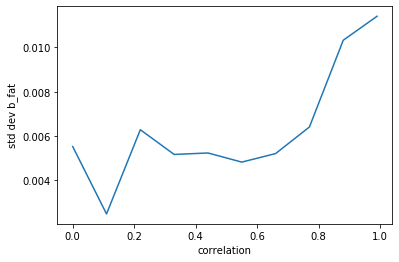

In [4]:
corr = np.linspace(0., 0.99, 10)
print(corr)
std_err_list = []

for coeff in corr:
    data['x'] = np.random.normal(loc=coeff*np.mean(data['perc.fat']), scale=np.sqrt((1-coeff**2))*np.std(data['perc.fat']), size=data['perc.fat'].shape)
    
    temp_list = []
    
    for i in range(500):
    
        expr = 'kcal.per.g ~ perc.fat + x'

        # Initializing the likelihood
        likelihood = 'gaussian'

        # Defining the prior with hyperparameters 
        prior_a_mean = 0.5
        prior_a_sigma = 10
        prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

        prior_b_fat_mean = 0
        prior_b_fat_sigma = 1
        prior_b_fat = ['gaussian', [prior_b_fat_mean, prior_b_fat_sigma]]

        prior_c_mean = 0
        prior_c_sigma = 1
        prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

        sigma_inf = 0
        sigma_sup = 10
        prior_sigma_unif = [sigma_inf, sigma_sup]
        prior_sigma = ['uniform', prior_sigma_unif]

        priors = [prior_a, prior_b_fat, prior_c, prior_sigma]

        solution_regression = laplace_solution_regression(expr, data, likelihood, priors)

        posterior_samples = post_sample_Laplace(solution_regression, 1000)
        temp_list.append(np.std(posterior_samples[:,1]))
        
    std_err_list.append(np.mean(temp_list))
    
plt.figure()
plt.plot(corr, std_err_list)
plt.xlabel('correlation')
plt.ylabel('std dev b_fat')
plt.show()

We plotted above the evolution of the standard deviation of the posterior. We observe that when the two variables are uncorrelated, the standard deviation of the plot is small. This means that the posterior is piled up a narrow range of values. As the correlation increases, the standard deviation inflates in a non-linear way and grows very rapidly when we approach 1. Yet, what we did here was just adding random numbers through the x variable that don't mean anything. However, this dummy variable brings some sort of redundancy when its correlation with perc.fat becomes too strong, thus pushing the model to be more uncertain about perc.fat as it has now more "possibilities" to explain the data.

# Exercise 2  (Statistical Rethinking, McElreath et al, Chapter 6)

**1) Using the *Milk* dataset  of the previous exercise, fit four different models for describing the kcal.per.g data :**

- One with both neocortex and log_mass
- One with neocortex
- One with log_mass
- One with no predictor (an intercept only)

**For each of this model, you will compute their WAIC with standard error (SE), dWAIC with standard error (dSE), pWAIC, and the weight criteria. What can you conclude by analyzing these numbers ? You will present the results in a table.**

We denote by neocortex the variable necortex.perc / 100.

dWAIC is the difference between each WAIC and the lowest WAIC among the models.
 
The standard error (SE) of a score S is given by:

$$
SE = \sqrt{Npoints * var(S)}
$$

The weight criteria is the *Akaike weight* which is given for model i by the formula:

$$w_i = \frac{\exp(-0.5dWAIC_i)}{\sum_j \exp(-0.5dWAIC_j)}$$

In [10]:
data['log_mass'] = np.log(data['mass'])
data['neocortex'] = data['neocortex.perc'] / 100

In [14]:
expr = 'kcal.per.g ~ neocortex + log_mass'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 0.5
prior_a_sigma = 10
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_neoc_mean = 0
prior_b_neoc_sigma = 1
prior_b_neoc = ['gaussian', [prior_b_neoc_mean, prior_b_neoc_sigma]]

prior_c_mass_mean = 0
prior_c_mass_sigma = 1
prior_c_mass = ['gaussian', [prior_c_mass_mean, prior_c_mass_sigma]]

sigma_inf = 0
sigma_sup = 10
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b_neoc, prior_c_mass, prior_sigma]

solution_regression1 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression1, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['neocortex'][t] + posterior_samples[l,2]*data['log_mass'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))

waic_vect_model1 = -2*(np.array(lppd) - np.array(p_waic))
waic_model1 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model1 = np.sum(p_waic)
se_model1 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model1))

print(waic_model1)
print(p_waic_model1)
print(se_model1)

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -2.807004536221063
 hess_inv: array([[ 1.85328586e-01, -2.86861101e-01,  6.37897305e-03,
         3.51630711e-03],
       [-2.86861101e-01,  4.47501826e-01, -1.05286669e-02,
        -5.48079204e-03],
       [ 6.37897305e-03, -1.05286669e-02,  4.98768613e-04,
         1.26782145e-04],
       [ 3.51630711e-03, -5.48079204e-03,  1.26782145e-04,
         5.03570594e-04]])
      jac: array([-1.90734863e-06, -1.07288361e-06, -6.55651093e-06,  1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 205
      nit: 21
     njev: 33
   status: 0
  success: True
        x: array([-0.41699596,  1.75055208, -0.07223301,  0.12152374])
-11.234604271097473
5.710957872720148
8.7965625054964


In [15]:
expr = 'kcal.per.g ~ neocortex'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_b_neoc, prior_sigma]

solution_regression2 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression2, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['neocortex'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))

waic_vect_model2 = -2*(np.array(lppd) - np.array(p_waic))
waic_model2 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model2 = np.sum(p_waic)
se_model2 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model2))

print(waic_model2)
print(p_waic_model2)
print(se_model2)

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: 0.07437175602676227
 hess_inv: array([[ 0.14889405, -0.21784886,  0.00053046],
       [-0.21784886,  0.32226045, -0.00074638],
       [ 0.00053046, -0.00074638,  0.00084547]])
      jac: array([-3.21865082e-06, -2.44379044e-06, -9.77516174e-06])
  message: 'Optimization terminated successfully.'
     nfev: 219
      nit: 15
     njev: 41
   status: 0
  success: True
        x: array([0.4525098 , 0.30356691, 0.16591534])
-6.058247453290886
3.0302885571215223
4.802081704366605


In [17]:
expr = 'kcal.per.g ~ log_mass'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_c_mass, prior_sigma]

solution_regression3 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression3, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0] + posterior_samples[l,1]*data['log_mass'][t]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))
    
waic_vect_model3 = -2*(np.array(lppd) - np.array(p_waic))
waic_model3 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model3 = np.sum(p_waic)
se_model3 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model3))

print(waic_model3)
print(p_waic_model3)
print(se_model3)

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -0.9252914722069443
 hess_inv: array([[ 2.22380537e-03, -5.74690042e-04, -3.42911504e-05],
       [-5.74690042e-04,  3.95935711e-04,  2.20978740e-06],
       [-3.42911504e-05,  2.20978740e-06,  6.99468580e-04]])
      jac: array([1.66893005e-06, 5.24520874e-06, 3.93390656e-06])
  message: 'Optimization terminated successfully.'
     nfev: 205
      nit: 26
     njev: 40
   status: 0
  success: True
        x: array([ 0.7051323 , -0.03167327,  0.15685835])
-7.5244254771606105
3.2303265578443154
5.924064203605161


In [18]:
data['intercept_regression'] = np.zeros(data['kcal.per.g'].shape)

expr = 'kcal.per.g ~ intercept_regression'

N = 5000

lppd = []
p_waic = []

# Initializing the likelihood
likelihood = 'gaussian'

priors = [prior_a, prior_sigma]

solution_regression4 = laplace_solution_regression(expr, data, likelihood, priors)
posterior_samples = post_sample_Laplace(solution_regression4, N)
    
for t, target in enumerate(data['kcal.per.g']):
    log_p = []
    for l in range(N):
        pred = posterior_samples[l,0]
        log_p.append(norm.logpdf(target, loc=pred, scale=posterior_samples[l,-1]))

    lppd.append(logsumexp(log_p) - np.log(len(log_p)))
    p_waic.append(np.var(log_p))
    
waic_vect_model4 = -2*(np.array(lppd) - np.array(p_waic))
waic_model4 = -2*(np.sum(lppd) - np.sum(p_waic))
p_waic_model4 = np.sum(p_waic)
se_model4 = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect_model4))

print(waic_model4)
print(p_waic_model4)
print(se_model4)

/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/user/cabinade/home/anaconda2/envs/python3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -0.7049164341426843
 hess_inv: array([[ 1.65852710e-03, -7.40041622e-06],
       [-7.40041622e-06,  8.41887151e-04]])
      jac: array([ 2.38418579e-07, -1.19209290e-06])
  message: 'Optimization terminated successfully.'
     nfev: 204
      nit: 11
     njev: 47
   status: 0
  success: True
        x: array([0.65764444, 0.16773681])
-6.579218645280165
2.6577196612719116
5.3540368004054


In [19]:
waic = np.array([waic_model1, waic_model2, waic_model3, waic_model4])
waic_vect = np.array([waic_vect_model1, waic_vect_model2, waic_vect_model3, waic_vect_model4])
p_waic = np.array([p_waic_model1, p_waic_model2, p_waic_model3, p_waic_model4])
se = np.array([se_model1, se_model2, se_model3, se_model4])

d_waic = np.zeros(waic.shape)
weights = np.zeros(waic.shape)
d_se = np.zeros(waic.shape)

for i in range(len(waic)):
    d_waic[i] = np.abs(waic[i] - min(waic))
 
min_index = np.argmin(d_waic)

for i in range(len(waic)):
    weights[i] = np.exp(-0.5*d_waic[i]) / (np.sum(np.exp(-0.5*d_waic)))
    
    if i != min_index:
        d_se[i] = np.sqrt(len(data['kcal.per.g'])*np.var(waic_vect[i] - waic_vect[min_index]))
    else:
        d_se[i] = np.nan


summary_stats = [waic, p_waic, d_waic, weights, se, d_se]
summary_stats = pd.DataFrame(summary_stats).transpose()
summary_stats.columns = ['WAIC', 'pWAIC', 'dWAIC', 'weight', 'SE', 'd_SE']
summary_stats.index = ['model1', 'model2', 'model3', 'model4']
#summary_stats.rename(index=list(names), inplace=True)
print(summary_stats)

             WAIC     pWAIC     dWAIC    weight        SE      d_SE
model1 -11.234604  5.710958  0.000000  0.752380  8.796563       NaN
model2  -6.058247  3.030289  5.176357  0.056546  4.802082  7.465047
model3  -7.524425  3.230327  3.710179  0.117701  5.924064  4.666839
model4  -6.579219  2.657720  4.655386  0.073372  5.354037  7.172275


The WAIC should be interpreted as measure of performance when the model is applied on unseen data. And the SE will help evaluating the uncertainty associated with the WAIC. Within this context, it seems that the first model is the one performing best for this particular dataset. The Akaike weight helps also to intepret how these different models perform with repsect to each other by giving a relative measure of reliability. The weight should be interpreted as *the probability that the model will make the best predictions on new data, conditional on the set of models considered*. Again we see that following the heuristic, the first model seems to be the best choice. However in this example, we have a very low sample size (17 data points) leading to substantial errors on the WAIC estimates that naturaly propagate on the Akaike weights. You should also note that if you look at the dWAIC, you might intepret it as saying that the distance between the model you're looking at and the top-model can be seen as a Gaussian with mean dWAIC and standard deviation d_SE. Let's consider model2 for instance.

In [54]:
samples = np.random.normal(loc=5.17, scale=7.46, size=100000)
print(np.sum(samples<0.)/len(samples))

0.2435


This tells us that there exists a probability that model2 performs better than model1. However, for such a small sample size this is still a good result and we can remain confident that in this context model1 is the best option. 

So what should we conclude about this short study ?

It is quite clear that in this context we benefit of using the two predictors (model1). With only 17 cases, the association between the predictors and the outcome are strong enough to give 75% of the model weight to model1. However adding more data or testing new models would change the results and relationships between models and the analysis would need to be re-run. 

**2) In order to better intepret the results of question 2, analyze the posterior estimates of the slope parameters for the different models. Present the results using box plots.**

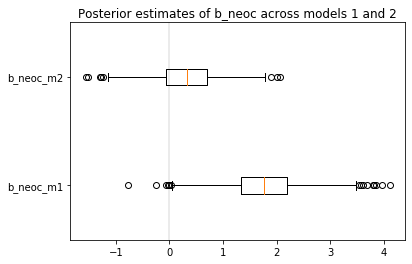

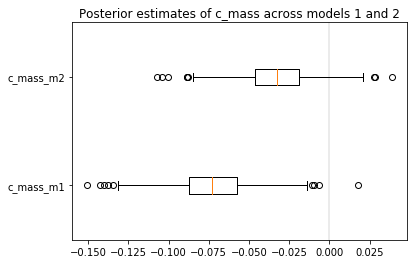

In [20]:
posterior_samples1 = post_sample_Laplace(solution_regression1, 1000)
posterior_samples2 = post_sample_Laplace(solution_regression2, 1000)
posterior_samples3 = post_sample_Laplace(solution_regression3, 1000)
posterior_samples4 = post_sample_Laplace(solution_regression4, 1000)

boxes = []
boxes.append(posterior_samples1[:,1])
boxes.append(posterior_samples1[:,2])
boxes.append(posterior_samples2[:,1])
boxes.append(posterior_samples3[:,1])


plt.figure()
plt.boxplot([boxes[0], boxes[2]],vert=0)
plt.yticks([1, 2], ['b_neoc_m1', 'b_neoc_m2'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Posterior estimates of b_neoc across models 1 and 2')
plt.show()

plt.figure()
plt.boxplot([boxes[1], boxes[3]],vert=0)
plt.yticks([1, 2], ['c_mass_m1', 'c_mass_m2'])
plt.axvline(x=0, color = 'black', alpha = 0.1)
plt.title('Posterior estimates of c_mass across models 1 and 2')
plt.show()

These two boxplots show us how the posterior estimates for b_neoc and c_mass are moved farther from zero when they are both present in the model. By looking at the posterior estimates we see that each parameter becomes more "important" when the other is added to the model. This importance in terms of magnitude is also coupled with the lowset WAIC value for model1, thus supporting the fact that this is the best suited model (among the ones we tested) to describe this dataset.

# Exercise 3

In this exercise we will show how to use the Laplace approximation by deriving the equations on an example.

Consider a random variable $\theta$ following a uniform distribution on [0, 1]. Let's consider a dummy experiment in which two outcomes are possible (success and failure). The experiment is made n times with k successes. The experiments are independent from each other. The probability of success is given by $\theta$. We will denote by y the random variable describing the number of successes. 

**1) Write the data likelihood and the posterior distribution $p(\theta|y)$ (up to constant).**

We can consider that given $\theta$, y follows a binomial distribution. Therefore the data likelihood is:

$$
   p(y|\theta) = \binom{n}{k}\theta^{k}(1-\theta)^{n-k}.
$$
   
This is also proportional to the posterior distribution $p(\theta|y)$ as $\theta$ is given a uniform prior on [0, 1].

**2) Estimate the posterior distribution $p(\theta|y)$ using the Laplace approximation. You will derive the computations yourself.**

For any probability density function (pdf) that is smooth and well-peaked around its point of maxima, Laplace proposed to approximate it by a normal pdf. To do so he used a 2-term Taylor expansion trick around the local maxima of the log-pdf. Let denote $g(\theta) = \log p(\theta|y)$ and $\theta_0$ its maximum.

Following the Taylor expansion we can write:
$$
g(\theta) = g(\theta_0) + g'(\theta_0)(\theta - \theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

We know g reaches a local maxima in $\theta_0$, therefore $g'(\theta_0)$ and :

$$
g(\theta) = g(\theta_0) + \frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2.
$$

If we exponentiate this epxression we obtain :

$$
\exp (g(\theta)) = p(\theta|y) = \exp(g(\theta_0)) exp(\frac{1}{2}g''(\theta_0)(\theta - \theta_0)^2).
$$

This can be identified to a Gaussian with mean $\theta_0$ and variance $-\frac{1}{g''(\theta_0)}$.

As a result we need to compute the derivative of $g(\theta)$ and find the point $\theta_0$ that cancels it.
We obtain :

$$
g'(\theta) = \frac{k}{\theta} - \frac{n-k}{1-\theta}.
$$

And $\theta_0 = \frac{k}{n}$.

Now for the second order derivative we have :

$$
g''(\theta) = -\frac{k}{\theta^{2}} - \frac{n-k}{(1-\theta)^{2}}.
$$

The second order derivative in $\theta_0$ is $g''(\theta_0) = -\frac{n^3}{k(n-k)}$ which gives us a variance $\frac{k(n-k)}{n^3}$.

**3) Plot the posterior pdf of $\theta$ obtained with the Laplace approximation and the true posterior.**


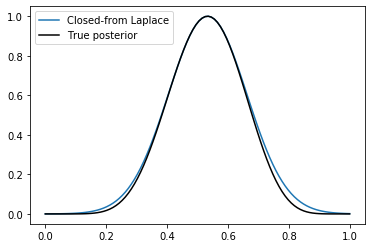

In [48]:
k = 8
n = 15

xs = np.linspace(0., 1., 100)

analytical_mean = float(k) / float(n)
analytical_sigma = np.sqrt((k*(n-k))/n**3)

plt.figure()
plt.plot(xs, norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)/np.max(norm.pdf(xs, loc=analytical_mean, scale=analytical_sigma)), label='Closed-from Laplace')
plt.plot(xs, binom.pmf(k=k, n=n, p=xs)/np.max(binom.pmf(k=k, n=n, p=xs)), label='True posterior', color='black')
plt.legend()
plt.show()